# Using geometry functions

This notebook uses the `arcgis.geometry` module to compute the length of a path that the user draws on the map.

The particular scenario is of a jogger who runs in the Central Park in New York (without gizmos like GPS watches to distract him), and wants a rough estimate of his daily runs based on the path he takes. The notebook starts out with a satellite map of Central Park in New York:

In [30]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode, reverse_geocode
from arcgis.geometry import lengths
from arcgis.gis import GIS
from arcgis.mapping import WebMap

In [31]:
gis = GIS()

In [32]:
map1 = gis.map()
map1.basemap = "satellite"

MapView(layout=Layout(height='400px', width='100%'))


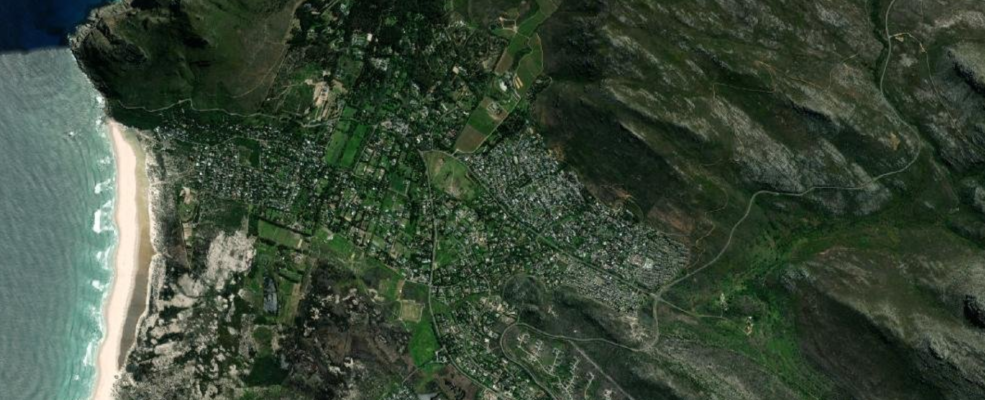

6920
6920, ZAF
6920
{'x': 20.77735612943593, 'y': -32.3040291603097, 'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}


In [33]:
map1

In [27]:
map1.height = '650px'

In [34]:
location = geocode("Noordhoek, Cape Town")[0]
print(location)
map1.extent = location['extent']

{'address': 'Noordhoek, Cape Town, Western Cape', 'location': {'x': 18.386030000000062, 'y': -34.10236999999995}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'M', 'Score': 100, 'Match_addr': 'Noordhoek, Cape Town, Western Cape', 'LongLabel': 'Noordhoek, Cape Town, Western Cape, ZAF', 'ShortLabel': 'Noordhoek', 'Addr_type': 'Locality', 'Type': 'District', 'PlaceName': 'Noordhoek', 'Place_addr': 'Cape Town, Western Cape', 'Phone': '', 'URL': '', 'Rank': 8.44, 'AddBldg': '', 'AddNum': '', 'AddNumFrom': '', 'AddNumTo': '', 'AddRange': '', 'Side': '', 'StPreDir': '', 'StPreType': '', 'StName': '', 'StType': '', 'StDir': '', 'BldgType': '', 'BldgName': '', 'LevelType': '', 'LevelName': '', 'UnitType': '', 'UnitName': '', 'SubAddr': '', 'StAddr': '', 'Block': '', 'Sector': '', 'Nbrhd': '', 'District': 'Noordhoek', 'City': 'Cape Town', 'MetroArea': '', 'Subregion': 'Cape Town', 'Region': 'Western Cape', 'RegionAbbr': '', 'Territory': '', 'Zone': '', 'Postal': '', 'PostalExt': '

In [29]:
map1.zoom = 14

In [8]:
location=[103.8767227,1.3330736]


In [9]:
# results = reverse_geocode([2.2945, 48.8583])
results = reverse_geocode(location)

In [10]:
results

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'RegionAbbr': '',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CountryCode': 'SGP'},
 'location': {'x': 103.87671885261159,
  'y': 1.333058719212687,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [11]:
location = geocode(results['address']['LongLabel'])[0]
print(location)
map1.extent = location['extent']

{'address': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore', 'location': {'x': 103.87671885261159, 'y': 1.333058719212687}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'M', 'Score': 100, 'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore', 'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP', 'ShortLabel': 'Sennett Estate, 40 Lichi Avenue', 'Addr_type': 'PointAddress', 'Type': '', 'PlaceName': '', 'Place_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore', 'Phone': '', 'URL': '', 'Rank': 20, 'AddBldg': 'Sennett Estate', 'AddNum': '40', 'AddNumFrom': '', 'AddNumTo': '', 'AddRange': '', 'Side': '', 'StPreDir': '', 'StPreType': '', 'StName': 'Lichi Avenue', 'StType': '', 'StDir': '', 'BldgType': '', 'BldgName': '', 'LevelType': '', 'LevelName': '', 'UnitType': '', 'UnitName': '', 'SubAddr': '', 'StAddr': 'Sennett Estate, 40 Lichi Avenue', 'Block': '', 'Sector': '', 'Nbrhd': '', 'District': '', 'City': 'Singapore', 'MetroArea': 


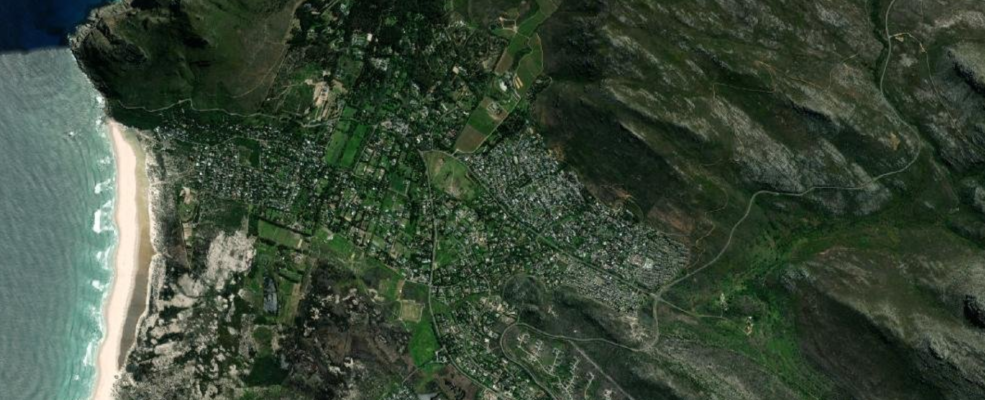

In [35]:
map1.take_screenshot(True, True, './image.png')



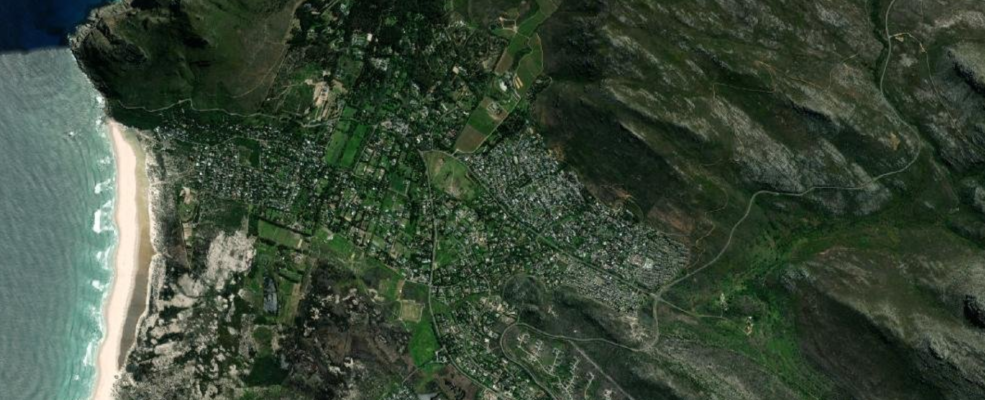

In [36]:
import base64

with open("image.png", "rb") as imageFile:
    str = base64.b64encode(imageFile.read())
    print('<img src="data:image/png;base64,' + str.decode().__str__() + '">')


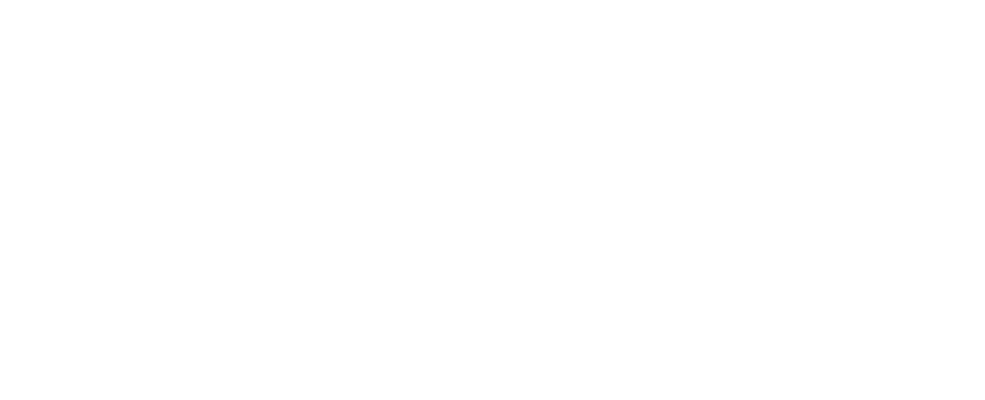
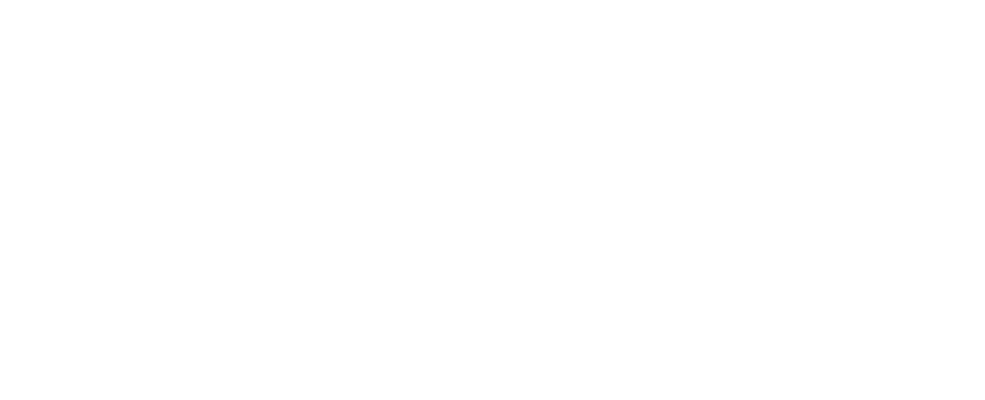
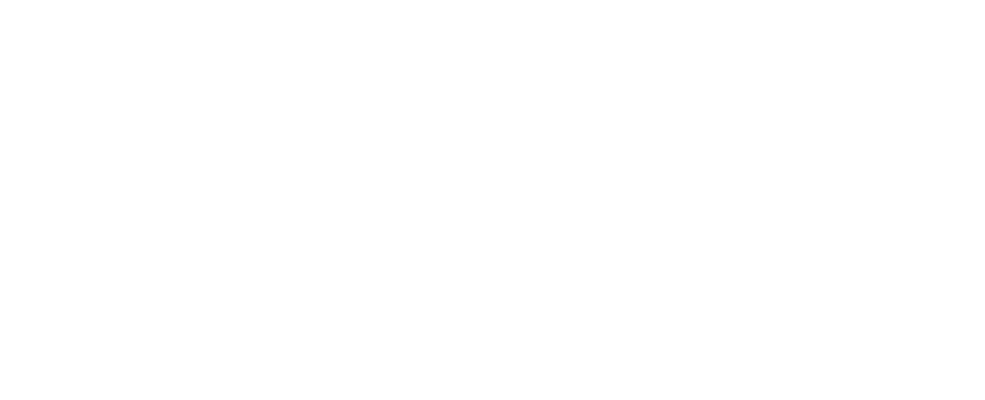

In [14]:
map1.embed(set_as_preview=True)

In [37]:
def find_addr(m, g):
    try:
        geocoded = reverse_geocode(g)
        m.draw(g)
        print(geocoded['address']['Match_addr'])
        print(geocoded['address']['LongLabel'])
        print(geocoded['address']['ShortLabel'])
        print(geocoded['location'])
    except:
        print("Couldn't match address. Try another place...")

map1.on_click(find_addr)

In [58]:
map1.webmap.save({'title':'ESRI Satelite Image', 
                  'snippet':'Map created using Python API locations of tree planting', 
                  'tags':'world health'})



TypeError: 'NoneType' object is not subscriptable

In [74]:
import os

file_dir = os.path.join(os.getcwd(), 'home')
if not os.path.isdir(file_dir):
    os.mkdir(file_dir)
    
file_path = os.path.join(file_dir, 'image.png')
map1.take_screenshot(file_path)


In [160]:
print(map1.take_screenshot(True, True, file_path))

None


In [89]:
print(test)

None


In [72]:
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA9kAAAGQCAYAAAC6fKNnAAAAAXNSR0IArs4c6QAAIABJREFUeF60vVmTZElypae+r7HnnlnVVd3VQHcPSEKGfMILfsHwT5PD4QxlwKFAGr3VnpVrZKy+75TvHFP3m4kCOHxAlERFpIf7Xeyaqeo5elSt1n3yu90uIna7nb7zq1ar7X/PX6p//9fee/jsLmK3jfx3niN/brfb/Tnr9XrwzXv5+2a9jt12G/VGj6vzd21TLoV/b/X74Vx1/hW1aES93oharRm7qMWW41Xet6vV/Jld3UfVbdZi/7reW/cfapuoB+fc5RUEb9ffa/Wo1XkPx+EcHi//9O+14N63/me9EVHnc74e35M+HrXdNpqNejT422oZ89kk1stlxHYTtc0mGu1WtPu9aLab0WjW9T1fzGI6vo9aqxbDs9M4OTuJs/PTePT4YRydHMV6tYxevRFPz87i+v27ePndNzG7v4vHF6fxq88/02vtZjPqUYvxeBbrLffSildvL+OHl6/j9nYU4/t7XTvDxZjpvitfPKfqM/TzyPf6g9vdNrablZ5JbzCI4XAQ9UYtlstlbLebaLfbGgt+X6/X+sk8aLZa0Wz5XrmG2WwRx0cn8fTp8xiPp3H57jJub25iMBzGeDKO3XYT280mHj55EE+fPYnNehmtVitOjo+jUa/rOjudNoOt83D+RqMe0+kklsuFn8huG5vNJjqdjj7bbDSj1x/EarWK8Xgc48kkNuX6uMb1ZhPz+TwWy4VmI5/ju7p2PNd59LVoNpvRaDQ1HTgO52o0GtFqtmK+WMbt7U3M54totXhfI+q1WjRq9WjU/TvvXy5XZZxyBkW0Wu1oNZv758MqqNUZu1o0WzyHbey2Oz0Lrof7bjZbGufDM+QO+KSPu93wmYg666nW0PjxnV+MCffO57vdrn4OBgP9+erqSudvtzuxXG1is91pTHwPa52h3WpHs9mIzXoV3W4nup2urovzM/a9bldjNr2/1Zxg7Dg+3/VaXeeezaYaj+V6Hdc3t/Hh6i7mi43um3W43mElvEYbzWa0Wox1Ixr1CJYux2dunJycxGfPP4t+vx/v3r2Lb/7yrcZ/Op3HcrGMo7Njz6WTozg9O9E93NzdxHa3ibOLs3j06GHc393HbDHXHLm/H0W304vNbhO72jYePLjQPOKaO+1OXF1dx2g0jma9Ga1GMxazRSxnCx2jEQ29tsL+7ZgnrA2eWWNvK1kzmn96z07zgp+8xhfPid+5txpms9g8fnKcRrMRNeYXNrfRKPNpqznJeTkuf2u3WtFttzUu3D/znPtbLBY6n47L2sLGc9yG5wnXo78xz1fr/XrgNZ4jx8rrZe4wX+azWew2XHcj2r2O5grPdrfjHLXYrrEh9WiXucacYIAWc9buLlqdVvT6Xc2p/JIfqDei1W5Fs1mPxXKu54UdeP36ZQyPhtFuNWO9XsXR8Dguzs5ivVrFhw8fdI/RjBgtRjo/18PxWs221sN66bW428i7eK3U6jEYHMWgP9CaXS0WMZ/NdUzbNvvCtA/5PLQ2iu+r/p3xbLdbuh2uZ75YyMblc+Z1xpPxTjucx2Hwt7uI1XoTK2wj4xWcp/ipYgt0LUySYoPzueocO3xxLbqdThwfHWmNLmfzGN3dx3w+k7VoN1vyS8wD1uF8uYgN86Fei+6gE8cnw/057RP93aw3otlo6BjYYsYXGyZ712hozjHvL99fabEy57Gdq9Vaz5xngH1er/0clry+mOt3Pr9Zb2VTmy38i+Obw7xwnMF3zlf+xj2njWNcOSc2jPnKHJnPp/IRzRZzbKvr9nP1GuW7FszvdvR6vTgaHsVR/0jPbjqdakw6nZbsB+fB3jEnFV+U55E2eb1eRqPViG6/F/ejO13/6elp9Hu92Gy38kkcg7m1XLFOvP51/budzv/g4UM9t9evX8nP4Zv44tnZ9zjmYt0wFlwn99nrdWMwGEZ/0I9uv6vPjEeTuL29j8ViWeZfXc/CazRjx51tTvH7mw3Xgvm1n1E8pzgPO5H+r6kJsfdP8hV+FgrT9vMWn0X8Y1+4xf4Q7ZX1znhw/awP5gl2rdvuxYMHj6PfH+g5yW5td8WHs5absVwtYzQaye8yHqxb/Drx0zbwl/aZR0dH8eDBg+h1ehrz7XqjeTEcHmmssAP39/fx+vUb+QzGQfal25X9wc7xXFjDzBviiZubGz1H5mvGvfkcmXscn2fGc8dH8d6qnefveazZbKa/42OYazxf1lezxBqsTdvlXTRbzWh32sUuNmW/l+ulxoe5JLvSwhfXY70svoTx7HZ1HXxzXYzp7e2t7HeuBe6DseLvi/k8lnPGnLnuz6ff4rPpvxwXNTRn+RzXf3d3p7nG8+I+sQfp5xgPHb/4obStHH84xN7UYzKZxG63jl63FZPJWK9dXJzH6emZfMRsNtc5bm6ufZ7dVmudY8h+bIhbefbGI5xPvlLzMfRzMp3GfDHXepT9KDEb/9a9bXc6Zq/r+2JtTucz/Y3n2+11FefK1u12cavrudEz8PxvxGpl+yafLmy00dxznNSMLjEt547QnOM7YwDHbFFiQ/uYR48exYsXLzT/vvvuO8fazabum2tijDOua7c60ah7juX85Ji8P/9NPMbnGCOtP8XZnej3e47rNJ413Rd/T1/FMfji2LzO8fLcvC57X69Hh3HqdjVGjBtr1dhhq+tkzuf1y5avN3q/bTRjxBguZauwOfICwi22M91uT8+BseVYfHH93W5fz2ZH7LHdxXqzjpX8jK9Xa3Fru4ffIW7ii2vm2nu9vmLVYf8oav8SyJZDLI7oUwC+91YV51UNHA5//9dBdhV04/wNjisgW+AEIw9QZXg+BtkfEwH/NiC7ttuUc+ddOWgHcOr8dQf0CbIP984yIKgq49g4APl09wp3wJAYoXqEXPd6EYvZTEa+tt1EgwCy3dwD7P5goMCFxX118yFanWY8e/4khsdDwiRN7qOjoRxJr9WMz589j+n9fXz/zdcxARisFvH04YM4Pz6JXrsT6yXOaRO395MYT+bx3Y+v4tWb9zGbe2EL6FeBc7nBKlFSnQ85ZxSkEeh5ye8XM0EjxkHPGyfP4toDbN5nIGDvDLmx06JysMfC7Qt8YGjev3krh9gd9KI36GoxPX78ME5Oj2IyGWkxseCOhsMCko5jpkBpp8VKMEHAAchOp89CTrAMMOv3DBzlvAB1xdEJnBaAMxqPY7le6Rx8ZxDsOeJAJsFF3lsGWgJDjYbuEeeSC12OY7NREMsx/TkMgQkC3ocjYCwINgW0Wy2DWQJYCBTi5DCo/Xit1ffXmSBN650AHGC3IQAigFvHerEWIOd46Qx5rxyyiAqDNZx8khO83iG4aHVEjowJMAvoWsxnAsfDwSBOT0/kWAkGQCm+J4KXZgxwuO2W5ms6uePj4+h0egqIPny4jKurGxFEk+k8FpuVQAXzZLlcC1zJQJa5S/AEoAI4Mq945gB8DOLJ8VEcDY507g9X1zEZTaPTbeuZAxhw6k+fPoleryNgfXd/p4BscDSMBw8faC3+9NMrzT8crR1uMyZzAuuI45Mj32ezFY16Mz5cXcX11Y1QULPRkmlr1pqxJMhdrPX6fLaIlsA0YH96AM4lWGFt8gwY/wxWkjARiGEu4siS4Cgkppw3E6OALeZw9fMEDwYAkBH1aNbrCpoYm9H9vUA/gJbjKLAiqGWuQQIw2wrwV5CIM9YzORABuQ5MBBl0pwNOcoB5zNxfL9fRaHcUFAnclDlogGEgz/mwM4Bor5MkO02Ncn8EldgwSI+HDy8EHK6vP4g00T02GnF6cqoA7e72Nt6/e2dHulvHJjb7dWGSwM9wtwZkrWO7JqDyeoE4Ojs5U9CNfSKQ0zxjHRUnbJBxAHkHW2HQV/WjPl9D96UAbTrVOstAO9d0gvVcn3ugttsJfK4IGMtztV9Pe3AgRLDFIhl5fvgc7Bi2q9aMZ0+exMOLByJlCZrvbm7i8vKDbOdwMJQdx84v1qtYLJey57t6RLPdiF7/EMzr3go4agEACqheAbI11wDHHisDjG6sFmsRO/xd47rdaVwBUoB+xn4yncVssdDYeE00RXoYcDuYq4LsKqnB6wle0s5WxxVSRURwjbHCruCfCAgNaBzkYXcBnYAzk5WQAPgOiBu+eB92DUBrkhe7to3ligDT5HReo33RWiBocDyM8RhSY74HXSKAC1mV65DjJ3nMXBHIPzrS+xgXPm+ixc/e/sdryODVQJh/2/9x361odzsCsxCO4zHAxcABuyRQN1sK0HBu+yhMDn6cNYkNau+JDMCHySoThFynSXb7HF5Lgi6fBZEVMcHPEVH2UybqkyTgmtIHsk6JF46PTz5O4BRSijHCFt7f3ZkEKeuPYzKPeT4iAHZb+VfIs0G/r/PVdyZoTL6eBIAEf3l5eSVwSUDe6XVFAuCzsUHpHxknnglkHsA8x102V8Sa7yfHM0E+/u/s7Ezg7/Xr1/I7One7LVvMsXgWCWRI2mjNLpcigCFQlDsrtpDjAwS4tl1JPkAC8D7FXoR/69j7+JwbXAffzBuAKveRwMfrdGAQjj9frvaEUNrvjBeTuM+ffI7jcv2AQBE4OHXAS8PzLckmgCuAJ4nLXMdJ0DHPSUQRv3tdmajOeZVgGpIg17HIfflpE5esaeYQY8oXQK876OveIBPxWzzHbUDc2JbmvdgPRnTaBq85z/NcDWIRAGS/F+fn57qGd+/fy58yhtzrdAYBh5/1WmHtyHZDuvNs2y3HSIrT7bN53nsMtYGI9trh3p5gxx8+1HN59fq17ot74XPpO3Id5hrarvHpB2I3Y7EExdwDn2WE047rOiAmSa416oqviLf1vpKY+3Q8uGfOnbFOEvbEH8wJYjDekwQAx8qYOecT5+CeeIYJ/kVkLhaFAPAzLW5IdiWJx+RgPRaO252EdTwhQnO91nOpxkvpKzKO38dgZaFpbXee/K6A+0Mgbkf8sdNPpnwPNcvJP3VeH4NtJoQNeTq6arCfn61e6MfvJRZ0pvPjTDaO7MBM+5r+bUB27Mz+OaVbOQ9kQAngM92ryZ0OvTy1dBDOeucxfD/K9bBoNuuo45hqZPBXsYah26yjUdtGnfMD1gsoHQz7cX5xKqYGR93umpUkOwwwIIg8PjkWu4IT7bY7MRmNor7dxvu3b+J0OIzldBqnx0fRqDUUFPZ6w/jzn7+Lb779Pl6/+RCT2SJWazuYrYJYUwhVcoDbc37/4y8tzpLhkoOqmXHjC+KAIArwAMsL06XMJucpzHYGocpsFyeKAcOJ4bTzOQOccSoYedg9MpSdXjuePH0SnQ6BBYaRbOxWwTOL+vTstGQjzDpDSHD+dD65iBIs8/Po6EQ3PpvPtIAB0+nwFaxsCZSWcsoA8FyAXnTcd2bvHLSYBbTjZgxTMOJMvoMrB0srs/IFoIv5q9XF1LHQvdjJ3htIkA0nKHUW3NlCLny1ngtPVVUIJjLKM1n7WM622wA5m1NTNmg2menYcgjdrhndug0XBjFJCcaiSjBwvQSdi6WdhbLUOPf1JgDaEEEECGRmODlzYzZ31o/P9ntdZbOP+x2BOBhHzr3Z7OLDh6t4+fJVfLi6icVyHdPpKhrtpgJCQMFkPJFqhLnH2Dh4Adw4W8Z1ZCAx6PcUtMDac/zr62tnRmExaw6Onz55HF/+8su4u7uN9+/fSyny2ecvNP73k1G8f/8uRvdjAepm0ww1zmXJum4703s0GIpFZ458AKBMF3q2m5WzUe1GW4zUbDKN1WKl75PTEwV3BAIJPNIh8oxwMukA8qfYfthmACegZWlWnEAqgzipaXgWG89dji1H3G4ZMJc550y4WfzxaBR3t3cKSvtDB2bKfKH8ILtcxioDTzlt1kDNAXVmIdK3ZKaQ83J/SS5lQMA9bFabaHUd9CgDU65NgU1RwWgt6tnKw+wzT9iUtdbmQoEuQaQIldOjaHdbcX9/KxCSigkUL2cnp7ILHy4vlVmfzKbR6tlGMZc5Z6vRki3Cdq8Fqux4WSsEVGenZ866rDY6Bn/PwCvHtZoJyMCx6lfT92Ij+J3jsV4JqqfMD61X2w++WPMC/zC1FVUaq3i92cVaWdaN5qG4y+KKBCYWVqMA5pVxRF0W2NuWlBYQB5+/+CweP3wkG7uYzuP2+kaKD7KjvZKFWW0B85tYAd7IWtY4yiZqjV30lNVAZdAsINuZbBF0ENSsUcgH7FuxbZoHzVbstrWSlYIw7Sm7w3VDYrFGV8t13I/GsSifU9ZFx2rK1shPlUxrxhsZYyQZkcCMa+SYGWg6M01gjo/FvloRsdmuRTDwnYC20WjHasl4rpTJ5CcnH3R70e50NPeOj62E4fzYH5Qht7fXepZJLjuYMxjqdDvRH/b1O3MexRa2CoBBlpl5wTf3lQEn72O97YPmkj3mmM5IYaOsirGvKuQBWR1lsAd7ZZLsZZtgeaNxZiwdVJPdAmBDMnDPhwyV1zpKGKsPIFozQE0SLYnBKkA28DdoTuCPrWZd77PjBcjgm0zuOq60r7OtzoyVSOL1ViCfbDPvId6Q6gQycLXWvfI6az6D+8NxVspkQz7oeUFoi0gjJjiK48GRxh7ixz6N7BbEmhUeinOKrxxPk5ww2GKeMRaAAoNJZ8fShvN3zpnzkb87O9aLi4sL2WeALefK7C3jhx3leHx5bTlxoxiFuFJ23okL5t6qkMyy+yXzZyXTSjaA/BLxRSYLkqiTHT05UVzFMROoKjquxCvKvK5NnlRJxr0fKuRK3j9+huMeQK4DyPy81j3Ki16vKFuclMtv7p1nyZgQA8MSoKLEbjEGGZuSlcSvEnsQcyTwtc2xKifPZTXeqmj8FFH63MX/KXurBMFa45m2JpMgzH/ul4wsvpXXtV6KQoJ7vnj4QK9BvpvQw7esY4ZKq+asu/2j03mMK/ZTipN+z+u4qCKlTi2KFq0p5uZiKRXGb3/7W/3t5cuXmj/M4wTkxiK2lY7/ZL5EGuI2sIE5ziKnajWNW64/nllmuRk7rpVkCp87Pz8TIQFY5nNVXy9yotgrjmXf7qRcMd56FpyT+caa43e+OH8qKPg38TnxG593Zt7xdsbKqSaFIEzixeQoZI1jPmyESDR8IfOTm6/M06piw/7T65bzpI/LGE1x8nxpkP2pE8pAqAom9iC7IIN0VMkkVT+Tvyvo+VdAdr5PQQgPpiyYZPd1qjBY+BhkH+TiGZz8W4FsBzpmeCWnLZJpFlv1nnMCVoMcMaGSS5XIhqDV03e/YMgUw4qTtcYo8hmALY+41SCtOI81YJoguUW2aCs2nCzM0REOsSM5Wb1ZjxfPn8XzF88EwDF8o/FIzgH5abvZiPdv38YQ+UbU4vbqOsb34/jrv/pNPH70LP7v//aP8cc/fh13o5mWMjLDerNhkF2+zLhWAZtlF9WvnDNMaD2lmtle5VSXq9jA3GN0umbLAQOWWCNtPDCTzAkMPscn8MPY9wdDyW6nk5kcJIzezc2VAunNcqEM1aMnjyR1YkwJiJh/THquC2BHIIqRZTGbMfazYEFmdjCBPovx6Oh4z7xjkBXglmyA5i0BHLKXEsQkQ88CxPBu1oA8B4TK4rf9e14TZtsZBTsoji9WWHMHI2mCheBSc1ASYuZMGlAHdZYiIm20gTAgEUuioEoSuiIlSmfIT2UjyNgWI533rme2i5hP5voc34wX50jDhUNjHDGeKRniWHaizbi9vRNZIxlekRIjb+I2DBwsSQbIYWht7JyxxGDhQJ4/fmhCoAawX8bNzW28efsu3rx9H6PxXADv6Pgk2p1eLNdI/fua81zHDQZ3s1KQa+PurDjrQ6BbWRWkvtuoRz2a7dY+cCGYUcZqt5HcG2NK9oBx+evf/FpE0cufXsbrN29l3AlUACzdXj+++vVXClgvbz7E+6v3Ou6TJ0+VLZ1Q6nB5GZslEQyy+U5cf7hSBhtQvJx7vHn94YOHCt7ScWiMy5xLR1oNXDPYBrRLugYQXKxkG5Jx1ucY7+LkFUAXeZrAAGuyOGrGR3qz4vwkEebaSvCojDJqkV7Pa2o61XkBXgJr252CiyQD0sGyRrieLC8g2Eygz/Ulu8z6Yd4LAJb1wbUQEGMnU34oZUyDzJJJqrRBm9jGotgUWPbesBv9QU/ABfvAXOS5bTdrBXePHj6M+5u7+HD1QZlo5IB1QBcyerIJG8p6LFPOAEYklwJwO2lIOYI3XuPZKQAqNnJPXhR7JBtXZL/pXw/281DKkUF3kmtJWHANHDPtSR7PQY4i3thK7phA0+Q0z4jyJGVSiyrGJIsDqZxT+I1+x8QB2YhmrRHz6UyKhpSkEjgiNZ1DNCiDXcqECOTXc9nmo2PKhIaaC3Z/OwWJml+F3BOQ4m8iBEppCn/bAf4BOZZNMh9EgEE9iyRaxd3dSJl0rh2y09cPoC8y5HLMjHOqIDuDzMxyVeeoMnkyw1sR2PhbbDh+arE4qI5QWHE+Mk4Qb4C7pYiyZeD6W8wzSYsHKulKfwdYR66K3ZMtLHJN5jC+UaBQksau7M/N7Y3mEqQFtiIJmJSiZsY654eeRykRIKuUwa1LKg6gtgrqLdlFmm/57vDoaJ/BcbxjSTr3iqIIoimDdexgzouMjTL4TpCVWfjMuvO+fC2BNq+lkoYoAtUDXwnG8Lf4jZQXy54VBU0SJ4zFbL6UHU07gb0xODfxx+tS6EgubrJJU5DAH/ulkM9kxD47DMjr9uKY8pKLi3j86IkyeOPRWGCIMiBCCt7fAQxSYoHCqfjetHM8u8z+8hrjlkRJBvncX45NZquTnMy1z3HxpbzOPVhmvdD5tKaQjaOEkcoIoL2SrZ4vDVD2BGzLJJtjGlaTYy4pM3Z+HtVrzqwz7+e8jHdeG68JWLbaAn9ca8Y1CV6rWXrGPIkh7nkfb7Rc3sDfUrXFXBcp12jss+mA68yM4lu5LxMoDcV/Lj0yUaEsdInjUMJA0OazZa1B9On5c92snizbK2AtFXvMea6T46aEWMmOogCCEEUVAHmfxBF+E0cmO762UpRnA5mO3YBEwx/NpjMDbVQ7U8qE0qaRwHKuD/J6MOjLLjP/mP9ZcrMH2ZRGbOxjfvGLX8QXX3yh2AOClDElO8xX3n8V09lvic7ak165pnlG+dz5TMYWHIf7zzm+XM5FBBwdD+PN6zdaLzy3zCwbT9jfJPGcJQD6N1aqJBM0n4sSAV/N801bzfrNOcb85375fNUv8l6efapEqr40/WX1M9hX1xTar+TxUxKf6zkJRsaGzye5KSJGZQebqHWf/ruPQHYaGmdgS31NqZ3Ov32Eqj6qi/YF5cMoXq741Y8lq3mMHGQGs3xwz5j4gwVk/4xc/OPrwElr+knKFKrJhggzI5HX9S/VZJdUyAFMizOSEMTOPyXTgr/7suv9JXBuj5mzZwqGcXJy+GZPJZUT++pgx5MIyeFKWWxVd1vzChcazfo2artlQCkS/LbbyFjMaF08OItnZG3b7ZgtLG+9OD9XIIBMBjBCjcd8uVKwzhWM7u5ifHcf5yenUdvV4puvv41nT57Fw0dP489/+ia++/5lLJYY5bYWPTcj8kOSLdcg52QX27X/ez46P3uREUXitat7LPwsGU/ft+ukN9GDkR8O5DQJOjLo1NuVLa+pZpUMX394JOnX3T1ScBucxWwazW47VmtqmTG8Q9e5Bxk4gK0zlxyXYJwgO515qgwIcLpdS7TS8WXQC5PJd4JEOyuDdAI8GQOYT8iRwpZy7co8jCcxnzmTmGuCQBbnjvFJGSzX50yvz49Cwdm5hmRnPAsbJINdZyE2AuAASowyi9mL3FJeB/T16CjL5SxmdW2mkyNwTXCbAT7vl7Or1WNyP/novtJQMZ7Kmmw2qnvnmnzP41LT0pWkFHYf0KX63M1a902NJ2NA9hrmWEFxTh2keQAwZQkG8ezRQ82z+dwA+/37y3j/4TruRuPY7hrx+MnTePb8s+h0ewL0PKtavSlG+y9/+lNMRncCDwYgSwEq7hMQzOwy60m2cqNMIYaZmqVf//rXCq6ZVy9f/hjvLy917UiuuK43b9/G1fWV6q+RlAHckB0+efEs/u7v/i7Ozs/i/fVl/P7PfxBQPzs993iOJ8pkA2CQ3gK2rz9cR2NXj2anLeaZtUAWb9CDUJoK1PClzB0KBur4ikHPYCsVBslECzjX6jGl9rtksVOhAXm1WDkLji1Lp+g+CCZjNF/4e8ksKdAkYClBKuPm1wAgHRFKZG4hFHjeOH2AqmtrnUXg2rKeCSfE3wSMSibskD2wxDRrsrkeyLDDnDV7zP3wPmcaAXDOAgp4tlsa9zU1bAQr42k0+w0BvsdPHssmQKLwfmwcRNH52XncIxd//16BMnMbkErQqTWouusiH5O8FWK0lA3xt7olwihkGHuBgjl1oof+IdV1mKBvDypLJsj3mzI1ByL5XJ1NMhhIf5xZPV4/BEwlA5fv3ZPCtr3YFytLyMA4owmATADCsVFBkYkFEBMwc0WL2XwfxIv0wdbNZzFCMhzbaPJakaMuKH1azmMwcE2dpKkKWp2lQAoIaLQMskjJCzAGCOAme+2e5hNlDAAZwB3zFCMPuTiZzBzMqgSilDBI3kgJilzOJ+PnGtuqrUvyI++d56bAS2DJKqtuz6QQY71cYvuZg+4hAMDmPLbTlkOTgee5Y/kTaKKoGAysyMHmYPPHE9cYMr8TZJtA6ghM8zfel/aW556ZPn6X7FXxjudDkqYZ4AkuKX4r9YjF5nmemDgizuHLJXusHaTNXWXez88vTLpxDcuVCEXXsOJTIZG38fTZMwFt7B8qo1RnSB5OyU4h8nhG2H6en+cda2/rTL+IE9si/sbz0ZxQVtw+LxUGHJ/7S1nywZ/jx62YALQyN8gkpv/Fp2WWKQN7xlcKtaIKYhzS96uGD6JOWd+14xZJctvRaXVEpp2cnAp0SzW02cr/YcP5Zi3gj1kPXBPXWc2+ZSY/M2LyQQXs896UvKb8lWNnciDFUgjbAAAgAElEQVRVYwlyWF98kVwBaHDPPchQiDhsOcqqZVGfbehjQpxxKPci5W2bg8qJ9VEA2tyxR4KGBEiew87IJ6hLkKESovKsiWfTV3DtSeY7CeHnaNLJ6oRUJej6e30RmjkuGUMliUB2FqBIVpb3A774G0CSZyY/qmdo7MGxGUvum2vhfGkLPgX9mgfEWcTwBdRnsM8x+CauhWhypnQVm91Oc4LnRkx2fXuj8irKwJg/PIc8p0gcJXc6UnWyFrIenmeIf8d0X1/fBu6D8VHpkHrKWCHGWsKeSJZP/FdKn9JXmDBwySQAm3OTxeZLiopSZ17NzvK3JMCk7mu7J0Nmf3mWBxLc8e/+uZeEHONh0sN9kPArAHueV/qyJDp4bgly03fl3MYOyE8UCTzrlOdGjwX64GjclislIXgO2OkkEvfKqSTsytzKdZhzKtd9xsw5V9M/sG4SJ+TfGFMRlUVxgH0WHpJtLjEUz6vMt1rv2d/sU5FVZ58nyQf2KcA+HNS1oj/3pUBGheMGIMmw5ntzwH/2w4Yl+0y213/WZB8aUvizhRCQS3PDAGQWlkX+DMjW9VYanyk9e6iT83kNjJG8JSDOTHsu9gySFOhKwuQHIhC0wVnAormmiAwukw6ZicE3cnCyaHjxdbRK1jWT3mSQm/VNDAbN6PfN3iERg7kiAjw+GsazZ09kSBo0qahFjMcjAQmapihQ2G7jfjyNfrevCc4x//KnP2tiXpxeyCB3WkiAB6ol+v77lzGdLaLd7srtwsRLMqUmWk3JfAFAZBaXi7kke5nVzRpLxi6DagVyZI5VJ4X0iKx4TcAPlndEbSvNG/qATktQUi6tha2GWzUBDQKqeoMMMONH9siZwFqjFvWma+RYzMjp63XXnLXa1HMM94aVTCNZzFxoPC/LYCyHSSCdRseijYMEk89BCGAEMBIYdNXNwoZ+UtvqoAh5p6V0SOvIsqiWd2jpi89JBsNSz3S2BFli8qkNWtvxHtg5A0JLtalH62hsALMJuJKtB8D2umbU9sYd0MSqKg2VJG/7pP4rHbdq8UaWhHPvjAvXjQGrZr8JsJJNTCfK+wGijYYdG4A6AxzJHHtdZW0VuPNcRAQgF10qM3p+dqZzDXp9BXNkCK6vb+Lm7j4mqnXdRKvTjSfPXmitoxgYHh1rHbfaHQVqf/7jP8XtFQ642CDGNbUkoKjSx0/rs9RAHh0fxVe/+ipefPZCWaZXP/0U7y/fqvb6+AgyoaaabO5NWTM1QgIQ95W9+uzLz+Pv//7vYwBxNOjEu+vL+OnNq5iOp2rUd397H+9ev5WqAjnuHPntzZ0JQqIx1rkaZ9F0ZiWgAVOdwUAGmgqGi0yS56VMoRqOoBBo6HkA1N+9eqM1YpKJbJr7OaDKcNMyZ2LF4gO+aCyUrDHzpzTzI8BTZhfyrDhGBaMF7K53hxpx5ocC/uVSZEISAJk1rc7TdNjMMYgRSeFKQx9ngN1gMuW0CVLTzkquVQsFG1w3agXJvphfNKtaLURASi3SqMWjRw/i/MG5pP8+BvbNkmzIIuqn37x5E+P7keYR9oZ1JkChHgil2WNp6kTJTfoxgeyuJbxSeyxXewIs77kKoHmWmeVIULEngwuplmUdPkeRJZYGLXne9ENVP+rXxC67trBhAtjEpf2ngxqraNxcz+SKlFW1evQFsJvRouFblpeUJjz4HT27Wk3NfN5/uIwlYLTfD0vHqV8mSLXN41pPKQ/p90UMM7cFFldWSskjc62VGn4mV7thdQV2lmdAAy7PXROQkFzIcvXvvSzV96z7F/nh8+d4ZyxzICNt++W3K6UNygItUce05Vf4STBNKRIgm88bGCN5JMYBnJjk13NDhbWxLfdzDvdXabqxG0CatQgABgAleE6wSy8H7BLrJq8Zu5v12QAMbG9KnaXu2u0EMjL7LQl/mS+si1SMmcx2PJX12Q4SD/WZXA/HJAOl+GG7lezTNdgm2RhXgPhnn30uiev3P/zoshLFVIXIQlZZpKWpyuDvUiQUAJMEh0pQEmSL5PM5GAPez5zLMiXfjzNU/EwAwL95P4G3FA2lJKFKrCThyGsmDg5y7SQPcf1SyAC0AUrU+Nebal4JoOEZo3Tr9/oC3XmdKlMgAaxrcjkXBEteL8+Pe+CLeZCxRAI9bC3PB1sNcOS4kIB8BkCRhFXaU46TWW/uJTO7p8fHUlIwxyA/GevpdCyy1OoQJzXIxK42ljpj250gsQqExmf5rPjJOHC9eyK2+J6U8Dp2sv0AIAPyM/5nXBNUcy8CkxWQnc834xHFepAwRQGT2fAEidSn08iL68F3MF68xvynhEvrufQ+yGMkUca5k9TdzyGUX5RplhplNc/rdfeNBjO2SRDItRFnpB3l/iCn1KRuuYzLqyuVy4lQAA8UhZFIn9K8D4KJWEF135ovm6DHDzZECZT5UqpSZZZVFuhmYCq3USKlqLwKcGZeVtc7MTRrlzWMX6NJHTXguQ65Fs7NZ9L3pDzfc91Z64yNMw7N8Ux/XCWRmCMui0BV6bmUisf8mc8ycSSfYe5kDKNYGFVkSVBVbXPGp6n4UMKrEKNJ+vC3fE4ZEyUZl7Y0CX/mUypGEkinL1XpRFGMcd5UqibpZDKIsoOZYnx+Z84wN9QPpt2yXDydUC6GqhP6FGQnK5iDk//+10B29eaqAcF/L8i2RBnEk7UCZmb5OoD/0oxM8gZXo2DkPgXZmbFWZ5Z9XTX1m9UadOWldXyBbGXRP+YSPqIVeAhFemoWmwwji4ogGee6jY2kOZaOIWFdrxdBjx5B/d1Gv9NlXMCoQz0B2USMOIwhGQN3F33y5FGqGLQ47aANUkbj+xiN7kt2p6XAA2DCQnj86HGcHp/ETy9fxZ/++MegoQHyVWqWqCOdzpbx9u37ePf+MmbT+b77cDYnklPGSKopketICcg1RkUSpI7WypgemgsQhstolk7SMpo0gBn2VdMHQPUEJ4uSLLK7OjI0BDkAERxXjc7c1FNIQu5HooCk6YwUmWyCIYI7ZSzrW2UgGDfmCWBO9eWl+QpBUwKsrNfIYCznPbV1uchUs1bATM5jDDEGlGxKGreqQZrPV8peEgySmWt3eKauRzdzayYwryMDDGTfGFDWmZh0GUFntxO0E3SqyY8cmWU/CcZwcGSNMMrOxmfdWmkuU7phHgJsA/FkmBX8MNaACZi7IgPKOrG9XLRkyHHsCcD5LAYHWTdz1A2KzG4y5gQlSHUxopYDEWAarKDqUGB3fm5JUNTjRh1Mb2I0nsRssZQsHLl8u9uLiwePRDDA+EIO0Yzs4uKh5uRf/vj7mI9HktADKiTrZn0NBnF/dysCKLvTUnN58eAiANnuntqOV69exdXlh/jsi+dy5mTmaVgG2LwfjUzuNes6Fw12IMHo7v8f/sP/Gtc3V7Gp76Iz7MbN3W18/+338d2338Z8NI3J3TiOTo4VlEIgUfeujJgIKtdG4kQhudR1t2STM2OQmaIkT3AiBNtV9hYHQjB4XZrScO98HiemMoxSWwZ7TkCgzA7rEKdQnAlj9eTRI61Pd9cf77sw7AMGAhIy7KyBEkgncIb8occEz5tnn0RrOnHWb0o5+R1iILOKVpQYZPs+D03BHODZPjMWbkhlW8B8VpacLvSthjKp3kGCQLeu2vrtjmZaKBDI6Fr/RG02doLMC2UBl+/eR71J51fqDivBlOr8qBcns+W64fRDUh/0B8psKSAtmWyeYdqc9JfpEzMoyGOkD06iEpJKwQQyw9J4JT+TGb4c16r/ln+udHPPYEzrW1JFbMXBn2Kb5J94/pLjdhTMreYrzUXuTV2d1b8gO7ACsusxmU3i3YdLNT5jFwx1vyZYbaIC8PPhCxIDsOAyBPeRULaiArKzRlsEzgby2rI9Z86oP3QtK2omK3hQvnSUxc4ACJvo8hjvjCBpYMmaVuOUavCUsYjOW2TDSKFp3OjaZOSHADaA+FJERWZw8E1cF/PVTSfZmaKtbFNmPxUkq9eDbb2aFnUhzx1ALxZZvnQg61HO0GwzJfVcu8la9xlgXWVdMWtUSoHSSBB/pP4SpVlQllFwny69MAj2+jEQyJKM7DrOeTkuzZKeP3+ueUh8gUILokNd3hVkDuLzzz/X83nz+q12T/BYWLWXCjU950J2kKVE8QEQzoabqhsv5RO5owaxEuufQJqv7DKdslJeY26wlrEW/EwwK3JsTbkYpU/0JymZc3rC4Me7blamAFmKk0zilLI9rGTdwNNkh0lPgceS2IEQhXyl54aAEUTPyvXrNB3EVxBsM3bVWlaun2eV8uXMznI/CbKx6dgkbGHGMDzTDOzThvB3gxo31cssLWowZqwyiz3XqBJzYccpPcx6fsoQ7kZ3rj0W4V52daEeeun1kHaL40slVWnm6vrXQ4fp9A3q4qyxOGTCkxzmfgG6ee2cl/GQMqOAXNkH1ncpr+Pc+BiD2Y5syePHj92wssjkWQMcU/+ez2KKz1diy0o2rpN4iDHiPkycWebMfee9cl78+We/+Fx2F5VGNkATOVTUWRCR2ZDSa8tEBPfCee7GY8WG7gGD+tINgUVmILUuioDb+7s96JeySA1/UWLx00Sbeh2IuGpEU00prYBUR+vS6FS5yKKCwgaeHJ/sM8hksbmHBNm5hg4Jk5LoKOSvdtNoZE15R5iGe01yMcmXnBuZJGKss8GxY1vXS/NsGHPOzxfPgNfTJvD5nMciyVAbVBqFpp9z3J+4wb1hMibax7+fSLfTv1q7Z8KaecQXz5ohywa/vEc19iQsVbJWdkgo0nWOwNrC3uk5d9qyy1JCliawwkSlsWut/fi3u2QjqoA6L7b6WgYKecH5nqrjqv6emewEJFUHlu87gOSfOwqT0o3P/qVMtsH+p5lsJjL1yweQnQbeINsgWsNNsFYy2fmewxZels44X5MJ/5Rzu3GZ5YOVbSdKXTULgm2kdhu2ESEQt/SB021h9+vI8WCkLBkng8cDOsGwapuE42i1yRqt4+TUdcEAMxo6mMUyc/uGLNl0og7GWbtCcMQipUMxdbGAGYz0Zy8+U+b697//fXz37fdi/QAHwwH13UhtlvHtDz/Ejz+8dHdMSdbcKRKD6CBuJ8MllhqQTafvUlOfsnxJ97JNPgFSMfCqq2OLqmYzjs/YkoIMLORDNjJJaYbDLoKc6YRtIAjWCQKsUNCcKV0TteDU7dWZa7pWSylIMBzUptbi/OJc4wfIpjaNzysrjayzTpYP6Ww2yPLxPe+Rd5lZ1/vpmlkaI4gYKHJVnBMLLOX0mZHwdlvORJOJnUzoYEqg4My9DZFBjYM3d6fcGxCakWRNGH8r15WZtQPYon7FmfA0HLCQBCowm67VNhjIQNwBlYFt3h8GzpkaB680Peq2nAlPqXJmydPZcUyuA+ObtdmWY3nuUTfEfTKezN9hkY3iHCSTVNMzl0skSUAwfn52Kgc0mSzitRjYa4NrNXJhyXp7JtecIidfKGig2zESPo5/c3UZTRSHK5ojuUOvunnzzEtNVJZ2nD84ixefv9BzpPO0pVwtOSi+Cez/8pevVVONgkMOs9HwNkEpr2804hdf/CJ+97vfePuHxi5Gc2cl/vCHP6hrdZ/a8dlSMuObD9dlqxC2W3ENPOMuULnfjsdZvrS9ybTmHOXcBGNVJjbnN3aAjGwGAZm5E2HTqKueXZLoAiw4L83jkkjxFnLOOHEM1UIXWWpmASwxb0lWl01LUt6VkvEMktKXOOBxTVpedwbSGbz57yaP3FPgUCvHeCBrz8/i/AEpXsOWIKMCwe6QvSYgApgcnx3HF1/+ItabpZ4x8xEiApIHHpVxJFihw/jtDTI9unOXBoUZvJQdr0Q+FSmalAA0iGu34+j4WDI8rXu2ZitbHOV7k9DO5ycyq9ScZgCbADtJtQzOq02tEmBXxzTldulTvY1fdks9dHDOrtLYRtVmF9sDkcGYKmMj24HSAjK4dOXFXpQmZRBnAom1iPvJJD5cX8UctQo17hRZSY3DOV3+ktk4FCpe7zU1kVMpUenzwlwDmKadErisoSRwDT/1wWwpQwD9/vKD5OPKmGHbtC1UblEIwWjVE4ET45YlCRkIV2OYT4O3AxEitbLLTHYQmoU8lkzcwW4GaWSy3TyyKeJaDY+0TZmDYJOnoQZqGUuI5C0qExQYSZKZ+HQZBPL8JNO0CweKCm1f5wQDz5etwlyCZKkqf4eAePPurbtKF/CYfsZAwuoQ7KBilY3BkOenRsfgPuqF3KdMpq96dGeJ3YQPcgE5/8MHj6TAQc0DMU0sQd06WVKSAPuaZ0B2qYfO7ZZUJ4nUv3SIT7LayXDHXfla+tYqOZVkxyGQtjybucH15JrL9ZG2NONeN3bzjh3p6yRdR05P81mUTpL9Um7ktYFk3L0OQn6PGm31dVGvlLKtWwHagCaOa4WP51Negwig8m01lwkFrjXrkwHdnCMVZLwnS20yK87xUg6fWUkBFJXzdNXFmuujGRU9J4hrIbKJaVBmXd1cWepeJP5udoss2fYg7VUSpOljsh4310LGF47gQiCbz6et5nOZYbSkf7In9x3jGmQnGGa+85XxS8rtGSvmz9OnT1XCxbUjSU4imfMwzjT9ZTwY0ySpc6wSjKZkOH2ribCGQPbjp48FslGhZYdsJOHYf46bGXz6keQ65b6IuU7PzkQG3pVtp5REEGheaJy1ew3d6jsdPQNiGPwayRGadtL4rNbw9q6uBUaF6IQedlJrGJuSW56W8s2MKQH09IJh7hC/I6vnmsEC2IlUcOT97zP0RXms5489Iw4s/QsY5yREEmynz6iqG9O+OItck81mTJgL4I4kI5IQynmTa4D71ZgWH6aET2XLYBPtjl+T1MnYNONnfqocrJRY5dxzwulQgpVzmoSfylZ27vvCelfsUrLpimvnM/fFKI3YGEfOo3m5V+xaGahdTSDxmw//eme24eP91argN51XGobMfv3rANnYFTCY76sGFv+/QbawsGuZ3VnVEvQMSCwTl2h7Lxmv7pNdBdlaXLtS9/YvgGyBcL3NsvFsYiYqU9b10K1QG3gVhtjgEhae4BUQsYw29b50COcz2rl3E8MBDWWOokfDpNk0bq+vlE15/PCh9yI8PhJobHZqqvfE2CBRU+YTpr44bvbATKkMRoVLu3hwrsUhaQ/B8WSqYNKs1kPVtv7TH/6oTAIdt+mQSc0oD4ytiNg/T40sWu3odM2WkxEHoI7uxnF1eRW1puu3OKEkpkXqouyTMKMb4FBzreyFZCzsSXkvcuL84szAd4n0iIDFLJpl5a415p4X07J/I91NtwZUYsnL9ljaWxcSY4usrxnDI+TcZs+i7q3fqN1g7tG4iXtIo2+ndADZ/xwMGPiyuOQA1DXactpkb7WnZpEDpTNgsfMZM4UGswB8QKeNiptWpMytDJibvJUASGwlz5rmHZW5rv0bC9nBtZkBd50j5zpks7Qi9luAZVBuptr3wLky8Mh7xwhzTN4DaOAYBNR8LoP8XEv52QxumCecn8/zfpwG61XzVYFBT/u2KkAALMPulqY1ZDsIsjDO56dnqgckgHv56l28ff9eTpQmJDuk4QAvakTrDkhcF+mtppTJaLb0ecoSugTZk2nc3iFN8z67b9+80/ZCGExtk3M0UL0123ORpdlsV5pHdMV8+PCRniXZTbLpJP9UX4XzIdNH3XGp1eR5/fVv/tps7cWZtpb7+oevxXS+evmTMtOnRycxuh/FfDSLm8trZcI9PqkQcXdmkSDaQuTjvekTgKQtzeAtg1A5nF2onpPjzir1hjzjBLhas2U/UO2bXWT0rW5bThB5GQDo7evXClhVi8d+8kWWyfll88qe9iz3LLNIXyLpt7Znc51XqjQ+9TUcn2uryhDtOCGADDYYD4HQIp3lmrMuENKEQN5qlIYABs8ZEEhwCei5vb6Oxy8excPHD6V2efnj91pbypxqjgJWaM7lTuoEVCgk2GlB4SbrpuLYVTBXgEg2XcpsOMdQJ/DpLJYLdxdPAJOBWIK9Kuiujl9K4fBTBGGAII7H57IWUsF0UXPl3qx7ECbpL/uKu7mjdy/wljgeO5pONq2KKqoAZasbls8q4KsheVaodejroEaeNdkGkXK7reSNN5BYNBYs28PZZ25is2IP0ZWCF8gz5hX+SOa51BZqLkku7i3j0p6oBIku4Wpe6awfmBxVEHvKy77QlEnZg+pWXSbdWaOZXXTGNrfzOdRpJ7GRc7P6fADqzaYbJXk/69zVBLmtIxj5O5GfuV0jvtnrmTnVLUSqSSl6QaS0md4nvI/Ml7d647lyj6rv3Kw1Zsp8ETHss0veovEgI2ebIHcuVs8Rdd9FzVWLKVt3LWYxL/t5572KRGlYaorN87ENshNgZ7wDyOY548OxkSLEi4IN0pgmpN69o6t1BllPPMGYUZIBoWW/P9r7BSdGKPHwlk0QUxDv2PLs9L0nJUoZVwbTH5dOGQDylcF52jdeUx1pUbxhX5Js9vW4q3cCiySoM4uqLD+xQtnZRaBNO37Q/NBqQ+YYJWH4R0nGOwaI6seDZFxlGs1YFKCY2V7Olb6fcTmc2+9P6SvXxjio9EdbPjmrWO0qX93WLyWySdwxczrNZjx89EhleTln7u5vZcvxfRq3ZiNGk5GUD8QyzEvUGnA5gx7b5h1iba6H60tgJoKkKAMzrkjbxvzHs6QUn2eShFkqEpJ8SYCWhAnjwzxWc8OliewEc3m8JJifPXuma+CZYhCYV2pMVgsR29wXnwFc8hP7xrzjeEm+ce3YCBHxZEHVaNg9fHg++GzGWmQfWwlSslcIArKa2n+9kAmSc3MMdQqvC2S7uaH3YJ9MJ2WLOCsEIamciBnJFov8Xq9VFhcQncrUeivWBNmU70i5pd5DnehTH6/93UufILLkrXY8f/5CYwMBoaRGKa/g/p0M8W4EvP7PQDalL6XxWSrRUq2WhAWfIY7m3rP00O91wmdYymyQqXMO5mYSE7luOVaugSw7Tfm4yzJKz4lS358gP+dbYkDGPL+SLMSuMm7edtBbcEqSz1ypQYx3Zcv3W3hhM+iMPp1JqQO4P5CpLr3hfLkOs0THJEjZsBiCVMqVrmxIrfHgrwSyq0xUBnDp7D4F2VUWeH9XP/OLHOcnMeKnQPtfB+quyf5YLn7Y41Pgo3Qlr4Lsj+TiymZb3J0SDdVfW7MhKVpmspPZMlg/gGyCXn+VTioKCgy2FaR8tJ841wQghHUiGCcDu1FGjcD9eNiPdosOla24OD2Os2MahtzEjz98H8NBP148eyZnSwax2WnE8GQgaZo7d1pakaQIkxgDQrMRDEjWPuLkxCIiQyvNqOiAyn0OBkeS8N7e32sRYCDUsAUDuKS51LW6MmMMaCBVb7KP8Kn+zftfv3oTr356VTpQWlJMTTULOuup/Yw93qfnZzJ4TE5IAhgtDCfZeTJJlhHbATIH7QhsVMgOsE8qwSUSdm2jgyCgyC+VMQdwFxkfEns6GcqZtgGploMSTCdIUOBHwKPaXaTWdiAKSEtHwMP8J8g3yOZLDrQ0wPM5uOeN9/kuGeh05FVZlQ0490HwytZqh0ZQfN7AN5uT2ag4u1+TrKtM3wqAdhM0ADdOPhe3AkvVsVsKw9po1tlL0Y4wz6v7KAA7QbfH/tB4RTWDBBKFtWMMCIAAuxiwNKwp90pmj+OmDEl73hZpGY4DEJLbJomVNSsg4kPgnr1gmw3JiTDet7f38fs/fRv3Ar6WMwt4ARRKhl3SrKIGYC7DMgvsnBxHlyAFNrhkyrARyLzfvn23d2isBXoarDZLMafM+ePTfjx99kTXQUaToJ7PAJggeiT7JyDO7T3K1kQQVs9ePFfwyvW2es24G98KJNFwUFLDWi3ev30fk9FEdakKYkvA5jIIZI1m78XUFstTJTQOmTaDE+Yhz0HGn4wez73IfgH2GdgkyGZCUbZigBZBxpeASFauNCxUdq9kHJM00h7xpStxZpL4jMZf9d1eS7l+yA5LxllqXbmOZL/zHngtMxcpCU0H7v4LzmRbcUInfXocIA93B31/Gyxwf5SMqKu3tmkhUOspw3b57l1cPD5XOcCDhxfx8uUPMaE+cb0W+EM5REaQMbm+urLkFYJsn7EqGYQi89M9lg7qzHEeLueCoMCOOMNkkK21WNZ8BotV1j0Z+mp2n2M5a8eML11sCyjAP2Q20bJ5r+0kyMgeOtBGOo/iI5taGZAmQM4u0wAy3u8gZSdwNB5Po9VoR7dNF1eTPSLmSqAjMErd+WYdoyllHHPJxQHdkd2r1wuVfzQBl2Xtk8kmgME3KbNQyl0kqy57ZacfVk302uvec3en4IiAlz3UzXVbCUDJU84bxptyErlrfHl5ZglUk/BgumcWca8AKv0r5GcrIFs7Ewhkl1K1UkKm51rIAJOdBvYobbifflGGCMCq9t9ATNvBFRIVv8A3r6t/hdYJJQw9yfbzWXP9mTlMG5/BKffON88UGSM2AaKRTMpoMpbdzow+5/Y8pKfKoTbfsViquMrOKFIKudkR/pWSi5yb2EFtUVN8Eec9P3ug9cZ1TWc0zUSF0FL8QjawWlaFj2G95J7L2TjzELDuotftqLs9oIdYh4xcEnzukZDqBastnL2ypDl7OiQRafUYtf1u4JbkeZX02yeEUHdA/K6X2p1B8THuii2t1Fcmtwei/po4yPsep3RdddnsWNFsq19LZt7s8uzzTfy7q3mSpLyvCrKTtM44weDT/SeSNMqfeQ5+KptJOU6zqcZ09KdgXTuWrgVNCRNg4bcWq4WAGL4HMhx7yo4KnZabxWX8kCA7lWypWso4Iv/N2oI4aRfSIEl97jMlwUmccEzmZ0rm00doZ5eas4QJDjNOcc2rlVD46bS7jB3nIM4gHhiP7jVvshaYv/Pss0ypmhRIO6z1qR043I+B35Eucx3yVah9SABlF/ea66RlQxcl+scAACAASURBVHYRZ2xDBmmMvUaavpg7fiEuKM+cfbZ5P+dEoQPhTXzFa/Sk4XlpC696U1ug2iaYCgdzYDdNwJe1Wfb2xmcnyUI56OPHT/ZZ7FQDcM+suSQWTLod9hDPNYD9w57l3OT1BOoZK/Kssuke18g5TAIDutnCix03BqoFzzj14N+9E4kSLpXeEdrKsTSNzu37Ml7Ne+O4SSrlOOY6yliIeXx01FcyheeCXwRkQ0xAEErlJfLWPT+UKNQad1NTnje4I4F2+uz0G/xM8iHPmbaE+yK2JLZVJrv64X2AVCL7Q2bMQPNTg5QO8efAtmWODgT3SKEw75+C7Z8H66SS7fhtHNyRz47OeyB7QhTALPN3qMmWpyLD9wnINgj//67JVpfUj4uvS+fvA8hWpq5IrLS3a2GFqbMGYPO9Xs2i127HZ589ixfPHkeLWrX1Mob9Tjw4P4vx/W18983XcXF+Fr/84ksHlWQCYaE3ZPc8CQnanGW01JmxRzb38uVPYu8ePXykTAGTXtudUHewWGrfV5h+sTv1RpxRE1GvaVFzXO/VSE3S2nUsU4OaRpNsBUHqME7PqKPY6Vxv377Z7+OsTtClFoxjIBPL+iWA5fD4WFlbGcq6ZRjMKbYzYXKT8aGJWzKLbsZBLaoDR7oCs0WLrxFZvR2dEYFrXNgjOYMWiIzsaNjpwUYeunbznpTnJUiAsdUzLI1JMrOUDhvZcwbJ6oy+D2Y8noxTbomUjiDZXctXbaRsqOxsJbkv8lsHdwbZMhyAx9x+Sx0BzGAeeJ7DNUh6xrYxlVpsgWwcxMrBfX3nLpSMkzr2lpwl84jPKfOBUVRTFG8jwnWosylBS9kbFbk1TYcyGOR5MXeq788GE8kWM8YEI2mIJblXZrFZGNeGehGoh0HZwssdW0+cPX7zNn7/l++11696HtCplayOGt55jaieVtu5kWGoay5Jns69Umuz2cYA4N0fCCzf3d9rDbx58z6Gx32ZDrItBFQEcgCw4xPXzFN/f3/H/tD38f79B9VIsX81849mS+ojQL1XSuAadWV1fvmrX8rAArDH01FMJmONeg/WdLeL1z++isu3l84ESylAc5HSuwAVRMl8GGQZcDM+VSDAaziDrPdjLMhiqtN3Zo3VOMg2supgybyT4eX4ZF/IavDsuR5qxQlQGE/t43p/Lwes4GVfK2YQJ1JK+7e7vjPBTAYrzEFAbJXUSSdZzeRyHQlMM2Dk/Kq1VaBqoimBpLNXKW11jamBpLuQm2lmPdG1uKP5fTeiZp86WPbKPonx5D5ub28ENE5PT2LY6xvIkbW4u1d2FsIFpKo1XsAUcyxthICOGttQn22GHrJTIHix1JjSkyEJkswWpG3J42QAkQRFZt2UsWQaV8pAkgjEnmZWoarAyYwtzwOp9nxOdsQ1wJLHd70FH/aA1yHyDNiQ1ZrMYOtHMpTtVjd6nSOX5mjvaUt9TQZIyy2QTeOzLZk/mt9t6NXhnT3Wy1l0GjWtv7wn1ALqwzBf6KfmhvajLvW06adUg75RFlD9Kdj6hVrLW+zQ2FJmNTwEsFi9oo682rt0qX3KCWhRvZCR+nQO5vzbz9WKDfXfTFiinHIQ52ZRCbJzb3aBOYm3LE9OkG3A7SafWfuqruE9xt9EqLbp6nUKADaBjv1wprNVulY3S4Dv/Xjd7MjkEseAdCCYxRahmFFaQp26d9rhAFkwwb6bm6Wd9T7rEvRpm9XctskgO2M+ARnJ4H2t7kjvbsWyJ2blFLASlLLzx6DvsjXuX7LM2k5BNscEINM4TQ0OS3CeADgBl4kCurVTqkEJXT2ePX2q7N67t+8kdXbnfmzWTNeVz9JrvqgXNq6Nlg5DwXRpUFjUB9yT++j4WbhGvVZ286CfAL0AdjFdEreUxAbdmtXsih46XCcJIBq7uiki5yBjpr2WOTMZ7/4wGpW+DYxYApQE2AmYM75OG8h95XsSCGVJQa7zTI4lMMrxk40B6NbqcXx6IqCHveOZM8cQfCrzGNj8oz3IptbeoIOmqySMUEo4AVIlSxPMpg3LnxnHi8iCzC0laRkTed6743tmUHnt0+ZzloNTvmPwaptv2XiWKSpZUkcVOJBkHLCdDdU4x4OLCyWuUirNfDEwIqnjLvR8/urqw74RHcdHlYBtAwgzf1l37rtgJYPIm8q+2/TcIW5RJ/TSg8TbWlrNQCkVz0ulWYWkxpYp5iazS3KgyLcZVzUthFAmNqw3YzJ1tjlBNQZHIBuClc9TtiP/5IQfc4b7p4/CoD9UbxnGN+XaXEsqMRVHFDucviUJO+wueApfphRjIcsTZHJM2yqrc/hW2Uq/J9swn7tRKopAqSRK2U81YVC1y/mMtT1hIfszR1sF2UkiJcjO4yUJYMC7URx5fnEat7ecm5JG9pV3c1j8l3GS8RRznsWhnhc0dabmlKa8UxQIhy13kyyq+l+RVqVhY85/by3L2q9HrfXoN/vGZ1WAXQXTaXQ/dUxV0P3zIPkgq65+tgqw0zj8/OcJJHFe3lLAjc8OmWy3cKyA7E/k4oq8St0UA5hBYILs0lvLnUgrjc+yJntLLY72QXYQ4KDYko2yC7Rr1Mqeu9qntXS5gyGu1WhUsAyUbOenp/HLLz+LJ48uYrtaxGI2jk6rEWcnR7FazJTJfv70afz6V19ZflMLNaO4uvmgCYdhwJHd37vG0yw00j437TBom4m5+oWakHSjQ3AKeJpMYyLpmN9H8zJOQI0GINMymFYcH9FoypvIc8/1ZicmY/bpW8WLF8818WCkmJjaQqpkYd1YotSa4ISQxEwmMg40omIRAjSY4Okc+IyaMK2WcXFxroCA4CMnqwAMnT9H07i5djaRJmjYWmq1cQAKtKi7k7yJIJG6JLYIIWhvRrtLJt7du1MBwKR3pryMobJvbgKU89IGfignSgCRwYmChwLGE/iYjGCLDEuW96qQMm/IrEE2pEOxDLShZ2bG3k7XY4l02Ay5QEWsY71zcKVGcJXaXM/h3Me1lChIbm6GXPCN4HXn5kw4B8lLixKCQJSxzzo+ri87hGezsn0muuaamrQDzK2UGyV7WTW0nD9rbbSNSHGEjDF7nsooIY+kA2QhlLS9225n+eDRkYzy9z+8jO9eXxZVbumdQDatMI7cPw5GQax6IND9lWPPYrNcx+MHD+LzZy/EaHMN1+yx/eZtjCdTN8RpkdmeKNtHgxvm51d/9as4PT+R44WUUF3qjGww67kRl+8+xO0tDbpM5rUHvb3zB8AzNji3X/36lzGa3sfVzaVkZfRDuDg913V986dv4g//+E9SRWg7GLrhstd5aYSCA+Y5ZqYpmd9klDOrkOtPnZ6ROd+PokPjqbKvKOsAajZZajK8fOaEeveyFi0Zd9kB45/ge0Lma0zTGAc1coAFSCfYZ9wluYNEqnRlTYeMbaZ/BPOZz1RrY+U7SukC6wzwh3MUoaVApmwHBUhS1tRkmUFRUaMAqsniksVum4y1gyyqlDpb7bjeU3WsqvtfiejBqQK0yfaJjda2Ow5kWDMAthpbASHlVRMUlzZI45S1uYXMym0OkYcBskVaaTufSYzG7Ol9yGRVVWOy8yXTn7Yn/aDvVX0zS+fvQ6YuyS3Zjw01sd5SJgMWnw/fRcaOXhquS6UeODM4boSV26A5iE2Z5HwGOUBwQZBFAOfr5JogFVR2I8KFutWtZOJNJO31cF12yZCuFvM4ZUeMoyN3sqZunUwcQeTMGTw3+3OAqFKPvaLHXnbJfuOl8yxrhDp3dXkmU4xjLbXJKHYSeLp2dhtwsXTX/nh7To9wZlXSpuZrGeg5/qHRW5GEa5cQ9/ogFvG6yO3nCML5GyUF2SugrfsBZKtOmjWmBo+5DSMZesCy6wZlG5X1OZJ/Yu0ryM3dBUopUa499WFot5UdxjYngcMckL+dTqI/HEpZQEYu9+HmPk2GW97oeeZtvByj2ZcocFWDP4Mb/CmDTVnPvkyjEBHZe4TeLsjGmffYRsirTtdKxNy9A4BN0M99MGer2UvmJkAJu8LrbF24Ws7VVIy+GHyG7fUyC4294FrUG6VkwpgD2cMgQVmCtFyHaZ/EEaC8YtePbAqp7ZjWIkmxpZP5VGArs2XYCUnG6673V22netLk1nA0CbS029v5oHhzLSrfUimW3Tnwt4y1yVSPs9ew6/v5W2Y3+Z37SgVZJgkSkCdBl4Sl1jukNiUWqllzWZxARcsSWJPuzlExRwAONGrj/CQrIJkmI4CJ1RcCiiX7yvkye5dgtbqGHIOg3HJMlFJ5fmc98FXd2aRKIudxUUagpuOzvJYd2RkD1kp+huujARrZ7HzWnANbTA8YQDbfxBQ5jplNz+ZbSRrweZFIuQUkZE0ZJ4G4+UJqKvya63e9IwF2C7uGvxWYJKNLlrZsTcecJVGBvUx/SIKJucezOi5S9jw/sToge7nZKV7RPBGWMcjn2Yp8Dm8bhgowZePYA+zDl1/+UqohGp4lcE6yJn1PxrHV2HUfK9dNtDB9snwp7Q/Xk83jkqjMJJN9ke0a6/7hwwcFNzjerILstMMZW2reFL+YAW5i0ernEmhb2WCSTHGSdktxE8denxKWmhRrqWDh/Dxf5jLzg/dTgpZqDZXATCEk2HZyILl8q0mSyiU7On6Z+9mDhrlo5Zp34tEY0XtpQHKnF7X2o99lolf3lMrK7BBtAFKArd7g/yU4zvftV2tJWosTxVCI0Tqw/wem1E63HLByzMxS+gB2as5WZJdvX081iy0Op2S0zUI7Uw0j4qYosiUls+1rNkx2fv6TLbxKHZSanlX27y6Fkpm4cfbEXt6gmwL7lTvquv4aydJU+4Q+f/okvvrqC2WvY7eO9XIuoL1aLKLXacV8MtVD//KLL2WcqAsk8KdzNotRdWl1s+U466sPV6qtbrXZu/ephvKH738Q+CXIVwc/pNEwsbutwAQssqQnBEYCWc6y4NB6g248efxYgBcWHZnZ7f04/umf/iTZysNHDySJcY2Dt/3IgFh16HIyzibxzFnc/H14cryvdVHmunQkFeDDsbUdWNCsSttRLb1FhIBBk32B12bAr+9KRo73rLQlkkEGAXjpOM6Y7zetB3x7j8R2F3ayF8MjOgK2Y7NdllpwkxccJ7PNylK2yM7TLbSu7q4YM+5FWYskY7QFhj8nCZ/AsyapbYOKwZA1+xo+rrd2ozK/0TJYPwsTB/svyKV9x3UfWgaHBlkluyaiISWsym76OageSh2rLfHMrSZ4P6SNgygzwTCwWg8w+rl9BcCksmcpz4T3plyN51N1evwNR8LaTCeoWlrJ0t24KNcS71U2QFsGeS2qE2+trv0PCbK+/vrb+MvX38ViRVC40v16DTdEdPBv5oo+S32hAofsArsQg/03v/1N/C9/++8lB3at6i7evbuMn1690vO6uv4QP778SdmRk7Nh/OrXX2oPZTLb9+N73f/dzZ1qDdnyDmnkD9++jJure7PxjZYaDqqbMqUMasqmzZSVPRgeI0V3dvDZ02fxxS9+EeP7cfzn//if4o+//6OyTDD1cgAoT+hijMGezTUXYLgFtIu0P0G1xq8EZXxWjD71gXT+1Fow865tW8qEyvdxHggk1kxK/wUoS/dqeiigfMBRA6bI3GJTpK7gGdFxGOa6SHU7PWfO58u5tzOjk6MERHWRG8dHJ5o3PCtIPZoY8k1PBwJWBWJskUTgVUNdc+dMwcb1amQG7USLzS6NLnPLO0vavS82PiFr35w5scyTueGGU3Q5HSvjd3FB8xVLNz0vHRQqMIWUkaIAW74WGQIphe10J9Ky/aMysF7HsvkR8eDiXLaGe2MvcurxRPBWvtOh7+tbsZ/yF6XPxV7GvIna1hmzbLbHuXmvOpcvvMUJ4F41m+rX4TVAE7Fuh7lDA6WO5gFd7ml4x7wS6FUTOwdtkFPcCbYOYoJM9v099YkARNsM1d2vGIeJ5Iz0K+FaePbKFrcabhKqLLolzyi1ULOIPFVjqaZq371VJVv2eatLlT1oR4TszUGZASSy63ndcdkd3fVMy+4J3r/VhE2ST8xX+WR8Uanlz/HlPfkl8rTsw2z7lwQ+YNK9DdRQstgq1/7bb+JHUomViiLuh+BMxIdqdDsCCXxDBGkf3BK3KK6SX3CGWfXUg77W5j5jJhKi9GUoDQdNELtLMmQRx4A8IyYg+OffzD/sELsvcIQM/LAjVoXYfqRKRkABBULp2u/svPsUWCngUoIE57mFlIPegzoru7pndp8mpGR0WHMcGz/PvSJL5nli66pyYzJPz589Vw8Vyctvb2Iyui+NXY8VHzGH3r59qzp/1UKzZdxqFfejO9nNzKZRooMfPz0509+ZQ5Kzn59p/tzd3e/3jYYUgGD1tdhm0H/l9OJCa/fq+koKKIBMZrFV5oDVKCSmy3Qob1jLNnI8/INUTmX7Oa4DO+fuyrV9UJ5AwWPuulKBRQEZtn5EheM6X+1XvjK5wLGw0dnxmc9hF91gzc+FcgWeEyVBjNdy5UQL48d7uCZiHPn1fk+gnmcEQCD+Qr3m+v3s0O3P5We5TndldpIhCRrWoIgfJMfq/A74dMzHsSWdxm+VtZyJAey9SNSVJcyUTCQpkaUC7gHgDDfnYxzk0wphzDyjIz6+lWfCXFKMA9GwXCkO1jZm4T4z2AbtCtHryUcxBvSywH8qw6nmxFvNLwhzKXAKOYrdVF1u6c1AEmEPtJQQwDfZR6tHgrYU8/h5GzVvx0pfAsbYBPtO3fsheGeU0VFWpni4qWQCsUy33bHiAH+FckrbXTW0lShb+T569Fg4gFJS7olx15yQjSpN+4q9c2xoP8Cczm00MZUmzx33cX18JejNRJtKMReUc1q1psSNtrG0goTddBhnqwhdF61MdcWnZ+mVxkYlmPbJArcFeCeYz9IlEYqFsNI8zF5DpUdDvwc43gk/cC+cF1+pZFazKaxDbJm9rEwAuIM9tqLfM9HE75wrSyS4DmwXawd/YNvocj1+YtsgVERsEN92Hv27alhfifAtD3CzD38lsM6fH705u6+WnwawDBCD2dxLqg04HOBzbEmWSo1zgmc5SGFX/u4Mj79LcJPdn1VzVZxmAcYKxPUaE5yFxTYjzp4JsVT2w85r/Ocgu9Rpl1SCu2bXY4s8g2611q5bbqfuxUs5zwbACkkJQFT7YBP8LmPQb8XDBw/iq1/9Ik5PhvHg4lRy8e+++0t8/8236qT89OFjLXQk3xjyy/eX0eq1oj103bK2n4qa5B88PBhdgDaSPqQpSGum07lYZGo8MDQ0nZlP72IyZrsTHDEL2A2yfnrFHsY0G5krYIJVZw/Z58+fqV6a7rDvLt/HN999q5pSpA9y3pJd0Lhh4Yx+CbzJLKTEAsCREhMaKSX4YpKzIJm0MEa8B2eGM4QFz2YYXFPKzZgrTFoIBV7DoHEMmohpGx1tD4bsx8F4BuTJvCmL06hFr9+Jk5NhHJ+wzQnsNewgrDzgzyBYkt3wfdTr1AACHhYiHZJpY1zkHAowESFQmkhlAKf5grqBzoKKJgsplaKL0t2ejBnLK48tNnpTIXYUdNsZJUDNbF4yyskiJwipAlnJbvZyRxvYZPz3gK2Aa4x1NjjLY4sDqNbYkmktdesZiPHMMMC8T92nKyA7u1+6KVUhwYqcUVmxUqPLvKYBBYaLcge+/vEffx8//vA6up2hnr8cRGmAgeFS9/yyTzXLEbAH0CJ4AAgAOCC2/sff/Fbd+vGBONrVxkwzc56Myvc//qCt7158/lRZbDI2SLxpdIRDvf5wHUf9YTw8fxh317fx6sfXMR3PBH5YS5R4QFqp31i9EaPZRB3QUTZcPLyIF59/tidpvvjiixjd3sV//N/+9/jw/tJbiJX6Oc2pooTQ1jgEaioJOQTJ+Z6UCJpgsFMXvVOtRyTgQpZKcCNHWeRlW2cTcUga19JLgBpzQP/xyakc0SUqF9U1NxUkw+ZKx7MCQAwkoaChHNke5vliNY/lBlZ+p+MQoCiTMHRgzT2xdymgYTVfRrPX1vrF7njbtQs54jevXztYQibc4Jwtg/IirScgSBabYAMWWoSSGv+V4KUQLxCFqiHtd/Qz57VrQU803wD1gAdkuw603VgIm3t3c23gSfPBqMdcWdy16oRVD1yIXclXyXgvFvHowUUMaHiC5L8ekmkqT1ikugl0IPcSbLuW/dB8Rs+Ue1tsor4jg93ZZ2WloGhAtBpkA6q7kKJq3kajQ9b4UrX/ZFawAWdnp1obby/fyZt3h313ERaB4r4JPbKBgNPtNi5Oz9SV+e3b62g2h7FceYcNOi3PUT4tprEOtiih1GKlvbAlDW0XBU5RBhG0n56diKjQ1kyAVe29Sq239yAnmF7DpJUtvVLWy/NeLjZxezWtkJAO3DMrk7Yw44O0k2mzyDRry8kCZHN+fBwoej5Vj5UgR8E0NrPIKXkP5UMQLjTZzAybCCr1nmioDIpAC5KWdaJa8SLNP5AAua2ZI5DsRQDIBjgnWBBQKfaSDLLiJDUYhOzxjheMeZKLDgJztwO6+rZjuTAplCoRZTgrPToylsvuy6wJ++utrsVkick/3sM58MHZFyAD32r2ifHi350OipGezp2BqQBEOY7Xggk+PoOKiW7RACbGkx0DaJSK/aG7e4J79kFmzfI+ACvrwHW3EO8uQXBJRjPOTh+IvAdk07BKEvrdTkCL82atepLAGlNqbrfbODo5idPTc/XxgHTkGCg5ICHJZDIWygxKGu8eFyJhKLmizxHXgIRc20RZScb7iM1IDvB53u/mdk5EZXMzXk9Sg3vjM5n1J55gbQNWuXeBQu0lbUI7G5Ayjz0/fH25R7S2jZy7iSLrX+rGooDgXGmXnFyw9DbjjGps4LIRE6AivvJZqnEtyTl321fJxZaMMF36Uf7RE8Q1tQZuNcU9EFrsfgM4VssjyCfKQAqhz/hzzUniZwySNf05l8lq880xN2t6TLizNe9jDLlHnhvjzzUIhDcpGzrVe/mWfrW2k6LB3ah32oqVz6vHjZpjkYAxqSGbAYlYSgsgWwDVJMFRjSlG2u1iTP8KZPolliJeYX4xlylPExCnFng+i/F8FktiC23950aK6rGyXOn5k6VvUyYCmaCdbKihN6BHzXp8cqI9w0faBxuVloG6YzGrwFSHjBQeO1zAtp6n1JnkgKwAyzWV80C9OQphyHPgmrMhXRJAbG/WKkkcyH/vG76QNJ5tltJmiMguCSb2Vee5c71S00IqFZVc2u+UuifIJk5TOWrFN+h6FRdYMZEy/OySzjVC6nFM3st7suzKpCd9QCAxnBzKTDhjy7FUcoGcvDT5zbnPGKL2ZU7JztFsrvv4b4pq5oC1DyC6mmn+eZCd760yxHJYTEuBYmeUYdb9ZYm397k+NNqgkdi/DLJLJ/D9hg6uUVWnaRd8G0DvAXbJKNIdtY7WvmSyXbhX9nG2HK2kyCtZ8Nw0QkJEM89li7AE2c5ol8wiho3FRRaH15CtktXB6cY6ep2I4yMa4pzGZ589jc+eP44Xz58ImP/Df/0v8V/+038Ws/8///u/jaePnygIhWVlaJrdRmxqLDGkjDZayIkZJ+Rg7K/rejkHhjR7GbPvHIFYREwn9zGf3mvbsGbDsiV1u1ys4rvvXyqrTMdkdZRsN+L4mIU+8F6pBFDbjUAmmQ/kQwACpITap1P1fKxCZ+M6bFlSGhURbHJsAis1DynbdDFhCRwwWjc3d7GYreLo2Bks6h64ZmQy3Ct14AT7BLsci9oznBESEIKclHGLTqGOrzRfEchGEt3KPbBp1rQt+1NT7wu7juFH0uEMgp0Bjrkt0oL5tFjQgI2sv5n8DBwwFpKMlOyia+SdXa2uAQ068tQt7G0pNbAcw/NfXf5r7uBbCKxsfJWBi7Pih0z3XlVR3s95s+lEAuIMMBWIsv4KaE9ABnmVErNy4iKR9TVmvWg1KEungGHii8+nLC+lZOm0Mtvt6/GWE9peTUGPxyhBYrJ/zJ+Tk7P9nq8wrz/88IOIoekE2S2ZEJ6pgx9lgCRdRLnA/K+p1hbARvZQ4EMsfjcGZJLazuQR2MhJNFuak9c04plN49kvnsaLz5+rKRGB3XLN3q22Vsi7tYVRvaX+AK9/eh3z8SwWM7bnY0uenp1GrRG3o7Hmy5aMP83EOq14+uypAkFvW1SPVz++jO/+9LXATqvbEssN8ZHZaMueGgrkGCvmfTLIyZDnc+L6YOYhqrLuM417KjpW27UcFceF1Yco4zkSKLCGaOjC8QbHQ2V7c1uv6+srzXECRWU91jvoJ61THGIV1AJCRQSu6YaK+oZsRT/OLy6U0eP53d3eaa9RS63psuzmPVw3zo59dpG14aBwYBCI2yVZulUspvPC5Hu/W2VGtPWbG80QfKj2v4BT17oZRLY6BM0NbT3EF88C6Sn+Rxmdso0gJKKbRzqoY86P7m6kTmJ+dbuoEloxnszj9m6kcgMCSGdNzf5DQNITgDHWNj3qtB0CxPw7151BCwoG23JlbgrIVmdayV9h37APLfUkUDNzguLSeMwdwS110/7WzXpsyHIu59Gh4aONinaUEMDptNzsjjWEwon+FEWmigRySI0+ZRyzeQzLXt+je+6V/T83scSv7ZAvrlR3jcpqW9uJXGm16IjrxmPOju6i22lrZwnURAre8F9lVwiBzkIgaiskVCBSCJD5ctCtjMBoFqPbwxZWaXsMNg8Z6cysVMlKUfzYBqKsijwowXQZHmdLKh3Nq/aT8RPZU7Y/NKhweVh+8dmUqPJ3JIZkbixLpOswqiHmom2rCCeVZlgejI9hHirbqBptk41pI7M7dvY0sb21DeUnKjfNgVJ372yKy5BcckXQbWK4aj9YY3xnRkYAsnQZxoZwHOyEatGLPJ7jpJyVOaw9risNNXNdurGXu7ubADmUUfF57l/gtGSeEoSrhrI0vUwiZT6fFDLWSQ3svLUzPAAAIABJREFUKD0DnEFtqtyDBlmsL5q2kmRI5Rg9XKgRh/DgXMiJiWGIr4ifAF0ZuOd+vZmJle1rtuLiwUP3nYid7BgAFWBDqRPleWy9pOZJrNvS4FRqP8UIzkirCWXJkFO3rgTIZrdvJEoM56SCm5qpBEcxFH0X3IeHe+X8em5HQz0T+0+PZ5IE+K9UDEjhVyZQgkyVJpUt2Jh/mX3G3qWqMUEtn2WOaY9nrVeXsFixZ4VZEuVcn4F29kRymcVqZXUem29qZxd8dgOVkssalJGmnI7Mdb0ZR4NjkSH8TnY2kzUCnrOZnlfW4iZQ9XhakcnfXrx4Yen4ykpHavlVDnl8ojG3fN0SX+ywCQ1nILNz+5s3r+P67lb9BIjj1J/Ge8N6t4vSwIxATqrFQoBZRebyG9EGZPLLPJcyQTsJWJ7MvCKW5rohQJSVLdvYAbZH86kIe2yveg+Vnhiqo6eDOmpLsBbnKuWTxA1c65dffqm4/vvvv7ckvWSYKSuT6FaZd0Pt/Dc22s0EbV939W2sd45fU15vMscNI+Wjihm2MubwrXGid1TJAuN7IBO4JmIjgLOJuI7Vl6hSS/mQOl+oWzuEtrcbFfGl7uk0husW5YLVCZzLWXX3gmBOa4/rJfaYzv/ey9zzA5tmYghi/xGd9xsNkRHMB+ZGzmU3PGtpXvCeqt/JNZZN9DiO1X8m/Pg7SRwIjlrvyf+wS6BcZXoP4Pmfg++fe//PgWzLtV077GeRoD1rmnNrLGfMDyCbeZ15Zm/i7iNYspZNoLI62vMkZeKZyRa3H1FrfVRvbbmvgbbrtA3A97LxnDXlVW/wIp2utyfBaWdSjr+oIzDdw3f63tFhdTmPHca1tol2A+fZiKdPn8Qvf/m5QPbREOe7jv/nv/1D/Of/4/+UJPJv/6ff6T3U+iC1JqvNBF9tCTK8f5sdurPE/ETKwGv3o7GlxuGmWtwXE4n6QyTrTBYYZT5DJvzNGxqI3MbV9Y06OPMZGM9un06KMDULOTRqSvrDgRg219Fsxd4xmckOqb4PoFj2ZDYg9B6dGMTZYuYAvTQWc1MQpEUtde9lgmajF2eSzWBxvcfHyMfbe6aZhjfMADKWGAMkNAaMBlrWfromWUCuGH11KdwBNJD1dCQZHwzY+5n3WGpsR0GW/CiOhsh26EC6duM5BQSWSHm+mITBYGbmJJs0uESiNI5hLmi/WMsmnS1xvWcGchxIm1zAwGkLusPeffkegqVq8HiQYzkDk03nMsA5AHRL2QBEDgxL85dSAyngVX7XnsylDjbZ5WQmk8GrMtaZSUy5XzrqzLSmw/eWQS43yQw4yypBYwZbatpTOkEzH8gyYPSY3x8uR3FDwxay3WVfZxl4mQNvJ6MMQNeNj3AoPDfsB2tzPmFParJsSFtpLDSQjFJZj91aCo0nz57ErgaYxwEz7yGMXMt/dnImcLlZbbXn59tXb+Pmw03cXiEnB+o31FyDJoEfrm+iRmCLzKw4kmO66Jeaa+bZ7fVNzEYTOQ4cS9ZGM5bcIw4akguZnKR8au7jfc75fAYarD3my2Q0FlCnpplxSHJE9gyVDd19O7Dgrvuju3MG0Kxj1iALiWOoc74kbHR7nXirMjKlg35s2Ipq4b0906GLSNGWLwDxZSxX89g1nPklgD1/cKHjEtgAsgUuCiuf2RXmBfODbVgyUCLQuXp/FbdX9AEI1YbzHgc52W2cMgg3OONNKRXjHOpenQQM4IOsY6lHJpBXPba6LbvZFM/68ZNHap6DkoG5QSA+Ht0FzDrEo/ooIC1TIzLkfM5oCviWRjKMBQoK1iQBZbYLIROXpQ3pY3meGbDIVgN6AfOSAUJmub4XEErfDcC1tqNiSxv6SbA1FDXjNJ9Zu0FUbFcifLttNxYEENBNPcu2hidHCvhp1keg4pIL7/3LbhZIEcmUQPr2u33147gfLWK+XLvufruO1Y4cNoFyxLZOJ3xUBvYfjKszHtTFAgbJ/rNtIl35LX0mKFRQx9pBVYESq90VkZWECfaKOXN7cx/zicEU32nbPBcMdDPI/9R2JgZXyVWp18uMdb53H0xW9irPulORgrW6yrm0lCqgns8xV/N1ZZA6ndLbhPKtR/o7TUNTicS5bfcs0c0yBUBRdnkWKaR+Iu7TgOILu4gddZ1zOLMmmTVb8FGiM477+1tdC1vTJUHkrGkn+j0akVkJlXWtXD/rgMCQn5yfwNCSfJeQpR+YTq0iygwW56mSBQmyE7Dl2Hi8DMoSFPGerK9PP8D7uS6+sP2AzDyfZc8mdK0420jRJruzsxqSdfDkyWPFFDR4pYM2oIfMMfMom0pyDLLkPAdIXCSk3HsC7czgpgSU5ohN1VJbHUcGnN0HKONj9xWIjQRmquduGzCa/Fu5UVbZfYAH51KapsjkzKDRZwZFnrckNWGeUmjFH6rzdJaO58rYqRv7CZ2h3Q8AkO2yLcbRuxwk6BQwKN3jGcskVZivWaKWMUQ+g3y2+F/mluNIz5+02fb3xIkuc3MG0USBS8BKk12pizwH8LVSvdCAjwRHPfa1/UrIoG5qsM3fWZwcnQigIc9HAZUgOMmsjD9M4NTK9nJuBMz18EyRi5vosTKDb8Y3M55ZG59ZzsxAJvCiJIFyMiUPFm6wJyVA2Z8aEj/VSSrTEBkFocYOGJYOG2MYCIo0g8QUqctzCvls/CPn5u+ca1a2GOOZjlAbtJpS3SWRq5ImtkM8OtY3/8bfqclryU+j3Pvqq6+URPj6m28097hfyCZsgmLIlXufYHddXgsJb7JTyRzuJTax2jjhwNxmbRKD8UBV/lOuO9d+2lUpBfErOgfkCaT7QPfGcYmNVG5U4sLioNxMsKgitLUmtmHtPi0HAs9Z5rSl3I9VJDTEtRqQb5IHjOepdjHq6vfsacBaZz5g//D5/A5ATjKV8+lZo0wcWeXAOVIBwfzKODX3ROc4fE7S/JJIQm1MuVit9+RvCmY+1CMJdJba64pv+Wdy8XR6nwJszSCNPJtxWy4iPrnUqbp+Ks9XMtr7GmtvY2OQzaO3Myv/yBZk+5fIlif4zvo4X7Pl4gTBLqJ2XbdA9r4Guy5Zp+63/K/0Qj+csmTKqT/zhs6lk27pzEm9My+JMMeILGaqy5bssFWPYb8R56d02KaJQzOePH4QZ+cnanb2D//1/4pv/vwXGRcA+OcvPovzs/MY3Rs0L1bTqDcIbMn4lO0nlistKoYSh4wx/3B1rRrrbm9g0EVAreZAAFwzRCadqK3oqZHCaDTTBKBrcoJmMtYEym6AtZUUVFmyQTku8iFtD4NklOxZTwsIo+LtjSz5YV5gSGbzaUzmDmQxwiwIg8K2mpowQfnd+4SaLc1556YiHNtGlqwbxgXQz/kYIwyCgq3qJC2yK7GHhWXHISNjJYPd71N7RPdMWFfXBLsmw12eh0P2Ax0Uo0dwabYYI6h7Wsw9V8o503g6UC4ZA+pmCriEtXUvAc+76n9umFKaIhXCxKziYS9s1cgUOSOnzUxAAtRkGAXSitNREJLNWOj+U46hzHY5dmZLJNWRTN1jmQA4wVpKC/k3hiolexkcJZtczRAdJIAY7aw59PVxXRmwZQYDY0ZQwbkwfDCer1+9EguN3BGHTyBCUx3VP5emSxpVjGrTnWwJOtUshLonHMVuE+v5il1+Y3DU09qHzSbjfXNL+UFNncQBIqPJfYwnd5of/SFb4Lg29+z4TJm9Vp3Oxdu4vbyON6/eGABusGGu96VB02jiLcDayLwlc3IW1E2fHKjTUAztr9bNbBGNtp2r9vgmgzpl32/L75ypODD3mQVL2SHjmJLFBB6ZHWI+SoasjAwKELqfNiSdJ7BjbXDd07kDNEwimclsOKE1XOp2T0/PBPZW81XMxrNo1hruao+kq3RFV0aN7G2rrtpcMtnUq8Ngp5yMuaYu5sznqOk92q+52VLgyX2/evWTurs+e/Y8JvfTuLq8Vh27gn/J2rwPKCAkt/fARvjSXXNHYMY9qcEPDaTazRgMncFXEKzMjKW3mtODfjx//lRAH3OiDsh3lKMs1IAy5Z6z+TK2zKYGz9tdrPkmUEO+p+06IpTJVGmGAlQTGd79wGsgySiehwMa+0buH5Cd6hBXH1HLNxe4JutCdk3g0F24pLzA3yBTZDvIk6OB1BmX79/HaDxRqQ+ZL0hJdmHghloKuAfKgmreuGYrNsuVgPspzbcWq7i9oZ68rRILAPaaDDhziloGauoJwiiVoslLvzR96wGMtrFeLUSwsk+o6o9pYEcTvJIR2K52sV6sBbyZk4BJEaaQkBs3fMLG7zYeoyT208blOFqm/TFBme+Vm2cLx6Iy4jMpB05i0GDXtcreQ5VMs2vvJV3fAQwBOW6oxb3ltomsNauLdsrAAlKzr4TBIKDZGf6MlXJ/avkSVGELJN7OkKfiSTJI9r7tD6Jf9inm/agDAFhpX3lsACFISDKeznB7W0pdv5qA0dnbpEBmR/EH2QkfVQfv4/gEmrmnsG00igKTDBm8/r+Mvelzo2dy7fmAWAkQ3Peq0lYttaTebHc77DsxE/MH3PmH517Pt/vh2tMeW2q1WruqilXFfQdBACTBid85mQAkOzouFSVWkcCL932WfDJPnjyZ3/OMyQAsX5MgcP6bMUiANe1XMpgScMrxMUBj7QT+biVtj4XaklYeBc6rFl1r362NsB08D36LRVvJJhqA49mTxkoAlRlhnjNFPxOAmGUs4PPwB78KdiDMG4Ia9orqS89JUFwE3Zt2b7ZJGjfOOYJzsa585mVbPZ5DZxCAMNeGgjwgWHYZjwMhl7AZFHGrMelEROtM/D7KW8zCsJo080DpCyUvmXWTDQwl+xSpzEA1wRBey9qdrrm2xpG6+QQHc+2wf7gO3/M6Xv/T5ELOu7OBaM+EKvlMkO2MtsFkKWlLTAy7Xi/L3dVCLT92wIrZHu8Ef5INlIw7fs5nwUIisM6A3BTyellYWNL9vXr1atJiEdvC87L2sc3J4shzVSApQrC963Jxea45SJDCPpvrf7mG3H7VSbsEhGAbv0BZWAJWaPBRogEYjV848XuCAZljJuBujt7rpoxf9K7LEGVytQaLDisSU2yURa0j95cHTFWCafxQhrdDlaZ+/PHHZf/goOy93hOwbSGvtpJcVkqHom1/3eUKkZSZaY+LfYfVx3fWnhhwwWZMfzDBzvQd84xTWeKQWOUmGKjzEl/mTEAPh3HIfZ6tGxlT1OhlY6J5NWV72NtsTejOQWY/sKcAIhXeydhbk4jxEnuS9bTCXjMzDR+LMgLsQZZY8Fmqob66mrQmZE2rBVxnQX4Oc4GtmLVtjAP7H3+GtYFt4TUE1hn/MJ88c6W19elfoYtPYs3JRsoNld8nB1q8dBpwE5TC6/9pkO0BwSH6j0G2r2mEO4NsCtf9Gc4pJ4VWwyrHcFqrbURGEVAEQXNyinxKOJeu+0varmqloj9svNN1dlEnPhO0ZJAt+lk+BIh+gSYuU6IM9ohe1mOCkVZZXeyUjVVqsFdUd01vbAI93nPTuypf/eXLcnJ4qOwVAmA72zvqSX10dKxNvLQMVYVMoCnWkwyhaj8sWIVTTs9r+rm1u92yurqmDAjCCXL6qJEEESITJUM+r5ZYUBB7/X7pXd2IAohKc6fbkfETok1/SFFaCCIcHMvQa/6g+xjdYXNfQb8KB4Pa6okwxZiglLYJUccsemhHgbQMjTLoTT2DkdRp70hoshxCbB7V2UYdBEguAfn5KQecWQ7TDEfOvheZSwrMkmDKanVon8wB9RYIUkxpKKbJGIiwZH9N4ja0t1CGqdUqvZteOT0702eCQCZipQMrQKKkzOCUZv2RalcUkEWbJqjpCPIBgUQLGomUiUZphFR/oJWH2FkGqIlCJ/WPa7LhZ533NHSmA03LKBRgjFxHpWxJiJFlkJIBtQxwZIsYf9BnnovDjDWQ65A54XMV8AQSm5TDDKRhbCQ1MJHfSYAfCHnaDIwUawc0ECRZIkL3qOCfWvSI+nSxFeT1WUwu1J5Vl4/oUwQ2QpIJCMgMK4NAtrmu9cfvELMhQIDOura+Ilox5QMitlRcj0jrudHgTsDXYqersRv1h+Xi9ELzySFOrTL1y4fHJwq0yTg2qelV+w7aWAwceC0adT47PlENarVZnwio8EBQHjNoTqub9FTmIoPnRIl5DfOQDqqoVHEYp40Tw4LVf/9Quivsy47szNHhsYCq+W5TdDXGjEBzZW1Zhx/tqxyc0utzoHW5tbFVWvX58uK7HwsBEnR5iYI0jRLjiALqIWIm5B670aqXmnrrRl/2u4dyfsr+MYq/vbNT6NGa9tbaC+dlbXW1fPDB83J92SsvfnhVBjemCcrphAXAs0fWVHsftDwoqXnACcxB8KwF0g0AY4CKn7uzgftiOsieL2vrq3I2iV05cAkuGrBcJH6GqqhF98awGsSAtPOMoCTOrbsIAGo6yGacmRucrwwEc39xv2mzstxEYzZXLfORyWa+YdHA4FEmUrXhZBMQlLFau9RbCchqLsf65YfPy0fPPyiHB2/LN199Vc4ur8vp5bXGAYX0xjwiPhaJA3RRhlmUVlhBZP2aamXGtc7o6KD3zqsUAgBGDWhg8qhWT6GMbBhzAW13UbWmZFbc6o+MFedEiqcaYDSbR2Usd85uwyDiZwgLqQ4ZVXAJcwJuuiMFY52OHH/PjOPETv2MBaSznhKTxjQLzs8k8DTpQW56I1+ZrUhwi7XIuQw12M5gCNApYHYQm0Ei+41zKYUgcX4BBmWz6EAQvZm1phrYILeOsR6AW0i6pMO23zRd2GsoKwMOtbReCSQQ7sJpzPXDOLP3uBbjnqBsOoTOLlq3Ie11sgL4PAJUghOuzVrE7uI85vmSLKzZcU7nmOuks53gR55/crmiA0M64nmu8ZrMpCZImxluZ/B5XvatNRKk2aJuH+hD3EzADsZQTJzYc+mLOii0ajPjkp/PuOe5lMretp8GsLg/nGV8nYvLSwG2rFeAdtW7391rjasOfDAo+2/eqnbWgK7XUJbi8FzsOdGdow8998da4Azi8+wHwVLoRYaVVnRmg+Ta4nsqZfOcHl+3GKNe2tlv6oYbCowZL4SvEvzhdVzPdeBu22ob6HXNz1x/6nXJ/WODCUq8JzzHlPEITJx3xjjP+RzzXG86dwPMkp4IDLDoOS0LIuCXJMRUW0PZ0wco2c3S7SxZuO3eZX+Uks12pUhQZzYhwFpijABJk+El2wtzs+OSgLdv32odsE+Ze54jQZdsK5c0fZ23oudfK1HEM2Hf+AzGgrkXxQpWVlDP8SVUVhe2hPExC9JJDuZAXToieahkRrR+SsFT/G2AHfYf93h+fVlGyZoJvRHZqjgn5JPTKizE9rjPm6vrsrmxUX79q1+X129elzf7+zrfeTbOaoGc6UNN+r47DyQWLMxU0f4RjB6rnzpxxKz9TV8z/dl8PtbgrE/CQalaa+KFRkOJDYALt1bmPHNGWsF1CFkCW8iWRFmC/N5k1sSaZR6VHIK9Q4Z8ZtzFZERpnX0moMzlN9mBgYwzti79ad6LDTk4PLQGwMxegE1MYie77qS95J5ZhwB1yUpIEIaxwH9VKQLdc4gTGhsfR2JuWuOUmy83ejp9uaFmv88OdL7OTjOcfhx8Msli/juTHNnsqbZ3BB//aU12oOzq5chU2am2QfdEWfgsqN+Rdc5AfEpKt1iZk4/5fdoSyEF5/o468qS3TzOWOBdZ4yVapbKTrsWAJk44f09N3G2/zEmtcL5srC2VZ9sY7VZZWV5WBrspWh2tR8blzetX5WB/v/SuECe7kQoyjiW1iRx+73/wTBnYe2pEaYMBRSzECnCUWEh48jjFR2T7Hitlmbqjal0CCjg3OLo8HIItZGupk6KVEUE2NB2e1TXWriMFDceQiAYoZ9lOSqK+GBU5BQFAgEI6yHZbI7ISBPrcP3Xe0ITcN9t1WLzGixZ6WFe08MxSZZCN42CUyGJvHEIIoOBguoYCKpFrvnvXFsZJ45uBtQ6ZULBlxzJfMEtdP8ihQvazplpCZ7So/8RQumaGfxMYvff+M40Nm5kg+/DoSGMCsp0OmoJhZcYi4EflWI70gzIpFvozeETAYmXcqaK3aE1R7iA1cD+EHGuXR3iPzKLQ6ZDx7OlEsbETcTTKihCSwQAFMiDqQWVKuhS/IciWcFFkyRSgBEUmKcoZYHP9NCzpvCSqnFn2yfuVuTOlWG2UQjRChjUcRQEUD7TNsIooXxhEJg/Ef//toeYEh1XCfgRc4OO6V9fjJ41fgIseNcYPhwQhINUjdQQWZd9yHFMpUddMs0QboN0hOzAWdZzACwogdeG031vqdCX0xaSgP7DcXXLd2N1D+eabb8uLvddW8ARAgR4eAReMDeYdtXGptRLAkXkNpoXBFQvKMS6ibCXVjLkJBct0hng60wSnQQd7ky/1Zda+t8o+NkIZ88GwLK8tupYvBFyg4ra6Fssh37K2sVreef8d9Tx+9fqVbAUZfTLyqNsSZG+sbJRvv/qu9K9vy/AGcTnqvyy0ktlaDtNUNK+1vL+oPVfWT0H2ufbEyvqq6JsZLPEdB5ADkD+MGVnss+NzHdQ4pRysNzBYCMREHWL+3UqFYGhKI3PNmBgNUGy7bc1rCt0AnijTEC3syP4o+EFZveXMuxyDuUq5oS0bQIL237jUcVQaTbU1hMrPoS7HQSyTke6LZybbQNCq/cn5F/Tm3Is8g+ysWgkC1ljYJmmn6ncqUSPbShhbru3LfrUPgs9oAYkATrXyWH7z6SflH/7wh3J9dVG+/stfytnVdTk8Oy+n1MPTLkhiPjh8sBhQP3Z5AbZUoO7SYmlU6+Xq8kJBBqU/KmiRw6US8VLhDEJFHBo2gpK0a6kFAwbV84EZDYiwYWN98JsahyOtOr4HHdyFtluNGi3CigJsNEZEYYRuGvYQNktmr2w3nHVlrXPvmVlNp2k2s5pBNuObQakzxKZVp/1O+8W100lnLUpDAMZFm/VjYJjXZlbDtdV2ojOQznucUq8ddNh2W2gzW1mqz6zql8MJlzK8e5bzM6iuaKmoDhdV6jWAoDVTT6P0TuURg1udwQQFAtqkV+H1lZTODHC1R2h5SQAYLbAINnA+uS5nM+PL+xgDMsNqB6d5MdDgdplWUlftI7oEEbD9NMie1NVN2Ai8L8fDAIPp5+4p7zZEnLWipjZbPi8F7nYmApva95E0wfcho40vYW0C1246WzknUctcG+kI45uk4JmC4aiR5R5QZP7www9Va/36zVsBGCQsBPTIDtHqtKugIP0SgQYjSqMMXmMvpF8TDDyVduBwY6ekxWBQmo3BueZ7cVZee2TSQcFCr9wTNjHXPXYBfwYAAVuGngXADs49QCffuaZ9WlP9U1A0Bd8yWObeeW7uLcd99t8W8hvKJz07OxdAaZBrSnFOPyD9EwWCyuibocZaHJPokDwT/yPL7/ZhCR5XKzUBDO3WggVYo7IUu+SMvmtqPTb2iRK8TyGs1BkgyMR3w3b2b/Gd58T0UE/5aLNEFxH7n1353mfntPfCJ+b89IdjM7N8Y2l5ubQpseHcoFRAZUl9MYgI5sgiS/hV4C7+vUFh/OwEd8VsiLaJ3CvjRseHTHpIeX59XWAJ7JTzq8tyJxaqW1rKXkXdcrYQSzE7UGDGivN/bXWtfPrJp+Xl3quyf7hvzSWdk7QVtF8o/5BymBFsIpfwZH2TGCX4+XOl3FGCFG3MbFumzMo8y5KBMkmsRLch90l3MoQyJejrGWSzDpL5ofdHkgldELX2jNIDPaeo6m67lWUzEiWLIJ14QckeaOGhys9+IFFCki/XidkVZssw/ske3N/fD4DKJUmsM6+lrs6pBAT5HSBNJpbkr5GwOT2V7Uq9F9YBYKVaI1PWV1v76DFRyNkBzIWcizr/Pft99u854GlsFTCpFoWC1Kq49nkwiJ76aDTfrDflBSKYiOAoDq/k5mddmZPUM+JlqSoeRtfEgchGhwM526MsAYDMZit4Tk9A1/AhMAEK9EDxJ4VU9G9V5kroDFoqWTMUxR9x0MYPpUlg2qiVhRYF9jiO1Imsle5Cp6ysLovSd3JypHGhrq533ZOD9e3X3yrAxHhubq6WVgvHwuiS26w4wEVVFmSMFgnU/rzdP1Bgvbi0osCDwwFjDGUS60b2GjExxED4N8JeVneq6JCGeuG24hZJcohnOm6izaIxBvVNaBYH8SWtLYblPhweFicGHXl82oJlkM1hDLoMcosgAM4i/fPW1jYs0BW1yom4J7LNAc6BgYHH+WKRJ5LE5qXFhPtQ+6BPg29nKycvWvTMIVpByxsEZjjsjC7qmUJEiv6wgA8IdlD/tvtkS3Rx9S8NsSwcVDZ0OgmZxc51w6ECZUUVu6jRZylE1GBPHMOJcWM55ZrTYzgDqdozC/jkoZL7MZ3EdEyM3pval5kKAhXqHfPzMsjmPie9Jqmp4k1RE88nZw/z/IxEjXlfOmBTtHoKznFvmQVXUBhtn/Ke8h7duijAhHDOEmkXxS0MMEb47dsDOSXQ//j7m7f7ZTQau9c7eTAxZWBgmx7NWCk7oTPD+1KdARQg4dDbAcXIy5lVFomehi2BL2S2AcVabWqPLDSIwEiTEofLKwV4z3afltXlNZUw7L89KD++eFHOLi6lYbC4sjpRf8Y5611ca52wZoReB5WfcWL3WcHSP1drConu2ZlgjbEGEjyZpe7PZm0SnOB1CYB4zN0+DMeBjgG8DsCHA+vt/lv1kUdIkKwm9bobWxvK2hydHAmFh+o735nXHqdf5NLCUrk4uSwPtw/l5vI22uVZdHAS+BO8WNVPmdN6k2yya0x5puura+05nHrmHBof4yKth/G4LC8tWwhuPC69y14Z9OnU4CCGNTVE/Ea1L86GIrJGMGsY15nKDHgIYtiH7YWWsrl8vjIKEVwywe7lS1bJfWhRHTdmyxq+AAAgAElEQVSgdaca5T5iQ6qxtmPZanfVfxjnzS0RQ7dBYmKUPNRUL8rnLC505RyxB1lzzI+cMNXH49AN5NioTU2zJVvueluvB2VHhgaVGjjuqOwiANS/FcBBm5QuZUT1WrntXZedzfXyj3//B5UnyXE4PS+94V0Zjq3oDBALK4jnF7sG9lUIe7H2GA8C3bOzE2cHBGCZcm/W2GOpQtdrNQUmKAODoj9lUlCes+Wf6nAtzCUVbGj7aLPQQxaRM0oyK9XSqDa0rm56/TLoMzY4itYPSJFEFlI6qWnHEqzLbFr6HhngZfDMkuD8yzIBfq6MTtQVsjYyg5f7MutiJWCDGu7tYCIqmEF1ZmucdTYAmmuL92cpDz9j72veJ4JNpnPrfSEKacDMWcXMCMrHkV5HTc4ea5PgkGDLgJxr37k2ASUBtm0z557pncwx4LcD+akq+2zWkefOrF46/imOBfWRoJt1wdrPLLOyutFPWKUBcfbO2jZlA5NSG4wR2bzopsDvk6GgfR1iaLPALaC6Sgxq1MOivO6MLfvaYAnK5e7bnoF6OvrsTcbnDror53HUDjP3APUZ6HMfrHUxR2KePvroIyUrjk6Otcdhr8muRuCEpQFE07misryHMgBwi/OXYAYfDXEn/K0Ubppv8QzOFvPFuOET2W4bXE2HnnHgOoDD+DzYSn7mrPethGihc7OXASt5ruy3zvP8+OOPWmcSgJyjNaYFnvAt+T6b8SUjx30RmKC/k5lDfce2zs0pE5x1664Vp9TPQQnfczzF5tFnRrcZmDLY86jDtvAlonDOajugs6gYgTbsjfnmvEBTZVRDS4Tnzi41zlKbxsv7k5mSWUjGY2d3VyAoTCN+zmt5HkBR5iuTDDx3+i0uE7qK1nr2f6U7JPAtWBWh1E6ZDsEVTKUOzJgAAwTsqhWbfWsEMvk8MRAVrNoGWRukWS6uLrV/+SKQf/L0qQI0wCOC7Csp64fOD8kKZZpr8hXUphHWBy3C7l1zzLOoJvuD5+qccnJ26uSW6oSjVh4fTyA/TAO3/5Q2lYOsiR+tBE9FfSV8/2FfJEIbASsvTmZiJpnsv0ZGnLkameHGM3FewuzgqnkNP4s7rTSi7ALBNJ2DAFcwz2jvK50RzyfggrqpCEw3KDm7HrtLixLepEc2Niz3HX/HJjNujBf2BDvH+mKf8SUBPEpk2y5NldL54+OkVJLXE1BDPVd7YfyAfn+SiGSvAXSRkJP/Xt/4ZWrk2Lmf6eepMZ9Bjvh9Ond5sOW/873Ta5DbpRhd6QYtiMxkmxKeQZEzbCl8ZiKenX4F4ZHZy0PJtdUpXJb1uMC+gcZMIuLIfKtYT482yXj7Qf3vaX0tCy1rt2cVyENITJlK1/nhOEinhaBaBfx2mEVOV5+3e1HGaadSGUOpfVA9FS2yjIxhQOZcR7K+JlRs/+1+OT87F6KC06hF0KINzkLpLrivIGNG0MBt1kNdlgVTqzfL+cVl6Q9oj9VW1oW66yHtF4prFK4uqe/GeWMxE1zS2gwxsK4cr7Nzy+vjJIq6FsM5m7VUG6DIyLAuyD4gBEIA42wcCFFHGUgQwoXFtpx0gtTcpCC2r1+/1oal5mFlZU2LGcNJcCsxIX35YE+DDgoJqkSNeB5GBkeM/qumLQQHcrMTmInW53A1WhEQYEI/a5dG0xkBiScFFcv9rC2oplr4DkbY7UNYg2T6FDBFnzwv1aB2BzAkenU4X+obHFluK0RG+UJS2UWGYKNFKYNtXJQ1GJbKUod06ARKRcDL+GSd1OxcJTuArGtmPTnMeDjen4cswQ2OPYFLOiIptKWPnpubtCvgs1hvs4F+onmztiHvT05xZKT8Ojs7dpYB4OxYcC/r62vKSGgNdRZ0GPHF69XSZfRQfnzxqvyZvu19hJ+gJaM9oM68OhvEGEgJQ/UYN2DAKqFWSVRX6qHJjihjiTjHyIFau6Ge9CQYUNkn8ORLokxztXIDY2I4kvbCxuq629Bd98vB/oGYIdzL5u52WVpZiX7C91I1JXjIYGACWMYcqH2XKOxtHRYCLuaqAtxYQzg8eN9JKU4HMrNSjGNSQDPA4GfOkrhWDFvLc1KTrBKIZrMsryyWV3sv5UxQDrGyvixBwYXFrgJk7EGf9jk319rHzAH10WQe52hdNirl/OSi3I+w467lYpAVdEQrk7lGTRlsNB5wBOcRewyUmHvkkMq6Jp7r4vxcYzo3dv/YZtv9hh9GY4vi4GwHM0JsCmk4mBmSIjl8fh7Acp6hcqr9SPZRd2ss7Bwq4ka0yZq1ZBugeZPN5XnJCCAmhm3G+RQzYVzKOrT5dsegZv9WTozomfRjHt/JthBsc/DDXmL/zSvjR6b+2rViKLSPvbYBWHCacCyh/hFkei+5nhu6PqwHUarnyMw567XQDko6Kq61arm+PFPryI8//LB8+Px9OQovXr8px5c3ZXFtTfNOCxUHmu55bEDM9WfsQdbSm9dvxBrSGS0wzEJpZnHNlTpiPfQcRyBvYtetHcB1yUTIuZfYGe1fOBucARXx6yGcxEKbNs4QMkLuKKGgouF1qnad0T8813baldnAdtYmZvCYPonPdov6CbSM3s/sD9XtQQcn80gGJABCnDdnK4r2Ye/KbYOsBO85S9DLjrczp6xJ182yfq2rwPpkTMk4cm/WI3FmTiAUAEXUcoalnwiiGWSg97K1TJJJhM/AfPGHe+faOH0EIKmsy7XIAnP20Gsa4SYnNExHdyDkM4R759rsR+6P1/CdPQjlPceetWKqM1R3APPhpFQlg2mDU3bG8yzOTCW/S5bBrO84mauZ3ssp7ohjTYBNcJ1ZVmwE48+ZgG3KmmsCTMqKZLNbTY2Hqwd99ifYwf2RBGBP8zw8B39wuHl2wClaoKJQTfaN+wecEoVa3QhcqudzzaVSCqKC9i1wAbYJPq30OLILBuA+e9zlVswVc2HmnGvy09/megliw0rEqGbmjYCM5AnieuwzzswMLrFfPDv38G//9m8WGcMPbTRCCMysQP7Ne/Qs0cqR8WVNZdCp7PzdnXxUxsVt06yKTaBCcMFXnjU5p/ILg1EHgJzlZsM7C2gB2MkfpOtKxBoOGgmonCATgDjfltCcREMjk61AOYCtBPu5twTVEvziWZS5V/DolmypzJ5U4QRWuB73wesJbtlLXJs9IZGvYEsZpKLVKLRrK1TDuAOEld4QdmD8oLJJ1iIaHfiJyuSHLzNpOxo+j873ShF4oaxno1G2d3cVvKsEhJpwWJ9qAWnHkOAYn8EkBZcfCDwPvRzWHvP4ZHe3vHj5stzc3uh1WUorJlH0Y2cdS7sAW0OQHb2+g3qk2IH/spsC48JcJLCS4MrP/W4lWGD8wNiIQBg/5gY2Au/nrCQ5GcCfKPaIM6tLEb3Jm2VlabmsU+csFf/+pE49r61S1Vh//CzFI7k35h/WnrtboL9zPgE6ko3E66QGfms2GusAu6+zIIAQiVbeG3zPc4axZX549gTzedZkhGBfaNXKM1ATr25P8zufSF08F2+WPWsDRBAze5BlAJCBTL5vNjgXJUjZJOrX1O0sqAjBAZmpkxVdUcIopk0lkvkYLT+yoD0J3KZqB0Vc2fLIWidV3ExRByruHjaji4UY2jTzJjq5yhAsauZn8L2n+jgLzovMQkqI6KC4OVdngY7c4oWfu2eKK8CB6hEOg/51P3CwLYVBC0+Bxiwvd8snn3xihHFurnz3zXflL199XdbXVrXG7+gDiSDPLgqgXWWx8/Oa9Vqh0TrOlUQhHsbl/OJKtdk3NwNlO3COcJz7tAjRQrLACxQ0tRZ5nJOjsb6+IUT4zf4bGW+yOmRsQZDszLKpPKZsRhuYRxlanAnXz9HmaE5BNU4qlDjGi2zgzpPtKXIfhzDKvSfHUJr62hBQ4FiobiMxrRdKQ89nUR9IjZMPHytyG+3P/rhBH415DBukFio4enZiXA+E80GQjQAaDp37ILpm0+s7hWoenOkOOqRqi8gSgLCGiJEcFvPSJ/RFNi2CT+pBHKIMCn6UNbeKbra0IYPNNflZ/s4iOA4MpPY8DqGKFAOMNZz07MzU5KGZm17CcJU50aH4fBwLhJUy6AMY4e9mSbBHpyCad5D3o2qkwkYItScDF1lD7fWko8/UDennirxoYxEtl9QixhlW0YcVANKexKwGq82zHlYn1F5l3gTAjMrR0Wn513/9k8TQQEZFXVRWc6qtYAquha8Inqm1lvhL0Lbc8s79wlFiRvNBitlzBmMaDYCVltp/4dBRzkAg8O1XP7iP/fpyucTBeOTAbYrFQd/kTmepvPvBM/d0rDckmPP1V1+7Jk/1RR4nxo91wYGiMUBkY6GrdiWMsfZB9hvvdLRHM+OmuQrKbPZ1zDnid7MZP8ZZrVGgdlZdwwx9l3HmhnAmCUDbC+2ytLokQaWl1WVlJXmG/m2/3EuV3/a1Oq4KTLu9Ijt/417hKs4tyn4SFLs3KjoD96VK3W8XhXQCqPvS6rpfrp4/nINE+OUcOVWqzH+lTo9vshrNQgKEOniNYb2qrDLr9ez0TFlUA1dzAjPYx6ypDBZUIwsg2XR2mWyxgDz6YrcsQgaziAMZEThny00X4zO2d7ZUk/3B+++r5SBB8h/+/h/U1ue//9P/o9dB9yPjxXsve+elSvusmtlJCMYRYEPBZm6ww/fQ81QeYjsD6MYaIshGyR4HSkCW2AD0gqctGiUu89ofEjCDQldvlt71VWnUqmV5sVvq9E8e9Eu33S7bG+uy4YdnZ+Xk8qaMQhTOlG3XdKbQWu7z3Se7csQ/+/xznwPNhhRgyeJUpc7eLI15+o3X5XgNETWjXj1F/YQFQvNzFkMNMkUTdzcMnhOnBaCmjRjX/aN0NSjRkQ6G2nzWJp0qJOAFRft+SslOh342UMzAMamqGbTJJrHfwilP8CmvkbY+6eeZVUUrgP2IHWJ+bq6vNc9JMeezUyiJbBQ/59/8nXWHk276t7N70HdNbXcwlEGZgn8FOlGTLfvg+nh1DoGRU4Hx4FpJi7OR1XZvaLe6Isi+LicnxwrWMthSaZlqC6nd93qfZbnM+m48D9dViQYgcr+vz2C8sm4596mc/GBaJCuJcUxVcH7PWCXYm/aOayVAmCBFAmLsG9tntzbLjLaDe84vyhiWoyabPWo6uYJkhKSiBElq9Bem3qYwmgE+C9flfCfYkFm0BAaSAZP3jwgs3RGkInxxMcmisqSVbZZYmbOdnOXYiwQHlMVWBwCrjZvRlvbF88z+dTtV+gu7bESaMAHC69r4BAG6ZRDsOXmQoBNfdEjILNzm5oYy/tzHZ5995tLMSpmoqCc4kmtZIpQzLdhyDLhulhJQ58zaYWzxAxg3AAfGyUJzUZ40U/LEa7mugIuKy1sQwHXHmvkyHCGA5X7uzrJSQueyRoBbPIfFhUWLYYbwWSYKksUyCxIZqPK5kgGgAC2SB8Wq7bnveYZUh+a1rmOvqeVVqs6nbyMgDmVugqwol7DPNVD2mgwy5TEo2gtAQh0cXYQI9Ai0JdQaiQXugXZc2HEnx2CSOZMu33c8VttLAGSSOZfXV+USYDYU3rX/ItGV5z3+OM8qsDZqlgF3N9Y3youXL8pIvpC8Wo/PpEVXxE0SCHQtkOOD6EKjLiOowQPSuLyP/SgKfDBS2NcJnmXQmecJgDHZ6Pw8WgETZAvYjUx2BufaPyRzEP1jwz4+ls2NzfKLXzwvSwtdMYqSfq0y1Oj1ncAlcwrdn+twf5xjAGWwrfBfoKhnCUUyl3hvdrFhfWOHUkiOZ2auACoRQ8Y2soZyv2RJTWav+fy0rzwTn0/p78npqWKxSmv7YwXZonDnCE0y2tMgxkFLipBNX5iH2sxbJw7lI0gsIicRrmc9dnjzcmjkW6lmNfn+DqcniyG0zkQBj+yqnXr/IWie9rv2YsrUta6PEupsYD0J0CO4TrG02dpuUPsI4owoQxulAN8I9GDUNxXufqh6bILfRxkN1EjHQrXaZMpGA9XKkRGBCsJGYFMe7h+o7Q+1NqBZONV7r16p3mB7Z1tO1MXFmVqpLNB2qtMuW5sbpd1qlsEt9MX5Uufzo+6T4PNEtKbzcnF1I2cOQTEc394AYZR+gdGlrE+tqRZGZAYJdnHe1uWUub0Ow4ER0ZyEmi+jCqKsDGfVFDUMKQc7K4QgGySqu2TKkZxdnK+5pOFaxMQOEfSsvlpxqL6iEMTxO2c6s5+kFVF98OCI8JkEWiCDimlDKMj91FLkbBoYskkIwjDe2cbL1C4HHeqf14EuYmcIh8RqpAS0RpJVqy3q51SUBoNHAMABmrSlPEgzq4hxJqgRABUb1mqUzgiR+TOiaGEyBdzhpBK8pSOAgTCWOKUk5u94PjnuZP0C+MiMSv6Of+O4suZ4HlGLJLgSOz0CZ/c5t1BTGs3Mlub7ZoG2fM6kvSUwljbCgR/GMjLHIeQyrT+0o2EnwGgsMT7OPwaKrDborlDmOdYB41XK6dll+eyzL+V4UuvEmhGAF628uFeCRFO2yCSIRBP9qJtaC+wBKfeTYUa4rYa4itfrwyNCMlCGabtF/VKttDvUbPXL999+7zYr861yC12x0RS1mS/q7zc2NlV/A82Qw25//6B89eXXP8kcZZsptb0Lil0i0NPDr6L54tmhCLvefE7riT2QqDhzkAyGnHcO7wzCoRRKNJBWPi0L2NiZdsseHANAMNqVra2vlcWVRY0XK5H/OEhgwmDv5LBUquXy7Kocvjoq1+fOmgFCEHjz+aqHwtF4HOuAAxwhk/1YoXTiTkJnCQJlpos1lRRNOeLRtgU6shxM6LKPCGX57AF1xr6oxAUVYdGPXVPGH6jvqNQyVnypLrFUSmeJGmyyxvVyddUT2EBZQGayqXVl3q+vLuVYMK4ozz579lS2h9IXhCVPzy/Kf/nH/60sr6yWL774sxg537/4QeAMAf/Z5Wnp9a+LsjaViq7BM6hdlfaw1cLJepn5NKcgk/0PYwL14mZjCmix82EUYM+VfYXaLXEZt0KkvRTB4AO15ZQm0RpFSucNMcdOqcm+uCwj9kpkDbBHYnCQ9Q/Ahnnb2d0uT589K59/8UVB0VU2BECRzE2npawAJRrML7WmPKNKYiITZMGaCTfMc6bfcf5Re21AU+rh96alX1/dmPKvJnlWlPVMRsmXsudRTjZDd04b9XNHO7NbE8YI74na67SbmcUTKyvozOk4S6MEcLzZil7XbYHN0HLNniMTeC3bzV7a2d3RnKK7oCx2dU7nmlo6keFUpt/0WfcPd+YvGTZqccY+jaA4+6ZPS6Xciio/G/vDmQYAYjE0n6mA3XwZDHV5CetdjuMSPaJ5DW3pLr1X433yliLIypIT9kwGKpmVdoYVZlGUAKkjhwX9GEffD/bV9GGpyo9QkHbgk850Zh0ntOoZoaTZoD3PHq4B3Zbsb9Zv0q8eID8z0dwb/gpZ7FT65VlcnkaphbO5+azTZ/ppf/TMuOfagcHWRfW+URd7hJ8LTODaZK1Vr26GgEDxYPAIHAj1ZulFiHEFwO4SiMzmKxupWmEDAG7Bmm1o7QPgh4jOGxR77JX/bq0LgBiek7Mgs/P4pdzXd999p/Xg1noW+8sgG3vuMXLtPfPB91yb8ktCsA9bDrBJgoH385lktQE+8AEJUrGdzL1o4QF6SIdFCRGDmdixQocX6ZWQGLIWxcTPJlkSTBd2P35KMu9y7tLP8HVNfeYZEpzJYDsp5PjADKvK+0KcFTtIYEuWlNe9efvW4n/r6+Xly5fKavJvPgM7R+s2no19AatJvdL7N9LBWFlZVtLi8OjAOitK1LisAB9Adk8CmNY0UMeZYEyKFXh3J6Yk8wFIRJBNQM84Mz/QxfGRCVDxtQVeB2BlEArg2BoTE3+CQH3VeicIn6nPevgTUhgX8AE7bmT9FrXYsq8mqxuUcmw3ZyGGPH2KtLsJaKS/mOd56sow1gIyaENMucztrUSWVYJGMiAYh5mY1Vp5LLo3st/cH61G1e98aVG/UxYc9owSl9T523/mMxGDtGZEVbYav0SaA3RbqNtP5qymNI1759747BSYY2+nXgPP6kSNbRtC1GS4U/SOZ04/LMsXGBexk8KeWqByVXaDOvRKY/PDSZ/sfJG/B2U6gpgMojNzncYos1izDnaiyJbqRXc7m1u7L7ZzjlZ8VpCt+lnz3vWzKHlWMCChtMxeWy4tg+zIizuoVj31DJVcb5rpxz3JgDvFnYF59skW9v6TgNtotAa13xcV/BFUHT0AlzmX8bBfmvWqDJl6rhKAFfeg3NnaLOP7uzK8vbGgTWxyJjHpThhtJkc9+U5PZXSgGvCz09MTB4D0V6xWyrvPnpWVZTJeN2Wx2ymNmjOnLDKC6OPTMzU+vx3eSTZeRPtGVcbNLUeyj6H7VPf7I4nbgJSKVqE2YW21tlIm/X5UetSgBr2E7DdIE5sRgwAKJIQOtB7nr1YzRVw9ZW38lfWt4Yy7z68PdAdTGTQbkYsDPFBy07UJdl3rlygktCrRVWgHE0Gr0bcMDq3KnYcSxkMBmoybHT52Jk42ATaBtjsF4FjZEOdh736PtGFyvYfQfy2digwoQQWfo1rUaN+VCD7PjQCUnIWghPqAdBZb9FpiwOjppwzkvQNft9hyPZtE06grjsx9GlaDAm43kzQj3svv+V0ePgpA5LhGll8gi4MtZRl0uNtQk3HjM39uSFlfjEs6J3xmZsJVMxP70Zlr8wXyHmAREGD4oDWtPqnzDIDU7xXEtZXxZP0hQsZ84Sjw2VB5cS6r1UbZ2zss//zP/276f8ViZgiPEcCkujgUVmUCsSdoJiBK2HAm0Mro86JF2bEwg4agmSCfz0b4inpS9QpuL5Th8EG12CjJ8uw+kFBibsnR4IvPQw0b9Hlre0dCOdBuj/aPtP4B0RKYAIzKL+ZC9MFod6KDLeZE46zafvfSTicpqZ7ME/MyybzMO9OJTeHn7FECP9Wpq0ODM7zLS9CdziTqggOOMCJB9tLKcrm4ulC2mEkhyOaA6tD+aTCU6Fvv8qb0zntl2Is9iKMTavjsB1GO74bKVkDVhn5Ptpw/mbXgHlhz/Js1DJiSzmquP+YdR7X66BZICkqjZRXAhkXWPBc4N/0eVPaq2tog5KIWbHWooCPtX76wa6rNux1Kx2G+YwdItnpnW3bA9YpQB9flOIr6e3tTdp881R4iCNvc3C5bW9sSYdzbe1U+++JzrbGb257o0/QWvbg8U/ZQ7XjqTSmxsy8UuN7dl9te3/tCzaYtRgl4yZqiPzWvY28SyGK/AfYkbsf+pfyDc0ZUNpcp9ZVJxaEZlMp4XJ492VUm+eK6V96enKrdGMEtbCjAHLLz7DGLy3BiPRYy2c8//EX505+/EItBbWOgh7dbpU5tPerL0J9RqVbLKYN/fCmDrSO4gh9twD6oh2ptpB7vUMjRLbHI2eCGGmzeR20gWWzXCApMj2NfQXvDNukndmaGOSNPIrJFs3vH73GHkwxs0jnPbKz9CHcJYH2xR5OSKroja7ph5hZ7ir2XbVt4vXvxup5YJR8RsPA71tbtgKwWzCw/g86Hiq/lQNc16/zh73lGcubBRCDAsvhcgJKpChzCQOwT972d0kZ5VlMnqTttCCBiX/AzgiPu9ec15bP7kWdgDBR0VmgnNEj26CRY5pmTlcJz5HmUgTDXEMNOAmk/ZZg5KDVFN8/1WTZCBuWTc+je/l+ydFj/2BA+Cxo5z8drz88u5Hizn7k+doUs/lzV53869HmO5TMnuDAdN7OF1PqOsqH5ltgqzN0ivYlpDQXgNXRwm2su2Uc6e3QOW91aayuZW6rR995hP7ne2GORX+4rndRxQETX72fmUlk1AC+ywiRdJNSF+jW9s1nDQ/kEZO54XbLGUhwzqdD5b9YDc8VXUmXzrOLf3YVFZfL4SgYHYA3jzOfA3OB1slkzZRMAH7SK1HyytwTYIgpWLw+PbuGVbALT6w1AlnG0bwr7oQRArLHMoCbYkMB/Aj6zPgr3A0hda+DjGVDNdcuzEARxVnKWMHbUMZN5TDCFcYElgv5GAhISo7ztT6jysEnRxWDuKf9Mf1DZWtmfR9m+yRqTP+yYgrG76aOUT6vLxQkLg9UOqApowu9hLjE/nOcSVsuuL7FmSBAQmMv/CqYc7wUgfvP2jeKS9Eu5D7LLEqSL68IyMqPKNdsqM2FdYufjnEgh09y7jNHPEzp8dgKYzBe0atqM4dtgQ244U+ibLb/vwYr9yXoRydSgbxuxQ1rVNVsCMcjKp14Pn2vfznsGEIuxT3vAmkw7YfsBE8EAG/sBLajMPrMeMkmV73H22qU59rXxmRbK9ta21giflSKIPGuOQ65Hr5krrTUYytwf4EClvvGLSQI7N3saJGHtalZuI/DzQdYBGwFOGonJe3VCcoBb1Cqu8JMg2wcnh7KDbAfuRgVTyIa65zxgdQ8TGruDHptgXygRX3+fmK2I2qeGjF9apTwK/mdbdalO20ZO11A7MRAmDlkQYqjAZF2gi1ZLh36Fjw/l5vpSNdrzjbrqSX7721+X3//t34nS9+b16/LHP/6xvH27L3SGw5nNjfHCcEHdBNUCEf7440+EOFNLBRIyGPQlovbOs92ysbqiz5yjb10Zi5pCcEHNHvXY171+uUJE7eZWlNVas16u+1YcRUBFmR8hprSHuVNwrroZCRnYEOEU4KSyIam3RpmY7EcG2dBujQC5xYnaAYzHagFGkM2hxKEm40/wGsrHDppdEsCEGPF1L8nBrVEgZ7RBnrI3Ogek21VkUKgeyaJW21i5FtttODAcGGocZtrd6FpsbOiRBFtiKEB5q5Z5+iG3UTCtx/O7P18abjkHUDCVlYolFpRvBZ7U60QtSAZEuVl5n4S5lGkzEIIxFLU9gmhlbrhe9IhWNjtUGQUUQClFHIxsrOq67WgkYjZ1yCzew9ckgxOvVd3qY1HWNQ0wLLM6C+cAACAASURBVItUFhWSTaYT0ID1EkImOQbpPHH/GHoMVNblKNMaAXhmhH5qA3CWceqz1ZRFfexEWfhEwmMEtx1oxc7MEngDOm1tbWif+LDCDtXK673D8q9//EL9m5nbzsKi1rOeG3qlWnhFpo4Pro5LpZHK726P0qxzIFUVbGTvyMtLFKxddy/WQoW6HhyURjl4e6Q2dwSZLhuwqr9AF7XGG5XNra3yN3/zOwld0LOe+5/vAIQ1JIjD2BEMTuZVYJ7potgK5ogDRsJ0Ura2rZUjS4AYvSFnAZC0swadQiRNVEmj2mTcnEExEMQ8b25tlrXVlXJ4dGi1flH3hnLGVtdWVF+sMgdoiIPbsoKa8dpqOTo6LOenl+Vh9KCaaVovEcy61WJFNmK+2ynLCDqOBmV450y82neRNY5DS6yLRlPOt0XG3E4lnTcFbiFOxvwQhJLZpS6WcafNFk7C8fGJPhvqO07Y/tu3cmxdp1qXIAkOOHVfsHtwuKlJ56DEbu292pPIHSUjvJYgmxp19rlaUS0uuY728aHsPNkVKwhggs+Clv7ee++XZ8/eEQ2td+M2L19/+5WUWGFGEGSzjrFBOHrYJJZxjbpD1Erpr00GG1GksdXRHV4i4gbbxAEdoM3do1kArfl2GaqVlUEdCxfW1Af+4O3b0m4jmkbm/7Fsra+Vp092yuX1dXlJm6Fslxgt3VSKJV2GZlnqLonBwDw/efas/PufPpNDRABN/fVjwxltSgj4Q/kXe01AXehzSKJLWWxar/g84Jwg60KNNTYYEBmwBjCB9YNTDRUv2TyMzUTzg1icfc21IpM9a5PSocw9mPslg/HZ7/T4nk0MzL4n/ZfMwGSwnmuQeeF+s7MG53I6vBmkZaCAw55BAJ+v7PGthamqNR8glF5xNrBOzT4yLZGz0hnvZApauZ2xGQ5dr5vnp51sZ7STks6aSlvMB/j+AbE40ywIxJ7D52AP5jmVTmKWMWXGKh1ZgaOT7Gpo5EjQijIjZ9IMtBoUxp5mqZKfyaJ3OT9pswQuq3TOwEOeu7PB99TnZNwcaCj4Y+2F2CUByrNnzwTsA6jhy+Bo4+gi1IVWDuCa+557rPOczDlOAVCu7dZ9rjtmbVNuh/gpCuUECARUlAxhq7PFkME8i+Slzea5AGhuZfOjblkJBs4mi7/RSlVnOPs+egPbvltHRmMhCK06yUBjx7GZCgTq9Hle1Wdzz8wDf2fcGaukwKofdagpz4LlSe/NNS8AdnlZ44R/Z6Clpud1kOnAEfvK9fgdn7u//zZAT59nrG33qx5Kr0Rq0tKrAPSGBVgV+Ipt9T7xuoHRos4n986oyh96eJAoZKr7c298Bmudz06tkgRmtMcisy3KLx0nmmg82LdTlj0E7AhMmU+V/ZWioJasPQAKfivBFKwUgNX0r/AJeC3MFftO+K1jAeUry0u6b/x2st2sfYw+JZ25N2EhQRHnfGV8+QyVM4W6vuwabeeurzXPZhOZbs7Pcl5Uwxz2l/dk0iSTHgAIT54+KS9fvij4Nlk6wv0l6wL/mT0mYEPC0xZhdduqpuyvbFLoGSSolns59yqfKb8mgIwca54ZwdhVJSLQMhoIuMVvRuuAMyYzwZwP7roCI8s15oDNMFYkTEpfbLXsgs3GmLlkdGV1TfPFusdfXlpe0nfiJoMSgBT2RXSe0rKY1owhfMc9pm/EXPDzZH3YNjK3Ll/M5EACFowpY8L1+F1qGfAz/o4d4j4VZNfWn0tdPAPZWVRNrYUqVhadMkynAhZ5mEX+KjJ+Dh50AP8HuniGxYaqM5OdQmhGnFHQiwNbAbj7J0+M7ozytxKCE8TaFLPMOiro5kp6NFOW/LcUlZKu8KT22rWHU6p5LqJ8Fwp3d3e3yiB3lztlvlkr6+srhfin8nhfWmqp5eL9ly9eKLPyf/3X/6p6ag6J/+/f/638y7/8S1la9OZhk0EX//rrr7WByP4wWe+++64WBDSct7SQ6PVUf7OztVE215bL0+3N0ru+LPfQ9UY2ABYqon0MtaXVctnrl2so4mPoVkal63VoTiDMbmlQKjXVjTIechRwxlEqvTgv7W6nbG5vCV3CISRTzYGLA4jzBD0NRBaniZY6yka2W1rk8/POBgMOsD5w1MhiKNiNzcgb2FAOpk35yYAOI8BrZXyj7twUbmddE+WdlAvMCroQZA+jtimMG8+GsXDLiHS4HkQX7XaNhFssxIJPicjxWv6d7zMia/RMbc0isFVmkSxyUONEu6pVVUcJ8km/R/cddFsHK+tz90ZsGU+BFTJ0BG52kiQ+RyY76OIEDInY5uFk42lxlgmkNKN2y7ojYzZBUu8f5CCkyAufq2CIjFYgoenASoxELAR6tVrRVaIrA2rITC/jmRLFTkOfB57WGAIKYwv3GBAJhLeCE+HaUGphERozIm+68cHBUXn+/J3o3ep2ajjl19eD8u13P5aLc1pzWPCv0XQrNUAUti8qpjivjF19fq7U5qsCKkQ/rpAt7Mi5l6Mm0S7AmWHp39AKhv1EuxgUm+ty3M5PrsrDwOqcY4L2ypwCxYlQWYwnRpWMI0b2EuoXQnJD2lwF4jmz/sUmiCyiEFG15ogZDJRWBwP2UGClA3rmWYBOzFs6HQm4TBgKoTRPba2AGrJp1VrZ2tnSvYPq8oHMnZRNqdtbXiy9/o2CbNlhaN+LXdWQuXsAASEDjOQEPcg9pqKFotJMthPRRLQqxg9SvyVQh36XSDstkRJIIoDHGbMysp0SHeQAgqKOGwhBgdrKo1Uh/gjLoADL2nrybFe0MuwklDToZsq+QFcnIIViPnS9nlq0tduijV2ccR+lrG0slV/96tPy0Ucfls//9FmhptG1Vzflm2++keL6//5//h/lz3/+c9nfP5TTwKH7/vsfaExov3h6fqrWjJfXFxIEo4799PzYiqzYMjFW3JuUMVMtZgUEflBuoEvfI67X9HgSeLKmpZvwoB6l1HgTrBNgAxhgHwCSTPk0UPgwGko4jvOHIHdlcan8/m9/U7774YdyoRZHQwyUsiqsA1HVJdpEHRo2e142n/n+/Is/SdEWR6iGcF1Q1gnUpVSMXagb4NQSCKps5KBD/sIiHm7R1RDT4PTkVI4zDinPz/7jPLkbGAgEYJDNiRpOZe6wB9HCMAGYtC8KhALomg3eJoYwznr3M59mAlkL6euwX3CqMtjM84X9JLuGDzO2qiyfkSUsmbFKVkleJ500ZVmUpR4pyGM/YFfSEXWva3o+Q0OmjnAYQQMUUtegJ/NNTCmAAmkdWCgyg2xskdhLjJ2YIdZ54PcqKUDg7o5ro3thoZ7MtuS9cz2eNcfSQLvLOBg3ghwJsAUAJmBYjKeZYDCy0nkWTcAKQAR1Ksm2VPY1MvOT4z4LGKffldltnQmRAdazhl/n+y8KRvjDM7OOu12AtOtydnaqMwBAl9KStJUJ+GUWWlmzEDZKAMJr23Kp+AmqJQ6mDqAi50UqcGNr8Fewbdyn5+thooasUz3Ae9fae24MdHv+BDpELbYzaPxR3z7tdwK9XOOMlcs55sru7o6CDWk1KCONzzUrbGeBqZz7XOsE4Xxmgj3stRT8Y+5hKTKG7EfYXKwDgbmPtNUkY25/w2v4Rkki1gvXBGziLIQdR4BNWZLKB1DWHlOq5xaq+FXSvgg2F2tYXV0GPgvNuIGJ57HnM3ltZi2Zq1mF8wT6vVbMokSraERXkRDJkq8T+yABrfTF0/dmTPgd90b3EPxlMq4ky9xWLs7+8A9Ho4H2yOIC7TERS7ya6ApImEy6CCEaiLCg+ptH4nCOzj6DSa937hMqO5ov+JeLZGZjffCs2J/s2ZzgnmjTAcrnOAEYEFvsvX4psB1GrJkG7pCBzXbLSAQ4QzmcBBidLqIMxe1+KeV0giUp0rn/+Z5faTdzDhKs41pLAi5q8i3wBaDfr22s6zzj3GddkyE+OjwsV+eXqs1mnJcXl5TJtvCw75ukANcSKFqvld2dnbKyAi372i3OqG3v98vrN2/K4cGBxvVBQIG1lLJtYa7dZPTw7yw5yOdjDeGfq/tR2DzWRpZaJAMkgQKemXVjjalV3TNzK3XxDLKn2etZBXEH2T934HOBymGKSc73+4BxoE1NtjLZP6/JDuEzH3b21twHztQpJlvUMR2wLtx3kJwZaP3EisIZZEfEnjlzB+aRKo8HmAAIcS1H5K7pVA/S+LuFvozu8IkgVqDRS0sL5fn775TWfL0cHb4tC+1maTWrZXtzo2xvrum1y4uL5fBgv/zly6/Ke+++WywcMSx7b16XVy9fleWlFdFSmByMEa0WoIeQ+UIdMlt04AweH51Ymn+hrYz58kK7vPfOrurvyFpg7BXUNWpy5jAqt6P7cqkabLeUubo+04Ks14xGUtcM5apOhkEtDRA3sBCOaLo3PRklBJF4HjJHairPpgs6n4VYSunTX/AQh72UZrshMTecPuaTwBaqK5lGKxtaUTr7vKpt2JCsnetVRDWkBlkCVT54RJefc//ZzG4nUpa12LnunKV3DZNoiVG3A/IqoR/RxTm0XJfNdZXJWXI/PTlF4xRWM12EbJQyChEBaf2EAn2mtzP4VuAshB/0HkqU6S9zE6pFOqTBklBW24CC6kkkOMFey5ps0uHMqWmj6RTMgmGiNAZTYIr8T3UTpM58l9kGZ4cIXtKpkbGJftrGoky9T0coDyQMP8YrkX7uJYGRNKizTq+3m6GyuceoS0vRL+VmncmWEypqzbqGUw5wxYIUZGH4DIwo4mMWsKuV779/Wb744qty2yfjUC911PQVnHsNq4a+VlH7uM7SfJlfbJZKjVYPXvvcDxltvgM6cXhJgyAAFhxTshBG8OfL49i9JKEsn5+bBsxycD9f04uWV5aF0uowovWRasRrZXRrGimvn6UkiXIeNUUEOkaUXW8lMR9Rte7k5KlNBc6bFLETrPCiSlpnOslTx9SZEN4D+EALLUo9cJAu0G04P1eLCj7bYoP3qidXaUKAjVJirtXKZe/amZdGUwEgNdL0u8aRVM0gtdcATnOPymDXmjUF2Bw0FpK5lLAYWQKBNHze3UNZXrNznOI5jEFSdXW4U7snZLtV1lfXXTpCoAn9mZYgINkrK6JvwrixGrj7X/J+Mqeq17y7l02ljSJKn9hd7DFO6traSvnNb36teuQvvvhTvLfoNTg08912WdvcKK/29tz7toLIGAd/p7zZe23qGjT8Bfpx9ku9MacSj8HdQFoCA4nWWfiTe3f9uEVm+je3qkuuFVgkZLKpPafmtSGhNAVVMKg4Y9rz5ap3I7X6OZzsYDuwVsnmA/AO+r0yuL0prQZ1ZAvlnadPhaJz1ijjA1OIzHoq08b6Y7yevftO2XmyUzrdTvn2h+/L/tGhKOGXt71yPbwtI2jwao/nlnlsVgddU20HZfaEc6nxVDynRTEBJABPBNTWTQe00NmcsvmqR43yGdgLCSRhz8ehj5K+RvobaW8y8Eqnb/Z1nDv0NM/rZWD586xLAov5OmeLzaXjuRKUzPrZBKcy8Ezwnv2bjq4V7bGltPEZ/UQRnOwM9o79cQ1gHgAyr8sMcDp2fAbUYAJdZzrZez5DklrM7xSEoDmh8eKsJShxG68sKWKuuV728M6gkKxkiommTWNtK4tXc0/nfFbZtkn3AgeEfOW5kfPg1zv7NAW3TWvnTwYGs0At6wRgMMc/fRJ1olA232uOn2MDRH2u0s4H9o5F5WCw+LWRRee1oZGQwEUCenmO8fO0p5mp8vFF6zzaOka5H6wzKOL6XP8sfV30a3iv1ki0xTQv0zTeHD/fJ0Gj2Wd5nnMm/Dyj7Vp4EhKur0/a8pXU/x/ku8ActAgtLDNYc1Y6dlDFGEzba6WvxH3ye/xPJWkiyZEU2BSfYzcPB67bzjOG1os8I8+e2T3KEPj8/DnPhP0XvXp4K9ozdcW0UyPIXOi2XY4oZW7YStY/gdl4PzLDkX2nJEDoH7Cm3b1mQWPhc9tnYq7BtAmMNesOf3gwvNdn5t7hefM9SZ13UmigbHYG8Vzb4Ib9EM4ExprPZn61zzR5jl3cEssxB2PF+uD+QfKzHIoSBM5X72mvH3wXMq/JgqENKP4P9yRRtNA04P6kZj5DGSdmUXY6WgKiRcJ6BLz+4IMPVCve612FsHQ6ok4mOidhn96t5EjaWWQ2mSLZSjXr/nlcJ+zcZjLXtZOjzmbz7CqHQcEeELNm0O66dyNflnWxsb2lOZmAWqwTGH83fcc0d/c6p0ja0U3I7D6X4TI/CbTiz7CXGDs+Ez+AhCVlXJQx4LMK8Go6E66abrpAzFs/g/vPrkFiakbLT56T5wG0XFkmKWqA1HGCE0+2UQAmtkO8Hv+G8UkRSf5OXCe6+GyAnAG0EUWLNYkSnFSmTA5HejsPvUgZTxA3BVZCm2tq5UXgrGA6vhvfdEZb1Fz6LRJkq1WK6bKulx3q0l7Skw+3kf4JRTYKvDPo1msnTHjTySfXiKy1LumsO0ZPB4SyRs7cS4xN6npszFp58mSz/OY3n5bHx1H5+ss/l9WVbum0mYhF12A/3KkOAccPRxa6ycHhoVqB0N8Xo8JioJYThVoW9xdffFEODg5FrSTr1V10OxVQ7rPzS6mCq14Lsa5Wo6yvLJWPP3q/LLRbCg4kCgbqhoAKDlS9WW4HI9cO3I9K/5YWJByCoNqu8YL6TT2rAgMdbBhA1DBremY5VMzO/YPEeMi6icYUcv/QaBl8VKvPT63qR//pTpfr0m4s6c2gOUNTt8naxtw76PABLYM46WcdQiwaew5v19Qmmm3nIZgSUT+v4FLT7M9MJVYjxFZ0dz9GUxx5sQTVCqimDbczQrT0Ml0eI4pBkAIvCoW6TtVADDS3aAczMS44HUH74eAGpOD9OjzCwRbap6yPM9y5kanFVpaSusxAw+w4RtBexmrDgJHlizWitlQaCwdzEs2aAFE+uNNJJOuocY9Odjl+ek3UdmtnzNQ9piHN13Kw8flJ603nhGukwZ0Nsm0TMOA4fq7H97g7y+y9y3fXmtJDXm3taOV0eRZ90c9kFKlt2draERtieXm9HByclP/xP/6n1jHtOchm25IYpBuXB/VAX15dKkur3dLs1qVmSX3V0cFxub22IFhlTFBTVXsizbNKENz3l3p9FIY31jfL7s6zcn3VEzKKmIzEQgIEomYPGi/jxF7ASLs1YUX9hFnDBDaiXgEeVhw8cpDhUNLzmcAw6z0JsKGwcaATEBL4EtBBj5+tvU9EXkG2wCg7rgRVsp20h0HLoVHXoc531fLNz5e3e29K/7pXWh0LrEioJQCQNI9av4A/tFiLNllqRdVCcNEtZVQKEboJ7B/VfteoJ7spzXnbMQ68/k1fiDy0bGk5nJ7pMK1DxeQAqriOkHtmvjHZKjORM3Ov7DECKnkgQ03HtvEszKMU+CU+5X6+dCoAfYcWzthdX98I9EJokoOWukqdK2qp1Na4UIP8+vWrEKGyCKIyGtWKujMQWNIyS0EJmQ3YHLdW4FYwROu3OnS1bllaWdTzU4MIm2go1WSEoEbljp7V2Ob+oAz7Q9dlF/qME5g6NE3hL2V3afO4ulTWtzbLxdV1+e77H7SXtZaq6Eq0JPoyvO2LlkhtBszkSkHcZaH89je/FapPqQKWT8G86P0DsZZgKMEO+OXHH5dn771TmvRPPzwoL/ZeSdn25f6bctHvFd7M58HOEdMm+u+66tlgIUAse4hngfpNsAyYcn1BWRHZUtghDe0dzVv4Fawj7oNrEHiLiivF5nuxKJCqyCB44oOEs8e/XQplplsG2MqC46Ar22YtDDmEah06FeJShgMQm7Ih2AM426olNuBl/QX3NedMziwZ185soD4/mDIqV0AwESCCOnppfph2yfrHiceus2641vHxUbm6uhAYZhAu+ulGiy1HYO65y/mdZ4ZFslQ7F6CsA277TKml4z7m2LY8OzKYlGBdnL03gD23AzHQuC/GMNWY+TlBrErKYnzTweX+E+DIzBxjjR3ntc7G2vlkfHTPZPai9IXbz2BPqr5iDtF/2TXGzoo50QLgyhc9pxOQMMBndpvFUh0cSOwUdpfalFokjDHIM83nlM99Ph8fzQAvgbvBbJV2IC4233DL0NAS4TOxP3wttOdlDxnLZKpxBmDDzFazTghgwCwoZZq/s5mupXcpF+d/ZssT1FCZpboPOIvM75XtvUMHxs9P4AfzJlsY8e+kvPMd4IzrZc0448/zJaMtxQvxeUi4sAaZC+nz1Bo6+7h2tvdCzFGtjwYDUXmh7CdQ6kB1Vbaa12vO7oZ6/e0IOq4FYWH+kMDIYDJLafg8wHTuhc2rNRYdZbgW/kHS+3Pu+XnagKRL63f4IHJ8SUA5gWRf0wCayizDbrBGBAYvLEwYYwa6DQyy/lVGqdpng8GsN8ZQrAzZvOgc8vgooTheyzzR4ktblaAM/xE7Hfo53CP+Bl+ZoSYQ59yUQr1YkV6nnFE5x0pgEo9hB8UYNoijfTceS/Tst7/7rYLsN2/2nM1NHzC6cQjQmdHr4bxXOUuAnb5n25kELVzaYCZLAm2O52yj3dd9XuVN2fsa8EFrVoAPvlVboLGZoPbJJZyn0s47Je6gjpu5tiSNE/wa7iHrpaHNJzsgx4L1xvhwPQBy/gxuCLINUMkHxYbFukjfFx+EZxF7IUTakhovoeh6M57HySL2NzaBNcGz4vOxHngeBfXYfereaYUIIASwgvDZJMNr0z0NqNH9lOKyo06pT4fhjyLryeRhEOzp++BVUEvdLJQEvTgCbAXriao48BatVk44KBYbLJQWBY27RtHCZA7CdLW4jntsx3355uMptDwi9o+iWmUJo7e2entZFAonqhYF91bVu1c9eYUNqUCCjTFWQP0RAe4CdYJn5b13n5Zmw628VpaWpCTOvVOsL7rMda9cXvVUo/ny5SsNPMacwIFJQnmObPV3336nA56FCWWPjcdEUmN9cXGtce20Ud1DSKFW/vZ3nyprDEqFgVV/PgJusmsNguxh9A/GwTNtW4Gt6n2onQFpapaREKzRpEUA9GDmwHXPdpxaUDMk0OEMMYeCaOP0oe0jyHBd7oYDjSOHNBlEoep1I5MYbrdncP1VOgg+tE2zNhYSYEdQtdhwGEYCYQVm8Zp0pJQ5nglWMc42mhbOsZI1TjggD46SgxGCZjLjbCSyTTjkoPjUdVGjyeLCAUX0QTmoqM2eIHih8CkRoFDnzLp2ZR1FDWqK6sh1WcJkQQExJNKWQba0zzhJDP6o92YKuHEAyygb9Lml7oogGxohqvEK1GwYMD6JRGcWQU6ljKiVzEVlj8MlHVajrv4joylD7T1qpXVYKK6nxglKmqHF6NwHOB0uG14DVzZizA3Pg0ORTq73I7XP2a6Peni1p5PRpsZlqH3CF0GmABLVR0PFqpb33nsuZPqf//lfFajw7DjvBIUIaYCUs61XVpbUR7S10CwPFWpJH8rZ6Xk5PToVHU2HUwVARVbFFGnKF3BKlhbK2uaa5o56ot//3d+rhz01d19++aVVRgFSajXRnqDTgZqSgSGAkOAdGt1MrShYFn9jTJIax3cCzQyysRXMg2iq7F+ETq57CoCs1H2voMeOq20nr1WAgOI/jlutqoMFxzp7h88v+MAjWKfWmOx8lqCQrdfhRXA0V3Ef6AhwsT2mVtGj2U47e1giOgJerd+gcA4nEx2KhXbZ2FovP/z4fbm8QrnctbgEoytra2VlbUUOtILlkWuyWVd8p5UftWwADzisZG6ckasowMYOpHJ6ItY8N3NPnTZsqKND+rjeKeDV2Nzda+ywocwZz8t47u7sqv6c+WQOoZrh4LDmuTd+ZnGqlihuAMULXdPUcXLp2c2XBPmUYXtQtoaNjm2BAUTrL4J/suijEQCJ1yrjoUP5diB2BDXurI+kVqsWUeCi9y37gjZC65sbsgF//stfyrV0OKqls9jVc3QXF9RGEiXlSrSTbLGvut3yq1/9So6LOhywvuJMu9dav1PAQOCwsb0ppeyHymM5OTsrr/f3VZ//5vhQdHHqzBFBU8dhsolRfiWshfWD3CfnA9RMaoGx91BMb0elf93X80BLJwPLeiCgMO3SZ8qYjI9aVFWVwbAtcvnO8N520GyoGYZZCOEpwEvRjGixmPskRW9UC4kfE5lgl+sQdDsLhYPkWkwy7yPro6gnNDXj9n0SCMNGOQNnZ5PAkGAOP0lqwyg6c/ZJULJh8dW5Stne2tL6S7ARQOTi8kLg3M0N7SnvDC4QWCjItwo55xAAMWuH8SYQ8X2zPlzjz3vsozEUdoAtFjk3UddlnKZ+19TPgw7L+oc15jIFU1vdS50zi3M9RTFDhJZ1GkEL44ATnU7wLNvG8+C2jRkM4yMwz8pGx/kJgy+zTQ5ynRXjj7JhIRKnQCBqgwWGR3bKgLprxfEEFXiE14iTq5Z3yq6hv0KGn/N+QXO/f3BokVYlEdwukYFUXWgHIViSExZb0pqkPIbEi7RN3NIqQU7GEUArv/gdJXl8WcQO++TElWp6g93BfOFTZbZa65HERgCmYlzd9qPsxGeJxGOHA/mZ2Ea30iIhhPija9elfRG92VUyQrkKrfhgwBFE1+sKgFl3jCv2ObPWZMlZQ6mlwNpGT4hMJK/BXjvAQvgPcORGQdt777+vtSEgWUHLoJycnynLqABkvinKMHMLlVy1sDonXROMBgclf0mbz7IsPiuDpQyK+FnSmLN0jrFOerPaQIavqvmNkj5ek5TjVKVmLRIci2EpFXUzC1i87jlPeYt1FBTMqV+1tRFcq0/HHnSOeiGMilYT9+d5k1jeQ3SHqNd19jJv+Ppc323PEOh0dpuxZM5JUMECUNuoyNiyhsT6CIFC9kgmO7FfzNPvf/97gXjf/vCNs8z4c8GcxPaxTngmgT3R6pW/q1OQhFhp8YuIn9t46hoCzyxkK98yOwcI5PIeayZFKwAAIABJREFUy04Aihbl79pP5ixnzbkqyvaUcRMzgZKdB3StYGPdav2yFtoLnXIlPYSpXgXrAnBGSQSVYALkjDSG1lRx9xTOWYGW7F0Bh+5Rz7UA5NPOASZxDyoZDUFc+f9ia9rmOpNt3QvGClBWyvGtpvw4mBoADIpTw29RNj4FnwmyZ6LSn/5VNdkcPna+3RLL6Kgn1aiwE5SuH9HxpQPRqqkOsh0jTQLjmUA4w18HgtBIjXg6qEI1wsrQQvahG+sOjUxxsEdhZZDSU01cx3FU1RjRck9sDm/TWEG4uDfVwiAOBc2Qg5jaVxAdDgIlUn1NaF9ka999Z7tsrC8XAKjdnc2yuoLqXE8OM2JoOH98ue+ta/BwfkGME4kXFWto1JQnerX3WhOv2hVoq4VevW1RVWk5wwGEAvDFOfTxUXn+/N3yyce/FLX25PRYAfrVzXW5uR2UzkLXQZnolYgiGelPKnz2mzcQYuEw1csEIuw6oVDxC0Q/UWxTJtoRZIOQD+UkqBZIVOTaBDmVIcCZU8YxZk0UbFNNJ+thklkwZY3PkEMarU8Eb8RGVzBLL0UZhqnoHs6AnJAITNWbkaMjBHpcS+jaHrLV0NhwqKEYI7rlYL4icTuj/aliSF906ofsXLCpdeBHAKoesYX3UV+Fojo9AB3Mcy8yDrFO85DWPgqAQEFyGDgJnQXdyFshdk3UtBE0cOBAsUxxJD6TgAQETYdCIHKgn/zdmz5Qz3gGxlcU73gtgJKo6mGouc+k83GIU2cKLZcxT9EIUemjLnjWYMyimqwFQLZ7ObZWdKen7/iejN6g1KtzpUuJxMKCjXa1Vn78ca+8eLkn4yoUsVkvg4eh/r6+vlmWl+kh+VD29l6XN6h934dQBb1B+31lE6EqE2DvPt0t3aUFBbyHx8flu6+/L2dH59r7OPtqDUXbETJRxWwVhLvWt9ZEE8ZxQMTw2c4THVbb2ztlb29PTgd9U9XeSJSxqhyJRrtRLs8vy+NDpSysdjSmg/6w3PXv5TRQ0qFAGvS7hsq1M4lCwWvVsrWxKfSbvcH6vTi/LN0lALemUPazi3MdtlXoxGRqZM+K6Fhck7VGRowMMQAF4ATK4YtLXZWhmBJKmcuxDnTQVux6Onu573DesrZS7IuJ7TfqnPWUtq7YxTllpDc2N8uTpzvl888/E3CoMYSWPVcVNRznA0YPThQBDBnqnZ1dKXlzaH7+2ee6F0AkqYcH5ZHDj62MjRF9rQUAAK3NlEQyhGRHJDxUHpWRdqbfGXeyyCpHkdNeKR88f162t7fK8eGR7LwyCAjGdTqmp7fs5GAfuS+r2LdV0gN9jRo77sfZEpz+kWokWasCKcf3uj6Og8o/xthTA8uq8WOdRt92bKfmO+j4BLzYfxx4aTCM7sSUkMOx2ClHZydmLKlOu1rWtzYsxqeeytEuMOoAO/Mt05xpuyR6tluh1ejvjpON6q7q4W4FxOw+fSJuyeHxSXlzuF/e7O+XW84QWjqSkYSpIBGvqFeVuBnZIXq31svjvTPSoiwX+oT3y23vVkJ586126S4uRd0oVH30PebloOj81xngNpm1SAtjN2nTN3pID+E/91LS5uQ6zVakjrsfpccg4IkspOwxGUb35GYixQyIkh0cJeyolPErcwFM+TxXoHQPHfjWjAt9QPRUx7bRF35+Pto8zUf21qAYwRh2jvugcwEZrnnqUgG0h16D7pedGgewzQAPazrHsZ3n0hGAMrkctOSRFeajHMvin+H4YpUC6MYmZhZPGanwvWYBWrFWosXY9PcE/C51sANrAChB2bxWUnfz3JjVh3BQZKpmUjGttD7tGANooYz1XJTnBWArJleZU00/18nPz88lS54aJROmWZyVPAPjAvD+WLHNWlhAlNX6HbzPDCzqmfsT9kLWmTug83wC0nOPrKsEnu30uwyOe4PGag2PoYViI/hwosk12SQcmGOG38kW34dowfPzugaBafZ15/5UjkK2G2GsaOOXAnv4L870VyTKSO1t+ijYPQH4qgefahHlfXHOUIaFPee9DminZwHXxA5zn/KFy6PW787urpIS/J5nPTjY1xjgn2Hf8Y0QooPFZEYgdO2R1u7xybFE+LguAY866wxHE2Vz/Ge+VldWBUC6fRvgR3Ydqig7nuPCnrHP5XWQGW7miOATX8XlQx2BzIwfY8a+xoaJ/SBBXYJJwA/WSU1idQRZCviDFqyWfIAu2OKa6ePQm3lu9gbBour6afcHbZ6SMZhDsFoCcGOdJDjHa6W+H8Enz8GZx3cBNs2m7lU9ttFsQPjs6krraHF5SfdKQGq/z+0CZdtpzXV7W57s7JZPP/lE2ho/7r0QHR1/EODGNtBUaOsvFNlqCbByHz2vK/kvQ4J8+p23dO9igVAuFoCTgA317c5yFXwMC+gqYYSPALswdAKSwUE2Hxo2ayDp/6x16rIzI8+/CVJJnuCD55rLsgTWihJNYYP1+mD0sTb5O2Vq+HHEQ7wfv5lIREw04jNq01VyieaGba/mOvx3QCL2hjrXYP/EhHJwL60KdaTAfqFpVFUSOIWNlWxKgdC/HmQbzUnD5iDbAQCBipz4SZCNkdej+wDCiZXjTyZx+pVGPH+SAVxmJf1z1xwJ9X2MnrcK6FWmqg0s5Hx8X+ZksE1vlpSZ3phiANRqEuTFbzG6j0y+a8uqNQImH3bUuklpUHQOq3CD+DMp7m/LhFTK+upi2dpaLc+ebJWnT7Y5psvJ0aG+ozDI4B4fHUmBEEdvoYPBKepJjdPG5NtwuNaLCYL6ihOJgATBA7QoBWpSkh2X7tJiefJkp5ydnpSL89OytbVe/u7v/kYteA6ODqzU1++V635fC0YZ/yoCHQNl1jPDabp20EuibhlEi2wzWRdTmnN+nXnByE7oKcpyhihM1GmJyhItinKR851Fr7qpkdU085BMhHJ2/gUCBD1PDlHQUAE4cCBxuISUyfCzHhOEccDtA4sgNPq2KsA2NYf3sTkw8DIKCnbsMLGeoRZbkIvNZHqZEPFgSjCOvj8j0KLJoOcVa581IxQrWnyRyWQT8vxujUFKMwXPjGcFFKW/C8VlXUsPYFrhkE5Q0nXFJIEyQw/2NsJ70e+wj6o8lCTzTKBGCYkMOlTO3ex4J90nD/uk++U8MH9JUaKeN6lfzob4MJ5FF3Pv5j3z7xQ+hO6poAfkV73dR+UR5JGgNlqicNBR4rD3+m358cWeDhkLLFVLtekgZ3mZXsUIk7kG67vvvp+gkWTluN7m7qbECAkqQct/+ekvZeBfv35T/t//+cfy/Vc/mt3QaKmuWDV+cqhqZfvpTnn3/Wel3qQO+ULoaKM6V4ZkMJut8ru/+Z1YGxzuBNpnlxeqd2XdrW+uS53526+/K6PBfVndogZ4vdxc98v12U05PzmbsIAyk8A9Y+RhWODAvP/ue8rsXl1ciqo+OWTvH3T/Z+cXOnBxDFkwdQTY0FagV3jUIN5hkxEwJEt5NyoLKwTYHa1pi9WNRf/DuSG7l7Y46Zl2TgmUACDNykjWUDrXWldkcIOez7V5dgu1LMqOoVz+oDqsnimF7baCYMYP0FFAD8H38nJZ7C4JrHu99zqAVAK0G5UN8VWf6QfLQUYwK4e+jrroqlqVkGV58/a1sjL7+29sKyQ4R4bGQIyfpVK2d7Y1n9gUOWoR2LDm07nIDMnF+VW5Gz7IUQK9ph4RRxmHEhpkslxUS64yBQfoEkhZ6JTOfMfCZi2y9b1Jmxbtvzi4eRaAS9b0rIgK1yQABqjmmvMLnVJt1ktrYV5BNnXfBFDKgpNRwU6pD47rAAFhGCOEOOVms9ZRko2sEYwEgnn6ukt1fn1d9vLo9Kx8+fXX5fj0pMzRm/3hvvShp6otIZkhQHMLIRFku90Ln1dTQET5C07bzfWNQLB2MxSZG6bYnZ/Tq5n5mxdAS8Av+4dDIjDAvoUYM4hCji0oI28gghfZl8hei2EVAGL6I3wXWB9JAaiprHlRe4P+qeRBMOa4PGvQZU+xPpXtbKtEa9Y+EiBn9kx1n8qimCbNGmKtOSg0vVmq1zDTRNN90PgB6nUXQrhOtFLXYjPfCMEJLBbdmfWO010X6MZ9wOpRj1sFcziGiIS6B7NZS26Rato0FH/rkKQPl2BEngcGtINeH0G47Xj4YKH6nudIOthyPqk5nLfWy9RHnIJxBI6bG+yZu7J/8FZ6Chxz2IxM0PBdLTAf3FbOAmYWBlMv8Bo0fdYbNGnXZtqXcHtPAeih55J+hisZsWWlDEfuPpJUU9eam+4rSnTdwQ/O+Cw7LtlZPKOCmNQUCQFKZYqjbh2QcZIVnAjTOYBjbwokQ0wzzlX3WnZLI3xZ3guQzblOmSD3h++ELU5AgPElIKHelnvDt+CemDtEcvEteWYzjMwcyOSJNHmCgSdfF6AeEIeWhkFFz/WgRJT0fNCJoZWSzwk+i+y2e7m7VACwNv116X9Em0iXARmkqVTqorsraytfib3QFMiq4IuzisBWgnFmefKdtpoq76gYyGIOeHbODJJW6BnoPbF+lZkOIVbGhLMA8HlzY0PvpdPC6dmpPo+AUwyv8FPF3NQaqkx6fWdCxUxeJxXZwwSHBFgEuaxJSkAYJ+YjM6T4Ol5MRYFizi/zSrCcPivzmLbF2XODNnwR+GP1ere35fIKode+2K2dbndi+wgG07ckwH4Y3cmmrq2sqBUw8354elIOT46n9OoorbC9gGk6UgmU2rhGCZYASWrS7ygjqStYJX6RgvfiYjmlPd7dg7vSAJoAEnWp72cv3ehc5Vl4H/3ceeZsbcVaYk8xj1m/zbrmS233lDhFsHQo8JwWnIroZto0pr1PRkPGH8k2zaw644W9AVhQZjr0FDIrjz+g/aXOLmZSC+iYYZIAdqv2PdlSE2o8rBgnsNLu5FrMGEe+Jv7S/3qQHZnrYOL8rwTZRDYS7IgbnL3RKOmeRN8//V2ibxwaFpcRckirCJ22ppgRQE+C7OzBG8G2s+KhVq57dnZ9HHUuOC+VKtkHAq+GVEwV3HFIJT0CsRj1+OUgGilrTT9SaOO72+tle2tDwfXbN3tlg3Y3Kyvl5Bja4kjN6jEW1ATybGkIWVgSILq40EJz4OZ6K3pjv3q1J0dEBwh1o9TqNFtlc4u2X9fKmuO4fvzxR2V1dUn1ulBJyXIRbIsupdYdqHYPRPdWq5f7ByH0rsF5lOFj8ayurVsQLcSsTEc1G4HNpmxDUENMy7IhSGPOwhKCG0gSz4FRU6ZYbQAc5M8G2T9B1KNGIp346WFulgLUQdLW+blkQURFJiMZbY6yxYlqTO9wMh3kqf6FgCBYGDjForwKyeTvCJvgEGEQ2SxmSwhF10Ft4yr61oyKt1w+iVtZrIx/qzUaaJnagrkFj0WlUM8VDzerKRxoz9Ddc3Xmz9MRwrnmsLPRdnCO0wztN4Ps++G9ghmABBsilLVN19d1Z1Qgnc0ztSe/81lSYYx2LLNoIIEaNF/GKh1LHQBB38kgPed3AgxIeISdUVEJAz8HLCH7CF0c/JH9AaUVBUrQ34PDI9GGT07PS6MF+GTV/Mca9ZtQzgn8QAwdZFGKwUHAwcDrmNfNrXXVojK4BDwffvShDlbu5cX3L8sP374IenRdomSs9Wa7pYB8Y3ujNJo1KUNfXl+WRXQWNjZLdWwUnx7CBNf8cauu04IADXQ06tC2n+wKJDs7PVOWm7oo2oUNeqPy6sVLIadM4iRLTG/5eq0sLy3qoF7qdDXGdCbAmSBLK0eMvrXDoZwEWC16VhQ29Qf1ZoM8GHP0H+CIcKiQSe4sLohCj71gm6l85fzKWeJwxjJ4mTpnU1AMB2CWFqY9xV6OIFtZ2GpFhym/e/fdd8o//pd/KP/3f/tvGifuO0XPAB0vzi/MIoCupx6sXbdugWbXo1e55L/kEAgRJjBW2zRAI9PAeY2C2vG9gtnnzz8Qy+e7776R48VaJvvN2CLaVKs1FVxzgKsVljIS82Vne6ucn0FjdM2cBG9oLXLTU3YLR7h3BUOHLgcNMYug3LOLFRSP70UTcxeAOWVqyO3zGuZPVLFqvdwTpFerujeumcJYac/Yd+rBeXvr7Es8I3Mv+3Fn9g/B1uLqcmkvdYU0U/M9rli1WoKhKrNib5Gprsnu06M0qnaR3VfQq0A7yqD4jq1aXVszkPvsWRlX5spnn39WXuztlRFtdrCVAnasVOzAxow21yw7A9CqzysbglAS8wxVHMcPMIX9a7XrZunfDlXriKAqTAfWr+yyahxdtgL7isBYQfbDVLRoNsj++ZmSzk46XpMArDYnQMRiTi53cktDl0Y5ECJr6EB8WvtsbYcuwoUqG/Lax56z/vijjGfTdGGXy0zrvXVmKqNMTSdrkaCeGksR1UUvJSvIGma94gCen52X/rX3gZztyJ4wR6YDP8reEWCzX3B0OdcT/NUxE7WZUmpXz/tISsyI1E6crgAu0umfDcQtMqZlM6mddObLIGt+Dr/NWtgM8qRvomDBDDqe5+r6Uus7fQf8KcbfY+YDUcmToIrzzPg9sCAARAxaW9xLYBjaKDMtz1J/J/1IU9RpRQhoEZoq8onscBsgQD/GfXx93WmtqQOraVuqLA1w72uD7UlXzzUHSMAziyk2U/Obn2VFcWeBM3BLAS8roxtcTZvMHvO54bZ9XIeAROViSjq4tp9yRNYOfnLacQEnCpYNEnqNJrBkhiXrnufJfZVt4TJxwgJY7DoAYr1zDQAQP6fZPDojlK33PfJv35+ZFfNtaPkwkajv9/haewS2l9eGukuQ6BkOZTvxlwCbZVtrnjPWVPa25nmV2Q3l8QyO+O4k1oPOH36/QzvHTkfsrjwf+D32NHUWsGujKNEznd8sQMbSgAH9sck8u40b55a0ox5pI7mh5yFIMzjiDhnSFArxPN5PLTvPSvBv5opb12XAmEAi60aMQWkZzCnIxtfg2lLXju4f3JdYXNWaEnpo//Qur8qg31cg/PTJk7K8tlr2j4/K8Zn7fytxJ4YHyTT7ZQTG3CuMGpc+1M0KVSa2lHuAQQErnm+tr8eiLhuA4fhv/AyGjRhftBG+utKzSR18oa1yOp2/M50cpr3u26Lpcy/Uoidoig/DupVeRYBNSgIG4JN+bf6M/TOrQq8453GszkyMI/tK532vZ1YKfkyIDGvsJ+xpJ1U5lzBMgBDWZPDXbIJq1p/md4yxE4RORuWc/tUgm4OIbLQNgg1iqi3nRnMAxq/+YyZbUQs/D8pKItA5QOmUzwbYaWAmTzWXbZei5RdGWVQ19z+G0y13PgdKf9dVJK6k+xTN3DWmqiKpEGQY/a3S90/qc5Z6ZxGzsXEQcUpaqr0gy/hQnj7dVW3048OorK3SwB55+jmpiZPFfufpM00kfVvZdFBfoKmo7/X5RXnzZl/Z52fvPFONilHvZrQOsiAGC/To6LicnpyV3g0HObS1JSnhksnu93uqOf3kk0/K9s6GFuHZxZmCZLU1GA5CfAWU7E73m8YEJ/t2SOAHguh6A3oNW+I+1TtZyM7cMu+jWxxaj6dLAJx19jxND/Bc/O5bbcBCh/RMkJ2LMA2LFmQYK7XticNL6yHKBlStH1Q2xgc6ivupOsORDkIKochRkOpt9DtXpOlWHq4V5sC1krmYGRjTRlXZhhRa0c+Tbhj1OxaosHiOenWSFQeACeqXetgi2IQTH72KObhBIDU2M+KB+ncUaWhPRHY7N3puUIXlgAFRTyOqCn1bcRSVcaGk4VFrzOIXDlj0jKGoaSGcqWBFGob8WQbZAhOCDozRNB32QRRZB+/UeflaojqD8MWzO8s/rYUXVY+6eA7iUPp0H11Vm5YWwSU1wlCUxo8KhL//4YWegYw2isA4v1DNKiEcRr0n11TvVtF06DVsqiEZNkoj1jdpXbEdQkJ3Qt6hTIHaX55dl4vjS12Xe+rfUBc7EtKKsBQZe0SIrm4u5Uhsbm+W7Y2NsrSwoLW2vrFRTk6Oy/7+Qdk/OHCQfzcq8x16LW+Wze1tZTjVTkoI93rpthdL/7Jffvj+R+sWhFiKAKdwTtrzLaHtEtuD8t2/1drioDy/OFfGkww2DpN3YACQD4+i/nZaiLRZOOjV3psyJNiqkgFuKuuLY8phx+gj8qPsaIj/uIWbF2Jm34TcTlrOWNRn8pUZRDE5bI/VKi1q/Ah4//D3vy///Z/+SW3MFCj2+6VBtivq89S+ibKL+RAOGt27Bc0A+iuBltvSKcMsloqpmcyzRaXs3PJz7pO2Wzgbb97uKZMgCliwHygxaNRbosjjdEFjJGMIKPHsya7BmnDWpPIuAZor1Qqypm96tr/YaTJ27G334d4whe/6KgCGSvn6268F+rBfADVA0Ze6y+XhbixAlT983qyjm4EiDkeCWJl1F43/7l4K5LIDZN6g/bdgW82VVgcKb1S4BesGi1eXCA90P/64PAF7B6GGNmw4h2YIQYFzxk+tYzpt1VM+VubKjy9flNOL83LRuyrw1QArAfEcqHrczeghIGa5zZVWwwELNev0EqfWHNE/GDpkyyRUKJs8Z0DyEZrmvQTSTBWn7t+ZP4WrAsjJhjkYzvKUWScr/Yb8Xdo2XqN63+giwfipjSN7ZpLJtr+S7yHr7AyH15czd92ytrKk5c9axjkmUMYxFdtNQDjtIJ2ZdVbKgZkyyTUopx4XmAa817RsskC2mdiatdVVBXxk7y4vLqPns508lexIAdptLVkr2HhYIaqFVhQ87bWca8pA+aMYbZPzZKZML/f07JmcTqGE7SLIVhs6au0VqLnVZQaJ6Vi6Zto10TxHBiYSd6T1n7L6rB2DQllP7WDZzEEAqjxnfBaZjdKst0T1ZgzF7qCHe5TqpC9i/9RiVz+tO2etWeIn10pmmdJZnmXWTdZ1OMzar9FiijlQpioSDfJVgt4t9WW1JLU+gIJHidVZyM9rwYE3doZx5NkZR0qBrApuG8O8JZjBmPEnA9qkl/MsvCaDbWxLsmAyIZLzi3Sl1kdQgDFygGOmu1bFOkmfDcBYvevLozKirG8YF1wzg3+AIYMsFkhTsFi1Hk8mFhzQwzYopd1Z1D5T94fIYpM1RXsk/ccsmwE4gv0AsMtewO6kYjY+bNL9CZaZNwCHVP7PPcr3DLIJHkl8qaXjg5lLOpNoFxo13rLHKIBj28YAa+7Lja+Fn5EK7Pgb6q4ixX1ATJcWSoOB1mLqL93QnhxQSx3ZctgEvJc9oYRAKNCj8aEWT9ljWiVz9oF5Pu1Ztfgalosrq4rL7ybww6/vdMqzp0/VNYTEHo0ZLwFaHh7ks1DetvvsqcQrCdKxO3rWsG0AsBG4lTaCelFnzrOL1TF+VMLo7jG1BOqTmuYURJSwK6CGGECweFqy8dKUQJgTILHdkvYU9w9AwViQFGJNqWwMYeUa1PShzk98k8wIw8ils07+O3195jhjSSVwajXNk0oGmBsEyQCtb9z+GPYgn6t90uu5XFU1+mbBcA21Cc0SS5X5uuQSunqCR7nvkg6feyzPkLSHs/ZWJQF/LZOdQfaEklUJJXBd3UjIXw2yqRMKenIGOHkIpNGbvaH/7DCw/H72Fg4NaQ5g1faCuHBoSYrQgaAy3r4/UWwlfpY9sB0sWo3SlEgdQoWgc6TMz/aTHdUanp2flT6CIByEDQa8lJ2dzbLQgaY7LhvrK0L5qOHDUTs+PCxbm1vKkrx88bKcnZypPuX129cS10Eg6cs/f10aTcQh3ilLUaMmoQpaQkikwfUuLHho42/2Dsvd6FGZNupXD48O5Ywvr3TL+++/Z9GfKg3PodaYKkY2OxveD9Wr2vUqGHUWsgSa1IILRPpeh6CzMaY3GX7TMlYAxAYigM0Flk7iLJqdi07KmtFjUAiZ3j/NAvw8yNbmiX62ioUD2ZQxieyzRHBCbCuDLNfOucaV12Y7j1nHgXogIeWizrsOx8CAoRbhBBHpUmvvDKMPR1G8qNdRm1RvYn4uUZqsoaTmUhvRgm0ef49TqoSy+q5vEK6LTHZkE7TJI+g2oBDSgPG6aVBDEGNkVUaBDCSHMI6i9AS4J0RVXGNmlNw02wRCsqft1PkKtcjJ3jUdK7PbvDdReClPFwuO8LMUfHCWjQAk7ulnGQChi9qBc8qsSj+BQ0tKvXOlQ+s0stjqT04mHXXnNxIeOsd5lMPinrzd5RW30nicK5enF6IPs55RqSbwsHBIozyM78Tu+PWvPy1n51CTUe01LRqHvt+jhsoiFtCAqRtWkF6vlk6X2u1x6d/2VBuIiFcGXdWoc0S1mvlFGIqgTQcLNPMnO+UXv/iF1g4ZbvQVyN5mPe7tVb8cvTmwgEbDjpbKEYKdQZD9/Pn7yqCSEeTg4dCkluz8Cto6Kt+PUjwnm8paJ4hZ7HTLO7tPyrtP3lFbJOrEv//+RTk4OirVZq30JcZlZoZoilDoLqjrqspByHKOXGu8RmtcQkW2Aexx1sUsCBrYUHlE0S9asfEaDjYjyRaoxDnloEuHhsNdNMV5Woch4mhoCdtC3+u7AfoURZTJzEZkIIPiqALthqmb6cTxMwuXdFQuk8EwTisH8jvvvC91+C/+9KWei8D36grA81yUOjLIfMYtPTyHBo44pHFsyTwcH5+Xmx5iQAjsuZZQbf+Wl6ycHgAGe/Sbb76yrYj1SOC/s72jntywmNIxmDrVViZPYBFbyP2bwuksKfVuBNmiuFLegg2jpKXZKN1llKxd+uJzz9wR7AM2U7X+Qee18vijAmALKNqJwI6a/l/kDOGMsIY5QxboST64LX0Cpfu7cjvoa0yZ6ww4TLVriBYPeMJ9Y3fJAsC4adYaZRnV1/6o/PjjKzEJCLid3SU7a/Vqi5fat8A+KEjRc2FXp0H2xA+ZcbJYm+l8zTpeBNnUdLJGGC+VniFAqOyyM5HWKXApBWPMmeWsNhTwZllahGlDN5AlBUJJybWzDzhkmrFr9MmQuoQAZ1P889wtAAAgAElEQVT6H+gPiJVjHwY7iKaKhAMb7MuaABHWFfRZfo4tTH0W23CLwCWdNBX5EakSxV2ZKe/K1F3IQEMCShFk59mXezmDsUx0TLIuMyrtXBY2QdaOMlZ5vuc5mMGqwWtnhxnHFBNjLCREFDXEFkSlHK6uAEH9jBEeGxvkyACOz+L3AFVcOzPQdqqdAU019vyu7hLRvcL7rSbtHQMR0zI4raygqyVdd+LYB51V52X0guf1GVBxL7w2qc+sM54v217NjiOvbdSaCvIYG8Ys6/a5V4DazBBLmb7RUPDEZzNex8eH0dY2emkHvZh7Tv+L62bwzWfnHtE+bbgVYGbWcs6zlpz1IvXzAJuYKxSdCcABE7CLgNfysagfV7lFANxDd1ewOBSMGLMcWKcqaRKjilId9wPnHmCE4ffiIxPUkFVkvWvf/P+cvdmTq1l23beRADIB5Dxn3nmouaurukk12WzKipDCoQfpwX+hw3qVbMuyxTeZlEmLavbc1c2abtWdh5znEZnIhOO31tnAV5dtM+SsqLh58yKB7zvfOXtYe+21oyZ2hkCIIkQoVkBpw+B+eAasM4AC95w0/YxP+LlowZeXKmzxnDi/OQorK++qOPcMFipT4LpLkQ2xzGyPy+pvgs7qIS9joSgQJJjkudNWh0/GgEZ6qVXRU3TyfCQLkPsAiLbIlwGTtP9SXddY0lDy78TU4oieLkFrY10+ampiUnO18elMDZFmDzoBU9Nx58H9WNvaijdra9G9sFibWkmKaBs2lrxibhZRymvZO9gCApoBhWF+EJ+dwdy5iBurK/JJW1vbsb29o7Xj72KrlFKRJsqUYlkWQDKGxo6y9rAuJCxcBCVZZ37OOuDPuRbyFF7D+g3Wn8KK2t6Go3b5rDyPvI7153MEoCNIxgi+hoUo3ZLgZ3EtUVKzaaQ0XoAw5bRaozJbvExn4LW6X/xmhRViJoeLT9pLlZHWaVP+G5JsC5AlnVbo4z+WZGsTMy972EOVjjD/HCY+KYyWlWsn8NCllWS7IFmQByBuJ9mqZpM4l1lxngdVSvUlANH7lGjSghWuyLpvhHEoNasSz83E3Qf3tKH3D/aid3EeEy2qMOfRu+iqggwllT6tDiJZrdGYnzVN/Mm3j4VAtUZBXifi6ACk+Tx+9/vfa3zM3bt349vHj7VBqbZxQEBlMSRG40y3wTFDed3e3o1vvnoSe7vHUpGFUsH7g9jyuVRLRL8oQQRVGnoiJXjW6ylQurigWmchA1G6QJShS6EoXga8n54RJNRipCCtQ5Vox24kNzm3OpFT3p9rfbuqYBqnD4ypTPQRD8duGXFO0Tw/kKpjyEDUPzdVHGMFkGIjb5VEnLiFwghWjKBi7LPaziGlUq952SQaJXlWD2V5b/fM5B7TJ+sZCEGn95FZh2V0iKs23itUQ3gfPle0cw62Em4fdgnYSJGSvuKROKcvvpJkywkqMKqCVOzfIWXlO0kNCQufXwAPVd4xCIx00SxJr2dWE1L1O5NmAsyqEeDzVSVT1cWIYNVIpQFzIG112OxJMxLvubM8/wyK8rOqAZt5JFa+HdDKmPvbJHhqaz+DaCu5G6kraYENgPASlHGCyM74RLQ6U0oOPRvWfYKogLOHSTpIEHheVIRIsu/euxPPnz+Ng4M97b+lpRXRKnHgPDuSAM4W/dI8QwIRVaJGAEkI9OjPKuPWhNnxO5dFiKgZx1S0Dt1zRN/t8upKzM/NS3iGpB7UlvMvqvf5VUDnhwIK2FF2vAN8rnu0GfNzs/HRRx8OFXXrI/HVl19q7U/PTwQQSVug0LtJxNkD81Nz8cE778af/+lPYnVpVRXq3//95/F3P/t5bO7syDkfHB+Ius6oKtaZSna2b5Cos09zr6mSLT0EOw2+MrjO/aO0OqdMYDN1nsyA4FxC+RNQNVpXYEP1E3q7D11pU0MsSEEUdr2o2jIfk95A+g4Z/VIqH4CO/AXl2sEIviIUZ10FelQ7qmYDjPDZPIesBHz88afx8MH78ctf/Comp6YEbJD0P3v6JKYmmBs+KVCDWcUEZdw2VUWey9LScjx7+iIO9o8HFRfWgZno0Pt3dreFyDOmA8bE14++FoOC56zxb4uLOqfra+sKwnM8DCwlziCfnWCCK3wWWsqEgkCo0+pEv3ctRsMxI1xI6EgwGFtWD60xbRGIsUF1J2FLmJT3EQVb80o9aYAgmeo4tsZCiWahsf+h9cFyevPmjUBmev8Ad2inoi/ylISbtpJCtcOGiZ7ZHNV4MyrVnAv8xdTkpJg2fM7i3Fw0aqPx+99/IZBj/+BIYm7jnQmPV2tYEyX9ONV39dja47O7BjS8apJd9RWZZA/jEdsK9j5n2iwNK+Nyv5kYmrlj/RAF5PLDsMmoWKMg7WolgAlVxgQZ8A0k1ZrsoWkc/p7/E5TkeSJaCLhuMVH7J5Js9mq7TSDM/kMEEQDDDCT8Hmc87bNnsXrGKz6OSjDJEPeRtt6AbVZrfZ+usl+LlVeNsapxV579LG4kaJ0+mmDeYz9Nf3TwbJq219L+MwNL003tb5IOy7hQU6KJCczWc+XWVHn5BlXZbBfYXxovh1ZBu2MhrELx1gQT9bh6XjVnGdtsv2xfJUC3xIui9BRBOEF6BZTXKCXRRR0UK2ZBIAlKPiKdnKUyG5doMsHG9IO8PsEmPlfgUvGn6QNznRsjTVXr+GKfkUTQf80zk7ZDF50RpjNY4RjbQjsD17K+sR69XldUW75ybTOxdguBrz+fZZ4FXqt5vinSWKi2yQpxvMMaGMTn9zkLMzOzuj6uCRBpR1VVgwr8rqe99BW78jsGBHPU6ZDCL10FmCP1URUjuEae9wwTJVptFcUAhvFbYh9If4jYKZQw4hcBkYhLE9Rj7dI+UpXMxDsTVDMdDOhQteZQaDwivqmS/HBeRccu1H0xXcozBXDHVuceTvBECRwgXElUSS4HzEuAsNJuRwsoYAL7kusBWE+AJZN/1s/j2Lxv8n14ZvyfoI1GCnaZ72B9E82QV2siba1XmpjBGVH1enJS0x2gj8NW4j3vv/NOXFxdxdNnz8TOwofyOzDb5mamYnpyIlaWYHuZcg7zBR/y/MWz+Oabb0VVj9FWXF0Dcl3JXvH87t1/IAbE48ePNS2C5wmwqhYTxceeCiCmE0WL8XH5dfIk9hCMAJ23U4vdZQJMcizWQQGuyMOUZJcKs8fMeU59Ju6iwEtA2FRy/F3OsQaoSA2XBJrkW9j3KjKaPSjmEVXUYiM0s57v1RbnfZngiH1GGfdcWiYGYE0pwqVdLAHfP1LJ1nxJI3AS6yojjRyDZU0jWQd/mC5e7cnOm0iDkMhaXkyigEOnICmzUn0s84rLTG0OqVUz3SivqnVSjEsgOJyTbWV0Ib7iDjlRomol5epGRGuiFas3V+Kjjz+Kza1NjaHpdc9jfLQZF9BLrtz3iegYjhFkn89mjvQnn3w/uqf0U76QQZyZnlN/5qtXr+L46CTeee9urCyviBb77NlzJetCbEo1C8fBtWuETHM0Fubn4qLbi+fPX8fWunsZ2DhsTn4HMQAJqNSgNJ7G+GRLm3hpebmg9pa1Hx1D+Zg5h+7zEm2cA1uEFOSMJS7jahnGIA+8c1CEaDCQPjhsaL7eRkYz+MGQpsPmEIhyJhXwYTVMVc6KYnEesvx5OicjStc69DwvBx4WRiEw8yM3Nc+OzeCM/hfVTRKbw7q8KNTlgJWRcVASc36nZ1JSgXOiDQVZ9CaN6bAIjd+s7MNSAeIUgLYSJLAuYgqUnp8cH1Zazsp1OsFWop19G5UEuzpaK8+BKyFmFQxQtqKKX02yPXPYCG0agu9Usqkclv6WYRDnviAn6Uap+SxTZ0ybJ/is9lslMsjvGQksfbrl79oHBDDq43R1QoZfiuJtGeuJUvnUe19exsnZmZzH8elZbG5tq6LWbk/ExQVV6BP12TPHlzdGJwAaUwJlPFcSnRs3lmN5ZTH29naExvLFeyDIxPOlasZIJdo26J1WBbYI0nCeqEz3i/4CwY9Uh6VK3BNtiPXh7yQrJL8KZIpYCM90mTFIPXrkSbgv4/qyrwo6lH7W94Jqae+y9AYbKLt166Yq3/ycpB07sIWuA0ju1UVc1a4VjMFCMXWxrT6o0VozVheX41/8s38e33v/w+i0xuPx4yfxP/+v/z5++etfy7kycYAEHQGniYkpiZdkwExV07Mqh+cok+wMujL5+A6IUgRdACZVab6ykyLwZ++OT3UUECAAyM8JhNWGUwRkTD11LzlfmGPsMr1cfJ4Cb4SdUDydKuI4jKJpe3+aNkfg5H1Lkg3TZ3Z2SnuRYIJKAK+9f++dWF25I5G8mzdvKkE5PjmKb795pASQoH9xYUF967AHsINoBdBjf/PmrXj+7GXsbu+V8WUwjcZiZm5WwTB9ZqC+VMN5Lr/73e8EeBKgmdIL4LIru5UCl2pxKGyfVMNNPQT8AXuELyVoJCwwVmqe4Upv3BHjYZoG9k7OAYma8l8k7LQXMLpLOhiMLQF0RGRqzAGBROMKiwL7ZBSf2aUNUcUR/APo0s+vr0VlZH+Mtamuj8puEPzJNkjVuq8+PvYAzzbnf9NHSxUFQT7YC1Pj4zE7PSNweW0dmifBi6vIVsYeCqty79LF0PgXj5uUxEaxk9U/q0l22qFMNrhfBT4CRq2Vkb4pfZx/v4DPJdkym6muAF19hVHTecsKVSaRrpyZ5s7980w9K/hEez3PjxKXMSrZAGymHjNdweAOs+snPTaSql/33GyWojgsDQ8ltq6ucz/Z85mVlLThbp1yMMhrks5trsmwN7Aaf1WLHRl3VasxSsb0v/2qWGGlojugTpfEMn1GMqD8HJMdNqwiuZpnH+OziyijKcf8LmeAL/ZZ1Q/R7uMqX1XAC+DdezjB4ASPk8bPTsoe+wx89fx5Hll1KfbPZ/PCLTDFzltnxfFn7p9M1NMmZjyU96y1gqNeRjaO1gGSPWOd58V9YCP4/dyvSsZKvzUJEEm5mBP7u2JkMS4rP5f3wHYk9bi6VgaSLHKXoB32v5okJOBdCH2eDlCSYM4jwnokijwL1vFgf2/QE500fdOiPe6LvYY9xnaybjzHBHikn1MmlwBAkqRSAQZgxxZZGNbnG1vCdfN+gJM3b9zwaLky2izPBdfF9yTZ3JcSJFgPRTyLn1Eh5/xyKDRGk9is7F8lz/TMlnOqRBetCbUGUP13opvPJ4sOOsuFFo49gEKYe1QtOWqXcGsRxQO3ElCNtrBf7j9YTfweQEZ+JWjCfai4U9bGxTLrKOFToZ7zRWtoxiOq/rZoTZryWDkAGoCL6+u4/87DmJydU6sUrIQLqNdXPSXKt2+uqt21z2ccH8bTp09iZ3tTDhlmgUbZNUajN9KQUCz7BVo/1/qDT38Qy4vL8fjbb9UGi49T6w1nhUJGqe6KDBsGV0jEKQJm7JjPiXXl9TwzfCk2wYCix6GR63gNv8tGSXuk519ayDi8CQYJuBYD2SwYvlQMKGNtc8ifYl9aFypsIYB3jd7l+VWAuLSf1aLV4CFWerLTnubr/hsq2UXFW20BrmDkAZFFUU82iQrBuaZP22PSC10MWjW5zgQ7UdDqxQ4QVh1AJxhKbkolWx8vx2vUstrLmgm3LqlUtUUZ1lwDuPhGlLm0eh0BFw7AVTTbzfje978XP/7zH8ezF89EKzw7OqBsFi3GOSBOctmVWImoGxddiZcQVFOlnkRF/DpiZ2s33rxZ17gf0NbRViNu3FjVA2fz0LPNAbejdQXU1CrQNScs0EJxBJfd6zjaP4mXL1+rEkdQQFAJOsTny8lq/hx9NMxoHdfv0sNEwD4x2Y6jwz1V9TCgqC43Nb8btT96gXBUdlYIP2SAZ2QGtVqS7NK7PujBMz0te474HRtxaEIOnK1m7NmTVBGT2m0EfKgGm3uA+8h9MNwjIqO6f1A0VgJDqE2m+7k6gDNz5UO0upyDSl94GfYmzk1RAEw6eDIdhvuj0kdVGqQNLNRilErRqCu4GGASkRwZYpq49yAghea6FtqpaKOtMVUSxKOoVK65nlRC132XJNsfnWrmpqDIuRIkFtCC16gKpQ3OM7JjdbXG49fS2alSqYTEDoD/5dAKgpcVnaykJUqcxsTVldDcdzEfEF+RmFIRp9L5Gvb8DWh7BTWmp4iTy74m8EdJGGoS86dxDBaeaWpe7CFUryLAt7O3FxvrmxZKOmF9qbZBo0VltKWKx8HhgaumZWbo7Px0LC7Oa4xUp2PhPe3TWkOU38ODIwVMBK1UqvZ2qeoiRISoFs5xNMYnO9HuGGHeWF+Pg51DzX1vjbdF7XKQ6HENLD+Jb4JPBA537tyRwMrW9rau9+L0Iva2nKSxFzizODnOKdU+GCv0fVIdZZQczoiWkL3dHTlEKvXdqwsJsfF5Ety67EnZdGF6Ln7yJz+Of/0v/1UszS2qT/7R19/G//g//Zv46utvRPOtj45IYExBXNM9jQjecH5U0RxoKzB/3dW+3rX7sLkvUOOs4uTekbMr0wvMBIICiXjcnM4FwRfABcEaDwdgkT5T0Whb9LuN6/nBRNBca84yVMEDwMAz2bfL7mVcnnc1s5w9JXXZMvKI58peJ+m2LblSTzyzqa0u/kZ7dmFhMZaXbkT/uqHxie+880Dr/Pr1y3jx/HkcHx2oYvbB+++J6gh6TzALGERC/sEHH8TW5k58++iJzhmACCrc7JfNrS0FgMyWXlxc0jP77We/jeWVFanjsk9J2nkN9h1bnPN1OX8OTA3SZC9lJhz8O7ZGI/DYv9eexT09OxsX9BgXMUcqywQQUN9zX1I9IqikYk/ApSo3NE4qFOqZs312peBUdp81Ifgh0EQ1lvfEJnFdamXiMwsVjooCSTTVE839LX2o6lUuVGyEqkhMNSqHpKxej+WlJdFGf/Wr36o6fa4RPfQyA9raJvEZFkYqbCP1MjIf2AJD1QTxbZB2sDeLjeWMKlAWu8j92fgnjUOiSllEqZzkWLDMAbOrhaw3VHbNky3Ks9pznaFwVQpl+fVZafZ8Yqtnm4bK9JJU+uacqI9Rz9f92OzrxYV5ATckNIBE+BD5gcDfG7RBVCgZZNlyksGseqWv+0osFFAX5WlsNjZqGKc5gcznmYnhMPYagtUD3zpgnLj6pxGEJSlj/ZJuz+szyUt/kj6J52XNAVgFTpZz//M7EkktQK+BYtP8NV6pVO+xVY4xrMTNOaPVBtsIhZckjwcoOjE0ZyqEEswcakq8DdZU7z/3YN4D7yM6PpoDheqNf89iBWugkJKkusRtqnwVQELDHYvoH9ehWKH4eq1/zQAO1TvttQLYERMa1D6X5sPm5rr2Y1KTU6UbX8G15IzsrLRxH+n/dQbUDmGGoXx/mcbC2lr4qSQmvZ6BtQYsTfxg28Wks1M9H+v62N5y7+4Xd2IsYd1iJzKJ8jSXMU/ywZdoTjfjyEbl++jPZV25D84EhR/2jaZqXF3FwuycEuPZufnS68ws7lMl6OzprFhncQZgQJV+xlCdWrgSS4KN5/NTuoo1EJAonY+i70GCVejiqRidsXBWl9P+JEhAp2ECHKZfG6DLAtTsNLocbekl8TquAf9NEY77yOenKROAxydOYHlN0qq5N+j0tF2xpy+Lvg0sNVhNjvVq2hvTE5OifrN/AKgN+t+MG7fvFPr7dezubCkvOdjbEUN0dmZSGh7kcvhtGLtnJ8dum2o24/iiF/sn3RifnNLoTeIB1ndqciree+d92dKDvX2rhx8cOaYtoJyAFgGZiNDStw6jg5GkbnNk/1PIYN8TuxDPEdsJdCNpB7y87JoNV4QWs3WSfSTfzzMs48O0/0sinbPVNUb4ws+ffUkVXyDQBQUftz2xF7DH0o/odgevI29IxkA1dq4WEtNuZh6TYFzulYy7a83Fd4Yl6VIuHxhdOSDn/EMhqKRjVypxOq7u6VUfTHEQUhVnrloRWEmjlqgcf09EouoIqsl7bcR9m+7LVof3ANXjAUqIKgU9igqc/5rVbSuhSkALKujVhVRYR6RmCfXyKsY6Y2IWffjxh/HwvYfx4uUL9UC2R+vRErLOyBHT1gkoPv/872NhYT4++eTj2N4kmEKMbD7mZudjc30rfvnLXwuFZ7O2x+kRQEG0pQCShIKDxoYj6bXjJOiyg4eOQ2DGRm6PjcfR3km8ebOmAOhgnwoZ79lSIMZBY02gnmu2XqEP8d5U9iYmoYmiVmg6JEni9MyMetVw5jZWUFBMrasiMHwPtZaRLBLJKH1RiVDnZiOAyB5IP1f3n3kEBQmylaHTeSWdiSfkaqmT9Kye6nNLws8ccJ4twQk/P6U/kZnDonTT/5n9eoXeW/rJEqXV/FXNRc1eWAI6U7rz4ErEjMq1jKQrsuqfo8qCoEehjWPILGhG+4PplgNFzZwxynxtJdpdJSJUhyzWNCLBDNZMKGgx/nyG1mBQyc7RZGWP6/wMe6gHFRqdG4AEgkBGvbHONhqgx0JwqeZTiS7iMhkEef6haUoK5oU8D8Wu0rkoGIfe1m4J2U4HmNUCIbtJYS7zPjPAyM9iRq37c0dkUOnThAYGnYpRZOx3KdvTK1OrCa198fqVaGQSJ6Qn9dhAipN5WaJSWfDoM//fj9UbKzE7N6Xv2fP8nKB6sjMtZPfggPFbx1I39lzcQj8v74HDgMYJiMZ+PDw4iPPjbrQnOjG3PC8abe7RtF/YgnSSGOrbd+5oLQkCqb4w0uvNizcKlhXYSxvOgSl9xNgYWC2AcDg5kh2uW+qjvYtotJox0hxRokMgxzNmFBatKSvzy/E//Kt/Hf/sz/67mJ2cVZ/2X/9ffxP/y7//3+Lg8CQ2tnZiYtrziaEsYzhzkgH7k72TM1kzcMwznoJE7mt1X7aSBhgYJcm2W3DLBeqtBL0SNILx02zGwuKCgDYYPcyk5lwhdjY9NaP7R/iRvYjzJliAkeNeTSvmZo8WiSFrA8uAtXVFg2ux6qkDk3bcvHVTFLatza2YX5jRaKpOeyIOD5mJeSF7jb3d3ELngtGM/Xj58kW8+847Ambof3zy5ImCDIKc+/fv4ybi1YtXen4kodhPVRdOT2NldTVu3LihsV6v197Er371K6l0YycQx+MZqjJNkNGyvabaQkCCOq5miyN4N6gGWXglq5F8P8ZZvrTNWL15I1rjHQEXnGzagaASAgycHB/puTDWkpMCZR67MD7hWcsAoiT6VKzpI+de3IdIVZUxK9hXqtdUp5zUpp120uuEAYsDAAIdnqRvatxU6BcvXhTwZhhk8lttqgzRj4X5+ZgYn1IryLNnL6OHTkeds08LmpMP+xXT3rO6wf6hn7tK1TMA7K8MarLylCAuv4/ddVWjrwqQK/cGIxPIyGSuGjhldZHXERheAQgASGkmspXQASdcbcm+Qo/sSrtHm5F0FzwCXD9njbPfFhCEe50Y7+h+qWbDnuD9Dvb21KomXwPoUPMex9+wh/Dt2I2Mh5IBQfUUQAuRI/op1brV72tiQ65L2vlcw0zIqkwV3megpqtgeAiCDJPxSlpe9koVJM+qLe9LwsjfBaox87a0RaQv4+8JsuezoaDg5G00aGfz9AgzxQDo0ERYmF+QJg33yVQW1ljswH5PVU5+LoYVcHQZpcNnZiU3f5YxaAJVQxtjf5OVRCfIZgaoYglYMGoKdRYOqom6Yl3kdpkOg9CZekfdqsV5Suo3z9GiZ4z4Migg8JiZxoja7vrekmFYrVTzM+6TpC3XUHut+PWMsXJteD2vdVuftYkcrxnk0hlsoJvg/lj2JFoX7qdPLYZUTnbV2SwEbMOQ7eD9ZF9Nu6eBLH/xRKTe3HTShQ3lnOEPsqdaM9W7FxoruLyyqliKKiqfxTohXkWswDNJf4FtTfCI6+Kadb9UgEnAyv1lkUFJdWHs8RzFpCsMtUyUk92X65jK4iRr9D7zOSTQ2EaAgirdW3ErVXe0Gkp7BOuS9PN8juzZZM9wP9mzn6CfxpmdnylGomUIn0yvGX9K8BbNHJ7V7JxYWawtrLDLi25MTs/EBx99LHr4k8eP4+nTx3F4sC/WDKOOf/CDj+Od+/cETMPWxRccKvaiBW80nr58HbvHZ6pkE1dCKVfcyN5vmMVH25UEno9PJdgMMJVnWkAZVRDebxTmHgKstts8ewANALKkzaddyiKQmAASTbwwG66Aowms5HupGEU8I+bNcK667VsMWrX4fYoJ+H/OJPaYvIj7kbBfofETywFWc90AGtxP+qRBwj8YCz0sNis+Km0I3ItYMzCeED7L5CoPgjerq2hOayvV68qohUQGnVSbWl6tZHt0l0WhMpPXglR6Aauf/Q+/55DaKfrfnFjYIFT6a/3ozGAvhlCVbnpuZUBcyUZAq9+7iOhfKnGOQDgNqfiahGRmF+c00uf+g3vxvY8/1GvrjGBSX6qd3U//60/j8y8+j48+el8jgkDwnz9/qWb+xcUVJdkvXrxSkgNFZnF53lWycdPDQRVBbUjA2Wjud3GllM/InmAk8pv10eiegLCgZHsUT54+i0PEDerNGJ8cV0WOjUg1RQe6OH02D4nMxOR4tDtjqlpLTAED3EacwXOclWyVjUkFy2vsJDP7K6iUunJJQETCze+P2XhQ2SxG2gG3n4mAgyJe1aib5qlKc4VOLINbUPVqEJUBgavNrvKC+PPMLVBj0QPWgEPD/1kVGwZLpZuBRAqKeZlLC4VHUni6jtK/lVX5Sp+WUqEC3JAg4iChsszNzSpYJfAk0CWhkBBDoUqR/BOgmG5j0bAgSCUAKyJS6hdRf7XXu1rJ9v61w8v1EQWnUgVX1Ubzte30CaYVsBSFWZIWj5S4dh87azjiyjNfmVSng6kGOJlMuQLhPiOS7KRoeSSZqaZcd1bC85mlgRGgQuX76kI0V6scQ2vy+BxR4gu9hWdPBbveHBXF+s3Geuwd7JtihXDaRVb0+TNBv4H8lpw75+KPQogAACAASURBVGZlZVlJNqyU83OQ7CPNf5wcn46ZaSrxEevrG7G9s1sqWlBzrRbP+SQZ8UgRAnQEOMwOOULlVL2+jHpiHb3vOd8klzBHcEiAVawbCfaHH3yg4OVnP/15rL1al42QzaKfsSjpEjQChH3y6SfxzsOH8dvf/UZnkfugMspZpvdWveKwJVBlpxre7cb2xlYszy/Ev/zn/3385Ec/jon2eKy92oi/+Iu/iL/72S/i7OwijhjlMTsdDx4+iOcvnsf62oacIkEftoT1Z99o9JtGcRkcAwXO5+qxJt8dwWdbXvQMylpp3rXERiwGRzJPQseaAQ5iZ85P3e+o2bQkLyTJjHYaQ9n0PI72PbOaNeX9s6JBZRWbCACSAbKDePc38uyws1SaYQdhK3gGCiKjHsdH57G/j2L4gdkCqNqTwIzU4umTJ9Jd+N5HH8bi4kL89V//Z1XdrQBMz+xMdE8YoTMi9pICKq5F41NWBKqgOv/8+fP46uuvRfvf3dmXKAzXiw1w/21bv5vVC6oJ2NObUPZmZmUHsCMk4Bbs6YslhXBY77Sr+wQ0YBfQ4wdTgCReIxvpX6e1oAvLyueLJMvCLbSHMB/6MiamJvQeWlsmTFAFaDoQwE9KSLT0sxq4so6JqbgAPKO29Yj8CMjD9jQDQUC1g/QcDGrkiVqCrjWZY5wK8BhAM5Wpfrx6vR47u/vq89O0SCXZ9h2iyDcNyGqszkUvzk4LY6si5lhNDqsxQ/qTjBe4R5KstsSk3D9atXGc40yOc29lbzQgAvoql93eQPnd433c82z/4QDLoJ6DPOl1UKnlrBsjdR97qXbJtiu4t8Am7Dr2DfRYJc/MJSdBAEAWK8HPIJNOg+cTEniVPy5qyLxtJhYb6xvx5OkTVYYODj2iLhOPTNgyyUs7nmyAagCrql7F/+Raa2/Id3sIiPdNscmiY1qFO0WG8r3lc/SMDaSxJhaVs021QjktIRYSE+hXRkxhL8UAEQMAYbm2zjvvIf0KVUAZ9WRqOYm2KKiT04XR6KTP12q2nUFixzuOd50AcDZ5vti/s0Jjzhg4k6MMonOv6f7l6oc6F+qVv+rLR2egnjGK/GuJh1K5nT9TjM+AufdUJrMJBFSfFXYlwRP+FLhQKnfEDjCoMnlgrTTaqOgpuBJaV7VUgo7TM0qeiBW5NkBf2ib5DLcE4TOt4M6/Z8IIOACYmMBcgt9OsrP4VrgZMHgQRiyCZpwzMSwRHCSRPGbShMd9MVUHXZb8LMVLpf+W58vfiae4X4E5hdmYBQHiDESE5a/FKjGgoOtEpLaw+7JiaVDMYEHmKD7TbrXEb1BwUnGnTHHhcznkUsYu7CQxOyUAh9aLwWm+zzgpq/3se84hn8Fz4wvflWCQAJnip3mP3YO92D3YNyOPGL70KBO3dFptJbFU0DlfXA9mdVF6Ep34+qsvxYpQqxsTEBoj8e7DB/G9Dz9QfEaYyh6AVs6fbOfPPv8iXm5sRmOsrWIZa65nIzajgRK+YBfQruY2pJ40UZTQ0oLY8D5nD/F31isp8dwz65ygEK9LWwCAACXe53BI987YOOPjzFn5M89TnlEeDPfC56k4VPqvxTApSbCedZnZkqAN60kSjkHAD2W7UfXs5/PMPZ/AYvV8D/LpseX3lGQPE9niYJUIkyBnUlwS2f8/SXZBL76bxGfiPlymP5RkhyrjNn65wP9vSXomKYrf3VRcVEpNFacfSkk2Y0hqBJbebFS0QUA70xMxPT8bf/ZPfxL/9M9/EscHu/Hq8Tdx5+YNBfIgbf/1b38af/ezn8X7HzyUevjMzFxsbmzE3v5hHB2eSEUV0S3ocCCBULYJFDULU3QnVFjPlPh6LAzoNKIXpqlxnzK2ICDXtej3DB6QgOzs7sWbtQ1XbyYm9fARicJRcVjTGLP5JSo1ZmdPMqjqJqgXyrSICzGWRD1kzJJERdZoaCZfGRQQrElVEdSM+XhFRMl0Kgct+T//nj2/Drx4ZtBDXAnLpDKDk0SuMgHMAEiOXmgJEvsWiLIz9dxtv4/3TSaNVLgzyeO1GAF6Ai/PYSsMgR3v8wwKhoGBQsqS3Do0MmpNXpcVBBJshMQIqkSBGW2Ipga1V5SxAvwoEUPhGPomzgcAo2ekk/cSqHBlw6t7/wOVbD5fSFgBMXL/e4Z7X/NzbbxHTfX1do92azzGcTg9hLPOgJGEJmYlJw18vp+q7upd9qiZfP4KWCOkoJ+UwOxt4b3ymSUCnsZG/bZSs76M8+5ZXF5blRH1XF8navEW02FfQRmlIkfvGDO1GR10QkImoIMI1XZoOOgswTWrluM0oHhPTZf+xhraBsdKsgmQ26PtWFla1jqhDL6POJOqZu5/lbHWjFv3yvMIocpNz5Cw9+P1+pqrUqXn0Y69rfM1tzBnAEXZArbEtEDO443VG/H022fx+e+/lKozzyoF+DyOqhmLS0vxJz/+kRLEX//mVxK9IRH6xS9+rqCGGeU4mItet4yCc4ADZfz28mr8+J/8Sfzwe5+ILv765Vr8u3/77+LvP/9S1fr66Fis3lyNP/3TH6na+Zd/+Z+l4i0Kn4ICV+G4V55n7nfpCYDc0p+P0njZ03Ji2ZsohoRV9GfnpoUUk1zRQzU5aXXwWrELVOzpBaf6zrOnwg1rRL2jzElujqlKcbR3qHFO7SmPjAHh5hwBNGBzlLQO5rMb7GCdQemxpZxD3htqMvYCQOVcZ58ZxaNKXmEHiFo3NRnLi4vWzXj5XFXre/fuxm9+82uJUCnxLP18rDUxODPKWSdaEpZXV/XMESuiQrmxsam14SxtbuyIKTExzX309QwxJ4gY8dkEQryeBAC7z9+Zqc7Xi+cv4tXr19rvS4sL6q872T8SsAmIenYB7R/GxbjACyrq7Bkj8vtaV6iY7DVsPGt4cLinXuGsyI2Nt6I+hpBeIyanmSnvJF3q72XUISdM4CIU3YtL/c9zkpKsRrQgTtXVvmZUHWJx3A90UwGCauvqR71/HW1NRujH/PxitMcnY2fvIF6+ehPdLmId2HQzTjxTuq7PEFOhfyXW0umpGUDVoJdnkwBrJrf2mx7/xvc8K4JQaOqz8/P6OWuEzcgEx/t+2MLEHsp+UtayMwbQ7SqHQK8SmLlkMKy+Z8+2rQlsD/pyewwQ1TmRLVPbkscnDUS1CCC757K9JNmAuFD8uX+1COEzmoyWq8n/urXACtViRJVWGewHABI6AZmIof1C8tTQPGRa0i4HI4zwr1W//TY4MUim8QGlVSvBWNnLsg4Zj+XrM4asgun8rFo551qcZDv+w3Y4CHeSgX1Kdofer9hovgfoggWg6Smyw2aHkGxzT9j89GXcLwkBcdXgfrI3vygsZ0yR18f1ZLVMwKAqaKa2uj3OlfC0l/l7qUkycCg2pnp+MNjkm/XcrXkjf1PmDouZI6alQYv0p1yb22JQsjewzb8lOOLxaJ7mkudD9wxjrCQz2I20B5no8BqdEaaSSHQrhWMBOkj63Iaj3mhmJl9bi0HPTfOSk8HqhMgJbkv2IoEqFcN0hodxWp5fbApxAEmMxl9pXGNNdpu/o2O0vbUtkazlZarY1iLI/WfdImjsTp75EuukMCK0r4mr8BUwos5cBSaR5hqU6JZe6WRwCERg5CUxNAWS0sObVctkX5Bk0y4jm4PmCuJ8nY5HfhXtGcWoJaFjEQDIE/zKynhOn8n9l+wC3pckW9VqqP2AA5ceK9bC/nfPFR+hzaEJLyT25AnujVXSy7rhE9BtASzSWLbWWHzxxRfykzx4jfMirm7URTEHuLt146ZAX+yf9mmzEY+ePIlHz56rxRRdgeOjY92bREuvve4lcFBlH1DP01tgV7k4MTnl+BEAmX3FvYs2Dh39mIIhYMqU3itjSN4TMOj49MQ6FaU6XbUj1RywapN4TSa8FnH1meG5a7+W0WE8L8VkAInXKKtPD9i62A3WT/u3jGbM3IjPcoV6CKxm8l1NsG2HHWfWWivv9VM0qmqMTP2m8lJVBnck74P2h+jif6CSXejisjuJdlasUS7c2/8+eG1Jsv0rRhuraEbVCOfbVkBV01ZIqkCe6cvqdaN27Up2rUaVjTnJzM7tqTo5szgf/+RPfxQrK0ux9vJ5HO9uxR9/+ok2IMbw0aNH8R//4/8Rt2/fjQcP7onSBA31EIrm+qaq2M2m5w3iNPtKc0wd5/c5qAR70DZI4DhUzHITzePMaqWtFkllI0ZJpsfacQ7FVUnTRbx89UqVAB0eej72DhT0s45sDvWKjRhl4gBa/M1zDKlYkMAvLi2Kqobx4Zro9zg+JUg6M/0HmhfGA1GnvisAKdBjSrudNhuv6qy59vy5gwpQLFO2hs9mCOi87ZxVkS19w0bvi6qpRnChkGvQR7SQSwux+ADZYUgYLN+D4I0ekUv3kMthl4qweccknyg3W0vA3QVGtO0kXIHW7M8OdM+2Az9Rf5pKsBYW56PVgV5lygvGm/UWLQyVd65/BIPBvjONi/USSl/6//K6UlegosfifpMyzkxP0dGXAjYCeQnB1eraU0qJqYC1PI+RJIpKF0kKTicT4wwUEq3NZDtpS5k8s7YAQohkqLdJybirNIOKYkGVeU8FtWX0jSrfSrJPo9e3oZuZmhZdnIRHyqpHJ0o2LnvXcUQPEQEjLQFn59GTiobHuKlGr0fi/jHhESmwV4Jv2j081oVL9FmTendjLBo1B3WsHa0Wrs46qM8eH1Bf2AeimguxRxG1LsfMnO3stcOZQVGEGq0eycvL2NzeUvsHCd+D+/eFvsNUoXrx5vV6PH/yUhRbVb5KZxhAF0KF7J8HD+/LyVG9vnvvnvbHN99+4zFwooUyhWZEQouI4OztoYx+GFPt8bh/6048uHU3bq3cjMP94/hP/+kv48mTZ+rHnp6dj3fffzd+9KM/0t78D//hf4+d7R21blC9SKCLz8sAzmCCkxW+GN2kOfDs6wx2yz5sjDViZXVFyuicl+cvXugeSLJJPtmvvA+CXNilLz//QnaMqqLpgkbwASQvzrpxTMUNcTuSQPViwsJAtKYmOwdgyL5LajD6GCSpEkq7utS66FzOzeo17C3eb3Z2ccCCwanzmTPTU/Hw/gMFHVSzDaJNuHexjDAjQN3Z3BI6T0C7f3CihP3d9+7F3Xt34w2U8GPAnGMF4QSEr1+/1pmUbkHNAcb0zKR6KxG84Zlm5Y7AjnskSVCSXatJB4BqAa9Dsb5RY2zdnmyThI4A8tQqM2bQ4PIyVm4gYDMTa+trsgk51oZgS0mHmAi12NjcirX1zWh0GtGaHFNFfGpmSvscCjn3rQosZqQEJxKrQ/0Z20Uvv4RtYNFcSQ2e50klnqAux1slmwfwOmg1YO9cXaudqjNB/+llPHv5SqrVAOjgU1R6M+nC3mVrGnuDJDttFFswg232lipFpYLB+U6Aj9cbBKaCxdSQOSfZ0nGoK+jkWbtPOwWMLHzEYqcPG2u2Pev+lCDftNisSCKaynuxd6ieZk89tp/zRi9rF0C/btBBozAviTfY+/YDmpgAo0PU3Hm1jsB486hEKtk92UwCe653Y8P7g+tg32OnAHhZh6WlBSXRqEFjW7hetGGIE+gLx1ZZnM2K1NVkLpOPTNjyrHP2lbD8AbHMTFCqwS7vW60msZYWiAMUc4XQyRrV1SG7ytTo7Jk3801MlOLrEvQGxON7+RtRzxs6FymKJk0QzUcHuAbQgKnhStrbsYXiDPbTpdWdHVdSsTQoAWBEUiO6s1qu3DubSbbBA8fGgyKD9mJVgNf9AvSASuRPLAf3DXscKADesHhkMTbHH5RAOX/sq1Q1zz3On5mY4ckUe7C/yn2TtPA/bEYAMO4fO4WgJr9HNTZH1XHuEjQxTd+xkliKAr49qo7X5Ixzr+XQV7BfWeeMAQaCxLqdYU+8kiGAAopAozlZxIDDEtMYmk21ZUEXX5ibj6XlFa2/qLylrRDNE/xHnnF+7rYQAwM8C08JcPIkxqaqoq6GDgCgso/4O1XTialJFU74PtkcvF+eFT4DuyzRUVgGhQIvMHxmRs9q8Ew4X1zXaFNFmWSR+hw4ZnZ7QIlLCu2e9+J5D3wzlPRTt32MwkiAXt09V0yytbMt8BrdFu0hjdPCtrU0+o5nzz6emJwSI+HJk8faA9hz9amr/fMiJgDZz8/l/x4+eBg38SczM1rL33/1ZXz7/FkZS2kwnjOF/cKWcWYoLIhurXnrjGj1+abHHr9MgRHwgmfgtfTIQrRZPLvbZ5jYW6NaC5BEzAGY4PHEFjJOEC/jdDEiSzGIhJ5rEVuhVMR5D6r0+Z5KtAFmiKlKsmytgetYWljU8+BZASaUbgetuWKRCkhTBQ6rlexMwFXkK4Cdzu4fSrJ1NkqS7RnTWd0eJtmi1GbS8v9BF+8jiFYyhzTm1YT6H0uyoSuJvF6hsFcDvnxvJ2zZu5lCKaWSDSCASt1lN/qXCDCA5FypL0/BeKsZ1zXTr6Bh/+gnfxbz87Px8tnj2Hn9Im6uLMUPfvADVTG+/vrr+Ju/+b+F7Lz77gMFIBub27G+vilnTA8UmxDknstpjEIhRvX2QIYP1FWOuHsa3fOzmJmdcn9CjXnBVJZRqEXAYDRGQf3qHn/Aczg7vxD969nzlxpS36Wf9cxOVpQG+ggKym+hrqY2SToZJfr1EY28ocquhBB6cw9KIQit+3tkrBp1GZRU7ks0MZ1K9Vkm6MFmzGpTVpPN9KimjsOKdhV0yfdIVJ1r5ZCyuaXMWuaa8l6e3W3HmeggTkyosNBK+okv4xpqOVluUR4fgEhiOSTlbTh24u3r0b3SI0+CjxruNVUd04I6U+OxuDSvRInqgq5VPatWvUdwgV5aklz+pJLNc8qkhl3NtQ/Qr1RcH4xiwSGNiNYiNfK3kmwFupLeBbgZl/GrXYeeGYEZFNxTxqZIXMfjZ5L6lIHl8FxbPEPU+5wdCOWMIJKEqzgrUYBEdx8CbJmgsWeEfpeeO87S2QX9nxcaOTc7MyuaKWOJSFo2N3fjyePncn7sZc0AFp1NcvTetzAaBnObfbYHxqRQTEk41LMfoP0EwwQHIwKRxlsdgSznpxbQwKBTLdeMTIQwQODrnu/LKApVSUQJLcwLbEKDfeJ+ZpwP43xIHNk/L148j831TbFDSJT4HwfHyCX6gNder8fG2pYF6qS03nOPc6OhkVJQw+/ev2vORD/i1p3bUlVHvEjih6rK4awb2k/b25uxvb3lcYKTUzEDle78MpDBuzhnGsELgX2QXxAruXn7ZqyuLCnw/MUvfukEpefRP54v7qoF58ZBswNSJQA4JJItPROfK77P4Bxg4+7dO/HpDz6R84YurUSyParEkbOAA1ucn5dTe/T1I/XaE2SyR6C3sYcl+tMnaDTtUeCgekEBXdxyAzUOZ81nexSW6WfYSap4BHn0VDNCiWfKM3JQiOJ5w6NGSsCkKu/EhII6ktBjggHpE3Dd4wpAsAMz0FjZ02en6g88PDxTi8r9B3eU2K6tb0gxG4R+cXFZFWYq41yfBb1gRLRirD2qnlEFt5ohnLTLkEPHsaej5yxxxjJIDHQ9upe6Roso1h2cKwju6bPo64ZFwEQMqdzSh3hCIN2K7vlpzExNiiIPRRy1+fNeV6r1jRZCf1SyLTCTABMVaNqqOG1m0bgtRRTx65C/YSY2zXK0HrBOrDX3QkApWi/3Adrfv44GoqJUuzqT6sMmqX7xei0ue+x5oG6LNUrJuXwVLFE/P68In1WT7KwmVAsDqhJWKhm0WXEOW+MTZnpdnAvQwveRtPLcSYbZB5m0kUhgvwEp2TtjTfbEsPfaQKmTDF2npgx4vmvqbSiwh8Lf68ZlH7V2wCRASEBj1pUg3TRaJRytMYFzsIbYv4BAmieNPyt9msQFJMnZRmHhWav783mAW+wF7iWrfTs7exrBxr5l36eNHlYcnWBlcu3Cif1zBpJ1qplFCyGrOWkL8Dm55vwsE5hhRcpJNp+BnUl6MoE4vfLZG0xQboq2WTRiNDRg4o1aK0ZzmA3K8TnEBlm11ueyx8q5wnUoDikJAbRkfELeT8YtGQhn0qMEsNB9AUIYZwfDKn1RVq4yyc7ki99LVgXfD6iqOjP2n+pzVzLNfmFuN0J5psJmvGOqvFlbpmPbJ6g1sGMV9rxGradGn3nNiBvz2XBf6tvvdLS3SAD5XfYIICtJCwkOiRFMBxJr9i02kzVCJJL3UpLQbAiYcnujadMUPpyUe9943RGE9bonmA91X6D8qFv9MuYXSwbbLMV9g2ZSHS+q4exdvmf+M6P+mqOOXbifbHnIVgI+i2vnngcJbt8jo/hfSXbpmwZcz32u/VlG+YqqTasNQAGgQkmCuS/up1pFF/2+sAs6CEBynVNTVqvXWLOqDzMI0WDiQ4mfeE58r2vTWsNMMSuHNc0YjPvhs4nliEso4klfh+dOpFPr65r5/ROxYhlx6pFe2Gw+I+Mwniv/owNCG5EEOJnW0fL8erEOAST5vsnoyqVYXVlVrPJy/XUcMKGkVGRZK7MGRqUBo9ivH4qLiEXFeKh5SkACVy7guQWAsZCecGH6ff7JniDBhuHrEb0WiQbEBmhXPCYdlqGPSOA188dqXpKVbFWxS0FQLCeJALr9aKLMOed9iI/QwOK6ib20v2iLQuCx9t1RpvxuxhJpQzIJ570SfMzYWuuQSfYQJRjqoKkHUs4g6baFk1r6Zf/xJJu95znZ1WS6mmQPPOtble50niTR/vzsyfRv6Hp9J/57JfO27lnOQTbtuE+2R5LdY2OAcDCHOenCoM3XomoxL/TmvXuq9rabI/Hki7+P9mgj/uiPfqgEeXNzQx8J4sVDYebukydPRRff2kSkgofDrGwUvlHY7StQhKqJ+M7CwpySACuYMiyd3gUcCKi952zSmyVqLb3g0Ckmp1TBJa+gArCxvac+8IOD4yJSUtagIFpJ9yBId+9UQWLLbFscOegWiBKVIox6HbGWuhFSiaLRLyGRCoMsdpKmKDuA9ViRRP3ScQ8MtOTyqT65b6saDCXinY4qkxo5LOiC6iEGkUacwqwJPsuVi5pQtDxvaehFoS40OBwWh55+yuuLK/XlVz/fgh8ZXJR/G25776SCbBtNL33gSrZNZWRfak7yyqLUrEkEtE6qYhNknTmYVb+Se7L5cgUDWrKpaXnudI3l+eUBFQegBC/qKSr0Pba2ldvpC2Su5KiQVVF2oAeWygDBbrMN1dSUM9Ybh8bJSSpUGi4Cdp6pUPGkDBPEFcE2MRwqyrJVgIN7ytmsXLuqPVDUr86je3Gqc0VvHFVpgvX1tc1YX9uJ1683i4IjzqgRtVI1AVjjC9QV9f88/xLQK0I2Cdy4MoVqJCDUiVgFJKViYZAUHNOvakoez4Ikm2dEXyOJroK2QgH02C7Pa1Y/6kg/+vVaTEx1JMKCsIiSxNGmhNFIqngGBO04SM7O7u6egmGpjQbCK4BgUOiHCrPsHcAB1KrvP7ivNSehJagkceNZq5ql3irPDiVgp5JNcMm0g+W5+ZjqdOJwZy+ePX4mp6dkAHtNQkRVhnYUZla3W7G5uS1HRiWSCpoFPs0QyQqTHE5R0NU4L425GjUoUc68wSlPNLhxczVu37mlCsmz59BTjwUSUnkmWCEQWV1ZUaAHfRsqIDdD0MgaM5qNQifPj8SfACAnBWhEF8Dj2algZ66XfUUACQUTR7e0sijAkLVlbjWVaWwF9G90KrATVPO++eYbBa0G6lw5oVII2JMj87IXjp40V7unY352JrY3N1w5kTL1WExM0eMZgQI+aD3PdmllJV68tA4HdH8JGenMXcr+I3bJV4JqGQTCgCBQ4ucDHYSCwnN/sJhmxqcErFANIAAhYKGnnnNPUgWo84YqNkq8szO6TwIFbIfAGPrUx9va++Mzk7Gzvxt7R/sxuzgbY512nF8AKhBAY5sK5wh7W/QhxOrxqdPeoXcevRBsOy0gPEuCPKrh7Dd8m8HOiBZBDntdM2VJmGBljMXLl2+i29PsCFWqPKrL/sXJkDVX8Bu0XeXPq4lcVt8ygM8YJWMDgUfQ2jn7Nc8Lx8fOzc2oTaPbNQUWBovE406PXZkpytdikEQjRvoEZrbdpnl6TrM/10ku18wezIDfcdF1XEUvuldU0bpibLAfSSbZ89iGtKdUqgF46G0EYEEfQH2u+B1Vf+yPlHyWhAlBrO2dbQHQvJbYgfY1bBHPg6rv/t6BwA0SAaicmZDx71TEeU4JtGUsl35RQSzPodgHV/fLyNTiINX2UphtKXharewQ47BGHmGWLX/QW+mvzskFXgf5c9a8aKPAFKIiL22P3kUZg+eCAfZ1f2/XAn74NInc+TOyH1iiS1TSS9Ube1MNgN/ePxk+ZhIuPRNaC6hgFwYDv8M6AAxKU6UUmnIN2DPZ8635zKX/3lWzhpJWiWT1zeBRa0J1jGcJWz2Nw76dcwMrkudeBT8yMcugP2OGjIe03iR0nc6gGp4AuvbpSEPJG0k2SRJMihzxmO2HFAxOzk4EoJlpYJZGajdkrCfBtjIVwOtoNhn3pukRVL5TlLbEOFobJdnoDlABtbif90tdrTJMo6iN+Fyxh3nWfD57NwGdBB+SacnPOUPcD4aaqniVLs6/45vYO1lt5D4Z4SWadhlZ6uqqE+es0PPMSbRpFcseaESHpW5fsV9KdsVMPRVIJAX162tdN0UKAF7sO4kvPyePGCScJdcCKAWI6MH0EtDcdHwEO1ICvWZiEDfgV/El2GmAHVW1S7GD67t961bsHxzEm9ev5fP4d6u0Y/uJTSk4DnMo4kiKcUGBgbZy6Uc48U3WxtmJQUoAaE/7MRuUIgpnRLTw4nvQLOHe5a9Ke0ieN66zClwlO4m1I8kWwFbYJZlY5xnNnCRtf57vzDXl28vkCBXG0KQplW7GSrLPKX7qvsRi8SQW3g+fJTHpczMb8r15bTLisk0hwcsE2yN/lgAAIABJREFUAdNP8adiYXqyFdBWqlNDg8jD9AKqNU/NJT5ESRd3kF5VFx+O8CK5vu57Q2QFJOkwVcQ0D2a1kjhMsofKh6lSKONWdM7cqzkscPn3XM2kGwqE3qO7LqJ/eaGRXJ6/zO1Q4e6p2kySRNWPJHthZUW0w2b0Y3f9lRRSqTpRGYAuuri0rAOEo9g/ONR8WhwxFMXuOQEpiXNLqBAVBJJWDDPqfdC6oOi5emT6rQVqPP5JqKzUrusxgpFEkGJqWvNFQUERj9neO4gnj5/FCVQSzf/2CZERZv6yHDMiI9BVQIyKOmmLkQ4kxj1VyuYXqML2RUWVAi3qtaqoQ9PAcNAbolDIhrPQwTKRcnLlIOgP0SYIxKCLixZXaRVwMD+srCYilEkof8cBuYLmvZaVC7Ybv2udShtp04U8hzJFRKh0nx+fRu/s0km2N7Ur2Ml4KBVu/SwZG9ah95Yk0R6B6meDDG2XmcxEoOxtwJFp+vhnpyS4hFMxOEDF8iKuUK5vjwnAAJEU3aaoiQv1yvnhpSdba1SOmAxHuUuBEoXelNVEq9cjWmVpQowEAAViSVRJJGLFPoCRQNJTlKIlPFZmehd/qD8I8gBlslIimotmUlvFUzSbUk33OpvaJMYEAnQlCBgAMRjpkevoXp5KYGm8PaEEG2bBk8dP4/TEdM6Ts25cXNK7OKIRFaKll6iSyvJIk0ANJ52tKGUETeocluCJ/dzrGQ1F7I8zdHx4EudHTBOgJGBnIcCvUXcCWtBUHKeqCNjBokQMhQrRtrGJVkzPcm6XNO6ItWQ81C9/+ct49ZLWEJDbce2RrChw9nmO0NXPTywKJTRYSvNYEwu4oJL78J2HQtWpfh+fnMrw41QUZE4gpLWnikP3EjEgKMZdgSrTiI2MuWf36y++jKtL1o6KDY6xqeBQ9NaiLs89ElR5rrrPAdes9oOK8BkOtz7qfkBZ9iKaZ5onAI2sv+hrq6vLSnKZxsDYMr6wJawrgSIOf3FuId57910FIdhJHBlIOVWVZ0+fqjLKyJg8v0rmFOCT9dWU4BNYaB43c0rp/+6e6/uH7z5QsECvJvOv2ZcnJ0cSJZudndN8aYBPAklsIhfPeeS+TXtDNdQBIGutyoKCeASTJuLu7VtxBeVXrSshYIbThogcryFYA3zhmX775KmAVWbccj8E/rCVQOIJVAlunEw4qNJYxybj5Jjnbh9HYM3fuR++ZidnYrIzrmSegIVEkX2yub0jwARKOIEo4+UQjOPYSDio23Xllsq+RDVHVbleubUa61ubcXR+Gqu3l9UzfMnINpwh9qLYewnhlKkGgKxyoYj39Ruxu70vcR1QRhRtEVqkig5YqzPkFlb5jlZjJKi/kbDjiwB/2u3JePL0RXQLXVxUZrGQzMzRtJDSzyZNmJ6pqwnuZjUqbVE1dskA0NVOwDS/r0bFNagMX2i/zMzPqTWLwJ1rBrgiyVbSIAMMuEybSSsaNUQNu/JxrKkTKtsLJQlXbpsSywehH8ApaYqAKFB1ulBVVPqTJFg9KItXqmazdrLnBXyVevHkpEaCSnzoqhdXF/TeOqlTxXsaFk1ozB/rDpDDmeIeoHyurq7oPQGcdnf3Y2ysE3PzC7pvfEDOAGevZ1VHDBeB5zkes4xlLLzKrAxVgfYEyPEDmWTmszD7bMhYS00Lf4ZnpOOf2e+K0kq7QFbJsMQaZUSF7OpKlVR/DlXBK4MIx6YwCyAaMAscp9jNAw65wKJ+1aKHwt5kPwkIAgSibWVAn7ctdE+snKogJhKcZKHwe2+vnenqrjRnIqCKnQoC7q/NNsfcox4DafqwYgYKB+Va3dNvO820HkQHs9VMiQ1sqDJ/OkXxSIL4bJ5pnhGeg/qfmWxAe0EZ6aW5wP0QLRY7gu3DlyPYyPNgYgLXSXIHy1GV0sLS83xs73nWQjEbY0rLfHHiAOwpDDa3zhTNHrV/lTwDsVlHWNaXUXzllhj2BroYvEe7PREjI6MCwzX2rml9IK4nYxDFkoz+OjnRegKU80VyiY1XHImuRjljvD6TbF4nCninI/CShAsAHIBcgEgRHxTooXbEck4A7UYsgIm/Zp1JurE72b9Ooq1zc216ON+nXZ6bm9NrAS9I6hI4432SDUO8hR6ItHdQ42bkb8ctQ5qWoP3rEZ2AhIiNcf0A0PKTJTZD/fvevXu6/sdPnjjJTkp2aa/El3E/xC08hzPaY5iMNNmOzmRLvoz2twQyOMM6u9cGIRKAY90Qi+R8ceZv3LwR7733ntrfAAKwt+pf19MYtnEM+uvVDWkgTZOP2GvXZjEM+r9LDAqgrZZMWiYLJTyLMSlqKHbn4PUeg2eNgr4KFTntQ7Ex+kDFhrMvLPA8qpGs7JlkobIG2FADq7R+UNw5K+DTUCQ27aPVxRff6ScanJs+E2gWQtWjIogyZP16PJZQODdTlb7boRIwH45u2xVkRsbxlIqqR0I44clE28et9LKUMM4RPb68NKeXYeegp1RYMIyqerxdyU5arQrZGHuVbkSBoycbpXAMMOqymFCCKAKJsYmOREigmb7zvY9UFTja2Yx+9yQuz6EhQlc5i09/+KkOJcEN1YynT57Fq1evNV6KgFHVon5YGZG5ttc9OQmqihh8BJXYBGxEEgMeOvYHR8qt8HB4MEKZ6b9rgLC4qoV4Buu3s7evyjnBN4dN6GXDfVccIhl69YSABoIsEcAgMmVBNagbs3MzCghxzkclQMXIQXHkdzW7+5pkyvQlGe5CHXRSCvBitWQ731SddELtf7ewjYShikoij9VJuZPzBF8SjUqElsBIPR0ktJUkmyRiWPHwiAyCCg49lD9XiK1+Cwp43bWT5VBijEnclGOIIlE22UAV9K3ecRy1RuYUBcIy+h2nMtpyRXNsFCXltqq1mtksNV7TkUiuUVnmYhJRzcqZgRCLI9jbFNXmbHoofRCZdDjhtxqw1zDFdGqmFUoxddRJtpJ3YwoECkILqRSWYDDfI2lunGOcGOuIk1ISVSivVhTvRa/0zBml9ggaJWJlDJnmzwoEcsuA5nMD6JQ54rwfFTB62wGj2Bug9ASwKLiimn92AXXcVd2kfV73zpQ48pwlN6Rz70qSAT73YhOEEHARTM/OEIj2pRRN8qnKZxmdwjMZzCyFOVF6OzGqmt1ZVGx5Xtf9y2D+NvOzUc/G0S2vLMfDhw/j//zLv4rf/Oa3WgeqoGcnZ7G3f6A1QKUV5ko96jHRoScZIMEoOWOYpOdGVW1hPh4+fKDEh6CY54R4F6IhgB43Vm/G3u5B7Ozsxu7ejhgxmq06NRVt1v7iMrbWNzSiSyNFBIQURdcRBL9Eu5Bt4tpxLjh1aJCsgxJtAmLOK3ZVSUYtmi32NZVTj9oiQVbSwR5XJeY6mmPuIyXoR9SLRA+wkGsUtbnMcqd14f6du0WMbD1Wllfi/t378e0338bvPvud/AfVWEyLBGKgyWJPAE9U/a8JcecFVIeVvNRCmhn37t8TzW1tY13niACFKq4CP6q+9KABQqFYfHQW3dPLmJjzaCTuz2067qnEdrLOXLt6smq1WF1ZjhsrSwouCGbbHRKVXmxubev1sIsIHHb3GMu4Jx9BqxDX6ZaRroA27NLJEYI99qVsgBurK/HgwQOdIZgAu8xGh2Z87rEwXN9EZ1z9zARIAnlmZiR4trm9rXYQkpBsKyAQ4lztQskvlMbTo8PooWqOmFyjFoh67h8dRG+kH3OLM3EGTbyoXGMXJbQjnQdXtKmianpBqWKP1Jrq/Udki3NFLzjAAj6E50JQTkWL7y8vuIdmjEicEHtBokDv8rS0CgCIYbkRX2CPnXTRduPnq9F4xBDFTyTjBt+S9j+/Tz+SVONMdkSBKOJtvCntWdAHO5MT6mXGP6c/ks0WTdxBuuibAIONMQEq2QoDYKFKCb6hdEFlpSOrqUpaSf4aBC0ExQSdnMem2ACXl4DGDkixZQ7gESmCNj4Vd+/cVUuD4oLzszg+PlTi0eq0fPY7bf0cYICEQ4w4aJwUCkhyAEagYKKAHPWYmZ0TE0NMnZ5bsJKFxu8rcbqkNcTggotSJWEtfdFDIN09+lmx5dw5AUxWVvZ7pw8ibnDlVmMICcQBcKOwzdRm5GSNXmEBlOV7RhDhmxhLxrOGOZYTWjgjMHR4bnzPnssRWFbENzCODWRteG+rssMsPFfljzPM81TFFaYceiNSbHbFDkAWmjF712wpbJNHTrplzSJo1okYVuuzwu8Z6xbCkrZD0TXxrHaDEwYw+HdTYRXTFhvBeTjvEgN5Pn1qq6i/lcC/iEua5eBrM9BqBFpAvloJQ7+fSvTYKf6diQ8Uf7hXbLASp5p1g7g3zU7WuLpzAdPEBwbRXaVOFfaMeQhZuC+SHunQECdQ6AEgISYbxH6M0h2O/DJAwf00LLYmvRmLsjUbLQEEopiL+u915N8BncRwhN0h+j3J9qmAAUaEupJu9XniD36fPcEzQ7ma79mLS8vLKiqRCA77f6/1vo5xS75S2JJKoMp7s1/Z/7Dc+AwAUv6d88ueYf3Ya2JclOfOdSvZ7LtlCJ9M4sZ1kbRbG2OkzJ0mbu0JuGYyEM+H+Ag/QZLpEbPuB6efHR/G30XHjlBiSaLLfT599kyxiOM34jUDXjDIsA0w4Xh/FR04163RGG03Dfq3WmrpYp20TwsYzu/hq528o9lR9I5qtXhw/258+sn35ZO//OpL5zalGINWhGJr0eYRcTvzSFGKaGXShfaapgu1B2KHKgZTHJNwmX175qAsaPoNAUqKCSywR9GE13p9Edtz6kiMID/CmMYRg+38G3aBg4NPK7U53bfbar23kw3Dfsw22cylvWeM1dUas/f7VRqNESsn0QrsS3+c63sVkYakdw8UIB08qDJQlBivcSB9Aosy3iuosKV4UfZNF6JCqVhqNnIJpMwf8oORE9BBswpdlRaT1UGue1AxF3eHnib6clHkdWWUhBsbZiQ6r8HqkZ2ODTzGeBYBnVov2iOMETmUoSOpfvjuw1hZvRHTM7Px/MXL+OZbZs/hBLslqKdK4pFPrBeoN0uIMYPSxYPPngUetmfH9TUqwQ7GYwk4fCS8HEyPABvXQ1cfblGLluJt2eRUNUhQdnd2B2uDyBTJGL1gbATWj/9JsqHDk8hSkXcPkHvSh/1FJJhQsXSciuPNfLBUzwt1VGMhSnWM91GFTIeVuar+NyO47l2xkzbIkgwK9k3S53i2ojYJBVR9cVDJtjPPAfWmcMoh6mc2zhweRg7UqaRf0GM4HA2Qo7OcjAwFz5SQQo8TN9XUbYTicgSX+nILbayJmFiTyjF73ffAYUYBORMNDiFzgakwYQBzlqUPpvc8/yUKp3Q/58kPKtqusEtbm98rjBA7ZvfPUbUmOJZaOf1Ro6Yqcf1KNgoFa3DgSwCpHhVU20sPD2ue1yZBMGh2vdLvRQBaFB4tJsP4k5LoQveqjK4RTVIBqwEKOX8C5WtUMjtKQLk0nhXGnaCaEV4vXrzU5+FQSGqywsOz42xqdmFBOLP3FJswFL0xGEdlkbYMAheqegA8ILy0d+j+CoDF7GzZkKJcL0Qbinlxwvw+LSVjrbpGgy0sLMXk7JQq4NC81zc2NRuZM0el6PT4TLoMOAkCOgAe9cjTF35l5gbJIjO3VcFghN/0pALrtY03ut4Whj3n6tLn2RqP1lhHe4AkjvtfXlqRfdjd2hFlnf1Mgk9Q44CXwI3zc+m9ce5KOmAP93p+YaVVa/31LYwHcFNQaSrUaFRI5bk/Ejsb29pL7NjRUv3HUrCOGg9T5gNTCYAaB9iEc+b84XCxuzdWVmO83RE9Dgo5ojb7u/vx+tUr0+3n5rR315icAOvj0oIzokgroaHva1r6B9s7UKeb8cH778XyypJmNH/7+FvtK54fM6pRNzUI6wSAn9OXv7e7H40x/4znTJKdVRwCda7P1ZS6+tdg9kC/1d5tAT66d3xYVaXy5SQAJ8ue5e8SCALQuOiKQeF8xb2CBKFHBwcKeulpB0AlwUZR1yPkRrRPqDYR7BrgutQakWhTsVAVj0oPvX20rUxOaB8SYJ0RPArgakQfauvhfkxOduKqdh2XjNWaaEe9VY8m0yxGzJBRAgsICqUTgSppWTiQql/bhghsryHGZXAPrQNAGFcn2nF6Si/wsXrQSfqw2exFfK6COsa1NRnn1YnexVVsrW8L/K3Tn8xeC5JNAAmqwE6y+eLcGKA3IJSU10ykXQWtMp0cvCe12gGShRkBzrCTI6pSDbVm2Gc5Gx4/SZDKeWi1SEZG4vgI/+5Eg3vVVInC4DILy37RhQL7SvVtQwcY4fph0VhFOUFn1SaYoyxhV4s6ijI6BjUWKuOUgDamELCutDF4HFPIBvURlKyPxN7ubuzt7cTc/Jy1KfrXak9wdMNeb8fS0rLGfZKYczaxGTCrdM8wfo6OlFDZz5d1KT6HKQEUNdK3yrYLUB+C6a4y2eZkhcftD4wf9PNINgJ+R4CuKlaOBRCGZG0EEIw4RmBP0JoxNTsfR8e0AaFfM10qtddqoeAzHQu6bzurxQbszRwwsOsYwbOUGeVUU0J1enIsP2Y1fNZ1qKxtkVWUPoZfCe6o/QBmRvEVDqxzPxVquBSILd5pkNJ9wxmfStQOhfiKUJpUyksBw9Vo1s8936yHBFWL4KwFy8qYXa2xBVczjtDfcUZSuPaz4vzRtgVQY+DdcaHuhbi8tJOxVtLmOT+L5mgRLht8VikGwL7s9UTp5bkDJCp+LGPIlOgLpGM2MaMF7dvU54weAtVltQFaqdm9+z5LKcTM2YP9IgaJkmS3BfBcABqIO2FoYBd5f4B0RYv9fuwAXO5sD0YQ8uw5P9ybhQkZRWXhQmZ182zRW8quQfmfhhMtU329nimim7siEy2SN4/kNQgIGM4YRpL+jfU12ajqqCrumdif12YVmmevqi1Anlo866pU53um38l8RwC5WjoQ6jvTZIrNrS2dafwpcSE+56OPPpKdZnSk1q17IXYsQADnUr3dR56e4cKq9QHws2oBalK19xQA8hIxFLBvpeoqTRuN1zMrx7lGLZYW5uP7H70fy4sL8V/+9m8V6wElaeoDgIFaOXoqDvAz6y8UZnJhm2bOkgBN+iraQIgxsBvqDS92i/YlvlwAsu2VQOS5J7TgU9kv+HaPiUy9BleleC4A1/LDahUAlDBrw7bNmhysGT9TTzsgmuJt26NkeLggEVEbW3ioSnb2kyhRzRnGshG57YZG1UYlPct3qcBZshfVi0rmCP2BdtDCx+nRzkS7vLeMY6GZ1YhM5frLCKcGVRPP1k2HymdzqDjQIBqqnKBIK7pboYWW6nUDyngRo7KRHPbtSPmuDBpPJTo2Jo6ICnO9fxHzU62YmaIhfi++evQo7t6/F598+ml0xifj66+/kaouATsJw+HBUZyRIGhuXUfGvDNBFdqV65Sx57BlH56FfPoKnBLZ5MBCAWG5RLehclroTtwrBoeH6f7pA6FgUHx4T1AjKngcxFaLyguVKhTCjf5lzwOfobErGmjvSiBrYeTSo8aaYwQ2zF9titrKBkPIAIfNMyBBUO+tAAz3/MoelcBHiV7px859IYozQXupRlo0wOi30LXSp2yHzbgOV3sz+WevyDGXmeBcU4osJNouBJc5sRD9r6hoe36fx7OoHuo9WGbAmm9vVsRg/meqjScYgyPWmpi2pkRbyqUkkBw26NMcTqO4OBCSSuY8ssY5Y9qA1vDseN9/d0ze4MwReBVjk845VS1xogK1NFLHyLADS+iMDgAUJJc5p/ls0mhlEMraucLv3xcFpihKMzaOvaBZj6KwlRFzqg4Y5UU0Q71KtPAoMHblTdWlEa7HAhcJ3rWkKulggT2pxOT6Ol6+fG2V49JvTnApVPP8KsYnUZf2jOik3KdBz96jPFNSm20RLF2L6kOFFWPKNWh0TBHNImj22LWqgIudsNF6HAlBAmewFjdv3Y57D+7HafdUVGkq8NA1cRCwRfb2DuL1yzdKttl7iK5RxaUfXKqvhXq9sLwoCvTh8aH7mOoAcAAA1tjBAbJ3LDrI+B6qGCh7enQGgor83vrrdZ1fnLlofRLkM92RgI6Ke3usrdFegA2IcSFWJmcFiHXp+cnYus7EuBI5KhtTCzPuaW914tWzl3GyT68qVQzbIPVwO0PQOqin8xpKtO0IwAHOWWAb7BLGPM3Naazc3s6uep3boy3gatPXzs5idfVGzC8uKMk9Pj1VPylCNIAp3DcVc4ATGCPXiA/2unHz5s345JNPNAP8pz/9qc4u9ub16zU9e65LCVNjRL/P3mR+sCo3tH3U62Ig8H/aUp6DwcyQXSXgAXDVmUYwpvTqsz+wO6wHM7hTCEVVcTEuCAJhL1yIFUDAk4mgtDawtySc7baq5jw79mMGYVS+TEWcskDX5WVMTyLYNR9Hh/48AZVxrTEusBSwavSPnV9eaPQQ+7dJYNxDHAg18Xpc9HuxsLoo8TN+m70MFVbPU0l13Uk2PXqwR7Aujh20D82Q8fgW7I8rZamw3YrDwz2BjienRwKsNee0Tw/ytZPsejOmJ6zN8OLpc9HPeV8FSyTwAtwM8hM4qh2onB0nHQUMLnFDBp+ZcLuC52pGVlfTXqiXVirMtgUCbyr03mQ0ZNA8rAYafHAgeS4Gk6YnFJEnEtvhe1n00oAlwS9Bm2dipzo1K6kESEkR29Zq4ySXTlyJbcb0/D1/GEqrk1j2Kb2NBuqp8I0XH34qqjhaLgT6JOV7e7SodVXFRpCR64VxAK2VhHX9zRt93sSEgRxsa/bSuz8WFhIB8RCISUA8/VP+XW0kBRjnz0wKiX/UoqNWBAPgqjwWloK9oNkK9OjK92Pz1Y98Ha3ORCyu3BBAgb8n4fP71zVNIFlWnoqSI64snKYEBNp5e3xANyV54Xe5X8QIj44OZR9gX2GKdU40ssyFARWbChgwqOSTyOo8OF7A5tguWDncVW0mMnCmrqVurLtM/ZoCUCgRQORNs+fd4ucEuSQZyRTlHBaxKCcaw9epLaO06hnc8e8OmB5q1wwlL1p79RO33M5CAll0YHIkkxgOnEgB7xSj+kqy5NN5D82hdt88ETq+T1RfzkJR6ifpUz4BSyxG1NJEFTvp9JmE2McOq9kZe6TWj8+66tsF1EScdUI2kddohBWjt0YdqwOCZgsbn884u63NjcHEHRKnBFtSQC1jyhxpmz3S/L4TRbNw/2Fr67AtgNcqMSujvPg7105uwlqeHB58R/Qynw/7wQW2GMx0z7MjUBHArfSWE7NQKcYGsSgqkJS8hd3AXqN6v7G1pQkXxBcCKaGZT06qkp1JNj4ZZfeFMtZQBSAo0IcWTFSiXXIoMUA6HbdVvDVVKPcq15xJdhZrBTiP1KLTGovbK4vx4fvvxa9+/WuN9UQxXCof9RGBIuqFL0xYpdhK8AGbYBy66JV7xvaD9sdOTI1PKB6i+p4FO50pCT263ZZWGlqEeCaOST2dRLZSYAZtIKb18+VE2j395GzYFPJBM1BykpEF69h7vC+FUbF+K/vZhT4LxcrGj696TnYis1W0xMExTiORSyeo6aQyMR8m4rqW8lWLvsYfjGoeply25PzLAgr5y14OXkIylQmH8HV91ljLvSYEXGwmzWkrioamF0DDsBjJ8Dos5gVFPJjTqyQqkb8h4sgYDiNpOcfZ1B3RI+gB6V/GjQUEcKal+ru2vh6N0VGJ22D4ESni50LloDuenCiQVIc6CcYYqAgUKKMdJNkkLdwLn5EJgvow1FtyrSAKVDopZ6a3GtFPAYjs7eNZEWhDR+HAujfrWAGigYh2dLuurGcfUvYWsNkI7NjIdq5Wu05n4GrkRfSuGCI/KvSHHm7QQw2l1/gvU/+tUD5Ee3gOSYGTEm354rVZxQYl5DBkkp2H1vQe99Ix/qzZ5LqMZua1DZI4zdDOJBuHQo+yKSYYR6oE/etaXJx7BiS0NQvoGS0VdU4gRNEVUF8hzAt+VPYQIXM5AxgJUcRbTrSN3pOsWRTM9CVTgXFGGoM2PqlnzuscfA2VaRXkaZ+7ilHpfvCKAbFXROMUoJT+eiGs6mcyHd5DpY1CphHmtdCaTK3xGRgyFQyTcU+sWRoRVyC8J86F0FGx8ig4IXYFxZQAEM9P99YdjD5yD31hlIhC5+cvIEE9RBZhw0ipH0kqpyex9mZDQTlOmmsEBMKIHh3QazhZBGeshkkAmiPHksaZPTtcY9J32JM4fxwOZ4PXmAZncTfuLVkxGVwbcPQ9NOqg/1zPSNy6cyfuPbinkV30CQks8p2JCrmxsRVbWzvaTwTNUxPuzTVS6tYBHAuOUzRPaGWwL6TCatEpUT4bIwp4T49PpQQ+3plwn9o5UxFcfZVozcGR7pOqkOhvVKmwM7ShtDvx8Scf6XWf/fb3sb9HYA5Nlr5703MRvNI8SCrzq0u6X57JnXt3BSBxLT//25/H8T6jq1zx0mgqF2fcO1so2sxcxi6whhLQE6XWyZnQ9M64wICri4tYmF+IHjaw3ogvv/hCz55xVfRv7e7tKVDA4U9MTWjfQc2kh83iMBF37t6y3kS9Hg8ePtR1UM0GYed/qMg4XtYAJgo97KpijI3F5vpWnB2fx+i4FZ1z7BLsH2whkyVIZNkDvFcGULw25/iyLqw3+0nvubmta+G1OGeCGSU0zPcsrCMONnRGzgmvlQCLwC9TPqsJCP6M58pzJqAEbMUu3LtzRzRiQFQCKQAp0TeL0I/WvFFXgr2zt6t/p91out3SaCj+/azXjdZUJ47OjzRe6rxnqisgCfYuaeFUqVGsJ/HR7HiNEyKwwzbQbkRfqgMyVV9bUC4XoneFcCDtH6ei6YolRYEAJlOtHs2RRizOLUqr4OsvvtIMairj7FMn2fjAktyUJNgJj4PxBCNlGiu08bRZWS2t2jj2aoJ8/DtrnfaIP/O9M6bhGQ6Drl65+kF3AAAgAElEQVS571QaNi05gWCuwYmZn78ZYU6y1RNcB7j02fbUAuyhK7jcNwk1a0oi6PnE7qmtivQZnDH7KXs3nd+ZJcf6cD2q9o01Y2V5WWeUJFu6Kld9nR2J7l1diRZMVZzqmkHtUm1Vsoa9L9VQfLViEqqp3y2kVNef76sJFNc7eE5iMpnZKFtbqkG5XnoQ19ZIQb9hYMNhOBFPiHUwFqs3bur60Vtgbc0I8ShMEgOA/5PjY9G8DdZ7pjMxJ2tMcmbQwn5AFPPzU50tWBeAqN5DFi5zDGy2A/FKxhvp19JHmJKdAPmAzlB83VAsmNezf9VOVcYBpdgVPlo+qIj+DeNnJ0/k1Lleg8+tJONOQGD8DRk6qqSpcMUYyiHAoeC/tF2K6UesUESrFH9IaNWVZXyJaMt1tw6meje2Hh/GuVYFkjPF3hHDoSTOJd6mzxdgTUK8gzMyZI9yr5l3VNkn2fYBXbxRt38zUwjxKqv4p79CdIy4gv2B7cVXsF6wmQ6O9ksbIYUi+3/+jX1DYSrPPP+Gj7Bw6a6uiRjBSTZn1qzL/HrbDjmps4DfsBhEP/5FnB4daT9kMS3jDPkBMZXMFuTzMj7MAghMJUaLcW41LebkZKAPxGbls5QE0wvePY83G+uxs7tj9kKJbWAtIASKP0EDBVtMgg2bjHVVTzVteqenw+kFCYZB84ddV2KiLPQlm4jnlOAaMW6ygRJMm2iPxWS7GTdXb4i18XrtjXw8forJSADEgLy9ZGKoEGGhvKzhcr1qBdXUGwCGUVXgGQnLi4iD1KZV2A6cSdYFQFTTYuplvG8Ba1VsGbPGAawkmBApXol/Vpuu9r7HwmmyT8Wmcb/sH8V12L4ykcd5jPc/r9GZFbDWj9rEDZLsodPyG5pq41G11VFdDpZzc2YPcTWJygDV9cKa1G55IzarEtoRev188AgShGKXKs5A4VTJThmP0USJ0qOB1AdCiZ4EWP2fOMG6kDT+XYE3YgfQxTTHDwXbIy22kLIx98JkMsOmSIqR5fg96oMKz+b6Rpwe7sbdG0sx0WmZpndyEju7CBRZZAFDjCMTnRJq/OVlbG1uDUZGYehFvaTPkDnXZUNLYKQolKoPc35Bgj4cojdra+oHlyGJvhJ1Xs8hJMjNngFVkpqjMgxWr80eVSdVohLXR62uWplTnUibkvgyToCfZQDC5uOzWdtul8oiTp9xMZOai0tvKkaXRFuCQmUeoGggJYjJSqUo/uqZdeUoaawkhjyHPKSubg/l+R34cA8AKgAtHhuAsdM4DCXRduAI6rgynEGOSy9Ksun3uzQqSZLNz11RKMI4xTEYnCnvl86g0I4UHHB4SpCHaB1JP9U+VQ5Lz7GDoGEfmhJizSp3gCZRoRQvKwl1UsZ9pt5OtE1l17MsMwJ5T5yi1RwRlHMfo+5e7CzfB+uqqhi0cX6/iAAJSBEDxMbRfaW5lnYUSqiLyB0oYzI/svfeFXPPzDTNzNQtQIRsv8iAkOrp9bXFQLgmZjbS58b+AHDCuSD2tb9/FKcn59EYHZHRZa+oD6eoayJiwjPkd3gfHAYVSJxqBkCcD94vR9BpLxYlfIwdyWWCUxlop4PQfZdqe9KCvNasF1SpdkzPuv/14OhA66dZtAUM4lzvbO8qEZ6B6jk1o0Qb8IbrUg8wVWR6g1FrPdiXzVLiKipWxzNfRVk3ULb++o2E27CPAE6qvJdzI+EgehwvQWbLiJBzxpAY5MF+/PCHPxS1+fef/T4ODo6UEGP/VJ3BrpfzA0OF1/PsSCw1hmySkXD1+O2vPoud9V21fBBcKQguPkHrzj3giNttVzjKGBKoYOrHrY+oRUZq+qiKt9tx9/YdOTZGe335+Zfx+PG38inMMqYSi1gTNhUwi+cDGAnARzJzdHQQi0sLotGyp3jdrdu3tX5fffV1vHn9RvbuTIru9WhNkFhYeAb7jtoy9zIxzXoP1XrpWYfxws8Jxnk9QKURaVPw025wxqRvIQpnczB3GF8zN0fFfcHXpvnqI9ojVA4VJEikxQGhZuf2PNcaUCXpZpx1AgR+ziSK3Z0dnZcP3n8/3n//fSXZjx490tqwZqzd4fGxElppDcCKQiG9fxUd2oxGm3Hr1k3ts4OTwzg8O4qz3nkwtZ3qdp5H9UfzcMEcr/rRkP2kx44gnWCDKoNbCDgjCrqlylqTmBwCkPR+U/1isgIq/8l4UPcXrJw+FMJlqaZ/+fdfKskmpxNNNEytA++T1ksJ7ExPHk61YP0ywc6KQfbZZTCe1T3N9y6tAZlMZzU8E5ZqUMT3WaWWrZCto6JhX8kZMf29MGPY46UyaxtSaUGTWjtVdYDVjJs8tssAryn6VELa7XH7+2tTLc/OSCoA51zU4D6xqfh+A4VU5U/1HEiSCRbzOmCw8Hcn303pB5A4SNeF+GGcs3Map8fHUjHnvQgukyqJr4fRov1aKOfs4fTP1XWrArdpP3M9lT9TnIlh24eryx7h5OfIXnNSTrLpfnDHMdwzTCrEMOcXFgUmYp8U94yOqX2E3wfEg37MLHrOLPYWmwhjpkmR4ezCiuWlsoTmjitZVtZnLKJYH/RjlykKrr4DsFZGnxFUExvjp5N2KQDH0y24H597j2nKNiYcM//Gs8K+A7bxvaqYpS1M+7u0QCYApD2u2KMA8yVozXhcay8ym8HvrKbyWZnkSOwv4xe18RnowA6pEMS6MLWmCNJpznCZvKKkRUwKQD/3DKuNhYQULQuESqXA7r0h7im2sQi/Kp6ioFFajTJn4DOz4pkJqfQCLp2w815ZfKLVqll3z7ESTfRaymeydgC7VHjVszw6qgQb++uRpbRCMonBImk5l5rP5n3YK5k8YWtRvubvT548GYDwilnF2DHwzlfGadxPgk2cabMHaBtEd8I+hHGvMFuxCgIzaSFsefQXMUGC/jBs3CttgbasyBNn0HIkIIKeYQTLcgxsid3UxlQfUWz0emNd+4HYCACEGJ2ElKkDAN2PvnmkIglAHMwoCb2JuWwRVGw6sYcAjVKAISHmvLLWmWPlc+Kz066m4B7XaHtVj+mJTozW+4rTfvSjH0lPhHGaAMEw1o5O0ZnoCMTDHpq/bLCK730uhq0pBh8bsgW0nxHjs5cRniU/yFG2Oe4NRTAcO3sBH4y/0rNAyE3MYIPt5AbOZa03kbZcxceo6Xxzn8rBSmwq+8T7lYJUAg+ZYCcQ26X1qrPysJ8H4DsHOKtPivV9oH3OsxJnQ/k2qpPvocMtKo0pN0qw1ZcFzY7qoxNeDnaKiGC7GqC+oygqQpkwXZkPxkCxAKaIuK8HIwI9gKCV9+GAJTVblc9aiBbEIldppcOeKasR8r44HBTECaQJZH732Wex/vJZLM95fiVjU0BhQPAVPJSxDKm4R28ZB59KtjfHlQIbJ2MFyS2JbRpSOfGRekzPTmsj8tD4bIJGOfnwKJ+cEekHaHTVlVMoeocSTeJnfCUazHOBLi6BhIuh+mlullTnNGppGmkmGKqEqlLLGBRGNnjmIZWVldVVCZDw+xwaVdPUt+FkkufDz7QGSvCqfd4kvDgZqEtO6lxN+IctBwZ+QGQBVZxY5t7KQJUNn8avCgY5aaUWM0Jbvp01SbZ6tY0wqQpcaGEYRxtQ0/ocSLiQzH7PeZRO0knYXFlQUFUEcIZJcknyy3tdf6fNYdiDzWc4KS2jUgYV7gp1XEHIUOhHKL2SbLNCRGkr88JxZkmbycoGewvjLMSYcSSFrQAdUaPGCoMhkWP2hqrVAhTKVAChcRat0RrRK1RmxEo4A6culJHA071ww7X0KCmqgIBIBMPbu3uDSjY/f/WafmTbFtZyctpz49lDCIBBa8MBsp9S1ZH9yms47+x3ziDiUek0WB+j6z4n9AVmEJr7PAM5jGVWNDGUiSgLqCCxpFUDUAVxld6FUFfO3e07dxy8qTpVUyB7eHAsOibBAXucRINqMUHb1Mx0TE5P6Bq3drY1moqKOHQ3FLoTtMDO4RDotUTlkyARyrk9Og7MtP3Ls4vonV+op9piYQ7EqdbcvHkj/viP/0gV7K8ffWPVbCruxdkoKZqd1TkGNGKzE4SiXE2gghjbeHs81l6txW9+8bvY3tqxiF+7rcqI+oRhmrC+mpFqMRaCArQhAEEFiF7bubm/fSSW5hfixuqNmJ2aVrDw9MkTibbhwEmm+R2CAxgNJL30s03NTsUHH7ynRBuBNWwd6stUnT///PO4c/uu9sFnn/0unkJBLn33nH9ELQl0eF4EtQoUz88HlRAFPYBRalFB3dYzWfkZAT1027Sn7F32VbWv0va4pvdlv1IFJ8DJygQBFTYcG81rebbQxHMPsif5Gftcx6YEzYCX7AcUyAGwSLR5X1qCuGaCJ7GayjXREw4NT/Z0xEk3ycdkpxULM9OxemNFPdlbO5txeHYc51ddzW+lNxn1ZrXrqHKNXaxJAVvTCorInYRpTuhFx5a7h5ovK/cChAL49WJufjaWluf1jNj70gcobS2EENeXVzE3M69WihdPX8TVJbuy9GKK8QLN1kk2gZcT4mF1IGONPLusBefSI6rcT5tAb6re+ucO1Oxrht/LLpYKYgLNyZjieXO/ADDpzwSSqiptny4wslyDWCil11uJBMrqTfoay8jHAoA6yTZTi7Ux2Jzq0VQ6PTuePcBe5LPSbqe/5ExJWE2sn+GIVQJG9mCKKsGIAwBEEInP5D44d6p+XnQ1SojfBwgj3rLa+oi0HpgqcUnSpPFqw5FHmVxUQYsE0d9OtE0xdt9i3scAlCgCniTZ2vpJ9c/xjQARiiGJQYpQGwG1WrLqSqK5BoOqrshlEuaCCmxEKlztsp4WpMKGca6wufRgmwFj0UGAYoQcib+0Vrruut6beCcZUDbG/sq4kj9ZV9abmFJ7lYQcoLb0hONnzk5OZR+4Dr44Z9qDBYBwXJBFL5hO9l2ZmOaeTQaWz6GTmqzUZvIou1ZaLvQesokGMPgc/g5Ya59f6OYCgEyXV8tgy74lEysVYWB7pJZDAc2VCygZs03gK5l07jsvGjGVJJtrhr5uocwRrW/aV4m0jVE0c5zLa9M/8zx4nZMgC2WlHVA7UmFuAAqsb23oWpLNlGyQVChnrXhv/p31om+ZZ+8Yy60MCSbxPlWwoMoscDvmpZ5rjkCjyEThjPUE4GIF+JysYCflW+2E7OMKyEB8wzoDPhBDEL8mWMzvJVuP65EyOor7Z6dqb1pYXNRnsrcBimitYg2//uor3Q/MMSaU8O+8l/ZNzeufyvnwnDWJReC89XCyeJP7zcJuZsFmdTdZWXzu1CQTUFA67+gaEOp89OgbCb2qcKURZJ6Ck8xARcSy/wXYy9aMkicQawmgkIAiYrXoLBiwE2OnabBF1WhaQXowBK7lgy1AR1LeLkxU+wO3opi5YjE1gyoSkWZEbgHRErxKwCTPxKCoWM6VGUIWHFRjycSNd/o29A4W07EJ4SgCYe6Zdi9p0m316wOaa6WSWIKwHKEhdIL3ofeqYWEmlLlJtvnMvBihm3VK/VQnLfJklO5cKtgkm2w0B4whyh2iUiw4C8gGJBBRgA3lW6OrCH4ZLo7IAeNfEMGwTD2vswLxvl5H8sji80BygP2Lx9/Gf/mrv4qZ6am4fffuoIeTDS1UVUhq6S0VtaQmIyoqQUG+GfuUYEQVxBgiY+5Ryp5SXstDy17p6TmrlPvB9uR8+TeuP/sOcZLuVSAhdy8i74PC+fER1T3fvyhjBSUmUBOtAuosgVLpv+D3uH6tUQPaifuzuVc2IkqMCD+xkZQwMLqn9CuzJ6porsRDGP1SqC1GfTxShU2RqLXZD8PeZPVTK5CjZ4NrH85Z57V5L1mZTIc3YFEMZk/STOzROKrGaDxMjl9x5TtbDnQ9YlSk+IY2eDSaqFYXcSAlxCUhzAR5IHID4DR0JjorpmOUy0ualKvNUuzXR1RG1GWSWhyt0MSKmno6ZYs8mGaXyv30Trp9IwXMCoWx9Gpn9ScNpc85rRYOgPhK+l0aE15LEkmCjXGSVkOh2ycDhBqU6NAIZahPaDiejSPArFr2KsEfoNibtXUtYDq7N2/W9HNeC0sExe0HZXb03u6eejkx/upH4txX5n6q2t1oyHhubGzI8SalScBIqShggxJ4yPtMJ8XfE3ke0NLKeCeYIlBueYyas0vAd32lz2FMFOASPY+IiqFAjHgVCbEoTlR6rwlmzxWkUoGlpxuHuL65oX5u7BZBIxVJ9AcAH+lfzmAVx8dcYtZBQXkJ+tnPiFNRDQVIIgFmDCFnGTYFlctPPvm+RrI8evStwQZ0IS4JRk8FZNy6dUusgbU1i65NTkwKP6ZK8fFH34spVKMPT+Lnf/cLTVDgGbHeJFwEFOzfRNx5X35GcLO8vKzr19jCi7OBcOBYs6nRT7zveKsdm2vrqjxLtXzMa6t5qqKku8pC0EHFamV1WWwfbNba+lp89OFHcfvunfjss88UYJN80k/HaLjt7V31c9OPvrezLUVmGErsm1RydQA1ZHxkoJqzsknI37x6E29er2kEnudfW1iNc4DTZT9RAWTtUhmWYALGj520jqjWHOEmKgWqpjBvlP752ogEiPBfoqYX34vfg4HANd69e1t+hPs2lY33oPewCMJFaNQkCL2ZESTNPVEGCdrmZmbinXt3NdIOMbk3m2tRbzU1VnK0M6rxXQJNRAkvwF0v4orWGs2zBZgpc6oVjHpUn3ynbKJpotd9q2Nz/3fv34ytLWaLA/iMqX1Clooq7Xk3xsfGlfxcoGmwjqheEXcsrWSM/DRA71YwVUPfYtNVchw9B4HCqa1S9B5Mu/Y1ZyKdCSJ/z2Qmk25+xvkRGNJB8I7xlozK2pNPALTgWdL+JVHToqPCc8lA1dfhdh3ALkQTm6P4PD87Jz/DSravw1RaUWMF9hCwEuyeRu/SgW0m2Zmg8pmAYwSFXIeEItWqQRsNVfH/h603+5F0y677TuQQOc9ZlTXeW7cHdZNNQgRIW7QeTNgQDP8FsgXrxbBBiaBgQLAtyPD/YPtJgPzgZ8mW3wRI8EDJIEzbALvZVLN5+05dt+bKqqycp8iMzDB+a+0V8d1LZvMyq7IyIr7vfOfsYe21157TeYSlApWSqje6MRILo/UOwFC2AmacNTIAFAnQlSyisSKwa9jOUbsfuIKoxKkABj43AbUroU4E42eS3LHXMw6J3yH4VtJZjISM11TLEmMPYUiJug0LBHVt237P4TbITWyJPYBJwpg+J7/2ZcR37EuPKxy1pUXaN6iKsx8MurJPWZeVlSUleEyNwYdhL6lu8Xy5FyrequyT/AE0FXsg2gzZlyl44A/EvhLTwL3KxLI8ExIvADVEcnkOXBOJFz7G4wWrhldtB2H3udvbyQ6fkzWO/85ZyD7md+LPdX2wqWgLpH1QrI5okCAmNitATXOiNcOddjAnPGLf3Vxrsgr/7iQe5gaME4pnE0k4/Bv/7ln0Vv9mPbF1VJgpOHXBrO41c62sDT6Y62WtAy4tLy63hf6CbGcKQLI9KOdLld5nXElwjX3k32MTsE1HpyfFonMSzR7hc4hTEwsneee10c7xWXTl1EzC9MJX65REvoiPPZ0j4m8AF4nDdT8lsOoWh1L9rhg7zzI9zWF6pGKMHeK5OwlH8wSgFs2ZEkOr8/Hi1SutG3GIfEy1fbJmnDN8PWfvi8+/UAEFyj3CYdgNxYMk2VMGMUwftxgYz5n/Qq/md5P3hX7PNXHmeBYAURljyl7fWF9ri/OzbYmpCOvr8k/EIv/mz/5MgnloFsFkVELd0UQSC7oo2prI0Glnxj4C3oglTMGW6Rc1foz74FlxnRQEYVfBRCSn5LoouHKdZusS17s6DWCZth8zTp2LSLB36Hg6wrg8o4gYxwby3WxVF7QUN1f+qljj7vd+TUl2kMZuouKkIzTaKHJOkDbTXydIahbDc/Qs9U8iazE1EmejJiTZVNM4lCAPoiKS/ctxFIlWzhUnU3ScUjnXAeMgQpWcYzSDZe0lylLBDQmAKuSiZ56XsjC9OVaadEXSvc7HJ0faeFRK3CxvpINZrkcfPrT/6R//j+1g70O7e2+nvXu/q4Q/iJaEwE7OFAQJcKBqOYTaaREgIYbTri7zeWwc6EL6eQWSSTSdFIOiLilo0xgZxncJTFgUOsMXAVmcapD9JJu8f4wVz4LAkgQbEZ5uUs/PqZgrkMVBITJWiq6iaRbVi/FZ6tmqnhQqevSjE4xymGE4QJ3X2IKRxR44qFw/68h13VxNkMBJgAH90KbWVEAnpwJ2SORKibzXw8B7LIyp/RMRkaBFQXjzPaiShdNAU037E+WmqhjjSnf6S2ssQJga4m5opBafS0+Kjt2Y9udrNZlO1GhRnO28bIx9MKX7JiKHK7z8l+fwjeS6Eu38XpyQR+mUaFixJzw6oZLpHkGLRQGhi5syPwlBcQKhJfG5PBsFOjU6hJ+FxZAqUGgvCprKYcsxI7M0nsFu9VydOamn1lg8JaQ157jYABeXprKRuIDyn55fjJ0de5AEhOtAyffw6Kgx2oHKW6rqUyNTobi+BMlu7bAACrZgrLhc1E0Zv/TmY+ywB4XYZh2CwCYoSXDA5yqYwXBTmV1f1z1J/RJEHzXvEsjieZF0AEBaOIh18DkXCDZPX497ce/s3G3f/f732/7BviqyVLOpNPNZO/fpo3SQGhR8Y3297WzfVW/282fP29HRsQI9BNYGnOeiWc7NzrVLwIWFvsYSwfAhqSTZRTPizdvd1u/Py+ngyjiv9Odub20KxHz//p32qxD2hcW2MD/Xvvfd70l9lNaXX3z6mQTdqIqRaL7bfScVa7UlCLibb1Oz1tfgufCcuX9oelcIbPVI4oZaS64VmvidrW0l2W/fvJEt5HWi7zHHenFeYChovJ2VAxmphvaa9oLGIy6QNB+23ffv2v0HDxRss55HiDKO3GN5cnTYFhYsdMI6i7qvMTwGMQPWJXAjseJ6+I5N//rrZ6LaU00hGF9dXVGSG7ulcT5KAAya8XecMcwLPp+gA6fOexJURPuAvcL1P3zwUD978+ZN9dWj9GuhHcAFeukQq3LFcqZmajvRSSWM/UL1iOq12y/O9LkEUQ/u3WvfefKxKs0I7b3d22292al2yeiuGebSW5WZYqKo4m1KrCfYE4A6rBNJOHY9iSyVe40lqh43TX/oQQlEqX1REzH290spvUa6iJraphVwcp4BQDZW19tnn375jSRbZ6eSbCrs8gdlM5PQJdELOJjgXUF+0XtT1WQd+Vn3rMcvx4enMqX3LyaW4hJUZAVC22a6cgvzxGA11+Zn6wqT/ZH1XWRrJKoz0+YW6A+8MB00Y0cFqFAFL+CC+Evib25jSsAGAEGQ4hFo/nfOCp8pYci6hrTT+TpvZBt5n0nAjf1yH6rnwdJGBNhtFhrCUTCkeKaAAwBuBOcIEyFoCLWTNeXzsl6TWM+CZnwlxsnfifuuGKU1bf/HexLv8ezSamhWlAUbeU+CZypUqhKKOYACsX25CxpUrAeKc/AZ7FdETTEOZhNYdwNx1suLKzyg44CK7djLpn1G/NAJHucIoFZTHjSqcKqq5UNdG8+ERJ01y57zGiDy5H551juiScbBKRz57DCtBgOHXUGUi7OqZAeVe4UMdtxZ19CioQIngc4+U+xaPLgk3mInqJ90TracL+kD3N7ITqLgHoCEtYLWrCSu52INr4dRAyg2Tv6uLiWOKFpsqU1rPnHR00N3JuFNIpIENtVbRLakk/MtYbcwIXjOqlovuoVHyUmtBW0lK5qVbQp81p2bz3UkMU28kAo/Z80g4o3A5FB+u+c9STf3QVyd2Cdgvfejk/I8gxSMEm8mIUtckeqmPofYDftZ8U/AD73XrZNXfj9MmcQ33zhnGovmhF8AWd/CixF33fuAj3+rM8JZtk7SJAiELk6SzTp98cUX2oNiMUiA0TG67qX+LjCj7BTFCcU001Njtl+3ih3wL5o5rCH+mfdgD25vrTdJPrTbdufOXZ07rk8jKC+v2sERo43dsijWqNgQGVFrIDT37mdg5Frtd+SNACCa5tFXTMD6AGJh54h/7t3bbkuL2BuzgVKpJ3bPhCcVKKe9B1kPjaNUPMp4RfzhZFJF9idrkIJMwADuOUBk9jD2VJpL3/mN3x5heIxwWQDKFWsfY1ezbZD4kCQTGQIempYrhKaWiqKsniISG0v10wDOooAgikM/Y4qUq0igdFCsXDXC6lhF0RuU6wi6hfMjWKfnjS/eL4qDvlF/nq6HChlIrwRAjFaoh6H6Crm39JsYBbaR9Pzq1XZ+ctr+xT//5+3l8+dtY229PX36VAEgSQ2Ozw/C/XsSdyERHHn2Gt+hg2Kc+FySfq4BVFF0afWdu2othy/KypJEOqCYQBVlRjgBJuuO+i4BNMFa6CwJOFhDjDabPCqHTko8ckUGu1QoWU8rkJ6PExmeg6r3Z+cy3syn1bgEaPuiXLiygWOHPWD6DgCAZ8KSHNFPiQoqG5RNruc15Rl8ph95b4nirGc7GctiNNLUuzEiKQEExJWgzH2zkp0AqWskPb/UCQ7rI4QKyhNJdr136OGpCCQomBhQJ6qmAVY/8pQNv/+rfhEl65P/LBDiXmYbuM4ouaqM6zyNtVEybsQJsc/XN8ErfpdKpkedlPhC1a+TZLPHheR9K8meJPIei8KZicCdqgU4jprVzGc7qLPIwxjsKKGysFzG6uJjATXEkEoBmLMupe6ACa4SEmBAbw4Fn4SaA54kH8Gq0K3pZ1VVrKoluQeC8wAqnCsSap477R2eXT/QnHqEb0R/pppXgm3qFysDruuJAI1sioM4AjqxV8q5ZH67UOeqLIPsAiRFDZ3zAlrM6wHxIsph+zWjsyQV4qV5Vb6wA4BkOLvdd7uqup4oGTrRedIcy0WPD9PopdGoPfno4/bJx0/a2fFp++rLL6VizRnfe7+v6poqhIgMX1oAACAASURBVPx+b6odHRyoYqtKjaiqFv85OjoVk4AxPuub6zL45xeu1kkn4rbmkRNcz/Vr1uesqumIoyCw9emf/0Iznr/zvU9E+SIxfvX6jROxYqQoUN9Y1/o60YH2PWjD0bCdXjCH8la2DcX0+zs76gvdff22vXv71pXDhQXPniYxWJ6Xffro448VNOzuvpWNZkQXLQecEp7pyfGpPmf37bs2MwebAUYS1TwSDM98Jmlqo6GS7AhakUDDBqKCzx4gOVSVacHKzKFic+YAE54/e6U9hY8kcFhYoEro6lqYXlKYrr447p+RMHwP44gzzr5F0M3QXU9r/YO/8ldUmSC4pz2AZJvrprolRfU7W0LfselQ4gXyDKyWmj5kVR6Kpgp7QFoHp2cS7mRO6eOH93X2D44P2v7hQTu/umjXVJ4hfE4xSs62GMaPxj0yWm/gXrixonCJ2DmRcsISfjt2C7/58OF9VU4ZRQldPDPXPY3TSTZjVPg7NNB7d+61X/z55/oXz8jhPZ3o02JGJdu20cFgfFhAwgDXSUgDmPDcUlExYDZRdk8SHrpsgtpudVB01QJ/PVrM1CWzH2B32R4bsJyAvv53i3TyvvijeZLseezRpYU3ywcqmCxnYAAH4dOaWV/BbnyipzA58CSmwseR6Gk+OmyKEiBVbz8TTI6OLBopRogBYN03sRj7pGa+IzTG72MHYEMQrxBwYgdo+aAqpCkEwxuxb6ikUVW27fCaGmByDJMkavzn8ncSTateCOyDKtU1F1n9kVUdu+n0uo8rZjWxgqqw++NrokVReL2GFhfywAOzIiQoqfX2zuuuH8+FZ8zz4lqJYyKYhQ/gmSJYRYWNsw7l1IH+rSuKl656j0GCSoIDhHE22Js8H5JYMRSkI7IsXwVzkqSXQgz+S0ujxCfdYy5KKYinqlb7v1slS7DP2mMbkkD6ec6KTePrQy0crY1DU1+LXuMz5MkQTLDAN5Eow8Ri3RJXIRx5dHqse2bvqIJdveOp7CW5EDNIY5NupOKv8wHwUf6sm5waAJho8ASgSetOEtf52bm2MLsg3xEWZtoRA0bwOV1wIj9nrwKIAyZ6YownRGB/c1a5B2w+/7GXpZReU4CS2I8T3ExcGk+CcQJowMgMYAExJYqlc0CCPe2pMwgOitlYVU9eiz+J/dK4NYAkJXAW4OKLOCMJoeLUjNmFcXLLeNLDdnB4qBiba+H1qfrz+/fv3VPcwZ5/8/pNzcMeGFKtddGIxk5bo84p7bYlTMynKm8qWrhZDY718ZvsHz4/o8j4XJ6Z8rK+4xMxB4rpunPvnkYgP3/xol1IHRxqulsz02/oXn9TtwMOGWdAKNNJtgqp0kVglCSs3RMB7TxD/OW9ne22tgYL2OwrzrqmdQjYR0F8VsVGjB/MaPyrWxKtqaB2iusqulAkpe2Q8X0lisY6x5YFHM3zdF5n/Zver/47/+7IDsvJbJLsbFztixoUr4Zx6C0gHOoRmNIi+3B7JAkfgmojdCcMu6rZxacPokO1A2fBTeAchGopGTdS6oKlq4JXg6oUyAHXjE4peE4oBTiVqA2zgDgLDC9zitv0jCiSUH2MBHs0RnoFOWD8OwmYUcAlJY9cG4HkV59/0X76kz8ppO9UwdTZ8YlGm8xKhXzeBr36p7gHghwCPBAg/p6enDjnGEwFjEWLiAJyqKtCbK+8IVhTgmj+LYg+axn0lD8TgKcnlQPBl4CKkVFABeQVCLiSa+EGNkMo5hj+sZpeJUNTFbC7R7cnBC0GTw56a0O9qnv7H6rCYrq6Eg/mnl5a3j5JE0mX+sdrLugEJZyMRfCBcJI9pSTbsv6ZE8maBfghiJJgVB0aId4loqG+0Uqwu5WQAEYxpF2UUgj6GLmEpuUD6vX6tgig92mCQaOITlQVmONg6v3iOLT20gL03uB8GE1M336pTUtwQkO4x0m2+6E5H6aLc6+iCws1rT7yMkQxoHFgnPF8cU6TXBO0i/5SAlEJOMdoKiNmZLxJpB1gQUPQiKv6XC4kLR4WjzB9jKCZkT+cMYJ/AngMLfsHp6a5yYxiKH0GggooRJ55ajE+Rv6Ypgzdh9YPq0Wntwlb8vM/+3l79fJ1W1jyGI8wPLgvkvogkzpLw6FouvyMYHxsfwDh+BxEpM7O3Voyi/qx1T8TlIkqjEhOnVvuC5ugqgCAFKrs55dtaR2nOtLsdIwza0DipER5b0/2ketbWV9V8kp1md9BbR2wjGrove27UoIikVQf2tmFKqv0MQMese7q5ZJKuG0vQffCktUxEVBi/SXeNT+vxJe9triCYrkF6Xgd9o/7u39/R0wcJhxIA+Pmun3Y39O2+eTJJ+3Jkyf6DOjMR4fHEmm8OLsUmnz/0UMFchn/Q0vN1e21qtmXF+dtfmm+LS8strt37mpP8xnHh0c6PtKWEBvGI2M4R5p3fmdbs04JJGxDZ9rG1paq5czDxt6BNFPFdsVvqHFk3AvOkkRieDXQbEyeA3sO5ytq/95eKYSDglsHgOfDlxSL1Ut307764qkSW5TZ8THs79hO73NTOQkGxgJ/NZZRfdMlzsdeR8Ucmw+ws3P3rirV+C7s4+H+fnv27Jn2JAAv10z1EZVyg0p39F754v54/67YH4mQR34NBUL96q/8sM33Z9rp2Uk7YdYyivLXg3YFDbRnzRQmCEil/BoKJVU62D8kM9MK8umPN53U403mFhD9AyQn8bMIImcFBXOuk+viP75gOlic0QKYUMapZC8tLKsv/9nTF+36qkb1iPEJ8FWBVgWAxAIJXFj3brUr1TAnSwbj+MJG8CzsZ+33FDRWRYzXJTiWjagKYtcPjCsnt24VcWJ5o3vnixaV+NQJqGrQBrulXulp4hknZLZJ0R/xNWHfSXYcg7j3O76VNgj7ObMWBBxfEA842eN6MpeX+wLgYK2xRzwHXivWx7qTCDG5BNJcjsf88XcDA30xY/gCMNJcY4RkV5bb3OKC6OLYRARWuY4kdey9BNuJU+KbpazL6CE9A9vzgFL4DQq4TlKsZeNqp0F2+3afKfYe8RTvK/E2VapNb7bfna3pGS4MudXMw+kFmA5pMbI2TbR53H9tsIqvtONxvrA/JMLcm8EkgmwDKBFQ4v1VXLo1i4F4k7ORZDwCaujUIMxK0su1G+RwZZj7kS8nrtA86QmYz/uosnx+JoA2cVrWVoUnMQPcS5xe+lRRBdSSxOozPNEFgUKqup53b3EqtQDOzkk8kjYnKuw8a/aKfdFse7P7RnYZ8I/kWSMiaYuoCqjAnE4fuXxQqYFL26WKquyTxB2JLbqxRmKmnF/+bXWJMboucLjAZ2AkCSU/C/iWpJ334WdcK60zxODsw8R/WveyB7ElfCZ7OsmTimHVn8yfc86TcOc55Jp4fSrtWQteTzGN5BobzzPX56idk4kn08U4mbSuhE2XVrZca65TTEeB6G6dALgD/McPkpTiv3gt9jcFpI8eP5aYKfaK1+Bz2d8qClYOoPUtLSKuH+DLc8XnizLuwlX6tQOYCFgRNdv6CADUUW3HjojSPedRWMQ05CO0pRq0RsMAQMYMnwBAASCVokpLxwk/92Olf0bLoWWCjUJc1rnM0tKKEmxyGPauZqDT3npnUwxpTTlZthL7JHeYVqHDcRDn2fskuaeEfQXSWfyM7y7eTRTEWafsB54fzwK7y5fiRMYD/tXf+fdHZPFUkujJIaBgfiCnGFVnPQgUEmtWapIdHCcH3VUyK1+C2GDM3r97pw+jh4nqiWk8RlQzfseIkzf8JFFx4qder9BDuMhKvF0FdY+IUEslgqYX5eDwANkQ9PNNqZpGDxyUjMtx5SriaCyAaHdSwbRx59+oPOP81lbWhLz/qz/4Vx5UjwhFr4mGqNmZDLTHuVM9Kxq46NaF8kaMzLOLPQdURgE0sHj/phzbMRiNN+WJBze4ulSize+IHkfFtEaOhWaCAfd4ACP4vH+MF87IM01LXb0TaKTal3VLtVlCVlQzyglJXVBJrun1EvMQ8MKIqgVRe/nZ7vvdooksmoZOj8bJqWhKY1BBIh8OuiRt3zHO6cnmGTjpxJFw1Cyso56sOgR6/iScYkCYpkdFKIk2iZH6FBFZq0q67k9IVGZhm94fEbQkduwr7U1RrSLaZyTUSNpkTqWTb6OYSexE0eqgjUQWvjd2tlkiCSC8lg4++Ey3WVhIYmzAO7NhZeyVuJaypWhmps9ItEhnaiIwkmBL6F8BLK72kWRZZTPUSu7B626j4sjTQSF72mwGBwO8HywVBUsSS3JFwKPwzEiwMaO/zqMzrE7K3FwDFcydhzK/uWXxMpw96HPQTjku+tamPTXA4JnZF1w/htQ9Zj2NcPLYOjs7B9bu7ZSa9req45x5fo/7j5rw2em5jDH2i+CFCrSAtkuQclOSWAPtN5DMEmWSQcUOLlhASyJxw5u2srnWRj2CGl8TSGuUwDl76rkk6JlxoMR1rqyiPbEomjfvtbK42FZKRROHur9/0LhOkjUcDM9Ks8M13mukmcwIUFE1wRbv7n5ow2uen38XsSOSpeXNNStflyCkkhhmM5PgVo+91mV41U4vj7XOVLZ37u4oYOTfqKh/+umnSvxZ4uWlFYnsEUxy7YhEXo2uW2/WbCE5SkaZQPvWWI5rtanoDE1PO6idZeThkuZ88jNGBqJWjfCXAsWZGdHI+YxXr15bn+Omyc4omBretAUUTYuZQ6sRbCSUstc2VnUNEWuhmg3SzrMRM6Fvgb1UoNlXVM+/+uppe/XylZ6VR/Q5QeLLyZ9BRP8blUPbel6vZJme1+FQAax7rx0ccx2sKYGRqj+0AhweaH/zOp7D0dGBBM1cLdjQNUbMj4Sa98DW8ACoUGKvCDRo4fjud7/bdu5u63qpLp9dnlm9FbVgBPDoEybxkiNibBzniwoKNtKikQT4JOScdc9KpW/X6swEJTCbVPEsYST1Fmqc362eFfaBe5OqOpoX+m+qLc0vtfWVtfb86xfan2rN0chEecMorMrvsJcStCe4C0CZqlVA5ACJ/N1UbldYA3gmmZY9KAHMBN/xfxPwM2KvDmgd6Domsm87URAaGnJ+Z319tSpiBI9UOhAmBACIzkhEvlyhof2MfYjdcbJW/Z3yvwSPHj/loJ8+bfcEsufMCLI9pTjA72MnaOFgJQVOUY2dTX+pgWqqiwBQUqSvkVckQ/Kj9PzP0Ee52JiosLC8pH0T4S+eBX/Gb/DaBJx8zxraP0guVyr2YhNVKxU2X21QEiG1rx//THNxAVoMLFsRnDgLASJTZakM+p7t+ww208IQmlixzugP1+94ygeJuqcCUNXPXGqPqoweUXRxYEqyvmoNkcbItQVo+57PzPsAyHIeoIsDhFGJF8uzWJhiNdYILarZsRkBM+JjlbQy/WB+Yex7wxTgfQHFAup1iwspBLB+0YhIUqYkHfAMMaiFOY+9VWJuFhkxmFv6aClYbJtbW1pXEtO0mwgEmp1pJ2cGzACn2YOZM694p/yq/zxh+bHHlAyjhdMRV+U+k1Bxj92klc9IJZtnIjCY/vqrahOrvcbnR9MlydckXrEiO78DC8cEGVcgU2VOhTifn+S8S1fvAnAwZp3Ip9jh+esaYVpgSK7DoI9tluJFMRQcq1l0y7FL4hGYWTz/JH0BU5S/qK/ddidMHj1fxk+Vr9FUEwoPpaGEv2K9w9TgfUmyiZVgS8E8JF7AdkUQ13HtSJVh7EzyM9S76fHGl2In+ByAac7/eC8XIGYAzzlbquhqm+gz+cmK3qikizNV67GwaNYhgLfsdNpFqy2Y0FtgTI02NUCaJLsnlqFHg9LL7ziVGPD0+ER7HGFDacws2v7xHGCGGajxCNb4c43xox8fHQXaaWqEKXZQMWi1Goalw3UHcBizhqooBNCQ9Sfew9/2/sP/+G+pko2QD44cpA2KGkGYhcBMf7VhM20LhEZ0MInfOKjg4SR4VT8MfdM315oDy8+j0BaDkfeZCBaYkp5A2ZVQRnTVcPsKzrtV0YjmcNO8L5/DwuPoRVlmk09PAmL1ESK2Vk4nisieYRm6vOm09Mvc27nXHj/+WJTJ/+Wf/s9t792uZeJByy8vVI3RGBaqQQx1Pz+rcVMYY8QKSJAnKBwJmtZuTIs2vamLqElluIRtJCjTnLA4CZvI6BO4UsFhXTMjO8BE6M4Onu38kryyvqwtzycVPgVvRenuHiCSWhy7N7t73pVEoiQ9M91W1lbaR08eq1eT0UaAM+RnMT4EfNBac/AwQDwDEl8LwUwSbSegGfdFFdgJW28K1WKj/gmqYhi5HseYprOA6LIHWK+gglH6jXFNYmw6h5NZ7/EJfYb3z4FyRXgyW9tUsapEVIU7e3IcdJCUKRlD2brTJP2NERAe45Z52+zFScWm9ulYYMjIWTfJDnWGoFWfJdqeWQIJRrtOLAk095NKRPbAGAEv5U9n2DVDdmjxHVeyPafwL1ayXdFycjFhJMg2zKKWXeI1JHo3t2337ft2fHzW7t3fVsVSomjTs+3V69ft6ORYRorP1H6+utH+5u8ktLwXTgN0FpsDxZbkhfVx8Hep4B7WDUFZWkV4RnLcpTzK/aUXiqSAZJr2CFBmmCwJXtQniiMsTQWYPNhGV0PKzkC3nqeVYkH0ICJIrhkHczG4UFCG00qbB0EwQbVogYAX9dzWNzfb3Xv3FOzInlHdnmcMzaWq2dD+6K8G3JvvG1gEDNNzliDXnGwQwSE9vcxwPj2hauLEDho5SSfiV6D7Oj8lqkMCjkI9tGG1stBM1Ru1+VXT4ahskxBw7dhG1vnF8xcSztEowdNL+mMcdFeP8tzSvBJt6JcSBMKBFW0L5JzXgZorcD871XszFxSHDEi2RPvO4vyYxmeAaEWJJvR5JUQS1PJ6cX76Sx6Dxpr2Z6bb2cmpKjpRkGetSFxYN+wWf2dfEUTgMPmPL2witG/WkLEjOHD2IICu+kTLP8HgSGUxNpb3xA4hdkdFEPFNKtkaeVhKqjw7RsMtaNLGjJKLBDBcA+9FG87V9aXoeKlGMv7ENLy+aPckR6D3UPsBeg/3D9Ta9Ju/9Zs6kyfHR+3g6KBdDs4VNCOSR5/sGQEFNp+Kn/Y/wRlJtgNDA5CM4LzVSC78EtXqjU2YJTUHvdpjeOYWIgKQcrjN2ZUgYgnHkWQTZVHJXpxfamvLq+351y9rXjQmheRKEIQlJcvG8rmOFQw+2h5PZtkH7FCySOWh6LWx3/iZBL0BQ+PjkiBO/KYrzvEzsvuADcVSAwAHWAitFDuqPu0xe4ZEwXRk+bxm8DHATII1/75BYlci15TI4atc0XZRgN+hCptnT0zBfjeb5LzEPG2n2W8G112V42fQ9hGuCi3anztqawCUs4iGHVZF1GwoXmeaZE9sH1g20tPhGVaCwL+jVs5+5mfx7TyH+L+svUbzcAXlTy2WJYkjJdn8R6VVfo0pDn2Sf6rwbvfg/cOG4DnoOTYnMNhljbujH1sxgJMZcbu0tu7Fzp5hTVNscMJkdp0F/ljTGwudlngb56s/TwHJ+giIU2Lv0bA4P2c8n300TBYlYsMrnRmSbMVLYQIKFJio2Et4otYqiSo2kCQ7PlcJcfmn61vv+3wp+a2Kbqq4iR/zmfKd0I3RF2LOcSXD1gxxyx5gDPdIIoVdZ32piqpazXNFAE06O4z5857TJJ4S8EuSb8G27pBYr7kSRopl9Zn8PTHsBLSyzc45jJgWz8n+b05gn5NzBNW8JwTuV+yFnSYR1LSh8tEAAkrGKdj0rZ9AwY8zE8GzbpIfez9OOAt05XyyuaKDlGKF2w/NMODzA86kVdM6Nz3pAmh6xjUaAYgzY0Nh8XqvqnoOg6Ejasc1BBDgd3gviQnDamCqkNpQzPZi4hE92SqM1GhIBDZSaMMmPHr4UPdPnCRgsfVK7NiMw1wLjNwI0EkIjVFVgPyrq/pszjsTXHgvfClfATdTrImN5rWsL85pwLmo8bR6jZLxGwHY2Db8rp5XaTOlp1L7C2M35TXmTDgHpQUUVXpaf63txa+pKs5YsOMT2VHEXyk40L6jeLDfb48fPzQDpdpbiC1UqLhikgB2ndY/piFYO4y1OYNhNx7J51yBZxQbn/nn+O74hYBhmS7Q+4/+zt/Bn8nQQ3ViI5Ogqv+o+nZs1HxI3HzuDwqKykUleOUGCMAILHXIbj0bTmIWOEChEczXI/mqimkdGm2W6kniUBAoQXfT5sd8EYzWPLo4cxYCZEeqflIedjBLAoo6Jj2fpjpPnF2QbQyiqT2TGcX8GePJw4OC8OjRR/rz//rP/ln7g//tf5foFyq5t9fDtvd+VwFwEE5okThhoSI4S1XBav5wZ75nkmwWNShWggeuTRtUM9Oaeju1jhq/g+O1+Anvoec0am1JlSsjQwkohCppPIMPUwxZULEkYgFAZETLscV4mzLoA5AEWII3o5vGLFyoc5vbm23n3p1G/w4BPg7HAdZIFSaS7LwvKLKSbIbLD2xcvbeiWu8/J7H13HRoF3YsQqwkYJYesEn/NIcnvZeZwY0jpRoURXZXJE3Litq4rynFEwdwTrK77QuToC4ONEkr9+OE3e/h84FhgCoGrXjSrxbAKvesWb4LUS93MKQ+qhrNIgPYGTkzSbK5Rm8RevoIRDA8Qfr4HO2Fok/GGeTeWUsSkyQHEgnjWYzZFe571c9KRIoggr+7ku0gJb3grkikAu5Kv/ciABcVuSMZfgIVgK/PPvui9WcROLurPlvUoUmymVG5u/de+zxV6vlZV8K5d6ssXwlMQaiQ719//bUSDDn1zkimAAiZ8cqasNdjFLkX/uP9ZNdKnRbHSLWKQI1KKkCBqzaebwxQ5J5/92/hgEim1cu4vaFkm0SGhPHswv8mZfaR6cQEhlQP2CcKMERPds/h6sZae/TxE48mnO0rQFqFNnx51Z4+/bq9efWmMXs8o81UlSjVarQTeB7Q3fXcplq7OKMKMisat0TqqPbqM2/bDCylGd8LQVTAI2trsBFGDUY6KtS0/cDq2djYlG0HiCWsAvVFfGhxfrHtvnmngAEnxdrwvEiyr0eewyuVfGbWAmzN95VcAuJyXQkiuJ+l1RVVWHkPnguBN+CBgTXbCc4zfbs8SxLEnBnAVY13JDh2p7GQbSjw7Ef2B3aSpDU2KcAwlWbORcZB8awJAr747Mt2MXDFDx/pmeKtvX+3J/uLo/be8ojJnD3+zh6lB/Xdu7ft8OCg2FkktIgpkZx5hBeghSrCxXACkOEGABvYi/R3JugA7IHyzpcCzRHX8q69fPFSitFQ9598/HH7tR/9SOt+eLgvETr182JHZ6c1hg4q5RVKwFJeRswP4BVAxEm2AiVpcvTaxeWZ1vTu3S3RjxntiJgXNiHXwWggBKgy7UCVZFpQ+tX7Cu2um2QvrbRnX7/UnGzj+IDcRRcnFSs/gC/OWbWNjX3utiA54B1XkDrAphgQFXxPGDbuI46fik23jzGYrYBaVSmzypwYwMxxZT0+kXUNKGJRLIOlstUS7bLdxFhjD4lPBNRXr6pip2qRcaJN8sx39/5yJqJ2TRWb9+C9OQPWPsloRtMZxUCkNQhbcH4mgAR1cweqBgzpuaYwAPgjirbGLdHyQnWWXstbTwJYX2tnl+ftvAB5xT4bG7LPnBe1AKF9UO1oSQ7FDqgRPdQT8YGZd05E7Mp1sbvUdD5SVRtNF/VoKym69vQEfByq9jNWHHc65xGdFkMjvinRVCm1h41lcETUXAEdxYbTGER6Zw0aq+BSQbr8eNFlqVTTbgjYiE3hvklcWbOTE8Av23zW9PLyTHvdLfpODvgjDKK5Oc5udM1GqiCK8orwWrHPuGeShgBwotoqGUBo03O1+S8AeaqbKmR1EqXEdAJTeKa91hYRGIZVMkMLzamBPFW/FzQCsE+r3fyCtDpowSG24l4JY6iUIpTIZ4g5Ka2l0hYIO6GUvcdjujLqt3r1Q42PneDasK25B7GR6r2crCIGZg0hjSut5BFgRGzUKvhYfPFG9xY9jQBN7B3icuwc/lJJ9pWT7NB9xawllqlcxqyQGnP3jcR50pLTjRkCLjnu9DhRigUkznwOySOgOOeY3+Vcs1cANJTnqBg1aW3zHg0z0km8fGjf7Zeqsgrsn4xKQ9cF3ylGU7VcsKcCFgH005bE75Akq61PfcZDxZVJ9AHtVdCstQRgYw9IA4XRagOLy6ZFBr/LtSXGStLJs+TP1r2yYCmxBcVW2QbaFIj9BRTbljCdKAXX+PgUkNRu3DJz3nG7ipall2NlfrM38dViPA2uBCj4Glub1yhiC2AyrYPfS6zOXkueil2WsK9yBDN/eP3VAP0vj9xL61dYBsmJFAeenY3zs/gbtYKSv/7tv/f7I34YRMYJiB2FhaLsILLB/PdJT2kelOgBojb4MIBsK8ErxUjo10HgRIklf0AOHSVuHUz3vao6UZLtfCeBjRCbxZcKhcQRV69vepAxJDgsDh/0OYmtCSkK5dnvbcTPyXAW2QmYhQySMGBoVpfXJcLz5uWr9k//yT9pr5+/kDIvSPDL589EecSgEXRwfdDDJsE7S+cEMShZ1tEJl7+SYOc5+LqY6zxSL7Z4/Z3qbJBC9cnho5jF2Gd+oQfd5yErub5x8pFnyobg9WxC7pUNEwPD6zgMoXprfmrPM4ed/Pa06Y3AW0mWNZ9f6LdZZgn3Ue703Eq+CMYR0Bn3INVMYe0L+qXHPfiTJNsG105Jo5NAixnpVoaJ9VPlgb7uCmRwWlI6LvoeTtl9VkanQPQ5BELGi7bXrVQneHNrhIO4VGLSTyf32al4mz3hynzAAlPH7fCFlKqS3UXNJzNa3Z/mmdtJuk3CT/+aKXVjGfbxjOq0VDjJRkBQfbAIvpSKOpcZxNvvaCMTYIDnTaWAKm/uKec615LEE6Ot3yfJJhEt0Rv1phZNjJmLUqxVP7oBmSCP5xcOSNnPjHEYm/FOfwAAIABJREFU9abay5cvlego6VcAhdNn1MylRHZwUHEwd7bujAM5gjp+TqKUz3CF0JTaMAq4diW0de+iq3YUMlPB5vODuurPU9NyJhha1nBre1PJiHqAYMksLWtesPuLPBKOxI61wWDffXBXRhUdAxwM92LFYQsAch3uW/ZsXIIe9hu2kmCAysnWnTv6mWhmw+u2urDYHj96JGGvTz/9haiTOBJGIRKEEMSzJoyjwQksLjC7kpadvXa0jyr7SDOxCQZOz09d8WU+t8ZmDVUVh+qI7aCqwb8TJJxDoZrttam++yLX1zbEduL31d910xNw+vDBI1H6f/azP/d1aXSifQjFpdE00yAupGZ8c37Vpm57bXaxr6BeKLRGSN14zjbV7QUo0B7RAhWbni7UjzkMChCGVOgAgWt+p/QAsK9Q0K+0/ouLVgblvc9PzqRqnb3PvuP6CBAAbdjb6ZXXbOJrZnYbxUZU8GD/qE33qZjfKvCFhmY1dMY47ivAJyhmf7Busa/YSCpgK8vMTPesU/ad9i0g7NmF9ii/43mfzIS1toJAWujBF6dtbWOt3d25o3Oqfv79fatG19iVi/MzCdqgE4K52Nm+0z558qStsFcvmSdLogWrjMqOclkFPlS1SQXOLwZS/D87w2djlwk0PDkAut/cHFWJXltdW5FqPSbvSlohA/kd7K5HXJGoQxV3X6x8Nc+85wRrGv9O/5wq2Yvqt3QlW9bXFyaZJv6z4LKTBvvO+MjY5gDBvDpJXjd+yJ/twyY6G12wOcG94wG3tPFeCR4JwrFLk2KDhc8CWuv+1J7hnmcH3pMpCOzRBPV8LnvQ4nkeBcfvBxgXuN6fkcAY1ytNAGzPlEF1zq/FVW072DtMGkiSxT1gn/HXAc6JG07PmdHuz3acMtBI0pWlJe1/4hbFILJx9KW6j35leUmj/mgrgG2DzeXaibX4jwQfCir3wDVH0yOiYz7/U+22emIBleRjaD0YC+o6KVXrES03MAUq3pOiNzbz6kaALH5ukqx6zzjpphJViat8lRM41tAVfwA5s7EApA2isPaAA3lWpjsD2LFWrujPt/6850Ezh94AvpkL2EbiCuyMCzUAKSX8KVy8M3t+mqpgJZblB1JpxA6IJTE9o3gy/ov9ROsm6wITSvb4/FxnwKrqAHppiXAylpg5CQWaCXP41UpUef5hdalKP2fRL49MtM0nKSTmFTMSjY+bYbuAjYXturCYmZ6rAPnS+FGIcisgU4K2FSMlRlVfvnKByZxnV3on1f2AWzmDKfhYHyiiW2HHOGYmhyAZtxjhjIACWnMALbkEt4wCejkeC1AQWxHfPwFFOZO+1sQELjRmaozb4AKwca188XfajADkeY7EIlLxl3BZT3Pmk+CHTSdwtGKkrJP4P2PthtIXqF5pJac1LpGiF/RwmF+AX8SY0mMRuH0pXyJbMj1tHY+VFV0PPlsAS2mXKBkvYDK0/sStPH8E04jXnCy7FbU7NYi1SjXXsZ6FEGPvND0JmvYME548Kizq4GqnW1kVMEGsp+S4plkkJ1JBbUSS7ljaBSJ8gX0T58VJtvfR1tYdrQEAI/El60+sSlFIU7J6U+3Bg/vVYuU96wkNLrQC+PNlcJliAS0qtlf4UewS+zbPPzld4uXsnS4zA1+pcYT/ye//3ig0DdOZ6HP0vGOSZQdM16poJqkdZ4fVYyoERiN9JjQOUyGHUo8TOliBeDa78xlXNe34bDiFVtR8NlUylBQ5UfXBdJWR13hGHQp8fVVGPUJlQdfCg6QnBnqlx+PwgbzeRiJjSZKAqu8ZKgZVcc1iJDBn9NBmu7N9p21vbLaf/PEft3/8j/6RAgRCgXdv34g67p40Rk2RXJgCw+ebsuTNnMMUxx5nn4bdBBI5/EmySV4x2kLpZhBxo4I20PsLbadaSuKMkiNCbIxCKLqR+hxk9wySeDMbEQV957kHDeU7zwjDy+9yoAYDqtZVNa0Z0R5OT/ABFXhKB57EenYOUSJXeYLCUXEjWsrG5IDwnNWDcfPNec5dmojpXE42qWQlURF6DQmv0/vBvcWAByzg+lPZpgoODcqgi6sa2h8F0IQ9kaBMYEb19Uh9uZLhKMmGgqb3kZJp9Y4UjTHJO8+eoAlavYEVP68uuEJiEMMqNoUomk6+fRqgYk3oZXwev+M19s9np/tjupb32GS/8Xdp9JfYR+6RoI0/p68kZyugx/isQbmS8M/E6HhuYVUPcbQ1+1SjfUp1NRUlRC2goPJ5cmaliElQBOWVZAnbgKFdWFhqdxij158V6goaTRCyssjcYQMR0JW4l4BD/IwqOfuY/YxtUe83VGz1iZtGRXCBA6RSMwbmaCuoAB1jT/LFs/uwv6+ECBV/rncwHEivgvnO2EbouASnAHfcr2xQ71aA0537dxv0PpwDDl5nCptSI39IoRAKc5tCX/2zAjpQuV5fF/KO/QKx1vkfDtv22nr7wfe/L1bIT3/6p5p7T8KiFgHoZ5sbuu61tZX28OEDIdfYh1evXrQP7/c1//jJJ9/R2vzy66dtStU4r8vx2YkAKHYSDujuzl09T0aCvHz1wg5u0Yk8+359fUOfLYbOLSIuC+2Tj7+jyvynP/9MI7+gPYquyrkcXjvJHmCvrtv1+aC16xuxcxCKVDJWAAjnRA5L9JVSvL+5bstLVpcNfZjeYVP+3CcoMU45S/q6sJMetYUD5r0vTs/b0cGR9h97hAACsCZVDVXPl5b0noi5IXa5vLpoFJ6RYvS+z1I9RyV9pMCA93BgaxQniq700vM++A/s+Pr6Sltj9jDgo5KiQyUxiL8BACC6QrVbPdoEngQWVAGHQ7VNwIRA8+LjJx/rDCAm9+VXX+kMSJgGrYPj4/bqxUvNTQfs+v73vtce3L/fTo6oMnrkEL3V6kPVuK4bzS5HtHN6pt/OLq90Do9PqPJQMYMpxLkGcCao77eNjZW2ts45JHg9F6hEFR5wQzZVInz4cqiKjPqzQjJ1iOtbepNvJNTnTu+ptji31EmyPd6z+iyUZItFU6BmGHXdYEaV0m+xszJLWGlbaVAYbLbviw0J2Mz78YziGx37uJrFM5T/l+ij+/XxYew17Fx8qMDeoounIgfIHvvkXkFbcleyaVUw48ytLeclqDMlcAxhHlgtppwj3MZsboJ+J4/WpLE+C3EToJCrX2ZmedQX+xlm27Ls0unZUYFQDkZhOxjUQUwSW+mkHldkUVMrRCvxY2IBmjrzcwrYwy6Kpge21snZgb4DApBsq3eXSja+VMC8RWylZ4KIQhVuPMYSB0r/dTEFaOfDFsAQIxkeDNvcDMCdNW1YS/tsB9zsG80oRjlaIEQKJY4b8eGw69wLOqXrk58cEZfUVA1AcRgLAoZMvce+M14IpgeJIq2UBqJdZKKaTfzDflAyoIKBCwOZ3CG2aw873XdPN6OyKhkSsKOKs/0+djdxkvtiGZHq84pobwT6QunnGlJN/QsxZWkOzNGOJnqdfa+AnpqEwjn3fp6VuKFnXc/IF3H+BKgsLbYT2Iklrqm4u3qTgTdUaKjxa9haTSdRQFQshVLfx/5zpvhKrhGQrEvbTnKb823/zZjMGcUC7r93ssvr83tiIBR1myIb8YoTYE9jSAGB1ybOTqLLc+DPabEgyeZ3XBCk2OiY2e/vZC8sPd4PEIfrcIGM1p+Is3lk7FDK9451+VLeUj3MWY8ugBjb5bVlWtFIxSNYaDwniXJCixaD7lpnNkUT7lVTJ5Rkz8i34KTSJwzAnwkrfRW8HGsqFxHA5JF5jPDbuXNHvfpopHB+u9cdIDJJdZJzvpPMp1ABw5Ykm/3L3nfrjtmssHkAt/GZFOW6oOk4F5A6N/ss2g2Ob8XSAASWWCDsnJGSdq4RcPnD3gclxgAurEMSfFhoE7YNa9dX+xljVrGbfvYG+zR+CzFuALNq2cgamGnsUdLslSj8sy7RrmBdNWkCdfu/+bv/2SjoWFBVb1ArMGKkjPqZv0/wwqbvbhg9JJIihEFE+WC8Ta9dDEBcfLhEGZ/3PL4gxQrmJTKFY3bzeyqD+buExTR43JRRJcU67N7EVuhEtMFjw0C0uA9d77QrZArQCNSnmkURbq6VnLIZQz/n3twP7cp5EjUQEjbEzp27qlr/D//9f9cO3u+JynmMdL4SXgI/i5EY6ffaCXlpXqsc8PzZlcIaWVUAgoKBGuOjQ6k95Q1OIMvDd9+tKRd8l1L6hVUfJRRTPfJKdNSzOKmMBm3hOgnQVBGpBIAgIcmqjBg0Wqju0x6NJcQZmmkfJ2axkqhtEoQvLi+29c01b85CzumRIKjKAbLgpR1ZaIUKQVSpMFUvRpSKlQMTVwKDZo33QNHYg+jy79wPr8/+ImhZWrFojALzqsgH2eS9ohoYY6tKdlX+CXIICtyzzxrUYO2aiR7QIKJ5vF+COH5XRlljzSrAKPV+B4y+b9+zKXNuW+iowHeSbInAUOkqoMLOrgJUjKOcnqsc/J7etyq5MaZZ36h8BmDRKARR3Sf95qaumeZMMEB1VBWBTpLtEWNpJbESJMwTngXPHKEzjfCa8YgFrotKnIV5rOLMfsUws170/yC2EzqO9vnF1Rg4ghbONWHUeJ5KgoU82y7xLJVUCICiymyRDqhaJF6cY/qYuE/eQ/1kvZ56bwkqrPptxoMERa6vRHne2tquANcj+HKWuX7OJAm29v/Wejs43pcOBXZTzr9m9fLZ6iFklAqx5i1A5qX6bklQVjbW5TiVeNac+h50uBH9kTiCkZJYmCFUwgUm9nqaX42NpMry5OOPBF7gYKhwglBvb0Jj25Zo2ru999qPOFJpKJBk13rs3L+nHmVMzqvXr9oXX36pfs4lEk6NOMO2LikoJPCles21kmh7Vjcjs4ZCjgEq0KPAbCysIOpmEakh1elLKObz7fpyME5yzHL1+Ed8wGyNR+P8MQaNe+KzeK70YrPvCWigw9IHLyHLa9RbUXFfUlWByvBoSJbT2snhsYAbbB0VKdhTVN/SC8fzlnru+aUo9mtbBhrPTs7ckjFrZoIoY/RL17jK7Tt329bmlirJ7GHWmMCd/eixWxutP4sAjluj0KzgOyPS6IEjBs24LwFGh4cCcaSqCqtodrbd2bmjAF37cuSqmkCzOuMk729fv1H70vrqevu1X/0V9dzuvn1rW0SVTc3QNcub9hWCFCrhzJkfDNvB4bHm1Q8G7pdj9BFJ1uLSXFtfX25Ly1Q4eT6wUhClAwcx2Gc7Y9tDQnF1xRlBVG0oBfOrW9TJb9rsFLoRDPKa+UYlW/R0jXOsSjag7qhZy0KIZkIu/zWiVfKfFXDHbo3tXjGkHAeYxRVxO7d6GFBmH0Y1l/VPAhzfKlHJCuR4JgSw+ECStlSy2LP8mYTT1GvPeiZJpqpMEuNk2/3F2BniJ5gQJLluQWGMlAVMAb2gNEpokioKLSe0QZQYKrOf+XOq5BJNlcCWJ3ZEgZuKu0ahjrh3QAJYBu6R5dFRvHDVyTRRFh27zXmSj1ZPKwhzE+slEx04A1yzJrosLUlEibNFIC97Xb27ApYpogjccfuJ/KDsYgo27tFOb7aKKTPui7bQaWu3V1DJoZDbV3LulUjNuoVkIGFVKozXpb7ukaepvLNXYZwYTHGFM1UokpKMVqMY47iAWGtevu4IevXwVgDo/fv3BIpZLHKmHR4d6BxQMea586yIiVwQssAc7Q+AAQFGFJ/cUPGzWCR+VToCNUMcG0TC4Wo+gl03Ygiyp7oFkhRixHzpjIGV2FrZUVXI26jNSRSVuHzBNHbsRuk/YF/Yo5xVEmEKNKwD4mdUIcVkgGbNmEBaIKpq7bigigE+lI5hjIzVKDUkOjzOaxIToV5vEJa15p6SVBqwcltPwH6YVdZPskCyKqY39kURInOybXq5wevEimjH9Nrwyq0fSpwj7FrinmzLTFVyIjaZAS4/fAtb4FL+lGekMb+08lSClSTTrCqzMFRZFavBe1iaARJKc4U5BRcKAbx3FxSysK9FJgVoSb+IIsWSijXoaHDeqGBn6kPuySyWnkD2CNKSZDPSD98kMWNE/rSGgJ4GtQMgStS5qPlofQAkr29ulAaKQQSeHV8kktHH4RnyFfYIRQ9iJ81On0XEknYRRmYtO94r/SziBtrPaDvhTOYcuohV+gqAcNNmMwVMNOvJ4231TGv6DWdbNPI50/W1F3jePdpQFlR40Ui+alcIaAJNnEIc68212zd42g8AGj4vwmiKW6Ul4fww4prsz+QnyUfMVJjSdJXe3/57vzfiF9SEXzSbSSLIprtSsCo0pxBiObOiVI5pD+V0Tcub8ezO80sdUCFjS8uiwHBxUhGukRGTHttKCejdK8EEvqehP9UgnAkOgJ48UW57UG7dJ8VXgmfNtFWf0ZLVyaVGbuEujI2rbW7ET092lLsl8gWmrgc0556PxeU2P9dv//cf/mH7//7oj9qj+/fVo4MYBCJo+3sfZDzZAayVE0toNRjLzIaeUMQdQ2CY6H0swbfqlVCA1S8Rl1JqdJ+mKcj8mTWQgjqz65gjCX1ajU7eBFa5tYPn/jGorIdoJYNLLIF/t2YtCljRQbyqyviUxgUAPE+LGmOUmKqMKXNX7fzsVAEkYgwYZIJB1oA1VqJVsxIFipRogZ9dqYMLhJjQZIJUskdSqdAtlWJjKJ8GeNy/rP0EBZc5tpq5jqKhAQh+H3VV9pjbF66FDLImoOQYGtB6Jfl1aA1+APoQaPAcS7iBWaXKjKuyXPspFRaemSrk2rtWtpSqbN/jNsZlL9HcnGBrJEOpqYomLkpssUFExTZx0vS6usaCyk2z9bWKWl8CezhJi8a56c3VbSfuATAcjNqhaG8UqimwrHpRTJUB4QeMQviMXiyqVpkHXv30Qr7NLjGlxkm+qwsWQuIckEzAbAG5xOipMiiE3QEjwQWJBAENbArOMZWavQ/7JQ7XpKqNU8COqHIyGpltU1VFzSsu7Qj23+kFFQD2IyrmGwLgDvYP9dm8BtSTfvAk7fS1sib8HbtFJZf50pydo+MTV4pmqHh5YgFVxBWS9xWDOYsri21v/50EjwyI9DzPegSAsFLrz75yIkL4aaDjRpVF0csJsKaNYoslI/Vw2zaCtevLYbu+GHrfagIEAe+qmCVUo2njUHAGPbI3pcQLkRFsEOOtADIYt/ezn/9M73n/wX0xPTQJgT7gwWX7+tnX7eunX7dbnBy93lRENN4QwbDrdnxwpLnHoMDYGBTGWZe7d+6od/uzzz7XGnMvBGt2eNMCCBghNMd+QninNCSC7MueAXZKrAfGCuI8nuO7srKm93z+/KXuDVSacTMKSCU+dqbzg9Pc2FxXIjt1M2UmRG9KVHvo8lyLwLASMOSzlLCK/nbRTo9O2pD/cTaY6bxooRSAWpIKaJROoHrtzp0dJbSvX77Sc8QXYBvxIzjqra3NdntzLfts526aLUALSTb0ayr/alOapYVjIEVoqoyML5tHe6MqdYzFxBZRzeYM8N/l+ZlmprMPUeJ9+OBh+86TJ7IXBC8kVoNrT9VI5aasiWx7b2pG4PQHMSoAj3ALnvrB897YWG3rGwjNIXiEgj1BsMFo+a2pnnwjiZVmEjPD+Rr2Gi0UpoqTZAssnbK4W3+631YWVyXc9/rlm8aEIgGHUofm8OL/SaDtx3y2Xb1SdTQBMxUYFQOghFrEL0l2Kle2ea74Zc0CgCfYAqyDJcLzZ1b9uL+xxmfNzpiai+1jz2Gr0PnIGEb2H2uA34MWiT1ScKU2MthOFr4yswY18WXrNZxZv0T7t0AZzhfvg/1JVQVbQrVMdhRmBsKONeKS6+LnSshkm6GOekyNWmJuXa2hus51Geyyz2CPSCm6JnQ4trNGAK+XFovomqY8Alrdu4+tdO8j/oPqNtdCkk01Gxtu9oTPsQQCa9oG1wrbRHFGFSZISn3dsCArDigquUZ4So1+Wn6aPYA7JBGEXbiyvKr9R8+r29FcWYKNwvNX4WjB7WynJ8fyy5nuooptifXhgzRBQ5oNrsSTyLPXLhnNOrJPh8HC76RKTa87rSARQeReYC+xi3mmuF18pvRnBPbO+HrUE8veMJhge0SvrMUrAxixz7kWK26bwac5z0k4KT6p1cpz5tXXjWDnFMCS43VYMbc3jl/6AKGAKgWKsRb0jGvEqHr8mdAwrWTILVBhT5rSrmpssehSACMUcoHN+0pJf6lDi5WDf8YGSevH8bpgh7F+i+m57DcBW4iklRgna42/Us878WolTVqXomLzfirYINAY5hQxhYpNMHLNaCXe9MjgiWhiepIN3uKLXJ1McU2ihre0BjAG1GPuJOQFS6Oq6OMKro1V7Q2zLTTfuiaDpD1Ne7i+OIMpcqC5IRZNgWAS1UPPptYvxSNiEhh2AhkKiE1eA7jNXiE5Zk0X5+fb5samWjqo7NKuxb0SI4ullUlHVQhgwtT6Bkk1I1Udl7NfiVu0Vwq40rSKo+NiurqFIPPTFQPTesA4YURqNcEC5kjTaNbuRAJUwQH1d9/ult2IzoX70l1vRYS1KtYCkAzs6lkifMhZ6Fl0G7voVjX3fXMeALmIObSWledxRjyJyC1lmpG9tNDW19bah/0P1ZbhYheVaGwoPjm2W2CMNCh8PZwNQLwU7FI49vguxvCdQhf/uyMePpvKC2y0RQg1yQ7JYofiYCRmMpZBFKjlJQ8urwQq1UduDMowThj6Egkrxl49u1XB9vubmufXmcKlvl0ekB42C7Oow6aHWn3h6u2Q7XVii9EiCLKwhf++vALNs9SzQVJxMNOU8vu6LpRwg0wI2ak50Lo+9TxTtTEawkb96ssv2x/8H/+n1DcJ5NZR3zs9ba9evlTwBB0oir9S0tO4mqESVwnbECQUAunAuebkSfLf1+edVNTJOrw9ElNoiEj4C/2eCHTJ6WncFHGQWQUI3PA5UpQkmZybV0AuemP1mfL7F4gIqf/b4w64b7/eKJD6WUtRGiEEWAVyINfXCu74fYJpjzTwv6ViyvMjUHYenbnQrpaEuh0DEucSgMcBxITO0q2yml4zQceDiNrRTMAiIa41ooTAmMNvKpNBF4EpSmbN8UKUhP+CfDr4q4QfcRWSjqoIuU5M3wnJtVFSASCZqS0wzj3Kek2JS4W+mJ5soXHVDpHvNiZy5+5hU6XbDsr/PyO8At74wMv44HhrjiXPA+cthkgprcaRaM0yy5bKT1XKzTRwMESHxezYMUUMjmdSysP8UoEFCWwMelDFRBDGtMu11TX19zBqiyCNKgQUVSoJIN0b6/TJTsswQ9uLmAizk1+8ed1wAIVUKBnJ2DPWFbaEAucBo2vm2srqkn5GgCOoA9Vc+pQBl849Qzi9w9ubm3pvqLXHRyeuON1YPVMJ2+qini+OjQoH78/6Yr9At0lmLZBjQaP+Qr8dnx6pjxjbM0cV69pKruwNCR5RQbqCRu/rJojls4YjqxRzxkSNBA0nMGGW8fmlqN8oQFMx7t1MKSlXojo707a3tzQjnKyQEUszfQua8XmPH3wkurs0N+j53tpqr9++bc9fvtCeoerLuC3Qbs4VjvDp06cSjuz1ZxAbt0BeicEQ/AzOzjU2DOVWvkShm5oWTXltZVWjvXjuS/SqlsCb5nBWBUA2UoBXs++g7aJ6VHGA6mcnSZ/x6CMC//uANIMrJfDQw5kLLPZHUQr5/eg3cK+PHz1ug7NBG12N2kcffdTevnunSj5VdkA5hBsR9WFfsi4g/iSx9KvuvX+nxIvEdYY9dnnR5heX2vL6WltYWm7HCDpiW6jgDG/VD726sqTKByOcqGoQnFGdxH6oOjXbb/fv3XdydXKmpAV7xeeSLN/Z3mzf/953BdCQpHGuoG1fDkft8PhEVTTsLX4E30Nw//7dbnu3+07A4aOHD3Sf9KoBflLlp982eh6al66zPN3IEAFyRr3pdnp23t7t7Skx5jkSvLEOVOzv7GxpT6GmTAJAn1+I3YDe6a2U2q7o4SQGHhGGb728GbSrmiuOgBWibItzi21jbVN/Ptg7aKNhUTOvzXaA4WS9DioTs/q8zC8dUwpLBZpzI6p+CcaxJnzl9wx2wP76pvhk/FOqY65yTiZKCJwt0ao2YlwLOiMXYuPd2d6SmNjFxanWlp56qbCPSIZPK8k2TZ0Z7ggPxt+QXJAEs0/Zg6yzWH8VfFMdBmAkFqM1hmSU/cSzVBxV7LVU7XSdzLiuZIf7jTYOr0VR3nGpY7Z8BbSI2GHoqhG+xHapykk8ILaxKdR37+4UK8vVLMAvfkYQyt9JAoiFsP9iRc5C/bfCPD2kXFOmCRAjce2ZEJL1j+CofCtikzDzKsl2MtxX2woJPt+xYbZd1vYgqaAtAzvPugH+d59t7nVM2Y2QFpVVFMhLAFThlAJ5RuCdaD/QUsT1EkfwPkwP4HmhPQMAQ7Bt0WAozgDTjGA9l8KyfqbkhVgDNpKZlAYPKpZA/EpVPFfUNXK04gmzZ0jMTZdVUaUACliJ2F0AHNbKgA4gB3of56p6koRQfSQeRBdFyWmJo+LtNVZVCby1SQAcWDcxSUtIjb+H8accoFoWu9VMfj+iqQK41MJ1Kj/J9bHvQx1PRV4gZoFnOQtRu+e7WaLWAurSvAXkKLY1wxPQij0C2A54n5ZV/G8q/oDbrK/areRfXAxin6kIxcimEgCDAcTaEXMDVLHPDw4+GNBAkFjCayWeBuqmeNk9/xy8leXldnd7W+ccxpjbKGBNDYr0bIG/9bX1Eji7lE9ni4gBik2qNhMSa7WISFjYQsj4ZK9da1ubGwKgAHqxKR89/kggDBNAmLBB7oFmC0m4AKRq6eBZYC+xOZwpxMjCrumqnhPfs1bOzey/kwuGIg44iA3T3z98EHij9iQYxMzILvFRPpPPgeK9u/vWwm7nBgG1J6otlLMyPU08aOCvO75NDISKacNCSLzvRJfHbNYd14qdFoN3zqNi5afhoebMAAAgAElEQVRhHoyI6zzyi1GX2X/kqfycBBy7ZbBsoEo5fjAtkK7qHwk0j+/hbOP7EUyluNf7W7/3u0qyudAY+DESSsZe4ItGEpZYgR5y9UWLYoBC4ZIFQhJAGjmY0kHkz6GoclGpMgoxpRrMA6vfN13bPbM65CWnrl7FQklDPyEYZuNw/aE7B10IIhXRkNDdtYiq9LoapR7A6s0UVbE+T6k7qixSUWbsxaqCm3e7u+1f/ot/qdmtHCJ6NQk4jmrI+9E+A9FJMiyCBVooinfmY8fZ1ZxBl5qNxIXfK8SvAgauKZVuG93JcHY2LRslG149ovVcSPo49PRPQuDB0WVtTRPx6Bg2PJRDjSRIdb16vadAgIrGoyTx5rbNVW9RelfynkkQU00Q5VyGwQ6m2tLGBzP7Iwc6yV8SvDjDroN0Tld9++nnqiqv+2rcU2Zqd6GsVblmDi0GXkYChHrohFnJO/+jgsKeo9e5Di/GdGHWlQxXs4zGCrWs5yLgQgUYP0cn1K54k4Td3BpJDgrXvYdxcFOJtp2G/zNLA6TOQjH1f0Wb07vUfyXINsprPc4uSTc0MeshGDzT7PCx4q3PtO5F1QRXDBSQUcEo8RS66vw8TcvSe0PhIcGZLpGr0cjqiwBrBCGg0zio2Rn1WuPcqHhQVT09RcTFqtInx6cytgSffKhZDD77mm+vnke3XCgolhqsHS5rzypQ7YzjQMUZ9JxrAwmf7s+KGosdInFCCIvXk4Ci4gwSSsIoxWrGzV2ROM/Z4M/NiK7kuakVgKhvLet2qxFHy6vLbX1jTb9/eHygJFtVWkR5zozQS5xlkdmRBj0AukS0Rd8MxFOV2CkpSacfCwBgdXFFNDwqNHvv9tvhwXG7ukTzwevE2vAa+oipYt/d2W5zC33NV11aWG6rS57bC8j5wx/+UEnmj3/yEwVUdnQrnoE6uFSASvJPQMC/Hx4dK1iU0JjmHhcFS0JXPtca3Ub/2vVQQAMA3cH+vtgGG5tbThSxh7XPMubiZmD64SqzeKEPQs8+PTNrAWXbcyt6u3Jq3wQb4vPPP1ciA41SgpbMIZ6Bfnuka+F54WsIXKCaHu4etp17d5X4vf+AqF0T3U7Xu7WmJJ/zxesJYBGKOWIe+clpW19dFsAKbZSAYX55uS2vryshFUOC96DPElG/lWX11a6swCQYamxWxouwxzfWNnS9VP0fPnjQ7mxtt5/97N8oYF9fXWm/8oPvtx/88HuqQtFHC83x9HzQTi9v2gkKtfTnogQ/pDo5L0YAFfT9vf22tbXePv74I4G+oOyg50qwoYqrVUU8JPezATACeEz5P1o63r5/146Oj2RzYFdQwXnw8EG79+BeOzwClLhQHMB8ZYFxjImaNRgmOxvqdo9k+9aq5VTxaDUbmULM60maZnp9MUhWl9fam5ev2/CSQLUvxpRYcVOwtDj/nmXNZ7EPsEtqNYOlhI5L2SwCQenFwDyr/kJRSMdAoRNtB9CTCRr2nbaLLJAEhSS2F5XdxWqPmFWSoDnu01NtYwsNBNvQoaqEphVy5s0uI8G0ryVRur5yAsWXYiVVJiezv82oM9BArIINDf2cfW6RNLfYJTBOsmwAeaLWbFDBYo4kWqjCn566shv7qWC12qEStGrdSxiNTRDwAUCQq8c+8e+h+saHRc8gPlpTAs7OaryYNXJQp2c+rUD5SkB5lknMEuu50v0tzRIKL7DYqjWC6h/JNLYMqilJAf+RQFJd4734Oj46bru7nks/ryC5GDLVxpTYJZT/7r5J/OFgW7MQFDfwc9llzd92EcpimOibTLcf/OAH2ju0HMkWUWGeummnF8dmkyiBrTbLoluzT6hAiqFX6x+xLzFFFe/UWFPWQWC80HonuFyTFKhhGjC+drGmf1hMjlhxed0MUpKe3Xe77e2b9+3qGtaGVaunpmFHkigi0kUPqiuFgfRJGCYgxyTJ7sZXAkyLesxajuMlWoQKZGVfk4BlH0REK8wR9lyXSas4SGrUFMwct6XlI7R4neFSZRcj5fRUe1dtH9yTNHMMkmrNiCkohJV4G3tdvdjD4XhOeQpWsnP96ba8BqBpMJ9WGdYadhI9+cpPpIav0y1AGXo49o7rx69ROcaqJnbi/QFLARk9v7knnyMV8RoDxbVyX4BcA+xR9ZizDm6tm8TBaX8APGc/cm8USz958kk7Pjxqz54+q5KMpy+wPgIHqr1S8X+NwMwzonoN81haV6Utk/G4XL8o5lwLo1M15vesHZSIKNfA/qdvnLNydnE+jhFzPnmP5G5dobiAf9oLKtix35kcNWlP1r9h4zrtpRPQsASHK5knlidWIq6A6p92WM4iYqJcA7bVgosAfmYXWyHeQDogXWyTBA1hG49GqnzzGk1YQLgWtkkBtZ4WMK/JAAgX9n73H/yXIxY5D4vF5CHJKUETZ1MiAFB0rSSpOVQ8LBYUg0x1AXQlnH2MIkiUZ8QZZVXlsAx9ksMgI6K1FTU4NBJVVKkKEcyU2Ak3n4fNgvDvUTBMwpzr499YjAAJSipwyDWejEqXnI5G21gggt8XagbNRgqq7snl0GDcfvzHP24//clPdDAe3LvXtre2ZNgZJ8Q4lbTng87Q9zbuHSNRK4EBo5euBFamE985TiRF3wN8qDFmns1nNd0ECZ4Ja0pMN8nm/tg1QUTj5Hmu3F/AB9Y+gW8SLL5n/VHmpdINJZwKFCN2TI9zX1vX2MY55/nyjMbCKvXcu5/Ba4Nm8uegywkeEhh1KxHZPyWNI6GRGGirw/v5dcEarjUgDMnJ+Qn3dNt6M2YxCCVGcKfULCsq1UFfmkMEyQJX2vtTdn6hd8vI/oUkux5rDyyUpDSP2K9MUJNkuBs0TRJtrusW0z2pX2sUXVWzq28lVQzolkZ5bZB0tgQazY8VSZWIUkG9vvJIpzqHYi5UoJXnqeSVUXYkuKUUPEYwS9FZ4E/dXOhEQq6PT2QzOK8gp1CyTV+l8mrDhAEl+SKAVdVjZrInua7d3T3tHaqHRrk98oLggZ4xkgfQQuk8oF5MlWCKucAEWyjFXqsnEAgFdsry4pIMJBVrInjQSNERe1OiY5+dnrfrSyvOShhMVCVByu6PVTDk9gvNug/DoQ3bGvTk7U2p7B+fHbf5ees6XJ1ftQ+7H5TIU01XtZvKkzkOptnf4pSv2vnl+TjQll4E9nRlTXRnzh2CXG/fvFOizbWShEHBYm1oSwBxpX95c2u9La0siPpKInN+YtEcEuq/9tu/rbmdUMWp7HImHj582B4+eqjz8vrNGz0zku2LwUAOkvVjTVWZKYVYAAqpzQ4GAiSwncPBUH3pMAhUCaAHbRYBkZGeMwlWHLwDHtP+RP/H2dVIQhDhcZ9YgYaxWYAE9H7SMw4tW1UnJivMMR/8XOcwICR7+u7W3QZJ+d3ue+2B3XfvRDFe29wQqIBPCzhIpRZFZfb94d6+aON3725I8BLa6PHZWTu5vGhT1ceoCj02EPYBwbaQfmY6m6aLdgXAzPnpeZvuWRiMswlijrAMPoW+aRI3eu4/efK43buHUA30sz3tj+Pji3Z6fi0qt9WLATSM6O/v7bU3r9/Kdn3nOx+pFw/7Ty8+CbiF4Dzr1sw0UZUUVFPB4jsFF8bA7B8eCMUX6Ej/5/C6ffLJx+3xRw/b6zevLb5FusFrLRNiddfyq9JUwavW6xmbxyxuUt+rEfTxC70GZXFU6ZfmF9vjh4/b559+3m6uTOdTT910Kcaqiuak3AJ5E1vFvhQ1nwkllWR6VMyELq4CQPlXn/FO/3gnkeva4QRqARGVXCC41QOIHmheKntkYRk6NrbIlUL1FKP6vAzbZiTGAc/K/Zm0waRVyv2wCnQrEeG5jOOcYjOFTajxXwKyLMTDdamKBWDXAZHjy6MtMvYlU1DGz8djulKhyVp0K9sTYNf9jnY4AAd9xXNuFXKiANjFexGgJvmJkGao+AFkCWCxhdinJAb8G0mx78sxHa/jvQP2co26Pqi/ADPV6uQWQ4vAwYgiabt/H8XgBTFveA2xCYkUbUkkleyT2B0+gy8BzqWJY5DE19e9hrCabm5MXe3GyKL2VlWXa+AzHz9+7PVQqwMA8WU7OYMySyXZs6ezzmIdlv6JpqKUIrpi1wKy5fNq2omuWUkoDKnShSnKP/3WCB5ih6SzA/umWubOL88k2g/VHX9AggZgAABFgkRrB1MqlKi2JlaZwQ+z4rBZ+l/n/AQQyj4L+JWzmPhbRS3tafSS3OKAj8mXY8PLauX0LOSAYYmRBMZUbsL7d0Xfsp6xQdl7/D3ThphspCQb/1PPWec7WhI16pQzlTVkIQJ80S4FiMseIga6c2dLNOxXL1+oZcRngDWjL5yxiADfpo6TZHHP5FDEE9n/rItYU4Or8efIh0tPx8wG2QWul2p8tV3ExzGeinU0u8DFK+45Y/7Yw9gQmFyAsEeIbdJ+Js0pA3B8RtaShDgFL96HvczrOeckjrSScT07Ozvj8WSA/5yfFy9eKK7jnvC/8aWa7ELsOT+nli72gSvuGf1su8c181x5DxW7eh5z6lyLXJG8j9igCj+VLwSMSR6YvIHXRVjPhc1huzynSs50kemxeCCgExoLsE+kf6KJAG4xAQ0mTlMOe3IkQFsteMyWHwwU21BsVQvqJW0MjpMjWGpGtQFXx4691vu9/+YfjJJosVh8EIGxaFaIhA18GGi679JCNAC+mvnVd91GHgNTSsJyhNCbroxgJlAKKp2APejGxDCbVpAecStTWpkzTilGk/fimsfBWyUwSd7jwHK444gUnMkJMYbEPSeiJ9c4ADY01WmSHKi6C/NzVmK+vGyrK6sSqPl//+j/aUcgOTe37cnHTzR78sPenqiWBKUkMXJMw8nYJqsvWrBKTm9MFRrbnqqCGq10BYK+SB9SC+KUqmNVPEmy40AttlF9teNxVJ4xnq88B1Nfp/WMvo2QxwHzvhgDkaurYmQAwmsW45v15hkluTVa7YBICUuhzL6P6msu1Dw/y0FL8BPH1z2gTkxrXZivKVGEVG4tfIHTZx+nTSCgj2jq1zft5Oik3V6P2jTjaSTYE5oWxAX3zMoYI3yjyqVVXbtSYqpc23JqZJPU6tVf554SqaZOAeZYdbsLLuT+YvCyHjHEcvxaL0CZawmXJBjIdwyQepKGpRhcIj0W7LCSvHpp5jxyJZQaDIVE8oqGpv4qjLpQQ/dbq2JAIFkqyVaBdQVEAZHOnOYiiCY6HjFTgokWsrDoGMaZf/ecSNMk2f8YZWihArskkHajYCmj5Z4/f6HfgZ4r6jSI/TzBwEiGnzNMXw1ODgQexBH746oFSfbQ4iBVHccxgB5TsZ6FLqsZgiONaYIuTmUyAJgU0zVycKpdXjFhgYTbvcWigYqu5R5mKgIra6gv8/lzogeSbLPOR/tHbe/tB6Hk6t1eZk8CyrBuVnvWiAyEZ65NsYyNAjSg+rk0vyRFcpLq1y/ftvfv9nWtdBLwnkKMRYln7nWvLSzOteXVpfbw8UNNRXj3+p2AjTvb25p7S28ytkwK3tVPhUOlH+uXT3+pmeM8N6jeF8UIgC5PAJc+eJD3i5Ozdn502vpLcx7rN0VrzrICCO6B9dW8U8SGoJajBlpBlhINURZdHcIWDS4uBFRSjVGfr9qCrLsQkBUhF96bER0ofiuZat5/8h/Da4MYI7csPNh50O5ubLcvv/pSIDDBJQDG+samqvUHR4e13lb1Zr+fQqlkPvVsvz26/1CJIfHmgMD05LgdHZ96/8/Syw1QcyvaOMktwirsFdgKK6umRvLcoL0dHZ7ovkgKFEhX5Z/grd+fFl383r07bXtrvR2fHOpMvn7zvh0cUtH32cQk0H4jhdnjE30m5+W73/lEQd3x8aF+ph7JYt2wfiS9JNkk+bT+oCrOEHTO5Jvdd6K2o6IvBeIp2+3Hjx+2xx89ansf3isOwBZih3BKJMzQ393HeuNEXpGxgz7PRkZZfNgGN1SVzYijPw5wc3VhWar0P/3xT9vsTPVOXnsPLcwtFKPKACggf5dtRrVHmhtVqTYbyYHtOPksgSfpR4zc7oCP4pxIUKjihm5LUgBifkd7CbYTAnAzaB8wiov2DnRezN7A9szNI3CGXfO4NpJJqIPsPc+9BVyZKJw7eTBImljGDD+DfVyPKirMN0YoUWJabZzYZjRQfGyuPxWq+FEnaNgV9gpj+6pntRK4JJrca3x94jIDzf5Pgmcr2F8n2Kxj2rt0ZmskHfaDL+47sZrjsibdAYm4dejqXBv7FRAzarz4ACfZTmoFrFNgoHc5LUuKm1JpN5OC/U+ia4E59+4r1hj12vu99+3w2Ml3d4wU66XYppLuLojDfXgfEVvCRLCAWZK4CNPyOazFo0eP9F4WrbNeArEHvgpfsLv3WtWsJPA6xwL1rdPCn5M0+brN2GDNRZmf8ThXdo0r2cQqwGXVPFYUW9aIRBvAUlW0KyjKJPmXuhY+A4YXrVpcn+whlff3+94r9PvD8CmBY/f5Q/e2LlIX/A8zoxvLdxPjFEXwO8Qf6UlOzBhQhv3SXZfs6zwD/DB7gNfzlSQ8cYgSuQL7uowQFWeqjYTEl7VQ6xzjuNSzbaaZ/EqfcXiXNY/dc9apeuL/qURiGwFkse0P7u3oLJ4cH7a9vXcebXbpWEfj31Sogflh5ojiPvknxot67Cz+ie+0VTgHGoopxnpvbq7Jlwl4Qt+DYtgKmhimOeP3X79+PWZrdpPl0JfZ61wjgpzPnz0T+A3jgS9+x8yYUhIvRfswBBJHsy6stVg3BZBlRFraW2CJkPCTpHO91kXw+4oNwPOaIzYwEzc2pQvycWbYi8+ePdO55XPTaiKKeGNU8LpsMev0baAgn5f9FqAnfgBVG+JaazF4fjbXhlYKRREXk8kDL3UdtDPwrNReSOGjJmwR16fQA/uRnAuWAO0JrDWvI37gSzHNFGK71jggTun9p3//vxhx8aFgsxn5IHPjoXd5TNN5JdkxoiCcMepk+wDlooVR/e0kYhoKXxSsIB5BHngvHlqCr7Ehg2pBr+M8tE0bnTjGIF45iKlu5yGH95+H1k3ucrhV/pcwxdBjhYoOrCRH4zI8yot+vN7IqLT6PEGJFl11+dM/+Wn78H5PCuMbmit3Xw732ddfizLE57PTGCPQ/eKe8x8GtaY4OV8riowSshqMTjCsdK6AAc2jrt4Ir5+pcEZ/rW6av6tPTrPCjWR1k7hu4vttFDnPp4u+8mzYlHFkXEOXiSDkstDCINF+NtVzXhSX7lrEcP9lFezsrVA1YsT9GoADq49HjTvJN4aUQDyy+lwLSQUBiowhMvvHp+3mGhVj004ieoZDl7hUaIVSODc1p3xiUYMsNB7qOD2wRgb7EmGKgVWgq2qHRf3y3JNk8z0/+0YQUjPJ1YsN7avAo26ibQVGX28QQp4JFeEk2VR35kAE2R8VuASwIGD2vVsLQJVGKZoaZGCFLeLkoDJnVOAZFc2ii3OONG+zGCvYCgeKHm3Af+rJkpKvAR3TcWwX9HN6ZOl1ofIppdgrKTVjvKAFIiikJFg9n8N2guCeRu6BlF6oVeXuvbu6dqo9VM40n5CER/OoPbfyeoBewrUUsUF3SaphpoD2aqRJ6FQk/KLZI3zhPj0CLoy18SErIGv29sqixPWwF/OLfSUcyysLcqKH+4diTZA4YFM9boNKokEz7RMUmOmZGxjBFbhXiCzCKShkUwmlkv310+ft5OjMirADi7WQzACC0KdMkk3gT0X7/qMHmojw6vlrgRmAHazPLz77TE4bClp63x8+eqRg489+/nNR+knedY0kkdMlitPrKQlmN4MAI+Z18N6qpVPzCDrhbFbawT7j2BaUhBG88JxhCoQ5EZSeYIb7lU0RVfy0nR47EU0bC3sodPGg16DfqqwhysT/qiLG+2okEsyeArUW+nNtY5X2hJN2fHoq4IA9g74HkSoVe9gS8wAq9PcOLgWUIlr2YOdeW1taa+/efGh37222y5th2/3woV3fIpSy1M5OL6RaTrAW/zAz6+SJ+bk793f0fOkJOz12Py3BOkGeeyc9l9h2/batri23jz562L7/vU+ULCN09vTpy3Z1hT+lJ82TMegFlv0a0kYxLdra40cPtYYAHJ5HTDuXk0q1I6i65uoUVHGo48SBRycn7Q3CM9cDj2ub77foO+7c21G/PgrYqbxFM0TjIqFaQ0tWkl2gMf4SZWWCDap5UNyHV2aZoGg8uBa4uba00h7ee9R++id/2hbnUd1v+jfssJLsEkDj7wBBCV44w/IparGyVTXF1VViJdypBME+qb69VErjz5JUYTfHAHsF8UnAlJgPmNEMK4TAF5FTwK6BDD9J9vzivPaWRe6ga84pKCcZt10vdemxoKT9SGx9ksQkWbm/sMR45the9jzPMpMPJtUaV1MMqFYbzzghcp84+4B9FkA9s227iWUXVM9aa3LLjDVunLBPRLmSnHOPEoVdWZG9D5DBGiqxGkILhVLtkVjEUKy3lIvXPUWCKlaqxLkOFSd41iUEG8Eqa5HUlA1Gwo21TBBH3BJ7BpYTlWFEGZncAEhKQhCwv5ugqVWgKtt8T6wxBms0g5cEtDSKKolPvBg2IQE6ooNhb3Ff2PrF5bl2cXWma8g9CkiokWlOnH0fov0XA29yLYin9tVKpDGtnRZDAEF8OC0rhW3JDtHCmESNnvTE5MS6rA8JIDYLdlnaFgD9WDcYaCTiqcbDQqJ7LsKzscFJbr5dZEnc59n0CmjlJxNrZn+nwBOQNTFJ4tY8E484M8MgP0sSF4Apleu0HSY+5T0F9FWbm861dBJcQVa8RpwPTZskvqbw8G/s5xRo3AvNPPsp+Waq2fd37rYP+3vSZ+JeLTKogECV7EyvAHokYacyytnFpoT5AIUZUAaQHPE+np37hD0uUOO5qCqvro6npOS8JNENKJciB2vEM+JscR9vXr1W/IBmB19p90jcnrwvBanYw5xD2tCwa/gTYiiuHcYG1/3ZZ5+V2KGT69jW2E/bY3iYAL4T9nLieK49PdwwgLk3XsvPHcd6osDy0lq7FMPQxdSc2di7sGnH8VT5IsXWAB4Dx5jcM8k8Ady9+/flb7lfRCV5FrD5sJNifcx74gMFsgMJjvL8+WyL51FsTYGU4hpnjvMYEAi/yHsiHClF///8v/r7o3GFqjazKrmM3KJvl4VClCZ9PB3auLpWQNCYrVi9OxjTUDg8ospjE4J6xZDF8YW2kGp0tyoqhHbWaHmMeAxrNlScApuY39OiaySCDVcMtoMfzwfG4AhxB62NKFr1oaYniWBtnpmCatC1KItoW1fDdn56pgO2++ZtOzs5Ua/gg/sP2ps3r9uzp1/roXDPVAo0v1E5liuhHHRVLjsqqXYcJDMWTBo7fxxb+nFLQCA9466MGv0Z01uU0BqJTS8VwZUTmAlVJ2sm1ck+8+tKOV6qj4XkdxQUuflJku1KNAczbIQ4Hd2XZuqR3JsmZ6Vrf8Uod7+nQtoNgJJ8dp1/DHWSaZLsbqUrBhosIRV17eNC7jhMQVShcEqMShU1CzKp90lNGTbqJGMap1B7XOO6+Eeen+Zh2nAokStVbSpYDvRKnXyE6JyT8dxzjEw30BuDLt0qv1M5RtrKiapHSu8TlUV/PkJBeU9XNKKAavENVDa7jkcOsqh4ovUi2FCOP30uSrIl8mY0ls9J4qzWAkZB9EnmlqyGzZ65NQWNM0jihEGHosys0Tdv6MW2IAZfBtachCX4IUjh6+DgSMab96HqN0el+fRESQd6Dwre6fNH/XEBddSmFgZUwDkrJNiMp7KRpOetXwHOVfXTeGwH68Y6XF+g3u3qunqhoK4yK3UeWiiAy6BsSuZfOtkG4Wc/QMPTaAj6sKuHG0dMoH12fNqGV8ycrZmuOm+u3HJ9rBm0Qo3ckgK1WRicSY0LGrb25tVb0cZpPXn18nW7HmDHlkSDQkuhX0wWRixROAN5xjmQyD1+9EgqzgBtPBOQd9YSx0DSyagNHPJf/Y3f0Fn48Y9/LGeKWCQ9utKumJuV6jmBGIg7gQ+OiP3PsyNJdeVuWsEJyUiYIeenF/Yb14hmuXqEHdF+ql5EqbhSdZB43UABMnsUe+5xLO5bk90uejkVbdowqDBIZbUqcvyde4//OjtBdds0RPrzllZWRStl/VZW19ovv/pKn6nKBdQ4iZBdtIf377Zf+9GP2uriUnv5/JXu4QpfgQDfzEw7vxy0Z7983g73DlwdBVwRyIh5gJExL6T8+mrYzk7Oy4bA2KCiZ5Ea9p60BgQW0CPXax99/Kj9+q//qF1fXza0BV69pvWo3xjbRIWUz6AfkPnqqmIvLbVHjx6qXcm0yktT1jUK6MJtRX1o4YgoSWFP39m7F7RIXF5oH5AE4GcBCwEJAVnYF56LTT99KXzz+QhhqvpmoSnODAGmxxDK8TqRxGfcXJuuy3XAfkLQ7LqJLr6xutF++dUvrb5N79zguuaFw8wyGCHhyWqvkoioRvVMpmJIXbz0JQrGHLcciaqqB+LAky/vVzOrEnd0q5wGdZx4WSBxqH7AOTElsOnXWmechIQNlxbGPdirMGlE6/ZMcomdMsGiWkwCkPJ5iWeUWJWAXBgsYg2enY2BU24AW8pX6Nn8HTuRJCmtUIrFqsAhkS3pgjjITOKbyrF99WRub/7erTSlzx3gJO+t4kElPkkOAQFst0w3NWPpQnt2cAnDA1+wrtfRO01CsbNzT39PdYmzHbDd84nN9ogKtH2dhfvs6y16xXXjR9D6wN/wOiq5aHxQyWVfs27cN/8FaE9hIT3yuSclwWPWneroZi1lKoFEdQ2iOKkcSQAO1hAxBWBnYs7+/ExbWPGscZ4rn0+ALh9ciSj+ic9jL0hMUOCwYzC+p/0Sdo1BdSqiQ8Xl6QO9lUCv7QlMIO4/ooDQdZXAVJ8o9jtTWWj7gYHBa6HUMgDnMdEAACAASURBVB4KvyUFcmw1VWDNvHdMGfAhe+DbcVq3uKKIpcTAsqbEiayDk6iJzkpygm6MlBhOQEJRibvvz59zTV0mRxI+fVdOAtDkHmRsFYyJgNkCbwoEYN0TS+MrNVGltB3E/AOsLKHCx48eiLW29/69/CVxPtoW2EHAeGj4AiqAMxkPNd8XuxWAC/0Zklfe2xMGmBxA1ZfPR6sBYTjYc1NtATamVM5d7OE1VI67sTzXnDPHPROXEzswdQLQmn2G7011OkXIAHvsydiHbvEzsTzXyhkhseY74AyvgU2WAmfi9BTN5I9Lp4MAVnlWRzQt/pr341oB9sOS4z61P8Qc5FzQ/mGWSxfkCWMluQ/fs6ey34jjLk5d1OFan371lZ7L8tqKwHiJnikOvWh37+0I0ARUsM6CRygLRGVM68L8mHYOm2xrY1O2/vTsRP4d2y8Gn1q68PVM9rgyXfz3/9t/OAqdKsF+gmoOPUPL1VPc6csMZTSGV8hyqWFT3clim641mVscNFQBZtFAsrG7VJFxJfH2Vr10MkJUlUrNUE6wquMJwLp0oPH11zw+UTqu3WzvJNuji1Qhr36BJCrEIlwTlSdmSULXxVlxfVBOUZKkOk+C/dmff9r2dnfb5vZ2++EPfiCk9vWr1zbqJyjCninJiGPNd488MOkmBj2GloeexBMwIL1nMhqaw11z4yoZFz2xRq/x0CWYVRVSqa72PLM1SZJOq9YvMz2NnGXTKkEvhH9cOUDgoajgMbRKVIpy363Gdqvg3KHosd/66hrTOKu/7HfyewkAkkhLoIfglMCuKsQTdNX95Dp0OBYqDhyya1NaMDrsdw41TpsZnCqMFA0ta5f5qgikWanTSqty+tWvm0Sbim9+x9fm/nhdXych7ybTStDHI7Ymd+/fKWRQGgWF31dy7dfUSLp6PfebM9d9TypMQpIraBAwQ28MTgv13qlpJWHq809Pdka81Gx5Kq0RGeIqWTvODdVjFIg5LziaJFBKzEpUA+ErxgMdHhzJ+UPRzTmPYCGJN+cSoAoGCBRbzpgUnefm2tXZhYw0f6faRlKpXmk1RpquPjvvUVGaSc71nJ0oASXA5f40U1Y9xFd6hFK6VP/nbLslAZyZUWX46APiVxbQQzjr6upSvZgknbwXiCoOECdKdUMVreUlKXprrN0NYk/X7d69HSGbUIVJILxtrBarsW4V9HumvJNFqmQJunmWINhTo+n2/u2egAJsCdXTwQWAmMccYWOoGNP/61nRKHQ6aSNxhMq4vWnFUPY+/bU8S5S6mUeetQedZo/84R/+oXqepVIqWrKrMK4qmS4KsILKrpIDFM6vr6SEzHmSs0bcixFXmovNnFfEsZxUi8l0RtLpebdx9Or/r0oDVR6cOMGHqb1UHwxWKRjp97W+gCrPnj93K0F8zvSUWA8ESVzLm9cv21yN0mI0zfLKmpSHqWZPT80qyWPdcJDt5qYd7O215aXF9td+6zfbv/c7v6NA9k/++Cftl8+eta2dnfZv/fW/ztDs9qd/9vP24x//RGJ01zUaEK0D3J3oZowHmYJ6fiaqPz8D1IHyRjKQQIder/OzE1VJbm4GEmj7tV//1dbvT6lNZ2/vsF0NbpVko1wMe4BgmzF0nOOdne320ePHameCvkYSivia+gSvB56IQRUSI2BDJPOFcNsJZ6yo17DUuObpGs945+4dUd6PDg9UgebZyCfB+CLJlsqxAzclarJXNdM61F6pjZsyrvF+UomeUSUbOt18f6EdH56048NT2V+CUwJbGCSAApqKAXVX4IBbnsZgrpUprR5cKreqbGvskVt9FHiThCHWWaAWZwC7wFnUBIYSWY3viH22v/H4F85v2G4a0QiYUnRz6NSIn2E/AeAd6LnIgE/l82AhxLfz70nAYq/5e+wlwXKXVcZ7wc7gd5KgpNIDoJV4JpMK4veS/NIPDduBM8L1BGTossMyEjWVwXGSLd9RtFdEMMum83sqhGgEFOJEni+OPcfOpNWQZAFg9P3uW8Vb/JwzqVFRvV5RvC1+mcSI59YF7qFgEtAqXiogHNAjwlxZS/YK9hm75ISDqrBVhDWRZXZWn4O9C6spyfY3ixTfFIjz6DW1436DceYgPqOGsGV9UVsBvxaXAUAQ3ppWKxFMJ8Wut7dWYFeblIV+eR/ivSSL2hOqVpv9pviFmJM9UBVovmNzYVmqh5dpHhe8J6rYUxPVbOjRs7MCukgCdU6r0IRooXqFBX5ZoZ6IQq1XjCGr0UlD+pnpa60YNkluN8FJ/MYacx/sj8STMFwXl1bGRTY+PyBXfrebE3QLD1oTbElH5CtxP+8TMClFuQBkuUado4qPRLcmia7Rt4r1q6CRNib2jUfJTQu85H5g3nF/gBbX9NifHuv5bKyvte1tJqL0BIamfYxY//z8SorS3rA1yQfhNIoTGW3Hcy6dJ8WkpRPFv9OalTXCT8FkEO26wDnep1tE0vXNW9ma38mEgi8+/0I+VwGgil62ibFBYQTjZ5OkS2dIFE3nV4q5Rk7cw/jpAn6JNVMgy/nlWpQHULRgotT11ViPK4KmsX/4an6m0Za1bqy9nu8Uo7cQv3MLSHKYJPeJe3Nv4+JFnS3FdAfWA8OHAegpCWY8HLngdE/gH69PDoXOz9bWtu8fVhI+dXFetoU8clXjY8/EZsDfHhzue4QmRdkCM63hRSxioLv3d//hfz1SslnIUAy6PnhmRvRoOdga7eHSvcd6ZaFUMUPxbYY5mUYkeTDQHUP38kVbfbKLuOZAdpGW7kEVGlTCZ0FMco15yCx+fhaDHYSHxRN1pGgIquoVFYqDeFmVFRY+iRR/BrnAQaEu3q/AWH3q1RtAUAMy8urFS40mgppJXzZGARXjt2/eKMEmoNeMxurzlVGR+IKVE9WXWYmQgmxGCZSCJVQ4DESSbo3Dqh4HXa/o2d40PmQTuriodEMLMmDssgGS1GdDSygEukv1MuW9YvyynryeQEq9uGWguK4cmvE1Fq2MdY4Dy+930fIuYp7n+O0ktBuIJA319Vu5mzwLRxPH7wqBe25E3SD5nLFiM5bM9DNmKw90qEmUxHygiClVTTsprjsOnFFwRs2jau4robqs65s2C8EAQDEdqweexMAzIf2arOVftg65v3GgB31JFWYnaQAC30ymfU0OPpywd521HJL6VG88qkOz32tMXOZaAjJoVrmZH7oHx69GP2EhoJJfSX+CXJyV+ovn5kTdtpCZR84FQFM/Vn+uvd/bN5WowBsJ+gyuTC9mzMHFRdve2lZA8fXTp64YTPWExHI+5hhLhnJj6SX0F6zmfs2ZokZQs5xFG16Y089VGb64VC/00gIjonqmZp06YOXcz826pYDKHGfuZnDT3r9+pzWkv1rVwatLnVX2D4kKCRoJDxkftHzOLpQukijAiIvL83Z2cSo1XTEfmCFPwIeACdUL2TL3mdnmaidXBcf0Xr4ABNW2M7/cZlC3PR+0/Q8HSlgvTi7U602/FgkDr9HYurnZoqk6eFvfXFMbC8kdwe/JybEUQLEFjx4/bo8eP9Ize/LJE1Et6cf+1//6/3IijJp66T98kCK39yAJBpRr7jd7kQAQm07liqSb4JYedyvpErRA+TO1UYH+hRNw9hA2BScrWz03JxsJAixKKyJ5fWjyl0pUZ+advGAjma/56PHD9tUvv/KIlQrwPJaR8VNWuX/9+lXb3mTW87oqaKzpwsKyEh+SfABRBMQUgMGCOD1tjx/eb//B3/gb7d/+rd9UAMq0iF98/nl78fZtW9/ebourq6ru/PLp1+3VC4Rl6MG9UDROEP3/s/VmP5KmWZrXcXNzM3c3dzdfwz22zMiorMyqruplpqma6WEVIyEENyBxhwQSgothRoBaGiGg4V9hkRACiasRl1xMT0Mt3ZWVWVmda2TGHu7h+767G/o9zzlmX6bwUlZEuJubfd/7ve9ZnvOc52CD5xaSPivBugu9D+AI60D/PjkcIAjreHp8KGEc9ppo/vdXVQ1jJxwfncWlKMtmG1G9ZqoF8+IX5ufi/R88VpCAj6UKryoeQoD0LF9fKpBA/Ae6OKAS8dYl/YCnZ/7z3IAZ54WKi1gZvW4sLiH2dqY2CgJyjXPKihL7WEE4NlHioO7rFUMrGTtDEJVgbZDVKwk8TUbcjIkY1h4n0L+Ot+tbybxjli+sA6h9BOqASRHiGaUQl0BCiQXWfz5HJXKmxLvRb6igXVjYSBOkAPyqdlTQxZ9DEDyrvCZmOekRZVAVOFf09MxzLKN9ne0zo32oorIPCJYFPggccqtIgdBFLeRM8EbsXf8e6ramOyNmSAsAr9EkhhwDVAlvc3IKn1EAuSqNY+yxKVUqCQpdcXOFnK+qLBV9nN9pguWiOZauS/b9Kv5JXQ7WtBId1q6YSzUCiOeiNo19WEluJas1B5ytyjr+liS0KMul3I2tAXjEMVeVG5tqP2XtF/YJ6+KKNv3fTvSlp8EEhJz1XdRf/D5+wOPRTBvmz4oRBb5kyxD3B6OixsmV75afzdirxnvqd9ptUUQLeMc/zsz2lM0BSKsXNydvqJqdjIAa5aXP4wwl9ZZ/M42CkY4SdUTRX1oXBrskyov+hAQjrSNhQcnSsIDR2YrbVCcvSjRJE+sxyzz1jK2xvQh/8by4NgASjfia6MSg3YlTqnIZI1ZcWPa/9lJT46daN3kO3anpoT4L61QgSj3TZpGpufaZow5Hi1Z8WWBQVTA5Y3xPfjC1ZwqQYqdbOT3HA+d89CoIAKKioq3kTErmrKuLUtwfPsjjmOakJr67sy1xzH5/Vv5Kdknnzs//4pIzfxnbu7uuejJGF10XCVFavAsKP/uSaikACu11gO3kTaxbqX3XbHGYDLyuzrbGH6u/2mwWnkexYFgj1PZZmy+/+CLm5+YVx+EfuJ5a62aBkt8v5mEBFXXGBfBRGGiAg7ym6Opca7GUuYayH/V6jUemqnvtEWH8Lr9TMSuvLzFs2ItuqTJDhD3a7QA6DhSnF7DAzypfre+VT6o9UgVXTQy6Mp2fRwUIJjtEXCa2djfeeeeh4hYKA9gpmAYw9YhFYPARo/F8ECztQunvz8fm5ttg/CvqI4D6gNEA9eSMXLfscmdCLda61//sn/75oBalEAJ+oIQloHYxdgahFDsaHzYLh/ElqjEKd4griHp8qY1TvRIagiBUyIkcgUgldDxczZzVHDw39/N7hbjwGfTVFFpViHAlQWW0mwkKf28mMRWYVfAvB8TBgFaH0t/RkTZAOT3us5AUxk9g5KHtcghVeckxDFQa6GF5/fKlaYcYbeipVKluBxoA74DZczwJ5stQs84cZvoQjZmPhK1kvITc+0ugAKiQxDBwnjluKQW2nGg7QfJXBkFU0tQv4kOJEeDaWFtRybNRv6gUhUaV8RpWDRo95FpvEgypeHs+p4KN/CoDzD/ruuysRv3IdYiGAE1DVbx+T7+jwN6JY61b/Q7BncW4TNuuwKWE3wqwUX90Ul45cJX4c4AO9w6ViCEUpTm90KJubhXQlhEh0MP48fycxBrUGO2xUr226mclvdp/QoMRRSO4GPV0DRer8Xyb4EIZoMKzPW6bZ+qekApgDWCk+FkCMTJMRUVWVeBasxb1LISSW1hFgShnWCNSqOZb8Xakqu4ESI7mlrmNFglkj2MUa4oA/UQ7uztDehn3Ue0XJHOHh8ecHO03fr8cBUEBSTZ9wpxtwCkQ3EIz5YyoZHLecl8LjexOaJQURLBrRLFaAyXZGHGcKejw2aWVh/WsmbM6DkqPNgKJx21cS4GZpCjsYAG1UjmZ5BDQAXFDRvNROSTgYL9T/UOxdgzJGfoBVZm9ifnFBSVxjFhCofny+iLu3mMe8rGoXTwT7JyeoZ4Z5/5EwZF6524Q+LLC5TDJpsJ4eRXj0Y5edzZOj89j6+12zC8viMLK2CYorFSynfBEdKcnU8yFRMMUUQe2ti1S/GRkVt+jVGb7fVG/fvKTn6hS/1d/9S/il7/6lRNWRrdNQbGCnuaepHp20ORUEYDqnmIn/AwlXfYG/5F4EqCwThNaf49yLCcq5ebsQxQyjrOlT/+E5NpBrwMuqsFHccxc6TmLtvCZBLCMTKNicHXjfj0FyNAlZ5hDzNgxxogcxcoS80OnYnt7V6AnI+3m+4tx7979eP3qdTz79qlESxjXONGK+PGHH8Z/8O//e6Jh3yDyd3EVO/t78Tcffxzr29vRm5uP++88Et16/c16XJ5daH4qlew3r9d1/dNzBiRJqtxy1RHtH1sgUSSuYX5B45UYs4Qtg9EAG6LXs5CeKGvB1AzT/QgIqFg9e/qtAKi7a6vx6N13tI4Ex/gcnhfsKyJygx5opdAXB51tSsn1vvoAz2Jmdi5OADzoMWNu+9mpgJnF5QUFh7t7OzoXPDvV1TKgVMtTCnIK/FZ7lsE77rkAQXyYFPTDIoECiAck0lNK3HFlgF5Usp3g1RgpC9XwXpr8kCJh8hvsZ5hCWdXBLpeSeDNpHsUvIwZFJdMC1nNkTe3pOncGaQ1YFnCAoFZ9nsF39Gpgjdgeln8r7ZEClvmT5+DYxSJZlaRWQuCYxIynqqTUe1L55ZxWwaESRBKuimlkbxNgqrM3TOSYSd1pKyHgOoq9hX+oyo0TYQswVaBaSVCxtQrgMIicmyB9V/njWntsTpM1J8XdHOFZSRW20K0I7jHn+6LPXl6JRVMFFT7r8uJM1VbRrKlKK8ku6qvtG8/S8Z6TI9ZMKsEDRi+eqmeff7Ou9WzQYuC/KtqwnsUGEOiecRdAMe/bBMdrDfhMseOy8tv0yyqWKKkICQoCXnHPZb80aiqBn2GFOkeJ4ocL8JBQVa8nYJIEvFiBoqdOT4l1wxqToGDz+b6p7O6JBhgmUZbQbrZD8TOq4NglEgOSdXweExJgYnJf2DLWjv6j8cmpuKoYNAsoQzZDY252aeBUMc2JL+C476diskpw6x4rTqyYvQoFitOp9CeNu8Dxio+aoEdViKsiO2RDCGwatYAIdEsRZdZJ/euM8WwxxtPJegFHrEnZB/wVoCUgJ+ri6DFMwX5SEo8vtE2kh31qekZgNow8QDJyGOIdJYc3jHa0mrdEXMfGLM6awIrOeuZYypcEzDu+tQAv6Yjp6LCgyseXrhX7jhY74g6miPCMK76p/V8aDk07UBOlHON6UhOv47oBrR3rly1zwlv5FK+r3E3XmdVyUfSpwKt6NQI5K1bnT+63bAbnsQkSEv/2egDSbjOqfVK2vc5yfZ5yrQQjeV/5i4HZSLAANYKNIltqd/B69uzjx49lM6qaTsGhWAwwEwHKeD9ADew4Uzw4azx/xDAJqclfFT8wLrbdioX5BcXTErflOv7JX/w3mpM9NK5ZGVPCxEIlLYzNVFLsckZVdUm14aLllPiIgmJV0Ap1dDCEsS8ExCgGi+P5lXXjGMXalATy1UvDzVeTfiHWfE49OCWTmXA2kzsdhqQ7C+2gClYUrMvLYX9W3aNf67mwjGMBUWUt1IdFhY4kE4XWwUBBIJVserS5B4QoUOIrhJhEV1SRc5RJc1wYtO4A1QFcSCrUSKw6GQIj1exy8koireOqLyP0NiKVHJcStAJs3Wui/tnjpOCFqkUCCxWgfj9IKeStqgTqMVGl3CONeLZ8RiXj5bBK5CAVooZ9U83kupxYOekyMvVMv3t/WSlpVMZ5TsyL9P0bMLCwiPvlFKTTy0lSzMxSaG0NRVeJF5y6YlbAgavZJM1JNU8wgl6bujfNbVWCb/CjknoCgVoPP5f8v5yVPVzDhqr66PmNxM+a9y2Dl0EujrietenxNQbMtJTqw6+Ai+uVI1SVJwGPTLJ17TlChB9KSVtKwYjAWU2I7/FeAtYIjrP/FhtBkERSxvcBqDRWJtFUrp/qtlDt9kS8fPVG9FgS1P0DKybzzAHi6KvFIVBZcHXpQmeb50jf7NnZifqKu8xqz98DyOM/smZocDLgUgC/iGtm8mrUoBWn9UUFL8Y1rguAocNYjXZbRpe53dDRmdmLM5qenLZDkopyyyOqri7Uc8nn7OzsKVHjfRA3ETug3Ym79+/HO+++o6DkzfprqUl++OEHcnTPXzxXEMbnGCX2nG8mLpBkkzhhpB0YWU9CVRVmHZ+caZZ7pzWpZITZ4lSA6M2mN5oKgebOJuNhdmFO6Cm2hvfl/QxsmLrKlxLaBKWWlpcDWrBG4cz345tvv5Udo8IKUEKQyL1fXp7ZQWWiwP5HcRg7y/MnUGZPQSsXwDPuhF5iQbdjYgwAFhAM+j5T3VUjkkxD1iiwrqu1JFUFcml9IlR5kpDQ9PQwQaL/HfYUCTfXoOrMHPsSarVnpUOf7HTpWZsUA2FykqrKTazdvReP3n1Pwlsbb95IY4OUaLY3GR+8/zj+rX/4b8a7Dx8qqKXN4PDkOH7/+edKtM+vB9EVHXQi5ucW4+H9B3qen/7ud/HFF5+7ynlxIQr38p2lWOjPC9DZ2dlVkgBtHY0MEs/1jXWdhbExRKZQrO5Gf342Fhb6ucZtCTTCDuBaQNC/+uILBc3vvfswFhfnde2snypc2lMWJDu/OEsmz4QCP6r4ANav32zEhc6xVWsV2JDkxyBm+zO6BvrMoEZqVumtEyuS2+Z8hUp6CYKHID10SM4ZiZ/6v5kjbxo5wBYMlpkpmBAzAk52tnaG6tsmcHIPpmij5i8hQuk9uFUKz6dKdirJOwh14Fn6MFUx1QQRKrb0OTIhI21aVWnK3zV9j+xX3k/FFDAxytariiO/yfccQPH6sl/D4E5MFwOgno8M22RKz6XaaQo4r5FYSmJzbKrAqDyvAIHlf/g+Z4jX8r0CrSppr2qR/Cjh+ZgTeM2vT6C7Endsh5XRGVHmilT5jbLTUgWuXvuGpkolRPVn2a0CKHhP7QuqydjQYQJDhb6nyp/iQBgr2bqH7XWf5IgBh9YFgl+Al6pYi80F6AGgZECkfJ76+PN50GssVgDCRuemSmM7WGv+5HkhgoS9q9/heZR9qoCeM0M88P24pGIj7cOGdk0BOVyTYj3YDFcXUmmHhlrCsfwOe9ujfjiDfp6ac57VXmJixUfZ+qZebZJ26Ru11AfOewIEkwzxWp4zvkNzik+O4gaAFf9ZSvx5VgB8SbQ5p7RAUsVmTKv7tYHFzabaZz48Pcwk5I14kWuo+LZiFqp/+HTWpmaFi3wMiwf/k3a/1qt64Xmv0hdoMhKdWHpsbgFQdQ4qjq6zW0l2sTW5BuUvshXEQjBGI2dc+zzyHiRDfIZYpmKolvbETbCHOCvSF0oBXxIoqqCAEzO0ALVasbm1KcYA9wlrcHKyJyYYXwI56fuddN+vmCRoQwjUPFOhoMBLM4rO5bfY5xJJ7aKncit/hr0EYJ/sYd89yQbbXTpT/B3/TuECBXLOFgAp9o9zWAlwMXk4o3yv2k6ado9rYQ/BgGEP1/qXfWsCId4HXjuxfZJFymaln7yZZJcNqgSb1/Pe3AP6MJW71fmamqS9t6Mku3K7eo9KsssW1nvWXpfPImehR16Cu8xHB0x0kUlAY7sdq2trpoJfYFuvYnX1js4X7Vk8o4XFee0X1ocz9e47D91/DdtMlXq0aU5zj1CMG2juOSrkPFv5IejilWgVXYB/s3E14oUmfg6IyuGecw3aomSreqt5LYkjIjA5LkBIbgomEOwShPK9Ssq4yeL3F/pVogh8X4hXqhhXFY3FGVWZR4rZ5RDr+keG19RgGbWsKHENclY5BoRFqCRVxjHpYDhJ6OL02VFB4CC6AuPGdhZRRvLySr0+H/3mN6J2IZxTomD0wnBICkUWvYOKdgYKPHx6+qpq7QYgU44xuEWfKUNWSZ3mgmafEkFtvc5UpZFIBa4W9AxEVkIYieJbJMM9KiO57BHtuD6vEsHh50tAx0l+0QXLMQt4SSSsKgHcCDTF5s+4Vr7qwBZC3nRc9bmFDpeTq+crJA0ms5TELexVCuIeLk+SZ4qxxJO67gvnfYSoglAPxtRjQZA6NN6i+HodnDCMS+QIZ+0KTc2i9lguj7+yM6gku0TOdO2av5cqyI1FrWCkWQmQUWgk4R7zMaaxU1SdWUsCcX+5JwygwUECPSw2unw10UIn5KXIajq4esWTmiaDDuKpHpisZufZlrK/2BOm6LBO7GHOCbSnU0SAsspd6CbbF8oev/v8JUn2girIAEoWgWMfXgrZR2QCAA3jxz1Vkk3izfdAay3gZyOLY8E2tCZacUmVhMQUivD1pVQ6SfS4Vlgq+kX6KdV3z8iOCfU544hRO9csbwI12BnRijtLK/Gnf/J3pUa9t7MbX335pQJEeuywFU+ePI1Xr9a17xnLhwNk7FV/flFnDgVYzuLSypKoRQQ+zGk9PIambKDRIE3OHU1xQCp8VB+xNwoaGA8GUICs66AV1+e3crCyB1JKN92Mfju1avB8bwfRm5sRmIBzxTGAwkJv98gbJ7RCvnkNz42W9qyCUd0mMcRWFn2bBJZRUnFL5c99YIAJJAtU7ql2Pnv2PJ6/fG5WTI5YA+zQWcPuHV3EZGda84/Zw5UUiHEhsNLnEkYP50fCcwTbqQbK2eb8IrKC7Rom39CyYDWoZ8MCbB5D1hf1mSCPDTA7xygW21HE37qT06L0QTed7c3G02+extkJc6yp7ExglORA/+DDH8aPf/RBfPjB+xK42djaiq++fRp/+8WXQZ/izj4U3qtY6C9pv0Aho3Xo66++irG2K35QwHkes1C2NY+We0Hdd6C1xjfwHKQvEFA42xq9RqsCwXIXASUSI4S72hOxtbUp5gLOnfeH/cFc7TPEc6Cppy0C8OO8yy5h4zvdmOvPi6HD5716vS5qHMkKdoLxg5wrqPkARNiYvd1tASwWsMu+6+wbJOdWYpu2SuKCObOVQJ0fOrBzb58m5ZEQaoZwBIETPoF+bNH3IISjMTHuvcDIJJ3LoTp4Mm8ySVSAhBBrVSuyYrFPdQAAIABJREFUN1v2VjbXFyhbj82kStUYAaTPyJa28i8VoPHvSib4fbH08l55hlovEj0S6AS3a08qqG+OqcqK+y0z0xE/ypGZNb2lfDE2j99tgty8jyu0EXOz/aG6uCqgGViTJBMIYw+bn1t+TqwquPIxUDKGr+HcVSIEcMV7cL+lfFzXMXRVKeJZwHn5rfr5d/xVzQCvIkeO3mKuO1VqTbCosZENtXXFeckI0NzcFA5yVbEYM+5nVYCs6R8WVeWr3pPzreczbn820c74hrF3NzeigJZWA7YCVfPPPvtM61zvUxU81oTnZUFaMysquK8Ervwh/25Sn5sxG/EH9p4IQMBD13o72MbqBS6GpFgStPXlyCu1s0HZhh5PkJ9Cg7pHaM4zPffiolOSbQhKJge3eq60etAq0u4wi9xthJxJxVnE6jmLmf5jKuKMBGQvAobi4/naPTiIA7UYuBWseW8FMBS7jeQOv89eQshKYphK8G/lvyvOK9ZExREFGtW+rcRZlGBAr4Z2Qu23ZqxU55mfVW5Q+1TV/Bu3FGBLWd9K3kmiqWRbgM7Af51h9irg80wPFohBRrc8MAWBvtxpVbOJz0ho8YkAh7TgMPaP+IWkzTo9jPezf1X81OupMIFILDkT1U4zw27lz0nsYDzBpuMaeB/OOeywU1rgerDFan+6hUDgNKDBwoL8IACSxGhhE8AQyoJoJct1znl2JRJa8UHt693dHZ0z/GzF7LU+tb5NUI41KjCf14uiT3FLFD3Hn3WGKsmtxJ974B4L3ON12Nt2u6u2ojqHdf0VN1eeV+e2coraJxrHm/mr9ystKIwDs8YM8e5s3zoSsFr5ObEbADRfxD3ElgUiAmgxZo3RiPdWV6WhQoxIqxe7RO2Fg2sBZZxPxaIAdf/Jn/+Xg0peCs3gYkuggUqJg7r2UGjD/QKurvFaJcn0cYB6pMJkBVAg0Sx6oRyFZPGnxAayEl39CJWQ1aGkn6VeU/0K/My0LYvp6KGncxXFWHLrWSVJcRcClRIKUeJ948CwRn4ME8REufhMhEM6XZBwOzyCpporTPWrqOEc1L3sw3jx4nm8fPEi0XPPyGTz0RxPP6Nmj9dcuZzHyQPl87U5zMVLw09F0eqT/IdBxYjWZrdzdQ/DKHFzv5Vmu6XiO3RJDhPXUnQRi4b5M2tOZxmvEk8bva+rpUaBHBDU13evhfvI3uR0UJVk83pdV4k+pYDK9xPz7yffZXSHQV32PtOTTWJCAMG98Uyhm5XCrgAE5lSrmuU15D08fgYKp3u5T46OdcBYd/ZIGVUBLuNtiX7Us1Hghgp89YWj5q4xHNUr5n5xXo/zxLjQq1tBafM5VYDXfPbNoEWigbdjEs9if41GlblH0cGFg2nTxB18F1hRzwfivdsR3DAu6mepAUuvECAEkRHOi5Ojmu9IhFz9Z5UoyqmhsJrVFgxpCepUFU9GGQGrM3phPF+ayorPJEHupSsLc7M6T1QwTGk8Na1ZitF27AKUMsBXsIHAUMcJiEYP8UzHw33BVC+lDeFxHZq7255U1ZiYrDfruYwkGUdQ2Vk7VeuoYs7G3//Zz+Pd++8o4CBhItG4++Cuqua//uvfxN/+/vNknoxHpzsVd+6sSrEaFVvUuHGAa/fW5PgYw4TjOLuksozaLcAhZ5d5zO6P534ZGyUkf7xlSn6Jf8AsCPr8LuLo8EQOl2CJKrYApESnCRy0D0jOCVap2szQ24kNP1MlRv3hKZCiCjVJHqAHZzIFzCrhtp24jbH2eOzvbUcnR9CRiH/w4QdyQPTv8iz+9vPP4tmzp9K14BnCcOBc4gPoRd58vRnjrY6SbAmhVe8c/VA58YDrwjYWTdLU6AyGADx1HXvDKhPnkko6wStjZ3jmBDME0NJeGDOwqgpi2xVFzgazocfb3ZidndfMapJcwIvjg0P11011JjSSC9rg0nwvHj16EH/yd/4ofvSjD2Lv8CB+/dHH8fW3T2NyhnvkWV2pQt1td+PRO+/Gy2cvtGc6k4gVWeCJqvAsopNSkZ6MjfXNODw8FRBNUkAQLmYDe2KCcWbT2kOqgmrUrwXGeB5UvTmr9+8hqjeuAJFZ1haKO5IdM63Uvf4K5hmbdX2jJHtpcdkB3tGpQGEScNaJdgDYURrb2eFzB7G59TZuNSaNM2RhyBtYOakaLhy4QR3GtqpyCYiODgm9jJrugWiqZ05rGsBEN8YGgNyM0zNd8PLcbBsdYnqfL92PLSiXipQShMbnJYuoqthDO4fta/Rus6+KCdRMsot9JWAowcRKnPBlYuBlD3oVBJyYWFcFY6Re9Ex67JvdulNq1/KJoqpSlXWiVcm7kqnGmDpig/rPgKnV8KVPALDUmVR1igSUPUUALzvKs00qdsVg32GVCah3AlbJHZ9L1UbihDk7nGstlWNismEADYisiSgAJQUuOw6p11QcU9Wr8u/yFYB6qHwDgmJvYFxIIdusQrMWKOAY9CXAZb/QRkGywM8AKrGRcoUCHi7E5HErRtftTAJMXLGs9+YaUSSmIED8yNpTlSzwHKCB+6aSXaKN/E4T+LAGjZNcrlGU62y10jg3icXaT7m9YbRPa43aYgQxxssBfPlgkjgStBIb1fhHrnGurxYms7kYK0ll0H6dKmpV7TDcMH9cbGDE24z9tOLxy9h4+1ZAsum6IZAYhKvawjxdhHYx74852BICdg2+u6Wlo9jnEBtLMShbCqrKr3g0ASj8F/aX62R/imGlgkQ7mFNdFOxKshQfZUzL98g18PsCJxP4VR6QgphlayoWrN8venHte96zgABRw2WjDJbxu0r+pHkwFfNzc36e19aPgm0hoap8D+cRTPtwzGCNBWjBNzE7h7Cm9zWjRmHv8ToJoF1xnk7lm5RMakywmYG8D6wG7tVTHS6sfA74wp7lnJwjBGiqNdeCeCbf11k7d+sa98F+1v0kSMX9InTK616/fq3YRzEtQoESyi32Y4pYprZCgRNF2y77yHMUQyCZkgYaUgMjQbICBivXqgRdcaiNtqdNNMSYm4l2Exixrsv5kIquGIQ51+OsQxYpMqdr7iM+SwXhxnSCyk01PYbRkCoeGVzFhgBceEwtzEvrHjBqmftjLyPSu7C4oJjLk2121RKGXVpZXoyDg914eP9+3Lu/pmdF0g2LcMA4GPzkTY7Lk0Bf1yO8arE4DE6cfTGqeLagQVyJelt0DDmRocG51oLSBwlaIzEgghbNSrXKI18147F6aLhxUJeqUvIaJT0n3lQVmPK5haTw/aI1Namx1ZPAdRnxzD7UPGjNfwuhzhFeBJZshKqwSOgpE1b3lHv2LEmB3oPNQxLCupC0TzmAwmndWV6R0X/67bfxl//8n8fu9o6C4gv6ADSaaE9IGr9bgEI5b60BBi57edN6DQ1V0TOceBRV2QrUdlQORio5YW3oqRRlmg2eBrqCiVrzchrN5M9BSyVl/qwRAl3K106yNY81QQ7/29dUBlYOgpmsVYlsjG4ow9hMsusQV6I9BB4ykirnpY2dFTNmcNYcUQwDfY4aHQalnLFGE63oQKFkLfjfLc7NyrN88SxU1QS1G4IA7ogmyEU0SEmb0DXTbkmIXBGGyul+ZiXV6XSqoCJqrp6pX1vr3Awaa2/W79b6sXZUWG8ub0R5cZJdfXF+JjXH2mI8o94xLIp+hnFVpTbHn4AopnqpnmCeYT9MBAGtzFuVEfXAcR2iolEVHNGeaoZqSz2gbgNx5W0QT589V2/s5DTCZtemRUn8zNfPvVCtA+0zrdEzXSXgItEv991hdy7Dz0UiLuFAgeoiZ1c/v/RMUlBH7BYJHu/JeSABmmghHHYmJg30JYIBbBVJoMSVGKk0vxD31+7Gn/3878WDtQdxtE9P03ocnx7H/PK8HMWvfvXX8cknn0rYBISVpK0/vyAdCiHXlxei2zIeAkaLkulOW3RZHCL2DACIREi9/ZoBfCG2kGY0QyHL9gVe677VsdjfPZKq+JRQbQerE+rn8lrCBoDyd7BjlUvWgs+ROA5Kx91pobYK2LK/DYCEwFlMoty3OPqi8IlG3G7HwcFOdCUcSHC+EHdW7+jZgMLTA/7i5cvY29sRYDk731cAz3NTP/7BYXz9xZO4uSTZIUp2kOqKzZSCxLLhEsMEOU6wy6riBg7ZFxVccg8GPyfj7OJUgIMF2lq6dq4T5J0vbDqUaYLb2bnp6DAvPgjil1WZAbhgBAtIN8+Cys45SqvMGcfutxjN048f/cEHMbfQj48++TRerm9EuzsVc7AXBoyAI8nuqJ+xMz4Rm2839Z7Q799ubER/YSZWlpZkL+j9e/1mPTbebgemi2RyYXExVu/flSNn1I5SGpz0LT6VyrtFVNhLMBM4Qzh0Pmt1dUV943dWlpXgAvJub2+pEkXQTgK2sbkVh0fHgcr/uw8tcIcxIghfWlyRDQUk4Rmura7E/ft34+rmMr766gvtR4+fwoZ5JNewWUkVaoNgCr4IVJnp2psRM4vRdbADqL6V6JVATuZho7h/TfAH84bxSvh8RuBcSUOEIFXq/TlqkMB/BDIbrPvOV7OCnfa3XiEC+o2rIhXQFdjaDAjZU9g8xQ45caTpawp4VXAn0VQDQSOQ3xV/ARtJRVSPdgs7zToxG91U5bL3/H4lGAIbGhM+RvRY+tI9Gu/u2l0ljVSpSGKozHJ+ScbKn4/sdvZOj5FYFOhtynQVNkozB5uC/eJ9yv5UvFUjvKoSVYlVJT2yRycn8r9VwODZOGGci/4sLSxd9fhCB+VzuLeqnlebR/WH4kN4LypL+AZahgCQ2HmOmZjCYCCAVp1RoueJEeU7df4BwcZCmhkeLeiWMu67BKOqdZHYrOKRCrTrmmpkZiV2PDNpnVwZHKnKss5BY5Y48QaJEmAWjK8C/jSrnv8N2XFOwFhziYHOzAzj4IqtDF6Y3uv2EoM2AMr4QPwpAogkWazB119/rbWenu3lZzNeyoy7GlvleAWW3E3MZC/7we5e6gpZRwSWyu7+gdvOMrGqOKViutKBqViqrlmxJbHHuJ93JYN+di5w8PkkvG71s2ZT2X2eLUAN/1VcWesrH6DWL7NSK26sZyHwIQshbtfw+c5qh+i8tPEAgtd+LSE61lrJGZVUxpROz+ZZp1BICxKgCy0YU0qyeQ+PqIJRiTulVdGFB2KTQ4Ell1pP9WGLkdcR8EL7jtaIVlwVFG4Vm6jlTS0yt3F0wJQiJjCMmBv8rAQGC0DgXL/zzjsCjVQVZqrCBLT23jBWrUKni54kprY7/FvXl6ObsQPDoie+aCgEaVZR2c4qdpbWRBPswEYy+tItQ98FZStJZu15j/p97FrZB/sLTgoJtgG1sq9lLwsorX3D+3GPFSeomp9C1d5/V2oTdA5plpiG9CGSPNZOer+LosQnmp6jUcG3wTjQ++8+kLr45tv1WKZdow+bBDo7WkW0ERFvMSru1pNxFJ9eW/iseZgLHZIhTaRHD1wUVS+IktMMZLhgAjWCHZJsjU1AGXFqSoaXObwsAka8kE8FYtxEokkyYFLdHY05qMVWxTm/mujX9w85r+d7lYgXKs31lmMttEMPl4o1yEj2FQuh40AnHdpqnxhJ9x2LTkL/TK4Bo82gBbAN+P7cDKq1rlhsvn0bT598IyGhi0vTb2pGMAlDBb02msxkvlQFAATE0HFS33KGX6GHpp8k3TTXpCrbvKcE6Yaz+RzE8nqNV0v0sBLt5kGpBLDW9/vIYXPdy9g2N/woIBk5OidKIIdO/upANV9b4E45SwEgeUi+X9EerYGNHAGin/HY0EDwjBA8IhECHGGkk3o3uxZqc3XYDHlEhVhP7AfJCQE+P6/XiYFA9eJ2IGcptF2VQireprbipkCwatTEMMkWjc2VFYkfDJ/VdxPten3TgFSgAIjTbiGiFwpKTREvETkHnrAsXKUYAR5e61S7FeXc1WpRPxM9rmeg3DqBEQnrNZThfUZYDwvMVOJTiCO90aIqjmWvb81ObXfi17/6KJZW5qI3Ox/Hx55tPQyU8z7snDt6jqqsZdXRz8QjcUB69889x5H9pkABh9DDuHVNq769UV8uDs2BtHsw+TvK4mM3EWcnZ6KTY7dgddCTCsKJUzs/OdPZ++HjH8S/+2//OzE9MRnPv33qfiRmMV9fSDjqy6+eaGYy+4GxJPQ6z87NiYLMdZCYcv7b3QklLgSItCngqJeWUKL0zEVTiyw2Q9AzPWWqPlQknCP7HyR1dmZWVb43LzeUgEDv5YyThIx3JwQAEUWSZM/35+JQfVvHAiD2dw/sXNqc+3GrTN+gum5qpPpXc7QN/wbIBI3nefKcOXtc9/7udlxfnSmAW1xa0PtgU16+eqXeeI1KOz8TRXpufl5Jtvq5u131IJNkX5/faN73IOm9Uktl1IUEjJLlpHEybQX5XHfZbO93V0Jsg93DpdFh1yTR9LDRS3Wpz4WW153yaz0Bw/RJKrnQJsH6qKyvrIBAj8UnH38idhKJMpXb86OjmO1PR1tKsyhuRywu9dUqtbG1E2MAO2q/IFCfiZXFlZjuTEnk8v7aPfXr/f73vxcKvre/E3eWF6UCTvsB17i3fxDHx/Sr8xBasbx2J+iNZ/8fntC+4DOIY8dZs38snkhri5XApUx/fh0zc5NSRkX87P7du0q8SPB1HqanBFihgE472/LKnVhbWRMyT1CH4Nv8wqKT872d2NzciPd/8Cj+8A9/qhaBjz76awV2BMCi4ebMV1J/tWgryc4xejnuEWYX1Hi1BZydWytAuZ5HzPDsDg+O1FcokKXDLFIC6Ij9g8M4Oj51hftypCWhgDtbzgS08PkahWfbW4C4poKkbfT4xGx9AghlNnfD/1R8U8kwb1PFBYJmqu4l9lW9mw4yR7PC+TsJDr9nG2oasy+pRExZHwLSCwHjAG2cL3yU52e7otRMjMvvlq/kc6ofkSCY3ymhskqECwQvW15JitfB1eEiHVS7X8VfBOq8nr1DEkyMxv4rkFN05xSbqxisWYnitfxXFewqBlSwPtXpKv5jnQAXlZDITppFwX98ltpYUgitYlGq94zOIbE5PbMopirtUk8AHPc6uvBjtkVVtORrGJnHeYlbxQe8L9cJOMGfJdjEe3LfVQSqJLD2iavVToTl91P7oKreRXeWf8r1UOGABJGiFfoIyVYo365ijSrJo/F4dX0ApvVelRyWj5amh5TMvQayn5l8E+wD2uEX8QMwq6RRwvi2hrBdMSU1ropr1lzxrtoIYHA5uTEoJEbWEe1cTvqa+7NAKX7G3uZapcWRz5d/izmn5MgsgRrXVmvLn5pJncwR1rL0l7SHqMRnTFJrwJ+sAbkFfxbdv+LGAtO8hh4fyBmQJdI5vRUAtLS4KHtZrBDNGM8Rvwhw8tppgAbmZUOhF0Ub7ZpxKY1rosjtrVqT+DkguCaqtCdjmjFPtAMdn2jqA2wenquSzVYr+vPzSsC2dvy7xEdSUUg2TtkmTTW4uJJIn+j3jSlLXCv/rvMKMAWI+vLlC31PNP7uZMxM9QQisy412an2f30O71NFFNaDs1agFOBuAYN+pk5k+R72hPiD96uWk+F1Tk5agJZ1L8yvwX4axspjYxafGx+Pre2tIYCke7sGmKcdyWOc63cqT+DPAjrL9harkn9r1rb8kG03tp3cwMwAciXTucUUHYxpcgggGL6WeJiYiBiEAgJtfewb2gRoAZrtmfmFbtD11blyRX5Gi7G1DiZVYDtg8s5/9F/840Ft3ApudIFKIAnw3WtdqndsfmiB3HT1GmtYegv1PMaDuOxfSTQqvXzxWhaOh18oSSkSKhlsjNBwkJToWRr6UTX3uyOkKnivnxtptAp6Ga4K0ko+Hgep2d+U89V7E9nHi2qor49DB30Pyh+BgmZtZ4WdIFhiK9dGLNhJGCs26p2VFY3/efP6dfxP/+P/rMCKHkaUaIUuThO4uCquRFJ0fMTVEhnV90biZqpGFr1mvBSuSxTNVCuJM2RV2SqTBi1ELZmg4mmKidCypHxU9Z7vF2DBGn7/WVQiXE68mWRXkFBIVzPIsLPH2VEFHs2ZrNeMDPZ3gxMdYgLqRCj9eve2qCdebIO679HIMlHwUNpFtOfo2D2iUxMx3m0rSOU+SVzpUSlQQeNAxjhUns2sIF7OETRzoBmRErOg4odSrIR9PG5FNRUOeSpzV7e01N+Tgk1AyplQhdfzYBpkBVueUZ+3n41QOYmSdJNma/CJzxsZGlfv2KMS49Ae8O/W5zixBgccVTJUnU/6OFdTY2eayGIFabYBEzE319f1sD+VBKnvrQTg3P9cIyb4HWhST58+lY0Yn5iMo2P6VCqQha3i/mtX2w10EOARUNEXyrV4/JBnNR9dnqeCp20C9BvOpdBYCXoREDiIImjgPQBMqKAszS9qNJdmi15fuT+mNRLsosKFIBMiZ4/ffS/+4b/2b8Tzp8/i049/pzFJs/OzcefBWmzt7Mb6xqZ76doTsbCwFNO9GSVaONf3Hr8n1UqcBBR2Rkvt7ewIQJiZ9wgp+mmhHMEw0HmOMTnBqcmOqhfsnxKTUQ/VIOLw4Dh2t9xXrQCT/ZpVfs08TuES9j7PR2romgV8nmq07FN+x20urKf6v5L6ikgH76MRM6kMzHuJbTQWcbi/E5cXpx4FRA/w3bv678k338TG5oaSdsAsZoUzW1uzJxOspB/89fPX0boZV6Bwfe4xGhP0O8JuSnGaqg5KxwKRQQX5pmiWmn8ln9gmbLnFmNyDB5W/qIZSNqaXWWwlEmzOA/uVwLSrfmxQ8ZneXIwNWupP5rwv9Oe0/ns7W9HhPKnyMB2rd5ej3R2Lze0dtT5cQX2Wvb6N3vRc3Fm6E1OdSY0sOzk6kUNHpIkAFXB2brYXl+dnAmNhhiFmh2Iv5p3eelc1GB9yapYGwaYYK4zvmY7uNFM93NfMvHYSNIJpi/HcxOzMZNy9uyYBH9k0tQMhYkXFj1nYJ7G0vBorK6vqUUUMChaPRpft7SoARcDn9uZSyfqjdx/G1vbbePHiqSoi0nMAgIDqr5F5mWR7fqHF0LL3uUQUe5PTMcVIvEZLFM8PrQAq1oMbqK6T0evNqTf7jHWFZimNAijBBk2cfLrix/PD3g1bpZIVJCuS4wEBisqny2dxxhDDurk1UyEnVpQ/tZ2xOnnFPfJt2eurSR5pn8s/8m9AoJsrC78yV1z20ll5Aommjgs41TG2GE4T7DeoWu0TDpSlRE+PbVZKraPBiCmPRNV4RNk3RtsgwnOi9dQoxSx6CGTPeMmsJEbnWJgOf1++nWvh/qt6JaHFnFWLnalgVnEdzziD5PITqlKmsBxBqcFOVwyHlPHsqZ/mWU9jF6ydUExGrolzjN2qxJbPrb5OzvLcnH9PgNo5M5y5NiezCEHyWlORs6+/0TYne0ibQtt9+Y7xOkn9dcLB0+klPds90K6klmI48YJaJaWH4VY3lqKKRZVsVExU61NBveY009ZDLT59s2x/gxFJTIPNbBa6SjRWIA4aJkmHLUCC/XUzMONMxSBGTmVVF5vJ6EbO6+7+ngRBVSDLBEftiqg1jyGK5ao6PyPRAbxWH+r5hZlBUx4RVf9V7Fb7o9ocSjl/BDAZDFC8mTRd2/mB8gOeDWC3RLsQSkTwEyD16kpTRqBuE5dLtPDSvcy152qdSsVefj+TzWKxjooWXDvxtEd81Tkg4b27thbbW9tWWU+Qx/sEG+q2hpm5+ehMWWzTYCHCqNh/7JO1UwBIAXvYR8Rs7YluLC4vywcrWYMRrEKL556rik/FWmO7LjUmahgjpt4FSTf3Jf2HsXHFR+xXvldCZ+xF2accXXbv3j3FCC9fvhwyBcY1OrM11D9hj7M2xUisNeF7BbDzHvgjg1AWK9UZSFDeFWGzB3gf9EhojyoGMq+3VtKUdHPEdMy95z8aRcIcyag2iZmZWN/YsJZIsifR57CmjOPxSvYrV6x7t/aVBQR9/R7HpVgEPmi2uPCcVM1WLncpfy0xXBhVpxeaXCPRzhQLBMx38Qbmssc59xcX4u7anWiN0V9v4AUwE2CbXJEiitYYHY7JKddM/8N/8o8GBI+iFmbVt/pbrDLsw8KFEbhQgZmZ8xzQ6hvSDUml1IEiQQ+bgMoGSAdOnwST4ACDwUNCoMYGp2XhlZxPrN5A+mOgTUDZkJK0nVYlevzJv7ku3ksbMqttCOdgvCUiIPXMCQV/XCtjdbhpNoUMfFKERZ3UIk2ZqiPa5q0UYlXNZhxWVlhVSQFhqxmNqOHmOAQ2HK+j15SH+H/9s38WW5tbMl4ENYgkqOc1H677My16wPWp1+fC/T7QeOTIodhmH7IcaM7jxCAUdRyDa0NoZ1d9weovUTW7RnwV4j6i3KmynUm9RMIQSRuigJ7nXZvUVXD37IpGJVGbUl/0XE2JO6n/WY9LFas6ZFLZVpnBKt6UaYdCajKC3BPUHosUuP87qxI5P3l0LQ4ovH4e/8Z/UESpTGMYBDB0qHJQ2eUAeZyQjRPUKYvzcV1Q0ehrxAgWko8qNj+Dbk5SxCE1k2HCjhIqUmN99M4iDtixEzhDmZHifj5j7reqyvlyvVbjaRhLlcibqLQtAxQ1u1rARM6xlhNDVCXnLXu1jdrpz+rB4T2GvfSu8rgnGxquaWc+W1YaVy97Picq+CSRnAnW1EgodF2PgWFfUbVjj9ErzZp/++xZBlxtGk7j6Ni0bPes+fmXUAvPEvSPvjv+HLQsNoEjdsX5MlrT9KQh4kFlkufMmBi3XYj+B82OWcvZF8qdcPYAwqYne3F8cKL15b50jlrjsbO7Gzvbu7ZTUnmd0LSAxfmF+PrzrxTMKYlZmIvVB2vxZn0jDvYOLaI1TpJtZdfSG3j0+L0Y73Z0vfRUff7lF9oHOMSqNO1sb+u+3MKRSfYkAei0x4FApR5HkAtk9Co23mzE7vZeCk+5SqAxiRorY9EynoFGxajihUM8F1imOWXiAAAgAElEQVRkxJ7esVnZJkZ+USGcmMqA+8rjbAhA2T/QCgnUHPjQs34qwY/Dgz2dUdBZ9smjx4/jhx/+MF6/eRO//vWvdU2z81Dk5xSQsWcxJVwLc71xfuO343Fxem4BEo3ZckClSn6bcSHuI8dJOcFB98DK1AIvM1nj2VmUrWWk/dYBB20xbHn2mCpISQ00XX7MYI3G8DEW7jwmp6bj9Pg0rs4vozNlcZKeKutjcapRWNd8aNy7txbLd5bj9JIE2P3Ib3e24vT0Qn3N2FxsG/fNvUx2EKCiH/w87t27q/Xa2d6KK2yIQGPO27iYTQf7hxoNNAXlMJMoJdhUrSVQaXYYIE9/cd6UNcYtnRzp3OJXCfSwP5q7TXtMzqEGzGHEF/Q1bN7a2j1RjQkmYEcQ0PD5v/vdJ7H+5nWsLC3GvbursYJY3uV57O5siiGz+XYj9vYPoz3JrG0zcm5gzMiwmCqu5CvHOoo5MYiYnexpT2OzCFBQ8idh1/6Tcn6qck8wk3taP3f1zhUvC4PaeTBloIJoKmKj6jOJ90jkkd+rSnaTTk6lsMUAAiVh9lVlI1VdU1ucg6KKJyxEl0KP2DhGOGW7UwFDTig9baWSS6uJ4yXcj6jUu4VPVNQiO2Bw13RqVfOwZ4xIuvJ4QwJ+ltQVWwOYHg+EQvGk7APXXNVvMxtc2UvioScYJJBGHCFqexd2x4iKi82Tf9RrLSZZySW2Uww7YhHYcSncKSDBrmX4ZdV3+hBH89J5DTaHPQBAi96BWgAARMesCm5Q2IWGmhzhmMIJNH+6PxMxp741VcaYTQ4F1wJo+GspjmcAjY2XKOP8vN57fT0F/iYcT+A3CIi5foMCZnsBPBF3sQ9VedN7n8qDVizJuRWzTIJOtB9cCZh3woffzv71fFYV+yhZyp9VNVy+NtsO3OJnsLASWFeSk/mnkVNuzRAoxNoIdPKUCtaMewHUg9oqgOYarSMA626cXZxpQoZbF5zcEFeRCPE8RVMnEabNikkZq3fiIKv6rCfPcWrSImhmX5iyW0WyqiQawHElGBDcAJHPFDEpdqDWD/0SjWSc6Q2ZrNXzXsm8ARxiJguv1rYTmwkRvWTH8J783eCHR2TVJBbZAfkQNCFQ5PeakX/wXO/dvSutD96DyrKKXtp7bn/RaDX2zBRq9F4zvQY9md60wFSuFy0q9iJr5Vgbm3tXyRpA560KMy4cWXtmTLkAbDpN4kB5n4p7TgQQzTqVxgXWpD+l3Y0qf4FYtWeIeWESPHz4UGJ+iM4pNuRaL82MpZXHgnrnCTZM6JmMCiouQuH/WV9+Rg5ErA9TTNVyFVaoLuPLzBSURsVYWDU/7YTtkVvGVC0WS4ExrraK0jPKCTdlz9F7WVm+o3WxKLMF8xRLyF+Q32YRKW2rVLulTUTLEbPGfZb4nhh7qTckKaK0WfITgD60C2ZFm/PFOFRAEeIWTTdJcV/2zNH+vvLAe/fvS6OHdYDVRztZb8b6KSTZVK4poLjl0a0PC4t9ncux//jP/6tB0ThIsqtnR4Yg+zlrHiVGjOSvm4qWPCQefDkaDiMOoirIBHn0ZorilotUVeaillQlWj3Yk1OJWLtqV5SqQj+LVlKHsarWfB6vFSKW1BOrTSM+w2Hu6+FxwAmEuQ/uk/dhvqsCTfUdLsqxaWNBL1L/X0cVMlxnUVZIkjSOA+OTA+ydFLkHgCAcA/Pb3/wmPvuUPk6Pn3j1+rVUHxECgoIg+qfGLCX9TUGl0V2hpMD+rZHIlaqUoiI5+VZCOEHg5tnknMhKwov2A+ouhcqkClcFuZx+OWxTjwx2OJl2vzV/V3+RRMFML3a11NVp0DgOlgxj0v65VyeQRknlCNPIu5rrI6eqaiqiJ/tVVRMC7GElI9/LJ8WQeuaRSjLL2JTxEUhycpKOkrnN40YRx41EuxpsUQ6DARxM+mOvYn/nIDpTDnTYH1RlXRkosTPHFyVaojVtoOdV06goRCNvpHA+oTUCIVeikWPxMi92d4DL80PgSdeZ9CE5Zhn/VLglocx7cU+vRdCqqqK6isYLmLI/DIbS8Gjl1WvDXHAqKFQWHfSwrzU9ALo1FbluR6OaPBLCxpjXCUWfnJSj9FzlqVjf3IiXr1+7nUQJezeubxH4ot+YMUsTQWWDfjsobUKpYYnQ/9lpx9x8X3O5OaegicdnxxpZQfJhag89LwgOMvrE/US0bUxPTqmvbAbqNgglDpLRNKeAeVASqWDYWWp8kBRQ30r8jMSDAMxq81fx5pXVQqkaDghuxuktu1ECQbAK57g3BcpPQDcXKysrokp/8+JpnF5cRn95MY6p2ECFhHkxRm/zgTQZZK94hkldZC3pD+NZ0jcOcr/UX9D5X3/9Rkkqo8Uuzj3Sa3LaatvsCwQ71JqTe1mBn2ZIz2r/Hh8eK4lDXf1w3z1aEodkb0yMCXwigGb91fvbI0nuWATk+kog6MHengJjOV9ohTNTcf/BPdmYL7/8UhU9WjF6cz2pRmtiwVhb9PyNN+ua8QpdH0p+MUY4azxDVTOV0J+YOpl9HHS3aO/mfsYecjbdugADCQEaq8iXvS+GDueMZ8zetV24VRWfoIqggcoWAlsI3GDCpmgnUHWSkWrYe+w39MmORnWAbK9vbwqNd5tUK44PjmPjzdsYmzDgaMbTbCwuLOl5ERjyb86i5pmPu0JTzB75pcMjB7mTTjq5BtaR/czZwPbCSGJde30qvi2BXNAUqY4vrywryZ5bnFdF5AzW1tWNqJ1MI0DHQeJRzFPtTcfKyp3oJz18aXFJAcXffvppvHrxQkIuf/zTH0ev24nnT7+Om8vz+PGHP4zT0+P47KsncXx1G1fiDY/FrTQqbmPAeRzqQxjUUrAyDlMI+ziIqe60fAaj7zhrPD/1eWqs03UcH53FZI/ee4NRbhXAHqGAvSI65zdPv41NaPq5b6XGm4Eddq1aS0YJrIHaqnRobTUn3uCk11XjI2RL+Dtrp4BM9sqBJA9EveCD0PmVXgX+kH2CRomUoq0bUP1/SpobGhd63orpDErzc65Nuh6Dgaj1FBeaX8YvqrUrNQmogmZ1p+jpTcEwV34RcDUoVT6O75+eera0R1rBxhr1LJYPx1ZDgyT+Koqo7hXmC33H2MHyvIqDkqafsauKDxRf2gBs1k/gGfJ5d+/ek33kXNA+YvDcCZkSvWTz4X+IaXgeYhdopKNZStgj2Qoo30k55nrYL+g+cEGKvbJCR0WPr2fPnqXWjnvtq32R5wXYWfuRNR0G3YwsvHKrCfT/irfMoEGx3LER9ojrJ4ki+eR+AYmqsst1C9DP8ZJ8Jp8D44r10UjXVFSveKyZZFdF2EA+7szABM+yxsDVnuf3mrGvwSK3G+r73QnpkQi8wL4BWiJA1/JoQK718uwslhYW5YtOGO12fKLnzMjDhYVl3RvAJiAF//F3jaNKO6skTDGphej4PnYM8FvgVgrc8XxdhPNscwAOYnNVmC+udJ3WYDA7AkAScE3JemkmpN6SYsrGOFkJBI9nYp4+lpi9rbDK7M5iE3B2sY/kLqx1MWolTFb91GrRgmZOddQaGVwbMQtJ+dHJsXw5lXf8CTEyfo370tSRfl/+8/z0RDa4ioDe87RuMXrNtGwVClNQGMCE62TWNuwyjaaLga612i1qUgHvxTWz52mvoIpN1Zvvw3bBD1OE4Gzzb8e+jckQ+e+mFox9qKvZxG0W/jXbwOJv+PIx5UY8IyXF6BLxnAcAIuQRVdSj0MLnOlfyXh+BIdjvAlGtJ2AWMvbh4ICxdB5xZ/DDMbufwaViFGkvaY9PKmbV7yAgm6AOWjf4omLFlo1gHaqqraq8prq4FQvbwrqjJwHwhEgqgrLEe+6t78WDB/ckfnd+caoYUGOTWwj4neg1/AmgsbKypEkvY//pf/1PB4UQFtpWVI96IJVYleIim9JOwz1CohTk4Wo6DTYew7yFmKWAQaFgZWSbFKZKkKv6U9fBgS5nVoa5ejDUE55076axFUXtjBEpIwl6NoUok0mPwKmendPkz6E3dZwk2/MYWxqXQlIgcLspbJGIjJFAjyWT8x6ERD44BPPzfVFEt9bX49nTp1Icf/7ihYJ5jQPL3hqociQ6ZbxpAC0kF9rMbYvEOQ2nMjwHDUX1RdRMPaGJ+NW4JnP9iZGNrjeNeTNRru8XqDGi2ljFXEl2UlR5bQENXAp/L+pI00nUYR5Skpyp5nSVSrKzP1nnj0TGaDDIfbVuqEr+PTGMJljQvCc7QtPgvB9N6bG6d6FoprNxWDlkXD/3poN/eR2He0fRmXb/h2fyng1p2pWQy/GWmBiBWUNttRJw35GFP/S9RK8LiHAVwxUKVbEzwVaSLeTa74vlIr4tFkcFiZ5tbcE93UcJruRcWD1DARtCaAxqpJCQQIVEedkrXZgiJCJQHIVq2+hX4gymfkKvVY48EL0tgRPR15gQ0G6rOry+9VbVKRJMqEJQY6em5+SkCC4FhIx7hirVgrIFGvs0Pib176uBQSdsB2Ox2h0DS1Whogoqxg1PbRBKsNX7R08oswkJwkWvJ7m/jItrAjdTm7BVBJxQhvk7tCKpLiMOMjYe21u78flnX3gEmNK+2zi/MiUa2tVktx1jN9cx3e1ovQialldWVG3cPzlWwN6ZnooziZf4Gk4Omcl9Lqcs53qGKNmNEmACP4RJUDgVrRWA6epGduPs2Ambqie3VA+upS/Ac5eAXMu2l7UySAAIOIil5RWtneYyJ4UYhgbBFraCxIted5I6K++7x1nVWoCVGc8qJ5CUGOBUR+AHlW1mJ3vu8UAK4+xdXgfT4+qKuZNQWR3Mb2/txISqIZO6J5I/qrZQ6ggkSMzoUa9rH1MQCa1RpiLZOx53Iy0MgagTqiBLLTrFf9jPVF9gfWB3oWHzXGjLwdnh8GEy8dkg3Kht8wwAcXCc2CjOzwmicRPt6M/OSF9Das5nZ7G5txetHJEHqwmbQh8z1R/2D+tHEoB2gURO6ME8o3LChPbx6Ix3sq3BdoDzhV1RQoJjUYM8jBy3rdQzJumg55/+e/V/nqDOfBbLy4sa80WVDAbB5e21aOEXV76vud6cklUL/3FtCOgZAGWfk/RQ7Xjz8pUCi6X5fvz4gx/EROtW7QHd9lj8yU//QDoCf/mLX8bnT19AeI5x6Jy3N2qhwSHejpkBBTCOLbthCgLPiQogI/OkIXATBwfoEGALzDLAPqgChI3IREMVPRIwAttWWyyCdx4+1O/85pNPhsmx5tkmu6nJaKqYQ4lyg/HmRNltS7LHqT/B3gF8EUhMZbRhp/m+K0iDaDGvW+I7TnaqUlJJVwWJ7te2nSEBls3XiC+zmai0APJBOSSB4wwjoEM8pSqggEsnwJVc8lqSouqndSKFAJBZYvXZouDnxJGKm1gHbC7sQ3rqSUBUsCDREEjuSqmrv1D30ZOxloH60sUidCVbzKtkOOEfBCSk2roqUUkbrySd92V9CP4RYrp376GSA2i17sM+F6gLq9AUT9gsxGkGzbQ3lBRCUQUIt34PFWqLR1qorWJWgX8prMXnwpysuJRzJlYbYprocag4xAg96KRUKg0GlG+nUHEKXRomoe4R1mGY5Zi2AnsnATYSI9h2AnQ9T5trNgMPIN1gDUUd/k11GbvH/YopVJ/RUGoeJte5j2uP1/6uymMzwW7+Tr1e+zd1TQBPBWARH6Y4KuKGbDjAasUO19eqds5O9xQnoKmgKnWb1tB57TvstSZ7tFuePJRAMWtP9U6xUgZuAkpo7Zpox2J/LgtfBlF8Tjz5QiB5x0A9vysBxKRq6x7YsVCHZSeLBWEhWRV2pJjuWMdtIEXCcyzOmbIkkYGxinvZHwB+5BXSCFHvrYWda6QeZxbajqedmkVg7Zhx9T4TlwHcIlhJVdrAL7Oxu6pk0yJGP/bhwb6SNCXfVMzFCj4fAloCa6h259lijbE97HFAXkZ18vn4+mppKECP36GX/t1331W8ilo+r1MeR5HhhGkTt8NEu7Qn6uwTJwhozF76KlRxBjkLAE4AHdiQsjeMM9aEncwFLLBrgVKxITVpx4ykwVg7OlOzYrpUzshnVe5X4Dj7gSSbM1biiMQG11cuSJHfeJ+7tUbjRhNcJH7g+aPpAXChAk8Wq8QgEu0+gdbcn3V+Kpdoiu6Vj1HBYbKnPUA7mCvWnsKxtLwUCwtzGsU2NdWRr2R0F+2AzleUHanAjL8e+0d/8d8OeMjVw2zEIHuKhqiqnVfRkHgYRc+tQLkSYV7jcr9nCE9Oe3wNr+eL1yuIy96fSuqazrEQskrOeTCiUOX1VCW7WdFWMJqLW4gUB+Xk1AaR9xLdsGMUVfSP8ZYWwgm75fQxRP5c5px6mDt0STvCTDJTYVwHM9XT5VygenA4I2J5eSkWoS5dX8cXn30Wv/zlL+Kbb79VRHW4fxinVB1guTFmKKvqBOOoX3MvoC86uIr3UxVawbVnYWvT5b8VQDCwparGQ8owfWkZyKWlrg1Wa1UJsQ5eUr2bCWXTcf//JdkFMBQyPgp+CJhJTKgM+5rdupZVcF0PlV6PBRPVJ6nrdR96RUP8rYKo5jXX/TRRKoMD7lO+uqGXFcaBk+qqftH7x/oaXPCYDILcbtdzR3kGiLU4T/Xe9/V8N8muysPQEeb1OtJKcCOdns5WJuUy+FnVFmsk2QAO0Jht6CALKFbJclJm+Hw+U0l2Og4coKplUF3y++wNqQIPDU7O7M52AoJAEEOSRb6mRUd0+wXXqfE76ht0L6/HiFlVXRXvXA+cFInZk2+/jf3jI9HHDxgppFaNbnQne24d0Egt950L/6GnR/1kkxJo0fgtEoIWldNp/Rvnjdng+0VdwqmKdiVRxttY7Pfj/urdWF1ZiYXZvkCus6MTjeYi0V3f3I63m5t6bjhJEiIqew7YrmTEoRGzBxgP8+WXX5tdNNaKa4LXAQnxpHprxwe3sbK4EI/euS/Q4PjoUIGoxoZ1uxJIa091NZ/0mEBlMIjzE/8Juso9nJA808M1N6tRVKw7VWwqnnx/Z3M7Trn+nJ0NXYprgZUgAanLK1PCCZhJTNljVLCgaM7MxOxcX88QhXOogFJnRf2qNdDM7uo5xS5jM7B/op4TsDCypDcd29s7BjAASLuewX6BANzNdewfHgi4gvkj1X3ok5fXcXRwIpAEo6YA/eJSI5ug7F+dm4YJvVrJn/qqB0LdzQDyuVDfoASbfFbLFxXQJ4XdgSuKokzmHvRIKIOnMCSGPmhgSiz7E+MjYU5VoQCRJoYq5+zHnc23SgxX7yxpZja24JBgkrObbTAoyjIO7AIaptpS3Mcpbov6Uenvm4qd3T31kU11YX65F3E0gs8zWdX7mEKKKLUzqcIV25HQG8I7PCfmYDPqjer20uK8wBHRgGem1e+JuNH0zGxMonw+MxcnR6fx+uVrCfpxDizUqCOoCs7W5qYqViS2BME/+7t/FNcXJzExHrHx6nl88P578Xf++I/iybPn8X//1S/j4PRM1Xz29SnqxnoOAwFpzJLlOd3QR31xLbtFRdv94Zei6c/O9iWkx1mhWoVYENoCrlp0VDljDJHYAhIEhIY/FXfv34vPv/7alT9ozGqnKZbTqILXTDr4e4GRGuMnTQpX9spHFQBJkM416PXYSc5StVZh50hmSbIzwa73tR13jCT9jmT9jVqpzN4iiCV5JFkkHiB5ZH/zd01HT6FPKojQDVVlZZTN2ZlorjBpdL8FAmTlqXkuiGOqAlyAtAB7KWDTj+vEOB2pbH0TWGfNNX5t2Nedo9WSJlqfpSS9BISKgZdVRc4wMUzFAtw777u0tBz9vll9/Jv9DhuDWJAkG8ExFxTOpF9RRRKz3TyWi2vnTGH7SoyLRAJmEP6b368RngJ9U/Wdz2MdSXIUDzTAauI8MZUA6mBG5QxzwAUAZdbUwLQTbXxGjTbEdhjAt8fnfHtdnPiVyrldiCn2VD/5C1Vg1qZsG79Xfd3N+In7aBa6Ki4bXpNspD+34ubmc604WSy1KY835XI1+jGZEcREJESsjUeq3yYjzLOyiWOpogaqy4C49ChL3Lc9rMTz2SSOPEuSolq32ifYaQQlqeqXiKBafFBeFtMCnabROCqSSCWStNYITHKijb9X7qFCllmuAGdUTmFTldhh6c24ewSqvX2JAaqRADLXTY5AQteMV9nDNalG4Ak91kwnQUX/9ET7ldcDrB8eI/p5rtZZ9hGjvGCW4SsRoGOvih1IkSILkdx76VhVy0j9mzUT4JexJ7YS+8p7c981vrjidF7Htdy/fz8eP36stSfJru8rVmcdxZo3BdvVaNs81qCuoQCf2nO2sVD1AQgZ1wpw6KIb1HsKDuwZ6etkF4melGJKdI5or0XQDbbWjFrEShzP4A/nH6axe8QBbfg5/5VulplDtNN6THPFxQC91VPNNArlRhpJOIrl+bdmxt/exMXZmXx2FeCaNqrYSE02NmsjjZcYi7mZvtrAYKQZDXdfPon2HG1a2PKVRfmukxP2fzHsbA8nOoAL3Rj7z//7/04jvCrR1qFrVOcqYKlNWk4JqolQlxQa40JL3GyoBgyNhD7GNBoslBYvaa8O5ovCO/oZr6vqaS3K0HGmw2kmlHVNlYhjDISsQtGFhpKjcURfn53RRtMcuKtLVQWcPCJy5fmcNlyu+LkaYFGSkcCINwCbF5l8jHT1bbGxhZBNTKjHZWFuLpidTZK9ubklGhLBGSO+CDIdQLq3RJtqzCCF0OgbKmL0h5ruwuzaYk+7HwFRo0Tp1Y+btLec9Y1nQZxtmAAm3br++I5hzmq3qJoNoRgZc/WXmZ5jEa8RZVzBWzMQSLRIhz2T7NHnGIWsz7fBNyWdgL/5PirwiFHgykITAKggoe6r9mwZCTsgV5MZ/4GBr33AuuI0SB6rDUH7HSXHK1c8uUCeAUwC+k+aTk8OjD2Sa2QCbn7VWmVQZ/G5pNkrkTYdRXu3AKysYns8j6mj6unWs21Hi8g3BYaatHySTYFB0LtFF01dgqzUc+cSK4Rqq1aBVCbP5AVEWlVR3cBAgQSIr/pjofm2xuL49FQJnpI5JcqukBUdF6dNQowd+OrrJ3F+fanE1KqSUJlmNWcX8Q7uWX3DKajBdZNkYqykoUB1TyI7A7VSkMzhvOf7FgqUMW+MyJEYTWs8lubn4+d/+i/F2sodORQSbCrZ6COg6vrb330aX3/zRM9XdKvrm6FBJzk7PUH19khCZlTRnr94pX3ABiJ5EZWdqm9ErCwtxA/efRjvP35X5535ia9fvYrt3V0lYjjFNgFbtxPHp2eu+N0aDLPuwZh7nej3RqlS1ZGxuIAKPtGNy9Pz2FpHYG0Qsynuxj3wn0ZMUG0CkDij7WAQrY5kPSTaQcKFUjXOkV4zXgcNdHFxPpaXlrWuX3zxuQA+9lZ3mur1rVtk6I2GvaBev4l4/fKVwLnleyt2JojBXJwp2NG85okxVa957kKR96i8n8fC6pISPMaMAVYt9heVaKJ2zgkjIcPunRwcuocdymgmsCSDgDwOrt1GI6YFrQxFoyXpEGKOkB46AN2YmzXVlQBDqvLaKuztbvTmSFxMO4UxBL2PSrbZMllZldJ1R8E41ZylhQUBNVTHAWlaqNiLUTAu58rIPmlfaFb8uWjP9GjT0sD1cN9UzGFQ8YzYd7IfGrnXFvDBemqcWzKoAA/wpwAaBAYCmSQqZ9Dj7PQkCI9Zj5keycyVxopN9qbFQLgkWV5cjsWlZQEeVDB2tnZia2NLIHFv2srUW9vbCv7QCIFGuLO9qRFtP/vTP4mz471YWezHy2ffxOX5SfzZ3/tZdKd68Yu/+TiePHum5PoWO4q2AhVa+SfPAWXNSUY5JePEwVQxGDtIAL2wqEQLxgu2dXN7S7RGtCoK5MQuLMz3FYwTmO/TUjXRiUfvPYqdg3356mppqyBRlbYE+4txVcF9BZqyO5kg18jR8jEVmPOnwPoU+Sr9EtnhwVi0UyhTVducf63kj/MH2Nhx21H9nv7eKE6QaAM8wiDYBMhpj6vyxEgY6SxArZ6e1PNwhe/UTA2eLC1CDdGnqsRxn5X0VktXrUHFV2rbk910j2fFJzV2rUDeai8jBmlS7UWRzUC+krayvxW/FQBflWsDTo4H7JNh4LXj7t27umfO4e7ujvYx8SJ90/LViOZeu/fT1US0LKAWo6jv6RGAiwTFVO74Hfr8q0cVu0XM1YwV2OenMCAz8BWLsaGyrTgm+3k1Yzp1IEwXzzY5CRhZo0ZJh0byeIqLrExWDpxcGwBSYqoYaVRUqN9xXJ1tmI050Yp/MmuvAlc932YszOtq7SvpaCbZze8N4yX2EM+C/nsJK7odz0AyzDla6cYFImODlhcWdP2Igaon1u5e1+f52QaV6hm7BQRw/lxJU53pKmZg79h7gBO8pu7TwJCZDLAPsOP4eApNVCTFVGAMW00CSvFbmFEek+Te+iG7BVtbsWsCzyUGXOBL5TVVyS66diVxRRvn/rh+WoCmJ2c0YtEtRqYz42dfvn4l/zU5TV9uW3Ov633QTllcWBCAzh6BUcVZZ2+rEptTPgocU8Ev9aWsRWBxUmaUk2Tjm6sCXOBdtbhQASbJph8bzachGAbAiI+TzoVjwyp+cg8qEJY2RLJVq9JdoCN+8vw8RzNn0Qr7jJ/mfXlOYoloNFwBi56agn1U6jFOi8GUWqiwNcRl9+7fk7AsLR3YHM45uRd7gJiQc02sAzuEvVMFWa6ZayImU8sG4Lp63fGJNxbPS00PjUpVRd3tKVWQqmdUgJ7BnlPtMxXWzs8Vv7hldEajJil6OGcZZGuBE21o8g8fPiCr1TSRApK4TpgMjICmXVWVbDZ6sx+njKmqZqJNuxrNL9frmkgbr2MTYtT43UITCd6g6xVaV8lWvT9/1oNtOs9KoHk9i8Bn1QavRLqZUNXClaOpvnKrGntjC62hV2bSaoICFszXG/cAACAASURBVAgccg6rqiea6VbUagsnYCRQe4USpDnK3xuITnDIfFALo7Hh2gqyQGcX5vpxf21VAdWnn36qOarr62+FsJ6dnMarFy9zbZx8Sg5JanqubrP29KVaLfjWlU3RaLLKk+urACKdBmD3MCkE7UuhGW2RUuTInLDpPJuJa3P9yygOhU/yd4ffT2od1+9kzpUD/Zz+NQTO6nOzkq3PyiRYglj6fn4vE3aNvhIt2+9ZoEsTAKrr/D4rolBeVREmqOYhHGWamWhMot2lyvJwjJpVN9V/PuFZmhxwRjFVJbu5XvS6VsJda+vrzd7opCRymHFoQgFTPI/XC0HHkKQogxwXSXYDocYxQl0WVKAAz9Xvcqa8NwmCggLoxo3qHq8XY4METcwUgyTqk5fBtTH09dpBSWBHipF9GT36gqBrJaPVvYk5c5aAB6dLEgDKu/72rZLS47NTj7ygv6mNaKD72XgT+rqhG2H0uX9og1Rf6T0lScFRnZydatY0CYjUuVGulAInQlaupvBe3DdU8bt3VuOPfvqHooujYH1zeaU+ZKpDiJJ8/Omn8cXXX+n8ovaJmjgJOveoXnbN3WZm95xorW/fbisYOzo5je29vey9YmRDTxVs6LVLC3MxS8/ZbE+Bxes3r+Pk9EyU+RMC5FZLFDIqfgNEl3KcCddvxwQ9zyNIFKABhNxGHB8cxSECa+MTSvgIha449zwbeptJ3tqu5JOYsM7qwUUBv9eT0BlrDEuG6j9JG0ERoh04BVTf366/taLrNL3uLSXZPEfugwq5xaiYc8x8eXolXSmiBxh79HZrM8Y7rZhfnNdr2bfYOyrJVNF3dw90bTPTMzHdnTbdav9I64+4CZXmnc2tRMldhRNolRQ092Ob+ifqmUBEhe4phOh9rrmU3c5w/MerV6+1u6HyASowGxoq1+7OtgJyZntD7RO6rmDT7RSwjagi0w5BXz/9g6+evdAM7gnGq/VcqaDSiHqold8Jqj2/HZVjRpqpKnpJMIvQJjNRJ3WvmtueQamBR4swivYLsHpN8AlT5EbUfM7f6tpdBTLse1WhmGU7NSnqN2cVn3XvwX0l2TA+YI6gNcCoLgT6JjuTsTy/FC+5j4PjONg/GFLxSOA//PAD3ferV8/j4vQ4fvDoQZwd78ejh3ej0474+KO/jgf31+IH738Qhyfn8ZtPfhcvNzYCCPqKCgb2THRY/0flqzvejamJbtycXcbp4bGSbPQB1u4/0L7A1qmX8fhIz4KgkDmxUvaVYJh7XUkw2X/qM1xbi/2jI1WQqsLBGlb1thKMAlnr34orAL+hWkKdTz2YGrVXdFZrZqQoZcOuli9Uf3niwnZhuROzmu6KjxkgRbWsa1DVkZ5ukmx6NOfnY3d7W5UQlI2xgxUrYQ+pEBGjOFEl8YEdkVXovMaKoyoRq+JI+QOSV42eTDFYAlL2u3QgMgEuIKJZ6OD3VW1OkVSJDGX7m0HkTBobcQNnlM/nfbl/AbNZNGFNPCkB6nQIYCDJZo1ItPhi1OarV6+SnTjqOx5VHUm8SWgd2FZiQFLH56idRfRsA3JV4KnnQfxEPApdmPfkdbAo8Iesq+LHZC0odspe/Som1Jo44fF595/ZN65E3MJLSvSyPUi2K4Vf7fMN8hWoV2smu5dAn/eK91Z9rwCDCv55X76azEG+x+uacV3FSvV67JneM3uGJVA8FJw1UIQtgiIOC25pYV4tHxJ2u8HWOGrgel35tpp3PROuCVAE0FNtLTnzmr8rme3NmDqc8Skgu4DrbEE0XdrMAd6HaiZnl/fBV4t+k/EPnyUBNfxqqk27RkGsXqLAMA4dS0kHqsG2qHPNPgSEqbFwrCnXw/d4DeeHv68srwgkV3tRxlZcF+0DB0dH3ofsA4GmF7IONSZzbXVVbUuXgKnnFn4uOjqfz34F9K/9UABKrRvvtX9Ie9aYciuutVpja2/wPiTZ/Pf8+fMhM0wnNsXjYBRxnivJrnNbNqQASWliZY5ngM5gNIksAImv03ZK+y5CMRqvxWepvTHto56t6BHtiBa+tq39wnqxrrSR8H6cf2w95xh/O4W46qNH8g28h6ampLK+YuuWp44Qm5qNQpJ9o95+MV5bLa2V2SZXEixTo2ECqWXz6oywTsW+qCKyKuwHh2p/kjjzbbI32y3p8cBcIP4S03NwI9tGGxljBh2juCBEfDkzi6ZB30l2ISeFsAgxaCAIbGqPYXDC0zRo5cBqMXQQkpqgubFJzy5KwvcTlqbx4L0qcWpuPt6vEm4Wr5KocnKVlNbvOLHBaROYj8TctHmSPmKqQEiBUUIX6pEzRVdOH+oDlHEoNqnazbVWoi3jlo4IByNhq4tzrRP3AH0GJOv+vXvi7L9++TK+efJN/Pa3n8Qu430Q6ELRUvMe7QQVOJ+bvsbGBSWj942+IvVtlACWBEZMkxhSrrPCzANWlVPzm1M9W/2/Rh+HBjlF1NSvICTKRrwUwCuZLQfgyrIDYBaukPASG+Weh4lw0sr0GlBfPr+EzjKhM30P9W1GxFEpH4EbmjsKcgaFOpPHah0opK4S3gJ+yiny75EDa4lJQbINKtpEWhHD4nUOSNIJKKBy8qxAHP+SPWlNEEIVjBST00vSSWpfpoiO1i+V4aUe35iJzuswIBgV9WSXoEw6CwPkfi4eTZP98Y3AR44z6cB6lEpUvG+FImo8DZXzEcNBzADRHK05oHFlosqPghwSX66Ls0LSqypIVehZZPpzUAXPXj4+mGCZCjb+GAiAKrQo0iRe07MyrITR9CiJakcFLFW2UelmXvDM3IyS1c2dbSd3HUaptWMKJffxlhJ+nBJOWOI2twMFUfOgn1O96Pd6mnXdn5mNw70DXSN0yy++/jK+ffbUDjGFwri/1ZU76lGt5ISlRU2ZmdQAMl9/8018+eRJnKKLwLxZqHFz0Lu7sXZnJe6urcbq2oqcidtPLmNnb0+jvnb2dt0nCwMAZoQo+T4fOAHoToB/rP8klRJE107P43D3IM5Pz6PD+ZUA3Y36su6/c89V5PUNJWQo95LUY4cr0IOdQSXV46xCVGjmRAMyieECIn516f7lnOSAY1lYYALEYjBy6+3Ghp0Io4QUCB8qSCBYgCKusUYkwx232UzgxBJUA6Diee9s7WquvMYnITzMk6fK2SLZWJSzhckDi4ekXhUR9lgKlkkLQAI7XZ1b+vUl5BMObgFDxaCAFtoxSHGudolrUf2Wl+/E8vKK+uLGxm7VcvD8+bNYR+juBJHO0PxTa2+MxUJ/Xn3xBJgoIW9tvo0nX34dV5e3Md3vKckGKe9RbewgsodKd0/JICg8wjcg8gRiR8cnapFYunNHs7nZFyS1zKwlqQBc1UhMjTiZFBvASL3HiSBGB0h7Z/WO7o/52wSg+Jz+zLSS7KNDKItj8c6jd0Xh3ket9+xUQNGDBw8FaizPL8cf/sFP48WzF/E3v/4oPv74dzo3okKOt1T5WJzvx8HBTpwc7sfywmzE7UXcW12Ku6tL8cVnv4vtrY34yU/+MB6881589uVX8ekXX8TW4b6S7HMohyQYEx3q63F7DeOrG12olYcncYx6+k1Ef34hHrz7SPRJrpnnx1ghKhdvNtaVKCHYQ9yBDoEYMgq+6cu+p+eMDdI+TKZFKbjjUKCgK1ZRRcwJBzaPvcD7KMm+duDjIN8Jo6qSOdve43NMjxRQnFQx9SJzj8k0cgI0YgSZFkxCXPooNZXC/ocEk3OHejh72YneZU4smZKaPc+DNeH7gDxVJJB+BuC/2BPT8gNSHM5e3vJ9VZgo36e4JxNfXbYU1J1sFOhdtHmruBsIr0C7JkvwWSxWFm8ydrAfqfitYrKKBauwUYG6xz1yZg0K4wNEs5xzXzLxEe07rA3Jr851qrWbzmqaPe9RVVHep4AG3o/v4xNqxrXil2Q48F4auUoMmsJZLn6cWwg126rwzTWCrMTCqsrFWvJsilFnISwLN1n87FK2p1raXIgwLOG+dWyb41XtvATQm0WM+r5ekF9DkCeT6ObrvxNrVDz2vQJKxel+tsTUFgRs0xZAXJgAXyVFsGegi2P/6MsGSKRd8ewCFuVtdHIP83onhq5qV4KCvUaDqCjBnFdaQjzlY0b7l0Id6wojinGErE9NkeAM0IJTbBXem+o22g7Q1gHMtWc0tu5Y62hhuSrgeQqO4s+cjiJgSQmP41p+v9gGlVBzLwXeaDRxzqLnevj74sKiQB4eH5VYU4lPUzPGcQkAIMBNnSGuke8DpLmFws+fxJH4UxXyxUX9rFps2ZNcSyX7HkXZlb86O7dOgNpIxAL0OSkwCpYIa/X06bfyQbWf1BaWiban3piNSlxRRcthoSwnM+FzhgrimWQTn+Pb2cG0yGGDzLY04DOMlTMJl46MxvfBxGSSyJTaFslnlAPc3gp0hHIP4MLYLt5P40DHzfIh34GiD+OKmEM0egm3uoWgpgNo31y6XY+WLd0XibNEoBnZh+CwNYYK/GkCspV78kzMYC1BxQPlZox/JcmGlUZ9U8UhFT+dH8C4g2WzsrKoYw94VGvCmZjr92L1zvIoyWYDcWiEaDa4+4WAKujJh8FhqPI7P6/5rvXwK0ETFQmxnaSIN9G7SsiayGrTQHI91R9axrecEIvBz+rnbFg2ZlWsa9FEEZS6toMaVRWE4ll9VuJKJ/SPWimRQFaVw+z7gFJLZZHFhAZexs69g+4NcUWOgJlevYukOVgNlgCcZGS+P6eAkjE+b16vx5MnT+LF8xfBDHHNboYqgqDHwWGcHZP0WyF3cno6+vN9V2EyeIa3yibTGCjU+TQ+jSaUUbLH5VnhjyQ7acLNRHBYrR85JVE8vqceXsa69kAhp3pmDYq4z3DNCc1kHQPHIW/MyHbCR9U0q90ZOFdVuyjB5WQUgFNdznaDYi/Uz+sz6+A0Ww+4Jg6DwCh6vpUEuBfflW8j8QY4UtxFqHQF86aIqqJQSmx5nwTC0Pt0SBvgxXeS7EqwSTZT/ARjQiW49nlVszU6KxUYm8621oWqfgWKJKt6Llkx19+Tfj4ysKN5r1SIm0I3ovYkBb/Os4MT6DYwNcxqUcDQasU+qF4GXfqcdGb0TAqRJXCRWqnp1ZwxnMLewb4CXNSxQYRZLxI8IdMknxkwYaQYlYUi56v1V3F4ciSaPPaGJGSOvuDOhMY7kGjT5/fwwQOdJ6jacXUjYRHUIP/1f/lfiQ8evy8Ff1GAWhG7+7tKctiL0IARHEL1FAeKowZsmZtbiIPDw9jc3lNQurW9qyT75avXcnSemXsbczO96M/2ApSaGa68F9dH0stt4dT39g/izZv12NzZjc393bgGDINiZ6k2JQxUP2FLQM+bp1+VAOLgOI6lZHkVA2wWwTuV6JmpWL6zpCCVRFgjTG4H6vutfa9AdGJSPdQ4E/arGUKDWLu34iqOKktXng1KJZzqt9Rj6Sma0+/t7GwPRzYSXOLYFxfmZSf3D/bFzllcXoxev6c2FhJIQB2fpzFVUbc3dmKc+ZL0SN0CVKIiPqP9ROJPD5mp+4dKhqCMUgXnvorSKj0MQBiWrOUJAdhSnVWAA4GdFuzDDhHIw0iYn1/QOrG+D999N/r92djegj30xiqwav+gwjqjYFMCdDAypntiKnTbzJB+Fa9evhZTotObiTHmas/2VBEjEbh/92588MP31evF+kCfpw0IZW/8SKcLu6MXC0vLnnU91Y2NtxtKKJRMpV6EgAQYVaqEwiyhFcCVIBRMuSYCVTQ/elOTMTM9KWG2N69fa8QW7ATo/ruH+1L9Jsl+/N4P4tHDR9Gf6cdPPvxJvN3YjP/jf/8/4xf/zy8V1FH9JrBZubMcd1aWY3ZmKjY3XsXMFBWs2RjcXMSPP3wc15cn8de//qWCt5/97B/E4clp/M0nH8eXT78N6jVnnCX8IToC0OzGJqIdbfVkXxydaTwasm+My4OJweQBqlSqWiWbp8TAeF4EmKJOs+ZZZcKfy8dnnzLBm2eSulIr2yUdCVfyNPoTNWdGMabysaoTCuxMDcYf1jgkTUxJINIssCRTJUBM75/VxVsGijNQr0r10B5nRVf+psHiUjFAfaxzik1ciR9oVJ30KBDZ6/dNHRW46s+oqgvJGWCMBIOSSl4is+UjKqFuxlXlA9QPrnFAFiczPd4c5tJ0qdfW5IFmcUVJC2sruvCIzlxVoAK7i1lYMSP7rETQWG/PhD+S/wLAXVtb1eVTkGD9VVE8PhJjrJJQnxFTzyt4LtFd1qtYVPy0BKG4nhIw4ue6V5hZiq+cYBS7S9MzlHSk4nSj50uFlBwHShUMkMvV01E/tUVLqXjCeAJYMzDEPlIcnbGpKoiGKtwK12BLVIBfCXjFGN9Pogs4qbVpFj9qzzVjhgJgjNOnQn1D2G9i0gAmtpP9SOLEeeqRZCIKSoKU40QBealkuxps8V2oz5VY4VO4Hu4ZWwswVoJigKhM7yDuAszmORuIse4LSbXiyjFGppFg45+sZ1Q5CMKZE1Bv5+dTt4hkvGyoWRSlJSUboDjRRQOdbVXB/ewryS6fSSJPgsy/S5SL15R2FPeIDebaebZcO/dJuxf+hySQM1UiXNW+p/2JOvVcilPOzOh3WQ8EJ7lX/K2mPyS7hPd9+/at9gfXIpAHUWl8dgp9eY2sF2BWgQE41px7AeitvEjFSukFWDhMeyhFCis3Yn0KuOTv2veAMA2BOIFMKX6sYhZxxAnUalPRa80V14rN4RxJbF8F85ylKZ2d7wJojH5dVK7EM6jP577YP6yP9HPIx7KIoVFeCV4J4EwxOrXO8ew7ZifQmkQhQ8A9cT9V7xwDyrNp2qtai2KDFEuEdaEQQOvb1cWtigQGHK8FVPGe0NrJ7XJYUbZjmtUk+xW3MT8/G+i4qCebD6kEpDZaGfD6s4yq+O/ZOF8/I3DkjdXsPRQ9Mx3mVnJAI7GNMiqVMNV7CK3AIaeBq6Sfh1tGvqqltZmaC1aGnftg8XSg2zTNu1GeL66dgJ2kVEFoayz2D/Zyfpxpke6jxKhY/AnEeUiZqlEe0JgY3ZW0bgIDKRSnYicPl82IIVOF+NYO3b3OLamN/9Vf/gs5f+jUbErWjyQboSTeTw98MIj+woKCN96PICw5v3lN6txSX3aNVHE+aPqv/qZc18+iktL6Oz8vFU+eRzmDekaVZDedQ5PGVEa+nk8TsbWTCxlJve+w0p6znFMxmkBRjkXhWlZwhyJIPryitmTfW9MZqZqb6PfISHheqcdYAEiYOlLV6gJiqLrV9fpweZRXje4wnYZ/G63z51ql0FUSU2RcdRgh1aIXZkVZjp2gNBFIKXOnw+VWRfdWxQ5nkorgiUo78HOApBCx6GQ1Fi1nk5bT9WMfcs+HwVSJyPATV74N6uAgPJrB/U3Vn8ZnQtPifJAsMD9UiHUyCvhTY4t6zEa8lSOAhntOUqaK2pSoylSsplCWvhnE/Fxf9GcSE+hLxqgcwPRme8Gs47n5Of1+u8u8YFOEdd474+nILhQ0Gm0ej+PDIyXTYxKWuo2ri4t4596D+PD9HyqRB9DiHqF0I/4CKh63N7G2suLZoBJ8sVOdnJpRFXtrZy929w/j6YtXqmZTmWcmNAlmZ2I87q6tmGY4Rs8Woi9z8eD+PSOu1yjIknSOi55Lgv5iYz0Ors5joDYPPvNWySXvzTOY6c3pd4F6T49O42jvUPRWEm3swsrd5VhcW9aYQfYjiRjVgdPjMyX/PCONQxLVajr6S4tKhK2eDR1yEMt3FmN5ZUlOjz7d9TcbEtNiq3jmeE9BsQMTU/xGFbXrWL3joPjJt0+U9AH6Ld6ZF318cXlZZ4y5p3ze4eFx7O7su2WG8UHXgxhcDmJmfl4OlZ5sqMokw6DmrMMv/t9fyKHRS6zRPakcbkeFOB4K9bR3wJ6xenMbMcCMLNWrOTmlwBiVZO5nY2Mz3nn0XqwsL8env/8kTs8IDFseoYeQzjStT9gJq9MDkqCtwUzrzbdv42DvwCrnncmY7M0oyabac3N1oeT0T/74j5Uobay/ie2dHdnqra0dVZTbUKZvxzQ6coF1HzcjQAlSzkxVktOCgo4SuxMY9evliBSCJnq6GL3GmZ1RJb0rkcKXz19oTvzq2h1pJewdHmjPUVV+/N7j+Ps//7PoTU7Hw7sPY3/vMP7X/+V/i48++thj0CYQiDmN1dU78eMffRhrq8vx9Vefx/jYdfzw8Tvx+tWz+Ff/wc/i7tpSfPQ3v4rXr97Ez3/+Z+qrppL9289+H8dQQlFjl8q456J3JyaDIdqXJxfRvkFj4FyUdUarICQF7ZEzq+BsvJ09cFRyXaEqejM2GN+8vLQkO1v0aZKiAgSxCax3BeKVrJh55PnK6nFMNpJ6EgXyM/PZgZrA1aT/8ixka2uMIjFLMoewIxM5+7rsddHCBQAnO6mZGFXCY2bftQAdgCwngFZcZh1IZkax0o2CVvvjZKmpEo1YlSvkfL+CxKZfrupWMxEuv4w+BD3G8iDf07Kp96j4qoodVe2T7W3hr7x+lRAMk7hGAld+uKiu1euJYBnnDHtUsRpnyT3nLlJgz1kXxThZ7ChaMtcM44f3/07y00NMk35R9/hytlgjkhD2BnZRewRfnfTt2if1zATYJYVZ95SteKwdCRMAmRSUb6712Yj4AbzwedY/AQRk03j+skaYyafRw3ouujXVYO2h1NjR7ya4U+tZcVcTyK+9VQlnM/5qxs2VeDfjuWaxQ2w7CYS5Ws/e51qxfyRo3Cej+mCEzUxPxSwq89k2QHFEffqdbmzt7Aoo8eeZvi8GQgK3+BzON4kjCRJfEqdiZOLAY8fwXbT34O94vjxv1odtjyAn4mCEirxvjWyiuj6WcUeBN5UIcp6wq7Xva9+q0IcitXwFMc64CgDKRYZ6NIAiFtzi+96DrpjW+poGjQbAmuPPPK88P66FhJl2U8BdbItGiKXWAAvNPZKgLq0sKwmuamqxheu6VUxAE4SiXH6OQeuIM9anNS6NG+63hOGKFcx1Q6/mPdC5YI+LqVHtSbRytEiyU3Mgp5Xge7GFAK7KpRABzJ52rkFsHuyiGKWOKQukoFChpDYBRSWoua+Vz6CVM5xkgKq726eUpGflm9+ve2X9Kzmvswn93QCO2ZqcJ83chsqfoqfVe11jv7AzjJylXQzApoqw5V/dlmCApp5lrT3Xw89Zu2IIcH4Z34XWzNVZtfEgwkt1/CbmF/oCfxDMJi7i2ianqIh3h2PyZudgfw9i7B//D3+hJLs2QSE9zndGKsLNf1cVmk1bqncsYvU6c4EK2jsWWjD9xwEtN1SU7zJ89T5cQyXIhapW5bF+v2hK5RQqOf++83PyQaN8zilGkIlD32L+X6pFColC4dBJWalb4+hBzanqqVcwq5m1RgSDSiDpG4BikSiQNuKVESIQafVxaw08RgMxCQJdErTfffyxqtmM15HRHhtTckOQTQWB+6OXMFoeQUPv3jFgBjMzmReb7IAx0UHxxlRDMPY1o87BBGtdz7Rp7Ot5VlDAPVTCWsao6YCbzrV+h31QgUJtYD6z3kuCaQAWojy7p8MAQMsjg9SPPaLxicqWAlfqsSllcSXN2QOdwUh9Dp9fVYU6POwhOWqC1kujWhzK5n5mhmg56WaSzQXU6/Qe1yUcViMorJpeleymyI2CLVVqc941AdU4fSKnCnLLsGSk56Q3HTB/t4CE57eKYs64GvRhs/I8dL6p8K2e4qZyeaLQBZYAwWjGuxj+pt+BKlagyp4nKangDiTZ4jBJ+clRVqC1iBmxrgRIJExUjoX4HR/H1s62qt4n5+exsLSge4amO92dkpgYkTj0VJBhDqQFY7wfcPgYLo2EUnsJStYOVFgDquSmftEv73FTrB8OR2CAqi0eO8I1riwt655JUCbox5/gjHaj152Me6ur8eMPfhjXlxeiA4lyJgbBeNwMWhIre7O5Hc9evpJYB4ABo/ferL8RZZyEXckRfa0/ei9mewQb9AX7PglKum3miB7HR7/9ON7u78YJc4xx3oCPolxxL/RRozJ8JwZXt0oywZj2t/aUrEhZfHw87txfjQeP34n9Q9BeqEkz8eLb57G7vRe9/oyc997ugYIk0HMobaquHB3pvEz1OtHtdWL17h0luC9fvFLw52qW7SO/Ax0cGp7GCwFyamRVR33CVDfou//6ydei88/2Z6I71dG55Xp4nUCk69vY3zuIS0aNydZdxOXZZQwub2Jq1tdKco0D7c/14/3335eAGwj802+fxt7unnrSsYdtgTOAV1CrB9GdhlZtwRUFYgqi7SuoKDHvmsTR/WOuNoyNm5G0s7vlfrSOVWIRzZH9UQ+gqZEEflScACtgX0Dd39m2mN3s4oKokP8fW2/eHGmaXffdTGQCyASQ2Au1dG29zwy7p2eG5JCcsSgqLEsR+gyOkB3e/vAq05YlOxRy+FvIn8GL5L8YDDlMW/SYmrW7p7p6rx37viVyAxy/c56beLupiuhGFZDIfN/nfZ67nHvuuQtQ5q9GsbO5GcyapgpMgMo9wTj66qsnUjjtqv3HM7TbCx1RwGfn5rS2CI9J5EwK5T3R9AmUXr1CbM92xkCzhVVkExA/Y4QRyu2XI7E3qIYurSyIdUUCi8AV9/vg/sP4k7/xJ7G6uBJLC8saH/ezn/1VfPH5l6LlffTxb2VLWKvf+d53BRR9+dXnMT0Z8c4bD+LFsy/jrTfvx49+8H50z47jr372/0m88P7rr8fm7m588uWXsQ9lk0SCKskkbQXYrEb0u4OojWqxPLsYW+tbAi0Q92M9aJ/AVqSeCWcg/Q/3bbDIQCi9/isrK25XOToSgySTuLSfGTcooK5UXgAxCNwJglOQCRo274Wt5xqUgJaJCjnOygBwAUqLPVUSxDSKiesRP/m5qTSN3+B90zdppFOZic33ocUDtnA9aikTo2qgHj6YEhm78D16/rkfV7YNoGY6AwAAIABJREFU8pMc8LvZnpWJRNXvwgLIKmmee9YLQGmqRc++58COfXK5v1xLBdVl3yW4lgmJR3Ca8ZEJXTWZzxgtE7v0I/zbVSJECw2y52fIx6BQrBjLFF2DLYzhOSm0WcA+nq3p79g0XptUdL5n4KS02ZURqtVrHD8/vY9F5ZKOiy1WNZX9gPp3mVzD9xPQtm8IMV0Ipl++euUee6ZQjJMTih4GUPEjACKqEBemH4Bon9agMkLN92LQP681Y6nq11zjb691NTFJYCeT8/y3QIKipi1xYgQY+dyRJwixV9DSoJKIjYG6zTnDZ3I+OzNt+TMEE2HHwPY/PvFzMUsKhWWPuuJ9YY3gznmmvDfVRP7z/TWi01mQnyZp4mzwrHnmvJb+fIMNFpVzJXpCcS/vOU1sVApbCTSRb8AAUdvRycmY5ZggVJ5xaxcR82Dv6atmbKJp7nw+6vQZQ2ZekkmgGDBFc4ffz6Qw7Qo/575zlBmfjV1PAJG2IOUjAAalxSpjyty7njtuUc+0YfxOvidjotiAaMOoajscquqblV8+k+eQSbYYYSXWZ5+of7vEiXrmYhGYXp+5Eu+ZezFjRgk65sxikuFvVbbJbzTdoypGrHZHtymq7UbCwAag0CghNslr4msm7QIyyrlmf/HHTC5XswUCXF0WIVHnl7TJUeCBlcYf2HicYxgOGunGuovVRBztfcWa8/xZMzP8rqvwmT+IpVA0xfh8DEOXyTCDyzg7OVO8KJC+CAVq9GmZSsA6wtLxHjXIx+cRWtbql1H7z/7pP7nCALI5E5lKlFO0vLIREoXjK2/GDYMY0YSevRm5gFywXtdEHdU0i0QQqohiGj6hIcUA5esSDeV3M0lPBC0XidfmzEHe49u/ozarmlEo3l+fp9l6vi/1iUndusyOLGJVGKepaagTJDHjNhv3WpVxZzmqi4Av+2v5DAJezTtVdbulA94fXCiw5Hc21re0AT959Il6VOnBJElgQ6GqStBNks017+zsap4o1WwEUwgeUcEVAggNtczhlIBHCRxyVEz2FGfyy8HJhG5Mnysopyv3OCMfgKpTFeuj9BqNWdOlYKr5ys1JJUA5r1m920KgLHhGgguiqn5den9KL7lEf6gmsP6lW8692df0bCWso5LwfUtwLh177oU0VgkAKZFEnX1okQ1XrlKUzHNEc/+ZhuPeKi6UPapARr9n9yeHV2YzKjku86LTUI+dXfZNU3mXCq9HlBCA6TVqL7WKd46B0eeVgNH0R1c0lGQzOzjZAJWqORUa9oiE04SxmBGRiKOqBVcYYveajBHu0lfG+yuAB8DRGXOAqPUs9ys1ZlXf3B7APuC+0wlz9qlkn0KTZfZptxvt2RmdMSvnQiOdiHkpGrc1fxj6K1RB9/rOxfLqchzRV3p+FmcX3Tg+O5YBlU4APTY1g2T0BlUVsFlT7A6iVZwfjD9B8WJnQfsOQIo+W+Cc3vl5LM7PxffeeTfefvg6U9E81ijcq7+9vRu3XrsXjal2vNjYjP3jE1W2NdqmXo+PfvthbG9vqvVlfrET9x/ejzfefCiaL0GKaP8NqK6TSpZ3tnbiX//rn8cOFGvsztWlgm2SIpBdKr48YyqvB7uH0T3pCpCjmst0ASqr7I/FG0uxuLYU61sb6unl9Z6JbjV4gjgqxlQNdBYnp/Qcs7VkZq4V80sdJS787ubGpmxT74LA28wNkkSSPeiazE814GlKIFT/W2s3Zbu++vrLePrsqXrnoW9ztgAh6C/D8VPNRkUc6jBJpUWs+hIQoeqzuEzvN+ChaWc/+clP497d+0KBnz15JnvI2CkSXHq4uJc2o9OGF/qs4aCnnmSquI4BLmNxYSFuMI5NlZVW7O4fxKtXG3F0TO+1wTzMEGO/cHwScLskCYfWTR/hgtaDViDo4nOo4dcmYuvVZmy82orGdCNmFjqxvLwoFXuE8559/TT63V68dnct3njz9ViEnnbRDYTXGlPTsbWzF6/WN8XmQJFbwBCBBL6AyjlVdBKKUt0l+bcIDtRFB0OAHPgfAkJdd7MRc+22wKHd7S0lJJ2FOQUvgJVSn70YSA33j37/D+KdN9+OW2t3VGHmPV+tb8Rf/qu/jH/+L/6PMcVfFPS5mdjYeBXtViPu3r4Ro8F5TDZq8ePf+2G8+86b8atf/kL93KtrN+Po7DS29vbjAi0EjZdhzjDMNRTyJ2Jv51CK9DOTLdkkABMWX2r4ZSSSepPrDgCT+sgZJEDBd+PfsR+sifpdyyirTBAzIUx7mLY/QeFMujJIkz8uVGUSqQyilfDRglPELGTbM8lOSiIJHOyzqMfy4rLo7lkdyWCN39M83UI1z6TZyTJtScPozM9/Q6sEwUnsJ0Cae1Wn1OcIU4I/XpcLmpnUcy+gu2RgCTY4GbGtd7LinkMSB+6R68J2wxDqSSDRwKnjOs+blV5OmUFbZQaoEnvB6MoJAYZS66+MikqfKeCqsAeqP09Wgp8Zc3idYDvwBUSiYkhV3xUl9jcgH0FrshfHGjm6TrN1MqngvjO+ZFkyvskkJivDaj8Zwgjy4tmfOnZVMFxGGeVEGfnHSjXbSQMgo20cbSEeacXscgMXZhuqbKB2II9UdcCgn6NEPhiKLTMW4y2fmwl0Jjn57ywY8B4J3iSIkjFGxiPVokE16c74xa0mtOowr/tCfpVYF7stuitAHvOpT08FqGJf8O8IQKqqPd2KA8YUimFjMV/uNqvJWVziPdmznAViyEw+iL1pxUI1Gh9BsYHfJ0nmjALEa2LCLCBLVptHquryZ2Z6Ki77/TGtm7XFp4h5BXX97ExAXu4j1gOxSfr9AUOoMiNAyvVkKwHPErtPUpptr5kfsM75XtxbsmAzxuMZImgFuMz+YB+Tf3B+pZReGIzEYloDxOBYV0bJ5qjA0jIgvY5CQU9WQ7WizmcwIxtdhRw1CIXabUfOp3gOiIhxzVTWqyBZVoctHOcYKkGxfG78Xto07j0T0Ky282+elyYNAPyV/nZiwZyuk0mnfkZrAToM2FoBSfWYarfHI1dlOwo4gO3hGUrfB42ZU4/0Ikml5ZA9QgzLGcRfs548a+wTIL4E58Qa9fQdV7QLyFnyU/IYZllnKwv3nQBpMmuwBbkGJNlOmJ3b0rEyOWHGBv5aGlr9nnvS0VUprTGs13Wr6pXavexrsAP9b6qLXzs+0wOyMpjGlF9MpCgPGg/QKLSTCFEFCqWLzaE+qpJQaY5voYPLEZQEOpGi/D3eKw0zDw+jlhvFVUqjr7w+wQHeg02bqLhRO56CHZHCMvUYGNngnrTgkYgo85ShpzoYUyW7VIbVx01PDfQwAluU1HWwhkLsOXhI9vPZJMtU9/pUd9iMTQzNnOhhPHTomlTZeN3zJ880w5ZgHuGXV/SAHhwr4RJlnI0zulT1jnvDxp+fnYp2y0OuTxrkcP/VtcqkDZ0NkRyahNJMkU/HnIlXIsL58+ozSENffLxHU1RENrKSMEZcS8Inh1X61glglQxq3h/CSXYeRvSgbFmcS8l5Ea9R8MQGxbn2h0rMfODtLI2SXs+I5N95rQn06P2VwI+0fkLFiyKlndW1CrqUlc+7pu+TPBfKi8ZeleAnnRifo4S23FN1zIlo1+o3LkJuVMJFcbnuI5JjhgJVEmsC0lzHnH3NZ/A6Jc9SFy9/JEB2/XpRwQqVT7OSi5iLACWM3OUgmg2zACR2or5h9yayP2RgqLR2L9Q7dd1G4TmHnu1M/6Ap5ahgU/Vjf9L7qGCliNdhKI/PT0XpTiEQBZIREi5RtMX56/fj4GBfzhgHQZWQBBs0C8Br92DfM7bZq5qhDJOjrWrD8cmxmgpI6DlbGGHNppcwxkgzcQloEJe6OCNhaMQkgFqjHsvz8/H+d74bt5mnPd+RwIvUS6MWL19txvTMnESu9knQavU4OGKOML0Wo/jiy09jd383uhfn0Z5tx72Hd6M96xEOBAfcI8nZbKutytfZ8anmbTM3fGt/Py6wZxKxcyK8t38oavnCwlLsbu/H0d6RKqjqg6xRQTCdq91px8ziTByeuMec59uZm7coWL0e25tbGkFmUbXruenphFvtyegszrmlpDYRB3sHhUGC/ZvSbG2eJ33xR0f7so0krwRD9K2jnDnXYoZvOzY212Nre1NVRhh4FxcETKiFzsb21o72Aw6wNTUj5XTWlvMODRPnNz/b0fgdEkcSa5It1uD7H/wg5mcX4tPHn8Unjx7HzvaOEhRWdWa2JTpLr0dvFBTgiPlOW9T9xaWFWFpajMWFRdGSz897sb27F199TUW5J3BVPmHWI1/Yk+ybOghLLRRkYgdgEZDMzUy1Y2lhUdd+sLunyi+sitZsWwkWe/9gfy+uEDuZnhJt/N133hF4sb6xIbV09s3WFtfwNFpz7eip59AKpgAPBFGqUDM1ogh6oVDK96mK8wcEPwFtPpeebs4bgmsDRtsQCIz6uiYqJczY1vzvi74U3d/7zu/ED97/IO7cei0YdwP4wPP/+c9/Gf/sn/3PZdTMSIDF3bt3pDdyenwQ9dooXrt9Iy7OjuP9974TP/jg+/H40aP4f//qZ6LjX+CrAfmge/dQd0XUqx2NBqMyr2J3a19Co1TOlhdX1K5BUEKWoySbao9GmZF4eVZrBq/YP1XAOnNKUlSRpk2HHVZ8VwL/+TVNYiYl2KKsEo0rx6PLOD89Ma5Z2EECXrJyKyZVmUWdsmgl4caesKcZjwcFkcA8K8nSXimsvLHvqyR8mQiqslxmCctHay6zWQqMiuOeVVGlV1DCbi52YB+hKQMESYSs+Lqksub+SJ+d8U2y/lhbjRyiBUQA+PWc2fT7oqELcHUVP+8jk3TFCvWmNFHcfnUthpsBOa9Jf1wtnmQCjS8lMc3kxYGoE2N/juMyzmeyBX19BuRd0HHMkjRdgJgMhnk/AtyMPbNCJ/CD+IsWCdT4SyV+LCZa6dEWE4Hkv+wRMSk5o/gVxJjqNfkosQrVSmC5MFgzStxz7XLMaQFFRLXlkCAUWqqiuWez0oz9SWpwxsO5ntU4OsGjjHEy9s1nmUl4fn8MPsEau6oL1NHsYOKhAtrzOcS4tGaQZOPniCFmplt6vUYo1euxf3Rs8VVYZaLnOzbnMzgDpswC0l/r3fBcRZ+X0PKE/AixBGubdGaeo4VMO3Hnzm0BbNyn4rCiH9AkkT45LrRuz50nTk5mBnG4bEpJqhTPU6xTawZxpQsGed75in3l9QiRJbgk21DEAROEcbx63a7Hzzm/jKQkiQLk5jXYCVo5Jb6nirZZYIpV+V9hNuQz4Tmz/3m9RA0rCvFZJOS6bANHmpKRZ5j1AkjL1l6ulUo2XwENzKB1b3ruqyzGZMxs8MAz6ZONkHYji5hZLcdOAXipSFRp29SEmhI/Z5LdnHA/t4TJ0CVQuwCz6J3YcoZ5f17PfaqlpxSz+D3+TVygJWs0BMiTFXTPT82CEgPMwmxiyCgv9Agvkm6edY5+Y61pn+O8wohMIVeuocpaUE5YJiHwfBOs1OuYQATVvt4UGwVbDvhDrJCTCMz6m5R/S//DZ5tFZbYmMWPt3/vTf3A1TqKLaEOiIPwC/5n6cy38kIZgnHyVxCuRgnzI3DSJjml9pviAUiOAk6gcX01D8egvvlaTfRxmHoJ0Fpkga/wHsu30hoyH3l+rCHLEEf5Imox6dIvxZrEJVBCGcvJoZDvHO4jmXYw9P5MRLCNGhJ5KHArqotWYCUrZtCQFBKlQcOhVhZrTogp9cmoRBWaJ1ificH8/PvrNh3G0TxXoJPZ2duP89CyuoBqW96bPDiqgD8yVqiMEfkZuymiSK/enJeptpNpVTl6nRLaSZGeCWzXQiepk8D4GU0gAS/JedcTV5141+PmeuW8kDpcCKkJ3TQ/PzU2CDRDguY2FZs4scJLHRIIJ3Om5LIYrg7NMTDPxzmqG7r2gW1CbCKpJ6HT4C63MIh6u2vN7Vh0niKeC7X3udQKVo2/oek63/l6Ex1L0rHq/JLJWbKdPfiJGqBIWgCYPsqr7GuMjVbZxUq/KqfpZfF2Mb6AnOVutZZRKb5Cq1nWAG2ZPW9WQQIVqKufDz2sQlwPoaQappECNcjcUbnrt0A5QD2Nf+4ygiMBOARXqs0WbQOAZVSlojdOt6J6dST+AqpMSqXo92oyr4BoYl1aYFgARKPN7bqKdNCARe+LOa7clgqPqD2qvkwTvF7G7v6dzQ9DDTpmsuUebviRRyHHgBAClhYPPxvBBC9XZ0poKTVA/18LcXLx5/35MNyfie++8E4szs7G2sqze8KODAyUnh8encXByHn0ELppTUdfM4ulY6HTi7PggfvnLv4onz59KyXlpdSHe/d47AofYWxh/wJnpRjOWFpaUTPLem+tbCnIPT8/ixfq6xNRAaAEjoIChWDk3N68RS7SQDPtuL9HIOlSBYQPVRtGYod/WjoW1srBLTXZnb3tX47EaiNlMApoAjFpbQSruwbPB0FOZasSgO4hGCyXOibHqMXoOAAWHhwdRbwLENdRCA3B4Y3Utrmx6ots91TMgKNLfEbtjn46uJLDF3mVk4fTkjPYjczB5Rq2Zln6PfbO4uCCEWtVj0cEjHj58I955+93YWt+OT377STz6+BOBi2JQ1JnHbTE+ncV+N+ZnW9GYqMWNG6uxsrKsxJ2Ad2MdVffDePL8hVqEdL8IlMzPxnR7SucDFXtmEvNeBNL4BZJdwLyLU8a7ncfMNCJndVMoURPvzFhhmOB6xOi1yVhZXJBI2sOHD2Xz15WQT8bW7p56+p+9eKUAk3nvZBXQLV21NICLE6Y6r8ojI3GKrWEvSb20iLxJDXaKc26htyGgEkIwUIFhqNQMOAEoULVp1CbE5Pjeu9+L9773nkfQENQNh/H408/if/lf/7d4/pxxY6g9z2oNFzpzcXS4F4N+N27eWIn97Y1YXVmMu6/djvXNdc21tsiM0EAFNyjeRtArz3ieEGh0cHAUV5e1mG3PqY8R/4Y6OmuIyBFnXmrftHaUoGluriPfmRRr1ojASbQ8sXNQpq8IjuaIyJKJqdqo8Ip+OBgODrxSabgIkphRJb+PP7hW15USeZkckpVs+0wrh/cuBpr2QW8x7JIcIYgdxKZnopFxCbaY7/MceQ/OMPssg0jsM8r0unz2YMs/49wCCCbNdnNzI05PjgWwisVXhCBVYSkBdLY6ZTVKQorY7sJEYo2hXx9LUd9jAMfgAslf0aihOMCeJOYiuQcQUyAqRhtgMFTrkUBA1jCrbskMyYQ/ge6ME7JAg63J+MLVbPvhFAEUIA+YXQoZGXjzPX9WTWeMP6mQz5nl/vK6U/zK7+XYgSSbiQXEugA8+b5m1Fmp2BMwevq7e/RHFi2EOdia1uxoEnWYFlQQPc2KZK8pv8les6icq9li4eWYVTBlbBx860J5zrg51yZBk4zJqsWqXN98vlWBL9Yik6aMYapJVMbaVNJpP7JqdL34LBfP1Id7deX9eHWllhT8Fj4bWw6wOtVuqYUqx6kSS4qFVoQHSZrYw/iCBEwEGqnnnj+ARnl+ayVxMltDPqrfl+Dp6w8fSoMCYJYCFcmdABaq7CdH6tUfg+09WtqwPzVVwikQiIFpUQW1pBHDkPjyuhRETmCDPZgiYhrTWkYCJgvFsZ9jQxfdnAeMGbVh2jJ7wtVba8LQHsVrWGdiOzFnqA7zGdKi8LpnVZ0kO597tkFk/sQ+RqyV9rvl5VWtfwIy5DqcfRJu1pn2K4AOZmSTHPNMU/mdn8NMIBnk2UllngJJ0azozHcUR0hXhdnUU4iUtiUwy5rTwqJ59aXHWf3WVKCVgPgJ+z0bKja6cNPUuoidC5hQaPq8VkwllNMr4FyCDvyc55KsZQB0wAxGcLpgZrAQO4ePBFjHfqPu73UsYthquyqs5sK0EROyVP/zzKW+Es8hGQ1cQ4JAyompzPeHMRp4JCEMCfZbArtZTMQswKZzW6oBjGTk0hJR+3f/y//8KpNoB2dW9U50VAhOSdqyej1Gykqil0nJN6kWwzKX8EIHsYra5Y3m67NyrcqYZhN7sf0Qr2dppxHKzejNDiqCsIYr6YnIcqMs5Nk5vVGMk3DFlA0vpIMRSmyimlVLlYhRcS9Vb/8+iUFXbTe5GfQQijFiPaiyju8HI1uZiQxySM8pSO2wN9BGZK7t2o0bmsU27PVj/eWr+OUvfhmfffJYVXJop1bbpV+oFldQraUUOFS1D/qFZxKaIiZRB6rDUuSlmnXdY+UKsavwrFlSGvLZVo17rnMiXVX0O9e0Cq7kWuczSgeX87TT6aYatV+Pc/PhTMVT/u1RUw4EMpDRhu0P1WeLIXDi6Aov75NGK5187tN0TklPIzqmWkSVJV/j90pnTy+GWQlOfDNBtUCXOntKkp0VeSXBoONlhmMCRlaJNXKq+xBdHDDb4kZiQhQUn6SVz1OSKiDiOkHOPmvZMfZeCSTZZwKYJtELKGIWUtC/ZpKIxl5mFtaC2dqulJB8Ub2DYqpKxxlBgsVQNO0h+9+LAJuea1G7BVzCUWOg+R7BM2cUxPv49ETvubi8PAaBUFz1iBwMVF8K/VQEqAxhgO/cYezEkhXN1bvkoGX3YC/OL86ZQuS6EvOwoylBKfq08aM6CwjaAPyJJWPDCHqNUSQ4Y2a2+nYverE0Nx9v3L8fo14v/vB3fxRLqItPT8fJwZHWf3tnNz759PM474/i7GIQKzdvxzSK31NTcf/OneidH8df/MX/qVnb0H9v37sRb3/3rTi7OBNKKYALavXktKpTS51FObbdrR05HYCSp8+ex8tXGxKnGmqutEe/kGifnXZFGafiMU2AAOW8tCz0h90YTQxjYgoUmGqn9yk33ZntyE4cHR5r/fK5U6FOmhcUQajfUOKbbVM/qbwyloSkTOq6gAUTgJH96MxDEWzGKUJrOM/6ZPTO+romklME5DgTTGQgYcSGAhICKKCmenvtVoBok2Dv7e1HZ7ETnaV59TNONpqxvLIkIIFggK8kyEtLKzHZmIq9nYM42j+O3/ziN0L/PRPzUhR9epihNVJtXZ7viJ0B1dlK8XOxtbMTL15sxHmvH0cn59obSrJRQEe0jNnUjXo8eP2h2pdYR2kAlIoM5/ho7yA2Xq2bItZwBW9pZTE6y3NqFbhzcy1urC7Hwd6uKsrtqelxJZuRdQdHx7F/fBznvV6sb+zE9ua+RPxIvk1tsw3GX9Fvh89Rgj8aqUpG8iERwkIpJ5CnmiudAlhLBBoEjSi3M6sUGnypxFKtRlyG/Q9Ie/vGzfjg+z+I77z7bswtdCTe93/9xf8djz/9QsrrjMUyWm8WFkr5zH6fqF3Fl58/jtHgIpaXFiRmyAhJ2QlNw5kQqDIY0HJFhZ054SiGD/2aUSjZXlxZ8QgjbLjE7KwITX8rgTSBTWtqWhUugq7si9U51mxkVwhJRJtFTyJjjDGgWUC41L8AuGDfE7skEMtBaQHwQ1EWZbrQhUXDNCvKGhQG0eWjxgA2LSiMoAQccCUG+wtgxfkb0wpL0ps+gPfCpuk940r7lH+Pg3ipKZ/Lf2Qf33xnLhbm6UVH8K0eJNm7u9seR1ZYMLwHa5XVrqwO87mcJ/6wBtfJLeDHXhwcHYw/O/14Mgh4PRUjie6NRtqPWRl26yAstMmx7yyZk5PUysjO/HeyyK7jBE9UyHUn3spqvatjnk8soLJMGpGPhtFWZn4TxKsvvbA8qETie7IilppASQfmulSAAFAfou5taiufkyw+ASsK3C8tpDRmNjCuyiAYZ1EAMW1ZjQlNn1AC0GyIQcI60cpHGUHjKzXC0v3ZugaSr9FV1EaQORwXjpPfQunnnq5ppoXSXplpnMxDgxKOh69BCIMJua/ymcptloJW7dJ0V9G5+xeiTktkVeK/rsLyWjRLGH0J+wvKOCKljIZaWKaVy+Cq/BwskwsS4ZNxMsHnWfjLLaRcUwrQMR8ZdXKuMePDLNYl24Gk+M5rd7QP0TLhOZJgAVKJLj4cxO7eruwG8YuAuqJ9gyApYL9yPlrGKCaVqTsENIoFNNPYVOmsngrALn3KXIfsTqkCj+PYoj6fzEvFmQB40mIC+AVcd6HL4KFHB2acbTHFiWgyWaBnMTJ+BlCkSnUBIrCFeg9iukoVXD/H7tOyEeQoGQMbgEatHOCH84DCOHRx/uNzoMRzj7w3f9j7aS94jgnQWY173sJraDsUNrCrtmjaNDQCD5vn5BchaCfZ+BrHiC5I4fcz9pboparLV0qyM8HlnnIfAQzw92QFE8sB7KhafOHq862bN+Kiey57Kf0EJxuK+fB32AXEU3U+ilI7fj+1EdjrJP3pF3LNMzfJtUhmUjJjBApqEtAo+gDKV6EYOluTVXAdOO7G/xAbAxZhS8YxWoVBUfv7//V/pZ7sTKDH1TbUCLM3tBzGNOC5ITLxzA2USUjehPuxPO4rDXAa52pinj/PzZc0Dg4MiI7QD1V1nShVjQ09TUoaS8NwJhxOfCcU0Kbj1VxI0KkiDIFNBDVXH9wUAU5NgY3UAVXh8dxhKqJ8hgxroQsIIQJVmaJ3sO2eyuFA1ILcVFDloMCRZKcaOcqrBHE4VWb8Irbz4a9+HZ88ehTrL9dVncKgYJhZf0ikk+rnIxAulHYdmmJ4hQJTgS9q6JqBazp2YUU7kUPERLOJKwJepX/IdCuLeqSTcjpzPf4r6TT5fQcVXpdU87aYkr+vfJOSUqHm87z5EcZdldIynxIgQhXm8JxygxsOYjQQ/tJqnwkIZECU+0cBWaH6sMeytw+jJNG9Ya/MtXSvWlLK2DLsCyOvRnVFFS/tBf63K0i5nzPAUw9wGbOWez6dW9K/nWTXY6i+jKKgXgy1HIycAUGrZqSMR2MZHCiCZkVhNpW2pWpextxItV7n0+f0Wlm8/J0EpR4x2SSBbygRZs2gZh8j8MRR0FxBq6azWK5C2JDJ2RT1efYzVFQQ5ovWW5/4AAAgAElEQVTzbhzs75u23vBoJwweKpr0APK72/t7Br5G9KPRh8moO6uxk4zhwAm8GW3E2YGuvHd4oLFfVFMV/NCKQRIwOas53PRrSywPUICe6qlJBUQpCuL+Hd8NvbrQwWGPzExOx8r8QrQbzfiTv/FTJdmj7kUc7e8rQXv69Lkqj1Mznfjs66fRHV7G/Mpq3H/wRvzwg/fjYHs9Hj36MF5svIyz3nk0Wo2YW5qLwZUrbtpnABSXV+oPXy3V7OODYyu70qN0SWBNG8l5fPn0aZyBvpMMq6WjqSQVcQ3ot1PNKVHRqKZ0B2dxcLofvSFofVNrz96bnJ4WuwP7Bl1cZ6uAJBZbdFJweTUQGEBSBjW83x8WoTv0HJoCcBAQYwY2I/8WV6BeU7mCbnepkVwn+2daJ1BlbKQAyyH0LXpL23G0f6TZ2IjA0Z8MvQowBdrfwvJ8tBZm4snTJ6rUMTsUZ5TCkSTY3MOL569ib3tfVdCvv3iiBAtVYQlSFjYOQE1nrhWrSwsxO9OKleUlVT9gAX3+xZexubUjkZ4rOdlJ7e8e10nFoWnaGPsJ+jwjpVgw9Y6VqQ84VAOfVH+Y19yMB2/cj8WV+Xj16rkUvufnZmN/dydOGCW3OB/3790VHZsRfdt7ezGBsjjjyU7PYn2dsV3HsDCl6u3WqSn5MgKMTmdWfgKfQsDEekKHBBDEp4iSOjRIAHA6BEEfDcWKQgROYyVRWKZHjESkPRudNm0Qs5pRTh/xvXt34/W3Xo+t3Z3483/5L6UzMDFBu8JBCQZN92Xu+5uvP4jWVCOefvlF7O5uxdQ0Qn2XCvRUteVkkcSLjFSPiRpgJPsbG+tZ5c3GVKzTetGZ1X2hiYCRIjDn+QFGEYhiZxBOTCVikioCFH5HtpLKEYnI5Sjak24/s/+wrcrpBJnY8n4kRtj+9PWKEYp4kkBWnnXpA5aYj4QXzdZRFdsUJK0l/pT9j3ZB73wQ0+o9t5gmgKxjGIAv994BeKcfkGhkYX/hd2EcjH2EdGEszgZwkpRgkmwqyuwL7D+9poeH++onzGppxjzJ4qtWOgmK+T4Bc7U4wdhDYgaCVI0cKiN2RK9VzANoZpaWxLmowA+HSrZdMYM9xPU6GeN1magnuK71K+BF0kKvfTL364Q8/TI6Fu7J90hBFzyotBr0NtuszPUWuy2Vka3Az2fw/kkRzgQ0476xrxZb4CooUWgSSOlfz2euPtnSI2pQ2m4QUNS+HNE7mAfoiEwqQYWRAjiHr4T5JZooIFrpu5X3KftHmhAIpV2ZWZWfm9eX8UIWQPLfCfbk3lAcVBmjlPFL/jyv/d/0vjC7mvVJPVPAVCqiejZy/hxtAxIki4iMUflHSJT2RgREYacBHHI+knHBsyEGTjaBC2R+hgLMNJ6txMDsDeLXyWmdfStGu8++Wg3vdObVkoH4JjHY6o1VxTaAcrQGUUlFVDO1e9TH22rp+7QXiQ2k4gIaKwbZSN5nZqYVe3A/XCcUcT6bPSc2qoo7IYDeMXBJHMtkAmJ/4tOMPQUAlSIKz5R10/MgjirMFenWaATXBAGS/FH/0mASfzijydRlL/O5gGTVIpefF6MP2zp/sCNSnyOfN2fefqOpsZiMAKOazb2nplOyClyY8vlV7F1iZj5f88jZ34Viz2vUg3xyrLyH+FesOEALYlZ6xciPahRcvF6cUZJvngHXQ2zC+nNP6JXkqFru06zRCwEB0pUZenynr2VJ4DyjRNmXgNpMcKFqzzXBAsT405YG4KvRoz3H8GJR6vP9fIk9BXii7VIZ75z5bYKhCb5k/pv+AxtNgk38xjMXwwpB7xIjJ7inQhBtE0tLY7q5k3nnTnxe7T/4h//NVVaSk9Y9ThJLJZmFzOQmkREWhY2TRk7Vu9I7wxvzc96v2zO9gT8YyUSVlCQVqXjz2bNPy8hLJnvcTBr3TLATmUkElfdKpIdF4vCxOOpTpDIUxYBDmVAVjGSyruqNVIuFpnqGpiqsJSnC8HueoL8nQ8nBLEEH1yXKTGmUl3Mo8+LUzwpaNtv2vGaqUwGdbkaJuMTASEIvr+Li1I31X37+RTz68LfaiFAz6E2FzloXEkegRtjjiogP/mXpowQ1cxCjfmKpA3sOON/HoSS4wcGQoFahTPFctBGqgUyhifN+OKJ0pAIzUkSrIErVZzBOQjNoYbwSzqpcP14naWuuIvSjN7CBI8km+EkjKENDn7ASyOsZ4OmEroMuXz9/khmRe5PPY66uKvrK99PQQGEzSJFOjP2Q/djq2KbvWirP7mGpVvaN5JVetoLqF8+svZZVDwJUDKxRNoMWEq4qaLVoNaXC7fEHZhsk6OQ+Xgd9CYKQrAA65JmUEcjAoIyoYW9hHGfa0zHTcuWL50jA5Xm+jBoyvYcebRfgMQqlUmyPn+m3zik0Is7v4d7+uBLFWSNphzY+h8APs4dHIyXM6rEeMdMYp1MXqHTzxpqCFowQgmH8XDoK01PxamMjTru8V1vBTLd/EYvzC7HaWlCwiYoyY6v6oNVQPkvrhEZnlPm4iSzSZ8Y520fJvz4Rt1dvxHfefDN++P57gTU4Pz6WGBqPZBca91Q7dg+O4uXmdvSvatFZWo77Dx7Gnds3Y3v9eWxuvowDaGuDbpxenMWoPtQ9X/RRFjYgQVWZDvTl+UVRdg/3DgQQcY6hxTIKZXN7Oz767aO46A9iafmGAAMS662N7Tg4OJZSJr3xMDegVvdHF3HSPZRYlwBDlEYHlzG7MOceemiO9B2ibAsLQ0wal/sVDAcVPI/LIdBBUR9mDXvd0pcAQLAZLgORtIXFjvqtJVAUo9h4uRW9s4H6lM06AISix35WNC7ZdcCqbl8BEcBRa3ImOrNzugbmaTdnJ+PZi6e6Tmxl9mWz7+c7JBVTsbW5E8+fvojGxGQcH6J2e6K10FkvUwiorqzdgOZP0HMV9+++Fm+//ZYCp9989HEcMmMckUSS3iGBoKuiJLjMD6enGy2M6U4rZufnVNlxQM8s95YAEpJTjdljvNnkdKyuLcdVfRCnp8dxuLcXI/q6GVV2eBT3796UkwewQlwKuhhQGfOjp2dm9P3t7f04OT6TzWPPEygl5ReAgGTMVMsyN1iiL6YP67wSaLXxmY04O0GB/jKm+TmskN6F3pdKgc7tZUR7aiZu37wZl4AprZmY7czETGcmuv2uxNiOjk5jIP9kYTkq/gCM2Ir7r70Wb7/xMDZfvYznz5+oTaaH7Wx4EoQ4LLQHX9ViotaIQW8kJXkSUOj6p+cXYmqcdXuq9BEAxpDgyeI5PH/sHgEJFRT1NBa/7KqiwdJSIBHQwk01S3tR1d47I3KckFXijDeySiUbCqBeGFS8N8G41aDNnkrwufBmrLhPwiW/cRW97iDOjrtl1KHjGc4673UN1rqamGw2knNNKtFUDWjsU0pIFESX2e/4FI0WK21cJHG0rmUiyvkCRNk/OJCtVW9oqWpnUsbnZVKrnv/ZWSXpBKP80RxgiemRZHc9WYW2nNISRBBMHOQzUCZ/SHBw0v3IUnc/lZggiv3VJJHPdmECoUW/vytdBQwvzCtOrwVRPWFEcQCgjYolgCgpygSrxn7cMUaZPCIgF3Vz4jbHlwpyldQ7vnGgbx+WyQP+0kycerQYk6mWhDLyi1gHu1npVU/qv/qWR9fTYRAgFLg235G/3N7ZkS9GsZ3XkmSz59Eq8CQQVRGSAiZ7Ur80dTYT5Yxf0n9n7JIJXu5tJy++54xT8mfV12bMVU3aM0aDZdmenLFeCXEFCdMQFpUritJ1aNIedBFTPLuoa654s7RiYTvxVVTv89kAtHOmqTjCwGHvOMF260MmFmrv4b5L8YJETQyPEa0nrjjz2lSQZ8wdNps9vLa2ZhCwMaFJChoPWejRilXrgDYtVRd3d/cURwr0R1gUYFuWGOZTRKMeosTzWSRrCexZh8fjqNJmJIDEVxUSmeIjCo/9qQpGpdXQmjeXAm6lRM4urE6WwYfSvjK6clGgTFBAGRu/yTkApOb8ka9k8pf+gRjII+a4r6Zey+/ktfE1dVpIWKlik2hzj9hXBBc5n4DQOX4tE/RM+HmPZBmn/eQ6DJIw1ou8hxgZ/QyfNIn/woQrrXm0k5hpmorsZWrAzOxY5DIZOPg0WqRoy0qwsGrXuW72FfeiiLQecfvOLe1fz81uxczsnJ7Nzu6en4mKhm7zZU9QTGLRkmnCOc3e88xr82u2xybDoVrIU4Wd9t0SX8tOKqf06GfWFcCVfI+Vac/O2pcrn3ILKC2XAm/+o3/8312JKlGU9b6RUBfxqmuU1sYiEza4/uqDKlQLLlIJaoQeHnSo/qBnR1EcUxWBq1YB8xCn80qn4gTJFIlcjDTmWYmsGn1+L3suhPAXhVZtLPF/XX2VEt2lFTidYBot58GJpkVTvWYLcsgyga2LPlSg9LF4gAxcSc5VoSzqpSwwBoAEnt4KEDOqQuyC/d09JdgSPqP61GjGwd5efPTrj2JnaytOz840RuZEc4qvR4+Q9POQtb+E+JckUlmke5igGNJTxMEGsRRFfix+ZXRF1dNyndeJq9EX/pjWM2FRKQmG2QHqfUrPSvbhVCsMdgR2fFLRxtDJaNMDZeQw+8Y4yOrbx7lSedW4JRtroYsaFVCclIABq8Cmul+il1yfA/IiClbmVrrY68ReiUVxxg6U3Kuf1MIUOyPBECJWKEGehX09Ck3Or/S2eHSFKSMJROTZkMNB5IUqShkjoP3FPWh+o99HlCP1P0NtK2O2+OwCkvD5pvqUBJye2xKUGlEsc8j1TP3cMmCbZlxRjZnRO+p1UgALTb6Igkj4JsVcZNBzHjj9eEY/cSJS0FfltB5bG1axBFjCOYhqQ2UVlFH9ov1C52kriWbsEQEgY4MQqeJsMhILg7RyY8VChcNhvNpcVwLAtUsIrRYSopoe1YWG8j1UyKFesb8J5HmuVCWzzyhpUCT0XN8ZY7yuJuLBa3fi3/lbfyvu3rqpBPvi9FRVQdT7qcZ9/4MfxqeffamEpTk5rfnPCHxBB//wt7+O/QP3ll7WkdG7jN6orz6nvQNmJJM4TOvZQcuGfUGSubu1rYCWGeHsJWhzjDp7/vJlTLVmYnllNdY3tpSsk/xCy2TM1sarDT0TnC1q31DGEb9iX+GAYMQsLC3KwGvvqm9yImY7c3Iy2BzZW9oIUNcXij6h9+Z9hVqX8TWcR81NnZ4SVbw1A22UsTSoEw88iqkOzbelZBwneOvGjVhZWY1Hjx5ZrRyRMelM1DVnmqRrdXlVIN/0bCsYMfhESdtQAdPqjRsCELgXnDNjp/j64W8+jq2t7bg4u1BiipYFLR6cFfYfM6+XFxdib3c7Bv2LuHP7lhB8Ar0nT59p72DsULxW9W0EiOYWG0AcKPVKTBu1InbpMUGsF0EYdEn6EQlMoTKT+FCFvAqqbVfSzJAYVaMhQPR73/2O+taePX0hpsI777wTrza31Bd+5+7dMi+XvusjJVmIgIkOqKQT4TULffH5BLrsbUAk9j+v0ZmHNj/JGUU/gJaCS7VCcN1iVMH40ezlSc/zvBjEwuKcAA9U4afaUxLNO5VIXV3XQkIx055VXymJNmDC6fGpRuz9+Ee/F92z03j08ccCFoYxjJEKMOiEICwIR513gjlRj6OjE7WdoIRLJZ0Em6CciQPqBUcL4GqkIFx8KyrOM9YukQ9GeV5gt5M4++fKf/jUQfZ3OukYxxglQOS9JZRXKrIJBJsN5N5n+Se5I1O4xZQh6S9jNh1E+z4NQLlCQ0/yRZdKLsCOWVY6l2UEWSb62ACBMxKIsv+0r3JCgB3MljTuk4kPJG7Yfph6qogBHKIiPzsjGj3TGDjH9ElnIpVilPZZ7lkX+67v3lP2FDGRzsvqqmIP3t++1AUGrpP94zirjCeDtgmgX5RzSWqgfPaHtDLsxdGxExL18V46AZlfXFAVDDsLI4kWIvmVotiOTTL13qq/ybhS+1VhEwosLnEM/i9jAyeM9pGKdYhH0Mqg2j2eglESmxJuACx7HzlJV58+7XzcY2E8udXPLQPaf2XeOpU0rtsAgANjszbNKMMXUG199vyZ2iK4T/YI4nJoLmB71A4ihoQ1W7h40lZAUf6dsa7Ul4ceV6d2jwKI5kKM92oRXPUIpRLflPGmvOYb7LUy/UMJYWF6uJIuy2was6ZPuI2Bz+UZInpp4Ihq3KQYPKZPmqmn5wdAO211brRPoGzDsuLM7exsaz/QEoEtUQFBbTFu9VFMxjqhwN09j/n5BcfXzJqebruiTrtXt+dxYYOhfMvNmzddOZ9gvGJbwrWcBfYRe5cYlOsjpkEEGBsI+xNdF40JrUUcHR5q/OqkNBi8z/gK4M0frgcbyvNQEaKMLmWfJsNC+Y2KbGZDsJ9Ye7FxANFU2TXwyLrlc+ZZK2mmPZAxUiVY5zNJ7LhAMVybzTg6OSmK9FeiyxMrYR83tjaVA+AbsdWaLCIhZYNrmsfMmVEP9qx8DOMwDw4PpAXE1JCF+Y7GBmNDcvY4965CThGgxB5yvyTxGq1Wip2KwyfqcXR44DnYhb2ZfcfsqywGkdP4+tzTj64BgDlnR9orJbfk9VWwLvM4rimF4DijVOSlmdK/iLl5hFdbsb1t4cG1tVsSPX31cj0ODo/0Pe5nZrajvSyRaYCvgcELKZNP01vuvCdBK54pcT57UdNYivCybY/7w2G2eZa7C2dZKec1Ai+KnotAQE1N6YshqByJex2MFJ/V/uP//h9djSuVOiR2EkmvwQA5SbHjyT+ZTCR9R0hdJmGlf0lJhTX2xofLCQMiMEWMoVT1ZDgKdcslef/H+2bym03p6dzYHPyXiF8i23wGB5tqskRDhEYyNmBGm4gHCqWRlTXS7t5vGUKJzoDSW5Xbg9wtaqFKcTYVlzVKNFnVrHI9EkSjh4Jg6Nyy8KBzHJZE+0B06MEWMsZn1+qxNL8Qz776Oj7+6GP1NUJX2NraEfqTSDRUUe4BFE90X6mhQnkzNVv3ovFeDSUGEjZq4jBsTLMqq03TwBgQRLp6pcpYJlcwFRjR1rMDSpQ41zjR9XEVNXdnWUsHBvJB45ybQD2ReCcepuDr/dkXzKWdg14/Jcocz7DKWkgDzddqJUH7t4zXGu/LgkQqEC1sBQVo6vkyIm6Ev/R6VJBjV0GoGEG3csDBs03xEdYi6XppNBJt5jMwnnKOE1cxqrli7/suFWiSbCGt0C+TOWFjLecow2Fjyh4SglbGnfA7+kyhZU5uBCCJzlNTEAsFm8+jdxZFbgFjgAdljh8GiH1s9Vd/XvXc6wwQzMBIKf3fGE7OJ0lN7hPWLmk3Fmyqq0qOsRbtv2aa2eLSYswvzKtCjaiGAf+6rpNzRQLNs9A+LgGFlBsbjThHnKzf09mBEUAPOJ7NYzw8RkE0MQmjuSqIU5ZS+2UtGv3LuLWyEn/v7/7duLm6HMeH+6Kqk2gydokZy/fvP4wvPv9KlWJoz9/77netKHuwG7949Js4QW27Mxf7+wce20ACCP1sh2ou7QiX6pFmLZ8/eyE7gmIrQcwy/VH9gQJVADP62dbWbkZ7di4+++ILGWeoSDdv31GA8Pi3n0QdgEUCIvQHM2d5VtcL3YrzzEgUEkapF5PwXNZiaW3Zo7MGQwUYolURzJHsDPqyt6D47BecDwCCZl23WhLBwha4iupKE2txTH/twrzGueBECcRWllZUZf7FL34Zp4y0YD6l+nSHolpr/UXRmlEF+WriShU5nonE+hoT0qTANtOXefvm7Xj99dfjww8/1LxsaIGqes9RcUfs61L3iP2GTYGIFvdBUgFyr/mrJbFRgK3JFmYnEbyp/UNtQqZtw+y5ql9KuZw+c1dYUIafUoBAsN6h4iz1aPd0it6O8GSjqRExfP6bb74Vjx8/FvUaBdgf/eh345PHn6radWPtphI0nuvu3l6sr78qgJ7Hgyh4IxBaWlSgLhBOkyCYhT4jgJRZvFC2Z2bbZbzjkZI9nuPl0PNpOXsk1JxRqSnTThRXGnNGdWMSQbyZKVXeqKzv8zwX5+UjWB/U7Zllv7+zLzv35oM34rU7r8Vnn3wa669exbA2iFED7hQKul2NdAPkAcu9tXZb6wzIALjTmV9UrzfV7c2tLa01ycRUk4qNBXREO8XmAF1TDdGYRwOhxXUVZ2F/TCUb0apMfNLmJ7VTc85L1TXBf9aVP7aRFr7Cdtq3G7AkKEpwVQFnmZ4gUF1U2mSDOF1jX3nspYV+CkmyxA0GkJVSlXmfFmRzomiF/euxR7wjL5Poai3i4HCvVDk9QofKNwWK1dVljZU7PToc0zINSl8UocvrdeGe9LtlHi33REWQ98EOYX/4XVWViwCck1hrBEiAjeB41i02jKsiGQFsZPY7rARsDWC/qkDQ+GdnlGQzb5mfowws8LoISbE42GsxEkr8x9oq4Ba7CftGEE5y6/XOAoz0aEgGJp04y1+IreO1TuZBxgP2x2ZsqcjQALxGBItJE0VTCH9cigv4Bn4X/yXfJ3DA0bUSvwIu4x/5/OVlg66fPH6saitBO3Re7Ct/ROmXqK8BY40CU+8uVO1r/ZiMoxII8vU7QU8/nHG2k2GLQ7JRsuKnuEq0dEfiGRtnpTyZosRVg95Q15DtZhJsLYWkjJlIqM3stDgLjB58He/DnsnpNVaZhrkFe5P94tFH2FZitmSU8L7sJZK6gZ6Hk1jHGy5iWZzTcQzPTSwEen2UfM7H8tLKeJQh7TH4jKw+Sph1oq4qo+j7ZSSshbus3I9PAMTld9ktKSRJXKKukCIsOY49S1925kE5yjhbRFhzJqQQWxGn4F+5H0adibVYRGH5O7YYuwSoSnGA6TJF1EmUZlXxxXBxvCTmCSyPAn6zjsRfVGqxX0qGYYXNziomwGdoNF6qlJ8Tm3TUsvcx4OgZ7WHuvSffwacpFyo94JnnCMQoFPZcW+yA4rYIne2Z6WnplGAzsCFifZYxxjwr/CFWUboe8/MCYkmI8T0SuERQt++JTJlPslcSNEzQVJT5g0PFOawv7DRiGXy1x29OqWWQ90TPpDO/oOvBNikGEltwTnaauI3nxrp1e11VwJUPlfwGe6ekuuSzrEv2iussF80k9gY+Foq49qWA5LZ1lQp7RyBNKa4SLyOSqLNKqzJ7fWjhw9p/8j/846tMaMfJdvaQlgC8mmCnw8tkORUyucCkjkvICYEIzYJ0z7B+Vh6UkuziENJhKlkstKg0HtWHkbRePj8RkbyuvCYemt6XQ8lnXUK/awr9YePzH4GeqGIFdc3EOJP5RMqNbIF8OIlJzv43jFSFPs01V6lcGDQCEiTouSaQ5RyW7oZ9jwGT6m5nQYgc84QPd/fjr372s3j25KkO0/7ugTbK0dGxNgP3k/OL6Uu1ocshWJXeXIkmkGA3xkk294KxzDXk36bLG7WVYyyiEGO0bOC1yl6FXIt83ukw0pEmYOFnaPQwheMyIeVnVRZDBkXsgVQfZJObVpOjya4pYbwux10lc4G9IOoOtPoiCIRBTqpTBl/5jNhPaWRddbimwstw8l+NivakmAasi0RyOGQF6QYhz2q6EWr39SjJpr+yNlI/LT2bOadU+1y96naW6lUsVRLNXkT0roicgDyTaOqaEwQq/dI5ExsPigFAIyAZCkk/VdIJc6OwFjI5ViBQGbenQEMtEO6zFrBRhIuSHcB+YA9g1Hg9f8cIqdpdWkN4dokUYqyXlpekFYDhh/KtsVRl9BBJOwkngZjtnZ1uoo1S3ESde2dLG0kzJYcDJem8j9SEm5xLKhylxz/H3RSF9hpJSUzE2w8exo9/90extrIU/V5XiDxO+dnzF7GyckNCYI8/+VRCaShH/+D99+L+/buxf3oYHz/5EoFWPaM9zagcyuGdnXfjAuGxoxONeyIwwNmBrr54/lLnamlxwaOXBn6dzpbmlEITo1fbFREQUYILAlsSeSmmkzQNhuotB9VNWpkqElJPBSjsqueYfYODItlhP9IPzfNkPBtBLv2E7BeSVM6kr4MADKoXqK/ZRqLydki46xpDdn58Fmsk7+2ZePDwgQJH+lTn5xdjfX1DCq7Q7aGoybFDkUIs6vJKgRrVdfY+wAgVR4IcevWxh0oeez3Zxddffxiff/6ZaGLHh8emvKEKPtmKk0NGo1zpdVSuuUcCqZOTs/ji8y/G1SvWg0QTEDLbnkjWhz3aUCaiD6sC0KfZQBhbM7g7Cx3bPRw5AmswaaamojPLlIh69LoWAuLvVG8InDhTVKqpxDCTe2d3N27fvhO///s/jq+//jqOT6m4GGw4PDyKw6OD2D84FGhrW+lKLeeMhBp7jFAgIBj2fHllRYEO/bRkCvPzc9rvCJbhyKnoDQeX0T3r6roI/vgKYIHqOv6Gyil0dHzF3MKcWAGcZ/Y8ayOl5KtQjzx99LVRTc8aQPWNB29Epz0n8a2Nvc04GZxYNIyAuIhyUp3j3MAYoZLNc+wPRqJuHiIAt3sgxfvZ2VYsLXYE3mTwkpUgV4Pd3lRNLCyv4qRCBeUy7ovfz3Yg2X8qcUXoS7a59Fg69SjtRbJpJPbZCuQEDVudtobPylgEu5gMnpJBqypk354V6nGxb8zoszplsqX8+SoaWHZU/u+aDeikSmOr6ii10+PthBxdBFXMpqfF/KFXvqbKKmNDmcl7OqZmk5xx37ITpULjljmPuoEtAiDDiLo8D5wRbA12lADZPhHAmt78oYAszhfnTxR3Rqt15sdxmSuSVoAWVbsAv/we9oMkk3sGiAUMYMWcJFeSxAKjAEtkDMZ1jqu9JY4Uw6ZlOvrx6ZGuQfRO9UPbzyYLQj63jIdyBdoVW2wbgX8CME6y3UPJ1mLfZoxJoqS9WYQlqVpqznK/r1Yo+kW/+OJLA/8amepAWtV7qvXEVSUeTD/LlmEMmqtgjmMyBvrmnv/rSXYWHsxANhD+7f9yn+f3c+8nLVjUbAbyjF8AACAASURBVAL9snezUKQNV1oeBaI33eYFuMH+I8HR6N0rMzqxJ9lak0laJvOscwroZdKY9wiY3e/BgOhZNLWAMFoLgTGAKSSYphur7j7RFPAN8AurgxYLnhN7iXiLmIg4jEQXX4Kf4Xmm4BRVdXq7/RzNpslWUvap/GIpDqSQVeYTmUek+jnXCyCtmLfQobOSa0l5F05ItknquI5UZkeJ+pwpGuW5KbYuLAmphVfYrtj9cbW1zF/n/LBHDfZadBKbTqJHK0uXsVLlHBI3QCnHJ29t71iH4eJCrCeTKr4ZW2XbS+Z9aW+zgKbKcHtGRSZo+kOJSfrM8V9VKI5nyfNP4Jv75JrJtWgjwz+kCB0xAuCfi2RuOTFgcKl4hvemmo8tAlDY3tsxC422467zAT4PRiQxFIAbz9rMA2jq2BHiHxdFaI3QbHbpTZW4tmhrZRUeu5V+Rbbm+HjsS+TXAAgaDd0f65L3zj6Sny9FMemFUaA0l8QtPiTYl/Wo/Yf/6B9K+KyaPGbimRXDfAiZCH/75wTXXECW3lV5I8kmwUXFsGycqqNVzwPiOwWRywQ7DUo6pXzwol6XID+rm3l4ssrIA06ZeFG3tDvpV3ZlOefAZUKcn6nFLE5aznFcSb+m6eZnZULovqJr43jtMBA0sjgH6qqAtDx0KnkkFmwsvjrYgM7C6J/FONjbj1GvLzRke3MzPv7wo9jc3IqTI6p/B3Gwb5VQzc5klBhjUKYnrXZaRGG47nGQIf4DqMr1vHMJ6xTatxJJ9b5f6T1T4Iu1SIcmSkpJHoWMFtYAzzopMWl8qwbfQYYRQ42yqpu+lSBOXmfup0zyEpFnrfPZYDyqr3dvBPQ8O9NMsvOwo+AuY0kVA8Pe8Dik6tqw93j/VMHMn6URSaeovq4ah/N6BACvycPF/s4eau2Lcsi0PlSgY6h+SKp2mWSPEWSoXBIXM6pvpkFdgS736CATlN0jsNQrV1DoDCr0PaoRGOKRGRpC58tBFzmS/V9hFySTIdkfVfBB1YRSQR8n3iWgZY0InixeAvDkURicg0Q/OV84Ml6DUcLQbe9uK8mmwr2yuqLEm3OJmjgVL/q4MdJqESjKwEnLVNW+bycpYIoerL1dUyKpBsq+uEKluyzBnJ/FKOqXV7EyO68k+3vvvB3379xU0rS9tamEicSF3mv6eV+8eKnRZCRar9+7F2+88TD2z47iydZGnPXcvwstkMokZ+KiP5TD29/H2dOb5z7UXh8a+p6CAarQJLIkhSSnOdeRJi2SksXVRTENBJ5NWThG6vb0/QEynV+owijBwlIlA1jgXJFUqSdabS5W0aQ6RgWZJJsqrhp36FdnZEfURH8m4VDPotBzrpFA8kJ06OHFQElBa5bepslo1utCswlAf/rTf0sOEkqaqFhcW3NSledXr16pqs11UNnnukCWV1ZXBYSgzKvgVMq2De0LEGccGiJ4ULxevnzhUYxydEdKyhlrtr8Fe2A67t67G/fv39d9clsHB4fx7Plz+RBYScwM53exiToXBD1Uty76osKdwJbodUUbR+htolkXoMB9knqJVojCd7MRnSJ2RIA2HCBu57Op2cNiCrllhjN9eHisRKTTWVBwc3pi5XKSFF0P9POWqb88ayhoPBfPDHWvKoEAjjzHB7GPofhRASIZ4w/rTSV7atKBCZZDVZPyPjly5eT0SNTf5eVFgcwwvKk2UjnJYILnhY28uXZTDIz5ufnY396Lw73DWJjtxJuvvyVhuS+efRmPv/40BlfDmG5Mye8QOEg1+aoW9FE2J6bi2TNotCMF54BJ0P1wugjfdeagv9tOJw1XSa4qeE5eMykQG6KMlzKbqC51YSUAxffwfVPsLfSFXcjYICsyY6BXCs9UMqsjGP2Z6XsS8OXfCW4maJj9tyVtHl+v/IXMjX0Q/YquhI7dr86rJgkK6HKrFUkL967EvuVxjar8aWxlYdM1YEJNxerKstR1WxoRaJEtAkqzrxyvZOHBokUWEcsCBqCQzufhUUlO3cqTPi/XXFVbVN+Loi8VLH5Gok1LysLi0lhUjvPJf9hAqv5cA+AeVGr3TAKezep3AWMBZzgzCWxnnCn2QmFjSTRoYWH8DDPpE31cvusqjk+O9PNMhhJw8dqb1ca9Z4VKLUhFVE2976UwU2rA9lel4s56cV05nSHBZuII9V33B/JlJA3Pnz8X6wG7DzsIn+b+YqY0mJWnIk2hRKNALNGvSnxdTWyqiXY1BslYyloF3qv5J+O2rAxmNZ61qTIRzU5oxPkpdGpPNslzkTEucUKO/ORneT7NzixCtZoK4qkWuVZi65Vxo3kuoXjnc3QC0o8jqX8fWChz8lrd3ZVss59ggEi1uoFvAhzJPn1a1GBTTuiMO0Zwm4wA+8ImREASW8raI9YFeJtJMqAB7S+unl8X9vg3toOv2GmuN+NegdlliodAohLfYK8ASrFJ+BXlOkypqENpn5Wf15qUggAV0IFnSToYFlHAxRzZs9JKCggOiM6aq8paVKxzr/P+nCnExWAEqhpOr28ZhTjDxBid357O2tNnL7T3VQzRM+2XZNYUdp5d9iJnLJjxZMa/qmhjm2gREiXemiL8l8wXfDfxDmvI2aB6DVtXLZjYhdlZAcFnJ+eKScSMIMleXBifR8+TNhtTaz0YyI7ks6KtEB+GuCDFLj7TSTEsrEUDmcV+mQHKOFdEFbuxurqiWEZ5hKrhjgvMyOmNW39gCeeacJbYD5kPcj3emy7S8ln8ftqizGszhk6fkkXJ/sVALMPav//f/qmS7DxA6Wxy0+XhTUORaF+1ApwiGEJrCnVG7wdtpsyYTuRYCFNlFEEayGpyy+4giMlAP0c4sPlZ5Cqalq/JCiybgACPjYujI/BRv28ZWJ8oDq/PyqMCgAED4LM3w46Qe9D4mJKQVtHIqkOvUpqrlDaSLhQq6QuATkE/Igab10N1gcqFEvLayqooyZcEmAeH6m18/NtH8flnn8fuzo5GsDBsHjSHgMUP8yomWxyu7njslSltTjZ0mItxTtVujaUoiuByLOpdxvgYAc/Nwfu7J5uRDcxQdpCTiHAmoQk4pOO4DjGuW+tEuCtoWj5jBxzXziMBHr7H2sgIFDVQPjupzDheBReiO0NXuRbI0+8SxKtn2Qg6wTDCQTjA/AyuIZNzDm01eEt0a7zXpRpt9UQqTrkn3GPmvnauz6rtpqn6Hrz3NYN9wnTdpIHzc1GjeG9b3uKErdbIz5KRIaGYEpDjSHh9JqJyHEU8UM61P5DRlzNU0tVwP37pkcu1TzAo7yWDrUSf08AJgEmtAbUneGyEZpqaw6bAX/1KSpQt6pQKt+xz1nZje0NVThLMGzdvBLMZcTxUALNPHAOWCCl7I0EcqZHPtsdJDnudHkNrM9DDiEJ2uZ5CQU9KvvpkLq9iqTUXbz98GD/6/vtx7/ZadE+O49mTr5V4rSzfiNnOvBIlgABVQpsTsbK0pCTwi2dfx+bhQVzWawK6SF4JPOm7QeyK503lGsVsqh5Pnj1XEO2qo9sLoOPevr0mxBM6Lb1FGhVXm4xWp6W+bo2cgkbLvO1W2yCORkgMNQKGtaHKBSDB/QooK8yLFE8imGMuMvtkd2c3jg6PPKddYwhRXr8UZVuzdItqN89R5whhrXMqmT2Beii8k4zOTrdirg2joBYffPBDzVWmj13Btka4zSjxe/nqpSrwCXZyPgg8UNzkGgi6SYQVbGlW9KSquPyhOk1FggRCZ0pVQydG2+s70T3uxtKNpbh3756CDGjLJBlsQa4FAThkM14+e6H+ZfYzzlbBP4FZrSkqHX31PEPujSSb0VTcN5scoKE15bMGCIFNRgW/plnotmX0ygOeYlMYSba8tByztAjQU9gbxMtXW0oory4nYmG5I9EpkjASUYIPnDk0uK3NLZ2f+YWO0HuxiYpQKN+jv43P0IjG3oXE9dhnMJmoCgAygNhTSafqKNV+UQLdz93rE1QPpFbNM4VJgC/k2gUyT0/pOrinu6/ds3BebSLmZ+Zi8+WGQB1Ale+//36M6pfxm8cfSfUf9Vio8moFmG7F6QmiMDWBVWdnXVWf8G+7e/uxu71rcKPTitZ0Uz2bUu3OCk6Zke5K5KgAFg50EdlyVdd0Yqoo2KEUp2LB1VsPhbPTUUuG/RB9g9dKzA4YrfpvwJdCwnXLWybaGYukP7L/MaiCzWf9zCSmCpmCXK6iakSMRj66um13mwmRx4Hxb40zLFRR0Yjp7W5RlXWLgPch/dIF+FbgPhNLC52YbU+rhUVU5H5f+wEaLn6AYJJnTJuA9E7kW+wvLdoJcGltDdt7Eh1Tdr9dmFC1sPS551gf+o8BiIinMpEhmQEcZWwd4BnfZ800lo22PCropQcSiuf+oYsD9pduE1KLmXReaLOZUw8un79XKOe8j0RdC1V8iABf0VxJ0F/Pq6w1n8fiAyJwLdh27CJVqOxDkMCmqpFeZ5LOpNAqDiyq0bIfAN+aCW+q7421Na3f559/LiAM6jibklYREj49u9K2gF0mUFcMJqV5V80r+EsRKqUF0Wm/Z7ibSabE29QGJdgkVRm8yw8Usb+s1qvNqvjMTLKzusxZ7XUNxrg4UYYbK+xwhTvjoWyp0LlT2+BACdbsbHusmmxAyGKDBtptb+k1BmjRfPEyQ5p9cqApI7RL9g2YXV2vecZD2DGpRdeIQ12ddBXa8R2gi9oS8LGF+ZEMBOIsziqfyfcAK4llWe1M9hh7mMBSgi28D3su50nzvEie0hawl0Xjlt/11CHuR8mZfIVH3hFv8fzMsPC+4hni+1hXCemp/aBMmCnjYNm3xEMk1FIRL0xAcgSx7MpZUnsiSukzs5pEAlPO/n5C5xr2E7Ydu0M+gYYCLXCAP+QWGlU38tz7TKzzHqsFyhRQs++91LqgtUDhBiae2tPKFAzOOyPDaF178uTJmI3C72TSnCwjCkbnJ2divvE9ngNxIu8lvazS6sfPkslITM7Zn52di7PumX12Y0IiqQD5+FG+5jMHSERMlbgJrRTiAd6bvm21oRTR0SzUkMQnPZz3IDZJ8IGvWvPUtRmNtK8zL8lKdyb2fE3AbwxallYlqY+fdU0X//t/+g/GSXZWj/mQTLKzSlVNxBOJISjlQ/Lg5aFLxMwJ3bU0flYyTZsryG0lga0m2omqJAqayX1WIbkePjtRqizfcw9sBPVrae6olUtxPE6avzlvThVh9WRdCS1mw+Wi8/3JMkIkUcd0xnxNxMOVE9OBdLhKxZERJNCBZcgmjYBq1EirNa4K/u4Pfhj3792LG0sr6s/e39lVVXtrY10J9q9+9av47PPPRB+nenOFUjnJUxEgARiQQiPIIE5JObZp4J757X5yUV7KHNa8ToyUDZWRSwty+Hnxel5HAJWvzyT6r91nBWnN1xi8s7q4tGQKmvvtRPvbQU4VJaWflPvLz5MAHn1CVDVENaTSYeEfC4jBHLDAhwIcBFYmmZdrylgm1En9wLBiUBVYSW23VEYr89ZrQyfBJA4pPpYVBG5bzojKUpm7mvtRVVXU6acm/lqSDY3LkRvztu1ELWGJeqP3ixDD6SmJbbCXU/sgjX3SGnGECZC51JLCfhbEU7tARY08z13VKCSKzRrlGREqW34PkQepKEvFdmbsYFG+5z+qjjdvro4rCnkGdnZ34vTcSDHOam6+E4vLSwqGAI4UFJLYpBBNqVYlEMaCLIgSajYCKsZyHEXRHSeGk+J55LrzPf0hgbyKmG+14/e+//34w9/7UfROjuLpF5/HzsZmvP322/GDD36IllTs7R8qaXQ/OdX4jpK+3zz6KKY6c5qHSoWO80Tgw38ABSi1v3j50nR/1Lt7nn+tiqcEplCtNvWTnBgHQoIG/RAE//TsRA6VBMgUfxIiOyGdC8R7mlMKhjT7cZJWl4HOOdXS67GGl3IG9+7d1/5//uyZbAficAoQOENQ7Ev/pXsWr9sbYLMAYADqACSQjKgKCzULZd3CpEimQoKEHhXWkKOCaVOdn6oEsNWSUBB7JyuO+AOh0Q1TsKX8e3mpXuEMbgiUqDBvrG9Es9bQ83CPaVtJtoPIOV2rqrPNqfjVr36tdR/1Rwpy1m6tWWG4INGIzu3u7mhED7PAG5MwTTyzGMEflISx9fRjQ02ndQfNm6l2UxWSrc3NmJxuKbghAYayRq8zCTBsG65lnIz0e9bRGF7GrZu3ZJ+hfxPYI2ZJv/v8gvvPCO55P4Ia6NvMiOW5piL5WRe6pRF+RnBBxxcNtYxLYf04k1RMSdwk0knP39SUhNSqTA8lmYytRIBzbi7u37svyv/p0UnMttqxvLAU2+ubcXJ4rAT2wdtvxMnFaTx6/Ej7l6CJqgR9m1QMqGYfHZ7IZkHf5zUkQdDTAaM43Yxd49llZSbRf+yd7LZo1qbpukXICZliCYnJGNxMcBAAhnOiZArgManlZQyTEq/S582+xqdmLHHtw639kPFINXExuOzKDc+lrhGOPiskA8mKSvaI7GipZF/n2G5t0sjBijqx7H6ZPiHfVdrjBGiK8uxqll9TjxZgVKsZN1YR3uq4N1KtHvgzztGpqoUqStCWV4K+7MFk/dReUOxjFgAydslkhXtOkJWvfBaJpPYY4nglCeAauWY0FjhP7HHsiys+1njh3/wuPosAGdvJcx1X0EvvtXxWraaEmM/jOedYqDEogLK9AHKbdNZJeh+TbpfB7vDZXjPHk9gZFTIADumLlWbDpYV4Cy2dxE19w2XPcQaoUmYskho58O+woQCBvMdnn30mt512kO8dnhzrfaTSrCTQPaWu0LF3DGpkzFuNg3I/ZgGq6psFspZRlvlsBIqWgphA9BLQZ8zGmuY54fwjXsUZpSiRMUsWOPS1Ivbk/QcAishmXYAO60A7Cj9LMWH2kEEQwwasxbiaXkSvAGnYvyeILh4fxHCUPblOYgyE+twjvEhVFqCPhAkDxXtLrToQ9fN4Jz4TYBYaOb+fM91bLe9P9gGxLEUo9h6+lvyEKjyJq5Libhl3WQA6bCDr6Kp0asJYz0mxYhlxav0QMzz9XItAcrH/aosNfE3RAqAttYhcSmemVJ35HDM7Hc9orJ5YZWabzi8sjBmWPAvOhJ9nKIkUgFGmsaD8rzGmEjd2cYY4F+bK7j5TLY7l24hP+cPvsk4JuOQ0Au5JkyBK4ZPPU2V6cdFK7aOR2hEp3KRKOfac9YURlUlp2mLWlKq27LKnaMtnsGYwYDh37BfWMe0Rz1bMl8JQzByCtcH/kbu5EFMXc857kdyTdg8zHaxO39Xrcn+JvYVC/gUgcFuvQzuCz0l7Uu3PTjuVICTPhNFyfD9zYvZGnpXMBav+Je263uu8GyP8F3TxNADfrmZnBp8H02iok0kLGzjhyd/PKmQ6DSONrlo67r0WNMvfyZv9dsmd72fAL7otNKsyZ5ff5eFi0KSCBw0atWgWr1RhoUCzCanIsEC6TmbMShyhbVXj0sDuJNNG19Qr0ypctTMgUL3eEsXL2bPovJf6usr8Z15rJxJCnW00mpJ5zyRTiM3lZfzNP/7j+OC970ebkSYkI7WJ2Fhfj48//DBOT47j0Scfx9dff6V+NyiENPsTaBPMCyFHcZEqdEVwBGfHZWO8NFKCHnkhkFn5LSrk6je3qinPKQMIzaVWJRmkxkFOVnlV9S+JeDX4yYORXxOQVRRZELzq/lKCNR7ZUUYklF9Oo0M/y1CK6dcq2kZkXf0Qen1x4Yq2Et6hkCNXORtSNqYvHUeZyC/PNeeRgsZhYPg80b4L9Tj3qpDfIijG2ggsYaRIUToX4kt/GFT4ggxjRPOMaNxaE2Grb/Zke9RD6VPTSJLs5LCxzIqekdyme81pf8j2hMpiW4jPdHw9t9IPohEM7LtS6eJXkkWSz6F6rvO5qpJNUAV9qYzpe/nypZzMgwf348GDB3Jwr16ackplmmfh/tKhgh8lvyN6NJ1ks04E3hg9ql3bu2ZnaKxLSbLSgVXp96q+wgoQWn4xnjWcwjIcMNBg7UcMOsyZQs2CtoWTWO504m/+9Cfx3rtvx8e/+Hk8/vDDaDeb8dOf/ERiVfSsHRydxM7efrxcXxfd7Mbaqu7x0y8+jenZuTg4Odb943Q5S1AI+fuLV+vxxVdP9LwRfiIJ30awBPYBM7NXllUN1WitInCGvVhdvaFztb6xUVobCo1UMz1NndSzGjL+bsriPc0JVSEFGlJhLUJ22ECoaYuLy3H/3gOJjLx88VJqv2NNgqJiC4gEmCT7UACwTOjY39DaQYlZQs2OB3STovAwzk7PVR2mAoDNIaGlBQZ0nT1IRY3zxPskldBjB0MJWDofgiKSBV7P93BG0MWZ6YxNZN2xNUvLC7oXEo3U8sBZ29YSmM/rWlOR9vFj93RTWVerwlxHrCA6Y7GNVDno48NvzcwjDtgynZU+61P3v7Vmp+LG8kqs3VxTb3Z94iqm243YkBo+dP9RnHf7cf/Ba6LCbe3sCDyCJs0fqIUAqWMgUf2fLfXJUQVm/iuOd3d7W+JkktCCCnwOwDEZD+/f9YxTVdNC4Miw+B961WBCUOk9PUXP48KaIeoXm5PIWXMKILVR5h3Tr9szbRmGEx8FQBUWKkJAZu3GmoIx1om2GBTJW82pePq1KxRzC55z/qvf/Fr98fg4giZUU0lMmhPN6F84+STZvkLMHUFDBLTOu1gczTnl+jJBs913sCo9hZrjCdaX62XfXftPElgnrNgzJyPYR+a9u5LvqohjBetjOCOT0Jq0LKwajY1yQuz9gA8RS6pUhiQgqT7BtsR7PM5zaL2TkmRnK0T6Pwdz+Z+bdPTZYzDOFUrAfvsEfugA3XRvQE3TEeVbmk6MBIxL8ZnWhVasriyWmdwE3ZqjVmIaqi4esZMiVfzdsYrHVvqv1/T4BBY0pYN4riT7GYcR+CeF2+wBr1uylLLIcYSehoDPvoJtJRDEP1eXVkeHNn585L7m3oXFlzRnFmEsT+8g6AVcAsTl9/kdzgEBN3ZNqtAqKBgkxz7RXuJRZV35bgfa1gjJ+FMJ9bQFsKxKzc88z1iJfbstlgt7guu3voV727PynTabB0EAz32r6nVJInM4ZkYqse5d+F6Y3UySvbUtn2+NCsfKvHfGz1nMyjORSXYm0SrS+Anq+eV86/TXPKsEl8axxrd0lASMQsGum6GYsVY+f10PRYjS5ukZ8iQ+tDEUQcKiFp2toJkEZcUykyXiZ9nHkiRhX2AdTdSuYnvrlXpjNRayMBHTx3tNTF+mTQpbzmx27k2fEfXoii1ngIU2I4GQk5MWLwYYrhRG0HuBeYr9F62cWdI72+PWCrUsVUbfZWupW3dcNMP/4Id47sSN+HqJm4pdlmLMFsfT2EFYlSXWl8J9n2Tf55mYCHYR55BrZU97DzT0foCn2OXcF9aTcnErcyZr70BXntU+Uuym8XEDi8GKqYRY3Xxhy1wpvgLooZ+atee5JIDCmeXfJKM5T5v9nEVV1pp9zBhUwFTUyblXzhzPKZNh3sMtJRZ2znwK4JzKss9SxOSEBZe5h+2tLbNsyEUohDELnfbZNsnvns4hAB3fozIPawdQPG0aUzF4FqwvBUcVEwuwgL+n2OPYCl/icaW0sHB9AD/8Hi2PCS4qlyjFB+4b0JBnz+vMyJguyu22IQJGSgEkn3EWI/N5JfglVtbFhYpotf/0n/6Tq6ROJ0rGByYipkSiBH2ZbKlpvyRIWSHMJMQVU/cbSbGasQsIipTXJ0qZ2X8anET7qoG/FPLmZsdJbgbS/G4mhBwQBTigPmWeYt4oPk89eMWppVFQv0qRkzdqXubMFnGGzGGkDoriaGVEUxUJzHtXEiHDfq1CnYjX+dmJ7p1A7Nad2zokJAYEwQf7+/E73/1u/PSPfhJ3qHjERLQmJ2P95av45//if4/dna0YXfbjxYsX2hhsEA6PDrcEHEDXUOEEjRuJRkfwb8V0Kv2D6PeMhPG53hhlrrRGVpgOL9VxKmSVSqIcppTzvBqZZPOafNYZOFeNQjoAvhLTaGZoSZTTmCRokQY/N+gY5S0jtzhggzL2a6KoavKMM8nGkYAUQU2cEutgUn/vn9Ob2Yz2fDumZkxhs7KkE3ueE9fCenom37XTqqJSpRyhfZxGKO/Z91e3gmKprvI9riETeiVDDSfZVrU0gst9MwInk2KNhGCNRXW/Pi+sHcBIAlAyWsVJJIWyOmc7HW/uX6+3k34+k+fGnzxzuf5y6mWP515OihHff/7cCsJ/8id/HG+++WZ89dVX8a/+n79UoH9jbVlrmuggRoj35Xue1U6Fw7M4SdwZqbe3v2f1ZLQLyggJB5mmoY1BPwLxUrETwwThNIl3OXHgtSRPqvSW9pSsUEnMDwXnudn4wXvvxerCXHzx8UdxsrOtmdl/+9/+26IxbUDfxZkPhrF3sK/2ApzjyxfP49MvPou5xSUFigRPJA4kjUwrOO/24tcf/jZ2dg9ieXUxXrt7T5XN7d1dzUyWoBP9hEcHSu404qSI9+AQSJo0/WCioWo2gTUBPs5U9hfaJ+wJZhIrqSd5acdUa1K9ihKjKrNeSXigU928cUsJG1ReBI+ksUU/qno+y7z1FKUEAYcq3ZxU0qVAujUtZWE5qS7jboZxdnIkZ4ktoVKqYHP/SArT8ysdiYcJaMGuQZGSYIvVb68uASmh2rmfi89ByIvX0mfJM7UYV9P07LopwHz+yuqSVKmZZ06wIGpqoa6SYDPqhZFUX335RI6V69/bszAda0cCfnJ0pOoCf3im9J7DPiAJxMnrHqlmw9YpvbFUsEkSYCGoKjyJFsGWgj0InVDPl1cW4+mT51Lrxn7OL7k3mPtkjWgfEBqu9pG6qvwE89DQLy7O1f9OoMEMZzGdEHycno77d+9FexphM+swMIJNUyIk/gN1Gdt7qfuWFkAB70DrEYrjrKGajv3HJnGesIcCdAl0YC1NNHgYwwAAIABJREFUT8at27fUysI19LsOIPE9VNjfev0NjfTSDNDaZRydH8fLjQ0lGqiLq2dyFNY0OD7TLGkEiqBNs0fcA2p7wGfduGEhN6tb+5oMQuBToIQbkHPlmPsz7Vm+QKrdtpkZoxgwhz3TNrCnUZwG8vFR6ft9NjgjBqHTf6XvqSYe6q8vSTnXZ5AGYMDaCNhQ/iRFO+nPtuXXlSgrX+e8Zo8LGwO+smv+N/fEPoUVoeSPRAcfwJx2RsCUYgbqyDNtNFsIIAFvfI+QdQSuiTbvGeucPb4itZZtYNDbpc1QFHCroHZ+RsZ3fOW9eQ7YZYJwEln7ZleIORf8HnYc+wNoyvrQk38IrbOM7WLtRMVFXbqA324FcAFD79FoWihqyuOh+D5iSwAc0HAJ5ml1MRPRTAKuj2CfQJzPyLhOis9HR95X7E8AikIhzn2lfSGmGOMnW7Eokbcy2qfEp5mAqE9dGilmNLAfBC4AEDCjdwdxKYMKGc8BpKSoE21QVPEtYgr7oICmOT6p0Kwzbsr4uJpks49czTZAVi1Q5d/T33NvPGP2ZQJUEpLTaEWP/BwXukrBSHtBLIvSL3zdSWEAjHPKsyuskQSvMknNfnjel72RyVYm/STDt26txaCHJg3sI/c6V9s9ia15X/YKSbZV8A08KY6agGHqeIB/S/upMEuzEIMWgWP4hkBlhCyzaMZkn8P9/TGLMVmLfB57hntgH/HcVDkeDrWPAG/UbjjRUJLNiEYJnhVQjmKHBe88xivXF5stNeryvKgAd/B30LtpiWLkW4mls/CXcWTmI7A0ErTgGXJdXC/Aco5/o1WNue08b9oVoJkzscTzzwGpjnUmYZYRg+aZY63TjvIZ3HvGxSTaEjssjAbaVRg/yh4g+eXss06pNZL+PtmgyZ5JkWf1MHMWKfYNDXxTRTaYT3wEgNK1HhSMOxXMLOzM7/I7xIy+flreAN0YodhSfAHDNm0tTDnMFPfCdWbbJnaD/I+19feHyp/y2aet4+f8jOeeo8Qkkl3GXGZiLcYDLMXinzJmzQJVNbbm2VBgVd7yX/xP/+M4yebFmehUE6d0KrmxefPrRNSoqpFZ91v74qAyOMjmZ1UDm5U0bi77L9NI6D1KTzYGQMrgOlyTehBUtAgWhDaIZunPJ4jJw6bkq8wDhJaYm6tapbajv+6USQCBTZL9yJg5DEGCDOnMqwaP++XnSWlhE6UhQUSHRDgRu+XVFYEGbG42JyJC9GN/991348c/+v1YnluMbu8sdra245c//3ns7e1oGPxHH/1GmxtBma++/lobUTPtKrMebQDce87PcYAUsLY2GDPEmjlZUz9USbRFryl92vTNcB9Z1WU9NELi0q/PxEybp9DDMqDJtVTy+I1xEwQVpSLwb1Biz6Q3fy/3g/YXAQwOoe7ABINGQktSrc1MtRqaNsq7J6dxa20t3nj9dV0nB15JIqNwUE5WQNITAs1nUhFDLZQ/GKNkY1QDj/FalWQuaTEZpOU5SQc5Dh6KwAJrhmgDwW5/AIJvNkAGAkVb3POMmdmq0RceHZb7UtfTKPNAS0+agnONI3Eim2M5lLCr7/GamuY9bSpSAkLVZ5TgQj6/PP9pYHSuCeShgLbbcffuazJwGCrorzhDOWtGYPR6SpRYF5JGPoe+ZomXNEmye+pno7px2nXCzDm7KBWqBN8yQde1l7nF3LNYKoX2hMPj3wke5H1krz3XAxDIjE0EnBYY3dc9j9O97ZifmlJl+49+/AcCkKDgbu3sxudfP4nnr17GItXnej021l/G0elpPHj9DavJI2R3FVKK7gpYGcVXT58p8aave+3WLfEJoGwtM0kgrjRHeXd7K/Z398Z7DLrboD9SEoMIHAEUzofn7lmjZsHQd+vxflR7ewqImGPdnmsrQTrvnllQb3gpOjZVi4XOglBzKgDSUgBhFqXMY0GgzQlJ1pzbRT2XHJuoSlCzIXEfKfqrz29Cc4axv9AphbyPrpRgaa80zB5YWlkSKp521sE8/d6wgwB3PGP7nXfeVgKA7YMqzzNGa4J5q5wBesrffvctrRsJ2vRkM44PD/VvVbhVqUTNlMBoUcH/9hYIeFcAAUk2953VKRItgBYqqTdv3fTYNdRXYaUA1IwuJZSmkUElGSAFYv9Dk2xMgRIySxyqHD2n7VhY6iiBf/HilZ41P+OM8/y6Z71YvbOsahvPkIpzFwBwsuXghj7r7pkqLHhQsS2iFisL89GZmVXgf0UwV+Yea0KBxkeaVUTSXqs31P++Sw88ImSl55f+ZwBtqjlQJpnFvLq8oso++geaNBCjuP/gfty+czs++fRx7O3tSjl+fq6jOdzD/lDXwz5aZJzkqxfxfPOFQCbAH2wu9M75zrxmckPdo1LGfjvYP4yjgyOBu6Y2k3zWlGSb2pxzbi3i535QEmjm+LqqIzG00jZT2lK1nzPe4KsCy9PTcYBc3XPpwxM0dK+rZ+sqORXYZL+f9pO/4y85Z9h4fCX7TKrFzFdmQomATttlV43LOJsCJjhBJZgza0zxAsArwCo2ufhbgkWSCbXDhCvbAhrqDSVkHtNphpOZVSSFPelE4M8U+EpAtaU1ZZydZ0Ozt/hMj5ojMpYdRVlb58/+JX1zNe7JWCb9O0EkSRPn1cm5Cxj8nOBYQMlkUzRwgnvW9bpiPNCoHVgqSU/l5+PnIfajk6Jka3BNJM0wbORHRAXterwlrS4Dq5Rjjzi/XBNn8+HDh+qVzvYBfJJAkALGZvKuxFPjtfyM2Wt8ZXShkzFfH2cRu0GgT8zCecQOclbpe+X+PX7JwmYSdup2db+KDdTyYvVnnh1TMKi2UZlVxR/wuYwGU/VLWbTjT83Mzhnj7vcra4a2zBCdzDFDI/dvNXbK9qrcl/KHhf2HX8hebz2HkmRLVG0sEFuPhpSo3ZbhJHtSCVafSmZpcXBfNQyJonFUaNxcr/rQS7GCNcOX3LlzK+bnKIJZpwb6Mn4riw3sYe5HiRMaB2joTE67VYQzcYF6s/efqMXM+aYqfzkai6GRxaUYq4Ukfb7VLipmn/MD/mSCxLOk/SYrnNlPzJ5lv5BsUUllj59fINoGaDkSsCVB1Uqyyu9orFURMdYaaASgJ+DMtKfVppAAdMaACXzl2cr3lHZAAZ5yjrxzJHIpYnvGxNm/8p7E9bDJoGgjfgbYydQS2CUIbR6fHo+T0czjMrHnffHb7GViY9YkQRrOCIUr6QBd9PT+vDbtRQIVrH0m2nkPWahhD+FH1GY4N6c43cmyQaGkXnM9VMDZx1wDe5CkGMX1k1KkxC7zfcbpqW1HMZT1uXg/8kIDBClwPa0CDM+CNeP6uQ7YlZy3pM5zH5mz5eQcMWqYlFBYVAmM8PkpqpdgEj+rgnPEjuN4ejiIBv4bunj+QpbP0+DyYhYjN2luED4s/6TxzmS3mmhDb8TZ50VUDX1W53ggyednIdkIY2eAASqiVUlhTfQiUWvNXtQsWNMgSAJwplJmrtDVq0mGhMAqaoxKKAulhvelYoJhxTDkfMB8yJmEGiiw2JWC2UIZzweRD5+eEB4uwS5UWZwiD5hrfvb0mXpuoen94Y//IL7/nd8J+rhfPHuuHsBaDcXo4/jzP/8zGTEO+aNPPhlXxDB4PHQdch5omXHH5yE6tLSwEpuvtlQ1b2gkgyl02YPlZ+BAja9cczVJtkG+rvJyzWIM4LQIDopoTx4a1kEGWj3qKXSD0TMAkI4kK5VVoCY38pguXBQ7L2EAY9R6KEWexxWBGBu3CIeRiGB433j4enzwwQeiViftdA+xoYPd2N3fU+zB70/PWI0Wx46YUvaV5L7LvS/HS2W5gAMJJKWByn3I9zOxTYQr+3FIhqieQa1VD2Lp3RdYU46Q7qcI2TmaqIzqUIBd1r/Sy6eZkyVYzH1mg+zgMcEgB2slsU+nWgKV6+fkKnfVgGBk+DcBBEYKwz9OaDVOwnZBAWqhmyXiz7pgPNVDNdOOecY49XpWyGxMxPMXL/T8FOjRTlGcelJx+H6CcBh4hOzys6hyAB4RSGWvnXvIXHEYtwSwjwtCzgzHBnucUR5xGQ/v3Iy/93f+Ttx/7a6S1929gzg4PomPH38aT58/j+UbK/HbR4/i+fOXCrR/5/33BMpwtniOCJ0dHB2pwvjsxUv1HL92937cun1HCRHtHLSFSFm/UVMis7+/F0++NK2csVY4G2h5r732mmwW86EJ9ti7KIrz+1CuEKGimmSAZxCNqUbMMtqqPRX9kYWxeN5nR2fRPTlXP/dMa0boMZRebIJGnZVKXIq54HTojec5ck/SFcDuTU9rDNVU2+JrCKFp1rnGEY5Mf5udidNjtAzoub1S8k3QT3W02naD02PdcIbYyLfeeksgDZQukmb69TkPgFzQsbGvBKkkqKDzjFpjDWH2qCKpdqGaqvQkJgALJO+D3pXHFOFnEM0aRcwUevIFM7VnZxTs8Tt8xua6keyJSYuj8XfeK21fowBVEk/rtGJxeU6JqQSemk2JMx2dHOtscFzZc4wok8DmKGL15rJHl9Gff04VmT7/OYlTiXnEDHLUxCXqNxcz01NxZ+1mNGHLUD0e9FXZJkBTK4XsIGwlWgXqMb+wpOtVkq3xiw2j/VcjgXkC90YDCb8sLy3qs7k3evVgKfzu7/9e3Li5Gn/2Z3+mvYkfpOIy1UTQrB0Hu3sxNzOnKsa//vUv42oiYmZuzpMwmlSTZqNZpzI9jN45CeCUqOOwGy4HTu7wnwAzPC/aXVgbACEriuc4opx5TJBShJlK4u0WGOuOEFDl2c4kj2CI+07F1/Td+d5pP1R9Y7JFKQpkcF+NXbDfCa5mJYtEEAAMnQDYHLb5TtSdSF8XFjIuSHvKeyXwSjuLhJwqLD6SBwAZvgK8yrZdWok89VQM4AIykmzBGmCsDHHDpAAjrot2CkAA03Q93obnT9KZQm/4A5gMfEbee1Ip087mvk+/l2w2icfC2Dm/GCdQerZUocREOdZ5yEkq6pms1yV0RgtC9TMTPJeQnZgmrkqrJQ3GE3O9i3AWwf7O9raSdOi6MIjSxybIwntjHxFgIniGCgpYR3JEss29ZVVeFcfyb86qfaQVwaXDUpgVVK6zEqxRhjOMRJyKw4N92SOSZyp5gM4E8vTP8n10PKRJcXBgccFZKy1z/egvnJz8/3S92XOs15XltzOBzEQOmGfciTMpUVWU2HJJpXJUdD3W39AewlP4zXZFuTsq7PCf1H50R9j1UCVVd7UsUhQl6pLU5eUdMc9DJpAAEnD81jo7kWK0wWDcewFk5ved75w9rL322j09G/WPX1+XMYp3ekIZY2cMMRqHWujSuiOZlH0XIBktePCMs0LKGZJ4WxHe4mfy4SocOVHkS8Up7EiJTfie4hTFXNdxg5AUMFopfOTn5/PVcyoq7xn7Kx6XXtJ1TDLGb2421tZWtTex/dinFGyz3of7wBU3odMgynJLLUqNmt8/kxnoz6wZvkbtK7SMlRhbbXNF/8dxfFPMP+wu95SshoxbxJYoVfDss+f3uDbYCLTnnHbNwMOWZbEwY2DRt0mqYNSh7QMwlgxZxYU3MT87K8AqWyLMeDLbj/3Hfsp74z4B0vhZxqN8FoA74APXReLJ/6lLATPwjmYuiE7rJ7DgcD82tzdlf/jMUb2pfI5qnRAoevNHytmInknjiHie+dwzM2oVYw9xxnhN5o2wQUl4c//x2ZnAL8zO6WfKU0YElFkn1oLfy1iOc0zsjg0gDgA8QFeE55b99FxHTlDJOMraSICOiNxdCDQwgw/djrb3N7F8JWTLpJ9QhDjzHrJCn9fEvQCK8tmZ92axdTRHYt0ySc8znIAkvr7PiEbUxdPQZPJ8hzQZYbPDM284hcP4wGwITwOdCXmiIaI6dLghO5OsgqbRS+fHe7IILMYfoXFQSJumYCc6kiIX+V5c0zDBL8Pb8+CDlCnwKF+JwvDP/OzRextNMp1Mp1M1WmFKloUbtLGh9JUeRCnyFUGIrJj7AQ5EdeT3qKYoEZAU/ImSbDYwyOwPPvi+qmtxPRDNEYphZ7IVr189j//n7//vMoeyFt98840qhdmwr2oUSUZR3OVga0OOjcfszHyMVWoK6ll/iY+oh9gztqgycsjtlFOczOCB1lW9xn72uXaJiidCnQY7n73QyNIDLTtuCe2hk0hnkX/ms3BgYUdgFkQ9KrVxoXKqwhAolNmaom6Xng80sKlKr62sxerqipDobdRPDw8tSkLGARjSv46T/eOod+rqD8bwkeRgMDIoynvL6+faSGbzIGVAlqDMaILt6p2BCl1/o64qF5RPEqXsQ5RzU35ZegdHkmxVd3BoZS1c1LGip6r2pbyjgE4gkSuOuW9xqKMzMT17tKjGDBVyfZ15bvJ6WVMMXO5tqDxnXeYNItTnMSR5v/naBBXyT1P0vJ/c7wNdzfRCjDlzpp8++1bPgyqIqgMFREsDnO+V18icaIITAl/1FdVrVviW8j1qy+6fodIr6v7VtXtpaCMpdPu5qUlUm+KN1eX4+Affj3fefEM9t7z28Ogs1re24rdfPBbjAar3p5/+OjY3t2N5ZTHeeOPNWKCXtihiklQzfgyUe+/wSPTj5ZXVmJ2bj+PTU50XAhbWrdluxsnJYdDT/vL5K1GO6dHX/OvJKe0/HIoEvlCNLlQoRLVwJlRYSY7UX1+5jUazEe2plsYyMTuWc0FwKlGS4zPReKmN3l7dqAquvssq44ImFAjwhcNF8RtqKT3EfEmxlP74hvshSfL5bOwQr6Wa0e/2BV52yn4wxfUqDhBNuYlYXF4UGs3ZwS/wf6vZEQhBovfRRx8NhZtICsRuQIH28FB2aXt7U/uY4Hl9Y10JBUlirwiiiNUw7MGtKtFUqzniW4Ae0M9OL9QXPDk/pUCEJGV5aT5mZqc8p/zyOo4OT6IzzZ5ydQRbQZKu/kSADnrgBwQcZzE51Yz33n8zpma9xgQZvO7Fi5dqLaDnC6CB9SPJV7DASETaVvpXcXF+Fft7x0ou2+1mCWSOFbDOzkxbQXpqMuanp6MKCEZ/aekX5lyjGF+bmFCVDACl1abXcV40Y8RtNHeVwPW8J8Sfmdz0sdXqpoVzDh7ef6AEYWd3R+PvoPZzrWgiqCoz5pE0mOm1ldVoNlrany+evdSc0tY0AqLcD1USgCAEpJgHyzQMmn4jTg5Ptb+pOk13OkHvHLsN/6uKwY01UdJGuufYPcwk0lnJUzJbuZubLTFApiYwVQM9AQn3WPQr/Y8BQvuX72p/OMkmUb0DLm27RoXPrE+i6mJRhsaGiTIuQbm7qRKqpikpu+v5tr8tuhCpaJ6jBFUZRKjO4IPttHuc+dM+oIz/cr3R3yuioepFpre3gIYaB3Z9pXM6Pz8jhXqtA8nrgHjMgD4PJVv2UI/PgF2sNQReJUTmylDGQR7ZRGBp0MFCYexZJ0x5/UoiqEJR1cMHF7B32LPZPVMgmwWbrNZ6RrOTNew+9pk/2VcqjFRcbMGOq32hsKTwDySG2CMnBndCa1T1Hzx4UCYUXKoK9uzZt/p8qb0r6XLfZgIpZWmVgPqZWyiP6xGwXoovqNIT/1EkoYBDfAdLJBM+xkdSbeP12HfYIqLMXl3qPlgPrHH3jIkUFmljH9CDzvWwpulHc21li1WpvVFyQ2GESRY5Li2LFKzbaGFs6P9LnM6zZ4Y993iwv2cKs4A6V0OthO8zg29lnVCvVrIHmJvaBjewbVzRzvjPqvzEg/4e64EwpbRKGCdbRPsEXh7TajSItbWV+OB7Hwhg7Z6dRrd3prVSO6m0Eiq6XgB0x1jeC4f7R7IzmRDqGsRv9Fe20yWDjb0/Nu74C9vG9cDE4lnw/HgGqaRNQse/8b/qAT450b3gk1lbwGf6ns9659pDCbLymhTPIolTdFtABV4v1kKfFhO3ZsIGI9ZEYZX9BKBA7A9oRhFCLQylnUPPvOzJPHNORluyi6rElxYv2E18PrZdc98BY9DsKbaVtcIvkGgzCSDp/JkoJiCpmKoU/UYZLzxgjf3UlIc72jr3i8/OFjOtVRGL5j2zLYTrxoaifZAFFK6fsySAC2ZOh/FrbYEgHq1lFXqKs+pbZ29qxrVHg7ImvIZn5wT4UpV7z1uHqWCbpvqN2lRvy/gzxz6yN5eXwzaRzFszj+N3Mr/kmr3nfSYTKEwmlQqNNfskfpd9wb3zGr5nQJiRzJdR+W/+9d/eJj06Fx5jk4lrGoDcCLwBv59JZyJpHPTM5PNAajxUUf/LG0zkl4tOQ8HNZQWTi8+L5TpElytINL+vaklSe0rCq+CxVOh4n6R8e1KEeycsYHKnvMxipWCTKGKpXFkqczbMNka8jn8nUpeJYH5u9q+mgc7vs3ncJ2XxC82NHfcMVVMseqIIdprNeLh2P1aWlmP95Sv96eTuKp48+Sr+6d//QoeEDUYlEGeSVSkohXrQI33zGEqCvPGxeky2p9Tbwu+zEUj8QAu5f5w1PYUpda2ABceuOXzQQVnvVqGkOTnLhDTRHBs7O7JRFoOrtg5wNKs8+9qL2mLup6zEJrLK7wngkNjXmOb8SvmcqpUUJJ1Ukc2QZGEACIY0/ogg7NJKvCCRODwJAgEmQCPtXkS1DjXKfXfvv//+sEdDSVtRl0/RAx+ku37mBI+456SP574fBpBl1rR6ikCioTNJCfFOIHCYTBcFRq+NDzTq0EMnqgDefYxZSda+1FzfMqNbwnZ3TlDGsVThRcscYZ3kOcrnyD3wPQym0NvT0yGyj5ARoi0zi+7XzUo+rxXiXEa88dm8R/bZ5D5dgTKroNIsE15HYoLCJIEvDoI9RhLHQRvdP8NzJOajzz+v17geKd5bbFDocQmWuCacqqhABaQhCcW5fv+D9+KqdxqrC7Px5z/+OBbnZ+NSaPJtHJ2cxdbOXmxsbsdttSqa328//6322TvvvK3KLcnM8dFJLCwt6ZpPob7iNOuNWN/cUvI3Oc2c5IEqHCThekhV3n9fI29wAIBdnC/iBOi3OHRours7u6Lqcp8EtgRvrGcGAfQVoTFAXzbznSvjlRgEgCQBOBWLmgAkqrjQd0l+mmU+67lQfOa2U/kjiL1Vkn10dCAHhu2gEqu+8CqOqCq6O9+nIsWIKJIuqsTdk67R+aWFWFpcFKix/mpdFU16z/K6EyiVGvg5NOVQMIwtpDoEZR5Hyl7hrFGJeP78me4fBBsV39m56VheXIo/fPV1HCHMBWg4RxIPqu+5viTNnCv2Awt+cngSF71+TJS+ZGYR37+/Gu++97bee3vbgBprwPPleRAwiFYm2hn0PtsSVdMa45qXTssG68G8aZ4/CQZ77aQktiS69ImrNWRgURnO8vHBWRzsMiLEs5BJIEiEOO8L87OxxmxZqshoauCgSfzxOQB211DRG9HsANYwC9VK7apm0/NNUNvvx+bOtp4v1a71zfV4vf4yJqAoNlGl95lhD7OvK2OpWAwQlsHMmPYeZ3xlaSWWFpbi6ZNvYuP1pkaiTbQbGhXDZmHdSQI5a5OdKQGX56fnssUvn71UVbs90VLPK73eZuF4XFD6jQRsk7EjYaehAKZnvg9jCSXZFiNNSix/JygGhJEgUfH7GYg7mXLwLv9dqLZZ3ebZavLGd16X1YoE0lUpK+wvjecZGZ0khWAZPpefk4Zp+1radUpbVs79du/rnTiaf7f0nctOlsXSgAhTchUwFnubFTIAKjYXe1tALuBTk2qfhVuJOTKugUVIwkp8w/qQ4FFtc6Bo4SiP/HLiksUVgbgE34hgQT8tvYijvesVAt8yE5d7k/p/qyW2HbGGkoQiUJrPRhTwwmQQCKBKq4U/JWCKOGyZDMPzIvFB/E803qRcjxR7UsAWVlqKCpI08QxpeyERTt+SfspDRyqyk56oYo0X2BdcE3tLc69TF+HKPlKq5ihrt83yoajx8NEjVduwY5yvJ0+eKPZIkB6QjHPL76dgFGtr0NiJgZK0FL4pf1dywW6BLUnLyHdEg+/8vQGmjMUypmK9qKaTIB2WPlPiJ+IR7nEYLytpdbIq2vPgRs+P+9deuIHNhx1xfDF6nXxmxnsLC7QKOQnkyywCV+9JMqhk339wv7RdVKLJWNVS7En6Oiwm3h9QmQQLnQ2YhwAweVYtKuvcxDbDYm15dg36mLXBlyawDNyqlO0Dubf5XfZKPnMYVexbfDJ7wIUyROdowWnLL2AHYe3Qb8/z5LnABJIvKmKM3IOBLuwCzBJrQsBOQiEc1kZS65mCQfsj95f5j9qISqKdDB7sBlX9vHYJgBb9J+dRBk487q2062qySAh8ZRJAVu0NAlC0YmKJY8d8rqOxLG/EqDJaiaT/U+JI/hSAXlpHsijCazOZ5n64VoOSbgnmM7KazTVn/Ki8C0XwEQo/7835z0Imr0vFd+6P13Ie/UxZv4HiJifinhAlwTPac1LzorBn8nq5xtRm4hp8zSiVe9pJJtk5MjBBAX4vpxokkJmU+VxLrp09R4Hpht7+//pv/2ZYyU5Dq+Q20ZUciTM0CT5wLOp3Ebk0psNfLaMlRikliWiPGoZMnrho3iNRPq7jolAe3et0p/CsCoISjuwxBpkzLUCqukLjcLh3VPBM/jNhSMSWe+UaOVy5iTKhJyLOhCqT60x4eD8eUBot/p29SLwPiBXiAxLYiNuYm5+X2rMCu15Pc+jYYPQtzExOxlSrE93TM80p5fDRi7Wx+Sp++cv/qLm3VE7oO8Q48LkcbKh2GC0CfM3M1CxEBE8ulFjOTELVuadKILRV97ubroTRQkhCSHnx/xmE+FDRF4Vw15WTg3IgcwNm4DFMoEvF24iwEUrWSsOm/xOOgucwSndKQ5NJJUm+xM/ooQw7OqplPDdomwTCclb0p3TPY3J6UjSvFGGAQqm5wqV6QdBPQMHzpP/z43/xsUTlEDLhXtgHSUU0ukdFwGriGSzlbG6ouiQZ7sFwe1UVsZiTAAAgAElEQVQCMq7IW82dHiEJ0JVeNAWZjI8Z0LPqXrBEhVVRkfMvc67p5buxwVKP+kiVS8kVxqrM/swEmjfjmrLnTRX/svYZaPA+PP+k4LCuiZwKmYT+eXwqoGNhaV4giylZrlKTVPIaOdOSUDLfFwSe91wk6KEvmQpppcxwpN/t6tKsDo3hMbUVutOoLeHaxIBBDAXBEHpaC7AH9ZuEK5FTPpuEmn0ENUyOV5UugnqUOyty1m+/9UYMLs/j3vJc/PDDDySoBaIuKvbVdZx26W0i2TyL337+u1h/vRHvv/tOPHh4X1UUqhT0OzHOASVZfk8zwknKD0/UJ0TvNqOcMPSvXr3WeR9vjsfW7macnBwLsSVohCGgkRy1RqyurZmm32Wutp8TlF3WlvVhX1KZRFwMwbOLq3P1KNJHPDM3LSd5cnwaF92LON49UjW8DpX34sotLwQLaGXcuJ2F0WGqZDBJgLaVZkNtMVRFGctDks26QQ/G2dCLhVo/rAOe78HegYI2Atp7q2vaJ+uvNhSQAnARNIg6WOYgs1m69FIV+4pzJvD3NAODQe7lrmhyAnaEavGTJ39QwgqQtFd6rtlrrfaEEjn2gysndqhUs/l8km2+ZyYMuhT1uP9wJX7y0z9TXxx2AGo+9pMAjD2fyr8K1CRgOaGgcgdBvJvraE801YN+/8Fa3Lt/T0GoFPtr47G9sx3HJ0eitNXp32UO7GVfbQZkd9sbe3F+aqEX6LUCc+vcOz1n8/HOW2+LJj7OugP6DK5CkCcAJ+0lzMNud2J6dl4gyIsXr1QJ+fg/+zMl2QT0VKS7F70yf/42/vDka80XNTAAOOdgB18BEALDiZ8DHJHYye4xJaAzLbVx2hW+/vIr2SdEAG8qpdo9AQW8rakW9OV3UHrtXQjYmGpPah4vDAp6vPe2d8UIwLekkr0qdAWIVfxQqrhWC0/G3IhCN0E9NMCBW5TYy0oOT08lLMeaktzwvdG4I+OKDLQBQCSCSEWmTEbh2avXdYTGnUm4kjlVVwmga0PNi7TJBkDLzG31PkO9JbC12Kt7hC+G/cNmkyRwYKXs0aA2K3lp460IbhvGF8KHttt3PtVq5x7lh1+kXcPUWUde7H3YIyjYs5ml3YA+QQk4OY+mj3rElSjcxU9I06UIxbUn2hpVx/oTs2QCoYqsZrLfae0ME5krf09xHoFrof7bJ5p5xc8wgth3fBh/J15xO4L7wbkfwEoDtBYyzIo86y/dBLQBiqDe/fsPhkk6z+FXn3ziFo7hPG1Finf9ycOKn68HNgfXoxFJgJIB0IDoJGJSDvh1D/T1l/iJtaI1JIssz1+8kJBq3j82f25usYjI9bSGGf9mjJvJyWhMLZCSM8EZIOlSMcTMq4yPE9hJn54AiYtDrhQCqsBuywRFLUxlKouSeCXTnuesAsW1WTHq54ZJcH0rZhD+SoKH5TV5xvgsrpXnldXkLEToOi/68m0w2UiiiQMBepWUjxHPmMoPYIZtgVUptuX1IBbmF7X+aI4M7YND/aK6nt93ksraaMpOEULjeeHnxe4rSbmAptKLr2IevqJhgTt8Lc9HQIoYqbh3qshtJWrYNeJv9hStQhRxskB0BBhE4inqNs+JFplLaY3QUpCChfh14jLN5EZZe6I5TLKTpqxcpEw74j35vgDk49MhCMYeneZc0ptMnFPYQNJMKQKqsAvwU73+udqbsorP3hxlpijHKorZf5R/SYyzKZ2dHOWlvVsYOQn68T35/MKQydzAuYJtHeCbW2udyGqUsHqZbXdoVwIosz1xCxzvRwsaz5EYHUCc76UdIG5A7M12sqL9g00/2KcA6bGoTmrIcQBkYRfcgQpZFc9zo3yosHATbOD30w5nrsP9Jb09C8X828yM8aE9kq4RAAi5FUl2OqRMsjOJzE2USAuLmcF5Br5JGU8qKa/J/y2YZRRYFwS9tSTHo9TTNJ5JW+fBcE2Sqh+4eskC85pMdDMwz89KhFw/L3NG5azK7GfNWywzhXOxjXp7hEgaMVOpzpWsW/DiLklP8CCTyryWrOrzcw4SC8zmOaNXD4VYjPLVpZr/efgE29wLm4u+S5wRAmj0L0DxgapEgInB2Nneil/80y/i1etXwyQQUQYO2tHxkYyfDmKlos11JQVj5kZH9E7OYvymql5wHwQ7XJA01ktBAQrY1hnziAKQ/kJZ8qxp0/hH1yodcj7XrFLomRVPb0NslBRX8d1AaPS58fpEv5IqrudSFhxnBlIO1RHDyCiAw30Uey12QNBH9W56fkrB9MnxiXtduKcyUxzUnDnNCaKQBP7gBz+QmBwopp4lRklVMaOBrAlBsSr8xXkpWCtONhkXwyrJiIpnOjBVcjST1evqhJdA2tWKUhMpVEEoq65aO+hyku1AwV/JwE9auII/Kv8j42uUaEuN3YIxvFc6qlz3pPXwnokEs/Y498O9w+h1L6LRZjxRp4A5dmYO4pwE6/fL99j3STdaXlqy4ujZ2fD8KfGvjccmQQhiZ8yRRryvzIm00XWAy/UKqUSMJazcrwpHC9XvV7JBCg4RHKxxTgYaNyEbQa/oRd9CbNPTShCZfd2oVePB2mIsL8xEu9XQ+VGQfjWI7nk/llfuxfPnL+I//of/N1Ca+fiHfyLkHxXdo5MjAQusNY4MhPTkrBt7ewdxfHIqpeuPfvQjjdFY39iMb755qnVstOuxd2wl2unpGVWthe4zumdQjfbMpJ4ndg6BGu6X5Jgnh8NHXI6+fp7BWH1MSXZ/0Fd1kSSbNTEF+ijODs9iolaPQf9WjI2pSSskAwpQeVXQ0W5p1jaiY6pUtRrqe2TMmmZJAuId7MvZSUQGFeSLS9mPhw8eSReB69J7tybj6OAwjg6OXCEDHCKgzpFBAF8oCg8MdvBMCbDoyxZIUhJ/njtVDUAc7C7XiVKx4XPUbaHBup83VdZhAVDRJvkl2KHHFfutCpoogwCtNbUqzcxPxaNHD+TEf/QvPlbP+R++/lrPIn0GwRltAmb0VPQeu1u7cpDtelN93POL0/HeB+/JtpKwwiqAAQD18eKqLzvBnpY6abulM3W0dxrV23o0G83hZAjuqz3djJWVpVicnxcdWOKAjPsjRBJF+Er2H1CnPTUdJ6c90eNRVJ2bX4gffvyxkk+qZ89fPI8vv/pStvHNt9+I07OTODw+VJtUnVngMLkAgxF+IuEGjGCcmcYkXcgnk5DNTs/G7NRMPP/2hfYUCcL5RTcubyzYxJqbVsnYtIFGegEId4/O9DoYOOO3iOU0Yv3Va90z+4mqevrqtPMWxUvV8LsWMT8Ptyr572g2mAWVz/f0+CSmoNoXIEoJ20j712j8kVR+7Ycy8SQD7vRZWUVP36Xgu6hdKwmsGnwx5dx0ZxIE/75tMlVkCxYxb5rK+4WTqcJQwm5oIktph8uJJVmFc6xzx9hJf0OvdlWwi7+GfkHMPY/uyoQKZghCqxI9JcHSiDMSf6aE3M1JHvW72FEL0sF8u1TALuAXcJi93+rEyuKy7GtWwhTvYdsA4TTWzn5BDENVhJzY6lxLoMnMOCduJcjFl5ZpGxlrAtRpVGWh7sO+oE0BQS5AMeyOwXuLbRKoe9xPy/3QdZ8XbB7/49PXNz0pIWcTyy96t0j7Bh+quITiSKFL8/5cB1V8QAoqUTwPiVkVHzUzO6N2FGjivB6ADcBUmg/EJoeH+tx2m2kKqGyvao1pTcuEJvcY7zn6dz5LxQf+Zy/CbikCY0lVxw4S32Q8oesrsSz3IsHaousAG2OUtUE8QGCjKuO4e9S9h81YSP/LWktP49Lid/+p+C0rfny2mYtm/WWxCZsAI47PWFxaKFMPiIdhxdRVHGL6A/bStjcEnEgzg8kggMIjiRF7K0GX9Busp+I0JdnWS8gYRSKx5blloYzrS8aEfQ3idGayssfp6zdoMhG1cTQQZtXmxfmmIg9oBygtJqiEEW/irEzJyPuGscq1vHr1MrZ3t3VNEhMsYsXEpxSHpGtUqsRcC/eati5zLf7E3zIpgOfNeWX/Ek/wu+wraZOoYFWo9rQhwWSg+MbUoMFAIC+g7PC8F6HqTLJZb/cqu6jFM8MHSRsEsLE82yyC8NkZVybwozbOEm8qFtO4QYvvZtHW1W0n5blX+JNYLQuUKnadnMinMeVjfX1DlXy+T2GE50X8ubKyqnUwsMNYwPHY3/fZE/hahNBg72R7LZ+b12tVexe0WNsEAvM8sQ9Si8Of7RglY948NypM0Soi7RzHyLIViEMypeK//7t/o1353cQpf5FFT9pCosm8YdIsuGFuKBGMRAaMzDE2xM50FAlORDQTl7zxdHSjf16Ufq5MwjK55z35yqQuH6KMpHq8czSIFyXRYzlOkNoiUuA+LDZuKGjltRnEc304Ks/i84NI5DwdXqLzCQDg/LMirhE93D+iCRyG0sfOg8IRYHwbY56DvDA3pwoQQe0kszqLASDJ/uTTT2Jjw3OJMeBsHow8ol28r5r8S7/BJbNaETuqjscV4zuuPMuP57WysiyHQ5JvtAYU17Ql0Lb8Gm5+Uf0sIJcbMH8nkR0diOybLJQ6ftdGmde5r/j/L8nO/TWawCXgwfuAQpGMcdjpk5Hw0OGRRY7oUy39JKBfUES4VxlpFGGppqOQPCLolvucpJ1EmwBgY3NDa5uOhmt1YMQcSQzf3ezqRK9yLyQ6N+xjL31jXgNXHNQ7XXo7tGcRXaBiAdUrx9UoaCNRKQk2Z5Lnc305DFpEc+O6MlG/ZaiQR/FgCEfPnoRKSlLOvYyyN9KoJBqehpO1ZO1QCsbBjjUcTIreXcbbDROTcs6SdZC2gfcAZcQenBwfRb+MPFD/ULvl0SaFsivhKY2dcKVp1C442KG64Go96DdB0cb6hpkaoK9FLYgACZCBL5gBIOEkwMxxZgNOT5GwUzEEUBrE228/iu9/+GHsHxzGzu5eHJ/04uHDN+KbJ9/EV4+/insra/He22/rM6AEQ7dS5QzEUgIeN+qV63YvYv/gSG0gf/Gzn6lv9sXLl7G1vaPK1ln/LLYONqMzPRXzc/MyxDhYKoAXpz0LM9KzSZBQcc8xFULWHJsr23pzqQSuAvNxLEQbb04iAFcX5RpQBjDj9iqiUW1E76SnxHSqM6V9Qz+WKjVNqKLMna3E4cmhbXNtTOg8lW5ym+nZKamqAjS5d3JcyTtiPvfu3RMQQCWeawXMOD44Ug841V7NpydxYjSd9vKY+zaVd/t5kaCSZBPYUH2jZYNr297eGtL+jLh3Y2l5KR7cexitRkcVdJ7761frostD2x6r1hQ0ZB8ugQev40yR7OBAZxem47ZKdeYs3n77rfjrv/5r2cF//ud/jq+/+lrJNLZXY0M0Esg9imqtOTyO+emZeOvBG7G9uSX7i9O/d39NwAvB1nnfGheqbNdh7KC1cSYbyznoHl/E1fmtqjGACOhs8EyWHyyp3x/be947jSn6PVGBZxIGgBwzg3P2KVTaPskUjhyV1qn44MPvR602IbuLgNzzl88FKrUnEeyciHoDNf6L6PYQZLsUeErS1T0/03ngzJFgM56G80VAxnOkWtI77cXi/GIsLS7F9u5W9PqnGh1GMsPanRyf6RzWxxpxSNXgrBcznekYYx/UmxboOeuqhUF9/hOuFKW9dJzgcYWaIzwwqwaWjG2z7ZZiEvqBr5heYKCQaifrqFGAZbZtJg3DVxW7x+sFGkeZuFFabvh+JjLDCtmwqmcGXybgHIrqreMXvV9JSMCSnCC7qs3/bg9yMMnrDVpbA2HYu6kk2/eZsVEyvmy73TKkcWKq8LMIFobKXuSMmbLaornTAhGgAiMG1VDSQo/xeA3YxpX278YuWVwYraxyRjNOUrAMwFnaTvLeZf+5s8J2FMut+E4FlmV0nJIeqv7VMc80LsJHijXwWQkki7lRBFlrprdTdAAEJUajJYf3zOSUz+KaOV/sWxIXbDIxDf6cL9hu+JOv/vAHV7DEnDHgrEuHFVbYE5ksUKnMBMEzpmmJaAv40hkSs8I9pwuLCxpp93r9tYHBZlPAD88dphbCnJxH/FCnM6VkgOebYl8ZsHMvvC/rk4C9kpNSdLiEmkt8V8Zwpg/OeDn3QMbe3/XRAiVgXZSefiXgZfKGREShiGuUnGNArktiV+rzZ9wTsaPPoqvZd9o8Pgo5r93q8xYtcxKDv6QKjE4G94fWBhpDxASwO9udViwvL8kncBaOj490HTAStI+urmJubkYq8FnYEAhwaQDL62QxSWIPF+Jo4bKglgAAxggWurJYS6XtIWN4YnC+hx3N0ZEI6LFuAvgr4zE9NStWkoEwj8FUQltiGOn9pLDYeU97xKJdk7G5vRX7B7sqbFnI0NM8PK7P4I5jGOyh2wSJ5ZTk01cOyHLpcYXNCdtfXoetTLHITIoB/nNiAwABrE5YgrRH0nbAOcgxXfydQlu2dQiQKSPSktGptkMuEVBi3G0crAHrmjkSr8nK+GiCyTXlWUKXJs9sJq+Zs6Wdz3ib/ZgsFueUtJwwmaIn22/2kfU0+PKUoHmdM9ZOYwMvXNQkjsE3NybuRjzz+VmxzpiX12k03Mj42EzIuU+A1YyfU8DNua3zYu4Ne8Naptq5YmGmGR0cqDgodfF0DEIvyuzCDNi5GTXcFzQ5D4DRAyMvoreUDD4Pfia2CBFoE5UEjD/5yqCfP7OSlgYvETs27FXYaeVD4/35uWfHlTmHJL8FieW9sleHGmoOMs9kOB9oIm+J3uX98X3ux7x70Ehv7uwhyAXOwCEr+Xw/E/x8b/UiO8XUf2wWCf1cXMT83JyQOnqImZEt2mv/SgYa2ji9JATPL148F7qWhoG+H/o+oaZsbG6qUpXS8zlmQJuYfcjopfpE6f+x2I7ER8arclCiU4kGzqaRZMIwUSPWYS/3mSFZWgcSyOD9JYxSRh5AtcnEPWlVCnGUQDrJ5nrSAOuQFBpXPk8SDMABHJZ6msqYCyjBVKw0nP7CVFuMqWeAu7dEcRkVND5rYNRwog2F3uPgCFrYqxppAh2ZnsIpi8awDvT28v5JE9SYDr0vSTzZjft7jHaBfJV9XwS58l7T8chYUjkqwmR4EVVYQfoKTY5eYyfZRvhJaATckEmVtcJIgERaNMac9Ax2hueTfVcdd9CiXkGUtSuiJXmx3DfEPjfq6/4rfkeIeaGxS02fedCgdfTw4XABFwi2ShDJehk5tedNJkOCU9wfIBMOC4POul5B/ynvQzLiben31VnTqBufnUQ4tc4lycNo8v233njDPcoHh6oWkbiko2L+MPdBsr1cAq1PPv2UhRV9aooZwsovacGIeOfdt+LDH3wYr9c3Ymt7N87PL+Pe2oN49vR5HOzsx4cffBAL9L0yXutoX2eMe4YGThKl4GlySpQtZiWzd3/605+oX9a9jn299vE3X0b3uhur99ZULdRsXKq70JxPES+EGjXQbGto8ZoDWafyVxT66Xu8PNd5jTEykxQ/a0ez3VC1lk3f710o6alV69E/u4jxyngM+oPY3NyKi2uqrFQtxvw+iDHdXqsCTPBIpREhNQK5qRnT/pj3rcrObUVzj7lG6OIkz+fMQVaF41pVp/nZ+bjonsfB7oH2rsY81epqg7m8uXZf5BjjwxCH4lmaUsu5S3Vv9grbVaNENPbmXM7p/fe+Fw/WHul9NzY247PPfq39SVWVrb21hVgatQAzRSSEV0Y+YiOXVueVJG5srSu5//GPfxzf/+B7qir//d//vYIfzgb7DcBCvqvsT87l6sJSrM6vBNVTKOzQwlHtVp/veFWMDILE8UZNSu8AAPgM7A7ncH/rKPa2jm2jqhGNiZqC8em5KdkVAsTz8240G7VooF+CuJcAs3G1XNBnBgg0MzMfi0vLsbG+FVAT791/GA8ePBTAipgZQev2LmP19pVozyBu1hiPs96JAAYqmYjZ9a/6YmFAw0V/gBYjAjgEMgHWvn3yrdoVpidnNHd9ENexs78pP8F8cPXP01qhsV1jsbO5pb2Ahki9UmPamZJrGBXaO+c9rSv2M/0955R/UyUieJOAzSWAkpMSCyclMEoSblFPt9vczcROm6mkzQ3SJWYr+h8pkiQ2XenbzF7NkmBl0sALFUSrj9p9w/ofJsWVgUwlWUoyqGpi+xx8uZOHmMSjoMwccGVFAThCP2qdSt2SMst4nGtyAs/HqjpebiETOgpBt9cANlBGUwfEFZeMs4bXXujYSXelElyrWdeFvaZ4pVSZ3DPsMZAaP1dokezH0aQb5goK0xy2BEGx0zBvsNt6XaGEYrvYZ+xJ7Dr2g70FWITdTmEgAZQ8//R3Er8jxrPKePaiA5Ajesf5Bpw1w8A6Gnxx7hL4wdepPWfcFavFxQWt/8vXr4Zjt+RzEPorwlzcU9JSWRuosX+cZNMriuCUM0z8uZgVRTARW8WDgw7MevCMWRt8LH5QkygOjzS32AJPLVXriFsF3p54tBKfzdoQw+Xay8eWucwwExlslxVnPjOff4I/o8BLxrm8d7Y1ZIEk9wDrBfOL88wapPK1kiD19Lpv2zPrS0xRZttr3dApKiwA/o5fo2qQY7h4diTc9KRfnl9rHbh/gFXOy82tYynEIJW8VSryRwiK5Ugp9haTIfQ76olmRCEglnU48CUGKRyfiKU6jiCxgSbuVf6m0JNZ76TxqwBwcqKEjmdCwpkJZFKBsScDBETHAGwnFYPhlzQfvbAs2XOpLcNaq12u35fmCGu4s78j/31+AesORse16OucDz0L9iNxDhMI1FrhtieBZlSRUTpH0+k2VM0mqWS9sJW7u545nXZFgrmaMGMzSHGKSTp1/HvRteL58lrunRY2Yl72HmdbGhRFKV5voJZG/DxAbHXYEpD0cNaJa5GYWRmfnDYywSMxHic7tm+pZk/8I6EyX2jmTZnoEzMn0wD9CfIht4SUMXdiVfgeEwwhZyUmyOKegALajLApUnD3fuFPzlkq2GfuASVeOk8lcWY/ZGV/dLxeJunJvE5Wd07jGY3NeZ4I/+n0/Hd/92+cZBdxItDDXOys1qbxZeOph6ZIxJtGXHWyQ6AsmpGFHfIQJF2NTWiEplF6o/zATc02nUrvQfm+KCByXeMTdd28FjCl7alOFYMlhArlbwnheKZdztXWwx06LhvyNKT50DNh5MHgzKnU5GHkpRh+0eyKMqBny97NzzYKX+6/OFPWjcCbnkcSbFc8jKLkhtTYCometYtAw0CHbXN9Q7L/u4glnZ1G/7zrSmUdOuR5/Pt//g8xOz+vZ7S7f6CNA3qa/c8CO0jumataKhX0GxnZ60f//EJOC2EqXqOeY806vqv2mzTp8UqIdpG8K+HDuKXSe6vlQLnTUUWJCqXENQpyeMc0sJNKhVUZfwIMjDCHm174FuOemEtpQyUnIrGHs9ja3BL6iSHHeBPEg2Z6rjBzEw2k2Ni454MqGIINWzvbMlJy4KJNmfZOMp9o5/LysowaVTAomQnouBoBjcwV4gQYxMqgr6nMPlUiX77MKDBljwCSvaLAgbFWBSjQ+BKqKmU+LAmXRCiUvGdibqeKrirPEkMuBFU9LKYEqUpfrov2gkStrehdgkpVz13p4BmrGkAvUIuKk3vOVb249TgJ1p79meceNB6aEdefDBKun+9zfRkMS1yp3dEeyVnZ+7v7oqwyRok9YeonqLyr+qxVGjv2sAMn98VxPfyM6itBHr1V9+89iNevX2kdXbH0GmGQsQXYnXtrawFVHWf9jz//RVyR3IuX6Od4795iTE3S89cRiv769Ub0un0pKlO9++brbyTY9PGf/km0YUXc3sTvv/4y7j24r3V4+vRbJYt8tvqUJ6dEHUPV/md/8Z/Hi5evYnt312s10YhfP/48olWN5bUV7W2CVs2xrlTVO37evVCySpKNYJeytxurZLKPBfAheCYEfSDmBhVT0aimoDq5XHZxjthRTdRWKNYkOgfbB/Hs6bMYb1oYyUkevX31GJ+oxQ6MEKm/3gjtluhH2732mqWtXn9U7OnVu4rB5UC2A1tPpZwTSg8v6tX0ZT9/9sI2hypTc0K9nBJWg3KpkXWSuJF9BVBk/xKwAnaRdFPJ4P1x7jhvgvTFhaWYnV2IR4/elA36/PPP9Wyl5l2jqnqsswHo1T3tyk7omguItrS6EFc3l3F0cii1d+ztT3/y03j7rbfEWqCCTl+1RGy0KS1Ih62AAk9Pau/0XLRotRFdUKEi0EfgzjPhqdTit6COY++1Z6lWXg/i+dPXcbx3Jso/7z2/MBMr91Z0DtDrUHAoU+LEgyS7RRWiMAdmp2Zjd2tPVDmJZlbHxdDY2tnRSLSl5RUxJ1iTnd1d9U8D3nId/AkbdHPzpe0ltqjVih6CRASVtbpooASa9XozdrZ2Y+PVhlgKzXorBpc3MbM0FZs7m7LXk5PTsmvcF1RxfO3W+pZaOACJazEetUo1drd3Y3l+QW0E+G1sDfsW28tr2D9sWrGV1H5W5gjLt3jopvqU1QaDnWQEz6WBv8Ko8kgsbF4RDCtDKDPIMfMIn1MS0qIwnj5ftryofqtPVz/PhNeduxb7uVWgncFgJvnEi4p1hj7H9pbzmIGmRsRULFyp5yw2kyt/nGWx6UqS6kqjRSKz61RnhoDyBu0N7zHOi4LLill6VqFmA418rkZFWmsBTZdKFd0Xj58jHjJN1wJMLjCwN9xy5Hm/7F2Pw+F50TqAX+eMpSaHRmqWZFN8tVsqSfgYKo3ubXSS3db+or2AQgEBsxIBtaWhDeN1z7GT9mGu6LGe3e6Z9gN92nw2c8Fz1BPrwO/gxwF1oY3SZoIPZ8wZSS69qIxaBEDknriPVDdXBaH4MOJK9pqE2jTdxBRZrRvA5O2t1K85Q+5vRnByLKCNAyQxhQOboYkQJZC376QwQBW8TEBZWxMdGlvC+c9CDdfM9/ife+ZP4gqYHOw+FTmKordLFd4mYg4VcEjtCE4JDVQAACAASURBVCo+8MzMbjQQlK0NI8DMLXF8Ta1JAKL4AXwObwzQju13vOj2Aa7TzLg7AEpnorADBKIXAT29vs58ZUbX0WvvwhG+lGdPbzbtW3zmRa8nO6CiWK0ROzvbWmsqgyl+RcUbYIK4ojPZditkmFHAfiM+clyDHpL9G0KhgAgCXwZun6RXHh/jXmvfhxTDVThwXG52CfNqPBVAew5NGCmcZ3HAbFZVQEmmx2ui7lvpu6lnhr8kUQMA1XhFWv6K9kQmk7Yv17pv1jaZHpxLn3FsJ9fn+HMK+1u0EsibYEVlPsOT4PzxuwkE8Rf18tMGpb3ClJGmrpO1R8+I2Bi9maRwj9K1JRp3Xe4VoKuwBbK4mq1d/DvBIv6elW3uk/eFKcd+yh5lqr0k+WZUFLYl8VAWXYg1rgdi48guopJOvKeilxlRFm1zSwvfB6yfn1sY0rXN7GFdraVAe5TPBbHAsWKHgtUNq/Qk6uxn+fnzc+VcrD/vn8wJ9pGFVj2f2/obZrkkUGEG4rleR5GJeLXyP/4f/5s4SjguLoIDrcVhHltBXPjwrGBl9q9mewlv+UP54tAqoCf55snqAJwX4Q2Li2WVWQIYRfhKVVpGJpCclLmFfnBVPSSjFh51kWiflAarpsFmNZ0HkDR2IdMaX4Mc/J1CdDrMpIRlRZbrzmpfVo1F7Sijg9RzJbpGzg33eBxXI1CnNYpmNIV7bUZrajLGJzzShv5pAvQ0Khh0DMAkwk/8B1OAxIeq0eRU/PqTX0X/7CTqt9f6GbSp49Oz+N0XX0jJmH9vbG1JrRnHls9FitJSC9UACx16J9EWhlMwCd2hjGDg99nUVL21zgWRTZGYPESqCKM6DmoJUiYkuakkebRSms5PFX96bIRkWU5f4mkgpY260EmJExSDx2UhInRw4N4rnAbrCi08gynqTDg/DFiyCwYkKRwKCXdcaY89fPAg3nnn3XimvqyNgmaPydhzv0oIi2CERrUg9KQDResANJqu1giqEf8jrsteUyCEoynTxXVmysgLVXUTiKF6V3qj1GcTPnAK5qG1T1jACUPG+KCzE88CxFBKT2BIeXQvGO8LPdW9sv43z4kvwBEhmhrtwLW6IsLnKpm78cxonfFCt0kgjYQcg63qW9LsC31GaGDlVs9DIlQkvVTAKyHWiGhlpRecPwkw+DkJNygrI9TA4C8ue9HqtKLTnhTN1qwXC/uY6j86GcAVMJwWqC1JUb1aVe8dn/H06TcKBlgrBQRUv8drAVDCzNR33n5Hfcw///kvYn19M8abtejHdYw1UHtsauwNyTZCgwSBezt7cXN5E/dX78dkqxNff/FYas8f//CHUR8fi+29nfjq2yfx9rvvKvihpw4tAEQIV5aXtX+pID564w3Rz3/z298qsFu9fy8OT0/it08eR3t1KqbnZ3StMFXYP9Cub64Z2TRQ1ZmWjus+zqOqpHtvd1+UbQWRLUBJAEqEy6aUxGE7dM5L0mGQxkwIzgdrinAXjhTxGM2JrI3F9Ox0UUu/iv2jAwWBnFG1SVwO4nJwJfDHonMGwjjf/M7R/qHmY1tMx+M93nzzjVhbXZNqN3aI88O6NzoTMTMzazXsCAU8JN2nR8ext7Or92bsHk6eCmvSI7snp9EQTbMTs1PTsbK6FmNcQ7MlMBEqH3N4j0+O3QNewFb6nlBo393aktgOFEiuc2puMmr037caw6rH6spq/PBPP5Lo2O9//0X8/vHvrVGhZMtCbBolKfZUJQ4PjpXM08OZFFNAH/VdF3FDGAGcKVVOEEtSgDyI5xrbRgCGknddwmO0MHDuEB8jwSEQJpSWk1ZbUlU+C2HG+8v3Y7rRie0tjyScnZ0X9RTxNp49QnabG9ua6b69sxuTUy3Nd8Z+EKguLkzF+flx9C97cdLtRr3djpPzXvREQR2PRrMtSiTzfI8PT6N30o2b/rX67fXQMRvV25iZm9W+g4nFM6aqAliyT5V9ckrPDPZVq9GM7c1NVbJ51gBRiLe58oV4JOwjxqyY7otNQVCQgAc/pR5QjaGB4ki1vBKVgf2sRn2RsPI9AXV3OhlKDlWddg+ggjExj7yuYmolS6tUVHLiSCYQSsALWyjVvR2QUx1y9S5jhuwBHVaRVKkxwymrKaJ8KzECKHXwnrRDzbwvAmPYQrPjHOPk602dN8NnlP2XQjwWjEvqJD3GrgpxPwTbYt6pCovyPSKV+CS3UgAy8nMzQHiP6yIWS/JudpuLB/y9AANF7yLn+mYlP8WNJACKonIRIjMzC5rppIQhU1iKuIjnhL+BfaUEUpMarPfDmcKP4Jd7vTNrFiBGWOjBFBrMJLP953eh5/L7JGkIw+LPiI/OUWLHebN/WKsilCviW0kKBYZT5Ll13IRNkWDR2JhbNiY7it+Wlxa1n7F16Z4TmOFccI2OOV0sUtsNc3t77G/P9eYaRdEuTAr2Jtdrhg/iTOf6N1o+Yn4APlfGhhomyV6QGnxJfPWZEpc1bVnPRxNOACuwvm5NID7lDJATqYI/8LiimakZiUp1e6iKj0tLgXvn+bAvaiU+K0ejTJ7x/GS1QRSBQsWzRV9lyIwAWBOZriKWEa1jmuBQ/Ivt/kBCv/T/S+Ph7EygOQkrdhQQls/RjPhp9tJ8dDpQ+62k71ZEoVGFYYLPnFAvLGwJtUqO12J3b0cxGGvV09xz3yegSTEZd73d5fnjvy6Y+hFmG7j6jkCbtWOghMPwUlvItVsyeaYk83t7+57xXny1+qULOEKcP8rCFaAxwgbOPm2xOCiIUKlttYf5GIUuYjDTxhHftXgd7YZiYpWiGHYMNhRMNsBNYm78AoDl8+fP5ZsBv9z/f617IxbmWjRaD7vM+pWcLAECrl2/Q196oZmzlgaJrPGQ+ds4jCXmf9PyyUSYHnEwLUdmIOj5A2wkg6hoBqhoKAHf0HuaCm/diix0ilVQWpHZJ1wn1yTqdwFpabvlGQN6cVacK1XlL8ycZOvcShCUmDqp7fwuP8+24nzf1DLiZwko8Ox5Rnwl65v3MXviMir/w//+d8Oe7KzipfEyrchUI6GeULrKHMWkVPGzrNDyIaIKlcQLYwD6zwNjQbIEn3QJmYBSYWOjJaIix5fIchE+SBQ6k31TkW3QhtcnlNwVMdMfGur94JDidJPaoIclEMBU3XzIudnt4NyPwCbj95NOwWe6Su/K7+DG/SGJZED7smhaKyYQdGBUTK+rzcwh54B5FFFovIF+l2puw8aXjQVlhN7j/slR7G++0qxYApHjs676PUFnJ1pt/f2YHk+ph+KQy9gSd3va8Ir24dFcSa+Vw1Gl1jOMxUYq4l6jlf58BrwV65TPK++XHWpRp2kl3KbwOdAQ2letxurysl9XDAkIs2YQXvaddBeBL/W1FFEBDs51GWPSGK8Plc35PgaThAd0kfvVmAf4e4VJgbND5fi9997TmKUvv/469hFNSXXuwpaQIEOhJcJ+EIhSBBk0N7hSjU6rIdV3VRgKXTCr+gQ4VndH6MUBGIlwCiWwRkoqy4xvCX+pR60qxgIJDM8ZOhL3I5ps71zBAaqTpnZRBeEZ1ZQEYCA0soMZiaoOg1x7hjjJNQI8Sr1uSd48k9WjTA1a3BEqHZDpmdK3C6pcxKWaVOOkhh/aG7wOhgdOUr2YOJJynvglKYsWp8R1s85oBfAazkaticrzhPZIggeggRha/xuhKaupiv1RZyyDBTSEJtZqClC43s3NDTkXnFzSF0F4f/azP7dKNYn4N9/EJ7/6NHZ3D+O2Von2YkfXgIgNgmdzs9Oxtrwaz5491/ihyWYn7i2tSb+g3+vGh++/H289ehTd05P47IvfRv/2OjrT07p/Ep3d7R2tGYr9TAugT5ueZaq2T589i870pKqOn33xRRxf9WL+zYW4ocBM0H/lpBrAhgSb/2uVWlRux2I86McfV0V7d2dPI8PUY6a+6YlYXVlRMo+T/OUvf6mEnz51g4YOmPifZ8r6bW9sqv+7M9WO6wGzdWsxO+82E6lgX1/a4VQrAkcBD6hCxjXzWU0lxfEQZHJv/Z4ruvTIUVWgAsI1cf4JKNmPVIyefvutZp8LRKs3BMpxfJh3nok6QRXJIL/jvl0nXMzjJsEmSYO+yX5AnRx7J7r9YCCRLynUX14p2Lp/7770K9SaADPqrBvVW8ZbXcT+0V5cV27EJOBs2x6tyN6uLK/E06dPJV7E+Wc8mOiTRU3+6PhEM6lJEpljjhq9xaDawXxewFBsHMHA/v6eggiooySCPrvMI4dSbuDPVQLre1ijwwGSJhKEZ/JCQSfJETDR6cTy7GKsTC+wMxyEXTkQAqBLcBuhF1hE6p8vYxo5uzA6lhamYnpqQr38e4eHsbm/Gzeg/K1WVKT+3Yy9/YPY3toVmHnZu4zqdcR17yrG61BgKzG7sBBzi/PyJfR/u1dyTjaHJBsWDT35/F/XvPYTdTaokqREnrYDVzvxmwALzA8FUOAME8hSMb5mlBdKwiQ78s3oO5Nkl+S2MJzSx2isWIkf2IMANgLHi0/PijJgTH6lP8ufiR5bYo3RBEmgdOnfNWPIfjWpuEmHzKDPZ9D2NN9HAKhVAIdAaQL5CeKnT81CgRhrEtsxK0vjfwC9OVuFcs8a+b7dIqEgRv2yFtjMuEh0dRL9a08fYe/yM4F1U9CX6WMtUyzELDC7RNW8Mfw3xQMzaggUSfwEbpaCB/uYPZvBJxcB4DyMiwDtb5kvPBVtzu7lpUFmKKvFJ3L+nVh73dTOVFhY2AFmHJuG7BiP/ZKTJVizbCvMqSNcX1KviddgMl1XCKCtaq5iQgozFT0PiTVqdKbjAcWUhU9AkWmyzMZmz/O/+supNJe+8Px7CvFl29P+wYE0Dy5h/ZR15ncAo2mP4dk/fPBQxZdMugnKeUb8nPdn4gPLKF8qe+w9b2E5TxHhenkvdHqUmBehNrdIwKxTcFcK9zAIiljAjePUeg0BO2yLWX4wl0j4xcRAq+PaFd6Mv1URBKRL8bSRXtY8N2ZdXMcNcQ7j/K6cTAtc6VtUC58DwAFoAsCBPyG/ALyTrSQWQ4wLZlVJGtmvrN/C4lxMTrZL4Q0tHsYKc85tKwSQtFuKqfVMYRL2eqWloyK2w9VVX/6PPw00+f7NWC2TAjQ33GAe1+l2Qeul8HdiTXwc/e3sZbeZHmmP0DbGRAgAwTznDsktEqckvxQJc2xgrp9ZNmZ0qj2j/JkiZDw3tQMW+yfWi0Mp7QPW37YKYNi2id+ZRyiwFC11Ts7OdP5oN2JiCteWDAIxm+l15rMLC4f34FwlCzQZvBl3jOZmvleYKZ705P5mdFNggqDxwdhBYt/usNU4becdiOVJGyp6lWKAEt9SEOXaM7nlfinG5MQJgYgUH4ZtMmMCGzy9Acvs6j++xuxf7Kx9c+aUKk6VZ5YAazKRR8HQO9q+RVrTBrh15DIq/+3f/etboQhgQkWAQhWqEZ6+qlpl7AMvzM3AB6Uqo/uqLoaL4UNJWZ8+tT/u48yFcpAfCojycOSmSmeaEp78m+vkvTIIN7rpnu68vjS+lupHjMQomGjtIwYiN75pIkZI0pDIkOGAVWG2kic/S9DBPbg4C8ZgnBnxEBpjY2QRFGbbTqh6AKUIw0mgzsH3DLVqDJidXCqbBK9Uugna1LcGvfzsOLbXX0b3+FjB/NHJqYRg6Jlkhuo2I6ygnZaRGWpPLLO9lcCQWI4ItmisUxGwGO2byA2j51ToDxkwJJiSBz3/PRogJNLO7+BIJEhS7pF7plKEA8HoGJ111YjgliAM4IafqUoyNeXDeO5eUAItrlVVPZKwMmdQVbs6FcGBRJcO9vbVh83ruY6333lHSryfff65RgDk9QsYKbQwAlYFxMV45j4yQtVXZXh2erLQ2wxUOMl2f4jOiRRlXWVOIIl9gmPHqYBOcy50VkC7OdRQ3xkX0mDMRFuADEkYgm5Qfwm0PMbBIzY4+CT0aom4QkgHg+G+KfpWrARt+qSSbfo7oQWP17Vfrq8tLDO6x/M5cq/sTaGmRYGaPTkUN+x4LqiMIUE+vVXNpgVqGP0zNWUmA2OcSFJublRxxLldXfclPIdJ83n087lD81Fj7ql6jUPIIDhVHAkMF6bnlNR4XBMj6qC9FzrOeU/V1L/6q3+p/cZnox79+PHjIMg5vejF5MKM1LhxwtXKTdxbW1UV+tNf/VrJy9zUfCzMzMXuxnasLi3Fj3/0o+g0G0roP/vi81i+fz9Oe93Y2tyMne0dGX2q5jlCAieMOBqoNVVW5lcizPXV0z9EZ2k6YnI8jrunHpcmwZ+akkALEt5oFulEbSImxiek5Kqq4tGpgIeJQhWnUsrnffjhh/Hxxx/HP/7jP8Znn32mhFstHOqZZaSNdQZ4XoB6nDmBpFXGhdSjM90RvZlgTYE7FR4BRAMl2QTw0CYBMujF1h6+cb8yjvb06CSa9UY8fPhAQRFrDiLOWiPuRh8oa4CwXc63FXB50deIHBImXpegq6jKjXosLi9LuRXbgwBR9/hE4JnHpI3H8uqqBHFwjJ//7nexubWpZ83roXFScYJ6CMQ0NzMb33vv/Tg8Popff/7reP76pRJG9ihV7PfffVeVYfoQsQsg4Ii6UZkmeT88wU6b6vno0Vvx4NEj7adzAiZGqRwdy4/Mz83EW2+9qYr8p59+Gtvb2+o/w98paFby7A4Ai2G6NzkD5EzMANIkzlXGQgGAKNjheTZa0bgdV5WYc+eefvbCgkaVUC2hWkNgzeizb799rvnAnLOHjx5Ea4LqeCVm56ejd3kZT54/ixoURCqDzD++Cb3m7BShu7Go3lQ0hmvQd5Xx+nYQTSiazYb2GSwNwBT6xUlO0BeB6TXTmVQ1G6Ilon71sbFYWljQuK9hzzxJNsACAaqU5R14kSziw0r+o/K5GVjWoKiqZ9u2NYMX/kwxq7S9UAIV9JU+Sfk/dQAYWhwF7tMHpE0cBYczcE3/yL+/W01O5kUmtApyh1VkB8XOfR0nUEnNNiqBr0WEyQmrg3beI1l4CSDST+0RbMQWZaZzoWfmfHGYTQaZy4jHkmj7/i2il34tNRGg3QI6asxdAeaUZKuK3PCot2pFjB2SC75gmWFXeC8nGXejewC7uFu3UpSZ8AC/FRJxJ3HZhsI14evx17Iroi03FQN43r1ptPhGFQ3CYzQz8SE5yFgxq278GxCXa8PO0r4mZgm2DSp7oeBKcKoUMuRryu4QHR7/PKLxo/njFGkKQKaq78yMfH4G8tjbFJBKEUfFJPTmXpzHeR8w2WNVsbVcLzYbsIH3IE4ajpQq47P4N+/JGmNXEdbMSRpi0g1FZd3mIHpzYWHkvnT1VJIkMU4LAx64MAbcz1qVoB97xlNKvBbSQ6iYLq59AbAkINAFmmR6cjYyP+DPLJplfO1K6iAq2ISJptgq2AuPnDzR/8TB6DzA3ErwQ5TsqztxYZTliXMpNIjyrHneDYGrtFIpxajcKD6YnGIPmi7PeQBE6hRFbxJHVWERVy33wj5Ri5J0CCheGDgYBcq4HsdPpUWPli+UvIvugBhgjMIscQ1xnsU4rZ8A+EnSm1+sC58hxt+oQDJClOduU+X6vwv+pX0hHkotA9Yz8xbiaPy52KJKzsdKzjMmunsKEzP6EN+fVWXFCKenOo+AlKmcnYUUYmuJ7cLmGemfxm5zTVxrJr/8mWBhFlPwKY2GZ14bOHTLIs+C88JezxnYGeMLMFIB1dOJ8BfEfbxeff2llQxAzywE522cJ5JsrgvWjMSnYReM+XxgD/zlarYBRSdMyRAldiMe+aM8cEQHKScscI18Dn+qyDbydzNSnZtkEanyX/2vf3Obia2S7VTQFO3IjjCr2bwhi5SLm8hDvp7Xjm4UfdjEHXVW6HBxLEpQlJi6UuaNbIqAEqKSuCY3R461KIYLTZBjtphTVqKd/INQONG1gJXHPeRN54ZNtCdRuQQWEh3Vhil9O5rFXKr0oiKo97aoR1MlygUtAhkytFQZKSPW6PUuI4dIRKBXNJsya3JIopmNK0jRAysVXfXZ3g7iqncam69fa1wLVLrz/qVEgKiEqj/g/EJJPAGN3LoUSk0nEvoumkWp2BcELO89n0ceCiFeUil0dcVCFk6AxB4sKK9Q+/KMSERZJgJnnKz6m2qudqYatpFCRFbcR6aDUah1JJjQYGX0TuxABZQUGoron8WoQ1Mk+DsGsOj3tS8tsFFXlTHBAq517d69uP/gYfzhyRMJxPF8M9jI4IjXpeHj76YvOwhytYG56zIvuv/shRLSDUBckEPfmwXidE3loOr7mjFNUuhDmc+dniXPCWVMBKMKWlr7XteIKZUeggyJZfBMS4CuioX6tVOIpzwb2XKAIZ6NA0PoQ6jDu0OgiM0Vo8H15HqBttHXArrM3jnYP4y9nX2t6+zijD6PvWlasueCE1zzHAEqeJ/cN/ydqrwCpDFXc5hFbUMLUmrBPJ9TDJ3VHVmPPJsZhKq/FoRxfEy0dZ6AAtBiozjbP/zRR/H9733P/fzX14EwILOCEc1htFKTxLIJIEHwV4m333oTna/49ptn0Zpox8L0giqn+9u78dGHP4i3Hj2M3tlpfPvsaewc7MfM4qKS7G+fPtW5e8C+un9f+2Gi2YrdvYNY39pUJbQ9ha7AuICFZy9fxOTSTFzVb+Lg5FDJEZURmBgxMHiHEjfS4vWxeozfjsfpcTdevXyt5Fs9q/Qa91D3bsVcUczlsxk7R4Dw8OEjUf2ohvB83XfpcIkzBCjDurQnEYmklw1VdE8mAATkIjTzldFcB4cCfOi3hV1BJZ11RjTMo15uonvSjeW5pfj+n3wvzlR1CdNAjw7F2uHMSkgJGuThgR0ZHahQy3r9WFpciEf3H8hWwMBRgMP4wtUViTkSAC/OL8QV/YGDsKDjWD3eeONNVfER/frVp5/E46++LLRD96wBDlFp5/mvLS3HDz/6SO+7ub0Z//CLf4jeBWJpbbFqcMQk8wQr+I6sppNgAxBYzbUpB76yshbTs3MCjZrFD8IQYM0ZwfWTn/4kPvroT+NXv/qVhNFAygl8qfgCJgK8qD2F/tjiE2z/bI8TFHVwAuXExB7WkUBoeqIVEzEe1RvPbM6RbVTuOaMEqARXJEIkGV8+/jIOj5nJjnLvssbWjY/dRqvTlB+6uB5ErdWMjZ3dODg5jeOTbhwcHkWN2eN1etBbcbx/LFVZCQtWb6Pe9Ig3wFJsdmtyUlUibIHGpSGK0+rEBG0KBNf9q5gsgZCYbxIzc2+y2tGu6We0LobtLUw41HqzMjsWtO+7CnNjtXVscgH1klGG/VMFgr1+M1B1VEleEVF0VJh2z74rg73RRJq/jybZGQPZdlugKX3HaPViWHUqvm0oODk6hSH9cWnryBgm2/Nk7/Jzin+w2j2BnhuTiG89V7ZQntUKZno4Zw1/4L5ZqrV3Y3FKVGyKdMWVccc6Zvo56Te1lsRFva63/iwYMinQ5cR6TKJ6rtKMDVuqFGOp/Ypz6ICTM4394V4RvmLWMknsA1Sj8WEDihPn8eLFSz0T2kp4PQUGzinaDSSoXEyKJGb8mUFtxluZFGMnbC+daACgcaMAfbcAHBRZguJFEZ1T77ergaq6Xl4prsjkQUlAmdUNxZkvrhGgk1YzJ5HXeg/8O4k/r0kBJO6LZKx30Y+jw2PtXSkYSzzNegTcH9+ncAD4LhVnWmMaKDYTf/TjurTfkAgphhjO/DZoxP85+UUFlYyxCnW7WiVZKdK7LmjfxQKAWCYKlP2jYZL6z4lzGQmn+M/xUMb+fG4maq5KlvGWI1OGdI5YH5KYvtkKqlyembVH0Nhsd8RY0tz6vuNo9jLgjtoJGojXFmq86OlOggEy3T5K8aWqPm9aIiTseWtRPIFIjL/qtA0KluSN/YkAsCjgJ8diH13AthUb1NRzYhMnb7RaOfbhHlkXWhixTSn2qrioVI4VM2rcm5M+kldsZv4Oz5Av0b/bba1h/ltJOaLI5+gOODEfBfoyNyK5libUyNhbtTu2W9of7Hn2n4Whm2IupIq4Ek3aCgvbmM+kJ9sV96p+D5BAxTLiOtkZgPc7OjcxvRLmHM0nuzqs7g2BUD1/dcpYb0t7FZ/BmSxngDXlKwu3imALYGlwcUyxA+wnzjoAFUAXrxPTA7ZImSUu5mxpdQTw9rm+VGxHsUC2Qyrk4zp3arvTs7X+BD6H7xEPJMipmLnkxFw/oATXx/PL4m7mIbwmQYT0Sy4aVaPyr/7mf7pNmnZWJzMpSmQnK7WZgGRimv/OYDvH+ORGwahcQXktBkFJ3EijfFanM6geIiCFHoHRzKQ/HV0iJqoWDAbalOko8zr5tx6yEhErEOa9pBPN9y3wxrACnYdRqFwR/+B3ErFLR0ug4Mb9u2QFR5OHD0cB1bGCOFfK9hdHqip26Vec6kwqSFRFlnFYxydFnbMRHWZRdk/j6y8fi9ZICkXPzsbGVjSg6LXbcXzMrNZunJfNS5JtER8LqYBkjwIbo4FCImb5ZwYbMtilusuBzGAjD34maKwlh51NPArQKKBRL5tVKAVMjFlVOF8LRZRqregpjIY5RfHwxH3+BXABzWat2G88ayiI7CUMNXP0QHFJDEVbJ3CWkaY/xdWBVmdSBwqEXEhfSfAzuU50luvNfhrFZgVJ43ovLrpORqweYeeWYiOqPrmXTz145f35uek6rH1RPy+KiKKLi77mQFY0Kpxwk35KBO1aSgAQb0EghOAoRQQJ0OmTg+aD0jHGh58DaNQkckI/GQYlqzemOnIdopuOtGx47u1EicWYgwsS7P4XEqesBlANH63083cFXlDWqcIUZotGtZx21Xsq6vnNTXQ6E3J8EiKRIrRbPLhni5XgKE0DTMNL77b3kxOLmclpfQ70aM6UkVAzG3hmb7zxMOYX5qXSDKWRmYr8SVVVz6s2pl7j6+t+rK4sxfvvvxvPnj5Vwogi8t+I4AAAIABJREFU99zUnJS+qWr/5V/8hQTP1l+9iMePv4gWc9XZNxHDvti1tVXRvAkGaUf4w5NvY3puWjOKGZnBZ27t7sTuwX5ML83G5dh1dPtdUeIAhCx6RpVnTMk1ySRjkC7Pr6J/fhXbG9tFDIWAgZaEy5hbmFMV9uDoQPaB/U2P87vvvSedgZzNSgUkxR85WwRglfExjZyR2nShM1NVdR9fiP4MRW8Lm9KglWVS48xI4ngmOF/MyT57Ym8/1lZWVFFnrBV7xDOvLWrDOvOm0Oc147saMT3TUfV7+/VWrK4uxaP7D03bGxvTmWcv1ybcIoDwGSJac9MzElRDCGt9YyvOz/vx3vvvKQP9v/7dv4vXG+s664lik5iwHwkK6OOfm5nRPrv/4H786rNP4sk3T+Rcl5YWFXhJHIwRa6VihP3ElsBAYE9xTdjbsXEAnYoCDt5XYjWFpso+pOL3l3/5lwrwlBDc3kiB/uf/9HMBn/RdZ3AtIEq+z8CGC6x5HkwNVg8v4nZlHM5sqx3LM3PBNFVaabCH0Dmxce41hHGxKcEnzhHnltFCgLgEyY2G+zI1QqZei8XV1ej2L+PT3/4utveYcnEpBVr0D2Zn5mJhdiE2X2/G9saW7B1aBvVWw+An2iQt67SkLocnEoypSjU3NRPdkxOBSB7xxvgVEgfozw7UEd4kK0RlnWqU2gno27zi/xQrI3kkgfY4IRJ+0crLdISkWubYHBktGG4D97AmzTIBYyOjd0l2JtrfBdkzCc/kRRTskb7vjCkyRskkPJlwWXBI/2oKonuxHYe4wDD0sSNUz9GYhL8TRziWwY/SLuQgV3Rw5Rx3lFBVIUtVy33a9rHcn9bg2rEP3+Nnuee8JrTBMSKzpYBfCf/gWvuZ9gx+RgLDNSOuZ0XsW8UbsImwwfgffo/nye/lvHsVLcZqYoWQSL7x6I2iEu+eSXQ7AF6mJ60TkcB2FnL4E38m5lgZs8R7klAkbTuLPdigDNCTlsqeOJHytxlzfGWSTdKg8WsAEwBAMOU0qsf3w/UtzM/r7HLf+ET+ToDP59OORhU+6fNJU2e9s+LOPgCUlepzKRzxZ8bGME94z6S3c48WcJvW+6rHdmxMWgsk2Vk9z1hM7RLs+yKGl3ELs9ltWUgUnTQ6RHEipNieVgOS11uLuGqvoN3CmWdygCqX0MkrmnpAlTc/N2OBpBVjB0fpwvyezpIE58bikqkPRX1aujYIopUE0cB8YdBe3SgG4fmhgcH1TXSmos/4QyjGpbVJgldi8fJaWEBMkzFgR/JNgYO9KFZesxHLC/OyhzxTACUKUwb6XVChVe/0lGS7a2BDkyEQCXWlXbbn0gyOfH7sO7XElsSK7/Mc+T7Pn2eMb5HALUW2Ut1M5XL5VQnwGpwAvOG5sNf4Hb7Hvz22yu1D8gkUgooQGvlCVlG5VhJEQO2snKtQyXzrqoXTxEDRSOEU77tS0go4SVIK68N0dxe6iB9ky0dAw0z6hwBPARizyMk1si7cF58JG697atAgc72MH7NwlmxS7neUbq6RZ0xfKK0RnHmAY66ZZ8064e/Yfx7jdf1HKvGaSc9ULIkeM4nF+j/4HD6L/MM6RGU02K0ZBrRpSQOpaH1lnMEz4z2TxZCVd55N2py8twQN0tdU/ou/+Z9vJSJWsv10IqPJpw3/nXBHJtn8TnLUE2EWfatUGTFE6uFO9c6sBpY3N9phATQ7gII8j1C01J87QudNh5EJe1bO+b4FpazmbCeD07BIgPpsM3kvCoijlc1MAEYdkpK7UrGjV5T7cZLgygOBFf0gBiWMknDgeV/NxO11Qymu2C5GgLSOOL2SVJNkI8SkZOV6EDvb2zK0IKltaHrnvdhYfxVfffW1BJEYtSKAoCRPKM+KKgetp9ATpT8pYQxBQ0WA5U44IB1uHnaCCR8Ej1FSYK1RG+5FT6fNn6OUe91LqW6nk8t1zP0iEpLQNztwLp01gqZJry3Ohkrcy1evJVzC+0sRtAQbBJaqyp1blRjaKZ+Bw9cIrLJXlGhfmAlATyn7CSQPqhLPXvM2iyADn68KC0EQatalcp97SuJUtBrU3CNpdoCryWlgDOIU8SklIlb9TEqX0FkpsVfk5CWAVkRkuEYJhytZH1Pljr2BeBujcRAQWru/qiSBChrVTA27v6Ba455kvrivs+5pUe2lWm7WBlVLK92yB/xMeY5JQ1clo1TxMapas0IzljNVP+Kt1ChBkp3MW6xMAiacbxnwqsAOqOM4T5SYW5MeC0JA2Oo0VDnFARC0eR8ZoZVavPr93J/t0Uyee2hwLZRU3FteU6DHdRFoHBzsR++c8Vc90/mE4DKr/Ti63VNX36n6IvZBjyBBIejzoB/f/+A9jXL69SefxO3Vraq2c9Nzsbu1G/dX1+IvfvpTSi3x1ZdfSGRt5cG9OLu6VgWV5NaAwq2qE0uLi9GZnImDw5N4+MaqAwpm1Hfa8fL167i6GcTU/HSc9E9FWcyZsZwr9gYIb71aEz1uc31L9GxGcHWPunoP6NKD6ytV4Ql6Hz18JIeLcBiOlCAQcIHxdiRBoP9UCEBlqXzTN42yOvc/PYtQ4riC48urC1F1BaxSeWUU1vp2XF0MYu3BmgLYxcWl2NzclpNfWlnWs3vx7Jn+r9xU1E9ND3SKfCiAhZrFcyYIneyonxDBLeZBrywuxO7WTszPzuj8clBIxAm+uCbSD5RYueeZqelYXliI773/gWaU7mzvx++++L1YKbPzc/Fv/89/67FvIOAI6dRrmiQge1WtxtLCos4MLRBMGbi8voxvnj7V/n9w/77ONXZk4/W62xpq40KvqXADchE8UhlDjRYHTC8z4kDTU5MWFCpo+cnpsdTJAYPeeuut+POf/VTaGwRrn/3mszg8OtC6G80umhdqQcJ0WwnY0zmGHJmhmF1xGdGoVGN5ZlbVefWmcibqzbjo9lTFBozb2iDJPpKPwx7du3ffAjCaxYrQ5bUohACOE51OfP30WXz1zbe0yzIoXawD9sLSwnKsLK2ob/7JV0/kf/qDy7i8vbLwEmwiARshMIRgZWZuxtoiV9exvLAYp4dHooESFBPcAPaydwABARFIsgmaAHkYzaOqguZjk+iQXOMj+Lv/bTtZxi8WhpHsJNdBC00BDr2e4fnliJ+l/6ciVRSRM1BNv5R+3IylkokXcD7Bm/wzE9dM1vP9sUnYwvy9TKYyAcdfeJTj3fzt/N30l+nnMolOEJp9CXAKaKpWFwXeHskof1qSaCmx6/3NXhlOdVFCTsWraLEYi7hbmxEaJEnH3Ny8kmWos/gQzkSjPq4EXGJPl331mfIZboGisupAn/fFDhuotdozQnfsVwJt9iM2echIm5ryGKHTE8Vs01PTDsovL4fKw4qxig4JsSlJCz/nHOMjVDXXOCCPHWP9eE0WOXjOR6dm45B8ZKGDBVCCrT57q2ZLVKnEpAJ763XHYFPTeh0VRmwNNs4+CtBzrQjyedKBqbcohlc1r5vrZTIKAJaYdkdHQ1V3fpdknTYVbCiAHtfOexMPcZ+AHvy5s39QxD5N56VtUG0RpTVRsVwB+DMGSRajHkAB8hy3uG8fdgEtdjoTZVZ9gjfQxTkOUu+v3Ej4TIKCyWQs+yYTiKzs8f5JdRbAwhklQWcM7CXPymxQfDr0ar7wp+c9a71QQQe8IEZxMso44WacdhnhythMs3Z4b/b4FaJ2irmrUSn6NIjAkjwxnYHYHNHdRw/ueYIGQODcnJ4ZOQFrzf/cGzEQwDz6UWLsoOY9bcV6QELFKyr8uOpPPpIjZlGJ535yf5Bz8OxZQ8Aj2DU8t6RGZ37EPbL3WTeuK/d42hN+L9czcyPOEf4zY8lhwVLiuIAILVW071i7sI2cWyknQaC56oo1e4WklfVe39gQiyuT9gRUJEhXqs1ZNBotyCkGLUyfBP4SDGANmUxwgfDniFbTKLjJ3mOdxWTU/rH2gEEGbEtfRUKeMWeecyUNIDEKzofaBvhubA5njGfJ2cV/E6PAcAOEsNaFJ/jwIPG9HguZ+lVj+h2BR5qk4LwhhbqJVfb39hV3qhhdgIMEcFQoxl8VP6X7GB+zgNx/+bf/i0Z4paPhYXATUsMsfSuJDifCkvSHRG0VFBQagRLOsqndO/rHwiN5ODOJT0c5RF6HdAGjufx+OsJEQ/Lz+MzREn3+fiaPorUO3A+e95dJYCIuiXinMNiog7VogoeOc1+mJzuJFzVXfVeJEJtqNexPgVqP0mYZX5VOXlXHopxKBZPfh84ikQGqO0fHqmoSjAwGl1G9RWBmVxRRNhG9k6I4XFx6FvE5o2UuXEUCrTQLqCSQVi3XLEspnTrRzmRS1deRwMLGOUc+eH5f0qoSkJBSX+mrSDoJSXmqpxpwuJP15/2SKZFBiFoCSj8Da4sDBsXtnp/H3t6uaFIp1JKGSEapiMbhaKmiEaCJekewI4rprfpOMYRCWFvN6HZN1eagZUU8n5EOS6HWjgZQCuQk5ASI1I+BJ1UaLBmOW/FsTvafAqSShLMOWZn1z/w6Kmf8Xo6IIxh134gp2HwmSXT3+EwPsDNLvynJA9Q0932oRaJUJnAQVLtJnjgfHH73yY2LVmWDxZgK08AxTlL1RBjroi+xC5IJgp08HzwL1kbiSoi+TKJm3VJSIzALwyPV0ZFnDLUTaqyQYFTBW6LfEcjQKkK/FGguayJaDkatMFq459MT5mMexMnxqQArrpPvQzXEIdMfitEkEASwEO3x+lIJjrUWPEeXR4lRZi/R30tPP8mBVNg1hzbi3bffFDr69eMvo1lvxvLSarQnOhJwev+d9+LNR4+id3YWv/n8E1XeEH3a2N+Pb54+UyWPfXe4z1zsVrz//juqEBOe7R3sx/NXr10V7Eyqik1yXKmPxXVcqbptFN/zJ0kIYQfrezeV2FjfjN7ZRTTGG9E76sb0/KxnaTPC5nYQc/OzCr4SrWVvM64Mh6lZjKWNxroPfTl3nuGVB39Ftc7cUuwW/a0XAt+mpydFQecMMR/89joksMbs2eXlVc1Jlk5C3Mbc7Fy8eP4yDvb3dM7Yw94H6AO45xvKMj1fAAT08LoydR6TU81YWpiXsixK1LxOLT6iVlfLmB23A2g8YFRiujMZ773zTqyt3Iva+ITmmSMgRjUT0bcBo8BK/y1naGF+QfR1AiRsBIqvfA49xK02IwJbWj8CV9YQ27G5saE9bdR9THR/HDkOmyDJfZM90VrZYxoZ2UKNG6aMzxcUe/be3PxMzC0uWIG7141vvn2qc4aSOHRNVcBLTyRBnntssRnYZVed0qcNwW4CYICaxkTcX11VdV56Hq2OZsXDvuAemVuNlgNnkzadFE0kKCTplGjX+FhMzczE/uFR/OaLr1TNroyTrbnaxDOkqke1nlYFnsPczFzsHe5F7+pCewi1e41kQ4OitJpQ4U/dkinohTelbQjmEMH7DaJErjJVK1DzbK9R+GdcGQdTQkhKGgGvYfYAPsga27bz3AuomD6DRJqKA+/LXhJz6NbztnOkYvp77iuT5AS5xawqVGGDh66WWiH5LpYZTZoz+TVocldJzsA0/YdBE9Me9blMxFC/890kFCfUtqFZBcr3zddb34W5uY4pMvby51hde9Rncb/DCqH8r3vSCXRH47u0vaPxEIkBCaVEDiXg5r5NmHCDm0vt/VFGm2M4C3NyzqkGcpZUFW+3Pe4L/RBaZMoYS49CtR0CvCUpISDOSh6vA0Ql4dS1OaORDyP4Td/NmhIr5Hpi8zI242e5VjzjtF9KBorwloXVSj9mAc1S1DTXM6uW+J+Z6VntFVpilChPUBUdF5iFveCa+TlxCoE9r8UHYkNgDnE+uDcSa+4r26syVuU+eN/cj0lVTSG13nm/6OzcKrE4PEKw6tQA3cgezokGo7G4RJwKY8atE6X4VMAa92Mn2S571O8AHHRdJlvNYYV3dF9n3JPxXcbi+W/sO2+P3YammxRs2zcmB3jUr0aYwnCrFPAMXYfyPUYLXg8qQ7ZqtidoYtE5OhKVaGhEFBMdaGU9V5U7ld6ZELK8tKB97eSVcXAkdBELi/OKn5TsC6ghhjov8ZBBDtTk8fW8gOfJUrL3Mk7mXtS6SJW9JJyAIAmYoPMBw459zv5IFgN7OSfkYL+yCGJmiJPrTKwTsOM6NeEFW1Da8/IZcD4EmMMgqCESaoE96PlMx8hZ2OwZgGNPb/Hseewosevuvkd6ck88D64Le6hqNswaktNULi9VXm8eV9kzeU476b0CAnsn3pb5x2hBFxvOtea9i3GgXu2eWuLoyUZ3KCn2XHeeIdscx4ysLWcM355A2wGTl3rnVsEXuO32ZOwxFXyxFir2f/xM+R0z1quMVKOYRA4xIRYm18Mzy/FdyYbN0WaZEznOvWtxZa3Vk50GjIPOAiQVkxfoDBblzKRvq5pZaBX5mjyARszsRMT/15zrMjYAh1P6PTyWo4yhKL26OSKF5M9zgz2+IinhiQjng82HxU1leT+vQwl56dtI8ZMcOcb9ZA8u75n3mChNAg1sLA6PB6Jb6MO9Gan2SQ+Ska+hU89+cNBTKv1FBEIKiVAN6a0rY3EIjGjMR6kYegZVbYITaBDbW1tStAWx29/bseABP9vZjc31TY19UpJ3cxMo4Q4dikZGOfnXNQmidL+bnZeDCB2YorKnf49SnnNeJclfeHalgoGCLAv0KL0nWalx4DHaU+HkBpoPBtR9EVRu79Y7nxmHAsPAxt8/2Nf1ydkUp5TMANYO1VH+F7WmjI6TcAb3c3WttVVgSW9OuxmXCIoU5C4NVgI9HNAMknIf5B6zaA1JBA3Orjrnunm+7V2CniMQfJC9Vg7QTCPnM6S8XejVlxeXMd2ejPbUpMSLeF+o8BJh0GxGKsVOyqgIKGHFiAIeoIJd6EcEsFQ5uJ9Gg73p/jqCn9OzEyHEoLFS7S1MEa6R65HSfpnnazqXBUgEPoHmlR61sZpHE6haICQamr9VrNkXnCMePD3xuS8UeGhMwpXH/6iy7h5Y7kG0POxHlXEa53Eo2jHG0MEjzwn6KiMyNl9uaA1ZU+7PyTbzfzeH4zu459XVZSXp9Iuyd2BHcP6EU1YQ/mrEo4f34+jA48UePngUy4urcXVxrSowFGXOHkKGL198G3NzM2r1+MOzF2JZkOCg2Mz6T09Pxdq9NT0vzt23z5/H0elZLK2uxPrmZpycnsXc8px6s5XgNkhi3PvMmnGT9GNDiUP9mARTleyxegwuBjE9N6vzpXFHiJq1jHgnasx+JvBNpd3s7UrhEtZP6vPsQYAIKn08X7EykHEeqAqO2A/K8rB0JjvTHid32lVgOdmZigNUcMvIFXqoER3EDqGmrb45KMRSBq+pot6abKuaj9OnAlYdY+IBStONmJ2aiftrawIxEC6jwkE1GwAHBsf6+mvtfZJHnsWPP/5YdOjLC6pUY/Hk26eiTfL+UNtwwDhPPgtWAc8U8ELjxSoVqYdjIwDK6GPHbmNv2PO0FDC9Aboz9HiCYRw9gnbvvvPO0GFzzpilDp2OZ76wsKhq7MnJsdgXBLvYAmjjk9OTsbi8KCfMaEWoiep7l5CZfajnGhvAA7xkX0LvHIKepWqrAJzqBKrP9MdNNGNhbj4W5uZiaW4hrvuXmufONAJ63QmO+uful4XpQmWFzz5m5FoLdfiq+pYBgl5vWaCtT4B7ORDrAHt5dHSsPdpqdgT6cnEI+g0qFo8CdFBFBlXccfe1yQbQw4mmSA2/1ozeyakV5TMCI7ClZ1eCnkxCGKhHnY4WbARgsYN/U1QZm4avKjjtkMXEWcYGYEOwReh4CEgCmAGIV5B9ofvkS3Ofxca6EwzjDGVMkQBrBoejCWrGMMM4piTe6Tfk61RMyBFYd/Y1f4f35Xyw38bqbm0ZDUZzdBfPTJ2LUoMuomkpvKqWGc99z+vNKRVmUVoH20w0J0vYiExSJXI6QLzJQXva1vS7GT/xXDM5dGzlubiVKon7pSqC+BrWk+sV4KRk2pTlra1NJZj4EBIXXisVecYctVsSM0wwYfSzs3gBMJo0aYT7JBIJzbsxIR/BV4L/7Gv8T9LLTWFnfGzTlW/At1JMUPJNy2LRE1HAC0utCK5p/FGOMv2O+K32g9T8JzVFgQ2tJAmbX8ZMLS0va941ATmsMz4nY2RYRVkcghXC+cJucB9UsPHL2Ar8umZUl9nPpuu64CKByvG6bDl+mTNHIsG4xATGNbUFxlYZO5jxS+41etId4N7FZvw9Z41gM629Q7whkZkhW6/Tbsb8DCwyC5/m3spKZ94fezvjX7c5APRTxb6NM92b528DprGmjiVytrwZGj5z6Kowhgz9F7R92IM1nWtiX8cHt4rHYcZknOj+WtOFTfd3UsX3ZqbaGr9GxRxGIIwLEmU9g6lJxXUUMVKzANaC1axvo9lqSxk/40/WFoaHRsjB1Gu3LHB24CowcRTgEoxXtQmVPCGT3HxmZoM4b0gxLbXBcOaKuHPGa8noEIOq2VQcot/BB5SZ9IDqGnkLM6DvpB1QGfD5/Nx6UMqHEBS+OBdgyjUirCdmyMKCvq+WvGILdD+AHTBCNamp0OMR9YNNUXIAPduiBUOOkzmU4mMIkQPb3MyxuGfuM9sNeJ4SMyuj7bgebAFJ7f7ersA4YjLtAdTmWYPyf15Tgq2ss8Q4r6/NEun1ose4MMS1VYhxkg3bDoYB99hoNDVBBIAae66Rufi3orqOgaD9AOAnNQkyR862AWwv75UxM9/3/GzPWlcl2xm93zxR2kw0lWAj0KSZYf55UnUSieV3MlBI3yq0R1RZ5gfXRONSz0KhNaSj4meZ/OCUMBhCtkrCD5Ji+X2L+vAeo9eq5KgEMHn48xosAOae4EwU+J1EtNOZpgPLCmzeO5tGs5VRBS6zwwnovWGtOk4yxvdMdSr9DEpUmqoSSMSljM+CWgsaNT8755FS6jNulrEyHn80PzMfP//5PyiwI8nrdU81ymJpcUkJK2N0oK5S0WZzcq3Pn7+Ml69eRbeP0BHBdcVU2QH3ejd+QUFBqWhr3TTiy/MNLarhLzm0HKMmwZXSS60qzl3/dTqzUXRfhyxHfhUKVyanjqYcHOSe4fPSwPDaTIhZY9FcqILW6zrUXBNABAiyqvg4qVrd/cNQjAe3UhienDGlhAPVaDbl4EC1so1AqCMHrDhmVWOKsFgi5BLruaWfY1xsDJBZG+5CrUe4rVTjpf6pqp6DJD7HQFVNzk/94VStRSeJ6HcvonZbjfm1JffUn515pEWtLgNIMpYjVqze48o+jlBzSzUSw/3eIi+I1o8iaKFRDvpyVCSNmdznM8A5cMYySCHI5Wxy3RgrKfIXRwltnw+AVoPzkEEF+NIMUatZ5wxFVYOKOr1obV33ud57cF+vMdX7YNhbRL8txhJDmYqdOEl69Vgv6ItUJJ9/+1xr7mpBQ0iueuWvSNiprLlaTpKNojLUK5zk06ffas+gxI+Rnp2djnffeSt2treiPlaLn/zZT6KJ0NPBiSrJjGmiGopaKb3wc7Mzmi38+eOvtOZU7Ug+CE5Irlgj6EFUVGFeTM/OxvzSYnzx+HGcnnU1o5sk2/PkJ8QoYc+SiBD4Q3HGcJMcsT+PD007m52eNY3+vO+K8xROfkwOUToJ7LlCcSXBJ8EBjWbNNf6v2ZTjlgNCzR4BwU47To4O4+ToKCZnOuqXBd2nAsqRZM1Q6eb8wCjA8cAwoBd6EkXSolnAL2OPedY6f2fMeu6bvXBxGRfXfTTdhCyzf28r19FqM46rHt9//4P4+Ic/UjvMb37zG82vRyF/am5WNunZ8+cCXi7PL2NlcSX+6l/+pXr8X79cF4348ZdfKjmcZWxZtRLPX77UGRCS3e4oyaYy/+jBQ511zghnj2SfIJ5gXOOkEES6uHB1QWySCe0T9hj+hyRbtPLS8/348VfxxRdfaP8QuAAIAYKSRKARwNkhYIHFQDAMs4hgkJnkVAFJsj0nenS8ksFsvqjUpf1MvyWATqqut1HHhxJc1CdipjMVS3PzAiFa9Qn1K7PuAB48NzEdur2h0MvhISPcEC70eLntvX109mJhaUnzyQGDFFhUqnHC8+72YmFhSedVM9YnGtGcark1aXAtSqH2QgPRTcaXeRyhRu0xUhF7O+5ZpfKbAm/da0ni1pew1SAW5maV/WlOdg86JVUTeq/xrYjnIZBj9o7XaKDxbZkI8wyThs1n8Kz6JNnyf6ZPsydll1EvLolnxg0ZcGYSnVXl0Ypv/izjhVEfN4xxiq/M2CLjoaxGAr4qLiqCjZmMjFKcnZR7tnUmaFnUkHDplYE5JS6FdplxmooI6nlFBNR9xqrIl0q2RK3KCK4M2jV6Mmn2pX1tlCmYa+P96RnajPwSG0E+AlEpQFjYRjXZDthn2G0EzbgG9ccKoL8V3VhV7EKZ5zpsyyf0rFx4YFSgfTZ2hf+JC1H7RR+BpFNgblSUxPN6ADSumy+uVZMK6nUF2Tw70YuLr9K8YN7r9FTVTloYAHARMMxnkWy73AP86YS9ongDG8JXgk2ZDGBnYK8Q1MOCSeCH66MlhfYXrg27QZUTG57VNxI2AEJsUfZxAvgBdpI8Y68Q38I+wbThGvl8qv1iahU/gB+ipY1rwd+wLqyJnuuwH9aFIMUvJNlljG3SxLWOtB4wZUBMQ2zQrQQNeebZT5xxOe+V/bvJcsgYYhgX0oJW2kz0rGExnbsg5vch+TKoppicmI3pKwKE2SckPr4P7akSd2PLzWobKClXklmhv9ozmvk9YoRq3ES7hUq66dQ5do6kCVu+uLigNYWJwf+sjfUGmBrUVRz3/7H1Xj2Srll23s6wGZGR3pevOnZ6pvuweyhQogRRwwuC4j+QIIAgIOlCBhQGJEYe0h8idCmAnLnhTM/09LQ5po8rb9JnpTeRGRkRwrPWuyPjNJQHhTqVGRnxfe/3mr0pEJIvAAAgAElEQVTXXnst9kC1ThThS52zxX2J+Id75XpSn4R5Jmcd3e/1qH0j+9ZVoCytDuNjOp6Ejq+VBO0YY2JE4h/iV2LEBHWIkYn3+EOSzTgwD++s3435eXzFO6U9w1o1KcTLHONZyKq1yhlwIrAs9zriObcGWXE7r0VAJ2dmEcRNACxj+nwtLKIYmKU5nmslizjzl0xWU1sB33vmHC1XZ8eI4Fkhnc/nd8WEq9W0LrMfOtdPaiiwxpeXFpVkAz6wRphvamOcamtf4YvzjlZSYlWYa6wpznPmD+wVWJPEncyNBEayis1eys/GGbL8jNc60S7V8n/+r/9UlezxxDU3rlHS7RlQqnPp1WeLKye5FgkZT5yyP7hGoFlUFfNzkq7F72YCPEq0i8hVHmQc4pnY5ERMJc/Rv8coWpkk+vdR5yxV0TJIuTHrHhEqa7V/QKfSRlMErYS6FRPznGCeQP5jKnBRiywoKom3kbyaaHpMRGjQHDRChgYs/LYql/yh/4cAnsMSD14qsVjC6CCrTMT5+YnEmKhiSMSMrH0wFK2cjmBotc+ev5CK9t7hoTY1gioE5yCDq3etHEapLqjegaLwbSr5bYKt8StVWC0e0PGi5J4sLhfIrfqYFW4l6Jk8m3RXqJUGJMrjMF22eGAn+qlDR/Q07hfaM4GC1Wv5XntmWqiQNlRo0tPT2hAIrKnCJW1GwkB1Mx+MkE1pAfFz9R6r9zpcsTw7E5UYGjlUffx1sbYxeMKCRJW0HgwAc0h9f+UeNS5iStgzXUE6iXDp9ReKV9YL78eBKF9DHfYt+QFjl7O4uhyHh0eifEp0AVrZnmll8g9WYm/6ntQk8VkutBYDSmyQrnIYNbU3d39o2riUS5t4pJraTnJNIpEBF0kU/cWACIyb5nWZ/wTeRabJFavCLFHwWXqSeG+SQZBcrgNgCRAkkzAOMpSjd3Z2ZX8Fug9wQWUdJHtufs6+l0tL+h1Eo/CIZu2kBRy/xxxz8EiPpoVS6P1GBRdKOiInVBMRNXvw4EHs7+3Gr3/zmziVXsGlntHK8mL86EefxnX3Up7NP/rRH6pyvLf7Pv7y3/+V7oGqMWO4urYSc/Mzsf/+ML579kKq2zw/r2E2+Ko0BdiskXIHTFshATs5ig16gboXFiKEyZMBpzwiz23NVqnG2sqqAmvosjvbuxI0zCDn/AQhtKuoT9ZibWVFY7S/t6cgjf2COcxeyhrg/aAlEzAmjVeVvulO1AgsL7oac+57Aou8uWmtK6iAJ4eurMxOd9TzvDC/KFVxqsdoGZAENyZbsbu/rznAPsIYoKXAPnh0cBRnxycxNTetKvL3338nEUOuT4nnZC3W7yyLMopy9U8/+7ESBlgL//7nfxXnV5eaH89fvbRAUqultQ1KT3DaaXVU6STh2treFjWQRPviqisvdhar9iGU6qMS84vz8fEHH6pf+Ouvfqc5Qc8XByoHHuwDBU5FbZjlPAKbcp8nQWNvbmMRU4mnT5/pgEeRlr2CIJ2kgEiHQ1h9blWDld2rnqqWq+sr7g1GeGhQLAs142+rRGZZkUA6kXSvrc9TggGxfhDVjL6SbIChZq0Rs1OdWF9cidWllWg3GgIiqGh3uw666MXGiYI+yOmZ2Ti7oBq/Fa/evLNF01RTAn20gdBjS2BGVQ1aMfcJos92zf8D1s7Mz2g9ssedXZ4L8ITpIqAOsUnowDWsFG9iiqpAYamwXsW4QZOBhGpi6H5HAptFJ9m00BB0k2jf3MB6QGiHIMWOFrJBgwZdeiKT1q3zo7C4GDPeX3ZNBZTle+ylSqK69nbOwD/HeDzwG2cS5JmUxYZM9MdjmwwYlYwUJhxjr6p6xjSFecIZIVGiAshmgpvJcMZCSR/Oz7OvO+4SpqJmkp3xjROG2+IFVWU+m/fnS57KxTyX9eOz224rnvMGabkv/m0g0yq8SniKZzYtDbb3cqKf1qgqMAwHSj7liFKsdlS5V7VqMupcg8CU4pRRgJKsSBl0cI+05kjFwmnZxoFeAGcHDJYEflmbxCzpKZ3PQnvHzMzo/rNQA9hDzzd7KHoexAHMX8ABgmY+C7CS5yFgYawVwHoBBNK3Yk5W/r7WWDDHRFVGk2DV+3SqUOPF/PrFS60LzkE+J5PpTOj5G/ZMeTjay0iQuF/RiMv+yx5D61Zqyezu7YqBJN/xkujIvok11WyO2itYs1RZ0iWmqC0anDfRVLtSzinH8xY0FdOUPayMS8ZYjFG2k3Gep22b2FMFBMqxF50dEKyo2XPuAyxrPqZWz6ivN1miZU7TCjjBPkuRjcqyrUm199AGVnqLXYBDBbyv/SjzGBLcGPR8XhJzl/Y62Z5VKwLMV9dW9bsGX3BNYh/qq+jBPKYFk5gZFhPPls9Ea4TqKkUARFC5bwpiAOWMq9exlftZa7BR+R7xPL+f+xDPmfnA9eaa42cCDsofF09cRZamDiCE2ClpyeZWRcX4RWiRlqpUu5+bW4i11XXNP77HdXIeKqkuBUt51uMKVfKWbCHUehDDCdcRV9iJyeV4g3ZGARAzwVRspvljRoK0R3CGqTZ+wBbJ/ZEx4ZkwLmY44l+OpsFEPH78WAAIzLvTY2wEz0eWsuwZyWbKvvpcx1mkyxYOBE4BJbC7nGy7V51zkrMZNxGeIWefxIGlfH4tZh33pnE4PVYRC/YD15X98gk45l4+XhRONlICffqdf/Fn/+oHdPE8fBKNSHRVG3c5VPIAygmTCXEeREKGJc4FlcAm30wki1+ZzpQbzfhBJcS6oKyJKDKpuIZEBUgyshdWhycBVkFP8+bz0JSwVdVqnUwQLaQigpbXmhXyrFTnYZg9CQQCOSZcX1bVRNMtPo5OygsCWETeRBXEW/b8TPQeKn86SIojIUgiSD4B2+rKasxMddRfSQUBX1Y+B6rYoH8dy0sLou0o2EKVuNZQksgfqA5b2zvx9NnzePH6dewha4/PtoJ/U8mE8og61VCli+tlcZGQSXU7BeesUqaNmcVC8Cov77Ge/QwqxoOWHMvfR7T4fgI1JdIZ2aJlsp0BpjwMi8IgzzGV6qGxEBSz+ZGcUpVjw2PBQFFlw8tDT30mNzcaF098DgxbajEG3Bufw+tESUPgolRj3755q6AuQQbZp9Q4JCgHuNqTomZ5sMtWq8xpejTZ/IzAexNT31TpyVe/X7H5INGdbEwGiN3W1raCQRJiUPrzs0slMxwkgCRU0HWQi4p0pWevXm717hDEOnBy4s+zc/+x/eEtBJjrNZkeudFx2LGZ5CYC7U0glC1WnQAw34qdmiiY6m3DNowKUj16l73Y3d6Ndgc1Tvd+83MOPyqCzLuXL16pUmu9PnzCBzr8oNfK7ixQXcWbGOqfqxxcs/aCPgENaDbBo58DhyEIIhsxm6AqFrWKDj0UpKmEPH/xQsyAWgN6K5Xjqbh3dz2GUBqnp4XyUtbbeLcV/+bf/D8CIpYWFyQytnZnRVT3vb33cX5+FW36smCsFOsGDirmKPuQbJpqFSmA/+Lv/k5iO1BsxSTQs7PondS+FYhA+e9a8VQesW37mAs8Cx2Ge1t7Uh2vTdZGFXTmK+PK71DtkBL/zY0FQVZWxHAhAaQqmAyQJu89GEoYDZoufwDusAdcXV2ydUrXiqgcxtChpTwLiHeCgv15XEDhvqTCaQ9K9gX6EdkvE9UncDo8PIjXr1/rvZK2t3pnJVZWFwUYvN/ei8dPHsS9u3dk1/U7Kv4X51FrNuLNxjvNE2iZD+7fFxiDtzbUOBJyCQ8pYavFzPyceu2htgkgTI/iYaiqujg3L4EUKuYE0qzHdxsbqkY8ePhA+x0BsITxSjWWcWTcJVoiq7Vm3KjX9FxVYonmLM6P2CWokLMmYRecnB0rkOQ6Dw6PY2FlIRaWF4TC0xFfqzvwUJKiPcQBCBUyvrh+gk+136CBobns81LqwAO3adQnqlFHiKY+qVaT+c5stKC4sa+AM8jqyuCLepgJQrvX8erVRmztUPXrxdLSgoBFrlW2WHis9/pas1AjmVvMK/Yj9cxXJ6LK+Q2llTNkOFCljF5F9mFYN8n0ItHHU5i5xRmN8B6tVASrOj8DpsCVKt0L8zMSNIMVAYiCeGfvmrnJfaMdYEX7TKTVX178SDPp5n0ZO7V9qUXGsQUVGVVnOB9oW5H6tsd6PFEer8zkcxj/ecY02sfHFLszIRmPk/j/jF14jwyalUgPB9Ep/vWsl6Qz67mPCbomnTzjLIBDxocxAwROdp0C8IEpsWJKlaDQlWdb5CjR0Hk6FPhjGzUrR/MaxpPnnmNirQxXmDOOYX2TRKNzkee6AmOpwtN36J5FV/jM4OIcymRM4AF6NfIRNkOKM4M1y9dtcYWWppnAnpN4iv1L+iJFmJRrFSuqVA+TJZCMxizO8PnpYz0KwvFHRheg4XhC7SbX17oHAux0BKH6RfKkREXgl0Xj9Kxp61Gl1QBYUu4zOeI1PBv2R+Ir5r0qdNVabL57K/ZQnsEZWyZzgM/JCjxnXtJf+Tl7nhhRjaYEHHkdexRjQfIMm0q08SKwqjkqG0cD0ooPdD9uR/gBuMQsKO0D6YGsey3MjEzK9W9pSfiZ5TphnElwuB72G1ktlha/8WSc8SXm0hxRWxn7E2uZdeG++9yH+EwBOJMWRZOFn9xHKqN2h1zXjl+4T7MEEyhygcuMEOLC/nU3ahQo+uxxHcV62j+Kr/r6+ppin6urS81LaY0UAEcWvKiNSz3/tm+YuIb75Ywh1uAaeFZ8ZZ+zwI/0i+8jxtfSeySwxvVxRjJ+GYtl7sKzV+4x1jrEWAPUsYuKoVXacfJerBdkkBJeKnu4QJp6IxYWluLxo8e6b+y6lBTD8EJDo4oWSvGUH/RHbA2YWvzJ+SoQsyjCK48rYIATbzM+BO7xSFkn0tiAMQEbC2vHWxZXgoU5X8xQCc195jbvTXuXWQYuhpHoJ5uB1/GaBBP5/WRucB1J6WY8YQ3OIQArbRA/A4oZAFTEE4wXRS/mHk4xEtYrz4ZxoZ+eGNwWhbeK48ly01l7bbeE8cLxiAk9oM3qJCb+m//tfx5K1Kg0248vxkQvxze4PFD0eoL7MXQ+N20dICzOCVcB2fCzrG/jd5S57W+szcucV30fioIS8VIp7bSMQCRNJ8vxuZFkDwGTJilHeYDJvoBAoUjiU8FhUxIIkP6WZaLwGq4xE3IlaVDhCq0vD2AforfVbCZ3IsFG8hwoSeykAc3mUpObwB7bHfsh95VQE9TcWV+XIu76yqo2KoLDz3/7ebx58zpOTg6jUZuIpYU5JdmIy0DfmW5NRYPJcEKFhiD4Mt5tbsU3T5/GyzdvpIYMTq3qSqEOZcCi3mjRS64lSqHeTVHaDHwrgRRVyFQ0kuyRysoYPW78WWegm/MlAxONIcFi7tBZ6S7+4zaNcAWcwFb2VrWaBHjYEKlAMQ4SQiMAQGZ/ytZlHGq8P7ZCbHL8XAuua3oL12I/RhY+SdqVNnoWA5s51wyDYP2OFZUBNhj70kBZfK9vYrINlQY7C19b9mKPgKTiVak+lTPs5CpR71iJ3nPsVrmbOc1n8/fM9Kxsmd68eiNhOyruXHet6h4k9b/3rqIuuyWs0rD6ulEPL/dmJBHgpKZAVz1EEt5qR60BIl9aLnTIWmVXfW6iTXkcRB0UPcbqmPR7qX9HgT6fwUHj608klsRMSG1pLaG/HLQ20W2eJfsJvyOl1CsSIui1VDjMEjFyWVFyCDCBxkD3pBvVFkFcZ4waWZHdj5L5IrTFmELt4nlDoaPynGuSa855wMEzOzcfs3OL8ejRw2i3GrG5+S5++5tfK9n56KOPY3Z6LnZ29uPf/bu/EOA1PT0VnempmJ2bjsurC3mYL86vKkjj52zCoNwWrBrE8cmRFKWZk9h4/frzz9WrOwSAr9KqMKlxl1VJoeoBDkgBmAChe6V5DxjSatJrZL9wknCBiQP3uiuhlxWevedJ7qAUoiRKYko1iQObRIjnKDV7ACYqhVdXqoIT5MJWkCVSrRJ311aVZHMgd9qdmJtf0N9TLfxGa/Hi+cv47ukzsTu4D4DAFLSkcp6ocR66JL1KLgBHrntKuqno4tFMoH12cqo9jr52kvbD4yNR7S97V0r86P++e+du3Cu9VCQYJG604BAcq4pwjEJvS4meQL6SsHIgqvo9PaPkmECESgW9V1T/CaDRBqCHcm1tNV6+fqWzgr1ZCrcFwDBbBP/bqu1TZOMI++Mm5hamNc5O6tyWASh0fGYrQcb+/LwbK/eWtY/Kcqd3GY0G1MviLFF0NaRRURJuApOsmCnxK9VEAgCORVTxYQmQYLebkzFJIgoRqT/UPAacEw2Of9fdVoP6OyyEv/nbX8Wbt2gXVGO6g2BMp6iwHkuMSOLDgFpoHbTa2ptA/dEHaHUmxYAArAWQYE1XJAZZVT//R598rL1w4+1bq9rDzoEZ0L3SesETnaQJQIj9jko287492RRzAvCROer9gxYZK+6TZNODrz8oAZd2G84xA6f2aE1bIO1lTffTqQqMaE3p3yNolm1eoSvmmZ8AcSba4wk4P8t/J5g6DjKPJ+wJuI8YfyX4zLnJOgD4Yn/leTg4tcMGX1mZZy9OOqqp495vBULAxCmBXPrKEkNxYjuxtk0Tc4C/BbwWt5i0NXN8QsGBZLhYgakN0HRd9mYHraUKVZw9uN4UjMoKoRMGxO8M8goMLs4tWXVzDGUXBejm7DvSCRDbysxEjSnAJSr18/O2EOPzoOpeXmr9ScizUXp8RS1O/+JyphXwhPVr9s70iBZOrCff6muzC/gZ+3C2I0IXt/VRS+fe5taW5ipxEGerqoi0ZExYjEpzK5NQ6Vda0FD3XNqecp7RtsIzRXTp7MSJMa/leniufGWSxbMm1uFnOX68D+cwImfs36ura6pAAg6Kwoqo7vWVkgW1RJTrI+aWo05hHtJ2wSbihDbt46ytY+X+oVWyTUP0/Y0SbWIeHDCs+p73xthkD71cDa6vR21g3HPStTNGYT3yGWJ2Sj+AirsMxhzzK0kjl7CwMHmB4mh5nhvozwTHNma2dlOsBEOiaqApEz333Vq4qk/8hGAXcVJhU6h/HYuqyUklyiTaykGqsEAcS6M0nuANZ5VcW5qNEZODM4JnxpgkZRtWHjE+TMyd3Z2RXhCfjaaKWqoQiC12c8n0ybWfdHL2rqRzZwHS7BFbNwK4CYAq+x3vyWgqZiOmK0U15WcC55px//59xcsABth9Mt/lprGwEK/fvDF4MhECqbgO7p3XpIAX18p1sT7zWfA7CXgliyer2zmPoItXhpxNBml4rkk9H88fmB+A4Km9ldc2OVmP81MEek9KzujYPXvXk3rP82b9pLo47638oD9wO24RieX60Fhh7XFmoIVDkg0DlfPQKuQNxVK8l3r1Bz0VdDKx9v5vAd7M+1TMKi4SjnFv24m19v+7/+v/GCZ6koOah894kq3DTCpst6htop95GI1XuFlMN4Mb/eFwJpgU5RaqQxEySgpQHlx56PihmAbRabb0YNPTlENzvJKdAVJW21SZ1gK2gEcGOBqUK8usK+DtU23y4cL9sghGiUROCqhgEmHxoZB0GB9U7hemD5bx4wF6o7ICiSjXEmSx/VRusPQPsnnRDzk/Nxd//NOfie4KPZJDGUGfX//qV/HqxcvY3HoblYmbmO20497aetxZXYnJWiPajaZog9j/nGAtdN2LvcMDCdu82dyKnfcgs0dxdHYaF1dWp+R6eCYEJxy+bH6yBSn92D7yXMlWxZa/+UaxydJCHAMnxhdJBiY5bxLp4tddkXEyPQIqSpJN8MVCAOkFyZZSH/2HBCX0ylxcSLmZ50R/FtVP0Dzmgqrd0KFRbeRAOjzUPIEekkk0iwg0LTe0XJx5Lym4xoLc3NgUeuequS0rBgOqkTXZULERuEfZGz8btf2BrejI3Lo8u7QH8mRV1FYHXwSXfSU/fKlKKwGxlsAEKrwkblB4HHD3hDLz7xtwSRLsIvKB/yxRgNDIYm1AwENPHs+sPdWSonq17vlvPTuDV/wtX/LSX8S1kESodQB66MmpvI0FPnQ6stNg4zk8NM1eivcFkJIPLwmcKFZWDCZg1iErKqJ9JKVO3mzpevPQ4j2y35K+GSirVMKvLq4lEpZJG88KBLHVxsKq9DgVCqoCCx2U9sbk/RPh5J6paKMKWsGiqIGwx6J6G9+8fhnPnn6vii4gBygrNNWd7R35zjNmJFCT7Ybo7w/vPYx2o6NKBnOPqo4E3noo7k5rvPYO9qLJITo7FWfdCwU/UbWoIIGEEiipJuMnX5EdGWMAPf1w773ml8COq54ovFC2CTxZMcwFwDiJLBWrQ+YIhzzvC5UX/1mSGWj1qnJcdUWpQ6AMFgJz7/ToWOABonAtKIjQ7jgUYkJrDcsuPpcqFoElCdv33z+L337xVVQma1FnPRKMDQauvDTtJc3zZ9yp3rx7+85UxdKaIou1NlUJNx2QLAgwrTd00MveaLIZ9bZtv+j3pSoPxYveYGy4CLgBNGzpF/Hd999r7swuzMXa+vpIdA9KmZ4hIkFKYMMiXLIZKtTiIUHuVDx49DDevnunoJV7Ei3s+DgWF5eUzKRAENAg81njr0CpreQi2zRIQAnAoK7DXKEXDtAD8TexGyoITqFjwF5iAS5ZiBQ17wTLCEQsAMWWbEVovkiYqSJzfpKQNipQxmsxvO7HoNuLKp6fVdwuAOZgd03YLqj0EEKH+/Vvv4yLLuJNDuABddQuIpeCG7PAKhZVStCaOcQjQyGe/Zf9R97u9LRNNvTcltdW4x/8g3+gIPX58+fx/XffCQDs0/9cemwBpwHIVHEmyFXLSy86apWiKjMUgE0eT5J91WWc0qcXkU+r5dL2JEGfognhxNJ2XQowVb2DNebzLO1XeLYk2WnV9IPYZMwdgdflV55PebZlXDN+vuX7ZGUng82sZOQ+x2Nk7WV1DOCLII7fzySO93VSbGG0fA/iFgH+AiE4U/raf2hRUX+g/Lt977JpU2ziCqxongIb7aGM+BTno5lAI7j71s4GNedLV6IMBP6QWv/DGM/UbidD9oVnnQOeJFWWuTQ+pr4utxbalszPNVuWaBPDOs82Xk74AVFJKLuX57pf2lPEAJKF4q2CONfLtdgJABExgNLpEcjLejncf6/vY1fEmULP7c7urh45FW20NHhfCiHMd5IU3osxRZtC2ceYI0vOlQReeG9VGkV3N2WfBIxiCgn+we6u9uSkkabyM+Am8QavJ9lhf8n5J2qwNCEqcV6YPMxxXoMdJdfHOcO+oYSsaBJxTWJ8lCq2k1SKLT4/Mj5TnlAq9cwxz2/bdjoEdPyHMGZ9LJE0MN9XmxfPi0SEscuKLGuTnyeTg88cB6BczHGcCVtFOULJB9S+CFOgjLcS6MLCY16IyVhiC66Rec6+B8DB+4r1poTTeyj/r/73wiRLbRyJ2RY6N8w7kuysNHPdPJdM2GXvdXLks7xYAs/NzY8SPeIQPjftpUi0ANkBfZnDN1TCez05XPCM+ZIDSGmDTODGTI9bCrfPA4M6mXcoVypuR7qWQhkfMUcAnmMo4Jrf4fkJPLvuK3lmDRH7wWpj/iAuRhEEABp9FO6RecwXP+NZcB2sLZ5vshUYo2QPMOezVZjnkUmvzi8S6loj6tWm9q+8j1wHuceOMx+y5zlBnHa7qUp2Wshl9Zt1zPUxtoBQfJ+1wdgm5Zz1Lg2bYcSdu3c1l6DL7+7s6ZxAOBMGntiugJnsj4XJm/sJPRUk2akzkUwT7mWclZR57HiRkXsxMDGIif/+//4/hxyiHFppw5OIMTeSG2Yu0N9fNOMJdibLOoigJfVv4uLqUlWdXHj5N4OcVSf+zgmVlIrRwSZhGDaC4utXkrb8fR4SSReTXehWEQgxKmgqE9fCBEjKuT6LJJvv6ZCzcAZIFIiQF6u/oC3yGVxPJtkSxZJ3ID3RtdLDnL0tPqS4HhRcCWj0UKfpKwa5RcCgJeSfJOtnP/2ZxC9IGAngv/rySwUtKOvR09hqVqJ7cRYLM7OxNDsXncnJmJ+aidXFJQW3CkAuruLg5DgOT87iBJP2g4N4vbERm7u7cXhyEjt7u+o70ibG4kOQQYl2RWeIBdG8AZY9yhstiGPPIhX63YKeZSVgPBgZRSoFodeYlWd8e7TfWkhojpGEU9EhAQSEYeGUIF0BQ2EzECzgwcv9khgkrYQAE9SYyf/06VMlDIwlk5s5oUXE3Kavkz5UKVP7PpykoZgKq6KuxIWgXsq7SPArKeIJ43fndaCEFfrd7zEh1BrA55SNXuitrEoABgjUUSBFMdUBiqzPSg8mSCytBBxcJNFv3rzVgYKQCcJZJNpQlxWkUIkYOGkm4fGitm1bpY5wCHPRYkO0aWg8C52M58P9qkJSPLJzrbEOGNMck6SDUcmmL1mKmU3TdNi4CBRgHUAX1VfZ9BkjHfBFnJB1i3pzotpSEC89f1wbKCLIr2inRRAlAw3uF2pzo1XTpo8tl6/dgnb01yHSoU1sYkIVTt6P+bC6tqbDDsui80tbWg36AFiHcXl+JpoQSaj6c3quAtG/SnUDung/XH3BO/j04DTq1bqQUeyYLGBzpoT5/cFe9PEhRr2/gn3cdEwAcFSxFWNvIUk+ExjGfsBeRPWde9/d3omDPXqFmgriLP4E/ZXqia0DldzcGITi2WUAYPVe71sI7vCVzy/HnvlFYF2vuQqPAEz0b2Ku04m11WXRqGY7HQUMCMy1JqH/XtqMoALd7iq+/PbrePryubyU2RfZU2lxYF5DVeSzsgIFoyQZR/RLs+YJYqhkk2Bjk5YUxRQLa9LrRI8X6rJ19siOBOEAINmDAToAMal0c6i9fvlaoNDs4lzcvXdXQBR7KBRk9sztjW1RzNeWV8RwOT0/1R7H3DjDArDVirlFvM0NyEF75llcnp/LpiwFCNlnsGwjwebABeThoBkNVJ8AACAASURBVM2DVbmwkujS0oG/cL8fy6srcdY9E3vI5CwCVxIQJxmp4uvEz/aIzC0nXVb3ZR/iEIfZIqE2tYkOowq41r2Os4OT6F9dxdzUjJgHJLe8H/dGwgAVHyYTFYrzC4T/bgTeMMdhE5BUNxF5wfNYVXt6B035SxBVFRDoxrC0JN5jz2Ko/STx3Oenf/AHSrIRYfr2m29HewDPAjCPahDJBWcKVezWpPu2pf5PPIBeQa0hoIB94Zoke+Ce0Ipo42YNoSavgGVM5EoJLFZ+Rb9F7CJ5xZpqT59otjOIJVcO8/GKdgJ/AuVLUjECgcc8pDOpZo3l3pXne8YFvG9SBjPJVvVQPf83bnWoWpQw98IMohPQHS846GxUX+NQAp0kO6wt2QrNYMUIgEjigf9wATolUuYYCRYVN00lBhCPs5C+d8C8dBlhnH3vJK9mf8hDWR7lFmzLpDzjM2ulOEkhtlJSfE2g6sKCx8Pnks4/KRJblMl0UlfCMnnidQT2rDfWIkBCzkXiGqjyADL37t3xOi2tYRnnJWXUPsf2UmaM+AyBgdWaqsmAS9nKpL13b1cJNfsu5z3fk8AaVPaJCSVJfBZCfHxrPD5NXRo/ZzsHZIEGLQjT+J14Awftb28L5JCwZIlD3cvt9rhMWJhnWenLah2sLq6B/ZT7Yw82cOggn3F1+4BbJXJu8V68jmfZvXK8kgwKO6MVm1aXsvTMDITcJtia78zrAqznHFcMW6jtGYflOszkLoEwxRylTWpUbeeziBFLlZq9H1AIEIp5JRFU9Rc7cQLYhA3C3DWTw1VE3C74Hj/ne5kEe35z1A2U3BFjJvuVSjVzA7BVIAYWeYg7Su26pbnDesr1DSCzubUxKlRwn7yW1zEGOf9IsjO+T4tbFd7k89yT0wSvEbh+eDiq2CZQl1XszHkEaBetBOZH5jo+L4rwcEmylZdQXGpNatywrRRAojzGlq+Zx7H/sEdyrfycs4J7efrsqcA4xpu5n7Gibfwcb+ea4Jqz4JmsSF6f7TJZzSbJbtab0ay3RoAA75V5ZK6p8Xtm/vBc+MN8JLcCDGq1zApNcPL38w4Bi4XGnvEPMSxAO7EHcwsgH30VgfSzswLEsS0EzKOSrX36ujtqv2Cu4KzQ6yOu6DnPuiUG4l45k/JzMzfg/rLizTwQ45K2Xeji6TvGD7JKlMhXJtm5CSQSofpA2kKVDCsPMSVl0C/ocyDJLhSvfHhciJAn1GEL7SMHKavZOnzYlIswQ6KF+VCyQpeCEgwuATiHLJ+fKpjY+vCeydfPjSADCj4nKeck2ToIy6HJZxGY5EPNJJODRlR0FmnLcv0cHAYn3IOHlQpVOg4L/s2DJRjC6oSqvhKXRiM++fiT+PCDD5Rkgmz+9c9/HttbW6pefPTRo5hsVuL1i2dRgTYDxXZuLh6s34n1pRWpkmty3/Tj7KIbFyzsYUhlfHv/fWzTa3R8HNu7u/H0+bN4/eZ1XELbxeoFBVh5q9LHUej9I6TRtCyq2KCxovuMqYrnohdYUZK9TF5HfZKiBPnnP/jKAKZQlbhvbVYc8CBTokq7b5GkGHGw8677rqHPZcIuFfLBUEE244+NyBIqoHPzo4oeiYI8sy+7cUxFluRTfRjuj6Hyw3xOZJG/qRaA7u7u7WhxkcSSsOb81PwRrb0q8EiHnGwwzBbg/t1PNmE6WtPq+P7CesG9IHwuBwobAdcBq4H7efduw1QnKhQwCup0trlyTm/LZJ0KvqsF2UIvClxl6Ko7m80E12hKGAGGKw30aaNAbmpLtnlwYCcim8EBG4k3zkFcXF6rys2GygNlHAiuSfxIQOQIAJ1RlFXTqOVtSzW7aQ9io6qgotC8AQY8nlSyVeXHHuHSYJbnUSjJGXLP9UG02s1YXFyQOB4o59rauoL4zz//Qskpdk15+N+7f18bHRW2k/MLrQcCXDZM2QexuXZmtPYUhFzij+l+3/nFOa3n3s2Vxgml/9oQYSfPf3yiX796JTEn9faeHUez1RDAMahENNrNqDYAsoauaKtKaS9Qg4BN97+DaB8fxuGBUW1XCq1jwTUxx2C8wB44OzrTvF9dXxVYgzCc7bGc9LlyWNdcA7xj3jH+BCwAGFSmsUPjsD/c3437d+7ETz/7STy6f89WeHt7qqJfnndjF9G5ai0WF5bVs/j9qxfx81/+rZgaBMHMOYIF6FesH5L+tMVhHQL8QBv/4osvtHfPzs9ZxfzoSKKOiNGIXoefM+rjVXqZ7afbXpzV9xCDZL5hXzY1RZV7SkAGbgrYi0ncqlGLuSWDaw/v3xewgsgQ9oY6lGuTsfl2O+otH54VPROYHm2tAZIw6YSoKufAnn0ZtXTW6PrqqtYpVl+Ac9PTrjLpWXG2oLlQxM7Eymo0JLrWnu7E0SkUz25JPqApCn9TMuNzxK6K6vPEs1P+o4ByDVtaXXqMuLdWB2G9wkRhf7zqxfnRafShxk/NxPQU64fkNPR8CJpI6LZ2dizmNIDSTj+rW0Quzy6c2NawXDvTemZv5/4lHtO91l5HwkVFCXYGlVYlAiVwm19ejHno6EponUCR5JDsA5ByRknIsHctEEy6HzV8l9vSQ6DCR+aixJF5W2taV+OqL8949n4UlZVk07ICYA2NX6Ct215GtkWFhSNmW6lqMle5XvYr0caLT7b2v+KawD6TlMysQOYZlYm2zq3CwMrAMSsV6iUtyQ0PVCyVMRHXTL7NHgMQABS9tYfJ2CVflxW/DNCSVTC8sagf9oNUhPk9nBTco9vR+UQlGWEgnpOrLk4itOded7UXqfLZBUQpLjA6r4otZ3GP8LUw16yyzzUxFuxHCTT4rMN6ESp1o7CInLhkhZ6zhv+XS0Xalo18w+kVvnUfYR1Zed4AnpLyYtuqRFpik1VpCSQQknRk3l9e1GjTFGYTf+f7kLgTQ3Fe4upCAYk9k1aKnD8AoQCIvLeswOgrbjZj//2+dAlQuvfZ7h5T/j8LLRn0c++Z9HM28TxkRdW/iZWFhehfX2t9cD3MR5IVkhwqi2qJOz1V3JesoATBuQ9+Pj09p/5rXgegAYCm+K3op8gfXvo6XltpIaq+XNoVrmCT3nqoq3UDujXMPM1jJ9huKXOSrXlP0s+aKQWWZBBw31l9zKSTa4WxkeBWzgXeD7CaRDop63yKbE3LeQegTBwlmnjNtq1O2gdi5iH2RrLLuidxMnh8raqlNF5K0cT/n1Tevlp8VOAaFnFmk/v0/Fw59v5vCaKK5iHPj7VjpupAdrIvX70Y5Sq5hxM/sjZ47mbcwWQAAODa3BcsEA+wqugnpAq1gG+JzLoizFgmkyjb7CTGXGjfo8IWlHABs0UBvljwst4Yu87M9EjQK4tixFYWkvT+zgBwnQiAZq4GkEPbk9Tsm83Y3dtzoj1Et2VVsR7fhxWK9WY+53Hrsdu8yLG+inASGIZZ2i66GI6PAQrccmX6O+PBeCclPgsIrEHiNYpU0+h/XFzoHiRSJuckGC0wPpx3cY9JyednU+2pWOMcp8f98lJV/OcvXmqsaU9hMCi+EJPS+88ZA9CWxVrW79n5qQpcsB8SNGS9G6w0IGDAwppf/p5zUMAaWazCRMMnmwRQVD8UIgtamPQhqnTu5XE1cxzNTW9dK4s7mGUQWTQ6DBE76fc0mSVkIPXDSQ1w0gsILIxuFvsj+UtSBboWElWvuDoHzZKBYwCduJn6zI3kgcnC4SHwM67TiJsXRFaynWS7esr1M2lEPalVhTbmg0rKOr/npIDBvdH4iGJOwQr/Yix6SoXU1FsfSuN+gFAeSf5YwCTYbGogqQTFHz75QEEi94p369bGhqoMK0uLsbQ8H+enR7G1+TbaUpetxuLMnBLtyWo9pqVYaA9lxCQuOBxJ5Ib9OD47j1MsI+hHq1Tjm2+/jf/33/7bePXmrZ7P5XUvzlEQxlOQyX4DYmPhLKPrVNLMIpJYUvF0zSRXAU8R/iJBGYEkEiNiHFLizZub6M1Q8wg6BKCAqPo1/Fz/J7r0lb6jgKhRi9nFefeP0/NX7GOoavLM2WhlJTAw8s6GoP7ZgiRLNK/0OCPKJEo5BzpCOf2BkCwWh5R0izo8Gy2+gZs8h/MzVROYQ3zlAS/1a1UUOqJzoixJ0scYKFEqfcsIp9VIwETFgXY8UJWO6+MA5a5V/S1CPRzssnUq4AcgVa1Jf15LDfNnp6eyf1uYm9N8IRkhAUfNWv3Zk/QnNhXUix5VenRzPWSFQWihEGBXLZwoWcBFFlGlZxja8PXVQCJYCiaK/R7qj+wZe3u7slKRHVqhCjsYQemzp0ORaxZw1vdGb3X0hj4H9gabrPpfcTgonp4K8Moan6jABKmI9gVFanZuJn70ox8paCGRZj3+6A/+UH97DqyIUvfixcviA+9+KynxNxuiI7POqRCAdtMLzMHixIuEAxsUayXIt76PJsKSDkzUzz///Lca64Wl+Ti7pFIa6sfuzE3bj34CwZlrKWezJg/kP1xTOwjzjTnvZHlP6wBwgoTIlZUiLlmrxNyCUeaT98fRv+rH/MpCdM+7sbOxHZVmNWbm5hVEnhydRJODS+0TbffKI0pX/M2x8CCB3Nnajv29nbh7Zy3+/s9+GnepSKN1cXyiObm9uRNHhycCfBCF63Rm4tW7t/H18+8FyAE+ed+biEePHimREmyEOvnsrObl23dv4xWe4UX1f2l5Ub/z8uULtcGADvs+K7K4qjbqSsS48fbcrBIiksD8Qjl+eXVBzAzWOmvr9OhUyTBJNsEKyf3d9Tuii9O/haAglQ9sDQFM0V2AuaMeZBhWxZ+Z+2FvV0tLYVUATlDlorLPfEM5nbmNXzBzWBRGkpjpKT3ry64tPxANe/zBI+1PJJXs3xeX59EfogMxIQDMvZFel5wTroIxr1mvFsHk/tn/SFgJIKhkswdo34kJvXZwZeGbqWZbCYTOzyoe1W3t46D1tAqpFUNnFVVy048BrjTJ1K6DaipiZ27lojJE2wZjrgT18kotLySH8geWincr5lcXY2qmo+dJ4jIzB8iJ5duJ7FLYc0gg6Lve2NwY2WrRl2gf7kkFHtIMgJ1Toe8Y5hA94iCDFgdREl9vRL+o2rLmRP2nbULWPW7X4d+MKSCANTcAL60KLKu7vtt1dKYURW72Fwm5yU6J4B56OpQBM9yytzXntxk/fl7WfbDOiFtZHYdkBVeAWaGWlgU9SrrS/9i027RhdBXIVUxXh5VkEy/B4htOyHFE/da9K531tMOgjIyGhP2BT2VTyM+5PuKMBBnOmaNo0SBypzFjDH32jgBN3R8ggK2PBMz2BlorqoCW+5ToV6nQo1GinnkA8lKhyla5HDd/39UdVdaovHdt00rsIEZREX/Fr90ipDB7SjKE0FrbiRYXLWVpEuOa7Ryhwx4e4hltyyprffgcI+GEak+bBecCSSd7D3uVKpHosoi2U9V8ob+Ze2OdAErobEV4S6wJ257xzG/bAqzmLcYV7Te0R5HYF8FO9hQ5EiAQKWupG2m+sJYePnig/ZNx4ZmkP3FW8diXSDbQFCHuBDhjnJnTVKiTeSawSHZTF2KNMn636uYncojgdyUuVmyjNAcLIMTfmRyMF6/U6ii6zkCJtj3nbbmXgHnG4VnFZ8xgpDE/eRbqx0+/8pIMi3FCbMz+JxFOazDwOiV90k4oPfvDgeI04hkXr2jpBPSzMBiflwU/ORGIMcr6NDNIDjMDkvy6mGQZl6fYnZTK00KUajNtT3OmUPO+7At7+3vx6tVLAZKsIeL8BMZ4nswV5hP3zDgwN6SRdIGn+CBqtNoUG7xeDx0J1m9DAqspvguAoHMD9wbZSnkOKoa6pgruHn7HQ47D7ULiHnJ+TzpG81bJJmFWkqtxpM3NtpWyE6NtsDIRKyuro0o8Z6WZfk4ciZF5D9rRoMZDcyfe5n4ZD8WovatbpmgBJFSVL4K4zBHlaOxdDQpZ9dJqXB0JD7NHsW74nOyxZ/xYm9KR2YV9eyYWFHkS65EYDUcb9iiuh71eWg8F5BPYI7AYB5CGGDA8S77HZ+zv7astkCQ7tcEAEcUcjbCKebEHY/wBt8jdyHXSeSEBR/6mHZKzLgtS6SxFXCuwCM2K/lVM/Fd/+i+HuTB5cSJ0QmNIFtR37H6TrDSpCb/4HrL58KAVhNQIoO0nrIOpCI+N9yvlgZLvoc0fdLSoE0qOv1/oMEWwgwnPRpu0CgaZG+KzHUSY1sv3mVhOKgwIEIDw/3w3q25MQq7JXo702xaKWaG6sYA5aAke2JwcYHiyohbO/SbgIHCgUGCF/BZPbGHyHGTQYQotiqCGaqooDWUTXl1B0XegPkQSku75RcwTON5ZF8WTQ/Rwfz8qHMRsVjf96NB3x4Y36GsCsmA1yUuVlaB9a3dHlbyJaj1aUx1tuF98/bs4u7wSjfz75y81oXgthylKwiSOJC+IDbGYROkoB2XaeInKQTJBbwvgycD9y/la7p9DlOdAGOXgsaL7anamFPRYmdoiZbwvibH6A6vVOIe+UfytdSj3urKSSQspnskHHz4Jxu3b775VkE6V0oeb/6bahtjDpx99rOfLQkbYbHt7R4EYFBHm371795VkgdJd90xzJmiak3pwQ77JQtBF43QfNIIJbKSuqK4qmCUhf/nypcU6ABiGEdNzM1bFHNKrYi9ho27uDUXkCpokyYMqOs2mKn4gG1T2CLDTloP7WZhbkEDaRx98qGroxpuNQBF9arqtzUd9eGxarInSr80zIYEFbFBFcABq2lS1ioiB5wQwxSYLkMKmYlS8p6Swe3Edu5uHVvxVZSNEswEJ5f1QUGaT5kuiFepdoxrt69AzLsqTHDdUnVl3U1PTIx0Dkm4252y/YPAs3uJeVFXWmNtXPQFuK2uL8fjxI1UbCSjZwJdXVoVCShys0dS85g/PTEEe+xVicSX5JxggETlm48Zqq2hEAAiyF9FDJZGe/jBW5+zXrT2o3Y6tzW21JrSnW3E9uFbluzPbkTUWvfskdIOAInoZB0UYi/HA+7nVnIqbq37sbu3G1rst7TsGavpx0T3X79Ai0JmfUr+1FLALC4GAgWeD+vxASdikki5Up1uNloJxepLnp2f17KAFo2PAnNzb24m3b96oItbtnseDB/fj0f0HWhtUzHvdXjx/+kL9sSRcUKfZV4/wLaeHKzUl8Jw/PHTAgRr+7Izo44AWBGIkl+/evY07d+6KJsgz/ea7r+PLL79w60Sr6f2TA7LRiMWVRQElKMjWJ1vRu7pRkgx1X0yq+kTMLU5L3Z8Ju4KYyWAosa1kUzAnaa1JazoO3fcH+6qQEyAgtMZrXuCbji1MhHr0oe0TxGCfxvyY7sxIYE1V5GbTQO9F1z3spSWIHmOYWewtbI0I6VG5UiAyN6+qDZR4mAGM0VW/G72Jq7jhP+Y0FSVAKP6oDcVnqyk/TnwrJEBFTJQziNequjQIjQ3tA+yh0+1pVQgQqltdWpW2w9vXb+M9NPlTqtROKtkbCFY5JwwsXMXuNsqxtVhZXdK9yzbo+FSAM/sCTAkSaiqbvWtXyngv9jyJ7NSr2ne4d9YnlH763STGSWByQx/gtBPZkhQzn6A6Z+8h6xaRNPYFkn+1RwAQd3v6N8kJ9nE3UuN0cqd9Yix4d3BjsVTWd1aCswqb7RaAaXxlFZJAk8o3+2TaHo2qyEp+qeo6MPe5VlpiitWlqtYK7CraL1zxNfivSlOJlWyplz2vY5okY72vWQDI68vYiWuX2npAEbWoGVWxo6ODmJ6djnv378aTJw8VF9GfDeCD3ScVFJJQJ9r2IYcyyv6cdGsXKcysyJhP8ZuKKajPXxiUqpX7GzXPEWhZvEqspWKJma0QmWQbDDEInxR+2VDKPcYAgmKGIgSYVUFrB9jujP0XVgvxiF1pegKFiE2ocHJuUXgBWDg7O1GAjGZG0udlI0a7CZWlakV9/yQPABmsV1hWBk1gPMACGCi4ZymiR3J2dqHEm8SKuICziy/GCO9c4ptUuLbYrcGpTJSdADoBZ3wOEBUlHpuYiDuIVc7N62zkXuVsUGjNBO3y9WVO09ZxcSmGSlKzqZwRmyNMxfPM3k9ibRWVsOwk3qU/G+/4a7zjK4qBbA3GPZbYtAA77J2I4Ip6XDUT1HHPQOrinMP8WzGvqvqe72KaFtsu7XcUbRCxKg42gBM2zXCbAHsOayuLFSowJGiToNgoMYeZ14wKVdrSaplrn/tmjnI9zH85BxHnyLrPxYwcL8Y3WxUkDlYYmdm6xzpWtbI/FK0boIJxhBVJu9DW1kahB1OQqmo9MdfYx8SAkr0W7VgwMlJfYyBm0QJAcmUoANLtDGaYEcPKhWXQj52drRHtmNhRFefiosKcVPuYWnrM8mONuegzofdVgXMw1Bi5XQtwpav9SeLSdeI9WhPM5iVeV+sJACsaRxMhVgzzhkSW1gT2GpgAWeF3O920Xg/gcJJxYrYFct9F8T6925W09yMaFWIpmDi+dtalGCzohxRABoCN6yHO4zxi/IkrYQ1eXfo5i2VSx23F7SDE5swDwGX2Gc4r4g23B5l11plBxHY2LtVuYPYSa5k1ZtDvRmrj7EnE1F6LJ06uOXtp7wCgUWXR5UUzpS3uSpJNrKN1XcBRx/e0eeCSAZNtIib+y//pfxyON24n/cL9ygSMt5YUmVjykDJx5kIVmBf1z1yM+Tfqx6LQjtlfZTJuRbZCfSloZPZc8n5GrRLpyB6f7GXxwHEtoncMLeZiKguIY6GcFWstoSv4uxURJh1qhbImylz/tnch6R5SjWxNjnq+RRMrlWq9n/ohij1PysqPUc0HBA/FWgawgtdytsmrr6CtHBRMHPqf375+LUR6bWlFRupzszMSiwGRnWSDQMSLScdhTkwmtVb3e3AvLEqui0V2fHqqPsQu90uCQ+927yZW7tyN4/OL+NVvPo+Nra347RdfxPEZweVNrK2vymcYtVg8b1mwCuSmSOLdJyyLi1IVpGePQ435BwquzX3CvUoEMMMbxG2cQHpTdpXi008/jdXl1Xj29Kl6U5mkFgWqKbh68uQDJc/dLgfjsRaYqg7Q5hAWme7Ex59+El999YXUNqmSsDBNm4PyWNP7/9Ef/ihWl5Zjc3MrvvzyS9trNRpSu6bqx+Vsbm0r4aVvMavIWPSsrgJytPV+G+/eaVPkD5VbDjgWIQEA1Nm9nZ3Y3toW9Yy5yCEEVZYDjsQJSBVQhTUDgo03JveztbVlr8sSnEFrYXPmeHv05LGeJej31uamggMOiDura0JPAWUS4aUvEoEgqD8cKAAHos8gClIohyQ0BGgkGGyYJJeIfCHgJTui9/uiF1LtTYTw5dM3cbJ/EQ8eP4rpdkdAAkkgNH5QWSWiFfcDS3xI7JKuEGeQdUAjkGTmFkki48shSEWXRACAQZQyqfqD5nJQw1igVYB+9qbWq+YYB5oQ41YszM0q0b9/775Q4aOTUwEojBHoPwrIBOT6PZBIWADnl6Ll7e8fGIW9Ym8LrW+zOQjiTYUkiGMcpifbsTQ9F4f7BwYHpqcUYKFEe3h8qIoeQlf2Y+5EtY4VBIqUN6pmX/S6at1g412YW4xWvRW9bj92N3Zi4+2mEieeGb3HF9fdOLs8iXq7HvNLc7r/Pv8JqCRoKpZL16jCSofZNCzJ4Q6iAS3s+iaW55djYXYu7qzZKuvo7CS+f/p97GxtKam6OGe+EVBXlcyg+P3xh59E9/wq3rx+E4vzy6pKQycdVivx9PXLmMHZYGZGh9CbV680xziMqA6tLq/Exx9/HCvLK0pOqaQiJkOiToDyy1/9Ml68fB71pum/sr2jSkEPPWrWB0fxfv9AAVWjzjOfFEBAIj6c6Eeljmo+LQ6NWFlcUtX67ds3SvhkZ3JzEy9fvRQwK0YP+gISY7pRkH7v7n0F9ZubG3pP6Imsn/v37+mgfPr0uWhtBBDsQ4BbHMYc4iiuL87OjiiyPHueLZ64BGQk94zn8uKSggTWmgS/6g3N2+PL4zi9OnWSLUpzP3oki5xV4jcabEyvb/8NpsDmbqYV+4a8RC+vtD+2lGhbsIyq/+Lcku7pu6++i/2dA60PxgVqPWeNkoFmVXsB80Hq9NJZuI65hZkgwGFdZIIEOAYDBf9QEu/3+4emI6p/f9KMp4lQawWVVBI8qjEkDDMdgENTeNkLUlhGCW2p1lJJ4DxQBat4nCuhGKIBYg0Ukm+eCTR86ofJohtPZjORzgqc2HCF+p7FALHqJBRZ+jxLVU6MKsUMFooySOzELt02TFkl0Lz9/FFWmlojRd3aVScXGkaU8lKwSO0Nfjep6Pn3OAWa+8leVp2VAh1Y41i3WZxtOHSSTUw1Nz+rSs3SEl6vU9rDLi5OZXeD7SH7LEkpwkfstRaIdYIrvQh5Crutzkmk9TLYc6nu6EyvViTsN26VZ+/t2+ScCp2/bv2WHZI6Tsj7Gm8343vColXxNxtGFFISRLUX+XlIi6K4OgCocv6enZ4I2GQMVleXdfbDqqD9hniBREZ/iCcnhtLYQGGY9YPokxOHjkQVBNAuLytxYm8gEeVLSuRDWnqOtf8yX91jeT6irSue1Tp1fOwk0gALe7Uo0RQbipAUoZMAIQQrqYAtLfl5l7iRPYnP42/dp86oq7jqWTsm+1EZpxQbS6q8xrPQ+xNI0o0UbRbGjueNFsUJ7hgDM/yysmwbMM5Jj3sCSxPELWNJttxfxPhwu4Qq+4UFki1iySAVO1Iq6MSNLsI4zwB0+qG4npP76kg0M1mRgV4FQDCUXIpvUstGEPdsJGJsUIv7M6BnK1hTznPOpWBe6ibkfiLwMgtExYIrq+MJXjFYSriKdg9nHvEfX7cMFPcRZ6GQ/ZqYAJozIA9WUBYlpXXPRalkR56eYcVp8WU+Jy3zeA0tANWqmU4JwnAPnMUqyhQtghw/7lktMoVxzDjXEB9TS4SLKsQ4jAv3J4ZJ1Q4VlsJfIQAAIABJREFUPBSuUXt30YRgn6QizHVJx6loHhBDUtQgFlZRVfaxhTFyeipnEeYbyvzVYbpF3GpWpSAvn+/2xYZihtR3AbjnXl69hEVwWpivQ+1n5DrEGQAggPpiDxRWEtoHgEBiUtAaOD2lQhixFPlEuhDwjAHa+Ixs1cjnl7R0uVCJ/YTLhos+7GqsmwRxmIswH/K5829+D8CCnIkCaXOyEhP/xb/8H4aJXGV/CRfJmypREmXIVDvRYUuPbU7Y5MOr2lQmUCbtBIcKXsvP8mKYIPn7TB5uLAUg9P0aKABomc3rXWky/dsIEoiPadu5KEANqGSK1qNNG3qraalJDxcgXfpTtElyKJaHIvpaEezIw1qJvqqyRV0QMZHy/+pDUs+Vufnco7zXism6knAoJVWjZ0b0b2SvREWM+4BBQI8VNFhoibvb2+qdXJidj8UF/F6X1NPTv7n2YcPCQ/kSSrUq20MLGa2t6RqkHN4j6LmIE9QNqSr3B3F4fKwF257G33Q69kHo6F+s1uLnf/03sVeSRtCwe/fuKoD+5uvfadFBTWSj2d7cLn2/0Ouq0ZxCNfpawYrs2kDUCs1L9BTmjyoUpkQztvR5Li4sxd/77DMF4d98/U388m9/KfongSKL5dGDB/Gf/7N/Fr/85S9je2c73kMHKxVmJU/QYyYmYn5pPvb391RZ9WbK3uA+eYkWFBsfDjNEmkCs8OBlvr56/caINNVrKqRFTAv0Htohh716d1EJnZrSxvXk8RMFHr/5zW80xgRkfIONIfuqtNkVv1CCSdFbWm4PMIXHvSf8Sbq7zsISZPBebDA8yz/+4z/W537x28/jm6+/NhuiVdQwqfrxnKGlqu8DagsMC99LKGEtCuRDgyT0fDNe1QYWPAvqq+RLtJkhiN57+RKSXJI4s8Fuvd2OSr8Rjx8+jo8+/kgV3KOT4/j4k0+0ST1/8Ty2d7ZcjW+6v471K8QQYSKqxLJ66Sl54m+3oVh5VyhH6fUksSbJ5nckElRsL0isuTbeZ1aVsIYT7mZD/XUkN1KGPb9U8g69DMExAmtAF8adTZlEmwPyELshBVMTqvTSy8QhRgLFfkXvDkIbJB93VlZjcWouNt+RoNmqZmtnW/OJSh5CZ/TMTnVaqv5BtQWIur7uxtXNdVwP+xoH9omZqdloVptKZnc3d2Nna090dQ47KryX9HL1LqI901aSTZ93t2d0XowRVeGvlWATfuM9fdNlfVWV3DUq9YgevdzTsbaypko1ntIbOxvx9dffxvH7g7jzYF2sDxJThM/Y+6g6Li8ux0xnTrS69bW7cXN9I9BibnExvn/5LBaXl/TcAE2IPqGbEbjr6AdAWFiIRw8eaqyPjk4UMEDj3tndiq9+90UcHL5XSwP0L5TYBSyQsPV6MdWZju+/f6qgGzVfesjcs4z4VzWqDYBN9uqB2iRIArD24qDneUh8rxJ6bwOMFgTi4gge5mfmtf/6gEXQrqHvP3r4QKj37778Ot68eisAT1ZZxf+cXm6ATuafhXgi3r/fU/sH94sYGfNrZqqtfxPcQXummouQIfP19PI0znsXcdW/ii5gKUEOVUBs55jwAvexSrRPeibbBLdSbS2+6uwXAps5q+QwMBGzMyj8zqnSCatl8/VW3FwbdOZaFdABVJipruAUP2ICVu5He5O0HaDsbxmhJ6kC6JshQJwW4+fs2OPKPqvKA/1nQwtMPXhwT+AYVVTWWPcSD9ljVfM5D05PTb9jTyXZ4L2tS2DFfp6LbCKhsA6tw0ESApNHABKMmBTLKirgmVDkmZxJXJ4xGRArkJYwxa07SAbUrEeNu8TBXFnj99Ry0abCSa9g2lrdCp5mUJ57dhYSiCUygM5kQud/6YHOZDoT7byHfB/OygyUea3OCrVPVeSOwTP39/sSb6Sqy/mDd/va2kosLS/EPFWzKorACKFZjCzVcKGApjiseu/L/jfORlQrT60mwDmvOzhvKZCUIola/oq/su8lHUeK1sCYYJzBD1c8ufas9CaQAB0940Kuwzol1iewtkf2ddpnmT/MOUAcW4FFrK0vK4h2+92Z5p7BBFPj0QBoTQLyW+A0tVE4i7g8vk9Vy8+/uDZcm1WpxEJaBE4IeV+3Fd6KUmVMnEl2Fqj4LFXtFagj3NRyTyeMKlwBanXtjwTjvCe/B/AuDQPEJKdgnVmZm7a+8SRe+7C8g49GAlS8hwCSkZYKYA9Ce3bfsB7KqSrZJO1iSVSdHJlFRgvLuLJ4afUjbuH8KrFLWnBqHRSHmEzoGC/2m6SiMz8EJE7UNAZuuXCs7HYJzwv+zff5/3EROH0P3+cKrAy7I/Ae/M2965phFqqwYVE85rXZbWbUkiCSP6RQl+J75lh5ppmPiE1UwBX+znhSWjZix9oCTOr05+dKLhMoy2tIsI8EG5CSPVTWXVx3H7avleDTijgTTc2VAT2/dk2QWGFhBwD8SN6nJNm5njMu5b2ySMM1ZqU254Hi1FqKQbsIl/o8MEGYf8SLWcxgffg5kCB7/zT7xGxl9ksKUIit8n161pVz8FyKGB6JP8UjCny0yVUGZvwk+OO+du8LPLfUIKCargQaYeei+M9nIlir/evkVM+VsxZqPxV17pd75fkCzEpHoTAuABQ6M524C+typqNnRvyXgnUJwGTrRT7PLAarRYM2z86smWear27N4plLj6h3o0IbOR/3AqtVMUajIQtRNDLqHMfQxcdRsEyAvfAgtd0Ke6hnsfSn8Ka8Ng839QwR2JfFo8RdthpGYcbR29EiGKOWGzm+9VNTEltEOfh9DvNcoLyX1d/8O+7npu+3r2B4XOESlCuBAR2KbOJCjBAmGEhcg82DIMmbfU2TjwlFskowwu/p+kiwSzOWEk1RyE1DJ7hjsjHg2cSPaIRtVmxlgs1LY7KhaiX3QtBDUnX4/r3oREyQJgusUo1l2VpMq4pN4kF1A6XH4LpZBOpXn4i56em4e+eOPpPgkkkDIkqlzQEOm10/Ts8voo6tUa0emzu7sf3+fazfvR+v8Tk9pt+RwAxrIio3fak3Q3SCksKJ9O2336pqfIzwzrCvnkhQMXq8EkBg01YfjUSlYDhgIdDT/a/fuRuPHz2On/3sj6UA/PLFS70nybuQtWYr9nf35Af7s//g78fbt281kTd3tkb0HfVq7O8pGDVNkSr+goRgCErPzk+0mEZCXnVUki9EJWJzXV1f0wLZ338v2o43XYubSHhLoiDuP8oNnaSLYaeyQ1hGlR91XeYa12JKoO1F8neYr6wNUEojfEbDE4XOqkGCWQlyqae8KJ5/+OGHOkzocVWF96IbD+/dj3/yT/9JbG1uxW9/81v1RIu2Mjsjqg+bTAMhvmn3wZBMdFod9d0ipse41VsN9RPLH3R/n5Y0991NWEGRea1/S4huEPVoxKA3jFYHYKArkOg/+5M/iR//5CfxN3/z1/H1N99offPMqaKxfpQ0xUAVcw5pkl/oeVBz93f3zY6pmVXAvctrlU23akqQ/KCLtzD9sCQz0kwoFjYkMDxv1r0CrDOLO01NTwtsODo+0TVpfWev44TZHFD0jXg3lWSzR0l4qXetzRgqJuudCv/a0moMuxblw9Ob9fp3v/p1vN3YiPuP74iWTOWa3nuq2CTaVF3Z4AXOoW+gPr9WTE3CVpmI08NTVRzPqTQCQNFDqsp3V8rkM3Mz0ZnriCKNsqXeu9DvEcVy8D2h3uTL43M9x3qlrl7dZn1Sta8Hd++pwsy63z3cj939PdmJLC0vuTfrpica9fzMrKrZzP16BZYIVL8pPffnz16IsXBwehgrayuaDwRBD+8/EIMAHQICcgSQWENUMggS+X0OQg40EPy3G2+i0azpuWxub6inEIAHEIPnARiFwBifzTPs36AD0BOgIH/KVk3sCA5W5jN2XSSba/fWlfRThXrw+EFsbG+KnqW+uSL0ompYpSbFcs6M46OTYnlViaXFJVVLt7a2RbFmvE6Pz6SCPr+04H5YrQVskNhvamLVIOAF+whaNEnP2sqKKmUKSAB4i5iYBLFQnq8MonvTVUWQ3nZ6rGk9JoHMvVlJDRtwikSqkOgkQ2+ofzvoIZEnAb5/76HW1P7O+/j8119qbrHPnp9c2KKmaW9rKk2ozIoJhJjS7IzaQ9QjXhKBVKaXmJcEfRBGxHKLgNyaBjrroL81+dlQldRPPvlEwWGriUXSSjx9+n28e/smegi/Edjjf92HXm47HkSboD7qrJLWiatTgBuARZw3ugYSndIPez1mnZkJaAKWCfBn8jwC3IsQjqxjilhVsvC0L0B3LW4lqrhlFRrdCXq0yxlgQND7+3iinMl1/q3guLg4OKG0EJjjjmKHWapmec0Zc+Xr+HdW2FRJzGeuRNvtElRGsI2jwMBeTvvCNJXaqVbML8yJ1cPzlb2WEhdbbqEtIjrvlRMOBBEd+LoXNBkCSgQnDYZy1hJUybayjJmS4usiQqdyZPalEyL4fjNuVCynJMvJW4qbkdg6nkKcir3Izi0WxDRd3aCFtVZQCM8AXZX5ngEEzijuHZCBGIBk4fzcSYftzUyvp6VOjMNSbU5qu6i05fwxi8Eq1ewndiahjxPV/kntXcQUooNjXUnVtLAocy6OzxHNU01Ki4jxXsxrbK9mOgjWhVp7ENrl+6w/gEeHdwaI+WzaOziv+EEC2LwXeyvJTGol8D2uDQBNQCO2XgNcQKai3Wmr0k+RASCSZNpgUXGLKbG5erOLCr+KUvpPaKeVGnU77uPX/WnPYt06KVV8X/SO1J5ZAPQG1p+l55iE18UyA1lu6/QZzmcyP93yaf2WCZ6JWqqmlIwx5vw/cRHXkQAFn53PLKujViafNE2+UItzn8h2B35PbaOFUk6vLnMQkAOQkN5eqqOcbeydXhsWslPMQ1w/5oaTa1+VbNw7ZkyDtnmSz0+eBdfDGSwYKoHUdtr70WZHbITmQC9OaP2BCcBcbDrfUIFOejYWMyRJd0LsmJvXKDkuHvEJBnEV6WvPuW33G9aBrTf5w/hxtvN8lTsVADELsFyHrVUtBsp5ruS8OCCwb5B8S1DsBk0JOz6kf7kGrhSWPP5umeKzyT3Ih/g+/0Z7ghyIuALNFdYG40ksIIajknBsEi+cg6H3UlpVaOuiUEPhkDnHdOO5EZvw3JgvjAvPKl1bcg9mPnAfsIBb7c6oSm9+joGHBDSIgRIgIs4ll2BuUpkndq3XKzHxL/7sXw0zqeDmM5FVIsrBIdsGU5mynyqpK0nRYpDygzJZFnJFn0jLyUUuitzUJYCkyeRDLQdW6EVB8XzY0c/hKrNFR5J2YITaiQ3G9AUJKlVzL1yrDSaKpoBhrKdEYglSQKxLyTdRMe7LE7JUH5DGhzokCsL06BoIFEkuUOPjoVlB0RV/6HlUHpU4M4kxou9eSMgKLj+fQUJK7zULjWrZdHsqJuu2EEOgScITHEgk+oN+tOqNmGRMoEd0r5R0z05NCVli8onGg7jW8bFECk6gomBHRN8K8AI9MYNhHJ+fx9OXr+Li6lq92IAJ0EO5B4vFQdmsinaKwjMV5t/89nNRLullJbHA+sI9+42o0WtcpK5TUTQrtbw3QflH9EdXKvGP/+Qfx0cffhx/8ed/Hn/+53+hxczByLNhoWC3paq8/L1Rx6V/uiEfW6m4q5fC1muqJM3MqPquwKB7KWVQNh8SL4AZKk4Sg0BFs8yHRLFEfZKILAHnLeMi5zfPB8safk3JGcwEKGbrq5pX9JRfkVCpr9fUN4JaNh02IbUtNI3UJtDDfXGAJDqf9B7mPYJrWrxY9MzPl+rFIC7OoXgN4vGjR/EP/8P/SBvQl198aUujAYyT3kgIpNlqKXFcWFyKDx49ielWR0kMNg259ugfpmrJ85bycgmeFfiCcKof/VzrYqppkAFfZyr90EQRxOD6AI2glLJZA0ZksLmx8W5Evca6Z339jjan598/j9PDk2h0WkohspdSwBzX0LDyu3t1fF03EEbVlokas/3KWU/aE8p+IKV5KgQF5T5izjQmlUQR4ymZkKeifSMFEKpSbhVeAUkxEfPL85prBKVUHe6v34t2nQ39Jh4+fKBA9i//8q9EtV+7txKv374yLbzLGjrXpo6gF4ECQTz+0oBa7SnsZBrR697E+92DOD44VhJhRdVqHJ8eKyGjik1/d32yLvBjWLGrqPbOa3r7EcAyxfDk4DQuTy4s4lOfjPPjU9GHued7a3eFsL588yr2jg/03vTcc2CBGLM3IXw2P2sBPZLa4+PzePnspWjGU+3pOD+9iAOoqS16d5fjzvodMWao/KyurMbl+aUALYTVAJ6ePX2uMUbEkUBVFjqT9fj++2+jNWXmEmqdbzffKumS2MpwKGYB629+blGBOhVbwATYLQTZjANBNfshiTFzi35U1j8MBxJA9A8AFasNW5kAZNIfCLpNz9bi3ILWFHR4hLYk4AcN7ObGAA2K2ItLAvpIaGjpePnqjdhAOBtw3ewFMA6gSHPI4+GLHRVMJAIowFrYUCTazBcdx1KdN01cFVPYCAgN9ntKtkVDY29Q2TpNI03cVgKnBNtMEIAM9iv2KbQkZqfn4uToVH3s3337VH3gVDy759eqJkH1zUoGyYzFf0JjA22cfVp7LEwPeu3xvIUuL5pbP7rnlzq7ARQMelXU+sJ1UQUhqX7y5Ikqp+1WM370B5/EzvZWvHn9Wu01x4hBYp/UR3CwJfDj4tJV7ZGXNWyiawN6VhZ3b/pQibfUGUSzH09wM1DOimhWDbPalPGEgkYo0UV0iddn7FC6lry/jllOqnpa6OFO6G/37f+/hD6vId83mXyjzykCRI5D/JXnQP6d1WTuw8lmESRjTHSeNNzyU0QqFeB1L0bJCIUhV4TswLC2viYbSxJQi8CRWNOLaxCYcWG/zDjLQIGBVd7HiQNnazckX6q4y0FyxoRpM5fxl5MyJ1YEmVmhlrAY1136SQnmre9TdDZ4zlSQi49uBvKjyjFU6VLpFCNJv+v9gGQBIBY6OHOR6qEEP9VnD6uSIgq9tn2BqCQGMOm4n+wd5r6cPJeWwwHCqz0reV9dCXAhSM8qeI4ZP8sik6vg1hHJuanCE4CBWB9D6d5wBpFUo5chEbNKVS02tJe8PziIg6NDVfJIIsUg7PcFRqG0n3E5z4pr4POzkJCxaiZSaj+R0BuJIEKgSwIFThHCLZVPiaHJqtGFsBS0k2pyoe/r/aQL4DlrdsWtXoTmr5h7XlfZ4Z97l9YLrZKAGYqhXKji+3nNCcpkwpprIKv1JNhRA7xv6w9fSaXnPpMezfcZM8YmGbIJGPEZ40zZXIMJjgjoQ+Tq9FTv7Uo0sVdYOLawbDNmZG7n82c+JoMli425B0gMdGE+puVo4co614J+AJ+Vc4l1p55uXEcqfr7KDWAGda/i8Oi47LlmvmZsyvvp/2l76bsfP1mEXFNWoPUcYL2KTeozgaIdsRaVdl834LZdilgLEgKW5oDdfBJwyrHivXDqUEENMb7SI68iZBEQJgdBB6ESZhSM73P8v9tDXKRN8JR/U2jKtc7ZCuWe/IqzXqBxcSJIcBJmq0AsHJbUCuE9m9fiAmN9KCu4iyXS6eh8NzvMQFoW5sSuoniKJgtsL7WeTiq/4Uu6VDfe3xhHsxjc7kXc7pjduSyfUW9wn1VbeOUDyWQ6KTG64KIgzYckophV6ZyoTMysyuXhkRs6FRluKBd/UrPGKTCZ3PKzpOXcbljeAJkgiaKlTVYOKANDX2Mm69mXI8XMQnnwJkHgYjqWaAGFLk7QRR8dgQc/y0WkCuW1xRxYxGyYVJqsyNi33VOtroSWYM39hrbJ4EFhz6SkICnu9AlJGZPN033G9FQ9fPAwDvb3NIGoTpPMkTSfn54EKojsiJXhIGbaU9FGTArhAQKiajXmqWSv3ymImQWtWCRUWQ+P34uySMCFlRF9j1QWNnd3YnNnT1U2bB6k+BsVIUOAHwRdjAlK5jPQpS8u4suvfidPVMACEkcOH3mgIqyG1QwVSYAV/MexCzo8jJ3dnTg+OVGC/Ed/9EemHbba8R//w/9ENOgvv/pKhyyvRfSLoAiELvsiuBmJVcgmo+l+5vV1q/peXcWz589Et4WaoYOMw1xidxagoMqyuLwg4SeUBRkXggXei8UnS4SKrbQcKLgi4d4k0wk5PbLfxKINWCLNmdrSaqmnA5RN7AlYEI2mFi0HC69lUfMFU0FgQkHU+V4GbsxJDl7QbKp7fDFnqJyCRtOXzRiQHFGVZ8NApIjA+e6Duwp0uQ5VaEWXvpawxPrqelSGiL6gdmw/aireVKXd5lDXM5SdAuqL0GEbdaF9BMlUAQPhI/qFzy6iNdWKx08eK9Cnr31mAbVsi5zZcxHU1tRGgobtrU0FRRJNG0QcHRwpWaw0UFR3i4EUm6F2FZAM1ENqk6znOn3BrniQ1KHCPjVjq41U4QWJRbSFJErIde9alQc2u/oEPoswTYzSQgGGUougRa1Jj5/VWCUOxZzGUqzfE7JJEERy1q5j0dGOzz77iYTN/vaXv9C1kbiCljZajTg+PdL4s84YI1UG+4PoUHlvd6LZaOlZXXex0TqKy7PLAhRYp4EqJ+/dni2UcxJLGEBVq78rMGC8VPGD4j2Mi9MLJVYkkVBtry+u1J4y1ZoS/Zt5+N3LZ9Gb6Mtuiqor62JleVF0RVSeQcaZ/wqg+xPqE2ct4JkNvf3125fR63u+gTA/evRYv0MFEyG+r3/3tYCK/b338cu//TsrbUqI7H189tlno/GCykkCQFUF9W4YHvR4qTp8chKt1pRsw3g+oPdCi6HKERAAMFagfk8KhCJgvvfwnlRfzy4vJDh3fnku0IRklv2Gz5HGwvmFQBLABNbLmzdvRKtnbaDIQ6FJvb8EisMJMW3urd/V/vPy5auIejX2T3i2u8XibVbXzFyr10jMEVAya8eWVK7Mso+JqlyJkbsGwIL+fdOX8jwsoyv175NkW1TQpUELfSmxFBRVbJMQuJtsqR1gaWlF/uubG5vqyQboQsxMjASpsyP2CPDn+yMpUttUSZoIJiWKBlBbrytB0f50cqI2INYoez6AGn2/sIHYP2ipcEA4peRGNHn64K8u4w//4FMxlPCR/+LzzyWQd3pxGYdU1lUhbSGCYspitlwVISTmthWSnFhy4cxxnaVidrsazH7JVyYUnPfJSkvKbFJzWe9SohbV2gluAqGyYKy7jSz7jZM2m7ommexaiNF/xhPhrJrzvhkoZgCccUpea/ag5vuUfPsH95XFCSe9rpYwFgBnAMQ8PAsnVQuoCxuPNgZXublHiYHNzUkn5O7d9VhYmIPxrT7u9LnNhN8VUwuFcv3ZasYZx9mo69Fwuy/Rld4Eoq3Gy1xXxdGwkKvtsqhzoCs7x6Kibnahz14H3EXor+IkR+1DpTqYCVkmo2638ji70OKqPiAscSXAF/Rrih5qJ1JF2FRTmFRUuIhXsHpUUnDh/dmVOheQssLvAN1sH+5ZYrCzs4oncgyTrZnPfbxINZqb0MonQqCaEksYVWgbtNtySmEfvXfnrtpRuOB3mxuj+JoxM7BGz/iKvj+ue8TnMb8zoZNHcxFuS0uprHbT+sS4MybEeTAUaQNRjFOo7wk0SQiw9OOTPEskjPO7KE8rJi/MDN6Ae01b1VyjIzipCJ4N6fsvCSDjkNTjLHxl9TAp22l/pkojLSyA5SUGTGCDHEEtmqWKyc8TfEiAizGT4GmpeCveL0wL/uZ6MyHnZzrzibHabSXbmidY31EllYCqWR+Zl/D7isNKG0G+V65jVbOnOzoTSLLdmsPaRf/A2gEWcDblnaTVVqNuV1CST1GAQqAE3mwVloUSJ+FWWWdcMwfLBJvrNNgF2IQVFhVr9HGsfs4a4j00D8itqvROGyiT7WWJo4m57OBj1wXGiPGRvsrQfdJ8nyID16PWoH5f1XBVxPuMs7WUnK8hZms2E+cw98rvUSwzmGMhNs4Wrh1GIT+HRSm3CFlfFhE+QKKS1HPGKYcotHarzdvG0G5HjqkZS6zJcMjhnCcmp1LuQo0ZLwJqa1W12g4nKOYYYPSZYhvCXIOsU66Bf8/MzikG5X04U7EgpbVq4r/93/+XId8c0Z2KJYE2Y2gK5QNE7SnN/+r7kiecxT6ykp0V6ERt3B9n2fpEmH//gMlDJRdHblhOdkAvjaybWpLejg4aRwgbB0XdKOztwWsqRdIURptAoTdrkcvaw5L4TIysuDNReeg8aCU99OPtv1d/0pxUaY0Gq58kTFXhe7qXsqFpMZbKW947gAXVVan6VSra9BAe+PSTTyT4QtDXRO2w9B1D7UTYrM4iYELjqdyox9Xpadx0u0q4Vcleu6PNm0XC4mHhI/JxcXkaB8fvY//wfVTVa1uNvcPD2Ds4FA0Hixd6dKgwSINGNHqLtwA6tBvNWJlf1HtTwX638c59L4AS2GDFUL/bYqGV3npR1mWJYWskqZeXxUiyPdXuxD/6R/+p6OLffPONkFrGbmdnV8m2vSbdX6Pe/KH9ETmcmQcknryfVHJ395QAUWUkuEaNkC+S0Sd4j7eb0Ww31Nv97Pun6uPQQudgha5cGAwEhlKaLxup2Q4Eg/2RyFfaPeQcYXPhebvP91BBNYErvVVJJVGvcsOJ9sH7A20CCCslIpmHJHNQFKYSnGSA5/4iMzQAa/hskmSqeNrsOtOqKi4uL44E2Xit+k9RoW93lFTQ+8u1Mo6wKbRGZInjtQt9F0R0c2szdvd3C1vgJu6trceDO3fj5fOX8fbNu+jMTsXK6pqe0d4BPdxWr2RfWFpekWgeX6gz8uyh7+3tbMfmxrsRcq6aNF7QBNaiQpNQ+wBQMola/YSDEhLPQe1GHs5XZ1f6+fTSlJQ/CZRJuOQ9L7EqPFKtTMucI7mmekyFzJs0SqxXSoAI3Km8U03lMOFwI0Fg70lxG0TvsEiikk814P6S2OQPAAAgAElEQVTD+1ICff7yWdQalTg9P4npuWlZbREUwZagP5txfrexGWfnFwLh6vW2AAZQXcCJq3OSYVsZ8nkSTsQPtNOSmnZ/AhBgoMQYJFaVBoIcVKXV9zbQPVxf9qIWVdEOry/ZJ9pqKYA9s7SwGBdnF7GxtxW9iim+MGJUpV1ZUDJuOiXUbIQl69Fpzyi5bbcBhSoxM0NiehYnpwdKJOWnKsGWVnz80cdK+ABvULdmn/3rn//CzgTHp7L4+uCDJwronj5/qqSaOcp8A+GmrxTqNYcXQQnAHp/X7QKWWIEV8EaqylJF7Wq+stapWqELgLgKwnNQ/A9PD9Vbz+ew79WwsiOJPL+MZqUujQvej/WHjzOB4enxqarZy/OLSsKPDg4VQM5MzypR1PnXqEV3aOsVqVDzvvWa5tr8HAANezPMAld6mOSifROAjtl12Y4KdkJV1WvYL4C3XawJOUNJs0sip79LIinACbnxkuARcNOHfXSA3dZ7nTuAKqypq8ue+v3R3lDeVeh+JN2qyo0xxqj2M8aMK9clYbWyRiYKOwTgYW4GkcJ2nPC86IlD+b7TkaYDyQy0XFmkXXXjoycfSPGfysLPf/7z2N3ZjdPzyzgvPr3MY9g9qLVCMXQATAXVc1tnMec12iggc+WcTp2P8epwgvu5T2aineC2g8ehQJqsZGflQ8G2IkvWFmwZJ8/5J/kEGZdkBYu9JwN13vsW8He/YQa1Gby7WjcG6I+xmXhtFgR4z/xd7QelH3N0ThWEIIsYruA52Of+JOKmfZNKuINghLXo10YY7MF9hHlC1exUpE7AgrVHEsWzzJa38UQa4R/OX6zUsop129bn2qXUwkfjZ9uejLUEDKDNUUST/H3Tv9UAUdrzbEdktpGTaYtjSU1aYleuwt3GeyK5qWDBeuT1rMV08HCC1dC+BUgFMM24zc8vCAjmenUWECBLJNdsRETjsr1QY1N6hpVUjCVrPkvcRsj3x4tOOTd5Y1vYGvgH0OecZ70Q33HePMDhYYJqvD20D49wvDhWMpD9yavLa/p5xpic14wDr89xzwQrK8VZtHJCB3Xc+xN/E3PqvQrAova4wgi1uFX20LvC6GJUWmoWi0nizLJHWfm+qI8XX/lRjE9cXQTwkiWRleCc9/m7yZLNiqcoyIizCdxxbJrjnb3XuSayz3Y8UZJ3NZXf0oKTCX7GZnk9zC3GK8cz22WJ0RDXusC1pCRfxAZ8Jj/LXCeTXt4v94G8JwErpUecPddiZ9nqCnjuZ8K6Ta0e73MWkCWxpJ1KVlwF3BT7qIi0Kc6nfSp7uEs+xr1rDrGnX5zrfOLsJC5GL+b4hJ5205p5PwQmZ2fmoznZlraNtQ3dpoLwcj5r4nr2Tt6fySwV89IeK1ecUt3lTGPsjo9P1aqUhRdjpC6YWoMBcN8AJudKukpRwOLfrE3EWkmg1Zoq5gszqgjpKdcqloe9nvY3sUBU7KMqXzOLTGKI6IhM6xnw3ml3x+tRVGcs84xRy0GrBfoQPeKupN8Dapb9zUm3gUqeD/OAM5X74hpp2yFWkfPRf/2//tmQh+SNh2TLyJ4OCWegAthdCTKVl0HmgnLDzaQ6eyT4tw8O6NY+EPI9cxGNkt5ikSTF7TJZ+BnvxTWRpOQBkouM9yPJzsksWxH1c/rBGTQAADBamSiTDlpRpozUsvniYejvk8DNFgRiKj548iQePnqk5O3N2zeymmEzoh+XTYrEyj3Jnqxi/Kmya2p7Hvw8bFfq7PsMqpWN8lKPxZpmeclJLcqr9Wr0utBe6HVrKnC76V3Jr7Bdb0YTcRP846CI1KrRbkzGvfU7MatJ6QOOz+RZnV+exvbehpJsrGOuoVR0L+OUjRe/Xll81VQJVN8eVgigUSDo1UZUB8OYakxqTJgL+CWTnDAht3d3TP8DyYdegaJtMYzntRxiJHQSwLq5UU8wIECnPR0fffSRKp/4Q9IfBuKlIK5WUy8Dm6gp1VRsWcimyjChTbNuaPx5DagU78ch+etf/1oBKUH0H/7kx0oKL69Bb/fj66+/0aZTRQDr6CRmFuy7TvJKUM1BTdCivmPZbjjxRU2b5wyNhYBGgRsoYMPWNxZacSDAs8S/NJPvra0dVfqYV3ngJR2fzY3fVXBe2jQ4JBId1wEnOpArA1ofgAD0onSvRIuldxEbp7sP7ykJoHpF8JqoLmPdmcSO5Fy/Q6LI55E08LW9s2O15LU1XTfj+frta81d5uvK4kI8efBA//7qq99ZgAKLuYX5sjHPipnAvKDtgH2BqgFJ7tqdO3Hv7lp88/VXajMgWLMAYXrUe3PN9QHibkDB18f6pmJMkp30Q681gnUrFLP58ryldnl6pgqM+nWg9RSxtYm+PeuxacP+ioCuszAlqp7mctfiGSSyzA82TB1SBLPM4dNL0aX5Ojjaj2od5BHz+KH6t0m8WNf0sqJMzFx4/fadvLCrNby4J6SyT5ItuyLsq2SVg4I2Ak8h72ES9ptBL65uutGfMMWYw2hahw+qtA76Lk+7cXZ0am/lalNVbO4V+jB7GJVOlODRNLgcXMeghh7aTUzc2PO0MzclMRb6nZjrtAGor6sHg4d+sEkBb3yhFo1w0MrKktbhxrsN9fJiP0OSurS0LJo18/7li9c6gJhnVLrv3b0nUO70/FR7HnPm3cabojzKgWahG54Z691iRLSM8Ew9R2oT9H/Rj+e1T6V8eWUpvvvuW4nPPf7okRD19ycH6l0/uzgTEwNwTHZc3auYbU/H/MxctJttATc8V8S1Xjx7qV7tJw8exf07d6Ug/+bV65EbAnv6i3dvAtLs1My0wB/2a66Fs4YqId7pAHVCsgviT1KnYIsxTY2R7G2VExe92tTgrGZ/icCK9maUX00hV0BJ0AbIMuEkjMrX0uJynJ6cS6gNWjj3zBmHtRe0fRTDD/aPbK2jc5BKU0NOBIAOFhw0LVg2VoWizFqn2qRzq9jtQPufbMA0eK/eRO0tk9DlCVCm1ZNNgHdyfCRK7wePH8cHH3ygRPkXv/hF7Gxvx+nZZfSjVAR0NuL5y7l0qfcyLlF6e6WqbscPgBAOFtY7g5uVrFHQXwLnUZJWKr9ZcUpAgWfCujbN2FUiBYJlnNl5VTUuFaVbcMNpAnPUli1OKOXJLaGi8oxKa5iCxZKoJNXT38sg+hZAzf0+46CsjmUSwTPIxE3fK3PL/bAT2vcFFKrwDwhj5lCKCanKCuOKpHJuOj799IksDwGpYbfBsoKyavEzihgWeeT/3dfqpIwYyQKCXI9jQe3DPXtqE9wauHCyL69iVQtL2FgSY7UzqWpuWrVjOCtCOzFxYMr7sh/5LM0AvC9Gi51ibMXEdXE28L1sK2Iuu8DiRJzYCQ2Vhfk5MXYSOOBsZO9ifsDMQMMEsD5p47aFYl0UzR4971SDtosLcymBdfcQ3yZ/CeSor1gChxNmN2IFhFhtoKEzo/HCOvHe3buKQYmv1Bt6eqIzmSRA8RsgZttVPeYT489+KOZBoYwnqJOxH6/hnJYS88Kinieq4oDzArJpj8J5Rja1LixBdGdsSY6cZJtKnsU3A4gG/9xy6T8q6pSMmvl5W8Uu84M2UGz5BApROUWB273DXl+lL7zkHNxDxs6qEDO3SvFH50HG9iXeYu8VsFbU1zOeyhyF77OfcvncH883wYpc25kk5r3a8cgJM1o2djtxAYZ4j7+Tqp4AXIJWmec493Fs0lb7m4uMSrQL08J7r22HzZoA7JzSelShrOuiADGwLFpLC6rBAAS5ppR0+p59j/w/XxQFANooQhwfHUhLA69r2sUA26jcMh7EK8wxim9ra3diZXVd2k3sDZeXbiVCiBk2LWPJGGXlnj2U62KypBCbzt6bG60P/oiRemlGlfdCg2MGH0tVu0ahJsXZDLoCaqnvHBAb3R3NUPfAE9trLZTWAwpxVrivqLCDzhD3zXUgfn0bTw71vlkc41lKRK3VslDb2dkPclQKNxTirlDdLwCrwJbKrcWd57D3JQuhsT85XnVBYFnPcuKf/+s/lU82X9nnoUlWhFlAKFIdO6u1vN5IrRfKOErMwcZI5kEO/TIpEPk7tz0CphyMDrGCGAmJKxZZ0D5NzWJDT7TTlFIdkAQysghgEeYBZd48r+f33efpvhAJ/XS7rgaxqUi929RxBp0JQ0L1k5/8JB7cf6hev2++/UZUaQ41qtA7u7v6XB2UJHXNW5o5lYTfHxMloqK0N1xVKn0IVLGgk3Bdy3itzs5rUjMrlxcX1O+Hlcz25kYgojbVnIwGwen5eUh+pnctCjkVR/qn+T35TeuZRFxenSvJ3jvYF6JHH+DJxUVcYLnGIoEShpqg7Ct8qAo16vVHlYXGRE3VdAUpg2E8fvKBkiDGg4CJwad3QQhp6YtBPZfDk35+qhZsFtg/sUCplD16+Cg++PBDJdaMJc+Bg9zBgjcoNheEBEBR1Q+PcMjsrOYCSTmTmvnKAUVvoBL/7W2pl5PUK4GpTcTB8b6oLFSx2Ohm8LV+/S4qqLyjJYC4G/6ZzboCO7xuQbbVwwZt66anCg6HoCvo7plJZD+rzwKqZI/iBJZxoX+DSi+/y5zmoAVggfbO7+3tQvF0wMkGkL1DrmL0ZV/AHAGxZ77nYcLclaVFQZmZV1xPUooYR6jESwtLce/uw3j27Jk+i42WjZzDlWdGpZGkCJXuz376mcYf2jPjD3307PQ4Pnj0KH7ykx/reaP4fk61VH7vMAao0k4o0SHJlYAcQiEDaOz3RSk9OngvuiLiX0YqjX7yb764V57LkqpjTQknAXoQcQu1b9hiR56ktCL0ruWFzTXIC3VyUr7mUKBoCaA2xdiDalLdne3MaRPn/hG2YvwX1xfdM1xHkd9VvuODI+05Tx4/1jgCAB0fHsnXmkSahJE5sn5vOW6G16Ip48OoSrPtY/XJKIICRIAIU10c9CtRr9IjbMV7NneqwWYx4NXbi9mF2WhPt0UtxnubbJjvs57VN03Pz7mr1KcHp3Gw814tGhKH6qGePqlkivtdml+0X/XGphLsYS3i4vrCyvRrK9G7ulR7xU//3mext7fvVo3jkzg+ZC3uKxG67KJMTVI/jJlOS0k2YAqB2tH7I1WEJBxItXN2XtVf5hvXQU+11mmlGs+eP4/D4yMl2fhVvj/YKxYlQ/WrYU3H8wCkuTi/dJ8XNl5iJNSlKApo8OMf/5ECtLn5OfUUY+H17MWzuHPvjvqb3x/uS0ugR+85VkZdmDAAkxMx0RtG//+j6z1/ZF2z675dOXRV53xyPnfuRGqGkEmJBGQLoA1Cor/SAGEbtgUDNGDAQTItwX+ONYZhAfQX2jBgSxTEGXpmbj45dM45VA7Gb+1nV9e9lJs4PHP7dFe99b7Ps5+911p77U5fACaxYn52VuZhax/WVHzTEjCHazls1uGxFEs8SCUTWbO982M5a0dPLGAQyUo5GYCJdyBhSGxP8nnyWJakzwCvmpeMx0Aq0txx24vtYTYj+Xir21ZSKIlgzs30ul1G4sF63dO9/eVfASSyH+gtdUkrhcPKEgqatp0cn4kp09g8zSqF0aUn38eacJ0yNINhSYoW1GqwzK4Y8hE4Mrcp5m1vb1M4O9fPOcu+Y88gTWbfkEwRtacn6/b40SOtvQ/v3unvwTBrxfKEZP58vXn/3vu0ey6xI5En7ou9RtbNd5MaQC0mCYAcB88DGIhilNcNN91Q1kV8lg8HDrHJL2LUisZMUxm7uvN/MJExszfO73F2KmLVOOsdSXW0wrFPyTVYv94u5zLT+BOFOH/HVwCIARjE+/AzaotLrsucBzwj3ktAOEqdBJzE7F8BsBRzMvSpqFd+arJq3/vkucxBOUOIv/tM7Tg+EnAE0AwAhqEfxqacoWFiCziLpwRfN5L3GxNbZ5sDcPByK8gR9q9LLj3/iz9+z7ywdqdhL6xU5AEeDDyZduJiKHVJkCnc+yhsmc2uAhFjOrHaOQGoDlD55wegZCIBwBCsG58LFVaYi/JarF/PP/x3pQJLCby8NSRl7+pM4Nxmj/DzgBWRl0RxGOSQck/YXXxF5C1iYkQpCHycWFNjEpGvo64DPCRmogDb3tkZfX7iLfeJc/bOnTv67FxfjFNkNr3MDBMTzr3ldWDmuG6AZIoSFHWc68RX9j0xXwSBxkviQ8A8dJcuK3PRtA3AkZtiONYleyrILnfvT6Qc8WGsBU5qnhxgnq8L4gfrb7xWiP3j+/wmf4/nTIHT6bnEPNpAQg7t6oabiUC81kiNklh7GFq1NTKFotlMfdvJ4yWBREHA3eQiPtOZXEzzj1MjRHy2UAQEuKK+5THPhVEsSQAZI7yivnI1xYxVJ9zDymsa1py3P7IGPX5wDVH3ZJXL8NnIWXj+PLu4H9wb1nCoFbhgzgPeB2OLq4tztU1ARq0ss94u7cPHDz6el1a1RtNa7a7Nzi/Y4yfPRAxAfJETAHA1ry59pGqaisP7kOdHri91m1h6nzEOmIsiQx4frZZdXjDO0fM88j/f+567xn/z7MnF1N+cPDRYx+xh7g1yJO4NIFe4i6OUgsiAneezEuMplne3t0eEMPHNQRuX4POayo2TSoVr4DXZz3GPY2+xH2h1oFMnyJMoskMZFiAhn49nwueQd5NAIN7X/5a7ODeIBcA/SneeRlroUE6HWKC1wXSHbHbEJidJm+ZQJ/kIm9Vng9/0UsUijMAUATUWb3w/HoyCNQmHhpn7l5tMuBGDH4wEipveLX+gIT3yOc1Ctwmk+oyOrCpZwdCFpLLTVTEUyPLTp8/s4aOHkpMRTAmquHZfNXzmHYucw4kEChRkhPAkRDvAgzCXoOqlMELCDKLqSDDzCnNKSEn+pnCHRJZYKEoSO1mbUF/I3u62WJlSPmcT9HfDyAp+7IiVYtYtBXpektAYQcCcwqbk4rggw2BTZDc7LbtknE6TpI4RZX0V4ByWJHf046k3R/I9s2EH522foVmt1dSXCQMY5g0YasAagZZyj5BksHn5m/nbmHow9ojX4BDl/q7eumWffPKpDLG+fvHCZbM573tHNk5Axgn5008/tZXlFbHUFOkkfhQob16/UYHAfeR5+hgtR6KQVHJ47x/sWbvbFjPIRuVw9F7jMzsB7eKAQVIpeTVGZRX9u1haZPWHh3JldsfrohhaDg1kxKwX1hhoonpCksuhJ1Z+YEt21sP4j1l9ywpCBAFkNAR+Dmx6IOl9XlxeGhXZwYxjvoXcGuRTYAy9Z5OT3v+SJDGgnSDP3BeCBfeRwCMkt1K1qakZW1xcts2NTaGyLsVvSYoEegkTx3PGdR03c/YEBzDJ2tHBgXpRef9nT59o73z51VdKwBeWliR3JdCVixVdf7PdUVHUbjQtVy6qAOLA6GlWeEvADUEXCREFG/3Q0RJCDKD3E3nN//V//J8yrKLXWRKeCU8CQhqmAiDNLGcdUjDK2bxStqPDA9vd3nEZ0mBgFdjLLOAGY8oGYi94PqhR5P5+cSEXSRLZfrunfuef/exv6TowlaNop3qm9WF7d8sWl+fs3sM7xuZDqQSIA1OjjayxQA5EuRKjY4MuipCyRvEQfHk2PNfkGy1EHxCHcXS5YlZFFmZnyM5hMSk4K0VY3J4zOrmCXZxeSInB1IJumwkDeUmGVWDPzilJZb9IOVDK2XnzQj3LSwsLdufWqh0d7tnM9JQOXCmQhkP19tJzv7d/KBBFBwxJC8VUEfa3oP1Mkti4akoqLgmYPC58HMzi/KLkjyC93I43b97Y1va29j/rUsoLDBMnGNNFEly2g4N9TyYYJzNkz8+qaGdNA1KQZKIYwdiRURwCedOoN8BP2hyOTo7s7PJMLQCahUEfZK+jUSPzM7PWPLu219+8VqEvNqFQFDgxzQgs1mCnK2ab+ImEE38F1jV7oD47Y5uHO+rfDR8QCpc6Pd+ai6rsQZJ2Z2ST70cCnllX0WfN//wWs8n9TeZn+XJJ66ADKIzjs+bLwnD3tM402742qdj44f2apO+aWNFGal8SY7W6fEsO7YcHx644OXf/B5gyjLNQQpQwHEwjswAl+KrWJlRscm3LS0uafEHCwrkz7Let2bjQuDOSLJJ6KWY6HY39mp2fUxGkmEeCP1mXi7FLFEmcSra8cst+9KMfaw//6je/sY2tLTsERKM1Si6xzsbKXT4ZKHlfdmqhCZVQkq4GYB/JLedstKtFAc5z1tqmKJPksqRnw7mvHmtiPioKmWcBfiirSH+rzBixeZq1nfrBxxNsZ229WA6mPHKjKBpZx1xLJOGR++hv/i/N841cIQo9/tsVTT65RIwZxakUVhnFLLXJlJhp7S7iPhuY89U/I+8LEILHS3WiYrdvrUppIOD+2qXjxCJ+Bwk1ICfrANURCbjngl31WKrAFhPl5p5RFDmQ5MwvF8i1aSZ5KlKpfnVXJbf0nkZ/fhQT3rLgsnFXUvJ+8p1QwZZmaAdQlfaUqyc9eY4xmkp+kY5/x9UdIEpuxBU3r+QsF5tVq6ntDJCCGM856sV0z2XDqdjUWNLk/uwFUNnB2SLmmNfKC0O+G8BMSGaV31FgJ4fxbnpmXCNrkmJb4zph5goFnc3kULRejMZqJfKD4oAim2sE7Nb5Xqspp+J6b8aQDZRXcA3kYtx6GHO+XLnA43KigLMQ5hz/klBnqPDT2F2fIe/PMnqEHexgT6loTsw1zwumE+8Hfi/akLSLyP8hw0akmytU+Bnva70xVR5Xm3L95CmWxTzOQSVXlHgrJPsqlAvsk3Arh7XnnI19GKP6WIdeE6RrT4V/xAvyfp6fgwqutvDJOD4udrxwHhUhiWCM535TmySFHusGRYnYdn9vrlPrrlTUmFDv/UYthLT6XM+NNcn3yWmjNxwwmueEcR5nA/EdY1YHEAaashEqZD4z65TiEyUShTaTRVAm3X9wX4DT0dGB8mniOYA65nRu0Dpls7MLVpuc9hGoV5fWaV77aMk0u579HKpM6gTVNzKzdDM08mj2kVROcV1pb/PcBB5nnfF21QQtH8Sqchqr6/EBDxdiFaQK8YqfJ9dbWFzQuQ2wAJCLwoI6gHsNi833vbAmh7jSM3S8zpls1ksU2S7xzqk2YF2RN3Hfow5ktfSHPgPcQQxIuNJIgRqSe17XYwdz0D3PlVoGM1xM//74v/6vhtykkFi5VMjHOvAHNlLzI+V06M3/TsWngyzJZaIoDiTTkR5QAEebAmnSw0qII6+vIjtJ0qNg5+fjQCNZZOFTZAeiHawCG1wHoIrsmz4pX9Te0x3SJKFeycwhEGoKXKSbzmg7YwYKuLOzo4Lr2fNndufOXY0+IGipfy713/E5McUgUdCs4jS6jB4cHqxQegwrNLPSe7/Y7DBQGqGSUD+NLKInkYfL3Lpc1uamKY4WJDXpNFsyRTs9ObbsYGjT9ZplOAS43l7XipmsLc7N63foz4yRZNx7VATXzSs7OT+xo5NjMddMbjy9OrfTizPJxPkemSsLG6aQw4gNRoGI0/fp8alMpyhk5LZZY5Y281Edbeb7PAMKEZJ1IcZpQyIh3t3ft6OTkxECTHGOlIve3p/85Cf2619/Zq9ekwQX7dmz5xqvxSa4bjbkKPy7v/O7QrRICmC+Scxxy9bs5dR7RwTY2txOaHhbm4TClkIP52cCFGw3z/n//eu/1v3MlQq6VygE9FwwYlC/FvOlHcGGEZNs6PLKjcnqNW1SnI9JKApletk6rmagz56Rcxoh57Nf+x2K7IqUEbWJmh2lHnUCAKzEyGCP/YBKolBQIOX7rDlGkMgNGnk0aGGlomuK8QP6OcZ2FQu2SOELS7G7K0aRfm2SZe4z7ASyHQoVyaplCjOU7JOZx9wvUNu1jx/VHqGCVu0UTZkeoQIh4CFlg5X69Pufah8gwaeo4/MxRoyEFGMr1AkwlxpRMsB8ZqC5y7QIqK3gCjORnjPVCZTCvIZWgffv3+k5MiOZ4rzRvk4j+rz4oNCbnZ9XD270A2J6w+/CmpM0PXr8SAZAFCG4pNMPz/rCbR9JMUULz5G9zj2DTWDv4O5/9/ZdufNyvRQQ55eXacRdzx4/u28LS7PWNxQaTBMgCR26a30qsvGNkYFXq2uZftbKharM50iMMYPiEJC7a3LdLZTyNk/fEUZqnaaz2H0S66xNT85YtVyX3Bymj+L6YHdfe5Qi2/oZjWgDHKBtAASbnmiC/X0Y+cmqrW2ta3QWBwHFYb/btumpusAiIa05Z341T/S6aZlsXp/54uxcTvqValHrjeSQdUJRxO+QVLFnKFj596WlFVuYX9C1sHa+/PJr9SPy2uTJ/D63qFIi6egpuXQJdl979cGDh2lu7ZK9fftOI8Q0rzPr6wAQCVdUjRmcnLTVOytaY+/XPuj5XFxfarwcqDO9hSSeq0jgZuZt/eOara+tu/HgEJf1KT1jCm3kzYpvubzMk0DU2QtfffWNnTeurDKFqaMrXDgwJ6qMEiuqFzukvJqlih22QAc/7/y8cQmlwCxYVYHDfp6pYEmyTNh42N1CuaQ2DM1Mb7f0/BgnBuOErJ8Rh1wMBSnjuzRPvDeUmR8j4tibGM3Axr97+1ZxGTBAEtezC6tO1QSa4wPCdRJjiMUgsygwcBIXOFWpuulMvao54J988kxn3MvXr0YxFsCZe83McvaSGIXpaQFXmtpgGSVBJPn4RpDgMRv8zbt39tkXn+v9UAjQhhBzVAE3vXfV/48b5LJUT3Qjt+C/A5wP+WYwZJyrI3YKGX6SWkacUZ6C7BHjOVRHAkJSUZ3kvTdEgM9FHf+6yUtujNBi6kUk7fy851A+rSVYJq4x/kS+FIl/FOJRuKtHFTCg0dTnia8bsNHPC5R6ng+5xNlfz3M39lyNArPX0f5HscQzXlpcsPmFOeUHFG0ojXgtYrDOvcbVyMgoksvonQxJPe/rIJK3Deq61Y6QiBrGq7JAOWNR76m/EcWc+/h4keRjWqXySK0McR/l3K0AACAASURBVA/j9Yidzuo70KqzNbU5uMLR1YwUYJ7DwpJ5oS8zOJhB5Sj8vkuO+R6SWmIKMVBFZ5ISkxhHP7SY9IznqFGEE/NkNMb4ouuGzvtgNb+1RtUi4u0XCbbxdZz6St3/oa4ch3umCS0CCzh7PXflmqNoJPnnPKcQYB/Euue1KcL1HsmMi/VITCZPQbVTKfvIJQxjeUgUQ4D1FNk7e7v67OodTbmQP3N8InzWu5DNxEZqhrkMfMK9gHhCDusAkPLcmPOuIttVrWK903xqfj/2hD7zt7yWnLkWCabCPa+iJUC1UNMGyRcKEF4nahPn9Nw4ETIhxtDFPYo1Ez8ftU2w5LHGYsTv+J4XwJDUKfF6340Pca/YH8SzqA3I48j3+Ty8BiM/Yxxd1CsOGjgzzDlHKynnFgRN7IHoDXegygEqnqHyUNZqUkJWyxjtlaX04LxfWJjTugd8Ik4zivT9hzWZnrW6uGn3bXpmwaZnZuXDwLk2WWU8pcvtuW7uEQCw3o/WDIyYAdWSZxbgj0DaRkOjvLwdzPvLVWRrLXnrjhepDrRx7vp4P48H3lNf8jyp761ynDGcqT6eraScGnUowDigMNejHnN8Kabq6ic/Pz1VLhX3TIrS5J8Vsn+eL88m/AjICVHp0iYG+ACAwOtyLhLSeH1IOFdf+OxuXovcBPWPt514XNQa+Y//+/9mGGhcLGQuVkgqQ97R3aee0bgobjYPN9zaNPYibUSXAaQ/cnsOFzs/JGNDBevHa0dvQ/xvR3EDffKginQxxh4RPOmlCcRUOS7sz3eM0Rwtu9nQHDoUIGyqsI9nDqMOB3oUGKdwfCyER/KghXkFJ74HegTKz+xY7g/f8zngfh90KKYbCxIpaTyjn2CBkfamUS24D9MDNTocEptNkgwTXSrkbXV5RfNX6SnIICdpML/10DKMUJqctByoHMYbyAAHgyR7nLE6cjIWhZI7RyM73baYHoLpZbNhg+zAjs/PJCHvMOpCc0AZ0ZIOOgxIcCTsDTRK5/Dw2E5PzvVZpHgoFISIE1hZVBSmmH2B0CER2dnZtb39XfV3wpLT48Fp9+TpU3v1+pX94pe/9AAyNWOffv/7WtgvXr4SgPE7v/M7try8Yl9//bVmqoJEzc95DxWjhXRdOCXKdIle7rPRqAMWNxdJDw3JHgWxgmEuYx8/frDbd+/q+bA5NOcwM5D7cKY/sEq9qgSEwxMpHc+ag4iDj8/Jz7PB2B8kvwQEnr0cvjGcAbWkX2jga1yjqEpl9ZdivgRIRd+k3i+fVWDgAOZaSaoJxrCy3BfWHWNweA2YCEYvrd5a0ZxmrcVTH2fgVIszDDJwq1bF0m9vbon9IGgwsmRxZVnr+fryym7fuaP3JuE5Oz3X/aHwnp2eUXG6sbGp1+N3JeXDfT6hw3HA8/3b9+4IfafvkmDEekYBgBQdQ6qNzU0VxvTPTlTKkhLjqH334QP1Rnvvucv9kGV7PPH9zt+AAARmyamy7phOPBDrjER5Bml5WUAMXxwgOHmCCDNHmfUJMwD7y8xnQBaYwv3DfQF6FNkkM4waEnOh3vaiCm0kfPTNiZWhp1OFNoZ1eVu9vWSDDFLArnX6LcvkhmKyw6wKG0XcWTsdZI09s17GKvmKpNyscxI41pbc8XEKRvExVbPZhVlrtBvW7qIwyNjF9YUABIrAWmVKjDY9xXtbu7a7vq2klX57ZgvjnUD8YvyU1urZhZ7d3Xv3Zai2ubslJhu1Q30Cj4Nrq1b4HeKK99dT7ACggGovLC7Z8emZJNmzs/OaTX6FAUyDESnsP086UQkg1VevaIZ1hFMuo62adnhwZB/fryUWB2O3quTVHNr8wY2aZIMEgmWMYR7O3kglb9+5a+vrGyqyAel47hSDSiqR/e8fqnD74W/9QKDTV199JUUBhSoj1NjjACkcwDIXWr0jpoWif3dnz2pV+u1Lo9aJa8apNDve8zw754UNYNXBoXrZkdtz9sC8s8YqFMLyEUmGZKwRFdkxwgfPDTdjAsQl9WQ9sxYF+iZzICWacs9GDdGXyohYkGHGsaHWqNn04oy1Bl1b39yUfI99hIqAt6pPTOpZNK/bkvC3rzti9ifr0zrLXr96LZada5icmXQ5W2IWJyYwq/PnT1LkRmg+v5bEmySDWHv31qo9e/JY4AMjAPk3kirAWIpUVF3EQEC+W6u3BQzDQgOa7Gxv2/72rrWbTZuZmrLF5WXLFQu2vrGh5C5Pi5Uxu/TSZfXJCAswCfZIoxVJYsaY5MgrItEdl1TyvSi+IvHmGcg0lHucRu+IgRZ54GA4f4d0U0xcyP+jfzhz08ak1D2p8uJ/89/E7Eh2x4uHAPlDscP7RGEYiXgk8MGIRYHv7LWPteT3yHdY22pbAhhqNXXf6BsUoaw5xzfqPn6ecXIwacRH9gNMNffk4aMH9vjxQ61pztjdvV2ZfrHOpQBgHrdGFzGj2VlyFwx6ry0ATai1SJjH1Y9qT0hFbhtfnCHzvL1djy8UTawtzVkeGSF5sSxviJQ7qnD16fDeipGKsXECJlSPAVSMqyJTZau/iFOeq3o7Whj4ARxrrrhksw3FZiTb7AvytVg7/FZ8Rt7jZpSoy+D1WVIx7W2Kg+TYnLeeDHqHKvQpTDGzJf6gQ/VRrT5WjDwRAMTZ5JwAEn6PHIt/A7SHJYxCgr+jTUFn4ERNvx8FnNyVMzm7PAM0zycFA8DwQG03GqPXaevZ85k5b2UCmMyuVOTTwqc2F3/0wQaH14Gvb4CopEJJsmnBVoBl3g0wKkrHi9Ug1Pj92EsBZIz2WDavQl+gsvq5XerrPkvugePGhZ7jK4alXEHmubCYtDskZj5M9WIN+bPyzxDAjPsGJJPD/kCqxvGvcaAswL8AyOLnYg/rM4pb83VHnORnvUBF5VLQPXJQ0M39FAlTbzprZmHex7rhsQJwwtqL9wt1Bb+vfuyhg0qsAdZwHuApTwELIM6UjbrANbwKuE9Hp6ciua5pZRuYtToDywPeWt4manW1iq0uzKldlPtCPzckjKT0xB8ATTyAGBmWRj7z/qhweS4QZs12Q0rR8FvQuFz5OKAa8PGAnDfEET4n61jmYULzBsrBiyWv26hrUIISB2PCD34jAE/k0uyrqAlpL2u1Gjp3qaOk0Ewj3qL4BWTj3vFvgFge+wZqueJcYqQqSlRyRmo69huTVyB6AD24DvIqHwFIrz6GhU5C+yx0jwWZ//J/+qfDYGLFuCbEWEEUVC3NmI2imgccvRuB2Psh5b1Hcdhpw/SRjnsw8CDqxXt8GD50oJSjwwUXZQ4Oze+T1YKSFJA1fi9cCEHe+H1HJcJp8mbuNgeGS5Q8oLPZuTks3JBi8fKwNQQJ9cumXgE5G6qIyaiIAkniM8MW8tBZ0HyPnwGEiP4IrlYHfzJkEMpJUE8oJclTrphTcsh7ycG637MC0i+CAT0LGdMipcdNqA2JLC7e11d4LQlZKnIvKThYre2u1coVm5+asZnJKW0eOQkTgFLfH/0TO3s7Yq87w46dXZ7b0dmJiuxkHThCk2/mRZN85O262RVjiXRzeXnJJqoVSU15DiRYyI4I7ndu3XaX0m7P1tfXtenoacCdDzYb+eabN2/ti6++VNEkk7mZGbt1645cwj+uk9TP2h//8X9kv/jFL2xja1OGDY1rekJwiAZJYhQcrOqMWBIKeubssjHZoPzb6fGxCjfeb3llRQzwN19/kwrurIKD3E6RroKIlV3WwbVzTceHx+rFhcFyOZ6zTiFBdtkPRd+N8V+AUKxlsbBpnSKdvjy7lKwn+kEopNnUrG03mmnpOrhWn9E4ba9evUqtBFmNMEDOxxpi/aBI4PflKosCJY3gYa0QcHBJBtWjn33l1qrclykyWa9IhmAS6E9F1snPgg6uLC2ryJYEX4iiyytZx7j7o+LQXs/DKrYVdGBMCWDM2UbRIYnv1ZX6yym61WZCgNTIo44tLLgkfm1tQ8X448dPBHgQrEj8kCi66Y4zMTwTXMgnJqsaGUfiQREoo6dKResLWTn92GJ3kokWPeHcLz4XbD7tAxQGFJGbWxtWm6rrwKbwJGCDwLcabSvnS+rHJvYAjID+qxDptKzbR2I+a/NLs9btN60/bNtV40IGaPyfEhOB+xmNvYHt7XY4STArrKQxcV0ll5hzwH6zThhHVq1XrDRRkjM2QAAxF8adHm6K1uywKEl+vVq3y9Nzuzg5dyQ3X5abOEwycvGZqdk0B5zDi55TNCv0YwPyFDVv8u6dVVv/+B5TdysWckLSV1ZXFOPfvH9n+4eHmq/OwXl4fKxCbnFuTmuCgwzWC8UP+wzQSQV2ml2KhEvtF7mc+t/xI+jgzGk4iRLTKTwzVi0V5XDKaK5bq6s2NzcjYIP9ADsKQ8b63t0/sLWNNbEQ6mlj/J/mU7esrr0OAJW3D+8/2uSsP1P1EvaZh+5qFq5nfmZe772zvWs723tKWkjd61MTSt65VygeYFRJhojtrphCQodfRUu9+JP1Cf1hPTN7dwB6j7xbrOFN/7DkcNEviHIKIyVYvWTS5/AnskvYY4qQoeZ8U2QDvBQrFa3R2vSUNfsde/XxrYBKesVImmnn4Q9tEMeHp1q7FN65TF5u6RlzFQrtDqhBaE+q1msjSTWHP1+sxUhcUSexh3xUZk49ebTK1CoV++mPf6Ir3tzaTMosP9NgM9iX/CzPjj59xiti5rS6ekuS2C9+9Wt7+/KlipWHjx9Jmr6+sWlTADvVCfviyy+dqdCc5JRcJoBYbwIRyv8lSWIk6SqUKWRSQfLd5J3P5wm3t5GQlrDffDRk22fPp15ZEvHIX5Tsj9g2zz1YK/+2r0h0o3AWKaA5w866xjVH4Rhsp9/nm8JiPN8KciGSM0/4ff+Q5xCTiWW8VvwMf/uopWQWmAgKkk7aIFgXpPhi1MVyD2x5FeXIfZuZpTWAXCSnInt3b0fJoQxZs5jQkde5kN7ZxzRiLhVdDnK49BNQXcWut9e6fLLLCCLUPt6HPWLxnexM7LDLw9W7KNbPpbWj55vk6JKkJ5VC5JLjuWM8oyiawnGb/ITzTJJ+tR26E7mbbLrJEvkL4+kA7SkINIJRowxLWrsyaEx9nPFc4zkGqBLFUTwX/bt60l2GTl4mIynGs7LfKLYYMZhGM/GZo/iL15brt+bMA9KiAGM0pbdnhM8L8Sq8aVAYBnkFA47aaNDBxwjVZU2MI+9TKjtr7q0ptDY1dR5SaIcTvADATHIHTy0CUfwqVw+3fE3w8TWt4jrN2fb75Gsn9sP4Po09IFY8gVffZYyjyBdjmnLqkEX7i3teFnUIf0etwTNDqcmSjWfA66tlKEwe0z7iNeVzkJS1UczLy2IEKN3UN1GrfFeZ8jeKbO5N2r8+sis+h7e7qt0h9Rt73eQ+Ul6weXsra5BiEGIlZMgOiDoh44763r4wXkQCdg96HWs3rwS2kbffWl1SKxzgGvfu4urKPqxt2NV1y3qDjDW7A+szyreLynFKKqaZWkVjfLnPAKtM9pDZWgJPoh6k5TTIWggO8m5yutPzE60vAfRJcq1Z011ikbPWKP8AjiFOHLB0vy9UELDZGMsykpT7AuHF/Qf8531Ejma9ZTeMcCmYWXf7ezuK3pBG7BHuEetIa6PdVq4dPdjc0zCO4/XJTfGuKparnmdL/t20hw8eaY+RT7vCwutJX8cZ7W2eCb8fY+Ey/+if/ZnmZHsQdal4oHZiaSsu6eRmcoHRY/Q3NkRCX4KBluZekm1H9cY3gtBcxiSNdUG5Rt/7P8YRSZIuHx+GRCYkQc6yBWLKgoWxjALemXE/GBgNwZckLTCTyQ1Ova/YujN7WgkjN8jZTxYHzIHGHyjh96IbNhGGgf8OyQHSxDj0SK7omwXdoOhgjisJLEy2Zq1hfJOa8GEPhG5qVmvOyhTZMNSYPIC8sgGxtq/SW+EjeErING1olWLBCvSTw5yB4OTyNld3Ux/GfMUsQ5zDOSUBEA6Pj+zw9MguW1fW6DbtsnFlrV472dM7oiccXIeaB2akOty+r795KWYC+YocTstlu3/3rmZ882wwq0K2jLEWBS/XDwuYL5ZldPPuw0cV3ppfnM2p4AGVhbVeWl7RBjw5I8HO2N/9vd9TsP9Xf/mvrV6HLWMR52x2Zlar5ZtvvlEiToyFvSbRhrHlD4ZoFANcuwpk0MJCSYcnaxCUDad4knEOWMAMDLYoIqW4KJfF+FK8lOpuvEb/SLiIUyiztvh5NifsHZteGzyNnItAzjrCVKzX8oONz0YAAUhgc/LFRke2Q69tsYJbdldFDxtX8thuS86+MHnn9MnRU8+BQIKbki25c2s/uWKE2dZcC88A1cQwN5RMG7dJQI3rC2ToJsb39PhEwWt6atr2dmDwz4Sgs1fYt/TFIiEmDvBs+QzHAARqz3AUD3dyzeZutuzq4srqM5NSgGCsRhHC4QLCyOgh7wtzCRrj3GRUNzcnkOEXf/VvBAi4nIe53IBYnqypvxAGj/VOIZd3EzmSlPnFRbtz57Zd0td0dmr0viF7ZLEgjeeQZeweAY/rWb13W0UuM8FZuwAOSK8r+bLduX3bDvfoe/2gIhuWAzYTCffi0qxNzdSsUivaMNuxk1OYzo7lmPlNka22FmIa/TsUVkPL9DJWyhQEFmicYadjhyc+i5z1SC92qcLrDcS+wsayDltddxDNWckGbWD1jGTOJE34JNCHjakajtiMaaPApiAnLmEsSOLLPuAZMMubw5tn8uTxAx2815dnKha7eBZ0WnZ0emKX11fW7KBKqNuDRw9V4zQbbZsoT9id23dU+L56+VKAiZ8D+CEMxJRJ4ZF65QByeM5IlztdRsZ0pJpAps74Qhzr+72Oev5htx89fGB/8Ad/oBYdwLbzyyu1jbDm/8Wf/7k15B/gTraAJ9//5FN7+uSxffH559pD3FMQc7UWoNQRqFuSwoYiA1k11+ZeBwN79OixTC353tt37+yU2e3dnu3vH456x4lLMly8OFFCOjlVUzsP8TpHewDJkJjpvgqRb33pWv2P5nDDTnB++gBhFY7xt+bEI8mvVe2ica2e8uXbtyRT2zs8srW9LbvoNi2LgU+15magGAERLw/P1B+/tLCkIrVx0bCr8yvrNHsyhyOWUESp3z+PemNeQB8qGVohMKqkXYSYEsZJgLEaVaiReC2Btt979tx2t3ftjPYijKlQlKhtyt312c/EP/Yn8YyWBZIX2npOdg8s0+7YreUFSeHZIu1ez548e6bP/Vd//UvtnXCs1hhEmZ5mtWcEjuNrOiYZ5wwIyWowPuNMcSTtasPCNFLPxxnSSKZ5T87k6LUbf34+vsa/5GvAnh71Ifv3v5tcf7d4CCbdc6HU8T3GgH83GR/Pe/idYPQ878J006e5eD7jkzeisIlRokGQECvFcErSm9HZcn4Kq4LZHC7XgEZ5TZpAecCeXFic0z1CCSQgou3tb86s4c9wMwJKoLPyRf9c+DEI1OuFKa33tMpIS54+MNeubHT20sf3cF2cI94H67mbwFIS8HSWyjk9Md6eo95Ii4PxdrDDH5o8LpLZHJ4frGW1+EFkpOfNe3Bu8Tfxj7OC+4Dij3VMkUNbmvopS0XFNwCLOMN5v2BhPc/09x4VxomJ53m48VtfxS1AXxiFocQBzI3CWmM0p6flX8FnDzZO6sJMUi8M3Rso8usgdnjvGONEbgFowM/I0KrRskHXZfyAksoTBC4B8LVdSTXp0ndGUmKECsjA/dLzRFlAPpjMCMfJNPmYJPn/iGCjwI5xXmNFduT+vE+oDpxkcol37ONx4EI5KGshgStBgEUhF4UuBQ15O/dQ+1DjWX2ikHsvcAa6vJn7GjXCOFDDa3IdfC9aM9RbTz86LStj5oXjgAD/O2TwsQ7G/909f7xmcYDCAQdUJiNTLAFZEXS8zWM04ooW2fRZgryJ+EaLHv33YUJNTHCAzIt0Of53WtZrNaRew1tFfc609eV9DYhxvWxYs8NkoLadX7es0UHpgzq3bBPlkk1WSqo3uL8kZPKkajTcJ6hQ0D6Xk/7YGGipPcgNhz07PNpP69lVQN5KB9vr9Sa4HDGEOHuzx2npKKu4Jh9y42rG8flaB1Qkz6DVwgFaL/DVxoEEXVNECpqmoDHI8oPx8aHxsyKqBLjhD1QbI29dbc1npM0VoCnIU86/B/cf+kjekxPdb3JMTOW4PpkLVr2Xni/iiTwz/pN//N8OYxGEaUMU25qLLediNx2IYDJi9VJzfyz4G/Q2jbqgyE69h2IzEqOtQppAm+QT48V9FNl8UP9Cv+/zyHifeB36CgJFEULCRL7UC+wgVyBk/nApHDSPNwU3FqUMAxqwVo6gYMQFskiyETJZWKWQOiDpZdRR2M+ToHBIsEH53z4/GpQUmY0HJ9BcHrqCQNaUPIIekgSqaEtzcGGzCVCSExWQJZSUpBGcKbIptovZnDUuLmR+xozsCsw7DPwgY7PMTJ5fsBqAQZLr0GsxxFSEPtjmlR0cH9jx+Yn1sziNd+2q1VDhr16LNHtTwYdxRu2u7OtRvZ6cnkt+qDmzCQn+5PkzGeXA0rx6+UqSbBYr7CHjz1QcMbu33bfrNoZX57qvp2fn9vmXXyoQIFuC0WBGbkm9TpMKhtyrg0NGWWDoNa2CC7CEjfLh/XsV6jAoLp+Z0HvGIHhQMAVUxhpNI53sq6hnHSJpZxa0nLmZVdtomOU9UafA4wCKw5vrp7An4d7d9WH1bC7WGvcrBtrzu2/fvhUjy785Mj4jdE1GV+rn9o1L3zBjj8LtUwg58hKKgVpFbPbNhoVZ3tP6EJg06GkvijVIh4WUFqBqFxeJgS5qBrN6gUgwC1kxwQJ5AGgIHlcNmWktzM0JXFpeWNT9O9g70LVCxRIHAAgOj47t8BjWvKDrIsAClLBvKRC8wPYDhOepEUcTFRXgSNwIwrDqSH2c+e/r3vDsQlYDmwla/PbNa6tNe5HNvvRksCh3fRyvqxM1uYrDFPMn0Ehkxj/96U8FRnz88M62Nta1d7hnxyenViiVrVRBRtSRURMmbbjNb2ysqVDHgfb2yi3LkUzz2ZsdAUrFfEkJyMTUhA2zMEhZ6/SbNrcwZaVKzhqtS+sN6RuDvfb+NclCMiQP7CFMA4dyt+Z1MeNqtZsCS0BoKxNlm5yeVAFP0Q/YwzPmOjVyi9ca5C3Ty1uv1dfILBhrJO0842F3oD7dqdqUAAxk4rB0AEPMRqbghNHlT2Y4UNvA/Oy0PX503wq5jM8wP9xTYr1/tC8WFQOuYqliM3MzAnNIqKvFmj16+EimPABcgRwDxkjVUSzp+WruqmV0P7kOivWJ2pT1B1mpJHg+qFKQrHFz8JiA3fntn/0t+9M//VMl0H/xF39hX339tf3gBz9Ucvq//ov/TUoCnLfZPwA9P/rBD+3p4ye2vrbmI+4yWfv1r3+txMUTKdo1UGMgiR/KMEy900ryzZZXVu358+duHqhC+sL2dveMcXveV9V247cBRQamYzO2MD8rNBwGmwJbXkacOUpoboouTiv1YCZ3W8lvmQxAP6i7U8mETAVQSsxRDXB2tPs9q09P2RKj1Tpte/nmja3v71m+XrXqZE0FJ2AVSd/5ybkd7pxIvcPexTyRZJr+S6Tv8jzpD6w2VVXvOuufz8Ye3tra9JYN/CbUC+vsjlRlw4HWCwkWf54+fGzLi8u619wn6ir2IMVTpTahfcS94hkAbNCWEv2gsDD9VsNmKxWpsvicANDbe7uaF14slW1tY9OdjVVUYaCE0qzsBlaAcRhxtr0/NFg0T2L1/xMD6kY2KkhTv3XkCQAcKN6UCygR9LwkjP3c9f3GXVyvKgFbACWA+TdFdlzDd4tsrj+KsCi8nKnznGmciQ9CIwptrZmxMVDx3/H7rNFSkfY298ChiDw/P5MHAM9P7UspiWc/sPZjBI769VvI4ikY6LmlGO5aG3a3gls/CbcrWmC3kE/D8p6cnsiFmAQXoNdFfTftSdGG55/FWXK+wiNDYADFIvmffAdu5oWTXKvQTi7DcR+I8V4cMBkEQICRlXkf64ZqS6SKS6Aj7+M9YpQUryP2PI04ovUBhRVMGTGORN09QPo6v/ya+/q8tA8hLQ2GGJZK8nnUWBTnmgEcfd7jJJDvYzdv4ufcIMmn2tCqduPaLb+BNP8dZRDjWbkH7H0+Nx4RrGMYS4ABOUwTY5ORbbDcN2etk0fci2B3Q8quYpLXRgPcxxgQ74NmmpLi5zNKPuWhdYzhKtZsXQsYi3FRcuTukAO6GjTM4PgMscbFmrfcc0hfjkalvlpnskUiCbjPeTEWhF1SXCh3jlGHY+2eXmQD0qfCE1VtGpMY03l4LZ5jsLkRU/lvqZ9Q97VaGhkICSTSLLVUuLkvZnjJ/Vw9+77XIwcU8ZRGDI7v1yioR3HAXf++9SUgJhmDpoCV9unA2+VQklUhKeI5pt59TXbyWdIaZyjgCdDD/WioKfhsKIYgAeQ+r17vgvfhqxWPkXgdazWuLU9eodaSngpPXPkpshX3pGhCredF9nW7Z6cXtK2xhs1qZeqMvMwTyaUBT3l/Zrlz71kHqO/UCpvaObhW7rO8ECpFOzra99HGFKtDJljhjt7wqQSoDDA/g5gg92KdqcXppsi+ma5DUV/UMxPIn3rXFWuQgecLMu/lC7Ub+/3y8ly5tbYd03wOmW7iEx/caM5buHjeAM20GXp+TxvowLb39qzR9HORnwN4oi0KxQgEETksrwl7HbPsuW/y+gLsLOBnc22Z//Sf/Heak+17xFHICGLcLG6is9cgqTeD6gOYdatyp8od+fTeSr8wEnFHOL13GQkEo0B85i8XIuQoIVojyUaSdLscDCr+ZqA4NwhGAQmfG2a4jClmzrmzefQ1eL+genmTVIOEMEaS0bdAwYMEku9RQJMIyHVcBxo9K3sK+hRDYLqwn95jlAqe5MYeKJ9+Hg/V4wAAIABJREFUliCH1BbTAGaZMssPuVAuowKC+6oie3pa6DJFsGQ2une4ixd8PmyllJK0jBjqfMbs+uxCyFK9UrYJDopOz3Iw3sWSLc3OqWeb7UOSjh2/bOg1+qhtpxenGknWB10edO2anoVh364loXZW290DfWZiq+1FNgXEuzdvbe3jmkyDME4B/WW9wB5iIAUyFOZhmA4RyJFcXl427LrR1MEvufPRsSz+9/YP5DoOezg9jdFCwW7dui02lcJMLpk9mCg3Znr37r3WqO4jjCpMnWQffljA/pIAugT9lpC0anlChRamR/QfcbiCPmnsxRQ9vJcqFF2K52Z5YcJHsICVn1uYT06GzlbzbGFhSUhgz1mLjETAkZiD1hH0spJcimz1d9FPVamK+ScZJUlyKQnP2XtsuH5k1jJoSAlao+mO6axtQBA+L2ynDhNJjbx1o6OgVtaeQzLuvgNl6/Yx2OrrsA4PAopsghkKDnp+H9y9p4AFE8b36M+GbSPRxUCJmc+89t379+3w6FCSYswMKSwpuNnPFLTqaaGPPAFncn7MmIKRJHyZnLuEcmgg+cbkr1hQ8UggpLBDui9pUZdxUO5zcHV5oeSKZ8vYr456+voCq7hGpKlPnz0TsompzPb2pgpI1AYwtFRKrA+YW3rSWRes2a3NTWc4NCIFWbbPPqdolNSK3vTahMZCzS3OWX8Ai9e3xaUZ9WUzgx6zRdY0Ul+xXlkKbIxIQNTJ+obWbfiIQDa4pMyw1MO+lZgyUHawIkPfVBmTDwdwnMkwFdjZbsGa5w3NoMcxnghbyOQVD9qNtgzPWCOwxbDl2Uxen4NE4+DoSAUN61JeDjmzT58/t3t3b1uzeamCC3duzBFRR5RrVZucntK1kJj0OkM7P7q2e/fvimWmL4zDUX1O+AVIkuvj/fpJMQRw6LK3ocaCADrABPFccTXViLwkwSTJAGj7d//e37N//w/+A8nDf/7znwvc4Wtnb0+SS5mGGRKxKa0zEGzeEyM0YvWLFy+UmJA4cajJUIUImHM3UGIWCcLIoDCbkzHa/Yf3FY+I8fIjoFc37XHiconRY/UJm5mZ1D3UfGLUMRRnRG7JY10e7OdmchBPbBYbqZCHTYRV9XMMrwuNlkqAcczSrU1OWX16WqAsapFd3P3PT62DFHtu2g/yel0g2dHesfU7Q6tNVrV/zk4vtGcBc7gO9YySqFTyNjVLgeusDqq0mKoglufKJz4AnPAcKcJxhPVWqJw9ePBIpLuKomS+xf7n7JtlmsEY68fZwZ4iHnDW8pzo57uzjBne0F68ei3Aq4ajOwzGYCjvBmexvViRt0S5ovNPRRUFF0ogjR67KSpcJeC5gRjJjhe5Or9g3yTj98SXYoK9JwfzMeMsJfZjjrmjvtrU+uaFBIaUqSc5XWPkR+FB494NyRVbiTGoWQICMq74id8JteB4sR4ERWTo46pBgFESO75Q1iD5BTRmFJ6bAnqPKtcqVrHjrUok39x/AJnmVVtnEQwl4BAx113IkTqmZDafFTjK869NMMrrTEwuEw56XYxME7sW9yTmdyshBZRxKacXJ/4s2pqzTYJKu1zRi6wBDKqP9FJ/rFqQ3NRN41cpKmkzgVBhD1P4ZNk7MdLVc6RwOL5xg/YmDI3cxBW66xL6imSuXnwQdyBJYjINORxEDXGDXAxFj0A5GWo6kBHMp6Zk9HrKS7gCVHhi3bV2vUhWi4kUYA7mxBrVBAFUAfwM/04LAK9RBkwqaO1y3LNnUQq6itJbgsiZabkJ9/qIM9yvMO0KNjwYWK6T3+d3MO3DD4R2EnIR9gH5h7fWeAsF+am3hzngGLOzuZfIZZstN4XjdYOAiZ7lUFxE0e3TE5IBpIpFBxqCoY61zvfVEoqLNypV2vdY54D1yTDSawT2rIOl3vPruXW048Q1eU8zpB05YEGfVxMF5IHA6EIfA4vyjfguoInWM8BNKbNcvUc8GLmec4ZLFh8eb17saz8nPCFqH/Wfq8j2MyBhgKlILowc60UqJlANwod8z0GhGHHHue+j+zgviIcQbt4CAPvttQ0FXfQTEyP4b16P2IEC19cJSrQrKxWyNsDjptXwqR4VL7IVixQzM9Zody2TK5Ip2s7+sZ0xP77btwrKLRko5uzW6i27dfuWyBuKZOIJ1+7gbNIko/IYOIjgY/RQsl7qOXBPiBU+2amn1jbMLx1koYD1MZhStcgjijMnL7k4RTT3Hl8J9qf8oNJIPle/QEpkFL/IG9nnTBW4OEd91dZYZK71CB8t9l6FCUGoRJ2E4GfImR4/eaz34FqpFzY2Nuzs8lJrlDULQADpdu/ePZ/S024LsGZMGecj4xCpeThj+SzkQqhyM//FP/0fhnxQPkTIwfnfwRTp31S0JdmERq54fybfG5ftjBfrbBYWJBcrpDkh1WxwzexMPSgUkyBd3Cj1wmCOJtMY7+HBfVcIZxqPxFL2njn/vs/LdvkwG9URFp8357N1HVlhkUaRFnJ0rouil83HF4uVZCykOFyztPxpZh6vNY6cxaE9mr8pNLerIobPX2XUS7WsBFYS5WzWHZtxqiuX02B0D0YEkrh/LH6C5PT0pJXLBSXW9GyXMXtAMoXREUU895hxBgQnLO6npm15Yc5ZE4CCUkUokdAaiklGI7T4PFeSB8ESIV9vdZqSKhIB+J7YdpC+AQsLOUhG6BCMBugMjKwkY8xF7rRVZAuk0e/7Z4XJXF25pdE+JL6MnyHJ4xnX6zhVH2iOLjIp9XCUy3InpteXA5ZnwEEPYk/xQCIMO4b5HCydxqk1fTY3yFoYXBBE5+ZnVVCxLnZ3D1TkINHiMJXr4fGRM+0YOJUdBQTtFiORDHLU+5/LSH3A4QRLxMZnfVFYwyYiweazkpTyh8AYYJVaAcbWA73ByDCjd4a1y3rDJIjngwO2+qOaMBMFsdocDAQ0Cg2+Ts5OLJPmreMFEGDWyKGSvZNGu+gQ7WFogXTe+6y5H5L30HM35NAvSB1Bsp0bZtQCcPfWHRkpMerIDd0cDZ6Zn1Oht3ewbxQGuNITTOTIORjIQZgiQH3uRcwwGMPRVK8x9437vrG+oR5L9v7de3fFwqFMkHmSngWFt8uvlSQQFwAYUiAsFsvOQiEFZ4byJGNYAKIKco//+//e37f79+7Z23dv7M///H+3vaN9m5yb0e/kcX5Hvt9ui4FjbimAAHsPgEnmOhRWJRIq71srVMq2sLxkS8sLdnC0Z1PTdfXyXlydag9xb5BZEx0BAQqFsnqzmTuJVJPP2rpqiI1nHeHHAOjBBh6ArlKESTqeEWhCvBOCD6LbHVpuULDB1cAuDs7lDE3/ONctiX9tUkkZveTbW8yG7GlfUDAB/ty6vWpbW9vWaFGIDu2TZ0/VMztF8i3Vz8Devn2j/u9iBXfRlgAFHPMnZ6a1/69Om9a+6Nv07LR9/LCWDqyhCrtC2Vtj2AMeR70njFEzrGc5eWv0XEH7FpAPQJP7rHYSTJloM+h27P79e/YP/8EfyS38f/7n/9z29vd0DyQPzbgKiESZ585awCE1wCfALpQHIMr8G/uRQ1qO4SUfb0a/MHuNZIZ1iCKEhIEYgwMq7Q6HBwc6hFnLep2M2cIcPhc178NO42tIkngOKrLFZifn4+gb1jjEtMdU3LlsnLhJfIlEjDXmLURZ9UxPzcza+dW1vXz1xhpNRg92rdfvSByBQujBwwc6xAGPSPxQoZyentvG2oZM9jBFI6bUkbYnoJg1vHJ7Xs+WAoaEAT+DAMV7Lf89DBmRo7OHZcLUwjG8aJVq3bZ3D1QIjdpFjo8VT4jp9Pdhivbi5QtJTQHEeB3urdybZ6etXmPu6rX9+jefWaFYtjt378lME/D340fUCN7XzpmlQkgMH0Ujckf3U3EVQmIN5a7ufe+aca1/94RRSnwxE94mBiCpcU8FnzkbUt8oqJUcfsfITADmGKMmQGCswI+8xH3vkIP6mRAEhXKRJC8fpKHpMscck9GOM9vjhXeADVyD5zbO2vJ5aJWgcMY74PTsROcB51ZIiwMA5vsaNVVj3RY1ISSKobhOZ/MdrA2Zttx6axgPTSj34twdDCkiKVpxYY+xYlr5IxWiz4f1ryA0eR8fQ8X99VYPN8IKl3gk1Kj/mGntz9MLJLx7yA2TCzmu21mXo0f/vU+mcQVhgBvBLOpskw8EuZQzy9HnjYkb+SD3htcngUcqztnJnuZ+CPhKzLWS8E5nRJbwmTinWIdimbnOJGsXc5XyUZcPe7GlCK/xfhT9BSmMYOxAHti/nJM+5o38tyuAg3xgc3Pdjatg7ga4h6Pmu1JcAhx0ZtMBf55l5M8CN1DiJLZPpqj0sibHfuS3xCxyLdYOz1qfq+U+FDJoTAAghngo5vgDuCA1JiZXkEopF+fvMDbjGcT6UrmZwKqQbWttj4zSKJ7zrtwUUInaK9SvTuSpMM/gaeG5PjlzmBJq/+QAWZ0A5PNQWClnZEynzhYUdoOROuPs9Ez5CoUe5z/TM+SMjUycvC69v9YD5AVgvopQ5ML+vdgvOqPT7O7o1Y/PO85uS2UxRDXQ84I2uf6r17pKuyjePj6aj68bxa6zudG6x3rxe+vgTcjv+Vuy7omqYj6fn6KP5J//doPRrGXJoVqAbMQrciE38lTeSLGdyVqpUrerZtvWtnbsFL+dBAYBDDFu7uHDR1qbwdhDEkGgBBDFtUS/NM9cxm4JzOFZAdYcHR85EVOpSmYNoOvz692jRPEiqQdUb+b8TNCeSmtH879T7OOe+FntrZhR11HcQpBBx6utod8fzbUHdEMtxb4L13MWFuuLdQa5R9sF8YW6ApAA8In9S07Dc3ny9ImPKBbAfSavIGpI8tApJrxcXMhEdHYWI8OhG5+FAVk8PD4EF8b3Y5xBHEaSfoz98R4Dd1SLAkOuoKkPmQUfhbaYj5BTswCzzh75Q3EWJ9CpQGMIDL4APahyw9lYcWjyc/EnNvnNuC82iKO4FC8xJkku2UliRQChUJP0sVwezUkLcwQWESwMyIWjTj5+ggOPh8n/9vFS7ianBZNGThSRodcwaXI0ejwIKjikofNRrAdgwM+Jba0jn4W5L9gkKA5ICQcVhlMkoBxS9D4jbez3bWFqypYwKsp5UCgUqy5hJa7LvITggFvltdgr7gu92d4P2pEslueF0zEBdGAEf5Ai31t8ToI0knpk9hyQMJqHR0diqg9Pjg1HUTYPBk/37ty1+/ce6FpYkDD3n3/+uZhMgTBs7mJRzBR9GVoDjZYWKweXB9aBpNgf1z4qmOKETJKco+cmYxoXtb2zLZdeGWIRtEECeb7JzZQ8CoaEQ4Woptl5qQd/ZsodPeWmyvoDge9QQDblDArSSyFFEQhAghsvz6t12bBOkxmDOZcMq3h1qXYAQKEIEVKWXC9ZHwTAAHRYQ3w+OYaPAUgysaDvFUkN8jlJnxpiQ7nnAnxwUJQRGYi8YquPb0lmTJJUIg0SmhxJh05AMbeUgV0S+quWek5XlpZsZX5RZko41TPijCIJmTj39+Ts1Hb29ygTfc4siRQ9sLgrDj1ZUuI9OSW5NW7eGlc24SZi9HaqZyqXS60SuL0fSLZNUQ4r++jJA91L9hoHZrVeV3KDNNrHobhcj6AKmlut1HT/UEP80X/4R/Z7f/f37N27d/bz/+Xndnp+Zrcf3pNz/MnRsf2bv/zXNtSovoyMq/hsFKXtjhuu8d9hsJYv5eSifv/xQ+0XAIuJOlK7gTXbDv4AvmHqR0AH/CkUStaFvU6mHsCQraumXVyc6dopTCmwcaxm7WpUF/ubOKAWBk8SNS6nN7RBe2iti45ZFzfpCe2964tLyWhxwr5767ZUAHt7B7axvpXmwLoLPq959+59tWMwP/LTT76nfba5vib5eKVakpnV2fmprqnda8tlv88BPDmhxGJxZtlKuaqmDHz11deKcawZDkgSVQ6SyfrUSCECKyAfg1zO5ufmxbjx+hgLsWdRqfBs2YcwTuyLcrVqP/vZT+23fuu31Jbxf//L/2ck22T8GkWg+xi03aDn+loqmjjI6TPDkI3xeDwTPrdAszOcsAs2OzWrg5Pvc0gS90hMcFVXz2Svq7WEczafj6IfNgB2BcByZXFe+4CzQ2s3jWXRiBgyYHquBECnRMwrvZQQoeDw1qVwq2eNaZ0AIohdrtryrVsCQ96+/2AfPm7a5VXTzV5QOgx6+rwYVREXOfj5fRJQ+tg/vl+XaqKKh0S9rrYKDAhhEknen3/60MoTZdva3dUepr2GAhUQgjVGjz/mSEjatbeKRcUmVAjv1zbs5OxKvhkOGg41fcGnaeDEv6Qi+7PPPpM0j2eD2uKTTz6RoR09ecMBZn8H9uLFK/Vtz84t2NHRiVqJfExgS4oEEu4K82MxOeTeMuooGWnJXjA5AXMPRkC9pIKuUiMplNQzyfqI4R2Z/6mpe6Q2iIIw8pl/G6sciawKhxgFFCSDO4GNkkH1jydDHxXGyY3c22n6fvZ/S4L+bV3puHpQZVnyxmGfxHVEzkFOEnLM+LdgvlXYJtl6MKuagoE6I7HH40V8vG8A+/wOOYk7/DLpAlCWfCAZheIUPmpzcHk0+Yq/J4C8gyXO3DviToFNWu/Zg0+gkVqEthj57CR1Aqo32MSU1ylfCbCq68aj8Tmj2Bm/TyFXHgcsnMhxxtcL7SBIHGQCIEU6yxrU3maSgDwSnEWTIhEgXqMzy4mJa2m/k5vwITnv3QHfi+xgbFVoaaH56/KH/IYimxF7rBemQUQ/rYrIVkNFNtM+Wq1rO9w/sGazbfjqIPeOOcqo9CKvCP+kyJ25t7EGoocZJQ9fXFvkzfJuSb37UagQM6NAlzqEcxGm7uzUmb6Uq/JzFKuc/ex3/EUiL1b9kHqtY31F7/V4kT0CkOQB5LKPUPeMF+i0O2QG3tOMWozXV46fNjE5EHuC+zFRr4sgI1cjzks1yySRuVmZfhEPKGIB/slPAVUFVqQe5jByi1rCGW/M38hxHTTgvdUqC0jV7UnpFiTj+H4KcEyrYOC/R7EVNUCsM88TE6Cg6SpukkeAUY3FeD7ytDEg8LvFPO/FOgJsRkXJM+Fa+F4XdQbuq/hu1AB1cnZ+eqxCe3ZmyusUvIqqKDn6tnNwZPtHJxrnFePbOB9ghR88eCCAJ/Ya65H2oAB5uA5AdNYka4X3p90TMohzGMacljMpjdXz3HRlArleEzf0pmK5d/a4sZ63a9zUetwTB8tdPRLxkr9DqclnYk1wrfiDoNLkmiACIfp4fZnK0UrLGD6NX6ZGZP66KzIBtfScybMHHbnv83uodSHb5hYWlJOg9oLs4fdhuQEJeG1XokzY8vKiFUs5L7IjOEUgi2I5EJvxhcTNDHlGbNpA1hQYRwYXPqAcFGPcWCA2uKQ1Mc+ReY9J7jOOGrOgcEfldcUQJz295EPqn/CFO476BkrM4lUfOWYr7TC+cdSPBRABjtdkYQYiEsVvuFMGi8bPRVDjHoCokLzxehRI3Ng4GB1Np0DLa0SPZCVJHSBp8phRRhyIQsUlsXbWRAxQDTdbED16swtis0tcP0U+hk3Mtm42LIOj9XBoc8zVw55fo6dwOSfA+sxSP+fctARWv9VxycfZ5YVGfF21rsV2029H/yhMFlb+gwFBFDm16T7xLMTkSgKLCY4zVBQnFGAUCwQ6Cl6kx8i9SGolS+z35RqOVIRE3V2Kyy6zkFSQEWTed8H7yWEaOW6vq15qUDqKOlhVNhJsDwF+a3dHRZ96qpUIuOxIY6hkypLGaoy5voLHEzww/eJZsbn4XD6SyMcGceOZX8zYmQB1ZKiWpE0Uh5ikyZUQBi2pPDxIONovdDyBUnEA8l4cCJJpJYOEYP8AK1ZWVoQSwsDNzMzZ6zevBWQIoVf7gUvqkEQJDBkOkhMsiGxScxR8LSlB1Ygh9gk9iGm+Kb1eqeet02gb7tBTtbotzs7r2TL+iF5K5g2yXi6uLm1rB4f6cxXZF5esFx9/Bpt5cnAsppgeLxix06NjjRvzQyFnt+7cEhCj/XZ1ZadHp+of5RxhrQcqTz8/95digsPwzv17drR/bHvbu5ar5IUw85zuP3wgg6yJas0+++xzMWtPnjxRgk98evP2jW3v7VihWrKV1VW1e/zyr34hzwKxy2eMccPttW/FKoHY2UuKG4ovwInVO7etPjOltbewsiAn3n4fJJ8RbMyGvxCzT8FGcUlCyfguOSXTy0nwvrpW8UauWaoW5caODwC8G+wu6+bGiKeXjJ68P7x12bbmecvyVhATz3PRdGbcNeuTGo10cXqu4pnZ8aPYm80qNj19+lwItJBV5oSfn9nb1699pEiGAwbFSlvqFVpI5hbnZeR2jfHRYGh3Vu9ZKVeRFB2pOLGL+315da2Yp/FClpFCBcYZX4Wpet0ePX5sS4uMjtu1Fy++Hhk1UcgqLszO6lDFbA+1DzOUafOgaKS9RAd/sSR0GJks6LPH1576z6J36vT02N34X77UTNgKIAjuu0gcL68FcMZoM/YcxVm76xIxEjD+G6Dm6dMnGgf38tVLFfqAwhSoC9PTtjg7rYkP0ZJEMeqyyb7HqWQAJYOcJGMWW+2ElszRSKqkmAAQVSwoaI1TVNTqU1at1e39x3V7+35dBQjGYu7k7MMflpbm5RfCoychIW4Qk0lySMRJ3ml/YRxQpTLhe6xBod202mTFFlcWbfdgX60TMqTDCbrb1z3rMZ2iMqE/JKLMHGctw6yvbW5bbXJG4+Bg1ra3t6T4Qcm0MD9vS0vLmnrx8eNHfU7MYJrXtBfcV5HN/OW9NB5KpmpVXOHLdnZ2YXcfPJIEcX3to7w+hr3UIgJoqVFvIwtqFW6sfYHPtI1gosZ4QZL9DgiwGn8V61m3MJAwJGE6SrwcL6ajUBud00mFEElbnMUy3AOwFpPlcnOx4RT0mjrhiaBeOxkkUWTH68j4a9j3UZ9B835nDFgUFVH8j/89KiiTymZcLjxekEdhEJ9nVOBwvWn+dOR4kduN507jhU309RKTUEJ4O7QzRnIVHuI94wWlx3YfUee9767GC7JA3hQ6jlPRmYpP1ElOmnhxHjkc+VKoFL3tAKM2+sm9+HDyws8TPYeUZwV7OJ50sxZIjGU8lAokz6+cKffRSc4g+71xgiR6q2npIWfDsE++I0i0Af2TckXsIkV5Gl8l1jEK7eR8DUEwGPD6FIheZEvChFKr6GPFyDdhiMlRuW/eF1+yk6NDOz3j3PB4ofYrxYIlfZ4w8WNPBFDiLL0D1NwvnhkMXOTH/B15r7eAegFIvOB3IzcN53LuB0B1FE8qZlE6FPJypkZVw/kVZmTKXRMhFrlsPKdY14qR2m/kWU4MCKxMvdoBVKggxbSt72oLALMgo8Sep/nQIvm6XTHZmHuy7ymcKLIBipiIw2QNPqf32p/p53mW3KfI2yM3i7WkqQAKwd8usiNn4z5zn6ImCJJxnKgEkEZV5Qy0F+pRU8V/O1iGMsdZklFLLvuI5MgFpiNlwPhajz3M/eG5QNjEHiSvZgMMhz3Jxmcm65KKn58eqYVpbmba83lmRNdrdnB8Zps7e9ZEOs46hcHnHvTwXSkqnxCpkWZUEwvi3knNmNYd95m1Ra5XnSirFpCSslx1r6uOu743mi3lWRTfrO2rC9poW96rLaM9/8N5G/Um957POQ5Axvri71jb3APyAqYg0QLJ65FPM2GEYtjrL293i2unPon1rxoQb5ASuaDzlPw/Pi91C2sWyTnv4aNZIVIu06g+V24Ro8idAfIy//n/+E/Ukx0oWDw4/vbgQ8GY5gGmQjA+dASV2EBRZMeCVV+FXGy9D2eEsCYDtAiSUYSMH3JxUExO151V5yYkc64IKt8tsrmuCP5O6yX2No37EoKZ5lr7OCgcHp1BDwOGWKQEnWCzPWilXoLkDM2CBlWRQUSD3jZ6JlzSFujgIGM2NTM5kuixMJEhxDw8PzR8EcXBHiYiXCcywVqNYfAuMcLRtpDJitVemp2V+Vnj/MKGraYK7pnahM3VJzWbWI7kabOMimztYx/uToLP/WSOHX3ajPViA8DewrDJ7IIPkMFEqaMDluKIw4/+V3r4YBqREJPUgFLJGOv6Socn9wdJBWwXDPbW1o7tHx7Yl199pSCHZFwbJrlHc5A8fPBQ83fpmaUwx/yKQAGDzQb9uLEm9pB50UhQeT/JgzBbSMwn16ItkdY0fR+BEEbBC2MaZhRIbyU1KRbluM01cR30RnFPmGvNa/J8kbbzcz6D0n0FOCA+fvjgTuepNweElSJ1YWlRr01w4L1ZY8jCtQnpOUnmDfw7hQf/NjczZ598/xPb2tzSez5/9om9fPnS1jfW3am058ZM9NR5z1leaOFQZlnI3jypx/wLGSzmM9FGgWGcJKrpYIUxhdHGQl6BsVqzB3fuuf+A2FJmX5dtcWlBoAOGddxrdIHn55hsNG12ec7u37+vwwADKXpW6YHd293V/qFtgAD04NEDrYmP7z/IqI37QnuADKaS4z+HNgxH9KBx35dWVoQa727tWrbo80QBnDAw4/cBISiM6Bnm2YFgutynaxs7m3bBzOR6TSZ2X33xhU0UK5K0w0hQiPRJENVKAQvLKCj2DQVjyRZXlmxnf1dr+tGTh0o61TrQxkCFvqK2NdotATRIavEHoLeIufOwOCgdLk7PJE+jL7Zar1ouFdk8l1YHGS/9eRXvaexRjHmyRhF0dXxtV4dXVquxpysCMbhuzICYQsB9QHb48P59gVQ8/63Nbd3v58+f2vkFkvaizc8tKNGgyD4+PJTpGNckAxT6MetVAWuD7NBWbq8KaebeX1025GB9cXElFQegGIUcawAzMw5FJZ70MlL0z87aZG3Sfvfv/B0pPyjMKLJffPNNkhl29XxgY4i79DxxOAawyPeIFTIkGWCEgrEZaqQbw8tWs+EGi/V6YliKtrGxrvhEouImWaYOUPomAAAgAElEQVTCDfWGZmem+ZjI25HpKTbAumVMKodHjx4qlnz11ZdCvLmXzPCem5o0HpeblnnRx75192tP/GWMI2rTkyH1kaZxWCTyvUFX/0aiMUrkmCZRqmhaBUzV+48f7d17ZmE3rDDBGvNkGBDj4uRS3hwyuUkTJ8RENzyZpDUgzBJZ8ycnZ3oWHO4wCa0uEzIG8icAlCQmwW7VJ+qSTK5/WLNSriDlARJj4igJKz15ZBgT9Sn1PiPJx9vi3r279qMf/VA5Ac8dt3LAWooM9zg5dSCbfryrC/0eMVJS1UzWpmfn9HyYh866PDk+tsODfes0mlZSj6yJtQ7TH1qjwvcBdQGFCt4NrBWNHJIDsUs7Pc75ye9QqzPb0RcbOcU4GxqsSBTBAkjDm0YtXg5OqpiKmd1q1Pb8yPuvU5EtWa6vQTcD8gzZp1n4z0WO8N3CML7P2hnPh0IOHgBaFKH8/HhiHwXTtwgRGYzdzPn1hNRduEc52phkPD575EgkyZOMUCw4synjKBm8RluUt+aRGwUDFwU/RZTyu57fGxUKSRrOs+GZyMGaIpc9qzGrTsyEQS2vQTwN0zEnYLzPdlTQyZ08GbP5XY6jPSm73MyK6/Z5yj4ikmeSAz1LzvNe3Djjq/zSB62o5SV8IdQbmnI2ieYBFRJwrz5j2hjDHV+MK2dxAtkw3sU/I+Pu+cTuULwp5xs6+UEMI1YT388vMHwdSDYevffytkl9r2F4Fqx0FCDEBb6Ua2qmtOfFUsdxTqSCJNQLvA7fl3Q6yxQHNyDlOVOE8XoAtfwcX/OYtPV7MsgD/OfZx3qOXInPxnWNk2bKmRI4Ez+v1JbnOuYczzVor1BkD1I/L/cm5XQ8OykV0z6VAZ5c4yd0Xc5mlqQApcgm9vKarF8+A/+b+0nRHSPQYpxqEI1av6w/ZMwiKJw5jdyE9/aWRnctj704HkdY9Sj6osjWGZ/OjbQ4U64KcBugLGSb55bKBRgh9v+jxIk4Fmwyz83rGlfJooJFi3N9eaEWwWIB1U3XJiolq9eqakGQySAE2d6BHZ+dW46xoYmcYz3LAyG1JPD6FNsQjFFUe1/ySQLgHGQLoI44jTKMGIHCSiqcTlttng1GZqZzWMrRZIjWaralLkkBU8q+iHl8Nop8QR9pXUfcDKIMkEqeLBgrU6MBrkMwXFzIf4X+afLW8bG8/vz8PFdrs8zXClIZ5gsZtcvhmUTe7usGFXBb7XpuGgpRCwDp1xWgE2ewFKzhLu6bMrl0jvVXBPoSSGIkRSPEMdDdhCoKhUiHiQ63ZFqgBIUEBNfjscAfRW0EAiFYY2w4TDbvOX4D3DzNi9nx31dfzGgOpRfYum7J1jwLGmfi+d+x6APpHT/MWFRs3EANuXkjyTissvq+PWgFwBCHnGYSDgdWrVUkMeY6x2U1/LdkwJLoUWS762bIih11pE+KMVbIAzPWJcnu9q1WrdrizIxNVqrWQ+bQvLYyyEmlou9N0VvFLMA8BhcciCkDTIcQqG0cboPMwMc3nJ/Z5fWlNoWckDEpoGDI4X47VM8lxRGFJP3FIN0wjfSs8flPz891QMKMs+h2d3esPjWlZOr88tK++uobuXj+6le/lsQ7ZrOGEySb63uffE9uwEj42VA9tSH44Q7TtLW9PTK/4LW5Vp7J1IybGlHwU+DyzKVOSIeGG1p4D3m4Y2LeBHDDgQ27Q58oiTnP897de3Z6ciL5e6HiTCimPsEigY6R2AZaS7FwuLevYpDvIS9bWlwUI435HcUjLJ0CU5LG6JknJcfq6qrkOMy23d/Zt5W7K0p4GYn17MkzfUYQWO4B886R5HPQUJCwBmVMQl8xhQkoLYENwjSPsZYfEnyRAPCMMA4TsMQcVYwEAWP6QykPnj1+auen53ZydCRXZSRGyH2r9Qnb2d0DvRCrfUlf0+Wl1ji91YADBFvYVZB5+q+5bwA3BLc7d++ozeDlNy/cfK5cstXk5k8iyD3l+69fv9aeYy8LvOr2bG5hduQG6Ye3z1kn2FXF3PU0vo2eIe65fBMmqlrTuwe7OpBh3t6+eWv4Fs/PzOpaMLdBipUv+Pz06Juq1Mpi5PPlgn1Y/yhfBUarEUf4WWTLsDckjcDx7FvQWdYwWTlyXjI01vHRwZGeh+LAVM2yhYwNMhQFFPY+RsVVEm7eI9MPpI6dvjVPm9Y4bFiZnqs66+FSRfbczKwY7U7LDTbYQxgIIo86Pz3VesMQ7uDoRGwI7RncX/YSPcKwj+x/ZHRCa4t530s99tKU5ZKTMQfh4cGRO2SaGwQBVrBHKLCRVe/v7mvPgewyVgRp42//9m9rfwBaffP1l/bFZ597rMtkdEDznAAokV+xNjjA5LJL8glL2wRc84SMa2A/89oaDbW/r2kDFJ2REO7sbqcEOat/00ir64YAXl5bSVVysZ2emdIakdQPcIU5vsOBGFxGfhAzJidrQsGnGcXYbFgx58+GvRRs9ahXOJ1BMqpTkU0vWXISTkV2JH2h+GI9zs0v6j5sbe/Zrz77UnL1To8iPm+T09NyMOUzrL9b17qiPw2Jv4C9VNf7/Zyz58+fSfWCudGrV6+1/u/cvWt37tyyj2vvbG1z3YuFUsEWFpcEzADicJ5QaHcazB73WeMAVDCKTGSo1iYV+8uVqkAVgLO7d+7Yp59+T/GHe/3u3VtXnmAgqoLJGWexKoO+ra190LPCAf/45MxKVVoucrqO8G84Ojyw5tWVjD3V2JRmPxe5ZvX1AlC6QQ1rBDMc1GwapU2LUceZEf7mGWlElAwyszLwi7M98oVxUiCA7mCJI3FXos+YG/ppg6VMPb4Jv3cW21tN/YhNTG0UwBr9AluTrnO8gB8vDMe/P846BjAbOZhi+Jgqin8PUD7yj1AERbHA1BL20XiLXbCcUcBHscfrRcEkhrVcsHKlqDyEAtRf2wtrL2ZdWeWSaCcYfApN6s9NI9h8b7Avbkyw+GmBxakPWMqQ1HNKcacWJBmJ3Yw0i4ItgIjIWeP+xXMNQIPfddm6/0vcG7VsAPqIUfe+5iA5FNJhWpOHjopt1oEkwsl0VAWQgxch5dW5hOtxije+1lBZRI7qgF8xX3FndanKkhpTaxbm3sfUlkpMlClKLXZ2jvmpqxsDAGA9RIsn/5tnRUwONlptOHJSB7xwUzXuPzEmPmfkXexTii2+yCP4nWilFNgCYZMYcuK1gL25ORlkAsjRqhf94qydMP4dLwCdrSUmhsrBC1bXiLCHBlJcRD7F37p25OJDfxaAaFG0iyxLQE9cK+ofgW2p/Yf8lMISQJZ7G0BEjDgjVyGnIseHoeTMpOiWB1UqlmBzOyho0t6OIjvWVxTZsf4ihiiKCYDLiI1mjUnNNDKY9pw57tFIiCOwyM0r3fQvpxY6nxZ08/MC9caApVD4RrurgxEADTivY7CXs8uzU5kYYuZZLcMIo8ojT24qT9o7ONLItjLE15D968wwBqvsTXmZAD4vLkp15mSd11c+ygom15XMvD+EBb8vk2V65MsVXTOd6RAll8kHS89S5tYuucaTifdSHGb/YpqbAI4AEIKYDGAIQIW4xDMmR4ha0o3j3PSX58p5Sj5B3qgpJMnM00cyh6LFgVPOEMsCkvZtbmFOOZkMFIuY87bt+PgkrVcfZxpGmDE1R4V6AppUZEtWmtitbzMLrn2PwnE8yEWxGixdJBDcHF6PLwXRngemEXI1NvMygiIbjQJABWuSjce/DTN+87yn7WbmcGzEQHFCzhvv5cHeC21JttJGD3BgHM2OgzY2hz947x+XPDgZSkSRHIc210BBEAdd9LTEZ+d6YUJJ+Hm9CPKxaAK4iODBNY0jZSBB9ckJFYAE8w7JZ39g0xM1W5yZs0nGymBEcXWpcV41eiEKBUlD6OF0SYSz5DczyTkcXeoo19ACCXZbrC2GKqBMFEaYYYDWDDIgUyws2OyGWE4KZJJqiizaAZANUrxRBCMvIkGD2Z5fWLRsoSCmhj48nAFxBfe51IwA8v5uWHEW/tMnT211eVWJNqy5ep4yQ/VEYEq0s72jRFCSG+RQsNbIbeu10VgWWG6CWsiCKGZ1UCZFhtyR6bdJByZycWQwrBZ6snm2JPRcD3LE6mRdJl0EZUZ1IQ9fmJu3733/UwUYCil+7/DgUIUCyR8yf9hc7jvXBjv24cOH0agJHx/kASoOOxJ/fh4DJ9YK64qZzbNTMzq4WXs8r8OTIxXuYvNwcqbPniCeEFzWGNfkclGCuzrlPCBI3cDYkIGz84zfAG2lR7Tdkdv48tKynRwe2cHeni0uzNn9e3fEeNZxr0SutgLTmbW1jXX19FJo0i+N1F8SraQMePv6jd17+EA9txRGUTifnWLM4TMEuVYQfYInPcbsTcz1+O84yEA+uS8UejwbWDruDw6P7PmjQ19PU1MzKhAiAdO88VLR1rc2NBsdaSo018nhsTurT01qTjjFHsZmSMA/fPgoL4HJ2Qm7ffe29ayn38dMKlx5KXYUy9LoJoplOekiwUUZIPkgh1xGzB7rhmdUYx/XKgaoxcGDHJEij8RTCWgaTUNioXYEZtwOCpbtunO3s6cDm52etlvLK3JSp9d6e9NNBzGawqQEAE6HnZg2+ugvVZQh8eVaKMI1XrDft9nZKQFftIuQ4OZLzlwg4Z6dm9fPfP3NN3pOrFP2Bf3nYtr7A9vZgt3cUAFH4gjDwXUCGv3tv/3v2NbGhn3xm99IZhyHEOtQTrpJ2ra5sS3ATsCsZpz6+CafjsD1+EkguXeaDe+tPJnUUjFt+weM33JHakwNuX+9dk8z4ln7rkjyc4xzgTjE5wboYY44ahjYfeIZzxlfAUxLirCo9P3Rqy9WAwObMOBKvWOJ+fxWoSS5eMY4u5B/6zxJ7uIodGDUcdnmHv7ms6/s/KIhlQTscbFUtUdPH2sPbG5s2dXZpZ0enwrUkKRQALb7OkxPu6IIKTlFNZ9zfX1TfdPEDBQo5+cnUgDRRzY5O20PHj1SknO0fyDDM1pE2NiT1Zr2EUAKrP7B0bFGKwKqcc1ievDhyJhAN541MRoVAbGI8T9uHunnvTu9Fm13Z0t7cnZ2XoAsc2uvrhs2nczo6LnjdbrtprwCYPTYp5CMtEjkBm4IRLxWUWhMJigpDsh0knNCAAj480BJcU9SXueKABSjmNG5MUYkBDg+nhxz7VHowrACOHtMSe1HYmW9NUAsT1Dm0ZefCkwH970wkhXXWJGk/CDJn+P9vpugR9EaedAoVxrLnyKncSFFmCPdmLnpnGNySkr2vBfxhlgYz0e4vig2pUSo0OtKDtdWkT0uL+ZaXBLufh+uHvEbMe6wTz9tNhmvOvvkezo+K+cQRZn3r6ee8pANA7AgGZdxmisBIv/U+yaJfzDyAtHT7zpjH6OkKIbdL0TSXgyr8OQpOXMrVdKYVDnAA844N2pzIzWe5Si3DHf7cIEif9VsXthTetkT6YJUnPWMvWHWmexy0Z3/ifpxVskPhAKdcUma78585LxdXTVsa2dXbD6fJxSP/H0DatBb7oVwEEIyaFK8cVf9YL+jEOJniaH8TZyBxOB+qi81TQIaMbOoumLSh8wnXc1DaxBxk+dGPkOhpd9PzyF8mkYFdlII+OQUj516qu5mpvvhEuqxfx9mLJ9J6gBGzSWpsHv1uMJW6pI0qkvTV7odAbn84dny2qzf2NPR4hmsNq/JuUjs4zOEMa0gANz9ZbvhhW8AEAGiqWUR4G9sPTrQ5vGfz9bFlFLjh72miLXsbQ++jrWusjHZKf0twDZnhawbNsba8wJcN0p/ayxa8m+ghuKc5BnybCiyAefn52et1by2Fi2Qw76mqZBHADShevu4sWFHJ6eWo0+/XFWxDTDPGcL5wNqk95g8U22ORVdmcn6yjth7F8mkl3MCYJFiHBd+vGww0SNh8nZHzz+vmeGeuuu935+Wva6Y5gBt3JfDlSnsEVSxweoHW04dwBoWgJFAR2oA2srYkwC9UngmTw/ClPyX8ABK/i28H/llAIzUO5x5+O/0hz5umX+DVOC9eHbUB2pnkXLWJf/8TnhPOOsNQFuwzH/2Z/94GMhYyEkiyZUcLgXfCGI3ReyN3DUK3nHJhFBROX6GTUHaWGnBBBoThW2grYHaRlHe7ra8DwQGLo2FCDQuDitueIABNxKqG3MOSdswHkpoX4AAuoZ0nfF+gcbEpozr4vvhOuujNbznRa7IjFtIEpQIfjx82DHkgsid45AaZ+mjWHfZursm+0N0B00WMVIFmvflvtjpqid7dmrK5qembQLHWoriiwur5vNWZf5jNiuZIzIJCmykRjdIrx+CSmgFPgxGxljIRxnnc3qBW15rNF9QhhOwBsl1koUWYwO4XoooNhCF9ebmljYRvYJKWDEMyebszbt3Soq4X0h3cePDCI2ZwTLLWlyS2QCFEDOcCeIU1Eh9KBHZ3BSf9IG6jMlHcbGy6Lvl4KQIdRk57+N90hyUJGXjAQoGO1g1CuLV5WV7/OixNiLPWn1nZra2tiYHc3qy1POcy4vJQVb5h3/4h3KzpiD8HNOfi0vb3dlRANLs8zRWgHvwox//SMUA5kA840BeQyJLgc8zv0FQ/dAUy8P4oWpdDob0BXNfTs5PVWSTBGkkSWrc1PWr8qNvs6liA7mw2j3oIWT7kzjgZClm3114lYCiyqLgL1dl3INUDYlQxvo2TV9JtayDmvv7/JPn9vx735Oj8Bdp3jlIMAcLxckuvcE95iCfyIwEsyXuHVJ7Pn8c6BTy9OJgTELBoABHUgy7niST9Drz9DY3NsXSwS5z3dw7JMc//vFP1C+8vr5hT58+U3AGXOH5EuBn52dlvvbuw3sVqjD1l+dIxLu2urSsw4+fRxLECDGKGPqm5xe992jncMcuGdWVox+PURWuACDokmSEskV9oZIxAi7So+atJcQdwCrWD+Zv+TK9ZYxVQyHiCRzxUWoWOc8ONEqtddVScK5X6iq029fO5tL7jtkZqD9KAwoUJOS0V5C4Mb4N0IrDgz1cKFbkqwALwP4i2ePw5YuDBukvrODh8ZEM/Lhn3PPV27e81/nNK/tXf/kvdf08o/v3Hwi1ZTFRcNKLe3QQe7KotU+vNXv6hz/6sZ0eH2tuOX26YVjJWuBLsRO25tTZFeVbuO5WMV3yQ9OlbC47lLIF48tsTnEBdP7V61fqe+KZcO9ZTwBMtOgAIBGrwjlXpnZpnCMLjc8qhgfDmSHjYQAWvZBlTaIkKTCKKp8T8q9xOsnlXiPpkgTYE0YAd+/RHD/XAFc6Yqd8X3LGLK+uiHUGdNzd2xd6P1GflIKn3cHMsGyPnz7Vtb95+cb6HVdpsMfEXgmxL6lF4969B5K5EXu4n8jPfcY1c+G7Yitgcw6ODuwcFL5atvsPHuhzUjBTxK4sLgnABczDDIi1QNyiJWBqEmf+gVB7QBzUErwuRnMxoWFmFtb9ls9b39/THiQ2yX+B3ujGtZ2enkjdMTe/ILbZiV/8M/re/gB7yHeUeEehzWjKjJWzKMXcrCZ6aIkT8kDIMOZtV8w4vatdFfGYVnaTpwiMRDEZ3TjIzVoJ5ieK7yhg49nF2R9j9yIhZn26IM4ZKq5DgJgK7MTUJRaO+xbFG9c5DtrzPnKvTq0W4+fT3yiqKfRk6ubJ901+czOSLH5nvFAP0IpYF1/BJrqtg7PW8XrOvPr7cMZ67yn97bSJuI+NF3leTLsktZhMyZLBWzprldcAmAHgZr0gjHshpSFMeCpa9P7JYC7G5ymHSmN/FO/TNJm4vrgXUaCwL74LnvhndpWRGNnEZilPSJJaziJ/BtG254wx16RrzLqsXcSTPG7c6VjrJDH3qWIcTfUAZHYgg35zzA3DFZrCGRAajwnyOVfFEFcpjMol7jktJW5YCOCEVPzj+oYAtsgNOUNdSeRGTVyLlFsJuPRi4FyX5TPWAaS85TIKQnIOcgx+N3x2uIa4jwKG0nqIKSahhBBZ1OvZ2cW5zk4AQ0ikeF/a+vjfPA/+8Fn5ndhT4WHgTG/MkgaM8fMw3M25fnKRfCYvJRoEgbdnDtSmxRqOZ85akdIg5dz8HKCy9yQzqYRpCFfacxR/422lXBufwye5XIuRdQIAEkpRaSQXD3YywDo/k7xXPOqYWOeqSVC4NVmbFGLhzu8AUBTd40V2+Eh5oZ68DAge6Wu8JmE9yqtizAeLH+PcUqvXlbcZ8ZoY6uHtNOj5KC9kztwf/o08nPyIHvssIFyhKAWsInFvKI8VAAtUrLhsh3KXv1lHEBt8HvLzuIesLVRazAInfkCSkSPJ64TpEbQmdN1tXZNfkjpRCr6egzYyKYVY6boag8/JGo/aj99hGglxhn+L+KS9m4wU2cK0erlnBMaHDoKxn2DwiQkOxrRVNAP2AgBoHDC+X0x1y6Ka8D3vvdYeTzyXdyPKWFsajyeV5aSrb68b1mn3LPOP/tmfDSPoj4pszdn0+WNK/tOw8QhyUZBGARpMrvpBU/BRAGfu8JjbYGxcoTFj6I8zDF60+1iOJKfIZiSpHBXZ6ZDk58eZ8SiyY2P7QUFy5sU3o1Di8GABxEKJxRuyqSjw4+CR/C+59/Gz0Rivgj9dC7/D9fHAvMB2B2TNbL2+kqkQ7Kv6NhWguiPTMA+E7ogb7x0PcYQU1WBtkPQWDOkXM1pn6pM2DbODeQQS5LNzq+Rz+gMPNEORjXEJC5oNk1yn/TB3ZGiEPudwgveZ4MenxxppQw+qjE4wCQKFS3O3eTYEJAIhs6InGCM0jQzw1H71q1+pb1qsaSYr46p+NmPNbte+efFCaCxyJdoHYMFVuGOiVirZD3/wQ3v29JkM0JBIY7IE8/vJ8+duzpQOUd88BcnvhZjlcvb1i2+0+OVyTa9/DpmxM8UUlRxy40g46Jh6jzjguI9TUwo6zMeDHeW1kIZj0Ca5H/KQNuZCeTs/O1dx/Sd/8idC7r74/HOhoAACm+sbYvAoXAjyFDFr6+tKqllPsOAEIdZOuC+yDh8/fqz3RU5O7zXXxqHItS3MzivRxBn74OhQoMvZBSZzWW9VgNmLOb0EFKTqqB5sqIB4eXntoygkqewoyAlJFBrtSLf+MAYOhgEnzd5APf+AD7jLttuwsccqvpCJsS5gtRmpBtDBM9CzyObs4cMHdnRwqD5Ljk2S9dJERcU5cm0CFwcdY/O4l0jmGDUFe856556y57inIItSiZRLdn7Cz+ZtZnHWR8EVCdR5+/GPfiwG+/DwSEUpigHuKSADyPTc0pz6nmHuep2emN793QMr54sq1CIgl2A1+i3b3N4UoPCTn/3Ybt1esZ39HcuWcJ6/1vPkizVMIci9J5CKgem6goHnSoEtZFR7wd3dQbVpIcATqUWRLRdbL7z4fcCRfA7n2aE1zhrWOG8IDUbCW86WZf7CgYMXwuMHDwXaEJ8f3X8g8A3GmAKb5wGIFMzDdbNj2TxjxXw0GQwk8Yc9DvD3+7//+3ZwuG+vXr3UfeZwwDwGQIBi7dWbl/bilXso8CxoaeCzazxPr68eXeTi9PZjaFabrI/u08z0rAq8Ln2zjNkYmvqHWQsUwBzKGi2jJALGJa+DlR42gDj2spv6+XgNN2LyAl+sIs/i/MyWVp2hh4FGCk8co9hnXROrtnd2tLbV/9nuKlnLM0otJWDEVtQItXpVyaLGhpSKVi2XbbJctqWZaSmDuGZeT2qlpBoZMXLJ6DDaPyLx0finDCy2m8gAjgFU0AP38uUrJTgAUyQ1PH/MGzGIQRnEmCuUAq1rzL1wPD9XQsG9Ya0/fvxE/fHE4t2dXQEesMPEZQASGGYUNexJwKnPvvjcmsyLL/tZwyFAgf3g7j1rIJ9jBnh/oHjK8wXAg30m0aeIv3v3rvrXUWdsbm7oPhPvVlaXlewQr/Gx4AGRyPL83r15YyfHR87cIZEtFOz88krXyfM4PTuVsgLAhH5sEsFatcJQLLu+unRTQvOxSxipATy6bNyBd86jo+MTKa9gsVtKsvFY8BnaFN8kTDoXEpPp4zy99/S7RfZ4fiJJtBIA75X0JNrjpQqA5JottiWxppLDJhlxOHHrOtRr7IXeSN6aiuxgtKNwHGf+grwYJzgiVwlFXgAD4/kQ39P5p55QJwSiIIvcK4qCyHXGczsV40lyeiNhLqnPVWxc1kEPikJXObpaQ6+RJluQw8HXwsQpEY4RbFIBeZvNqDBJvRasOwqEeC2M4yRPV/8yf9zENfZXmEdREPnnc0Bd9Ulymef3uVeSrqZCzJkvHL0dvPSC58Z0lrVJAaIiYOj+ACE3dlDa1XAOJvjzJ4brZyhS0r1DyQJDyc+pr1/GtRVvdUhGfjCrgFecQewdzTOnzaTTEeC29f9R9qa/kWbZmd+JYKwMBoP7TuZeWVVZVb1Io9bM6IPHgxb0Zxj2l/k+mIGNAeb/sS3ZlgeC5WlLasnqpapbNd1ZlUvlzuS+B5dgBGM1fs+5h4xOSwbMQoFMLhHve997z/Kc5zxna8dVxhPLMZ53JNkBvPCe2D0+aLdhv7HuGkeZBFajckd8QRzCveMnuT6ug38H3TeAEZiJHqchZuXKzuxBWulgK/I+AH4kK7wW4xeh08ae4/qC7SrGZqxbUIuhzcMEiHMzzEjo+wgsYnDaP6hOqpjGSLz0jGM9sLV8DQuH92QigwsHkwOYfCPXHUlhMF+xLSF8HG15FHNIxGDEYFdouQy2r4+3c1o0+yjWKfbcMBsEn4Y/9jN2k2T7eb5h1wLeu8o4NsmZG558MwUljQdMDBu1iyA8SOuKfseZb1yHqPLQu5NQIVRxiiVUc6nmY9IYYTo7M20rq8u6rt3dPXv7fl1tNVn8UKGowhn3zB4ENKINjbVRYSuBfawba4mv4fzwOmIBIMhbxF5PyU50u1d20Ti35iWCo+RCrhXk6uVeuCQEIDkFXAeIYn1gFDaY191i3Ky3YfE7mkKQmDmx/sRm5Ffsa8MwXWsAACAASURBVGy7a19h401aNnwt1mRKsmHluvByQew83/f9a/8egsm0euSLjBek3SB0lXwkNecZMJlCJv/G93m/P6ytSf2+NJiOT11dPA5ObJDrhBcUACpqEn2JmvQwfYEbjqQ16Ec8CEcjAZidij5M54nXDwTow+T9ZpOxyW/QMF4nDEEgRpHoR2UwnIYfIpBYelUd8RsGBQJh43BEsB3V8FCck2hEStSv0e2UGHOv8XvRC+GJcqKwoFCNevfZiQJyAg9+7gJpHApfTR4ERigSMzZMODkqZhp/RHBVGVWfTrfVsumJSVuCmklVA6PKAPp+z0YRjhmYTagnu+zzUodHjwz1hlHVkmPWofZgn+T64HBfghbQ7DqDjuboilaeKKL0V1PVgzY6v7AkSvj+/qF98+SJ5vVCP+FeESgbrVVt7/jENrc2RTcn8QMZxdkQfIBMQZOmBxraI8ZifnbefvGLX9jjx4991qEq7q4WyKECPYMaubG1KeEkngNJAIcvBAcEuoBQQl/s+Zxo9gtVNp4VjAgMCFVpjY9qt3XNqFMX83lVarZ3dlQBnJ6bs5W1VXv35q2tr69rrz969EhBOEE3fdhUbQmCMQT0y4Li4YCo1E9MTV6zHPb397XmOMMIoEiwoVbyM403S/QXCUyMT1i1VFGQLepJfsROz09VnSPRxjAK2RuBteFzOxmhw/1qBAWVUSj/VE4kTnes/YSgCsbUz2v/WkAL5A3VU0YW3btzx27fXpMKveinohIVlciyR6N1QuegdSWa8tLysijMUrMulhQA837QiXluPGsqr4zY4u9hLizMz2nt11ZWxYDgWfAzHDbOjoSVs8rvYISh0F5eXFq+xLzDov3oR/9cRv3Vq9d6xux59hWvxfz3To8RDGd2dQnrpKTPJF3YNNaaxHNyumaXrYb6y3Bydz+5Y9Mzk3bWqFt5vKzXIXBw9B3UvK8+WQ9IYNiQwHt7CSJhJAGqqDO6pZRXPzaVU6qmBG3QxEMMiWQHkQ2ihsJIQRM3zurnCo5K2aJluhn1zPP+M1NTdnvtlj19+tTWVlZsZXnFHty9p9FNO5tb9pv/8hutP+sCpXb34AiUSEqhXE+5UlYCSSDCOv3gBz+UgyTR9r4k1yjAbnOOzy5P7aJRF2UWoUL2NXuVYBhnSCDy6uUrMS0QKCGJxI5EMkHyBq2b9hSCbSq4UMI0jk3zwLtStafPl976N6/f6N6hc8uHJIGiNBMoBSY+Vo49PjU9actLSwJZNA0A1ksH2zSqa2MaAefKaXpZ67Z7osRTzR/Jee+0khqSu+qY7hvwI2YFM6nhh59/prVmP717+1Z2jWp5VM/lPzQHOfVyQrFVJaercWgkE9wHwTfvQX8z1WJAJkAHxvTBQKeijY384Q9+KKE7knB0DWhvABziNWdn5mz11pqeJTbk+OhEVHH2/9Onz2SbeD6cyfX1dwoyUU7/we//0L558q30BbBp3HeB3u9q1VYWlqTf8d3T58opqWpg65dXViQ6R4/cOJRBRDYvG5onzJlU/z2TIaok45P25MkT7Q+o4/LR3Z49f/bUzup1CeItLCzKD5JkszbYfwKT9bdvZYuzGSY8jNrHH90XPX9rc0M94/2295QuzM9qZioVGsTvHEDOSUjnuH6qNewoyG4ZWlu5nAvciXkxND5zmMYagfGHFeDrxBUKp/bITaKtWEXCZzxawDGCLGetiEZO8Ku6PD4Tm0APuo+6CnHUoI16IujJWsQjEQspmJbP9SQugvnrZDbE2RJ9PGKmiKk80/Se4YiZHGS/oV/HvyOuiusIWrL/nf/PGpFkS3maSmuaBe3v58ltrJsCce4fdo9GnDnL4/ojJRJBHYdZwebDrrjyv59LfFb0s0fsFtcm6ndKyIeBgwAYInDmXLKOUTHkdQBeXFTNk8r4+1ibeAYE2TT3BPChZzI0OkgxaBK+4/PwM4ARo7gKPSDsXx4dgYLlR4pKhAC0sCHENegv5EZS7JgbsYvzUwGTlbGqHR6diL0lZo/ss1fbsd+8H3ab5CaScBVy0hQe7p0+1Eic8b/8HrGKr4NT5gE3Oc+uCeQggRKVbleAbDBAI4mhgMKziedGrCINCUZa7u7qs1fyfJwUtoqv+QyVmWvg+wB2auPrdOWvIhm/LoqQYHKYEWqrOC05Wh7QEInn6jozsFWdYcX9UWRDBAvglX2rdrV8/vrauN/IQ1gvB0YG1/o5+D/0YGAXMQUi+uIVbyWxYj7zt1HhjIlEYWN8/JaDyL43Alhy3Yp4HQqJ7BWu2c+6sxXwGVLbTiDVcGEy7IDyktTrLh2oVLTzXKYjMB7wknJwr8u/szY5UVPRA18Pm2pnf19xOeMkAXawedgxigfowGDnAqCJ+w/7BDBPPK+2uATAcK4mmHJUylvj8ly+mfiFv3U7hwp9mtGdirIa38dscFoqyiWB4/hrQGb2RwBTtSnPA9j/Em7TiD5GU45egx4BQMEOUftcYiDSLx1mqC32oY/+Igbm9YhbvZiC8BytAuQVCJ/V9B7RrkBsGuAi6+zxBgKxZ9cFU3yy9GAY6UglOx7YcDIcBnjYAV0jj4n+E4lubPw4HJG4EnBRTQxHwkYOBMmrvm4Aw0B/iKYKNUzCEfyODKVGaNwMrpfxhUOfRMi4+QjUSa5dGDahzSyeHN+NcviH1xboipJ1YiQlMHk9RNASrjek/y8IGHodVUGDghP3xXVAwTiqHypo4VBzrbzu8Dph4Pi3eikSzUYGlbFc9FSwiTUaKidBmGy/b2tLy7Y0O2c96NdUfOD/NxpWQDQDuvjEhJJsEnPgpFDAFPqXED/R8lx2wmdbZk0oMtUFEkR6FVudlp1fnkr8haoATpB+OujeOAzowMViWbTk9+83FNRi2Kn28rs8+ycvX9q79+8Nle8wADgPDhkABs6J6qSM1UXDVlfWNJKHdVEiSk9TJqPgjUPC2szOzepaORBBz0aMi/0DcumAgAeTGGMFKiTZ0EoTlQu6ZPSWcA28Ls9wbtYVrwEEcCSTs7NK6n/9q19JqEl9v0lISXP48nkfYZaoX9636M+T9x+frOm1eH0OIcF60F64Z3duGRl3VfdSNRrHxTitkX5GM4ChbwK6SGgGgZhsxtY3NpxGUxm16viYEhefdwsiTgLufYoEtFQQXR9g7HqMGmsY/cDlZGyyBIj9vjE/fHZ2Wj2dqHrL6bZ9/fmfvxXdl9FKCFsUikqimXstQZHRMTs4PNJ4CJJs9jZUZs4S64jjYL2hkeOgCSo4T7z2p48+VQsBlH0Al6C28fwJBEIHAecyMzMnwIokJaoVoOo4LJLZiclxe7+xYS++e2G3125bdjAiESfYB+w/dA+obF4yg1yzoktGIygp3tRszUZKWc2Pd9VvD85wGMxwpmotOzmgr93nOXqAgeJo29qDrvWzfStVyrJPmZxTk/35uT3TKKBe30qFspXzZWucXtjhwZHOxVhxTEEGR2B+dk4BGXR89hz7lPe7vbomdXECt6tGU2rOT588VTW/SXtN3yQ6whnj3JxenGs/Mvt7cmralhYWxVJArZ57Q/CLffrb3/5WZz+b93YNzVem5xtqY6ls9x/cl937+c9/aUcHRwK5vKrv9g0bzL5gMgK96KyRqjeAd+2eVyWv2qK886xXV9dE6ZcdOTrS2lC5KIDAq4LlfVka6yEbXhSjhf3jlQW39QAcbHzOugC4NGZMYivnZ24Tksquiw/25ay5dhJQ9h8VgMnapH107659+uCebA9q3vw9z9eZFrRigMSzJ0N9lmfpQZLodoC8jKZCqHJ+3g6PDjVqrcJovHFQ967AGl4D5vTDh5/Yxw8/tm8ef6vKwMX5mcaccSY//ewTu3vvnlpyWF8AC8CKR48+Syj86XUVFbCI4Pr45NAePfrY7ty/a2/evbPnL19oIoGodfgTgovKmK0uLkmf4Lvnz31uKEwwgMle35YXV8Qy4vwLHLuiStARY+f0rO6shjReR9REUVPddzIujueFjQM4QNm8fub7D4CB9Tw/O5W9bZzVrZDL2OePPrV7dxgZdmH7ewd2uF/XlInaeFV7Bvo5quUEi1IYzmTVl316cWn1C7QoSLJhZzl1jwAwqmrhmyNhxS/wEQlHxCYRLCJ0CAATHxGfqHVKNHf6cBmVc1Ph9qBaVsE5bbDNYDIkodO4hnhN3juC54ibIqALezKcvH4YK334enE/CmZlX5xOGbHah4lk3FMUQYaT+4iNPBaMXnWPh0jGAH25W1JR1sCrXOmeMxnLMyZPol0+pSbeiyXiOgB/5bNpyer3xf5hbykuyGSl56NnlPpcgyXoydGIa4ugozI8RzitufqpBaR6lY/PfADQQfPk9aPYofWHVaM+bwcn1GCVSW09Os1JeXyop1jxYYpHryn9KU4l9tGIyMGQWrEEz7z1BQ6yfKKSA1o8CtIJ4eyc1I8Uv1XHJwSIS+sjmxUjCx/P+gPO439hNXFmQ7SM1w4BNNHMkxiq2pxgf6QxUsRNPoKqc838I4lWW1iiQSNQS9KKP1U8k80KtOR/Bs+oB7g6dk3bBmRjz4d9xM/HnsZ+aP56Sqa5diVDCE71GBPloBnPKgCVdqujJIvnyx5hb3D9YmqVS9fFChc88znorDvv70rofdkOgHRiDd7fq5w+sgzQi/eMNVPMfnamOGyfdjZUqJkSIrbD74I1sZd5hvg6rjnabKMlJSmLpJjJwa1rACe1r3LNsHOkz5K0Unzkm/f4+7QCPydx1of/zdfR3hFMXu4z2qvw6xQAUseS2zrpHfhcbnwQE1IAg0kKJUiYxMiITYjJIj6ORDuSWtY0hOMovvD9sKEAHJAT9vZ3fNRimgLgbRcO5GATKFh4a4izK9GygW1G/N9r91UUuWo2dW2ceYp73BvPlGdCe4VEfK8F63w8nCYFSPEfwM57pykGeasXdG8/f7wWBRxiOl7Hx9V1JA6KXhVg/OLyYhI9y4llxmhS4niuiTiPmCPu3dmMrdRCwHXkLPNv/uN/uG6ajgcZTunDyvawMwinEX0X16hS6k8QxZcqeOoj8s0AdcvVuKPirCp4EgkYRhajbwIkcNgZDifp4Tj4XlAkeW2nckMLo9oEwnWDokblXQqk9NgkhcdIHngvDl+gzvH7GCT6TzASBIegeSBm/F5UWPmdACyiMoyYGAcf+orUnhMVPpwlh5r7DtVDd1QZVUxIikisuMYC/dWclF7f5qambJEgmwovyDII/vGJZXod9WSjPE5Fk6AknksguddJdlLylANNapoYK+iwB0dHGsXS7DTQBlQfqUZ/DEwJNsYbw1cqUWlHFfrCdnf27OiI5GmgubcE/fQzf/vihX377KmdnJwKOAAxQjQHChhrjSotCeZEEvhiDu/rV69ENebgUWEk2VUFOvX4sFbsD69ETuoeNbNRAnoM9oRi2tLz0jzFVF3jEF0SUCfEjc/QlAT09BDVqiqRoTdDNKqM2czCvAJHnBkVUERT+OD9+V1ough7kVzzbPk7vU6tputm1jJJQQQsQVtiv7Jfoq83QIW4NvbYrZVVW11c0dgrDjx0zUaTQLIhiubh8ZGMAyIuJB1C9VK1QiimnBZAUU70T3rkSbZJOtlfOKZQtSbZ4fehVXNPJOvcR6NxplnRcd6ZQ/3w4UP1w373/JmqmOwpnOTM9LSdqw+2ZZXqqALeydkZPTscF/QfHLMq7qNUwKa0luyJ7U0XSOJ3UZmnQkmSTTVbQMLoqIzg9vaufgeHTiBLLyuGkyQy+nKin5A9/ODj+7a2tirxqI8ePLS//Iv/U9R85iez1rWpmtUmqqpSvlt/a3Ors1auFu2YGcwzVStURlSBJsHO51w1vNXqaLRVl/EqSSWWsw0IQdAHUKU5WyMZyxZHLF92yioj652mDPhIHzZ9WyNiVtTGauo/O9g5sPpxXYnVaGFUPY0E8lDyCEa++vJXSrKXlxbVY06wBOiGGB/V4tcvX9pXX36lKuX80oodHB/bzt6ezhv9193BQNUGQDTmFsPkYF+TsPI3iMJh17Y2N61vXcuVaU2g3aUqhx+9zohqYc9fvXitZ7C0uiyaIortPCfQffYlauwkRCTmPJ9Oq6NqtUYLYVOYyV4q2drKmq2t3RLowBnhmSOawiio8AUal9i8VH+YgIxuRzachJXfCUaVAgoSvrGqKo0E2PQMY7fYR/wdAWtoOaAnQRAAEEhQydklsfz80Sc2kulLewF6GWJp2ncDqOj08HlV9hqozULPhZrsKD1tGthAKvwklggFslcBJ703lVaLhjXOfR745599IUr7k29or8EWnwoMIWD50Y9+pD3w85//XO85Xq3p7LNm+AsHgisSQyO4ff78ua2vv9Fs1NVbq9JieL+9aeUKbUtZVYmZJ17KF211acmKuaK9fv1a9hNbD9sBYJepATCNJKZzeZmCjbwtLEFp3xdNHD9LBR0Ni+P6iZ4JzxSgp1xIgDaaIWNjdlI/lX4HZ9ireMvWbJzb+tvXdnlxbnfvrNof/Yt/blOT47a5sWP7e2f25s0rqeJWK6O2srRk+/s76onF1hJfQHM8v2wqyWakV6uDanXPRtBgKbjfGK5YYnMiqRxOsl2Ax221Jjb02i42l5JC99muHaC5vlRqJS7qEwHYz0EfVp+x/u3ioh++ZwTKEXcEi473dqDHhakiJhpmCUZlNeK1CN69uuKVV50ZqlkpuOX9o2ASf8cZG/4e34+kPwD/+J5fvzMC8RM+L5fpJVqVhBl4MujVNWYEOwVWIERKEhR/pDFbJNusOdNBFFOhOwC1kzaTpBSv4DvFaLEG8f58jmr28Fro/VWZNIF+UXhx6riP1YkgX0x1iUhFdd5BEvVpj+DnXdcl4jLFUdoDDiz4PO8hpub1+DcfAcYYL+jNvJ9k4DIF+T78a1ThdD9ln+nM/V+1GgIPoaK2O9BYT69jYMWChYKAafwzayZBy1NEBz3RjKo3941d4ftqJRoClUIcLPyqi0FdXfepsgZUIEXVHhqNG+8nGDFNUiFx5X+JMU5Oaq24JuxQ7CNeI4odfO3FCnyfjwuFQci98ft85hnBWDuvX+h9xOhMYBHrhbp5zAwn6T9PlXK+zzWSBCF8hq90le1RxYqqEBe8R5tr5GuuJYCF8F1Usk/QDTo7l45EnKmIg8JuDDNReG2uMVh+Ei4jblf11unR8fv4iKhW4+d8XryPmAugQZRwutWHxA4jv/DKuP+M1+c+eF+eA2vnhQnez0FgB4kcIJPIrxicTK3AD+UEYgQAjZAr8YL6mVu0b6Cs3xVIESJ6JNeApzxT1lK2ONkGrgdgmgLpweGu7C/+TPsPEbkkgBjYGGxnElvASAoX0XSLaFy36eO9iFFocYsiFPfINcCigoEZyvfcn7MWYCtKElNrzzUAPAMqeBLuQqjET5wldEd4NiTZ+FVn2zoQh16P54E5W1ldlR1EzNUp9GilOFgTz41nQjxO4UetHszJDlQ1PvPmYdwdxbzpEwgjKiRySJE8/jaSOh2ulGQHAqNKdmrYH3Y6kQAOv6ecD713Lr6nj3jv6+o66CpIMfQN9SrcBFr8fqdz5YEQM2ATQubOx3vyuFYeVNxjXFMkPprvCZqRRmAQOGCkMfw8NOguoK+8PwEDDzcOAYsKrZceWlfgntcGD0fIvbIp40Cyed3wu0EXFYfgvpBXMlRGwKIypup1ITNiCzOzVi2XbBYRNKgOh0fWg0ZMkEiwTHUz9YrLcYbgXIiohNhQor848mqJZnmspOi8dWqDHMFnS0EjAQ1BDIk2ASo0VA4oyQbUQoJYEm7ohWOVilVq4/Zqfd2ePH8uSjljcjTPkKo91YC+O2zWih5kEjUME0G0hJGKRXv17rX6kWO9YoajI4CefPuz9nFoPl7EqVfsByA8rp2qG60DJPWAD0F9QliI74Oo8j2uO2YfYnjOmw2NJ6NKS/UQcaAw1CB8OAkJeJEwDgb24uVLK4LSogZuZlOzM6LORN89RhCjhENy1OvqWrBLyX5K4EleESNaW1pRgh/zQxHy4rroqSFwP6nXZUyhuWLIOF8YcBA+VSXoCQT1H9A6QfW5qPuhakfQob1vprneUm+0jDXOLhQIVCfGpVKOs+X9CSyh1DOi6e27t/aYaufpuQAN9AJwloh2KSDJD/S+Y+MTNjM36xTzJmqf7LGmkEKSGcAFocp8b3RUxpqKN+O9eL6skxDqZIO2tnb0rKn07+0SrI/aysqqbW5uXQcZ7sh6Vq8f2/zinH3xxRdKhgk4nj99oWTw0aePnPZcyEno7LuXz+xnv/x7m1mYscXleds72LGRoinJhnJujBLJ5KzfRQTNq7HYHpxokilR4keQjdIydis/mrdSbUwjsujN9uAysWo429CjRgpetR4dt/bllR3sHli72fH55X2zSqmieeA4NPYZ4nvMBSfAXV5c8pFphaLNTk3rHjfUJ72jJHF8ctJer6/rzEFT3j86sIOjY41fU3Uo44JuUsalB5kqRqGoCmL9+NiqE6OWK4+obxihORgqULO/+uorazXbAhp41iTYXKP67VVNbEhHoNlmpn1BFHXO1tTktPYIbRv02cu+MrIMBfBCSfR3qtphJw+PDjS2iuopYAAJMMhxtCuAULM/wvF7YMzselS685pFjcCJ1IQLBYllScTlomFv371TVZmgFnt0fn4poJCkHuYK/efTU5P29s1LvWcEMqp8oBBeddVVHDzPHfABO4v94PwrqGCzj2RFDwfoqJ+e2fhEVSJ0OF/+ljPI/mleNG18rGbHhyd22Wi6mvmga8WygyNUDagee0Ug4/O/oVmWXDQxmBy3b9+1mZlp+8l//s920Tizo6Ndq05UbWZuzi5al7KH5AeAYSODrE1PTtq9W3eUbBOssikKpZKSZ4C3hblFmxh3SqBXJLyfmUZKAptWy4NzQG3+dnd/T1REghcA6b6ooGUlmmpBQIBIwkUZBbfLi/NScn/8m/9i+3s7VquW7e6dNbu1umKtq67t7p0J5EC0pzo6andur1m/x7i8S5/BTZtFedROzxt21mhqtvdVh6ropfwVoMdN9cjjiA//HUlrVGrw0TxTaJyAZcPxD187DTsJuQ48cNXIlwQa8fou7AULBOHQNG0l+Xy9RmrdEiiaguXhAJp9FirQ2LOojkVirKQtVcYCXIpkMn5H6sOpgjsclA8nhcOFk1gHPgcdO5LsiPf839yzC9FFH6k+J8XxuD+ouvgl1anSxAN91lxs0F+YVRW1h6h9hLizh92uqyffe079YzhBibUJf/mPPdPral/vRjAuqmnxvFy/LKmQa7pDqmSnPZIdQXQtVK/TVInoCedZEr+kmE0JpPypV721Blml2NfCqT7SKa+Rl4oRLl0fgHVkpjN9rB6wcy4n7PyCthYSQvq0PfGMRJnqGz6Qs0esRkwRYEQANWI/ai56T4kndjP2AXuLMxpxJ/Er5zmqvLyG9pXiKX8N9lzQwPHtLhjp7Q68LkkrBQmujaQ+ZmvzvqFiHixUCb5pVGdesZc0YVKSHfF467JlV5dtxXFUrvl5tGiSdHP9vC/gHvsG245eDPdAWwl7yNvNbtio3FOIXYX4ZgBuwWjh7OIXYd0cHB4r3g22RJyLAHV5L/ZanKNhoEtjH7uuD+Uj2hyM8WTUGSz8fRgUPzc34plqs+g7jVwTS3SOfFakhBYRsk0sD9bIx922FOs7yMR16XSkr2HcwfR0INHf25RjEGvDCiIWVsKbReU+p/bTyHUoWuGHAMDw6cQLxKCxL/k+scb1XPLWhdVPj6+ZLAC1IRRJEh/gJe8NW4Bcgr1OZV3fa7Zt0O6rxVDK4Um7KkT62MMkyNwncST/c9/saRVaiAcyrLUDWggU43dDqJL1J2djP+CvAyzCl5Psy07BIsjc6IxAjwdA4Kycnp5oj6PjwvOgwEDewfWxvyk0aC8zwiuM+3ACPVzFDgQpDlOgr8PG7WbzeI82FyfFPyE0N84tDHk4CQk3Dcn2x7Xo4ujdibmFQ7Oo+Vkgrl4hd3QqrkuzkBPFELqEGu8J8BMHP4Ta+D3RaIdoHLruRAEJVC0OVFxzGAE2X4gB8KA0tgmxjDS+gwDu4vIiVbJd1ZCfSVQsXU8YMIxcHDo5FOiPGPDUqwSmRQBM/xriZj4nu2zLs7N2Z2XFzugTgH7TonqQl7o4h4AAzQfbBwIbwcGN8xLyy3pBCe92leSSKNQvjqxjl5qfK7EJ0J8BfeTeq+KKjkj5l21paVUo1ft3G9qAHIqpuTkshG0w2qt+qj5nEm2c3dm5i6txUJRwFkoKulnDKxAg+pUQ2um0bGN7U8E9gTa/z3PgcIShoHoIABFGjDvjsFNJxlGDTPF33CfrjqGg6grVmcRPyVJqCSAk4LBKRIJKc6+tcVUkl/fu3tW9YXwwKCRrCMtQ3SIBIeijNxHn980332h2MtRQ+nH5XlTjozcbtDUAI+4lGBmsBw6r2+rY1ISrN0Ipgx7JXp5bmFNgsr7xXut61abP3YMunDdrT/CLzXaRtVHpAzA+jQOF8UgyCwmQcLoWawhActW8srXVNSuOFu3Nu7cSogOoUF92Lqcey64UG3vXlVD6hQG0hIg323aCWNlozkrliioVwQjBThzs7evvBHClIACHyRojlhSqu4Aa0GdZI6ra9LlIkKTbVV/8yUndfvubx35/CFnoXr1iypodHOwagRIJIJXhqxZVAkY3lJRwQ5OmX7taq6r/+sl3TySAtby2aO1uy0ZgjpdNiZiXJUDee3bVZJSTKUEmiOcenP3iI44AYnCWo5NjNj43yZ853UvrTurlFSRpPowwy7EoGvvJ4Yld1C/0ujArmo2WVUertriwqHtibQEi2J/SALCMKtj4UWZ/c2623m9YKV/Q+rD/dg4OVF2o1ibEjPnlV1/qPI6Nj4uW6QBURUk9CTuv9+7NO3v78o2N1kqq5tPXC5KNlo8nWwAAIABJREFUKBrrDxOg3zF78/qdlSoFW1hc8IodiDjj4BDUOTiwnYMdm5ytyQapCoWiKCI707OiSSN5w/cIaKhgT4zXVDWlDYPzuL2zKQr/ZdNHx4AO830CUSrRLDx7iJEkbotIAB21FmsKEbxL750HxcZOId5HIEhwTXWalgaAJ77mzC0tr4qKib1h9NtVh1EoXhkgIOScUYVyemjyXQSb2MNUSSpTFciMWAP62fmpZVLlj743GDokmawXlXbmjiMKufFmPQne5QW+YF8qtVGbmp3Q+kk8T2IzrgwM6EIwBDDAtSJKRHBLAg+6/uzZUwkXFooIENY1+5zAGDEfwD+YHWOlUbuzdttuLa/aef1MFHVYCwtLS2IeafxTJidWlCrVVKmL7tsBlxFEpNLLmr9+81pJs2acpl76SrkiPQHuh0AY8IX54FQDAO4407VqxWZnp9STen56bJsb67a6tGgP7t+x7Z1DO70caK57q3Fu5WJewPHi/Kydn9VFlycxyhVKVj+/sNNG0zLZgkbQkGQrwf1AYDUC6gD2I27BdrqYV4iQEoReWaff8XF9OmXXgYwAMK9k+yx27JuC6jTX23uMUYjuuZhroosPJ60fJvsRV0QMEgFjxCfDcVj0OcvmJ0E1/j4KFR5823UlO+Ku4YQ1ErYAEYZ/R/RK9TDGKCyfcx3CTFG9Zh0jiYkCi95Dgpy4fyKXG6q4fHTQx+Wnof17/ynUY9YqtDg0E36oNTDWazhOjWsefm89Y0S/1E/eEyDF0xK7MokWafST4j5XII8RinwtkMS7wS074q0917GlaOZekVTrCgWb1I7mf+f7QnRcI/71UakCYSgCWF5Cq0zy8Aqf0435bTQUYK6gPTA7PWVn55cqZGjSRLUq2x9q4MSbxIxRgZYgY0p4RTUmaUo2ztWTz/W3w8yJ6GPltUhWwscEoKOWmwDrE1uUn6EWLQYJxadiQb6PtWTMKl8T6/DvuFbsKt/nfgHQeSbYMKm8k2SnUZ7BIolEtdem/S09pzTySq8DAIDQZQI4ALFC5Xy4L7nZdBFbROV4vygKEmsQK/AcItaKBM0BGJJiCjQj1mi25CNohQx2a1RsuUfuKYqIkQ/xfeVA/YF8eCTZsX/951755DX9XHkyHAmxFzpdvJAEmnvVb4gJctP/z2vyu9guMRFTO+q1DZG6/o0Ogwv8ecIe1+1ChBQB0kx6gUVJUT/rUzVgdwJG82zxv/jPoNzHeE3em6/5Hx+0u7tlF5cpCcXXcy65J4EAJNl+XQD8/VSZv2hQmDxVrEuSne1nFCNondL4TwpekUPFPmJt2JvcU9hDgXwwBvMjSXvgQmA4BUGN1kqtE+xDNEOI7WP0lvx53/vmqexjm3imxOGwsUURZ0qLGHWuZePvDxjl47z4HV4789/+9/9OwmeRuIaxCkMSRjs2iKrRSZSDi+TnkSj+TrU40a5Q/lTkGX0uQ3Moh41lJBuBmIbByBe9khwLEk4y0FKuiw3mARgVr0TpSoqRBAHq/YLjnzZj0Eo/fE9eK5C+MH7x0G4oRt7fxAcHTKqv/b4CDJI3PtSPyCGBrsGc1IH/nHULtDkEzuJ7HHauh791J+VVkHbPEUWS6wwBEmMZsiM2Qd9FLm9ri4v24Paane4f2gi0jlaTyZTqYaMCISGLfyLJDufqPU9+xKmscKD2j/bt5OzA2oOGBNBk+NLkCmiQJNetK0SlCELLdu/uR3I4WxvbmhmN4ayAVk5N2sEhVewze/3mje3s7EhFl34XAnaNj5metumpGT04lKap4qKYmy3krDY7aUcnruBNJUXFIehC1aqeFesFIkyCEPuE9ULtmKoJdB8S6xtKzZUMPXsAZAsxuRCeY52cUkJyTkWnoIrNq9evdOhxRCQkIZ4mpLc/UIJNgohgGv2kBLs/+clPbHt3V1RRUFgcGsE7wfGLFy+ckru1db0nec3Y0+Hs2s0rOWOuB8M1mRQb6e9FyZmxXvTPQ/GnQsoHCQPGpQMViHvI55RUNJqXmoXo/cBZB79Q7pQRbSuBgH5MosN63mYOdaFgW3u7qsQxjgkleeiHCD8BNLBnoX5rbm2lIvRYgcxV1xrnTRsZpU+XEWI+poGqBXtcYiyi/julkXVEvfhTRoN9+62eF4EWyfH9e/fs3r17QutJ9mFEsI4oY7PP/uIv/g8J0tELCShC0MsIKl6TJPukfiiDXCmPWW18QtTcxYVl7xEENaa3rDBiZxd1e/v+jfoMF9fmJKyWLfatXEUAo5ucfc6umiRsV6poF/MlI5HAbgiwaXklm6CC5zG1NG2TizPUMrQGLoLjqL+DhCNK0mkFaZw27HD30Hqdvp75oEO/IdW7ce0ZPtzRVZTw0I6B8F/96ERrjxjiASImW9u2srRsv/eDH0h477tXr63Zatv80pzlSkU7PDm2d+vv1Js/TpAG1a/RsOooycuC6OK7Wzu2tbFhpXLeFlfmbHpmRvfEHnYxlEs5XJJQqVQvLypJJhgQEyVR8U4uTqw24yATz4N9RQVVYlHtrvZadpC105O6MVMX8TPOEarZ7Nud3S1rNGk/uJQT48yL/dG5sisqp9rvrnLsAZrbTkARgnaJPimx9559HDtoOck2oB5Ag1cIMnZx3hBFTj1X+/v25Zdf2VFKKmuT0M69GkGbgcY+It4FiFUoWkWK2IB5TRcSJFBjVBl7/aplF5eXsnEkppx56HEEhezvhflFe/3qjR3vH9nJwYmAVa6N81seK9nK7QUp3rtyMAIvFVUqALqwIad1ZrtSTfe+NNaBRHxysmZHR8ynz9vh8YF68bOwsCRyOVAPNv3+E2M1m50EqMkIcKRfFdp8jsC0UJImBPeKSrmqJT0qN05hlWprj9mpNYlbRt8uYB7AAAARgBH2lvPLSMuxas0efPSR+nh/9vd/b2VsrPXsASroZZ+rfe/2qs3PzdrXv/nW9k5cTbwjlkjbZvGzUzW1/RzQF8f6j42bjeSt2YZ11bfLKwQ7Gz7GbihWCYZe+Hk+B904AmP2E3vVKf9d66C85sFL6ot0DQXvyc76GkmnwqczaHZ2inXU9ydNDK9iDSdBEZDf5O2eoEU1MpKmKCCE0Buv4wlwCC8i7nYzpmw40OdCsNfXyV9U0IcS0OFKdsSA4VddK8CnkUj9mOklSdkfe+bxnlOzCWSdNp96TyX2BPAGVzWRJYdG3akfOwX6AH3YbvRnWD/vzUYMj2kXXcUSwWQbBhyighgVyOHYdTh+xScS35CcRSUt5jETcEeSLdE6Jd6e8AwGjBdDj4ZQzO9dFF4KPhpp6iDbh0m2ZqhrLBnV+bb6XV2dOCMwlUICwFXE0ZzjXgrUAapZN1g0uOh213v/sb0k1VHoiniGfxMvsCckxDo0N1htk00v6JA8hIio2JywbtLEm0iSYCtFpZZ9sbe/J/Ay7CzxLd+HPUcixNe37ty+rlqzbFF0ivnJ0QeN3VMck8bxYs+4bqjAPGOSbT6iZ1pJYrtrzMtRwYSkJoFVsEuJ71RhbTYVD+KjSIRIsiMZo8CGgCKslOtqaxI543ckoru66vGQqt8Xun6eHW03NSZkWMa2dxlPuyF7Gwn2cFU6wK+wK/FcsRnEQn4mfpdBcyOCBgvRk15a/EIhPyjWipGSbkOcbQH2qdUjcoawAfF9Jd9Uh1VACuG/sDEZ66V4kXXBRtGHrftwU6f/NctdgqHOHmPfsFcCrCBmDbE6PseaAgjt7u7Y1vaGdQdXXlnPuA0kyY6+aOVfJMLY3EJRNHEqyLQcASXQkz3Sd90aaa2k1kJapLhCiiw8f8ApVxp34dMAMmlTg4gh/YYeLUC0+BGLUpR1VgjPm79l6kewL6KS7wr2qnfo/Xmu+LrwgePjY0qsARTErqGgOZLVPuG1Nacdr82c7Egao9oUCW3QpoeN9DWiN0RXYrGu0b0h6oTQWymv3jiQQJCjYh2JBa8b1Wina/kcwGLZx2/E+4aRDQQnFlSJVank9OPkPAl0vbLhTglUDoMKEqHKBHTi63EPXokIECFeI2gzgRRpbdLoBqlhNlGFbSnhABGM5FtoE+IbEhS7uqblBFjBIQqHzrWFsAT3LkdNop0ZWKPliths9jIjENodCRyV8jnNyV6en7fby0t2vLtrVRI1kCwo4yTZNU+y6eXWuquX6KaS7WufUC45PT9c3A+95Eene3beOlFfNlQu9R8yX1lr5j1n7bYrZ66t3vb5yEd1nztYr9vl1ZVNzM4aiuRQNBHO2diklwGZfX8eGAFVMe8/EKWb5IGgDnXc4/NTG5sct3bf5y5zOJwy079Gt3g+0GTw4xj2QGdx2jhVDGRUmfg7xkeRICyhdH0F1dsVCqEnoxIIYslazTOLt5jTHNbN7U0dUNaSJMQp6/RWlTXCCGP98OFHMtSuKpizr7/+WknO1MysXXXbei8CVWjx/EyUOKlv9hWQExgTuHBABQqohyujJE5G4M5t0a65UXo7AW0YowG9+rxxrienoCfNWKfSLBXmgrdQQBGmbynOOgAQAQYPHLo/gTAiWtC4j4+O9ZmEpHHVlFNl43z08cdWPz6xHWZ2M2u4XFbAwNc8b5yZgKx8QU4KCtDWzq4qYiDe6o9PP4fCq6Cz27eFxUUfZTQyYm/fvEnUK1f1Zb+TZLNH9vcPRJXma/rCAXceP/5GYlmwCkRXsowtMp4CZ6sArydmBlRcKvS97sAWUVSujAk8KZJM51Gih0Z9ZmMTFZuZn7ZipWCW71quNJC6dta1cq3Z6Njlecusn1WSTUUcJ8LcYCjvGGNABGh2S3cWrDxVtS7/AbaliQuiW6Y+TirZjOnY296308O65bJ5p7h2XWxtfGzcgyhE1rTmJa35xx8/tP29fXvx9LnYCwDhZ8d1BXyodX90/4H6are2d2xra9dK1aKNaHxV3jZ3tm0cVfWpaTkqzhbVb3q6B6iZ0p+seeBlm2MM2lXL++irVWtdXNnb1xtKPli75eUlgS/sYZI3UG6eEa9bqpasPFH2Sk42ZyeHx7KFJB/5rFclSa5hohSyRWtcNO3OnTWBCFLvPzu21hUCc66mz3lzUUPvkYsRjY4cF6QzoISMOekSF+pbIcvUAZRwrwQsUDVuI77W6drExJQLuZURH6ooweRvX758Zc+/e6FABHV46Ndkp0qyy6NaH/YqAB3IuEYbEURAqUziSexHGDT4v0K5rD1M8vns+XMFgwuLSzZWgXJesGdPn1vjvCFQpdloChDCb5XHClYYy2kMHVVv7AyBsAei3jcMOMaaUnkWWD5AUJLRJNPW7cCsQCF1RLYCe8yZlqr6wKxx1lCLwngFQLam1yXI2VjftNFaxe7fuW+T1QkHDudn9f7yT1nf7+iSkMjC5IGeDzAGlQ6QhfM+Ua2p/UFsIQJFeu86XQXEHO5nz57Y/Oys1WpjVikX1YeNX8tlB9Zpt2xz58B2jmgzuZRed7t5aYuzM6pODPpd6TgQABEMV2uT6sU+OD6RCNolI2PYV1TwU3I5DMxHYBzJWyS4EWeoMo2uQoaSdfKNMfIwJdn8jQTk0thKxQ6qOHlFm8CVUFVtS6nKHPbX4x+SVC8iRPwU1xHJNOs9zNRTTCVBP6ftB2tnuEoW4LniJrEuCJ6FEug6olI4XJGLZD+Aan8PwHVPsrH/PHeNKBPb3amUkSzoPVMPtlqWoLKqOueV4Ig15KdSj7aL0rrfKjJWi2BYMRj0aWdk0Y4VjLVgHUTsGElNFEZ+p8Lt9fNrerX+JokeubK4t0up95IzC68mjU26FoSV8Jn3yUZCrf2hXtm4J6eyMypJzzbNflaSnaHQ0tV9KclmO/Rd66RSYjSrV5z1PBBwokWhC0AII4gWA9Yw54kuLUWIiCalZ9aNNaIKqASj19O5o+oYxSPuD5/o/beuIq6gP1VasbMhIspZIXYScJTYgsQ+fD/iYqqY6mduNBTbEAevrq3q52I3kfiNjOh9WB+AxFBBR0iTD1rEuGZ6ztUP3nShSlqdiLFgx3C97AGSbIJNYjm0aETtp7WtwrhFZzKGyCX/5vdgL3D92CGeGy0otNtx3bFfohcePzrHdJP5eRUKaGchLuM+xISizQhB0baPOmPKilOAo1XWla094U6gi3KVVH3HXlCZ+kA4MJ6PBAEZUYc4NC0wEmtzXQT1QWuUnIM6kQMFCBcV60iyowLPXgoARsl4qhzHeEkKMAL9EtivCj/5Upe55kw+cTp6JNm0AWI/Yg/xfrwX9xwsVNZE49IKhdQPXbCD/T07Ojm07oAYn85Xp7Z7DqLs6Lo6zy+gFQJAwhNmbBw+22m8ziJSETDpeqmff8RZqVwz76upBzmfMBTMCvQUEF+k0EqSjX/FloXyN2uIDw0GpM/Qpp2zoWIBE3gAuihIAWQjGCf2BVozotx7jOmJvbcfA7AzxYefsRcB3pVkf1iljgeJoR2mQ4SDiIPK7wWCERXaQNpkXjHCqRdBDilRMcJRKClIyXo8vKCas+GE1lJFEsUhL4qIekyTBKQMNJs7iWMQsEhYTfL1BFJOD4rfZyNzUNloBCJKcmlYh+6XaB+xmVk0nAyJWlwbzlI9OAklUiLcZ3j6hYKdcWgoGrTuNCuqAbwOvdk8SIyt5PYTEIBUPX1vbFKSHNYC1MbRrIwqNrwWVEAQQPoVmxeXqjKBUDOqa35mWuO8jnZ2rEqFk+pqt2vjo2WbmsCg+WB11tBFW9ydxqZ1x0M6p0YPny0t8YamHZ7s29bhlnV6LVGSMU6gXu4Yb+hwCB+trtxSsk0yQOLKKCFElwZSAYVSPiqF2ydPnyfRoKZokzwnKJPf+/73lPiq36OQE81n73DfimPM7MuKakiCyqGi0g07gedDdYvrgoapmYgE+4mORFDNHsJZURmqnxxbXQrhk/b5Z58LGSapxQEIfczndcCoZv2LP/qXChT+l//tf5WBZ+4vh+zwEOVjRzrp7WY+Ns6PpI1qpvdjVCWkwAinmTlXFWZv0lN5dHAoUamYZ3h5AT0sL1q0CypsKYlmv6sCOzZmHz38yL7/wx9IdZu98Tc//RsZHMaY0QcCXcUTDgdMZCgAEzAIBd+PAB2wSkICEGOGYrz6svumPrFHnzwSXfzk8Ej7nAocVWxoriQJ//pf/9eao/v06RM7P3fRPz8bOa0rBkioayaj0ULMRqQnFiV67ARnlXuPJEi7LuM9NNgJgnQcN0YUp8kcZEJY5vFi0FlTzq2o/WOIcIzL+REIst+g30sMY3paiQGOCrSR+dK1atX2d/bt8pJgoqIknPdjBmI2n1EiOLM4Y2O1iloECJCs2LdskfaPtnqruldQuDvWuepbPltUUoox5p4P9/etpSSvbYMMc4bLtnRnyfrFjHVSXx5hH89IFWwJJqGEltFs+M23W9a+oEWhrOdB0kZld6w8LsYFfUlz6l+dlOr07Tt3ZLsu0C9oNtWrDZiBOrhsCUELNGuNNenpWcIIaTIysFK0sdq4kh7/yNpVs2X7W7vWuXDxGxJJAj0JCSYAB7PLPocBAK2RZ7K0tKxnhiN0UTfTc2K8VG22Zt2Rns4VRaHDnQOttYMCWQnbsA4TtQmp0W9ubNrU5IQtL69I/+D8/MT2D3bMsrQqgKI7E4IkW6Joom5B73U6Z7BQVMkoj5JNWG7gY24ABivVcTnxhpg00JoT5ZFqZDanpJdEkrPz9s07UZqx21yPgj7RUAf6W1WXigCCjAyr6BlwX4xH4WtaBlD/h1a5uLwsIEL+Tr2HPtoJG3J0eCwQiM8aSdK6kp3j3OdLOds/3rezhrOwmIENGOV9nN5bCLjgPYQk2nWdQZgdPtuXinnFVleWJWZJ0Ewgyntz3gGdGP1Gb/+jTz5VlRum0a9//Ws9R3rk5yZnBVIizIRwGfeBANvJ6YmU/7e3dzQrWwAgdjHpLFD5QRtke2PTzk7P7P6DBwJp9nb37arbtdrEpEA52k/WVleMcSv5HCNv+nZ+WtdUA1hSh/VL+ZOpiXEb9Doo5ak9YCQzELAHOwFGBtVs+rLfbmxqbCG0eAAVV651Px1AflRqI9gOoH24QhTV2ZzGVfkp8Z87yOv9kqlHUjmos+Bihq3TlT3p4JmLSp6qRfE+0oURQ8LP4XAMEsG1B/A3gmauCuyJNtcIMIwNd7A5+mNd4VtiQYk2PDxD2ud9e/GD98F+K1nwErzu15N+3jfu02cTS9tF63EzViyo44rDUusV55XgFltBZVbVYlWWnPYaImoSvVVbE0wup7t7i1NZ3485wxGLxj0GGKFqeM+ZQn7tqXdadGYP7IPBwAvih8XeIrbTGvp5xI4ryVYi4Lw+zPPICKwVb43iepwZ4QwsxbipH5kk+3r9fYEk/AT6yZ4ATHWMI6tiAu1ZHk/7+CFeF+qp3jdVbHnWMJdoewCI5M81hjTZPVUWlVyWkzo6Y5c8ccB/sz8ijiaeA/QDxMCusb7oTvAarD37I6qV2AdVwVstCXR6a6Nfp3qLARLSNcLSY+/jh0lQvQXrQmw3GFgSOu33FWORyAKwRU96tGfQ/8u+oR0Fn0ziTYJCLExyxv06zf+G6cnEBonmITCbaLqMNCUOIUEmBiPOR7gVph+6EKFyz37AZkexhOv0iuxNMqueW/RiymW1W7FfsXW0+kU7G2dIBbfEbA0b4OcHkG0gUFFJsgTKXKAWP8GzEbstMU0AWQAs+czZEdtLiVqaw05bRhKHS047nSOfW674NSn5e1W1fM30jNnknPcSRTemagis87MWc8fFWk59hPJTuu40F57Cp8Ry/b348CS7KmCbmC30kdgvxOfE7ADErAeFPheJvNGHcrFImI59ATIxbQDwFsClD1W86/3n5DDRz8/7x9gyaZMggEqMiX4VBQLptwAGD2QfdV2p8Mo55t40MjgVS7km4v5hITd8hzOjHQBFD4ff55xOTNa0Bgjcsp5M95FWTIO4IOP5HxNPBgjGdVz4zAOXm9ltUbX1krcnQkHTjgQ7EN9IisMIRiWYC+PmEVz6kEYR6I+Qr6iyDiFsGH0WI/oc4zXjd+O9MTognWFYHR8xd1zJcVCBDaPONQb6Gkp7bGghkalP0lEmdwIgK6BYEp2S03BjoN5KBGuS6iiUSykET9QUZLDJOPgkBIwR431loOmdKvmoAv5Y4wxABuknJYGHkoQYgnqh+qIvYAwWlxZlmBB4gv6jebJndW3wGcYT1Mbt4vDIMu22TVVGbQTKEMqwU97P92HVPgxkKI0HvcmjCXcwPLf6xam93Vy3BgrfVw0NlmfcigAMhBPa9CUh+jZlc7MLqgaFwiHPheTsADGNXt9m5xdsfWPL/vZvfybaMgGUquKMkalV7fatNVtaWpCCLGqQjHZBNI4qkGgd0ExzJHN1Dapnw3O9JMp8+KiWnh0dn2j9+T4H0Y0bIg4jtr+L9P6ukIbF+Xn1mKp/+tsnorPzfPLFkqiYnz76TIjpn/7pn+n97927LwrXk6fPFNxhVJaWlzTvVslF3ynDPGsMF4IQzCVmBBjBJGJJUHrX374TRWp1ZUXJYxNa4+Wl3b93X06GKuDO7o72DmOlUPYuEuCOjtqPf/xjOZWf/ezvBXqQvEPRdvCICjLGtaQAAodHwozzx+lRxdY8X5DRJA5HiYGkAQYCFfpPHn6inlySbEZ4oR68vrEucTDGP/3eP/s9e/X2tWjq9fO6jDXOkKAA+qmqi0lYcGZmVhXfqeqUKq8k3Jy5jfcbPooNh9npumOhBWK0pP4nnlltGprWQMj+6IjJ+AFgAVbh8EhyeDahKHn37j0lHs+ff5eqjd7rRZ8t53FuZlrvV+R7Z+fW73VtA6r1KbSknpTQ55cX7f7H962fHdj23o61+x3rZtvWHaF1wKzT6lrroq1EO2dFVbEzg6ySRxCnA2ZNXzQU5FCBxBBPLk1b09qqZDst3p0TVUSCLom+XPVEl97fOrRBO6PEkb3ETG8UpPMjJdvb3pXK5/zqgs3OTCfBQIRNUHXHsXTs/ft3CpjQDSBZY4+y5wGysC+s1/7hkZ2dN2x6acKmF2atNFaRbgFBXHGkaAeb+3awsad9NELlvk9O4+N3sAnZHH3BMBKgMXZ0bpeWFuUENS5GiUJXbBYqqxMLU2Z5aKZ5MTkACHuM7YJaZlk7OThWJRAKFtVUAjWSEVgdKO1msyDoF6omst+Zo8z+RrGcvsDo0Wa9sDu8B8EyfeHCvrG7oqf1LF8uWg+Wx4hTuHlsqBjj2NmP/A2VV/YL4FTvqqtzOToKgFa18/OGpiegWt2hSnnFXGSmRszZ6uqyRHYqCFFOT9n6uzcSjtvY3lLVHMAIgJSpCouLUDI7172usEI0Eu783J4+e6ZAgSo0QQcMnnfvfRKAU9lJsL3PC2CKXnjGjWFf8ImoxpPcYxNIvqtjNWNaw8rymoBgkm+E13ie/ByBMs4BINQf/dG/VDsMqql/9md/KhB1rFyxhZlFXTvnBooodvXHf/InCtR/+rd/oz5MgImTs7pNz1CVRiwREbkdW16Yt/dv3tjx4aFNz85ZbXLSDg+PJShEb3ZolACAQW/v429bl2JRkJhxlqiacU9rayuG0Pf+7q4o5tBr1baiXl70BYpGkC3mDPQ+xtd1iUFcSySS7PCFUfG4SZ5/N5nlrHJ9aglSzuR+MRLUm2qqV2Siv9bZQyXFDxJWvGbLeZIe8ZOE7STkh36AB59KBiVs5z28JD/EYoDwIVoVrxdxWfztcDLpMY6z/yIgjjtQwSEqSql1CFCO3yPewY7G3ws405gd73F2gNDXcrgA4wJMrsTLHZKIEcQ6QKfm9SE/7GBwVH9IhIlDYDYxss/1LZheAiDlIk0Re5IESHyP88MapYIL1yKGRUJDhotGaAh4wYXYz2PDiHf9ezw/n93ra8Rz9t5zkuwMAOlQbBxU4FiHYAOwJvFMQmQ2fCMxHH8noUeNjCKp9uvyYN57ruO68FusRbWfQP0PAAAgAElEQVRasbHxMU0ZAGhiLxMHca2AiNh2bCfj/Eik8JFcsSaVICZZohedVplLHw+ahN2In6gwA5zH/nPRWKct8/dBo6VFjTMoYC9NoXAWkQPnXDOxBn9DgqzxpGb6np4dVZ2sj9WisACwTxVbSZN0NmjdG9XrYWO4HgRa0QTy0V4eY5BMAfCxDug7iD5fq6nFgPVgzwDuMspVbCL5Iu91j/2p1gOSLI3bIkl3IWPAemwqibizYfOKmWizQXQT+8a5ptJNTASYSSLlgJGPiQthMxfTYxwk2eGI2DUugujMD+6DuB/lbim3p7ZaXgsghftzpi1xb1frF2cyWLzs0+Ee7Ejyo0I+zNxxBocDjL7eJS/y9QHKmyoUhXgzf8/rshY+3s1bEALQcxaa51DsXZ8w4LbLxzT6OLft7S351GCgRIuci7WhaeIwQSTxrCGipNgAYndAEeIJcq8+PflijsAOcvYJf0fcgN3if9lGtekAuLnN5VqJgyjGEM9Hnsrr84w4P1SbA/jmNSjYCVzEXiQfjS3gmQGEc944y9GCq2Jrr6uzxNmm0Eds6TYL3aq2gj1VssNgBAUhDDdvGP3FN2igV6SD2h2OYzhJd8eU8XJ5MtosaiTHsVkiyY5qtidLjuzyujKqLaeg8uGomyep4VQ8gfVG7LiWuD42MUbHaUMuMHFzjz6awJ2Wy4XeGGmfZeszQAdKSuLah50y1xEK0aGgSBLENfEwMdRCNPoufgJ1DQqKHEuau0dSwsgkensxYlO1CVE84sCRuM9Mu1orwScoKz2D0HWoVFQYhTI+ZgOQH5ISkGRGN+SoEFWFhJbLLhgU1/5hkj2M/gZKxgY6Oju1F+9ea4RXv0+fOT1aPppNNAoCznbPpqdmbWXlloJt0a3Vc5q1BsqzUIn29tQrt7m9a48fP7OL5pWPpRC676h6pVK25aUFu7W2rOt2upoDFU6N9B5uF9uBklG3o2OMekXJMoeUQ/Du3Xs9KwyA0DYQ425HRo2q7+72tl02ztMA+StbXJpXBea4fiYgoIrwGj1g/YHGin3966+V8MUMSfYQr8170EMcDpzDBx0+xBO4FiWhA4xRxZVHRSujGtoQNfseyWGrpSRrNlExMeAHx4cy3LQaFCqONIIK0ouM6AOq2QhoEaB7b3/melZfZczv2ynnOSXQoqZrJNyIjag3zGchKoTo9vU79MF+dO+BHOF3T5/pWjVeow9oUNC82NFqRUJ+vUzfpmamnKlBQlgsaIyZelE6XVX9oZ8e7h/bbG3OZqdmNGJLle9MVvRSnju9+jxbaM9d9bCZKtoAUR7Yda1gXVUTSTr4u08/e6S/O28wm/291n9peVlgFT1kBHdcDzR0nsXy0op6jdkD9eMjXd/4WEXtCMxwxE9SISbJrk5Wrdm5svWt9wIkRsoZaw2aAuDazZ4S7UEX0nhBvXWaYd11Z87sXgAogkpGgpUrJcuNFe2i17SuMSoONg5K2m5uqIKLRdMZ2OnJmTXPW9Ztc6hwhOyvvI2NViWcIjR1gEDZqFXHSPoqolOH6jYKnggKMiaQxAkkWLNMtdcuxbQg8GH2J4JQi3fmbO3eLesgYIXTkQqq2fHugZ0e1C3TGSjpzvQyut/q6JiN0wfbOlfCe3C4L1YRZ2dyakKBCnoEVBcYb7a9sSNnNbEwrT2CD4D6R3VlAAVQpUWzi/qZ6GAI7CHqSDLBXiSY4llXq4jV0Opzaa2rS70X8zGZXcmMZg80fAQatG1APxIDEmYJbuETxFDqypY1ex2rTU9bs9sBWtf/nHVRJAsObvSZMsB4uYlJGy2O2mh5TGdkc2tH/zdbMKOQbPNgGfr2o08/sdtrq6Iw7+9s28sXz62JWFe3o+oqzhatCeyjFNYZvagZuGdKIF1Yr2/vNzetNj6myhSBYmmsat88eSbbR6UY3YKTE8bO5BWEoka8sDivcwfgSvWAfU11ECZAdWzSTg/PBIISOG1svvcRMYO+zc/Pqqq3vb2pZP1HP/oD9SdSoPvzP/9z2XHGyq0trgncffduXeAfwdQnEtVrS2ODgIizSaDGSEH8Ia0p49Uxu7u2Zp0G7TjYQiYptO3ps+8UPFWqjM6bcDpwu6N9C9sI9gqzsFlP7pNKANTP0SL741wABoAG+5C+VtdWcAqykpCLhvraLy6adqGKGNpRN7OuvULt4kYRY0TsclMJ9mRymKIZASzH1wPmmD/tEzK88nsjXhmBaMQU4Vfj83BSLPqxYgUPXiPJJRGBHea+0HVehmOniJfiNYf/XkFssjn/2DXEewyLpklPIzH/4v7Z65Hkuvq2V4Z5pk4n99YJCYaJlu4Bvcdg/r+LcibhuCQqpv59Ucyd0gqjTwCjQC+mmfTkC5T8JoYWawygBCgV9xdJBDFgXLOPLnKtoKjaKfZLyvzB1PQqtNNx+RzFIN7Tq2WE2L+bvMfzEWshzVjm73j9EF5yWqyDEyRRPiKKaqwzDfBR2A78b1QTXUSK1/AeavY8IGalWpY4Z/PSwWinb/eUpLJn4vkRpwKAKe5OFGH1xKc2hRiFic0M0V2YMKrew/KpVASy8fyx5dC/1es8O+P6NWkKSMTM/H7E9EEXh5bNmpBs8XVTujBqaNd9A7zHtbFHeB6EITB6SHhZQz64B94PO0BrCMmQM3dQX3fae6x9VFAvmWhxfKwY0avwCNoO5OsVy2tEY1s+IqjKJLLEZpy/qSli7Am15Yj5RPXy8twuL88V+3j8n9NMcdYmQAjuj/WMcxlAicQtGdNGaiFxPAfxBPZTyU4FIAEyUJiZSEHRIYnTiV2CDxgt6X5puQmF89h7kStFPhTgUtioYXsWYs9cQzxzfi/GwBGb8Zx5duwDgR7n5+pFD7YGRQ4cN+/H63gO6IALADB7AiDi3bu3+rkzRm6e6XX+pxjItWmIUcmBYKnxb0AGTevgLJBkZ7EfjApEZ6ijKjX2AhiFNXN2RU72gxgAXwJwwNqRIzGylBwo9pV8feol5yzFmVf8oHZiB5t4puivEEeyjqwLZy3E/LhnZ1L7OoQNCKAC+0X+gu/P/Hf/w78fDCesfC3p9uSErukwKWv3PgEPGFX6T84oHFYkznrNfk9BTKA4w0k23wun4Y35w0buZjwFhiLUDjlobIRwkIHgsEl5r+iv4n24cRaaIow7SKcVkfiT/JI4ROKpvqKMO7jrqj3CAMn4YuSFAopWHeQoT/p5YBgB6AbcM6gG1xdqitdIroaw55VAgHREj5TUSdOcZipcJAQYZi5cmzpjoheRtEgwIAON15FtVTA7HZusVa1WLFkW4RuSwJERq3FgRstWqSLU9UGSnSh0JHxSgh2iWA0n2cdndXux/kaJ1sAQUPHEl81Isu+Jdt8W5pfs3j0UiPuaYyy0K2MuqV8s2Mb2ttXrZ/ZuY9veb2zb/uGJAiKUM0GmQZxs0LNbt1bt0acf23i14sJGGQbUe68O+wPjqQrteE291qLZg1RNTmr9qWbg+KOPiGdBT8nx0aG1RZdqeVB75SOktncObHIaIKIqWhefp2bmRO9EmO3Zk2e2ub5ppZS4sq94L5Jd9jt9wVwD+w7xM9RySW7evn0rI031kJ5mkguquY2zc1U7MaRQTV1orSFVb6jy7A8qkKConL/F1SUpXxO0ct+AKj62Aj/R15id4+NDR9L6rriJcxZVTGqHOOwr29vd1WsiMJErFkRjvJIjzqqqisAalN2HDx6Ktvv0yRNd2ygoc6ko4SkSt3a/rd7i0lhZYleMy2DveC+Rg2iHewdCpNmzzLgcK46pOi5H0bpSBfOaWpTJiE7/6vVr290/lFEU66BIFb8lAKKUHah6TR8XqsQoq7NOzNrFkROI0VvGOSQ44LlgZHFYiOfdun3bvoCVUCzZ5cWZQJY+Cv+tlr3feCfhpsWVRUMB/arfsdHxUVXlqHYO8j0bFPo+u/QSQbeeZQc5K2QL6q1D/RQFTAyygxGAiwObnKqpV6ed7VrLmPvoKrSymVKydUERUjUqokf7x9Y4YdzVqNScab8AVUfU6uS4rkooY+BA7nEGOKXf+8H3lVj96te/0jg1evmgBZOgOTjZEqDjFOJROzo+lC4CImwLa3N2+94dJYGiTjcurX5Y1/1cnTctn8lpPuVIP2dry7elLn7nzm17s/7aXr1+oXWjYrl2a8UpoLmcvXj1UgFKs3Fl2+93LFMYsfL4qFUnanKcZ3XU0KGwIqhVVI82jA7tVfV9+WxargVnBjV6aXHGRisFq5/Q/1tXtXNmdlrACKATdg32j3qzNM9zoPcAea5WqlYhmMVnjJbt8dOn9mr9nc2vLlp+tGw97L3gE6fTA4IglEb1nko2VVxcAAUJBeCpP7J11bGjQ1RIaYPIi5HyJz/+sX3xxef27ePf2s/+7m9lj0mC6cc+u2AUFCrHiIXVbX5uQfRzqifr799rD/O3+COYLCTK2EQSDcb37B8cew9518UP+R8b8Or1Sz3v+QUflyMtALUrNOWXsFHTk7P25PFz7SVYM1Sz9w8Ye1dUcAWr5/Bw3+4/uK8kG/ooa/vTv/mpPf7tY1tdWrPZqTnpQlBRiREqnFNAO1XBigWxmgDt3r9fl8giVHfWfJQEawCAOmprt+4IaPvFL79S8MR6ovVAYoCwDv3t+GcSbUZ0Pbh3V/sA+vq9+3fVvrC3S3/llhXzaFhMqDcOoBc/T+UaEUiU1uljzaDQTlLSBoT3hDliFL5WL37JaajDVOQAoiPuiRhHAJniiJvxWxErRBzBuYsgK2KqeJ3hRDeKAZGYR8LI7wwHwC62loTEUgIeMU4EgxHUx2uG/x4uTIR/v/btqaoWASf3OHwt/PsGDPB1i2CU7wfDMSrIUSRRJSlRZz0G8/iI/xXkp35yXyeveBN6ScsgCTR5m17be0bV200ifjNGSkUV+nJTa5LU7GM2dVq/CHgV6GtkrAv04n+8Iu9FE3/Wwd7zamMkMCoUoQ6uiqXvH34+/DtcA4lFFFUiyY41ws5TaWMfh0CUMxKyAt1cOBQmX02vz97FXnOtnAtaPQolZypx7dFrSszB15Ewcy9VWE+p+MV94xNhgpF0EJ9GssPvcg3qm85kfGzp2JjeLwoTtO3g71n3aZhTzMy+uJDdge2wvLR03WrHGnB9xD1oTnDPrANVUqqJOpvq9+2oSISP4Lq5R8QmySdcidnH7Mae5Lz55Bf3C1w378/vEOv53vMqIkUo9gvvy71zbyRjqN73uz76kffh2V/nDLQOFAo2NjbufboFmBQVJfyeX1Acoxo9EJMgJntwfZFkx7NnbeL8KflSgt4EL7cWextAhMJGAn4UC0hzx9XCuTd8oijN7NG0D3mv8phXaoOiHjYo9mloEPEaAQDxmbWIuIzfVXESjZ1LdIBuYv4A24bzOdid3Bs/Y6/xP6+Fb+I8xh7iM8Ux4hCPQXk2FypuuG28AbvizMlWRJLNtCeEKykaoKHELGvYgF3YDFd2ftm0DhT+pJsAAN9uOSg76MLcdPsCOE68SdxHAh5rCpjdA8wbQfz6/Pr8cK2wE7i/ABVZX0CayG2JKcgRSLJ5feJ+JhKxr2GFsKY86yjcBnjB9US1m/2DiJsq2dxzoKV8HYJc4XDCwci4gnZiBNNIHw5oIClanCvQUFDXJDU/4lT0eJj/lEHm+2Gk+ezOLc1yTRVobcZksMMZBYIUjjKci64pJdkY8+g7CnSHhCWco9NJHHn0Revo0P5Okv2PINuxcXSopIjZkcHCcLlR92q288p9rBRJNoFJOGEOF0aCAA+a+NLCgtWq41Ybq4rm+fb9W22eWcbeiNZYEPV3/2BfqD904OmJcVuembUCQMPZuY0TpEKBKRWE4kAZVyKf+spizTSG5v8jyT6lcrC9oXm3VLEJS7s9EGHQKZwvPXQjNjM9b3Pziwp4CJIlZFQsKDBDYAuhpd09AuWGvX7z3l6/W7eT+pnl8kVRyvl9/OhH9+/a9774TAni6cmRjCN9SlRVMMRRMWAxj+un3vMjuv9A/bhUvbkuDhRGBWPBgdzfQ3wL5d2MNc4vrE8yNVpWctdotDRmilE5JP7QGh9+8qlNTc/Y3/3t39nh/pHGZfHB+/NsqSbH/g+DQlWb7xE0/+Y3v9G6guASSHLoPvroI93n3s6uklpo4gQXjJHgmeNooYxCS5EqbqFgH33y0Gbn5zRGi6o9aB/3xWgZ9uerV99przoKaKLScl8ENzhZRIygUL3f3JABgf9GZYREC6q+etEAL3BImRH7+ONPbLI2aa++e+EVYWhslTEF4lSp8qWCaLvl6qgC3Dv37tjcwryCZ6g27FNmV7/87pW+bjWuNOubnk8CC+j0zGDmjIEac/7ooUcgjQrr1va2BPYAJ7QhoO0QDEgEqmJrt26pzx1nDV0YahhOnn3Aa7189VJ0OgwiCdDOzp6SF9S2H9y9ZwX6vjk39bqcMHTxo5Mjq03VbGZ+1jL5rKra3OvZ5bllEJeX8FlHdPdOk0op/dTQkXNKkAEULi8vxNyASg3TY2J6QgBRa9C2fk4i7koGFQSpn0+aqRLvYz5yo960vfcHNjYxqoRorDJuczNz9vLFK3cqPXpYx0XNVlWp27fPH31qtVrVvvzqS9vd29GaIeIiIDNPNbekwGx7a0eJOUJVhXLBxifGdb9Uptt9iOwDOz+9sNOjU4m41XePtHeYT2ndjK0t3haY9NHD+/bm3Rv76U//WmIykzM1m52dkS2j6g9VmQ9mPPO+oPdUWAF2sJM4TxTgAUtGiz6uj1509hH90ARBnC0CCjYzjvDObXqzJ+346MCvv5S3iUmAHRcYgj7OMaMXinPuAEZOAQsslBrjvQoAjDl79uqlPX721ApjJSuOVSxP1YwWzJGstApyCGLq+STRpb5Jif5K6rAOfDDznREjG++31LYDMDU/O2cP7t+zyfGaffXLX1ircaF/7+5u2x2YKv2BfffypcBR9Bx49qtrtxTUffPtNzo3X3zvi2vBFNqAoIAStL7f2LL9/SMr0rOZz8m/UL1mv6PeytfTM1MKUN6+fWOHhwc6D/gebN/y0qq9f7Op6g1V8Hv37tqz509Fy19YmFN17euv/0G2+vvf/5794R/+oTQ8Xr18af/pf/9PtrZyy+7ffqBr17g3ZsAfHiqp50xg75ZXVhQQAYpR6VYP48SEWlm6V00r5kbUCgS4QF/4y1dvacwSbRw7MDs3J78v2mS7bSdHhwL2aM3BBjI+h7YH9RcXCLwBmBtWGS3JnpLQK9DKMPrpWK1ETL7AruF76DGUNkwSECI2wV9gk70aRxWSJMBjlqCEexzhtG3O1HCSHUknv8NaC9BPk1b4WfzucNI5nARHoMz6DVNBo0p4AwiQ5HlRI5K8m6qyJ+S8byS7xBcK3tO1RNISfx+J/nDFK4LriA3iXm8KDqHiEcWKmx7nSPgjFhuO3wIwYN+yPznb0EE9AWA+9M30C2i8FBWwoS74dCMSOUA/R4xDtHO8YsyZj4kFGv+XWIfXgIYmDLgiuRTBGW0kkdqWTwVI4k3ebigUTUWDYTDBAQDiT/QmfrfXO9YonvNw7BmxlQpIal30sagBNpCE0FdNVRdtg9nZeW+Dq9elScFoU3w864VtjFYxkgDiGlULoWYfHgj0onLL/nN2mOsDsWdXll38E7vLe3KLrKMDJG2tI9fNs7l//572OOxCqohcj6rukpWPZIJ2L6/Kcy344Lgv7hmFZWjuJCfYfVUORzIStMNWcH8karTeYJt4BvS5opHC+SNxDvo574/9F5uHecmo6RNTKr5zkIdL41o51zC4pDWhvuqBGH4871IxZ8eHe4q9YTgN70/XAXStACrkFG6wya7A7sAsPhffywhE1h7byjWSZBFPcZ1cG7F/AFlBS6aSTbvKKZVpWFXE36n/mH0RQmDR3op942uYdtdnnL0v4P5mb8bPIh7lmgJwikIHvxPrzfXwnALoiWtlryj+SoAj641d5/75Pv6CXIbnSWwdM88LadoT3/cYG/HQivYEbAn2lFewr9yXS3fHNSKiyCrgRDouGdkE3lsjeVM/NQuBjT88qVsLcMR3k4MStGp1emo7U9tdvqACK2NQKUTSIknOpRn0/Z6VKmg7uC4L1yyhs0JBMXyArPyb78ekqOuqNOMhR3Le5mAmrR/O5dbmluLPUPsXCKF2OWcj4wNhHMKAIMbM/Jv/+B8kfEbQqdJ2Qj08YQHJd6MUm5sEW6MQUhO4iwfc0K9ifhmbjyR3JM2DG0YAY9No6X6H5pNmTCckxxNvT9DDSbFZox9ESsrpZ4HERpItByT00ZGM6B1wMAG6kTtDN5iOmDrNKFXElYjQ08UIB3dycZ9B0winxXvykDAibHiC/ECB6Gf1cSAuGFYoF2UQRjRHz3uRZqamRRcnycY4zk3P2NT4pNWP6/btd99o005PTqlSi3FjMzx99tT293eVpM1QVVpYtFyva82jIxuD5pOSbDYwdHEd8g+S7ED1/qlK9kWrYRu7W3Z6UVcFG5omTkcIn6jGIt7Y4uKqjVUmrinwVB9YE5I+UEx6E0mqe4OM7ewc2D/85rEdHBzZIAmNyHH2e7ZCX+y9u6qEU7Ug8EF4hg8SYZ47m5d521A3SQao6nPYlcRpfvC5nhOjgDggKNCCypIAjUEjgfDS86rj+40NGQ8S3PJYVQ4OcSQEoSYnpzU3tnFxaR8/fKjX47mSVGOIeN7QlUUt6vV0aEHHMDSM6OKgUfWF2qz+oUmShSMlA1QkC9Dg+gM9fxJC1gDjHSwSnk1tasKqtZoqXhzq27fXVMFxICxv3377WDRaRzVdIMSVlouqPIKgsh6b29u2s7cnh+yD5xH68j2JBQsmxRdffKGRQm9fv1GiguIxFSTukYQWFW4lfNM8656t3V6z2YV5sQPokaGHlcQRFXB6vI8Pj1UFY++RGLBXqS4T5K+urMloQe+HTgxqjWNgrjr0U9HzKxU73IQFUbfZxQWbmp2SeJ6YMSloINDg9TGYEiupU7ktqReVQAFnWi4W7Q9+/5+pN/Rgb1fiIgQgM9OT9n5r04XtZidVJb/z4J7o+tu723bRvrDCKKrI0L28D7ffA1iCrORztyVKllBzHBAASI1EcGRgHYQvslRkfAQMqC2OnESb846y8+VF03qdge1u7UpVnPFd09OzUkN/+fyFXV22LJvH/g4skzMJC6IAPlbxfjKAL0Cp5bUVVZdZF6rzUKzoI64fMeKpoWoyo8qmZ6dtfHJclH+SbEAq7D5VW/rEd99v2521OzYzOW2t87Yn2qu37Pvf/9wOjw7sf/4f/yc7PT2xB5/es/JoSc/y9PxUQQ1BGlVfxNCwWTgjQAKasOjHViUbtXt6INW35I6e+yA5l4gNFdkrD6hWluZtZWkuiYpcaATa6CiCQVQ+CUTHBFRp36GdgVNEnZ0+u6SYTUIPI+ii1bSN3W07vqhbbyRjU3OzmhvebLdkh0mwFQQxGzqJVUkXpNVTAEiyBqWwyhi4C0bMHYsCzz0BkAKKklAymq512bDFhXmBddiV//tnP/f++x72viw7DpiFHePsonewvLSoSvC79bdS2+dMwTy4bLZUNYfCB6CGTYzgAL+F6je2582b16qw4Hf4uTRBRgoChmg9AORbWV2xr7/+tezXgwf3lcz/9V/9X/In3/vBF/av/tV/pbNDAPlXf/XXVq2M28riil5Hwd1gIEYMXxM48xmmFEH7ytqaXodRXiS+0NoHva7lMgPZ9NW127K32O1zrd+JnZ6c2Bh9lQIuF1SdeL++bsUCjKEJqcF3Op44UEX49NOHes2/+uufKAiTeFYKvnKchVT5BajDbtO7ibI61xmJUVQjh1lx/Jy4QHYlxRMRyIf693CSHb8XxYMoMkQAPFxt4vnGe0YFKcD5COb+XxXURMlW0q9Kq3+Enx5O3vn+cEU5AucAAKK4EYn2cKU8Yi8VNFKvdlR4Ccx9jJjTpT+M0+Keri/uWhhuSAgqUcOJiWLEKWeL50lVjNcAOBGNWzGfU/ElKKX9BgdoIP9JEM41RIUuKkkBvA+rH8f31BOd8+Ce3mfAawkRiRIaoo+eAAAksVYu9BZjFkmSXaMnKocRR8X6xtr7azqtmA9ewwFRbyEIimrsNSkmY69yPhaJ98Y/AwBFpVeit7VxtXN4tfxS8V8kPgDIWuIMlGt6k0fEohMNPJOVDwa0xbfqzLZJrpkT7PGsquHFgvRg+NuglEfSRnwQYFqsfexxYh18NH8X87qxK8Qw0sdotwX8Yh+IN0hS19eJl5rX48i48PrJaSpQ9XTdUWxzUKYs3439JQaIPUjsAzvLhY1JIJ02PDs7p7WGrqz2zRK6LMcCaPC/nCd8NTG92kyuZ0y7uCV2lMIWrEv8E21WGgspvN9tCOdr+D5jXaN46FVwBM+YyNO3kzozxT13iHvzBPNmT2nPqGNVM+6uk2yugQk3Lgro42qD4hw2JwqSkRcJcBwMZIv5fd5XY85SgZLv8btcd9gp1ppYmnOHD2df8Ez5n70I4Osxb0NtipH3AG7wP3uKlj+AVV7XC0HOKA3AkDPhPdmcNSYdeeoMzTuSbNmZ1EaL5gcTMWACqN1MIzN9WgJFBgpV5Esw/0ikOy1EMQeadw2Io8r75YUKQxoHlp6fQC61Y/g4UNaHvSNmMDpTAFOJHQM9nd8JoAeRVfwQoDL7kXXk56HBJeBK7dEIORYMUUDFbSTZgYYGFSea6gM9vW5gT2JTscjDSXL8jSNlGGdHwqhyXCMzqY8lDNGw04gDFMlyoDJOwXQkJ65j2MCG8/TXdCEtf6Au2hE94TGQntdx6oUfGq6NYAVnzAbg4MvQD5zqjlEQWDDUyxXJ+TCSzAKrD1YJmve6CBUqREDZE32QGccEIVR4dEAyGVFZIVFA71yYn5foVKVUVo9xu3OlSg3VIcTPGP2CINbLFy9ESYTaOFWr2iq251oAACAASURBVNr8ghVQBUflOWM2VamKLk5fj2iV/z+TbK7tvNmw9zsbdnJ2rOsoFKF2OjWf9SAA6vezdnsNJBSBlqaorSBfQspKRe0B5qM2NVO7aevrm/bVP3ytAJLv8XOCZIwZysJ3bq2pGnvCyJnLS6vW6IVwQQQQT4zB4dGxvXz1WpUONjwBKIEeQWurhdI2St633HEcHIoiQ+UDUSEqs33GamTdYZNgaF5wCyGxE1uAylmrSUmSqihO6tbqmujgoHtcB8Es1GQc2scff6yDxqHjekk6SPYIKqi6vn37TmwDxLxgDkxPTtrdO8yEHbW3r19LMIw9SKLBHiLYx+hAyWfvqk9Z1QlT4Mk+hRrOM33x4jvrIEY36ClgBlGUwF7ekWCAiTLJbv3Utra3bHtnVyrTUgclkFMFIaPnRNr48UcPtW7bm1u6PtSHt99v60wQoFDRHinmbGpuWqP1JLLW6apCTeKkqnoF1eKWKoKi3yQ0kCQjm8vKKbLfhVTn8lIbHke8ZWpa542eHgzs5MSkRlFdHJ9oXSemJgVO7R3s23htwl68fCHnTQDB+zCPXIl120f3SBVTQFBPyfq9+/c10mlvZ8cma+NK+Fm3t+/eqfJbRsU+n1XvK6+Fgd7YfW+ZXN8KZVf7HPSwDSalce6DJNsrKy7uUyghKNK10THGVvWtn+lbs3slJy06pKjSJSWzOAoS6OZ5U7M0W5ct9RIvzC3ayvKqBP6okJfL3nunNgIoT00AKYAiNCY6NjpWkODi4vKShPawVbA/oEpdJop7q0nP+LmubWp6yu4+uGuV2pidXpxa/fxcM9QBEXBcXAcA3+T4hGU6GSuNjAoVRngKkO1vfvrXYjNAU56dn9EekMJ7v2+vX78Wk2R5aVmO5vT0TI6QZ0DVQsJvqhAzlhCF87EkQFO0vf1DVbl5Hfp8uefKaNEW56ZlF7DRV23mODPXHcEWgBQHzTqo5qIUTDV6pKCkUGOA6PMkQEHYM2u2fbBnJxd16+eyVpkYl8gd76OAQ4lN17o4blVOsS1tu6JP3jJKdgEuZmbmBJRwb9wTwTJ/kyGBRulcSvdHtjg/a/c/emhXPXrYj6TK7kAaegoI1mGbxxXIQPXm/LLvf/3rX4l+h+NnP8AIeP78hVTlNSqrwPz3A/0NwTD0ec4yNonEhQ9YNVTNYZTAuqCKzN/yHrQNUAXH1/Hvp98+sfOzC/v4s4/sD//wR7IxgKS//c1vrdvuS9ASUGd7d/eahs45BPQDvBHrxEy6CCS1B4cH6jWHlTMzPWEX9RNRTpeWVvQaCMcx9pHP6q3M52UPp7GX7bYd7u3Z/v6OVNonp2bs5PRCzCns3+efPbJHn31iX375C3v+/JnAE/am03RdgIgxbNgV33+I9lC59sAw/HYk0viH362OJTA/xlkqg3HfH0lqJJXXCXlS1B6OiaIgEDFN/Hs4yY7gM2Kj+FnEOl4soGcxCbMOiZlFwSOuhbgoqOoBBlwneSlhHE6ShxPu4YJBrAufg9lIPOV/S6LtlXMf23VDm7+pEAZI4Vcmym0K5omJEAmEPo0Ppb8e/yP2PcKhiUVADBfJD3+LQq/mItMOxzmWivjARyzBCMTGpxm47AeAdakJZ7ya7erm3qfM+QvwxK85GJORZJNMRZKdxB4169uTq9ADYm2vRc6SaPBNzBnz0G9GuXDPSliv2rKXTA/AdrN3K5VxsVG4Nx8h5TN3+eD6iZ0QgeSDayCB4B509hTEo/7dEGORfY4vZE9rqsrA5BPxfyTzYqCai2/xGsSnfOZ1SGgpDOCXATpJasTGS0yJYJBie7g+xWZVpwkDgGCLQmCNCSncL+AhSTb3wcVQtJDdRFCy7MAJveZO/waM8MoqfgKmGz23+FhsnXxd0sKJs+JMDZJPV+RmKgzX4203iFCxxkwgcEAjEmJnSrgIYXwdSSWfnXbuAAPz34kzA2SAgcW+C3pxMFhDUDFYLaK/02N82RIDVXtN7Aifq86zYnkDcBNtmcosrAuKmEnACzZAvGYAgbEXuaYAl5SwkhCi+ZT2ZIB4LvblMR+feb3I7fisUay1mp4nZ4T9zn3xmTWP94CtQIEtquL4D9bWxeBOFPN7JduLsjwT/u36Ot5+G60XkqYj/9GkDadYS7BaonTOfji9OFc1mjHGxJSyRYp9+kqqSYJpucPXd5qIRbu2AHsAZsJodVQxOPENezOYB66X5cyGoNtzndwX98C9KCdmTCJxZBKsFGghdfFJF4U7OdH1+1QVV0kn1iHe170W0G0pWea/+ff/dhCoyHXPQKIchWHWQskguqMafohhEHkgXOTNxnURDKEQif4T1eBAfdwQe/LMa6sPJqG4jtCA9Dk6GIY/Nlq8Vgg/xMa5MfhuRHl/NgmVvpgDSDIQfR7uBFDATcJEWnyq2B27gr7Q7lwn2XEghMSksTGBMF1vsExW/ZPcC4EIJ4dqWwipQRcnERWFicPU6QgpQVyIqiEP0WmLVDcdUeKDfh0CNXr5uB+UXqma8UCnxqu2ODWt5LqLUjljkNTH7T18VHGHk+xY9+FgIACPcNz8DMrsu813dtY49Z7fos+bU4UZMQJKdJm8Lc6vKIF+9eqNro9NSOKL06PKxeiWZqstcbEXL17bq7dvFVQTdFE9ljpu1iR+8+nHH9udu7ck2MSsbqplOIONjS1tbNBG1u/N23UFwThgnivrQ08Q1Tvu1Sv4Zd0OVCNUeDFsM1NTErRonJ3pOcmx1CaEOjZaLfv93/8D+8Hv/b797Be/sC9/+aV99+w7nzU6GCjRpiKEUUAQguv54z/+Y93rN998Y3/5l3+pAJW1ZA2gmUOHh0pLJVGGOJezpYVFu3fnnrWvWvb48WOBKASZ0YOoPkUxSHy2LEEtgmaAD+M1b8+A+k5PJUEzThbqrJgWeR+JJTEOlDwnZ8QY2D88UM84a0QVmw+fO6lanAQ2YEvQb4XiMAnKysKKbW+4Y+RZHu7tW240b8VKSbRSKrxUJajOA4QgzIVYBMETFGXNV+wwNsQrhTgn2gk4qzhZVB+hmBEwFUvlJHSDaJH3OAEq1feOEpskI2r65198Yf8PX2/6I3menXudjIw9IyL3vbL2qu7q7pnu6RnP3Jmxr6+NEdgsMkKINyB2CYEQ6MIVRvdvAfEGkADJL+AuGPsKxvbYM71NV3fXXlmZWbnvS2Rm7IE+z/mezOgGka1WZmVG/OL3+y7ne55znvOc9z/4wP7RP/7HAmOIzXlLpYzPOVTk5ATxO8S4RCmkp+fiom1tbCowVcjlbGdnS44E9eVzC/PqSw99nOci47q5t2ndTFt1WXCLGSucXtgAogjSlxuWC70SO20rlsjKOitGDINsxhqAbEVonZqGIBftuaApXpxdWOO84T2xhzISxVqcp51RSWJ4I5WizcxN2sV5XVRgDDi0WoI1gBgON+jOrA9UaMcQISt4H1NozUOZnPW6w3Z2Qj18w+bnZrROoPnfvHNLZQQbO1uiS9OOAqX8Ur5kvVbHWuctuzG/ZPdvP1Qva7L0r1+/VG9jAggA+gcP73n0/7yuOXv27JlqYwlM0o8c5ghBBWwZ65E1gDNFCQaCb6VqSePO/a+srqr2D6DN/WMfUWObnhq32zdvqK4XcTmAfqt1qS4EhZy3AMEGQiNDTI7+s4wxTiKH8mhtTHXhZ5cXtnO4pyARtfdUysM0YP5dKRZH24GBNDH6poBUpzekQBXnANRG5k3q3MWS5ksAdG1dQoZnh8cC/Cqx2Nuz0YkJKV1v7e4qwg7QJeBBAAnxSoAwTjN0fPQoOC/+7M/+qewhzA8OGTK+sD8YZ9g02H72PXWCrHPsO2dYKO3jLPE6ou5fffmVdVs9u3XztoJnqnM7OxED4OnTJ3JEcYQAo9jRDz54z+7evaOM1pMnT0WXLxVGFFQIJ42OCthM1sqTJ0/kSPAMH374oYJk4WS9WX5tuSz18TgatFnpqTxofHLSjo/O7JPPvtB+xu6h2UBAjRrSt6urEr4EmBCIrV92RLlDrXxmetJ++3d+LtXlv/3bX9rq2ooCBJ797EvRnowlThf6GjBWMnhlUgC+BqLs2fBJIsMUZ+IV5Th12lCd/0CpWIDpAKSRzR70jcIHibM0MpzhfIbPNHjWDgLx68w3cUT3fWL84z0B6jxL68/23dcMXjN+Dh/GW4k6eBzMXg++54q2nT40rn/lB6U6ZYHh9D8vHfQlInPL2QbQJjDGHpPisEBOW9K0Es9RcsQ/zIEGjEn227d1gHR+pBZO4T9G7ahsfsrmNWilM3DvvNYTIz7/LtzmdcCaf2U3PWvvc0bLMae76jUDgjxxrfCFY86Chh0+Ls9/DfIBkvihtLrMKmAK1pqcgXJb8bKa84Y+m30O2IWdh9+nOu65WYEhxizGAIYhAKJSHVGQLajr8nvI2jZdtCnAhKtnX/vwZDxh83Gf2AjViSe6Ma/l8/g3iRPGTLTe9J3nIvjOnJLZ5jrMA74RNhyQTZeNSIqRuCBbH/26sVGcpQRKsNewgxjHEJlFAJSzJPwBPoP1Gp0BggYdQbBgpyjIYn1rNqDmMyaOQWI9x1x5ttUVo8NXjFJZ4YmkbcNcEwwM1XXGhL8TcOB3XDfKRNXVRq3TaJfK+DTlc5EhF2ZgzyQRtGCSct+sG+affRLJxKB6R3Y81jaf7fjIAanr3bguDl/8Pu6ROYnnZhzFHikUrtgTsS74PeuIzyBBxL/jvVyTNSAmxeS4ziLul78jwivB0m5HcyMGc2InQ7kHo8SajD0j24PgYCKBsxcIuovZkXH/lfc2Oi2rNy8lsgkdO4TNYEuqJydaXJ2+kkGdy5aCIfhR+BgzM7PS2mmjTJuYFFGzHzacf8fYBtMErHZ06ImvaF/GmPBclF4owFcsyJdhzQL+wXaUxgrDphazCnJitwjw/Ft//z/vB8UoorNx4IQxHaQ78SY+XIrZRFoTWNRCTPTrOEREkaZJzoDgQBxYbuw8ixAHs+TlBwr4HVi7kqQbbv30rcUUgwMYTwGHayOtz/fegoBEFifX9x6RLjgg8Oktoq8OUzfcLdWHkrmCscX9DgJVgDmRN17LZMWz8OEcJtwXGVQowzi+inak3nK0ilImmHqOel0U6NnpWWW1mUhAYTGXVx0uhp6oHpsWYQZuFlCBoaXWGtXVidGaTVALnstaH+e60bCxctnGazVRSHmd7n2Adh8Hdyizaz4YhMQ/YuROTo/szfqKgBIqoEPDRHA9cwDAzmYLli/QnmbBGs2OffEF9OWmzc/N2+KNRWXat3a2bWJqykrlirJBBKz3j49FE/78N78RbZzDhMOMVjLvvfuO3VhaFH0M54oMOtFd/o/WAjjgAbLJkhC9ZaOy3nZ29jT+QcFyeg29l8dEFaKvZLt1qVYwOPQT05M2PTNr0A1b3a79c7/3z9uj979nv/jrv7Rf/vUv7bNPPpPScDgOrCGMMg4y2aU//uM/FvCmZ+yf/umfylDhdOIkkzGmMT10dVp3EWxQK6dszn708Q/tzt079s/+4i/kQAJwiUa/eP5CRgbnH9ptvlAUQCaai3P83vuPZF0AtxjNUrmgGjcyAwRliJzRozmiw7l8yfLFktS4iTDzncODfaygWod2UXlR06lngcoODR5gdOfmXdvd8t7ip1D86tTRZ0UbJ/tLrAkAS/SRKCSIgmgsgAhqEVF7ssIKKg3TxuNINdlae52ejU9NqE0VYknsCe9XOqTMKAcpYOTimJYWruQItflnP/+ZLd26Zb/58kuNwV/8+V9claVwD2SoOei4jvavana9F/mjd97VsyCoRk9rxktOXL+v9Xrj5pKd1k8FPlmTOwfbVpuoSFQMgMWelVCKorBJAJGavSHTHgFM1GqomXZUozacp4WJRzihDWJIoITjVkCPrp/URa8ni1DIFmxmelaq0zg0ZG7KZeaFIFlOImE6JKgfpR3W5aWAHFFixP8A9DAwYMogznGKoF4F+l3Btrf3ZFsevfuO+h1zv1OzM7a1uy2gCaVqc2NTCuVk2S9Pz+3i5MLu339gD25Sk5sVwP3kk1/Z+WVdVHgmmmw2ASY9P/W0xycalK3tHYmo4XxRK8W6ok5Oh2RybglYsM7v3Lsnu8iYc9+sFajZAN/W5YUtzM/ag/uIYOXEbiG4hAhjjaBSNqO5hEJMy7FyviiQLVZF2/VDEMEqVyt2eoHad0t6AodniPh1LJN34UWmk33DOhYFmewflD9YWW1opi7gg7gK309PvK4SEZ/RSs2O949UY099fePsQiBbKu9n5/Z2c0t7jiAUAcjJiakkMuTtTrBdElWZmlCG+fXyK+19rk8pCZ8B0MJW0AGAfrPMEwMNGMY5IVjFHiaYJ8XVkREFy/Z29lVvPzXplHJquLGp7D8CJtgUaG0EiFhL9LjFTkamajiTt3YDynxLAUmBH4BPt6v6fzFGhoflmLNHVYs5NCS2EaB/bLRipydHom+SzSlXqjY7tyAhtydPX8hG379/X+dF8/JCgpDMJwE8dQKgjdjYtNYRASXWIOsORfX19VUv3Tl3x3F4iHrtpuadNab2T8NDEqGDPoHjxf0SGINd5plvF0FVK6hAdwJ6nrX1djyeAQq/ZRBARuA/HNtIEgz6S/wtqJzue3im0zPV7tcM+l3he11luHup9hqGXcoMOxi9Fp/ltXHN0FmJa8f1wqEffN8V4E4U5wDq/1/BgCt/IX32INC+znpfU8tjnHifsqrJ9yGh4HRfyl3YpwBNd2hpHYgtYZ4EDPrhGzpwiMRKBAYCvPE3zl0XFfPxEuiHcYdPlAC098ctJF0hMrXe0st7ZSdhs65nb0VrpaxKtG8HaIMJnkhM8bvBwETQx4MhIHCnNpecuW5fcM7xN1TmZhkFkSXehGBgai3FugaQEghQrX02qz3tmguuuE/QmnMWv8bP87YCZgoyt5oSMQWoEpyNEkuB71ZL7weIMTfbW9t6Pf/Gxsj/pRaQOSNx1vcgMoxD/DvsFUAMUK9SkRs3dN5u72wnanJWAJSAPz4CZWHs4W+ePFH5GnNDNt3ZkABUaOfO0OGzQ3QLv5egB4kLQA4gWy3CUmIuqM8ROAhBOJ4DVh8Btuwwom0nV/Tp2G8Oun3f+LpyUVnWAmtQWUt6SmcJqrtwWNTFB/tF3VTS3uOeGRPYGiEGx9wdnZyKecm8KGGXWDKseZViqC0e40DiyvcFnx0BBL0nJUVYAyH8HAARXzP2Hz6BRITN5INyTyobUnDbxelE40+6GfyOZ+K53ael24vrSvHFtbDtfma7NgxtdrHvaA/BngJXOZZzWBbBAsZFvmKi2ms/pwyvMtaIUyrJ6oEHYSkJO6PHMqqzqj88ZEf1E2W18R2kAE5rMLqIEAwzMvn4Q22dvWrXm8lJPK5EH/SxqtiTKOTzRcCGMy9sebBRYkwYX9YXzx1rS+w4EhdndQ9k4Os0mwoCU9YYTAZnNHrvcAVK6KyFeC7JlX/vv/6vRBfna9DYh7EK4MygxU0FOA2gHO/lewB2TTzUAeoZBw6WiBSHkQ5wyvfgyEckOEB2HCBXoDhFVnhPcOvjM7jfq2iX+pR5FALQzGeK1q5+gJ7i14CLJu4082vg7UJotBsJaffYXP6cfA61aq5aGc/BOLEwRbNooWzYVuskDCmThQMEaFdfyX7PTo+8Fc3MxKScM7KAONSAHClKF/PK6rgqJnRtF1vgnsi+05t1dnLCqvmCTdOqh4L/szMbL5aVyUZABkdMmaF02ETtk8p5OOSlgOiOhhxMHVId2z/YtbXNNbNhomaMkGexRR9pE6hgc5RsYnLWKtUx0RrX1t5e0ZGPjg4UaABkk1GlfVk2X7R2D9GuZXvy7JlUonWottsCSKjKknkfKUNxytj+4b7Wj1OCnKZDlJR5YV0AvJaX38hIEBklk8bPsUlYDwRVVJeuulgUCaHrkiE5UVZmZm5OWRjEt37rxz8VuH29umKvXr6yF89e6ICkbpB1hSHikMHBZex+/OMfa75//etfqw8tBgwlX4ytGCCIQm1t2ZvlN1ozRMowaj/8wcd6ls8//1zAD3VxNiiZWe0rM1u6eVMbGfDhBr0jkE0bM6KKRDAR54BaSfsqxPv4fEC36EhDZCvyUmk9TfVSAE5WuuqwkyZfRHJ5RpwdQB6BhVymYI3zjk2MT9jBMW2ijhIVmfUCHZse215zRk3qyeGx9ZqAPrLHTdGsh3LDEhMjssg4EJnHSJJ5rFDKgEGCcn56JroXmXA+n/2D8316cKxMJ44B9e1SLaZH9smJ1uzmxoa3+dEB6fRPWhEBcja2trTv1H+5b/ZbP/otrS/o7VDiv3r8WE66DlhR8XPWH+pLPInP2DvctVLVgxgooSK+BvX2+PRUtoOaG4w2hA64SigzT06OKyCFA8La9HZ9qb8uwUZ694oefqn6aomgmPeVvbF4Q+sewEvAqTpatkKJg6qv4JvX2WYVWKufnmk8uWcygmSjz84TTRz6bH/IypWatZpd2987UFZ5bnbGJqDDXUK/H7PhImsjI0rVCu3QxChygTrus5wr20iuIhoWwTVad7XbDdWJkaHAURP4YnATPZ99SpaToBiAc3J0whZvzCvAAwjCUcOxxKnC3kM3Zu45jTmUKKVhLtlfp8dHEld7+OC+aOL1sxNlvQrFYZXClEt5jWPz8lxdBGrlqmq1uR2AKdnTC3pb1ioC2PzMwd3stlWTDn0GxgF2GFuO3SHYx9qlHRvqsJeJzYTtxL7wOuwOBzaBopFixXKZXFKab1q2n1FGHSN/cla3A2x4ak8DQ+H27Tva/6Oj4+oOAFDkdL5166ZAwvKbV1ov/B7nA3G1cIJwnADljCW2gvvAJuGUIKREBglBTPbOwvyinJL9nX2Be/bF1NSkK3InZ3x9/a3mEOeQvY3DgFPEv3XtbNFGqwQYnbnB3wXwYK0VC7JxfL7o662m1jA2ifcDUmBNALIJHOBcwwiojU8q4Lq5w1pqy17NTE2rhz31rwSDeM/+3q7apc3duG0/+9lPvc/32oqtrq3aZROhGVeVxrGBng5bhnthrTJ/3DPspXKBc88TAIANFPspdfHsop8hkcmNbDTXkeaIMk7e6pC/hV8SvlH4PYOU6/BV4jWRcQpgGDTuAMoB3iLjOQgCOPPZJ5F5DHARgDl8FSU1AAwpABJ+zaBfFqA3suqRaY37G3y+8AMH/bsAku5K+1ewF6NOWkHb72Syw7eM9+N7OT3URaRos4SzTHkRa4ESnmBlANBYq94K1YMdQVWN+QtqMed91IAGeADkCXwqWUIGD5XzgjKLrBHV22e85jWygwFworUo//akjPuK4Q8HKOezIgAQPmjMj7rRDGT7Ywx8Dhzcey9yz6aLlakSkRQkoAtIyrYTDGPcvF46I2abC3EBAM50LgNCCbYDzhlD9bUue+0pQDaydmKupFpw/kZGMtZjPE+sac4NP1cLsskAOUCWytISvRv7xOdRQocNg7GDz0mLye3dLY0tfhbnGmcAzxtaHNyr77fMlYI398RcwkZpt7sCc3xhV6IOnHlRV4/EFOAeGEP8JB/LvLQdKpWiWrZyf/IXU1LQ59VZLm7T2wKF2FtYbA4qCaDj5zg2wh7jcwQWigyxAGUSxSXAz70EsKXVLHOIqCN6FvhfEZzzILDjAFGfU42vM22d/s14BZP3u5nsoJQDihljxgPMwL0HluI+uCfmFb8qhL9YO+yhYF5oTo2OQKdiTvjPMJ1cj4NnErbKe5cfb5dGJwvXIPCudV5qocw1z9CDveQBDH9mZ4HpOhlPUOJnhH1zreCs/Hd8bFp7NrpNrW2SkaJi9xArbKvMEV+VcgOeAdYVn0fPFkC2xnKkpCAbZVmcidwb9xzrwIM8ztLW/KZgVsyP73kXlgz7g6+JTxl2KP4WQVOC3TCEuCf8e/Dv0L/zD/6++mSHcfyuMZUhzRdkrCLtH9ln3sNk6XBLIgKxWQU6cVQkHuYiKXGj340Kh4GX0l5qQ8BreD1U2DB8g9HTuM+oQ3Aw5cA5AC9q0WosLuVQP0yDDgIgiUUhI+75KQ0QkVYonwQ12eQCy2xQeroVqGfw+m++4uALA8brQoUQmoPabNE+DJpByjKwmaO/J9EbMtr0u4Z2C9Am88OGhj7IGIrKUadlCtl4B8weTMA5z9vCzLSNFks2OVK2Ln1ZUagtlpXhHiOTPQiyGZ8IqLA52OSK/Kdofqq7Z8x293dsY3td4BrggMhSD4VxRWcVB7ahIdogjNns/A1bX99U/SF1yES6cNzUl1UOatEqozVrNDp23qS9QFN0fLLyACWiR2T0F+fnBLYxNIzx8emxoloIfoRjyXuhdzMGgItPPvlExhBASk0Vc8xajUMJZgCAHzEiaqJXV9/Ywvyc5kkZjEzG1jc2RRen9QvZTx6PNYsgFb/AUAGeMf687+XLl1qXYVRxQDFwrAcOAgf9eRkLDnTAJQAbYESUlVpuIsgcXIwn94Wx5LoYDx0ijQuJsk3PzmpNM05keQiKAAKZf9UeUYvfhPqCQFdHFHsOUYxlpTqq4Ab3DaCkn/W5Wk51dR+AN9Y1wFjjVSzY1uamMm5TEzN2Y+GOzc8v2PMXzzUXG9sbdnFWF8uhklqHSTF5cVGDtr+7byOFkp2enFlnCPXqni3eWlS2H5E6tddgnVdrilxSawxhfW1lVbR9VJypH5bD0u7Y9BhtPypy7FEhR1iJsYa+XkqCMWEcGWsCBQhHAVJX365J/Zh+vtQ4o6J+99Zdu7GwoD3xP/0P/6MOOA5v+n5DP8fhwIhy0B6dHFqp4pHli9NzK9VGbGpmxk7PqUe98EgtYKJKQAhwcKwAXrniKqchyoYzpQBdn4Orrqhopk990rDqeqE74SChHg5AZV3TGoryjEYLCpeDbF47PztrH3/4A1t++dK+fPxY62tyakpruH5xaUf0yN47sDr9tenswvjFiQAAIABJREFU0KNmr2E5ylhqVWupLQqKqpM2Mz9jWbLknZbtHx3KPsH62N/bV43kcD9rFyde307GqdG4sHwpqzVIHSHMC5wZxAmxBq7S7LWPUhk/bVghk7eJ6VEXLKI2rAtgbynAwBirxQtAuFIVLUx1lESLqbPudNQP/MaNRamKk5WA2VSpFKyE8m4uq5ILCWzZkFrOIXjm7fGGrdnB1jSloI6YWoPymmFx9tS+CyE1MuasJZwEtRKhzjGpPmOfLmkVk9oSSbsDJoKCkbRbadll3QXGCA7NT85pDzx5/ESMDUoV6FZAP+j1jQ1bWrqpLhFv1zdkx7EFBJmgi//8t38m9sP/8r/+z157n+pLEfNxUb9Db99Hb91OR46uOwxdrV+cMvbF1ta2gn4fvP++5uDFs5cC5bxXc5Wj7UpZP6NIDtPpwcMHcq7IpGP3WYu0EsJBR+n+9JS6aNqqIOrS115m7hWUy2Rks16/XtbaAXg/evRI43p2eiLWAefA69crYviRyV66dVd+AUEBADqUcXRIpCieGRbI3tpct/OLphXKo/bee4/s3r179uz5E9vZp/5vXxk8tTlL1EzORoA2AnjMDXsPkJ2DgTVEr9SK/BjGlpNMWe0kguWBZqf3KZtBNhE9kS66BmQj/JwfpESHDxPf8QUCMPOzgvnJJwkHDl8lAH34L+GkhS8SIF0AABuhzJonQXhN/B/+mhhEycGNoEGAtgDsAZYDDA4C5bhOXP/b9HevR1X/66vabhdhjH/zTOx7WEHauwPthyQYm+q4r4B7an1D0JvHIntNcJHgt5ffeF9kGGCUyaj0Rj2PqU1NVNpO20Wx1Ekjf1VLCvuD8RELRgJP3iqVsxGQBxPFKeKeMFKLywuyU55NlDJ72ts+DgROHQQHyB6c7wDVg5n/QTCuQEAC6LF2IqjBs4gRqi4fwer0sgfmCVAgnRYoqanXcABxQAvBMRhg2CuAJWMGPZt7gvFDCynOFfYCGeG4JnuNoBTz5Yr7pvPVs55NBaTZWzGuM9MzYpSxtgjs83f2Az6Z/IvKiGqtGWPODc5PzrHFxUWdrfgJy29ea7wB+mhdYKe4Dp8BI9IzuS6wGm0KFVApErS7ECNyMKHGOHig08WGCZJgD8kCE7DlPrWPOk3LZWGcOmM2Al9BxVcGW+2K3d9ibqLdLWOPQCUaPypfUrsqGHlenhEgKvYx1wG7RCAIG8zzuvaft6IlwCzqeL2uMZD6dhJUVjlpyqorACZWKXRoD8AErongRzBdYu0NJi3DDnmglI4cXr4a6tqDe5zP4n7wY1lXaoWb9AeCls/5Qqkkc4zoKUEPH8tgfDjrgy+u7cC9JZYgiTLvGuCi0pJKhtVBcKnb9+y1NK9oZYxoqbe7A4NJJBr/iwB5SjJoPIZQnaf2PGunx6cqt8RO+5w7yBeWQ1Q1n9M6UkAvjWMAYtm+xBAKuxv4VYEfZa0bSZAwyj6CieLBOYnqSUTR9cBCST1ssUB2ZLIHDXlEW51O48A0bjAMi7LaSKQXrh8gDElEhCVq1USU5NtZ4ohC8vvIPHu20pXvWMw8JL8jMueZU+oqr4Uq4n4junOliDhQG8RDI2jlBxmRCo8WelTZF4VHeKHBubqoNp4awatSSJQ1QLaiEkNEEL1+IwYxDrKgikWURBEz1IW7ns3E4WXjcPhz4Mfz8kzNy0vRdMmM1KihznmknUkmOs0GIwLPpmTjM+aa3Cz99fI2Nz1h4+WKjRYL1qd/KYrZhZJN0a6HOtUA2d+li6esBDWNGIEk75mCGxe2s79tO3tb1u0jIOJdZftyWrg3DDQLMW9jY1M2t7Ckemjo2l999bW9fP1aNXGoke8fHFihWLbhPK/PKhMIkB0dH1fbLGr7oCtCj0SU6t7du4mhkBOwYwEDslmHGCf6oQLy1Srm8EAts1jwM7OzEl+LiDYAhHZoGJL9/R0JgJCpQpX93XceOvAlUmdmT54+k8HLF8tWps6xZ0kN3FsL4Qwz76wDrvfNN9/I+eUwgS7F4UIWmq+or8IxBSTQIgJAxuGmqGyKyPPZGDAcCGierHuUyYl2staOFKToyeFj/bA/9EyjtStFTX7H54a4j0fbhx0Y9E3rjc9XhpBWZH0UL4/l4KtVGoEB1t0ENexFrT8y8hwyM1ML9tGHv2Xvv/+BBK9eLb8WnXp2dlo1wqQMAUM424/eeUcK0s+ePLEH9x+oFcXpZd1asB/6tN2a0L6DPcCz5bIerYZujvNL4MBrjqkRPdF9sUiW5m7YFK2iaLPQuFTbNUWToy+mIszD6v89RXujqWldlzniNS2ylt2eTY5P2rPnz6x5dmEVAlLTU7ay/EZZdkAFIHzlzRvtVdVQZxAyo8NC1yZnphW5PT9FrbKoul5oc7TXUE0Tznw2Ywd7e3rusama9ifZVDIV7FvukXVBnXyI0vC8OCZkXu/cva37oP/x7OyMAjqofNQvYDAg6iU9Wrt/577du33HPv/kU1tbXZOiKm3QqN2HjXFwdGTHCIcRqOl2bWN7R3Qq1Ox5bgS6yKS3mz3LlXI2PjtqxZGywCeU/VCuxeFFNGuo62ItOAgg5Oq4CweyVkbHR6VqSyEMThKHKDRdAjwCLYnWFW1sECGEHk8gAQoytYmAawch2StbreAAvaGlet5V1pygGP3Hz86ObGy8Yrlh5YB0X1nazJDdKZal2q02HkMZO2817fDsTKUOLWia1E3lhpU9F5BPjgAAEyeV9xHow2EioMHZ1cZQqQ2jO0vYPtaflN17diVc12n2bG5q1kaKI/by6Uvb2aLFTl4sHvq7r7xZERUUx2sd1fUWWdyyjY+Niab9/Q+/JwfvH/3v/5vOG7WsKhbtgw8+0Lr5+uuvr+r1sIE4zuxh7B0ZbheqcRXdO3fuyi4dHhza65evRRPERqGWS7ARhwigjQ2j9zgODfYJ4A3QxsYItHb7NlpD5KWjoClrg3uhnzZfUNBhvLA3qKknKAKYX7q5JBD0ZuW1ss583trbdQVVOTdGqtATq7IFiOUpKFkq28TYqNhGo6MV0cXP6hd20egqAw/I3tndttJIUb2+1zfeao/GXiLj07hoigGGKrnAab9jJFoQ6mOfRq0hQIY5D8camzlYtuZBcvqvQl120aL4ezhoAbYiMxw+TWRzv+v0hvMdfkI45+H8B0gPv8KdamqCXbvlKjualL4DKMfnD4L8cMgHQfYgwA5AH9ntSHJ8N4jgmStngl0nX7wwOe5bpTwpe+UA1vV1dF9KRriS9WAixZMd7pgGyOac5NwCnOCrbWysC1wxCa22Uzw9O4idcZGiaNvEualAc+qTHCADfwv/i72BICdnIBkxzhKCfLBRuGcfX2+/A/iNJA3AJ5iYg2PKWPN5EWgYDH7EfQbrERszCD4YN0ClC1Qh4ngtFOVrywMropJz/9ifxKJgn/CaKIUD4GIz1Gosk0n9eVHjPlOAjWA5gUACX3wxfpwxXIM1Hh05eN4Qt4oMsYKOME+qiEiRqKF8qXyVsQbUum6EyfdhDDjnFDgsFhUkro1VxYYEZIt1R5Y46+vFW2DRixzbSqDVM9PcF//zGuaXs5tAnPygFKRi3KKfOs/CeiLooC4VCXj7eu1aMe+19Z6ocx9fCRy0khKuCRDoWgEeQFLNf2lEDDZ81KhrZ09wHwBTbCKvD5pxMC35HbZGLWYzOc0Pz0JwD5uMP4wGilohSlcIUVjquB2rMH7MJ74R+z+wDmMd+zj2I/8O2zAY2FM9fsrA8nsPaFy33wv7wdrnc6M2O0o1WCvcB//jjzB3dLA4OfVMeZQteNks56EzZa8DELDpSGw6SzhKhuOMQjw2MtOqxR7OOZZEuFJtn3uWyQ3Z6HhF48NrCXaIIZkvKGCGf4U4MfubM4pkAj9L1M5pujpD3Sf2eYtxCFAdezfGIfCbAirZrF02L7/FmCCIyGsC46ot84CQXMwFuE4ijdwGfbKvDeh164GYoKB/D06qHNhUS62MTYraRlQlwCsfgnjMdfQur9oxjFfQFLj+YCqfmw+Q7QeOp91j8lU/nVoQxEHGAEb2mM/SvVNz1euqDpjrQEPi9Z7JJvrgxt/v1UF2bFheQ3Srw+EBLbnnkU+ujRgTzkp8ThweQb/S4aMoClmuYWvRVzqpcZOJw2Ejs4HjiTPFfeIoQrcli41CLRRIalhwfHgNRoUMmJx16hmImKmWLKMWB2PVEWWux4oFK2AkLi5sJJuzqbFRG0sgmzGKaPXV92ScRbPgQPQUtwBanczGzqYdHu9Zb0h5H+v0UANn8bNgUZUlGFGwmdlFKxRGrNmmBcu6rb59q0MS561aKduLly/tBDrw/BxcQ3u5/Ebgg8w22UtEwzgQAJqACRxCFL3JmqMozMJl3Ana8DP0G+ok2TQIwCHMxXywMXfJwmH4VD9bVZCBwxO669TEuB5Rqs3FgmqIVL9Tq0mM7eDwSEEA6KoAF64LOMNYsqYwiqxX5hgwzJhygAGIXATiWBFVDkO+9ra3vd90otyIunywr8OeRcd8cujBWgCQs4YBe9DBeV7Am4uJXFjXugoKYPD4n8/mvnASfvGLX3ikeGTE7t67q/VOVNr7910KpHJYMndEoAHxUoDXPoRV4OrGLt5RUasdREjKpaotLtyxdx89EkBlvKAKQ1knu8CcoaS8dGPRMr0he/0SqvuQQCBr6qxxYf1Cxk7OTwUoAPlk1cpq65WXU04UEvAyWh0VVQvASU04IIdo5/T4pMaUui4AwPLqigwna4GDiowrIL0yRv9kz0hhYbW3oQO3m3p+ap0ff/lYewtKMRnH2blZBc24DwDgztaOjdSIVme1T6u1EWU7VWN6fKyWZLTc6ucxQiZxO2wBGAzQAuumrayJ129J7RgRrpa3PGRdqma015Ud5H5ZAyg637ixoGuybxCXokYXwbWLSxRgqUHqS9Dr5z/5qbUuGvbk6ycSD2FcXQd3SEyBvYNDfaeTAbb3pI4oXgUDZ5l2T10MGGfWBpn7Rrfl+5AsYrGg31Hbq77WvWHLDVHiUpZ9xAZAAaYEpFjOi3JOpNprywhgEvxz5xC75lFKL01gPxIoRFF9b3tP9ZYKag6l7gsdF0+CUsy6x0mUQE6/p31x89aSzc1N2e7etk1PYz+9FR91vMRLKZshG0qvzFIe4RsTyN4+PLTj+pmCVExUd6ivDHOoD2PnoSJzHmF/cfaxQwQCCKQgGogdduqqO/jqHUtHiKGstZtdtXZrXbStmKNEZ9wa9YZtrG0oGMj6ouyD+UbICyE41hJR/EfvvSd7wjWlYpvLqW81WQD2OHbp4TsP9fu/+su/TP1uUYMty+7g6BHYxA7IRnTIxOZcdFI1+/tilmDz2MPM7d7ejtYDIIeAHxR5zj8CeWhMQCH3/tGwBno2Pj5txSJUzw2VaxBQC/uG3ZudmZEzKLEj6gERiLx3T+Uve/s7tr615hn3Xl/Zta2dPZuYnJZyOPaMjBbA+iIxmWD0jACkt6nD7NjY+LTNL8zLdrxefq01ODYxetWm54RWUKl3PE4XGgCwppT8lWCWO9XYYGx9+CLhZIao0hUwSwBR2Wvaf6IeS8v4RC0fBNFx9kd2KcCkzqim02KDfRXAM14TIH0QoAV4C0eff7M/wlf6rpMdz8LnDzrQDuQc2AYQHHTU49njnuQPJKdwMIjgPab9Oownf2OvS7RMv/O/RRYnBKbYXAoyZqCJevvCK98wBaoiw6XERy4vMUpoxouL8xprzgD2epea7b6DYHdsnWodbbVwuLG90mSRKGsSTFNNNgDdM9YSVyq4XeBeQo3eQbsHCAF80iuJ8kk92XX72PBrA2CHQ8338I/D+b6aE/ylFMRRZpAWWpa5cv7VklGkSM4sBwKRYEKgFHuIX4P/wbMztlJilniZAxxsgbL2BApyMCioUW/Yxtu3ru8TYmfpubhHfFASOzw7mfIDOkSo7aonkFRCmES62O/sndBMYq8LBCcWa4gvMgYhkEYAlfrd8wvXcrluKeVABx+EMjj2GIFZWGvh+zNeBEDE2MxlxfBhH4ITgjEaJQo+l071ZS2p60fy1UN4ESZLgE5fqwT7GCsyz6Fv4HXBXhbjYqxFBC+bHfmCPDvjw70TwORnkhEB1rg3/g87gd9JfbuEC5NAJaLHwXgko43/EjW9JKCcYeHdcfDvAY2A9MGvQTsSAZ3AHu4D+7l6hcEGNK9iXWFPeI1T9r2PNv8HgOczmFtnP5EBdnX+zU1U4zsKuvCFD+h0+5x8/QDZV0lROgNksUGpLTJJH5i4tFNrE0RnnVGHzdg7NiQIE6U6uGHVMfcbKbWCicm5zBfzI/vb9QA/yQt8ZQVkpFrutH7Kbfhi3UTQINhEgwHNKDHhd4ETWXtoamE/Aht6stnHN8b7OtB53c885kDCZ//+n/yDfhiJMIQBoGMiIosdNxvRWCZLxeApSsZDeH2Fg3UVfw+oi0fWOox/1H8ow5N6IPK+iDZ49MrVBJX1Si0YwlDGwMV9KfqXWg4E1x5acfRdZENF1MVl/f0QYhHh9DFoHsGBkk1PYEAeUS/n5TMB3NtgK4EYmzCyEspIz1AoF+XkSyQOw9G4FKVKKshkU5IgHECjDdCpjdoEStfNlkAW2XspEkKLpt2UIltOJWHyqK+jlq2QzdhooWjj5ZKNQ6Noty3fN/XP/v8F2YkurgxNoqeIFI7o2NGhbW2t20n9UEJH/SHGgoBF27LKxteQvWOLWaWG+NipnZ1fqh82N+3tO1BOz9tXX3+tWrq5xUXV4+0dHAh0Q2OmRl0ZmXrdnVtq1HM5e//992WcAYHQwrgmqn9QpKAAkxln7o5OoGijvr5n2zu7toMCdgoosPhFvR8asmI+J2XEMwB5j4xLVYJBalfR7dn+4ZHt7O1ps0IZz2RzMvSqTR1oY0CEEseQKGashXCYOPwAZPyPSAntcZgfgC6HFyJgON4YjbPzc2XwIwp6TlY9l1MdMnRiskoIwNHbeO9gX8CXz+VADcVPjDD1mE+fPpVQEmDz1u3bWhv08wPYoKb9zrvvqDXcb778jQyj1y35HF1QjtF00a6pae97CCUXQbpOBzGTI7EOFBAyIvtD6mkLBenk+FCglcP6+ODE9nf27O7d2/bg3j2t131ElgoZu2heSJwLJ4JSAg5MouRMnNqYlFyFemZ6WrXGy6/f2Cw0WfpKMyYLC1I+/fyLL9Qfnowt+4JDerQ2qswa86g6tFxOmTgCV2Qw6YMMSMSxOTo4EKCm/+9ouWrf/+GHWndPEWQ5OhZQgSXAfoMKh3Ab24K5iJ6h9BvHmDPGY4hzyIkaUr9i1jqlF4BuOXvpIOEQwX6wngBuylakyC8O0Y2bi6K2kl2jZQfiU5Vq2YZzw4qkSnDl+EQ0/H/9X/3X7OXz57a3tWt3b9+1kvaBC+ztIFyCg2Rmmzvbtr6zZRXae83PW+O0bv1mWwD0vXcf2ZHW+46tra/b/smx1SbHbWJqUjaKVngEmDL0vWqblWsjXnc+hG2GaXCkulYUzbs9F+ZxtV/URGnPFGrzVYEe4Z1OV7XeZ8dnUlUfrVWlGAq9iy/my50Gb6MhNVFF+QmWjdidO7dscmrctrbXbWYaJX6APCr2DWXYEXmcm5lRX3YcRAUvO23bONxTeQotEwlisHa4X4lIJRAESIQOLx2IzLAU6llLgAbsIgI4MJ8QYJFYHqwodYEo2lB/2Oqn9JM367ewMyUbq47bwe6BnLBwRikPgY2D00Vt3t7uvv3k7/zEfv6zn9vXX39l/8ef/dPkoLbcxi3Mq3875wR7jS4EgAScBuzM5OSUSk0Qfnnn4TtyEFlf2BTWXogIHh8eaTwA9Og2wDxg/9KTm1Y3ONDUg2/vbMk5h6GCg4VdgSY+M7tg5XJFa56ssxw6xD3HxhQgpBdvZMG+/uorm52Zle3GkT2pH9vB0b6co+nZOZ2l2OixiWkJoQGyeSZsH6Uc7PFR0bpztrmxrmz45OSsglLQ/rBVu/vbCmKtvV3TeUCpAlkNbB+MDYIzrClo1AQuhjNQNT2YznOFr6AyOFGdnVrs56sD4/Ah+rQ3zNExxf2EcKjD/+B7OF/h24QPEiJMcRY5KHUnjK8oWxv0taLsJUAZaxg6bYBs91Wus8LhSA8C6nCy+aw4lwQKcQyT1HbcSyQpwl8L8Mi/lYRI4l8AYl6LDQsH3UGei8j6+x28BEj3v9PS0LPa8pNS72gfP2dJilFIADGXl3o2VGPuj0AzAK3fA/Q4m5Hfi8YrAB/gn6CTZ9z4ijmM+YoeuZyVgMZajZZ5fi1lkltkN739m2c7nTmoe5Z2jzvTMdYxh1zfgw7++qvXKDPr72H8SIhgK/Crgn7Le8nccS0CSd5u0pkLBLSiXlb/LlOnDgAHOJ/LxkZdLddj/2LfPaPpCSaCDtgDSk44T/GNWJfMCWc/thofhe88Q1CJCfRHzTH3hnLy4cGB9nn42gT0+FzsIwwZbBFMGq7Fe6JkjrVAFwAC1awRgllqaZvzALQA0e6eAmLcG7iQa0m0VCAbkbWG2Edk5tnfqq0tlTWu/B0tGwfqriMUuIG/MZecw8NDZJpdoV+tGcWGaOnaisMnKjPf8ft5nTLzMBKrlOdk5R/qjLoEVJpauXKfBIEZ7yjZu860I5I5ogQPdsi7r3gHFTHwkq9CNh82DwxHgsCs7dhP3BzBeYJssS9jnQXQDpAcuC1AH99jjztwd/ZlrCuxkFMQRe2JyZoriOPth6MtG9dhjlkzMX74gDx7KNKHoHRksqOkWF0DMqiye/kHgNrrzGH9pRamtDbr+Nr2jH3GhvrYGu8olctl1LEFJhsBC/wB9HKYBz5HZ6s0A5yBwnlCgkABqSR+ylng/ehdq8sDAq5zxTnGa2MfB2Mo8LCwkGj8zkYZtM/ftgODbQ6dLaBAp/Qnyjb0b/+X/8UVyA5EroxLoihFlDYuyoRGlE61d2lB8142mqgOoZiJgZJSH3Rrj56EYQ9wymvZOEQNQryDB4oFReYkjHscNmHQGLBYOIMHDjsEgIqzQTTQB80Pg/h8tdpJrTkYbRZL3B+OpCK3/g6B7IjGxCHNQgGID0ZF9PKksMeGk+AOwDQ5dNwTC4X3AS412Rw+3b4cBqjfSwuLlk3RLwwZrZVYRNcRdBcRwPHDMcc6YcLHoR6WSzY1UrEsC7zdsSnUxSv0yeZg8rr52IBXh0JSFI/5jfE63N+zjc23dtFE0ZXsG0J2DSk247DieA1l8g6yqxNWP2/a9s6eHZ/UtWGJ0u1sbaqG9Oz8zJ48fSrhKPqlzt1YlMgYYlxkdfjCsQWMkg3l6+/+zu+o9pOWM2FUqf1Rxok2YdRol4oCLRgBMq9sJpQcIzuBoSM7hQFYWlywXHbY3iwv22itYjXVNFUEMiRcR21fq2210XH9jIgU7AForXyxBr1OKidQi6EKVd3ojy5hqlzOPvroI/ujP/xDe/bNE4FQ2rRJfAXFxvO6ACu16IfH1D2WdR0Uxs+oZ5pfEAAimoqRgsaNki9OAlFib+PmmfJwpgH8tLKhfY3W1PCwsllk7nudtu7n9u3bUjJ/8uwbAZA7t28J7NOCgboTHG4cEmq8OIxwsLvdITs6OrdTDnco62CuntOZEKQ6p3a62xFA7re7Uux++OChHCYAZzvTs9JETdlnaHNQy3EqsAUAHLLWZFV5PWqRvVQvt72+5Q7X/IJNT07a3bv31N+Ztl1ff/ON1gPZSMaIrDbOOfMD6MAYazy3t+zg5EggWwYV1i+tQjpdm5qcsof3HyigsLuza4AD+pW7QExF6wd6FIEYgC/X4/nrl5cCKidnZ7Id7gC5TRM4T2q0OajLJdSvCRqduEBih/7PZ7KXfajogD6csaG+LdxYUA96glhzsD2GyFw0DWE16pGgmJ2fntn8zJz9we/+nv3ql39r7cu2ffjB92x8zBVNOahfLS9fBbDWtzZt7/jAqpOjtrh4wzLQr88bdu/WXfvhhx/JmXu7vm6//PWv7G8//cSypYLNLszL3MHoIOtJz2nrQblEs8Frz2khd3p2rN8RcAEEK7CKU9YArLgqKzR25naYSHwSZjql1/fJ6RWt+5LSDnqFJ4eJACJr2Nu85RRk4GBm/dPWD8HCza11mxinVpi2iAQyUG0HZFcVmIHZI9BMb+520zaP9q0Jk4jaqBQ4FVhK4MAzYF2ptmMrsMfsL4IuEptEjCtUUlE7VtcJHAbAQ86sO2THR6eWHcpbrzVk3VbfpidmLNPPKBuHg0tN40cffShGBc7Gzu6enZ+d64z68Psfah188cVnYjGwzshi3793T6UyO/s7EtDDvmnvV2oSOXMQ4ZlF/g3NjvX76aefyTHC6SCgdH4GUOlJpwDHd3yCdV2zza1N1bzCYJGy7MGebAD1jGQUaTlG28VqbVxUW2wc7B2+c1ZR28n+xH6pH29lxL56/JXszo9++EP78vGXdnR8YEcnqIR3rTY2bqWRisTkEM3cPziSQ8f5zTURAL21tKTgwgltBnsd+973vm9TE7MqU3n58oWdnh+L2UEvbqj8bGoCjh//4AeqiyfAsPF2Qz+jXkuQl2AVWaEAJJGll7CcaKZOwY0aSc4X+R9q54RjhS/gSuPhPA06sYM07PCB2NtcJ7JU4XdE1o33B8gO34ZrB6UxgLl0W3r+ueEMxrkdvsagr/Tdv0VWdRA8f8tPSn7WoJN+lYGRaJd/CiCbr0FQGX7Uld8Ay8yL168cfAKbfaSIVPvrfpgCYAKNziDkTEapl0guz00QKACbKtisK2VmxI9UUpSYSqxvbIQAq1SBYV9cd3oR25JsHQHSrvdk570wuiRaKNBFX2avCeY6/D7EtLBpEpxN7LkIvgwmVQLIfwtkp0CKmEspy+f247pPM36uZ+uYV8+OOkDi/C5cifkCgFi7nqmE8kz5HcEONIZ8/xOA5HzS/VJyc34h5x4bQkbWeQLyAAAgAElEQVR+c31dgAhwjH1AnIx7ib3HvAY7L3zMWNO0UaVsi/tj/fEeABZzyThxLd4LyKZLQIAyfxYygBc2NT2pRFkAQM4H/BX2BroPBMhg5lCawt4MATPtyctzu2hc6Fznevgd0ZubZ+C52MeuBdJK4pVehsb9EqzjLOaLZ8MPdGZJW6JszoZw3w7/3wMRw2pLxv2Wy1WVRHJ9rYXEUMFmkWyJZBtri+fxz/AgKACbZ8sT/IBFljq64Fsyp/gCnA10EEIcDd2qYKgKr2hj0/rTAwTxFYE+5iAYxPH3wG+xLmOvMx7CDKlm/LtrOdrhcd9R6oi9xA/Ct2Z83IYNidGGv+F9sb2PlsqN0vhc2ykC0V4P70GNps5T9bfPoljv/isg28tKyPg7e8iZyfihsBTwNwtiixJo5RzEd1YJ74DAm7oDddoKWkgkjQRml+C+X38w6Mg4REBkkKEU+zjGjzkhkx3MncC+Mc5cM9YWUxQCjRHolL4YiV9AdgDquEgYVD4s0D8XjCjlIPc/WidwgyFCFptUyrpJxTMiHHGNiLR4xCKnSJUrMXp0MBYCAPHqoRNwjkiDaAaiLnsEivfpoKLGU7U8Xo+JsfPDI4rs+UxviyCgLZE2VMRdHZPoqiK/RDtTa6hYsKKmpQUbgEbtghJPn9dJdS+fVwSGmlAAFguA0Br3iAgP743aE0CG1IbpZTszp8wrUUTeRz9a9euTMjZUChRxm1pwGFhAFPWIs4ACKH+IeeEoNJo2VRu1GjXkxdTCKx2qgxH1wZ/lPEjtsC91183Nt9Zsn1ur09D/AG2NiWg8BcvmYC4gElMV4H75ctn2Do8Fgg8O9kUnDiVjMpDUfI6NT6jGdX7hhupHEaWCKlSrVUU9XllelnHCcSKTC+XQnROnwrDpiV5C18QLwGBCvQGIAIygyJIdpR6S+tzx0VFlarOK1jWt02wKuBGdwvkD5MO2gPFwWkd5G1XmiihMGH8OZcRRUO2NKC70dhx5BXnKLvwX9dpBrfrdv/u7Vj89teXnL1J0ecRVvfN529zelAo7zjUGTqqg9XO9DmotIJvI59n5iS0uLVipUlZwwBkCpvVNJJpoHX3Gjw6PlTWQyEtiPJBpIjuUHR6yGRSaHz4UVfvZs6caa8YFGiaBDA6e9fU1Kb0DItTCxjJ2fFq3w4O6lUe9hyeGrd31PojsS7UAYk12+9ZpdETjvX/vvhwmsS5KObNyzo7OiISaAC2q8KpDyuaUhaZFAkC0Ub+0fCarjPD66prq86GcLi3e8BYhw8P213/zSykyS8SmWrXTOiJGJoo7Y8g/2Ivse6L+y2urKm1gr9DquodDUyrYBMChXBHtWWIk+wfacxJr6XltGT9zUD55+o2DyMyQaoIwvCFiiP0gUCOhRJg4EhVzTUTVllZH1bSAllQh7IKzCOCDag5LgXWVL+YsV6BW2GnRZOwAKKwtbADBF+qox1GRHpu0zdW3VilV7MHde1qfDgayVhsf02d98/SZPXvx3Jq9plUmKk7D7/TsaGfP7t+6K6CN+vT23q796rPP7Neffy7F/2wpL0BJNh2Hk/UGWOHABUSNjlO3j3jUiVqWEbiE2s3cEDQ7QxwOLYjZKW/LIsVo6u68Vc7u1radHB2pXd15/UK0d9YygIaMq2j8Q/SKvfBALgUD2Yzdf3BfNevU925tvVVrs8oI9D0AET3GqR8sibUD3VuiZK2W1VsNO2ycqx4b+4vd4sxgDtzWe9CFTAPqr4wT6459Tm9x3DPYQkSz9R9nUw/RRxd4g/rPvGSGclYuVq3b6Fv95MJyw7RWpHzg0s5OjxVEJtuEXXRHvqHxWF1dU80rjis2CqFDvhNo+f73v6e1u7axaofHZI32BKaZ79nZee1zgoC0xWOs6dkNWFhZWb0SOWLcyWSRUWc8RUGvBhXc+23jzIg632qlNjMED6v2zjvvWrE0IoVvbBttwCgXef3Ka7xRg+ZeANuetRmzl69eynZ5W5mWWtid1Y+tflG3bn/IxiYmdM3q6JgyV9hC9hjOHC0OJ8bHFJQ9OTqw48NDZejff+/7aoH2m8df2ItXzwWscbrJBhHwYW389s9/W4ruv/rbX9vzp88VUCMzgj2t1ipiXHA/2PPo86uzqelBUWiKOPEEQEW7D5Ek6Y54xpavq+zoAD04MiOe7e56rXCxJLt0lblU65rUazldJ5y+wWsGKA4AzllLH9gALe5DpRZzKVPNe8JRjAzXIBAMAB0O4UCrZ103EgvKDEdyI5XQuWIwWXBnhshnS0rfKgeRcJn7Z/KX2LHKMHtrnggSRPsqj164Ym+0yFLJW7Gk/UcyhmfHrwFsKYnQd7DE+lTLtrO6PitEytQWyPwc5f7wjZgD6MqU+0mXI2WoY8zVJ7sNrRahq6LWCtckCIxvIVV3bAUiV4Pt0QYCCIMO+aBPG2JigGz8C4F5wB51twlo4+9gd5za7lRn9y+pq0ZMzMsRReFNrDz2O+cOATOVm/VpL0YHHPpK0wd7RM/Pc7GuOTM5fA73D3QWxuezd3RuqTTMg/Xu87qgF3PJ+DGX7BnEabie7lMMSq9/RrPDKex+viKQhp0IWjhnKIHi8QkEwPzeOKMASYBL/o79KpV8rn0uSvInvBQya/2hnv5n3vX8iSHKvfO5znBtKjCI4FkEuTxT29GayBNYTaJtbEru1ZmtUIwZQ/x5/3fQnnku1i/Ard9zQeBILEYGlXWD3SbwEIAfpiFrjfuD3UfwiBIv2HicPaIiE1SqOPtHWWLKAZVwOXKGBZn1JMIoYbyOl1sE1uD6QYcPmniAvlhHEQyLedV3BJ1z19pa/A4fk7PDGbpeg808k1igOwjrRgExtCGyWQ8wt5s2NjbuWhgJKwWzJD7XbQoBeN7HWdxU+QL3zl4DZHNNqOIKJCgYx1yAbhwPspa4p27HmXwEfiu1qgIr+KHsL42DbxzrZ/BJnc1ycHSo9aCsOCWtvevOWc5m9v0YpQfRos8DeDJSui6JBPw9xBej3ZiYxWLgOHDXq8V+cvG3ANjCzbCrKEOhTzZ/8OjidZ1y0GDiZsKYRxQ26jNYdCGLHocENx+LQkJCV/Rhj7wH4PZr+cPGwRLGRYaLjamelU6zisNEji4HHcp0wxk5Mbwm6OcSlUhGQ5tCBwVhkqjr4fNQEEeNGZl5Wq64CroLT7joWYBOHDSGmYV6pUJKO6bU649xczVsv0/Gg+ehxk2RMvq8YZDycPx7qiMmww9QUESKCFOvL4cI+h3HnRw8MlmIHpE1kwhBSZ8vBcAEsrnT0ZGSLU5N2whURw65RlMge5KewdWKHEctKJ5KOhqupn71MxaFg5GDlIXS69vB/q5tbq9bo1W3Rousi9OFta4UjYNKRZ33sBXLON81e/LkhS2vrNnk5LTAqx+kgKCqbe+iNn4qijjCZ4tLNyUK9NlnnymyybMhvU9EcGFuTvWy9PUlCsomYNMw/xh3lQ1IUbsl55/D8c2bNxpzAdmBkgXRoYZRca4LCE2O08KoYdvbmxLIEbiFjsjBkhkWnZsM+/llQwJef/gv/KFaT/zVX/+VjU/SmmbYXr16rbYZ6mVb8ZqRibEJGVxExlDtJVAwOz1th7t7onlzkEDlxvCrNvJgXzWRHMq8n4wcDidRUwIUN5eW7KR+YpMzE3Ls19fWRRGV41w/U0aM59zb2xfN9fbde3JW+TeGm8gf2U/AI5kAHGeAL0YKwCIl4NlZUcs4LOhBu7W9pcNMAbNiUf2OW+2+TStySa/HE1H4AAMcHHyRyQSoE7gge+sZA+j4Y1aoliw3klfLJGiPKI5DscWUUp8L0KX2F+V8QM0cSqa1mq0sv9b8Qz0lO46x41mJ/pIFlDBUAQPWUW0ZWW/sAIaY7N3q2prW8+s3r6/WA2rjbDpA4/72vh3vHVm+SrY5q2wf1DYypqfHJ5rnH//oR9pzv/r139jymzcy6Oxz5gq7Ec65MgmjozLMgDUAB8Dl+OhE+5hnRugKR8XrtkpyOlDCB/Cgjr93sGuXzbpNziCStSgHpE4de7nkipWi2pjG6WBnVy2PpidnJNJFVuTly1dyCO4/eCCQ+virr2x3f9cmZydtcpae4WbNesNK2bzdnF+yudl5UdFQon61smLLb9esQX0zdoOs5LQ7X8pKp1opanGphwXwk/UnaoETjI0j+8qaY32RMVXrNVTk2x05jQiYYbdQvWWdI4pDLTXjjqNJbXmjfqHxAazh6L5dXVet8/j0uL3//nt2Y+mGgk4E/lBbH4NlUMfGwIQqKQMBCwOgzR4FSF+gMmwufok2h86nXE6sj2i7iC2F4u/0RuqNK2oBx3NiC93x6Ch7TWZUbZJEG08UuN6QVco1GylW7fzowna3EbKDcu40b5gK6hHeRLV7SoEj1j+2CidLSvNJG4TsCFoYfOa9e3ftxu0l2z1EOGjZ9gkEUf5Srdn83ILmCrsnFXAc8zLjUZemgzJDKGVT9kL/2u1t7XECc4D66AX+6vUrt7cLc1rPZIv5Yq1jGxA8xI5D6X7nnYdqw/XpJ5/KOeYsFXCfmdUzcG9LN5ZUZuDOXt/aiE41zqURAO0dQHDZbNsPP/6hHPkvvviN3Vhc1N6lnd5otWrvvfvQVldX7PHjL1U+9cH3fqCA78rKispOaF2EI87zkQV98OCBwPj05JSA+m8+/42CjtgwqIRkEt599K7OIm9B5gEYbFn9/Mz2dnf1OgLRZ+enVj/FvrmadS5HuQhOv4MgifGR3VAPZ3fG+KJkg7Hm7zx71FR6hslrwr1O0NO38mNgYOBaJiaZJw4ciAdwD+Er1iF/V9YbFpB6GGPL3F/jc6WVMgC8uTUlKlRnjHrvgFOohLMLdw1mtUJgS36PADNOQdeZG1IBZkyctXLlB6kbB/6j+xU4z06X5vO7XnOZ7jP+TgAcIVGvI0bw0s91zy5D46d+fszKJTJeXbtJ2VQuJ3YSwXSVxCBk2HVFaJ4doM44AdZhABHAFXOMPtI498kxZqw4L7GrEkhNokvKKuseoIGnzjH4lHK0/X+eWWNzRf33FmORAcZ5vxrnVMPOHiCYFHRtz4ZSnuIA2xWX3dcEWND1ATsodgdlSWThFAyEfpvAp2r1fT6xn2SyBVSTz8zzkmBgHeMTcJ4QEI+OJ07Pvi49iIQPc0ygKTLnCpThRyeNI67FPRAw5J6w+wBAzjb8KK+dLere8WFqBLgqUNeHFVjETuELRYbUmX957T+VkNFFJK1nro2/STKE5wkMwDhhex0AonI+rfGH1cb9cw3OG+aLAI7q2PtdTz4I5HnLLHAFe5JxldAWuhhggoFyDFpAshPY33xu4IsIWDBfBGQ5NyKzH0EM7C3nklpu8j3ZLLVOq7omD76SmBM9xIH3dR7IDoAZmi19tlrX5lx0lyDFIMhm3Uj3BSVugtWU9RFgoMWU8IJrS4nRSYlqqeQJKwJHCh55u01Yp2G7+HxsqwuVEUj2+nwSANy7txdzMBrZYE+qXouqMVaMKZlohI+5Z55TPd9FBc9Kb0egmjq0fkrgptpsCRDm8vJZc/mMfE/8VG/N6x0MmDuYYALbzDe14mNjCnAcnhyLVt5rdS0Lz7fXd90OJVo9UMi65R7FeGEsBrqI6DxOGEmYB6F37ExK2KpjQmItch+RnGaNal9R5iGfJKdzeujf+E//4z4fNEgL10CnCGEYjUGgGxGlqD9SNBajpz5oodB9Hb3TDQ+01/LI0qXX3OGwYoSSAh6f54bI22YFyI/obNRQebTJKRCRkZZIhZ9+Orx0OPFfGuCIPvIZLDjex3UUzcepRAk9UQRFJUl1HhjaqGcKqqH6sJEhThQMBQ5SJJCx4xBBKbsI1RsDzjXol93t2BGZqX7HCkk4QlE7xrzVVgYM2rjOt6G+hHoYe1HqAcp9alEvtHH4fByNuclJW5qZsSFENKg9wnFtdwW+J0dHRaEMCloEU/yw0Ej5eF3R6j26fXh0YFvbb+28cWydPoeZH8hEs6C/Q6OjbjmTyVm1NmHD2ZK9frVir5YRgyD44ZG7mdkp1bAAgql5rtAD9+hIlJz7Dx/as2fPbPnNijtnitx3bfHGopxRKM1LNxZkQKMvHwYkouocpgAN1t3y62UFLZgnXg9ApJ6VQ46DiNQJY0a2iqjp8+fP1LuZTa8WbWTK+z1tisNjwOS5/c7Pftv+mz/5h/bqxSv77/77/9bOLupSlH756pUMEWCZyBxgCNokWblOqytHmN7SUOC3Nzd0WJIZhUrNazGub9cBCy5iRCSWPtoYa4C6QPnYqGj2k9Nkf4qKSDtTwyOS6kGYzSriyPfRsXHVveNgcqCNT41LZIoaVdFvymVdF4fr5q2bMuQElzBaDBpZNrUCIaiDPRjOqi3PUCZrDx7cTywCpwiRAUORnDU/lDWJoQFOmDeCQmTjOMjKo2XrZ6mnRM21Y8dHdRur0Q9+1A72Dqw2MmqH+0e2v7snujm2IKvl2BNgpnaUjC40VZwugj88m+jLOadxEbQBzGBwycyzphFxOTo+1PwH/ZOMKg7f3Oyisu5rb9asn5gsOKsIQXmLJur2KsokYj9eLb+SojmUf5wwRccTvQ+2AE4FzgWODDaN+0YRevn1awEegkOhvsrmxTkAXLNub925ZXOL87a8/Mpevn5hM3MzNr84r2sxftUKavhEfnOiuB8eHNkXX3xuc7NzNlJ21U2AsPpZFlwxd2N9S2CE+rXZhUmr1qiBGrbTwxMrF0ZsvDpmt2/dlSO5sbFlXzx+bFu0SEFFmAAhQjkTZauNOYNjqEdrLGra6U/ZdHAsUbohK4+UXBm6XE4KsH1bWFpUJhORLKnooljeaNje7o7oepURVJ7HlZ0C/HGYQxtHiRzK8907dxWg+vWvPhEgx4G8e/eO9gXrgtphaPUwPAiUcQBSwy5WyAhOz1SyX4fuSKhDxUVSavbar/M6zqfT+8iSYEdx7IlsMvdLt5ZUWwi7yW2c6xfIoeYwpiVlymSz3wvZgi3N37Lz0wtbfrEsujLrPVvM2/jMpDJZlLrgWOD88//k1KRo5ABDQByBPEo6WFt8trLFpZxdti+s0/caMxeIgQEyLueU9QXQvnnjZlKvr6oEAFsiCmwqU+KanNXYYeYGZ4Wxxyazb+/cuS0b+OSbJ6rt55oA/Y9+8JFNToyJRg9baP3tWwVmGE/UwQlC4uSSneIzcPRxXhTs29+zze1tK5RdyZ9yD9YEWayHDx8o0PLs6VPbRXxyfNTerq4oyIiQGqrSPAPjMjk7p3Wws7FlQzmEPvO2sOhr7NXzF8qk31y6KR0IwP7nn36mIApiSdiMkdqoffjRR7Jp1PmiZo2tODjYE2Nkb29XNmN0rHqVyWc/8btiARHEkuqKsTkwZNyxAxy7QFaAZwJFArlqSeSJAb6TBQl17sh8BGB2p+/6yzPFzqyTM5xRNYID8RAnE0D3OkKQvjPx6NbgXQA4H1UPqN871VRiqYmmKocztfF0UJ2AXgq0X6sAezld1Ig6sMQp9i4pV9nyVA/LPTtjMMkwimvuP0tUTT6YO9/4XtHblz3FesGWq0ZbGWT6ZiOCRDAza3OztJEa0xplDiV2h7M/lOolUYpWf1pPdnAf2Fc6F2hTp163BNdVd5zGLMQZeS9rXmCCutluYkFiDwnUJSAdPdNDeJchixJGMlnsAR8zHPM0Hv2ebHPUhDIOrFOpJ6vThJcnKNlC3XGNDL7XSkvvqEuSpiPGlQeDirJdrGf2G1lC7oMziM/gPex1gpVK+KgU7Fj/83vGJRSX8bE9Y+giUrw/Su3Y/zwbAI4xg8WlgCOiqs2m7DFgiPfxM7/j9QRjCbCS1CCoRwcICWxeEribEZj0LKkHVVlL/J1x49nx571nNQyovoPnFIBgfLB7QROHFVSjbjol2PTvWlU+Fc9EULRQ9HIl7yF95ONcyOlcwX/xrgzDzkKjlViHrhde5xv9w8XWS1nLYOsGAyVUx7l/7AYgO6j1Efhgv7G2GXcSagT+GEuJw9brWi/cHz4h3yWYTFYbzQDpa7jddwGynnxk348ZBYuVFEndb4JNwpxwLhaKruLvz4pQZv2qJILzjzXgomUAXa+bjr3t/yaT7UlHD8hdCwd60M3XvHStUtAuAlESECR5SStjmGNKmrp4H8EBMUYkYshzEAR3TQI+jDmhtImgKoFn5icYGDwrPn90fYK9CluNQG6pWtF+JXDQPL9UC1EeypOyiYaf9lvYtJhL35MOvCMbj/5HsFkiICkPVYxrB+7cV7AI+E4pMcknbI/iXv/mf/afCJUGGg/AGqY/wHWAsKDeRMQ2Lj44wB7Bvb5m1AKo57Oidz65XCtAn2qY6VOaaD+KfFBnkRreR7Q/6pOC+x+fE/fhh5sPlGhwnWg674bMKePeQsFpMbGoPMIY4F3XIdIhRcfraKyi0ADmBMBRDAywHkCb13Dt8WrNStQqALKTKrdA9tmJNRAnKxW04XhGScMT6REdOG8FALVqYOny6vUqiAgxXmxMaJpEdyrlso1XqzYJxajRskLPrAR1gdrlUlEg29tjeC33IMgePODjcIgMvoTPdt9a/eJILbwUnSYLQFa+hUBMXxQYalZodUCv7NfLa/bmzbq1OxgVV2oky7e0tCAjTVDhstWyja0tZUioS8fIfvPkibJxABYcbCKltGOiPu/hg/tyrjF4OJ7ULis7TU89VO1zWakKb65vKHrFhgZUs7boZ6yaCtV8u6AIgIB7f7O8oroaDi7ujTrbS+hHl001K+OQfHjvof0H/+5/KKP0i7/8v2xrd1s02bX1t6q1l2CF2nF5my7uqX3ZkhMNyAaYQXvk3tkfADDWNw4ugJZDCMea9UL9Jtfi2QHkjDefRU3+2ttV29neVgYRJwQKNU4H+4r5JPPHXmEM11bfKvK6eGtBPYPbra7ANRFegDtzQt9tnHxaSSA6x71xLWq+GSMcXQ4P6tWPTk4kooYzu7a6YouLC6q3DoEkaptwVgkIjVRHROEmC00tVbvfsuFCAvPNnp2fXNjE6LRNjM9Y86Ildeb6ybnmDvppHZDfaNj3PvzAZmZQknYFdO6xWh2V4TzYP9JhPDXrdcjQm0fHWXuvZZABymRI5eDmvMeq1n13yKrVMZufu6H2Yd98/UQgkr+RAUWIi+wIgl4czoBM6qVOzk60RgmY0MILanyuiHBH17sidGiHUvTPQMX5vUcC2Z9+6hk/1gbrjPXImCHoJOX7asXeeee+zc7P2uHRvr1ZXbEM7aVKxVSflRUzALEzUYTn5jWPn3/+udd9VdypIjjEusLJ2d3as1cvXlt+hP7sozYxNWql8rCUty/OEOfqW6VUs+kpWroM2+raW3v24qWhFpAvF71/fa9puXJBASsy53rOAkCDYGXP+soanFvj/DLVL9PyKichLxbt7MKMao+5H9ngRNXaWH+rA3pxaV5AmHmC+q/sFQ7NodP95mbmVHdMe7IzMXtKCiowXrAAaCFC32VANtkZ1eeX8nKcWLO5Yl6sDN6bCAByaGkNxwF/UW9Yt92zk+MzW9/YhLwixf3aaNUyOVo0ltUDnPZ5ZC3JJvjZ41RNz851PcjUalvzomm1yqjdu3XPTg9P7fXLN9ZutK1+dmH97LDNLM5JtV3UccBbn3VYtdu379hP/85P1R9+efmNbW9uybHEdty8eUtMl6+ePLZsAX6aU2/JiNCSZ3ZmXgEVAShaw4k1M6t19vTpc2lGsBjZF6xdHGf+xplHWQV2E7CLLeBn71Lg2QbaASJQR0Dy57/zM9U0wnAhCICjTiZRtmR0zG4u3bYbSzeVXfWM+A2NNbXl2BbEHccJJky4E47wJJljrk+mnsDL27VVdX4gwE3ZFMr6OPUEAFDbK9dGXeEZGuPJidTxH7zzjr3/7iN7/vSZbBP/c27yPAS3aOtCrT8tw2gTSWcCfA/PFKIw3rODQ4JAfbGCYPqwhrAV2EJqSd2HoWQBeqmXg+GzKJAOSCXoEf1rxTzDt1CBg4Mm1jV6BQWCzU6tjbM3Ehfh3A2ew5FxVX9mzgCySqh5q7+sA3DWH2POeox6Q2W1RcF00R2C9c7ock0F3s/5EpROOYOpTWrQhN159GB6ZJ8DsHu2KtTErzVzwt8azDQOZntRdo6kTSRuAhBEkmaw7VIkfOL+UB3H9xkZKTkduuPtXJ3V6FRhxBcVfFY5nevvAGyha6pbSGIMcg4r4KnsX0F2GJtGEJP9InZBYgBwr+SYWyiUE1TDW05lOdG73LObvi7UvlBie54NVetVc5YkvoT7Ca4cLh2jZtRXXwun4Zc6kPRrqFNG12tU+Xyej7FgLXGNmCPGN7SJ2GcENgmysvcvL5t2Rkuviwvtf/Y1K5vxZc8HI1X18bm8bEDcK/Y1fEZWN2CDL14DKGJcOQND54B75LoRVIalgv3ANvA/CQbuD3sU4nNlaS517JyMbmpPpm4YibF3UT/Tz9d156mNW7t7Jb7lvj9ZX0rdnPVJ1hyzDdsBsEhwmzEIoBYdjYLyzvegYfN5XIN7JvjOGPC8wbgNLBLjx3xxz9xHBDT4HSA7fDS+R+1zrHHGmetGgJ7znbGNIBygHJ+UBBSvDVV5SgJ4Xq4Za47nVaccyrRCZb0F1Zpe4pQowWYAc3mbvWAv836YdTxbBIwESIUVogTEAXSU0XD/V+siBWc8iecBxXg/tgqbNchclg1JttKDS34tZ077Gozrw2Kt0iK02/HyWXBVKrOlzFBzhtYPCRA0twhs8XndjgL7Q+yL4bzby1S370FHt318D5sklpD0OAh2+d9k8xS4czwRY3adlHTbhq1RyXFa/4F3VS4D4yRqsuMAiA/HI9KxMaCIycVjwPi7oqepqDyMLa8hhR8UEygYaiGg2mY/AAIoB9COaIDT9araKNcRwsF+1t8+KIL/HqA6jE5EFjicyWbFoRGHG/fKczrdwVvQ6Djh+yIAACAASURBVHAhethq6gDjCwNJVDUCELxflGUp+PYFeDAcQb+Jg1jRITlMDrIVSeG4o8ag37PD0xOp+AIQEE8iksprqKFV3SgbUpn2jNdyJ5DN6zgIiOSy4XAMqyNlq5VHrIBRPr+w8UJZSuPZTscqZPlGq//vTHZSs4xI+lVkWotCDebs7OTYdvY27PT8yJqt8ysBAKjVCnCkqBCAmt7SMzMLdnRct6dPX1m77ZQe5pwsCYcDm4Go6grU1LSYqeMky0mG4+XLlw6aM/RynFDWZaRUED2ZLBPGAGNBpJAIqg5/Rb4c4HIgUHMspkG3q/Gjlo/nwSkiMi5wkEQxTo5OJYrCF9kugh3Ui3MoMbdsnNOjU6kFc2ix2bgWLALoKFDkoKJ5RJa6IleFh+KK07u0uKQ2FVsb6wLSrGtqI6GIs/44FKN+B1AdGVIM5c9//nNt9Prlua2tr9ov/+Zv7HB/X2tUNUupr7ZE0o6OBDZZh/z92fPnoqr84OMf2HuP3re97X0pE+/s7trcwryoVGQ/H33vPR1cZHIA+IhWIUwFTRSquaKF3Y71MkO2srqiMaAP9OTEuEROED1DcIxs3+vlV5pbWCMA/rv37hhU1JPzYxvKu1ErFSvWuGhb47xl5WLFHj18T8qZ66vrmk96wzcbF7azuWEff/wDUdpfvngurQKCIHv7B2K+1E8vYH/Z93/0kZ5nd3/f3q6v2YnafEDBOrWFG4s2tzBnOztbCnIQ+QWkT06QxRu1zQ3Us6FqNcRwgDqGk0q/5YfvP7A7d+8IEH/z9OmVyBlHA2PH+JMNoD1Sq9EWoCqNFLwFWrViUzMziuyzLgAd1OSwPi4v6gLJT59+rYOYIAdtu8jULy3dUN1op99VYIFsogTVoFR1+gJzcYizR1irHCyAeGwXwAl7hno15QKIfyAWUhst2+iY1ypvb2xbIV+2PPRX44Dq2jdPnhqUONTDOaSOz8/Uwsxrs4eVKSWogLAdGQwssfQjGg072j/Q3MAmIbvC76JOLTQyXOHaD7S3q2uybXffvaVMPjaSoJCyfJyPvYzde3DXJkbH7WD/0LY2AWOnNj01kbg2fY3XSKUk9fPxyVHtUfYhRVdkZCkdYR0Cmgi2qQ+rRKtcVIhOAafHdbWQu7xo2fLyik1OelZ5BDX3bEaBTwItrCOnxGINHOR4MqMvejkHKOUtRwcnVsqP2IcffGCFbFEg++XzV95fFRorDI+lGwqoAbLdwXQl85/85KeySasrKxpfnCdsIWr52L9Wp2k7+9u2ubPpyrzZnC3MLojVgJAetg7niozc/bv3VQ/96WefKoh3/94D+xf/6I9kY/7vX/xCdofPB1ArGJHOP9lT/UxgZkI2Cmr2o0fv2sOH9+zLL75QLXZ2GLZZwXa3d2w4TxDbKYowYKDBUxaBIA7dHTgvset37t2VJgvn3HPsEi1szuq2urKsbDRMFewcLRUZe85t7CRrH+YSLc/6mZxn7868fQuga3pqym7fvKUyIM4YhNhYj2R/GCMCkpSfDEE7LBTVZSB8ALofSMNhasLm5qYVuH32/KkyggBCzxa5w9Vsdmw4UxDrg4ySaIkpky1CdaJGy09SbaHXF8oP4Xfu+1+JqkZAfxCsakUNqFPHa5QJhToroODgDzsJ/TSynGp75BdISt3DqkfnizklKws7RKzBpCjMOGCPo00qGVwxuRILL85Pz/K47xUO52Bw4MqRvlL5vm5fE76k6OapBdZ1tsizcFeJl1T/Hr5IZAoVwCD4q9Y7LnIWXWB4P35bv4/zS8bP6z7xAVhDlLG478ffCEiOaJ0A8Mhm4+epzjTVoYs9SAZN4meNZG9MIq89T91dAQEHGjAHOIfp78zn+v9MNtfBRuvs7LsqPsE6+SQJkLL/GXcPGvg+9ixZtJR1v4a1DGOG5ANjqvM/9frFbmATeF6uIx87+UVaQ6menDUbpU6c90FF90zvtehagI+g1nOteB9jr4RYKs+MgFxkULmWxEHxGVIQlvljn3Km4qNwHjIP+GKhjg6IpPMHz7F/eHh1hgRov5Rmyrn2E2ec98f2tnpQqLEHMA75it7JKudRyzNqslH0RoSQM8Gz5zEPKpXMeODDxdDcb4x1HwEoArvYI4KSvEa2LZXKcc24V+jh+G58BskKvvO6mBfsWoilBYj2c6l7lVn2GvPGFcVfolnDGamw4wOQcPH5zsiGc95jswnC88ywpQZ7ihNwwn/m+QcBYCTUeB72dLBK8OvDP/ZAmScgIzgXgDQSmg6MnU0cuDGCdJH1xa8SZgr2DfYkKOPSKPB17TjTtWXwjQkEUO5AsoMkCGwm/OnwnQmMCZzTprnRsEtsmPPPk4J7U3oCJTLtA90huJewPzxH2B1f01H379hQ5Scpmx9BBuHCVN4c8xddK2K/MBaMFZ0/5DnQJ3twgUWUJoxoRBUCRAdAjk0Zfx8EoqKppb6n/D3qUeIavDcMk3P1HdSyIIPGHQY+IsARPeDBI9o4GHUNunsAbi2MHoJj31Y1j6BBbBY3dD7wEd2LaBJUJYD2oIq46rLYyElVGJAcUUS1LFNk6lKHHtSZsqIc3qIBVW6y00f0dqa+hXpy1Y35QsBpA6jxXhx5RIb8kEMQwwVrmkQmkyqsIlDD9BKesCwR+ONjGy+O2ATU8l7famWyYCMC2RFRG8xkfwtkc2glqj2HykX91Hb3t+zk9MDq5ycSHdJ48ySisLEphqzTo84xLxVaqHUvXyxbn963w3llHgjEQOcl+0EG+OVrr5MlKgogIytJ//AQ7GF8AXQAPXoF4+BC88FQ066HQ4Nsj4I4qGEnxW8ON6ecOO0laJe0KSJrLsqa1DhRFq+pnYzTrxHYGBJInpmbE1WcrArvB5jQBxdgNTUzKeo5YK5+eWFHJ4c6tDGs3A9BhePDY4F5PmtxflGH+Nrait29fUe9cpeXX4uCzXq/c/u2jC6iF2SJqZkJ2jhONhkdRMbWNzdsZfWNqzKXyzY7NyfnA+VP2gJh0MkaEd3nflZXVrWucGKXlm6KusqcQyOFxoWSPbXktK9CDI2el2r702zZZf1CNeaIdhAoQEhrbGrc9g72RFfzdiC7onFRi/mTH/9YNcQ46k+fP7WdvV1RkmixRqZ/e3/bhrKuql4ZqUmB2XpO2aWm+O3KujXOG2ovVoaym8/Z3s6W6mwl/tLrWRkdAlq1HZ2IqQA4BrgCpD/6+GM5MH/+F3+uAIhT/To2v7Qgpx1gUchBgTtXDXutUrPJ6Rk7Pj6VQYUZQAYEtgU9NXnPxx9/ZH/wB78vsPvlV1/b48ffKGIOoOSLvcS9AWiGuiaqcM86olBPzUzZ0u1bV62CKpVR1aECulm76xtvVW9Kpiy0BgCZ7V5L2c6bt24o2+dq+ufqy924aFk+HTyMA4AGPxqGgQvIXCbKX0HBD6is9DTGoaEFBkkamAdkXn/vd39fmVf2KAcyWU/YJePTk1rTJxenNj0/q2zwSf3UDvb3rJynNReK3U5LA+QAPmmfgp3E9gGC+B0/4xSHozZkXn/FXjqgX3Ovb7cfAh5bAtD7uwcCyxyeUMbphUmdfvOyJRAJoEFD4fDgWGJo99+5bbdv39SewHnCAWq06KeKvsWIgp44Xf75DoLEuFFdoyl71Gl5eydAIesCOwMjiBaFoqkWCxJ4lPOWeiXzbPi/6nmZlHNd1AlhoRPb3z2y+3du2YN7D+3yommPv/jS9vaPlEklCDFS8zY7sBRYd+wXgg/Ur1PCAKDmnBOQPDkVWFXt4FDXNrbWpWgvsb1sVore0PcZK54Tm7e9tSORPa/bG5aQ3+zsnH340YcSqfnqm6/FGvCWdzUxiNjjrKOVN2+c5lkbVXCLQNCXjx8r0Ml+fPb0iQJ4ULKxgwhVAuIB2bA0uAiCbFA0yaI4OEXErWE3lpa0T8nQv3z+wl68eiE7wv+oSL//wfty5AiKnJ6daJ8QBABMAUTIbo1PeM0j4B7wTIaas5F2bdDV8czIXr94/kJlVgAm9j2Zj8npacsXSgqKsoe5zuTkuATgvF2Ul6OgC8IZAztM7TuHHTxRVoDwmfpkJ8cdyriDJg+cq84aaK2aZFfS9r7Q3haU8hvRv1PLUMbLGX2eFQywKT2XJNAayQPseJbaVMe67vAmlXNX0Pd6Sc9oA/xgazjI57qwyfi8SFqE3kbQmgMEhC8WQFjUzvR5kbj4bsb6KjiQCs74e/iM8VrR5iWi6RnywUzZ9WucZh0OaziwcS9of+D7UF8K2FFbPUBlCZoqe9yV2tGwgEqu0qlRxJy6dgZAwxlP48e+J1Ck8SDokKi4TDBnQNDGPdvmc56lBIxSyBRY84AILdgdHBOwjmfjO5m4YEjiLfH8znB0AUEXSPWabG/Z5FRmB0EOmKMntEBrq6tMO58LcONeAnSrrCix0CRkVqu5EjgsvrNT6VAEzZcxxN/gmgTb8LXDf1bZVwqoiAWRgDv+SAD4aAMW65XnwI6FD8W1Q5k6/EpnXpjOCl6HoGOAfl6L70TyZX1jI2n4XPdTV9afft/nUOu7AvHuu5PcQ1Sq6O0bDftxIpDJPfDFz9h2dFampsflExDYxgaotIrAByKzubyC43znvPXzwum/7BXOBewENlUdXKQ34+KG2Aho7xIfTiwj2F+sUXQy+Dz/DOqLc9KOocSFccN3lcBeCppoj6Xx5z34aZS84c/BMOM5A6PE2uBa+Kx84QOgcUMyQutIic+MGB4IlXm5iqtfe7bZS/2ugyTXImDsm+uMrQPtANmDdiH2a4DOYF+EXdCNJaG+CBDFdRXgSmudYH+sYcmegZtqBA0QJT60fDFvVbAPbILEsgAfyKqI+p9X0hHWFIuN9sLY0fPLCwlJ59CMSvgnsF4EtQKzcn/YpsCh14lmxzkRaAigPfg+3suc8p19HOMhtolKG82G/qN/+Cd9XhAgNgYpBjQGOIxiGBRlEpPqXrx/EOhynejNGMA3ouf8Wwfx5aX3w2tcR1rCyMphU83hNWUlPmcwEsz9xPVVt5YOM01sUoW9isBIrCuUxv1Q5BQKw8LmiSixfkemueR08MGFpkw9C5cWDd/pm83GIMrIwYczQKZZbbqI3gKms8MS/qK/M4siokg4BxjHiHCiCs7i4EDGeVCmEsOe6Elksck+8Jp7t27ZcKdjhxtbVsnmrQblqN+X6JmuQ+12ir55hMqjzleF/NETkgM7RUEbF+e2s7dph8e7dn5xas028+CiDMp1qzUCNDrGAsOWsUKhbCcn59brZ2xmZt7W3qxY/exEfVjpwYyg2PburjLZjAEZKcTHANCAbJwxDkFtCgQiahUpMCOiwWuYZ0D1dQurtgwQ/a6JdHJfHJ4YMLIbOMrQxakhxLnFudN1yf4koZbq6KjXqxOdzuftlNoj9Ymt2c7mtu3vHtrO1pbqNKmfhT4M0IYOjVPPvaCsSUsexnNmasa2NrckfMUhwb1zYwg38TkYejLHt27etN/9e39PgJdaahcBySmTxBcHEtk0lHnl1Kn/Mkrh9LKekWAYNGEMA9l1+gNSL0kmHkVderSTySvlfLwIDL1+s+w1NMO0nBrVM3I/jAuBB4wY4wmljHFu4QwO99W2a7w2ZhNj4/b8xXOvGe60dQ1ACvfDIbR/uO+iZMqqjtv+yYG1e0059RjQ48NT9Z0cH52wibFJe/bNU9H4F+bnlEm+jdDT9pYOVownzzxRHZMDD0vk1etlW1tbd1rQEHVoNYGDt5sbEhWkJoe6XMZSojbDQ6Lsc6jy2Yh9VdOhyrhh46RgqfZ9ODlD9uFH37Pf//3f0+H55s2a/ZN/8n+qxlNaAERO1X/TBWigqSLyRYb0xdMXNjY9JuVQGBUcJGTva+p5XdNBy17Y3tpWjRFZroND+oTmrIVi+/CwzcxOKLJP3T+fT0Ck3egoy89nU9/N4UqW4uSsLho9dhSdgXoSDlPwM5u1SV6XgXnhKtmPHr5j//K/9K/Y3vae/fKv/8Y++eQztWmrjNZs6eaS2rTtHOzqfgvlgmj/OEc4dNyjelpTswiQy2Su/u2Mm6z2HYd7u9EUWASsDvWwCUXtK9YFGabbd246nZvWUv2udBHerr110cOzCysVR5S9kf3NZKQaTlaS/sdLdxbEktja2VKQgrmmVKE0UtT8k8lSBlvBUahglOBAMStIubzZaKtEgcAW2fLoMavna9IRIqdrQUdXbSJAuotib0e0cuytsgAD7SAB/xtvt1ydfv6G2BJQ0XG0dvf2HZx1aGFVk+IvfW6jxyh2eHJiWowQqcjTGo7azkJBwJN72t/fVXYbRs3oWE2AA0eLgBFGDGcMJ0slR32TACMOMZnz6dkZb3tydKS1QnYYRxTAT+aFfQq1XHTy8Qn78U9+rDOZUgd3KHxfsMY4p8i+Y4ugcl+c05/cM2gAedbE1My0C8tI1AdRu7bqMNET4TMQEKTbBEiR18/OY78Qb6NfrKuSEzjEXsC8od4wmy3IvhBkpM4Tm1WrVMUmwGYRLMCGPv7yS9eoIKuN4noS+9nZhbZev8oo4TTTwgyW2PQM9fsd+/rrryVO5319qeksKhPGMzQuKWmLrC5ZEu+prFICBXCcqaZmJN8Bpg6NXWlXmVkCNIxryppFwDsyxZ4YcBYg9g4bR/ANJkBkj7zXdKov5AwXbdqTBCF0FwkD//gUsExOIPcRGcdw8gdL98IhDpB99bkDPuJgsiQAlT5qQHfHfTKv1Yy/BSUz/LG4DvMWgC9otRIxJaifbDR7z1WMvQ+1Z8hx0LHbCBUlzQTZaTSCeiqDIZMEU03gKWnxKNOUatvVI7vdTloJvqc0V/iJCq65bk+MMfTWACmAZQJ3Xs/qDD/3R5P6MG0PEMRMDE4xLLPU25IVhv6L4Ff2qtWbKxT7e5VhLRTFjOB93BNnWtgOlVEmX5e/qw47nensYYLv2BMYF57dL+vvzK/ToJ0RxxfPFsrM/Dt8RV4H0Oa1+F+8nutwBvB6QB1j9/+w9ebPkZ/Xet9p9N5YurFjMAuAmeGQQ1KkRFGSr0TFVvkmTt385KUqlbjKt/JDNlecxKnkD8uNU76q2C77Sta9pEiK4miGnBUYAIN9Rzd6QS+pz3PeA7ToCxYKQ6C7v9/vu5z3nPM85zlCRBHdTYATdpVnQByWPkrcO+ODTYL9F5+Pv3dyemJvtrZkk7lOsCWwc/jPl51WEiz09UXfYZ61WPDARklFSlPOfY/H70g2o2lCwoWzAJ+FYJxvniOo5RGzRGI4GGP8P/aA++Deo0UXe4X7cLTVzyk+T/uPrjuJseuMJbpIODuBe2P8+TkcU8VYaq2nPcZZyngDbviZ5HpMrjnsgsvXbecu9Fp8XKehg6K6DXHF/5ScI7jGf0/+fwTF8QzDoKnbLeIk31+RQIvkX8zncOwV8xbXC3sHO3f46yrWdK5PEljzckUlKbPuU/N+hChJKpHsFUMnoeasNZUySOhu1C5SUhfg0xhvEGjAixbdhDreUpYuAgm5Zr0GCh/3GXZMyclUWsuAS9wviUby/OE3RpzM2ASTOdhCfKYn4NrWoU/3n/9f/8fgPw2Ovd+hZ+28aD4OBH6GKBkX0OGeKEFh3IOuzY2EQY3sqmgwEi3yjDeLPxawLxKva/HspYsvhJGOBXGVqU3tDeI+I+jnp68uT7MO11mr9iZRAIYPhrh2LCBl90Yyym6HQQrEn4MwVCcxdIG+i07e81oRUYHJHtaqXmMABTkJpUkg4fhYQSGHOhlUEDUF+FBYQYygoXPQ0IqgVBZqwwaGeurtxcza0CnGx+yDh+8RXdrWy1UrDjI2Sm3QYGBT0MkJsqVuiDOQtEik/unJBQ1TCrI50FSvA1WoeWG7+9t2cLRj7Q4KiBwm3hJD11cbDpRGs2rPAm2cGjYC7XqjZaOVCXv1/LmdHh9JkArUdGZ+Xtk/hJZARL748ncyCrSOQliHfyMGhGMGTFAeK6sekbo5V9r04JB1o17jFYRpEJQoah2BdDJ+HLo4XhKGK3CIXUidV8ho2Xu5Hx6dKFj2wKEiNF29/Cyj4BVE5bLVUZCzR63yWNlqU5MqPyCD1rpsucK40LyKXZw11LMYJ5GAYXtrR2uAgIK1jKPI+hEN8vxcGxODHokmrocDDJLEYarA5/xUvShx6qFeqaYHahZtm5LjIKETandaOORQhVFFNrUhg1J1uH8sCvvyWyvqjRsCJji0fJ7aYzRbQskItkFG3n/3PSHp62/Wbf/0SIkFanDzmZwVR72+lNfh4MbewPnF8DEvtBWiznK0NmbnzbpRGwrKTMKift608cq43V25b/s7e0qGgI7euIHSeck219etNoHqvmcXF2duas5x0Dk8Xr/esNNU9032EgS5ddmWM8r8EIhAcyaLmQGdBhUfpZ7XFUxRXSWwQNeAHp6zs9Rrohjdte2dLTndBO/vvfvQev2MffXVY7ugvRiUKGqgE+JIcAmD4Z0HD2xl5a598fnnrtifHdGcUfeL+NWN27dVG4fGgdo00SKIthAFWoKdi5oMDAa6S+KM5AJrSxT7QsnGy2NWHYOKV5DAFGsPNK0BjR7FfKhzubw16i2rsF/MpAZPoIITenCwa6VC3j783vft1s1bClY3X7+xX/3q19pvU7MztrSyrKTfty+eWbboNe5Q08juc8/h4IVTLkFJ6gUTTVXUQ2oSMyPWPG9IfI8a6YvzpreawcbkYbRUbfEm/ZrdGZV+gvpTTwgNf/H8pZTGQURBIrk2CJYO/F5Xtd637tySKCP3gNMNUjg5VRX6jFAg98S1GXPVlPW9LiyXydr5eUPUdFdo7iuoI0kDKo6oG4kN6OgI0KCy273s22XL619hBVA/iIgZDr0YVTioCQ072mdt14Uw0+4KXYTdvQNnmbQvrSWl3pwtLt6UfeHf2IGJiZr2C0wfyg2wA9gkkBBYI5QtsNbee/d9aSqgSQHNfun2HdmPZ0+fKiB86/59lQoQZGPvCF5X7t61O8vLtvFm0x4/fiyEl0AfRe6oRYTGjePJuYuWAAkibCn2aWZm+ooqOZxUVzKv0RKrqjw+Kgfo5PDY7txdEotlfMzVdkkm8lmBprK+hVL0+0oiUObirbUQL0Sh32QnWbvffPutq+m2u/o82D7YTuzeD3/wkezhxvq6zkTsJn3N2XdCieoNZ5eNjNhXX/9ByQKVDqQAgqQKQmdQxtEHoIb8xQsvV3IFZsTRLnWGnJ9fyIlwJVqS+C4+6g6ngxP8VMJ6SPTL21RBa02B4VALMHwET3K7k855K2GyoaS/0FPxJ+lqQtLINQVgUoSjKkdP/dI9AajPSEgVf+Pz6KYQ1GDmPJx95pf/DxottjaCXn9vaBEklzsFAFdOewrQ2Me6ZhJGHU4cBF08kvrcJ9cJhzZQ8kCtA0WM9lLsb/maSeUamj/fOt/pHqA6U1BgL6fBlwKoAAFTUIzIHXYp5zRj7wDjdE/mRoJOafxgiUnMSwG4+0VylJttnbnMPckVbIFaiKVSFMqsHKHzIJDz2GmjXo8fKsWa5+Ssq7OBuTYDARPBOu9zpfG0bigLoqdw3unMwUQMZW7G2btVcK55fSrzzGfKF9rb87rtxIJS+UC5rGCWPRI+fwTa7MsAXbz/uPv9lOjxXv7NnlayLQWerCGujf+Of6Yzq1xWAo/XnZ+demvEWu2qHpryR/arSmcaDSVfOYsD2dWeSXW3oMwIHUYtvaPVaErQJs8Vv6WToEDf5yySNS5iBeMBZW46RHgSExtNgox1iF2ImuZAOdGjCYDNqfVeEqhSxiSUzFzx/8wLNkkgTYp1AvATSKl1ArPLA01pAklfwEGMCOZ45mDPak9wxqs17YGAAlSz8f8jOJc/u3/oYsCsG9Vou8BhPA++sV/bda+4nwgCuXfmh/mL+vpYn5FU8z3riaNIlEWQHZ8XQXY8c6yl+H+VwKb9HnZBCYnUitYTsp6ACXtD0on7IgGlhJQ0ltoSecQHU0Db6yvhio0OWjdxiVgSEkR0QBOGCuzMEJKM/ReIdMRzYYcYr6D3e9KDVn6hRXENyMY4yPYlO+lnggfvSoKmRF+r3bXMf/O//S+DqPOIRRrBckTkMVGxmK7qslO9ThjRMP4RsGrhgcAl4/JHwXGiTbFgddhKyZBsJRkNb7QeQhHKpKR+fZFxknBZUv0LGhLX4/2xIUJdHEcORPgqmzzUsiwWOpsUApgoV1e116gcEsyhNugZTAaYQ1K121CXpBDtqLuyr0KczlKtbtnm5mZ1KGC0cJRBKTAuBJV8HoE4BygOPIuj03Zji3ERzTublXAZGxPEijYp3AtZrvX11wqyP/7w+9bDqXn23CqZrI1m86KPT1bH1ULBg2xvueQQrrfr+uMg21uB6LAmyG41bf9gx46O6W2MSndHDi3IsA4qaqRUA0RokaX8wXp9amfmFWwjhISTfHZ8pODvBx/9UGg2zitGdXNzy7786is7PDxWzR/IOAcT9Yb37t/3zHMhZ0cnR0Jzg+JENhSUg03Evxl7tYxIvbKZE4Jf6EIgFbMz00LTHOV1wQ42NsE+LpISMI6/2IBMWp6a8Gm7u7Jik9VJ29nak6ouQVB1qiYHnywZaCNjhTMMmnV2cCoHG4Vo2slw+JIFDKVZgkwUdnEEMdrhTLNWWDugSxw4oDBRF3NWP1XmF2R/fm5WhxXftJnCcBAg837v1ez1O6I2U5tYLIjGidATPXapUQZh5xpK7oyP67pKcF12VbfLdUgQfPjBh7a8vGSPvv2D1dsX1mh7/161SclkVDOMY03wCtqIseeQZi7IPqsGudW084tze/H6pfeMr9YU4HAgkMVHFRTq50DOas+qE7yvZOtrqzYzPSmHiD7jSzfuyvmhLhwhm4ODIzkOb7/7tnQN1tbXRaeFrs/Ygxiy3gms6IVLvS1MECi51L5Dqf6Lv/i/7dnLFwrOQlGcw4z6JdVENUD2anZ8V9fKjQAAIABJREFUXLfDg1NrNzr6TLWdGXE6btDA3rp3X+vw5Uvaji3YRK0q+j1jDEX+rbff1X7+9//u3+hggJ2Bo9honIsNQT032djDYz9QyVr3qOXDKaIWr92Ts0+gpf7gE868wNnisKXfdP20Li2D6nRVr8GJwQcmSKb/OXO2dOuOgj/eix7B86fPteoJsu8s39Eee/ztE3VAGCcYqk1oHLynqGdwsXXYkeHyIrUXhDYMbZEsfseDE+b7AMp0q6P9ITo/StPTlEaMyhZyX/u7+7a7uSttCr6o/8YGE5h6q6K+gh6SmThdaDwwT1IP7XivZGj6nUvKdBruUKuntdvykVQrS5UsaAcME+53etIFwLxOEqYElOlx1X+hMYDji6kjKYRTTJANJR3ROz6fuXLGWkZrH5V8RMFYG6xt6NpQ4dbX3+izNGeNhk1NzyjIJpkC2k3gT90wWgjsE0eqXfSIMd9Rm78R+8GH39faJUH06aefSvCSloBHh4dyqB++81B2DxYANEIc5Rrikbfu2JvtLfvNb37jooeJCUMwHfZL9O+RrBJrBF2MHQwVziT0DrCb2AsCDOYW24fGAawrHFaEzFjjdBf4xS9+oXW1+oqymLZYHpxxOIMwZXg9VD7GlNIjxv/WrZu2tHxH5wKlPYg6koSV2FcmfyWUxBjS4vJHP/qR3b55U6wQnh8KPK9l/DnzsVUIrHEfz1+uak+DXvOM2DrOdNrRcb+3U8s80GwvM/JzMpL7MKAiiAqkSH2zaTuT/AHV7qf2ThGEuh4B6PK1kA5/CzQ3UE8/lEOUNdVnpzptqQG4MI7Wv1Rrk+hQBNYRHDjg4Qr0fr8w1lj1rm8TwWWgnlGXz3kxLEQVAEU4zIF8BVrnLoQH+leBOAHm3xJkY4MCCYukflA1A70PH/M6OPJg1AORslgPjBVfJMFCpInkjM7zNnW2LjQb/ZgJwCn5oqaaRAU2K856TxYxLy4Ux/Xlb+Zz2seMjxSexWzLK7nsonOeBHFf190oOdZdV4YO35b1gq+CHygULAfzxdmTCuxhcUoR2nt7w2zR7wQ4NbWPgvEp1DLnARFfEdQ6cgvtuXD17cGQlxUy3+pXjZJ6QgZ5P69nvgMxlp+XkEb8imA08IzxeZxzwSjldxErxLX5G++Lz+U6PCefx/rPqBNNVsg6PgE2LoQW1e++40EyIEcEWxHA4ttij3keXssYzs0tuJBlzlFv/BcH5lxfJ+j4rOmTk6Mr9J3Xqt9312ug41kZ20Cl+Sz+3xOQWSUZOWvwRZgr7EjENnw+9xmsAO6B++ezWePMBWc2JZ/hz/EarqWSRcp2aKmVzXqpUD1ap3lyi3E+OYWNeS72He/h8zkzDvb37ej45KoNJWuVdePtvPwMud7nTr3G52TNcC8xTlFqGcG34rXUicmDbdc6UBu0SGCkHt7DiO53Qdor2yB1cd+/MSZXtHLVcPi+EnsnjRlMEdYfvjL+O3NGKQ/JGvwhno9rA1aoVIF4UaWrA2+1h9CxdEBcVR6wJZJmYXNYR55k8b0W9HCuGyCv7J+6PXgHhmC+RqwbgK/YxfJT3IaHfZfoWw4tqkvL/Lf/+79QCy+hrUPGU8EusLv6+f2xWEUE2bwewx79FcO4h8GRs5BqHLgJ0UpSpkqTiCIoh3RCfuM+4kCQE5TqzDBULBBRsQc0rqd+yukhXDcOrfh8TSbBLehrOnSUPU4TKicsqQKqPU2iEMT7eQ/IHEElG0MZk6Qgh/HCwSegk/hZ+juvwZjjTOMwcP/UfYneCsKSMjHcK0YDp4u6bRxjnpPFJuex2VL2rcLBAT0a5cCJcdHy7i7flUF59fqlxKXGyiVRQUcuL21vfdOq+ZKQ7BJ1xrVxUSqVnaEXuJ+Q6cdQkM1Bw/xfJR+yEks4OT20w6M9UU4xkJfdtgJt9gcIP/VKoH2DAWqaoNwjNjk5q0B7d3tXWeLN9deqE/7JT34iUSi1b2g2FfjR4mVre8f2Dw+1WdyZmxCaIUGT3Igdn9EL1zNa/ATNwkFk8RJMEIARdEdigznf2d3T5sJ5owaP+kdQHtYjxgZ6OT22QXDJ7FLTwWHJOFHDhZGi3RaOLUjw6tqqHR4f6rU7u1tyDmmrBR2dANPpqCV9g8jRPoO6SdrIgEJDs1xdW5OxAnVi0964sXh1oIPU0seZumkCBQ4o1gHfjWZDTip1tVxHLb7291106fhYn8H6wRj5+kb1PavgnORCZXTCBfjKFVt7+cpRX4T1UKsv+gGA44ZCO+r2pycnoq+++/Chbexs2vrOpoJB1j7JB5xtaiCxCwRYJLq4B4yNi4KNKxhgvz57+cxOG+cyaAg0gQpIrK5AEOwULjKUZLxBsSlroEyBes1G/UwUzNnqggf/l5dCBdkjSysrUk9l3qHAK+mV2A2s84XFRT0DKB/7B4Gld955WygbyYxf/vJf24uXzyXgBJpM0EvWtjdwARqy997Co2lH++ei/6pFDBRIG7EmtZo5mCRtIWzsYVdXXrQsdeX7+zo8V1bu2zKI/f6+/fo//JWNUH5SBJ1zcZPSaMnGJmCaFNUrG0Sdui5sFs80Xhm1fCarFmdurwo6QBzBoL1XVrXqJHqocxe7o+y0QHeMmql9yoUOqJWVe1Kn3ljfdLXOnveWxJkg+G91O2IJgBDh3JJNJ9GlQDtaVagFEocmTJ8R2TTQROqtq2PjLo6Wy4s2vX9wZBcXLjZESycSdwTMsA3YPyQfCcCpzQeZUE0dCAoBttoAwjqiTyi2PKMSBETpcKyh9zbbFzqIWQsE3AS/oNg8N2tOCNQgo32jbgedS9vfP9R+RFMAREe2mzrGS28/A6oNQip2w+XATo6p578UvR9UvVCmowGqoxzAXqfNWsFBxrQqudhqa++Njk7oOfb2DlK/V8bMW3xMVGtSlud+CAYIyFn/1O4FI2t2elZCYawX2CuwMDY21hXAsndhB1HP/mbzjQJ3kl6oqsvBG61ITOjWnTu65me//Uy2KfY+a5LDikAA5gdrGwYHa4hgGFun4wIxqKaXk7DnSSJMYlNHRhJK7+UTtOnC/nz00UfSWKDsZenO7UT1vxCKLoHGUtFK5YrsFbWH2CHGgT2KbYQaj53h/QTio2UPMNTCheJ7M6H2NxYopznX+EjXpc1enL5ychGTgxGxveM6EdioYO84+sUcFe3W7UXZfRJjOOUSwEotbzhvwtcJ1Ab6roRKoTqK2g164X1lSTd7IObBmwzYgHn1TiZ8XiSshkvkImAOtoDAiuTk0cZLTmtinGmvpR7MV37NUCcXKYyndjUKIjOc5X52DiPagWzy2REEDAfQw2h5BKIRgIefGAHVlQOe6OLxeqecOqIYr7lK7Ce2Yfx/IGgxFvLv1LXBazaVRCh4wBeBn/w2CdF5IpCEnEpFJHLWcnFZwIA07sOMS9BvOcJX7c1MAAjMJxJC2FYYRDnLiuGldpEKYFxFmv0u4czB9etZO4y11MOpxy14maGo54narDXVgclDLTkotQM0rDOSptFGiPUqNDzr/ghjwP0Jja7Tog4WiAuqCfxKYqgRMEaSBb9WddoJvWavRMKYMY460qjR5lyKQIs5i97ovJ/P5mckFmP+AwmMgDuQX3xW6mkFgkg3xntRsxci6UhLL8ZbQUoqqQhEXiwQWo2qVemJkpVokjBGOu+u9qcHOXwu/hFjyx6nVE+U+YELxgXIxlhKc4GON0N6RcGwCNSVc5FyJG/rWb2irXN/JDG81LSv+SGJx7blOblXxk1t5CRI27tqw+f+FroBVfl52F+CQGINOt2ICi0Rxoyufd44MXQ91HO52ZS/6faLFm8ulCawMSXTvA1WKZ0hlJ2NOysB/Y7UFpl1z1oiiYUfEUGw7E9qS4g9JfEsAdbUniuC53h9JMbivAr7IPuTWn9JCyXVO4cN0nqNIDvrpSK+rhxo4/9hbU3PTis+pKMIZ2oe/4u/q691VzpW7HeJkxK7qm2e+gskwUlPErDf+Irkksd2PsbOXPKEja93L89QLApFH5ZIKi1kD3vrZFeeZz6476vklEqk3ebhD6NVJZ4PdPEIPsOwBpIdhjE2UQTiQfuJG49ANwaXRcRmipvl/XEz/NvpL66Sx1cIbwxnPOJgUnZBjpwfFmwaXs+GDp49G4WvyK74/SdlcFRL1c7LBc4C9eaeeZ7I5sSzXmVnFXhfqi7ujxZHut9GCrJ5Rqh++pwk4MH9cZ+cjNAjo8eesiRSWi6J+vlmc1N0NYJnMlVk9YJih0NZGxu3O7du2iS03NTKbGFhUQvp1dpLUW0zg56c21EMdb1h0+UxK7Dx86jFUsNXFk09FtF3g+wwKNcHo1NucMAbjTPb3UOV9kROLFVOBNqMC8+aQ1AJJTfk9LscJQiulK1anZJzCZKIOiSiUTg4BEeNhtf9ek17Rgqy9A3HYBBEKeOIWmCzaVnQ4kxfhwKGG1o5BidegyMY2UyuTvDOfYkl0Ou5oBjIYBJzwOAgprO8tKzggsAXJ/XkzPsbsnFRkWVMCHr/iz/9B3Zr8bb97qvf2f7BnhCh3b0dKRgHki3U58aihM7Y9CBJsATmZxdEO93eeeNq0Mmox4Hngkujch5B+KO1F/MDqkXmF9ob9YSgIZQM4EjDDEFV09H6uvaBhIEO9kUFxuDUpmpCDbNqc1ZWUoFnA4HmcFa9U2q/IaqoEix9W335Sp/PYUrNeGm8rECb/uChnMkaRrQKwxMMDwn8lcpy1qkZf/vtt+X4oPi4e7Cv13M9AgAOJRIQLGKpAVM6QvueIvYC1kZBiSEoggRGk2OzGjucdOaIdkCIs+FAkpRgTUATJzggsYViOUZw8dai9hf1zGgC/PSnP1ViCJPz6Wd/LaEcMsWV8YrQ1Qt6qnfaKUhDZXJgxQKCSye2t7Ov8ZP4GcFkDbo+yQHU5512SWKIunt6wTsbZ8Q++PAHqsd+/uKV7l2KmRd19XeG7jo5XVNCBEZK/eJMtfQ8C5QnZbY5dHRAuoODnXD7xRrwtnDQq+SAcdCCKLHW+4j1uTom+0FISOrLuruzK8ocSRXV9AldofXWgsSt/vDkse0fH+hex2rj1mwRcGfEkmCM+Umll2w9Yo6pu8RYqWzLd5alUF/M0h2hYn0FuBUdhLQe29vb0bxyXYkYtRwdZ83ValMKIqUmf1YXAu71UCDFrikAKkDiTA50k7pvBHBwMLHVHf2bIJ6gkH0Fsl4pFHUvqPgKIW95wIGDo8AF2wWlLZU/sAZ5Bg7nep0aSFAtr/FCHA3K+HgVUbmctApIwjrq561JcGppfYawGq2f6CONuBlJBq6Fc15vUG5h9v4HD61YKtvm1paYPQQVtCvjcCexdGP+hmqvVaN35EJz91aWpf6NvQYNIVFwsHdgtMthDUTQJDSLMptGQwwL2EI4aI5AwQjZ156+e/euEpvQt0H6vV45pyAX9g90VZIctMHiegSizKfrTpykOsmSAm+cS0Qbv//977uaMGKUzabak6mNIA4N9ZRJhfjJt99qjSKQxh6ldh39A+wK3SZI2H3wwYcK8GEAPXn8WM8bNeXYLpBtxoP1SGKNufU+xD0lSikTwiGCFs8+vRZ8ctFLGDsg2twf+5Brey06CIyjbBH88noSkewt7Fh8x55MkYJ+6MxXkH3dR5V7CyQn6gK9dq+l+YzaWDlp0pRxXZnwvyQ4mmrexe5LSLoojYktGL/TuU5CIOcq0hGQ+605JXk4qI5/hw935SinYDj8ovATAtEJxzuuG58fPiVvj/cOgzjhkPN6xoSv8BHDnrHOSFIzHyTZ5E8SeBa8ZZK3YXKUzhFyT3hEDTyoFmw7rsUcye6I5UKA4jRoPU/qaS1OntyZETFgELUcL3syk893RN1RRqeP00oLtXI+0534AKREc0d4l/ckxssw8s8vCZwI2vnypIsrjEdQEirm4edGABA+c/iySlanIDNApEBLI+CMNcZnMPfsZV7De2Mu2Z/4BzwrY8OzEKjyHhKg3pfbWREBiHkywNWuY36xUwAAJNRgpQRdl72P7eZsEzNiJCOfD7tB8pgvrhn+yQAjOXDwg7FHFJKkhCu4e69kXh991infYm0wbgTbfCQsHRKyAiNScBSJiEg+MVeB0EcM4XvVOyJxVpH4476cQeaK5hEcMi7YJMZsd3dHgA7nCcE5jAn8ffwDxgm/jvdz/vB5jIN0TlISjP8n+cj6RPQrm8+olSsJGOwdc8P1OM/EVkj+AGeM1zQ7YKq1naF8lYAv9YlOMQ/jAIgX7eJk1xKdPLrcABCdnZ/8kS5HfG7oZIUt9X3hyZCIBfl/nZvoSyQbyj5SEkz15c4KwX+JpE4E2W4/TR1O8AHYs9RXE2grQUAZRWrbFn6IAuIs3Zjo/uQAAOPN3DJnfEVZbyT2Ij4NJP4KZXcLnmwqVH63LyRRYEOytkhSa6/Awri8lG9NnBGMZiWpqfZB++Cf/Z//cjCcgYhsDgMamy8MpzZG+o4sRmQZ0335zaWNLBhedACMmteqhEoqdDkOqzBMw7UBcaiEUYpBYAKjBoPfBS08guz4W9yvgtpi/qrgPw6OuNf4fD5nOFsbiLXqonqgKkjEXdfySBk7oSWIkoTBF6KX7lEbMWOi6er3qR0FNFuCEoRcUBq+efOW/h8DRNpOqoS9rgtcIaw0P69sHurP3CMICYjA1vYbOYfQykGOKvSJHJhNFiqWvexaIWNqt0SNoVpgpbqRP6KLiyJPs3k/aLQOUp2SjFfj1La2NuziguCI3uC0MmkJDRV9jT7NOMl9EhhsctYMbc3InmWkBiuxAhIRlVHRl3EGpMYKiiXxu7YQ+VaHbKQLyXFQYnzb3Y4CLgaApAUoB0EJm5v6awzW2MS4FrnGWP2tnb6McwcKMzc1aXOz81ITDy0BhNc43I6Oj53ef46w0kVCme0qw/nO2w/t1sItOe1nqK3v74k2rjYRA88gM6+IBhFgMEcIoN1cWLRqddJQNgcRo1aENYqStysLZxRIk5HmeTHgrAGe2VE71CwRtWqpBly1wJ2OgldQaVAaZVKhbI+Nae5IGLgQ3aUtLS/Zxz/+sWrmXzx/pefDqVb2rdXSAcuhSeDLYRjt9hrn5wq4ozd9vpy3ds9pnXML3K+rV+KQi2I+OelCKKAOhYJtbW4p1Lh955YCXdYSjj7jBFIJzb2X+sDXT890L9DBQCNA8W7eXLD3331XjtXLl8/VxzpnFTnNGxubqe+o075IHECTpZ6V+mHmkWChUhq1na0dy5VwErpWzHmQjZjZ8dmxvVp9LiQUZsTB4b4t371jt+7cFFODRAXz5WrUGWtd9Gx9bVf6AKCxxwfHQpan56c1hwS/0OxZA0EBRimVYB8H6qMf/shW7t6zrx89tvPzUyV0ONy2tzZVc7+8siTb9Ktf/1pJnLmFWZucnrK6VGN7mvP66bloupSdkKjigOFZqV/2Oi5fAwQizB3zAltEtDXV6RWV/WdsWE9SaG42bXpySmUGOO7qbkAQnSHgX7dsmZ6eZcuiZ0DP4Ixnib2tkGeL5TgmJJs5p40gbZXWX62JgYMg3J07K3Zy4rV3X3zxeWrVhI1gPC/s4szVcUGHqSXGKWCseQbWGnYYZJnnDsbTWw/uaV3R7UDOdJZEAklURKVgXAk3cnEhEjqFooRPuGHYHCQhOEewR6KzJpEYghG0ALCpJE+89r5ltM51IRXacfSVqBmj3VdhRNQ0AjHR08QkcCcDCj+0dEo11Fpm3JVxoVpvUbIhpyQjccPZuXkpvbOOGVMOcBclK9h0bcbu3Lxta69WJc5FsuDdd98Rk4VgGDsIm4IWLwh6oZHAXmEusTWlUURhWuqagJPw7Nmz5MCO2evX66rN5lqwV7Af2HMcOJJOOG+PH3/jDIAUnC4u3hCKj33deL2hHr6VCac8Mpa8l44G3At7E9GbibExoc1qWzc9rWQKyscIsWHDGRta2GEPsQcvX66KTurrt6s2hNTL4tQQaKOPceXwJ4VtqOHYWO6PMgVEINmfK8sramHFuYazLQZU6t/uPYD7YjTQiQE2C7/Dkd9BWK9Qkp3gd6x4JXwItlhXqr9z9EXK47DgUo22So+Sg+f6XC4+hNNNwOPgADRi2D9OLyUxg40XeCAdFk9g8QXLQSq6oHqsr6EabNUBE8RL6M8D1XBY5ZdBx0TUZOgrAqFhQMWTRP41DLgMB9rhkw0n468DaUfPw3e8RgzZj9dU+Pj8CBbjugG2RE1jXFe6B2rBmSjeSYCW84RzB7unpFgKDLkfp506UscZjS+FPZf/It+VYN5blkHlZg3oPpJ+j/e0du2aQiZno8WKEhXhI2PXXXgK4Ij+y+43EPSEb6ykNaCP2iyeS8dm2C/G32KzRws87oXPceDH6df+//icIPeOtElBPvkHEfRHkoZ1EUrmgborCa62V85a5DMU4KTALpBsniXEZL023OnOMI3Yd7w/arE9eL1mJuBLBL0e+xWoO/uf9Y3wbtBx8QnwnSKZIvpypy0/jPGK1zmNniCa5Kcj8fy/U3yJAToqzYtncSTRqezcO/cHGAU7lO4B+A4ErTwTYA5n8DAbg9czF6yRKCfk2bkf9j1BFnMK68bPrutYhpFgrdGxgDOFZ8Knct0a2H4m/wjbhO8uUOf05KrcAj+UMgf2PWcPZY4kbxjHseqYtS6bAlpUxlZveHKMtVlwFqK3pY3SKs5D2hp6v3XWEuV5zsaJdlskG647Isl/nZrSWML4UamqaO605WzYm61NJZwZrwhChxMREaAHaBk2SMm3VC48bF8i5uK8VNlN0pCIZB1Bt+JO/htx34QzneSmxFUto/OcmCf2O9dUP3rVcF96nTo6HGmvEGSzLiJe5PWRjNB7UyzJ37l2JByw0aOjzlKM94eoX8Sr/J4v5j1YOHw2YwSSTUcp9cmObFQsvDCWYXjDgEYGNG6Q37vIg2dQhgczfsfvA06/zgay8MpC24LaoIwDcv3KRHpdEd9ROxSZ1/gs7lVBdKqFjmzlH2VsMZhSePQvPiOMpQ4Zek8WvJZa9UxDtHkF7F0U+qAWuEgC75WTawMZBw52fkdNZWSjcIBVM0Dt74hJQZUgl3YRqtnu9oRMI84C7RbKH2I4qgccHVNAd3h8pCxarTohyiiLXK2MEH7aWNehwuHK5seIlcmI5vNWgypaKFsRAZZOR7WtOIVXQXaIl6Sa7FgUV0mNVJ+EdWduyWRtrq9Zi/ZdamZLkN1W2xwXSMuqFyk58wG8NiNzhqpjzSYQ4KmjMOsBJoZGKOiZ9yc+hxpFzXI2a89fvBSKwWFEj19uE0QZmjKTRF2tWqdQPz2SkXHBKUQBmUCPNhBas6k8QZ+LCFP93Bbn5+2te2/ZweGRHD1QaKjqTbJiqQcnCDhGmm8JNaVDqZQvWr87kPM4Oz9rJ4n+TXCiNkTMg3pXFxUc4EzmR/L2/Q8+tBs3bipARjSMdcLBwetxsqn7o3c2vyPo5iBjlULnwRHFSG7vbEv4gs9HuRiFRdGSQK+6XVGIWaMYSNapDioSPLQHu3vX/u4v/p5QtCePv7Gn3z6V043zF0kh9gJrls8n6BLaj+ORIYmBAW8K1R2fotUPc+B0ULKFquHrtHRtJTzoC9m4sK3NN9aqX9jM3JT+5qrgPStxaKZ2JSHkQrAHNZ5gDiMGSomz/eOPfyj09MmTx/rMk+OWnR6dKnBBLAy0mSAbtN7pvlBP2wpUaIlELezmxqYoV6DMHMZQUUGsjo4PbHPrtU3Uxuz4xFXi5xenVWvrrZtceBDHDK+rWe/Y5usdoY4YeQnGZL0lhFS3YdigqprqrGA6MA9ht2gfND5RFbsAujYUXsaYvsDzBEU1/taz5y9eKLiVvUDB/uxMziXtawhUGB/mXSar5wcK84kDxsENTZi1F4g3B/fZyZnBthEdMpNVrTcOpTQfqK3LwxioqC2dDhn2aKWs+ifsG/8eoE5OMDJC2z4CbC1zfTuBBaTMP39idFQK9Md7+0ps3Ll12+7de2Cra6+1p0ESoX4SEHuNlwcp2FaCgdpE1UXJmpeqO2OcCLagITvV0YO7OytLqt2HXn9ep74Q1pSrics+mPejBQHvgloPRmRzJSYpJ8kVj0FA5SAQKKH+jfBYZVSK6rBEUHaH6l4ojVmn19V+H4yAqhStVClIkJHAW+2YsD0kKhOdmQC/fQHril62jlqwrxGrw/YIJVXHgJ5a+3k4hZiT089Y09ihcqFs95bv2sHugX3xxZc2Wq7Yg3fe0jOTlBMCky8oQQQ7giB8UaJqWYOGaThkCDRJE6Svsh0SV/QjJ8i9ffu27OSTb54oacd4M0bh0IKuE2xGnSe2nHNAnR5UNwe6U9Ge4HnQPWAvYN+o04ZptTA3r3GFiYLtd72AjFrQcZ7h8HE9bDD7l2SDugaMTyjQqE24Cjpzhd1B+yD6A4dzxPsJojkXGGvsKc4/7CIo94ypixi5OCT7k+fn/dF6aHKypkCD+wTF5/WUTF12UbH1tpLSMUnK9zhgJAFC/Aw7x1oWigJCk3wTKI44uNECj3sNUEACaKk7CveCoxY+FM4lwRW2SHWUBGAKpL0kSHXG/YHKgiSMJi2C6yCbFaU2NxzbEfQPod8RjDjr5tpH+m6gLUQ8+QXxM4LJ7wbZ4XDydw+Uqcd1tuIwij2M2n0X+AhE3MVpvXWegIChVjrx/hCPkip/onl64sOZPVzbhVpp39m1fqYvm81+4VNJ0PneJTnv5R96PXWd/YGo4uV8SSxC9zNRtYbq7Er++HkelF4Ln3Fv3i4JUcbUW73rNakRaGOD+Hxei1o298za5PdcI/5fa0st4QBBnJEpBmFK5gUbIsaMZyRhw0+d9aKbO/WV14ZvHMii61EgkDnQvuEeInB1AShvXRVzx2tBbINJyO/xjeK5uEaUVWJPCBoR3fR6ebRIYBKmWtpcTiw0zmCYhzojU4uzmNdZTbqOAAAgAElEQVRggnA93s94YE/RXqhUCE6duu/Iv7NUAqWcnJyWD40NobWbi4QmQeRUusp9894I4iO2CPowie5gB/G5CrqTYKDoxiSctc5N9p1v1j7X4qyiDS7LnxBEmko1b7kVOkL8Oz4vxj1YBAT3mXxW58wpIJCSLp7IkS8kVDivUgbvnuM+LGtRyem0Tkn+YH8CbeZ5GDdPULkwGj99j3Kyux4W5xys1f1999Nif8mupO5EfGbEarEGwnf2+MrbXEZwHvaCayjeEjX8uiuB2ylnRijIznjpIyG3OjLgn3J/+D30Jk3Co5gvbCD2kfMYAFTJEhIl1M2n/ugR58YzsHbYO8PnSIyFklJK5nmNftiYiCFjD4TtdDaF24P4gv7P/hWSPRw8h4GUw5IC2Qiyw+BGAM3vI+sVBjgypMOBd3xWBOVBiwrBMH5ikKCTitaTgmzQJhyHyGzx2SwmvgNd5mGj3mk4OaAsB7QvCee4QMTwAIriwyGAOq8ONBc8i+dXnVL3UtlOpyJdZyNZABLVSG02uP9IFnDQKbvYbgkBod5M9DIO+lJZdc/V8Qlr1huq/fv444+FKOBYgCAenYK2rSqIx5kKlBCDxWZaX99Q8EZmTCyATtuqo2MKsqulslVRo4RyJErouFCXGJ+r2R8SPvOMk6NUQTnzHde3s7MTe/161dpJXAQHCyS7022rPYb6h8MCoEBV1BSyjF2bmpy1O8srMoqqPa+fa2wRKwC94PcEvRgeUB1oiUcnJ0Lw+Ds049ExRNugao1c1RxDFaavL04egQlBLw3otV7khDj1BOePPqqtiwurUH9cqsjZx/CP1ybsgnZBiDGZI0ccSNA4jw6PFahIwTwpgOIs49C8/8H73ksxR3uyWa0r0CXV1hZLCjSkLtsdiHY7P7cgteNiuSgleRIqHCQh1IEKOQI+9K8l68sm5ps1Ggff6/VVBd+gju+991CvI3FBOcbxofd1FZsAkZVySUg4n8Faoj8ttHjQtEdfP7Ld3T0FLCQLqPuFBcBa59AkqDjYP7C93T0FJoheUefD/VoOx6MnpBZaOz3PcfxEZ6Z+Ewd/m97W1K411HuaLCjCcWSTMfCMJdfDgQBpYr5IOMDiuHVrUWOAQzQ2WlGgTQYYtJwDeW1tV8Ji2ILHj7zVDtRyAmdUtPksDrxnT5/LmUKdnvlkznGwKRnA3r/eWLPj4wO7vbRouaInxo5ODiU4RjKHMSHoZD1yzzz6Rb1t5ycXUgqnhlmaComSyx4GOSS4jf6Zp2fnCtY5oNhzrLcs1CaC8lRPj7NNkmZlZUmtkECdQfFwHp4/e26Lyzdlt3AEFbxImZQe4GTBHSFVxr7ntZ4coiRhQEnRBOBeCTjrpw3LFLJWSCrooOIEPgS646O0/8srUSJhHBBcqSlfKJjkAGaeLzpNO2/VFTAoUJMTOjC3qp60lHOA00/7rosWRdTWa9PyrWr37j+wy15fQQ+1xATYXBd02rU8HBWQw0mQaiN2cdq0w71jtRF78Pbb9sEH31PfZmz+ydmJzc7N2sLCnOaTWi0ligY9MV7yOCUZswmJ6FV0L3bZV0ITdMADQLf1BH5ukxoqAZiZnHLEdHdPlHX2WOOiYyP5gtVbLqSULdCmpmS5YlY0cYJsrsdc0DKGM8Wd3L5UnaG840Bis0Dqpc3Rpwc04nooxB54S63FRSG8zHPoRFD60WqQuSeBMSGUgcARujw0TMaD+WRdkGx9/uKZTU9O2oO33pKzB0r+/NWq7R97YhG7CK2c3uTT8+yJgRBwAjmcafQlWE/hBLIGCHgrlXHNMQJjtNriPJQTRpvD8TElQL3zgdeWHh4dep9vRBhPTuz24i0FpuhakEgigUC9nbdOYp9zNtCqbdTuLC2rjIokEgKY7Of6eUP2g/0qmt7evspwOLfZr9gGbAm2mDM6qHyU4yAS2jjz58LeYoOiFIlgmzHA/kWA62VoBY0naP7p2bGdnh6pr71E/dCmIQmr9kBjcmjb7Uudmzi42ET2LfdNGQZrHGcQGxWBUAS8QpoTKzACA+4tRIvidSq7Ub9j7wcdfY9xsFl3oGIwF7iH8McEKEgELWP9S5hq10rh4QQHrTmC7L8NzR72867Q5UQ1j4AlPoe/hyN/HWQTSHoAPxxkh1Mbfl74jMN+ptj2FKilVqmBiF8hYSng5NkYN6cRu0gW98GaYh3FfeJb0cmB5CFlWMwxrCUFxVizERdyo50inyG6r2WtMJJX4tnv2ZmXqguVcOx1SyRQQ4IyAnDWgtBzocsjSvgGi84DDYIGV8PO5bzEg3uOIPtqHtVJIkTsnOL/XT81Shn4qftOSRueW1Td9jXCq4R9iPom9l/4D+FzOAXfA17uWXs+1bTjF/F3PpszL4K1CIrj2owj5xHK3HSs4RrsUwARaLU8K/4E5+PRybG34Go0HFBIQJjGG9E1GJoFSh8ndY6TqCNRSfKP63ItZ8n6uRXPk887qk3tfYyNElwFEnoXrryeSjSYh6DHR+DI57o98Prp4ViH3zNn2G7ugcQ661BiZml88HlPT46kMUOWPnSbxFpE+0J1/dT6g157+7EYR+5TQn39rk1MVlXKRokgfijUb97HexDNA/yjZIHx5rlIooqlkfV4hjV6lYRJbAau40yosscqiWUc5X9hmzxHm3FtocRUYXwC8VV9eWJzKo7421jOKYaMxFDYAbHWksr41e+GgmzPDwajJ1QG++LlYItVPotGVtpHQvDzAH4mLRlATuI7/BaYq1xjOL4bjmXD1oY/E0kXAnQXJkTslnacbi+oY+c1IVrM2DDfzkBBm8XtAqVgxIkKsmOAQgSAm3MFRBSxi1cDHMZw2GBGcD1sSCOrwQ2JrqJMpB80nnGhJcp1zXY0mmfhOF3D0cTI1PH3MAL8ne9opRBZzcgExWHBxpLqG3SN7wiXxcEQ9xxCDHpv6mVJUItjjzs5nEAQHYsMjQ4Br5uKcYsglXvnHnFKaROkNmeg8uWKMjGVYsk6TX+On/30Z7Z0Z0mfRVZv/c2m0GqQIpx1nBccEO6LSd3cfKPXgjqQgR0tlWya/nsoctI/NVe04sCscXwslBsRKdHTUg2WLHuihA9nkfWMgWT7sai+vhvraxIsok+2atR6HQlEkWVS/07V7pCNcnVu/j05iYLuovpiQ1HECOGUKOgYycphQnwJo0vNCEkFFiPI9MtXa5Yr5m16dlYBJnV5Ud9O8EirIR1UNrD9wwP12xY1LPUuV2umuVlbWV62DIr0Z+dy4AmAuI+pmekkkpUXYkhwyudinNZfr6uvLqghXxi0XocaoTEhSDhpPbLhRYw+tMRtoeME2TfmXHiIVjaIlUyMVW1tfc2W7i4pSHn06NEVrY25ILFCyxwEdzBuIJNQiZQQyhcsk8vY6ioCRwW7u7JsP/nRj3UYUZeIuBKtxe69tSzjLNEzM6EwINmIw83Oz9toedTq5/QEdnER1ic/uQYUJOafAyQOG2iyUgNGrXwkZ0cHh3peKatXqzZ3A/XsCTl17A2MPkmDtdVXSeGVmjSoj1nRXBcXb9llpytHmX3DZwTFifFFII2WQowNqC4OO70pXZV0ICXx1dfbqR63pMD76dNvHWXHoPYHOnwpQ1ANKqJ6qV/07Oy8KOoYc4L+ra1Nm52ftrmFaVGwKqNFO62f2ubWhsaEIBvFfNBGtWrpdO30+Nw6zZ4VsvS49r6/hWxOB/XNm4tqidVO6Bh1WFBNCbLnF+Y0p6o9I5VNGUcNJ2Fgm5sbOpzv3bsn+uvW1o6CSRIg//6v/oNEvOi1rcTL2amjlrBcVCvas72dXa/4GDhFmXuWEAjOlGqtvEWdMulNnmtCzuHZ6YnmpY9zNZKzEq3YSEJhG8tFCagRxI+Ol9XaiDIMklgoy5NIgzreG+Hg73vf14S/Ch2BrYDysY2IVZPPjEi9e3n5rvbY6us1UeTl5Ja5Rz9TsO84B9g3khV8ZLt+aZ2Lno1PjqldyzsPH9rr9XVR+Zn3G4sLtnBj3n731ZdykhkbbBMaFlPTk569zrvuRX4wYoNOT4E0FiOYTy4I5a29KPHIcb9TU0KKD+jPfNGSOF+92bY2dqlB25eOFSsFtUkbyY8oyCbZxIHq6Ve0RWC3nFvzAkVWd3JcsBGkMQX3Y2MKJNVDEycu5w4o8zZJoD86JpSVmudmvaVEDwE6Aa36QtfodduTvRD6PD0t/Yhvv3ksO4/6OsJj49UJe/bylYJsbCm2g/MjBFvi7MPpC9po1Bp6X/ARibPRNYLrUOrBGYYeAnMAKkNiA/uMRgFBLfWbv//9V7I/7M/2RdMWZue1zkhckejDhsK+4PxiXdIDHUeQM5R6dOw08w5Czp5iD7NOCNz5IiEXysp3791TwM5zffXVV1e1zdDpKSfhDEAdGi2Ov/N3/iT10z3X87Buo0aP94NeYweZBz4f0aNqbczWN17ZRaMuyjBnF2uGDThWGZMCPvYCXwbHjrm/4NwXOuq1gwg/ObrpitxXianUq5dreVDoomjSCkD06MLRqUAdnW3ipSLYK9X6EkxzBqeEVfhLXFvIay4ve562qq4fX8NOsbsE0Qv8mjIu2mmi4MZ96Jop2OPfAYooeKdcI7Wg8mDe98d3r8mz8B3jEkF5oK3Mg7qhZNyPQpcl7jccYg+2YSY6kska5lzz/sBQWz3JAJLGdbATKBZTFrC3v2sHR7DZLgQu6L5HQLYRcKW1bEtJM1pWZgfolXi9KwwN5tQDd28/FCJ3jLeXA3hdNkkQtXZL7LIoZfQ5gjV2HWSLUZOQbg/WUx0+6tkXniCLcQ9f9Lus0WGWaABKzBl1rCQMA+gK9C5YjPyMpIf2NCrabd4Dc+hQazBAKpBo5iGo7Zy94X9jU6/bHTnlVi1BFWTnnKFHSQR+Q+qmAsIIkAXTiWQk9ifWGa/B5mFHuD57FZsJOKJWlpx/aR0GI+qq7BO0s+hlaN6my1lO/D3OZdaVz5m3XRPbsuwdLiIxE7W4+HoSOhxqwxaBP58N6MO4AAphPzwJcWYnx4cKsIt5b0sVwTyxjN8zQJqrohPjRI2zI8klo6EuSC6xAHoZqlMeoUa4pTEAEBIAKMTYNQ1I1jOOXt9/Xd47nIRRkjklJILRwt+5L8VN6pte9HO0goK60625X8Yq9i37LsZs2J5wXd0XAWYaz9i3ce7AWlNpTRJqdBvkjGj2NDEO4E6XF4orSwreLKuuhjDo8gq21dIwsev0vOxnGHuIs5Kgo9vEH/W596RfJOsikcjvAkxlfBgLBDrLZWe/MaYRswYiLi2BZNNVCp18GsZQWgf4F72uZf7pv/xfZXljwUZmM2g33EQcEN/NOMaiiY3/3aCN3185Nkn8zGtYnGYQDxhtrJi0uFnP+LkjxoJg0TEwsThjQ4aBCEpCbBBeJyQ675mwyKSoTRWCPUmwgWtc00M86xMGjPeD9sRrI/DX4pBChkAQUZmUUIjDh0yexL26Vp2sOjWCmkDoRjijg4yQH5yrH3z4A6F7BDJQ/GgttLn1Rqq++ZLfN4EW9BEcFQyNUAPUBulnWsorwC4ihJMr2HRl3EaoPz47s4nRitVqoFau5nj1lZIYHEDDX/9pkH1mW5sbauHFOFz1yybrm2VBe3sK0CrqsqHHkvmp1XDcKraxtSWnCGefQ47AAQQQobjNjTfKPEHHIBhvdlr2ZmvbNra25bBAs+eQBAGEjizF5ELBnr96aRNJaOLVa6eME+jzHmgirC9ohw8evGUzUNaPjqx+dm4HR8eijagWzkz3BFtAB3C1qmBw9dWquLCsQZx0sqWFXFFBAA49DmJ1pqZ1hUPPWgOlg20hBfixCStkOei7dtmC2m723gfvWbfvqDc1geFMcWBxSDEvOKh/ePTItt9spTZYEzbIDuQMcI3J2oTdW7mrw/L582eyTqoRSplcnotSCzY9DhZCQqKhqk4sq/pWELbz+rlo9sybamr5TyJU1DOPSzkRJ0FjncvZ6ouXjlJzSM5M28LNG56Z73bU2sIdm5yCRZCufDGrZAq5Kno840x3O1AtXU2c9c7ewsklk/3uu+/qEP/t559rD8FUwLgz7wSE3377zE5OW6KsUzLBg+/R7q0/sFKlKEo0QaJERFQPVRc6SGBdq07KLKNoTgA2Olax23cWbf9oR3Tx6uSEnV2c2vMXz5WMm5mdk7rn/sGh7e0fehDU6lq31VNQKrohBxAqs7mCvf32A/vkk58pyPh3//bf2rfffusiHQnpCRqqMqkXTQlCkez49ulTJQJUR12dkMo9SZ47S0v2h2+eaE+gPA/TAz0EVNehR4cNQ0QOxPT8tG6dC/oUVzx7f0nvyAsbq44LnWNcNza3pA3AGFG3yrRTdhDo7/7urs2oV/CsEAZo2iA9BHI8C3urY10p9ILMdaxnbWrqyNRSxsgH9mmT0bZ8JmPjpVFrMCeFgt1avKk1iNI/yShYMVLlHqE22m0584kjUy6WleRCr+LirGW9zkDBLHRt5nCsVlVNO8lf9AYWby7YV7//SnuSkob+oKs5npufk90EtWb9jFKP281Yn77k0MfVvsnbHCG+CCsB0UjE8dTloVC0w70DO5Padt4atKaBrg86SXvHIrT0EdHnSYIp0SpKq9t+bAjODwiwqNDYhQmQYEe32G/YYuwIjgTBH2PHewnQ2R937iyJWbK9tWPNetsu2323mezNXE6oMc7+06ffKLh8+8ED7Zejw32hr7BsmGtYLX1qyTmfKA2oVBS8Q/+MmuZwlqMeE1sWyAYPRxJ0c2v7qvzB1zQtIUuy56AhjDWoMOUY7DHai+GcY59GSeDk8kpCUsYBSv/q1aoSCSSZcEhhVSDG9+jRH5SQuXf3vn30g49cRGhvT2tStOdU843IGfaJMcMmRR08CUY5gp2O7CxJJpIPOGRcAwE1JVWwg+euc0BQxZlEsA9LifFk72GfmKdSOW97e2+EZBNUY9uEYkLJHGSS0CqMEtgUfaFxrQ4lC4nSTTkSCS5aeja89zj3TDIWdJN5xk/xdlWVJKiUcWE/KI4JBYza69QXRM/gdYc9BcEKSJnr6EOd6idxRDnPSEaG7xaOd/hJw78PBzj8uAigcBoj+AnWY/hTUeMefkT4fO60pi4EQ87+MIIUgTavHb6G/Ci13fJODw5muK8S/mQ4yqo7TV1rvFa+lwKmkuwJQZ60OUpFtfMcHR8VmCEx10vvLtLpkeSgLSlCV1BrO67WnS3YSJ9yE0fpwg+U6ndiKKDyPBxABN0VX4V1611X3I8NlN1bpSbVeAUWHmSH8FkEc9gNzgfmO549AKgYx2E2RATqkcSQ1k4aE86DCIS8ttlrtOXvJs0AknFRc8r+Yx8QYPF8sj9JKC7EU/l/1gXnSfjyBGGRwMpSU58SBoH4khSLYF7JkUpZpSLYEGnjpOQSn83+RfQ1WvBiIxkrxomys4gXQixObArKVzNZq4yPJ71h3zWc59hqJRFa3rc6UG/GBh87nkN0foQ5WQcpIAskN+KNiBmGnzeYUowFgMk5nXHSmctZw+8ZG8Y4AjpsAr8PoWf39710qw81HAHPkiduGBuStQTZxD8kIfHtgmURSD9gRNCWh2OXeIaIU1gPzB/Xi/sKe4B/0u2ioQWj2Ts0RS127FeeIdbE9X50NnAE6wTG300MKZ5UhZV3P1BSMgXZ0sNJNdkKsqnVgzWbGXGRVcpXqEkH7FAfeS93EciW9CvELuv3BAjwn7MTvYwk9lGAjpFkijg3mCFKUhZhinrcxf8HIBVCi14qQqLfQblhgJfzh32L/5f5r//FPx9EhB6DERsmENnhDGhs6uEgON4fGcmr10MVoN9ryhAFih0POhxoDwe9CpATXV2ZX+pKck6ViexT0GsjSA4nNDJD2oD06RxGMFJNRiQNGFC+I4AfzmQEJYLgF2cwBjCyJXisooZLidQnj3sDTeK5wniPV8nGUahfENWhTBuebs/mpqblTMzNOuWVjQ3V7OnL57a28VpIreoAEQOjnzFU5cyIqMgEZ1Ibnqja9u4b29/etkK/b/MTNbs5OW1NlIdbLZuqTVh13Gvs/rYgG0sfRjsOyesM6UCO7ZuNDVcUB8XuIvLjPWJxMtUnlExxniwdVE3mqGhTUzMKtvePjxTQgqBi8HGmCDQ8E0YiAuN6ZJMz07a+sWGPHj+2Pv2Nd3dUs4wzgtAMol2BxFKDxudhhF68eqW2SPSEVjY/JTsQoYAq/aOPPrK52qTaib148VJZVOYYwTXQMZxnEAwp0dPqpO3lCRgu2sGAHOHsktTgoEREDwVp5pz2WgRdosxkc9ZptuXM3Ll5R/Py4tkLu//2A/vgBx/YH548sc8++0xGiowuXxw0KPsyFgTHobhJ8AnCS03yb37zH73Wrk8bMKdGIuYEbZvghnUAnQuKJhsa5xLKPQ4Kn0twy/2srb1WNg/nGDSf4jO1SEMAhTrhHnTwGxIIi6wsQcLum2072Nm3SnXUllaW7b3339MYQIPf2tlKfWoPrDLh7cpwCgl2EKpoNpo2wMNHFK9DNhlkrKrxJaj78Y9+LMrp48ePbW1tVcrt7Dlvy1aTMNj6xqaNVl2gjeBsf3/Pvvjst8pijtfG7OSI/ole1gLj4KLRUtBFn2Co4sj+EFgw1t/78H07r5/Y4cmesScXFufUxxthDw4yUOHMSE5q9zj7rQv6JEP7dYo4gQJ1mTgkBDsIJoF+gvARNIEUknzhZEcFnPpU7bkMOgMnWkuilV921XsdlsTi7UUliLh/glFKRSanZ2x2dk6JHu63XKa20BVIdRD0vY4L5XQUrFkHyvQXqf/x133ve9+TY0+PZopBtja2rHV+ZuP00S4UvH3XwFvY3Fxk3pdEw99SkmfUbt5akN2m/Vqr37EBtY20cuq2rckeShl2ssaqdwbBsRGh2a2zuroi3F1e0RpECA5KYPQgxnZIPZ7AN9VZQrunOdrh/pEUx0luSYiwS0nPiI1NUL6AM91TUhHBOA6xtdVVJUpI9OBEE9CSfMFmVkolm0JtlppsCRMhCHeia3Moct/UyUNrJ0FGq7fR0qidn5yJMg71swmdmbIhkgrWkz0+b5xas9PU9UD72VPenscFW5iTQKpxtBHLYU2EM0bSQNTsYknXh/4v1fOOo5mUuSCkiD1qNi+FZPc6XRe5LJUVRHuf9bp9880TrYl33n6gPvMwUSRs12o68ws7OT5h9dSXmmQYZxX7ATE5zj2cKewGa5hkH2vLkRDqlnfQW5a9Iajmm24YKJUzf+xproVoHygObfII4l++fKGxmKpOqkQIx5YkE2J4h/u0M+uJfbL+ekMlYjBCXtLZoNezSpmAc1R7wFWd3Tli/ZEkhC3y/vvv6blRTSdgQsSNvYVdqU1N6VlePH/utawDs8WFGzof2KPoVPD8ql+9vJRGhlhnaJCcnikIFsKuOt++7e1vSQCoOj6ue6aFH2sH+yYnM+bYaLnTtEvRmxHv6+n6lIjxuQTU3HNQbrEVvsa7su1RM65SEM4oekCrTteDO/YPbC/8IHwP5p+SA5JGlCPAaGH8Av3mNXQyGRmQ3pcLeIXeBIpzhV6nhGv4dN8FSyL4/i6aHKBDIFtXCOxQey7OAtVLJpZc+F7DwXo45GLFMHoJcMd3c87adRtWr2mnrMHrqa+fxTvYcAbDlBPllvkhKYI4XHZEJTDk9rD7jca5XBb2YusSdXdAgrxYegRXQvFzRcuQpEuq38wf6DTPwJ5lneCTXbMoXRncgwz8JKer85PnGq7hdvEzkgL4YKbkkI+flyXIR1YQCyOTteSJB75IFnp97nW9u4+DX9dr4b2VGbY5ao3xIz0Z6PcYLAVR2WGX0tapXNZ5yxSoBaJa+jm7NMRxeSae30uWQDwdDMJPwo8J+rO6+qT2VSTBYfZhd6I3NbaRkg98E5Ds6NmObWcPTNaqEv1lTQe6SNJY45ShVK2tsQqxQJ4tkhVilyiZ4L55+PokeD0p4yKV8eUJBx93MSKE3FJfG1T+hM6nPclrFNRfIrTmyZ9Yj65rAUJNcAgK6z3e+WLtRqAubZsk0sW64jX4Du43ZOTX9kFtS+6/q2WhSp+8ZSDnDEnI4cQWATjzGXsW+xysBU9QcZ8DsaiwrcQr7BUAitDowb/hLEX4MZejRpu2mN7xJ2K8+PxIsoUt8XiN0lHabF1q30cyLfa5lPXpQKWkja93ty2p9aGqsK+RbNYz+xh7JlSTTiFQxlPXKX4yXthSsaaT8CACzS2xka/ZOVc2L60J6TA5pp5YRlEynNoomlPuJQSbgNTYx6wBzhLOHa2FREsnecBZo7Jm9uk/+ef/4yDozhFwRQaT/yerGhkQvxHPvLGhMQxSSE7iY25sk/iGDCYL1oNs/o1zp+g+qTwyUTI2Q03AJfuesiYafIQFRJNwKlf0gMU40tYkCtKDUsImiiwrm5cWXLoOIj2pH1ocDhgrUTBSHUg8J8/jVLKsq0mnVgFkvhXMU/ubxLFcgdwzvdEuh2uhqEvf2dJYSQ42GX1qFcvQQy57ohd/8ic/tYkx6I7QBl1V+8X6S1vfeqOxJUmgeiHLeDP6vhtb7k195KZpzdSxN2urlulc2uLklC1Ua3a2fwB3xGYna1LM9VY4rkoY7SRkYFhHIJlKEjhaoEWc/knN48br19ZFjbNPVqunfrGIAvI+srTw8ScmoH0P7KJFPT00n6pT3lAPb7dtvDpu1XHQqHP7+tEjZS3zKHTm8grqOIRxTp58863tHR4YFO67d+/JEcLpgq6++QaVQ5xcWm6dCkmHmsf7eL8Ukgn1ha71haR+/NEP7Mc//Nhu3lj02pdGXcExKNiTp091naNT+i9eyjlGgZw5qJ+c21gFetmk7tnrgaDp0WOyJNoZKI8HTmeqE6SlEgFXbWJSCQIQF/oyE5wS0FNXGokbDhGUwv/RP/yHMgi/+93vlDVmXFhHn3zyiatMqskAACAASURBVOigj37/e5ueqsmYOIURB3Ey0T7r9vf/9E+1RqlRxAElYMXpxC3BgM5MzdjC7IJtb+8KbaFWHYQLChrzAy3caZw7UvkmsF17vab1jsNB5pC6UlGtigW7d/+eaM0MNGNB0Ht0ciQnEQeecb93967GBwea1j2dltO0SEiwhqFxBnrPvkEsDWUQp0Z7SxOCCMaXFl25Ysk++fkndu/eXVHFP/3sUz0bAeHF+bnNqy47Z+fH53Z8cCIkAgQAmqmSf4W8HGfEnp69+EbreGZuWu2yqBEmWwpVevXluu3vHluumFNgxH1fnDasmC/a9IIHJCTLphJqzuGISBY16Bhq5gH7QQsiUW2lFn9gs/OTVptE4Gxgtckpr7Omzq43UO/4ubl5oZp/8f/8K3v6/LkVEO3KeZ9XG+CAg8h4YMQaDieSMgwCj8nalJIYIKKzN+bVPunP//zPpVnwq1/9RijM53/zuW1vblhtZtJWlpdku9der2pN08sUyjbr78aNeSGMJA+o42VvUJN9iRYDtV+IUzYbYmhAIcfxhzJbQPGfRNsldYxQxSftwb23xEDhsNna3paoEE4uSvD5kq/nzqUL99H3GAbIo6++VlLm5o0bCn6a2BPQONgZN28pCQaz4sbCvF3Um/bVl19ZvpL1zwRtz2U0f9DfSdRMTYzbAAVqaNynZwrMaV22iHhPJithOYTRqqMTCrLn1EKsJb0DlQohsqjw2tuiYTvebG9qDEBt2Qusdc4ZxlJtZVIw7wcsEg1k2B2RQxyLzcNrCapAOSmlwI5gjo8ODvSM0JxhAhQLZRvJFOzr3z+yF8+eaw+SIGB/0GIPgT+cpXcfviNKM0wp1iPBm+iHtBubZi7bolOrlQmI8ET1CkHldfwe24NNIDkULbi++v3XSurSa5skGm3IuDZBNe/DCcUGUKcNIwEmAXuTvzOOKP0j3kZC6sMPP1BLrVcvX9mLFy/Ud3Zvd18MkHt378mxx5mhHAJHkZpy7AqoOM43nSVY/9zPzz75xEWPEENrNNSmizpN7NTk9LSCdO4LVIsxJrmH6BsJRs5PhCFnpqft5uJN6VBgO2ER/fVv/tpm5+ckCIdNxLZz1iGApvUxOyNEhaQHSBXjJcSbWnb8oTYURSAaF7GE2cD1OVaDISAHOPUnV/K80biiXHOuw0Lh85gTRAhDOJSABzuKj0GyWP14pbFAkrsgJXlpflxc6BwTWw+/JgTQBh4khaOIU8X943Szv1S/Db05JTSw5Y62EsxdB+n4f46CJwnuhOAEEu2iX77GeR/niIt2eUvVQHA5D3gBiUt8HdBK7hn0l5/yuXS2X98bvpDqJREaTfRdD0a9LFFI1mCgM5r2ZYw5e4J9Q/kB5zi/OzyBrbQr3wp/Rv2ASQYQaNEyTH6Wd1voX/aUEPU8hSN03Ds+MIkymEzMlwTJaB9XbyjIoWuKwCrKRkiMDLiOU26VjJX7pZpDndfMqYuheV2pLifmBfRdF3KNYF40fI8cvI5ZgQwBi98f3yTzlBS47Go/Yc/UYz3VanNGOTvGAyiJw6U+yZzD1JZSooF4oMpMqC1OfrTK/BJNmX2IHeBaDiBQw3um+mC0VdCP4G8wy1bXXnnpZqkoG8Qejx7nx+qDjZhwW2cRCSb8E1aDEnZi0YBOj6h1IEH54YH3jA719ahpVkBIjfIF3Teceu8xAWUpiKM5Rd7r5KFJ4yv4ecZckqRX7ENnjSTwSymR2sSi15HDB6/oZwg3xucBXvBZBNkkmKSayjpLYoDBuqC0JNrIMef+vrzG0MsgMkqe4SeTbGFtsrYODw49HqOLRaOhEjn2vdaaUGDXIlDbyl7XdvdclFZlfAWP27gHLw3sWW0agdqygmz0XdAvYR1XJ2vaV1VAwmJec4q/ozWQlO65j6BReyznZSpKahDw9j3gdW0EV/iXD8NZmff6eLFho6+2kO3EEEazo+9dfARsIPQWMUzSgCF9qH7zRfYeTF0SYKn1lhiXbTtt1MXEDNaCJxw86Oas4szBbrP2gyUje61uEP5ZsAeYT5L0KhlBTK1eV3CNT4xf3qNciLlIa4v1TOkq+yDzj//n/2Eg4z0k/BVItprDi/HhohbcoLJYiTbCgIUi4fD7eT2vjUPouyh11FUHVB+1UWFYMBrxGfE5QamA0hp9hyNrFhkWjEaoozoNg43iFGJRx8mGpFrw4UXPcwxTKBhwGfPUoy0Qbp5DAmdQJ7veH01oDihPoiI7pSCjw67Vu7SRYk7UWCiu7UbTihjRy64QlB9/9LHdXVqRwAEbrXnZsje72xLKEqWp0bhauDjjfFEny3NjGKA0j4+N2qDbsWyva7OjozaRL1r7/Mwy3a5NTyDORK2Ht4DwzJ1nPJVRToZcCqdSCTfrpyynozJntrmxLgGLbh9DCk2chYdKNe0ByN70bLw6Za0Wmfa+TdXcyaHdFUgPTgcGXnXASOn3+ra9u2vbu3sSfZKSMWq6IxlREzEKvAcnDoSNwxfUDicOWi09ZRGqIjFBvYWjNE0rYdR6A6tQozbI2MTomN25fcs+/PBDe/jwHW1Q77XessfffGN/+W9+aWWyi4jdZRHsORZNmD66GAcOVowGmV0Cw1j/ZGRx7Ah6wrBigMiqgryDiLKemP/pmVm1h6Fu/JtvvtH8sdZZKxxg1GUzLji40B3VCmPEkVDWYKtRN/oP8569/QM58bTjEXrOZqdfJ2JPRv3yvh0e7iuRAHzDnIIGEfRvvdkRRX9l5a6rnlJ3PTquNQHC/2Zz3fq9S5uem5FTK2p2BuXQmloM8SxCqkHBqlXV+bL+mBOcPQJCGAqMzd3lZdVkIkQGQkbShT1DEKB2bqkVB4g3xpFDg+sRgBGMcl/z89CXj2VDUL+m/nluYU5O/qtXKNFf2sH+nsYTZ73d7IieT7CJ0FEhi2M94cwF69vc4qwC643NNSuWclabqirIZj3gqB8dn9irZ6t2fHBm2WLWshlEqy5FtQSJmp6fuao9myLTnM3ZRd0Fz06PT7xneKmsgJPscrU6rrpseszXpsaFutMLnjpxDmUOPQ73n/3Jz+zWzds6bJ49f2mfff6FbUGHTyqZI9DbSnkF2dg97AF0KZBdGBhKpMzO6hBWiUOFwG/O/rNPfq699oevH1vWcra/eyC2ABQrkg04B8+ePr1qp8j6YQ4IoDg4QBuU3b6oW6ffUTaYwJryCih9/Bt74TVrJAx6Nl4ZU0kMe2duesa+9+779nqVXsvbWtugS9Nz0y5lIg4ZVGbQipq9/dYD2cMX3z61rc1tBTIkZFE2L5RLSrhM16btcP9QjtXN+Rvap8+evxBTCfo2deyofw9yGdWPlytFq45VrFJwYTZYD+1m2xZm52ymNu2IOWJI6CeMTsheLMzfUGtFWlpJMCaXsVa/S+ZOyNfOnicNpJdRpjXXmE2AtmRHkpPsLB/2J0hkFzuims++6PgIsIzQEqvbtfHxqhzH0+NTIdoEZNSOU5sO8nrn1pKEU2BjPHnyjdBZbBEJIAIu9vYONqPRtPsrK1qTtfEJO9o/0jNAba5O16xSG7fzi4b9zd/8jexSJNQDPQhUCTukNVQuC3XGNpDoI3nB+cVZhzMtFsXWptT9EaLDzneTZgNlBrTnOqOjQhPRtpzVRmu2snRXwTsJNOq2cZKjjpIkK7oMsHSgbsN2Yi1yP9RkXqIUe4lSO50cBnbr1m0lYOk+AbtJ9keJQE+2BkLXaDSFEumMHJ9Q2RLiNIwTgSwsIgJtKPLYcRIwX3zxhZIwjI2o8wlZVZseBJDGx2y0jLggQZIrzatdUwJf9XrphTj6xj1JQKpFgtodbQUS1LwmWmjQiPEh8E0IFIK1wjUQPsS+sMdJ3PG+ED4iuUeyk31SGZ/QdRtC5b2Vpbf06ygICwTW9QFAs9yvi5aRQdtUEImYqHQLPJT2vuHXdcECJUTpvFYujzI+nj9YcyGmKiQ5qQm7qndWTriQUNSaJRbonx9IE+eXGIKhbq5Q5bpnuKOZ3uLPhYauy/bktwIAgBekUg5QQnwzXo/j62KjZzaSQ4vGxT2dKpq6pqR6bpKhEdREIBEJBuxd1M/ir7A30HjAP3OEE4bidT1+iNZpzpMSOIE29gMbgZ/E+DG+tCMiIUdyFhsrOwsqrOSIl3oJEBGF3pmCauOlX4G++pjij0TyJFgEESwHwqi69zRvAbTxc7QyJm0ZPod7E52d4A/Em44hibUpITAbeCK66CgwQRvzwlmoEqFSWUAJ1wwWDawYtTiVwNqh3kdCgHOFQHtsYkw+uMospqf1NwJN7gd22OnJeQqiPbgMpmswZhkTygV4NleyJknjtfLYUK7HGiSAkhAjyG6xKDulVl3U2dK+L9VTB80+YgixBUmwpNjJUXS3ATwz+9fF8FgDffmNnOP4ifKFu5dKNqAHg21lHPC5QkSZz4WNKKZeryd/g30WTKNoLRVrRveVdWFRyjBZ05TcAJbxPoJ+yj7dDvmce7IgZzbAN4Zd45o0sAzRTqFkBrFPkrkEmTyjyhTRT0kCcOq4lEo2+CzsN+uPcSPBxFrna5jxIsQ7qeQHQ+YqASib43R9EjXy01IALgaMtDFIIHqQLb0EWM5oUCShN/YlekLHlJllnO3Hc5Ekwf7wes1/t6ez18cwtQ9LHQnYu7BQ8LNhwuDns46ZW0p1YbWipwWwS2mEupKohtxbejHfYiD/o//pvxddPA5fbfBUs8tPHAxu4LsU7is0OA3ucJCtbZ6ybG4EghrgNQlxsAT/nQFwKk5w8z1wjexCGN/hRR1NwL3Y3+XTtSjToncD4rUVgVDHBClI5HAkOE7iInHocS1fkE6TgB4bhj/o7RwaULfIwklELIm0Ydy99UHOW3z1Lq047uh7jswYC7jVtm6zbUu3btnPf/pzuzG7YM3OhQJGVLUJQA+OD70+pekovOhJ2bwODRa711SSwczY3My05TJm+UHParTzASlr1I38OYJoOCoE2crkuP31/rCRPUp1OUFbRRhJNbsslLMzZfjpk925pJCfYNxbCBEsIXbWqLeEtljGlQ/pKzc3vyDBhgbqktRz9H2z4wTdvHVbdasEFa/WVuXMSBm8UBBaAVUXiik1fDh3BKAsXpwFgggCJwlUNRtCvY9VX3VmM5OTVqQfczZr7z94x+4s3tS8ITzw1lv37cb8nGfNoYhvvLZf//V/tPHJmrVJIKkVSkvCPNDroPrt7R3IseLwZOPgMHlyydvAidLabOraBE1kkulHTLZVfbqR8pfwAWrPLrARipw0tNdaVD/DglR3+UycboJ3xNCEeGDQUq95ZfwsY6PjE2r/NH/jhlq9oSoMdf701BMzGCaB+b2eUFJYBaur67rfpaVlobbc6/LSXdWOPn/+VPuRfupeogFqOm6TUzWbnJpWnTRJD57nmydP5NTyOTj8GCp+D4UTA4zTAwrK+nf6F0rnNdGrubeoicRIkUBhMaKwTT2k+kyOjsrZBnEgiBT1fMQFdajrrV+kBILR2xxlZdra0UOxa6V8WT9bDRDgjJ6bPpNHZ8fW6ratWKZ1S0PBFy3GOEBk83J50S53tnft/KyhNlL0nSRo97ZWOA5FHewYexwEqKPUWdNKBGOrDGtvoLHlbCWLPL8wY4ORrhUrFPuZtS67CpDI4FI7zT2iQD9aLOtgbTShhzdsc2dHgXahVJamwsigK+ozY0YZBRQ6kgwgvfy8sXhDGgQ4qrRF4lkInCSEQuKh1ZPtaJydq2Tl/sP7siGMOzZTTq+y2844kNAMjkalouA1Xy5oHVM7x/VaaDNc0rqqr73q/X/7QoWpXefgW7p9R+jk0ydPbfXVmgIOAlLKCkgoIggJBc6ZQTlRpEGRL5ttW3u5atubW2JFFKBolXJKvExUxu1g/9D2tg8UKI9XUMjfkz0AaUb1/7J/acWxkoJ3kjOlwohVx0atMJKVcF2mn7Hl27etNl6VqBHXo8xgujpptxZvyU4jxAUCLyVXqKWthhgAMDUIdHG6CKxhSAkNSokJgsuNzXU5myR4sHXico1klRxB0BKRLJwaWEDFckVaHKjBM2YExpfUCuI4900Jq7m5BSsUyvb8+XONPbZIczYwe/jOQ6uf1e3Vi1dK8MyBzC4sCsE72N1XH/Ll+ytWGC3bp59/KjYNwSV2B/vE3uWMwWGCvcDfoiY76IXYJPYtSQ7ocowPz/bll19Ia4QaVhIoKPiyZ3GI+Te1/FBM+52+zdXmtc7Zq5znTvct6n3hsLGnYNHATvn666/1OuzAwvysEsjcp3qeYnsJ/tSizBlQOPME1Dhl2B3OEneYrkvLuB5zynoVulkqSWQN1k30p8bewg4hOGOeRVEVW8ODORIJtCOamZoUNZ89ydrFicY5jaBKiuiNhtBZnDa+vZ7Zabz829EcFzYFWcNmB8IjFg7JFNqbMla0pkuK2QqidDL7F8/Jtc4pEeJsAylF7wb2R0r+c96F0+73oLhVCvgR2AsBS/6X+0ouVAs9k5rY6F8dzrAj2deK4YFexboRgJGE0Lhh5kv07eRHMk8S4/pOayv9PmnlCBBA5Cgh1nw2n6WAMqFxUYIS4xHlJ15+x0jhRzoiLKV3kiJ5D7YIBPgGLfMOAa7hI5f3ygeO8fJgNvxAYfiMkwJ5TyowZ9hMzhPWb6CkJLWvOqemxATXIWml7h2JXRBiTfodny+/UhioAnX+R2rhHVr/pRZjqg13ui12mHUqtJrx5/9tRIAH+jiMv/cI91JM98O93A3bH0kKV033/uYkXijjYY2qQ47axjZ1Hkd/Z0ZmOEhSggP2D0BVPqfEreYuBR4EJPg5npwois3E+pfae6o7Zn64LxLvlTFvvccYe6sqr/l2n9+Bs2hTFQzUCHRh4kXrvIgvIrALZDMAxRD14u/4IfyeM1XJscTM8KDMy0Nj73gpWwh2eawUrBVv+0sSxUU2ASO8DVxBSQtsGe8nUR6UZz43WibyHvRfYt/gY7mCtY/VFRiYykFj7wKAAOIUSiUluXf396zROJPQH+9hYyFq5u2+nJ1bKJTkMzQaLQXarAN1kiiDijsbh3kQ0Kr15esUW8oXqLjWAf+OTkwk45SAdpHGiI2G4yl+7/d0LUYWv2MNi0njxkb2IFgJ3rven0HgDfRztfXyRL9iv6xZvd0UKOfxHIG22+DwvwEKWUd8/PC+1+ekb5VVyGa76j5f+HmcmZR20haV81bJTJjNKSbmuldBdjj7gWjzIJHRxMHihiI4jgEchvhj0Ibs/1W9A38bNp68Jhbr1WZIGWgN6lABuSOv18Zt+D6DksRnqXVGCkgjy+SBvRttZieuGVmfqN2OGqYwlLG51JONIKiU+minQMkF1VDX9knRaA9laVTLklrs1KlpSG0joC0NOl2h2ThTD+7dk7I4vWXhdGFcN7be2O++/r3qUwkoy6OjHkwjjAEllJ6yg4E2kDJlmYH6aBezGcsP+jZRzEthfNBsWjmbs+mq0yARTtJBmNTTYxHHWIhylLJKMs6ppuH85MS2t7aE4rQ7DbNMz0byXpOaFwWd+k4oIChujxpi7hwIUCgnJmv27Pkz1Y7NLcyLqgyKjbOUL5bUp/jl6is5r6DT9JgFKQKdAFkUHREEgJqbRPXBOcXZRzmXgAuROKjjBH4zUzWpt89Wa/b3Pvm5zVQnhfS82X5jNxDZeviOTU5MqLac6/3Vb/7KqtPTVp2aspFCwVqdrq2trXsN8WXXNtah7DsNann5jg7ryAQThEf9iFPDXLEblJIlC1VcxthMAlYYOzKWJCdwRvlMAm4XKppXHSOvJ/Dkb9C+ocXO0d5nZkaHN1nVOkq2xZIc+7v37yu4+uUv/1I01kazng4/r3fFCOKoc8gfHVETXLUf/vBje/bshX399SNlSKNuiWwjKvQEu9wHFCGoRRgX1juI/Lvvv6tkAMEZ2VhEJ6IvJesHVgJJGepZORh5DtC6am1SDij7DBo9hyeH6t27K/r3b3/7W7Uiot/y7MKcxoB74DpCVuemtZ5erb6ys7r3j8bxJzsLzVaak32zQq6k+k/6LOOIjFbGbfHWotVbDTupn2guaT+Xy43Y0spt/cQ+MGcc3gTYUOMb5007OTpV26ECPeblCHsSkHXBAQmiBGJBH2ACJBxuDDsUWbLUH37/A2Xou4O2Nbt12zvaE1Uce3F0fKr7BTUF7Ts9OrHFGzelYUDgdUywtrWlwBbkgrrC0VEQTRNy+O57D2XvUOSHdaCWVos3bGJyUvuAQAKUQ8hSo2ON44bauIAyElgoIC4WbH8PlXLP0uPg4HCSUAhHDLsNW4dAG1skxwgnteQKx7AbmAfpOjiuIkoXyM/y0pKNj03Y40ePbYtey6ieV8qWyXsgjGKotDqUwMgrIOt1LhXs4nicHZ0oM25Q8LOwMgbWbl7a2fGpXTZ7tnznjk2KobEtZ3V6YVpB38n5sbX7l9ZoNZIwGwrBtBfLucpyf6BAdLo2aQsz86qvbZzVJRCIyA7lFYwVBzTsE3xb1lyxUhJiCJuD5M7UzIydnp9pzFiz2CoSo96L3lzAjxIpMcFGhGBv0UP95ETBHyJyOFs4qpftrhI22HXWHPdKUMVam5mZs5npOXuztaU6aOYK+wFysLK0ovo8tB9qExM2XXN1dOqgn/zhsRzyP/0H/7kVx8r2r/7y/1VgDRoUAUAojfOZoMz8DXSPv4MiscZoLcbE4mDzTGTucRpox4XtqoPu7+zIDpAQE81XYqEop3esf9m3aqWm+SPxxOtE6U6Cj9jJQKkePnyo60aQjSgiegG0wSHRynix31DjV71ioWCLi7S7cwrxyQmJPlSKD6WKztgyLyFihp0meOaLhAtJwts3b4oazj5Ql4S1NXv14qXvde27MTFqsBMEqxnrK8ieQaVaQlDQIN3rAU13XyOj+2XOxdACjQSVIRBXUIlzfI14qS0UCSqhYf5h7D0X/aRLBR0SUlAnarCLSXFOKhiipEfCflk7Pj1TQicrjRI/76WwmwAPD6QceQe9CWfQnUsHOdyvc9+GIInkGYmTCC7Cxwt0LWyIfKGhwBu/RT5XKueKes+or1UJ4cDrlONcDQc6Am0XLnNQxn0UaLpen+rJChfDlC+Uvv4o4BNF159ZiQEYXvIwU7uh5EMpiOkR+HrSMeYhxmM4ANDnMJ4pyCEpo/mijE/MQu8/7EEbCW+n4/trUh02iZkUZANGiFnAPaTxcoCJrh4gra5YHj445w72gfMdW8m56U7/tZI09wEjg+QtrSyF0AEeEdxftTNyv5iALdgV0R5XdeVq6+o0d0fRvZc4Bg5KPXZeglgwMFIpg/uk7u/775ICdFLS53N5DUEkwaXqgxG3ku6Cl1zyGpJ5ShTTcef8VHuYsYtkliPe7EeACmfmSa9DKPTo1ToWkyNptsT4KRGXqMHMe5Tw8XnBMAmRN5EFUtcI7k/JCyVoPCmG/xRBdvwtGI+ak6FkUCSZXNjL97jfC6BGVbbG4xSE0bwVme4pqbvzediomKuIjUJsbZgOzb+xsaVKRWMHA/CiiYYDyL/bn2h3x14nsUciBdYD1Gm0bSTUmR2opC7p5P7RuHIGMXbawyku0X6nbDYh+6xp7QXKI1KQHYBq7PmwGYxr7JGIJ5XAT5pX2osp4el0fOKPnM5MABB2lpcN+H6Q6jhipxlKaBra2/h6PCtnG/eK7YV9iH+qOvGhJB/PABON8cDutJsXVyAuewkfChCQBDXU8QZ+QqGgNrasDcaf9cNZKLp4BIme0bimFrOByNxH9ieMXRjtGJiY8GFjFAMW6C8ZDTYF7xnOCA0PbHyO+jqmbKJn1dyIXmUx0n3KEVSNi1NOHJlxATJXPiaz4XSfyODxHv4eC4RBUMuShELztzCuokiBuqTr8XsF5bQ9KEDL8H52fDHp3KsEpnC6ydw16+pVy+SOkQHBGLQ71mt31Gblg/e/ZzNT015n1enYi9er9vkXn0tdHKVHaLegiARLZJaol8BRxKERPYk6RFBs5oh2NsWCVclYtjtG1VJtfExBOHWdSiqkceSQYGHG3CqwHqqNiICbGoztN28cye42FWSDZpPZo84hk8lZp00WCkVEAjpEosoK2MdrVfv60de2vv5aQfZ/+Wd/pjFRJnJgtru3b5/+9jNRMDhMjs8QoXqTemK3FVQSNBFIoRRMFpDAlLEiyKSO98XqK7X0kiOcy2mMP/re9+wXP/+7VsrmbO3lK/XnJSj64Ufft5kpaO1NW329av/6//ulnHgc5tFqzcapbZWgTct2tnZsZ2tXdVrUk9Or9+QU0Ym6xnFzc0vrSb14E7YQrZNAKaklVuYMauX2tsadg4PMF9QgglECTCl5gsakmsMw7hgBlJ/fWl6y+0vLOkhJSuD4TyC0ML+gwJ318fmXX9iXX35pUzNTQpmgZ+FAQl9HZZJDHkMBgopTWq9f2GeffqbsNvfkvRrbohiFwEWxmFPWEyqVI7U5+/6PPhLKzhwgOAXyRvDEOsagsDeoTX/2zVNR2EmqTM/MqDYNtAmBvz/7r/5MhwpibRzYfM6zZ0/1WdB5b6/ckeI4h4ko8fmcjY2RVBm3Fy9feGBDn3bR6nCui6qbQ88AynhbCtUjYiNMjNesNjVpx+cndnx6bKVywaZmJiUmRu94gmBsEs4mGWKMLdTcZqNt9eO6MviF0aIVKp5xxwZSc8M1SCKQOYXSjJAYBxRGneD8/sp9+2f/3T/VmH7z/LHtHL2x4/qxo1q5vKvaX7TUP/jG3A0FjpRlzM/dsDsrK7b6et0+/93vtL+wM4wFSTIQAGzV/bfu696h4iM+pxrd6rjdXlpSkASdjj1CTdre1r5dnrelPH7z9i2xDF6+fClnExQV9gD2EbEsKJS07uJZWX+wNLB1zGUk44qVsk1OT2ndoeTvdac4ZKakAzRvgllqirEv3zz+VowQ1jyMIGjWCCeqF22XOz+eSQAAIABJREFUOvactCXQpaAeWb3Is3m11FIfTATNxkpylE+OTuz85Nx6nb7dmJ2X2vPG2qZs9+LyYlKLdzEjBOToViAGT3K00Gjg83Mo5dJDfWrW7i2vSHmadoo4DXhUnE0Ij0n3AXXj9oXXeoti27P9owPZeMoypFi8MKf6deiLOOrShoDeRq2rjci2scdhGaCH4PWyfB4tLPOqLR+BeSExtq7ujeQLeiPUgsHo4WsDTYp2Wwgv90qNI8mJ+um5xo86eN5Hr/SXz1+IXfHDn3xsK2/ds1/95tf26NHX2r8k9XDMELpD6ZuzigAJhwH7xFyTTMAZpLWckAhRBU/FboGhQpKMuldKRLAx2DGCbmpbheqox21BCvjdFkrvlBY5msWaAmmB8v3pp38jx4j7onSG8QXhRnDtwYMHdvvWTbWRJLnHvFB/CCpCqzOuQy0cZxHJPBJl1P7DhuIZGDcQIqjpasdSKnmbxAtYK9sSu2M/EGRHcpMSCuqy8QFU/oUoJb3IK2VPePV7VqGtZpnznD1Jfakrt6uXdaKlqvWRuoCAcrlTjz3m7FF9b4bzFz/IEZVA9yVYSWAjpJSaarNR+spLyHJEbDhsNMEnDCpsg7qb/P9cvdmTo+eV5neAxJIAEkDuWbnWzqJISqQoSpSmrV5H0xc9F75wzHg8Dl/YFw6Pe7rdDtvh8N8z4RtPdEyEIyyHu9W7WpREtrgVi7VXbpX7jkQmlgQcv+e8BwkpGRXFqsoEPnzf+573PM95znOoODG27wRAciqpMZ6T/F7AyDMBqZjDzLMl7nGGRc7mjspRxXTfnSL7D0M19S66YiW+HAg6AI7kNPK0wTdRpZKNsOdHJPSQVeEro2IOSX8iHpSHUnFO86jJGMNMyK/TUl+pkyACg/RSUwhK/cjDxR8HtYBb70UVoNPncOKB5Jn7yTlPPGJd+zN0deLw5/Xc08G6t5MBAAC6fmH8P+tlrMwYJ8y1qGbzeg48leemfnY5ISMtRpavntVwSEYdGU7OqIYA/g4A+HzqV0/vLYfykNOnNUSeyHtTvZ6o1x1EXLZ1fwNgRyVTYC9ZPkm6q3501iWERgLUkqtTVW6JCCf/1JoqFkRGtpsXUutojFwaQacqu+YTe4ELTwL2SUjSNX6TKTgz9B7j6wSga8n0i3yE7w1PAlpRaAvkOXsF0Y3deC3+jvjpCbgGRQ1c+vk39WoDmkQUOLUCABRYj5F5Ukf4sxG2SW79AHzhAwB2h7GMp9orTqL52Dq+P7CE+2T4eDOZk517/zrkmee8mD8SgxwYOmD3kXDELX6PWdxyrtfIr1E7Pj5UXsFn572CBAklAvc85nKrhSMVR1VtRr2R1CMY1aLE4V6HcoF945+BfQ+pRuzBhJXP5ySg2qNHWOvdgYFZgF2ZwY5yNtPT3BLBzrPn/9nr3Cv2GrGUNTKMB4fjROyxIMd+XRXgbvF8BSYj9sX5IjXylT9XxUvFjlGfn91zfEMOgbKNZxLxL/JLzh4KZtwH9mncQ34nh3KDYMxsfUoBX5wlMrobGZFRqEzPIE3ls4Di2/Mh1kRhtCCFTOZf/fH/0B+uKAegFOgi0FCKT66GwdIowPIr9SBEUI0bxKFKAAt2RyxbqojHzQqJQLB7/K5Cq4y3hgw65MXlrJlLnT3hCQkUDzWY56hKR2+TO+m5cUfIK1jEYVIUsoHYML/22RXsXHaom55cgLVI6SVCzpWcZeOaxMQlS3yu6bx1YZmiM5wkeT3YITkh87vJtGlmesZ7vDttO2k01OO2d3igwEXvpaq3oyWBCR9P4IYWAJuxSkkAbAQXw27HxsujNkX1kmDS6VqVcTxj3kcmxi5o93SYimnicyW5hp6JnndB4P7oYN+2t9xdtXvVEsDGBoif89OFADZixULZen0CNe7Q0wocjB14tbaqSjUmCt///vetgdqgn7FKrSaQ/YuPf+l9u5LXdwSY6VWh95rFTWBHCsn9pTeNqgJggHOLUUV7Rwd2Tk82PSCXF0o0/+gP/9Du37pjh9u79virR+opR476z37wfd1veoPX1tfsH3/5Mztlfi4blXEz1brNzc3r+va2d8XmkUSXaj7nlAMz2ipkOsVoDvWNAGALMteRK/RlW1UjKg18//7hgfqhARrLy0uDag57hoSIHkWCtku1Tf3H/PzG+rpNlCt2/+ZN9WjipPt6e9sOjo7t29/5jg5o5Pa4sj+Rk27OZhdmBZxu37ptVIa+fPilz85udVS5BmAfHBxJakzvDgEaWSLGPygO2BfIiJgRSw8zYBjChzWNpJOKF9f54vlzJT/8XVTHSDLYGyTe9FlS+ZycmBbAJuFknM9v/97vqj9yd3dHVSWf9QsA9QOCRB9DOBJcDhbMqwDHKB6ePX+qqojYWJj0tKcBScwDPzo4wchbMuJ6ddymJqe1TlGFAEaXlhbsux9+YMenh9a8ZKSZS9SYO4/5EcnvaKFs/SscswnYeRspjKgnWQY5HJaNprXPW1Yo+VgipXBqL+D+FtSriTHTt7/9nu7r/smubR1uWqePIRJgyx2yAfAoW2YnZ1Xt29vZs4X5BSuPjdnLtTV7sbqWWiIu3IeQnrayz0PndXFHV58vpnOVsuZPQ2og/5exjtxnzS5Om3a237ByYVT3FnBMEoAsmIOdqgvpByZRAPjZuZnkLt1QzxYJWvQpcS85NOjFZdY8qhOeGZV7xV+RFKaRbewzvCMwuaJvDgCAtBhTskKJ2NK1U9QxLTc+YzwdsQ0VBLGIai7xMZMfsXJ9TH1R9NozlYF2AMy0bszeEDlD9Z7Z7ZBMKBaYfe6jMzKpR9dHqHFNpJUQWqpuQAas3NZ4LIg8eu39/rWlFOK+XjFVocV4F+a7eqWLSjYtPe1uy+r4MmAS1Gqq1QenflQeSuT5r497sYMvWgEgyUiaUfu4AREVoZ6AL9dD1e72zZt2uH9oe9t7+h56MjnviN/ECcA3e21mdlaJLmcthM/C3A0ltIAn1iV7kUkM9968L9k7/cYkPzEfFdD25ZcPU6KYkw8EQBeGnpYXzkRiFnENogDvBIgEwJ0bxrjs2p2KXcarc7mEA/qsgCgtGI++fCRQpR7rWk2/WIOoWjBAI4GNanb0In/66a+0LiBHrzptJbCQmLw/ZDR/5nf/LAWNSsPDl3VI7ARoU0kFdDyl0j8+rvfjvYk7xC/uGWcofdm48fNvyPJ/9tN/TCRTU2CDPedGWkisO9ZP/cmoV0QQ1aoD8pHkjWuA/CBRxal/JOvjd0LxFFLcIGd5DgJcALZkzsozUDWIsXHZvgA9uQy5A72BAt0JGDBNgjOT/UnvPWuf/dYC5AHCcKgWiPWxUZJBqpg71OYmoOEg2/MlN4pS60jODYuUDCfj1Eh6A+jyZ8/ffr0YotyCShezkXXNI4ozfIXEnKDhOphruairEN3siecUBQD1xPbcbV5AQwRWuBd7lXiQjCfw5BJ5L4UM6tiphZC4imJLe7FHsu0gO17HAbe/bhR49GeUq4l0QFngY6UcdAM+WMdcO7HeQbLjQFXUU/sl53cYVnkrRJLgp3FaxBPObdYga53X531kVMda7DjJwO+sF2IYahPOQnJlAbImlVBGV/lnimfEvXNFmVcdPQ8ou6lvkvJznblCUbkbABGSbW11VYQNQB4pOucn1xeqUd3jgVmeF9V45rwvxK33sl6otWp0jHuUFYFFzkG81edKCgFyAHws2HgBJl3+f119B4jKO0drzw2BiSUDEC7jP81ZHEiuCVaQlVHZ5j1DOcHrgCu4F1qfacYyJlZcT6xRFaggSNIY4qige57ocm6+okpOXACcxShiJ6ccgEI6sEajwBJ9yeyto8ODgfcDrxfFybheXt8ruj5CkufMZ1erIXss9UTT2gQx3+t1RYo6MHZDa39d3/MoU9WSKpULilazkTwKF2Z9e/sN16DPl9RJEC4aNZjc2ocr2eSNIpEKvr6HlSEhzQ4c6JskbZWB6gN1lxMjvrbSKEKAdvRlZ5KjPP4DKF0o8kH4oBYBu6XJI1SzIUJFMHY6ySkd3woc/J1YGibWKPBAcnP+ct3kd+w3zh61B1pf+bBwoRRGTr6MlUt6lsKWtCXj+fBf/sn/2B8OTB5cXb6kfmMcIhk7lUYQaGOnAENgFxsWH34oUMaGDumTxjg57Te4mcGGRgCIBxGVE68eOOsXAS+AfCwu/k1sSffKZQGSpESfATKI1I8My9DuaHMMKtJpxl9snmG5gFhdJCwp8PJvPDwRDYnxIkDIOTLJSAiGAwlKmifcpk+QwEtPS7ervkiMeM7PznQfIjDo/KJ6n81objTgEblqJfV8IIulwoNJDhuJz18dI6krW4GEstu18dKoTY1VLEtFv9WxKv0v1Zp6KtRPnJz7eF898yTnUBBOvSTanGn8AYAJg6lWm16OtmVGAmTj+O69Qv0+oy5KRmsEm3RxYdn7kUeySsQBtAAA+lFPGROAOdP0jO3s7QskAsj2Dw9FMHBfAV6YbQH0SSjphZAr9Xhd64DXZCTQaKVkp03cwo+VsJP8fOudd+w//5f/0jrNS/vk57+w1ecvRGzcv3PH3n//PYFwVY0P9mxz57Udnzfskg3XRmLqMqWp8WkF7tOjU+v0u5YvjYosgAwheSSpxxGXHpaYPSnmeGJCY7DoYyII0aPJZ+C5MoqBQ4Zkj2SOPcF7sY9I7JD0EDD5nFRweN2XL55bptOVWzyyybn5BQHqz7/40j748HuSi2Ny8/Crr+yn//BTJewTM5O2cnPZfv/3fl+upz//5c/tn371TwqYb7/1jk1Ozthf/MVP9L7MJRbhlHfSyYMtjDFGUzWNSUJZAEkS5oeTk1NeQZBDbl+JK5Wgp0+eDuTdBD8SZ75vvDZum6+35ZJJ0kylTKaA5z6Tll/8mcDFvWUvQDL4WIRZW1xasJerL+yn//iPtrO3o0N5d39HyUlOMqasKncQCGfHVJ+zNlaq2szktI3XJyWnRWa7tb2tedBvvvVAs7yZlcrhIXno8+eaN9nvZWw0DwuaF9Muh+/OpZ2cHwsw0R9JdRVGk9YN587dgZZEiyqpHLRrNavXPOGpTlVs73TXcqMj8gZAfgeJSBX2onGhcX7lQlmJwGihpHVGT2mG/jPc2w+OrFhiruupE5q9jqqq03NTSvB7dqVeZxAp81Qlg6PtgjnMlrFSvmxn+2dySI/7jxqDA4TWAPYegAnVAvGd+0784QDW4YGxYaubnJyRel/ZWK2ihPnl2qo/u8qYkjAADQlejhml5bLGhjE6jhF97OtcMW9jtbJUKO6p4DGOfc3eUjV7b1+usrg3Y1qFZ8LUDcZj9AXyiH+A7EI2Z9948JYO+rW1dVWbs3nULheSF+JvAcjGoI97jqSM9wD4Af4xGENNoOeMj8DElI/H62dEOFHZBDwBcgpZ4FtPRN7u/p7625rqx87oflDpgBDtZXpSdgC8kYAKmPRdRsw6Pzk9swsqW5YcWNVn6aUkzq5S3g216E2vj9V0bQAoQD9ycQgt7uvzJ88ErpdvrkhlUq+Ny4wQqfjUxKRANq0ckJdUvydnJm1xZVkxhRhEVVjtN+ncjgoU5yZ7EDIG4ow9c4xahUkW9boqz0+fPJGihMQQgL28tKTkA/DLa7LncQym/3p+7oYqz4+/fqzYwF5lfRIviJUYjwG2iaf8TmJI/CMWMO6Qc5bKEtLsH/7whyIBIOe4F2EwRiylpQpSgM3H63IvkeY/+vprnfdHh97HyPr/4IMPpFrZ39vXvdaYpkJB1xKVqC8++1xyb2IfSiTWuEhnGb9dqP9O445osRGxOq37w5lHzA+wxXnNOEvru/EUfx9y2JCrCjhbRiSmk6xueuVKOwfZI33iKERQJcnGSXhzet7sQ/rfIWol41UVQhjG9g+P7Oi8aX0klJJR+igaOU0zDYHKVRp55AZdyQw1AUsSzHyO+MbfexU7ZJyD/CFVXaNIE3nUdf5VUNyTKikB56jCReIcfx9VwqiO8zvPBvJLJLuA4YUqQ1Fxl8t2MlXjfvEa8Tkit4z3i2SexDfAEfdKbuk57l30hjog9RwXlV4yGhPxwJnjpm/Ia6Iv1aXyVPzUQZ2MwZDDM9atqURdlbrUf82DDBO0qIaGcjMKUwKKVCQxxE3u4FHl1PztBJQ5hxiNR3zgOoif5BPEdtrtoqeX3I/1opwaQpx1nCqe8Z5cYxBxxDJiNvOmySUA1xjQQuiw1yFBNeoM2TDkGn3bRdRw9L1TQabv3s/S6P2WYVbyA1LOnhyvPd+8VOsJsZJ7D9iFjJVLfsq9fX9wdrmZsdRHnHSpLSDIevY7z58YRYU1vqKoxr0dVK/JJZJMOIoo0TssX42+e49oGkYasxaAL8CtCi0oLFMv93WlHXIU4rOj/JfzR21EavdoiTATMG75KLIA98RBqvs8y2bjTEAt9hjfH4A8SJEoDvI9xHjeX4qQUdy7mRDl+4azHhLSPYYcC7GOyHc5J6W66bpyQTGCdrryqKYLqaSW/JvCn4a14qQTZ2QiyobIHJHNrCmMwVKs4bkEhou9+pt7djjWsFNcqZLaNGhn4WBNrS/km4qvaS2TR4FfeW6oIFC8liruB4LKT60PTAqiv5wpOhQ/1SLj8S/uM7iOvdduuWcDOIv9wjOSqmhkRAahrqa+TH3ZFzaVVMZStnU7kv5n/s2f/nEonrUW+aEI9AKPht06pXOQuks3+FDxpWbvxICGVGfwb+nACKlABOlgPLnoYF2CrRebIMbWD5uQgfPawX7wkPg3AcdkOsBrsbicKXZZOjeDDylZA6YKyeRM0qLE7kraoPESHnzj2hyE8stZYEkRQhIOey/7/lFVtIOpU59GktvrGrK4fdIQnxE4tquUrI/klSDxi/fBeVfFYWYNjpUF/DB7sfyIZDTY+HMKUKkg2Q95BCCb0UsVZJH9nlWZ21YatQxMXbtr9XLJJms1SdziAPJn7IZwIi5SL5WetebM+WZiEe7jTHh8qCRWIDuLfJ4mJ8xMMPSAmaSSQVJQsVyuaMtLKyJokIgQkJGwsoao7FJxUO9HIW97B4f2T7/6lZYKzstUaQFPJIeYPhFI0kmk5Glh/oauiyTx9faWjRRzGisEe7+2ua5D7jvvvmvfevst29/atfWXrywH49Xv2+3lFZufv6H+dHomeCZIxE6a59a4vLDDk1O7bHV1/3HTxPhhY3VTiXN2tCgQtrDgRmwcBIyLAXCy3kjaqM4qQOaQfTkRA8NHJUhBLsmX+KwRjEloWb+YnJHQsgBYTyR86o/c2bZ2o6FnSb+o3DHN5MDOmJkbCwuS5AOy6bGmasIaXlxcslu3bsrEBxJobWNNVdl3333P7t19w/7Df/g/dd0Ef66Z/+cXCR/AizOJHmCMiKg6vHz5QoZNVAtJRDkA6BHHBZn/h81jXNfnn35ulWpZ8nG+uE8apbN/qH2DfPP27VuS2OD0i9t6EHZIbri3zACmasz/i6UdLdrDR18psQ+pE/1FlXpFZAVrhGfFjUEiTuU12x+RBDifpafJTdk4IOn95RfXeOvOTZuamrCHXz2U2RIVfgfLEFEoT5xVP7s4s/4ITpuM9agrqUaFwkHFoYLclNFVOETvbe+bZbtKQOiHoy+7OjVmzzefWr6c9wqm3H67klUXRwq2Mr8kAy5k6JhYsbaXbq5Y87Jlr9bX1YOfzY9KTo65Hu7ZGlE1WrDZxRlJpFWJyWS8UsB4IcYgMb6Iam0nYwXLW32srhiDgRXPhfVEwnWkftc9l68hox7zvjDIRTnl9xlXdGUTJLojGXu9g0s4Uvsrme5pfq361ItWA+zV6uqVZlwfI+0ARC+er+r6uQesIQiO6nhNzqeoJ3jOTEC4d+euba5v2NbmlggLEpGF5SWbW5zXeme009H+oe3vHsgV/O033xYA4J4xdo6ebNbL9s6WgLziWKFg1fq4DlLk7Jr9vr2txGt5cUn3XI6gvZ7UMxgXAloYF4ZhZAazqzxxkSr2pXqqMaXj3pGYA7DPLpo6yLknHOZTszO6DoCTy8/7IgtJUt1ROI0cLIwqvvFcuS56qSfqEzY7NeMzQHN5KXdI0BnHRjxG4k9yD0mFZJqfm56a0fPkObDfSG6p3BNH8a1AOUCLCQkBiTcVbZI9pOsAzwAU7CUMGSHOUCDgC0FPeUGV6Rv2xr37cgf+4osvZAeDOgifCc4f4gQkBUkhyT7X9+D+fSVrr19vynwH4MraA2Qz8YHvAwywdiG7uDZiIrEPYo8kmp9BbfH9D7+nakv0+cZM4ZidrX7GTFYEBzEJUE98gWRjP8cX6h61jUGGX/W0j4mBONxzhuNy3jg905n16WefKcHHKJEqOsSi92ziuu1mYKw/KnBUEbUvknETPYpSnBnEg787MTiSu+hLJi4OyyWjeCHgBSiV5cuVjeIszjg2cgE5SbsUFfmpTFg7bZ1HVLBpXTg5OxOJfXB6ZodnFzJE8/cBrFIBRXUSo7g8HxgG2V4xxamYz0AlJ+bYurR2uOLDfYs2wuGkWf4+hbyPIk0S0sjneAaRaw2DbK4xpL68phQOE7RxefWMivjIiCsZnRR24OC52XVVL14nZL1RBIpKduS4qi7jZ4NcWw7QPnZMPevJHMzzQS/hB6iK+evKpZTvX/tSBIhgP5Go0yPvSgU3d4KACxf84Xw77keQXgJq6cwgloTaMsiJeE32slQayXAVpUb07gJGIFhdLO15nRMCv25MzLVF7kwOwjkPyBYZkMausaaR+kumLhM2+m/J/RgdlZUsm3sZStH8CK06qBdcgswzcgd29zfxXLrrBpI4MzfOFAMkM06AiecjBVQqtnHt4+OTWk/EBgdaXvwiPsS6DH+mEq7gzjsNKtcCRYNZ5qgD/J4E/uC6AmSr6k0RpoWruc//jmuL94rCIM+bHIEvvk+jrXJ5+UNANgiAJ6KD7wnVC0CWezkcEzxX555l5QUBvuR9I1YHDhkmB6Lth8+msYBI4okVvIbUIy7rbjTcS0TqXkZkCQex7okrKGrd+wkwSh6PklB5Wuqr1t5BmTQ8jSqTFfEYcUtFu1SNVs9+eNpotNy1y3gUTmNNDhNsjhmvvQwG8UljndOoLo3Zc78B7S9GIxZLqTXWzQzRlNHydl2F9wq+K4suLJtxY0J/fb/PMW2Jtc15LbIh4bogi8kPyH2Jc5wnpydHMj/zaRZVPSvWDUWszL/9sz/pB7BUEJB7Z5qxx2aSBb0nciFXCNAcDz3AM38OBjFuYFScubhYmB7Mrk0E+HP0SQeQHpZNXMtp/efiK5gnD7hu5BFfXv12Nzg2dhxwXF9IkbQYklxELJg7EgwYDd0PmufT7LMBWCfYJNaP0TF8thjjxMEHA+5RjZ48Z9WoLnAo87tm5bbcPEGV+DROgGoMCRHHIVI/QGTMvKOcSECNHhOkhbDbyDimJmpGzXQ0m7EagJxN1OnaeLlk07VxK6URXhHUNe5BM+XS/Uxyfs0k929SpZ2+4LPTY7tsuVycnmxAtlwHi7ioYxzAJqVXrKyq9vz8gpUYc4V0jXEDF94rR8W5ivkXfYgaQVW0z7743Gcw0qet9zXNjEbmQhLJZprBnAxAVXY2iiodVU02Tzafs3bvyp6+eKaEHUOjPrLOiwurlcq2NHfDcv2M3b99WxUzubNmfI4mZMZp89wOGw17/uqVNekdVLU/J5njwfa+zS8vWqFa8hmR3H+q8SfMwuspISdxPjw4cPML+veOcDr3QAyoLFfKqnqxB3Dk5ktVoCQnY5O7RBWQSzBjjFJV30/fYLfZtMk0qo2gh5yY8W6oGwhcGFtsvt6SE3eJcRu1qgCqj3a4smqtKhd2l4N5xfHjX34iF2xdX7ksAEqyWSzmRSghKYKcAiggTYZEOG9c2NLtJd8X9K1fNAWE+AIg87W9ta19sLiwoEOLQ1Dz4zEkQRo9O6e+Te4xBACSZT4rrRAkqiQeGIDQz0g1/+z0zDZeb2gEF/cHEENljL6w+kxdPb5UT2UQcwkYKlnr/NK6LXqr+ppzLUf+FLfU/8U8z1zGavWqesLwC8ABnbEorEtk4qqGqzKWsfNWwyr1su4rLt5IS9dfrbnh2NS05i2TZAEiD/b2VUGj55e57O9++107a53aYfPAzlvncmqn729zY9NmJqfs1tItm5uaVrV49/WWTLy4N9969121i3z99JkdAN73j703nrnZkD5UMbodm701Y7PzM9a8OB/IWak+0VvO9yOJ3t85tJwxegjZfUn3n2fU7tAfCrlyIVMUYoESHwg64l/W1BucpyqdL0vKTi81XgYcGvsHe3LsVCKey7vxCRXaXMHGRqlqj+n/WYMb61vuyp3pacwWUndGeQHaqaCTkLC/H9y7L2MrRnQx85uviakJm5yZlpyX9fDy+UsZU9F688a9B4pPGPn1+15BJSlcXXulfUeFc2J62gpFN59irrFmZe/vq6r94Xe/J1D48sUL293b056EhCBmQUhgltgnAWQ8IuPLYKuvOurRhSXnHmGIhk8AI5ToM5fT+Nysg2wBObNex+WNyHgvOIyJD2m8HuZ3kArsv/ZFSyaYqDAA2RBZR0fHur9n5w0B31KxZHfu3FJcZPa15rZPTOlZc6ZQQcZ3gep3zL7eeL2uuAXIZk1/9tmnAyMoCFyIKJJkEmBiMSB3e3tHe21qbsZKFUhqH0NFYoIRJvv25sqy2knowae95N7deyLqIBSoKkKmAl45O5EoPn78WHGJ1+eMZPSeZnmPjtrXXz/Se964MSfwzf3gM6BqAgwjY6cyAAhnsoJLGbNSfAHgIXO5TwB4zktaZADqqHuajaauN8APuQyS/ts3bzkBnPqKiYMQgBBkPC+A//YuhpQdxdHIXfBDIcZROaGvHddyXm9lZVnvw2dlrRGDKIR2OqAwd7Z1k8EL3Ydh1VxIPSPPUb5AZawMEGlZt92yHIZ643URxXKz367EAAAgAElEQVQ17/p5RdzmzJbRThalz77OVwg9yxVs5/BUVW2eLZ+BGCGw3U5mYsn7JuTinhO4EtDnbHvbXORzvwmyf7NCFblgePsAjHmWMdFFlbMYUxXVLxyYkQFF/kg/5RV5ms/75Z7xTIhTfPbw04nRYl459wk5UW379eJMqnYmdSJnRkpzBELIvyDY/csTeLmHp7FrkSdGpVTjg6iCi5ilb9PVk3x2b5/wXIHvR5HkhSmvinuLdjIHS73YUVmPvFpGj6mghfkSQIV/0witBPoBUdwHyC3IMvJJiDWAqr4nVeU08SFdW+TOA9IhfU/cd36P3FhqET5jIa9zy4kWPaBfK7KxD6KSGQUu5e6JZOq0wA95xSr1lQ99fjmYU2ks0XbS8kLMqJ9BPMskFxsoK52sn1ceiAJGMl8BRO8r1tPre7wdSJjTFB2fIe2EEs9DfbZpJJnG2KVqaYBsvT/915ByPQjh8wF5EcSS9kqa6x5V5VCs8LPKbcrVgRyffwuSJBzC49lEBZXXkUJSFVzxtz5rPnlJxbOLNRfPTAW/dO94barvkMDCLxBReVdXkQORM0BWBcHHPaRgBg8nHNXxdRYgXYbU6T4OCqkqhOa8JxwyIp3ZqiKrn9uJFPY6xFLEzyC4+B5+Bc4LPDisqvZ94XgvPjcX6e0u0WbipKf+nfnZOfcVI96g9PPObMeX4UbOveMe09ZDbhDtddq/EFqc3fJQwEfHycIchdISpsJ+D8kF1RaFOsP61sAviJFmFCjGxuSMDz44PjlykB2bbFjmw0WzwGIWdIDkCDgRbHnTqHxHwCXABeMTUoZh6XcceMECweS4i7bLt8QsJjA9vKhikUYg5d/cUMMBY1xbMCI8CQD2sNxEQCHJ3eOBex+4MyyqRqbxFwoCSIkSMA82BEaPRMmZHjdYg7XX4ZkcB3ktuYleeQ+RklikNcjw5e6JvNN7JzUKDLDPZ4cQwEio17UOPwfgKY4KMMDqIzWnfw+JAhVHpGQrCzcsg4lKt221wqhlmCHdaquSPV0fNxi9kATrcEmER6JwnLnhUE73nOsFTO5ub9vZ6ZG1O8hNmPXJ4vNKTFnJVwVRHHBXc7J7VxlbXrlplbGqknfWDgsNsxyqWrB6zGqmp5EqHckjoJmKDVJKPvvnX3wh9luzCgFxk1P63Gwuzf7M5VSdPcAUArldfsRW19dkfkZyinP7GI7QVIMsY7cXl+2HP/iB3ZibtfW1VR0IVNSQ3Z4w/uTiwta3mE1+InkpDYzICU8OTjW6p5+HKPG+a8gTwCHrAPkiBj2AFUAZyQDPkio3m5jNJ/CS8wQ2HDW5foJgHKwk7ZIRjY6m3j3vFWZWbzGbtbmJCVXf3Uhh1F6+WhWIYISc94l2bf9gX1w6FRU3yciq+jI5NSHzL17v669Jci+VeHJYA+pxH+VakRt6MEPySk8ZruJtb1lgf2VsMNuS6tDO1rbWPIFquCdI/Tya9VjXmufZs5bVQ5mqGew/DkgOJ5JXEgQ+O8k1gJ57+3u/93uqRv3lT35ixQomMl07PNpXYsj+KVZHBZZ5H5hMJYztnkZWIQ1GUtxtXanSFuNCIDB0nzJItVxBgpKE5wMJoPnmzMa+MqlT+NCtzqWVxwEENXv3W+/KEf2v/+qvtTfefPNNVbapGoohhhRYX9fnR3YNKL/onNtIZUTzGnl2EE1nxye2uLBok8zDzBWsd4lrNkRG0775zjcVT6iW4hfwenvPHj166gY6mAfRz8yBWc7Y9OyETc1M2gnjkiAhOlciKcqliqp6yL6Q0MdIsziMAZLzC3MCIkgZJfVNVSCKfpqpikQvO2KVQsVuL94S4ARY427evWrLsZ/YBsPAQaseRYiKjLt4I7ECaLNHML5DLcD8cCT6U3NTNntjRgkAVXjaN0SE0pKUHNoVR7NZm19asHv370sRwoHIunv6+ImNlSryKVhb3dDs7PsP7lq1VtF0AFQhU7OT7llRG7ejkzP5PyA7pR+Q94Owm56alhKB/cf1iTCAtKM6Q9KeZzpD1eYnqUR4tUuTD46PRJxpRFIyTLrs+DxV+r9oE2B/EsOQdWPUxiEuI8fLlp3hgN/p2M1bt+273/nAHn31tQwVG6fnUkmwhpHcA9x4PydARuSCzn1GiQFglrHh8Ylc3DGo5Cxj3T148Kb2P3sGYP/8xQtPrM6bMs1DMsf5pWkHuZzmznP4ATBfb24KjLFG2LPEjoNjl50S39jrgHeeE1Vf1hAkE//PZyERZ8418QyQqlGG7YtBkszZzj5nv0DOAYr5AoBT5SZpYU8DnLnfvBaKDAgUJihgngiJqPNSCrqegPJXjx4pb5hlTGNpVM+QWLK5tinPBGIv70flXFWrkRGNmZMJGqZ/5/TrXdjS4mJSZfiotOcvn6vdhNeMShEkAa1HxKEvv/jSfvHRx3LgXV5ekB8GfdPsUX6+2bi0/hVO2A5SIS0hCDyfyOkZck5EZTZIdwA/z7NWgwQ9khKu32OUHyMHXd3Wklw2J7NCJP165r0rW0eZ08RdP2O1iSkrjWH26K0hfF4qVhqflQx/AuC767EXUvx8cMM15vp4xdL3QFRyIqdx8OefKarSAdR4tlEl5f6GIjAAyQBUp9nCUVHk771I4vJ5zti4Z8SMeF1X47nnznAOGj+vanTPzd0csblKMoACZxOJtEB26mmNinNUE1lrAQwDBHN2QQlwHwHZfDY9wz5uxC3dJ9YLP0geh5ItSIpBYSX1QvO9fKl3lfatNAJLs7F1xrtBHa8/eJ+MaXQb+5RYAEHBXoPk9d7nBDwwYxtScugupBwvyJB45nGvAwTKBwnjK80Rd7myWhpSLutAnlaXrlQ0MQpPBp8Q2vh5ZHB/prrowJn7HmSIE0pt5Rtqm0geK7x/rCNAHnJlzgc+F2BdCp7UQqrxm42m5OOs/+grZ51DoEI8QEAOJgVpJJ9/jsAn3H/iQ6xT3ttngCN790kQUiylGdX8zjXynIN0iXs5DBADy5RLY8rFIk+KtSm5csJOAXbjs/M9mhHd61oJCT4FEN07VwFwDbGXuI/hsxFFM11fu638utls6Kxm3zh+aQtkIxl3F33tgkQIJif/RFyQ51MFlpN+UsMExhqeEa/ipubWu2g81rq8BtIEpnhmsYdi76fNqd/iPsT3yCxbsc8l4vH5hPUgBqSojtkmPvqSanzEEXVkybzNwTNrk2chBerRkdq5MEpD7Rg98sK9cu+ngg35xjSVnrwpuP9cI9c3SSvb1JTuKTEScK3++mSIjJIV8pe8KfNf/Lv/XnOyY6GEbIILlVQCuUKSUwTQjoUabIQAYuq5iZsVAJa/H2zcwYiI6xsWm1xBVYHLS/vxc3Hjh6voPPwwMwiwEoxI3KQIzDCfvJ7Ln1KAlo19DI33Cntcb1TSfcPA5vm/RaWd9yN5AXjJuEIg+LrvhIXFonfZi4NsD3oe+BRQqRyr1yejqogeHGwu94q+B/NxDrwHPUTINZH9FLh+2JrUe8OID1j1m0sL1r1sWuvs1Mb4nMzSanetRo82jo2J4U1WjA6yEzMVgHsgG08BjCRlb3db8/XolwmQ3TN3ZR4t+fzFkSx9GZirkGlnxTQWR0tKRkkqMUHj8Cf5RZK5snIrzY3dFNvms7HP1H+IY/Gz588lkdRBxZibUlmytdoYwaokVgnDNPqwS7inT9Ttq68fuYO0ZHUV/Zx1rmzkqmcffPNb9uEH39VrIH+nZ4Jk+OD4wK4yGTtqnNnLtXWU/CII9nb3bX11QyAtS99vMSeTtYnxSYFGEks2LIEJqSlrgJ4lyQ4nJm1v70BGUiSrJGdUxfgsrDEYW1VJB0YqnkCw+X3dOjkl+R6sciYjwoB+EAyI6AulEkpVspuMUwBFTzHyob93tDyoyHEAnTcbVkdKesVIrFdKnpBEIw8iycJYjPdFEk5FhIyZQDIxURcAxngECTEAkaAveeuFu40j4yMZjtmkrGW5avb6bg6R+j6JIf5nHx3D56Mqx5oHkAQTz0GHjJy98/7776uK9ck/fWIjRRK7jO3u72rdoUDwPr+m+rZBnz0MpLrMdT9TYlsulKw2Nm7jkA70luVzqra9fPVCI37OGqdeScrm7KLtILmYK6qdAVMyHbhNH/k1NoEMrKp+cgACJAsH+IM3HgjUyHG8damZ2fTq89xmcZzs9+zg9MDmVm7Y7PyswDCJAuQabtLT4y4NBmQ3jk9tZXnZ5mbn7NmLZxrhRdX35Kxpa2uv7eS0IYBarZetlyUmXdn4VN0mp8Ylb97e2RPRUKtBetGjRDI1oiqeTNZGXZFAUs86Xr61KPdsQD9zyAGFVF5Q0ii2y2m1Z9Vixe4u3VHl+OBoT/s4kzM7PTs2HEtJZlhnkBS8Ng7v3Mccc/56JEtU2TKqyEKkkTABsFlfuH8rsdJIRB+75iRNWyOWqIRgukMiyX2HLKEKvfpyVYAZeSRVMdoF7t67IzD65RcP7fTs3OaX57RHABeQZ9wP5F4kvicJkPo82672KQAUtYJmY2OwSVLJYVnI2ezEuI1V6CnLeWUnn7NTvBwwwGQ+NwllF7+KrBuf1atKXuTO3rjQtAKXA14q2WYkDx+cuCB1w0VLVV1Gi+E0v766LoM94jp7fmd3R9eNmgBp/5PHT+z+vftqC0ERwjNm/foYLarEJVeIlPi9poMe5QX3VdUbJSs9EWzEMfeX8OQV0Msa5fuJZ0wHePzksUAta/qNNx6IxPnbv/1b3TfiMdJ6TOW+98F3tR+Ij4D/9fUN++STj6V6Wrm5ou+n0gZhxf4GUNPPTNx49NUj29nd1V6FkBXZD8je8bYH1gCO5/LMmJ6WDwHu7owwxIjt1eqq7jf7nMoNgJr1/uXnX1itOqEpHqwfgL/uVfJX4FqI4Sgt+NwykcvlRBrwXOnLplWFmIWqQiMDs1mr12sCBpAAa6/WJKlEIUVMfPCGm8fhKbCzvWedlpNOAtec9eo3ZSxgScoh2nZCm+f5VE+flWczWmIaAUm9j6QpkfiPZCQb99FRlojKCdve2xMpg8wXyp772GcfZpDTej4VPdmqlPVcwh5VOTlKD9SKXmECZIfxWQC0kHZGcjxcgYrqfORQfE+A+Ch8DBLwlMMF6FQulabKDPIk2gKTym/Qy61agAO2ANgqhiRwFoSFvx+xxavIyudUArsedaWcV7N83fyM74lqbIBsgG68vpvOpp9PUnEBTVoHZNDmLuM8T41kI54wJkt92T2tLd5DKpc0Pioq/moPIHdLrt9yIAdk40/RbqmqyM8J2CVjJ/YCa521y/OGRBq0TIYTOe0pgHfNbHciha8A1axjH41FTuNVYVey6qZKRq+Zwwl8BAnhzua+CgRi8ctAKZZaD9i3yKSt59M/vCjnhbQokvH9gD2UbLxf+BJEYU6Go+R+TF7AfEqmZPQru3IAEpfYSs7F6xPTyB8gHCDOWs0LVxak+cpqAyAnT2Z0fK4Aw3yO6NUmbspvCeM/pm1QGT450ftq4gbYKD2L4fU9TNC4yoQ+dfZ31gtyqYfZ/QW8tdUBtfsM8D3gnygEsu9FrBV8ZF2s8TB4jiJlOIxHz3kQN6goiI/EGY1kLWDy1dG0IO6D+4n5vo9KNvyl5NNyJHTlRVSyIwYErGWP8PmU01jGvbyG/D6Eqcj7ND7OySL+LpTREUP4vAFeY20OwDxFTpF4Q13NAbKpkmMiOnghrpv2Bfcakvk2azd7rVjGJ4Pr4HmyDsAwmPpRyIjrUjFXpmXgYkbwAeodM/o6q+nM45zV97pjt0yVKYipqIunT+tC51TmX//7f9cPmUEAz0HlF0bRhx8PQGgA7WBtAvzGTYmKcgDTABjDLFrcVF4rNpyY91hs6eFFwAz2R836Q43zseiCmfxNVsQZVh8xEeypL6jrBvfh9xgwldF3BENhztDGe0lGQp+t3FsZc+Qz5wSY04xpkg9+xoM7LF9igOl/SP0mYRoAkNaXIrn/YkkoyPZ8ZjVyygL9ojIz8soaEjK+E9neyuKCnZ8c2cnerlVyI1bkZZALY3xWA2Rfj2XzYybJLxLY08GXNjeLiWdxfHxke3s7WjidDp+zZVd97n+XBlhJuotFADBBhGSaYEpFclbADPaPsVdUXlmwSDKpulItVgLKyJ98TodD47ypPnQAEJVgPjcJAZ+bqhWsESMpeP58/ye/+kQgO18qaiYoPdoIQzBGqlfdfKmQRepasA+++a5986239DnoK2GGLwfvkxdPLcOoFpJ6+thOGzY/v2hHB8f26OFX1jhrCoyPTdStUhsT60UyBrAgOQHUcDBi5CYFBzNuMTrr9cUyu8tzKzlMuvMgayjmg0bfEAEy+qtYM2LAU18PspU6sldcjEnuG2eq0nAA+KiProDh661tgWyMp+iJ5nUw/FnfWLcb83NqQaCyySHEdqbHnCp87Ekq2QQlqEBPKDIyIEM+TJ8js2ipPrNOANIAgHt37+p+INOXHBAHUSow5mCb7wUcQVJF8sK94++iqsIeAGDQh86zpVWAfUSyLrYRQ7hyUURfG9kuo2lIaHIc6BcOKMZq1jw7V+8X1VwqguViyeZnF+QczT3ktW/eumnPnj2VIzdB8+79uwqSjx8/sY31DetcuPEdwJ2qHYH36OTAZm9M29ysJzK4spOsI+UluVFsu3JjRsD3cyS9pZK9887btrW9Zc12UzOca5Pj2l8ADRhU1BlvvfGmnUMyYQyXy9u9O/eUnEMycThSiUIh0kFOvrdnp41j6/Y7VqhgZJSRiRhu35AYPBu1neQKkijTU85hyUg1KlSxnlhDPE/IHvYcjHh1oirwC3MviRU9nihsen0rZUftxviceqw73ZZc2Q9QFFy1td+IjYVcUYklfelU4/Mjo6pg9LsQNqNWqTCy7kygB2UIDublSmng7i4HXGRWeBLgN6FRTaeW6WVk7kY1lTXN2m1S8T07k6SXPmRA9hbtEox4uupKdQHwAoTBTrMvSHkBhjw/RvjhZh/PjKo2a5fkgznxGKXIHEWfv6dxYuViTiSLt9E4qOH+EN/4fv6fSQrsSSqKmOTFId1qtuxg79B7xag2Iufd2XM32TreBpjhVHSv79y8LbUSruJH+wcCl4ygYjwbFVwUEhBPyKoZkTYzPW1npw39GfBK5R6iZKzqfYHEWAyR2F88ZxJcnPSJL+wv1iGfCTbejXba9uGHHyqW/f3f/70bHtI332y4g32xKHBM1vXTn/7Uz6x+xu7dvmt37t5VfxrAGeL0P/5f/3FARgJ0MJJjb9GegULpt3/7t/XnMDnipYglXCffz74mZtAGE6OxWOOTU5MyfIQQwQSSz0R1GPJRUycYP3Z2otnxgJ711TW1kXzn/e/oM9NnDgnAveQsvXfvnpJaYjFxmDgBaSb1S7GgaRdI2blXjJKDTKUHNEhx+kg1rqU6Zudnp1qTjB0bGyvb2cmZXV60NdYPt15adcgHPFaSkPqaIdGTKoRXSppXzg9UNlT5Mjkk3pytIzrHMfj0HkRfo6wpyB3IFLLmmbk5tRHt7R/oTDs5aehexBgzyFU5PJOMJjMinn1IqPVYNcIJc5+s3pc8I/K6yIMihwrQNgxyh3NEGK7hCjjxiqR5UG1KeVOA7eFqlpL0lLgTFwTiaNNI6sWQsUNw8J5RCIkcD2K41b4Y9JRLpSPVjSfdAEoBSVWPw9k6SWUFBq+dxT1XRRLuxRLpvgDu9GwmqTlrico2hIry31LBWleM+6N9wI3cVHz5jUqqDPiSylH+QJGjWl9xRr2jiQTggCb/YE8CsgERKLQgMTkz5TkAmOE/Jl8wbSA5fMc9jwqsALKc46+LXtfPBb68pyIQeU7k4PF8YnyYyAn12tKO5XFcz78HAEJl5hVO/m6o09O/R+PdnJQn9xAJnar2+ndkvoywS94FMfZQLT0Vcp0bKhZAxnHOEVP4BcjmHlPJZiIFeSHXzfWF6iIIh7he9iKKE36O1+A8bKLIRcmRZnjzvQGOKR7JHb3kbYxRHQ/cwzUDsnnerG3WJnl7qGEDYDtwJ3b5utZYsgR8WRfIlMnN4tkGKebFGAessR9CLSLihnXWu/JRrBTr5NLO2nQDR4A3knHfC25Irf2QZOPCaBSH00x4LjDwEWuBdS8yVKaQXSkwUDDxZ19XV8I0XAevQd4qmX4qyEZRNwizYXwYVW89m6Qkjj0b8UlVbFWur320XELua42YKVPqLEaQ7uTuINrzIXJRniFEUBiixb7w+O6vA65R3tluq1LNF2ft7My0G8JCRmKuPZJVLnx6fDxoXeZMwrwv81//z386qGTHBmKj++B5r7TGxg32jYOaniEZAyRjiwDIv8lYclFRSY7gOwyyvcqLcYwzfMF2hGw8eiOGFzKvORwwAmT/2iJIlWjvhbk2fRiuqvP9IQGI1+ChOVvoUgWCwCDApYHqJKvnFxdyotU4L83kdrZOPQiJPNBnE0j3apyCcmKgBywy16efIz3zSglgjeAp8MUcymzOqoDN8Qmbn51TkonE8OzkWAY0i/NzdrxPH/Frq9AnwWsg0y2NCpxyOKtSPSSpj88rJk6GHF5NtTReADZ9f3/XzhuwPE3rXCHZattVny5ZJOMwc4w6KFu3Q98QPSgVm5qcUe81Mg1mO6+vb+r1OVzpV6aXfXVt3TpX3qMpJ2rM36pV297dVXUUgyEuZWlhUa7sMv5KdBUADgnW42dPbOdgX8Znx40TGWSQpNeoyLHJWx2bmZiwD997X7OmSRaohjPrFSn7zz7+SPe7jGnNeN0aTQ4IUzWOEToH+0e2c7CrPsxcsWCl0YrdvLWitUT/Ma7JIU9SFa/VUn8v7CrBlKTu2bMnCmzc4yCICMrRdxOyn1hf0UcW65KDjKBPUikzjvyI5IEcvCSdmBcxGotqIaCfSvY7b7+tBB0ZJRJLTNCWbt5U7ybzZJ89w3QMieqFwIUHaz9skZczk/no6EBggkrb7t6+EjgODMAl8mKSUIyqCFpcMwcA+1TjG3J5VYw4MAFzB7xWlVE7ebGHVMv4GQApyQiJ+b17dyUn5n7o/m57fzeHBH2vPvPQVSOaXY58uH2ZRkl4st86b0lCRA8sTGa9Mq7qJcZMy0sL2pc/+clfSgKE8Rkgm3gDwAYgH+8fWbVSs/c/eF/jz169fGVffPmF3ZifVhWA/YmclqqtiLE0vxJyA9YcEMkzpmr3/Q+/b4+fPtHornavK4UGB3fECZ7Z+FjNttY2bPf1a7nf37l1R2O6VgH8VOrbbZuYmrZ290qKgq2dTds/2rP6dN0q1ZKIrqPTI5ckSrJ3pbXLxpudntPolidPnuqwkSSV+396qqo1Unu11wFSqhVvj5GU0mfacp8ly7eijeUrNjPFnsZn4cxW116qms1+Ixlg7VN5Pk0zrEnsrjo9EXDVUk2JFsoUqjHjE3UlTgDlkQK71AkKkgmIOSTM3FcACvccCTMAExNI5h0jW+dzQl4h9eZnqSY++vqRKrdU8fAAgL0XuaD4XhSwY20C1gHWxE7NBmfUYC5v99+4LWC2t7+rdUhCAIClApnPZ1R5Zw/zGbjXtJvgkA7xQ1Vb50WOz0B1sq9WDvY4M7Abxw2rVisCzJVa1V6trqnCTBLHe1GJpwqEqmGyPumzaHveL8jzIGYWS0WtMSqsnIMX5025rXNvqIiyX6hGTc4wxQEnYO8fZN43zvvEE9YAe5JrBViH4/cf/MEfiOTC0Ix9xf7kHPjrv/4re/nyud2Yn7W93R3dp7fefkeKFq4J2d3nn36hqvubb31Dr79yE0PBafvzP/9zTRyYmp5SngCx9t5779nPf/5zeTXQY8+v2OcxBzaIdlUBLi5EgB0enUhlQ5sKe0ij5m7MyShpa2fb3b3H6yKiIARYy27QWBFZQ9sPyR+fmf3JXqd/EOKSJInWD+IYpm84JL96+VJrcOXWTcUclCVbO1tqC6Hag7oAYtXNmoiLeYFQCBzaEHgv5kvjYs8sc0hbCE1PoEnyHFwQewAKPk/Z3Y4BO8Q9751siSxiZB65L0ksni7kA8i3ATbsVdYPqrE8VW7azZLDPeAU4pcReu4X49MkiOMy0VQfpv8KiXgAhJCOI4HMALIk5/WEPHIs8ofI1aIaGDLx+N5wwCa/i0IF7xXJtlcs3RgrijX8PgByJPhpNi1/BxjhXgSocMmv8z3yEUmmVXK/zuKl44lxqBI1cjMZ3mq016B1zpSDuJT/WtXIaKm47kjAldOlZ6H7phFa7sFAisL5IPksILuYt0b7QiSxesyTi7UARhK6ytyL2chpdBYgPd6Df+MMxHg0RkbxDMgPIXk1Dq95rnMVZZKbw1EVBdi6VhaVF14j0RMeM5gduNJrTNHAq8sOfBy0sAZ95jXvlxMppeeSjJGTWnzw9wGMNHFIplVM0jBrNanae/7NngmQ62tFEg3tA4o30afsqgtXfkAkBwAjlscIL64f5Y7MulRV9kIWr6W9Rbsee4t7h/Se6nGSePOZ4j0E2vo+WYMv9onAcCFvB/jRSMnrREyoEIIQir0QcSvWbWCTWI/RQiAzX5kPetVUplm0VGqGs8doAfM0pznL1BBa9tL4Rvfa8RnY8RXgkfslw7NUzFGsEWl+JRISmTj3GLMzyFNM1bzAeT3aD0TKMxMZFVLs5CiOkiaAMXmpjFXTfdS6hzQkR004QnsrvJ6So/ywSiTuezzbiBlRkFFsSq51MU1C3xsFQnleoKZIBmmxo/TnpMag7zy5jHtRE4DtvdVcCwo7PGyc8HCSLsjDWMeWxm0CtyN2iZRPhA6vhcIIspd52a3UFqO++LNTH//63/wvf9b/zYcW2n8B39RfFAuL740m+wAPzoQ6sxFBOy6Wv2fxRIUuZD9xc/m+2OD8W7BhIT0KZkREbxqFMQyao7J9zVS47CRs/N35fThw+mYMZmSYGYpFIFaRERo5pNtukhFVfh4WG5AkmA3yCCYAACAASURBVGoBAIC/k7V7Ah2x0Ekw5EYKv/Ib5hODgKX36Kt6wjuRLMpMLblAEsSbZw2rlatyxL1367bNTVPZuNQMa8DnzNSEHe5u2/HujhzGK8hckLWNlVXNG03GZ2If09eAVJAWzaXq6YMqUSSpO9jftZOTQ7u4aFi707Srvs+pZFY2MivMzor5irU7gMG+FUdxWh1XTzbrBil4o4FJnLOIpySQmazcT0/OGup9hXXc2t6x+tTkAIzTv00l6sbsnCS/uA9TfSKxAMyUxsr2fPWFHZ2daAbsq411jVuiurM0P6/Ebntz0+anZwWyq+WyjVfHfIZtt63Z1Q8ffyWmku2VL5fVv0klDpdK3KmZk02CdXhyZC1JWbP2g9/6UBuNsUEkXJI3phE0VCqcWSwIOCLFpgriiYhLgoLRDCOeCJqxPmPvDLP5ngj4+qEnd25uxl3+ZV7VEnNOwJMksdW1paVFAW8CEJ9TCgWqeeWKLS0tS1q1+mpV1ZUAflQIuMa7d2/rgD5vOtgFkO7u7qsvjF7IqNjyfmPMsSaxrFQGDD2fkXscI0QkP8cNu+gHJc8aFpDPt7m5pcNM87QnJwU4qHixz372s58pMYREYE4y8hzm1csEcKwsGT6jmsRMt3HCrtrR/pF6YOnNpg+Wv6N1gF58Rg0hgf3s8091P0hep2e9R/P1xmuBrbFyxeZuzEqyTSWNf8PZE8aShJ5ng+S+cXYuMMVh5EDVPQpgwvkeZOWzc3N2cnqifc3YJw47QBb/DtCDNNpe37QXT55KNv7m/fuSH2EQyExw5lAvrqyo+skYJogKKvDN9rnVJscEUC+7LZna0X4gFr19pZ5ykufpqVn1lmNSxaxhjVUql+2jj36uPnvIGip15bGSWgGIcV1M7+hvFHOOUU3eMm2zy5NLq4yWRO7gbk51n/FpuL2TAEqadkW8QBqNZLwjsM9YP6qIV20q2lTJM0qYAJFHB4eS4buh1DXLLAl322cKszbpm+a1AEYkfPTMQoICzjCaYt1QxaWnl8RTiitYbM24zHvSmfwRFnkuM7OSczGa8KuHDyXbpY1gdnZar00yCVFGbyNkEq93dnYukMie5bUAcwAfGHbiGmQPlSoIDIgI3U9NpegLmOEaTjJIawSjDI9OTtM+3LdPP/1MRm8a4ZYv2vTktCTHc9MzWocvXry0Lz7/wiZnJ1T1Zv+trzI6Laved6q8yMZr1bq+t1RNRmb0ho9PiPCbmpyS0RvPiWqx/BAyrsTi9+9+97sCmIBu9hz/zz58+vSJbW9taFY464gklCkXcoeVU3BdlXVUMVNTPh3g2bPnloVQTo7h04w9nJ4WiP+jP/oj+8lPfmI//vGPlQt85zvf0X6AOIBY5f6SB9AyQkUGwm1re9d6ffINj6mYfv3y5x/Z7NKCQACS+3ffe09maF8/fmRPnz210VLRRz9NToqsePH0pRQdvCdrimsG0DB6jvhL/OT72bd4JTx7+lRj/dgzOLNzwO4f7tvZ8amv6zGX40eiJt+XQt7e+9Y79npjQ1VyRmY2Tk9l9khP7NbrHZ9fyyx1ZPxjY+ojldItmUmSU/CzAD3Ph0yfLyaPkOTy/aTXImyTGRkqI9YeFTcMRDEDZewkcQFjPZJfYhnrFoKJSjxkQpgcEZc9qfbcIPIogBHv4ZVon88ceZPL3r3NzatGDhi47kieVUhRhQ9nYs8NJZ1NhZmoxPH9kRsF6I9rIbnmPICA4+cAqxBzAxCma/P3BLChZOFM9muRL7qmonBeyugRdVkAad1Jl0S7NJvvTaZKg3Yur4gFWAgArIo15ypqMvqRUcQxKUbk2vUeoZ8VkA1pOigE9XwkkaraPGekzEOthAHc9G/kqZlkuggZmeTmMgBjAkexICNUFTAarhbCINNBHnGZyQgUTq6r9wEAo/oeQInfg/yIz6a+VM4DAFv0zA5J+jnXWF8Cnx0H01JBScbrfb6ePodEPc03H2AF7rsb+PGNcS3cG547r8lj4p6wbyDFWKYxTksGdFlUGmMCUJBeAVYxpkIh1sUVHR+MhFHCvCrWEGsvzoi4B3JBHx21xsW5fG9CXUpcChwURE8QA4EPBgl2miQD+CJWeRWeOdq+Hvl5iEreE5KNL66Nz6IiZiJBqIxGoZHPx9nI/eHvovAokvzKc2xiwwBb8fd9b5twbyi8rwDV7Ee/r95ywfPxKrZP83Wyxf3FXGGjVo6YV826T2SVCkIQ8nnGBOfcMDD5M2j+/JVP7YnCY7QCBHbkmiOuDBdodU0imboiwFRd9oFt3p8tLOh7VvsygexoB9Hf5VLxtsNUCCc4Q9XD64MxyOeCUBiOXYpLai/OKvekRZfXiGIZJpTh98O9gViV4ij5ivF99MSjssn8d//H/9b30S/Xbm/BSCqJTFIhLfqhSvNwdToArT8sB6QEUW22JJENyccwCxTshd8AZ7niQ/AQnGnx4B8PKW7EcLV4GDA7I+wPxX9dX8fwAw7mLT53/B5srphnFk3a/Hw/1yPpU+qb5tAkcMfYA5JTqiRUXngdwA4HsEBUHCZpoQLO1YOOrANmm82hg3VMRj8C3vSOsGAzI7aysGxL8wu2hASwXLXm2ZmtbawKxFfLJTtB2n1yrD5sXMaLIyM2oRmH9E5fy8VjA8rYIh2Sv1bJVmM/xg4Xdniwp1/0ZV+2GjI+o5LtvTI8n4J6spGLX/VwhCwJ3NTHJxRsHz56ZJub3ovNgUkywKJFvnyssUpFJVXPX760qdk5JRRsTMAVDBNu4cxhZeROSEkxSrtoXdje0b41GI9WKNiLtVfWbDXl+Hf/3l1VrPd3duWszpzwXCZjN5eXVNVHNg7wWd9al+lZm94uejiKowIqAKxinvE63pO3trFu03PT6mPGZIQADwPmm9MrcfwdwZFkGmYYIEn1GRk2FWUlAEjJ035w5rbnlViq/KlHizXHGot9oCBHn5ySMWaTY54zqiA5VvGWBAAiyTwjlzAbIdhR8SOJXN/cFMPNQmPEUoBsZM/Ix4MhJcjPzE4JuCCn5D2oQuGEvPpqXXObSapxf9aaR26o16ymftmp1K/U9DFzpZLkjkcn9HSXlAhJZl3BDGtcEt+vHn3tCSd99fQ6ZjL29tvvKCH8+OOPdU+Ri2cKIwKwVKvYj2fNM68SXp7rs1Op44DpXHolv3HUsPZ5Sy7PrJ1u61KHAAc2SRoHUuwxPbuTM3u9viVSbWmFyikkRleuwY3TE+1hAjlB9eysKQf5sXpZ9w+pWqeH635GIIrnB0CJqgJqF/r4Z1CbLC4KlKmGgWz0/MLKGBpa1i7Oz+zWyk3FvmeMTLu8sLe/+U2r1KuGqdbm1oYdntJj2beRYkaycbnrY0qTYRwIbqp9SeZJrKpjdRFFbUZhAWJzeQFD9trR6bHWL/uxPlVTZZu50kpm6DcMFpidejVivSZzeQs2MzcNFLdm69x/v2hqH/Y6XY2Pk5Pz2YVdNtvWuaQPMG+1yriVi1UlovTBN87PVFXASGtsnPnGPjKMZDT65iA4AZRInZknvr+7r353kuQ7t2+L4CQGI2e+eXNFidWXXz5UIkQ1lxhDVVlutu51pP33xr17GqNI+GVU4erqK/kzUAkl3Sb5Afjk8igo6FvDFC+PxEfrE2JH+w3Dml5XHhCqoNAv1+3abprjzn6NebjEb1QAVLeQOtNbzOxp9sf2zq5tbr7W+oNARDZONRsilR54gNjL1VeKIeqzpSVhd1d/D3CmpeHli1dK1Kr1mkAUr0eSVKpXRWChBsCxHNM+zkvk0oBsYg/EAfeUdUlVmb9jPrXPC+/b6QnzpLdtZnpcJBnkA2QHlWrWM/EAYA7I5nPhxbG/f6B57bw21e4AEVSRf/SjH0l2/f/8+MeSgQNUeY78G/tZID6PgajPy+XXycmZjeRpQZqy3/md35Ec7+/+/u98AkIuZ+++96698eCBzsFHX3+lWAvIZhQha2hxflGSWdQPUUH77LPPVIUoj5YEOrkOyU/LFbt957adnZzqPknxgRgil7Hj01NJCiWLleOsmyOp9QeiKTdiczMzdnS4rzjx9jce2MMvvlD1ndYNzkWS2ZgkEZ4VrDniHmQPf6d2kmPM2dzslHNCpH5KUtlrJLLEVkggiEmSBuLZRadj+0fHNj41IVIU4yNafogxvAeEAvtevYeMVqLilMC150zeQsf/e95FfuAgi30UysJBYj9UnY6CSOR+kXspG0xmYHxPeNWwb/j1axXrlOfFz6pKnKadkF+F2otnEkUZl9WGYZJXJ+M65RWikVKobdzRnZ51OXSrRxmD2xGXw8p13Kt34VIdeVL0rcafeQ/J0hOZFDJa5cbtjlRUPDPJaO3KGq2mgzQULhixMT4tARPiMuoEkQyQGilnHVT+ZUbrrYNuFOlVfxRinG8QMqj/yA34bKwJN7fzHmBGyGV7PuZI75Ek2+7O7HO7Ndc6mfQSl/l8Ma8ZVWMm9ZLzLEV6pLyVvUAeDFHKPXVvmRHlKp77m86E0YI/O6kIOj5NJ3JtwB+gz+lqxwqhHBApoUzTgTn33E0C8dLwlhwZ9OUKikW8X1RyyTXwT6hXxhRbAaoBgnkNwHLkY1xztLdFjNC+Gy3KVbytPe/V/ZBsc4/1WVOLa7z2oNKbeoxZM3hCsZ812jfrDt+sN/LZYUUGzzj2CDGez8uaon1FmATZeSoecu3sCf6d8y8InFg/gZEkc8cvROc6jxzyl/tP9dbBOMAwACj3U2qaTE73FdVpM02fUCwf0vuzXvkSoAZY0r+cDAv5Oyl7kwGb1LnJF4t7SxwI9Yd6o9NkqFgXQVSQ77LeANnCeGketxN4XsnmegHUqMH8c3vHOHtfpmniCGIEIXm4j2jji/zx9LSR8u20bpNUXPhTlW1MnS9k5hc/x/7EZBbilzOAYoyPP2aKVF6xnPdmT2qE13/7v/+v/UjsAyzHQ1QVLDk3cuP4dxYo/89D5/BnYwz3C0Sgjcp2AHaxY0Ny5RiXFWyoblwwFkMBPG487xMN/SEpioAXVfMA47HIYH7VjzDUuxCbKwiDAD7D1xZgmqSe6BeHD++vA4kANeIMKIk7C4YkgdcGGNBzyhdVvRIjNiT9S6syJbIK2lk/0FhEcnEHmFfHVHWCkUTWVh8bs1vLt+yt+9+wCgwXByQjw06ObW31paq8xdyInTDvtnWhsV25fk/O1BP1mgP9oRFe/r5eyY/eKx1WYYaWnMYJiCQN+3u71mgcW/MSk6820N8l9GJ4uRaq/vQVQ4TQK1S1hcUlydY+/+xze/z4qcwjOA25N+x25OS4J5NsYlpDH2ptYsL7SMRgdpR0lum9ShVs5Hi6v8fHAgq7B3u2tbdjF52W7R7uy+kX1vD+vXuqeDDGq1Io2vHegcF1v/nGPVULWRO4ke8d7qur1OivRmqD1NYYsTYqCRKjF5CP8l4AKPp1uF5IFFhTEkCNr0gKCxJ8nhsHlTt31xTAtre3tK4HCVNsQuYwNxqSRZK4Q3jw+YPVk6Nnr2eXOLvKhAEJFWZ7sOJIbJ2707Prm0AVSTUJPeOlqGBC9tBXyLURNKemqd6e2ekJJlwuPQKMIIeanp7UiCf6JkmqkZljqPXzn30sgzmCCe9FdUzGVFq7njix9gU4cEFuUF2tiGU/PNy3bA6JXnvA3FJdIVlHrjs+MSkwRU8i+4Bq++raqvpMqZRq1EsRd8crVatILtY31wVWuRY+F2QM48TKoxVVDduXXZfeTkzZBiO6jqlwI70ed9OT3pWcwYlZVNA4YDUr2Vy2RksGhIXIsqNjjbFqXXYENlCYcN+ICxBErFXvl25oPwCwHzx4oDWK0R99kTC5OEm/9dZbkiR//ehr+/zzT21stGxv3L1nBzt7trm+Jrfsd955R9KuT7/4XLOki5WS3NX3jvbs+OwY5ZJdYTxYQN7NoeytHqogqPeOpI2xN2NWH6sp8FO5vWSMG20UuRE5D3NtxJdSZVSznZ3IThIrgLvm42Zs5GrEsp2MxnlBNDHKr3PVUvUWIMo9w1CLigWVVaomzUbLzk7OrVIas6nxGStmHSxgAPLkyWOdH2qBGWUOcN6uWl0rjhWskENuVpICpFavSTo+Xh3X32+ub6oK+8Mf/mfJyKhv//DTf7C7d+8qjn38ySfJIX1UTuJB1CLdLVdGdR8wlpPzfbVqSwsLOhcgQJF6IS0EsH722UMrFGnJqMv/YLQ8Zg/eekdKFvwiIJUWlxft5eqqfc1nuWwqyWStY3YYCXsk2ZBR7EP2NMQj18rBK0DD2s6OSJaOURjJKMQYAJsETJVrxtaduiM2z4PHhMyZ/be8vKL9TiWfz0yv/frGhitzGAODzDHj88AF3MtlgThGbG1ubijZYJ/SS42hGXseEgZw/uzZM40mzDAabW7aJiZqArAHh0fyLLh7957IOMzKMEyTbF9tJecyaJubn1cM5LNADPDM8deg+kZ85JqJAdwPqstUkSNp5QwkcWRv4hvAomek31tvv21brzdlxHZ6dqqE59vvv6fYDPBGKk6uAmGoqQHZjD24/0CtE6wh4izr/vnz5yIouMf0JqN6iviLBBeJPc9SbuL5rPYdpBn7HgKW8ZSqaHTdIaidErDmacNuLMzY7//u72qu91/95V/Yw4dfKR5Lop0qsbQ3QFTyuR28FqXA4r15X1RSABjAAN8zNlbTk5fcteltJ9w3klNmxB+fnsloFNPCo9Mzm5qZ1hog9mt0aRcSDKLTXc6bTe/bhQSL4obnVa4AVMVIBQ8AbE8ydXIBvod7BqGEqVuo9zxRd1OtyMMCdETvMuuD75ejvVzVLweKRUCHG28Buq9Bs+d45FleqfZqMoDU3y9+cQ/d4MxBg6SiQsaANgC5S5/5HoGzZK4gf/CB9473nnopJEzVojDCn11xEGBHz1QqRWT3CQAkhQGNrAIR6um9sLPLc6kLyNmo/vEc+R5dp8aAuVGT99kzuszbB71lk0+BIZa3ZXHmcFazlyemJhVLKBhAqHC/5BOkaieqL3qZy5btEzuux3gNAEzKxQX4VTnGoK+l2CGlBu+FOZsKHC5h9pGcTDRpax8DgOQPc+V5MPkX9y88LS4vMBl09/wo0glQJ8DKGR8qv+irjwKd8v1kRCkpPkBKhlaFQasqpAaEArEGwoHPwX0CZPM2qGhQ3B0fej4eBTTIJlfguWknMQNVoKTTUXdXEzOmWZALkW8wEiuBcsYoqg0A4sHXgAp/SbEq4gYlCL4lGAiyXqSwAsD67+R0IVGOSjvXRQzWWKxW2y6bLTcYLTj2CDKDn+ezcu3sH8co+pROTqQRdFKniWxykD0MtLlm4oKrGpykJkaQ30IOavQl+SzXmjAD78MXk3wGmI6YEaA7TRrQmcX+EJnjqhH2CwobAKpL57032ueKM/HlesSZpNmJhOGsjEq25tInQkp92X3HUPTdX4PshHGUJVEc9dZbng8xXGtUbTddmTPz0FGwBgmkoqgIH2JkwWNLksZzLzjvUcxoahA5PwokEUgdxUvyBPafHOjzWcv8V//Tv1dPNl8BXlkQMVoCACipiPqIOjoweTESbBYPD+S6Z9vlQyErSFHPGYjoZfkNh8OoQkdVkD8PS1pCVhAgm4UW7xcHQkicnDG7NiHwhe9hhYUkW37m4abv0YJRQPP+PR4yASM2uINqpNw8fDecILAAysSmJkdEDhCqzwRBubNSLej3JEEdpZ9JZmbeH6CqJIs0bTT1e5izHnwRPBmpw7MoF0btzsotu7mwYuO1cWteNCR/ITCwgbdfb1i1UrYCLtm7O5brdW2smFc/dqVYUNIG4EQGGVKuCDYC2elQcjvBZJWfFhiHAVLx3b1tOwNkNx1kS4PHvN4RjFEcYOfyo3Z5gYFL38Ynpu32nftWLFdsc21NPW6YQJGoYFpWq0+ox7nVvVJiSKL2yae/0iXAyMuVE5YdCepZQxUCEjSqszz7V2urtpd6sVXNvjhXdZOKEkF+YWFeAFQKgGzGjg4O7PK8aZPjdR8VVMgL7CtojeQkGW9eEMgutdEwKxofn7R6bcLW1tcwSU4ESV+bSiAL12QFKKrTDqDpGSVZE4NN32a1pqoTZAhrIp0tWod8bhmeMdrn8lJSL9QkgAslf5eXGuHVJjmplBVsNPu46yM0iGhI+ZT8JNMUDm6CDgei3HORFI3icOryaKlGLGvHR6cKpLD4AG8OcxI9Xkcu3js72kOoAqiUvHixprXNvaW6fWN+wVZX11wGmBhLxiDwGWVCRs98h89fVYCpT3jVHmkOSSJVJAIrFWwq/rwXveMEZByreb4EHA5ygllulGpRT8GMJO3o8ECzBx0kjKmyDAiqjdVU+VyYnbd/9oMfqB/zFx99pEoh8uDF5XmBc8ASBAK9oYBhnh9Ahr7ZleUV9VQSlEme2s0Lu7ps2fT4pI/nQbp32RYJxM9QRdg9OLQ+B31x1N579z1V8SAxqPxRWTg+O7F7b9y3P/zDf6FDlrFkq69eWSGXk1QdAKC9zUiWes3m529oHB2zl1nfuVLeRook9W78BtBGgu/yPB/FxvojaQRowz+gJiE+E7uKRYgrn4RA3OKadna33dAGKT8EWDiMpmqCxn1A+FxlLNvJSo4sV3cl21mf2Y1pVtqbu9t72j+QEbQB7O0dCmRXS2N2tHukMVzMjXz48Evb22E2cU9mYexzRhKy7jm0OED5fyVcjGQp0u9UUiWbuPy7v/+7AtsAbGIXvfMk/V999ZUST8gengsyaq/o0DsOyz4isz4ql6hi7t25I+m4j1Psa2qDQMv6mn6HEOCsu7G0aHffeMPWNjc1sx01wDvfekejnVDfIAer1dhb3grBuaFpCMgUu11rnDbEbHOOSH5ID3g+r2uNCqeY/HZH++vOrdvWpiJ17LHkxo15SbF5xuwTjN/ctXpHYJaqMsDsy4cPbZbKPzJkSLvLC40hJHHDtI79x+d/8xvf0Nn3ySef6HqpIrNe6X0H6LOmkKkjZwRwM6P1qtuWuoO45T3Io9oLf/f3/6DPCwCmsv2zjz6yo+S5sLSyonndnGt4HmhGOVXjsbrmaZN8UKnGu4H7D+nF6xATAeWoETApJC6WxiqqrvPFmDz8NHhuxEKSaYgCiK43HrwhYyz6vjG6YU+sLC0nktZHfaI6E/mfjJiIEcQ4zd0mASuN2nh9XDGCNQqxRJza3aNX/0AVZ9RKECB8QdBRacIY7+zkRJXjD7/3Pfvg2+/bL3/5C3lfQMJwZlBd5xpYnyh5GMtDTCPmQpxgrnh2eqL4yzOG/ITQLBRKqj6zTiAFIEIhe4nnEBG7+4c6vxi1xBkhpcdoMRl5daTS4KRnf5FgEpu5HlQ4mAABXCAUoi/a8wSS0ND6UgBoKUfirNDfy3CONcyoQ8/XvC0pGWmlOdQxRUWSenIkJlUA6Ch+pPYpeax08OLxXlH/uu7/RbLJ53d5uataeX7EUqkNAXA9WrEcqHsq41JT2RaRX6WcRh47AxCd2n00vtX9h+SllCr6XCPXX9DnCjk9r+fvq3YaiIlEEKttCwdoznFAEnPcmULQ8WdDnhwVt8h1uQfEPOI6zwHlAAop9WnLrdyrcFQCAcDEEI2IrdcUJ6V8ODnRfie+88Ua1+jMPgTOqAB29N9HpVWSWt0H3s/bHUGTmiBCoYGxUXjuFIoiayEUvKcV4t9bAMABApmpyk6/fBgkCsj1IKDals94fsHPQQYob8zTbgSWcONgXo9r4/W5J8QH5ev6Oe+d5/6IlQBUpdbGUJeqAstoVhSgPSfLiWEQthPVmghzFQZTzy2z7FHVEXPJXTATlIohEfeQdLxmDmUhpFDrUioFOcQn8MRKItbyPlG5V/WTh6a57+Rb3uLImU3fPWcteyb8kTSJqOJtpoyo5H2cvMJXKJmS9TJ2enKaVAxejEMlGtJzJ6ncKySSzChY+vhHFAy+q9zhwAmDqO4G1orJA7wO91otwxnWPnm++6+ocpzaREKdyWfhmaFQi0KlDBlTCyreJeQmMTqPZ0oBKgxYWac8DymF0ix5kWIoH/BUoNiSiq9eUHL5uiTearXwe87EFgH6ZHwmNQ5S+R4u6u5b4/407oPB++kz9VwBw7piLZKTi+wSCe5r11U9vr+8b56xc9yfjJ4rMcDvC73uI8r9fYRvz3qZnmX+zZ/+cT8kQtcyHJcH6Uan4OEfwMTCUmZXQBlxGW9UwqOnYyD5kAnMtQuepNaJEQmjtGBTeUAhG+DDhFw85gcHUA72JIA2NyQqB9FTodeGLSS4iclMIynStbp822VQOmBhrAgKCvYeKLUhSqMyr1Djfdrs6p1OrAbXLlIg5BAFmN6OABdJAL2MJHg+by5n/RFm71JNSz0aruHQgar5o/SorSzrs2Owsjg3b8vT81av1OyyC2MVMiuqeJd2dnxkU+N1ycO319esAGtGRY75mRMTSh7pyR48V7lV/PpMcT67W+dqtpgzYeq56MjoaGdv207PjjRKpIfEJAsbxgHNgZO3fIHxNgXDOBCSdmHxpq2s3LFO+0pV3PW1VzIgISD5aKKqZZEFpl4X5Nhr6xt6X1h6H0/QZavIRADzM4I31UU2LFJy+lPPmg1bf73hZjcjJmJifLKuSi/stWSwdqXDCZmis+0uK2GDsK5gWiWLuerb0eGJgBEjd+Zmb1DHs939ffW31SfHtYZYZ1SRWPcy1pDUuyU2lcRYSah6Q02AEBUBIIL314gimOssbJ6rFXjeUckmUHBNHES8FxIVWPxiuaRDlL2hPaEZuFRwWwoKMIryPCgUde/EuCWjrlyxb/XJii3fZCTNiDXOL+38/EJSVYzPOGAYaTA5PqmeUNbt/t6exiPRN4xDOfJFPiega+bGrN1YWLSnz58p2NOTjZs8H2xjdd3HJ4yM2M7WjmLF9Oy0zS/dSMqLU5scHxfo2NzYsLt3Mfoq2cbGmkBbsVy0o8ax00tLrAAAIABJREFUrb9et6tMX1JkTyYLWsd8vlp5zA6pgu/s6iB12b3J5Z/7Csi/tbJi33r7HVt9+UrriliFYsBnF1+qN5tElfvrjLtL8Zk5PzU1oUNULGu/b0e7u9ZpXNpUfdK+8/67mh/OmiFBwNH+4aMntrmzL4JnauqG/dZv/ZYq6utrG+oPx336pHliE9MT9s9/9AdK3n/xy1+KPFheWrH/98f/n9YZIJYpE1wf0nr2GQfN4fmx5cpFgTsSMQgzKrE8f9YNMYv7zb5hPcrxNLH9gNEsLGoeh1Y3QWEPsndeb23q3lfGvMqg5AMTnNR7Xh+vyTSu3WxbdZTezhvu8gypkssr2WfvLy/fNPput7Z2xAizN79+8tTIw1URKZUFqlnXfN/O62072N333ijITknTvK2mVq9KdsUBzOebnZ2x+3fvqZ8YwEcy+d7739Y9fPT4sUDi0vKS9og7YfckfUbajUqCxISqe7PVkNyYai7KoO3NLRF4d27eEqDkUOU+8jvJKZ8N2bOqfUUIjrztHuyq8o4XBAoDnNVJMPGBkM/DFbPOT+UkDcgmQeLnJbHjCWskDlUOzH5yVq7gSpoToOO8IGFfX18TwUKC93pzQ2t/7saC1WuT8rogrqCQIiYyHgtgTBKJcgSwCvNOTzGxknXA/YHUjAof77W8siL3692dXcVmyIDofwToU1EGIJDkUrnmXkAU8Py5nxwU/Dz74+cffaTPuLC0IMn2FxAoBxgm1qw+UZdpInI6DNq4Ru4xM9MZIUf8A0x88vEnOnLe+sZbAtmcbygvSL7V3tFuWj/n5gesexKZ7Y0tEWHKRVI/H+B4ZeWmyEgIF0mpj470bBzo9UVY8Flpgdnf4/kyjo6zj8pgRdJArYGLizQLvCflyeICyptdxUXWPwQubU1qydHncJkha4vniAT4Bx9+3x59/Vgzyqliok7TTOCitzBgzMf9JzdgrZMDMxWD9hZAHc9C5o3jE3bexMHe++9Zc05CuW+CRo8xUz6Xl98JUnnuCW9CjIkKND4kAGoZL+bdmIv5whCGnBWMsQmgwIgkGYCiUGGl96gW+j51F2lXTfEM1H/J3yVfF1fVeH7hfZyct07egiZDikxexUPlvMLvIoobXm32cVuC2npdnJUdZHuh+XrSTVQGyWFYi3J+7pHreWEDuoBfTEzRzyXZLy8kMiFLzuKVO/W1EgeocCXTLcC5Lt3tllLVFNKMvM9HV0Vequvj3sh0b0yAiXMJTIDsWOZQGLNJvu/3V3N1NZM8FUHS+1/nuuptEVjgvsjcEcOv6Wk9X2a4s0fl2I7ZWTIw48/Esm6HgtH1nHb1l5N/U85PFUGUgsrXM96mFuOt+DsRpWPV1OdcURuZgzIfx8k+Jf/C0Z9f5AgopuLFRzDRurxSfks1EsKB+0Eex01gvwrApj5ir/Z3tf6551QReYKerwsHXSsKIOA1Jpe2AgeTAKJwhJckezSv4goFCVqBKNYEuaPeXACT2vh6yoV4E5GsmpJCTy/tog52+eV7yg3auAGh/FCrZyokCswmfCDfDhQaMqLznBQVjdYo5Bb4QoqDopQBFFd8uouP/NVa6WdV0cb8EvJNfkmXTZGL2j/NxkDGr5bCqGKnfTQYOZfaPhxs+8P3yr73KhN7Y0rM4L5ecV9Kuhb2Jl/km8PF2MH5kdoAhiXz3DuUBz5y2Yu43Bu1/9VQrFXdSDYpMcjHyNcw7tQlZvt2TpsqCgMB7YTbkiQcgornpAh/1VcsJs5R/BWuRPmH+WzXR+apzSOZzQGyta4GRn6uC71udSHOSDooAi/8wDjfiJkUBP0H3NSV1oi4n3hScd7SKgleyvzbP/uTflSPowIdEhIuiC9nET248f9hKBMy7JBX871xw7Rxme031IgfwDm0/bF4xYQOzSmMhxHyjmC5VI1L0oHflHDHtQ/r+1mw9PsN3+CohMdnUh8ITI0AN7Ii/6ySR3EolbwyGTIWza5ORgx8TzCISEtCig7DCKiiykwCKYZEgynR+TPL0+UT9LtEBVIjO4pFJUJsFVj6lfklqxcZ8eJjdVgAmmGrTZpVVXaiOmb9ywvbfPXCRpGfZfoC3ZOMIchTzXa5ou5P9FQMyfbjnsbhpe9JI87OLxuqZJ+eHaofrtdrpR71xJrpJGTA+5hZhsPbbHZ2yWbnFq1x2rSdnS07PNgRY4isb3Vjw3b2D1SdbTQZ43Wp6gfjJ+Lgg9mG6Ud+SgCkL5vnB4vL5iTwEaR29nfs6fOnPh+7XFAAK42VJOGEWGGuqUagZBhZtadnKNlVs6XqDckBUhyCCI/mYO9APY1IXqenZuwSEymSs6VFu3XnjmaXAqJjhIObhpWUJCDBpBor4H6JqUVBxkOAQ54Ds60JiACPmCUYa4pkSa+JdLsI0D3yfhz6kBi9xmxDyWZcXipVyWBuIAMGMjrUSXxhQ7k3zlJ3LZvv2li9aCu3ly0zgjkLc/su7PXrbbn2cmpVK3Wbm5mTedXO1rac1SE0JhmZ1HQyTSMY2h0BfuYAU8HloJxfWLDpyRm1AOCkLG+HzpWAKOSDKmgri1IQINlGusWh9/LFC7t165aY+q3d1zJog3i6Grmyi47PH2ZEG0Cs1eyKTcc1voL8dHtX7u4+lzSrkXAQUrQd+KFkUpD4mCYSQFjztvf/ZhhjtK4gTFVKhJ/1bGaG+cL0cjYUB5D7cCBvb2za8d6JFbMFe+/dt+zNN+4mOVZGzsZ/9w8f2frWvty+l5Zu2sLCkh0fOVGD6dfcwoytb69ZP3tlt27f0jon8cas6cMPf2D/6T/93yI7ADIAiILIOlxhuz4KItuzHFJq2kTyeUme33/321IdPHvyVBVCgAxmalTmMU6DzWf+Nc7orX7bCqW8zc7PCIwiRacSSCJRG68KZKvCVKHHvCsCgt8ZZ0WlvXPZsdnJWZuamFKPbbfVEcjGAApGeWJiyoqlsnrY6V0+OD6yLx9+JR8BSAEdyO2OTKBY24B2euaZPU/ywL/LYKV7ZeUqhkU+p5jn8N5779q/+NGP7ObKTfubv/kbe/TksV5TEq1q1X7x8S+V0CGPheBi3yD1pWK7trqmqmCOKn6mLVUGQJFeZloAHj18pM+yvLSsSq9MXLrMYS0JJL989UoGWZfdjh2dHVupWraJmXF5IgCwK1Xi15kM6lRZHC3a0f6xPX/8Qm66hPf8SMFKFVcJuHyWvjoqQj7rlbjL9fD5SVQfPfpKexZAo3myjPMrwrpDWHgVkGSLGANJxfnAGeCMPiThoRt+TUzKtIvvY8wV5IQbG7phzFtvv+XkQrutJJ39jtrj1u2bMihjDRGjuGbGjaEUmahP6v6SsK0sL+l+Pn/6TJXmXDGvVg4Stxerq6o8cANYl4tLi0p8GeFG7CRp5x7Mzt5Q5RwHcuILsRLFEnGL5JFqLHvwstO0gzMIwYak5xCMV1Jr9AwRrAwLaVeZQHW0oethnBjr+9mL5wIEF6gN6jV9HwQjcXV/F/O3nFXqTtLN4AdSq/vM7L09xXDF525HffyACoxGeV/UVdV6RZVh9iO/ADp8Lvbg+uqGyA4mOTAFg9YC1glKDpzIj0+PRSRBpOzubEuZxuzrAhW+rClf8KkIZbVe7R+daNwl102OcPf+PcVx+sTZk5wrmBLSGy9lSDJBkpkhyicZCzJ2zKs2AGqqafz/+bnLZEXCIynWjGTvx1Z1UKvdR4ZJ2YIiEHKIOcI4+eNjcIHhV2qHA5CmXMM7UDwGqK845S+sUZevu98Of++VbNRantt4ouvXy1x5CJHIUQW0EgjX7GFVd31MkGSb6o105WUGUyT+lECYCjRpTIkqfGkyg65D1ddkDKvCtlfA5emTqnfDCs8oeJDnxjjO6DfldSGJBH5T/VDVWI1Ec1PGUF1yvbyu2iWo4opkd+BPS5ZmbiaCgrwAVRnrXbF8b1dnnOJLen0VvGhjTD3iTKeIgtag0prAiYBP2k+hAIhxX56P5UTKsK5CXs1rQOTxZ9rXyH9Oaak4PtL9C8zAWilmc9Zvu5SYO4u1L0a1Ik9wf9dIOzfrGiha05hb1o/GwybwL2kwqamMF0dkCsr9UKtAxz0aWFdBuKDAzeeyNqrZ0JjvudGrKo8dCI5L7QOIOPXGJwxC3s5nEmAbcZDN8+Qe86xRCrAPVSlNFdvAPAGwRXIldTCTMPBEctMtlyBzjexvJ5u815fX4JoGrwEoZM54mlnNWa0qdlI1jmFyeXmhlkb1yksKjr+Ar4cgLiAFBb5Tu6rwzpDLve/Baw+tULx6odJsNO/ESpBIwjxJIs9njAJrkGOB1RynaSisjwZLcn2Rzcnbis+PWoff+R7ek+IRewAi8vzy3HpZV3DKSVxCFi+UuRZDVIielQajCLvE2D3G/7HOwE7ejqiCcRu/lQthAz5TxAF+NgB2gG859F9BxOHQ70oMzjP+nVxBipoktY+JDFwje4DzhmeE6lDu4rx4vHD0xYSBRLx53BxuZowa4mckrU7zgiPghMsfr8GmigfMBQTQ9ov7dQDP98XDCgDOjRiWgzt94Dc0rkkLRWzH9UxefSbEDvQjYCSS+mjYAHqYyXgjHjjXEwtODzMtRuS28cUCZ5OJjUmjmDSvOPXsAAR5PTYLAVMVmiqOiN5b24INyjqA1wNKrniYreC6SxC4e++uAslYraoxP63GhapWeu24xt6VjRbz6i2cnZywFtLVtVeaj83E6ny/Z5NIfEdLSugCZGsRDgPt+GBpA+rfw0GQ4eqX57a7u2Unp4BsxpXBpHEIelD0HilYI8YssRHNFhdv282bd+Q4frC7a48ff6XDAFMZ+mu3d/csk8/Z/uGRxk9QXcPMDPkIIJEKDKCVSiABEXdn7h+SRBJ1pISMNGJ8EXLN/cM9y2T7krPSXwpowlUQlsz9BNwZk4B0cX4uB3E2dfTKaaZvz2z7NfLFNRmHIbdlviigcnHp/6fsTZ/cTLPsvgskElsi930jk/tOVtV09fSM1eqRNGPZlj7oH7AnrAhZ4XCEw2FL4RlZ81/ZjvBMj2ZRb9Pd1c2qYpEsrknmvicygUQCCSQcv3Ofm4kufzK7GVVFIoEX7/s897nnnnPPXbBbSBFPT5VEkZRwoCAJQT7NfUC2xygY5Jf0wimRIHCeNtXju7mxIcDKtfDZOgxSUYn1EskBP4csEeCjedBI66yrZC0kK5qxiSEeeymN26AYgaKEJJwEFYCIjLUvf26n7WPNymauOXL47Z09e7+MLJaDpCv2d2ZyRskr952RPD4KbdCvq9OWPG1/70AjLXKlnBIH1jHfx90dkdCVJNmenpqV7JUEGOB7/eY1e/TgoZLJr7/6Sr4CJMGwpqgOiGMkJOfZrmXyGTtpNQRsqNYCohq1lvYJBQvG2GXkZH0ikzeCJXOUh0dHNe5HZhskZs22kmOqjs1WWwUqqtaDQxVbX1/TCCiCIHGANX/z1jUBSySdFHlI2rgH6yvrGk01PT6utfjZp49UoCERhSV8+ea1ffPiWxnnzc0tKoE93D+yYh6mLWPXrl+17T3vL6fiTIWW6j/X++DBYznvn9ROZcID0MFkcHJyzBYWZu3FN89s/+jQKuNDbtDaPZeq40/++I9VAPnq6ZdK/h49fKgZ4E9/+1RjmOhXhVHms6onRzY0NmSLS1cUO/YO921jbUOvKQ+XbWxsNI1Xg80qCHgh3dL89UJRfeMTo/S1VQSKMPvLMye4g8kaPXNIcM8EKEbGJmS49PzFc8nSiYmb6xtWPzrWvaPoxYbcWXe3ddQvAGbNVa8dS5rMnsXIEbD04MF9+/z3vieH8RfPn9v23q76zygg0G6yurYm8x/mYq+vrdvezo4SP97TK9pmhXLeGmeso5KNDo/qvQD9G6vrtru9o3aaadY+Z8W5KfHhLPv21Su5deeZflBlPFLehkYrkt3li/2aK57NmZz82b+wPYAPHO5XV9ZsfWXTGrWmjU4Oil1UTyGwMEuMdBYJuSKFJmIe7TTcdyTE3a6DDsBLfw4vCy9EAM6JNXxHpNbREzc6NKzzhKIA+5+9z/vCSuM7sbu3rwIg65z9zGxoijKY0RG3GPXGTPIbd2/o/EE1AFCHpUVK/eb1O1XpAVSwl9eWrtgS7uOvXiumckZwDgAkX797J7YnX8I4cUJFUdh2nhn7amZqLhWTCt6X22jJGR62E78Mrhm3cQq6JFvbe5vW6p5ITl0qlPSMKZIc7u1bfxZWguLDoPYj5wh7ksIfgJYYC9OLxwTydgoNFGMwgITpdw8C99agEKf50sWS3gPlCzEW1QAKk2DnYNnPmeNdKqjoRQyB0Za7MYxKJmM72xSqOnbr5m0x2F9+/ZWUSLfv3lYB4c3b196jPowhIKo5E9t1dLivVoERzv1Bn6eL3Nf6+mx370AFOooFeDvQg7+2viHlFd+bBJyzCXUU60QGWzJSwi+nrv3s+RK5jCf6AHiSyL29AzFYah2Se66fLaw5+X8oTcZBnT7kJCFmBF1i/vksvo8mPYix82K+QHbKu4LAiHhLEbr3d+Rj7oLsSbVA91nHWm1AwKUpFjmds5e0rLkEV3E/Jcn8uffDdqxLvoXRWbQgwkCn1wVppPyNz9QoI2csJW1NLYJSIlLc7mHQg2wKdRn5CXEnTPRi/jskE6QIwD5yWzGiqdAQKtEA2dG3HCST1NEoHZhBrOk1fZpQwLlGyxy50kUK15MTq6ghZWjHGurb9YK3voPmZ3sBJIriWi8apYg81nPYcG4O8sMJJDd6JQbRVwtolHT8tH4xgSPyeswAy/1F65y2BWzwzFGPLmSWIyLlZxTvyWku8vfUl04RF/BL3Azm9OIZUFwpO8j2vmR6XzGodEKJPcF9BwRSvOL78VrlRZKU077mXhcwoJ47ebGJ+6y1J4UrfejsHWd6+TniGLErvmf0gcczC+wQa5IiF/mc7nFSQ/Lf7FOKX9xfcsIAxq70dcyEKR4qDD4LIE7hQNiKMXZFzpWmJh9oz6T1Kx+q1DuvYq0Y7Mvfgb8CXMaaC2IxMJlITEpv+LwkM15eEzgpiEv+Gc8nvrtwRHg/ZZgL7ySlqyAuxwHys+E9EXuBNUj+pVaIo32NCyU/jOvRuUccS8UH1gnnHnBbrcBJlSY5e5HiW1sKiriH7sLe0jhRYmYUFWJ/8jn6Hm6IoHGk7rpOsc+LX6wDnqFHOccYKPvie/Ps2R8UU9WTzZzsANmxYV16ge7ce097Qa1/2CVIVe9Ecsrj9RF0JR0Xk3z5HhcVggRgFRh7xkH0gv1gpiV/6gkgLvv1qsQFC9vjaO6sgQdlBQXJh73HQO7NcpS8HCXAe8d39Z9xoK6Ay/8yLjPgN3/Ogcl3jPcTaMdlsOPmHtoMaqo/c6e5Ck6FPuuXHh2qIXrg9F4USnImJRFlnh9VyitLSx6Y0/y60+MTBamhkeHEvHlVmAP0+tUrtjAzY2f1mlW3NsVi99FL1G7bGGzcIPOVfbTU/4fNDmlXOPelTXHBeGcApnXb2loXyK7V6OUFZBMsXH7h/TUF655nrdnicOqza9fu2M2bdzGm1EiTX/7q55qzunTtmg2ODNvhcc0ZIhgWqmXWlXyZhUrS5wkpB4H3yhNoYWlgKwGQBBCeAUCbGdbV40M7rlWtWC6oMDE0XBHIhnVBwkq1m+RZrQD0+vRReWZUF67J3iPDJmKsFeN0AJ3dc0za3AV4dHxcyQsBmgSSayPJZS1oRl6p5H2gVMfobUr3laDt1VIkej4SThtSMiGYBBw5mb2K+YPLKf2AOHEmmnIBFdSsSValdY2bOb1nJA/0kqR9wBx11iPrjs9Tr+X4mGX7O7Zf3RTTgfkcycqHj2u2vrZpfTm+C8WnohKsetX7PWG0CWR8X/Umm88zJ/FEoo/80fv/6MHvWOOENeFBKZ8rqIcUV9/TE++LffLksZLkjdU1gS45lqrieC51A4kc0vB6s27dXMbOzlu2c7gnDoVkotVgPNWZdTGey+Ula6cAA+gH4E3PTuvgBgQSzAHkndOOZc/7bPbKjJIM95HoCFDS605MAXiRIDCbGiAQfckcXCRMPC9AJSwziTRSTvom6Q9tNOoyhUO2zBg5EkFmWhNo60cnkozznK9fuypJ8eraR5fFKWHKSJ6aAaV1+6xcqCiB5Rnu7e1YqUiAHrSPH5ZVeKAnW2NC5NRasFu3bypuUDC6e+eOZMMAFBybf/nLX9nq2qqkZ8jLOtmu3b5/x5ZuLKk49df/6ccypypiqMaooyKMWUngDvbfJZz087ljKP104yPjNlwZ9raL/aqzEu1zAXx938apErPSwIB60zFuIpkiDtJ7fnRwoOIGBlkoHDZWN1SoQgqIMzbJNrGPQuL4pLvyo0aBqZ2amFRhgWSSvlvkdcsfliW/dLfWnM0szMrYBlk68YHYTLLFPVlcWrB3K+/stNlQsYteWtZJIZdXkYA1CtCjSNU6a0sSHcae8m1gP8PIc3+GBmx4qKJDm+ujSs14OGSZgFYA2nG1JkYRcIpMGlDEfZSbOwopoxWApKEtgIbEGRf9tdUVxSeKHphNlco+0xMGE1kv+5b9H4VfjQsifjGusVTW+Ua/OckD5wr7H+k86p79w0MVJIgxHMgzM9My2cIckV8U9Xg9iTMxnXvNfeB66fFXO8ZRTWwywYrpDZ9+8om9fvVKCSdnwO7Brp4NxaBG69TOztkPo5JVM6WCmEYBCvYZ1UPI5gdKA/p8ngMxgXsCuw/IpjiNXLzZPvb52KdNq+4fWBcXe0xymMWu4iIeCn0q8DANgvsGs87Mbt5nd3dHZwyfQ9JMqxAjJJH7UaRjPcBYMWKP7HVvn3YGP3fOWKd97k8A80o81+xkGdE5IONsYeoExVsVOXN5PXtALK1frFfkhIBsMdgba0rwYa+15sdGNfKrenCgIhffGwWcTHkap5bp7xdjDaM2MTnh0lFGDB4dqyCCyoVwyhoDDHA+erse0z945IkJ0jnvPcf8Hb2JmFJxD/b3D7WXHLTA+ngPMW0Q4iD1PUsq2rspX1nxSoqCZAQFu0fe4gm9fw6kUrCEZJGuDiBRxWwLmexlS6J8a5JZlM5qWuModDCaUkUzH6flY6Kc2QKk8Xlqx8t5EUs5nLTFZMgdTT+gSBDsnRjVNGaKzyPfSF5oyQjN8ysSav4J0KEAGUwb30uGiaWSM+iSzLNnS4p5xA/2D9egfDiNZg0Ch39yz2Ssl8BLL/C5TPbbAvqofDRBBo+TXE5rm3xydX1NsSNyY4HWyNU1LcLVkrQnXjD86VrVZqT14d43AbIpuvC8XM3gBRON7UseBpyN3C+UiZylXvBwbxDv53ZySqxvX5+V6GdttVVIJJ9hjjsFh6Zccp3RVoGDoiyj1ZT3urrT2w2YOuGmVf7eLncn5kjl15cT0GSfoKzj7HBlUF2sL3kXIJNYqakxtBQOjyj34Bm5R09e3xkfJa6FdqPwCCB3BCuIwT491XsSe1g/LjO/nLcduMMN2tyoVv9M8nr2GfcJ5pZYK4Avhtnd4lUcwlOBqRiqrnCZTOI4lYIkPA/wa/F2BR/7iwrK8Ycb+7mxGcSf9wiz9kMmHQBXTHTgJAoIYWyYsAvfVQQmKoIz//6h8uBe8f78CrzXq5ToBfRyuM/lFbMuX0NsulQk8zkilZJTO7kxBV7+u06LKi2f5L+KARnlpjIFTP9jLburv8cvAfq2e0YUyJ2adcVfvoNaOQYolmf075ASvZgv1KWxjrU3ZCibClJJYSMfCk0XSKy5Cou+lrke8ALtbmNjI1KhZP7b/+1/cZAN6xs/lL54SCIuNnJC4byem3ZZmXQDCl4fBgkEG7l29jDZgfQDiERlJCqIAcJ7/5vXhhwjwH9vNcQrCc42B/gP4CyjolZaMKmK4geQSyi0sZOZQbDl/GzIBnRfspcgm+tC4szNDDMb3ovNh3wnJOaxYADZHJrqLc26YZAWcMY0WoOkGRkcYJj+bQVfEqODfVVy1HMG4Op0lcRqoQswU+XL2tz0lE2Ojlq2c2ZnSPcoKJDIn3dsfHBI4AGWWQAb1lMNRl59iWdAsuwWaH5g6XeS85Ccismu7mkETxuQfU5VyftMVLHGsMMIhPxs3q7fuGtLSzetVju11ZWP9urbF3ZwsK8DqUMljB6M846dts7E7lORo6eG5BRWQ5u3DyfToo2PjWmsFr2IBGIcf1EmYOSFooCxXZhgHVb3rTwIk13Uwu5mvEhCQkdPCN8Y4MRhqREpPIuTUyWOms3b7tj7d++VyIwMjsrWH7aDz4FBJ0kVmJme1uHPf3NNAFvczOWK3m7rmQEOWB8w2wTxmBHPZ8DQ8Yw1wzWTuZBjkwCGQoQ/B9AQoBokG8Ys3tbFuDU3IcQAwhkxuWrS91f29aGCknotc9ZfQMXbsZnZKZmo7e0d2srKug6rqekZsRoAQhkAbe0KOJFV0z+ERBupcbvbVlGDQ4x+VNovKBRxWDLeYWdrx0oDZTtrttV7CeDCzAsZGokZyTxrD9MzgM0os7FHGbExaI8eP5R8knnk3755aa1u2/LlgsC8XCE1Zsb76nD5RtQI0Cap0fiaTFZ9k/vVqhsw0tvTZEwKIDtrkzOTSvyJCzGmg3+SsAOyOVzoxQbcAEJipBrPGVYN84219U0llRQvSoW8TU2OC8wx2/3bV2+tnT0Tg1OUoUbXDvcOVbyZmZqxMu0DzYZiEEoQGVGNDGuUGmsMJnt6Yla976x5iloYTTVPT6SWKFdgsnz0CoC3e9a1qZkxPWvWCFJql+5VtH4YPUR84XvAyI1PT9j9Jw+dRc5k7O9/+vcCuBxaUMf0zlLtJ0EElHH4b21tilnlcB4dGrWZiWmDLYWpo5eXETT4E8GAqr+TyjBsBEUjetU3NnWoUZDC9K9M3xkMRvtcQERjzyiG4BvQ7tjI+JgOYTwm5udn9CwoSOD6zdq5d/ue9tov/uEX2vP7hweowH0gAAAgAElEQVTaV8VS2Y4Oj2xmcdYOdvdlBjY26TPX2QfEm6vXr9p+dU/fB4n9wuKi9j4xV2Od2h3JpQFaHOwUdd4vf5DvgmI8ZlEpIaLsRYGDkUAw7/zmmnnd4uKiTNcAKLCn9MdS4GM+O3EdZQE+Avt7h8ks0U2HBsoYQRXUisLzxFOiL5eReSOA8+P6mtYZUnOeq6SYtM6QvHJ9uZzVj2t6huwx1hfXgQSS12FMR0IOk40TNb9gwvBbIB7ym352QDdJR8gV5eyNj0FpQO00FONoX+DomJudtauLi1pjcuoecIkmBU+k+/hYrDFn/OhQXgCwrJh/Ec9ZP6XigPpEWfNMFpidnbONtU31pJMg42XB+Xb92nWpB/ry9Ok1vOXmuG5N/GBaZwLXrA8SIeIExSPOEAz4ZOaXMY2Mm5qZEsu+vrbmLrztc425Yn/zPemD3NzcFlOeLxV0xpCsSjmADLGNZwrMbzm5TDuAoPDHfSbeIr/H6V6Kit19PQcYYp4Fhp/EiytXF6V8IM5wbw8P9/UMOaOJQUxBwHMBdZpGTTZOVLCiGE0S/emnn9rE5JT9zd/9ndYMDDwO7xQLpKbAuTvXr+fss7ZJxM8Mtbbk7gmMECcBHFFI4L22t3cvWRr16IacmX5xH69EEU7gGlJFDCOFcPpUabM5UcGAMzpyPPagTHPTOCmXrF86+MofRb/7BDLIkXhNMGutM6TfvN5zTWdinTgRcI3RWz2kCmemckNUVoBIchpyJgCbJLLeOkixE6bXSZ6kfpShF+A6SXJVFOudGx4mSSgYXC7NtXtfOUaJrQvyJ/JYvX/IxXvcvFUYSAbAQRQ5k+hOzwB5dyw+k9yd62Z/co8otHBh65ubPps7MdS/0w8v0ynYd8YRnrtpV8/oLBlPJkaQ/RDEEn8e7s26Lp0C8YtWUVcw9hqcoepQMR5Al4A+94TXlci9upiFMkqyq9a3Dj3qPDPqAMkPKIorxGMAtvyxKdLgsdeO6T5eZImZ1QSjKFKotS7vI764BhQ2yOTJ7fopZqvdAZLMXfs18pP2tQp95hSbiMFH+kzWeCgz5NUkd/f+iz8D9HJPgp3uJfuiyBEEIdcSBKTYfMzZhrxn3/egy9CDIHHyzK9X7RodnPx9GofaH8i5TphygLy86TOkkwu31IAXXgbugaDr6elFDpwU+CTWDteg1liKzXgFNCkm9uuMpv2pl2yNey4FcxozFkRoLy5T4Yg4kabkBKa6xHahFnalQigFQuWhfYCqK/nTgIGCLBTJqtKDM/48T4p+ujaKauSZo6MqjkPC8RwDm2oGeiKFGRUb1xNFsMuCDj5dMNle3OYM5jXcH/8ZZ/WjbZFrAeCTD5GfALJpJRP+/rd/8R+6/hB/V2odlb9gQGMjBovMxai6k4JLAGYWUEguCAJIpC/kL6myoypMaoIPM7So5vkC85ncITGIfw+TgN5ecVXNkgQhFk+AbG4u8uYLxpvqIhtPDzBV8DTvz/uyA4BfXB/wUc6Ql47pBHh+hdkam10N+zItiHEIVGBbSswnUoLLYuMhydir2ZL8lQRsbGhYM1yXFq/o7zEy+bC2atXjxKpIPuXmIkq2CSbI0OlFGxywAqw4G4rA1jqV+VlBIAlJD4ZJ7hJ4AZ59ZaYN6CYIFxXQHlkJldBmi56PLTuqIqGrisnunres3fFxB6qeyjUdSQ6bwEH29Rt3rNns2Ls3b+yXv/yFsyi8lrFnXbODoyM5NyIrZK3QY0kCRMJHksABDlAjmZSxBwHKGFtyKFMb7gHFCIJ7vVETOGEObTfTEdB293t3sDyp+3N58uQTJULPvv5KIPLN23eSsY+PjglQ049NZZ8edpI1ghzSYBJzkhkSJAIj/05fq4+qqqiPkaoum42ZtiSxeo7HNV0T6wRWDDMmWCKkh4zNUY8lRj8NChnbOlBlYsPBfXqqoFdvnlqz21YRJ5huZ4F9NqACGMwAkqNyOVV/UxW027HyQN4mJocEsunBXl5esbXVbZuambC5+UU5fjOyjO+CTJwDEVk3pwgjPKginmdpdWjawFDFKkMVAWr88XmOSBg5GDDAojK8+mFVjCV9rvRzAsjYb8i3+XdYn08eP5ZMFxBJVR62a3X9o71dfmunnZYVykXvocnnHMxL/t20PlxFM1kbqbhZBoBN/XlmtrG1o/2LYZecJ8/OfSZyBhkpRTZf/wFAkY2qn6i/z2Znp+3evbsC4UjOOTBwCcbELNuXt7/96U+1BrkfzCanMj49M6ng+XFt1Xb295K7q89YpfWDAsXC/BX9O2oFAOOH9x/Evi7dvKJ7VK/hWNqx2ekFySJ5jrs7W7a1uWHtM0apMEpqTEkSa4KkDgZfffftM7m0U4SCFbu6tHQhnSMeyjm9eiiGn2dXHhpUwAdsUbChnxiF0cTUpNYnLSqPHz9WXPvZz39mv/7i1+pFXJxbtIWZOTGQfO7HDx9UiBko0vPu8mqq3SQdsBP0iRIHUTgAUpr0VCE57bStVkUC3NY9IIlkXfB8OfRgYWkbmJ+bUcINOEJJgRP1wsy8ABbXRRJP4QvgCPDgvwHzy++WaWO3ybkJAV7uAeoSWkoo2oyOjQjEIhennxhAXT8+0f0DQH711Ve6njt379qvf/WFvXn7RuBhfHJK/cMav3RSt6WrizY5Pirzq+Pqob18+UKJLhJsChUHh1UVGWByGetGH/jk2ITOFeLLN8+e63CmtYJrJE4AcpAJawzfGMUS74knfm3v74mh5d8FslMPHOeKVBt9OTtN/YHsDWLGZ599pntHlZ6fYWwWCRozrbnvU9NTUu+srK64hHJ4WMVDVFSElo2NTVv5+FEJPewAyc3w4IgNDgzY7Vu3VNCj/YWCxJdPn8o9f3FxXkoZ2n9Qdnz4+FFS/nKJ08jPSxzKKfDQF80cVuID70+REjf+lY8rKpxQQOK8xaiuPFSyevNAPd3Hh0cqHqL6Oj/r2NzsvN2+ddvqRzVbXVtXyxHj/E5Omiq4si4ofM8uzErxwfdnxNnezr7NzE1Lyr1Ny8DQoOKWwPQA41pgTlo+3xfzzZOmYgnAgjYLmDvuG8+L88Fdu4sqGMBi46bu/dNu3Mj6Js5NTU/qeaNWefntSylGKG48fHBfwO6bZ1/Ji4C55sjxOW+ISRAVPhs+77PQ1zfUnvDh46pLtCmKZnP2/d//gc6ip0+/tG+ev5B8t1Ag7nmfs5RnYjddjqoxPWLySm72VHN1l/I4pI/JfaIfVjuTkRmmxjj2zKrl3aKfVL3ESRbqKidvccIdHCkvzHVMY4EppN6vRF5/hxEpsm+fAw2AcH8RACZxwnPIkIGHHD6MsDQWix7etD8cgOH5wGifdF4CsmFo8UigeJKohZCXw9qTs4WHkEzCAPVpfnGvYpPnCIssn5WkcAz1Y5AVDvZdWRCMe+SRUYgIUiPAkbOeUYxwYNwv1p8JEmUBB9Ytn72LqaH62MnDgjRJgFhtf06YxD0LV2g5QaNWi7FrHQc7yrsBCfSfRm86fxZGuQIRbt4qQ0Fma9OjyjQbyZ7dhJNfAtVIapMDc5gFcx/csx6FaOqhTex3GEvJbV2+M4yEBOW4OZ2/P3J/OgB8bNZFXq7JPzGKyvFDO5kb5zIOhGJEGmcHxS08RzRVJc0Fl3IrXW88Wz0PJvMw+rJW82JS6pvms3n+Ynz53knirRbKCzNhpOCY9g74rPOkyuV+ERcA+I5VmInt7vjcYAAz6z+bocAHW9/ywpBA96liGy1owkc5n71N4YKLkJqD3iv//8WzvaiVpH/pBZfRkus97l5oipbWdtMJxXg93zfaJHrl+oG5+GeQPRo7q1hziZ/0bBQbLvvEv4sPfa8xWpZ70UzLG/Zb4MXBNglDwooq4EDBpL3OftGIRM7p+rGUF/wd3yvUYFw76r+LIlXPCOkLslfSc2+z8DZql6bzHjLOTJMKNOqLPZAczikoj42PeksFefr/8B///EIuriqf+hG8ITwAtZjfdFNCOh1ANBjtALtRJeBGifklYGLslMCwDqj0hQNEc7N6P68XZEdA6r05UQWM18VDjGpEBDpVSvsvTdW4nt7rD4Y8KiTBxntlzV2HtVjTJhazn0DpxWuTWx/JK78i6PLeHMAwq7r2tICRPmOeglPy1fkFu3F1yeZnZm1hdk4Bce9g3959/CDWu0kft3qe3IAKgCa2vFDQDMAyzAbzXunbrR/rdyWXswqzX4sFSV8YLRQgO0zNYsPEfXLc7Yvo4s+Yf97CaXfLqof7Vgdkt3mOHOxUc/zgBm10mSXcQhmQtaVrt+3O3Yca67W5vm4/++lPBJwpTuCKibP40cmJHePky+xHzMAkefON+PLlSzGNoCcCBmA3KtkcjD7gPaf+ayqWyGVaZ6c2NTNprRa964zAcmMKMnek3wBeGESYJQxnWCcAaX12nhm3u2Jz5SqfLyr5YuPMzMxos/J6EiLWBKxzzImMESIkHxyAqt6nIEVAhv3l0KZPWwlRqlpSlSZhlswHcF2rXVRluacaYdGfE5PdwsgiycCo4qvaC4OQc8maNj6HXTLaUL+KWniRpBZsfGxQct3jekPs6dr6uszCcAXHAE0VQJlPdcU2I0MGhJBUHdUOrdE+VTFkYmZcyRK97+qr6nRsbWNDe4OElx5pCgkAi9npWdva3LZWoyVnfPq9cXXmIMNhXL1kqTdNEvw+TFHa1mHcgcwB+2xoZEhJJuYqyImZHNc8OdXcTqrwSMW5HkAdBj5IUEcn3diEwxnZKUxh7fhESSTPRrLrTsd2tnd08IrFnqA/+oGP16lWde/ZY1evLqnX+uk3L+Q2TW/Xg/v3bG31o9YbagkKPBRCSL5JXJDMnp227Mr8otwzxdCetWx/e9eOD49tcLxi165dlVR6fQ1Q0Lbvffq52DyeIePufvHzn4khmp2btOs3rvn+Ou9Kzvbu7bJmUI+ND2ncl/rHczkVgsRWdNpiUilcIZdlfzHRYPHqFZn/bWxt2M7urtzyOYC8sj5kjz99bPPzC7a+sS7AyZxyDnUUNjevXRcgBdxwfSROk2OTYhBhOlknsGnH9RN7+S396e58jIN2sYBkzrSmYHJJ4pFfSWGSnK3ZX1vbW5LhTkyOWz6PCz5y4UH73me/Z1fmFu3Vt6/sZz/7mVpGACwwkMig2UfsMb6z5r3DUuNcOjyiUPdh/aMNjg3Z1PS0TOIEhqam7dbNW0pW3KyYUUib6qWmfeG3v30qmTGj6oZHxmxmZt6GBipKykaGKpbLdm0I5UarKTAKeL9x65bu3bPnLzS68Padu/aKWdO0uVRQFKGOObZnz55LGi1ZZmrH0plC75yYLVgTlC6jVj06tN0D3MHd1CeK2LRekHwTI8V0UXhNEjqKdz/84Q+1fv/h5z+X8RlrkoJHJIisDc4RTM/4BVCUFDXvvXcwOsQjWmJKhbIq+cREChRPHj2SmoNiKPeadc/+ZC3Nzs1aNY0s+vrZM7U3EYL7+kiGM/K5IKmkGEccYr9gloi3BUUzWGCKD4oL/XlbEpM9aCtbyzIkQ/ZLAbSCLwM97QmQw8Sxb3FcJ4FmrrQST/onmyjpupKCI2dmXfoeP5XLvntY5LVm2PeoGgDw5eEBjQPEvK7cXxK7xT3FGJCiGfeQQhZrl2fLvd3f3dPYMs4Ski8YR5J1iqnEF36Gvnl5ZVAcPqlpHjlMNu+zsbamPUeMpD2FwgDgGEa73qhrJFv9pCHVCrEX9t2djmGQuyoiP37yidqc3r59J2UAirOTOoVQLwxw1tF6wBmlFg/Me9RjSAH7yOX/SWYMaMCArcQ6zXr7kIo7SfLtPZGe78hbLEzMcCmW1NuZu3D0Vr4EkywPG/fZick0gDDWCECbPRqxmkSWWIlCRjJQsc3ui6OpNQDJNP1GuZ1aSDyusf8B2eAN1lQvCCOHYz9xHwFK7C8lzp3L3lHJwQH4KObSLF++e7QE6ud7HJWDoIk/U+6M4iGREc6GfUcxmPKtYEMjD7sARHwnYlpqS2OP8cWYM08RL4gvvV7+ON5CyWt88FVi+lLurtG1aRwa55+k/Jz/6s9GMelmoQJBMrNDT+ZKBvYTa59nw5qOwl8UCkjY4h5zxorF1RgoZ6zbsPPtlnIZ1oEAUprY4+PQfA1BGKBYQ+VEopEjt0yGdgI7upbLnIjvLPWszLnci4P3l4KthQQdAzRcwd1/Re2c+CWlyQNqgShiwDWSSB1UZId6Pe+D/wb5CIU+ZOjxPtx7YqWmR6TvI6DJHG+ZqrrEOK/ea29jElhO+IoCtcgZGbbRk32Z57IPVXhmVF6l5I7rbZf9E7sAoDwTjRbms1VT4Tocszko7PXZclO/AJSBd2JN8r6Bjfj5C7aZm9hxQjF+nu8YIFvMdyKKgmAM4KsCBSZpqfgQa5rXBb4K2frlGkrtHyp4cOaxJhzkizDV+nSH8sCmfPkoWPMsUA9z/zlTuC/s6cCvPrnIVTFRLNBzTvcs9lNgIZ4JayrG+qmF6MyvRwUTpOow54mg/R2QPzKiPFpNG3/67/9Xb0lJD+a7DDNfIC6Si2Mj+VxF38QhGYifi/fiwKNKhCQYkB1fptfkQV8WycTFHLRLyXIEiHigvYEoQHk8sHhtL3iM66A/Nyps/JkCAVJFOXW7/CUWX69kXEUEKkc9TfOwGwT2WBxydk1uiQqmqb/bryvuVeFiPh4LcntzU71eN64s2feefGr3btzWIHWS13a3I2bg/cpHAWwcgXNF+pD9MI2B8JixALKZwd1unFiO3o2jqp2d1GyoULDhctHKmt1Nb2nxYsSG2zMmc4+QnvcC616wLTlw3ba3NsRiA7LbbaQyMEgw2b7YWQaw5RQbm81zm19Ysrv3Hlmh4G7X64zoWl2VY2/t9ET9q2MwaKWyzIw0J/b8XEDGJZdNgSBYO9YZMkA+I6r6AAlkifQb4qzI/GCq0BjJAHzoX6LK5weDWT5XEpDkWfNVkcMClEnWHz16pP65Vbl/w3hnNb/2/btlVTXv3L1jC/Mw2G5MwTrm2bKe1EuYlBz8varMAwNKvlSt67TVB0tRgGDIa7wC5sE+DukIGDGXHrAkB0kSrOap1ZkTSBU3VZ45fADamo8tVtCDc/T/sAapMPO7VMrZ5AQu6wQceplyYjOR99OrT+IGKyKfgrO2WJ46TsNXF8Wm7Oxv2/vVZVnfLN1cFMvMgVPXeLGMmGwSVJI1DmvNJj73GavItjFUm8PsqN2R4dbBHoZxg1Y7PtLagC3gwESV0D5vWRVzvfO2eoUHhwd1qBWYh4ruPc2txiisVq3rOhgRxh4ByWn2JLMr63VJ1QH615duaJb7yxcvbX//QFVRKsaACBI62F1cJrmPHJgUVaT+UNBFdZGx6klT842re7t2785tm5ubtp/+7D9bq81zOZcLOmCW2KGxbp2uXbtyVfJYng1FNdoEYCJIKlE3wOi9e7NsVxau2p/+d/9aoOvV69diRr/44lc2MEDRqSulSzheE8xJnnd29iRXBGSjkOAAZI3C4NIf/OWXXypRZ71Va8c2t7ggx2WKKxhQsW5HJ8YknxRwQ8LXJcb3yWzuuHaiZNXBjo9AofhCcsZeGRsasbmZWbnxk7QBfDAfY3zT+/fLVkSOZ/SZUXgatqmJMdvcXLf37z+kBI75s33qS5dJGS7Wu9uWy2WklKDNARk29+uzx5/azaWbYrIZ94ShFTGYPUblPvYTklyk47SA4Jo+Nz+nan/ttGEDw8jAK57c4+dwXNN8bQzjeOaYqiHx4r4APjE9Qy53ZdHd4q8v3XSjIOO5XrEM67MvYx+Xl+WAyi/UHa9fv7JGq6151VeWrkkpQ3+8RvkNeEvGysqa+topmMAY8QxQRoxPTanaXq0eqCi7sDgvkPTuw7KMmtxte0iHNv3fOq8Mk61ta9RPBOB4RrROAPRg3ZffL+v7sj6IMRQJAewUWzQztD8naT1tMKwb3LgBhkifSRq/efaNQCYMQe2orvteYFTd2KhmjFOk4D0ODvZSAXVccaHeONF+5PwjQ8tYW9etOcAkptVjrQN8G1ZX1sUYE0ffvHmrOMJ/U6Dh/sNkr+6tqpAhAyt6yienxXaXcD0Wg5RRAef16zf+ncbHpRShhYNRg2fdtthqAD77nZ5Iru3nP/+Ze5+kYh9nM2cMyT6qID5rfGTMbly5rusC5EmuWa/L1A03eAHqTEYx4+2bN9qrsBcwosQUCiIaYXOhYjuxhw8f2g9+8H0V31489/YOitAUGTR7ulTUKDfYL1R4GHlyZuGjQUFhZm5G5zoMGU7+jM9j/RLHKUxcu35D89NZ25ubK/bi+ZdKVIOI4Cx1QOjkA3uRNUJM4gz2vM7HVZVpZUNO2+9uuc50kaRygiTGELYVVjC1ZQWIEAGCDDQp/2I0kRyWYa8pivVl3FGbXMfCBGlI4Bb5OX4P8jBo+nmoKRcQD03vDQ6naT4nPHKUz6WeURQ0yMV9HBQssbPp6ptNwIi9hJJOxe56Pc09RjnoeR73RSrClCOH4lL5aALOFFMAQtxHkSyhFExu2NGi911yI/47cuJe0CyQAthIslxiCKZ+FF00+QDvmpS7qd0v5SX+vRyM8n7k1w4UKNDTH40yEGk7vkBFd7BOJqrq2cf/ARALq82EEqT3yPjJRxhdhSkvRo9yVT/ReeoTFIKY83NF8lwV7rw/GbMz/BrI9Z0AcXdxng25zAXBwxAe2FJUcLQN5ova//G81Qee3LTV959mtmvW9Clg8VwKEuImHiDnbV/vzmL6PWX98KykFGCkYonxneNOfCTVhFzK294WSa7hbLLLmqWISGqGwCeBScA9vB/X4DjDc73oc+ZaotjPGc3vMGwLIM560oSiM8bxSSuq+y5JOCMfYeDz3lohD4Z+H1vF2nPpvrcIuPfAJYHWi6ECaErx2UMAhWGbF9Nw5wfwuh8Vn9eLlwSiKfgmY70gUOO92W+gIt6L3yqAJB8h1miAWfYmzxImn3/6a3xsnhQpkq5TjHYPhSBnA6/1EsOojrzI4QWnmDoQGLS38MSzUEtuYtoD0/KaKFI4wKYwSQEUHOHKQmK8lxmdmPS944pEclHOEPndEHP+zX/88656jNJorthI4Z7dK2HRQk9VwbjZXGgk+3Gzg+WNilrcZG6ONnSSxbAx+Ox4r/hiwVpzk8Kp/AI0X5gJeO9CSAAEitPD5Oe5Jh/t4J8ZP38RmHrk8fEeEST5eR4ggQVXYL6PGHCYT826dPZQsyRx1OQ7pNESfDd9dkpiqS55VZQxIC3b392VVPwHn31u33/ymY1VhgWyOUw5kJCJr2ysicmGQayMDNrQ6IgYAKrd3n+QtUmYujyGVQeWBZRRhW63rFLI2yBuuPQYDg6pyuIuE5eaot5groOCwBeSEMnn/fsgiSRBbjZPrFavekU8Z3bWborVZhPoQDFGtXXt9LRj09Pz9vDRp5YvDmhBbq+tq8f82fPnSvpPSJhw2a4MyIBGbL3upUu+uHf0V9aPkZp2VQnD+CU2FskT8k+SUtgYni+JOf0bgA8SZAbtsDlxzzbLWblYVi8M+wGzGHogkQRfu3Zdvb3IG6lywe4yz/cnP/mpNt6N69ft8aPH+ndk4lQ4uQ5/njn9d1S2SdBU1U+tBMEWBcjmPdjo7JEA3GK7k3FgFLKigIPUEYM4HU6MgSgUxXiQsCHvRiYa1UcVqjqdNFajY01mGsvp9dxmpidVkIDxhaHXOI4K4Mb74GEnZAzSnxfzjGz85q3rdu/OHTuqVW1544PtVfdtfmFOMnFV+3GYz5yr15RxQSR4Lvpwv0XWKu81PjJhU+NTMjQ52DtUQqVXdE1sDeuO/t3h0RHb2duxD6sfvPKYJgJwkNDPS8EFwyxaIzLnfXZ82LDKSNnmF2cFEo/qdSVcHIIkwRzOgzBRubx1Oxmx6ic1XL2HbH19Q3EBEMeaQJJNAgk7EHOC2cMk5fvVY3v69Qu9LwWtbufMHj64Z2Ojw7a6viI5MiCbNcwzIHGk/YC9SdGMws2Hjx9UhV1cmJPJmmJH88y2t3bt4YMn9j/9j/+zffHFF/b0yy/t2bNn9v79O5uenbCJiVEVhzCkg/1l3QBi5Vw5yvofsP2DPSkIWIPXrrlkHJZRfeccAtmMWGuc+/nv5eUPAgQY2XG/AIfIfIk5HArEMnqJATm0ZvAsh4dIQFvyRgDo3Fi6Zg/u3rNXL79VsWd+dlY/+9d/8zdKuJidTtxSz2I2I0+KtTXaQFaUxPOLvcEMaFhUWGykrcjvURaQ2FDUo8pPP/bVuaty/uf5AGL4bvQ7UWBg3FRUoTF+gi0eHK7Y/OKizS/OKyElUUQyzbrgkNyG9c73249+9I91kBIPaNcAHMIOMYdbifdAxeZnFu33P/+BpPHLb9/Y1YU5u7l0VQUQDN2qhxRuzpT8bG1v28j4uNUbTRk6UtzkjKCXlWsEYBPjUFaw77gXca6wHgEtmIQxjhB2kwN7+cNHy/T32cDggL4z9wuASRzgNyAbRps9THEF5jxAI0nW3du37cH9+/bixQvdt7n5eRX+KHgS7zBmGxgaVOxgjSJ75zUkeMi3ye2qe0d2Uq3b0NiwnhMjcVAEwRRQqOR+bW5taLZ9ZWhIo+0wJeJ5VsolK3D+FQpSBxwmcy6eA3FWZjbdrPqYWdtI92W8lMnaJ08+tflri/Zh56Pt7e5qPzFSLtvJqL95cnzc7t27ryTzx3/1Y/v1F7/RXhbr0Y9B1Kzt7u3aXnVP4In2CtY8xQb8B371q19d9BKH8Sn3CHaCIi7qp5HKsF2dW1TCT24xNDSsBBd5PecQqg9+hrVO8QKTNWIKBVfyFl6HARosOmO9+DPOKJn6TU6msYF1+/GPf3zBeguc4EbcatuDh3etUOyX18Kzr19YuTRoD5/cT/35BbUmrK1tCMxqusPQiGJZSNSL+T579eqZnPJhZcbHXW3l47GYz6mDepYAACAASURBVOzJM/ece0BsDKkoLCR5yUiZKSWMMXNlYuRWnEM+DgejTlpH0sQMGMjEUnL2Ueim5U7O4ZoJn9d6VqKKh4YksgkQMtqo7MwfcY2/5/wOiS7AMXomNc5I8mWMZ8+ciSy6YkPO8akggvmZlB6pV5u/i30XjswoXZDiU/BXISFNRwAQUtyMz3QQc+k0HkxgyF9781bdZ+nyLw3J4u+DyQtiKvJlVxFcyqjdPMwVOqxb4gTXiTLOvXmSUa/mI19OxOE95OBNQQXPoJS383nhSUI+odYMRiAllanAedtZPq6fdkGUIIUSpJq7MnOtahvA5DC5ykuNIxUfz96n5/h38mvi+2JWCYkUBQhAsIyRe+ZQExe6ksjnZFLLPsArQQAzKUXJV/EUiQIZ104RkiJgGJbRgoY87viIXnm+j8vwWbPs72DaVQzIZlX4B5yxP11hgfozo/wHd2hAdqx/YizfKe5pYJrARbE+UOgw2YcZ75wl2icZN9zic1hrfD/2KrGc/cdrOHeZ4SxHbX1P9gD92L4uKGagbANP+HOiZcr3r3rW0x4Jla5zaf5MegF0sNe9+1oFJJSQCcvIII/Rfmk9xD4IQpbnwt9F0UtF+yTbVwFJbQGX678XgwVBGjms1mwPSy3gCi5JbQ9RmIlpAPx97BvYfcUxpP1y+ga/FbzNq+EEb3zfKMbxeu5REF78d2DTIMBc0X05XSrGCnodsodBl5eZqweCVec1xFBaIzP/5v/4s27cRIIZv3lxBPveKltIYeLmxo263GSXM6YlO/BruTBJ6wXZF0C7p4qlDZio/Fis3IioNARADtDsG9t71uLBRxVFh202o/7OAN9xE2PB8d+9M78BPwG0eYAknbA7Cpi46SJTTi6SHoRaXqFJjpZx31TRSe7mgGySGSrPJHrb65tWzhfs808+s3/8+39o5f48y1ibg/7Jnf19W9/elFQYF+DykLuTU93a39u3IvOBLaODrx+80mpaH3O46zXr65zZUKlgg6WizxWuDFom2y8W8/8vyGbJYcaCu3irBcNVtXPJzpBZAbLplXAZET3ZzB1FMl4ZHJNcvD/PbGR37CWJf/X6laS1h0fHtnt4aH397jTJhkYGFz0PPGtYg+3NHYHryhAmML5RpJo4c8MKDHUYxwTbDpNdwGQH1+QCTsFeAYTZwp10agKmqGwHh/t6T9YKPXJimKrHYrIBn2OaW9tnL56/0POjZ/P7n3+ug+mb5/RT0qPhzvLMgQXQs8i5JrkWF4sK2D5qrWPHJG1pZibBi8ObqqykL+lQgv3Upk6jKyLAkaA0YQFybqxHckICpaoospc0UsIDkffJAKb4HAzd+PPBwbJNToyJSeVaACEY1eEKDcOinrLUrwTI5lCnALR0dclmSTz2tm15ddkOjw9t/sqCmFv6FU9wDEY6ZudKJLnnMNmSTtH/3DXd+y4uj4WStRpNMSYwO/QskvDdvX1HoID+dhg4DnPNA8+cC0DxTPm+JGY47zaOT9T/C6tNgYV1x2gxEsytvT031iPQ6jqyYpRxkeag9YTg1NfAwb47T3KAlzGmK164ic/MzF6M8WLPsHe+fPZS8QdGvX16aouLc/bw4T2N4uG+VGvVFDMZh1axpStXxbaRmG9vb9nHFfpbCypcsF9Y6zBjSNzL5UH7Z//0T8RO/+Y3T+3L3z7VYfDgkzvqo++endvR/pHtbO9K0oykkwo5c71JfLg/uKxvbG6KAeV7SbrZdWM42N7yQFEJCPsL9QAAV/3dSAIT4CXZRIoNWKb3Hokbn8e9AlBy2GuudS5n1xav2L07d21rfUNyUtoDiNF//Z/+xg1higW7d/++1hz7FYdU5N0AfMAsQByVyOT0jJQD7F+AGmP4JqcmJBvf2dvWnhsZGLbZiVmxGSQmgFMkvRNT43omxO6hkRGNffr6q6/FaFKUvHptyW7fua31hPQcOb36Cbtm796+0fMCtLLXQgqKrpTkDcM49p5aR/qKdvvabbt146bYZ/oj52em7Mb1JfXmLi8v28bGuoqSsNJSS7Q7Vms0dM9np+e0JwDyMI44bNPCQAwS64/5JfLFTltxAXUQoIpkgYSTGdX9xX6bmptOsuq8Xbl6xd1005iTibExMXSA7M1NQJIztzBRtCD90Y9+pJjxl3/5l1rzgJEPKytK1gGKgADJJcdGtZcBgNwD4jZMEJJNJNr4CwCmUCcQs5AzEm/oPYOhQtKMiR2KiUigabEoo5RISg8UCHyvhflFJSDch7XVdTm8Uzgk4Wyd0l5zZI8ePra7j+7b2iHrvir5dnXv0A629+zGrWsCHX/wgx8oqfr7n/xn+81vfqPpEqhKqsdVLywBApt1W9/cUDyIOcb8k72gdqNaTWBf45eSuzFFDs6g81bHcue4BfeJ6fIWh4LYf1QhnEl8DvcXKTl7HaDtv7pSFWByiNEjhUbOQGI1IJwEkBwDZQBFEEzkeN/79+7bF7/5rXKaP/wvfmD7h7vqHaTwTJGf4gHtEHKlX1u3Wr1h52pwvZQjEwcmJ6dsfn7aSoU+e/3621Tg8vm9xBCoF+KlYx0fx4iagzNBeZCk4gWrMH2CnCOxPaw739ddFWchIjiPNNIvqQQpYoV5F0Vy9WinMTx8L6Sg7gZOjIWpdqaSg4PPZe+QKEMOwMsQMyWZTQoxfo5rp3ebHnoVQUs+L9vH7LipmopHclNPUurEPvvnuqkXAA1/Ac4iZOgqhuMBkpRj5B7yBul6UYI1EEUBf86uWgwWTEXkC7NfNyALMBDgOhL6ABZSpqT1cMHoJgBIYRmVEmuGAplMCSFU0vsGmJdxsc52t6rT3pYCJ43J1VV7vzRrn+dFoYyzkl/cd9QLDrIBWqgGmvJl4SWhfND88NRP7cSWs+S8r4MSnzbkPe0ss/OLmeGcOD72FZfwS9JHQCfJxFFphrM23gDkPe5e7vPCyV80pioVMdRjLlMwbzeMedSQS1zbyUlL7Lwwi/wGcoqvFJbId/jvcBhn7bPOyO/4bpiWUiBijcaaYzoJDK6edzLfC6n7BRBst1UEB1zjwUFRAt8f7geEBJ+DesjVFUkFIpdvV9pFsYAcmzOB9YRCUzhNvebI0olFFH0cxDorrHCu56x58x1IMF+lviec0OQ5RZEgpOC9ADhwFXscNZMKn6lYEqA0wGSA1SiCRNtEgGxvF7lcM5cYzkFqtGAEm+37yNeVvJU0vhJ5fPR659QnH1jUcZordeS6brDd7rSuOdrJj+q72DMAcRBjwdL7Goprcy8s7e9UmHQfRa7R+7S98OiTDeQrEKps1dfYXRnL/Pf/+78TyI4vEYDUpSYuq4kH1Ivwxewm5i4u6rtfJDZ7sHPxRXh9fBlVky4kBOl4ShXT+Duvvl72GMSDDrAdrHEEsai4csOpBMWCCJAt9pHxLMnhOaocHC69DL4kMkicE5gmiBOQeY0CC71BsHMJZCtQJikU7+2MX5qLWGBu8qlmfA6VBuz+zVv2Jz/6p1YpFC0nD8mujGNW1ldt62BPrLbkubC0OEyfYHjUtvHhUZ+fh5yDEVG5rOZin9Vqluu2bYSeREYslMtyPDbJgS57dUIufnEopEoTSaI2RmKyWSzVg32ZMVHRrNUOBa7z/SxA5ie3FHxgHnEAxcUcNrsvV7K7dx/YQGVE41/YpDgCk2Bs7u7ayvq6+ilLlUE3Zmoip3a5OOsJtoYosb66rl6zYpkeNK86IfGFTeHeU72DIWOcEgzQ4NCAGO2JiXEsRfXM6f0jKSexxFEXMMHC51Cmegh43dnd0yE6OkriTkLyVgkf65NxN4+fPNGmf/r0qYA1AZbRRHI4Tj1qXI+khpmMErmobAM46sll35MLZw6UgqV2CwJ6755ToOYwJPEAZFMoSpI81i3PTxX+1EOvqmYahcH1EdgPkpSdhBiAx2gb2FYCPsEBCb6CBHJSgday2CZ6cPkN65PtZmx7b8d2D/fkkLtwZcEGhgYsl++TmQSMFf1KkslXBhSIYddx9+V6YJOJKv3ZvBJ+AhWVc54zADz6yf3gOBfrCEOL4zWgi/XHM1pdXbFt+rtPmhqZBIvKnnv+4qUY0zp76vhYBQ7iDUUOmO+j/ar2OAcNVWXYOd3XU6TIrJW8ADZJCQc+wJVEGiDIayi4DI9O2E9+/islI1cXF2xzbdVOakcypmLMEu0J1dqRpHlI1HkdwGZ2ekbmaytrH2UcODvH2KRxAWi1LRhjnRg51rXFxSXN8kamvI0R38SYPXh0VyZuJPnNWtM+vP9oL799JVkYUlVYXsYBMhaPtYrcVAWJTlvggwMYR26BRZmH4FjuFXVkqMgOEXyixLhwa6WfqVTUTPiJqSnJm9+8e20rays69CnqUYDBWXh6YlIyKJhS1gozuikSwGySACI7Pm22pBahd5ki1rv3yKvZu+7Smy+WfMRVf9bHp3TPbXJmQiP4AN6t5qkNl4dsqDjsc+G7JqCt0WEkJ/ReYZ4ImJ2bs9dv3qgvWmsx9ehxPQFmYFF5rpgdomKgOEBLAp9FCwWMN7HMC2M+x7qYLdjE4LjNTE7pwEeiPzoyZJPjY+qpRUkgk59u11bW1mW0hQweKef42ISYPvrZPfFDmobU1jQajkIeTtmwvpVhnKFp4ShovzLbmDNN5yW9pRrVhbPwpIzNcEunSIYKgGdI/IBJjTOcM4oechQVTx48UrGQnnZ6pR88fCCmj1aPg+qh4i97jQILRSfWkTwkKG4biqkpFapqR0d61uwZWiDoZeQ5cI+5X7VGzabn5sQeewGna2cnp0a3ZbvlBVn+f/v2bXk4fPXVl7a1uWPv3763hfk5gUJYeYAjIGBmZs4GRgatPI4L+qCSVMBe8+TEx2NS4JnxZ8j1AlLxf0EtRVFXbDCqmFxG3xEVhNxfk2SW9QMopGBAUjY0OOxJ39mZ7j2S+AwjD1+9U7KGyoXiEIVrEmgKXpxJ7EfuAV4VSMi/ef6NElzOBhhzzjNAPOtQYBKlCA7GJydSnRAzJXc8a+u1FDmIBSgxcLNHCSPDzHJZDJcM79Sn3NSIK65HvdmNhs4M1qIKiKWyTU1O2JWFaZ2TOLvL8FEzXEcuZjr3qv8gAYiTrAUVAFBMlAbE/ollSm1LTmB4j6Rak7hncvz1ftqYqKFxm1xX8uRxMiT13qakWBNgNLHFlWye89HLihEaBofd5M3hYDpIFZkt4rDMn+lMBYClPCepJcmTyJlkz4qXR3LvVr4mtt17Wh0EMe/dx39ReONZ444sz4+G9yIHQxt5ZuS1QfIE2InvEYUJ3l/KyNQDHqo8EQo96svIDxysuhoTo0+8FnhvvCcA2ioGJemtyKXEZEderTjgSYbfb4goAXBXrGLKR4HEnZG9H1vqOkOd4EQZe5oWLkA2RBXEANfjhY80Q1kFBwfxly2h7hUj4yqx+B155Ggqj1zeHU/03iPWl9p5GMWEeVSa3iNmtY84mGTPyaxOkvGQL3OeMKpXP0MBKO+zraWWxfmetQVJlvr0VSjrl3eLgBkKBxWZGK/YkYIlCjRa73nPi/l7vjdrI7x4xNAnMy0HuQ54iQvkQ8RT7hf3otFo6lmwN/h7Yo4Xki775r3YQguHq/I4czSumRnjSZ2hVojkySNyg353yAliHU7+WtucsagGvPjWS05yfRcgOqmSA1vFM4m/l2o2EzJ0JzJjTcfaj3sQLHTgul6Q3Ysf41p699BFPOkxQ9MaltLJzRV5/5ha4koFvItcSexxyRXErDk9b71XRnksayjOxrguvhu/gsmPnD3YfLVMUOFLLH6Act/jzh5HLhP4NdVdvOChDBucdu4jvHqBbnz5+NAAtCGpIlGkEsOfB/MbFRbNNkyyDn1wMgoLMBwPuBc087O9cpl4DT/D37Fh1Q/R07AekoR4ePFged/Q58fCQYat4mKPyURI3CPIhbECD9sDhGv63TU8HYIAnVT1DHMOjQogKGkj+AIM4zcvK5ll+r0yqgodjfQMQsf0bGbe/vk/+2MbSvNDAeT7R1V79faNHTLuh36YPDJs70HiVNCIj9k5MUhnjVM7qVatjDkDm7Je0yivUfo1K2WrMIOWirWY7NTz0iMZD7CnwBBz+FIxg2fHfTw82Ndv5OJHxxio0HvKIUkfdEsJPK9rNDlkGefDedxn9x48tsmJWUnFYB9rJw3b2du1b1+/sa+++UYMLX1QyHx5trCiGLmwxtSfkiHxPtDcXUzVFGjbLoc+OoY5dFfPnR3G21BJpZINW3dmE8h/B5nPSsW26a60mu05oGo3VXwxT9mM3IA/fFxRQjI9PaNrePfugzYu13Lr1k0bnxgXYIFxhekkEL97/14HE5tdFTOYaBlluEEMSQObGGYFGWlIhQJYRhUu1BxxOMc+1MGFSQkVW1QKqf9Ulchk/uDuqamvln92TUkdPb9yMt/bl6yeYsTb9+/8YJZJR7+KDwRmDrcw6rD2uRJ55L2aAdkB+DZkvMfBPrc4ZxMzE5pHjnP123fvbHxqTIk/YJZDFoMrVRHP2krCSRhJuogXmkXMeIiG9y9zr3med+/elXx/a8cNu3IF/m5TMub5uTlJGD8ur8hQbG560u7fva/Pf01SfdryMTFyAPX5ntx/xkvBehF4aRXge7ljvBvbeCxjbiLj9Qp63ezMtPY+rCPMGbNvK0MjYrIJprNTU3aMEiKNpZqYwq17X8mOGyodqRAG64eR4ejwiGbLM6vxzt2bqlIjBeOzSWSOjih0UFDps919xpi9l1T46rVFG58at2Ixb7lun2U7OVv5sGpff/2NFUt5u3X7tg2NDot1vXXrthhRQC4STNbP5OSEkigALYwm6g7uF0wYZmwYwt2/f18JLLJhGDhAKQwN3wXpfjbHmJqK1U9P7PW715JFDxS8AElPc6d5Js+H27duSg5NjyA913weyQVrhecBU0s8fP36tX3zDYaGLVWhdTil5EKHYteZqKm5SRUZWMys70K2YGe1MwF63ovnwrqSDDMZTrJ3cEff2tmRfJw1y7FLUWl0ZFRjEgEXx9Wqig60UhRKeY2imp6b0f7aO9iTcgJo6Ae5G+FMj07Z4sScba1vSclz69YNudHTK8eIKuIMvyhifZTxFmcVbPiBZmCPDY8KoALgYEworKCcOT6qa2b8/s6ukjgYYJJM3o82AQpOMiLCrK9x4hL+Ukm95o8eP/ZxdGYCYMQXFS+6XRWpAKicdzyruzdv27/6b/6lCqd/87d/K3kz6o9EFgmEwmhjtkkBUv2EmHypJSprI4PDduvGbY3p+7j8IbEnOdtYXxc7y1obnxwXWOecXFy6qmRIqhkKX9mcjQ+NyDSP/k1iDUVQ2Bzk2qh/mo0zW1pasMHKkOTk9FUyZnF0ZMyy/X3WzplM/KT4oUBYPbTf//3P7e2bt/bLX/6D/AVoUUCxgIfFwfGhirrqWyzC2hYuHNTxoJCx2zF7j0kjziIBfEsl7v2E4gevA2QXUQj8+jcqRCJvd59PnIbrOjPUIpTPi2lkfBws9vvl9ynh89GQFCHZ84sLi/q8ly9eaA0jT6V1Aa8D1ietNyRm7spNS9So1jH3lSIDRowUMN6+fmenJ03LFXIqhpF8cB2MjePeq3de/aa0NRVscW7Gjo+qbs6mVggfwURB1s95Z7U8WW/rrCO/4cuikhgdGLTMOazmmfYG60ySWnmM0KN+IoBNgZEzsNU41V6l2Ek8Yj/y2cRmPpezHc8UKRbpe5URFCAO1omC4JkKc5ylKD+A7RifkbpQDLpQDiYwk7qPLozWlIvSyA2AUPHZ3e15v2jtina46FulbUZ+K/wsTBgOwmKEUbdgcOmGmZGnRsLNtUuunGTk8ef6vEQccQ9CHUmsiv7XyF2DAHJAmXp/k1qOotb0xJRAGucX60SmXpoVjoLTWULlzMnoTPwwOV2a1hqFBgEwxkMBDJORnKvZ/T1oOeEXBWqx86gUu2fW7QPAuneRA6yQy/tYWCdw3AGc2Beu9RQMfWQaLUiMNDx1xjm1IsrhnZY2WPM0OpR9iLEpORbGYFL18dw1K9z7uFkDbmjFBCKff6xJFqxNSYbxB6II4eCKaQY+OD3JptN0oeimdcNYn9vOe1UPqvo+muiicamXM6EvAHQyrVQeh79FTytFvIbnHoUV9S6Tw2nueJrljDN4Uh3EWFbJs5O/jPp7Uz+4LiQR/3oWgF9UhzIH89FqPDG+C2tewBOTXHqJpeRw4qZXQREYzPeLg9JegCz81+ka7uxaNz1+TcGIhwIjsGJgtsB73i5x2R4cxZXId3sxSC8mpCCkFipUMGduksj9Y+/gBYSSkT3B2mANYKTIZ7nfQ78bGVLAoB7RxiIkxqJdOpv3Er29RYfIybWXyS2Zs55aDOIavV7sRoHk//Fw5NF1oRrI6XlfgOxYgHET+EJyh0wugfx5AGoCMowCN9YXuJs9BGAN2ciFNj9JdaLaFxKBqHwEI94rM+itrKhHpsfFkSAjSWoyj+oNZr1VFWfVk5Nhku8Ee3hx3WyO1O8R8gkORL5rLKQzGA5cntHvZ7MCBvS48n0FMNV3xExIlyzEfYoAQaLAQanRSNjAt89tsFCy6wtX7F/+l/+VDZcqHvjO27Z3eGhfv3xujXa4SsPGuhuqTJNGxuzqwoJVimXrnrXseH/fqC0O5Pqs3ahZt3lqQ6WijVYGrDJQtkKxbNaXd9Mrqoff6cuOzaDnLwDnPTMK9rit7uMqzhiiuh1VmVWNTBFJBAYFiclWhYnKK4kZxgBmN2/dtenpBTtttOyw6hJletm/efnSfvHrXyuJp2FnY2tLh4NGC526AyoJA8/XzU44PFBTuDyNRByAzbMggaDPDxdt9af0EeibkpJPTo3LPEmD6pstSU4YB8I18N68D/NHSeYwbMKRdnxi0l68+FaBhSBNf+Hnn39PAevpl09dWtTfb4cHBy5PS1LPOPw5mAnUMGB8B64R0BHtF1Ew4l6zf6JQFfsiKoQXG5kkO5PkWCnQa2SABt57O4ek0RnvYyfJATjAZMpJemNDSXehVBDLh4wSdpHkG4dEueEnJ1/crE+qx54sFZBS5dQLhqEdAYTvS4I/ODqkudmwYIDf+aVZGQ2xPpGqtnkuhZLLB5nFjQz83PuJJa9vnNr+/qHMoJCj8l2XlpDe+ixugiN7BTYZFpvRVPTakuCf1hqqSsLOaP5np2PvGb2DHGuEXt5z9Wdz/2XK0+roMGIUHIc0CXD0LDmTkFXyiikWcQLAwPWSiPL5sIE6oPpL6ukeLA/YzOSErX5clgEUBkRb25tyWOf+02sLeGYQKIZlw4MVHYJPPr1nn3zyUEwlI96QyCJjPT09s4PDI9va2rGDas1W1zdtanbCbty+bgODZbVDnLfO7bR6qn52ADHJ4O99/j258QMqKFS9ffdWMk/tGSkyxmx6alKAlCIQ+wLmEaMugMTC3Lx6WQHVgGMkvBwYFJ8wVMrl85LCkpd0s11rdpq2urIi1pXECSab37SjAEjgrzAAW15mzjGzMbO2sDhnQ8MjKi4C7JG7Pv/mpbVOYY6kvRPYVuGUJLVcsOHRQZuem5ZKAOYDxUo//+vmdVAxE5l2AwCa5hsnyR1xltFbtBisrq/Z8odl6y8WVCSQeWI/c4C3VekXsFIrj2lEEvPDZZpWO/JRLfl+GV0S5znX7ly9aX/8h//Elt++s1dvXwmcY0pGy8Th0YHWD3OVmQtNIoOp10CZwsaARszdvnlLLQvIoZlFzJ+R9GkNyI1/S4AANpbnyUzxK1cWpFjgvXmeK6v0cnsvJACYuERc4RdtAtAeABmSYloBSDoAWhQYbl+/Yf/qv/4Xtre9a3/547/S/aYQQcGTIoTG/mUyAhGcXySoJKsUC4iRI4MjNj46obnib16/sRPWXNn3N8UL/BjYr9xDVC3T83NiByk4sX6mxiYt287aaf1EY+woAG6s4yvSUQyUuY1aSxra56hfAJOYtmFQNjY5YSub64odV69eVXK1OD9vd+/ctv/7//o/7S//6v/RvHcKch3rWI7RNp2WioLsEfYRRRTUGxT8yBnYF3UKXCTvLR+PyTrBsPH2XVoDbqkoRMI6MlCxd9++UcsLQP7omL5yCiVHNjI2prOeWMjzvnH7hoAiZxnxEMk6MQ6GnuunKEHcXv24ojVBQa5Rq6uQiKLjYP9Ae5G9wvOEIedsZG1Oz07JzIznR2znmg8PjxQP1G/Yaqb+Ze6FK6wEMvuy6qGvHQEcLt2wWTsUkTBZA4iQpFN0JA4H2w14wMG9hCw1yUUDaJN4UrQm7nG+0bstkAYYZ9IFipd+8g5nkvk+rF+1Umm29ImAG2ceYCBmLKuodOJno4APKr8c5p6ms9v7r30fK49MAFdqr+Ta3Eu0uIrF2cIgVigkCTQk4y3+jv2CySbXLpaW3JLZ71JkZMVmCyT1SEnjnA4wFSxxAO8Azb0kkljn77B1AV4CeASYh2wYHR61gSJzm93HQS1zhbz7oiRmvRfQXDDpSTesnuguINXvGee7zHOlTEBOjBmaK0TJLwEFzCZ3HEBO2rJsP321rmQASPO9KGA5s4skF/DuCj1ANu8FmxxSZh4eU2q4dpE5KhK4K7MYZ4xzYZQ5qFAoZnNqtYJpbp2fybiQe0Lsk4EarLy8llzhwLPkrCbH4BmKtWRva10Blh3cSsYr9j4xnhQiON81DiqrIh73gIKl/F10vW6ypjWSTGYDt/C5wgSY6iFTTt8jxtQF2OJ9ok84VIq8R5gLxpkUYNeLGQnYkffJHr9nzFrK//Cq0ShilKS6DpeQ53i9zIiR1ZuICO4b7xvX3rsOLxRTFyP+nFnXNTJusp+Wgt+NHaEcDpD9XSY81iT3j30UGK0XZPcC/ovX98yS12fgSN9gZjekSL/7VsnwsOuGtdoLbvCmVkMVJS5HMbM2+7o+WotfF7l1ep58hp5zmiYVigVJ0EMp0YMdSsgLGAAAIABJREFUQx4e31fgu+0eF+yFUHLz8/SEa6/BZP/rP/v33aD+oyc6PiCqbPxQyGOD5ZT0MbHL3ADZ9VMZpVlflUd3ceSg6JULxAOMCwrphZKfHnv3CBi9C6NXrhPVk/i5XsmON8cjE8IZMVX6Essdizpk4SoOnLXFPnpF1515VTigqpRzMB3FAwIys1r5ea5RbJ/GVjS1OXtBNuYTMNkkMLi/alpf+9zylrWHt+/av/jjfy65uCop5x3bqx7ab599ZR3G3nTo9z6z4+Oq7mdlgLFKFUkAB0tly1MlRv6VydpwqWCdRs3OTuo20J+z4UpJY2eQi2dyyOIvixKpUeZCruyRLz0rsZ1eeULORk9mq9mQJJsxXq0zxqCwoKgeIWVxEwmKObJI6Ctaq921+YWrNj09Z63mue3s8nNtJQS45X717LkANqFr+eMHJakEfNiaUBsg2QHslgYqOuSEFNIG5FnwG2k4LDYsG32ckluW8jrsR8cwCGOEBONFuj6gXuC6dMEaYJpGNZRqH4CgWKrYmzfvVDrlIJianrEf/uiHVj85lvMz6x2AD9NCIssvZIMh/fJg6pVbXuNzP/PJydJlyQBh9giBnN/BXEteknrjJB9j7VIYidEQ4VYqMwjvBVIlLv0GWAJ4ACFInklakVwjVyLpffP+vXrXYMWQs3JwVJk3myqiXQ5c9REVLUsvEj2fFEZy7tRIkEMSmS/l7ahxLEBAcFu4Mi/mEnUB7DNrnPvPz7IieCZ5GJeJcZlpYT62DaN81hGDpLiBpDuZB1LE4H1VoEC6Pjwixnd7c8sOdw80TuLatSuqcteQW65tKPHtZF3BkqVAlsad0E/Y1+3TtRxXjzWXG1ZfRZGOF2aohgKy+XdcgRmvw30j0YR16S+UbGR82lY+rqroMDUxblvra3Kyv3HzuhLs5y9fCAQdHhwpqLYa9HKaVUqoYTJ289a8ff75E/vkySOBGJyCAdnVas1+/cVTe/3mvfXl8yqCzM7P2uLSomXzFOvyVt0/sup21fa291UMmpyash/+0Y+URCyvfHSzrjQe7uS4bsVyya4sLtqTx4/t21cv1atUKPRrBNLax1Xd6+tL1wVgKAhgKLW6vq61hpwWA6Cx8QmZICK5Xdtas/6BvAAvQIkqeQFjkeRGiyN9zG6GxQLIIBenKMl+Buxw2LAfcEdOdV71d5eGym4aBqgbKFpluGIzs5M2Mjpsx/Uj29zYtM5pR3LxUs4d1JmbzT0GiLBH6BuH/QQADY3Rg9uUhJoKN2sJL4DOKYqcQwkoWW8ANfbV/Pys1vb2/o4d12qWpxe6UBCA5ucBHdemr9gfff8fWbPRsJX1FXv/8b0NjgxZtj9jxye4yjcE2kh6Z6bnFGdwxaavFid9AH6mq84wW1/bsJ2dfcnw1Ut7XNeaphAyPI4jtRtJ0vZCjosUmnjC2gNQESMB37R60Ac8MjaidVBgBmg2q++gnkJY0Ilxm56ctNmJKXty5559fP9B5o6w1hpfV8jp3h/XazpX8gNFjWEDpO8dHmh/M7YLYHhaP7WRlOyfNU8FtEluhwcd7B9WDwTaYWim52d13xk9xjVNjEyatUxxgUSfkXT4K5zSGjI2YnOzM9prL755rvuBV8HiwhXtK/JLqR2yGY3AIt4BGu/cvi0F069++QuNpKP3v3mOQWRbzDVGbrSRqOc2g5TUpdp8z/m5BTHZ3AMKb6wLTO0YE4T3wcj4qNoIKFrx+utXrloOL4N6I3lYoEY5Sj26ZqPj44p75AlTM1O6H5jAUfxl8gHPilYnCr/0uqJAY8QMZobrK+t27epVu3f3rs538g/iLvPL8RagYFVnznyG83ROc8wB4d7namJ3YZ1l9JmYLvU+JhAh3wli8+GB7e3sKk4zDsglvA4a4oxi3fHfrB/OOP5doBIiCvl5GnUZJmOsMSn2aHVqeaEMpQWAUO/L+BxyGtqEUisVOU5M0JAJWgdZvku4IwEmFpwksCsHczFQbioEONa4LhRYyViNf8pJ2pGqJPTR+hegu1T0fk65ZEtC7DNtpWajUE0vcpbCd13xg7NH+Sru2aiy5OrsQC+uU20ciYwIMimKGNFaGMC+t6UyiKHIcy8AcmLo1QNbyKsYgT8BhVO8SMI3SN+b1kD5ADF1wE3RxFz3zPnldRl6eDUc2llNfhE7Adr6fM0A7qjYFz4zcl83l4UL0LQbZn2wz14ccBANQwuQcYNCnhHXcDmCygGhf9eu9WVQH6R53qkfWwQU1yU1ifdF4wmDMo+zBTUEUxNOWqfW7PqYU41rpIXm3N3DAW/RokccJwcPk2TAl3q2uZ8qCDCHuinVhZRstAKkWdbkB6xDpmTInDiZYQmniGz0nDja+ohjWiN9fU4mJKMv9gDPIYotWh/clxR/XMrsahE5rKd7xOvYS/xcLwgEi4EJ9KzDOT7ll6x1ADbPoaNWMFj8js5nAmeojPneqEyjQBB7g78PbBc92Z6DXoJRKUbYdzk3a422BsXhZOrce729QDlAqK6b/U0KL9WD/7ooBvWw470ka7RLsHYb9YaKH+AH1q6UvbQfCRaAL31tc58B3/KMIO/XB2Ut28Ww1jOP+H7c6zAvJuZ9F2T7ek5Es/r9WcvRUu1ye563FHnqe3ewLUyaihWY7qqogvDi3/7Ff+jylxEcem9QbNwITiSlXBwXAehkkbMB4qESRPm7cJvTHLwkc+j9ksEoRyAKGU5UWCKI8fe9svVgvUOSwbWGY54CYzJUuAw4fuN5GLFQ+JmoZvXKeGCkAZZsFIACYFlN+8nVTxVjZNtZ7zniPqjgkFg4wLaCfurr1udh9FBww6u6ZmMPWLGv37rNM3t0+5790R/8UHNHqUZxXQfVI/v1s6d23p+1Y2TqnTNZ9nM/kKHKjAdGAxOsQsHajVMbLhVtfLBiHfpeqgdWxFG4jNMoSdOgZXLFCyZbi+w7bLY2V9jdc3gkkE1/Fq7g5+2WQDajWpotKocUMHxWtsqQXpOTwQSgpHues6mZeZufW7RcriTmEhdUElHk8DB2h7VjAVzY5HUlKcxnPVZ/KfcPBoCFUxwYsK6cQfPaaCHr1xiKM1x18yoEkNQji1XiLDkqTrCDcnKll5QDX9fYaIgFe7/8QUkprB33iIMCJhQ5J8Y7yOyRKD54dF+MBGwNPwe7T5FFvaHdrtaARgDgYkhFP1XGuM9ID/k81hSMEdVGfkbJf8vH2gFQxB6lglVUM6OaHvtCPUsxY9Nv+IUZA4EVcDM5MaHAy+EMy04yAqO3f3BoL1+90qFDUq1rSRJwSb8IEM2WwAc9z51WS0noad1nledLBc0aHxoetEK5IHM+giY9iEh73eALSbz3C5J837x+Q89n+cM7Gx0fsgcP7kvSRa8hTBAKB9YhYFkzUvl35lZqnqa7t7M3NbrtuGkryx9lvjU6PGxXFq7okAU05Ip529nb17PRd+knaXK5JIcYctfBUkVJJolzyAiRcMM+ETz5DrCnkxPj+ntYLOSM7PGl6zet2e7KGZuxe3UMlQYrmpc9NT1l1aOq1jBAd3d7T4B+f+fQqrtHNlhhHiesYNauX5+33/vsU7t//573omf7bGtr1/7u739iL1+9UUsERwUAG6n4cYPe5Y7tbOxY47BhB3tHAuGT05P2+JPHKlyyb1Qc68tqnBYV0xt3bspHgITky6dPpebAn8Cl/Cc2NT5pTx5/orVIDznxBJm65PyFkk3PznjCmqFvv2Ybu5tWHCyJSeG7UWRgdBJzywE89aMjmTnCasFw4p5OMswvADYFla1tGJhzuakrDmuMSk6gmOuiAIBCAldw2g+Gh4esVj8WyK4d1Gy46M98ZGhIBaSjQ5e+Eie+fPql7e8eSgJ9694tG5scV6xErizDTZ5Z9Ujj5DDTcrMn792TvJ5+9c6ZCgqY4cCI4oDLHgWALM0s2JObD+xw/9DKg2VbXv1g9daJtYh9fSaWEZDN9Y6OjAsgzk3P2o3rNyUV31rflLcE89BhKg/2q0pUP3z4aPVaQ/JwGEV+cY8FgOzcDg/3BcwobjGyDgb8pH5qpcGCFDnES0wxYUDHJsYVkwCmzECn8ELSKZd7RlDNL9rBrps6vXn9Vq0iw+NDKhYA5mq1EysMFFTAmVuY1zrUOLLGqdhTRrgMVYbt4YOHNjo0ZM+ff2PL798p5lAI4JkDLPnsydkZJZ0UJGgLqZSGbGZiTsUO3pPkl3aUmZkpnU+oDTi/X3/77QWjTRKPWoGRlVvbO1auVKQo4gXv3r4VcCC+M+6MtX+M0qrdVAGQeFCsuApExliMhKGg1o/B2LhAPIojWHOmV9DnPTw4IhaLIoi8OBjdNTlp05PTNjU6ZqODg7a5ymSJquTL6tGt1yXZlcP//r7VTihwFZP8mXOw35auLyn+86wprtKywrrHyWtnY1uKl3/0j/5Q0nFk88UCPi8dFWAogBDjANlML8CUjnv16tUrrX1iJSofRsQBtNUiIbkn1KWPq6JIwGceHx7b4d6es1JlWqpY325e5r3CgCTksgW1swBoWftai0ikYbHkO8P79uv9Q+0mw00MODv4bWDqNyCzNBjwGDfKP7VnxWb3edFWplgBDJGDwjb9bqufJ/XkGjq+pVIiOMnTAjCRXIcFfpKUm+QbQyk/O5zpzPdjsnWR3ys/FatdyOv8Z71SdBUg6+9XITqUI4DsJgZMMbqI3t8zWDPvmQ4ZbTB1ITsNQB5s9neBRS/YjsQ/mPJwmyZtBhTS7qZ7R0tY1g1SZRqWjKgEFtO9dBMyB3t47GQzyWMntTL6mM8kMaeIpZ56H+slNhnzU5RKMv7C9LdmZ+aKRf+uGd0bd4l3402KcRptpf5YXoeqtU9rhva9/hyAznNYerIB2KHak6KUZ4C0ui+ndYOtL4UZ2nsYX1rnmdbrOo+lHm1j7Dik5xcFEZ45e12EXBofiVxcuVkO75Wy9ofwCiw5ykcKUoB8jND6XSWkvCu1TlKU4rtSECd3UrtbYj35rrwHOR85l8hFVBBhQivyxveZDM1xAJexHKO83JSXfEjtIfgZQOhFXp7AoBQZPE+5dKf2Az1nb4VA9YNagFnakourDxjfh1PtEY1no4Xj3DEJvwJkB4iUKiCNxtL3jlFWtApoVOy5isQq5KiI44SpF8Z+dxa3+sATm3shHydmpCLad4F14EFXs1zOvQ7g7h4PFGiZC07rQTJf1HqnndKnevjMe/gXZt+48Sr4TaNdqYt1MlIsETx4Tip5Q8CRI/Yw2fG5PAd5eaW55rwnP4cyQEBbRo4+qsvZ64SBkgmgsKtk5n1qle3PMsLrL/68yw2NSoVLAKIa5V/IB/P4g5aLY5+PVSAg8bMOdpkTO6AqAlIQKvPa9Gk8Q0gLelntCD4RjL5bjePvtbESYx7SnHgw8XDE6vVUhiKkyrX1rJl6MD1Ik2TFdxEznqTuLv1uqMJHsqWRFHKB7viYsSQrl6xODp1FVcTYWCSpHL4CXpiODQ7qEED23c746INm48QGi2WrFErW383Y47v37Q8++9wqRYCpV932q1X74vlX1sp0rXZa17IpchikeZYkpFSXAdq4jBdhC4aHbITKPUPhjxnn1baRgZKNaDZoxXIFknrv3dDBlkCaexCmX0m2p/YA7mNfVlI2mep0WmIvqtU9azYx9yJgAhgprvjCJXZWj06sD2l6FuftObu6dN0qlRGrHTdsdW3ddg/2rMqInINDW15dsQZ9T7mcGLpD2AHGm+3tu5GQelP6rQlQLJU1l5GkgTXFxqJnC3YNuZsz7Q0BakA2yT5jxwSyB+hN97mFJI0vX76SVBMZMIt8cGjEBkdGxIiRbGJOQXAlKCFPHBkbtgbO6ic1uTXDjhdRETATueJjSFjjyGVx5PVAfa4ZsoNDw568px452A0CrOYYpmAURR4OU76bPyOXaklgkHqg1Msk50g/gKIIxa5EeogT+NjoiNYKLAIAUvLSwYp9XFu3L599bSenTUmyCUJ8fWSxsJcccBgT8fMLszPWOTuzvZ1tuQdzP5gVXavhwYBSACaehCyf1Bxl9TPSA853IpmcnZkTk8qaefXqhU3OjNnVa1cl/8YB2GfLIvd2wwoYfbnhTk25SUsX2Ssj0pzlPtip27fPv7WR8SGbSP2NvG5lbc0Wlq4oqaI/XAlTf9/FyCTUEMODw1YpVmx/19lpZilT1K+MltXzyGHnLQTI0CcF8HaTHJO98Ojxp+rLlqnW2pptrK/KkOzO3Vu6ZuZ5cwj7KKKMmPPlt8v2/vU7Hd6MuSsO5KxY6hdTfuPadbt+/YZM1UiOf/7zXykJP2mggsna9NyUDY/B5NY02qa6XxWTAbswNjaqcVzEFYAde4aiAmZl7APYzdm5WR3eFIP4HjosOmcO4HiPkTF79OCRpP0YAtL3ynsx/xpPgk8//VRVYszpcIlm//UVcIE+tsGBAXv88KFkfWsrKyo4NE8pItUlNKFFg7XBaD7uK9I92PrjWsOODmv25s2ypG/EepRA0UeLWyvXjTEhSgP+fntrUz3LuWy/zU8vyF2cNU9/q69LZ9vYzxjMLS4tSDKOlJo2CBI8YsZR9dCySoxbGsGHW6yceendHxmyfp7fGcZGJOb5NMasnfpBC3Z1esHuLt22l89f2OzCnNWbdVte/2j7RwdWHirr54n5KyurKs6NDI3a0uJVu7F0QzOWjw8AZkV7/eq12ivY/yTp794tq0/s5u0b2o/8PLEP/weKYLCZAi9pRicxg2S4MOD7jr1D0RKQB8MpJ+eUjCoxgzVE/l8sa84xkj+SU9QZxD8KDtwDnhH3g5gPcJtfmNc+ffP6tW1v7UhBNDk1Y3OzC2KQr1+7Zs++/lIGTABW2hJ4ZhSl+H6w01wHLQzEgonxSSvnK/r+1aNDW1hcUP8ccYsCwcjwiJ4jDC2MLMwyBYWJ8QmtV85aZm8TazFHY7wdTDDACXDdX8hp/fI6pP8DgxX5WKgYjskQPb1JCsv3AxCzL7lfnAfHR8eKMyiBKPLCcuM2PnflilRB7dOmDZeJHxTp9m2E/nL1Nh+qLcOTY4A+xot5MegoY2C0OUPXVl2FQIEIM0TWLi7t/K4MDNqtmzetenCowigjvjj73rx5I7DDWiAP2T86VN89uQgxjL2Km/6NmzdVOOT78700p7lUvFAzIJEPOSnfSbN5KTycNnXfiP2AJNaEz9btqngcztAkm5wNMIwUink+gCeKwuREwdCG8R/FArG66hX1+cbsqYHSgNVRbtVQp3mBq4zBX7Goaz4+OlRbjdyT6VlNxp+soxPGeLVJ7r2nmrMVRhIlSkhgA6zz31KbtZrKvzg/Ubmh/lB/tQyykND7f8spvsD+dd6B/8ajAyBFnqU2KYDZaeNiRrdAtEb2ObsoRvCc/lgHWp5aYeLln6V7GD3iCZSQoPNn6hlNmTUxhPvKdAquXW1T9brVjo4VyzVNAJAt6TAy+rwAhda510R1pgM8ZPDVB7gB1JnOc7lYq0f80nSMa/TZvuf6LAE3QDYFGNrzpJaATT4RyJZiKePzgaU+ymOUOiwwJ/JDuaMrBZx8Ik90kE1RTArEHqVkOL678ZiDXTyHKLyzxwGyGM4d1mreOoTSNYFSqTQAUnz3rO+L3h5qVycQ3xqS/GMOyPUHeysgBWhMgCiKTD4L2Xvj2dsO2v0Z893F7ibfgOgT9mfp43mjUOLtrZguul4fHBIKAinu5GGAWsAEzqNIopniiSjkuRDnkZqT8/EaYpkXL87VksEeYu+Q1PBzfC9XXJ66RJvnSJuAMA4YhrGubmbN3uMcjTZXgdBUSEuEuM4qCsS6ptSnL5BKoUZ3H4DrGDHu5wWOpJWAdUi8UNHBzQl7lbRO3ibJdsKXAcYx7tRs7DbmvN5nzxqT+oZiODPs6cOXpL8tjxr+nfMkjAY5QzJtQPal+SH3inw62kckzRcTjcLAiyzcJ76HcjtafJOfQRQkeK2T0a4q8p7sJBlPrugqhnezalfM/Omf/buktkk0OD+cHPsu2LMkVwgm2QOHy1YCAAcglgwiVURcYkKy4H0fcVNdVnvJzkUFJUB3vD5eE3L2+Ixe5jv+rPdnA0Sz0AEvbHxVX5ITY0geFBj5bkmWy/e5GCbOAiYBT0y8TBBC1kMvazoo+HkWdQQaDjqxE/R/NerWOOfhtVWhOz2uS949Nz5p33/0qX3/k8+sxENgI3fPbbd6YM/efGvHSMfaLcvkMgKLJEwkAchmBfAA5mdtGZxNDg1ZBsDEhj05tla9ZmOVARsbGdYmLJbog/IqEL/4DvErmG0pCEIClfrUcT11CSIzsjGLqVqrCcMGCMZogfEvrgogoDUa9ERgFtJvI6MTtrR03YYG6YPLKdABir5980byVEZ4eV9mQSAb0yQYHgI4VX23y+/aaadtxcqAACsBRHLtplddOfgJ4v54AEv9Nj42op6958+f+zgczCyQVGLCkc1pXEy5hCx1XhL3sclJOzo5EcNKhfP/Zes9eyvNsiy9fXl5vaO59DbIsJmRmVWVVZWt1rSgkbohzIfRSBD0TSNgAH0QBEHASJgWJEG/pP9J96CnVd2l7qr0GRkZlgx673m94RWetc8hWQWxUIjI4DXve95j9tp77bXOTi8EVMdGRm119YHBVqNytX+0r01Cz4KDIGTt2WygKcXAnwCVRQclGGGcq3pDQT8UsDiHmdN8V1TQVFaRdRT+LR7eLHw9qWA1otYFetJEl4fSZuqVGylXbHF2TomXKfr4lPr3ijn+6i/fvrUfX70SyJZlGhs5PU1sKNpN+2IEzExOaPySWG4E8ERSpNbs2GWt4XY+2lXAUDAqMpqLWCQMumTvOIgz6sElePZ0Ts/GqmVRcTnwT85OFYwT3ENPVS+V9A4AmXhIFkUtZ70wH6Denp/WpU5NwAaFmsBwf3/XDo+PrDxSVgCh/iuDWZCVkjLfReDZaXatU2+Lqsm0398/0gaazqcU5JMo40DmMOGAJ0koOli7a9WxquilJGKgw/7ud/9kJ2dU66r2YHVZCuvqeWYv7N5YKV+y6/NrW3+zZpenl2IGtGB8DPUtX8q5T29voJ51+r+xJ3n5408CFlSR1OMl31d66PwgyKQ4ZHrKWj96vGLlkYruOwpd8TzpuYdSCtgSbbpc9uw6PcL1muyaqNBxUKGyjhcy9/thbV2CViRlGNOVFRIAK7p/hNJQvx5Ksjd5vxmUtNnpaevSn9gjw4+YXUprBFbLWLViyXRCKtNU8lin+4cnKD/K1/z96w+WyDrFi2dMME9bA9cmEbLxCSktM54wD2D+oJVQKlYETkUR0/z3lh72bDQGLs7ObHZ23r744k9EfaSNgLWHsNTZKb3YbQnv8H4+u9as28b2tk1NT9o4mgHMHKrXEmYqyHKMPY88eilbtMmRCdve2RGlPZ3P2N7JniqnqVxGVVP2btTyoVVfnV5JTX+6OiVaPvRxkoAkVGIQw99RB0cvoTo5YUPJlIJEQC0+x+lMTv3PnEUABK7PmWI8Z9+5BYqLBVluNWpNCQOS2CAYBLxJ++PG3IO1XFHFhTn2+PEjzT9sx2BsANDYj5SUU1KIxKnvMyQP21QyklDsi7awuCBwt7+764BSfrIZWVDBJvrp5UtbWVnWv29sfNBahm5OApEkJisUJoYCyoAMCJQRghO1F3BTq4uaTZUcQT1EEI+vzvQ88Gu/urpQ8g7GDYCCiqhavIYIWr21hX2Ivnf8Satj4wIqgEwCShIDrpDsKWb69wUMABCay0k7ODzU905MTVkLv/l6Q7oe9KWzPyjI7Q3UM031mWAMRgt7NYwn9gSqzAhlbqFTcGPSQSCJBLUcYA+oYQ6jn6GAHM2L2VmvpDYaYiVhTQdIwDnhw+ZGoGdnBPiJLyojnDXYVDb0rKgkk4T68OGDKnaAbOY9DggUGtgzeBZOAyWpAtutLCcA9lafo9B3U9qfeV0+nVURQOBGdjuAEN+n3J0FhW/XqxE1EiVg2hfMXTaUEKGnWr2/fSXHSXilhobECOL3zQYWalj1mFh9rFsJT0H/ZT23cWjxvk6uyfu1oUM7qAWQKplA656YiKb9DMFOBPnkjiMA7HTYuMezvsTKpJWgWPSqKIyqvIugSSgsM6yEGsG8J7aJn9xq0qvGwTpJwChUlEOwzT0LtMhP3PVm+CFOjJXvmCzn2nnmsN+4R+IusY0oVoXiTax4C2wBDO75S6uKqL5SV+FWnB0osy5G5qrTosjfFlo8xuK+WV/8nXngFUPvW+YMQvxSRS1AH4BQYqmuzA/wjNfFfs4YuC2ci/6qZXMIgOiANjL0lJwI9k28NLab8qdo4UEJnRaSes3bONV6RtwSrE7VfywdAey8/LNVUZeDAP+GcJuzLIeoVnO9JGewKRN2oe3A2QsxJnYc4ntsZCPoucGgwNIv3JsqwCHhFMcbAWSB7BCjAfwsOZAlKQrtSrgEv/b7gnWuSeAMiagZ5B2cFBd9rcqdhTlPkZDrCFoEMFW4PtYVn88Zr/dxb3oGSSXKWQtiDYTnqyQIewJOPebMQT0fKu4kZ1TnYW4nrN/1ajbzg3tSUTVQ0hWrqgrLQAd4Khtm3ntnAx3fF1kMsZjqx0DC+6wH3qIV2czcDwl94R0sR8Uk9v5yEpjSylMRoS/BSzk4MHexBwxJjAxVZEr5QWcgMkXBBmIz0z4YXAaczeLK7apkMtZ99AR8PjG3eebEzWKkBj2yKDzoQnMOzsWqkCYQibbhPwTZ9yvJ8e8RHN8C7JCxixMzvi5miUQ/vif1ftuHEHpaRIu4Z1AewV8EvrE3gcyQmtnJFIYegPhdt6+lhA9AvbeAY0XbF7KLlsXquegCgWbkg+l9r3y+IEFIGvDw+TcOEgJ7FiYPlu9nA+aQIVhUn7qEpNyLm+slc8MhyO8B2Q0y92SYag35hY4VKzZRHrHPHj2zP/n5ryRMQsaFngJjRhtFAAAgAElEQVRA9st3b6zWbVn71l4io0VPAAKNGnouWXYq1cMogFbKRl4zfdO32tmJtS4vbKRUsMmxMWUFc1Szh7y/PCYi4uSOwYbUDQP4VmWaw6DZ1GYPFQ7xMyy82q1rG/SpEkA1ZSEhEsJY0QPD5s+kHbZiadTmFhatUKjQJaHAjSrBm7X39tPr14bsA1SsLFYmrY7t7O7ayQnZ+L4qbATV9LOxeNLFvIIg9Vyp/4zD2qvZPF+CCSY+f19cXLCnjx/Z119/7UGtkYH0zb5chEZN8J23Qqls17WGJamUXl3b9u6OnjcbHcrJUD0Rq7pqXNtl/dLOLs/0eQSFsdINc0NV6+DxybxVLwi+2QQe3a7U01v4dgIEmf86pP09EqYhO0+2VNZpnoiK60c9OahE0gMDLQiKTMig6fkx9gNTQmB5fsEKiPWpZ7vnwKlQsGyxaN+8/Mnerq9JnI7PExMjk9a1QpFlbLJpLGvGbLzCAZewxE1PwWQd5Xeo5TyLWkMgBmXbdqPrqo3mCucEUvyfsQXIQfd09hPVs4wVilkdcFRoUdGF/saBQp+NKJ/X16IWLyzMCXABdDiQHjxYsV4noYoNQMS9QBOylWI8T0+PLUebwPycPg/gHm3e+I4elRBouYWSgPja+gc/CFNJt6kJfvaIahHcQelVPzkJmJFx31wTft0/vf5JY7b60UN7sLJsb9+/Ve+qBPlQoy5WrH5Rs1cvXqsPtTxSsuF82rqJnvqNZ6ZmFKAAIKHplosljd0JlFi0E0KmGOVp/rtcKRg9sGkxB1K2urqqZ+cHis8pAlropAhPUcVjnhCkEKxRHd4/PJL1F16v9KWTJALsz07PKED6+quvRFflYCXgdp0DLM9K1ml1CLlF1yfoOj9Fn6EtOho+0ViYAbahCyeGb6SvODQ8sJ71rNltqk+fKvaNpezyrGZrrzdtkCIZgBUVnsNUaxoCIVREJseqquohdoKdHIAIuhs2JOr3x9KrUlFvPcKT7LN8xt7unlfhP/u5erCo5AJk2Euurk5tgEgjkzXhFSAy3m/W3mmMMgWv5qHpwHQVGySdtZ2dLSnUl3MltRtgkUayjdf3En1L5VA2HdhA7hd5CRTVrupWv6zbCRXgntmTR0+tWa/Z2emJnh8+6QL59WtZfwGyPSBFtyBrlxdUmGG7dGx7e8993+nnS5rul8+QrVYIZCUsNjmldUfVn6BeXvWDIatdXglwTc/MqBpCMgKqPeCUZAJ2TvS1u9J9R2t2YW5eFlTv19b037x/fHLGTs6v5G3P3ELojDmAZSJzHnbFL372M3mGf/P111JfZz5zz48ersp7/fjoSKrYJLNYg8QRJBfa3Z7aLOSBDEthZFSJMSr2C/NzWh/M7e9fv1DwB0OJ7yEByL1wnFH5kyBOzwM7WXR1KRKYzU3Paq4jNLb+fk0JqNWVFfeST5icJbB846wDWDfabRupjoohMDk9bR9/8lwibd98+aXaIyaqE1orzFeSiKihY+sF4woq/j/89h8U4NG2NDM3JwE0GC3poZQEFQliqYKL9UOSPp0WyKaihdAgARxVcBITPDfmOufg5s6OWCWcL1DeaX9i3rMnsm9C9eU+EVhDjwEbQNYq67gu/YwrtW4QOMupAuoknvfZYcMPnGfI2geYi5HXQHSwplhB1bKk+wmTECVZw/MnmaFKrxw1krcWXS7MBR18WONN3ETbEfcGQFIbLOATIJzP6syi5/tGisn0gHuvqnqJ1W6XsFY/Ye0QvDIeJNoFTkMC2vuSff2KPkpyknapfk/7Ir71nDGK57JZGxsZ0ftl06V+2pQnJKDcQ3vHkQXKcT6nFoCT82MBTT5bZ7PsViPYxrqKeEgmYcE6yYNtre3gH0H8F+nCfK9ryniyh2tBGI//83eE7XiNkhb8XvaXzjp06rCz3GLvZ6yuuaL03es4KzyW8FZJ6beE4pfHyG79xLN2X+E7UbBbXSHR072tiOuAuURVUL3dos46GGGvkmtLULZGqFYOD236XfGdJgZMKnnuOKEvABkrv9LUEbU6thMEanqzY+1GR5VcYnFpxnDvKKtHSzISC46LResG7NJa5cJqSlEG+za3onLxUxLDHperr5l1EdTOxUUIQljCHsF61a/bYzYApd5L7E6rl6josBGx0HMKuKql6aQlMyRfXOFbMZcq/c5icH91j08R+HJWqNs/ySGAaiiMHgRVg6VyLJ+qj529AEYSIpJBd0LrICR1Eqil12s682LyJCZ7eQYwkRE3VXI5WIOpyh3o0NwbMR5tGzH29Cnm1HCPx+7s2GJF1yu8nmyJCaWYjLlfXI3jfL9QG+NfKN+qZg+5QK3iYeyL8BOnit2CZUlieWAtrXtP1gwpSUBSKWnDAjI97dnRk9zjUpgj7jEOPvRrcgFGL/BGRyqU2kmSOQ6NuEmuNbm8PiNagcUCbNSMEuDu9sVwS/z3//v/dssbvg+yI0f9j0F27EPh93fZqEBFDos8VqyZWDKOD/SJKHEe1sQt5YbPcq6/LwQ+97Y6jJIz4CYAmHizsZqtrFTwmfS+ITZz90H0fLX/TRtNkMePYFObUtiAJdIWPitmrOLCFkU33K82chYfok1BIC0+JBY2By0gm6DkutmwBtRqqtonp8qqzFYnbbxQto9WHtoXP//cSll6rRMKoI/Pz+zHd2+s0WtbT+I9VN8HAhjQjZU16ZsUlqfwoq1dSzitAGhADbN26X3ZeFwi5FQsWQGQnXQKT0A+vjmGHhCf1C6oxd8jyMbTm80eulS9DsXt3BoNhGIIuqFVMCmDd2YyJVpxMkn/NyB7xBYWl61coc8V1d1LVZjOLi+kxoxf9tv3a5aheoh1y+WlqtlQkKD0sukTBAFSsWdyITBoO25bwcEgteDBjSop/BCgjY5U7MHyooLi588/tunJqnVbTRcSKZV125vrm9YfDKn/vYM/bKEgf3LmJtUPUmSAVzKniCBdYz/R8Z63SIVhjsW5wpixucrDOswzBVWDga5fwlxh046HqjLlBOh4OwfqeDwgb/8MWTr1A/E6KszBHo+NlSo+QSWByvzsrM1MTIiW51WCsujJw9msff3iR1vb3NRmJDuMqLivXhPv8aGSzViNjpQsRbsbz5agsNOxeg+LNRfXYMNAxKhZb1u31Zf6NQGuNrAhNsSUWBcEoKKXDUH9JulUEc2VwAfhIBI3TspxmzDRn9JpBfbQh6FuAyqhUObSTvPc2t5WtYVEFpRX9oOdvR29l4o97yWYcgu1tqprHKdDNwMbH0cZ+FoJHiXHcAgocrAMFNRQRZgYn9Bhxn3iZU9VfmgIO4iUBKPo3UV9eHJ2SvTYn1795AHp5bWotiQ7En2TyBSVZ8BXvlKw4mjJbXwCBe7q4kKgheo6r6OqhUgG1UElaoYzNjc3r2D96GDfapeX6hlfmJ+386sLWT6pJxDl4EJO9kuNdtPGJ1AjxhbH6dgAka2dXdve3tUBz5wFFBDMAu5np7FH2xUgpaIJqGU9EUQD1PEpHh+btG57YBvrG3ZydIJeoQA+10LAA3itjJSsUMpZu9e03qBj6RxJiSv5qF/XUb2G0lu37Q+7uubRakXAVgm10zOJg2F3Njs5LRot10fSg8DX241M409yhXX1+vVrrTOonLAWYPgAMp5/9FyVbwIDPLmhHV9dntlwcmATk1XNOQAI4I4gbOXhA40jrA4l6/J5zVOSLTBTCHqoqgLW2E9I7Mi3fjihCjZXRi90qVQRIOIZAtAZp80Pm6LJshbZdGhlwVqQcaXCT5sNInN7B86QgZZG8E4VBjeGTanmQwFvWSqdlBUf5yIgm+/kDALwSLwl4RY2xRxinHkpiR/tH4qaDeUYOzHWGNVhAJ2CqzqtMU2bmZ4WkwCwSqX17Zu3sqDCChA6dLs/sL4llaTB5YIkhcal2dR7SMQxN6enptT/T6UcijSVycX5BV0f1HL+Lzpp0gU2SYaR4IZBRAKANUtVnjnBvCXhdHx4aBfXV3ZyfaFEN0mGbAaXCadesn9I3DKVsanJKYkpwlRirk9WJ9Ujz3zis0gq8GxZXyRXOEuYR/KrbrGWX2uvn56bteJI2RYfLNuzZ091L998+Xv1h4peTCtRKqOzhHlWLlfs4cNHatX4+3/4e6nMiybLOUXPJgm+TMGmZ2dEiSdZABV5anpaY0g4PTc7o3kuccF2W5ViieFVKmJwMW4HCD8SA9Tqmqc/+9nPFPN8WF9X8ppnyf7z2WefKW5ivHnOrXbD1j+sKSAtVdzCEnBC0oZ5x77N9/CcYpUY4M7nAawQNhR8HQw0f7g+qvbEN8RoVNEja1HJDmIt9U1jd5r2Clg3aOAIZEPbJjl8Y1mqloW8lRAi5NwkwA0AjMS4Ch8IVt0QJyOM2tJ1Sb9ESsKm9iAozopRpaZM1d41gvh7jdejkhxiS+I55hrXHlkcVP9ipYyAGXE6zmbGKFvIai9jbkQ9GOlpC9S7xSvXJTufkEAXA432P+IqORjdJc5j1ZT4Re1cwY+cuc8zYI7w7Lgf9ZUHkdMYrwpo/wHIhtrsxR+SbrHAxJzBlzoKSEV2XCw2xfZMfq9YKjBOiV/dIaVwq+ZOzKkKo+yUukpci80RRO2UQMHSCrae7tsTacQ8sEgzqWHvHVaLWFcxQLwfT5ZEzSQHSWpJpZUA4alWz9qNts4cF6104KWkBXG+PLSdYcE9k1AkdmRPUduME6Rv6b5cB4WFCPjiez3e/8PioEC7WB/ubR3jPwE52Yz5cyWm5HWuT0WvfmBYYLGaSVk/QYLXwWjELHqOYJ5A/ee/OXf5LGI8ziNiYX6IqVQVV03QldCVvMFHHY0E4syra/232lTBla2W3k/Cq95qKfkgAbJAt3fxRKq0LcUMFCZiJZfxjwVTErjAbCUsgkJ9nGMRI0WGRgTP8b2RpaGYJjxXXiMK/q0d3J19WMSbsagKM4dnTJzP32Vpi3URIBtf9ja4ytkZYprQYsqc0D7keCbRG9hQF0lmsAnj7+0S3h5AwoWKuLsJMMB8PqCb2Fo1WCmjezHNwXfsSXc9C3547vfHJCYj4h5x0x3cgew48e7fbATSEQSz8KMqW1yYbD7qxQmN6XFBx0ycTxrPEMQHc3/R8/cILO7TaGJVmUBWizj0TnNjcZOI5f9YSY4JgdvKtVSzo1BUyAHey+ipJ6LvC1hV7rA5xwmihxEmpzI2VBN5EAH0iYYNcKcfIukUOyYzhxC08QZKeFRee11rXtUQarSJyogtTs3aZ4+f2dMHq5ZJuugBB9PB6bH9+OaVNXnITAo89XodBZlkq+ijKpXKyj6XCPQQm2D87cZGCzmB7U792nqtlhXzOauOjFm54N61kRp/r5HgdtzvPwMOTVX1EeeCti5Vxmu7vCBzfm6DPgCRbDjVY7c5gFbS1mFKdhYq7qhEo0ZRl7WkAPPX334j6tvc4qIdnBzb7v6hKtkfNrZUtX779p0qoKgJMtBU7t0v3FX+YuIGUMhYMC4sDOjdsuvpuP/yRHVMAclnn35iv/rlLwxJKWiF/d5Am8/XX35tw+mcFUoVawM4MmmrTk0JuB0fHkllBSXmw4N9KcS2buj18CwXvVE8S+/F9+QRc5M5TmaL4Iggh0CRJAyiWKh4U0HmAI8tC8wh1hKUYgSpouUXc/uW1h8q2fLIDkFlTDApm4uPumHRkrbx0VF79OCBtRoo9GZEbUQ4CbXtF2/e2rv1dfXAU0mKlXH3f1RO3MqlvM3NTtkYyskC2E7fbHTa1mT8g5qiKGNdvN571m33VO0k0wwSgmLdaTrlDsBGpQu2A8smVmiUeIIdUa9pTtJywXVQpVJQ32yqQvPRs2eqYnMPtfNr0YqvajVVh6gGsSdQ/aGflCogsQh+vVgPxVYUDpDzkxMr5OgNHZVq+IfNTXmXI5TF82GjlU0d4l1ZPOjn1T8JCDk6OLJavSGfVBSX6Rl//OSx1iQ94Pu7ewI3ZPZdjIegKuGeu2SYsQCqjtlnv/jUK7DqN63JGxlhOWi+ZyimS4WUqnRGyTAo21SloIUeHx1a4+ralhYBTGPSNECw67J2qX2m3etoLHOlgo2Oj7k9CgQwtajchD7Tmg4PaPwrKw9saXHJjo+P7PjgyDUOJGTTEwBnPBhrn88F63aYC0O2t7MvwFJSUJjU84J6NjY2YnPzMzY9O2nJ9JCdXhzb4emBHZ4cirGAwvhgCKuTnnrxmXJVPKFl29Syo/1jrV8qrJViWUJlBA748xIksK9zL6xNvo9kxebmhtaZrKywMHv/QfT6Tz95btNTAJaBra2tKyimd7zZuLal5QWNB0m+y+trPcMHqyvuR60eUlwJEMtLaj3xQyLi6vxCe/nJ0ZEo49fNuoJ2Z4KkVfGkCgjQgYZKLy7r/O2bd7JNmxgft9mpKSmjHx0dKHhFLwImBT7s9F4znxEWrJCkGRoWoyeqiUPJJ0yE2qvgJ/jAMu8RGmTPGTKeR0H0ahRyYQJRnaaNhP2n2W0psaUgI/T3kfBBF+DB8rLuGS2CnZ0d+TaTdCHBBTX86+9eWH9o2Gbn5rX/AUxYF9gs8RBjKxNnJPZ0BC0wUX722c8EhPGbRsuAQB5gqRYhXnt2pmRrtNzBxg+AxXlKNXZrc9PW1tacFTZZ1bzk+/MSYcRjHvFExu3GqmMT9mh1VfMFkI2gHJ7Wy4vL6sNn3dHjzVx3H27vVyRxApuF+3/37r1EwYqVsloIqLTTegKlkmQywl2I3xHjcJ6q7zSRlNjb48dP7NNPPzXcKv7mb/69AuJCuaCecRgpc9NzEtZcX18LdOW8rayu3mohEGNwHaw5QBbrj0qxnw9Qz1c09xECJCHItXzx61/L6x5A9u7tW40Xe9FD2C6BjUcsdHZ5YkfHBzY2Pqp5zL2z3wGYI5DhzwggeY/ECFHbJyEDDT2TFXsutmiQrIxCSjHu4twVPRynCKp6DU/icLzgUKGKlgCCDi7NHQRKiyRkpW3j/ZdepQRsQ91EKAvVYMQdhwXwAY5UlUgySaAtWpCFHnFiERJKXklEd6SrMz6qiPO9qiAHUTRZYQ650nBkX1K9V4VV8dewDYZuBJa4L85/PhOALaBF61fPA3JApdSGJbLqP8Ah7plnGxPxfD/nF3MJJkMU3GLciVv4XRR6Uv9uaIiLCfzYPiYgEQA9xSWJM4UYltgEIBLFemM8/Mcxenw/nx0ZDEow5PPOEAnJDrUdpnFKMFnRkiBiryZGEM1X4MbbTajYkOzjvVItDzR59312C0enJEOH7jgNm1hSyX4X62J/51xCbb9xCYuAcTCdFRK2CrFTTDySqOaswZqUa8C2y2n1sA68x8b78L33P8a7gHPmKXsjsZlXuj2mVz87lVODMVPSuhbWCa2XbSxmoSiLEQCjgWSL9/bzjfTEI7DaH+DZ7VXQKG4mcM88QpQsh3YBNlke++k8hhFCoiJ4grtOD4kcONKqzTulPrQaSqeAsyvL53h7As+Fc26ACF0oCjrI5ncOWEnichbxOcT62oNDpZ9xIHFMkkztHvKevxNHi+sl4ryYOLmPH2M8ezsvAw6MGO62uh3ak+McF5Wb+AyWZEjOoSekJAZnGPMwgGD2CBJdrEsx1/XMXbhtqJ+w7JAzkRn7W2yqOUi7gSepRMqgDUSU9JbGiLXshdmoZxX7r8Gf0bbOMUFkWkdGBAPFPKCdKJvKWuLf/F9/OXBD+tDdGqpuERjHCcR/s9gIKiKKj4rkEfTeB6kR+UcAHR9C/O9IJYgPIL43PqSwT936DMcHELNB92nh/C5WFp2CQnaNjBMZTfc3JHOjjIyoqNj3uLocVAplQKK1wR/cPxVb35h1iGRdtVnZ3tArQ2WBqhpBNdfA4hgZHRXIbnbbVm/7oSVLpETSSqmM/ezZc/VkV0sVk2lCEFPYOzywH17/ZC0y4ZmUfD9ZEHGBc/307bEhIP5SHR2zq/Mzq52fWR7v3vFRS3B9F+eyHJqdnLSRALJvK9k6CHzBaFKGyRefj5QroeCHjYMexlarYVcXZ1arnamSnUyy8NjE8QgngUKygkwSFdekFYsVgezxsSkbSkJ7wcrr2I4IvDsdVbIRQKNPGB9YRJzevHmroBGQTXaaqg09pdDmVQWh5ySTVk8ePUQEWcpMSjQlqY2Xv0OBE70om7V/8V/8uc1NTwiwUKFEmAiFVmhEBYJj/Fmvr23pwQOBvxffv7Buu22b6xsSmUDYqg8BINh/xCwbwT3XE0Vf+HcAAGJpUFs5LPmh3xy6GgcO85INWn03yaQOMj6HNQSwjPYT9zODBKVsz7yGjUAHH71GHDpQ7gqoOucFDJ6srmqzJLnCPQhsJpP2eu2Dbe3tKvNHNU8q6BkqQ9BtubkbK5XyNjszaZUSPan0/EAf67lfu7p2wgYTRCCIfuQx28H6y7026Z+Ckkz2WR0h3DSvp+KU9CwrSRUl3WAgjI/LI5uqGYcnXrXbW1vqo4SWSlB5fXVpvXpTQWg67eJeiBMenZ7Y1vauqtMkvKgAosALzRJFYp4NPZMvf/zBquMjViygaXAhuzgUqKGpwwzR2GW9L++mS4U3JRE5wMr1Vc3WPmzY+uaWKGc8X8Zfglr0VTZb2hOojAGooMiSBGBOEghQ3SZrjq8y1T7odgC3dwJg52JNAIg4yHgP6sUEylQD+QGgNK4bUsZeXVl0K8E+LRZZOz47URWbPwkEqcDRF5ErOrjndQAiflAmh8pHwM4hQksF62RzY0vXTRWYPRVhQQ7ZSClkD3j7+r2YKA+WVuzi7FyJJ457MswkiADYJFBWH63YL7/43PLlnP3uq9/ZP/7u/9VzoF9K5W8bUoKBAIJqs1puaAm5uBbLBPo6c4d5i96EZ7Gd0YSrAYc836dKcz5nU1P4Do8rQPry99/Ywf6JffqzZzY3t2CnJ2fq+6fSSO8xyUCvYKQ17w+OjixfKtjyykrY89mvEFVs6zCGLspegdAbaw4RQNYz48nBi8Ala5o5P7ewoKQIKuMEKeynhNgAGc4I1Ljnpqdtcrxq333/rSd2SISq93kgGu94dcKmpmesWp20g8Mje/njK+2nKFnnCiShutbstG7FR9lruBZaN0iEMKcQtKNKd3V+abvbezYzMy02yO7+rqXyaYFsQGKugH+yCUAixIXwFroHgNa//dv/oD2FZ8G6BIT/9ndfWrN7Y5OT09Zo1jX/YR+gieD00iGrjo9rDkm8rNmwp0+f2p988WsBgLV3a2KHoLNBkESwDIUcN4CD4yMli2EnkOABELNvs6exH/JdWFCmc75WlRBRnntg52enqqKicD8+Oq6Y5NnTjwSs196tC6BTYUYdXfuqJVSBRTQMYIo3NZ/PHshzwi+ePYGkBOuceOCEVpR8xsbHYddgO+Z7qlpksMMqFJWcY2wlBFks2Nkpfc0JG50YtZ29bY3h1OS0vos5H+MUAlnAIuc6VfYIduiR5FrZu1gLqNE/+/i5ffLJJwLXfP+LFy+UUPiv/6t/Jdo6rVGMJ+uL+4MeTysCexBU8fJIwanP+IYXChoP9mL2AoAV+zD34WxDF41jfk1NTip5KpEfKnWNhr8vOGOILhvEoQQGOXuK2CE6y4vPBoSgvsv+qn1R4lleGQfsIHKGFSm/A2DBqGINkjDn+XJWYT+K7aQCYLWI3Viz1dA4w0YiMaPqafAxVmxGSw1igMQwfRgn7hYDGItV0duCTwAOuh+0e0IlT32VUJ2zKRurjukZk/hH9d6rXMF7ONCyuc/IdvRqtt83CX5+okiZ2j36fSVeUefn2ePOwXOJxZ0IhiUAG+i4ipuD8nHkZ8YimIpTw041dpDvrZCxwirQEtpr7sfZXBfPkH9jLyVZyDXE17IOiGMBJFT8pcXUcSVxZN+ViK83QjXamQSwyVz9m3ainmIVWkAk+DbsAJ7nzdlA4oTzW8maPq4uJJe8QOBiwTDm0K+JFmSMp7dxch4wTlx3pLwzPhL3A2ARs6nSG4p4iej/7cmJ2x5cxfcusqqKfejJ9qqrt0MyryWERU/wkD/3SA0HTKkPN9gWx/ZYMAguB+kcvfhOC3fGqPt1q7Ul2IUx95UIon2QBAHir8Rx0OqDO4L3hXtSQn3sEjN2cHhbgAwJeynDN1kDN5bJ5XXexAo7xSnNC6not91lJfSRq2c6+MprLQxjg+lrO+5dsaId8VJcRzGRE/FE/FMtkaGd9z72u0t0OLMhAvI49+XtrjYBdGEcSIt9A86CIRME3Ti0wApKskRNkSB0ODRIWnYoWsp69T4W60T1R+9IiYzQgy0s4//nWj2RcFd8jVXqiHfjmDi+dJDO/2MSgX1aIPt/+L//j4EyYaIheLYkDgp/xmwYf+dhstFGOf1IF48VtjiwcfE74HXF5PuDGqkF96kEutDA9Y8APX5ePADig4gA+z7QjiA7ToKYXWCCx2yLU0rcfkHZQoQU4hOO6tv3QLaqTKheQs0g86E+XN8cRHsIsvA8+EiXAiCSNQZMCWCLbl1TVqaQyVk5nbPPn39qnz//zIqpjGXoe4AC0e3Y7sG+QDbAJl3IaYOjZ5tKAxkbKgAS27CBFXJOE0ad83hv17qthlUrFcskEwLZmeSQzU5M2lihpA1S43Erxf+H4mcxwXI72+Wj6FRe+pq6Hax2zu36+kw9joDsfpf+KPcd9EnPYZkXyM7mS8rAj1en7eZmSJU7ANFQOiXguX98LDETKD3v1talsLy5te190W2qw/gedp3GTd9ECADY5KmicNDzJ5uj+/RCEy6FzSkK1HTsL/7zf25PHz2Q+BCHQSqZtqOjY4likAkD9F8gpDM7q2vBk3bt/XtVDwFBWAEls55RVGYv5dTMSMtRH1egkVPVWVpaVrVhe3vLrbkQhGGjTyS8Wk0gr89xiyACNTZKABbg0ZUtPWhQEkqCLqY+NDYIHYgh2y/fbTLCZgIGVMyg3zEOZJr5fnpXvnv5Sv/HkugAACAASURBVLQ5VNHZWM8uzn3uKkuN6ijCL3gkV61QgKZFFs838jbK8n0APqk+T8JxfVRxsIxycQc1iCnopwqjtdq7UYUb4Mz2HGlUbGzsNSTpyOLzf+i5BNYE9wScVFnoffzxxY/29vVrq46MKiDhgh6sPLDSSEXghPlBUPzm3VvbPzwUXZrKV6PetEw+K/B2sL9r1bERJWWwRYLyXRrB2q3gVjh578kF2BcyeZPXNP18KN8nhmz34NC29vat2erqeUmZvFB2wONNgdobejfQl1qiZxbLBVU+uEeooZ1uUwEra5xDC/FCAnV6L6miAHIIVr76Ch0Bk9IxQa4ShVQVMllbXJh3iiT7Y+JG3s6A6v3jA6mRLywvuvVZMSfRJqr4gAmeWbPmVkzcJ7RTEgHYfFFZpF9WtNDBjQSxALfcD0ELQcDO1p4V8hV7uPpI83r9/Xv1SLEOKqWSetOhjONHDJUeQbiN3U37/Ve/F9MAIRL5lQ4GnqHvdFWpIIBWT1f/RjZr2F4B3hq1miixAAwFD2pxGTiFk8RULq9eX0A2YJ019erVa9vd3VVFEZo9dmuscfYQxhobNaqrk9MzuqY379esOFK0McAhNlcTk7pfPiuXzSsZWi4WFfTXape2u7cl+jgHRbFUcV9YfJWvsXEiuTbmqtasm8TAzq/ONR/44flNjIyKHfH+/ZoSeQuLM66qX7sKHqtYzKDsvWjnZxf27bc/2PHJqaqx84vz1mhf2+k59nAe3LG2of92O+6LqsTQ9LRXsY9P7eTgxBaW5gTAEKFLFx1kQ2MHMDDuEj0cmGjWjA1zZe39mirTKODTH4rOxi4WX03YSg5S+WEtku1HsR9QWIIxQzvUxYXsxAgUoZ6vPEBEj2c8kDI3IJpFQxUXwImtIGcrrRzs4dFlgF2GfQ7wja3i5TVWXgeur9Jpq/oQLWtIFlDBB4AuLz2wv/jzv1CS5ZtvvtU+Ta8+65D9gkqyQMzNQEyJ6sSELS4sSmmd84lnSe8z64Q9kvmOfkC+kNU6pjoHMCYZBIAlCQJIOj4+tf29PekMkOAlRiAZ38HqEMsjCU8lxTzg3xlv/tzZ3pYNofRFQt8tIJIqH0lGxuTy/NLK5VFVytX6VSjYP/z2t2I/ffHrXwnwoavAWU1MRnKIBDHzj9aAoTRaMgSQJEom7eEjXBGc5khSm6Tak6dPtJfBiCFRwlogScRZhs+27J0AnuEM5j08P/Z5Yiip/IZzUKKLgXHI2SjqrnQEPAkutgj9vQqgqQK6xhDJEn7H+UW7Eec84xLPV5KE3KvaxobcH5lnKYCgM9O9ndWOxNkgtesbawFmiEuyOc0D2tbYe2Iim/uWDVmgsHL+sv45e1XY6LUtk0vb5NSEJ2Sk0g7Tzq0IFceKyefq3hFku7WP2waxHmIrWbTq5L9JzjLXSOAx3rFAE69FgXwQW4rxMnM00tFlhxV+FN8O3WkTiaouGrnrv3BmO2XXwZK3vTmAZJ/kz5h0cb0YF5Qj/mS+MOaIUEk0jKIBBQN5ZCclVgkAkhibemS9wOECeN5yEHvUiaFYswQFJCuJo2VLRgzV90ok4yxGBDEQ6szo/PDZEl5re1UbMVudCW4XTAKI/Rl6NDcjAVGee1D/5xmFGmJQgXZcI+cgbOXkABNj5Fh4cuErnovTqWkXZMxwh4HF6IUfMJonk/gsr3qqKELCFgZSClzDXAh98UEK3lmBXU84BfaE5l34N+zMBkmzZNqF+8QcFpXZNQ3UmRHey7VHbSqxVoew1GW99JWo9BYK7+N3locL3rGOI6jVnBHzl2vwdrRMinZGT/RwP2JvSgAu3A8XEvr9hSEkhBZCo0CtZj+LrAufx067djzoE9jxh1f9IqWb9U/MAAOGeceexnwjnlYVnuIosai0S5jnJOGc3eqs5CEbQNXuu25Q7IFnjbP/Rk0Er1qHJA6MBgqm0u7inj1RxvXG8YrrNCYPIqiOazSyqbUPkrGBVPFv/s+/HESa9v1KtFC7FOd8okWAy5uZlFwkH8KD52HFbGbcZCP4iNW/SOOMgDlmQGJWgPfF93rWyBUd71eY78C5l+v/OMMSM4F3ID2W9l1dmwkUH3h4usIOkeITqzh3NBoXWmLBx56K2LutSSKxBb9GAfZARyIQ4UEjUoQCsGiP3a5VK6M2Oz5pH60+smcrDy03lJKdlw6VbtdUyX7zk/UBIqWCwFypRH9WWSI7gDGqviwkxM/oVetBgzs7tauzE8ukhqyQTlurfqVM40S5YtVSWd62MTvp6S8Xz4iz/P8PZPM7NkGCkG6vbbWrc7u8PLF+r2U26Fq7ha0H9kJsMjfWRV06kye/ZIVixVYfPraJyTmrt7q2u7llB0eHdkP1t9NV4iGVzdnRyYmC1e+//0HCV3pGN95XjzAZlUejtw1aKwtImToXtFNvfL+rqhpKtvTVqjcHOjcAs92yT58/s8erSxIJQ2UWz71ub2ApRMKgc19f2/7JsbJ9ZFavLq9ta2NDAFKiCwgvkeWVQr0LTbC5A2CjWEOsUvA7kitcJ0ErByj/JopPIqGqIc+POUiWV8mBoIoqZVMSOfKn9L4Vqh0cgDwnfi+ajzzeh9XnpPYEqiG9nipl6VDNJ1BmI6NiRN/q77/5TjR9qsESiVCW34VfpNALYBop2uzslIJKKJLYtrEm2jcd61rfEsMc2KECQe+1+lT6ooeLUsX2wGaig82FaKj81K5q1rxuag9pt/xgR9FRWWgODvrfLRGspT5WhQZ1eADF2emp/fjjj0p4UMGOGfKnz54qCCYB1Lnp2et3b+zs4sImpibt4OggCJgkLJlKeJ9tsSQweV271FpHsR/6LRQr1hXAksBurDQi4TZAP1U/xufg+MR29g/t6tqrOPTZtptQ6ck2e7KA5AwHabfnNX8Uabs3XdlH3bT7NlIt28z0lKj1BOgwJOifpG/90epDeUBTycAmzFXmexIChBKchTo9Omrzc/OqRlG17g56dnpxqir2yfmJjU2Oq0+c3w3pQL9R5RNxNSnC3+A7XHYxoF7Xzi7OtKfNzMzqsKT9BPBAKwUJBuYfgTZ7O8qumRSWKojCoQy/p4QOHscAClTS5d4A9bNcsum5KQVM3734Xj3M0tEQzdkDEqdPJgVamLsAw8W5BVVV5WWNOOLrN+5XHBJ9JFzoZ2a9EZgsLS5qnVHV5mB98cMLJR9nZ2ZtfmFRauqsP/ZI2APQzVZXVm1l9aF6b9++e2+F0aL6gseqE6Ldcn5tfNgQSIWiSDWWOXF8cmAnpwc+NmlsEUdFu5+bXQze39DiT7TPD2cRXTE7r10KmME4yEN9TKXt6ZMnUktf31iXlRUBDFUOqqbv369rXT59+pH20fUPW3JHGB0dt6WVJev0m6qqsq6gpiF+yfogiUXPuKoayWElSdib8KEmAUJiYHRizOaW56WEDzCJAR0VGYChKpdQYNutoNDt9idT01NKYtSaLUtlYJ/0RYe+9ZKNZ+bNwEYqJDtqui7YJKey42pLpGu0PGrtZkfXy+/Ym1GWZ4799re/VSKaNg/2QqrgkcLM/sH8yuWKtrt3bHv7u7Kago0iu5qkV7RYkwB6wCjMiF/84nMJLGGx5Qk/lP2LUuLGRkxHnqojWVX6qeIyr3j+JDIBqdz/Dy9+CIkuKjuOBEmEeFIfej7iaS4kRbzJfRHo0trAdUslut+zq1pd64E1RuKV+ybhBeAFQH777beq2hM7uLeqU2kZZ/rced/VBf2WrnxPAhL1cNYJTA/mapN9IjAM+VyC9L2dXTFhSqNFCecBEhYWFjReXB+FACrgXI/beBWkdwELi+92xsuiPpdee66J17169UqAmmRXpD+rCoqYV6ejsYtBZlQMhsbJv8UKpPdl30jgkLOcKArFcVCqKOQFWh+wyYTW7WCV95Ag4yxk7GkzYI5xfZyn0SaTayKZLxApTZGutUnWpZ2BSSWb62KdyOqIvvhA8b61uIpWQkCjQc8KJeweR3QPAHiEWr1y5cn/WLxQpfDW+9uFocTKHIT4MFT0GC/2L66dOeB6O3V9jij692JtJbUBC0EQVRXYCLQDUIkFpJAD1xznvHXhMxdxumMnxSqug0L+neuI8a4U3Ws1p0UHkE2MInCMej9J8iAwiPEW1ysbtuvrAEqI71wIjsQI54YnVbxXmuuSnVpiIAtRaWLQJyvhYY9NYo8/IJ19I5PMKDnAGoPFqHYP1gOU9rQzRFSBVxsPCQMv3khETcJkQY8p9OJqDHu0IHrvsxf6iN+9X5fnA9BzL2hnIPIa9uaIWRgn1r1o3sHaKxYh+X7Gzwt5WE/Ra+20c9lnSdgPOy7fi6RiH5JYStgHETq1qcJOK+U1h1zdHCDvIFriulL194o2n6dkiFpDYUuEHmKNnSvda16obdFp8V6Bd1VtXF40D6TL4m4B7JPEda6Mfmf/FouoERNG/HB/nsa/i4EqqzFs4Rzki5kavb9DMikWdLkZWSZLEJHxCftsYAkzH4nHmWd+vQPNH95P9d4TcYwvyYKBDXp4sPt3RyzKPhWFCCOAZp0Qf3LOQOF3PTFYPCRJaQX+Q0zKvd9vU46Jg7iO/wBk/+u//F8dZMsiyKksEQjzxphpiJVoJkKkWkVqkBSWaUQPkviRMhGzclFVL4L4WHa///la1KJseDM/QbRTMth808En0a/NF4JvSpHq4Jt6kDsLQIWsBtXOCOR5T8z4CfiS2VZayNUsPXvonH5NJFEH7irfTBZldYPcPQcof5e8e2iqp6rt3pP0THr1ScCp3REYWp1fskdLD2x5Zs5yKHcOkKp3S6XD02N7vfbOqB3kSgSCOSOjBc2PCgq02JOzcx1EBKjtXkvqnP1O244OdiValUXtE1uMVtMqeJmWR2TDwWYq+fuYNVL21Y3elKwI4DuOBf9OZqjehErWsasLFJ6PrdcleGlao3atAxiwx0KFLp5KkSUftspo1Z4++9hGRyet1fLelW++/dZ2jw6sAsW9gbXIkNXICieS9uVXX8ubV+CSOt9QUskE6OJ9ee42Qu9o1/LqYcESyw9vfLAdAGdU6eCHeYTl2PLCrEA25dZBkOHncAToE/xfN5v2buOD7R8d6fBkcZeLFXmDiqJaKFoLdW2CGjKs9MqlM65SzJwngJBYntsvEAVo4282RWuhWumVg4RUkaNgVxSIgeJFcKOstChCec0l5n3M6EY/UImNhIMR/29eDxAFDJBgoB+bw4HKEvcvi5fEkH357fe2tbsjrXVtlsECgcMUYEi2bnxiVH2rpTK0vJboeIi9yP8slfBEVPA69IMiqaqu+uPUm9V3hXFsw0pliUWwH1BFRV2Wg4HAHtAXN016PwHhBFPQv4q5gk1OTNqjlVVly6Eoeo9aU1UnrGYueaYrD0T5RfSMSsPR6bENpZOyB6IlAcomPa3FkYJNjI1bKVMU3VNMgVTS+gnWK4k1fJdHdFhT9aaiWsoXtSFDGyEoODm7sO9fvrSrWsPGKmM2Uh6z48MT99vuJ2SphYhWp9dWdn44O2z5YlYUMajKjauG5dIZm5weVw82AfNYpaz1OzUxZf/xn/6pxOTokfZN/cYmqpNKLn2JqjH6BAg/wp6gX3RiTJS6Wrtur968kpXU9Ny0jUyMy/uW8SCA4QA6Ozu346NTJUDoW0UMTZYszbrTcaFo5nIKsKH7Sq0TyvxwSrRIKpODmyFbmF9W/zRK2aKLJxI2Nj5mE9Vx+cNTdRdQymWUCKFnnPl2fnnuNjK0SiAwyMGWSos+TFCEgB7jvTi3aOOjY6qasc5++vEnzZUUtLVBQiJ+Hz17IsCB9zfvU/BKsNfrqQLO8iFpsLDoIJvKttTSsQiq1USf/vnnv5QV27u1NSXOqIDBGvj444+VkMILe3d7x/Z39jXHADnNdt2OTw8kKEjAR3/paHnMHq0+UeKCtQuA/eHHFwoa+8k+25+NT45rvKcnqpbsD2x1+YH2quPjQ/vH3/2jxp5KLWuRvn9aFsZGJ+zs/MJ2d/ft7dv3ajdYfLBopZG86Ojs0afHp3Z9WVP1tlVr2aBzY6WRokTeYF9g2zjJXgClvdO2pdVlS6SGJIynQFHWS1DGB7axsaEgX/sYooahxYTntLi0pACi3mjZ7MKStdBbCLoT9JGzNkhsQruOZ2sU3KI/mACPvsrJ6pSEEakoY1GFB/TpCSJ2MJJgkuTt0ZOHqo6jPxB7Unm+ANXFxQf27t2GLM8A06dnJzqPEcZyvRS3EeOsJYm6uLisvYd9icAen11YLYBTzmmq9TwzKtBUhhWP9PuKL/iJAljff/edO1mw3w4P2XDOE6zMQc2zhUXRs2FR6AxAREiq1z2xLABRMEbyxaK0A/gTSjc/xDckV7iO7a1tsQEkfCr3Cad+cu4i0PX40RMrFcq29n5dlXWSAowD72V/RXxOtHmSmq2Wvpf2Bc6x9+/f2czMlLU6TT1nxpNxB4jDIPrmm69vAQTjx/XRp+6iZrSlVSyTSQkssU+SlHj540utXQFWEmGqQOcEsEmcxSBamiUwH7FHvGFsnCqvwD0oLJPElv5BsCEjWcCZzrVzppFc47U846gHwPslHthpa49ib+HsZ61wNrOHwbhQbEcMSeKuhXhgsFUVaPU4D2DLGeT9qy40pl7h2wqx24KOTSCo6XRqvtM9shHxciFU9yAm/gO4kDh3ejjCWB4numhUDPB59owxZzzPkc+NtmSxFfKux9PtOGNcGwlUDraDS1OkkwfhMxWzoKdDdw8A4T4AiMzUGEOrEHDPmgrArIScHKD8XngNe47aeKi6UvnvevKDe+T1UnTGUkvMxhsfj2RaiVVYNwKFUoF2wVN6sB0geWWR68YCj7OCeENWXih3dx1oqc88OMqIUVssKkZi3ZFYIbbQeRNs1qLyNs9T1HHZZzl4o2DhRTwXeuO6o3sLY6Z5mnUsorEWM8GBKtOD95ILYe6TvI7nkRcSQ3ufrMkYDwoW3p7piWb/EyaAN2Z6mwLzUt8XqNVKMidNtpG0f7E/8z65YYQ2l+gCcJ+9K7/sIADNPGV/8oSKOyupEJjKKGlPwpvfk+wgqU+S0e8FHSO3aSMm4Brl4R3bakMiRyzWMHf+uOWYGxZwDvGLiy4C+J1NHHGHJ6eC1pW0FpwtqbbVqKge9AdYW8wzrvl2LgWWKffVhOkgK1zYlHw/omdpMQWc6YxSfihyhfaJiOdu9ycYpnliaPf3hsUb244lvBZ+okCdEq3BssxFAr1YHJkoQ2hK/Ot/928HUTSBN6hCFcTKRFkNVAWnv3jje8yExOyGT0Qf8JgNus9Pjwb3ArkhOxRfHy+az1D2B7NxzMcZyNCzwAbI7+JnCtiGSenZ1jv1x5hBidciC64oChEsBmLWRJSU8DsmkGcow+aoye6iDEoAUMWEYs7EuycswSRSdTJUONk04hjFnm8AG4cFYBd18acrD21lbtEK6azE0NSnZAmrt+q2d3xkVwBbDNGhfSHVHwQ+WNgATwLu6GeK5RIk4ovLU8ujvtppCQB3UYAdTtlUuWJjpZIqmQLT9xIRtwskKo8H03v1FgZFT4Jy1GIvLk6sBl1cvrMAJA4zxB58MluSyZWzfp8gfNKeffSJjVdRjDWBy62dbQlIYZm1s79v5xzWI6Oq4rx7vy5KIRUsqMiM8dVVTbYq+IVDZSNwYnNk86Magr2RDiO1GLBhcyDdqLLCnEBgaGV5wf7017+wLJSSQOnhoKTCi6r8/umpvfuwYdt7ezoctNlRdSmWbaQyqnmD1zWbOAFYzP7yd37Y3AgM1RNGZUF+tN6/z1gTKGnOB0EZgifmERsahzsKpiirI6TkFGEUKaEmuf6B/N2DxzvPmTnC2qOa2GzW1cNMBQ8qHnYZBMi5nIsTch1Q4r/67nvbPThQ7288bDnIsBLyaTew8ij0/gUBxETixpptKGBNeQP3h4KQVrCwiCBbdkH0ytQbomizMXHoALIBSYDjRJ+JNCQPWyXeEA0EfCNoQlDV7UsdWBYJXV8jRA9kv6HCIhxBTyYge+nBoqqGCHWQHLjCu71Zs1aXloy6TUxVBaCpeEC7JJi5afWtedEUsON+AahUd3h/Pp9RsKlEHGssAP18tqA+Gnmxt7u2trFte3sHCppoNzg5OrOjg2Nl6UerY5o3BEuFSsF61pV11+TMhEAmPbK9RkfKvvgoozQ5NVVVRXZ+btaef/xcbADGg2cLXRPlYOxv/vqv/9pSUPJuBra1ua05OFYdkeItiUEq+IVKziamJyWwhpR6o90QKLi8vpJY4sXZtSqwAEJAHYkTALyUorME0K7iKuX9vkksC7uzvd1929/bVy/k9NSseuPIqgAseG7Q7QFYBwf7CuYYb8aWYJTEA2ubQxBhNoIpfgiaCADqV1RKnDoObX55YUnfy+8AXiiZ83kkr1APpyJKJRqleayY3r567QnHTke97Ryu7vP90Obm57XPAARn5+bEHjo5dMGxmblZUVdRXB8NnrTRCkfVj05XAGZ9bV1CYtB6zy5g2lxI1AtGQDFbtNHKmFVHq0qGcB/MpZ9evbTTizNLZpPqgR6twrxI2Bgq//mS+sypvBNEfvXV7wXAuSaEs0jO4ZV9coJ7A32RVNu6Es6pzlStWIGu6ZZBgGzEDt0yrKbqNSrxJB+2N7dUwSYJyfUCgrGkosIOjZ3xl8dpOMex2mLvYn8ieIZyzZjGqiigi8RcvlhWNA97heBOVnpBbRpVZLVgBQcQnt/hwaFs6hQ8s+55xksP7KOPP7b/5+/+zs5PT/QdAGvOcPr5CXyYkzAQCPLZu/jsfK5oJ8dXtrm1oaAa2iX3R7BN4ErCk2Qcc4AgmypxIUfwndGcpz0ER4VoNQMY0H4NlVgJho6CWvYKMaFIqF5cqponCnYxp3UF+4OzADA3P79gH3/83A72D+WzHQN1EjtU9B88WNIezViMVMdtBCsrKdg7GOFPAO/6+rquH8V7xp1AkHnP8xB1t443OOB2Wkm98/MLzXPo/Dgn8BrWjBgLIyPaM6Eds6fBxNj4sG7TgOzg0x7pyfILz+UkdMcYkuDhs/h3/o3feXWUCvCwEkL0iHPGcHYBsKL6O99HVZu4CNqwmBFU8QKlNpPPiS4vq6DAqUZAywHQkJKNQA1YZ7T0kOzRGQt4DrZfedaHAm6v1LFeiFt4RlSzuSYSAQAa6bhcX6lAw6JB9AkLSgQFmVNi84UYl/vlPPIkeQBWVCZlqeQ04spI2YqVgtgnUMXdHcc9g4lbRI+l+hm8mIlzNXZK3nihhiJEvF7uG0FBriOqwscKWaSd8vwjhZd7jhafsfghoKRK9Z3acQRPEiHjGoaHtS+7IJa/nrVGcoT7Zo3F2F0q5iH25jWiX0sp2wtE/JuelyrDaSvB6AAAwuYKrWuMO9+hzwwq7xQnxPgS08Nf617iLjZM8kGjGaxPZVkY/Kv5Xth+ogkj7hsE6lxBHsqygzHGFtjK9Su2Smc9oSEbSkRcmUdOkY/360kGF7fifSTeobDzewA7/+dH9rzZrP4ei33sK4DC2wKdd2IoTovM2ghSHX+AnwC2fc1z8Tbkt+6FQwfV2MyG6raHY7eFCKOdG8bijfd8c43OgsgoIa0CzT3cFfEL16zYEXatkhPOvuDfvApNNZv1kFEyivOPGIS4lAyH9KrAfaE1wEngzoKIGND3iDs/8Yj7NCcCUOfVmr8kFwMTNOLJOCdFkQ+tKEpCBDaBCqD35qVT2e96w0Vdv8Vovhaiwr/E7xCmgy4+cAthrVmJKgYnK6mLe4KM58yziM+Vs5kEcBRrjGPobAVXtRcThjaJuz6EW/aCt2CwB1AJ77u6+C1wDv2gArhUkYNftDJyDHjwRbufcYvcdB5krDJ7RscrDRGYxPfw5bEqHkv4cWB5n4Bs0jMsTofwzNx9avP990URNr7LaV/eL+QTjQy091qIv59ESMo3v0gpgn6jBRir2Fy3fPNYrFC4fIEC/NngRe1C3Y5kBIFkt+N2XqEKHz/fs5tunC7KRMiSYpC+wkH98InNjk+JEhrF2biW0+tLOzw7saOzE2u26pYWVQXBNq+uIbiBBZFbPABSUOFL2vLCHDPamqGHun5xYdRQpwHZZay8HPjFzVrJiEBR86xRGON7wmdSnKQq3u+qkl2rnVu/S0b3Qr3gZOl8jtH7xaZB0I5wy7R99PxTq1anYa2LJn1G1rbbsUN8gk9P7P2HDW2wUDwur1wBGeEWKm/8naoOCQU2bXqjoWyyaalSUCmLXkjACIVIG3iC3hav5HKf9fq1zU9P2K8//8xSotd45Zv5AbsZyvjp9ZW929i0rd29IC6WlOLjaHnEZmbmNGcOj47Uk+jKqd6Pz1hFoQwXQ3EFfJ+XnjUk8KHf8JyqYejLVo92tHhLEVifiKLHvzHfZbsRenuUWVc2GJE73zDZDB6uPlTS42B/T1UM1HjZwGAVeFbO560OjW7Pfv/Nt+qDJ0i+9dZUJcmz1XhY5ks5AUNANt6OqE5SPaMfCPozfcBRMlVHBYeCu3JrE/FDKKEAT1RWlGCbTeu3od1DFfLWElmSSFzWs4qIppHp4zBGSK12Db0cX/a6KpuInQ2jQAsVeWZKIBExOpSsAdnQtOkb7/TbCoZ0GPVYj4xVzo62j2z/w4H3kCeoMI4KjLe7WM+Yng8BA/Y5tClQNcWzuZD1rD3zuV5v2+npue3s7ElUiko5CtZksFn3rmzasnQho4r2xHTVlleWBC5JpFzj/Uzijnvs9QUo2QtQ+SbgVB9wEuqWe6QCLqDHv379xiZgQtCvenWlBMPF5bntHOxJrZ4E1Mz8hES8eBQ3qJsHKh7PTmDoZsjKxTHNYzLXgAVVs7ENy7q6uoKw/sDKhbL96pe/UtLjn/7xnwSWoAwvLT8QeJH1GGrY19diZ4hWRW9qLiffZz47CvUpiMISg8Mu9PQTpEPhYhyYC1Kng5julQAAIABJREFU7XRt9cGqTU1Mum9qt28//fRKSu0AECp3BDGi0GayogCfn5xprKrjE67QfHqq+TgzOysxM9YiQJu5earKd0PtAWnomRyKw8O2uLykMWY9sgcxp/lsQD8U7KnZaVXyse9B2A0AgCBjKV+ySqFs5VJF98J8hj2xsfnB0rm05kCr27bqVFU9uUP9Gxsvj8qbd2Z60k7OTrW2WNtv3721i8sLBTzYHt7cxD2G8yYlFlQqN2zFkZwqP+gboGQP8MQq7HD/UOyR+dl5gcONDx8EQNUyIx/eYau3G1Yeo094WMCOwAEgo0D76kqBBcEo6xaGAHOGcx8AgO8rYomIRlGVkgozfb8EvYPBrRUW+xd718iIi5ix952dnUpNns/otbpS511dfaikDPOIvZKKKmwBkj30J0tvQv2UJMDyVqmMKHmXTZVE36aCjao9FfKLC1hPXXlrk8hkHjQatDvklCSanp4RlTqDxVmWynBb14MWAYAacP3yxx+13zAOtG/Mzc2qZQBWB2Ogavpk1QrlvLzDaeng/KftAABwfurJPGkGZDK653rtOtifeW92eWREbV6Rwsj6B+Cov6/dUt89az62OIlqKhZCR+KK2huw0UkMi44PyEaxHnDLeHGNzNvpSYQAx2xzY0Pvffz4sfdQy2WAWMYDdH6ierX2gFRKVX1+R4zEs4xtUICQqRnXbuD6SYDINkhzpiRK+u7erlpouCaxm6jos+9Hu52hhF3cE9MiCpYqsnomB5oXnHGApkjXj1VfqS0DgmD1xapiwmMx9l0B0GAZpbY9AD7AUv3YbvWDZ64h3iRrnsAEi4zFQFONva0eFNP364BEYCaXtqv6pZL8DlRcMyXIGCse5ntdRPeu1YvrifGmChYByBO8s9Zicj7GqfeZoxFo3AIa+SkHG7DQAyvP4HvgSsAlxLUqjNGGZsSLXq0lYRDZRGJNQH0N1PCYfHBGiL9Oolzs4QRv9D9DKZfYY1+92RJ0C6Cb8Yu2toqhEfXr9SR02MR+qwvAp1XT42ESN3ym4nu5cjgLlBhIdmQ8h0CJl/WSUfhzCytQM7GPVzEdxLIH8r1iFQzDMPS2QvYjPm9IgtyuQxFbQzwxBjsW1qAXRiR6Fp4Vf0bbS7Vyopoe+tQB9REASlVeoI0xuWPAqpihxAug0W1SI1U8MhOknh00ddSRTHtBYLNEgVza9GCncb/CENKRolXPLazu9xMzBqqqSgmciq3T4DlLeX2sNLN/wzxNoQeFO0ro65Z+QotqeWAWBOVynvsfAOcAfGMyKOI/xviWcXHPJScWRO8XZPm82BrsrIAAkv/oMyLsi73iDl4c7EdsC2ZinvN/IZFQFFYLHAyKNs+e97jumCvHBw5BEDuMrFG3CXNPcT0T7GFppynm3dK2gfjmkLcJBuHImORwUTU0B7xti71BLBno6//t//I/iS4evwhAIF6++kAdmNzfBDwj4hm7SNmOr4n0cG5CwDxUnO+D6PvZijho/F6gNHymKOBULsPhcL8/Ox7G8cH4AiHl4xknDpGYFfTPu/tcAXaxEDyroSx8UB+PlWzfvP3aPangYgDcq2gA8vzz7CCTXwE2VOKgdhgBPLNAirb4PNMHxoZPNgWV60LJlmcXbB7l2bGqVYqIMZXkJb2xv2N7J4dWA0SiBAg1SobyPWs22/KV5vvkbdntWp4sY8Lsz//5f2odfK0vsNnq2iVev/2uTRQKNl4qqwdR/qICxUFxUWIH96jiks0M4hhQxfk8eUjTd3Nu9WtoajW7vDwVyEb0yDcRQDYZ1KwC+/GJaXv20XMbH5+ywU1SGTKoewSOJygxX13Zj69e2d7+gSw6dCgNp6WMStWRyjd0cex2oPtxIACOyTguLy0qfXh5Sd8dVdSagn7RbfB45O8ka9LDlhlO2CdPH1upcNcrJnVuGWEn7fj8wta2t0XBp2+FZybKbDItsIVYmKhhwQeRyjPBhIShQiInVigAwDwXghcy6YjroJp7dX6uuUKAVBkd0UGDCjbAcWNzU+I3+MUCDqliK+sXvOKZF1QKCAZRqP742UeiGBOYbW6sCxBBrSOIomKhJELHLZg4uPAE/vq7H2x//0CJAqe2BMDMQQZbgmB1YtTmFmYsW8oqcVJrXFu91RAFGREv9R96JiPkNGVicptpjEEEQkr0FHu/W0sidlR8OTQ08Rj2hO8dSlTx2mZbFG2E5gDdzVrDtja3pDxNz20mJE0A1wBjxL1y+ax1bzr6O5ZR5dGyjYyPCuSqj65YEBUYkL31ble0Mw7x6uSYjU1A8YaW1rVSxdVwEdwi0wno5dBmXOm/nRifslKuIqXxc5Sbd/fUO40wFZ+PBRlaAhDgUPtmPOlTxjKn2W4q+IZ1AJg8Pz1TkAINknuFCqqALuGZVIA8gTSiRwTMR4fHVshmxEKRx3a3axdXFxJ64/l0b3pWGi2LSgYdGGoZQjXtbksCd+yDiJZNTsx5xvqmby9fvRRDgeuojGOBVfQWoV5f9HWqxaOlEfv262/V+4kV36Onz+zxo4d2cnxkP3z/vTWDfRPZeWjYEjtCcI5e/8GN7R0ciJaN8i+VRBIfrDkqVyRgqKyTGGwB4pote7L62B4/euytP5awH77/QZRPAgoCPnrLSczks3lRfFmfJAAerjzUPENQjEAHMPDwySMlIbd2trQ/HIqB0JO+AmCHoGVyeko2TbAFuF4lMHue4GvXoWD3bWl1yT5sbNjo2KiVK7Q/JAV+vLLSs+nJKd0L1Ut3BrhWrz8JBQLHyZkpnTswlXLYgzEP8jk9g/nFBa25169/kr0flT4SQhOT00oEbmxsKyiAwj46OWLZUlrCZyjRy26rOGKNGhXjI3mooiFAkg2QQtKIa3FBv7ztHuyKCcSegpI3VlbcC3sUwRh+59CAWQPcB8JQ9LF7lXNgl5c1zUdEv6gMsP9pHl5cijVwcHioaooC0lRKgJdx5WxiD2cOH+0fKCjnfsRGa3cE0qjozc5Mq+qOGjh7CAkm1qnECKtVq5RGrN82++nVK9vd3RZ7R8rEXbzcec24zk2cCEjU4byBbzkJGgA+ewbPgjYTgLgC62RSat1Q15lr0J5JTrAusSdj/RI/0Be8tLKsFo3NrU318pPcWX30UMJ6u3t4nPc1zurRJlq4IfkzrmSDxGTTw2o3IjGrPs6Q3Ados264z1hVjD26AF3ONe4LxXk85tl/lHgMsQ77CmMo9pMlbHpqWnseTJPL8wslKajoAl7n5ucU5HNmcF8APb43xmiAPrVXBdsuADw/tBtRUkZbgDgIXQv2FGwuGUclyXo9AeXPPvlEex1+4oAcnjP3hZvFNTaIoVgipiIJG0BRv6txczaCVyeZ/7dVQul13FgqVrdU9XTB2kgvdkDJZ7mPNtXmSE1nT0plMwQWAtkSHQu6LpyvOq+DOJF6i4PvtxwGCgWtCYocZ5ewBlhD0JaDoFJINCteGNwEWydvRYzVNwEvmJEJB8jcc3TmYazdrcCrahFE+xF7VzUUW1NewQ5C1MYYxMUAsvG7lHQIca0ACDHcELRlBx/OWPL+Y+6N++f7WTd8B7Ghtzi66FsUQI4sTel5SO27SXCsOQfVn9iDzYXXReq+2JvdrmI+dHXYN0hKOV3Zhc1IQDEnKCpEbQNiN9hQvFbVTcBJYHnKTYb51qcq6mMGlV/6SPJ7hy3owJgkInsXrR1gmQQsS7EtvQjH3scYcb8Afua0C+e524CzbYPXeeiPB2w5sIMJ6qyiO9VpxwiAOJ6N1KpDrOXP0q1ShW8Yg1ANlsitPLVDuyafK9FYALnjDSUs+i7oxbxn/5XWQN3jlZhccFVwmLjgLo/peIaZDEVLAKP3fnMPtEU6UwrGsLMmYSVifwZwR8Qh6uqwn5HoEl4iyaL2WR//WBCNOhrea+0sF34XC638e3w938Vz5yeyPRl/R86OuyKuU0EwgOFoqRYr5M5idv9tTxxS6HC2TCzKijXZA7ua2p2ECdG/EtPYE45KKIgp4/hXLWiihLvuE/EZ+Ir2OGnUhLnDcyCmkb4Re5cSmjBhh2+tDD3R2NbzTvw3//P/OIjANwJtbsrpuT5A96ndmhz3LK+42JgljcA6DqbTbpyGHQdai1gUG99QYlVbSztYJfG7KLjG+8iOyi84PNz4PmUu7tHXGWRV1OWv6pOb5xQfegTZJBHki4Ziac97rtmo4iYTK+Xa1gBk+h4mfipk3JwSJJAd+m8JcLlXHaTB3kRqhyj9QdHCogLPyXbHEt2+5YbTVikUbX5m1pYWFnWoHRwf27sP63bdbvj3sKapTuNL2O+JTpjJYA3kGxzZL4IDRK/+sz/7Zzboda0PmG3W7frs3JKdto1l0zZerohupw1EKgku/a+JFqvbwd8x/jcKvwLZ8iPtWb12afU6ViZ4ZuPbfaXDW8qUPba+hA2nUAZN28TUrD189MQKhQoEZ/cBZeNtN21ja9tOLs5V0f7uhxfqSaSYQyAHRRU1QyopeB2SBZegB0rX7baCh7m5Gbs4P7OTk2NVEYHoqDfzJ89I1Q6slcbHrNus2Z/88hc2NTGmSo3oeoDLhFmr17WdwwOpRzfICnKos9iGswJ90JeZZ/jXUmUjk4+oGICF65OCadAHcNodlBP3wHSl4qz8q6UtCaipVOSzTKYWcIa6MZSf0/Mz++rrr4PtSF8bKhZwrD2CczK5iNggaPTrX/3afv2rX1licCPKIJsyFQ8ABSBbtDEBZ1dhRXjnxU+vREvttF0Nn0QPm4H6pwDnnZblihmbmZ+xsclR6w66dnF9Yb1B37K5jEFTj0GAksnR8iRuVOFAYe2odaPt1EMFW/JJ9b4s/wxY+sxrAoeB+2w32wK11bGqjY6M6VDc3zuwg719Bep4fSvJ0kEoJVSyqe5nU1YZL9nR2aGVRsqiKeNHSUYxV3QBs/OjS9te21EVP5NNW6VatspIQQJlCKORRKDiEwOdTpPkAHRHwEzFpsanbWZsRiqnMCqg9r9689o2oVWSzEmlbHt7x2noAYxFxgPPj0od1bPDgwN7+/qtjVYqqhxCq5+qTgZxsbq+HzDJvCKpwmEOVRoLvupIxYYVTOIrnrb9wwO7rF8JxPOMeN6Au8GQizAeHh8qMQbIyGZLNlGdU8DOXvX67SsFvsVSQYkADhieEyyXcrHsz6A0Yu1G2778/ZeqliMctbS0oEPnxfc/WDYD4EcgKqNqJMEJ9+6Vo2GxJjZ3tgVOcSagsqs+KNnjDIu5wN4DbS4znLZnT57Z57/4XME6fZ2/+93vbGt7W6rf7D3rqtDmlQSgb59EzOuXr6SMTeb47Zv3mlezCzP25KNn2hs3tjbVK319cWmtWtPajZZYGRMzk7I7I2GJzRHBHkwVQA3jxVwYq4wIzBAI443OnJ+oTgQhrpy9f/vW9nf3pZUh1lSoGjM3aK1hHnJtKMsuzM6JVlm7vnK/z1TSHj58qCBpS9eIZ3xTZ9CD5VUFOpubOwrW8HxPZMyGcwTyffX0s24mx6dsZ3vXtja2rd/Bh9YraABsxvzo6FAJDXpJedaMvyi8oXKH7RetJZVyRf270PGp/u3u7ijJw1gAtGAKMB/p4S6gbJ2nXeZGbQuwd0iast8QgEOjZq1KIRy9gSnuH3vCtqjsBL4AQAAVFGGqxTxvmBC0m9C/zBnBvs05wfjQIvJo5ZE1rloC8h/QzthnbOhv9GQWVWkAPRV4AkaYL7AAjo9OVOVOZdP24OEDW9/4EPbutHrRP//8cwXhP/zwva29e68KLQJwnKXqQ+z31Tqw+nhVe+b6h3U7ODiSNdHi8rLOgv2DQ1XBuAeSvwB1UdhTKVUrZb2pPsGOkuxocnBvnMPsZ/SJk2RiXTFnofNHuj1aG7Pzc7Ywv2TNZsfW32+Es63obQCVEbugp3t7S3NzeWnJA8CbGz1DrgNQzbyYnnYQTUKI/Z6echIu9FzzOip+PGcSK1S1ox4IoOfo5EjzB8AOc4w5g5UfP9wnc4fECt9PXMO4AMa84oZvcl/JG5LlsS+VRCZnBXs5yVeFV05VvAObouFS9Ua0KOlUcsSYEPeU4JXPeVVZlZh2DR9U9Eki+lmUswStRfRhxjbFIObrQbr3TrIv8XrOLJ4HezRnNeOJ8CEtHl7ZDA45oZM2ej0RZXpxyYsqzAdVkmMvtTr0XG8FkM3fYy92rMrFYlOMa+Ofim1hl0YB4iBM5bRq7/NW7B41lW6vcaCzQGKcNz3NT529UPRDLzNjxblE4YbzANDp9+ixuiq/t62QGQEO1jH7t2jYFDLYe4LbDZhB1Uk9254KRvU6oqeD4KKC5anvGU75d5CimALadyhk3bJFg32cVLh7tOWEpALJWjytaY0MzESJh4WkBklYCdLRIkC1dth1m5hfFO2U/O+jjO/PX1XegDu8eHiX9BB4EuiKWk+3fw2CY16QcsAdADjUK3USABJpK/AYWc8pJDC8zOXMUe6BZID3iwd6NdVjMS5CwYtEcSarmEMFHxW+HNtIEyLQ7pU4C1V7VVyz6BuQgGCeCPq7SLE+n7kFC4Df0yZAEoL2ruB7HnzriavZV0TNFpj0ORer7VE4TyBbrSSuTK+YKrxP962EiINs7jlqRJG8VnJC1f9QyAmJJvXvK94EJ/o687YET4pIS0M+9J5MiswLYkDZvg3B1EuLLeu6Tm6vpQSYzkNaMyia+ucxl92KzdsamO9kvNmz2WdiEVmV7lBoVbE1sLj59yh4LDeMbtvS+LL/d//u3w5iJZoLiNkcPjBWhO9nFyJNIALSCLLvV7NV2RJt7U6k7H4fd9xEvD/Aq8bMMFFHAu0h/slrYiX7FvwGgZBY1b6/aQr0dT1r5RQSt3gQ0GcBBbqBX2NPwbsq3kFx7xb4R1o5CnOhN+W2mi07LK/Wa5JHIE/FJKjYcSDwmbybfgcCCLxXWbRUswedng0bPp+jykRzqGFFBFU8lc9akgxLYmCVYkGTmwcJIIWqSqAOlZMKDX7YpXzOnq6uWple3ETCzo6P7ers1IY6TRvPZq1apmpV8szPvUxpzIQ6T8YzpRFks6kSaF436E8D4F9bo35hzfqVnV8cSVxN+0qQz2fdpulnzRRsambelldWzQaIgHWVKYWWksrnBCjpEUZ4bP3Dpi8AqH2ZrAIDelSh9iEsQhBK9YDnxvOkX5+KLgAb2iqZaYL++fk5p6iRecpnFfzjd3x6tG//7Itf2srSgnoOqbCpr4u+vpu+vadCsbau3uV2r68e1JmpWSvmS1a7rClAYEPigHSbDWdA8Czu6OGu1hgTQDEbrYMZ2lKxFOZg0j5+/lxBKNlJKn3Q4Pf29+33X32ljV90zE5b1y86WLcnWyk2JyjyTx4/UaXkwdKyKigkGVgbCAPRcywGxsApifS/47t7dHKmrDJAURtFUCSn34Tr0P9vOjY+NW7LD5csmRmy8+sL0X3xKEyFJJtnMt0+gg1KAZKq/AjcIETiQSLryitlfYl+yepDonre8UE/LZspoB/RL6oYbHb0QldHx5VUAOQSrPH5LSnFuoLp0YlbwZ0cX+gAK4xiB+KHIvRnfKJJDCA0BJBFHGp3c9dVI8t5+ThnslQ08UAnYea2FFRh2OsuL/Bq7ip4yAxnLT+ct2phwkbLFQl74XsPcMQ7vk3Sq4Ul2oXGwqsfKYmHUCUAkACymZsADUSXoKXy/AhKL6hcyyqupOTS4dGhqK6sbeYEbQDzU1M2Xi5pLKgIU1UiKUPCjeuhapov5pWQg9LP/MaqCKqeqLr9ISsVq1YqV1QBoCpTb9YEyNgXSRqR3HQP+RH70y/+I5ufmrdmDeXj72xja8u29nYsleF5JyVaRfsN9M1KuagEAp97WbvWOJDxHaY/k17A4WE9L1g4HJYEQfyfajEiVQTPkxNT9vHTj+zT55/qGQG2vvryS63/xaVFJQ529nYF9LBZwzKOStj6+w+az6y7d+/WNJdmF6ft40+eyzrmHWPQaCiAb1zVJI7GfoyQ2OzivJ2cnoYgtKeeWFE6+zdqF8AujYCe+UvLSCbr3u6sBcATQcdPL1/aq1cvNW/og6aqCA2PQJ3vn56c1mcheMaJI6pxCtuva5sF5Hfatre3a4fHR6oekEB58viZWx5Bry5X7LpWt639TRuke1aulCw1TMJrWOJ7L354adsftpWggsrGHry0hEBZSwr7LDaSKNH+hfVAAvBgf1/BMv29zAGqycxJ1tbujoMwKkbcK73eKIWjuE41G+9snimigohUbu/sBjtCd1tgv2YtKcjudC2XK9joWEWgg0QEVU65YlQqzh7odFWdJbGDjRQVLFg97FWcx3hXw16o5Eds9eGq/NLpZ8c2Evo/IJU+dwAR/cskAU5PzkUZvby8FshCo2C8OqpKtqppyaT6+B8+eqi+ZSrof/+b32hjIqAicQ3oIqji85ZXlu349FjWd9gDknDFj5XnyDV6TDOkOU7FCtYK8wF2AInga/ZDQEU2e1thBaizb0NHJjnAfg9IiB7TzE2qxvy+UiZR0rLrq7paJ2BG4UhAMuo//N3f2ZFs+qBTw2ZIiSbOWcX+QysS9HXmK8kI2h8A97FtgOQEZ4ezDhwE028eCwXoGmxub1oGIce0W6yJJpwcFrBnfcAeo0BAQrPTaumM5JwFtHPWkHCSNgjFljAvouox5wTrR32qIWYSuzDQkiU6RzCPNgYe66KDOvCQRY/AlgujEceJQSarSxePI85jn+S/qXzr30SFxropAgWvJsb4lqAdgS/OcvaPqysEMxu3bEj1WquKTdXyruLsYl/OFPMKZBCYFb3bARYAmzOCz/Xz4Y6Gq4TBvZ7XWPRSXHrv+gKNTLGU96N6FU1tYMHGjPuUrVqn5SKBw14VZb/nc3nevMZVudHnuPK2H2nARGFcp1gD1PmTcw19CynA0/pGHBQKcLJHCoyCWEVU8UnCsCSzU5YvlgRgrq5d9wEgzWsBIqJbJ13YDMYAn8VZILaDCmYkoSgKOBB1H2dnEKgVouvXKJtamJoDevw77hSQgTVWukt4qHjnKt0CigLVd4U+90i+1+vOqpZSuRcFvZod2uWC4BXFAimwqx3DhdHEFvS00a0mSSxUxPgwJpr5d1nHBWDq7XgOKkVvjtzBgIv4nZIFLfeFVgcewr6ySXYrOekppIYFstMpNIuckexK5K723kVQbgidiZIKHrAGOXuIcV0kDqtKwiy33Yo4LRaWPAb0PZBnFVk6cQ1wFXGd3Y3bHcM5Fl75XWxR4XPEaLtlCtNS4DbQ8RoiyHbLNQR4/fl44dDnBK8V6zKRwsBZTBbGS2yWIF4W2x5JjkWaN88OrObXi12d+7yzR7A+7hIKsEIcqzIekfXNmLHGWWNudxZANuriXGSkhHOT8cPI1PKlsiFigwubyB9Xp2O1O4LhWJ2ODyaC05g9jFlBfs9i/wPePhcfKAtkrPjM+7z9SCeKlGnPunkPatwoeI0b1CMk4rQdJQWCkngE2vJCjHSGe4ITynxJFZes2J0AxB3I9kq2XhMmSaQq3DYLiMKRlJItmx6DD8UGkD0g+QAFqHcjmxcAMN95fH5qF4265aGx5hB+MBsn+xkUOrG7os+FLD+U0kI2bzl6fKGWjZRtcnTMcolhOzs5tsuzE0t2WlbNZ+WfTSB4C7JD5iiOmyjiQeFaKytk1AgeABVQLpuNK6s3Lqx+dWHn54i1kDF2dVY2U3rGU+m8QPbM3KI9WHmoSV67dkGF7k3fFpaX7cuvv7aN7W15OF9cXavRBkoZEx2fZOyTyIg3mm0FBRweHCLeS0ZAB8UH0OiojeCVgFEZJYRQMinZlWCbhH/4n/3Jr+z5sydiQwCalQXG0qvVtA872/b2w4YNksOqMI+PT9ry0opow2fH56JZn19cKnCJFC+eczyofNFi3+IgjTkWFZuZd3Xsp6DnFbyX8ePnH9vqw4eah4zrq7dvbH1jQ0E/wIR74E+qXYg0nR0dqxJH4Pbk8SMJQFHBQJRpfn7We3oSCds/2FN2E4VjwBiiV9CKP2xs6bmQtR4bHbcHyw8UOL9/9843UIA21Zd8yqbmJm350bLdJG9kEYVYElUdgLLT+aADBeoTAY6oZd7DxeuolhI8MHm4V/4kAUSiQSA7CH+wsbOd4KuNvY/UNZMckClVkm46biuF/Q/VRtlSSLG9ZftHh1KPpnoMy8HtYTgIPUE0lPX+LhIYBJYcvMcHR6LPjoyXVbEfJHs2GLpRJXso5UEbY8j8ogc0NZQS2KUPcqhtVkmWrZQrWGV81IojJalHn9Uu7OD40C5qV9pgqaLQ44QyPb3q0HkRUAK0AILpm+RZ8RwJSngO+7t7Cjw+evqRff/99/btN99aqVhRYA/4wF4sn07ZzNi4rEh4vqxH+iChplNRA+RDiQR8s072DvY0PhxKAhSXDWs2sVka02u6fZIEF1auYO0zJPVhEgR1/MGH01YdnbCfffyZ1Mi/+eobe7f+3jZ2t5Voc+G9G4Hr1HBSAm6AdCxKdvf3JWY4OzcjX87K2KiSjzwfKIGACSqksBqgAF6dXejwUgU9X5JfMc+cdbaHfVmtpv0VkTcU2wm86asn4Joan7RWo625g+r5ixc/KkuNfdhHzz9SVf3t+3eiNEP9ZP1cXlypjWFsZkytGhfoXhweisYLSEW5njOIeYw6t5gpGVf8JhiRIvUMtlaIPFEpPZQ687gqgiUBaoAGDAyqzJPVCQmjrSwt20i5JIBziRDe9ZVTz1BI7bhXNG0HpcqIzc7O2+bGlkSalpdXxHJ5v/nehvKmfu+5mXlbWVrRff/7v/lbVWuZ9+yDMClQ794/3Nf3UOVhLF3F1wRi0QDY291T/zO99VyDlI7LFa0tqOL8sOfSIw+oI1m7u72t93762Wdqd6nRzrG9Yxsbmxo/7LJYA4jJURknQfDixQsleRDIwx4QfYpigXYlfHP7ApEAcb7dB11cAAAgAElEQVQXhsKf/Sd/piQNIBsBRdYjn0Hv+dLckv3iFz9XD+9vf/v3unaALarw49Vxe/v2rc79pYUl+wFm1DWVRyqTLTE/eG4wXKjqiwmWzSjZ+XB1VevuN7/5jSjjRKeIr02MV215cUlzYXp2Rj33Or8RB0wkpP7OZxCbKCkM+MP+JYN9WsnysJSkAH6q5DGKt7lCUXsQfeYAVs4hxoO4ykGnB+WcIyTYANGMA77sjQZJu2ud3V988YX9q3/5X6qV46/+6q90FkTFePVrV6vqCeeHvZge7b4cJDxw5/OpVkd6ONdP7OHz0S24uLYYODKf5h7My7mBuEV0a4BWJiNLOpIFq8srSgBDH+e9VB5jdYq5RIxFYoEEFYCBtay4QxZHWX2Gg+xI0fU/qSAR9xBfuBc1jDBo31glOnCWQjLiZk0A8ZXOTg/6PUZg72HcIxBQEB6qYTEGjSCKtUA7BQw+EhSMB/2sVFGJc/hRIkmA2Gm5Sh4CRgAZWHqFah7/TVLH9XsQ10opRuE6SERIvTuAtvsAO9JhvdrmhSFAdgQpimFDdVNAO+gQ8b2ck5qXgYlBqw7zintg347JE9Htg7gq38e5p70v6AoJxBGjhv+JlUmivdvTn2hjMAc6Eus0xUqqXLK2icHUM+2K1TAGaSOkCstBXW/U9LsYR6t174b+YGePQPmPVU4SHqL8onmEYnsQaY1938yB+EMBgOuQe4qoz12dwWgaYMtJrCFatBI0vhYcEzgw5ceLJx7PEbtwLvK9/x9b7/kcaZpd+d30QCJhEt6jUN5295BjxOEMl7sKUqIYjP0qhRSyn6XQSrvalflXVv/AflHExpCKJZccUhzTPdPd1d1VXRbee6RDIr3id+7zoHJmWREV1V0FJDLf93mf5557zj2HUTOvdfwLffbZQaVSDEKOtIAe6wKySkAdvO9KWK3d3zIoEyjFlyYYfEXQH8dflU2NOlRpO14DR4xBf4eaQgShYmDdkd2bPx9A9kCW+sajbl0qjYqQmq2nSFX6PLncoL6n3UIx4KkdAEwplrleWu4fPoPGaG+aDX4tec/xGnJvIwEVcR1/9oPqyEj7NfMorIhFImHlBKY3YXzE1+fqIzGoeXM1x90hnp8ZXcA9F51sbeTxJA24xN+l9D4eJh8gxez5vUatxfdwRsQxafYykY+MEjLyNTTka/zGSM7X7c1zH+a1FWUoQ+aW6qbEf/G//E8916M7xU5BG131AC0cpNoIAm0fpeJxk4qdC76GHx5vQlxY8UJzM/pl25KYa54jWsx7FzB2QCIg5wGikxlvbPxAca4mAvoIsvn7CLLZ7FkgzmR7TJmHjPsDI8CFXCT8e2Tn9ZrqxDC3Dcj+IBdHYigZR/gagDjXiIfA37PPn/L3vAaZ12wIaPvp0LGsFGtQxxSiZUO5QX+Y0xm7ajasBHOcSVqG+RTYpsG8gArdQeQ3yDqQaSHzQrKIY3k+nbaxoSErDhcsg1ql3dJsdqqFXDxnE6OY9QSQHXam+NDfzKL7rh+aBwl1cQDHFKQc1FfVsozPKqVTOz8/VpeGYkcL35KK8AKBJBJpMdnkZCMX5++QF/Kg5IeHNYu9ubtjF6WKJIccXLDFnKu7O7ua4wNkeOZdRwcU4JGCjAOTooIHjodMGZAaV0iK1ee2crCtrCzb/OysXZwc2e9+9NSePX7E0yiwANt0cn5mleu6nZYu7f3WtjV0kCdtdmbOFhaW5CQMm8eBTrHLvaUzyrwchzvFjEyYLl06x31n7XMw6PBXZFpWclWA0vLiohhsooFgC7gWFJTfvnklNvuIYq3V1MgAs6AcgoBWDo7rSk2f7cnjxzY3O6sClQceAzjPY0WSx/c3BGpgZzGZe/HypX394qVm3lnnMFP3793T7OnbN2/UJUYKiPHTaHHIhidGbHJ20nqprl01r+WOTKd5MI3BXldA22dmXKb3YbwjOKqGyIY4qy4JlhGh4BIrT2b351DzLFdIfJiXdYDtmZr+b7BJxeK4u8+ybpiB6fR0rbZ3d9UlPz0913w/GzFyTA5SWHIOPhzIkYxPjI/pbB4czNpocdhyQxnrJDzPumM+L5zANEwbZ0tALIJ9mOxCMm8TuXHLpTI2PT8rt+fKdcXebry17YM9za0LTDJzmMxo3ngwO2jjoxM6QClimf+mGcPakmMukmlmFksVyYqZg4ZF/Nnf/dxqtWs1A2CxcO8eyQ/a5AizmeNiw5kH39rakrT/8bOnAgDcPx4CnmOyjM/Oz6wwUrCJySkrV67t9LTi0rBcRvPqSJrF9ucHxU4iwa6WKjKeOz44svHRoi3MLsjJutlp2/oekUxeDACapqfHlZk9PTXhr3dVs4vSpVWuahpzYH8kpo8iEAZPygqcUM8Yb3Cw3LiqS3Y4MjTsBmJh5jCOEXH+cKBhJNYgzYBxGWTtgwWbm57VWsFQZ3d7T9GAPE8A/Nv37sjdneYAbCtrK5PwODlYLsY0eH+4ntNs4rkojBWUC01RAdgCOCslIJ2zgRzZzFf62vmleZvGGb7XtZ2dLcVxjWmudlj+C1zHZr2lsRSaLUhrp8bHJZOGUUQuzDmDuoHmCwwZMmTAm9zzV27bxvqmK5VGx2xnb9/Wd9etMJFXjAtg5ne/81072DuyX/z8l4qSk6dBA7lnQc0cMYmV0o25EM8cBe7yyi01diioN9bWNPZAAx0ZvvwSwiwh/85nZ6aYZw/TuBrGYMWiPX32TGCpdoUL9Z69fvNWLFVVRoVXNlwctdXV27a0fMu++OJLjbDAsAwOZHRvmP+GmeHeMzdMQwsgzF7G9wGC5RQ/PGwbG5s+oz05bfdX7+n+wK6/fPmN7SNrL5fs8eNHakZ+9tln2qdZyzh+0wRQpFfNI6YA5+yJmJAB+Hb2dm16Zto++fgT2z/Y11w2zxasLLUG5+REcULrHXM8RIyKZcKBV87LV7awtKS/e/HiheL3AGZcw4kJmhZ+1iK/Z31xjWi2U3gBNDkr5HCOe3ke88AB1Sv8jiw09wEmHtf5Wh2fGfd94fPeu3tPZ8Avf/ELly/KrXxKZyDvH1WcS9hpeGft+ZdfhIzzIbGpS0uL3kA5P7c3b94InKIG4H3QKKAhq0I2lbTNnS0bnRxTswY/BL6Pc2Nve0fPI2cyz9jdO7fF4lMvUpuw516cn2u0hWvAs4xDOQU+IJuGN+enDLlw3w3gSMZYSIEzWTU5ZNIVR//CzKbiYjnnpFD0OFXWDaMlNNvkaUIGsOSaRAH613lB7415imnVenIKD8kvyKgzGdUezjQD/lAjcmY5qJZkWYpWkjI8qkqmYABwivjQQIhRPmJdOb/ynpDBLxEIqGyCAZkUAX3JNv1AW8ye8sKdQY31q2rXwP6zbqgd5GvTl2WslJs075vmeDR9reteoJZyhtpBAmuAX5wJnO+8P2E1qUIdwKOq4/wqUI/ChvIzYT2R2iohwc2KUdMoB5nv0Vies9OaP9blcDOwqCDgHkX8Eed1o7t1dFZHMXkDZNI+jx0NrGAi+TqanALSSd/P2PMHsnmNF1FnqNkhlYEr6/h+YRA1cJypjQDM56RdRUFTXCA7gF1nvz3dgn0ngms1zNqhaSaNs49iAuopqyPOkaogmBZyDigeTOsKwiir2i+SltbuWhYCAvVfaJRxXyFHeI7ALo5V3EuJ/+Z5c0UR5AWu5g1LJcmk5xmgGeLGzTSPGU9y0pf9jdrL17kk4dwnycLBTO7Fw5oRcap//+AiznuOeIoamL3EmzWO7fi+m6ZW8KWIjaQIzmOzKdaWihf2toY3i0Mz0hl+1pAXltw7zzXHJNiBtzflvMHcxEg5JOP4p/AmEsy2VMgdmlUdjWfJQFjA3qPzGD3g33ld7k1k7OPnifcprp3YyERZ5LUMfg0JS/zn/+x/FMiOoJhvjDLsKJ2IdDgfK3ahYjcoznH3U+exUxFvSpRKxAsZmeW4KUStu+QmYfOIX8MNpMiK0oPIjke5VgTM/P/NwxkYcnc99k1c8gY2nmg4EJwEKSR9ZsA7N/H14vugkJQcJxiZIc30wXmHDWwoFHC8L36+d1ddGYCkFCdgQDrFhCKWQjQBkkkOZwpNgKquuRyhia1qqwPGJl+gEwsjLkkHXSnTPBWunmwsBcwnWm0rFoasgMN5z2w0n7dWrWqJxrWN5NKSnCpfLxgFxHsdO2PKQ1RbKBg8hPkJChXigJAdVSuXVq1cWPny1M7OjgW81SeRzJ8N1iVTyMbHipOayeZP5kJxQ+epQA7/5t07Ozw+UjQWzACdNPKyeabWNzZtY31LBxg/W3P4GHiRadhu6zPAiFE4KUYixDlwjzkAXMmQlFMsQLt1Xbff+eiJrd5a1uZ/dHIoBmZta8OuOSTSHtN0EdzNx4uTNjE+aehU2dy4n0jWNSeUzmhWlIMU93G6rpcXlzezJ6wHzfRJOu6dUvLL52dm7Hvf/V2bn1+Q2RkyJz4bpkFcB1jQ129fq3i9d/+e4lowseHn8bCOYLCVyVpxbFTXgOIEllPStuGCHnwKJs2khM2VQ/P5V1/Zp7/+tYrs2YUFNQZgrThAMTBh0z9nrpuZ3nbTas26GNLCaEGzjIAR5vCQuwKyXTHiMrW49qUkYAYtzM3R4GCvQG2gZ4noOgw3xAB4M5p7zmGEPIkCls/GQQio4TChEYXMl4KQYnGEa0HjTICiaRtbW/r/y1JFednMEbk0kMaLz2VS+DRb1zY1ieNxkZJEnzOVZa6D/NSaXZYvZBLnjIObPXrsis8DMqO8MrVsi6Pzct4eKAxaOp+188qZffb8Mzs4PVJONVFLvAaHFRnG7XrLlhaWVKgDNGAsKWLrtWtbW1tXwwVgg2KD71EkTjehmUhk8jCb7BPMTU4UAWpjNj83o7n8r7/+WuZrd+6u2oNHDyUdp9isVMtqLu3t70vKzmwu682SFJsJOfXL7bVRD7m+fi+mxidtcXZBrtkXpxf2/MsvtW8x3oH8mBvB6zLGwIgG8USNZl3Sdkn7MB3B/0FO1A3LZHMqJtkP5OA/mLZusqNOM7O3pfNLuzwrWbKbkPwb7wPyvGNW+sXZha4H+52aEln2Q2ckYVJgPSfGeD7NrutN5Um//PaV5p9v3Vm15VtLaiZsbG+o0YTcmAYJezrvj9EIEgt0riVM0m4KYWW8otqQJCynouJw78iSvbQVx90I6/BoX+qHiQlkvhfaf8h/Ze6PSC9ANns58VoY6QEyFmbnBGQFGFLIGBu2srSoGdM3r1/Z6fmJij38GaZnZu3tu3W7KFVtnD0ombLjyxNLZHti9Pk5RDrhcA+QVBPkuiGPCPY91i/3KkpreV5hS2EumUFHBss6p6ETzzaaV3wd+wH7B27n3KupqQln2zodW5qjqZGzIkwc0UPVK+2hGLZxAIxPTEqBxPVm3GZledX2WYfVqg3mszY+PuJrWbGLgB4yYZN2enaupiX7CfP3tDm57rx/Gps8AzwXD5cfCKQj4f7225dWBRAEF2ueK1fDhRGbNnF6pF50xOjSaHr57Utb21jTM7G0siglh0uNUyFTual9nGuyNL+kwkqpGuWq9n/UNDyTSPrPTzG5q/m8+N37Avvv3r1XYwUwGCpPNQrIkB8tjkrajus1+yES92iOifw6NuSpbzj/xscnBMi0RzdwGK+qMc1+JCPOgZzeK4wy5xDfBBP98P4Dsdr4dCjGDNNBvD3Givbl8+cyklTGbMLkLcD5SKOF+X0+t5IrYBuNRsGkgAiNFEA2Chh+U2iKecQH5LL0wTQsk1ETRmqndlv+KKwpzim8QFAoAJqZJWekiPvK+cjaVZ0IIHNyWEAgKg5ZI4rLAVAIaOPjQP6yZ4LzW4kEnY6aeew3Vzizw5TCyg5AHHWsidoHEoN8Z407JbWf8bxTXEdvIK43XgDOeIaZUs6M4BAdKv7ABgJOPU9YBqMNMqAd8NxEM0nGC5Oc0D2iaUotAUsec7Fpzmr/D7VpP/B3012vaVU/x3E+zlMa2jdmXC4fjsk/PhPrTDpmjGoodz0BhLqA50iZ6RH4munvoyKP5jDnlmS1mKf1+TJRY+G2TPNfZ7qMupDOetRbZNbFylILwJQ38Q7hfHd1DfdGyg2xp8RpsYf5Hu24wYf0o7KW16EG9F9OmHEveQ1/HV8fcnQW6MdczAEgNQV1hhhhwDHsZ4RuQTGrcx/yIBjL+X31OWxgksdr+W99Tup09qm6rzV+LmtPjKaY7Q9xZfrekAMN0OM+gB/E/AYXdalGQ03F3sh14n6zJ5PMkE1l/F4B9kM8m5OCzm7H1CeXRyd0rePrJXot63VRd/ioIDWlyMOgwvAGBbW0NxGp38EXDvz9czhG8+ZINHYTgRhwGtdZuCJc80jSCvAH1UjEbv49PuYQydkPQPWDw/gNiA3qY7npq4Hl/jn+nITx1rAuXAkQDNfkg+TPFSlCnH/6frCKkqEwOKP51NF+T3NOTQXWWYjmw1SUa8A9ded9/Hv8uug9QBYpooz35Xsfa4uz2EG2R7dpHAGQHTcQNa/CrEJkilkQPIT85oXi30eAHGUmUXKk/MFgCCX5QuiYRWlABO4RsPNmAUCxixVnvuN7kot2mA+PD158n7yHOEeiQkmdDGY0XRagmQ/mFUInMEoZImOuDgSbSTC2cJae7/eFLxkGUTyh08Rn1cxAWOCSwRIXJQbADTeGRoZ9xpM5oeu6tdhgiKAIZnGxyGghTWm61JjuIO8pdrTpAPoAa88PuQGKeI8/4qEAZFOgcjDCcicwMBkastHBARvODNjIwKD1yAKslq04NGDjSE8pKLVoFbrq6oRwv3XGBWANoOI6cP04uMtXNXWzKqULu6qVFOV1fn4ikC3TCDp15CVfk1mJi3fCUpmc3bn3wGZmFy07MCK2hsLpXHPCRwIHsNia087mbG1jU07eSA83t3YFSJh742D1mA5vQuBGirzMiwwMCpDN1ARAaVrAHnNPKCQePLivzOdHD+4KlFBY4Tr8+Zdf2M7BropsHcrNtgAb4EoZq+mcwFbKUuI7kT8tLS/Z4sKSDvatrW2rlrkmWd8IW5jC1SQT5DphIILRCIX02HDBfu/737ePP3omRgPmlM0MNlES2vq1gDtztDBfMNU87Hdu39bDe3B4qENpYWlBBjOsFwA1JmiwgzxrzBFS0FLIUMyybplRhOH71ee/tsLIsC2tLKtBwU6oGVnksGRDZpzxYfYWN3ec9hSJJ3M2onugrH1kAmmvImYolOWyT6FBpJx7HbS7SMS8a42hGGKPdDdh6Q7NBtYJrEBa7ChrBbCt3EYYAiIl0hmNP2AQRaa33HdxPA0NMgA5ewSNGO4ZewuFOgx0XpLbUb1esTihwpiCM52mMYWku665TOSuGApRaGMEBMvMOmANojbRn0GRw6zqs7tPbWXyluZGy1dVSw2krZs2+zf/z7+xw7NDq9SraiDJjIdnptnRrKkWE7LKTNbmZmYlQzw7PrU3r9/cKBTI9ASUM1fL+iFHm40IqbZm2tXxbdjISN7u3b8rqTnyT0mXccieGJfUjgaJYqEGcra2vqbnhfxu2HAVYvTOOFh7XRnhMXICOKxXry2XyNqzBx8JHL5/915jBxRmY9PjijqjCVhQLFJBgETOyidHtncA4ExLjom8Sr4KtbqNjU7YyuqKHR2eyOk3W0hbpmBiHgazAxoF2FrbUV4412RjjYZJWnsZsjwZGdIkLBRk/IYUjGbj/PycWNuhfMFmp+e01hmJePHttwID3LdHTx7Y3Xt3FLu1tbMphp3nQaqjMG4CW1q9dnkkrOwkLtDplLLVWeOsIwAA4LNWqcs0D0BF0+j4GJXAqRUKOQFGWJL6FbPGVzZZnLbV5dsaj7AOs8YVRQgCmh7ef6T5+pPDI3v54hubR4EyUbStrXXbWH+nZ+X23ds2OjZum9u7dnXdsuL4tJ1dlu3N+lvLDWWlzGBtlEsVuYwTm8a5OT01recEdQrMPeoP2Mijg0M9h8w/4wBfKVcEFJX/OTikQp9rwZmOgR0O1Hzfu/dv7OSMqCoiuxKKkJseL+qsUKPl7NzK1aorjywhafiTpx/JtO/586/UKIQlQ2pPk2FqumjF8WEbGuZ8S2m2GYaW98KzykgMPgKcCxVc0YeHZGLoObpdG8rkLdfALC1vHz/7SGvl159+JrCriFHN1iYl2ef9cY1ogLDHPn321P7kT/7Uvvjyuf3F//sXSvlYWl2yvYNtjYnQYKMho5nu+pWi+TB7Y9+HZecZ4XPTHGLEgYYMBnoYqtE4Id+d5sPa+w0BSsa32EPPcPdm/TD2VRiwdpcsVVi0lBhn6iAaVjSDuQaAGbGRjbac0QHGsOXMy5JVDtDE5Z4YOO65wGmrZQtzcyrI2SuY1YZxQzkDQGId0yRlTnNv/9BKlaqAM+cSZyNjIqheTk+PpU7BRI7xCs5Xxik4T+Scf3qq/QYQ5M7fTY11UN8AjuViXi7LZ4Lv4f/Zd9inOd/KmOGhLBCLltLP5vmm8ITtl0KGxrDmUCn2ZZHpwC0UzUguqX/4flI2+FmwlCgoUDD5bGpHBrM4idPEJsVEKjf2vpbLmqODOH8yysGeiFdCJHBQDdBEcsmtM3+U8SjE3DzXWXZ3hPa4L8naOVXDrDfrhXoujlu6tDWha7x665ZMHGm4aPwx1F+KHgtq0SgVFrunEQKPDPOxggASgtS5f0aV+pX15MAlpVqP2qrevFaEHakKnDHcK7wwUBtoTEDAyVlJIgplsNZGgXWq+8n3UYtGFpIzju/L50jMwKW6qfvJn+wt7LOoR7kG1JNKvcjg/YJCzCNIHVQ5mI7y/ahCpdkKgOOe8Do03vA0+I36HSY4OGULMGv07FqRYjQS+XxRUctEs5OG7hrOZ3WSwBWPrDdUAGqQBeZZbDwKWJrEMv9yWB5JPeoY1ViqHVte1zMWAOGG/FuNFSfr2DeQWwuTALpgWWHxM85mS/oveXZCYz/8LD4bEFLzwE1vQPnIhJvNibGVKz4NFMcp8bdk0k4Fu2RdVY2TIqwJnn/OOWpTNdcUHwzrS23FbDGEIxiIhokz1jwTWqtqQjg+FFiOo4M3yuDgPxB+vtQXNEXC/eM9ROwXSVeRkoOD2sPAG64s8M8U68X4Mz16zMdBInPuONObAq5UCARxMF2Tl1aIjpN3FPGVGK3J/NevI0QdDfhIDIMtZJyn5jyKFfck0IhAx9ltLgT/7moMroVL0JGGU/+7SVpL8ceY0yaYyb6RT/cFgOtmBvm2DoG+SK9+sMp/e5ckzFXg0hhMx+LDEbsW8TVvblTYpG4Y7+BwrY0rAGM27kjHswHwkPQz45IahcUXIzrijVLedZDKRFDvsgLP6ou/+t+nNwa84+KLAjOpMKtApAUmGlnPHNYmG2QRktXQycwP3mzozGPhYs2Bh/QkNjDE2IeuMNcGoORZuTj0BRM4FnTaLDeEY2pKiyKXzlmr4Y0OJJNcG1pPgDnmrpN0WRotG8ZxnPcMqzWQseLYiH6G53aLfv4gDe9zFdfnDfPtLDaKT2RY/PxK6Vxz2eXShXJKex1y0V2GxAOh2faUO4pmc4P28PFTm51ftnqDAq1ge/u7ck/n2iH7pajiT2YQD45PVCRelijg3H2zgkw6m1MBxHwKCgGKABgCACagmn4BJkxTYkka6irynrhHq7dv2dDQgE1OjtnKrWXNGGOi9G7trQyZ2PgBezATgHvYa2ZiBzID6ub5BCqRWFdiu5jXhh3c3z2wi/OSZgvlnB2Y2vwgcyl+qE6quE/Y4vycPXvyRDmiOC/zWdzczOWrHHovX76U7O726qo26emJCRkSIQM8OD5WEcpGd+/ePZ+dC118ZdpiIoIpCdLG0VHJ1AH+yN1gG9++f6/1SBFNsQBLhCSdDeH0/FSbCOY8zG/TiWczwXAJWRFbJFK5sfERgWlAobqvna4+AyCd65LNpTUbxGt3DfO2Ac2IMsvWpRPbg8lGEpfRNZBpR8gnzuSykgtrnj2Z9PkuzQOldWCqudTphsOZKDiXs8JeU1wdHBErg+M+mcpTMiYiQggAhaTy7OzAypUTZQbzc2GYAFasaWSRPNdq8LXbkvPTkAAc8tkomh/cemAPlx9qzvqiWrbBkbwdnR/ZT/7yz+3k4tg6APRcVl/P86lii8OKWUxmDdtdFcezUzPa4L/5+oXkRxhqLczN6+/ajY69ff1GRmtI3ZAoc6DAzpYrlzY6WhDI5nkkxojPytwwqoTL8rkKQVgbGlfcUyIGp6anxGb4TF5Cs9uaJaRgo1HX6ln1ombJdtJW5lasVrqyrY1tSw+kbGJm3Cbnp210ctQuTk4tl8CUblDXDAMu1BfM+7GX0Cg7ODjStVxcXrbbt+9IVkcMFQqNdvLacsMpy2RTaqAwf10+K9vxwYmNDBelWiHaidEMIz0kjYNow9nnrtn0NGMxI7qfjAPA3iJre/r0qdbur379K4/5y+U0y76wOKd4s/XNdTV9JibH1QAi5k8OoLg8l0tiXdnTuN/8pjEqyT+NIGWHu6kSrPvZ0YUN5QesUi2pOBktOhOUSZEdSxoBcR4JOz++CMx11vIDdME9KuXRoydiIV989bUd7u/Z6vKyrd5asovzE+t2GnbnLiaGQ5bK5uzVm3dWnJg1zvGf/fxTe7+1bumhrNRNHPBiC1odMaQrK6v28UcfCeB9/vnnYis5+AFBPEs8J3iAkETgfhEw9Xn7k//sT1XUMHrAc08WMM2J5eUlu7w8t8+//JVtbq3LvOv+nVVFKClDnLz2ak1GNNx31BGogB48fGSPHj22i4uy/fW//2v9HNhQFlo+z5jGoCpNDMd8li2tZ43G89TsjJqv23u7AtooaLgXqE7YKzv1ruVbLuOj6XXv7l01KzbW1zUqxd5HgQToA9yVqxWdHYXREeVy/9Ef/Sf21Vdf21/99b+3dC5t9x7csZ2DTTsvnWmfoonKs5wd8c8AACAASURBVEORdnJypuc8Jh8M5vDScFUJ5w3STZraaUvb8sKijRa4zmmNLFAvMGYEyGZPYg0B4HqJtg0MwhJ15LuBBJ9CFwAzPDyks4czjt88N6gOOHvW1zdVKyiznLlr6wgYia3jfM1kbGZqSqoJCnBk3LzP169fq6hE6cS9IjVjZ5/4RpNEfpzMdLE9CTVa2F845bh2/H+sz/hTTdmu2dfPv1axzvsRoJ6cUJOP967c9WZTMniu++rqqkoqmZBd4QeBWWtdTRjOZKTquLBDMFDLKeeXRprYMJzGYZhYIx4RRYGueWLVS101j5mZZyuTOaEcqlsOeKgLxR6ZGrliDQEb7YY1rq+UmU7TC4KC0x2vFd6z15aAdDddiqxpZCBjrJDUkACgvnFDBxIo6oLklzSNMB8aayn8NGRiNzampolkwzIodZJDKqwQlcu+w34u2bIyqiGRnPX02sJBo4sOnUiiTpVcNutO2VxT9kPuoVphOW9su7z5Wk1gridNDjn8U7snU3rGWW+cSTSo+ZMGZIP6OTQp5EUTCBiUC/wDzRB+oarkOnBORfKrxROW6mk8RyqEvpQh5vEhJbiPAih98UfUlBAK1M91QHB0UgfsBjMw1amY2KbctymCbK+HPDZS89PBKVoZ6Ky5YIbnJGGM4nXZNmeFYthQ7JH9xN+FbGWXebuKVcqA0GSIY6IA5shiS8qukNOk3peYYZomNEIiM0+zITRP+Bqlb9DYYS4aR3waPTIzc98jsbsB64gsU+PcZ70jHoqQJq4Nd09z0OrNF1d6aiQhkI9ieDucu1wf/2/VCGE2mwYFdXDESBEr9gPmuC5jM+YGv+l+eSfEv95xXfzlONLHe13NHKdVg7lhuD/UMvE5jd/D/1MnxffFa7oLOSpSmhFuTs1ZIlY9zE7zHEQFb8S3/r1uoMu5yf5Mfcm8PRcQhSRfK/KV5qt6etFRPqQi0CxMmPZmGpo0bhRRx/b/3/7v/0I52fwA3kB8EzJ0CIPpoucDmIyM882AfnCEc0b5g7N3vwlaBJc8/NE97gY4hyzteGPiguEJppDq7wr2d23i7Ip3MFyCEeXi/J3PV3h2mxu3+YX0mYo4o+O3WzdK4fHBhbwvuxDX3vjZebjYHKI8Tw9iYOu1SDBMyGZvBv/pWgpky3DA57jjBiS5R5gDiY7uYm2j0zrPRyYlF2QWD06JyB+b121tbhijwGIkYK6Gh218uMDFt3SnZ8XBvKXYWKslG86mxWSzQTrI9qiBmxUd7fNj9ydIg9lwmTnmAONQLl8CsitWKV9YCZCNjF4HgbsrRnYDqffAYMEeP/vI7tx7ZJ1eyo6Oz+wXv/ylpOeLK8sCaRi8sAiPT85UrCFfI5f1suwzUe7U2BPQ55fmnTU6gEFVTfOCHP7MKxPXxfHEfWFxc7+I+pqaGrdG88pm5makaCCShPeAVJx1AchGrkoHj+s7lEeaR1Z2V4C1MDpsvURHRTnMAuw1s7Q8fBOj4wLZPJQUT+Nj5Jcz/8lM46Te1+z0pOY12Wdkgofr7/i4GGPUD8xnMWNLsQLjiRR+YqwoYzNkgXSCAQbKwaTbXK/bs6dPdZhxYGv7CnNggGwOQOZKlb2aTttFuSQm3pUKrtdW9mIwTMHdGCDOnCIqBKTlO7v7ujZQoEjORkYwe3CnV1f14YQ7LLZmcGhQwAsnU89yR82AuzdMm1qSxjsH7FF8UwQBsHkuOMApBMQIcACzj4S8S7HA2ZxiYlId7/SKIc/m5ArMxoer9Lv3a5JUwsYjEYcFGhketYmpKUk4j073rZdsyrAqmmbQRaa5AwhUAkBoPPGeaGZQXPKcA7JX5pYt3cmKbSI2a2B40I7Oj219h3GDa+vSiKYI1OGbVMNAEVWdrhgn/lRGt/JOM/IbwLiK/N/F+Xmfh+qabW5sWa8l5webmmBe9GMxA+/X3upQnJ+ftXdv32neGmYSV2WNiSQ9z/bN2zf28tUrG5sYtamZaRsZG3FHeU8Rsdp1TYU/hSaSMLmL1lrWrLasfdW2s+NLGf0xD/7g2SN7/PETy4/kbXtj3apnl2po8fywj55fnlmOOJqQo0vk1MVZSaZw08xLZwfs9PTC0yWsaUNF5vXMOo2ODaRyVrmoiJGanpoV00Vzi4OcZ4gYoK31dTCJ5bN5u3v/lua+AQ6w2HKoLVVC/NOg5PGnpChg4jY/a4tL82rwbO9shZg2xliaUi6weGEuAQAoV5C0D48O2dTMjK4h0WOKWBoheoo5QeJfBqx0XtZcdbWKQ3XKxoqjPpPXgG3L2fwMowHTdnZ0Jln/zvaGDQ3m7Oz0SMXV40cfafb+i1/92iY0az9nczNT9uLrLy2V6tk//ad/qvW2f3hku7sHlsoMWKNt9ur1O839l6/LYnQEXovj2j/Yy3NZZupXVIy+e/NWbvDMRrN+YZuI0YJt6rZbYk5RzUxPz9jy8i0xFDQ1mZml8ML8rTg+ZsMjQ3ZwuKd5YuaLF+ZmbQBH8VJJRQf7ILwX86c8xwAc3GkBtEjZf/7zn9+wIDzDU9Njtrwyq70BI0B++dxmQ40TwDBNKmadKX5R+FTrV1rXVCzd667lmvgH5NVUmpmcEiP37s0byW8fP3osUEFsFYXam7dvtUct31qxpcUlu3vvvozKPv3sU9s7wCU/aXNLM1ZvXglgU4SVys780uisVfEKoClDJnpaZ+z83LyPKuXzNj0xLZPApfl5jQjQUCNCjmKPZoP2dNjkckV+CdWrkuUGMKtyIzIMwlAkeT2UtPX1DQF1GO652Xmx5IxA8HqMB/DM8gATtYR5HOZ0+HygeKIhyTNDMwQVFL+2t7e1t7rcMmWXZJWfndnM3LwYYF4LxpiH4ejo0K4bVwLN7L3khkegA2hmjXGmkHNOQ5ezmDEA9jn+nq9dXl52J91ORz/bGZy2zmHW4ejouLxXtre2rBGUfnwP59vhwb7tbG+7UrBJdrrPRAOyvfbkpOlZEVM11gwjTkSfjRV1/Yie8vlRkyqjTsEtw0c/Z8T+cs50WzZKioIOJJfdspaVCRzmSrnenLPy7Qku3DrpQt50rDV9FhTgFhyggxlw9DTg9biW/BYB0yMJBn+MCY1XMF6gmjGAB5+f9dpUbCZGpDJ3cxNULRw28fDv8bVD1Rr8cLqqNzlLPQe6ousntUs2bcmcK46cfXR/DAA1TWzF/g0N3wBk9j1qjPLlpc7HHirFkMgT3ZWpr2RWF9hAd592Ga7q60Di8LnaiY51MI+jVgzXA/gpVSJpO4wwBjUG701SW8ZEAtZgDIkoMNXwAtWQTT4jLdY3xBKiBtPomuKYXD6uETdk/wm/F65KDbPtAewLzAfTLd2XYD4oVWmMMJbk29lokbQxgjhkeUMu3YzX6md8YHup+xiBE7hHdZNOqgkuozzFe3ntw3rCUI56p9NoKU6QmgHTWfk7hSbDzToJbHLELvp7GNuwLl1e/UGhC+GhsYos1x0SEJLQm0vUIPoTqXg0pFXUFbGl7i8VjQcjoRl/bgTaDmxjA8ihvmo2rYtgYBjWSfy3KPuWKjK4dLN+I57j32k0ieGWz5U3liJ+i+pmbz45Po3PqbPdbpKMEi5iTQfyfQregHlVe4aMdAfvmG3DaGNq5vtCVDeDDUg2oaEtgi2ogkU4youA8j64zIMHM0lL/Pf/57/sRUTv3S6nzqPunAdfmntyylreEYsf1udPvdsSgaseZjpaN92JEMTeb1MfFkkEzfHixNeJ3RIubFzA/R2UKBuPWv/IZMf3E3++W9z3dXpuXAUdZEdGPd54vr+fbZe8JMwBxJtKIQ6rqgc03DQ+K50tPaQYiMDAyakVMyo/NG7AfdiEAUG6odfXNw6VWrw3zDIzAkhLyHCDHRmUrBIWig4XHVkOMpzKMUgrYDiQTNoYBivMqiHjvDyzIhIxQHaYE5BcPHSU9Pl99Yrh1s8O8RZstoBsd183uzw/tasaLPK5lUrnlqCdwwKnVcWGozOFxZWQm+q9B4/s3oPH1umm7fWbd/bZr38lFpHi7O3ae4FApGkHRxQjmIy1xFTu7u57vmKnK4DNg8emBBPPb0l1yH+t13Qg895huOkiIdVwa4OETU5NiAnb3PR5POZxkG/o4Amzw7DJR8enuq4wQNnMoNVrdF17MiianJlUkc/Ph+nY3zuw66tr5TuPDhc9EqDR1CEO0J+aHFfzAXdz8rppfgDDZBLTaqibjfwU92vyed+9eyegTREJM8M9wpGY4onCvlyruRFhcDen8fHg/n09X+reEpN0hNN7UwcUhxZfw3MKW0QHG7ClrM8QgwDbSTE0NFywT3/1K487qtc1h4tZzsnpmQAH95FCjsOGHSYeCABTOeUPDorBRaqJFJOGB/JlihRvDEFgIaFheXhXGYm45mOQ8gXXf2e3kprLBWSrcJLDZ0LxYbmOy/c4VGdmZ+33f/QjS6Wz9vd//zN79eqt7ezuqqhlFpvri6yd+Vaet2NAdooZY18XMWKIxoM717shETP3NFF4T2SZI7+l4SHX8pZ3QYkD6iZ7VmleWYKM7YGstTBOU/fUu9iAcUCzzFKQEuFgKbWBG0siPR0bKVpxdFyHr2Sv9aaVLipWK8FqZSRZ/eM/+mMVz8zMwzbBxP/93/1/KjZWVm6JBaNTi0Lj9p3b9tc//RuNB9CUW1ha1HgAxRbz0jQbMA5k7ITZZoo9QHbGMtZt9MQsX54BJN2Iaml1xZ5855lASL1asUImq2IYxg937HPGRq7rlssPKEM7GomUyzUdSpMT0zJq4rUs3bOJ2VElAFyVawLYF8cXamYg2SyOT0imKhMXlFLkUna6NpzP2/joqKKb9g73bG19w2rVawEt9lZFmrW9+cn+TgE9Oz9jt2+v2NzCrLLCaWhdXJ7bZdULRu2/Kp6awQuCWLeClA8c5jCPfB3MepRvIgkfzA6paANktzqsGWaxkfdyqCZspFC0u7fu2/jYhA0NDtirb7/RaE2lUtLzNDs9L3n01vqG3bt9x+7evW3txrVtb763RK9tT54+FKu6t38kVc9XX39r7W7CRkcn7KxyaQdnhwKdzGHzeZl/pRnWunazL1yR3759Zy+/eaH3TiwaDN/h4YH1Om0xgpxPGOwhsefFkJWzLwAEZfCU8xnW6alxNScYP4ANhY2vV690JnIGofIg7tAbZUj1aFojsU3JOfv9+zV9VkZd2Jvm56dsYXFaDPnx8YkADlJoijb2JzZtGj+sJcYuAEusL/5eM+y1pnWrLvVdXFjQvCWQAxM9gCYSXPZRL/yv7MvnXwo8odyBVV1dvWN3bt+TXPzt2hspJSZnxq3LCEyHJsG1PhOGfTwTxOoBeonM4tlnT1xeXFKMIqwu+yF7K74Kq8urAvc6ExoNu33nrkD27r4nPaDu4dntdBsaW+AeyBMmNB2dzDA7OznXyMj45IT2LmTQNJ0Yp2AOniYCjSHOo8P9fdtY3/D6K5nS+6CBw71SJFjJ47NosqrJlsqI4cUlHeDsMU6muEeM+8SgdjsaBeH9sJ5YO/yphkijYceHh2oQRFM2XhvQTbOHeELut+qfBqowJOPO1lMvDQ0xJlaVqoqGD/sqTVkaIMxJS+6JauGqpnUKkEbuj2IAvxH+TWNYkmX6KA5kBfeItSdA1cUQ0/PmBZQBBpFV7HVssjisa4dSAkbdWT6X9PJ88hpSRzV8tNANi0JdpLjKD7nJ/rO9dnRiBtmoR1JGFlEgLDpRJxOKaEXuz8/m3OFaabwquhJrBtyZaF6XmjIy2zQCaSJ8YN98xtfrZJeGq6jXf9M8IJarpH+XtwRjJjCX8lJyIo0mPNdZ1xh5tZSUeZEYrE1+FuMlGqEhlm50RIo15Qmb6WdQGwKqVZtrttqd5z02alBgnmdLTPoAPkheI1JbCgxr9G9IzUDeJ+cizzD7M//mMVgd1YU0Yp3J9nls1eiS77qBGSAfNpzzV0SWRj2dyWZfoq4VTgjO4ALmQa2qmfIQLyeFLFFgNFeD+zr3oR9QClSGmXdhIlQIYKUwMx4bJhEDiTwITuTyyKcW4p7pvjkojYQg0WgaqaKhhHII7wAMxYIDtsxn+2XbAi1e67qk2vOfI5mnOj54AwEAaTaziWGGSN2m3k2IVHVvApc+k2ZAageKIyfPfpOkjGD6hj2P8vG+ZpF7EjEb71Jq7sU/1OTgteJ4BfeYvYX7EXEcDVk1DIOM/EMTi+hVVya4mRmv/4HV9wxvxj+IaU1pD41qiH62nXoNCfpvN7GcXPamQyvkiisWjnXW9ntKE5TzSEoCKVmc0KVp6PP7nnSj+hAmO7LWNxIUMZShkxcYYHfPc7vy2BGKrOxvdzR8YbojnEsVnD2OoDZ2Mfg7/p0Hl02af4+dDX6GHpwASvtv7m+D7N/uisTv1ewHnZS+eQDeW2S0I1Pf/3cRZLNQ1FVsNm6iv7ifFIhyz4v5wRTg9boKT94/hxGFu6TGfK7ra89mBkSwkYYsQuVsh06KNs3w4PmSCZt70ucakBMyBwP4A/wob5SIIkBQo2EpXFkB4um0FfMOsq3RtGalbJOFvOY5Pbjd8/dkohFyyaPh2Q3IDp0eQB5GODILSPTs7AznVjrp51YGZBsdHrqvLERYLrXTxGRkB/I2v7hkd+48tEyuIEfoX3z6S83NciB+8/KlCsWJ6WlthOeXJTs7vxC4pugG8LjUrCbmg3uinMk8M7pu1MHcI91x5mYAeALbQ0PqYLH58vW4MjP7OIhsfGrSesmeZZgnS5oKTNcvpEKMBZEKXatcVq3daNvMzKxNz05ZeiBrxYminZ2eS66KbJVCqNf2GAUKkcGBrE1NjNud27c0F470kiJkmKYABytu2JcXNjc/p6Ke30jXNzc3tbFondSv1eF/9viJOsVs0Ehz6Xw6ozwiNoLDCGkfDRbYjcODw5sZImY0meXh+eC6MZPFxgm4gs3jGQNw+9x01n76d38rh25ivFh35OnSNXy/tilQk6MZcU0MQcoaTY89IDMZiRnfD4PL4cumzWwnzDZrlTlTeQ606oY5Kiy6DhTJd0SSO+jmkNLhnPFYNOamMNAhyxv2vNOzfMc7/Gxqq3du29Mnz6Su+Ju//qmdnJxrrRwDVgE+ykBMyh0ZN9t668qw28fkSIcU0mqkmSF7lece9lvzokdHAgGffPKxfh7yVtYi4EYzTEmztrXlltrLmEziorussoFbbcme2YzZfNVVD3miXFuuHeZYC/OLlqFI7CWtWW9IbnpyeGbls5qNTxQ0M4uU/PbqbTnRE5FVKZfsr/7yLwVMlm8taz+l0PmPfvgDe/L0mf3r//tfK9oL0Mjc9PzSgjwiWEcUrVf1qky74oFDfyydyFg2mbPWVdsO9o4VtYehFcD54dNHYqrHRgp2srerZ60wPKRCFekvGewAMeIJKbJ5ljmUiRfkcAKkIDfLDKRtYrqozi6g8PTw1BpVDNLc4G5yekZzuux/xGB1mi3N5E+Mjtnw0JAc7s/LF7a9u2f1Ku7vyMpgmZkl81gOnjcKd0zP5hdmbaw4YpelC+WI7+zt6Pvp+ERvD4oNwBP7NJJl9ow4w0csHL/8LCIns2fDQ0U1rzq9loyRquWS/CJYELDrxeFxu7W8aitLt1RUbG68ty8+/7Wizig0iOZC1nu4d6CMY+aLT472BbATCQweS97Q6Zkcxr/++lurVOpWHJ+y3aMDu6hdqnlC44KikHOE9QaLOj09rbUAwCRrnUYhoybsXZ9++ktJc9kf5ZhNQ6NU9pxfSwj0MrITc0UpSBYWZ9WQ6vLeUkm7vqrJTwElDecweejsHURTqfmKSgNvkIFBNYeYCcbIkueIwo4nZmYa5rGnqC2d4TJJ8lxt2Gw8BQBFw6PDuh804tiMFLlVqVuqBTCvSW1A84pi1MdJ8trn+Oyay8MUstHQfsr7BTigrPhP//hP7P3ae/ubv/sb63RbNjSSt3QuKXUHQICmDe+f5unJ0YnUSuz/8KiAXebLeZ5p7PCba/nowUMx0tubsLeYzqFgQykyYMcnp9rfkeJXa5iGeqMfoI3ZHykjgAuYXwAJzPjmBlFbfM2EVELs/fxcnuXdvR2B59WVFe39KJzOz860P7F2V5aWxIRr7nJoSPuCUlNabZmO0bwYn5zUmBVMNE1Rmna40LuDdkYglz8B18SFIT+n9oL1rJQude/5O+4fr//q1StX83W7mgf3czcnkM05FQtminfy0rmOPOOvvv3WqpWynj0i58bEiDsbxHPBa6PQiiRP87quZi3XjP2Ucx0ZM3sHyrNYQ1F7aZ/GzBSQJUPaltb//Tu3BOhRa2GKx9pUsdylrio4a4qyq+EAWA2emyIbma/P8EaWVqOGQf3ID/M5cr7tA7iOZBG1CEoBrhUz7vxCRQcQirPYisiS3JsIIhoPLp31mhDAmVB9KXAepOJqSkvZ58wt9Q9nGPsY90AS8oybTyazzmpzfzXOBDGEPB+naZ1L7LlZsdnuos2Z7Kaotca1DU8URUrwPf1xuvrKALCkcqMbEAzsohlUKpe2XCGrc4dfmn0Oue6AbO6jMAcNJ+TdGg/wCpjPBfGC0aIb3Lmze5Sc6wXDfXCWnIbHhyZEQE6B+PGGyE2DBHILXx8aX8FcLs4+i9WkaJFs32XasYMSY7Tia6uXohrYwbLXyr4OxJ7CbAZFBLVPNEGG0Ubx6uRlwq7Zw3om5lojE7iWYworZZ+rBGRYRg0TwGxck6wFflb8+4iT+jENWAyg2ZS/QExB8nl/fuMyznnGs8MoXuOateYm0ZFIjK/Xj+Migx2l2PE9RFJRdzLI8+P9ioC2HwsqGqvT9fMoGEjHawjQ130OK+O3ydybax0aJh/eZ9Jn37N8hr5nKuDQeC0/qJ4/ONBH0hlqx5OTiAf28S9AtlQbeu49XUnPalB9R58JmfTFZtx/+c//Z8nF++XhsRMTwXS8IP3MM/8WH3b/ehjj/kvpMmzJPPrk2bxWlHdH635l1FJo9Jmkxe+Ni6b/5kb6/4O03DfByETztTdAPzDZvHacX4ggO8rk442PgD5+Xs/RdvDvjpU5bYYKj6eLxwPC3HXI8ub/Ybn94HXJqJhFZqVTweEvmCQI+Md5C25IYFp800RejOutX1fiM4bJ1YRZ05yAidEA7FCYMnCPu3ieDcLMRmHTebybDTHZGAnFLLu4Mf0HIFvzQM5qs1mQ1UnHmkKXDtjp6ZEcxpGNl8t0/Ln/fo81QpBMh6gzohrSyvi8ffuBjYxOyn2YuBpkuhRUOC1i8gOLAXi7kmz7XIYbzJJRpCPXpOA4PDoWAxkl9xyYFAXIsgGv3AsYF94Hh6rM4IIBAR3+y9K5ivpHTx6LvUWmw3zp+/X32kQKhVHlxyI75vqKqW60bWx0TOCa+BwYIrrwcsLuuIs07rM6eGQ+NmC3Vpbs44+eCgBQ+AMS5ErICEUTB/NLMa0UQrweUu0oVwI0k5v88MEDzfuxZpBF7h8dhog5d8YHeFGgHB8d6bBEeifzknB48p45ODhoYQ8uSiUd8Bh+nTAD2u3KwGdrZ1sSsvWtDRWmFJuwMDDsYxPjtr29JyMgvXbLTSIq5aoMrji8PXs+dN+5/sy/oaLAWGxhTrN/FAuNZk3mY3LoDyZckhwEsO3Onh6h4g6ObgQSJfDMJRW6fogAID75zic2O7ug+LOf//wXWjvIk2FLkPwf4bjcaNlgPqdCN5lNWMuaMp9wqRDz3RhTZN0Ao9PRveBPPg8za2z2d+7dUWGIORAFLjF2+eG8pbIpa3RbKtBh/2gWqLiWA2xCjBTMtDIpA+tG8SEny1Zbc5xjI2Oau8oPDNloYdROj09ta23LjvdPrVgcsfGxcUlXGR94/PixmhaoHT799FMxInfv39Uc+ubmhgyzZucX7N/+5N9qLZNnS2E+O+9ZuFxqmI1S+UJu64AnQBVdcvaRfK5gwwNjtr97ZPV6y/Z295VdT6edWeXFuWk72N608SJgqKWorplZnKC7AtnMQ9ck8TKbnZ0X0Mb07PKybFPTM5Igc8iVcLFvd63X6rivRLOl60xTh72TwwtTKX7jCL80v2Ary8tiNd9trsmXAL8Enk2YPyRvNCMAX0iRFxfn7P7De/JgqNVZpzUbn5qw9e1NzdKjXgHQ0dChUGRtAJb6m71IYHFDBqRR7LOH0whh5hp5KXPljB3AAgFWaJqQ5Q64fPjgkd1aXNb+8OLF1/azv/87zcyyj87MzNvqyqrLNGtX2g+SCRgTDIhG7eLi1I4ODwRGCkMjtrd3aCfHzNpnbGt/z2rNmjUBat2eCmGeExgucmA12qA8URhJE1vJ/sdnLcEIDmTF2jDDTwMTIHL7zh19HmTUFF00Umkks0ciF5cvZq+jpgp+FzIhwkMCZdT1tZ4XV3HJVkaNdBotM9OzPpOImgmn59qVHR7u2PDwoGT0B4cHmuNFgcVej9y3ODkhhgVDoMGhvI0WR/Qn30/jUQaHLbwY3PWZzy+gqybJkIy5NAalUaeeTUxNWKVSFfMKkCJne3YKo7y0HZ4daf2jsknlkpLE8/wyXkDxzRgHjv9yKw5zd8MFzBeHlRvOmj07OZXK6OmTJ9qrdrZ3BNAXl5bUdGOOnGtFQc3M+8HBrs4p2BJY3+988h373e+Q+Z2wv/3p37pDt/nroEhiTYmFyeZkIIfyC8NGmtMyQmp37NbKihoWm+sbUs1hCsjs+NbWpspQnnvOBZ5f5OjJNMaZi2rMbmysy3yMmcGzs1Nd0+XlRa0jVAhcU5oxnAWAQu4/DDMNAr4mSoZpDrMGAMT8Hc0e7gM1nM8uYrSUV0MAMzyYZ2oznldWB3navA+upcxTabKFkTaKWdZctUrzuS4mW7FQjaZqIJ5h1rjO6sa1mr2sFxqsAFj56aC67CDxH7TVFc7Ta/dhURPWZ8sZm6EhoBpSjKSDSO3pkqv7uSYGEAkwkU7UfQLZKPaCSjxCKgAAIABJREFU/FghvkSJOrji1VhP1Ioo6JBkUx/RgKK+pF4U4OS5JTUlMo5xJBMmG1NXlFwC3mR+o+zzuWWVaESYwvriaaL5bNg/V0Zy3dSkYKNJJXWm80x5fNoHN3dm+zXOFEgspd4kU/IOAnjScLysVSw7PKTmNGDLa1kHIzKAC7UftSVNEBoBrAF+SX5LQ76QkxrTDU6b3syXv86QXkMmtopM8lqAczKSa4zukXMsuTiMYSD+Yn0u6W+QEAjc9kuWIenEpH6QiKMeozbks0smzuxzNHqm8R3gS0iH8pED3R83d3XTu3Dv1NDxDHS+USajgeVmjeizhHlpNlXWJOsJoM19UeMy3E9wAmOfNBE5m6UspWkAaRUUG2JrNR4Bc+qfW1neSMzxIIgxmDfNHpdRs06i6RhAm6Y975s6lToIUsKjxzxHWlt419V5ArBhnfeDev4+/pKsOxA7EWT/BjHaJ88OoMxxRhzpZV9nRCA0tzkztS8Gc2nPmo9MPe/Jxyc+/CxPvXFsGuXgHhOnpg2jasHEWjhU8/LeBIlK6Ngk0P0MqmP+Df8RInBZd45HqU3D7Lrm130MQc97lpQazNHcSA1yTeMlXMf/5l/9c33mfnZXBzdGMUE2HpnoCAqifMNdF10+E4FtP4iLFyN2DSJTrYcSx7/gmuqub+5KHt9LvJE+6/2BVY9AP9L/kUXn+yJ4j2w4dy7KxSMQ4fsjIP+HQPZvNBS6HUlCuZBxzkido2BbT6dEh2qQ04rpDoZxel/IMHoUHO6EyYGgOdTIrKtzZy6f5cHTpupgl+4mGyVyC7r2RAJRuCNVrlWqNl4c0yHhXpc9GZ+NUoBhfIHMngXTblsxn/8NkO1y8T6nwCBRj6y+pB3dropzupkC2b0Isi80kw3YpmtIBhxdVA6vZCYrRpuH9RpZVzprq7fu2ejYlEA0gA9ZDfKu7OCgbe/taRM8OjrToU5RSzwRbBoboLtEF213Z0+AKKoX6O6RMStZzXXdu56UpGkY1gE3+wnScQ4eZIHcv9//8Y9senZGMT4Y97x5/1amO7A7zMri2o4xEO6BsLcyvSnkNS4QizcOBpiOk8MTK18yo80maOrIP3v22L73ve+K4S+XL5Ubym82DB2m1tPnVNe86fON9+7dFxiFmTg/O7e7d+7Y9MSkGI7S5aXmTQEYFLccXsRwkXXNtdjZ2ZEDM7mokaXTs9LtqTnC/C4sNRv5+CQy0CAhTSSUIwzoZ5aag1omcM2GpXNZNT7kJNtwIHRVrouxOjp0V3gxfGHjVMMpuHZyWDMrTNFH955f19dV67Sv/R7Q8aNjj9KA+fRwgEmCF2arwhyDChaZfPTMBniGkklbXFi07373u5pT++Uvf2kbm1sqlDgkKHRHR4tSQ/DeFYmjIdykmMCW/ANc0aKc0JERRULxdRS0ymZN46Db0OwoxZFyP5HLtupWa9QtI5dWbxAwYwbDwQEE4yfDHGa/1ARzCRcdJ8+ZxHUcg5/QAbWkVCn5HOqUvGZAyaeG6WQOFMdiWLm5Wc8WljHf2ZnijiiWf/yP/kDA/4svPlejhoYVa1SFVCajMYnFpUUV2rBWFJj1a2bQKxrz4L9lzoHUCbKxk7Z2g4OCbMuMxgUozgFgxdGCDeVStrKyKONC1gsAHtDqDcimgDYNKliXTGZA86wHe4e2tLRiK7dX9Kzube9axtJ27+4dXRMcsrn2NJ3m5hfsxYtvBGC4jrNT0/bowQM1GX795ef2dnPNjk5ONSoil1gdaIzPDKng2Nxct5WVJXvy9JGlMwnbP9jTfZ5dmLM36+/ssl6VvDkCUn4uYDTG2IhdMY+MA/yx1lCVABISBovaELvXaBCdN6y5WQpD5tQBiszhP7z3wB7cu6+9em3tva29fyeVCesynWF2dlgRbJ5xn7GR4bytLC9Knn0NgCR1ABbhisQJ3HVRZXRtc3fX9k+IufJ/l2HR6IjNzs3rHGDPpikAK41ceGpyykZGiGhakGSZURlM22S812jZq1dv7OHDB5YbwEDSZdLMa5+endh1g5Gda3lQSJYJC5XLCbC6XM+LDUzNnDGreXEW4vZgYQVGLKF9mGbz2toba1zX5I/B+6aZybWMsnXN2tFoTvj5R3wgoIC/A0By/epV94nRmFq7o887NuwRhjJ3GxgQy0qhE+WRNKUo1mnoMIYBuJtamFGGOnF3bCxnF6cCaTQcxHAp+7ejZ5joMMAvjSMUHzT4uPbKVmc8iyZdvaZzinV078F9Fbucl+zZGLChwmJ2BANE9vhHjx7Z97/3ffvB97+nBsnP/v5ntrWxGUxIadxWBKy5fwAyzmjSSWis3X/wIPiNtNVk+clPfqKaYn5hQfedZ4Nxh43NTRV7pGFwXc7Oz9UYnVtYUFHJmY6RICy2J1KkJe12KXhFfheYMn726Wd6JmkqUXuwn0e/mygbj4AP8zB+8feAVI3fBJZO+fRXzFK7+pG9l73+s08/FQvLiIFG4QYHJQ9XskUooCmQFYeVTmpPZh6dtIbSxYXSJ1hrnImav0RZmErKVVySzeDOnUvTyBpT/cI9cZ8gJLF1qe74eREoQcTCGKthLNLJ4476iSUHZNFMK6buujGVg2y/nVwbmqPcO9RdnMWxAaG50/C6mjfF1CnMdQrsB6diETtI0ROYGDb0nmKcF3szv2TuFPCOTEL5nGUaTA3PEef+oixDQQk4URRYV+CaPUxz0GQzq6kz7CCT+iwTRoMqZUsOZLUOFX8WAJUbKbqnSkwTQjnC6/P5ogFxu9u0fCEnc1QBNsgmkkvC+hDTKZMzWGWUci47jyAblSF9kRtyLHgm3YBsaj8BJ1fJRuzBnzEvGuLXFTduqCrQIz26gtfdVIz4T9zPg2ReUVwxIYnRgwigQ0OCsgMALSlzMDCLTXzOwdho0phb+P6mYsJcTYdjulQAAWyq1hEvGuoe7T5UNp7Vrdo8KHsl3w5sdgSzajYEDPeBYHT6m9d2zONNoGaLuMYg7df6d6NniCWafCiTMPoS+OYz8o7DPHUkPOP1j9irn+zkfUQ237ne35zXjlgw4jGRLMI93rBVA0dRysGLIMQqRyJY91YGf6HZ05cwFdOZIliWF4z2g2AayPoJzvQRZOv+tTsiU1kHwqbBUZ2mHXHKrsv37+WayrQa88LYrAljAUQui3SMngDcO/aF/+H/+lc9/2DOZvMrzlPHDeaG/o8yiNDNiheZf486+njB4/wAF1zzzAyGd71TEIGos5PeMYw/My7c/m5IXETxIYqdEwGvMEfsm47Pjt00BaTV95ns+FnE4IbuVT97H4H8jfwgxIho1rTX1YaMOzH/ziYGUIhRV3rAwyL2GDC/2HhNZZMpHfIUevpMKiwwK2UB+zAFry/LehmduGkH/410kmF6uoxkxFJgVktVq1UqNj0zo8NpgI5UJmVD2YwNYyzHIcF1oVBMpWxyZMRGmL0J3aGbXTn8bF3bcE0ETIKzIsUVs1rMhbdaDTs/O7FatWSXFCf1mkc0wbYnuMY0BTLqJvMbQzE6QIsLt2xh4ZZcw79++ULMFUBubHxCzqe4ZyMLRxY9NlqUPPfbly91UMHs0ImTOVIwFAEEAdY8OqupuWW2Kjpy0bkV5oaixl3+uEdufvTRJx/b1PSk5v8AvBy6m1vb9ur1G80JEt2FJLnBTEodCfigIf/rWFvSWcyaaEfCnF6eX7jDIIVAJm3TU5P27NkT+4Mf/74O9OPjA83Q4zJOEU4jhngaOvjMO29ubYkV/P73v6/1qkidckVg/e7qqjMrNJ4AfeWSvic2h2DIAAwAAh5yvofRAcU+YW4RchZ5/pCI8ycMJ5Fcz796LhaYjGcM4Gg4AHq1oxPfhWSvGccbcvqsreu2Cs/dvV29f82MSTrO9otKJamufbE4KnUFjqXMo7Nhw6Zd12H8/UAaLAwq9xXWh2eBgohGmx/AnjPIW8EAhPvHPHPy+lqf79mzj+zWrVWxuv/u3/2likcMiwDaNGgKhRGXOjUb/rw1mnDYVmnUJPWO5iEUgzKFoXjB/ExS75aaE/FwiEUC1l2NbsM6ia61ui1rdpou3x/ICGBSELkE1qVWMJ9JQ1rnihMxP7msVBCsB34z48rcNiARkE0ee/WyapVSWbNYZ8dnkoreWl7RQbNORFCQTS4uL9kf/OM/1F709t07+/Krr+zw8NgKYwW5yMMykkcLCGB/WFycFxvFyFi9UbX9/R2lA7Dvsb4xUazXmAHj0DKZkTGbDWjjA7UaNZuZIlpu2tbW30uODsNJZ4+mIYCUe0hE0MEh6gqYkazt7xwKMNy+f0d75cnBiRVyQ/ajH/++nZ4c29bmluZZ8WR49tEze/7V17a7gzt22sZGRtRQxGn1+cuvrdqErXKVA/sfTL+uZfAw+Oqb52LFHj9+YLnBtG1ubcr4DUXFy/ev7aR0aeflSxWS3CtYA8C9QDBRizGKJpEQgMPwjms4NDhkF5cVOzg8saEhL0ApYAHZJAFgvMh8LIAJqTt/x2fz0QCyNQfUNHUGGXVORQoc5tMdaA/Z7/7OJ5bNcHB3ZcAIU59Nke3akQfE+/UtK19h3Dgp5odnCBOlhYVFsYOsZfaBL7/80pbDekFxcvfuXUnv1tffWbt5LaDE80FEFIZnQ8PDmldGKYGUmpECDMCYb65Wy5JVo6RCOs5sJo0CjgY59GsGt629GrAC4FlYXpRBGOwx+xbP7tT0dFhvZ/LK4GfhQv+zn/1cBSoNTZkrIcsM5z/rdnhiRGMoSPqnpmbMerBdzPxeC0gCuNjrUXvQZKTxiPyaNQ04pTFFM5OmBk6wpEXQLDsveaY8XW8aZgB7WD+eTdgJGd3REBkctkKe+52073z8HSkEcG6nWAVQMv6l5m6ip2YNaicKZzGVZDiTN17GKMwE6llv3HfWLdGMP/je98XyE8cHG41ijDPi5PjUPv7oY7t/777WFew9TUkaDVwfVDw0Gvf39uyv/uqvtFbZi7kWAH32GvwpyL4G/rHGxfRmcvbs448FDj3ey6XLMNnsm8qwr9ft7t179md/9mcqtn/ykz+35895rkbFBuMBEWsvzeZXnC1FXk5dESXerEXuBecTjV6BpQQKEDctZJ+kwH/xzTfK8pZcuNOTgoJGBvuvsq2RMGezOts0fpTykS7O9t2tXVeP5fNuGkVDiJxlxUi6Co96irXKQFJhCJasp3E+wCr3Rfm4xHTeFOg4PbuHjmZsBWzcPVh7HI7gIfrJ5crOaLoE2VUU0XTK69AQQTk8pDPi4vLsBhjBckWQBDTivjhbGNyiw1nJtUDKC7UupUnaXfn5QhQTvKfgBxqco5kv98aDGHkB0KRlieoUC+sMnhQRYo49dxzGjb2KfU/KSCTUqbS8Ci5rVWslzcq1qupZ1hjfS4OOGoWzgJ/FeUuTiffIb4xtndVmzGhAWfFSUvZ5AYmZDrVnBPz63+D2Lsa5m5Tx1M0vxXn2MZlSkn0gpiJOkEo0Mo+YkQZXeGcWA/CLKvAw0gXI1gw0+xzO9TKxkouViBzWJOtGCoIBklaCYRghWQFwy4k+pO0IGBPXhRs7pKXihJ3tph5RIq9mxWGVURyR0eyNeBEPAaAqwjRIkaMat59YjHimX5XlYwXukk6N6FG7PidMUgzProgFwKSALZjPxyU17pnBUwrQ6wA1Nr4ikP8NIjIYV8cmRz/LrXEKrn/Mtg7mZGqahAYDf0Qitf/nxAcsxqFFDMo3xufRM9VdNcFn+zBjjQrElcYo+Lz56nPiGomAKImKCZ6/dojxkm+G41PuI2OUrQia1Txj5t0bzvEacN75+InLxuNnkCu9Sxws8V/9i3+md6qOYAy+J0Otz9G4v1MiGj/IU/vl1/HGxh/S/z3effgApDX3ENyildUWZKNO64f5icCQx+6ZQGu4Wfz82LXop/37QbYYYTbbjg/Px/caF4r+1PyFGxg45vxwkWSapjw9Z5bpltKJ5XU9hsGBMf8W3Q/FpAdJuWYxeM8MzysbsamvVUQMXVfcWZGchG6cuo0wvchLeZiRHRP9xdxjflCFJ0ZKMKhsBjBV18TqDBdsfmbKKhdn1ms0bAi2kAVSrdrUyKhNjIzYQNoZdDESsfXZ7/YX3dSDMQUHISDb5VhpMbPIxGu1sh0d7Ep218M1Hec8jdGwobAuuBa8fwzjiNcq2NLSHRUK61tbYrRLNbKFC3ZFPAkmHNdIqUuac+b6nZ+eataZORHYF1xDMSihOKAzTnHrM3iY3VRVJCCnnxgnv3RABRDFEHO0WtPBhEWAGSOUmSkBSwDLzt6+TIMAhDwSsNkADworyWyk7fRDGyMnQCdfR1EWY0WQs5GD++zpY/vDP/yxjL52drZVWM3PzkpCzANYQHWQSSn65v3amorX+YV5zeFRvFPscQEf3X+gGU2Ze1C0tZpiJNQxDjNNsG6wN1wvijiKGAHgZlNABHaDgk/PUippA/mcDMfI3f7y+XN7vfZWs/E0HHBfVLcylbDpuRk1Hyi42WwFaPLDmstkHpcCExUALFnjqimw7fLxtE3PTKnAoiPN5sLnZoa923TpG8UTjQZmfnEmZ46bn8t/y0yKCDYZqVAYIZ3N21W1ar2rK12nH/zgByoKt7d27Be/+IVGECjEae6IXe+YxgvOFMvS1rN7dHZi9V5L0kk3R2lrLQH6AYEUJBQVagyGmTI246jO6SS71kl1LIHcTVZgHa0JZmR574oDCXsHrB4dc37zs2jCwC5o/g7zQ7rozPdc43hrauoAsgEB9UrdozvaeAKU3Xl1qGBv37yz0qXHT7H+cb4eHhuV5DdNvvzahq2vrytajAYJrurILnlu2fyJ2pmZnpSMutdjlp/5/ZqKCE9toAHYsMP9M0sms/bowRMpGFhDvN/L82NbXpy1RqNmr968koM34xYAsGTG9zAx+52eHR+fWpkIPszeJDvriqXW7CabQbtnjx8+1Fzm/u6erv3E1KSACjP1rC3eF0oVSbKabTstn1syl7GBIWdJuH6wwitLyzY7PS3w9s03Xyte6+7dVcVRbW5v2uLygk1Mjdu7rXXbPjpUkci+Lak1rvlkCHcZLxnUM+PGZm4IxPvBUItSbPfgUECbmVfyrvE/OD8/02w1Jlg721t2eX6utY3zN5+BkQ3k0+xD+weHmt9mDtm73k2bm52ROQr7w727q9br+mfmGSErHdBxXaeoR3lyaocnp7a4RC66ZyzTYEHWSyHPmcZzz28aUIyY4E4NQ01BgBR9pMBcdtomp6bt8eOn9vkXz+VjQLTY937wfTs7O9d+tbG5pmaOWAIUHI26wC5NTmXHM5PcbGlvwaU8NsUB/JyvrFlFBx4daV6Yn5fLEQ3EtU/YRx99JCD105/+rX4m14imNWcnDDDMPNdosIgiIyUfCj7z4IDP+/KMAuL4Te3AHg/Inp+d03XnugCGaZ4g/UfpQ1OU+zQ2XpQXBWAb5pY9Dydz1qCiEOu4eWcVizk/M2fFsXG52H/3d74rQLH2fk0z2Hw+zhWBwV5HzRzeG//N3lpgDj+dFKCjePX9GUPBup4r7hezxOwJRFHRsLm8KEk5Ub4s63PRXBMjjJIildS+CzBjTwLUwpoj13796rUYUvZ+7gm/ATuAfUAw0vrxqUldY75PjUQpUTv2+vUr/YkfBQU274/n9OHDxx5LtrsnkL0wP6tRLFhn9iA+D2cPLHicv46JMbzn3d1dfQ3nQGQ7pSwL8kx+BlJtGkqAZ+UpJ5IyVGTf4Gdw/5SxzEhYq6mzgLOdNbgwM2ul80vb29m9cfV1BrcnmTfXS6BYEUsNSyV6qp2ok5SyIWATZm0Vt+V1EUq56KYci2XNdgfHcWUGBzWJmNAgHxVjFlRYUdarBiaETGFI6wzVAMgpMlwwvZEtF8ECSAlsndjXCOYFWPEf8Jl5zkhFtoaINNZhnAflGiDBllcQ42nKQqaBZZbL01zEIMzJB83s4+3AudnDULGqWod9CyUMIJdf7AW1RtMuaVi3iczEoBeWNqWGoRJYCvw8H1ejOcF/c794n+x1qGMGBzIC2TR1KRV5xpmX53xwRML9cKNTrqVeS2y2x+ZyrjtT7V/us8LBjI7vSsVIqhCpe+PU7o1vajk1TZBRB6YY4EetBXxGQq5MdkzDqCOQY8NMwnhSZ/a6qv1Zi1wr3khUQIixDKy5AzOiB1FXmhrd1MQC/EFZAWhTgyXO/es9Bedy1SCufI3MthotfUxwP0ZhPUVc08/iR5wURx4U/UjBEczRXH3s6kHOQGoFZ429hhJJ3gs534ovc5Acf1bET5GR5v9vmht9M+n6efwOtzkSn5HsjCQqrxPrrUiGxiZU/+eK2C+SuDIUC/tKJBD1niAs5Q1F84o9pRHUwU6iiDzL5bTXyMCPe0EeNgoSjZPEZdm9yTXH4Z79HDJPrxsUDGra4wWk324Irn1IhnySUTvI/q//5f/aiw92RPE83Or69mX4+V3yCfQImLVBxDiDPuOH/gsfuy4RmMdFEAFxv7wh3rh40yLjHLs1/TcjysUj88x7iYYREcBTJAjAy4TAO3j9P4Pvjcy3P4j+UOij8oDoIQsD8aEJEdkbLrSuF+6tIftQMxBBEq7XY313XA5DQU5XiweWTYLFzc1jcxKzz3xNkEyI2Q4zQPlc1oojowKSmmvs9HRAj4zAKBBpMSr38LODfWtdVW0IGQ/dNQrGkTEbHxm1gSBhuQHZQV5yw2KH2AVd5+AwyWFIx5SdCJkpjrkYnx0dYOCBsy6fJ0RZ0HVELqu1Afigu0dTJGMLs8tyGm+027Z3dGjvNzZlvsM8OoZn5xcldc1gc+kSUQgjhYM5xjUaFhyQPqDZOe8O0TxBrkdHm+IOkyE5D+c8xuL87FTFMMUtwMsZE1OOMIZIGHKQJdwjJ7pa827xFYUMBw9slwPIRrshMEHh5O1HLkdwptcB0TFyMO/eWbUf/+iHdvfObctl07a/72ZRmBClDNOw5o20mPsPi0z8kMATcryJST28RGcUBvNia4pjo3IVh/GW7Ds0hCgM2YR5bVgcDjx+sRYpgt29lsO9bCNjYyroS9WywDHO0hSXv/jsU1vbXJdDNr/TOTI1OzY4PCgATQ4yaxJ35VTSXUVl0JLielUlEdZaCcDFczdHJLMvnV9YvVa3Gg69ra6l2bC7CTmQK4ooixmFqz2GRykQR32ujm5riCTj73DXJoKlXa0oPxYmjPe0sbFpGygBLstipLVHZIiO6ehZIhKNgg+gUcOcK5200fExn3PHrR3JcSpl05NTAlVlooVkO+BSOkledaATX9KzHsZtiE8ohBD6MIqWpKgLO4XiWAAhGBzxXUkV1DxiXC+UYUjxKKS5LnSsZYyWCnNs17DoCes2u1YcHVNRNcR6Hxi0w/0DjRHAzCE9LNAYwGCRTnU6IwBHEU5/nIYDa0KFWCKheUgOSB7tfB5VAuqatlQvFAs0A5De13A3v6zZxPi0PXnwWOupdd2yGiZgvbY9un/H9va2xRBPTOPMrEhZrRtFFKIuCYYpmHNlM4B3irea5OvjxQlbXbnl8+rXddt4v+4SNqSF8gPwuUSko1x7VDoX+AF0E0arJDecF0sPkFIjwxKS0q8sLUqZwmz67u6Wsp5phJyeH8sAbWg4byeXF7Z3Qtb8uasmUj5SIvOw0FjmdZVHXCqr0Lx3764aDLBzF6Wy4gWHCiO2vLCse8z1wYiJ/HOK28uLM9+HJC9P2NBgQXsa9wjTKp4lijEi8hjtePr0iea7f/6zn4X7gTrGM1JxZMywLjI5/Unz4e27NwL5n3zyHT0zuBT/8Ic/VNeeuV6k17CCqB9YfTQoZZgos82UTU8XNVo0MT5pc/NLaoYQfcdzgNqB72Mu+93aO7mx80zkC3lJ2FFfAXbFNiOl7nTlloxzt4Ptabt//4FmhPk+mFTURdvbOyrImZ3PDdDQ6IhdZ6+mCbCxsSHlEkkBnDNfff2VG4ym3OOEmWGa0pioATZpIPHzUMmwSFj3r1+9EvDXGEEaSbcnK3BG8gywT6rQMRPQVJ5tLi3ZOp8HOTd7HWCaM5XrVcgXrDCIiiFvl+clmRTyWQCMNK+4/sjguU6ALq47exnrAOUAwIT3SnOUM59zTEmG7Y7uCykWNGvZOzE3nJ2eEQjgrEMdxYgQa5AGKrnWrkZCWUDShsfi3bl798aAiobD0vKyWOsXL16oeERNBEN+cnRqMwszNrcw703L4YJ99NEz7YFffvmFagdAtmbtlWntTWSuOa+DOz0qnNOTQxWXgGuaF3w9Zyu/uB6cYTHSC3AfVYr8O7PzNCf4TDSCGHnhZ3EGcg0Y1+J78Veg6by2tq4aCJBOXYZaAed9os94Twuzc2pGIxlv0CBVY5TiN+dyccYYgrO7RsZI+BgblkEqtZY3ClA75kQMsE85adK2THYgsI7umi9yRzVlyFduISEOIKgv6hWAKjabYhqQWSj4GF8qKW+ICokmAtEeXxejbfsdqSFe+N6YUsOqddmqM6vskagG3fW6rf0bkM0v7g2NI54tgJ3LbmkKBHmyxrJ83EQlS5h9BrwBKnheec/sX9RKjN0poxrFBsDyGsksZ0RJ+zyqBpewO5jkfvcbf8GQ6n2Ltob59UYXwJT9l30LPw8/H3GgxmiScUBPq/EmiJ+fTtx9cAdXhnUfG67aP8TzOoh0GXas5V0X58y1osaCHDnGfzHzTLOBsQS/h+rChO8JqDTls95io2nIykzZI7KEbeQH0Lwxh2QtRayk+X4M50KyCSCbBtCH9/hBMq7XYj2j+BCw7pOPx7zvgE4ELykshOE8r9xxTsijVkXNOU3cmYN/agHFn0k5CBvsBrmCAkEyTs0unzdqlDC/LgOvPrOwCELjGovvI2K+fjzoSeEOGqNqhGfWVRg+9y2SsY/gjM2DmzlsZ/FcBRwaKrrGN+vDmzNxZKAf8EOEsMAkCQ/u8yB+AAAgAElEQVTNIxpR/SCb6641HBpeEZ/yeaSIkUme1yj+GTwlhwvFnzRl2DvxnuD55uJqVp7f6mr2LPHf/R//W09y7jCbFrPqtPm0HKHzy2WRwSI+FPIRbMcLG29Av3SgHwRHNpm/4/UiqO+XGNzo3ftmHiK4/m3ZRD8Yj+x27IxwIQHZ3r31DmH/7yhLj53YeKFjF0UsNY7CMOF9Jm9IuGLjwOXIPp/IzeDas4nHmXDd/F5CBQg/m8MF5o6HVvNgjYZuinddnJ2XhCTMJGRSSRvDGXa0qMKO4nwYI5bpaatdVfQgjo0O20A6JZDdvqpZgU2O+4Vb6ciojeH+q6bJh9zzeJ80oxNdxv0p0fuhQKBrzyEBmCgRSVO+kKv46fEBJZfy79SmCvPdAFaku2ySuPHBblEozs0s2p27D2x0YtI2trfs86++VvwLc9mn5xdWrlypWOfgoBiYKk7oZ7P5E69VqVzZ8AjZtJ4rDmiMOYi4FvMIAmzVGKLrpiYBMuuyNjgM2JBIMwONrDWXz6gw4meOFos2ruzVK7s4vRAgQCaKq606tImeXWMUkeiJceTQlyRYG7K/D372d7/7O/YHP/p9Gy64mzjxKABFwDOvx8PHrB7sMa7XrAOMgJQVXq/b8tKygBhFGSCb9YIsE9aUWXYOPApHSeSY49L885gOB8AUzyigjPECnLl1/a5qioBhnW3v7YhpoSF07/59+/yrL+2rF18rtxHPgUJxOIDfpGZTgjuT2EQi49iH3bE0LcDH+4GJlolYxh0xialirhDzqlrlSnPrA+mcDaQGnaGkecJhqjEJjP5SNjk1LoZW0h5lVgLEmAUelWstSo6RAeSKIzY+UVShv765LqUEBR2v6Q1BP8gw1oPNQmrJdW5wIKYSiq9iJABAxRoDZFFIc50pfmNDS1ibSiLmaeJ8G9zRMT2jGQHAVuMNkB063c5ShNkdQ4bOfE9PYEru19xb3G8xAULEiCt2OqeivsUsVLNtpfOS3IeHBohyIwcZ1QS3AsDRsBSMUDKheWyaRrsHB2LtAdd0zGdn5wRkKGa4XjStjo4PFeXlMXLEtmRsaXFWDSTcdDGOw70Vo7Lx4pQtzM7bydERm541ruq2sjRvD+7dEZBFAgtI4f5xDXKDOETj6OwKHcCazMDGJ1VIITlnHIRD9eGDhzZZHLeX33wjd2gKQooqngsULdzLgUFi+BiHKVvpoiT3W6T5gyPDGtegeQbA5VrRXCLHGUd7DJ+QNz94eM/qjZrtH+za9NyUPXx0367bLXvx5o3t7R/qGWG3gP3Unh8MmkoXl97RTjh4n5uZ0c8CvJ5enAtoDw/jdj4qIy1uOrJuAARpAtZt28nxkV6f+wbzenBwrHne3YMdO7k40QENWFxaWrYf/N4P9Ox89tkv7fNff+ajPoxPqAKmGEza+Oi4ot6Qt75580ZmYd/73ve173zzzTf2T/7Jfyw2+M///C+0Jubm5nVuoPTge5jNpVim+TgwgBlL28bGxm1hfkn7MgaTqIoYuZBBXzqlfGzuJ6wZrBjF2EW57MWLijpmGU2xP0iySUIADNK0IGMZwM01iO8RNhSlwcrqsvZjwBRNBvwv+EysUWbH2Z8AYBgJwp7r2Z2YEMhlDzHi8nIZ7XfLK8ty3KfA/+LzL+zyAnM3Z8iUNTuYl/+Bz/iF55DFGTJtSVnAFI7mXMx3Pjw4ELMPo8Vs/djwqNVr1/ICiaM8rNepqUkpL1CTvH79WsCAMRzOHJdlZ+zs/NTNPxmhYfTLNaE3xoqYZSILZxTq6eMnAjk0VFj/O1tbahLMzkwL9NAAoVE4Vhy3crVqP/3p36gBQYwh+7hqBzNbubWi9QHzLFYXdur62ufMUwk1FTAug83mNwCZpsj29paYT5592Hqyticnp7X/xZxYlLKHB7vu8J3Pq9nJOuOsjmZePEvce65RJEPUoMdIM8RKLs7P6/rw9zxXfD/u3rxPGljs9VwDIi153lgrDx480D2kGcIZi7KHiEtYbNRHV1XumRsN+RiAm+WRsw7okbiOFI0UNdKI9hKeDfYjZNhycgn1DwAqmxv0RnUnOHtjFBZVeaE+5jMDhHhfcaToRjLOXG/GU1+4f1xDGU4iW6dRH+aZaQTwnIkND0kbvBbPF68f4wMjy65UjDC3yuuTrkCjJNblEAueaOPkTfxMqpk1Dwyoxb3bQYLqmjCHLLVmG1PR4RtZMc1ymQ5iIoeMuMtoXdUuyyVdN5pNXCe+JgJK1ZYhT1v1q9JAsjZALSojNR/p4v3TGKPRHwE6N47nWc7NMk92qTeEF/UGf1Krid2NsbeMawZVa1xzwhTBuixKkQGKjN8Anj2uy8EZ4wdqtgbyiXEaAB/mepz9MXaLA5hazeXNXgfxHmkAxngp1g7PZSQNI+XOteUasjadOHcTNQCvZOSMAgSDPsCxwJg6CE6SaF0FbBBd0SPuiKQKX8d9iL8iTtLIaWgW8CBIcdfz+g0VF9dKkmvUByEDmnrFQTbMrqsTVQ8pUus/xA5glTjCePMG+uaxxcKjDpADtzeg4vrrJzv71dAuCfcxjRsC0MXZAWR7GlXESRE/xjUQ8WEkXIlcxdCTX7EpEmeu+f947WSeGbK6+4ljpTRI0ezYzA2YP4wJR0ab9cCIrDuxe/NAefAomyHuiPDiAqhLE1hVl5343wG4uGnxIsUPJmDYAcXXby5IlE5G6bjk08R1hE0qOhP2bwTxQIwPjToI4ULGGxClBbET13+TuIFRr+8ScZdReEeCrOkPUpN+sN0vqxDzTTcrFF4+6w23B1tHXeWzHHIEDAtOmxWMMV8nEO9DHjHrj4MQow6MCwB8ADLJnsnsxVwnyBQ1i41Mhu6Yui3OELK46YRMIn9jrnqooNm/qfFpWf3v7G8pioP5xES3ZdWLM5mejQxk5SyeSyatOOSxVy5p8my+f/CXO1DcPOA6IEqXVicb2LpWKV9apXJpF2cndnHOvCZzS1xnj4MQCNN0CQ93Qg0H5F+JbsoKQ6O2fGvVbt25qzns95tb9n5jw87LFTGisN18PZJG2EvAz/t37+TGC1sJIKcoQXIL0ANsK1MxicFOTtJqB9vORtB9575TOPCRxooTYswPjw9lEAWzBGPCux4ZHbPB/JCdn5Xs9PjMFubnbTg/Imdt1hwy406iY+VqWSCb10QmBTPDeuAezc5M2R/+ox/bR08fWyLRtbPTEwEbGDHWFMCdjiruphhVUeTRaAE8A4Rk5DM2ptdjJndirKhinXsOa7l7sK+HlllMMTTVqg5iuuUcFGJLgjkGRQiz3cwusiZxUwe4bu3u6FpzuDNXe4Ip2sW52MiL8oX10iYAmcwkBKCUcy3pFh7Hrg7A9Iz9gANFGaN55qxyNgCL3PDDC4ANOOTPrfVty1hWMVFIl10Z0tOBiXSdZ64wlhcQpTlAt5v1hFEX4xB01bm/c8WZEBWWFrg8PTtV1jibGA0CucD2KLSIovCIG5guir/K9ZWlAFQ5itJrdejlokqMUJjFpvDl2lMU0yDTrziaIlk4neeepQd8Fht5CsZn/B1RcDEbU38mGB8hcgUZesfyBYp5MmNbUkFwkAJw+ROpOPJUGF6yS2vlK7lVK74niwTSlBdNHjANExhrQNHp6bkaIifnsLNdFUjsz4C6lZVlNXaQDrMvf/H8Czs+OZRBX4MYslbLpqYxqEJZgFw/YYfHJ7azuy8GD5CPEVeBrNPmtd27fdsmip6/izcDTseYn3ENkADSjOHZ5X2xFmCyAUGI3GhqrW1uOFs1MiZ/guODQ4FTH/XBu+Fa7uTkQ4+PT2p/bNUZCanr+qnrz9rOpB1A0X1vAkxYnygECra7u2Mrq0u2fGvRSpVLW99as/HxUfvhj37PrpoNe/X2ve0QASYDpqai9Tzv1h1veX54P57W4M+TCpxMWs9oqVax/CAzuim5sY8Mj6m3yD4zMzWBYE1zsjRs/n+23rM50ixNz3vSWySQ8B6Fsl1tqtpP9+zMyu+3FSOkICmFpAiGQl9kSIaoIGX+DT/oHzBCwdXODlecnZ7e7mlfvuC9SfhEIr3iup9zUJjZRQcCXTCZ73veYx5zG+4BGsD+wbGNjI7Zfm3f1raWhVICJQOyZPH2LQkpIjj22y9+I0hrdaiic0Iw+auujQ+PC7pJ4vfyxUslLEB5ufYffvjBra+abdnOsU4pUimoLRS90KWuG+cN44aq84WEAWdn5mxvD6GzEzs+PrV0BrvBBflKP3v+VOgX9lcJXRVytr27q99jccvWBr5rGz41jhUDSqL5HpBrOu10S9mLSKIpfqDiDo0EezkCmcVbi4JFc90ULDmPiTWcV5tVUYgCMxx7BNA21jbs7OjUeqm+1jD75MLCgkH9oaMp/9N2R+uH50vhhPOOjjfrDssmir/oM0Ab09JOAOVEQ6KqPYLXAWFCMfTdt95RkWtrY0uuFtw3Zxt7LXs2VnH3H9y3+uWFfOlZ1IgM0qFlLFTclM4DcUhX57RspxoNCcYh6omKOZ7ln3zyM9ve3NY6B1IN7ePw4EBoqFj0oUs9Mzunbva//Yu/UHKCjoGCQ4Sw8jmtf+YACSwFRJA8fG9hfkF7Kdf84YcfKgFn/VAwUzJ6cSFoOYJnfIyNTgjCj4ZA5PVCLSnmGfeKCiE8WxJIkmCeG4gEnj3Jt9MY3L6UM41PCgzMa9Tt0YvgZtkP4OYzR+kA8WzgGgtB1+nombE3MM6DQ1UVaKAfkLAjgkYRtpTPKz5gDxffun5pF5cX14gxF9Vsa02SOGHrx1nOvu+dNJCNnnS6eBeCf66tQQzmwbo3DNxQ2IN0xcgo3stq1kXJSFQIptmzKTSoiWJ4kdf1vIiTiEHVYRaMveU2uCEQY74roblJwwzdSSWWgTfOePOenCU8P+/2esLPXHfagncJ+fBkwpWvBWtGpDPA3J3q4ShU6Yawnmo1jSm+6/y+mm5qnJj2cq5btlthHkVrJ+mShHGMUFpWDXz7Ui5nOU5qdQvd8lN+6vWLQMWEc+6dYIrU8ikPXVpJD0pYlwK223ySqBMH8rxjohmbZRIIk61SUH5H/wkh0TQ8c1fkFhUMtKkU/F2gjH/jBEM+oFyGmAc9GLqliaTEQyUgHxpQsZjA+GgdIWyoIs0bSy6KDOKkA+kPFsLKaaKGlITfMc121IG0qqI+APlP29XUhaoL18y1i2ceEBOuuu00Hn4xur1cd2X1XnRjzfVj2ugRuIaOFLbDPXlbKsDF3QnXYfXiHiMC6Q2R698PuWDMpf44webfsYmqJJviBSgoYmb+HWjAMU/j+7Gx6Q1KT+ivmx2h6BBjXO7B566jKNyCzMWnNcdCDqfXZbwSFKl87FWQIxeCkgaqoOOK/cQdPI8Yl/h4Bsi84PJeCBI6KpXQs+bcUfEHVyXRnYM9rVAOXcV5FE1ALwkuzoLkYatSF2TMPdb0Nn8cUCWmbDBBgS1WUmTGHSpuN+ECMSGPytA3k2yvVrmdV0ywI27fu9Ik/V7Zig8mbhJ6KKHiFasY8b38AfX8XggOcu7xqaQ4cLlj8h4nhKCxubw2EK5JHRY2aCoXqAprQTi8RQ+W6lQsBtzgZaoQEQoLbF4qIACLPvIExQ8h4JxRtTJU1qRI7q8rngHiH3SvElhzlZVgA2+dnZpRko3X5NrGqjiIdLu7KOM16pa1ng0APYTXirdycUAJmxLsYHHwd5JswTFc8CxOfDYbkmx5KidJsuFMn9jBwY5dkJT1mJxsEL6hizujHIJNEaEQ1Po6luwDB0IIo2yfff4nli8P2MrGhj1//do29/bt+OTUCoWyIMhUw1mQVPRZAAT8m1s7doonNclJx3mkbIiqwmGtAXfosu5K57Jwcz4Ut4SgDPvU5PSsniNiY6jXUlkWjIQEQfMrYZf1hhSPsQkC7ime3FVTgR7wctR32eDlkRe4Qwg0EcQAxfzFn3xm9+/dETS3eXVpxSJwUqxu4AlX3IajeSURMy6OQIxAkznOPakLQHf29EwBF768dBaAiuO3ioIm1X6CWwJ6Ahv+zSe2QEJtpNMKnAjogL6SUGPdRTKIQjl+qSQsr5ZeSy17fHrKRsZH7MenP9rGzqYOuH6qh2+EeFwSlsoVbEjWSQ0l6vDLOHAI5tmsqT5ziAlm1SGBbAu90Lps2fbGtvXaZoVcUYENGzvcSK6LbgObFeqjXB8JLoJuJC7tFvBdgsC6Xq+crmrdATtlngElXVi8paQImzId2H0XvxP/iblIQJFMCoJINkaSo/0NaHLbN1YCUYogqKYrUMKDVxxBP6S1yeqwRLAQ5f+0fJ9JNh02zlrHizHjwVO7paKc2454AoFwFFsHnHvnpCWd11qpWkECeid2Gby1mXeDpYqgowQospu6aug+6b6yVkiw9/aPbHJuXDoGBKPsG0CtgX4KaZFI2p3bdzQ3vv/pe6mCk4wOS1GdIsSxFMTHJ6ZtcGTEtnf2lExBRxkfGbFcKmmDeIA3r2x+ekZ7vSrp2ZStrq3IIouuPgmVP8OudAYINE6OzySohagVQdPO/q6fC1T7LxviW/p9NQW1FYQT6FgqI8QEFlPoTowOOwKExAFeM3szkF8CdxIeuOZHR4eikCDadf+tuzY4MiBY+87etqDiWCadX16KcsK4MVYU50jgpNoboI6sPdYVHFYOUbi+PHvgx8D7ji4Y556l+mg/DEkYK5f2Qh7mGNl00rY2NxSkDg4OQ9wwGiYoeKNivbG7psIEOhTMFfYedCEonGAv2G5e2mBlwKAFgQpJ9lI2NDBkxXxRa/vls5cKHh6+9VAFQTqQJCmIM6Kf4EFvNwijuQ0LxWB8kbO5pN2+Ba0E/YasTU3OqCDy7NlLe/LTM6tUh8TNRlX6r379l+pIT0xN2OPHj2THt7a+YU+ePNVrslY4I6A9sF44qQhMOH8459BMIPlnz0JYa2dnW/92CDjz0ovJFA4I1l+/ArKeUZdVXTHWWTatIh5BNR1jIPnQOSisqRitQBv3iKR8synKRnGf1hWq9tt6lhTnXAX7zHqJpDrknMv8PUkBewH/z3XgYU4xHEQJegnw4kEDUdCAxgKPmznKnGDfHR8fkzbBk2dP9D3+zbMnySZI4+xkjpEMkPRC5WLcKHJ8/90PgqcTAMzOgF6qCLFFkg49gS4h7gyvX73WPkGHGks+7n19c0NnBskOui9AjElK0RAYm3AUAR/uQuHcWs5GEmQJdOZyKlJwD6wrzgpX6EUzBtVyujnZoDyc1X5Vq+3LHQLECAXh2KXlb2Mjhnvm/0me2Fd5j2jJIxcAhB8PDrSvgrrhzMUqj/2BM/WifqmuvFO7SPLr+vmg9EDYP5O6VhB9nG2gZIcHBzUfGd8OoqxHRxJyI+GJ8GFU8oGSk+BRYCXRpYjAfsn9ch28Ps+ZxD4iclyJ2GNe9jTWDd0+QiQv8gW0YVSz7vY053gdEEv8DuPLe/almk/t1eG9sXlEfOlF2QCZlqCXQ16lXB0SerIkxZHEp9jxhcYWhQf34/WuMQUU1pInIA7FlRq8lMu9cRO5nkqgFRt7IZFrZy4hFMg4c25w35xhJAo0FTjneU2nX7rQlwuBdRRT+M8yAa7uySNzIU8nmTqpzu20rseLqw2nVqH+LKVmNHwc3q4UT+hTZzNLMyagQOWi0kLwlpjQubfiVtMtj40kkmzGlsTVUpZNuk0e98nz15gIKk3s5w065vrNhiHf0/MPTUeei0TNQCtQ0ETfRwJw5yrox2KFkmauR97vDntXwQ3sJ2MWusfK16PCeKBuClJfLKh5IE9mEscIb48K4zf4zzEJjAmq5x6ufC/RrjDH+om01kS3Sz4VBfxo5AVfd+xG5Zftnux0tKMVtxJZJcXRwupNRzo2Q2Oe+MfJ9ptONtZx3n1+U/xxpFHMFWPTlJ9fN0qZCwE6f40uvtEkjA1cXkM6AyjlAwXHa1xIAUdx0Ki67myHjjo/j4hpYoHYyY5IZ+WjaFuJ3uvXSuMMmieFVYq0KnYFJLLPWW9iMoZC6bXcthX0V+K/+1f/oh8T3T++mAjRUOc5JNJexXORNA5ZLZBAGr+ZvMbWfVzgbyoXwV/wBoc7JtI3+Tw31cbj4MeONtegj9Bhjg9Jiz16CTqDXyIqqhRGzot8Wd0mIP4+78tA85AEGQpJNl3PNPYDwXc73nushLjwkU9uTfBQqVHSrspjRnh+gn02CnXnglAHu5zEVkJVhIlMN0jcHdQNO3gPJywPNLgyaLPTMzY/NWfFbNF29rfs+LgmDjJwtU7j0nCpziV6VqDyQjBZLgtilcsWBP/QomZXD4tab6RP77BF6HjcbODpXTVJsgl+T61+fiboWOPyTEk2fL92+0pJkoRB1Aj3Tp48JzmMUIakm12u2N37D6w0VLV6s2k/Pnthqxub8uS9qF8poIJnzua3s719rcyNZ+z65rYOYCY7BytdZCrUQCDFddKm39ZXxjIGzV59alsmW5CaLmJjqVxGFi4EfVJyT6KgOyAP6KNDlLBbNlgekmIu3DO6OYjZXDRQMffOFwJVbNizM9NSpwXe9+7bb8mrl+7F0BCesaN2sLerA7oyMKgquWgFva4CARJd1KGZz/BoxeOi+8KcwQO3Xteht7m9Zfu1Q/0tyQXziR0QiCQVVrcH88o4gS7BGVBrXo8PVH8Jwtnc8cUmyV1dX7cnL5/b/K0FW7x72/7tX/2/9vTVU1n3YHUFfqOXCCqaqZxVi4NaJ4e1mqDkbDCCKBs0AuaCiV+c6KFBkJCiryxCrrAmO7FeL6m/wcqELgyV+4vLc6mYQ0fI0yHOAmOekScqCfbxUU2B+vlp3Ro1DmE6p96R5vnOzc/a6Nio+KoOG6eLl9fhLKjl+LjWMTA3eKXYtAlyzUYYRB15HYJG5huHNuMq2J6qy753KOGmSh1pJwls+NKWK2ZVjGDNo5TOPoD3ugcKcMw84C0gOGbAy5rqsOn7vYTdmr8lOPTK8qq1Gm1tkaViOSQxDjumaEQHsgNyQN23rJUrg7a9u6ciRf3ySgEty5n7pVtMd5PXQm0YOO/rldd6bkAM7y3etsFSWXPkxx+fWAkqycioNfF7NFNikEPQDHGoTMqGyyW7NbcgdWKCjPP6uQp7SphAPmTSmld8Co5IB/8S6sPitbgQf8MeqqANtWRR2v1wB5rapEgnWCCCSHU7PjpR14GOPgKPx0ckoW1rXDQsU8xpfairWCzKigwfbg6+t9+5bwPVsj19+qMdnRxaNu90EF6bDjQw0Si+J+4iSIHAxVJnDq47Aj/Yz2RAXiESlbBKtWKNDl7SF1bMV2xiZMpajY7Vz86tJx/Mvmy4gOCurqxYsUgQD3phQHZmxUrR9mpbtra1ZuOTU9ojSdxZR+eX51JVpuOMwniBpKFYslK+ZJlkRhoRVxcNOzs60xp/+PBtdfxYFwhf8VzgnxKY0X0iYUHhnflAotVqY6eUtbnZca2tzfUdGx0et89+/rm9ePXa/r9//xvxUOlukyB89903sqiqDA/ZrVsL0qxAr+Lbb7/XekZUEkoII8o+TNeYouDO1qYKVp6YV8UdJliXbkOirwSXn/MMSCpJUui21w6PlMgLIot1WbNls3dnRQ2gGAlk/cG9exIP/Xd//dcqAEPvIdglqWIOAKkepVs+Mib+7dOfnmgtOy2krHmdx4mBYlsQxmKuRugmVJOF2QW7tbCowsnxQU3nAAKMFDwOT2q2tklxtiIqAZ12uLCMzcrqsvYLpz603aM8n9ecZZ97+NYDKxXy9vLpUz0/kjvOycFKVbz416+wnltQIUXQ6lLRRdhaXsSg+0MWMjM7LXg7BYudvV0lN3cf3JeH/LMXLwK0fFz3Kzhuq6VAE97y5eWFnhsxB9fJvsA48nyePHkimDwFOooWzSsvPjKPxscm9J5bm6sSrqJgBTIBhBRxErFfbIzwHEiMYyOBM439iMIg9z9aHRLX3OGxCQnpUSwAXlmtDl9TfUi6OU8oPpGIVYcduUV8ybiwP1Mk5H6gnHRbTRU2KuWSgmyaAswbzjmuDTqL3FkYS7qtxGjikHe0DxMUM+/5RHG/3iCW8WTYk6y+AuVeEIG6Dv4lguafSq7wpWdsoU4Ifn+iogvzlLOCs1T92AgZDn+LbWvs+KlRRMGKpgxJIDxQ9AUQygtuOQ6j9WTHkyXn/gKHjbpCHhf768aOXqvjonmKHcQfbl+7YvCevBdni5pKXYeO88EzpQCMZ7zOI6xT0XVpO/WL6yOuJVGPCbQQpTfsuTIgftCZkP4HyV9Q1w7KzZGfzKHVVn5BQYCF6jFlp08B1vWR1JlHJLnbEZpBdmCBJhKVnNFAYm0TO7NnZRMZK+eKKlgiMsga4n4pgsiNhViAJp8Eh7vaN1zx3TVjPLlzL+yYdGssc1n9bbSWJQ7wRqWLofL7sftJPBMh5N4QZFm7RRyvHb3SKQxyFgker6KjJ6Ux12EMXNn+DVpXTi8IGgqaHay+FM4HUTQKGOzYCPiqAeHim4JOy3UJ5DpICvIISKaeZAMbF2eedZRx2kFstMY5ezO5jsjk+L14zRIgsz+Ea8fkOOZp8W+FFLgBN9f/c9USUXUxPsY+5oIxZ+N7kb4S87yIYqYiR3Mu5qU33yvmo9cFqfDaauiEppWaK8REUFFoXtVBg3rBlTUoJ4KAQhbAX1Zxjkqh2SLdFzrZ+GQz6KoGhQpOvKnQ47yuOsRqRYRnc6P8XeRuR9z7Hw9W7CS/IdsH37I4YYKHbUyyufHY/b7ZRb/uJAeLrJuTMELEY3VElUGqNUmHFXCdUVHuWnwiLF4Glc+bBHg2ZmT34eXehIizIbkBPBAEh/3IviDwwHifWIRgw6ZLi7otGwSdHMF6gHyIxwin1C1/BuFeD49owUjZG54gXFfBrcbldToyNKyO0Nb2hjZZ5gUQqmb93ArppGWta1kqJ+2mjVNZLQ1IFMpFjkJh4o+TbLvtazwAACAASURBVF8Z13xsNnYOfQ4skmyUxLF1qV+c2dbmurWugGFT+Qb64z7V8sem8shgwwHp9GSnpO5A05PCW7fvWpHORgaI8oWtB2EhONcKFnN5VYIvzs5seKiqQGFpecVevl5SAB87j1TnqcQy8elcExBJhAMv86yLgBCgEfDSQU5lCTLy9nLptSCD2jAS2GA0lGQDmVxeWlaCjYVBpTSozhEwXvylh+B+Snipqa4KcGxxDRcW7OT4yN5//Mge3EcsieTqUkIrdA/k55nJ2NDgsIoE2D4QMAD7fbW0JCVWXgcYIc+cjiVw9Wwqbft7e7I5WV5dVVDO/IqKpRNj4wqWqKIBjQbtQNWcNbm3s6vX4EAhCUKVm0CW+wTyzgH7/ZMf7eXykj14+23LlQr2xde/s5fLLyTwVr+qW7MLBx3fZHya+lZIenUQsRIFIbLsAhpFIQIrka68nq1jNlgetGQXNXyKO3n58taOTnTvBM/lwQGNJbB9FKFJBDRlrCfYPTxSAikEslgD/W7Crk4zClw5eCNsCVGgoeqgPIk9KHK9CA5LOkt37t5RUE9QQPdvd2dfc4bAMe4rrD1gjtvbWwoQxRuXFYRbOrCf0N0GpgiXmfGuX11YOpuUFVkvSRDQdfG14JWpCmkCwZtLHdogTVIZFyjh+TCHKEq4531SiUa/g38squxdiZzBIwMZIDsUCcMQBDm0jSMfRX6SBiDWFKcIkHkWaDXMzszIpslVaVP27MVze728JH/mmakpqxRK6tzv7O6L452mWANMupB3669kwveRRNcmRqo2Wh2VkBmQTkQD4aJTOGAdSdQHqHWAC3JtzauWjY1PCrorHmE+a92EFyskLnbiVloESlk6x9iwDQyqa0W3+Pz0QklHPovo267t7+6r68xrcZCSAIvak89ZG1HCFDSKYXv8wXuWlX3Xsu0f7gqRQbeHYJDr98ChJx6tgko6mp2OkmtEmfhQ4Q7eYuhisUHznFP5tJ2eXli/k7ChyoiS7FajKdh7JoNYFl2NjoS4slnGcdiy2aJVKlW7aF7Y2eWxbe1tWZKOCe4UKHbXLySq2GhceKUcOgJri6AULn4vaTTiei0oNwnNFQqVFDSYvwpuk+gjwJ8uCbLMka55HGCgzj9s29zclPbE9ZVN67cT9uFnH2vcf/jhR2u1CaorOhfd1xk+7pXlZdtEIS1h29u7ei8oBDrXMll13suFgtBC4sh22+JR010Wl5RilXyL8VE/1WsjQkaX7OwY8cw9BR/sCeKZ0gG+bNjc4pwoLhSXKHgsLizYzOSYoNKcsySiCm6liOvCTRSvgF+jNn90WNM1gQbhDEBcEwQBiAnOENkSnZ74eikPKKFESZz/h4tNkePooGaFrN8bhZBXK6+0b7H3sWdzvsMlx4GBQg0JCIgKaBpRI4Oxe//992Xv+Prlc3XI6UrTzZ6YmFJy+6tf/dq2t3eCkq/ZAPZ4pVIonmeDXRKdSugAWc1liiwURx++9659+dXf2vLKirr8ogGVykJACcGFHotiDeYWMYLzHN99911ZMUrU78jPJ2wQER7DCpAElKRxbHxCxcuVlVc2NoLv+pTGiuciSHy9rmAyFhgcUePwVRJx5sDIyLAlul0bqpTd2rEyqPtWkQNhROZEsMNh7ybJ3tza0vzltZjX2lcRRUSThSS1Q4HrTGcExSm41iApmL9cG6+JojUJreKxRF82kCCKSP5ImpW8wsvNZJXEk2BQhBVMPPCYKcLxnEnG0a54EzK5BoyaUSD1kgldG1ZjjD3dR8aVsVM3LUMHNCDntMt48hL5vU4hdki04LCC8noi4UmAJ5IxgYpKyLwC6zsWX6WVFPSSsFTVfyHRYq8VnJu5IAsnoPLYU3mTJaI6BLGnYQGEluYQ3dSrlpT32YPZtzkD6ULzcyGXOIew/iwUPK4CBRt8y5UAt3tWsqzcbVRoJeFkpwpWdyTs/L40E4IomMYheIe3exRDAu1TsP3gby37MUTogFmjDp4Mn1HkjK0soS72QK4sCohs/kD4XFwIrcT+L82m0H1W4QROeEiyJc4Xzp1YtLgJ6fdsz1Gv19ccCiisVaDu7KWRWhgpt0qIVYxwQVnx3+VbndH651nfzE/iXBDMPUDcOadklxgE42LzkaaoZ6quwk6WAadexX/dmxcNvGEKosfRAMSnCSrnQVPJ57snl/Dp/8A2LfAcIn9eyfK1XZo3UCMXQlxqRF4zWS8OMWcxOb2GhPP7Ab3wB/0/LxJFy7lICYhJNlcnpERoihIbxBw2opi9G401X7CKCwn8zXwy5ooUsPR8ArrNXxcEBB/EBF68kWtL+0r34RoCoBbcrlk+2qmM8gn3t3eHFs7LxD/5P/5lX5NBlgaejMb2vAseveE8xwd+E6LNzV7DYCLfJAgHMSixyhahLjcT7XiTNxNkVcXCNQj2cYO0ripK2FB0+1QDoyiLkwb0fMXxEs/FywQ3O/VM4JudbHFSwsOSyES4dkFAqRgCHQU6oEQ6JNOSv3fbAq4hHoKxey8+NtUuVEHPTtXNpkrFIQ4shABYAgfwmTsdBXr3796zmYkpbQ5bu1viZ8XK7ez0rBIYOgkEkQjtAJGGAwynr9uoWzGTtjScC3gH3Y5NjY6qu0VwxwP3stAbuX0X7fPutia6Bs6rZPB+qQw3WyjmNdXFxl+XTnarSfLv9l3wPFjYEn5jLHgW8j9mE3BIjiOKCDDL4oFOTE3b4PCondUJ0hu2s7Nnm1vbmkN4hDIm8PY4qGrHJ7aCp64UMAcU+PFz2RCwgYTDlmoVIih07qnae9WLA9rviS4DSeb69qbze3mWKpZklQQC4/OqNPx1DuOOEqKhYexgKjYxOa5CCMlv4/JKPNX79+9LSXt+Ydbeefstu8CLN5ex0WGguxU9HxK9TDrnPr8gJDptBcgIVrG5auNPpbSpKjCpDkstF67cd99+a2sbG5qr8j2mOzDinrDMQ8aEg55NnGCB6wPKCYeXZ0nSMDExZvPzc26BkzR7vbpif/Grv7R+Oml/+h//R+J7f/39t7a0tkT/2mrHNX2lOo5QExXhHKxsiftRUHINAnljS+nUIVRC9rR7SsroxJEkwk9dWlqVHQwba6Fc1KEEJ5zNjyRJ1XkJ/jUFacWTNScLJ7w6EScp29F+xza2NlXA4JAAFjg6NiK17eXlJQW4LvDiqp348yLMRDeB+cd1kGyLY5QgEaSDDoc4Iw4zgnC8Jt0m1rgga0EQh8IPiRjPBvjt6YVzk+Fms3mTdDqnraDATjDJJIerw72kBwFUMHCwZN8CP44ENJXRPge0mufKvNrdweM2ZVeXVOo7zh1O4HnrIlGsTfjFS8vLVqkMCZlAsKj9K5mSsBT7LBxD5gZJF0rS25u7NjTo9oNcW7FMsSttF/WGOv1cYCGbUUC9MDNp+XTCRobcug0bPTrUIECmZ2b0yX5GJ405SJBFIYgADA4zQkuu1uv2eSQ3HFhSceeQ6SFM6LQk1tnk1IzNz92SiN7F+aUSa2DvFAaPQE80LsUVhsJBosI6dWhqyi7qKPjP2HuP3lHX4+i0ZjsHO/I2R1tAnSC6MPC2gGDqnOvreTG+iIGRYNFpk2gOXeA66v1BRTRpgp7DNW9cNkV/SdEdKZVtZnpKySZgQMTC4EqfnqCEP2OjI+N25+59e73yys6vzu2iUZdDAEU7EuU2/m5JkwsBa0HFpauO+Ojw+EGGEBiSaHeaXRUd2ItYc3Rjvvv+e0E5XewopQBYycgAXtgDuifm/PLSKxupDoYuRl8dO8YwncsLhu/nYE/Fsmy+IGoDIf/g8LALJjVbQvmQZLMWRO8i4S4i8ObUCiwV6Y6ALEEsjecuOhSonau65pfUdykKAFFudoRaAsmBiCKdCuYvSTpzHBoCgpAkERRNZybH7cmTn9RZBEo+EJSmCdhJ2libQM4ZA5J1Pgl81VU8PbXzCzQ7UhIQA22CHSLJ6twMSvyuas3a54y9d/eera+sau1QmJqcnrTzxrkg/sBCxWM+PNTP2RPZr0ERQHEgyWKuaY0HXi+0rhaF18FBe/Tofb0X9AWSbV7ny9/9rYpNdMnpjMCJpcjMnkZHnmeLaKP6f/BDByv26PFjS2RS9vL1awlpyiKw21HxjL+hkL8wP69YAUoVLhUUH9gPby/e9i6reMkde/j220qUQUDwiUYJiaosoLRXtWygCIzc17DDqN2ijw8Sb+ga/GyaAnEmI9cM9Abkz4sOTQ46oNnwCHv2iCO66KZ2vDAAXNy7WE6jYj/jXIcGRKGehJiiOx1sREG5Jil59ylwoPfR0P7AuAINFapS1EWHi8uFM+3QVJ4b18oaUrJNtxrUIroQUXMn7Z0sEm3ODwQzXdQyiP8GmCsJP3vQxARWdZ6QCT58hh2ZF/MjRFxRaexYRYsfJbmhXRfg3LKZCjZkKiqQ+OoccCSiut2y9nSrKTas2EBSLK0eh8OluT/mlIuHOcVTcG+SLpKdG51P1hD7EuuRv2MPkUZQC5oPvvBNFZCYjyA5XMALfRX/vuzmgigYjQ8KNXKBaXYt108LmeMUzPCsk1A4SFi8K07MSLGW65JeCgKjnA8dLCLdaYdzQ0UH4M2ySHJhMFAN/D8F8RKIj5K7A5DYpdFIQQ4FfSC4wb2OCirMLe6F9+ZD7i/oC4XihnzOBykAYl975kkw1xWchNgvFWNSOA/e6p7d+ocSz6A8HYtPxNg+zyk6o8rn4bd49C2HlUe6mvyplYc4J17JnDkdUkUJng28bcViIAkkHKXnzfOVkKtoDu4dT7GzLYVsRMzQfyK59uKOrvMmTNy98FyXgGvo4eOdcQ0ilx53VHDLrU+JTRkfibdF5mmI0dXJTiAC6RozFOc5BygwiLoLYiwg25hPPkasCaIGT3HdAsxzuNj9Z/9xKzL2FrTD6PpDK6bQ53ubF608N4lkCf4oCgmq2x3yRNESQrIfG8gSrQ6Wb86fp7jWUT6EnkTM/VRzCC5VKcY8oFad80CzJGOJ//7//Jd9HhgXdnMj8STWPYLjG8ckMlbJPJnxB8L3XJWSxe3iEDehATHZ5m8koCTxBq+AslkxObw659CQmOz3SCQ0+V1lkWpb5GCIwxIWt/gpIQmPfn48cxeC8G6K7inwsiOHiQ2Fg4aPa+hFKuX2MtiJADkSLIfNhIodHIOwCMJGyqKMthQexNH9ymsTQViKyc1BIX/CTFZV5r4OoY46l/Ozc/buw3f0/wS2QNQO9vY1QYCEogpKh4PDaX1rVf7QVMnTJNgEMP2uFaXk17M+1icklsNVdTSpUkXezM3nFjkRcUzUxSHBwf7p9NTOTk+0kOE8XZzj47xnR7UD6wAXNVcrRKiKpUoQQpWHZ5MCbglsRhYHBMRAruBjIUZTsvGpKVu4ddvVjZttJbkvXr6207MLm5qcVmBER4yNm03/6fPnto2dSD4veC/3oOckLllbQV40mGeDBU7qm4B7+NI5oktAAPj02VOJ8ZBgw/Fkc0XB/PnzF0o4gE+yWcGriItQFiRDg3oPeIZMBgSp7t5elDgZB/2D+/fVfV2YnxUXG49nglwOFu6ZNRSLOwQEcbFLYCPAVoWiEIe7LI7el19+KV9eEhGKC4u3b+vaxQ8Cqn12KgEaxvkWsMOLuh3XjmwSdeQGHPNDe/jgvt2/e0fBOEJnr1eW7fc//mCFgZK9/+nHtrG9bb/661/bxu6OrhEFdB3KKfhrJYc54qmoold43kKG+MFNlZwuoWDW/aSg8dXBYXvx7IWNjI7L7mxzbdNFloDOERhByyiAOECAzDlVVKQnRkeVuAyVy/IelspnKmMn50nb398VJ41niEUTBR4Sz6WlpVCh9e4AzxsfZcYSpALJhlM42GNcOI37UiKdMInJAV2kC8LzZi/jANXBGMRbFFwA3b5E4ISugPO0CXzZtyim8XwIGoAzE5hJwVMemWYNeDt9utVwfuvynYV3DhUEYSSSVuyVCChXV9clwse40dmlW4OdF50geLMcQN99/53tbO8Er/GCkhPWOQcNglUTE3jbdmx9Y0Ooi+31HdvfP7ZeAmh3R2r7IxMTKv4haEPnhcOw22ja6FjFZqcnbKw6ZHduL1ii17WtzU3BOEm08eeenVlQMk2yQokXXu/pBV2/C9s/OrBUNilBPQ5ftwJxTjf7Gerg3BtBG+tMzyqdFXQc7j5q68SO62trEm87PTmSfeDu3o50EwhC0LSg4MbhDJJhdGTY3n38rhAGu7Vd2zncs2a/pQ40gZPssdIpWWzAk6WIJW6uBIuAlGbs4rwu1XfRURS7Mrfxa4X72NZeRJEL1XiKIW4dlbe52TkljKxXCgMksSRdY2MT2su++eE72z86FCKKBI15i+c6wR40lMYVUGEX3jvZP7VStmQTs+Pq8hJUItxjXR8n5ip8Z84hlKRZR+x17Nesd/YnNDvwEIe7yh4IGoZiISgCEgvmH3oK7DnsqU5h6Wmf5f+JC1Cvpii5vb3tHUVZCiLc6SKXsnkS1BExI1SG/bm88+7bdljbV6EOSgGFT4mMFYtaIyR97SsXsWKfGxkatft379pJ7UTdV/nIp9IqgDBWKqh2uzZYLtjernP78Ut/9733hM6BbrO2vqYOJdoZFCbx2yZwBrY+NT0t1Nf+9r5oFKA+eOYEzVwX3W+UuVFaZw+Iompbm1saS5KJDz/6wIZHq0JxLK2saB9BJwQxLeDcg6UBe+f+W7b6etXKxQGdT6wVEtmdPZJW4J+I4LTsl7/8pRSa0S9gbiOC992338mSkHlIN5j5h0gYXfjV5WWrXzWsXClpbTFnKTBQICTx9nPdtP4p/m5vbSs+IJb46IMPbH113dZWV2xhdtYt6bb39PqsQx40tnCPH78vIdYXr18pWRibnJB+B5aPnF8DxZILccKdvnBfcfFzpfbrnWwhjhAYHRrSfOH8gr9Nt5y53WzWpd/Cup2amhSqTZ04YO2hUBtjSCUGFG7Eo3SBI66bgtJAuaQkCuFK1stAqejFX57puYuo0mUFRScHBMWJfTUhiOVALvG+vCdaJTs7uwryxc9mXw9ITtbBNRQ1TSEIxXsXF40QV8W1iOyV/J5kwXYKYuM8cONDIgVGS2rDXmh1uKonCEoClGj798TPFrIudPDEo3ULMeLZftITWykW48FM3BVic85f8X6lFu2vy94ioc98XrEt+xx7h3cxQQu8QaFSHJK45vGR9gGepTqqLfjb7F11bzRloT+2NFd0FibdnlJuUsF3mv2W96JZhC2ltRPW7TiPW7xmJVeOAqWgLzFh/OQD7YixEvQ66DIJwaYYBL6x+0aTuEGrowiH8Cp6DEDFuZax4VEhC7gnzho0EA4PjlwNHOvXJsrpbrUUcxTpNFDsD1x43h+0HCgFUBvsT1448a5ljOViPsR89SalxwrX9NWAphWEPeYn4kJ7HhLngooj10DTACl3XLlid3mGB8EzFSHS3iV1YTzma1oFZYrrFLeUjJNLqFDhqticY5yH5DPsbbJaC3pVFJHEIcYiGIcLNSQYvYSKoUr+A4LD5y1NEqemMadUdCDhzjqMnv1OzxEoPqkq8XgQk2Y+5kAUgl6Cmx8Sd4oJytPCmPl501czgnFiTUY6bUQjxtzlZi5zE3bu6ytC5X28vXjhMHw++Z7yTjRWokp+qIlx7ZzBbsHnMTCFH85MieFJP8GV56FQEmsyt2JTl3tAMDnxP/xf/3s/ttBjRzlWZJRkB3EFtd+DgBg/j5yUWEmLSeq1DZX40l4BiBDqazhm4Jxo4gZ4dUyCb25mwtIH+JsvTqqUrv7oAmQeuF9Dy4MCYNy0CWTVzL7x8cdJNgeFFLglHOGwae6b6jvKuWwu2twiDEb8jeDTxuIPQmd0K2NHPyo2ApEBcsbAU82WcmEqLaghWykQcri4s5PTtji7ICVjlE6XXr9W4ESlECuiO3fuKHAn+YULRuLLgUO61Wk2rJBJWwlfO5LeTlf/rlYqSjJIVIR3CFW6P5yEYXUHaBHjyjXT2aEqK/5L60pJ9tHBvsSGOq2GJUnzSLLhQrsQpwoKUmEngJX1W5sSsmAoQFvpHkzPztni7TuCPh4eHmshI+BDx/OHH56IA8i/B6vDSiAZe5KBl69eKvCC08dziJBAcZEJPqi8Bsu36JuqaiCCL4WcVYYqCgp/evKTQ0hzOdmxsGjX1jcFA0RgzfkUkX/j0Bo642zewLCiDzWbx9jIsN25fVvPEu/YwYGyvfXggRXgN5GQtUlovOtMAMB4cg+MPwEyRR7mKf+mys97AGOi+0iAgggR3pRwUoFh3r2P2upQWNwJqX17QHKlYB9BECCXY3ShqOSZ2XtvP7QyPO9sRgHb9v6ePX31wjKlgpWrQ7Z9sG9/9df/zs7ZdLM5Ozk/VdeddUoAT3DOGMd15Js1nEYvroTqV4DTJWxibEqJ0sYG3H04ZWYXJ/DLa1YdHVIAwRqpDtORpJPZFNyPQI7rBoJKoYk/pLrLXDg8paPWUFIN7G9ubkZWTXTCj4+P7ODwwMcCOFUGuHdaQa5zk8cCx8u7lMxR1jtBv6BXmYxt72xrDxHnK5dV946fMYbMZ56R72kOY+S6+R2SCA4a9hepwwfFTtTu+Xuug4SGQhJqxHSUet2WtVoN2WlBuSAQAFZ6+/YdOz46te+++9EODvBEz2rs6LoTTFA4WVi4peeBhRNJkRdBe7Lzu7V4W8UQDmQVPMzsYP/A6ucX8pume7m0smYr65s2uzBnxYGKumB00xDJIwA9Q20+ZTZEQWdhzuZmpm3xFkrhPUFAUdwfHZ2woaERe/r0uRK+qdlZJdkb21u2srlmjXbD8sWsDY8Pe4cCj1O2yp7Z5vqWronnQIeEDAFnBDjqHOLtZle+xLPTc/b06dNwqKasWh3QuhEEU76azLMJde3gJlerFSV4KOOTZO8e7Vuz37ZsKafCTinAub37wD5OYO6cSnXmOhQzupZLeTEAoR8KRnTLgMS3mxQfXLGd84zuKbx2DmSKn/fv3lcXEX6p9lgQJaAlLhu2sr6hggT2QSQc7ElTC9Pqjg+PDGv+7x/sWf28Li4wkH78owVc65oCHMYKRBJ7AMiBpZVlFThkcaeiTkcd/3wmq7lClx217fGxUQX/WGaxT7CfSuyIQtIVXtr7HuglvBBE0Uj2b4MV8UtBUvEeFHdeCw2xrTMJWgLJmjiNAYJIEDIzN23HJ4fB6icpWgGe0eUh/M9dnfzs+ERIAezqxkbG7B/+F/+l7Wxs208/PdG18lxikk3RGj2CUjatAIYEVqJ3M9OCx2OB+MXvfmdwW+UjTZJzeaF7pYgK9YprJVQEsijBLzrL7JMBRXT33l39HfObyOve/Xv6e96HJPPhw/v2+P1H9vT5U/viyy+VbGB5RTcGlMFYddTuLty2brNtKcuooEEXHvs6FMHHJ0ctlWLOpezzzz/XeXZYO9Y+X6VocnRsz5+/VNEGDjjJgVwjsjl79uSJFfGIL0GNaGssCZiFiBjxuUbxh6SW/W5/d1fzBjui+/fuidKAHd9otar5zNnAmoFvTSIGQkFJWSZlB0eH6i5Nz01rHtROKW6dqis4NgRlJBtECzt2cnKqJMMFEd3SCdcNQauvrsRxZr/08+7ULi/PpHAeecyc1cxFxleUnEDlU4MkUPpY795Iwae7JotNkjgKW8ODLp5Ipzf+DdfS6ffdXrLR9CRbjeK+9aXC/YZrHLuMiAZGO63YNFGwHuJcdbPhHqNeTxEqNJMc2puWhgX3wdznehG3FH1KyaerWJMSIgQLMkZK2QECzrqJkjjq2ilG9qZUTOQ5Y2Uh1nFdIfQNIkKC80vfC6hL6DOczbw/vyNLTBBUdHuJ1oINk7QognAZ18156YlKUL6WV7XvEd6BNRUZWC8S20OHoX6uhJzXJzZCR0UbPPspnWWSIaHROMP7lujQQHvjzx1ddJTYhtwi6tUQJ18n2YGOydhIMJGOLXMCDrEUwhE1I4lz1F6/3dW+BP+aQgxzlmeALg9oBLcZSwWlbbfllfhyUNsm2pM+hLzU00KNqPnWA6nkHutOVwWh6mMdm3IRzhzprvybOaXEMiTHnt94YcSbfp4XgRLRvOi7kF1sCKpxyfkZrLv1rMOz0TjIesux2+zb5BUxD9L5Qbdbrkeugk38C0KGgAWqHskl4qOsHelqdSgqw/GmEAL1M2GFTF7oW55l5DVfi/Ld4K4zXuzXPKdIyRUCmvEK1ylh5OD6JPryDTV98d9DTsn+E4sXzCcg/7x3REV7Q9eRNCrWBStDR3Kw1txCS9SKIO72Jr919EeE1/P/oLjdntYRLLFIoiS/C43LqZpCOfZ6OjtVpBGyxN1VVLwLjlysf6FGaIaBoKDI8E/+1f/WjzcVKy7+sL0NToXHBwcYhMOmuaF44XFR8r24kcZJFzH0sUsUec8OFXRPQHFCwuYSE/mYfOh1gum4/qbdUqs+LkTnc7yx/HLFQ98o+B1tJKEycrNIEBdBfHgEK0BuxQ/rENS755kPZNJ9fWWV4lwzLYrQHY8Pn+QkctNlZ4G9SRK4AnAkLELwgXWhLgK0QjorQbPJ8Qn5044OVA0OCgfm0qvXWoR03ji0Htx/oMQAleutrU23B6EoQMLTbtpgqahOdp+kpU+Vt2CDJBNwi0iyw2T7+zrZWvzB9zkWSghIPIjqqCuiJPtw306Oa9ZuNWRbQxZAdYyRYLJxsDE2ybRDg6iOZfMlG6yO2PjElAt8DVQE4aZT/fLlkqA7dLiPjk/tpx+fStQJSxG+hyDLBEHnyJAqrEqEA+SUrhGJNs+RjVDQl1ClJujwqht+hGbJDErIJSVqP/30kyqZ8mged24znQlEWOikkxCR+DPXERZy+kRCcEQKDmxeUeF0bnrafvmLX7hA1cW50AlwCIcqiPwAsbpyZdBsVnBROhx0vAii6IqRTDP2XC+/x1e6LDx/PtfX9AzoUQAAIABJREFU19XJJgmg24nKbLSQg7e4vLJqyyvLgauaUXV3Zmrabi/eEpeqfXVlj95718al6N0VVPLo/NR2DvZt+3DPNvZ25GO8tL6ubj+vCXcRiG9cD1RPQ3nGrez6cF0b6jQwHmzgJMNu95CUIjQWNRLNAHbfaNn+9oE2mtIQglNwuVywDjEuOouI04wNj9jI0JCBWjk6OFShgoATCPFVC94g6p/QEbo2NT3hHaJkwvZBVxzVAkcTq56moL10ozgMCbSlYho25B6dNfH22TSx9WqIW+miMw6HZE8AicK9cyAS9BMQXitzcuhTeW81pTjJ8mHv0LwTv8vvj4APfnQuXxAqRMrpbZIvbOCu5I28eGvBPvvsM3GySbC//fYHVa/RE6jXm+rEDZbLSnbYB5gfJNnOy4XT3pHIHkk+8DaprwYxFBV0ELIpuKLuq9cog7cEgY1wJzrZ7EkUpo7puF42pIx/9/YtwV8//OA9q5RR6w9BeZcEsmXffPu9K97PuIL35u62PXv1wlK5pE1Oj9v84oLg9CSI+SwQz56trqzquaDQL14e8Ld0Vskk2R9FOfQLBkoVqx3VlPiXyyjTezGDIICgk4IBBUtEtzY3NmxicswePX5P0P2tgy2rnR/L8ilfKUoADc4zIi+cN7GQG71oCcLoSrrVSFoCXHTM6Wo7jM2URPCBEvXExISlU5lwH6gjY6FU0fyamZrVuYGFEskWSQww1OOzc6uOVNV9OD49tqGxIcEh5WShugh7ypXel2QaHQ0gZnTUWceoXTM+eMEjFrixuamEa3FxUXs0yQxFUYpTvI77raLxMORzsp/QfPLuUFf7EMU01kosWivgDN71CqYIXq6uhNShI8x70MHn9aUjIh0M+JUEh/4ACUopHLV7bXVi4TFL+biIzReBsFMlOAfhZDOen3/6mZ3WTrQXsn+Q2NHl4qs6IijcT07an/3Znymhefbsmc3Oz+laCfY3Njd8zdO5J0nJetGdIgQ+4iTZQPcp3vD8EY2j4w1cVPB6bKVCt4N9+f0PPpCOBbEC583gUNk++PB9+9uvvrLff/uN2wzhMAEyK1+yh3cfWCGds1QfesWYkBoIbHJNdAH7Bu+TAseA1ifdTn62t39g45MTOr8oRnKuXV5cah1TNGYDpaAuuGO/LdTD/MKCRP4otBBacw+sd+YkMHyKFzwbEmNmb6Ned8eGTFbFNudpU6gY0h53cFCz3f09oVD07LMZq45WLZFO2s7Bnu3t7apLWB3AHz4nhIzoTelMQLaQeLD/oGwOdYF9wm1fNwLNCXvGfh80l6uPR2sy7pP9iXlETCIqXvjkdzj/ZB+JuN8ZxSmoUMQdfRUNuDcSqkjzY7+m2CK0Cs9HnF5EpS6tI09lt2HjGoW2hMIQlJa595v0QUFLAwpTgley8vJ4WLDYnqMLQQ3xe8xVvk8zQt1Z1k/gqLLL0eSIsFZPcGMypbBLz9jfLzSOAieb2IqEhzCGswkroqiVRJLPHhLjcOIZriEWkdhbQDvAByXJjpx52eUFv+6bcbtod0HILXYFY7JB40Oc/4EB7SEnZyeaexKFVeyFOFVHfHnBt5XcJrSvtls9S+N50/UYXTlDEEoGVSXYcnAN4DnETnyEWEe0qZJKaKTqZDsEmbiLRFPCtzR0cFUAscZeTrGZ+ZSGCwzv2RNnNnTQqewtyjGkJwRStq9kifGMMZsKNdC6JITpjgT8jfjnQfGeOXyzKEEiLyvgUJhnLqNnEjubyjuImYWy8HyK1xIFo+fj4SxOLzjJElffeeMbHbplgjLHPEae32EtKRkPvOnoqID4JEk2xS5Z8gakCkgMt5fzZJ51LEV5ecGjRwO6rKT1pqSTcQrWZRGlHGNYaU3BWw4cc66TZ0EjUQdAQDu7k0T7WojQEaOsV9AtICS8iap5KLi4i7ipeCoXJufRx5w1NnXj78RiWDzruY6Yl0bkQMw31TRm3uGWhEuGECLOk5edG5pE2eK1iDXzoBGu0RGfScVSQjqHvDiuI9k7t7sqlCf+63/+v/TVFb5e3L4YdJEJcPTuJ8ZgcHFMQlUeVCWJsJxAEQ+wiFhhixWDuElJFCWoHMaE9KaKnleK3lhuKVlGiv+GOvgVVjlhwjuB3jkGsYvM9fKhpFocFocrxOqcT+oIxfH74rpisiM+0AWHMF1sh1ozufRggxF5oO8FwjuBe875GsFfkASbpMWtvvralNgYWLB0XAl+6eKMVkdsfnbWFmbnrJwtqnuyvrWmQ4opxoFAIHD37l0doMDWTk+PvYuIJUDjwjL4rA6ULUeH6KphhXTGRqiIl7BZci/Hvx8uHghBcUGHKhPvSZJNN1bWO426hM+ODg/s9KQmuDgqV1wriZKCLGAT8EMYH0ExAQIlrDoyZvMLd8Xxm56eVUV0bw+F0rL8Wl8vLavK2Wi2bWtrx2pHxxLaYWMHVja/MK8AlUOUyiHXhQgWHTHnVKIEnlEVmbsB5ki3W1SEwIvqorhezGnRLC2/FrSMk4GgZ3x8wvYPDvVep0C+Ts4EN2NTA5JKgE3CRNCI4JqgVsjym9nD+/fs559/Llg2G+udxVteXQ0bZ+TXcM9UEkmQ8EIlwZ6fn1c3g3kdIfDq5oW5xzMgGAQWTCcbqOfcwryqsYKaJ00weniggqUDBy2V7dOPP7GFuTnBBw929+zTjz9Wos2115tXDhlfW7Enr15Y7fTEVjc37AKhI+ZruWysLaCXcb2pcBHVloPwGJu1urwSzmBTho4BYiSlQPy4dqygnudAMEoniQ2UAADPXNaRC4+0dBjwOqBVSApG4Cru7mlDJ7mk6zI0Mm1T01NKxoHb0hUm2abwsb65Zufnp96ZOa/L0oggi+QDiKgLgEX+D1BvR56QQDKnxLOsn2tMY1DBhi/eOxx69gA6FbxeiyAR7p4HbHxFDI6xAj4uJVyURQOsTqrnKEzDbZfYDB6riGa0FPyNDA/Zxx9/rE4hXc/f/OZ39vr1ipUqcMALdn6GWJQpUAYOLl74xYU9f/5M40mgDkJkdLSqw4nDn86WhHPwoz05s/pZ3QZRsG4jHFYXXx2YKcrkBMtYZikwDqJkzCV4xqOjwyqiPH7vHRuuwgefFi+Ydb21vWs//fRUQTkH8zGctV7LNna21G2Znp+2iWm6Zaa5m0/n9XV9fSNAWrvBQiv4mnZ9f1ZXpWtStCVIdreHrDUaCHJ5sZNny5onUTuu1UQroOjy8Scf2cXlmS2tL1u9c2nZUt5y5Zx1Ex3tSRQOhGAKwRJ7g6re7LHwDRGHtKRUry9OLzRnvHOSkk0U18fYAAXX+aV568G5/LfbHRVM6SK/eP5CSR+vwTzarx2pcDUyWrUjoNTtpopEFG9QHxblgC50GijvobjYrJ1ep68ON768JFC8F0lWk0p5LqtzQfM8qGXTySDgZM5ImwIP+1xBhSaECIHmcV0kphQ3YxGYs0E2MwE+B5SQAmZfPuIdWSBJOAmOb7eja3UlXU+uhfiCspRO6b64J2CIjBnvB8d6bHRc/2Zf4tmdn5ypcy06kyVtoFzR+cuchkqgYJaidypl0yOj9uCt+3pOX/3+a3v//ceCg3MWck4DT+d91FUrFdRRIPFBC4JzmTWILoOS0ctLFTpBv8jHGBgwCJDgh4svNZQI1vTB4b5oRth1ff/D9/LNBu1DxxZaDjZr/+Gf/Kml+0nrXMFdHhDffP/gwGGnHWyQLgxgju9bl4GuMqBO4MDgoFAkUJPY6zvNjorF7BcUJFhz3M/O7pYSMfYcEDsZeMih0QBFCz0XdVkITs3s8buPFHC/fP7CJkmySYpPTrQXonmCtgHvl8sVJMK5s79ng8NDsiUaGBqwq07b9g72bGtnW7SAYq7gCr8dL0ogFsn5uod2QhOF8Ko45nCy4VjDK6eYTaIMV7RcRpnau718sq5B5rHf8v/8nhcxnTrIOtVzCciki7O64iYQQnSHBssl3Q80MTkDgJRA1O7yQnEDOiusLZ4B7h8JoDRCpLkzAecw+yfNI+YkHe/Y7ImY3dgU8nYzQp+OUqQjCs2Je+X14J5L+Tx0o2NX2EWpmrquQh4tDOeORsrjH8DFHeypMVIiGWLraGEL3BwBSYmoBWEt2QdSFI4NH2DQwceX3yFZIAkmwUGUlO8RX0RLtChQHBOR2BGMvxcLJjxfj4W9iMbaIslmLueLOSFApfpOks2chGIlBwKT2B+AT2hAUMoieogkimKE4NvkGZzJwbos6iFxRvMMRGENTTaJvzml2bUhgIyrUwryrXcNI4/0d85v6AfScpBqONB9t2WTFWyF4mlfMQBzkdgnurQwViTjcpuQ8vYb1EB0DSIejUl2hInHOc0488G5LkHJ8OEd6+gL7VzzmGS/6WJHgKB3k4VEDV7taoKGIqh0Y0ICqoQ0Gq9LKI841Kk3xfJA8CFvWnmAxh+FhbZiZu5LNsVBqIvznedE/MvYce+cKai5xxwwNmKZqxGFwpjEBh0/v87jyL+gjJEH3bBQli5XoA54Z9q1EdDvUOElWnVRIQn6D0K23GjGxrkbm7uR7hwTcK3t0Onnq+ekjh6PealoCDR81PhxmgJ/x9pVEblnVsyWQkEmJOthziohVwzoTiRqgAWhRtGhEaUjyUZd/B//0/9JSXaEqcSFzKDFCk8cYEGmQyU7XniEkMcuaaxYvekme0IeKxF6MHAAgxl4TLZj4hwrmteBflCbVBBMtSNI0Hs1yINmFzgzLaDYyfaBpNrllUJX0fOAjve6hlaEqqWsnwJXQAbzQKkQLkIoIECt4z1En2zdY4DW8H4KODodbWYkLVwXCQGHBskZ70GyHSv6sZNNYlTKFQXtXNtYkcqwihrJpIJKAgQWJJu6xCxQ1Lxq2FX9zPLplA2Vi5bp9q3dqFs5m7PxkWElKVKIFq8j8g98ssWx82fsBQkWb6zWxk421VSsd0iy6XSdnRxZB9suQcUZa0Sc3N9QMH7GHDRA8EWcnl2wB28/UncbATA4IlgKAYOB30jgsn9QU2JLB5tEieQbjhyHLzw6Ag1ZmKAGm82K70WyykaOVYq6UUFMivGl8qZFLP/dhCrA2ZwLIiBydc7By7yBqz1QUZJNt5EO6GWjGTY0F45g7IeHsUnqyZucOQQPiHu+u7hoH334oXyHsfB4cPeOgk2KH1rcAY4kiEkQXNqDpyeO95A2dHiHiO/EzYPvESDquWC1cn6hQJuEDXgh8HPWDRDH1fU1e/XqlX7G78IN/dmnn6qjBVe5tn9gn3z4kb333juah/wNkPHvnz2xH589tWQ2bTuHB3Z8cSpeIzwZcZorbuEReTYE71wXXSr5kKs7HwQmEDNBLOUKzlveGnVEf3oKyEky+P7YyLj+jqT27Xfetq+++dpevHihe4bywCZOl4LgG5/m8+NTrQ/EgO6gSF/0zgtzbXZuWgnT0UlNybEf+Bc6zLa2tnWQuk2ecwjp3gDt9PWO2FRQkAwKyGyEFEGcD+demGyWseAmu5N+R53VWF1lLKRqL1g9kHPvIjD3WCcEjHFPdHsM5+8hJJhM9NQdI3FEsRwRI96L5/zT0+e2t3coTQOWIsE3KuQgXa7FBdttCQsxfykoUNjjWoBrxuCF4ItncXJ8bgfbNRsapNgGj7xn9+7d0YEKBJEEh7GCL7+8tKTgmyKCEuxeXzz1xYVZWdKh2D43MycVcBT/l1fWFJzuHx6qW4uXPDgDfKFHxlxgiucFD7eUpYvVkpAU/FcdPBzelhJcfnJ80v1Lk2ntexRqgGR7p9QFDCPfieCOBIIOCkU/OhvTUxP2s88/tf2DHXv6+pl1kj0rDpUtkU1Yo3WpTjZ8Zjrr6pTesEYhSCExouCJ3ztUHdabOttAtdmzC34u8FxltVcBTj2q4hI2e7ELzzok4SGBjAElhQzOLJLjqZkpBePAnIfHqqEA6wJNiN8BgV9+vWTNq7ZNTUxJ/IwigFTn4c4jlthq2sj4mDQZ2KN1ngQKl5TomcjBW5REm7WIYCbFELqorAP2VamSg3QqFAx+KvMXhwdeK0JOCdqZN8BymRfcJ2MPdB5URew2kfCgDwHsDhoIqCESbpIZ6BwsLqD2JGcrS0uaE+whZ2eoxWcERQS1xD4ov+OjY3XNgHLfmpu3gUzeXr58ocSQdcie+fEnH2stk0ShFs6+CySb2AFYPcEvVoVsw8NVKCNRAdm9tnkt7o/3U7KNABvWma2WrpMAioAfwctOr63xF0cxlVKiVTs4tOpA1X7x2c8tQ3iPnkzTFadBJBydnrjWBgKSgnu7Vg1Fb4rKrN3R8THtj+pWynKoby9fvlTiwv519+4dGx8flTjeyanTiOi+olAvaD8ImQsKeXSKcHQo2PBg1d55+20hU/Z396zXalsJDnJlUN8DncNeoy7/wKCeOSgmHvLBcc0arYY6NViWkVSxV7x89kwwc9wXKEaXy6XrfYO5wlkG4oj9kfGnsENTgTOZ7hxJKSg8xhaePxzyaCWmIB9UzvHx9bknfrG6225/ifK5uoms235PtCJ0ItCHYS2zJnnOJyA64NtbUtBm7Ycg+4jBeuhkZDVnhWIJjjB09fj/mGSzr8bgnK/yvg3xXYz7WXMUeLkfznMoJZHjqSQb1EyTzja6E4hZ+dh4UuCZ0JuGjwsE+vc84YrFXu5NZxbNGTQu8t5lU9yqWMvh5fy+uotYvwVUKPMXcTTeTjaq6ATl89rHlAwFscsY80eOMdco94ZAGSPJZs9mLSjJptnRuBQSQGgcabG4wCRnNpNbyFFi7CaFeLNivvR3OtkSOVOM5lzo2NBzFIF7FHvBgkTSuerEzYq3ifsDJ1v8dHmYYx7rUGEh0EITTtZ0FDxuoJh4L4pFolwk2EMuFJtAmWFvFCxczTG30lU3O3CtY/GFcWOs+d2Y/HFt/D+xP2cEf6OGFcr14V4VF+L7LRSoa2B5Yck9u/0GTfuBCwnTAHRxSyWjsbHJHh/UsJWcR/urICLGOaCGTy5vRa2Pvl1e1bVHStsmm1bTI1qA+etTxHHYODkDZxf7GnuUnvENXnnsFsccLybK/Ft7ALxrUBM0X0CkgGAMWljK64LGDXkRz0P2aa1WUPj3mEmoD3IwCbn53vvHjdKImI7XFvPM6054SLRj4u3r0BPtuB4jJ5v1JFvq4EWv/I+9JOFnge8UbxJ0ikPRMz5ykjUuATIvNDSaBs22Jf6b//WfCS4eqwc3Id9uB+/Ydy5KcAx88W74RscBid3hmGTzbyVwoUt0s0UfNx0GkouJ/Ia4UROEOa/RD7D4+1GILSbIUt8seGdd6nVBPCHCapRkA2GOnWxxbr3CERPtuDiiyjg/E+SBxEI2DHgduggcbyIz+qxzG7TAgGn48lCSTVWEhSaBDx4NHE7gw5cNHUgEdLw31kAIiiAuMj05JW42B8nh/r6SBqq2BEou4uDcu73dHRW1qHriE9lpXsria6CQswwbUutKQS3CRSTZWih/J8l26L+et6txXAtx+SZOMOqcbOC8QGLr9VN1jRAhgg+elOqlH6LqbHKgAbehKEFwKq/ArM3MLdpb775vyXRWXTOCp4PDmr189VobKCJMdLCBaxNc1WongqtwXSurKwoq6CJzHWwczCGSZ+YLC1gHR55OxbA2RL4PH4fxd+EpKtYkTgiv5NXFoHov8TpV0vq2vbOn5IxPNiW67BIaCYqn7kXuXZ0oNgESYXJ8zP7k888FE+f6EKwhmQLqzLMCwsfGwYbN2HCNsbLGdbKe6AJw8Om+pBbpIkRR6IEDg04WwYOrb1LQ6Cu42j88EKTcE+A3STaQa4SjLs/r1wHX8uqKEqJkNmVfffuNtUn2RoZt53BfQRXzXAU0uhmoQ4dknwAOygHhgQciQP+oYBc0tnRAr31piwPizgHxE1ycCrP1ZT3Hfb398KG98+579q//739tL16+dKifVPq7qkqT2FQHKs416nQd+n77jvU6dBEv7aC2Lz70xx9/qE4LnrVQAHhtIJTY4cCBJigjgSBIU4EAT1R5MZPwdAV5pSNEV5humQsWupibCnRhFxbqJNGzXLFgB7UDdcpYv+wNwDuV/MHZSjhvf3JyQmNElwyOGPfH8yMYpluPVVgy2bPp6UntSXTy8SMGAUCxaWVtTeJ7dD36cGuLFRXXsBZCQZd5wbPnuikWyjoknVKRgAOTe2T/Y05r5+317aR2Zu1607KFlKC/P//550rgDvdr1rpqyyOZgPvbb74V15KOIIrbCIFRvKhUGE86lxl1nxAog14BBA4YMPNwc3tbBZtRYOsjCE5N2LMXz+z5ixcSCBwdrCpBBf5K4YP1LSG6VEbP6tbCLXWGiDHoEBJUUISRSCQcwoSpE0kxleIRInCst9r+vg7/e3dv2yeffmibOxv2YvmFJbIpy1fy1k5gwdiy0kBJdm+Mkyyugg6IJ6cI75E8Zq2YpePSkze1d0NY8yA53N6Re6DTTSKNYBYBCR7rcKh51rI1IuDrmlsVCaaaVCFvdW1VyWd5sKwkuzI0IFgugZasGi0h5WcszHa39+zu7Tu2OL8or+ET3A9++MGePH0qwa9HH7yvJPvZ8+dKMOK5y1oVVA31YETwRkZV0KCIwPNk3sDB486kJSCYJqKQFak6o57P3k9ywJ7EGUBCNVAu6v8lQoMDwuio0DhcC/8GVg2nmYSXvRpECoVRkmzEGElmSaB5X4LfykDZhqQWXdKz4Mzj58wJ6CpoUdCd/PM//3P74PH7dryzb7/97W/t4GBfZyxBPlBdHAbcNcDhfThhMN5zMzOiZyFsdXxyZrfv3LfhkVFbWVkRjJwkjwSYD5IIzmzWFsVXLKRikgdHGSRVu9sKjiZcX12QcAoxxWze7izctnK2YOVCycoF7+JS7AO2zB4EdH6oWrFUJnQTsyTcXb0n55P7tyfFzSY5Z86wp3AuYA05NjZiT5/8aLs72xIyhCYQRXeicBNnHWdgdXDIpqdA/GS0xwENr5+e2iBqy0Vec0h7NagIkl3WGQgmkhy6wLWTYzu7PFesA5UKfjpIrpWlZdvexKatq/XLGTo+5oraJBnoXrDn8LOobMx9UQyh2IJzBOdT5I5jfRnpGtfdypA8xviP142d4Gw6rzHhnODcBf5O8sxnTF4Yy0ssNs/PtTeJ3ylBTZI+71YxThTZYuzKvQsmHURJub+YzIRwzv2fM4hZUbxFy8PVqL3ze6VCZPThjYrQUVzJhUI5AomtPYnBjoq1zv87VNgVnm+KoREXRBhwTLJJiuhMx6IE84dzRwkLSbP4zQ6zVRMscLIFeMRvHRHFAAtmbL1jm9GY8CELJFkb0snzu2dN8hyXl1Zk70kxTk2oHpzzlKURtiRqUke1J6pXRFPQHOI9eW8QEBJ6l7ibMJhvULD8faheeALqXN3r58Br0LChQaakkmYZYlwgaxxpxH6nuDwUtEHPuWiqJ+rElq6d4j7dXABrE4SN8orw/hSGY8OC8VMe0HB7rZjgxfgtdlFjkhm/CoFTKGi+ciaoUSJbOS+yCQEY/KpjjkLc4Yjg6JvO8/duszShgmhrTGQZYyEfuHcExVR8ciuziBJWckqMzx5P/JZEu+dSXzmHaJLIjkqK445UIk/gEZBkM+YSrhOCpaNm380OcVwfQocFRAL3Hgs0sUjDNaoTHWD6rNfIb2YvjRpFErkL9AE5/wToOzpDoiGEQjLXIDX1aEUX9LpcmMzHjXGMhQ8XK/NxjYUBn9+esUUtBKnWU1AOiIX4bKSlkHD6jhoxN5ytWC+xWRk1vNgvFPep8OTFHmKGxH/7L/75NdAgJtoxCdVGFW7gj9vw8d8R4hMP+5tfY+UndqfjRIlJPV8ZeAbbK70uuBA3W8HTb3AiWD9xF9BAUHnDiin8DYFnNIhX1SHAxWMlJP7ezSQ7Yuj5WezS8z1VIlBvxE4g+PjxdyQdJPZanMH2QdL5Ad7CYALFi8qZibQrXWNhI79IkmkCSO4tm5MtBbYbBG9U0oBmsbDhHZJk83vANpg8BOqsHukWi6/eMWx4i7m0UTdKoTKezgo+XgmJhhOT//5Otqq1kvDHd9CtygTtRSQmdCc8yT6z0+OjoDhOZQtuGnBhV24XKqHryoC8FlVBoPZTs4t2+97b1mi1FcTjv3l8fCKoM5sHIkpr6xviWvLsarVjHUwE+isry7LdouPH/FDHNMwREgbGjklMVZLkhw2S7g5wRiqJbF6MFR01uGGCF8Nz3t/TIcQzpbuzubltzRZiBTxXePkc6vCkXQUVDpbk/IOSJogE2cP1ukpib83PC348WgW6nrrekJiqJC1sssA7SbJlIyGoDtYzGW3GBB+sD64/FqxigM5jBm7CdZycnylI5PkgWoVSLQJpOnjb8FmHlPRT7z06PNLmtHhrUdX2f/+b30hJHJg54mf5SskGhqt2fH5qlwhxAZdJp9Qx5BP1eoJkVI2Z73B3CCrOzk8Fh4fbIwEwDrBghULXgWA+mYCv7FYpQ5WKlNbh4k5MTSp4/uLL36nTwYFJYAYMHJVtxnR6YtKmxsbVIXQf6yklPwQ4dMXql3SAhkVTwA4HbpEHHl0VaSTalkFwKykII4UsaTpon/AqvLpcq2uCm0Jh4Jkz99ymjHnc0cFMAsK6GRwedB5/KiWV+WjrAS+dTdX96lM2jaXTkBcoGBee6f7evjqBBIisJ9AAdIrpDJPMcNCzj3A927uo3cL7yshiiWIP3X0JmtCpoAMTLAopEDGGHMKR4+Z2WQ5p4neZWxT39rZ3rdfuK+gdH6nawtyCFDuBkpeKA3pmz56/EOQZ6BNdKe6fPajTAaEAV91ki0YXjesbGRv3ok+vJyuhweqgzS3MqUBz6/aC7e7u2N/89m+EqqCbBtpDtAa4i83oIOFBI50vbOdA9ajg0e3b6tqagjwoHcRQ4+OTWrPPnz8XegSbo+++/r1tr2/Y/Qd37N33Htr2/qZt729uemgKAAAgAElEQVRL8Myy+B8g6pS0fDmvfVr2SKFyznlAQEDHnyCQYJDOMagHNBAQymLe03Ul8GQ9sj7XVzYslynY4w/fu+5gy1kAkb7LK9tYX1c3HKQNtmx0RelMkliTBKLkzLrFBo6OK0iE2uGhglmKDThIbKxt2sP7b9l/+p/8Z0KnoAb9l7/6S/vq66/Fy/3g449se3/XqSLBekjnUg6VXVdR5pyhQ9xude30GFuhC+/64YUuJWIPuqnYsl9znlEMImFWkkBn1vAnZg5m7fio5jobErNMClEDhQMFXtYl65Ukm+IYZxl7LQEqBWISeyD1UAzopDAejCnjg7CU9hycDEIn48nTJ9rP/+E//kcah52VTeN7r169FJILbQ+SE0SwsGTj/6vDQKZZJ3RbcypqsMcen5zbo/c/kk2cYPInJ97tk1Wf+wkz55iHIKRQXFc8gh5JvycEhI5PYIoZED1YuEBvcQu+gULJhgplGxkaVjFmfXVNnHkKFwu3FqW23kt0bWx8zJFBdJgo/mUySlalmJ4r2ObGpqhKFJvm5uZ0JosC1e/Z0EDJ9vf3RPUh8ScZkEBUQLkxdtNT0DmyoiFh4/b61SvLoS7cbMm1ATRMLA5KW4LuHF2uUkme7VgkgnI6OjtW56s4ULLHH3ygdQmafkkIiyvFJy9fvtJ8JXEn8ERHAFqE63C4cwBJPONI8MveHR0bGH+eX+wox9iRwodsJoOQF3OVvyFozmW8A0t6toci+NWVNFBUoO33lSgSoBNzSGOAWILi1RVJTduyQMzpzFcqmt+MLXulF12BD/O73gVWUh1eV9dC0lrIX8cY/A5dd4q+EgsL3XrOgNiZ9ATEg3245NwDZ6GLcgZubUCqeVzqQk4xYP+DZpcofE7bRMQxii+RZFNKjclHtAiL8RxnubrfJM19LxbyPLhP9jGu1S1RHbUWG06CIodunehJpxe2sbppuQEU2QevhYZ5ViTZxICKQ4kh5UTTluUScZBg3EG0y5OfNw4/Mf5WfCXP7wihfmOT5rF62tWur/MiYt/gWgSMm4453X7WdNL3bNFmAjrVrT2JLd1iiqYHsTivrbFDGDef13qKAlqx2cZbRtgwzzkmaly7Q7v9WuO183oal/Dakdutjni7pfMv8pVjsh47qzfpuPE1eKY0mTjL43MWejS4QHG2ck3sm7weOUKkKAr1QaJMwyJ0c4mZlGSXi4qJ3SebXd7np1t+0c3uu2YBrkBdzsI3ekeyig2NUeVXoWsbO/pROIzrkq4P4sx9pw1R+GTcdH+hoeExhiviO7LZ0YbX81o5jifJsVsdc8SYZ8azPHagI1LtjQidG3j52njTxY7/dsg+1tDBmkwIEkcZ+F6N41B0Bnjz7GNhJSKuOYtpyDqyxqkOFHbQ2lAnOy6AOEGuF154CDc73Qr0AjyBG4vVkz/uZMffixWOm78XNxSqL0ymGIDFClGsRLBJ0JlUcEZVI1S+bm5EfO8a7h6gB14Z6kuAgQV/M6m/LiDQfQ1VmDhhBHOQKm7CrQqAHIdgm0NXk1k2MvjhBvhKkLNX9VHKkqk3SbZ43Ul1/KhWkxyqYy2uiau5opZJd5tDAD9LKU83m1IUzqUy1m21FACRjFDNBxpHsA44MJ3oycarlMtaiQoPnsmZrA1g74JyoJJzhM28PHnz2bkSn6bfdXUxChCcHh8Hf8ArcR2BjMPHpoOH4qv1AydXnTMA8dy7qzVSq6WanEinbW7xnk3P3rbt3X11YyenprXg4GcS4JGMLaMQPDxis7PzOvhJwrHC+fGnnxRoDAyU1GWJHXeul0CSQ54xIcnmedFh4GAWTAYvcvHnKYTAyc4ruQFqS7BFYYaEAVg6nXQCp3SGKjXCVWwQBRseHlFnhtchMCFRGsNeJV/QnKodHKh7vXjrlt2+tSDuLNQEqu3MPzhkvsG2lWQzf6WQHKzxgMwp0A8wLn7OPFaShKo0tIqgMszcc892H2PgiFQ6qcyTNLL5ApN/9O57ev+D3X0deKNj4/bdd9+rcwwE8PTywlY31i1bzlumkJfAjThpXe+4k0xz7/DxGUu6TRR/K4KQ9wL8sy/bJAoXCGKQXDDP4F3SOeNgVAWULi6K++E6CRAlBHVy4tYN3b66N/Dl5cFrpqR8uDIktWT4w3T0MuKUdaQcDFQcb3iKJwRUG5vrWm9S8SfBVyW5rE0aCC4HBOrvspxJpwR9UxC4syPI7PTUjBJbwcl0YDrpi2cWbUXSBSCfVPz9MCLRZrNWUiHKSkIdFOYKvuQkCM4nzqsLhMKvYPb4eSdNyQHeqq7o6n6L8Djxi0XJlmvgMuigSMchHKaKtQKcj4CYYI9OMsGieGIBIqnCZVBCx9oEPj4HMPMDOzU644vz8+KAYm/CYbq7s2+FYjn4oBLAeTehfnGquS4qTREOUkrQ37mFBXXf6Xptbm8JeocHdL5YcOGoVELexs3Lhq0vr9gVEEN4XQQJwXs7+rZSEGF/I6Cn+8ozYi3QMS0US6JyUGxhTOmYwmOngPj//Jt/Y19+8VvBxRfmZ+z4tGZnl6eWLKStn+pZN9mzTCFnvQQiWQhD1bV+gK4yH9jnCcoQcmtcNJRYDw4MqXhHYM/+wu+BQNrb3/MO5kVdCuv/wZ/+Ugnn2iqaAN7dvrWwKGEuijp0RAkY4GjjGsB+Q0cU+DCCXTt7OxImElXg4kJd8GqlaqVCWbzsO4t37B/85/9ABVjg2L//5hup4C/evWO37ty2b77/TgUHYMxStg86I3CpedZ0NDfW1tVFA2yEoKMHDo5yYB6T/CjJ6fdtfGJCDgUgCEj6j/YPLFsq2NjYsJTm6WSzfx+dnGhuEZiSYOOKcH52qjFgswOJwJqfGB/Tc8aSj2SatYKCOAKAguAmEupmU3gj0AeCzjrgehg7Xg+4OMJlrbOG5jh2bnSjF27Nu5Xl2oqC+0qlbPfu3VUipXnWIsnbktp7Kp2zdi8hKhAJJe+D+Bl7bCyAUhCnM88ajlxREm4SQqmjV8o6zzgs3SappzlBEjFUGrDZiWmJgx3sHdiLZ8+0l1RHRuzegwcKZlGS5/pAUZDkQcvwDqXZ+4/fF2z717/+te3u7tvszIz0Vwju4YH3hJBC8BDdCcksK1aCckWB7Y4g5eNut9S4skePHtnjd9+z333xhe1ubtvgwIAVszmbn5tTUs/8EGKq35MeCcktKBSsHeksYTeXhV+ZStp7jx65F7r1Ne91NkFVOj6xJ0+ehM41yitJvY4Ei1TcHNTaYA0jSsk8Yz/mnhgD0Dl8IhCofbpYFGLjZvAeg2rWIN0kuuagf+okiK2W+62rI9vSWU/xmedHkZ/fjUrjWCUWslkhA0gQePasA2hoQgIEil8M9pX0Bv0fJVVoQ5RKNjIyHNAdrkQvReJo/ROEd10xPAoy3RQ48+4y5yr3G7vU3twBGuve4zEGjY0ortM5yp4o9pNvtIl4DoBwon6RXD+ubcucFilONkmn3FJcRdkbEcy/jp4Tn1wHBWbFLKFoF7uwaAZQbI8aQ7p2ae+EgnRoFskTm0SeDjuFEYqT8iymyeFwchUCnNDiYyAvaEeQCeUS4dKyhUITg4YbezWJtp/LzC/iMHW0A/fYOeFdwcVRNpencUBqEndxrdBsVKgOdoaxGME1cQ7xIeRt6IDHjizPIibaEZocn2FERN1M6qL41R/kExS/Q2LK2o0ojusGF8ijsDdHGpoS/UJBsRkotYgujsgfkAMUExzZ6VZXUvIO4lv8nPNMSbMg93Sn6aIj6ko+1RTClnknBEOOvKegedpsoZzecP0ZxoXCldBGDoPnXmLRjAIpz5bzK45dRBlzXlPwk/AilBzZ8rl4nOtgvKHtiqYRzjCK9/FZyCav4GJ9QssGqtd1Vx8F89Ac5XXZD6AHvHmOiHS6fogXRjxei/mgNIWgGgXaH2MY6cuet7JuQYs56lXj1XadAP0NGknhg+fKOR/1IDQ/WBeEq//VP/ufBRePCXNMYAXNRsBD3tV+YTEJjska/74pmhbhO7ESEJPxmzzrmOxdX13kmYRBjAMZK0p0ufieqoYs1ggp4aFoEbvHYXwP95VzvgQLEt++CFWPwcjNgsDNSlR8T35PRPxOy1p9hxHFe4e/GsXfghRgENXxgFndmaAqzWSSh7QsXS4F62Li8ZCYuHBaCLRIBuhiCGYeOhI6eOjW48dZdmVHRJ5csMB8E+s0lWRXgKgQMDWvrAwEneR9aNBVn5107fyBUKGJBwmLTxU5wXa9YhQPQ3n6dtt2cYmy7IWd0Mk+OVbn0pNs90324oMpMSBwofTf6ZtsuB59+IlVquO2GmyyGDsWLwI3BM4kYnS1KVyMTUzZ4i0S8h373Re/s6WlZT1zhM+AmgrSgaADojtYvYRg2ZNqIF3cg9sc8LxFN0iiymtWKpP05DQG6xvrCoSGR0fUMYOT6u0KeDjM57yukU4az4bKnzZEKsfJlN0CQnjVVOGBTg2IAxS9p8bHPSlH8OfyUgURgg/GhOCeLjqBG9fKfCCY4vCPVUBZt+Rd4C1W6An4UTgU0qPTCqJyHTvn2VAFDtAY5hGVXJSJ4UY9/eknW1leFVT1sHZk45OTNjU3Yz88fWLf/fiDjUyNWyqXlliVOiPdtrir8rPNwvFz2gCH3NUl3SI8sIu6J9bL2OiIJUEJiAvfVxBMJxu4OPBUkm4Ce6/tBD0GCkEDAwqIdvd2NaaCjLNRiRvbUoFEB3Q6bTOz2DlNWw9hqjxVVkSBCnZ15RBUkmR42UA9T05JeN24kOSUABuxJ8YiBVSx5AkFyTUWL0dHdCOurmFSOjhlV+hcQA47L7I1VZBADI4CBIe0HyLsRy11h1G7ltq6/B49EOK5I5jFwjjY29XzhuLBWEA/IDng3knW6ZRwD7z2hdZPSl0ZwRRVSGMvQhDEaR0chCSNHFxRxE/BAoEcB7NgsE53IRDtcp1hj8HWJx9cDejEwaGvHdTs9PTCBgeHxbleXl6VaCFoknwOn2S6jsOy+4L7jegU+gBD1RFbuL2oOYGtFLDJjz79RJ3KtY1126RzWDuys9qRuPfMcxVx0ynb3tqhDH4d3BAY48fMAcazBVL6s599JncB0C/sD6w9KCQkE5Nj4/b0hx/t6y+/UCKIbkK317SrdkMw8WQ+aXJhTfTt5OzcuaeGA0JP4+7oAxcKEz0F54xU1qbGp6xaGVbAxtwm4SfJVcArJeiG1JkfPHigogDj8fLFK+1HH77/oay8eLY8bxJWkngQLGPjo9piSLQJ+HYPdpTQsd8r8D06kdBZIefernOz8yqY0Zmma0dBheR4em5WnOzltVXBxdkXoqq9ILYEydCmSETOeFbDNlIdVbee50QQrW5CoNhAofFAN6Mx52dfffXVtfJzdahii4vzgiCT2G3t7jg0lX0Hn9VsTmcaAVW1MmhrKytSfcerFoghhRL2MDi0IC9ADtAVZg8hwKcwhEiai1eZeJ/Do6NK4ghIEYFLdECGFSR0dVg7dGeG2qE4/kPiDSck1se8E1+YoiziVlB0RsZtYxvdj0ObmZmx6vCweN2imJydy7WCrjzPAVRToeiBJs+bsaIwyLizHpmX0FLYC9kToWMtTM9ZMZPXeUAnD6FK9in25lyhqECWosDi4i3t+/CkQRUgbMrZRucaZAhJ/eHhke6N6+QsAIEE7zivDrorqPdTXvyn046GyceffmwfffSh7peCHqcU+i4U586htCQSQsNQsGeP4vyhMAovWyK0uayKD3SZzhEby8Gd7Ep8cXZuzhMjnfMORWZe8xWkBuNHcgQtiO9FD23WMmPP2eYe6s6x5m95f/ZGCivcH9dAsVmNhdDV4qsE7Wo1deh5fRIn9kqaDxQNKJixHxPP8LoUy/Ef5whQsRwetlxcUlYMTRNe1x1T4MrDWfZOeORaxm4usRFFReaEEIn5vPbT2InkK51sCu/Edzormq6YLLspivuhGx73DS+6ukuDHDng4IeEzpMDEIG+DnkR9h6ngXE/fvbBl+dvxBsNDQRel++hS8AZwf7KuOu6chntbfLZlg5H28+0YMvJvsFzYKy5J/42Cj9xNms8uAYK5iQzQNCDCwfXD+2O9wZBAbSYPVMJcN+bIImuC0OKuxoS2JvNuhh3S4E6CCJz/4xZTBZFPesl3ZIUUUCdEW3tt4x5hIur2B2g5OKHB6VwJdmZtMaGvyFeAuETE2beh/eOSfY1DTXkEzGJivkO9xN57ezbMZ+Izzt2uGMnVrH1jfkQm4uxA81553PCCzTMH0dUYF05YkPDQ9ZqX2lvErIj5DWMAcXUaCem/Mz7/R7PI9YnyHVCz1+uLh0X48rkEeQs6T147qD7QHFmc4VgrdfUHkV8xFy+pIAa5macH3EeMn8YA86nOJ+jvgFjSyd7CAFcuPFtb5TqWlHl1p565QiHwGWHgsa5yNjyu9wDzULO7OucLCDiGKd4XZHGoUZsyGPUEBUKs3w95/l94rD43Ijh2NvYo2gM8D6xoatiAB7hBUdZCakAeja4T6lIHxTVhV4kyQ56ErF5yzphP0z8o3/6P/bV6Qnk+viVwRD8MFSYYpIZ2/ZxUCO8IVYbxI8KC5nfie30WHGIDypWYLSgJQTgUAipDlJdwbcWEQZJwHsXVvCeoEoXE/hor+UVEiBwPtl8sE3wViVdwY9RCTYqeoL4+GbHV66fzUGEfflFI9fesis8gVXF9g82aCXZwT9byU7wGYwbeOQdOKfduauMi5LsSsX5IR1/T90/VfxUWoE5gTubB52nRKdnuWRaglAslFrtUJ+IZOQRB6A7EjrZBVTWm1dWKRTljTw86JObkqd36Xx8eb/4TELc7vcH950Nv9MR/1p8o3bTzupndlk/D3BxkmxEcHoqALh9l+fxWDYBN1VQ22jY4/c/sE8++4W1ukk7Pj1XJZ2q2db2jp7N8MiYDt0NqsvdrjppeGiTBMMRpfvKZKWbJfU/Vbq8QsxYiadOUC5FURerIpmQIqJESxDxoLKdtm6PRZKUUJoEb46PxClF3ZxAWRVTHUQkrkD1ztzCoFjQJ3OLMaAQ8fZbD21kuGpnx8e2MD8vSDKdoxwCdNhO4bGsghFQmK4SSiA7eP8yB1BAZ9ECmwNOKquAfl8bHIud6+GDTgNdMDii/B1dQzYqcUNRFe7QbXWuFwr1ICRIQBARW11Zsd/+zRfiBtJ9fOfRIxufmrSvv/29ffPjd5YtFqzZbcsPFd4xa4jglIAheguSuOeyBasdHmtsmX/r6yvy32WcgTDCr2Susl6pIGJbRLICZBzRB9Yc1iZ0mfAl59AjWPcEua7XZS7peRKA9+Gznmluzc7M2tTEhPWbeMWPKADGS5JuGMJnHJ6MC908CgmpZFZdTzofQMDx6yZpR/iHuYPYER2WywbBHtV8rCwImvl9njGommgTgUJ+WxC96YVZcXvpSrKeKfjQoVEQP+yq33DDnSPpCS5zkGc7OTGug4oOksSPgDDKKxt7t4J0AqrDVcFQzy7qUrgHxocgFcE3SRNrhb8nyJb1SDqlYMmV0VHedh6bACux4ITiOV1y+cmipZH0hLvVtmIur+5+sp+w49qJOnA9vLQHqrI7WlpelTAaxYOZmUmrVFz4iznLszs4QnSubvMLt+yTn32qPWZ7d1uc1odvP5Q2wpdf/60CYXzPgRCDTGCPAzZbKBRtZXVVsE5+B0QDB780F3AmaLVUYEF1fWqWxGhUz5igiiSW7goJ3OHOrp3Uauq03ru3KAVn7I6UYPfbdnF1qc+D2pHbtDCO9Us9D8GEs+wfbQkwopxOgot1F8re2DOBnlFRRcGBJ8QgbEBXTU/PKHEBCUExcOX1shIjxPr4OUHdq5evtM+SjMNnZG6cN87t7OJUOhHMc+gw3M/J8Zml+h7kMm+hecz+/3S92Y+l15Xlt+POQ8zzlPNAZjJJSqJUqqJUVWjDFtBwP7WfDANu2/CD/WIY3Y0qo9uw/52GH91GP1QbLZVESaSKpDglc4yMzJjn+cad7zV+a58deVsNB5HIZGbEvff7vnP22XvttdeaX1Tnls9xVbiVSnb73h07OjtVYUbyFWfdYMJLQorgCl3ue3fvK47+8cuvZFlHPCVhg00BvZjX4TPQySY2YrUGfZUzDmYGKvic54i30Y2Atgzwjhr10uKintX15esSWtxa37DH33wnZWEK4KWFJXVUXKkb1fppxebTc0T78rZ0bVmjGNwL4jPda2jWX3zxhT158r2sp4rZovY+hT73kCKCYp5xFZI4wD6qEZIkRlOwlCKO8lUsVW1791DJJgyU6MDxfpwp7CPOb+4BxbcAJIrDOi4AjNC4tSHgDAyc3QQyAgpib7W8sGgjpYpdnJ7Ln5p45DPul+r88zM01m7fumU/+clPND5CMU0MYdTH59TprmS1xt559137p//VP9Ue2NjcsNevX9nR/p4o98T745NjMUcAq1krDx8+FG0fJsj6mzei7VO0QA8nhpJDMDpAAk5WBAjBPiTPQYsBhoYKZHQmzk9tHPA0l7P5xSWNfrCn0SIBoIHFxfgG77u+viEWFTEfthNFJx1uCgNiI/eTZ63CDpVd3rNUSoXokDrZfHGWyRGEnCgJeJGwU2Bzf6QBRBxsEn8RbuuqMw1DkVE6zhfWJvcZXQGfd/dZVmI6cQ52WXQjo5PG/uf7YT2Q7wV7kX8nBnEWsw6ItbCFfFSNNeGCVUEND8Vw/zv3vlaTKmmceQxmBMc9t13wl3GM8Eh2u9AoTLw4c0q5io+kJcLnbbRxtnCQ1d1tyK29QNeZQxctWdFyXbCKYJYBhtDM4DNSlEXB4vk1o3jOWnMaro9eRUyRGG6al6VYjPyX8wb9BIm7dqCLZ9SxdLMpt/Gi64IoHNmFf/n5KAHipAEVADvXzxoAkOQ1WQNc5/DwmFk/NYASPZt/99XsFkmwtVSrkBsCgKdYT2ODuJktuHCrriV9Hz9LI0DCpWnUVIzOAcckXpN7IeYOwBtNsVRYRTORq9K4Qhsv7tpVLheMYM7utkYq/fpDFIx7ra46AnSag/bmHM/Hxwx6olSPjo/ZyGhV+zBmugX20CBQ4evuQTGrHs1QCa4q53eHD/ICBPnI12lYDI/CEKN56YCWiAJDjFROKRdmvyHY1kMFXtoiby2bo7EajUuuTEym1Nzid65Fv4YyVoWFSzxOzF/VHjAEZIFa03VRUxE3NTbUYbQUdyN3E8AlKdYq7+33+lL1CXuO+08x7fWnsyN8X/o9J7aKAZAcst4Kl7vauKzPhgCvfA5/kEmCbSaSetLnop6kruw644H8mLxosJ5Vk5KGKrmaVPRRsi+7hRcfxze189LjJoEIhkjIn3axJaqQCt4oiAMBCzQgPjSLTUhAWqS8HxcdFX+gD/H38f3QWCiyeQj8vFToktS+ApHfx7efNwEDsYmdDp08rpM1GD9H4BO6lYrruPa4Dt6L68bOgmKkp7llDxa6BgpxZmk0e4OquV8Ln0fAQCrURQPKODrF/BibSJ1rOszJg4+Hxabh55nVhD7FIQgdPNszm6yO2LXFJRV7ms062NMiylOctxtWQjEwm7ESwbnVtLFKVZ3sMYQdxEBwn+wIDLFJgrGgAJWCupIQUP7jYyV30ErOaqcqMK862S2EgXyoHwqKd3m5PwjqdO2iDpXK7K//0X9m9999ZDv7R3Z04tRaFtzjp08UYBCj4X5xWJN0cbhBLaQY//2nn0ocTfYKWUfs4iDkPlHkEUhkLZA2EJuNIjeoT1xftVq0SjlvjaaLiV27DjpvKhYAj0gG6g33dW5RYMvCN6vAg+or91nWMLJVQbSpZTev31BRu7u9ZQ/efVdCOyQy9YtzFcXDopg7qMPrkGxxUIP+EyA55Agm8jYeHdVr82euL1TdOeRBCcOCQzPa+ZzmOQlox6cnEjIT5XJuVu87NeEHFF0VEpTvvn1sO3v7hljkrdt31dX77PN/sOevX2pWFbEzaP4c3gRfBKLkv4lVFjNdoLz5kjUvEe+Z0Nrb2dnUDDo0fYAKPj/rAMAI6jHFqxO5QFKLTkcT4j9kI+OjnmjgR1guKYn0Wai69jggAZ8fKiC2PiTQdCJGAYymJjRPyl5nTaK2y32r1WsS0sPzlaIUIT2UzQm6dNaHS2UbQT/B+vbixYrf41Psg2piLpAY8llJyEJdU8rzCq59q44O2607N0TZ8lESPwRdQ6Kh/2c9oq5Ml1qe7bBgWtAY6aiPqUCIeSiQfpTF6Y6ytly9flK+sxTZpA8ksnQvHMz0zgUHjroN+dzVjJXT7nl2npCJ6ZNGUJixpbAk4AMeaJav21FCQsHNGiURYv+cHp+Z9TI2PjpuzUbXVl6uis2BIjHPYmZ2yuYX5kUpBpRA02BtY0PxELqwz+bOKTFWMl0uy2JPFKtkK8T6oADh3/hsrHPuEUW+2CdFV8glqRjsZNAFyTFyIOuSnkTCKCigizfOL8UaeefubXv/0QMrVwtSN79o1mx1fVWWLMwN7h8Sy2rqqvE6rJuIhYAedI5BsKAm99quRk/HBAQcFsvKqxVdR3V4REkBe41OM7PXd+7c1Tzt4+8eO3A4AfuoJwCNtUC3jjMLyjFFJQV2s8tsfU8F28uXK4pj8vAt4ifeVecOHQZo/dC0UaxX1ySbs8XlJXv04Qf2ZmNNa4J5Pe6rurjJHcMZLcNC3bmnFDusgU8//Uw0av7MHoKpA/glGn9SaSYG88xZT0uLS3JUYO2y1tmzdDoPTlC57qhAvnvvnoqkXCZvv/31byzbz9ou4zf1pk1B0S1XVCiRzLLWSVh5/oBs6l6MVDQqwX2lM0lnF0E1ZorfpLlqdAMokLnv7EGe3d7ujlv6KaeAsUQi7pZN6ubJx3haSfr2zr78xrk2WCMSe0pCptwf7iPOC1wze5G/g7IO4MC9JRawzp1xUnPNhWZLe6mcLwq4gjGDGBhnDxRzfnlgvaIAACAASURBVI7nHrZVnBc//9nPNU6Aewa08C3eo970544FU61uDx89sv/yn/wT++rrP8o5AjBuc3NN94R7Q+z83Wefap+/995D+9FHH6kgoWkAEEccpatNQnh4cKgu9oN3H4r1xV5/+ODdKyFVZvq9g36gmeyFpUUbn5rSvvnpn/+FAAhm4HlP4hX3k6yUMai9PZ7ZpejfcpOQb3rTbty4KYtOKNU+ltHTvLyYAcl1Ibp2/M7fLSwsXAn4kV9xzwBBuIcwR2BHse8Z9+IaYQwgrgdTj33D86CLTQ6BBZA8frFpHB3TGVaTFoY3Urw77M0EVwd2SycvMF2Th85+WF1RvAIuETskNnbVanHXA2K4Ny6UQSe2o8/68z4RZ3jdGJdUF1sNIKjirgzPtYpequLzrQ+wmjCpaAfojdxNuWhiTQVrlPETrkNFT+08zbjz2nTr/LNwjVFkx589N216gyoBH9GB95lrqOnYiDnrha4KcRR2EHsbBiYgNgw0bgN5K7EHOmOtjm5IS+tbTTFAYpTBk7iViiaE6np+dtI44Vzi+augz5F7jSgf5vPyWdXlToUcTQUx4NKYHetFol+pGGMPwwBUAZjeU/+jUVJXsRaLV79cFT06wrwG8RUQkHtGDuYFnZ/N0bUkn48imzjmjIbIqV342AXFvIMeNGQ5bKiQd/0A94VH/yTmvB18rlQ5y/0a9P1oYzRbyrLi59UgG7ApFmUejTeE4zq+ximyWa9yjMhnxEyI9+J5EougjXPOkT8p/xWW4TRrrt91EpyZGGskuvaqmVLzMsblOPc5D5U7lXGlSXl8GrEVjbzmTTKKbFhFrG0B0KnZUsy7QCCv4c0eZ4JSN8RYZdy3t+CUF9n+6y0t3ccyvPEb+53zQxaUeXfWCIBE3esczRYaG75OVCeylhKAoDUqcWAch7xAV9yicSYnLBpheRv67/7mX2gmOyjU0aHmhzVT2nEkJopsLjgGyaM7OtgpHgxoEVCj2I4LiO+JIBTvGfSMwfkHDg5urBe+XQXSCJZ8LjbwFaqSRLy0cWRp4j68CqLMLAuNIyHtXKGHEfz4mbgOBStQiV7H6nQkKSoTtToQwxA+4xCSL2YSIAAQ0EZM3t08vFBn5h6yUVVki86UczVQDu1WS0U2lDoJd4Hi9sxGckXRZvm5w8N9Oz45cnGtftc6zbpVCjkrUGSzoNotmxgeEX2cIlt2CFmQmrfiFtHJjoDM/wc7QUJOWM5oJvtUh/xF/fyqyKa46WBHRdKbaLNJp09iSVDG84WSqKY/+8u/ssmZOTs6uRBdj2BPYH65sqIid2x8wmZmZoXCQpdlk+HpR3frN7/5jYrsze0dFYnylE3Wb6wVUGYUdEHQSaCUwBeLTotNhwVJJx7BpTLJGPNVGRUwoMs8kP3DQ3UGL84vhWqfnrkfJJYbDkX7faEI5LVJNgnoJHsP333X+t2OkiUSKN63eYktU9HGR0eEcBHo6DTRhYPeK8T9+FgFBp0qunoOBHjBzdrj3/k+dbWhtGEhkPPOGN3wtY113TuKdop3EhSSXN6fIlvezii1Hxxqju7p8xfWz+Tt3rsPVBz923/3/9jrzXWrjFalGIpJBN00vG2ZW2dvkBxJIZHZmC6HpluZ7e3t6K6Mj4+ILq09CyJJgoBVQQsVY4TFED+DXj6W7hsq0XnZqjD7zXobn5xQ0U/xCiKpjsv4uJJVnr8OVeblmk0rY/+lTkDBqsOVhLbTZcp4kdFsi/7NQQWgRJLCmqc7OT4ybAuibfdUDCGKxn2jm40ewIUOZZJE9itdaGcfqNBmXrBasompMSUtSijKJSWpJFjQXwUw9FwtmK4Nn5OEysHDroSuoJqTEGl0QTNeDSXCPCv2O/uasQXmoABNSlU6Q+yJuu5VKEizFkUHT91s1lYItsj+Asoh4ztSlnVrHBJOOrYq/rNQOi+siZVHLqMEnHtM53V2alZzyc+fvLTL86Y16x3Z0tE5g8JLEf3wvfcEGEK5f/r8mT4foAnXGF0agCGKgTevX+vwFDNIM+NlXaPAFsZlhhxklcIybKFGXUwD1ggHrsfirNOSC1lR4aVW2+mqoOw123Z6eGwTIyP2/sN37cG7921sYkSq3fvHe/YPX30upwNGVlZfbyZ7Mlef5hdskRAbcouZnmZsKXBVZBfL0omAVofKOmAiMYrCggLu3XfeVfKPHsOrl6/tl7/8lRKS6akpdeqJC1ClsUbj+krVspD7k7NjTzp7XQFmeJmTpC5eW7LR4VFrXjYl/Mbfs6eYaQcAa7Z9TGFuccF+9JMfa+1pLhemD/7ogBeFgjq/xCgWM+tG9oKjo4olFD6AQRoDYS2XikqAWOfEU+KrCjSfShDI8vrNqsaDSDTHJicsVyrYZbsp8JnnDDuFNcuM8otnL212YtqaF3Vr1hq6HijeWMURP1Cv7uP0QAd7ecm2dndse2dLTB9nDOEzD8jgs3WtNoq8rfQchgVcsL6gWiPERrHH/Ldm6ihuS0X9jMclF4NEQXtifEpexeyB6ZkZ3XuSIJK0UIVVQURXRHuvrvObMx2QhK6txmEYv8plryyjNH7QbNr25pZdJmCQ+MQepdCmw19Pdl/z6EvcuSufcNL4jz/+WONDT75/aisvVtXt4qzm3OfneB+Pd2VZeB0eHajoJZbAJFCyyYjV7IyKEo2pZTI2NzNrl+fop6BrciAAZWpqRsULsZXCFBVygFn5LOMvfXZuL1+t2MwcYoZdm5mft//8v/iFPX/xQjkAcQxwGoYH6v74j3Nf9vYOtKZUHOTyiuXoYHCvuNf8QtG4WoUZOCQxtACVwxub+MaYAnsSLQB+lr+j0JYoaBWmk+kZU1hDiT8+PNAeZKRIXfgENtGN1/nN/ReQktFZwhy3kuI0D+1Fdli/uiisbCmTcnioX7O3iOuiubYpgpzSy1ck6/7/NHH8vFCHOeV9KirTlxfZPqNMnsfedqE4F/cC9BI4IL2C/1jJWeylPG4oLsakfK3vHcnYM/qHjFvQkUdIvR4HiiaNH3SJCl5o0W1PrTzWOEA2ey6EVvlzFFIS9cXLHGCZV9FcPbHLQQT0Q9CnQbhPhUdyasgNZV3wShThpnUNzRNX6SZvBAT0OoAc1rvH3BfNFCPAleb3yStgVJGPwf4McJQzhRvN9wkE0+hVWcU1yvkCdrn2ZEtI7NLtSc/I1d0ziokq3IPdKdvGAeFaCnWabLLspBDzOoj7FtR6njmfXSA2Vq0a+3LARKCOBJEZu3MwJf6e6wTkZF3w3J0p4a8fa0Dd2Ax1GbmfNwrZ4yok033kz2I5Skk/jUlGnix/aS+2RdPGlUhrECE4n8nm/722yuk8JwdibAywEUYd92Z/b8fH1ZKFl4MCzlbm77gXAT7E9cf+FyBw6SwLtA34vhh3UH0FQwpbTUYEUjebDnsIjXbbTTGR6VBLv2pqSmAynwd9KApx9hIg0BUglbJ333rsJWo+L7S90/12jls5hsaN6cZ6o4L77ExlaqG+mnDkh3wJqJLeD/m96CRXLjmwasWATqMe5BQa+6PI/p/+j3/djwI7OsuBmPHhJVV+FS78DxFsAgGMfx58ELypixs4chA0dFdeTMEC+nead3O6hCdYVzMcabYgECc+C0X/YPHO/0dxrOH5gY687gPzRMl7L1AX3jMWScx/RPc+CnYOuhZD/QSI5OunTVZiGJ55Sp/7iXtEwhubUMgaKKnQQ0fuIsgEldxpM46ccb38O8UV74+QDoupks3bWLFsU2MTCkpQsVB4LhZy6uL02k0rYqKO0IWK7KY631jnkIB6seCdbN4j6OJXzyIOjTTHAggBjVN2XUrImAWrWa1+pr8jaYMuHkV2CHboubDIxDooS+Dsox//xManZqXcjWo4HeqXr16pO0OBWy5XJRADTY/PSSJPYsoGZibvyz9+ZWub29Zs94Rw6T2g16QEUoGFhZ9EViJ4BzWEzsjYCPYmORsdw4/aO8zMFC4sLtrjJ98rqFDcQHM/PDpJcyhFGx0bd+GcbNbW1l4nkZWmJ+PZrP3ko4/s7u1bAkhI9BCY4TBi/p9ikUKA9aEZqHZL/tyg/pHA3bp160rMQuIzqagL0IlkUt16Q9CmqZ/jdRCoIXmSWiO+tBMTSkbu37snyytZBpycunDY1Ix99c1ja3T6duPOHc3J/t//7t/a5u62Faslq7cbntxlh2x2fkYFLJ0g9idrlA406sT1i1ZSrsyL3ox4BoUie0tFPTRxFS1kH0N2dgrd3ZFHAqASHCm9mzWwf0Ole3LcpmanbG9/TwGfRHFmakqHyCndZSHbFXWyi3QzGY2wvlWGy955SDN3xBfWKwDP+Rne9hx4UIeYtx0S0LQ4M6Nkn2TSx0kyes7b23sqtEkc8HYnILMOOOyUiMmfFCTZk3cfi/EALMqTqHtu7waQRmLI2nXGBbegr2S7PEJ3m0SxKbTZKWkdJSJQifneV69WNWPJbCqdb1BkOjN8hc0K653X5rMJzYW+iOVboqnJaYH5OBRHYekIWQXEw9KFuT5E+JrWbNWs32Ne3tF29s21pWUbr47Z+fGFNS6adn6Czy3AxKb2Hs+LIouYoKSsjbq700VRneX9nGI5qZlSxhUoPphHIjnn0F59g0bAiAoE0fxPnAmBvgCxGFs1XhsWEM/++o1rEmXCBknaG1jR4NWcy9ne1q4dbu/a7NSkPbh/z25evyY/4qXlBTutndrnX31hp7VzK5SqdnIMHTKhy3QMLxt2eVGXnzf7F1BThTbF5xCjHq69QPytNy6t1WkqUfI5sbZACa7J4/SEba9v2+vVN6LgMTYiVfdmUwUCBSWdWgAlADSS6fJoWdRcuixO73TfYfYrnwuV84mxSdukQ/74O59ZnkCvoWwT05PyV4auv7sHo8lFlQDUKBQA2ABPSFAp+CmaAX9Yo9BGPdy7bzDOAXSDSeqYGab79HLlpYowfpYk4+nTJyoMyQCYw0d466x+odlg1jYJKIk8nfep8Smr5st2eniiX8OlYe1j5tfZ/whO0pFlz84uzNrB0aE9efrETs9ObGZmWvfzYH9frCjspnjYzECz7rDrev/9D/S8UFsnlq6vv1GCHR1Arp+MMgB8ulzjY5O2tLCsPUAxRzyHgs+9J44QR1XMVqs6G1nrPCeYOzxv4tr62ob+TPHGfeC6eZ2ZySnNm5+fHtvxwZFs8UpVt5xDofv2ndt2cnhsZ0fH0hAADIXGPTU5LZo3QBQF6/bmtj178UJrVIVAPi/7rOVryzYyNqxiavXNqn3/5HtX0CZ2VKsCC1lP7nePG0ZJ7AHiMcU98eXs/MI2N7Z0bnImoc+Axs3iwrxGBYhD0OuhjhP7iBOMFt24dUuOBzwv1OMRvqRQoFBGXZwuOHsBkFysLwBLzXqfKwbQ9QbEYTwBTzu8eSUQOD7uo1epY8TPhnApIFsk65xxxDJGMtTs6fUEbm6sr1uzfikAELeWOFPFctKoG7kgc7h50ZkFZg652NifNhd4lmIbTVFQUMz3RTsHsOV1lCNlfWwQr/Q4o1ljDmA6rZqxBeWO2JeqyH7rKexds4wLU4oK7B1B7p3szuT97LTkoLYGuB95NscqgIjGulKhw1mIwwfxVEW7VKhd94e/0yij9ZMYqIOHUST+aVMpZtUHG21Bawa4qjKTTneu1UzUYpw6itIMQZgOUJDYqVaS7BBxFWFsDgZSx/rZvoBKPpuDaNjqZt1iiq52KnTJg2URRj2QxLTIP1otpwSrIMUCKgnICQhL3X/+jucH4yEaemJytZqKvQF4RGwgDBLvAsgXYxaRq/R3PEin+3ZUb0T9wnqNLjyvFZ+Xz8f3xFhCUJN5LgJpVfA6S1hAr5pfdFPfFt80/lgTWgdDvp6Yn+t06yqIozseFl5yuDFXFw8Kc3Tno5NNdYE6O7UY41QCVgFIWsQ/cj8XOKWD7ede3scUYYEUS2IyvX69qhqA+x0uEMRI7n3kQdwTMY2T5hPfx78RhziT+HNZujY+Xy3GcAmAoaumk4tOdvTvgPoSq6OQb1yqxmEdcY+JK/xO/nZycqz1GM1N7ivghY9QJtu8IQexuNd8hdBZ1I/hVy6b4DR+yX3mudKQoxlzUXOQIGj9XKuuT03cIeX/rCfYyC5B5AJp7HHGOlVk/8//5/+uGlrzA4l6exWQSG5T4IhNOFhvR/f3avMn9C7EB6Qmm2gqJKiB0sVi47XiPXWTEpIZRT/fx6xHdCDoslK8RleZz8Shw/epgE62WgECSLJdvAkv6mOzRFHLZ4vXHiyy+RyyeBjqW63ZEHIfdHCQFhaKkA35E7p0huzO0nu4d7ZTdDQ7luY2eLg8wEDRVCQKAQFpSbSKYkEPGPuWEbpxxYoUw7kIDjyKVJKjKsqf/Y5leh0VIgXo+426jZUrNlJBiGbUkVIEfhLipg0aCpgDHtl6fkkdlMDAJqJb0uniIYpwkBfZ2HhBk/Mi25XFhaYJKcN3lXmhrF2/ecveffiezc0tapHG/BdCQsyXrK1viNIFLYVu2fDoiERpKLLxGeb7/sMvf2W7+0fWRfV33L12eQZuu+MgCfeRYM19ZIMJHcPjPCG6lUrBxobLNj5BdxkrHyd83X/nvn37+HHqBjGrk7GjY6jYWLcMKXlg7pLnvLLywn0kU5HEYXDn9m27f+e2OnUU2NOTkzY9ScHLvfduK5+TxIPgQecZ/1dQO8RtmNeVEB6MgzTnxrUF5VY+tFDfocpn846Qtpq2d3gg9A6VXzrT3H8Kldu3b9vdW7d10Bzs7qmT/d6Dh7a1s28ra1t2cHxsG9ubtvJ61c7q5xL0O79EjXXIitWiXbu2JEuhs7MTp4YmsAsEvHHRVrJCouWzZ4AN7uvIZ6RYg3Zdu6iLHkr3G+pRxBQh2ijSC7DriPZOQYKvMh0aPEApElCRpBtPB50OBGAGauLM9NBlB73nvtIxCfsSKVT2UAPvqvuHkmmpWPW5Nqzghqs2hp/z8YnP8/cAbEatVqvb6uob7TkKdEYSRBeHVtd+63+ogJ113QGSF4+RLcUMEkaeI6rhdMeg05P08vesMoQDeyjAlgvq9vJzdHW199VBzklVFyCCguno8EgCJMQXlD5B4H1O2Q9v1nTEW+KY9myiOwqBxTtUVDafjxfi3c9YveGCjBzY+RLfAzjo/sRKBohRvSGbGpu2G4tLVs6VrdfqW+3s0l6vrtllvWU3796UJczq2ht9DuZr+XwwNGKGEWtCEnx1g6WYy710r2tm6vHNBnQSYCqf75a6flFcI77kB11OHbpHHzzC5d72jw+0bymOVbymGdjd9S35qv/g/fckxNfvt+323ZtiS7x4/VKA1NkZs1EAQR1R8imWZUuSyUmQit/5fFDlEYSTZ/n2rrwt8T3Hamt9a81OzyiQYSqggp8RsEFhjFhZu96xyWlmrumuOFuKZ8lRSKGFR329xdwgntkj9vCDB/bsxVM7PsMb+VLiZMSUxfkl2TgVMnn7sx//1NbfrNvnn/9B3tpT05MCH1ygCm9eB69D8EXUYKjUrbbNTs8oBjIjTPcMNVmAm5cvXioxoVgHvKLIdvpgTurXF2foZmzb1OSUCi/8j//4xz9qHINRj/mlRas16/bd8ydSn4Y+zrMnQYBNNDMxY/1WV0Jl0O7HqsSvrAQuKWpZL4vLi/Zy5YVAGvYEsR9mlqjQmSH5jtNxZV8Q008AlMeG5dHOXPPJ8YmDF7msffvtNwIA1LlrNa9yAN5Te8Uytry4pOK/VEQUbVjPTeM2WHnBioMCioI4gGYmo07390+e6Ps4KGDjrK+tKxmenJnW/d892NferparivtjiAgR45qunr9/eCAwkdn3BjT4Qsnmp2fF1qGwZSyBuH95UXNaLN08G9JsP6ACbJnFpSUVuGgLlKtlKw+X7fXr17a2ueG2UpWSQENYADAnAGSJKwtz82L/4FLCOkCHGfcM5StQfM9OrXZ2bhOwU2Zgzbm1JGub8a1H778v1sjh8Yloo4AvjBjAGCPGsIfevFmzx4+/1z56771HuncUppwBu7s7VyMuanwUoL7ybLwLxFeIfxIvAFlD8JN4Fs+BZyRNh/RciFVcI0VURTR0bCoRbDxVbiUQvt8T8AAbyRmYHe0HBGKjkRN5Igk+ysjsR9gBXJvO1ePjZLXm+aIU3aU5490vGFnK2QYUkGFnKM9MNqlXxZCoqX5mqXsHo5AuYou460U1/5ETEivpuPk89tt7pTxWNrE5dTWDdcjaHRn1zy8hNkYbkviaAIMh986GPUgzAxImRQs/z/2SiFxiXkYH1unrzg7ge8iXWJmwNcSUggGi1/BzhnErilvvRvctx47TbHZRQJ3YfwCkQ+wzxOI8fxPVm6ZCEvNxQbOyihPllYmKLdvWGl1h8nc/u6WqnfJGH91yhiYsHl5TVHyefhplpTlG3sGZStf9is5Lwc8zkJ+x6z8BTgIaUDQJ1MeKNgkCOkjiNquRP/O+rF3qBo2HJsAvCjgvQM3qzbr2Bwy/aDjGHHUwJuN3lU/yKfZ2LOdf33zcjuvSWlGePuSjhMkCWXk4DznVOdGRRxtHRTa2lIglI2qbgU2BMCo2u1ntHQAg8ndYA9NTM8qLYAbCMkRoVuJoycWEXBQQTPcdxmOqG6P2CWYVz5oYxXgHnxONAIrTGJ3g/7nvrAvqDQpSwCTyYUBELqbFuSGQwhlbNJX4edZuCBEOUvT5t2AacE3oA7Feid9xr2CmBtuA96DABnwAUI+clWen0UIE4BotaWKwNrgHAgiSjzfrHtCfc9/1b9zP3RmwTcUTnA6G/sd/9bf9oNhGJ403U0GK8q+GyB2dC0RIASh1QjxI+LzyYPHs7Xn/xc8NFrkRLAaLe/4uaOGDRbvwmtTpk3ABiy9tRilbp2F0/jxoZK+AmnHRn/h80aVWgZwo3o70e6fdf3GDC0Ivegg8tOrWYA4L2fuEXqmjlA4OXVvqoMdniI65C2Q4dY9Fxy9+Vps2yb/zMEQ7gXZVQPlvxGljC4veyc6XbLjoC5L5vIPDfbN+10Z46CBdjUsrQS9DQOPi3Kp4b4Nqj9MVd/oshY3uXaCvA7QTzRrwb0nwguQXtUrNlfVadnp2JBVn72QfWSvNG1Bk69kDdOgARUl9yErlqn30Zz+12bkFq1SG7fjE5yvW1vHD7khdGoSIgoJDkoR7fHJSXS/+jPAZXZe/+/f/r+0dnViG6x8d1yJmk0G1Jrl4s/paCQUoaix+FjuL3NciS7dnVQrtMZKo9PfZjL374F2JvYDKQ5OhuGKui647SDiz4dUqM4BFARskVbJCyhckdEbHGlGnmzdu2L07dyRwhf0Uv7A444AAdSMAEIDp2kC1Y1YaijfUR+4vz5TvC4QQCiHoPIJaJLvD+LCOOZWTQ+bk4kwqz9xD5mNZb6wlCjvm9kmuKSgpWumMnV5c2rdPXtgrVNRPT+zg7NguGjVr9TrWQK00C4Uoq46Jd4/Y42kvm8lSaKibVUeH4pt/h/ZMYqHASbKirnfXNta3RBesVEekWM1BDG2WRIJnKiDKekIweT9GYblWqOqiUbXaAixQNObAIMByfdCF2BNuswAVDj9U1NABdECGc1pje7v7EvogqQDoqRQroot3YQFwr/PsHxBZ5rKZHz/T/gAQaCMMg18y194H7AtxwyGr189VqPAMJBKiud6y9jQdOOZa+TvAL66Z2UEOY8CiNlZ7JdSTR9Pzzqu7TsJNQHa7GyhTZ2JU6ABh3iqJUHKN0JR5vaD0DfowsoYiMYqYJvEXHbocpniqN4XGY1taHi5aoQIY6ZYojFFACbw8qVvt5NLmpyZtaXbR8kN5Gy7RvSrYWe3Su3iIdUGRh8KddY95utA8O+Z3RWHN5TWvCW0Vv18HrrzDz9pmzVJgqduQc9aRBOySJY7sfvI5FV0UdeeXAEqHSvA8KTIV2bA1NlbXbHp0wv78zz4SYNGs1+zuO3fs+PzE1nc27MUq7AAoxSNWLY+KjgpAA9hBcY+2AjGLog2xMdhCPH6KbNYSndHKSNl2DrakT8G+IHm5YKyk6wUBVEmKBUAT5gF5FuxlDlesmhCP4vAmVRoZH5GuwNK1JdvYWpfH+/7Rkd4fcbDhCiBF20r5kr334JFtbe7YRe1MHXrOKM6YvcN9FRL82dWbvUNPZ53zYGdzS24HFFxQmCnOYQTgAvFq9bXmgLvtnubsAbR4dgKL5ubUJSTZIYaSfPL66xubKrYQibx++4Zdthr25bff2HnzUn+nczlR7EdKw5a3rI0Uh60hl4G2CkqAKEAkiurl68v25R+/tFrj0hYW5xXvN7c2xBrgPMa9AgaNxn4QVATcmp3Q/ldihCje4pKASuab+czEIfZGFBB0o1x9umr3b9+zbG/IZrEXTAJnDpa7Fyxq5eQ4dLmJzcRWCnDWLs+VfYpXMGNQWCKxdlFY50tdUo2hZWS1Bkgs1wMK0l5HTJRM0lRhzXJPuR/Li8tOR8zATDvWWUNCe3B0rOvi/Rkl0Bxot2nZYtZm5mbcGaHZ0Bw2YmyvVl/ZH/7hHxQz0AShaKerjYc8TCbWVc8ytrt/YNevXVeXm072OWcuYql8pjQLSxxcWlq2W7dv6wxE7wNg+8aNa8p7QvQLrYXVV2+0l4ndFPh8Zu/oeYFEHGRfsV/yaH+Y624AIAcdk8KeeMp6izlNYiE/z3rmeXMNsAMpwIjfSl67HRVUXCMMnMhTyVnotNKNRxfGRa9SIYdvdgIoKR6Ve6VOmmwak/gTOQprIpouxGViHWKdAep6fupJdHxxFgqsTL7VkUuz5/gqFGKe0xtK0bH03AzRUNfeiAYUFo7BOBSrM7ElKbJDl4bPhno49z2YTIDVrhtSdME6VnmP8SGYV4hZOb2Xa1ABJzE0H50Qi0NOKj5u5/l5V6MiUHbF0qQwp2ASkIgKPaNIRYFZUrPOujYCTBy5ebAv2wi2Coap+AAAIABJREFUuuBW0NJd5Derote1FHpaqxQrUg5PNYOA5UZb57HTqRkH81w+PiO5Op9TAEhil0WDTnay5IDQmWl+kEPQbW40FR9kxcQpyPslGyyKJ1HgU7dVWkvocaT4FAJ1/Bzfw6+obaIOGmTk+tQhFsUAxDR/GHFs6IwP5kJ0uQN0cXqzN+3Iv4eyiPH5M1GeBChOfXZFu/d7yPkYtRaxhXwHrQxKEFdW59l5TcRZjhArewRRTlneUpACnJQR/fRznZ4ljSNyrngu5CKal040+WiSRv0UQJZGI3hmXvsr75P1ccrPyW0Auvg5Otmcazw72SYCGmpkkBvRkfaOQOU0NsxrBKsv2Cyxtq/o/LjEFAA/oPQDxsBAAeBKLlXp82MBqYJe40nedef12VcN2D1FxuF8BJhGHmuIX/q+ZCMHoI2QLDGK+yQQADDiiCK7Z0P/7G/+eV+JGorX8lPzACLbhCS64Ahb+jfNkvgMimaakkKe38qE/klowlW3uUAPSj5AzgYTR55/k2G6G8pz70luRZNIfsD8DhpJ0qkZjtSpVgebucekBseFsSFUyENd0PWA0rPYvOvDV1B++D7dDOhu6q54ca0iXOJPSR4/Y5rJJoArEexBESmpcFIXjRWcOsNuJ5YABe5dYgBQ3LFJSe44THltFlskx3wmbSpeq49diQtAgDSXs3mbGRmTPQqq42xUDh+6qnQuCpkhazdqlkNQZihj7csLA2sdKRXlv81GIyBC4xYqOzAnFMBJoKUSaWWxoVzMgQMy2kFk6lAexczBHXNQNrDwQsnRF6sClZn89bhP83ML9ot//I+tUh21i4tL2z1A3dVEDeQ9EZkhUYKSjbgNCS+JHoU+mw21cSiWn/zud+pkZ/OIJVW0lu7dvy+fXCh/f/jsM6mpSqVdVhpueaRnrK5kx9qtumUAJCSa5S1v1q0Ee+ZmJS4Dpe707NzOks/y8PCojY2N6zD0dZHRhjk/O9Fzm04CY8xkv3P/vn3w6JGK7AKzjeNjojtvbm6INgvyWxkZVnGCjc3Tp880y05SF+sAGmGASxQuUPL4jMwh4Rs8NzOntcAKplhHmRmaIwm8EpOuizkxpwYQQieIv0MJefXNhj1feW0cJxy6j599byfMFxdz1uq0NC8V6Cb0M4oc6InsF4FPlrNei8Cc1agCtD+6YN2e08D5Hj4nxcab12tSFR+ujtrOzq46fT/+yUdC3P/41ZdK1njWiGhBP4Y++uLlc4l6cAiSQBO0ZqYmlViBtnIgDvX6EqFCmI2/Z/+B0nPAiVLUatv29q4d7B8pASiV8HSuaM4YJdqjvT33lGduUOsald5TqdayrkgcmLWNsQGpypfxhMTfmIO/IZo6yQiURgA46KQOGqJGPaJuPB1pqE5cL8no8ekx+YHES+gkUkizU1iLjIOwfwFSvEN0ovXA9YlWnOwgOHCOTo91AJEI8T1jAE5SlCVZuPT1rgTFZ6U8lnpMbbVJbuDyUNQOWaGcs4yYT8y0Q33PW57EhQKW8NOiq21WzJbs+vINdesQnmHdw8agS6cZ2GJe+xhRoF5mSMARjAvEnyhC52bn1EnDB537/dXXX2t+UwU39LZ+T/eK50i8Ziabjh0zzkKNSWp6HdvZ27FGp6HCha4J6qfY1O1t79j6q9e2ODtnjx4+sKF+T3ZHM/PYW63a6ps3tr27byWUuq/ftps3b6cuHLPirt4PYu8WW1NCqVErVpep5YJVx9i8NS+t1qC76OqlnEXQ4In1aCWgkszPrb15o+vnPgCQAhLS2cPmJlPCBqSkNc6M4mXjUhR7AColFsTdDjN1UM/Koq7TQT3YP7Tp6QlZKAJSYTlId5NnzOgHhRX3kYTt0aNHYj59+rvf6zMiIgiogPDe3bt3bHdvRzHs4ryuEYDJyVEBRCQqDx68qwR0a2PD1tfXtG6iOwDNGrCUTsa1W9dF319dX7Pj81MrDfveYV9R2NLRp6Ct5MtS26bLPz83r8/MuAzPFTtG1gFnKYJ5gB6wWehQspZZmcQj7g3gHIJxU4uz8gjf3NgUcwbgjiIY0JbXImaEGBHPiCSUuHvn9h374fsf2sXRud28cdNevHyp4pDYKmaZEi4SOKfYcqYAXnJPrl+/IeV0zjIqbM4kPiflAoAP40bEaajLrBPmfhn1oEgDNB2fmhAIBZY11EY7pSU6IUnaB+9/YAsLizo7YTdhfkRewXmI+8U3334jYA3vefLtQilnZ7VzdX0XFpfsL//qL3VOA1x8/vnnSkivLS/r/nBmYxMmRWu8pQtF0aZ5pmiHcEYA8gEO0GnE510jTyWK5K4Kivn5ReVFFAN8BvI+7oszmXrqZHPNfL9iSNKQYe/wxViYj/1lNWqTL6DO29Qe4VyhO058DbpvFN54mAO6A3ZwdrIGGSVDe4NzQBowzJ4PmdYK1HtyPFfZPxNAyvlCQanWCzO25LSi4fr4EcU9Z4PboF2IacbaVg6TxvtUoCfHG9YjsY5/czqqi2N5geRq2Ywj0mRwYanw2aYx6+42ci5BE0e2U64zoLGXPB2xojdoNJLpNDvGn9QN1Zwps9g+S2o51+cgweczo9rtXT3vNLNXRBXPuhYMzwZjqy5zzSW3vvJOMjPaXkiw/o+PjvQZGFtTHoYPcr3ugHK3IzE9ZqqpC/h5ChfelyKbz0/sYl0z8uU0ZYTPCtKsId5x7gCQRxefs437QYwS3bzn2i5y3ZFwFJ3NE6cfS1TQ58S5d6wZgQVhK6aZdq9FKLL5nXtH7kZOytlCccf7u9c64lxO9RfriBGDpjdFEHzk36TvIMs1Z+rIIxxWSrPhKu2JkUHupW73JXZueEn7e7p4rLtlSKAug+Av98xFG917/NyZHaq5XCOKa/JmotPA9dx7NAB9XID1wPeRJ7EXAmAS8JIajT7GgFsLdQ+uKrA4AIF8DWk9SkgsWLiukaEG15B/LzkUe5/Xxa0BFiF5nvRvUDZPTNEoljXvnaycua/8e3w2MRYEuLGPaFw65Z9YAcjOegaoi1EHMd0Uj1zkrFzGzjUrbQhn07CXyVmLYl6yzmicRGdaavJptt+LYlf0Z0/p+SU/coEy6CTo2tE8gnnp4FaMAgOUs3fn5hYclEWPgH1pNHLK3tmGUZh0Yqg92HvcQz4r8f7w+FjAxdB//c//F3WyWazRidZhJWpCT8ihUAMG+xPlgwsIFCdQwqjgVaAn8amYXYk5huh+x9yEF5fhEfdW5To65vw7SMAgjXyQrhGIX6CKgaJotgmkU81LL+T5CpSLP0Ohjlnl+DkQC80vhpo4hTpJYJp34f24F9xkEDIVI6IF+SyOLB6SQIaQnaRYCGrDwcX9kzAICI4olR689f5pPoVDj+RP6qnM81TpVI6pS8jzoF1HQVfkoOT1QWIP9m0M+gUgSb1m4xV8ssd97oQZVVGRnBGQqv+4ZVcUFGxBCBL4aIL0EeygijNTQhc3lEgVoJLSYzx7riEQVah9v/jFLyQ6dHB8btsHx9bsdNXB4CBkQ5CYQglEpIUuAMACNG0YA2+2t+3Ji+f21bffKTlDSMOFIir23gfvy+aETjZquSRaLvXP3LV3u9UJFHDRV/JNhzTUKXk+0PFIhnmGHLJ0DZQQJZs2kmTNjYqu6z6QOjs6zDEipjZis9PTov6yLvHNphPUQ6GX6+h0lVBMTk9ao9+1i1ZLHaDXr1btaP9AjAHZzOQLriDO66eZLt6XZ0TgI4ni+S3icb2woOdFkcL8rta9Delg5H7yvnwPDCwOYCh5JI3Pnr2wzZ1dKyJEMzpif//Jr0URh1LLoZnJMBdG0EBVsiIU0b1he04Ra/WtnK2ITgsPnK5+vVFTN9vnzbI2Mjyq+d2LU7q8WEcUJIBGR2FqccKmlsasY/g6ZmXTRaKM9ReJ2vPnz217e9NHStSpzqtDTQFGEKbgyTV93ieQY1GGhLzmRCHmQCYxYy/xPCjqEG2S4jviYT0HCbhPgD0ccBwi7KdAnV29262E+OLQ0exNBfp21qrVsjo3FMB03vmMgB4CSioVV8o+PXELoMmJBPiZ+3QnFVnuB+uPzJmfI+FjHVACwxCZnpoUcgsTgd+ZmWr2W1br0B3zGVIOTfnQd6C5Ec8QD3GLKTrxLnRIJ9LVTLsc/PKOB9J3alSumNczRIArX8gpiWT2XIh781LdOA5jgJPxyrAtTs7btISGmKPr68CjuK53W3Z4cWYn2LSouIFeO2pzk3OW62cs283Y/dv3rZHGRfDhhDrN7DlaDEvL15SQEDdevVqxk+ND0b6nJyYECVFsMVcN66IvUR1ieMbu3LkvW63H334jqv479+9JoGx15aVAzJ2dPdvb3peWwNTcpArvO3fvKD7zfKH4sjco0OiyTs3M+LrpRIfdwda79+/pvn7ym99p1hRAj2XPWsImb3p80u7dvas4y5ww3XWKBwAxwDFUyZ++WbHzTsPKqItnc7azvSOQ6ec//7mKQAQed7a31RUl7hN7WLMks8zQAuZSaBCjSPYomjmj9va27dq1ZSXFrEm6kD/4wQ/t7/7u39vLF6tawxTsfG5AQfeQzQjsWX39ygHtQt4W5ufsZz/7WAXUk6ffy2YwCgrOmsX5RVmJnZ+d2uTMlEC5p8+f2sHJoTrTnIEwghixqJQQX5yWyNKLZyuy84PWPH9tyW5cv6FigKSZOWXwTuIyRRVFKcALdplQlfn/TD4rAAKmRamYUXHMucseZzQGTQv2PM9RM7u4EtR8bjDyAwAfPM/fuXtf4nJfffWVzgo6r5xhb9680Z7mizjKv5Fsc3ZQ5Ek1PZtV51dFZ1KYpvBF8G13f9ftWSwjSjlr8+To2HKWE8gEUMJ2HcqgxHyhmCyl3w5MglmddwAsb9Y2JB5HoUuRyJwk18K+nZ2asLmZScXo7e0txUnWCF/Ee2Lf9LRrWQBMc+3cF9YEXzxjQA7Oc9YkZzNxkLXMmRqOCiTPiOaJRTc8pntDXAMIIaaRYPNFN3pzc1N/pqDHTSLyQIoO4mkIMXGmzc7P6bwloeUzkVuMDFfltIEehTcfKNzytri0oDgKGEIONToxbhf1Czs5P3L2UrMlfRJAD84RGB8qcuregZJdKcWJ1M4L8ikPQS7uGe/F2j45O3HQMtnG0mUXtb3oujmAqZox5RykcM6yd1w1W3PEmiV2hqQ6V8Sn5M4iSTCZa8jLS0yCDiBn7+3P06QgLnP+UyRcMUQTPV0jQPyAU/F0DnQQz5ICM/PWdHbdGouxQu4vgDndYop9GGoqOgvod0A3z0pbBV0S5qfJaSqFkrWSow17geuFZcP6Y53DwuC8osgIwUk6p+wN1ohGBBG+FFDgFF8vLM1ZB6l+CJZkXCOfK5wlIveJ2iMK/ABd+NmDvW3rteu6R+xPnisMGRdvxPu56yN1CKbRFU8dy8EZaJo3fLFOyXO4fzEz7exGbyxJQT5R6HlvMXnVEfbck+tTbZNo9WLTAo7QIW07AKTzPWlQiTXBiCJPKlmDBVtX+TLAAYJ3fWbnvej2BqEDBWoM9hGHy3inOVHY1VBMOlbB6I3O/mDjTI3GrDczAbP53oiNUXd5roOGjHfJBz+f075LGg8NL3Xe+y1L1zvng1/xeQbryKC/B5Wb9+FZcg3E6/Adj88gcKXTUTNCHWRdtzdJQ3CN1+L+qluenlncFxX86jTntQ2po8j/xeaDtcszZGRxeFgjJVDmcY0AmCWvYw3FveDZDiOaWfb3imYYaymaHsH+DjZIiBHyXrCSeMGh/+Zf/q/96KYOFn3xwJhpidmvoEsE5dmDrdOoRWVIBVgcfEElCApOoB8qchPdPLrM8W9XASt1XbEa0s0Jm6nkBRvd6FiQ8XtsELXzVTj54orX1wJIFg56SFIC9u+hwHZjcu/SE6OcogqyW3dhHops6AH6HpfHj3slUEEI5lvfcW26vKNEvI4LDdBh9rkPvkKAh8WgAK/inESZWRjoc3S3vSjgeVSLZasitEUwYE4WKjPBk4H/TsvGq2WbnXQxGYIsiUAU80n95mpv6DqZ80jdMKiRoHMcopf1C1HUSYboZAZdNp7H4GaPdYDX6V//1V9bpTpsNWYhay17tbZm33zztZRREUaBbj2mmcaukFI2xOj4pBSBX66t2er6uv39J5/osCfIcz+uXb9u9965L5VXDuynz54LiQdlAw1jnhvEmzkQnhMBFI9MDhN4oOEVTgF17fqy7gfIGHM7PBMoVvwcCRebSGJjUm7syBcbsRWCKofr9WvXNEOMZQ8FLok2f8/BSVAgaGZzQ7aPp/MliPyR7e54N4lDGiriAt2+2dlENXMWAZ+NLi9JJ4kIyREFIxR5ugoEmWdPn6tAjqRcm5vZMjZ+t60OC76mJJDY12QQapqYsGanbV8//tpOzs9crRSFcBWmFH3QXCuiIdKVBdiiY9nrYBVH937KCrmM7vvxMd3MphJgkicQU7rAzPCCHA5XxlToErRGp4dtennSWl1UQE33h84HBRTdFNba+sZGUuGE1tdUF0KWRsMVdfd6F4jTXUpch6KKZEkUXWiqCAo22+qesJeccujrBTTUkzJnsKj720BEDk0BAAJ3LBAjR6Mw7tsqOho0Pr4nD1sFVNedFrgnui8ADCClYQtopnlNxcVySckKe7ZRv1TRRAItxJqOMXM7KFQirjE6qkOg3+/YzPSkVYpF293dtkq5qH3Xz5l1Mkxm+Qwd97nVBK2mM8IBAxOHA94/v2tOUIhj78ffc+g7wkqFqNlAVNlbdev2Ufc2xReeOcIoAUpKTdYyhv7wWGlY+g7YfkGLQgTl6PTEWoiBNet2cHZCkLTRsQnrNDs2OzZtpWzBLo7PbXnhmoo9xkMA+kDJX6+viyL78c9+LmAHm6Bf//rX9uLZU3nMA8JMTU1ovpNiC+GaDsrvl03N3T969KFi9NYmavFZ+bZja3iwv6u5R4AX6QJcuDbD0s0laTAQu1g3E6Pjtr27JboxBQQdSGl99LqiSCMuRQfmox//2GZn5uzf/Jv/S3uJJB/QBICHLgwevFALAdvmpmc0H8yYBCMjP/rRjwQQPnn1wg7rZ1aoluV3Tyx68P5D/TuF1Reff64i++L8QkALNHliIZ7HsDc4BADNKAgQQGO9kXy02g376KMfeicqecouLV2zb77+1jbXdzQHWClVDPEv6OPMJrO2BRSdHClOkogsLs+r0805ubb2RjPZ7E0U4OliDJeHrStxwKbNLcxqnWxsb9h5vSb6NDoRsEKY5WM8BZ917vvzZy+1VgvlojreDx48EPX6cH9f8+4AjQhXATSRuAA+5+kcFQoqQDnzN/GDJsbkTICIHDfSTBwz70q6mg23VxSdOOUI5vZj3Mvzk3NbWlxWt40uPYUYXV8SXIpRQJfIG0S7npxUEcn7EAfo/BLfiS2c6zwDzgm8d5kn57ymyKPYnJ+dV5dqf3tf9FdU/ftDXRseKSvesj/xZKcwVgGjxLkg0CnOZhgP2PfxmWAVTY6N2nC5aEuL8wJA+LzcB84FuuncOz6bd0jda5gixgFFF3wC7OXnJscnBO4jLkcRv7y0LI9rQDriKyCRYmG3b6uvVqVKjwo8Zwv3C1CTuBAFPDkO+wt2D+cdsZfriA4fZwPrJbpTUkSG3gv9s1aTWjj3XBowJ6jgj7giebOhveOz5wU7rZ2oyL7UCEJLRTbPGro7OZHOcCXa3rDBbYL3HoEtVK5I0ycSYXnz4rDA92vcGZCScTFnw/GlZJqOG2dgBwAAVqSmm5SLADSqyJaAlRdp5JghDgwWiFAVv/f6OM/wfBAHzFml4ONAjdql2B8+HuQ0aDVACMGp6ULxRSFNoaQPQE5JY0ZU37YNj1QTewJtDLRkXKBYmiE51LOLyVYVMN2prewDuqDquiX/WzqDvD+FHPfjAqFbnjeAd7Esi0On6jtNm2fEGgNw4FoY7YhZW7FfY9RUjbusABrsPkUph71z4pZqAgeaSaMj48r6sBn43DGni0VtPusddNHa2zT+XDjZ2ZR4dLvqNiM3AbQEYVP3Q51cZ4ERO+nMqomWRk7RTOKL+6b59iSeFnRgGjcxk83f8dzCH5kzlhirdZMKab+XTi+WDpVEh90+Lop9AVMpfsE0ibpKezYxYLXcOOfboTrvNcwVKJPWKt8nAb0B0T39Hc8iFdnQw0NsWrlAElv2usdLAadbc20AA+7prfGtTMbOTk+vwJGopaKBOljTDTZHPaZJ0OCqmRG5Fj8bhWwwetkL/Az/xn4mJ40uPVuDz8PPxNhA1JhRnLv2gQNvMRqhZgHXUR0WeCmGFGuF+fJySWsTQIvvx/mIr+jMixVCrkb+lFjerFHlpuXylTd41KGxxvh/riliju7X//Cv/7bPH+LiosusGyZanB/uoitIFfGtBHrcFC4+EIU4CAffPBZGFNspml0FpsECeLDIVqc4oRhxGMZQ+iCyEygGPxvdKU+AQRPZlP8xXVwe10IhfQMPojg66FKnlrAlZCmpf/tCLKjIpkgWQpUsG+KmynYmUVgEXiQ/b5+C9CAu2nKitwg9UvHxdmjfffugkoCO+YKjqAg/QmauqwACuaxV8zkDT2+en9kwVJV+10bp1s7MpsM7GdYnoEH3OnZWoknFBqQIJICCZiqwXUKlPlbRJiQ+6OEpisWm59lzL9gUoOU//elPBVjU2307OLmwJ/K8PpNYF69LtwfUny4xnq4EzunZOTuv121lbc3ebG7Ybz/7TAJoI2Wo3i7+wWyoQI9Wyw6Pjt2GBcXJckVdKZ59CCK4EIGGj9J8GJsUWk/X5hdmRROE0sz78rlJuhg5INGmUCHxQwiMGWsSAj4zCTFFEYkpReJHP/qROgQI3FSwmaKT0nPRq0aroSJ7C7Gyi3M7Pz0TZYvZJbpU15avOQ2cOZRyWeuU96QA29zektWZRhmyLrZA54Jrf/b0mRIC6Ix0wyjgoF6vvXmtZIFClUOWNomUEUsVFe17R/t2cn5uR2fHSn74PhJqAA++8GMksSIhBPXjIB/q5Wyom7MsKUbfX5tr63SbSjIodthnFH4UtMz1lIsutMKeKY2UbGSqgh6rd74zUAdbsiaiCMX/2j0ce0JbSeBOz0+uaF4SBar1RQVHPTxf9ANCoiz9IQVPijjWJb8kKph3Oht7mIQeayqBTWZKcN2PspCsu1wQg3URoJ8UbvMFgQSo65+dH6uo4cARzZTCtsNcp4vd0G0MVF7iMLBVsB3M5+0Uy7u2d9bpxjoS7DS1fkrSWKOo38/NYk9RVvE4PjYi9W1o/UPs/QL3uKU58vols3UAcD7Lp8RVipZ+WAqJ7biXJokRIIh3+EBw3dGAIpLSHeqYwBYlc5mrQo74pHEfKKDtrqjtrG8YCBLhyQ5Jq+Lg5Nh0J6TOWrZ2o22VXNkK9H3azI3RsZ9SIaIxjPFx++a7x4p9Dx4+lJUbYN7vfvtb29pY15p49PChurSffvo7ARdnNVg0hwJZEKjDmo2kBXbBBx++b43Lmj199r3AIuj3ZLfMlbHPAemGx0Y0nkFiz/zg8cGxzS/N2sbGhgpBvKdBtdmjFBSg3DxDEltUVl+t0H0/U7HVRgSljMrplCf7HMrNpkZzKGwQDwP5v3P7roqGPz7+2o7qF2KyAChC6Ua9dWl5UUkZnW0OeOKuRJwQABKb6NKpkVCaEbLj3IWFUynY8rUlm52bkVihlLJVPDt99/K8bieH5xIzhM5GnIEJNDM9LbDn/NwT3O3NHd2f5ZvzEhfkGVDccE6yd0hGJTCWydrlGdZlFyqqSfrPamdWqBQFdpIgHhweqXPLNc/NLtj2xq7U1kWBnhiTDgP7Q4kcM509EwBG0cTeo0Db3NqSPRmgR6vj4mGAvzeuL1sPqmrq7KAVwigPcZgEjgJPQFXBNStgR9ERU0xCJLNQtNp5TTGCz8A9Dr9mCmr2vJ4bgmOlkmI/awEaN58LNgw0a3U+ux3R/BntODw9VlEDc4F9uLW5pXjCeMX8zJxiNt3i/cNdFXUUajdv3dZ5w7+xj/cODhXf+bMaDQD6cgHwYg/22vXFJZueYOzqTOvVqbBtAcGIqNFZ5lyGPh/Cbs+ePVN84RwGzOe5cu3ERgTyAI6JEcQyWaSNTWhtb21saswHcIfYBftFHtHJQ5n7xb2F0ca9EQiBlWbywOYz8Wd+15xkI60peS97kc5n5F6LUQMoXSrqOmGkUUgTS2fnZuVTzrOujlat2fHnw2enkMJeT7TOfEH3s3HpNF5RhZXP4Wk/LLcSAN36hWtasP8pshlP0khkEipz3ZyeO2Ck/IwckOdAHFXO6kQgZwXJ1cQ9cVVky7Pa3ZKUbqTRLIpkwEGKbM4x9iGxXpZVUO3piMqfm6ZKRuef3g+6a6Ggs1yaK5WihBOl3SPRLxfBpVgEDMBWFUae/k2KzWhyuKMOnXR+6cxBnK/e0OgCsQiQUMUx9pUpj+X+oJsBeAZLA6CIdcC9DYYgz5B1B8AIJZa9zL1lfRFnAEl5Pk7dpoBpCdQD6IkxSVkvDYgss67opBO/XYjPdYFajZp12+5RTvxHayZYmQKSxNKisPdCKBS74yznX9HbCWVz8gZGf6Iw415RI2hMLllvslYCbGc9AKo4eO2dfO6X8ozE7gX4gZEgsbXUZJRApgpGt/CKJhy/E5vCkpYYF0LO3k1v6P+dCUy91dH61khRcjwJQC7qJD/14+x/q2yvPF+gjdsc61pC9Ditc4GHqUnIn1kPxIWo16DwA5phCcie5jlHY22wqRmN0qviPkZo1e1/6/8dzcyoDfn/YDnHe4d3Nme8GIMSzvYRHz5jNDvjvaRdkWapJfpHwyP5ebOvXFjPG5TkLgKv2MNZ97SGlinXA5xy2m1p6fB6xEyNQKRZa/4tdAvEgr3wsTO+/pSNHaOMvlftPy2y+ctYUASE8F+LQjxeMFrnfH8U6PFvot9El4dgk+YgBjsad2KFAAAgAElEQVTa8WCUcKY5mMGOejzE8KgeLNRj0ccFxr9FB5n3duE2p4yzmeL9IuHmddXBSAk67x1dKFEWNOdNG8yL4/g8QZWX7U8ac5ZAQgoaJCIkAFFoE3mh8cT/CxBIs4jxEDxgJ9o4SBhexRTdOf6u77MdzK6ABuYKVsE0vliwCrRTFJSLRTvd37NqLqsiexgq4Oycb6osB6a/9uCvq0IbECAd7IjlMKPDIiPgI7zDLDYdDorkqzEARCNICrJ4yfmsEX9BN/TmzZuiLnIAtHtDdt7o2MrrN7KH4SDh2SC68/zZU1GwSDwJ5uOT07Z/dGjbh4f29ePv7JNPP1VQRcCK+WMOezBjAA4OFQomXQ9shEZTKqFCY2PhQ0NjZowZv7Lb7hDwd/f2FdC5HuYyJ6cRrxpXUsYzJNmmAxgCIliWTU0xy4Yq9YUEZOiGQLF89/47OmQO9nbV6XZE1e2r6EBt7u+qMw+yTeIM8qn5o+FRJYRQI9mwdOE5yUlgoMLvHR4K6CDp393d15ydlBz7fVm/UAyLbjdc1eG3vbNtl7ULdcHnZmdEWSappst7dn5pz16+kIpzERELFD+hgzcaNjHJSAGdk46UZulkU2zpUKdj2x6y9iW0ezpKoLJQdqBV1SWgIf9qqWVLW9QVvJkDJrFgPUOkKJgEpAK5h1aFNYTmyCfHNRuXxQsZWyoSXmZmE+VOYmQXHdva3rXTo6QOjU2IUEvvivO+gBV0JygqoWlyUPPn3e0dCRdRVJOIo3IPuk4CQcczgDoCu4OHefcdHxn1rnG7LjYHqswUdYicBYsDCjfJAmMnPEslnFJGd1Eo7g97ieIIWh+vzxrjPZjTUbzAS1v6C9M2N8eMbM4OD/dFf8aqj04u3+O+19hP1a1Rx7LFu9nQxwO99ULb7WVIakhyid8UpRKJozvtLEZZt7FRimV8aRG0gW6I363brQUQR1HU77S1r89PjhWXFpcWrTo+otn+XYqhzJCNjI3Z/OySXZ5d2NnBqV0en1umQxKZ1/7is6NWjbURRRlJND7PJORQRfd23YOdzuW1pSV9jo3NDe2Jnd09aTvQBYeKnBvKCcDiHr333gPrdlv27bdfSSxwRsra0Oe7AhfYSySNdDXv3r0rSh/UXhJ71i36BihKU9zxflz3wvKSDmN+ji9oz5vMYWMrc3quRJAOH/seNs7rV68FPuzu7skrlv2IkNr9+3dt+3DPjmpnSlo5+KG4Uqjff3hfdl/sPcZCYLlAOYTezbpg7piCEGG5UrVi21s7VuBezk/Y+ATr20UKAQZFr5QGiVPkjo9OVfARLyiyazwTYmUma4uLc4oN2EYBYF6/sehq6LJRdEu6q0SxWLJivqiihnWEmnjXOuqSk6AACjJzjp4FycfiwpLNzy3azuaexOMAo6Zmp21mfk46BcRoutn1i5qeNYkP30PCDqBIQY7CtTtR7ImeDthinY4tLy/pOv/whz/onKFooxiEcUIMZIyFe4FdGFZfsCDowrEvv/riS2dCXbum96IrTtxln0feEUkfMf8v/uIv7Le//a1s6CgY3nv4UIUshSDrDgATZVxil+Yfc/iLn9vp8akYCVDsEavk3h0eH9jW9roS1GGNsExaibEvsVp8JIcuOL7TnEd0D6X2ywwrc8Tlos1NT0n/BNYTMfLZ06eKb8Qb4hZJMNfC2Uzi5+DRpUBZrgeLNApOYhVnx40bN/WzFCiwehBjU0d61+fbAZbcnQHXEBdHIlYDZvB6vD6fl/fgdVgvnP/SbTg7u7qvfB7OQIBjUSYFJrLvAAybYrDw7ACcOM8BcHf298TY4jqCMUCsIv6yR4j3U2OTrlmRK8hqjrWOpgbvR26AhSP3kVhIHIRezLkSFGEYPMRUMfjUIMGjN6/YptjZRDukZIV03ioHVgYFXk9rMekLKZ9yJWspi0szyMWh2Rt8F9R1oDiU5nmdRq2u/KBcKKnYFbMtdT49F+1YseIMJ4ptPivVPQUns6cUIhQEvCpsMn6Ge6zxEorm4WHlrEF9ZoI0m3cvZooVlOVhpgzR1JiZFohEJ5pzibUIIEMXm/NABat0btwOiU6vBB+TRSFAjK7dhvR80BlZWlpUniXQiiJU1kY0iVzkjrOGHI08ivM1iiFASxolfHHtrG8Kq9OTQ7u88HlccjLALujh3DPeIwps1hefk70obZ7EfA3QJZ6/GjVF97nm2Tv7lvNt2CrVstPg09xxUL957aiHVF8kurgzTjMCTwCNQik+qMxe7NWkrB4U6yjKiNein9PoQ7z5ytqNEa6C9gX/jrr64f7RVdHrzDtXLedZRPOQ1/We6FubN9UMEn5z8bz/v6/BpiZxPJyQiAk8a2Io94+9DQAhIGCAJh6MgIilwQ702owi2wtp/p37zbPh/6Pu0nw0HtnY1o6MiA1EDugxpaQmBWKDrP1oovE6YhwmZgX7Vs1KjXZ6raNGC7WlYjSsZmc6UYPIHSCpx7Pul69d07pjvXA+sLaIZ/ws4x08X+qzsBjk9Sj2o8ksZkYSwQsWQ4yd6LNBF+eHIkHj5kQRKwqEOgheNA4iH4OFtJCwpKoW7fZAewZRi0Ek5U9pD1EgR3dUGyAhjtFdjxsYKAa/831BU4jXj2JenxvKxIACuq6DBZCKbBedcDpCFNm6eclMfvAzDCJVoM7uu4sNl9vkCBVKNKRIVOmYh++io3uORnPYeFEon7Gre8s16bNgFVZgrgBajIuiwSqgwGaOmW71cKGgWewxVIiPjqySgy7etko+awszXmTLJ1tHRLKlSChTIOZszCG6YQSFszMFTBI+Dr2Ts2MJrpCscqA7QOE01VgncT28F4knC/YHP/iBCplWt2/b+8cSP6NopEPBtYGCbsrzsm53b99RMo7w2BHIebdrX333nf3qk99o3hdQQZR8iYjkdC9JTMJWINYliYYKxjSL2hKVsGhzHCaTExLW4KB6/ORJEi7J6LNCpSJZJCljNpzinfXEBif5BOlcXl5UcU3gZx6bzav50akpocJsSui0BGj+bWFhXvdxY2fbjkH/oMiBwsI4QAwN4YRyRSrjJCokvqwzio+vvvnGkeRK2ebm5+3ly1f2evW1Ega671AFl5evKaBgG6UZlzo+ucwyj9j9+/dkT0Qh22527euvH9uLVyvWBt2G+sasmexr6hI/4ueg8EkLgE4ac90NDsCaNepda9X7NjY8bpPjHPx0g4/U4Yd1FP6VSuiZgesPqRDEIksWHKhfF7Py+fWZQ8RHQAybPusESMCBXiBB8kOO+TKxZrodgQT9lnkSenJmtVpDc2WdRssKlZwSWRIWkgV5QWK1Mz55RWmjoKLoJ+Dyi4OC/cC+Q5SLr4hdQaHymXwSTxSdoYVD2a1dUcuDKUOCSuLAIUIHxjtD3lXhmbJWw0+c61bHEruwTO4qwLOX3F96zKamfRa53ab4z2j/UfDKxEP7H80K1g8zTdDaAUOdGi5gKVGzBuMwe4GkpCwxO1d5ZQ1DH+MeI0rkBzP/7zFeCWJiK0kZVz6j2LdcClCjgzK9MKe1RJGNVzIF1sd//jN1PY+3D2x95Y3tbO7a2MiYZiOh6TODjQLzyOiYlPaZkUXEkYQDZXuf6evb4uKCiorDg31ZGp3rOTGbW1GnkGSbK5mbn7Ef/vADO9jfsS+//FxCKABPqPNCwZ2ZnlX8e/lyRbHoBx9+qL2MIjWJIMnMkyffq7vO89ve3VGiCaDHLBVJN2cYokoIW6nL2DcBOrKq63Ts3u078rMm/ithBBRqd6WQL3p/u2kL15Z9FnrVRdegDPO57t+7ax88el/3ghEPzaglaptEwU5OVXQwG0p8orvMviHBQq0emquoc8y+zszKb5s1eXpCobWpPSC7oZYrMjNnzDw4a5I9zJwzcZFnDlOJ84iOTlhJBl0ukkqNkfRczAgmB2KOaFmoU6WEqGJTEzPqpvOe7AuK7JHJMZ0Z9+7cUwxGl4Lf+WyvVl5JFE+dNhgb+ZwdH5+qmFq6dU1dCKi1JH+s0RcvXqYk3AGVpeVlFX1ffPG5YjtsJgCVGF2an521ve1d7XP+js43HX/iHvuVwjV8zYM6fv/+fY2fkGxJaDGxYlyJd0xOG8TH0GQgrqjYHso6BX58QtRxitfXa69l1UZx72JZOWlCIESFXzYdLQo+OUYcHjjAqLEhB8UQ1RofHVGxrxhbrSYqpRctnMn8HdfBv/NF3AVwIP5IJLLT1jnDtXOv/Gx2JoEKglL16nrlQZzUjbV+cB64vNQe5WeimxSJeVA4o9BmTXEuRTLK98kOLYnT8X0A3kEXhVUjizIKy/FRe7GykpTMPQkG6BWTo9FUrJDoUMEtPIktUN4BAxjHYq0AlsGY4X0BrAFs4npUKGUzmqFWNy6h8YzkKZ9MtoLsW/lAJxtCCcemborcWZKIr4useu4mcqAo34lXzpiinHCgeOe94Oz1rXnZkGUixVkfQTzRmIkz/uzUjJHtngPq7HdXL2+rEPZxpLKeKSBqfJEbUSgCuErMF2VuGGOoSjMfTUex3RHQn6FoROiMUbdKVawtOtj8XMypyxs8WR0WCiXtT56dgEIUxTN+zosW2wagL2rdEy+5z+QkCIIC1hBTuUaNJKQizanBQ2LgsC9ZL4hIsuZ4H/YwX436hQ31AeIOBKRQgDHmwueRKCrX1vY56IhTnO9Rc/BwyAkiR/UmoHemPW90gVfP1b0QHawlgqURhSFgXTRx+DtyPY0BcN1J7V6WcqmjCjiAaFwUnlHb8DvnD7Gb50QDSUyLJqrxMDRQ3fZrrF1cOpgxOIKaGpt83mhSxueOolc1D1EqaQ1FrjPYdY6aIH42usnBTOa1B1XbYyY6OvLcgwAweN24T29rRQeo1LRMFPH4nqglI5/ivvH+Mf9NvSCGkuo7F/flucX7xdr3WsmZA8Fk5nv5pbUoSz+YJzBd3gpTK9fp9yS2rDHJZNslZnOyyAT0hnVJbsv38/liVID1zDMJDQrXfHAnKe7F4MjO0D/73/7lVZHNPwR1WoGHgiwpNsfCjIeoBzAgqa5OTRKOCApsBP6raDDwh6BQBF1hcBFFoijEJM3K8P5CJK4smrwzGwX0ICITi0c+oFJZ9PmkwU4uc198Tm4ofy9EJQmfqWMrr0EPhELuU5fIO97lq0BMhI1OvT5DKrKdCqJ3VpEoTcqBOXQhHkmRUfNA6Vp4Lf5MwoW6MaOSHCogddAXEK0YLpdsvFq1YeZ6EK5i/hjaNKhVs27VQl7FoJuzQ2WJ0OCzGvqV5s41o5MCsbonSUqftbB/uCdlV5RVA7kRGqSk/60QQCBbBE86Bj/8oXeyj07O7fvnr+2y2VAChYAPCYcUHAtFzXp8+N77OrdWKCSh1+Rz9s3j7zWTzWshxMJ8srwIc9mk6trQXJwKpI5TvG/evCF0mwPG0ee+TU+N2+3bN0VjYjNCO/3d73+vgI1Y0LsPHqg4+ftf/0aFAHY1JI107jSLVruwfq8jejkJMcgznWLEn6BS3r1zR0kB18GMNocX9wJ0GKT+otGwkqioZxJ5I3nk/vKFeAs0Vs0Yj47owFjbWLff/v73ul/ylV2kg9O1z7/4Qh6xAUxxIHGvSS4oSAjkzGjNzEzZjz76gTphzJzu7x7Y42+fuBVBqWDnjZqSC+4jNCaKU8ABPjeHBc9Ic6CNutDzyxo+o8Oy5aDTjVAaxRYFOPcFIEg+g0X3xowZs7OzC9vZ2rWjoxMpWnOgcP9dzwB1fmzs3BPau2I97VMxQjj0sk7VI55kzTsfOgDhTUH7PjyyZr0lbh7K+7K/y+VE3Ud9m7hFoozdDAgk780ahxZOsOVAJNkW3RqLj+SBSID3A8TBGgTBRsbdlxckn46LKNhJsIaupQhrih8I53jRA9jEPibnoisrQTp1U7hODn1Xu2Tfu6hKVpRxRJJQcAddp6hACErK4SiGS6cBYaGWPMkBp6U+K6q7xw+S8mDVaAZMPo6uM8E6ocjmz7LwUpyCLub2UMQi1gUUNe4T3Z18kZlop5VjOcVzkh1Lxmxsclwde5KzCUTAbt2z+ek5q+YqtrO2aSvPVlTsukcn3eeWXb95037y4x9LFfmrr77WPmJNs894Ph98+IG9/+iRilqKAhTMt3f29BoohOMu8OUXf7RXqyu2tLRgH3/8Z7b6+qV9/vln2rMkZwi2Qa++ef2WTU5O29dffy36Mof97bu3VByjhA+IUq6WfKyhXFISSFIMVZSih7XJgYqCNgmtVJjLZXkR60Dt9uyHH35om2vrtvLipdgxL5+91GjF+CSoeFeK4Ndv3lISwFziqxXuyanWH10C1hvdfJ4T349iMu+j+dqxMYFqx9ItWLe5udkrm6Bmk04utPVp/RxJmGZTSdxbXSWvsm1hhEKq7BM6C5yGeZxou05TZp16R3T0ChySECJzbMA+AAeMobRb+oX4GWcnhTZxAMCH9cyYRr9rVjvHNg3HiAkrlAtSRVZnotG0d+7eVXEni61KRZoaxGQln/2ejU1MKMmcoLNVqciRgWJEtEIA50xG1HTiFMAEnWH+LF9yLAerFRXb6giiQDsyKlvAmLWmowx4EAnfvXv3VKyy1oJ2yL/Lni+BqYhYwpbCZnJhadHWN9ZsH5eNbkeFATkDwpCMCkBpxiNcHfYyjKtzjUjh3Qy9G/AR0AbQh31MhxnavXeHOhJIg5oJpdkT8q7GeQDXKTLJJVjji6iTA5Q2mipA6G7CvuEaBCbXapotf/16VZ+P85hr5n4CIhATobgT/4gpxCu+KNLqtboERHkNYgixm/VI7GbdD/pas2dCiZnX55kQT+Mei+Z9eKjX57UAS8fGR7xYK7tCMHkSomMwZPBFp6NPce1rFUFSVzAHnMamjGvm/i4zLnXnjgAv7jvnKl1Y7nHkY74uASyCnYlqs9OpYQfJWUNjWgh1eneML9ZaU6NlHdmQimVIx1FDsj74R1HnuKbPZHMd/LQ62jkYhBlXVC6UXMuF+G1Dim2IzOEnjYgqgK4Esvp9jV/AXtGMPaJY+AOXCrpPxGjOG4pWzhn+nzzUO5ucMV7wwNDiM7BXarDOEMotFZPSus+GUyhDtydPIt9RZ1DNFu9ae6eccyGruX0VqtiznQCucw5ldL8ljpXiC6/JfWedyIKpUNBrILzL6ApsOzlsJIFg9iq5EkA46wQR0Gs3bmjtAQqpeCrmrNtp2HqyFxRlPXmJu7p7RgwZ5e+JPQoQHV1S724CEnhzi1yNPSXq8FXDCEaAuxtFbhxxcXCuVuxYdAlSzFRDT/MBTodmfI5nEQWecmp1TCk+fcY5CmKBToB3zBnDfgsAApvUpNR9VSuINOq1jgu1uWe2itqU23iR7O5O/C67KtmPuQNTIAPRUIha6ApU8B9TXCKGRDEq9sWlCwHyWcP1KWo/fp7Pzl7l/sbfh5UVn4PPHgW1gxxv9aq4R1IBT1ob/B5sEvYkuT3rASAsitt4r8EucsxJR30XTRUHfLxz7W44aOK4Zg9rPbr2aoC0nCLO3/H9CPPCDgWMgoEKCMvnY22H3WCAStE59xhavFI7j+c69N//q7/pRzufTRp0ANADFhXFAF9R5AoVQrZ9YMA/glMgmtyooAHEz8YCG+xgx0P+U6pBvI6sEZIJ+xUCkkQGhCQNWBFEYH1bYLPoMzqERedJBa7eiyJTJmxQegYU8kSv9qScwym60CGaFQCEJPkJcCrgnUquhZ4QTTeOZ84Ugp2mwpWU8ctpkTklUzx4Jf2itaMk2VHyQiGkIMPMbC4jYTIQWbq6pVzeqsWiiuxR1EhJplsNm2GGIGPWujgTlRxVWT4nyJ5UJtMX981RXafpa+EnpJ+Eg4WhzVO/tK3tTdnFkCxEd4Dr1fNO8yVRcPD3FFsovyLsw/9v7R7Yt99DVXaqKTNeCoBS18yrGGWeEfS50+1bi2BXKNivPvnEnq2saFMg1iE/TYlF9DUzoVllPC6xr9AMbE4iNSoqBDDM2OzstC0uzNmtm9dtdtapgfsHh/abX38ixd6PPvqJLV+7Lk/A3336qZ0cn6nbTtLIRptfXNRrkDlCFZZ699CQLFCwx6F4Ql0YejCdIQoROg5OKymLZn/OvdRsF8kv89U+pyQP0WxOyRGbEgXY4dFR0Sa/+u4brZgDmAkV5pan7e9/9WvRUYXuQ2ejqJWFj4NA0MqwW4N2/MMffWjXry/b948f2/qbTXv96o1lswXlBt1sz2otVBQLSpZAYKX6jegQgSfZ3tGd3D3Yt9PjmhVyw4ZhLSrYSinIpPkzs0MIrNANKZdsmkSeQyPN5yNqRieh2ego+WHNiSlSIrkaV3LJsyIh4XpVZKcEiMQu1mDtrKb9ymcEHWe9MWfHXClz7tBZ+dwo1uMTOzo86r6xl5f2+PH3mucOAJDimcSSrcqIAnshkkQO7CiynQ7k9iNTqPfmMyqOoivj+8YNIF1EzW0/Au0UtbgG5aio9cO+rkv1nrmgQhIsww8bsCujme/qCMBOWT7bFMQkA9xxOgYISzHvzn4gOadbCz04EnEdvLJKdNEQAAFZGnKd+EVq3qgptJ7khk65qGYZp0yKepVxdB8hNSVLWARW8lbvsob7ElEhjJzXzhSfsFTjejTXx5x0s2vX5pft/o271mu27eWzV5pLvbxsWL7gdlUwRz784EP77A+fqYspm7ikowDqT3L18ccfq0BywKVj61tbtrm5Y7Mz8zY9Paui4ssvv7B79+7YzdvLtru3bU+fPdb4hgsWkpz2bXkJzYNZe/78hW1vbbuYVdeBJYot7hMAAUkuavbntQu9H/Pv3Fd1KxGgGhvV+iWZJF7BXkF0irlKgEw647s7e2KEULhwCEMxm5iaFEjGeUoRCEjJ61J0sM4ANVjPqGWzD/k57vvqyxV979z8nASN1rc2lQAA9NAsoSgfA5CB7p8Ut+lgs7aJF4yYAiLyPjxbOrFBJx70WI/ZWo2hUMwhpCmlWc7VrJ4Bi0pgTYxLMQoF6ovqcRLNETMkl5fPN10XaSAwO18s2cnFiZ1dUvxcSFl8hrndVluxBvYD6+33n36qRFRgU7EoJf0yHYNqRQlepYCdnydxkYOI0dRG8LLsibzcJRjnccZJzOjxrNDU4BrjnCJB4vkHwEFhSKwAsHBK65A6btwLlOjHkmcrgBIJsfRZ2i07Qf08l/ORh1zONtbWxJCgSNVZ3+uJGcXYAUDZ4tKSRhgAbajOKIqJj3yO1TevBT7Oz8/p3nO/AGbDVohrV9Ek14+GOtcUzoxmAaZCZ4epoDl+rHYaDV0DM/ucRYC5AAKic0vYs+zARK8vhlVo7QCMwPAR1TpZG7GOeD1dZ0qGVSQUCleCZ5Fs0/0H0OBexlwr64/1BUjE53TKKE4iTRXdxH5iCaNOsAvPa+cqDkiOmVcHLELgjFjGvWItACQgbsd5S6eK58a/wXDDgYPPxtnKuoANFck9sZYzU97T5IbKAV2hmMKCmBMFkFON6TRjb0SRDbOAsT3P4dzi1ots4hixA7YYehWcZbI3k3Wfj1vI15vO2fGpPOyHywAWzOi7gCevwzpE2dsBWEai6JJiZ4QKu4NhshnUXkDbpWoliuAsDjg4K+yqkFXsLhbcvs16Aoi4Vs2C9/2shIEHeC2RKACENEsuUWAaULLHJTdwuzViCmMRAci4PglikK4SrXuSildyEy9AKEodgAb0iQILAJxYxJpi/8lGDKZm2fVNWKuIJY4Ml21vD/u+DTs9O3Xv9657qYtuzZmX7LjQyBETLgk1eoHsgl+uSeKWuxE3nbLcsYuLcx+lSvZP0W0OIC4aSIo9EgZ0mrnqEQr1NKbF5+c1o5hWHSLRZm/gqRmhWOs/L5Vr6hcaCkk0OnJrjW4lGzxAyaiTosGpglvuRU6Njk40nyk+v8YfEU4mv8++FU2L6+F7I65HszKeH68npjIsUgrT1CAM2nw4N0WciJoximxeT2wR6p2k1s1rxnsKyEodaOKsi8R504y/Z02i+E0nmb1D7hJ5Wtyrt91yH+2MAnmwQ8764z4ISOfeE0eT2C2fgTXsorotCZ4C7Apk6HaV77E/lhcXXPwtNR+5xhDhjJxPazHVyMQSNVgSC4g4PPTf/u2/6MciVKs88d3Ves9kVQzF5ghEiBe6ehCJbx8d5kH0J27qFf08DZ0PLoq4WXzIeMjx8PRZUJdN3q+DhXp0nzVznRQEo9gPegYFtvvC+YK6KvBBrUAAZZHgBbI64irA8fkrSuiFBxJUZaEq6eZJVTlRimLaIYp3VxT0ThxoaFtJdldBmg1JEynMzMUUIIAn5BFJebqYJLPq9oFik9xis4BgVrFsEj0rlmwa9UwOPbYr4iYokyNOdXluoxWfR2OODzTyP6GLJxEHdb/8xggldT86R4JJDtY21kR5o1NKcHff87fzHQRhgXlC81Cortrdu/fs0fuPRF1c29ix775/LmsuZq+wGQHRZFEvzi+4jQWCKHQcxieF4mJ59e2T7yUaIi/Unf3kYUyR4IeafFxb7m2nuYl2SwcHaCodGdS+8aym27W0PC86Kog9Halvv/3Otra27d79d9St2drasafPX9j+/qGeL8khX3SyoV0jMESnkcQMmiG+itC0ub/hkwt1M7otFM+8H6JXL16uSMiHA0XUolxOHRwuRMgfRZ7m+yasXB22758+secrLzS7yv2XBcBQxlZevlKRHUqqBBWSNjpOB4f7KppRjGaZT89M2NzcjOi25ycXdn58bpc1qMpdy43kZN9FEcvsG5+FnQGrwCXFEN/Ja73iE3h2ygxZ2Qr5skAFDv96vaYikDkZiWkxL6P1RpGNQAqCahRs7LucdVo9JT90xoXQt5t6f6jiYRsGK4GkgOcZYjMCtpLqP/ubWTaSVsAKKGJrq2uat6NbFQULgCBFNsUae/7pk2f2/PlLL6haLQVjuqKgq3QoiBMh9AGiz7oSBR6F01Ci8vEAACAASURBVCb2Gl3NwAK+EGQdPHSlYHlxEi+uVL19Jj1ouowrAM64uFii32VzouEB5Dhjxa8XOjpKuhTYi0vzbhknEbWGGAzV6qhlhtyyRIBZn45DElALF4YUWym0VaDze4ekEFCPz0CR73ZtKIkDlgiEpHstxJhxFwcPeEkBidW8dXI9y5Wy1mw3HC7UQvHOKzGBPYzSr3WGrJgt2PLsktXPL21jbVMdPjqr7CU6UNB5sdP65S//g62trauoYJ3QpSIx5LndRKRM855QyIv24tWqRKLGx0jeZ+zg8EAzs7dvX7frN5ZsZfW5OtsAaSS2JNyMSZQKFZuenREQI4ouCHO9rg4lZ4cnrN55mZ6d1nvSca1d1q2EN2iaNaWzzdplPYlJVK3Kso/RCL3n0JDECOnIIpAoETzicg6Bq1MVMZyvcV7SlaFDRgIDiMd65cwhtvD3O1t0GN0NITrGFLUAnewzOuZOn4NFUtVnY38wS8vagPmCgi8JBu/LOqToobhkbVPokNgK9EoUYPYGSQUPnucQIpwUCRQxVx0QQOR8SsI14++KT+yn8dExzZyjak53kbW7vvnGjs6Ptb45P+mesV/53FBVSVZQlqdAQGeC8/eidmnFqguVUfCPVkYEGMTejM8c+1Y0b1gnadYychXiNWub049Eh8Q/qIZ8D/8P+EChx7MNES+ulWKR3xfm5qT4jyq9bHBIFHNZOzhy0TLiE7HdWQMde/jgoeZuz05OBLxQLPMzjEgUiiW7efOWfIbZu/fv3bff/PYTPQsKiIVFGBJlFZmIETql1j2UKUqiwAwQ/L333tP8OJ8VtgadcphfPF8AFOIQY16MPBHPAL9ZD5y9HPqsS64LkITXJqEFSGLGWfY2iZUYolHcK84sOWekWUgBvqWS7muIylHsU2jz/+y3SeKnREadRqluk3QhumLJAawCuqLcfnJxprMVEI8uLQXy5UVds7cSY0uMQ4prFVy9rhgE0IgFLKbCyvNZbAW7YrbE+warkaLSBXGJdx7TKUSCDsv5ROGrWEiRyMgdxZSAS58FJXfT+pdDQ2IQAQwCQmfoVGLvCBWeESmsLSn4G3Z5XtM8tp9ZnrOwjog3zK9z7lO0M18NOw2SI/HbPxvUdm+YQOri2THjT7eZ+K3nDUU+59aSnF+AGdrTsMb6QxJmRQeEDrAKIXVEvTvK51A/JuXLQxnGBPAe///oetPmOLMkS89jD0QgIrADJEFwz+SS+1LVpmW6Rj2tvyCTTB9GJtMnjWRt0mgzySSTformJ2hMGo1p1FM9VV1dS2YymZnciYUg9n0LIHbZc/w6GFXWYhmLTBCIeON97/Xrx/34OQWx9VgLrBmeOcKrPF/OJ9ZOMNUoolHMoClxZe6qHR656JxYaXIU8f8OsdAYQ+Q6WLsxF3z//n0b9Bkb2tLZwVojX9Ezg3JPk4UzOuVsdJJ5D5TceabuqezCoGoo9WGUdhTjZNeqojQ5vwvjqnuL7hF5Wuo6czaHXks0pzSGn0Aoz5D3FWgGUA65GHlTEF0ob2rxucL+jNckFyXGw3aILjDfx6hgiDOKUdf5Y8vceO/ANMP5eLx/AHmKVfpcqcf2x7n7e5AdYJs/FXPSuBhFHKw3Pf67bSzXKFel5D/PtZMX8t/RCFWRRk0IGB8+PhD4LjBYzC7zdc1PJ7HpALncA4Q6WZvOkHDF9mAu+/iNO0/xi59Tnp0KsHyNPXV8ciqMQ2FOFmmpEBGflTUXxWovjPjrCZeqAekjfXGNw3Plw+c6X+d7woEprlUFPtTFuXFRzeCb+VB6IEOzDlp4BKMEEP4+mncA2ai4xMXqqocU7XjtqGxwU/j7JVVH/o10dzwxDrp4dK5F5f57Xmu4Qx6Ljc1OkvunvzQ/g8J4mumOLrjPKSb5fYI6Mzx07qlgp463CgG6F975IQGKa5LtRNltuHjNJrMudLGYL8gXpCyNPyiURSUDFDHo2qWfY9aQWTf+5HWKdNXpwmMfki9qFrs2UrVaecRuMrfS7khdvJw129/ctAKKwda3iUbNZmfmNIfjc5t/j/BZ8pJWIs5cea8nH0uum0QVkEUX++3aW3XXg4IjYJEW43CBhISJxPjevQ/s9q1bqvS/Xd2wxaVVzRXyQ6/kZYuv86g6n9PMpRU4EHMShuF+ffvDD9Ym4Ep1dsOOj04uEyH5J+eymsskMQdBALrIGmanZzQnTbIHrYvKIXOP4+MksXyLFxSg66E6DOWWAgQWNBubW7aHf6voUT5/weehuj43N+M2GhLrQeDChfwAGoh9VKUIzEas+x7qdtUtJLh9+823oq6SFFBZJ/kgueQXh4b8EemuTU6oi7O5s2WLK8ui4dJtR3U3kljEl6DCkVBQIPriyy+lrvzNt3+wtfVVgahev2PlMt6oDV0n7et2E5uVPbvAbgKqlHyeiwru0xOTKipg8EHRgutXwFEHq2vlkYY1GrO2u70rsMIhi6iKDid1GvmZgartM9OTNjZWt36iOvNa8/MLNjXhs7E//vijrW9uaF2RTMAS0cGfvODViWQWTXZKLlahwJv8FKVAWq2qO4ri5ru3qwJ30AFZUySI3FtmIfkMdID5XujG6nalWS4OXh2OiGilORzWtir1zOfQmeWe5AsSeSJhcu9oD/b8vqQupU4ACSCHkIA8nXqEa+Q92bZ+xinadLHYBKw3ClrEGQffXQEoqm9Qxq8vXJPSO/kbllUkw5kMCQXJIFQ87rGriZMAxSw5oNpjqiexdNAR2UIIjCo/lnLBQuDfKY4IhCTBHrzO2YcAABUQbGDFatFyowXrZWDYtF0ML81zxxibaHokopa38caEjRRGbGdrRyrfPAuYCFD4AQELC9eV0OAPTWebRI1ikdOdPbEU5bbfs08//dQKpbL99PyFGCjM40scJ5u1ly+fSyfh6vysLa+8sZ+e/qCuEF7SjOi0mm3b2zqwsckxjRXQEZ2cnlRh7M7t24rPgCvWGXPidKa//fZbe/XylebmK/WKTUPPRgin3VJ3CYozHWodrBRqBhkbmxq/rNTzGRhZISF+t/pOcZ1YQgJKYsqaZH0B/ngNElQVzS5IQJyBc/vWTWlUcG0IsdXGmGkf0fXCKrq4aApMHx8f2PQMYkEjrpqezWl9Qc9nXVD84D0lkoTV2snJ5Tyt5rizWQFvJaAoiDeboqSzZnl9roWEnnvK/vOODGedz+yLKg41FY0IWab1VKhjtAeq+I3r3IestXotO2udaOyIcSfZ35RGVKSgIAZAJtmkwNGgi3p+Lp9kWARQR9mL1VJVQJJkiF8UNun+sx+ZMeZ3JIXc1+iQkewADAjd8p1OAqzBKODMhnoddEX+DpAE0IriPIJYY1EzrIDnt6tvZXPJfDzFX84HjYh0sI08Vqnh9q3b9sG9e6IZEjN393cl4gbQIJDQvWbs4fr1G+o4vnj5UvRo5qR/8Ys/tx9++t7+9u9+rRgLgwZQIW/gjtsUSpuCewZ4nZiQ0BvXwT3gcwBM+DrAnef14uULFfEoIEBf5zMDfomjFO0BogIwFy2tR1hZxAtei/UanbkoQvDf3BvAQiS7jOjAemOki6+FcBX3f39/V+NIxCSxljIAkrYsu+iuSoeDOHd8pPzg4PhIZx6NFd6fol8xVxJADZq653acn22ta0a4OOuIcSriXmBlhpp6RZ+FwtMlIIFmmzrZrGNeR6wNdEnooqeZYXI6zliXCudMdDo3BQqyRp8B9UK57LrY/InpAwsM0F2gC11xy0T2EPsDEMeMKXEElKyOWGLyoIItUIyPNvnLKF1qum8wNpyRqPOnjZMGoMc91ylAyCKy551+OvnEFWwS0UPY2d9WriQxMYoD2GLiRACYTw017s/w/taYo5iZiPDy/HKutQIDp1i0qYlJnXFirrXaSXPA4T+vKcu48XG7c/ce3axLdiz7MGIRwIVf0dTjDCfv5J6yx+lyHx0e2MX5mQqQfF6aQBQ6iV1cx+HBgeIC+QeBLwpC3gxklJBGhncZBaCUxjnWCJwjZfnEaIhOqjN63GPaBfJSE45GXALTwgHcTzh+MFahJae8XmNxI2j8VHT2x9x3dGPJQykQEENhUGkWm3G6Mgwu1/jhPqAdUy66FgLXxj3iurwL7yzGyJPiGgNbaa2QE9C4IM9I13b5rBOG+lPcFFjG71dWLLRobjpmcb2qeL3hhig/E41S/QlLlx2TGgHCUkNrLnBcFBQj/9SYsfb4hYpBPj73x0UMFYfkcOPFSN6CXIZ7LPwlzKaZOp0vonpXqz6uQP6e7Lq4tpj3Ft5Mftz8CdOMWM49jnn1uGZR6JNVV9x75Z3E0aa7g/DvcrFA+CwqN3xzdLMVQHpe5QoawPBM9DB1YbiCE1+PmxCqa/HwhwF1VD6iUh6HJV8PugbeySqupTZ/FATiwwZdIoL+cLXG6dtelYjuth6I90C1gcLGi/dms6lLnaw0pBQpv0RfpLy2Kl2p0hnCZ1zD5XsUkqiCxNUGouuwAWEE8ElQV2WYHoDN+8QBUMAIHUEJwA72FthIQM9j9hXbsEJZP4/wR2OkYh/cvGkDgn63Y+Vsxo53d62cNyvlMjZeh9Y4pfkwEoEA2ZfBhoRJ9hNeSOHvLA5mbtTFJhk8OLClt8u2trFmHbpiKAWm2Q82n6rKohbxd2xZXBWTCvvtO3eUeDx9/sr+8O0TAWjEel6+fqXgIEXxQtFuLizoM9Hdg0a7vb9vT549s+Nm096ur9vurlPaNOODWAszgOeAoWNXFW+3RAeExnnr5g3R+7Aako/mSEXdgVodqi1dbPdIphvIpmN2ia8tLi3ZyspbG5+Y1BojCZ6cmpbiuCjgYw0lBhzqqGBiMwSABwS7RZJvQACjF4oGiZ4JsPzJ9nb3lezeuH5dz4RrA5BzH16+Iqk/F7hgnR83z2x9a0P0cjr+HEoLCzdkAfXs6XN1/44PT1Wl/uSzT+3f+nf+bXu3tmq//Ju/lhhZZbRs1VGoke6zXsgWrHvhIinMh1PEQFhlJNlRUSAg2S0w68tcWhtBPrd7ostXHhkTyH727IVtyTbHldMl1DKA3kZV+kS06OvzV63RqKn6rNnkbEb2TTNTs0p63iwuugfqNkJ6VKfxPOxYrpi1kSq+pl4hj7lrdVKhsad9D00NMMvaRMl3Z3NbnVKADBtaQDKb1zqkoMWBTff/BH/VS5BNMdHnzACosW+96OF+sUFzI3k5PD6UojCHpbqC6u449Z2OIgVHEg8SKaiAVMpjxltdI+haeJqOOrWaeTrUqil88f4wRADndK9I/mDPzF2ZEsWwVC5IrfjkCOVzhGY4YPPq6MIsYE+LZijdF/amW74Eu6CQz+p5YmHEPD0sAw4rqOkm4O+2jDwrniVskunpWXVYUQDnoM+PFMxGMtYekDh6h1zVcQ5s6LBi1oxY66xlpbx3SvBJv333rmZzH3/32E4PT+zWwk113W7fuS2f3pWVZSX03EOSMbrHsEuIxSSZPIMbCzfE6MiXAadn9u7dhsADhSZs3j68/4GNTdTs7dsle/r0JynZOx2U8R06GAVbmF8QyF96vSzbLjrlxFIHplkJJSGede+De/a//7N/ZsvLy6KHi+EwWtX1oYIuX91+X6CNnyF5wPNZCsSIyxXy6tJzjmJNyN6mqIAw08bauuaQiQHr62vqrlCsw1ebDh4UTP49FFQfPngg2jEAiYLg+OS4nhMq0VAbNRpD4RDNECjTiEbVKOrkbHWV14cGV9XXSNrCjpHYxN4hlmIjRpJLjGaG2eOidyJYr8Rx95x1KixnpdSGVSx1UUL9bkO3xJHiQMnQSHFE+/Hmwk2ro5A7kpe7gBhSzOEi2gmDJOUUdFid6ntmE5OTOvsA2dy/W3fvqAtJd5xEOgoUJF5QheeuXNGefPrsqbp3JFCMIxBblXgCCCnOpBElPhuvC1jwBIwktqhYHV0HnlEUWAGj3IFiLidQIdG0Qd9m5uZsC0G6xIRj73Fts1MzYhoQh/AYh00QtPJ379bFamDEo97ACmvcyiMVFUNgZtx/cN/+wT/4d+2bb39vz18+S1ZrfXX3SbTFqJN/bEuFQwQyycsYKQixKD4DyuGAnzeLb3TOcIYTgzg/iNkc3wAuiowUOijWcf+d1tvXc8SNQMreABUxZwZK7gHqvEcUGUOkiH8nVlMI4b5z/0haWTuQ6Jzu7EJE7DvuK1oi6JDwc5zFbtnWlw4JBS2cW9hLGcvZxBh0fPQ8yvr8bv/kStfRvSYXYOxJOSN08kbD858+Ioh0hpPYmWjRTo0O7RziosBiL3kxsw9UlKTA2xdbikIHDDUKyjK+CJou+6MP+/Dcu+88fzqTMArl2MDIJWxFt62jCyoHEk4OCgjcT84UfN5V8Mypw0/+58JrHs8972b94o3JnkT/qHPJyCLe4SJAHCW/4dlz9lZqFTs+p8g3qnt9tH9ghSTexWw4MVjzqWIXuIJbGgpz1gZsmJIz78gPKfi65dWo8jfOAV4bUMy6lMXnqQNpXpM9ynmMHgcxhDxeLjHJLop4QE4g1gP3gDlzAdSK+2hftKzdvnCLJe5Nu+VaC6mzyHnNWJ6EgRPLMvCF8Is+zPsGk3ewXYfCwV6wubBBcTAdoDVQucZNEyWb94k9obwdwEbnnvWgzrjP9PMa3G/XnXGquhx7kg2UhFFRD8d+8WBf+gfeuHFtimhgsu7Zq8QA9pOo/QlcprKBjxFlY/QT8OgNIXXz1cnup7PbQaozDJ1izv5wGODz3H8MwL2IQy6q55LExeL9ea3AesEUFIZKWl36/Jr9d00EfkVxQ8WwdD8CAwYGZU9w/qOwzpKkSE3RMcZV4xrjmQSo5/UDPGu/cM0IoFVHbWNzU3GDtcr6gZXJnub7yc0ozHHGy2IX73oxIlxVnGZSXKNyUolS+mcZZg7EKI2o7mc0RjxXFrPxP/irfyKQzYXFhUZQIuElqIifH7ZYqZPsD9IrGl71eG8R9aed6gDEl3c7/SVuEBcc3eQAq/Ha8ngbArERyANM8/3R/aKiNFyZiU52UEAC0PrCe680p89AAOTml4remZY6pJe/qAbHLECAbNEHUrc7wLcneV4pk0w/wnAKkC5eiO8s3SX8d1iAbCIELvTA8jk777Tt7KJpWSk98zCZ4+5aHrukPErKJZusj9lEvWEzYw3rNs9tBECeMWseHlqV6mkpb2O1UQlRQXcAvF76kF2i7Pcz2voS1Z6TEyXASkTOz3UQvlletLVtkl+/V+piDz3nP17wTkX95JNPZJfDwn39ZtmWlt9Zhcp3v2vPX77Uc4ayicXYzYUb6raj6M3M6trmpm3u79ne8bH9+Oy5lGYBO8w2Ts9MuUVSE/uuA+t3O6q+n5/5IXLn9i2bThRo7LQAjwAVAh0gkI4Lh5BsKTQvcS5lQeaYEFghsAMuCNwffnhfc4EEI65XliXMSc7MyD6HLgNA3+dm8Hp1VXZ1RpkHG3eLne2tbfnyQrvBUxtvbKmLI67Q7YoeTqeDA/ns4sLaHNgX51qb0JU5zD6gGjww+/Wvfm3Ly2/VaST5Ylabjg4dxj988zvRuGuNioBuvuigD8VbhINYgMyHtwc96zEOwQwowkYcduURrStYDKiP+mwua75n3T7FCbONjW3NvlNNpzJL0sYMPN3z9fV3osHNzk5arVaxcjFvrTZiSF5lZS52emZa1W4ogLsHbtFD53j/8Eh+zW5pgRUYtC4HS9BySUzoRClwp/gDsMVuBgrw1DgJWFGJi2blBijcv0/oNrDwOnVhjvjF/fN5dPdUDKDtSZsXGST+0hso2ewOupc+v16AdOEZkg3AFSrtvv8p5JGsOAVbHU/o4BIPcqq3U6wGVq2Mau9DJ2X9ALYzuYEXdSZQvobKS7DvWPu8I4V0upTMG5eKdNopLJA8pANWCYwfmCRLzFxTaKEIdHpy5pRDYhtWaYjySJScuEqs8upyvT4mjQJmv0ni9w8OxXpoZ7t20YUq7gcognfca1wO6uWK5foZ67Y6lhm4sMjE1Iw9ePSRHR2f2o9PfrBOsyXAR9eN/bOL1WCyPPEYjhLwvm1sOXBh3VMcYJQDpe+79+5ZrdawpeUV+/77J0oG0GW4/+hDzSYvLr6xn376yXpZRHaYja+KLlkbbdidW7fVxf7lX/9SBybv7zNeHSVuePJC5WWf/fUv/7XiAV1aiioAYO9kuFgLexDATPGNGVLmCGPGjvVFokkCRsebJGFudk4K5wAXYhEd85cvXnjXNZdTUsr4iKr2yX4l5qClt9AfqHvKtTiLgg7RodZcf+DiTRQoqJTTueI3YNUGrD3vpPBsGc/whG/E9RxIFCRS1BN4jbOe588vqMYksXwfax0hPjoXUgDH4ot53aS7wNd4Hfy+SeDpklHcQBMD9k6lXtJcf7ffUbIE0wS6OIUIOjl0dtmjPkdaUlLEnhHA6fc137xwbUH7l6Im1w97iD/JJa9cuap5TTFZRso2O4vvt4M5rp/rJDZwntF9Za+FuCvJTyT27NXwPXXfbaf34w8/ksRJ1zc3dQZMz8yIXceZoWRfNFxm5SfEamqlWUJAyCBLEZ/xpqa0IehoN89dU2FsjPGHGX0OqMXExhcvnlq7e2HlUkE5h1tN+Z4OKivfzxnFPWBd8Jy5ZvamPmMmK7vMaG5QmOHfuVYH1MSAgsTTYDLQceeXGA6ZrCi+YgGkGUQ6dfzdO8s+/yjLtqtXtX74zTnIvWT2W8DnAN/2jkTOsjk6tqOXlFjuBcVDWGnsN14boUEK7dxXAC6WgJp3zOQ1689ZTSGI9U/cfw88U6+AzjEF/5Sj8HmvXbmqNbu2vqmfdX9dLLGcEqqpmyRKpdwXgdnwDBYdG1oy+kOuBg74o1jJA3H6q2vwhN0lYzR5xEGT7WJLquVYKBasRFxin/e8wAYjkfloFappurRbKtihsM8zlyAWVpcUOtM4prQyeF8o37BJu14sQA+Dr3VaXZ2dovMmIVA8tntZbwwxO33RbEoFnLyQuIhvtgDXUFfTBdyAxIi4QXcuuasFiuUoryf9kcj/2etX5q7Yxvq64B1rQQw95pZxstB8vTsABUBhjdD8AeDwmnxO4pCaFSjuJ6cF4hjFb+VwZTqUeS9SJEo3awyQTcwFZAel9xIDDOgY+0zx+1zV8/NgZlI44ezWXHrKb6Nz63PTfpbzm4IEGMN1Tyg2u9q8RgeSwFeAL7/GvMYFWMvB2OVagi3L65PvsTblxnLeTLPwiVmgJpg/0wC1Qb0Otkn82/vP814QmrNMBUU5i/hM9PBrRVHA8yDe04F2dGbZkgDtKIrwJ7PSAP9g6wY9m89ADOB7uDbRt6tVG6+P65nFe6toh97Dn/iRRxOUP/nZGGdUjn/uWhSc3cSHwHysEz5DNCvjLBOupFCHexMuL+m8UvxvuqUgZ5HWRC4rNwwKKNwrYgaFOn4jyKjaU5qrZ32FlWGMTOucSeywYEcE65mzSAWY//C/+i+lLi5gmYBzBBsecFTu4nv4vkuwymY9xyzdKzjD3eKoNAQIH05oY8HH90eFI6rpHih8IyAmET8bVaZ4/9g8w93zAIPseIGeVElSopQqELLnIuCmGZ/LTnwC1V7Zc3E0/pQgGTNYUvl1PzaAiqgKmtH0QMbPaWGnORGqMSQOJFWnVOtOm1avjtr0+KQWoOY5JFzVlxXO9v6uPJLpaJcqUEYROFKJTHTxRnXUGpVRm4X6w+kLLZCiAFTOk1OrlvNWq5RtrD5qdWwEVDgAZHuSqF+pc+1/9S+yEAWyt7cvK9ccfMwHb+xsXXr5XX6/gooXIBT0mNc9R0G8IJonlEypZb9dt529Qx2aVOzXNtYVTDhosL9hLptDi25OpzewnYN94/ha29q0X/3mt6rwcdACwPAlVXWTbij+sG1UxBEUY1anbDcXEDqaknctHW11HmUVRWWsJNAIkCqKYusUQg58pyYXbOXtW3WeF24s2Fdffa1DD1D0FJXunZ1Lmgtzs3fu3FYlHtoSB8Or16/k+81NiVndwcDnu/sdnl3e/uznfyaLIQ5VqQ6enqqCv/rune3s70ocjtEC+cLbQPfso48e2eeffKo5zd/99vf28uUbgRcUdqnQEaDp7DQvztRNLRSyVm+w5kq6T1AdS3lEVcxOL84tz4wlzIx+3xWwO12rk/iO1q0DbfMYywwX/2NpXLQGtrV3YkdHZ5czRyTRfG58fsG2S8uLtruLTzjWFSWbRMBG3Wy6Y21R13l2mlkZGRGIQtAJ72O6GD7njVhPWzPEdGZpoinxRIwp+SiyZuhsk8hCx+VnGBEo5Io6+PgNeKBLTUJJjKA7SpIVs5iu7ZBVos5MttgYl3Yevh+8mIhPrftHI34mdewL90Vk3pzDkDl8njcgm8OeAxUgBy1bYopJRI69TUwAOHKtJLhYUXGwv7fFcyVzZqVHKiVRzEksNAfYJcGmGwj9Eqo5nQrEDEl/vSLLIQo9V/6umoeP5BN1UOxZsBHJ2vgExZmGFYpZu2iduYox3ewOFFEONhwJ6GQfqCAFyD7rnos2T+pFMkFxq5DJ2sz4hE3UGpbv4x3KXDUgt2jVxriddzt20rxQt4PiIM+GjpZUhtttFWjoKFKc4oBaW9vQGoVGC8OLxJ0ECwaEuhh5vLR3bHnlra1vbKjD/OGDD5QkP3v2kx2fHkrPgVg/NT1r4+MTAtvMx9K5/tXf/ButZ4AQ/x2HMgAWD1uKKdAsYR1RXORwbIyPqcuACjJJErF/a31T+wM6uehnzOP2HKzSEZWC9OmZLS0tKiED9FH0oStPYZFi3framr1deauEH5YBVEhRbMddIwGxKtbKjRsL3unY39fXAV3v3r3V9x8c7qlowjr3EY6WuqO3b9+18yYexLs6j9B0YGabMY65OadGs8Ypaqp6n1T7We+APs5Rn1Eb0VpmvIB9SOLvReOCoRsCaAE8kviqG723L0En1Qr/tAAAIABJREFUgHO31RXgwXIMkJ0tk2ChUt7TmUTBRR3041MV7GATuX991h48eqhO8fYuz3rFO9RlbFNIZChkzNif//kv7NWrV5pDZs+x/mERcP6gbUGcgTEAXZa1w79DtSYJJCECiHLf6LKhHA7I4/1Zi8Q1foZ4QbzBpaHfcnEnqJ3sk+2dXblkcK5D82bvS4hybEzJ/nijZstLbxTzWdOMAVG0Y0+dM7rQ6kpk8wIWDzoro6NiI0ifATGw7Q1rt2E3VWwSW8pyWbPL0LFb5y27dv2aZq+5XyGExhrg8/F8o3igNSuhn6wLbJZLWnfsQYq+iERS5OA5wMZR4brft/lrCxLyTBhS+1QOGNJVuNB7hE0Ra1OgoVCQAjSFpki6oYAXS+ROJN7e/CBghlBijEtxDiJOVK5UVVgFZPHbz2gUxc8lgOYx17uBFBGJr6R0nBECdBQrJNaEWFhF+43C0vYOQoOc9cQ7FLMTEJWWjM/jqrmCm0IA2k5HYyISSiIDhlKaxAnxycZhQzkfbKGkVA7FHb0T2Y4NXGCJ/E0uHOSLxGmNcYxqpI0ONg0X7r1bcFXVaEFQ0D27e1pnnrPCJnAmnoQ2GfPIeKedYrBbwcrRWmtKloyMfpVLcgPg/pBGIkIHuNjf3RNgoSFAJuf5M0X15LMsVxyY8nQ8sy6aCntJCv4w+SoqyJATS9MFkbOMdzv5O0r43i1uqwlAjsj3qjhSKGhN8Z7ccy86eoNPDgKZrNg3Yr2M1lVg4bNQdAWUk/P5+Id3+VsX58l9x8/uGHNgHVJkxjLRIYQ3iCiEhwq38tlUaHbANqQ5lDq1nN8hrMWz43Vdv+jYO5+Mc6gLmkZsh2xBdd2jI9ozUbwLv2kYs2KqcM4nlW7itUTvElNCwDm9buCuYNSG5VWA4mgCBpZxC2JGCB1fBD4LHSV5WCdnCjF+w9pXn9vp8T53BruppzjFmcX1a4ynUtW1xria1P9RBE/uK9wz4iLMJdgTnDHq7CexTs+/XUmfuDLcIeceo6iPrhLYSWN3WtPOSuDafDSEc8ifj5gvQ85Tck+yjFgU5A/cf+IzWEOFgJRXshaJiRKHbTubhZxa+4zzpURccJYJ1xUCayFwFiM1XEPYenkTj0KSi+Vl/vH/8N8M4uKCahGgVpLtSXQsHsIwkB4Gx1HBiaR1mE5wCXyHOkdR2RC4ZyYvgdPhiocqUonaEIskXn8YtMfr/xEITErhzNMGCI/PF9U6vZdoOkmpV5RPB/X6eppDD0r5H1WR/n9ANuCd92EThME6yenayqqo4vdu3rb79+5ZvVpT0HKrr748YRdXV2xlbdW6gCM62RmnN0FZgI45Vq1ZkWrz1LT1L1oSOwNk987PrIMtSjFvY/WqjTdGXXVZlRpUGC+VDxLSTng7AW0658zo7O/uquJFwoI/9os3r21j22cXL59hCsDxQkEPkS1HuSzVU6rcLLrVd+u2tbOv2crNrQ3Ns4m2UR0VVZwuLSIgBNLmRdtW1t7ZRb9nm7u79vzVG1mfQK91ilrZZ1Hw0MVfNwEJ63dtZmrSbgCymWMrl9VFoXvE5iSoi2GQwDQJJIUNqbinrhYJIwD76dOn9vkXn9snn34qyiVJ7q//9u/UaeH9Sd5IzJm9vPvBXSU7JDAoZz5//vRSQIakgSo23T7rmbo3qGVy+ENlZhNTQIAWBj1y5d2qbe/t2Fnrwu3RcllbuHnDfvb1V/b155/L8uPF81f2zTff2ePHTwQgEIojkcEqjLUCGADgNcZHBdaYJSng7Yd/N0AW2vJ4Q0Jsh6cnOswAcY1q3caZj4KCRtva47GCZ3eQs4Pjlm3v7It2q3U9MiqqIUk9HV2SwuOjfSsV6crlHGT32tbpopCKgE1eXqgcKlLrV4ELYOJMAN4HAEkiJJVbxLeIOTH73x/owMVLmv1EgF9ZWlbSge4AM56q8CNu0RjTrCFrj990yZaW3yogE5jpDHPI8H2An6A3+UHl1W6uiUQBAOvWfw6YCeisdSrTzKK3uzBQenZ8Ci2UWd2C1WpVBWY604oV8kv10RfuN59DQiZYfZRhMyTrFOjbZdZpxm2zBoiFQZfKWreF+EbO2u2eHewf2cH+iXU6CPJQFM0IFEcHnoIG4klcs6jqzInRAcEHvZiz8ck/BtnnraaYBGgR8PlFiywwF+YK7IN8VrZvxDQljNxDlF0HGZsbm7CZsQkrwXzgXvUzsqtr9nr2w4sXdnh2ZpMTk5qZZ3QDKyJGLVA35lBz6uihbW/v2OLispLDD+7ft7HxCSXdxGSSwnLBrae2tnfs+AgxwCN1fOYX5hWzfvObv7VBri9Lv/nr12y01lCCW63W7HB3Xwf8d99+q/XC++vgT8kSz5WkgOQVH2jUsXtZT/5Yr+xTgDvrkfUT816sk+jAxHwcHeWf//zn+ly//OUvtZZYn4DDK7NXpATNQY6XMBZmskzLZNT9I9mly04CDO127d2aQKrAo6zfSG4O1bXXmELGE0z2YwhhAaI/+/Rz297ek0826xGw3bxw5Wzoo3wGXg+RNp2VaVqIeEKi7jVXZ+9InLPgFm58o/RYGHmgI6b9RAfBny1gQfZKZ03NaELzZB3WxketUGVt8XookFfUmSQxbaO6vr8v7Q7ej+f+i3/vH0ok729+/St78sMPyj1yA7Pp6RkBuOsL11WsfPnypf3mN7+xd+9WbX7+un3xxefqcPJMYraT53Hr1m2NqXj3MyMgGZ0WFLr5fmY/KbAwwsCZHXYwnDEoi6N/wnw7lQKeJQ4Z+4eHNjU9o59F1A36IUwbxB97HbpcLY1TEHdRSSfJ29vDEpHPfKzf2EXWG+OaRacIQSGg2Ty1s/NTa4yNas/iyz0zN3spVsf38ItrD7XvUAEnBpAg8plYp5xLAiuVERUVKEwzokDxB5YbIJtEmcIY5z3Pg59nHTGWQQGTRBPGBsUiCiKhyh8CTqyviKEUkFjL8lenqXB2YqO1so1UC3Z+cSZWlzdcnO0AUHGLrrwSeMa1+JPEnuuGxba3e2Anx2eXatoAK2KDVL0zTj9mDE9+0n3YgUWrINSVbBRZ16027LdzdeB4f40PwsjRUn/P/hHQTirB8i5OIyI0ONg3FHdZG5Q2iQtq4qhrjbIkYBsNnnPlFdiDabRigMf3uYpOaqgQg2iU1GrqInPecQYDhjUyJh/vNCOsEZFT24V9kMcZwfMy2VByImQdRIKfyGkoUNN1D9qvBDyhvqKbgjgnYwzs1VZbjByuSQwIUZR9dNLHAb0fQ8rIuKNsAVP8I/cmdip+ZjmT2nZ6dKznzSiOOubdrs5bqTZ3EDtDZHTE6eZpTMfPYhdU5Fd4DEt4ONF+NXZVZfbfGQZeHKvr9WEN6hmkAEbuoeGWVCT3WWiK1OYz7MmTPMapZL2lpqBrNgVDLbrBio2pw8/Zx+fiGimkEQvU0ZX4LoXznHs7pw5pdKydPccYFrHVKdD8HPkvPxsgWwKwyR+c/YBGQ4y+CvgnUefAXfFvolTTqEuCYQGyowEp9m3XafqML/ArsBV/j25/NEO1HQD3Q6wGgwkJSwKF/yQ6x3MktmjciNG9I9imNCQ6ir38EujNY2tGXCzqDOb6+TrXHKN3ITSoe8m+TixZrpM9wXktNqMEWl2jh1/8XBQYYw1FZ589LGa0xi7yElDm7Ie5GWMMvCZrlD85q8AtjIOQL1H0UlGK85VmR4VmKuxmF0SL99F7pBGr6FjzbKOQG51uUdf/0//pvxfIDopAAFW15NkMiDSkX/GQhjvKPEQCZlAy1aUO1epENY+udNyQ4ZsZFYj4Hq82eVc9QHb8XLx/LKTLDvTlFaaKjDwMKc9I5uCyKx50EFWKSBrEr0x+d2keIgKN7HWUaEDP82H5oL0A3OSVLdGy9zR5BahkvxV+eRxkJKcrb5Zs0Onal59+bh89eGg1ZknpVDGDMRjY/vGhvV5ZEtBEroCkUVQbxGNOTlURujo9I4Xxmca4tY5PrIFFBEn98ZH1EBQbKdjkWN3G2Nh5FxqRgMeQhdfQrfKAKm/vjKo8CElEAKHz/GppSTPCXJ8HNJ9l9//0eXbuYWwakrmvvvxSAYVfK6trtrt/pPtH8KDzyuYAAKMAzvf2sFy4aIk6/BhxrJ0ddbSbKIuSEO7spa5EQ2sM8EhyLgGy9oWESJjHXpift6tzs4meVVDlWbGSwJ/mXHyDeLDLq+rvEv5QAel6Alpv3Lyp5Bb6OIHj6bPntrKympRoSYToGufs3of3lDizF+hyrq2vXVo80WEhIYC5gK85NHECE5uXKrYYEDBC8jl5YP/w9Cfb3N22UyqBBOZG3T755GN78OEHdn1uTt0iOpLffve9/ct/+a8optvIyKgnPcmuqVjKWa1etcnpcRtkoK2eWqVcVMXutHlmbTySqxVrSXHRBddYI7XKqNZUQVDJu5JUZrGaaXXM9o7O7fwCgSaSx66oznTSEVrCpkqd3M6F9SSChpJ6WUkVFJ/GeMVKI8zGlOT7yzrCs5ujFOErbLSgTjJvDACWOB2C2JysMDWo4J+4Rdvs3KTosQIqK6vWpHPVYFaL6rfHDPyaRfFLATsE7SJ+cP2AN55FseCquBEoHWS6lyVVc5IYJQ09n7lyOlmaWMv01OEmtjTPT1Ut5rBWoUOWXHSPO84AQagkCT4RyOle8rlIGvhT3sO9jhVLFPr6ovrzXnT/ASOI91BwzmRQAT637a09OzttWZf8DCHblOzQxUYzgPlHQI2Afipa8DkqlaLVGhzM0BIH1h107KJDl8l9olX5xuOXolwqOtC7oPBDHCVZyvJMUPq0rE1URvW7MECFEzX+hhUqFVvd3bVny4u2f3rqwjkFF2yEcUK4xd+WJBMwBRBEyO/Vq9e2u3eorjKgAxANoGHe+8rMtOZbiQNc2/j4lOVLBZuZczuvv/nVL7UGr8xfUUwG/J2cIMjVtDG8gwsFdfBYEwBs2U9ixdego1/U2uMeFop521jfskK1aKP1USVB8mDNOUuJ54ViLr9CwGdnZzeBMuZF24ob/KIbTeWeTqFbAlbtNsrShaIA0/PnzxUL6Ow+evSRHAtYh7w+YG317Vu9x/TUtAD482fPFHfIGqGW8oxZaxR+KNZRtAFs3r1zT2wHkjUKB+g6cI4hOEfsI164FVBTACoKK4BleSZnc1avNZQ0kqSJTVIhVjk7A3BNB9btYVgdWauUKko06cy1mxdK5tEcoahSrhWtn2P0BStARmlKKv4iQIeYlZTg5dE7EJvq4cOHWgMvXr2USCbX2KhWNXu8cH1Bc8E8M+4Pdodv3ryxRw8faZ4Z4TaKEySB7Ffo/rBa8FqHAs1ef53mvQHggHZAK2cBiR/Xwc9xbgd9/Iz53/MLu3XjppU0W8rsnhfP0O3g+yi48bwnxhoSrttaXxeo4FziHkrMqM/YRtP6/azs6NY3dlQklfhioSgfc0TtNjbXBdqvXp1TDBkZHZFoqDp3fZTXT20TFle3q9lrOr/EQ/YSIj2sBZLeoLcCLOkI8d90/ln76OyEfooYDI1xneUkxN6hrmud0EGTyFMC9cRgZ01cOBW/1bq0NWQ/8b7SPEizm8TEcjVvlVGKZM4+o/PKfmMfIOgkdwKNdZWVpzg5z51N9vfRIMArlw5l0Vls7bbAssZCGKMgAksrx7umrDFiTUoeddYDFDR2I1DnQmUxChgjP2JiprEkflbdwmT5JDHYjjtTkPQDHgD07CueDTG+08dJpi0LUujiIfTKWAe0cArGwBf2OddHTsge4R6r885zHNI7oMige9Ht2wYe7tCNET7TWAhK1iRiPkIgQdxK7bLbHc+MewZDggIOwJrfGmeAOn+GWJwD77DudF6sMziVewtkw8xjvtzZmewP1o7oz2qOuRgc+b/0DBJIogBEbuD6JXRzq7p2BO9csBahXZ+Tp+gThcpLwVPOXc0ecx6X9GyjAMZ1u0AdtF93aGGkhZHK6PJqPGYE4eCiZfqI7fl9oxPLeRcNIwnywdQZ6mKLPUuBPKmsu26Te0ADsNl3MYpBnsIzJF6KhpxYHeyHeD9eX/aEKgahQ9NyAAiLTuvYmXfsUfYWQmjeTYW14ftVzzwUr9NIBPtRQmqpM0whhHXsM/Yw7C6kEROxWzH2T7AV16uOf2Iw8N+BrXxM2zvZHTSTkkB1FDyImZzRboHmwDdEJS+FzCgAMVMuXSjHZlyzjzI5SL1sdA1ZKXtD1xmV3nH2xklcq4qp5CXJ2SWwJ88ldCPQOSB6dcg5z9u6T1xj0NFZtyoAJFs27jNriWeq0QCYhudnsm8ln4/m7jAG5TqDPcFnCWaiWCmp4y6QTSc76AnDtGtttCGQLUCL+jbD+Ek5bbiy8KeD6dHZ5ntZpNENCKAbnfHhCkX8zDDI1mZPszLxM5cLIRBjqsDFg4zP8x5op3niqOZAEZWqrs9Q66BPfH8WvujqAp++CCWAhs1VzKKJhu4PNAQrtDllbZSXBQxdK3V5JcPfsa31DauPjNrPv/jS7t645cAGwRGqs/2eHZwcqYu9ubuDLbEoeiTBHFYElOtX521+9ooq6xn8co+PrQJQg753fGS5XtdqlZLNTI5bjeCa/MCZ2wyf7GE6hW5dmmcnQeKARtiHZ0UQg1K4/O6tvdvcSFIhvkne/0qKi9B+qLQO+rIo+errr9SVZBZxcXnFOh2nHiEQQoLE56U6zkz2gw8+VKeNzbqzt2+Pf/jBXiwu2iqJhARX2qJF37//wK7PX1OFm8QaWnu307Kz02NrX5yrszo5PmZ379yWajnBXokfaDQpq6uTnbqUbAw2Al7NbEa6S3x+6IYhfiMl1G7ffnr2TF670BxJWqHEsOlIxDlMeB3WABQygkzMjdBB7rXadm1mzm5cX3ALCRIXKJgkVlPMmPfs8feP7XfffGO7hwfW1GxuzsYmJ0QVr3JQZDN2ZWZOdMOXL17bixevRZXWzDRlugxADTsIs/oYokaT8s1u0klAiKWQ09xYj1k+uiyJLs7BSBeqynwv4k2WFbuCAgijA4guHZ22BbIr1bplBllVayuVmgSdSI6Yl+F9EUDb3nynQw86MgB7Z2fbZq/UrdooWrnq9gpUFmFsKIGg6q5Z0771u4xFZJVIYDtHhRFlagLswbZT9Wemp/UaJHqow5O0cg2AA77O4cIz8oTK58CgMDbPW+rAQaeWKEw2r5ly9ulwBZVTNVRFeT3oeAAcDmZnQXiXgaSamWZAtittS0BVv8PaCsK/gqyEDxH/8Q4qM/IUK7Dx43pl98AsEKMFjLVksQjicTAz3BBNmM9HYlos8ves7W4f2NHhmWjj/ObfvXtVTorEIz6zm64boM2BhWL5+ATdM7pXWOi07LwN5R16Ih2PjgMIBHZYq1163CZVesVsvN1hRkDjRuQwX7Jqzi34oME3xiatnTF7+W7VVrY27Qj2xEVLCSGjMSTExEEEilTkojotmykYDtw/CpYIT5YVe2GwlEhsykVbXlqWGwCz2bdu3bEbt27Z+OSYff/ksT158kSFCnzG2cNcP8k1MYbXhx2o+Sr5yla0hgG+svqDPp78zc/OfV3BngkBTBLjxnjNZmanpYTOeQFzhBkvnq9TIN3ykSgX6saidaJCPFJRIYS/A4JZ1xQMoDtr/1WqsjEjQSO2AfwoJB0fHmlmje723Mys/fjDD0pmEI88b57Z4dGBK39LFf9MiuBffvGlTUxMie1AMrH6bk1JLV2M+flrAhh0sAF2vLfs4BQTickUURh3qNrM9GyaYW0qZsN+EDW5eS76OfdH+xYBJvQGct6hVg+k17fxekOznxIjKlC5QmjyRP9ORwAtEp5DpexdGGI1wjQb25t69twzirXQcIlDgFexZlotu77g89mAa1HAL85ttFqTdzmJfOQvznyqSMujP8iIIsgvUe8BNMmjNcAh3QtYS6Ids8bx8J3wGetBzMLq68wY5312OFE6KRTAMvj6qy/t+OjQLigil0u2t7NtldGKCkaMIMDCGBubFAtlb+/I9g+PbfXtmu45AHJyakIUcWxrKKZMTk9Zbaxme4f70kjQ/ZQQ0KkAimi++KCPjIilQMFYdMbRmq4fgMN6hHrMuYSoH8+bhJf1QXdHSWbelcT5rOhnMDKCdzyFffIB9+p2Gq3o1Mkjms9PrsS9BjjxDCkQub8zRZuuZXI9G5ukm+yiWQhdovbvKr8IgI7pfCdew1A5OT3zfIz8RhZTfn4j6kdnmGfP6IpT1imodQVcGZEByGvWEjtBNUWglXO9ansnlWgXiAwQSVJNXHeRryQ2hmp3AtG8zvkZat1oALDPoX17IZYzn8IcxXoo2ReM7PFcxIAEJLLx+6JRozsDXKEryX0mNwRkk3ex99yNhHlTV25Gs4QYU6pU7Qjv90LJ54ET5d4p7G5dS7GKs5KClzr1A6fTcqby7BmVY+9w6NKJPdzbF22dNUA8JnZpLSenHNHEo7OtNeYs05gzZb8Ps1Vxl+B9WZ/EW9YyRSzWAPeNsSqugf+m0UIMAldoLj55Jzv12xmnfC3OYREfBu6bTEzmPpETqEtL7EVVvogtE7a4bqsWwI31AVuNQ8zdOLxI7mxW15JiLXA2iqmT6MBazy0ESfsqNPA89CwB0Hlv3gCaL4XAcIhIM7zkeN644z3dFowCeoAx7huv70xHp86jAUW+oTwyl9NZRl7gVGrW9HswGiA58nBez3VB/DPpfTjcAdkXLQmfARaH3ZEibgUOY4+wj9weNLmTpOajCxiAhd53vqOrzHnh4NOVzil+iSKd1gD5HAWI7CCrgqs0b9owS12cFmzG1+SMIeeB98+Oe0Os4nkhLCwr5jSOe8lWVnHFRfKIUdxT4oJo3zSIKAhT1Ogwk+5Yhc9OsYnRJ/ahzolSWeJ1crEBxyRbRl77+PRYIyGskz/FqYp/yZ0mcDBrKJqx3qBxwJ75j//pX/lMNpuYBJyLUlUhCQSkJCteNBajPlCi17BhA4Cqk52qYQK9aTNdUrYJFCRV4un7DI1L6Hs3/Y+6zSzy5NHGAxHI5oBLYG9YsEE/R6gBPKfOvAzmC57UacYoJXa8H9cYP69562RU7oJmXt1hg1GZlIp4EgfhewGL0CdUbGCTa27Aq1RUBFn4HuAJ3i6W0Dw6senxCfvs0cd24+q8wDKAQsJDCDgcH9q7zXU7BaghwjHoJ9XKgRLoe7fuaH62x0zrwYEZghDMzjKbcHJipWzGxqBjTmArhaWBV2zDukrPIv2fMwDcfoxjTB2Ro2PN77HZqJjTcaGrvra5ngoOHjxIlrxiyRLxmSb55+Xzdv/BQ/v08y/kh7249NbeLC4pAeAQhX5OkCQY4iP6s6++lg8pm5KK9ZvFZXv8wxPb2N6xVeyqLlp22jy3emPMPrx/X10C5hDPzo7182y6w8N9e/X6pZgCJLAfPXoon12eC/ecZDe8/bh4No7TqHw2j+fG3BOflTV86/YtzeuSvJGIQrVnVhuVag6eH5/+pPU1f31eXW9+hg5tVRROKqzHquij2sl8+Fi1KvbBwrV5BRX2AiqzrLvbd+4qsfjtH35v337/vZ77ObQ3rrNaVdLFPNdIsaDDEZVyaKDYOtFFDtV4zY8wL5vL2EiVudoxdTFJxpnR5mvZfNYGuYztkQRSPS56VVX2EMUyiMsg4rA+R0eqdrh3YNvbu3Z61raLLkEueZaeNaVAfff2XYEjumqA+MODXXv56rnZoGvXrs1pTayuvrWrCxNWbZRkZ6IZNYHsE+vJTs0trvBCpWSOVUsp70k4M/XX5q6qE9mVtQw2UADjnL1dWxPooghA8iH6d91nLwnePHMyF7b823fv7ODwxOd2SIb47AD5JFjnB4srvkZlmf/mIAXwAwo4gCRMRqdD7BfoES4NQ5eTAyJfJD5AZaRK7X6gxBASPMjeEnWjYk/XfQBbAPp5S7OP0WGpjLoVHBQlDmdm/lEZh01DZ6dWqVshX1ZxoXmKbRBCdXS0Obw6SjpdARj7Cj/E5UfbAQhCSUTsaM4mJuqWzdMVOxaVkGuW/QxjIiiNo0FBMYHEBFp0F5s8BBvPLZ8xmxit23StYRXuTyZrleKI2A3MVG4dHtjr1Xe2trersQ8AXL8NVT4JqnBwJnVUL9r6HB8jQYAXuqTEPcZLSESr2CFm+qKFn51eCBD87Kuf65mxfheXFpW8w2ygKFiE2g0YSGqspyfsFZg8fjYAYjgEOXegSrIuAFdioyih8Zipwg0etrLOwcakIDYNQJeuuaz8ENRqupIuBz0ihMyAbm5sqRhHwkVcgI1DwjQ3d0Wq2MSaF89fXna6ef7Y47mqfUYMH+IKgPDWjRs2o1nuTfcxrpS1VtfW37mKflJ7RlTti8++EJik4083kCInZxNgAJEprhOxNeIGtFMlj5zzYoi60CDAErown5lkmM+KRgDnJ8VI2CcURBmjIp7qvKMTPOK0PiixiBECVomDvQEWdqgvN3UeUXjUHGgqTNCpJ8F8u7piB0eHykGgxt68fUtjOWura1p7JO3fffedzoHr8/P24tUrUV6lgZBDCLKmWVfuJec6RSPyCqk2Z105WyrdFJsqFX0G/g6FkHOEBI3CLQVA7u+tmzd1v9ijtxduaH9R/ERPgsKtrJVI1jVqQPHhQCwwfvbDe3f13NberUpngT3FSMTaOwREARB+/qCZhLYEe4Rz6cqVOZu7wngAc/i7+kx0sg9PoZCeKFGlwAvwJTHnTODrjJJxxnK90OJhGUG95rkw80k3Bio3eQZnWn20pjGCxTdLuveMh1D04JrUFa/WNK8OWOcMZQQAZXhiH/eL3IDPy72uN+ig9uTOAdOCYgfAnb2kwlYxo6Ie5To6qNDj2WJSjWdcJt0/vGzRgKHQxfmqTrO2ImNeNFm8GBR5HTGO99WYh3QyUjey071U8SausTZ4Tn5Wsq8pLL0XMlT3WueyElLlF174des6sL1JAAAgAElEQVSjSLB5LZe28hxKs8MSvhhonQLGWqiTd1qijYdFrBee6GT3Ne7Hs3IP+oKo46xL1hD5HTFfQDGf09w/OREOM0eIkcr+K6knC0j5LHWnDZhGkDJvmZ6fKwJZsh7z+J/Je3FrojGuAt7K4pIKjaxXfjFuRUNCB5zcJpxZogaFY/nLJovOFITXNBvreT6aLyp2M9ohLSVvxjDSgNDmmTqdvcsZXooxFEBYJ95+4az2ER3ijAB1EjYzGUAVBTaJyT7z7TGZAkVoDghsi+7vQoxowXDmimna8wK+U6FdrE5WakkUzDFHT69NwYtnRBce6j36OOzfxOP0Zy9g5bZafrZ428kt3fru3Q1uEIuUQkLfRwPT7Dq4QnkTdGrWQbIoFXDHUSiTEWOIcy0KR8JOiPRhqZV3vBFCbZ7S+/mtLiudU3L6uD/M+Sc3hcBWArGpMRlgcJgt7P/uz11NOnAYAYv7rH0IrHALUPaWnAHOGPl8rwtBLCd2Y3cpLRBZS7pYI6/Br9BDIq6wJ/hvCkfsCajuILRanQZKVutLjgBDQtzEeXILYhINLOFIRPrQA+q4/RrnCRcMY441oMJSyW1W0QYRVtPIm69bngfxkHXGvucztjq+/oQncznl93yvrL9gKKipA9vF2Tbcb2luJZXzzH/0V//FpYWXqizp4TgQ8+qS6BKidfgN9s4Oi+29iXjMBEQ32oOQK3QPd8rZRHyPZh/pBie6g9eTPJCwSAXA5XcGNc3pKg7mHCAr5CkuuDAZiybmFlggbj1isizSLFCS53cQTeUkcir/nHxPUGJUPEj0cSqTMdcbAiMkVaP1ml9LshhS15+OeKqKcS0D7gEBkMXa69toqWzX567YzfnrNjs+4R7RspzpqUO7tbPlM1yFnAIstksIVtG1oKLPyXx6eCBgXYT6QdLK8zpHZdyp4lAxmU2S4nIqNjjFO3kfck+CFpQsGwAS2HdJbTbNVqC6vbz21nb29tRVUGUv0Z7ksSuMTvHCBRSgmX38yaf2wf2HdnByZi9eLdrj75+ICseCW1le1vdeNE+VzP3Zz34usMNhTsfr6bMX9urNok1MTMsfe2nlrR0en6iDggrwnds31VFSZdBMIhgHB7v2zbffSIWXJPX6wg3NQZKUiUHBOmJjpbUjAZgkksDf2RybWy6Kw1q8e+euDsG9g31V8hvj40qM6OBw/779/rFAIjY+8jdM1hTcZ9Y/906UrnZbQmDXZqZs4cqcLcxf0xw14nYK2ghHzV2x5y9e2R8ef2evl5atedGyozPsoAqyLtJaGkDRQjzFAyxJH+vYn29O18xno4pIQoANFmvlhAocwQBBtGLGaYeFvGaxj6mMF/1wYI/Qza4A2s3sGqJRtbod7O7Z+uqGHR+3bJAlsWo5fbDbt6vz1wUYvDII/QcV7AspJ+8f7NrMLAJOVdtc37D5OzOWLQ401wn4cdtRB9h0C7zi3hMQA6yVMnnLMe87NW3zV6/JBqgEg4SCwEhVwODZi1fyNWfNFNAdyFA9r6jbBR0RcEFAjPu9d3Aon2UdwFjpMWuL3yRCMGWSdD8oWFPBmFGnBL/FIgXAjMCbszwI0C6oR8xATZ3iBr9hnHAfiCvM8RIbOJeYpWbvyLKPOVyUYaHbinbbVgJLpZT1i4UNVWdElXiWA5xF8llREcdqzJsXNTuP2vjezr41T5rWS6/PQUUHSnNFeMcytlLKyyKtPOIV3ls3FpQYkITs7+/YSKWoxJ3EsDQ6YifnLsLTy2BN0zci7iCbd7bJ2allUQ8frdvs2IRVYDTR3SuPCCBncgV7tbxs2weHAtjnCBRl89a7QJSIe+Sxko4LhzKvT9ETwICyvmj/zJeRTMhCh+Jky4q5jA5EGlAUheavLlgpX9YcMAWWw/0je/L993Z23FS84/VUyaazxUzVCAk55Y6clapFUZQBHyQ00KYlhkQCVB4R3Zu/A4o5A6iCwwJh75NM0z0l/iCgVqn4PBcJGwB1ZmpGFGVortDTiQ10MklyRf+E+gw1l1GJwxPNsAd1zT2g8W/Hoq2hmcP9/T2xd6B672xvKUlg7XHNonkyAjCCaBtCkhWBK0Ab60znHgCF6x7Ff74iGy3AFeeq5sX6A10jv+iEA/QAXS6IVVNxkffjuuisiJmBhyvU5SQiRPxU9wMxwbEx7yRWR5WgUPSgCEUXWwyfS/GoqoC2YgcCc4hi7u7o/ONcRXAOTQ+YHUuLy7a/dygbw8ePv1NxG8V4wBh7mISIdQ2AZr3IYqdHbpFXDOI9yDe4JpJfYjT7P5hyfB1wLgqnOnE5Ozk6UuGUHGVrc0uFExJXxhi419wLkinWMXGCe8XrLi0t69whbuzt7oqJAnAGkPoc/K4dHZ8k0R5GC65oLIXnQr7CqId3qnzen4L31etX7ej0SIVg9Ako5qnYpxGAee94nZ4KsALkKcIqN+FMPW8J6FBcY/SL+0R3C0DGenv9+o2PSeR9XhSwzVmMRR6fAxBPoRgwyLw2exb23t7+jmuadNo2MT6ms4d5dpJMrlHK9PIZpqAAGPQGBwJwEpvMsv66eg3OQ82hnqK6DnOCoqdTusUolMgULMOBC4ep+ZPR5+M5a64yJbZi01GsJbcbZJxWTgxhTIocU6xMj/tiIAptDbzog+pwGovh/mkEkpyBqmLOR3rkRU2hAstNEmjO1/Om4kK739GYF7+J35xzdJF5L0YO6H4ziw1YhL2oooCU++lQZwX0Hfx5Xsz3IcYITff47MKq9YbYiBTxYZK4ZRP+zNS1fVwTR2J0PgqZvNhDFHUH2b5ddJoaWUBYkQI2s/EUMNHf0fw26zjZvLIvYCGSX+te5zPW6dN9dEsz1ilnD/eZa9D4h6wwc4rNAG9+HpwAYJWLRAbxMQRsOcdaKh5yH/VsZD1JkcDPUDEMQnyNxoHlkfZ04EVXEwGxWs3P4CSYJQq7CpSpk5/2kPKxiA9JFMvV5L04QGNG3V+Kyxd0213HQDorR0cqNriGDAWXuC7v9AZFOO6TGCQ0bbJZMU3C1cCbczDNnKquJiFxOeXjl+yAIecmig00nsh1+IxSoQ9QnPBOYDNiaryGQ323HHa7XVY+jUW/r+oz6n5THHzvwuSdd78u7mFgPvYnxW9iboB0jz3OAubeCFOk//EZ3fUh43uQBgPMQRwnshSlyDC92K05cQmvuYhfiLjJj95ciJWYmRn05EwA24QiHWc73y92cWIek++wrtT8SwLMFByd5eFdctZ7aFaosJRGWviaWK2A5USHjzM5Rj5hYzgGdXV/YiONMhIljfxRgIgxDhWJnLnAvVScwXHmH/+3//VA9Je0sQJsRqUjHqRAbOo8R0UxutvDM9fDdPAA2cOLIsD4MEgfBrfDgDeqiU7xcJEELdTUeQraRPybEuZUvRTFJUkV80C4FgfumIQnb8D0NV5Xn7tDFdK/z6ubGdlpCc8nL2mq4FTQUUoOr22uJ4oRBOwAcgPoA9qgPSulql85V7DpxpjdXliwa7NzCroh5kAQRRm3VMFfryRQBI0aKhzzQN2LczvZ37cM4IgHSCLcbNLWEYCfHBvTnB9CAzpEVJ5JQhZ/jwUX95UgEkqfJEN8Dg7vlbcrtry6asdnpz7TLEqKPwMqTDkJjxAIKW5kJFzz0Sef2d179+3wtGmvFlfs//3rX9rB4b59/umnSl4P9netfd4UyP7o4cPL7iTWVC9fL4qC+DWdqkxW1fEXr9/Yb377Wx2Ajx7et0ePHiSKEEGtIlsXlHxfvnqpLpiKJ9mcTU1P2727H9jk+LhmQTU7g3jGaE1JUPjXsZEX3yxKEObRw4fy+OYzLq8sq+tD0j05NSOQQ3B6/vKFvVtfUye4ylxpvaYuASI9mmfXATFQJ3b+6hWbGR+3h/du6+8klFmqlxSOBmYHxyf2r//mV/b0xQvb3N6xs/MLO21Sva4IZENEACRctFEyhXbm9FSeLSCbUMWBA0hGBZkOKt035rC4XikfM6vWb4vORqEEEHWGFRcVWFgMWMmRENEp6JvdvXnLFuau2snBoS29XrLt7UMmxO3gEK9l7y6SsMfeJTEM2t6rFy9t8fUrm5htyG4NoD8+WbNepm0t5rWTPR7HGoUG1pRoZ4D9i46NoLw9yIi2fmV6xubnrlqFhFhWKBl1wfcOD+2np8/t5Kwp/06eQbvDTOWontPW5rYzBdCiyRfVSWQtoVQcaqAk1qz75onbo7AeVBCTCJ5Tw+kaAVxKI0WbnBq3ux/ckQLxysqSDgr2Jmue5IjUigRfYmMJfDMP5qIzUEOxnTnV60Nnr2Hf1umKEkzRjgNJM4kF77xR5R6bGJcdTAet/aLHO+La6MioDi3oh6jWnxydWqvZ0hw9yQ4Ai6KU/EyhLZbyUiovlhERK8rmTslqp217ezsCMuz/88655ctF6+fd9/Wi1xH9sU33APYMIJvkq9uz8eqoQHaNzlc2r05Gtz+QpgJ6Cud0vgcDMTM0BuBOYZ4UJnBGBb84gjNDXmuVNUmnkDUpuyhRMVHYpajE7HJNHQmKKOO1cZubviprEFpIWOSRiDtjxQUsATyMK9y8syB9AuZSiee8Np0UWYRMTSrmA7qJTewDhAx5Lq9fvVK8mJ6bs3INMaaMDti1tVUVI0k2piZdOIriE/sPSisHr2ZMS2U72D8UKKpNYKlXsMODI61JAAK2OwAjBBUBkA7CdlzNu5C3re0t64iy2JPYV2Wk5EVKM/3Mg/sP7M7tO/rvF89fSOAP0TQEvByA57XH1XEZrSvBIqYDrmI0SrY1mssG/DeU6ETxHJDL3uQ8gL4scZt07gqgpzlFkvsomMMM4HNEh537TUKKAFaoyEoRvV6XGJCYI/m8Rm6gNtPNjlnHa9euKbnCX3p35yAlvz6byD0BPMLawPWBawuQHCw7rkl6C5yL1YreAzBG0isWC6NASsLRgTCNvQC27ty5Y9ubWyr8y3aGLobohe5py/3VmYngEY4X4xOX1mDY0GlWEJVdCmeJdgggUJer39OYDYJqCIux1vi8zPXD8CIGsLZ4TtxLEk3iU3GEYk9L40jz81cE3qU03jpXEZCuJHuLGEjiSnG82xnoWbPu6Y4zw8+aoECjz3F8Ig9tnhXWlg4CvBCIRgbXRayamZrQ/oZxQ9I+NT2lWEk8x0ZPjY+MqYjeQ8k46VdQKEJMM2Z+uYfkD6x//sQLG7o84Jq1wVotlAsCBMQ/GBT00fg6BVDR+5OGBiNkXB9AWkJLaHioqFrxRlCOjqhpTWULgAa3L6Qox1iGCmrFUpopNnVxRdOV8rjP5HP0oooNyCR+cv/dF7qjDqr2SxWrOGiqbcswtyn7rrxEPXkt3oifKWSwz3JmEeuMmMuZw2u5antV95aihBhDHfcCd9E8rE8RIMVx4ch29/Yk5JaHPq7mTdZymbxrRyA8CbOr7zRdaOrMk/YyFAuyep7MnbJeNB/MyAjgAJX7JHzJGmGciTxfytPZgbUHMBLongJsAPQ+isU/o6nSwGGC2f6666PgMsE5qhw6M9C5A9uNQ/nk7ETsCwCnjzMhTuXaJuqbpu6q2KoCwgPrt+kgusK7OueIYWKHNuSL7EUiLwJEo41rpHPKOe3MNU+EHeh67sMzCAtL9in7kHNaeTBFBsAkRfGEP4KK7iDK2a3StikULm0PQ5gsZrujOKlGX3JgUscULZ3U/Q/mL1/XCEfQp9veuLkE2Qn/BJ6KPEyWxKmoEE3KSyu2NPYamC2abcOd66Dpv8dWPjIgKScaCGlcN+6tCi4JVxDXgsksF6ZokkInzxaVmwiNaL5bCE7PwMddnHFIIZOzlDGv6Kx7rKeb3dOz9fMip30e9GzWsUZIZM/ndHf+rtlwy1gFQbNsTv/NG0l8NxUmyO/Il+Peu4WXszE4C1S01Tol1oMXvRA3heg05wuMycScpqih8Q0xZdKaUI7O39uW+c//1/85zJ3SvMJ7DzkuPB4aN5DDKZR7A4zHYhsG5fF3vUuijseHiYMyKCGxCKMi5QIB7ofswiHuaxw/H68dC8KrKU4jkJdnArwEOilIq3qVJNhTFWYYpGszpxvPzYvr8k60d+KpsPIrrp3OBQ+M+xPy+Pp7sjph0/PvfHbSP/Z3gZkfgsAgY3V8VCenbGZyUr6FUnce9EXH4xfFARSjST7frW8IODWwL6ATenpC3m31SsVyoqEfCWw3KhWBbEAX/SJQmhId1NXT8k5L/LJooOSx3xNAZIYRmgq/OPiwllpdX3MxrjSjc9kN555KdIJAy0wm/r4T9uijT+zmrXu2c3hsz18vCmTv7u8KZJMEHh/uCywS3G7fuq0ZauiN33z7nS2trIrm+fHHn0pVcm//UHTz3/3+9wrO0Kc///RjdXYQbyJBOjrCaqipGb39gyOBN6iSqNF++ulnEkJrnhwrcLIZWbuATw4cDjoomIuv3yhZ++qrr2TBQwAGOJOkIFwE6OUZA4DweJbAGZttZtquXZ9XoETplk4u4IZ1SLXrxvy83bh+zT59+MBu377pVJJOR4JdVPO39/ft3/z6b+3Jjz9JnIfrB2gj/JNPc1K5Qkb0+LBkIrkjQQAEQmuiOk5VjkMZsEfHn4IMBz+/8eokScOaiLXMPBtqvh1miUXtgiae0WsWs3mbnZy0Oh13fFIPT+zwEP9GDh1mhjnIoN35XqSKR7IrRe18TmJE3z/+1kqVvF2bv+J7oTCwQda7gQANWBrUhZupayBfYBL9dtfKBOS+GUWo+dk5m52a0lrJdTsKrCRnS2/f2uMnP6kLWq+P22ijQYnHavUxWRC9fPHKmmdYfnCNOXWEWbuML4RFjWaqRkZE0Y2YoyJe1xVPNbedycgahiT1waP7dv3Ggm1srNsL+Rx7dZXAq8iTYe7GmTF0IETfly0MXdmMnZ6ci8ZJfGAPIHyj8RFmFC8udGCM1usCmKKJnTdtanbaKam5vg0KbulCIgWVs5QrWA+bJGi/Z+d2cXYhMEuipAIjHUpGSJgTG3Stn3VKe220Yrdv3lRXxZkr+xJ9YTTlrOUJ6eh43U7Oz1SMaSLyhBXhSFXV9A4CYahAM0c8Pmnj1ZpmzPNYyfT79vzVa9s/PrEuqrfMY6lj3xVLQYmwYixCcHS1CopvMCpQ8VXc4TBP9LyYiR7QReh1ZP9VKpTdHipftKvT1zTWcHx4amd08yV21xNI4n4SD+gyLSxcs06/Jd96HdK4KIje69ZWJAfEdBKeRr0mq61DZrnpXDbGrN3v29rmlrpK8CAnsKJrtWT9NCd2zW09w2fPnqsAwP5AOOzKNfyb1zVWUBaLBNokHbCaTYxPCmyQkL59u2oL12/Y0fGhKOG3b9+yGwsLtrWzaVtrG/by2Qu7++COrKtePH+u+EVH9MMP79vDB48Uq9+8WbQn3z9xmyAKO/j6JvrnaK1uhYLHh/isgDiuM2bMQk1f87Zp7hYACABgjpd547AjkWJvYnwE642fkTprAWG+U70391rWa1JLdmFLKH3cZxJZ2DZxnvJ90Nl3dra0H4nFgEzACGeDmTPaogsdzhXxeUig+HzkCyFeyPuLMaciotNGNeepeeLcpbo8exIgxPdRaOV1UMiGVsvnOj1rSqEcsM294DWJM5FAQ1em0CDHCuYPU67D69DR47n5fGdXn+nWrVu6l3wf94zv43mGUjBdPr5Phe6zMzG3oHufnp+qi4k4IkVNwB3AmXglgT+Uwqs1geXlpZU0z0ycYkzgSEAbUUjv1PXVTQSMc83hmU4HhoIF3W4SBPyPKSRxxqiDCxU6zTkDjC7aF0mtvW8zM9O2vLgoVtP8tatub1ep6j5S3KA4gQ4CMZwxFAmboTvQPNO9FP26iEAp1jyuQ0MBQYwBsQw9gfaZVxfKYt+hbwDLJkQGKQI7yKb73EmK+A6scM6QhsgA4Fd2YdjE6qNgQh7E96HRQKwCWAOyGbVivlwAVHaTzctCPfdEnTzwA8kQ610jP96JZ21BRCUO8jnpmMo7GVowxVpYdShjSzwWtfCeWC86zwcDietlskXlBcxp47DAc/JmgoPKzCBnfT7rgI40HfqsKLqAG5wqemn8iPMEmqv+nQ6+gHZHoDtsvAS2+y4Ayov3jCK9v593D+nKuoiYZr7pWJexo0R0dFJsCARDQweEQhD7D8ov+RrjNqw5wC/3AnAtD/gEsiOnBxCro9odWL/jWgARdwKoRrxiPSvfFjvG52S5HvZGnMXkJ3rNGHUUavVZZ56Lg1unmxOz1NVlbIp1gA5TWP8mtuswWzcAdwgmcl0xxiPNlSQOHHhJjYXkTsF9jA7qcFeb9ehF0L7OXuUZKlTHzLePLvCzxJGIR9G9D0x06XeuuXPfB8MgO649ro3vEeU8nR/Y0rH3A+PEmeH2WF704DexSgKujF/JVrblbiqFEQHsACDDYwZuJeYDGKL2Fxij4HOH6LXb3yGo6wr1jPkg+ulNEq6ZHJR7FEJxw0xssWShoRcKHidgNaQzTqOSGg+oXM5qa13hLpPGoJ2xzb13ZhR5FfGRBuEkmiGdjnAS64zPRaziXsSz57VZ5zDSMv/kf/tfBsPANQCnd3a9TR5dbh5meOGpoptUfIcf4CXdgwXCQ9O89Xsz+FjY8TCjGx0XyE3me+IQpRsQD5fXiarLMPCO97+sSkiEzG2auGZ14JNgRVSBHJZ7dzZe0zew03k0I0LinCjgvHZUsuRtmYIxC5Cf9wS9q88bm17JZhJPYy4HQAO9cpTOFcwAy9jU+IQOKQbxVcHL5VQxgepL5ZkKJoEK6myBwNNmFjtjFainKJ4zU0hXs1q1iXpDtlGiTqRN5TZClzWkNJidNlya3UCtG4pFzJVTbYeCvbmzYy0KFYnKr9jkvBOBbOB7HrEmkqqJCfv408/t9p0PbXv/0L7/6Zn9P//qr2V38vlnn2m2kHBaSyJILFYp6a6+sydPfrCNzW07OcVSiO+C6ojiedO293bVOTxvntqH9z+wf/8v/8KuXsHW5MAODpg/xLt0R8JgVElJNKAqMVc2g4hLhZmLjJJrrpNNOjU5pYMSWtAeYkC5nJR9XYjJhWEk9qKCByPLXb0H/pfM7UEVHxlNM5sFVIk37KefftRrUQUDAPF5P//kY/v44QNR23kOzPnSaSTZWHy7aj/8+JO8sg+PTmxtA+Xycwf1msGh8k/3moPZ7bY4qOhYMn/EM+Ae0tFBaAdgB3Dx/QTdraNOQZtKGmsScRXr2/7RoZ1BX1Wy7EqlrJkCWgLoCHR6mvsHPLVaiBtx8FDUcAssAmLYMBB8SJixGzo+ObLnz3+UKNO1a1dE8cnl+7JXQsBPQZlgJdVSHxijE9xH0Rqgny9ZfpCx0WJZDA/85PHuRtAPlgTXu7i0Yj8+fa7OUnUUj8myZXL4KQOisvbmzbKem4ptuYL2EfR4EDD702e1ndLaoroZeyRpNlzGlz4zXnl5Ej/6+JEERLBpgznharB0K6HsU43tan1qdqftXSISMe0TlNp7nvBBT6O7ADAFEPkcpI/b6BlWq3bSPLW1jQ09NxLZwkjO8pWcaIXsTZSZxxvj6mbrc3Lneq4eK6VZFWDKOnTo2O4dH1he/tsFjZEg3sVe4D5wrar+ZwZ2LqZBxsZnp2x3f88OTo9UoKErAwMjyf6K7dCoVG12bNImaw0doCRzWIx98/iJnZ637JRCUguqnVszFlMHxO9HokVmSOCY+RuoW8XsG8C63cNRAHVor1orkUh0SvySISZBPbs2Ny9BlY13G6KBA96x37r3wQcCS3jbX716xeauzFp9fFTPiv1LQY7rAGQjwsPXNS826Mv3HRCyurJiH374oQ7wpy9e2kmzqYOXA5h5YOiiv//d76xUyNvdO3dU5Hr37p2s7RCOQg0e24/Vt6vW7bdtZLQsxgvda8D11SvXJPa0tbFtP/701OZmr0hRmu61fLwprsg2JqsO4szMlOIkCtacvZwJnC8IqXFW4jG+vLQkVhDXv88stjpRA1GcASUAKs5Bfs7pzh4nBHCwnpqc1BkmkZakvM5+WVt7l6r5LuASYj+R6ArMIGYDI6HVujwD+W+SDI0syH/YKersC56rhAUp+tFBLpXs2rWrSmZIYihwSlk2mxH1Pp8rSQhNOhsqdEwIwHrHt6bzMbrSrANREpOfKvcQtmTMeZLPcM3obuiMZl/UG15oabcvkyisHOm4My5067YXbgD/rlLcdaeIblfsFnx4+fcHDx7qtX/44Ud9LoDvrVs35ITBz0qROVESuY+8BmrcFHP5HZY0dHS4ZwCtyZkpOzo5kr0cCRvnnZwM8lmNYTlDwGdT6WZT6OGzEw8ByyR4rpvSk24F4wxcowp71Zoo5i5Y65RHZqNdRAhvZzqG0HPrNjszLdAoyy1193xWFbaIr6G8NU9P9GwWrs/rPOVZ0UnidShQU1xGWBFRMzlXMPOa9HnCZggWDZ+Pppe6VzQp9DMO7FxN2BNxnhfdJEaYOG+JUxQMEOiUNSLgJuU+/NnndUiI+6bnDshWUs38L6yZ5JFMrCReM7oDEwwaTqnEaGOii7cRjHPQSbdboAUNnRTTlDUwBlPIC/RSvGatMBYEgObZudcu5zgdOpPWgoTCNBbpyTvPTzPCEjTr694z+qQiSJqJluAVk5DQwyFXU+DSxfQ9NqfCha8Z1OHPBYwB82oiSYyKF/C82i/dhaYoRkCTRZTTdZCcFglV3HNAmFw5sYnYd1DVKcQzb18sAjiYGUdJHiE8lLPPL/Uw+Lvmc/keMdXcSk3Nr3Q+0dTjtXP23rppmGUbeTx/RuOPWMZv7xR7Jzv8tIOqzHVx3aErpDNGwM6bi+p8o7WUQ2Ctq3ULNVp9q2TnFniBexoxMwAs95X8iF/yTQZESvgLDYH3CuT8O59nuMEXcTUKlbrPiT3q4Djl8UkTyZsJrl/g/w4bQFm6Pyt1mxMw9x+9bKQOd7LVIEzq3tNGzk4AACAASURBVIGrYhaftSP1fTBcGo3lYYWzEPeAdUu+yeeBmeZMBwo9CI/mlUR7JxrKuHe0xRTSfU/z/WnGP2b9+VMC9hKOG2ikiftJzA9hWxglfG7fL6wvp8HzXioewypLYnMupOhFDfnKp/OPMwKA7GLebmUqQUWKpjlcfNDX8k42hU5i9/S0d7Ol7ZFGb5254QWswMViRVw0LfOf/Y9u4fUefL5fTLGoVQEgye95NcBnIFw9zSlDwfv3GYH4LSVKqKlDIDsW6nDVJKo7keQG8NXr9503HxSBqOoESI+vpzV0uWi5VpJEKAB8T4DsAOKX358+13B1KjYPwRKAFeDXZfU7Uu+km60kQ0DeFbJ5T6qqdJ4J3CxNVLJ5bZLbkULRQRiUPiWQ0JscMKGaCDUQCylA8vLbRR3imhsiGQDUccBRkSF5oapFJYzXSZ3tBvN3zKfRAST5FQggmX1fyboEFmmTU00GVHKNPEuq3KjsLi0vC5CJVqyf999aJ3Sy1Z6i0tRWIBibnLTPv/zaPrz/yDb39u0P3z6xf/5//gsVKX7x578QFa7f69i1K1et0agp0UGFlgSQ+WtokFvbu7a4/FaCZ4gfcchwz4nvKIlfuTpnf/bzr+32TSiW57a1vXkprw9QhU7FAS4xGejz42N2/doV2XoFpQRaKHOHUNwA2XQw6Y5w4HEPWB8SBSHxUAffQTYWMagVXkDzQaSkVLQ9GADybCThwMcXoSW6WXUbq9eleo612EiZTkpZScXy8opUVElouFYos8yeowZM8EBhV/MfSpy6NmD9I1zW9/ll7T0J+IzYxx99ZJ999pnea3d325aWlzQ3yqNSQn7etKOzE3ULC+WifkMbZ1+c0+2mw0xC1GF2ZmA1EkHAEXu4jQ1Yx6oV5tsRjKLiy/yTK2sqcThvCmDzG5rb2vqqLS6+ttm5aQkm1esjli9lBfRhZdDR1pxQUpjm87B2ylC7S2WBOGyb5qZmtIZPj09sJJdTckhh4t3aui2vvNOcKR1/CjFZVK5H67r3UDYpiqjEBMUOoSbmboqIp/gcNQkGwEh+von6qpnBoQNTqstZOuQ1m56dURB3UUAqoLAhqgq+YonQdUkVcDobJKnQHVlHFNmYHffKPyAb1kBZXtEk2CTaxJCJyUmbnplRh//V61f2zXffKskrVvKWKfQtX3aByGIW8bKr6uIeHRxJcGp6fFLdUwRsPNBn0rjHqoQLj5rHWk900Jmz5CBG2VuV/RwzZx11vEnIRscatr2/a4dnx6KNK/aR+HB/BhnpPtDJnmR9V+o2UhyxWrVux8dn9ne/+8ayhaJ1UmGBLr6YQanAQSyXJSIdGyXp53oP7LjkD44IDNR1qKJ4civBGIhlQXFCfujtrubS793+wKrlqm2sb/pMYaGk+MF4B1XrP3zzB4kTPnr0UKwKnvOrxTcCsiRkiBYC6FwsDsDlQogsmlcvX2rfsodhm6DwSxFEs/6JLrqyvKRRBp7F9NSUEnA6nICM9XfrStJXKFJur8uS7f79+zY7e1VdZ8DQJLoTa+u2uLSsZwf1NOjV0MZJJKBM4w0PSKLsuLmxqUIBMULd6DL7C0puQckHsZLnj6J+gK6pyWmBEujk3E86m6zFKBhHNwArQilRF4uXe4IOK+eCfOJTMSqK3fzJqAqABIYI7zc8tx3dFQH3kheR+BlRuCVK5N0mYjLXTkEEphI0al4n5hdJ6DMZB1UUQaUYK3GdkieoKO9fwFzxkYo42+MsoxNCxypm7yL3kPequnZ9gWE6rrz2/t6eZuIpOJMoY9vlQk1dnRE6Gw4P9Xnu338ocThGVDgzeT2SzcPDY60l9jfPkUIFMTvuMZ/XY6fbWfJMokPFPcLqiu+XSrdiTFZgG8CwsbFmL185m+Ya40izM5cWfhTXoNdTZMHl4+OPPra3b5ft5fOnomBPTUzp/lNAZ5/87Oufq6NMzkIxG19qeRsnYVfd23O+f1exQrY8uazEzjib2Lve+b5QTnPv7m3vrBVLSkLpYsIUU8eYBkUPkUE6wcRDSmxJKEraOTCtYN65OC2Ah/OERJfxL97XQZMDbeKRgJL0VjypFmBG6TgxkgA3bqGILI7bUwIqM31YP1nFd84+db8B1hLCQvXaaegU5UHkYt2UcL3wOVmug/NX4Ib8loI33W5cDIiZfey/tGEUs4gjCHdS2CMXwz8+FO4ppsFKowjHZ4TtwfnEn2huEAJZg6Jhs++brtAuASYJ62as1/Y4KZUiBEWhWGsW1vEM7ACnzGMJ29fn1f7Q5/BuqQB0HxVxB+N83XWN2irC6n9gcJgEnLnaa2Se2JKhQYP+BhZwKPdTmGmoUKhRgtERrSnWO2CFGEPewC/At0SqEkCTeFfCEophGjVyUBb45BJbRFc32WaxPtk3WqeXo68U1Rw8xx5zdeycswzocDv0fN9d11iDn6PCIZprfi+mPPz+wxhEhZ/kUhTFSP47WDTRcWXv8/rBCgp2LNcX8Yu/B5APMBx4JXBTYK4A5jqnE44b7lZHF3r4a3+KwYYBd7yuvkf7JzUikwJ8WLw5c9d1VeQy0IOFQlHDAbWAcJtGgNP+A1N5UcGLga4twOuH+xNry88GnTWw21IhS0KlvZ5o+YFL+XucPcTSYCXEvZC1q9wJfK8CY8jDw2I48FzYignTwm4QUPdCH3oEvF6wqbjffL+69anrH4yAOOOi6ernbNsy/8l/9081kx0LKx4GLxY0hGEAy/deKosnOsWfAty4UC0cuiUEAarKVM8SNTseBhfCoowOdswuxCInGYsPM7yQ4oNJQTD8nlOnSg+O90kbjDs2TAOPqlMsWJKwANnDrwvFleCp2WzEMZiZbFFhrKjzxAGleTBmEZhrUlKB6ANzA/ws8zQDJd10o6FyY5+Abc9Yo25jo3XrtFsuftTrCmQvLNzUQbW6vqK5UWYK6DSO12tWBpwwq0XSS+Brty0na52MOn8N6BGiDFF1QpnMBSxc2+C9H3i6YbpeknkSG6fXoIS6rZlkOgoAI+i90hUcqqL5TDa3xWeyAYB0sj/7/Cu7+8F9W9vasb/97Tf2z//F/y1bnp99/TM7hQrPteZzUgBHFIbEkS4wwlRYLUEhe724ZIfHp6JDTU5NiuJFBZ8KMPNojfqo3bq5YONjDXV62Gh0OqCsIIilymOypJkYq9vC/FXNqYv2IjVdpzfSUZdKoGV0PQjgsHn4nq3NTVG/AcUIjQBMt3a27eAYiltT87KAbLrQgFqSFda8BH56fSUxdJwJoHTIoCBCZeUw+rvf/taWlleUdHAoAbSZUUNRVM8In+I0O9RqNy0zQDjK6TECHVKuzynJ+su/+Ef2xRdf6LOtrq7Y4uIbdS9CEZPOvsRlTh1oMaOLcnm5WrEL0e2PdH912Oe9kEOXlBltqLkH+8eWzSBe4hSomZlZzf5xnYBurLrcw9Ar1bu7W/b69Usbm6iJzjg9O2Hjkw1VqwH8jB6QhLh6KTNRXcMChPWNNVS2N9DM8tzktADV8eGBzU5Mal7xvNW2ddbLxrbVGmMqRvA4yxXm0Ec1A4t4nOwauj2psLN+Y87XBVlcWVwFFT0vp2srcUqql8QOMVISHQtg6HHLD2uEhADH7n3pHQvX0IHN0rJm81SJv5IQGBTEDDEj3CJioj5mC9evaz2gxqv3JvlQUeRcitl4p9NJro5VLFuAeuhjOiSX05NTEkE7PECksGtjtYY9evBQ1ku8Rxz03O/t/T1Z8LFOWTskwxLXERUTVdCeaJ/tAUUjKJt5O2SGlqqwqFJOhSeBA2DXSiPWGKlYna5FrmQL127Yx48+tW++eWz/xz//v1RUaPezlgUEJQ9v7g/VXNGYC267QVUQ27l298KgpEkkhJlw5tovvT271j5vS8hHVnOMMVy0BCpv37pr9UpNiSj/Njk+KSolz5PD9vF3j+3K1Sv2j/7yL5TUwi4CYOOTTKWd2EZxjOLQjRsL6hZzXSSgiJYxOqNuU72ugh/r9RghL+2/ku3v7uieULSYxT3g+nWrjdb1fTvbuzoPKFTuHGxbtV4VHfrGjZvWPGO9FW125ormxqWKDgVtekpgnVwX2jj2Yupqlwp2dHDgNl/nF/bs+XMlJBToYNPQ9WS22ztAXkUnfhOz+CyAbFRWAVDqLKq7/F7kk3OAz0n8JPZLICp1a7A1JM64grcX1IeTCn6OeElxkbgXhdro5KiLk0QAeX2n+12oG+BA35NYfg46M13f8M1GtIqY5N1ZB7ZcG/uS1yfmR3LK/r0ULkuFMq7Tu9ttdeQAv96pe+8Vqxn+bDYJfHkhjc/MM6UQS+GLcRhmphGB05x6LmcvX71SfMZOjIIjPtMUeChuEBOJ6awrgDhfIx5/+eWX+nnuCZ+RAoaokQKfPbEUuGbeD1aB/My7HZtFiE+q5u5NXSrl7ccfnwg0UxiKWUWx7wpFaT9AzQZd3f/gQzvFFnT5jZ4D65PX5V7iooG/OEUCAQGee7cvEAd9WKCGueROR+wd7g33H4BNc4FRDPKL0HIhHk5OjAsgohgPyEaTA/VevgbwolgNC4PfEoMksVYCFkJIXc0/EyNcqdk7aCTFclpJir7lolt3EfvUNcKdIuV9Sp7VSXIgQ9FOIACNB+ip7k/lIF2Wkc4qoggLyJYmB0JYrQv9Zq8Ui8kaCpDP/LUUlr1pI2DHCNSgpxEyH61z9w6KhhQ+6OwiYEV+ArjG4YC1yAgK9wcqNT7ngBno1OQu3N/tzV3RpRmv4PmSq2nelSKBNCsQcxtYC4tK5l7pbrPEKUzJTcHVmzlH+JwSWEtdVrqMFBE4B11534VU/WuokwtaJktazyFD9ZkKgkC2GEx0jP1Z0NShk817wVRRrM7nbGKioRxDFPIkwhUMGhWTsj4/z2+du6lg5l1z1KYd5EUnNABogEHyVq6Hz8B+9M4jBQUabC5mHEU7B24JZCe7J/IAsV4RHe3AdnOlcIfeqYiSAGwU7wIAB/iPxiPXFuArgD73nN8qukv3xWesg8UWFO8oFEYnNDrLw02xwCuBgwJ3RYFxuNmpAoFw0Pth0bh3vHZ8hsBk8f6BjfQ9CWSTCww3IUNQWV8TyEYZ3JmOLDwvOHY1399tpTwvxWbOL2/MOubkv10ELXXLkxijXFvQREgU/WApsIeiuUvc4bnD+qEwqqJuopz/f2y96W+kZ5bldyPIiCAjyOC+k7kvykyVVKqS1CpVV3V31fT0Fw+MGcA2xjYMG/5iw+vYgzH8dxjwMjBgY2BgxmiP24Oxp6u71NXVtZdKUmrNTOVKJvd9DcYeNH7nPpcMyU5ByIVkxBvv+zz3ufeec8/xJg31iQMrNGZjL7l1Ja/fI2ZIsBuE0EsZ3sdGOPvEUKy7exbrgf1BrkB8CJcR76m5KLfGYkD0tS5hczQs8+/9w39wFkVzFLbRHeF3zfelDoW6XGnmSr9zSHxtMF8Pt4uCLcpCUv7m51Vky6PuQu3ai1LfGPILTLMD/B359O5Ob6De3f/WXWTHooy5AVG8k/8bhW/Y94iSmx5sIFrx2uo0MWeG+FDHUUV+ccP4OQ4aArP8+tJcR7wGPyO0UTOZZ9ZMSDkdSwK65hSZpx0oqRDj/on/n2YMeIA8j9PKiYoPbLuGSiUbHhhUQd1AKOSsI1Q7QyLSaFofqrSDgyomUfQlSGrDUWSnWaOvbyIhRYhxNOo6SDnEApEl2cDbswEbQOrydLW840ToIQZJeDP9T6AcGRsTXfzK1Ru2tLphv/rtB/Z///lfCN363ve/L89Tt9vo9dnQQt4ef/nYvvjiCzuuVCUShUUKtGkUTnk0zD4wa8dcGbPf3BvQCejIN69fU3IO7RYEicUNssxMLgUVi5w51NnpSZscH/NGTpqFYbeAZDulJaMkE8oiiJRGFao1zeDG7BgIIwccInCHJ8eysKFDzD2iMAK9pJBiPo8NRyCgUcI95n2x/7l7756E154/f2FPnz0TS0H2JAmNYf6P9Qk1jIDCZ63iL5shwPkcEwGDjQ2z4dVX79rf+df+jgo1nh8IGJZCbGwKCAo9zXC12EOomtdkMZLFjmhi3PL9fRK/ATkh6NAEKuYLQnjpglNsb23u2dEBSZcrcOM7S5EdjTY/GF1xmyL78GjPdne3rDTQL7R3cKhoo+Mj8pbWWAXxBEXtRBfjfVmXoNelXMEy0EEHyzY3PaPZ14O9fRXc7KVao6mEd2NzR3TbbC8q0m3LF/o1ww/9kL/LX77WkEWNFiq2JFCYof2SGDF/l5SvOVRJDPgcFxYkF11+4gCiXk5f9u42n12J0QAFDoq5NCH8YKZIpGEFRZTkQyyQ0HsgeFvGBoslW5ibt1du35YvssSlTk6kaA9VGrRy8eWSis3hsSHL9SU/1pQoiWqKFY7mSLesP9cn/QEQWYpDZrdhagyNDsODs52DPfvy6RMJejllDpZDXt1nmh+sC9gZIKOsD9JMmkqIG4m5JBTIrJTvs2HUmLHfyfRappWxG1dv2O+99a799U9+Zn/53k/MevNWrbWtf7CsJhn7hBhJUQB7Am9xp4Eym9mwZqvms5A9jmqgRk13Ax0OEiMUw9v1thAh0RxbHekkXLl8FRKhCoorly7b3MycZhYpkB8+eCTE+OatG/a97/2+UJiRsVElUPc//lh7ZWvHaa4Uv3hPUyAw3kHjb2dr2x4/fqxn3Yf6M3ERimZC5fGE3t/dtcP9AzXqeJbyVGYEAcuolBC/WHoh5sbg8IAVB0p29co1fQ21bOZnaTDSXNza3Ba93MdUTiUUSTORph/aFdDdoKXDlGLWPKh6+1iSGJoNeNU7fY+1IV/1alUK6mMj4xLHY1/weWPfUtgGKs0ZGFoVfOZIAkE8JfKXmsaRyPI9Um9N9HPODIowYh0FHGcfRSrx18euetWU8vk59oerjTvN0a+VtQtLSeeRLM+YZSRpI+FhnzdVILKHeZ1AgYL2zjXE54vk1c92v35ilBqgJFdpHI2vkzCByNNkBc2jCUORG0BDNBJoXBDT+eysrRgbY25fzDXZqfUJlUZdmGJsfmFBrAh+lvOFphr3gXtFY4JrDtohjVpyIEe/y9J+IC5fuXZNLJ6V1RXdL5pBqNrDqqGpFw0OR2BgouGbTsOjYXNz89ZXYC5YGK4axxubm3rut27d0r1YermsfIRinmskhpPwgqSytg6wpJT6OaMoeY3F8DsJZtzzeLY8M8SEYHfw/RIFA0BIyvJck5DyJmixq2OzpgArhFS33AObIpWGulA94mqa0RRijvVmaUCJsUTPiK3E2WSnRnEXa5jClLnqnoLTwkFahVq2XGBLdGoJSjpoxPkuinJQjWnMIHyUkHbiKmuSeO/iqQWDaUC+RwxDx4JRMkZfGNFx8SqK34sZXPYG10c8BMGlyc33cRbzDEWhzjB2VLPjQ85+EGafv02HjFPF073heUP3pvEoYSk+GyMTqZHAiQtQoKIsFQLEBYp+KPx8dtZBjH+xNlX4iLVGgYDPslP/5QLiaqz+X1K+ovjW3ksIpI8Z+JywtAiGSmpqcA3ERxoIEi+DQSDl50ISq6Kx5mdk1CE6rc68yI98P4q92Pusqdj73oi6QLJVFCfvbc4dYoGE7qQQ7o0S7pXymOS04EWmYHsVVcFK4BF4XeO2n1HwRqHrDQNvPPF93MeoS7g+bwIwcuCq+IGORuEtQDKBYtFA7AYVuwvsKKqjaI736f5dbw641mWnfPEZfA/EPY1agM8ehboX6eT9yQWGdSSbtJzbhCXGgZxCEmM4Cne9HvcR264q9SNzyz57LUZ0QvPVfEt/J++NZxsFtQCRHgc3+Rn2N/cximyaraxdzh32Evclzge+n5oMUJM/xxkXTQwBbYOD5+BpMKPCKk3iyLjbaH2epjGsHp0PxGrGVYnVfhY524PrCoYSrye7N0Ya/51/8J/Lwov/g67Q3SGJg5AHr4OZJCl5WkdBGze8+yHrhmtleHdA6t4pYMZN4nvi8I5FGdcQHR58Y2MRBOLO93Qvku7OTixWBQf5uwX874lyd5HO12JBq1PGLGdaSKJ85HqUgGr2JSFZfJ/mq9S9IYz5XJo2FzYDibaiBgTdR4JexrufstVK7G0pE6dEgOKbnauOV1roIMRXFxZsFmuYYlFz3NjoHO3uGYTLIpuYjlAnUUHLZaE9F6/ronMk+bFBhXakxoLOGwpHbJ2Ojs7n6ba2Nl2dd2dbBTaDEVBwHSFMDQuEPVAX557o/rRtambG3nzr92xyes6W1zbttx/et/f++m+sOFi27/7+92x/d0dFAIcWNGcQ6Z//4hf28cd05pnpgJqSleqoxCbaJkEoKNOA8jUJ2/jENsriUMbHxkY0hwXqw0EjdLNzpg49tLlWo2blgaJNT08qoQEFdjVW5nJL3sxJ6DBoFL9YH2zmF8+fy1IM9BTkF1yPmVkK7RBr2jvYVxDjuSNkpVknBjkQV6FwpMvd9Bm0wcGhNE9CsgFNsqrPeXLsDQHZ7RRLuj4SN4SYeCnUlauVitBAt+3BamjKvvvuu/buO+9INOrlyyXDE1iUuVyPaJcUIBRvVTxek12Grr3VtMHhISsU+1XUCVlirlJ0u14lLSQkPPStzV072MM7FrYIlgVldQQl1CMU3udcKDiZ3Tk5ObRa/VTdf5IRy7blFctsF2MjfD4SkqOTI62lpOahMYoeEjnmXqHgjo5JabVydCxqNIkWDAX+Pz6mWMafHlo9SvjMl2dUbJPAwTTg3kK/J8DxfuqQ85xSR54CngSbvU/A5PPTcIlDR7EgUYRkZQWCphkipx5RnEkRWIJKXrCKClfIObVcKsHH3gnPkWT1qFNOsgFjALFDEt3o+FOIrmMlV6+piSMBxIzJAqp15k0MrkmjJowjlMtqqMECQTGX1+Jra6urtr+7ZzPT0zaBX+7EqPUPDdiTZ09tY31dSQ9NKdg2XAxrBw9j0A5cFCq1U6HZoMs0lkSPB8kB8YRuPlC2Mr6qzEGftmx0aNSuX7tpD7740h48fGKNttnBMQr5PkvIuosCUAq6ooOyPXwMqN1h3ftsNgUZQn9QO1kzfN7GacPqlYZmseMZTk+Bel6XqjqNKjy6KZSgidOUwfaJ53/9xnXZIoEQMefMDCsNjJXVVRUJCEqpSYfC7wAWXFD4F7QW1tfW9KxhIR2eVJTI1tiDlVO3z0szZdiKIPBETHWkldGTORXNj58+ttPGqWUL+DijA+HUbejEud6CbW/vJkG8hKSo8+1KyCOjQ1orOCNcWbhkM9MzonxHkc26QgxJKsuWdU/UZP9DuCeeM088PDRqBzv75wUN95DPy3nFumdPgOpLbX10VOtfxUv6pabmmSPgJDR8Rs45kFiKwEjOI2nk37uT3KDb8bOsdc2dNr1pT47G9fiMeF4jVqE9IETJ0IPoWD5XUiOb6ySBIW6rSEoCQmEPF2d7JN9u0UlD3P3naZy6DmvWBWugx6uZ2a/X5M8kg8zdcz/QYCBxQ/ww0NGYwaNQiGYjuQGU8+MjrLT6z+erETmjGUEREPctmAAh4vPGG2/oHhCv+R4KVmIHDQ5+p5kPXVjPqset+BAWQ4mdz8d18B5sIYpK9sLe/oGavSCopFvffP2emkGPHj0SUs9no6B+8uSJtARo/FLIc4ZCa6aOYt+DlIoeDcgAbRtUV0rpnvSSeFLYIe7GPDT3k/OB+MTojuZuNZ9ZlyI1WiQuqgabxfUJODuJnfwMcfq0SoOiLsQTmmYwnlgfaoj39KooC2RVuZyul2LY1zbXJ/2NBCCcwZIhPmP1CqBBOiYmHugu6IbrBgAi+LrqETDhc+AocFMgmJBcbjRMFq5DcV8xq1fxCtbiIeh95cQKRUffCXiMt3Cesw4iwSfm8blhbAAshF2ZrJdkWcl5hFZKv0TMeB7cK/IbmA1uoZbo7QhMcT8z7ktMjOIzkZdRpIKqSymbz4Z6+sCA9hHvESJfjKvwDMg91CxuO9AlUadUTIsFkEYGvfp0+jhFvYNozliNM4q/N5s1jYtQUDMOGRZ45GFBqeZ5hiYC5xPXHqOpnJs0r7qR1+4im2cdoleRu3Xn9460OpKsoklz+6407vm+Nx9Yq4BcXhh6k518RvO5KrbPtaHPY2Pk1AINk7ZFMGj4WrcGFPGOv0ejrhu0jFooXo+/B2CnZkNi37hOhTMSvAHlzQA1Oai1QgMrCmUxAjhPvdiPAjoK87inUXh35z7xIVU6JhalGhmg0VKL9xEQCQqjX0ARLCDyzAE5miVoHTBi0XAaOWtHIKuK6osRXpp6Xoe51WnUb3wv+Si2gNwPGlAaj0qfh3jDmUIuynkHa5M1SwxyvayOA1+KOQAL3iAMaro3WTyeeePEG0jEYXIR8tzumpRxMbQT4j3dcrL/3Ledz8ieijO0u+GjIjsWqN4Aq4IzPNqcQh2dAzdZd9N4brJ3qi5u1nn3KS0K72YgfPZVhJrv615IofjWvUlcIde7F31FRwS1SFhoSQo+Fot3SPyavr5gKLK7EfNAc6MTFNfRvQj5WjQThAQnUR5ex8U3zuT5KMEDmcKDnHnH1tGEgg4dGZ9TmIKA432Ld24S7PCA5wJENCw4BLw4ptDqV1AcKPbbG3dftYnysA1Kij5jR3t7drS7awVmpKDEISRzdiZ18mEKIKFEFyqCzhP3TqQ6lFCIklidAlStKjRTQl9ppoIDH/oagmXa4PycBvr9uUmYRJZSeDFC52iK9jQzP2d/+Ec/tN58v61t7tiHn3xmv37/dzY5MytrLAoAEL7TkxObmhy31197zX79m9/YBx9+ZJXTmp1UqpbN5yUC5uwAVIiZYQcpyNvhwb5o03l8y3syNjMNtc59SRF0GhubUIJL0kmRzedYWXmpmWb8PG/euCFEGeoSa0eoD50nCQkVJXLFfQr6+bOnz+yXv/6V7ezt2zdef11I49rmhg7Rje0t3RvNzSoR1vmZhgAAIABJREFUdYoyz5MATQEX/qtCV5tunUHSxPvyLDh0SfYO+bxpThJ/Vi+ye21sdMyuX0cNOmvMgO7uI2LjiqSvfeNV+9t//Mea2yRxevTwoe4Rh0gdNHRrSwgEi6Fax8pOrWQhlLATGHPCf52OuYSWQOlSp59jh+DI/sd2qFahU45QhFv+uAemH8pqVgwUlWgRtA6Pdm1jY92qtRO9brNZFd2Bw5yzGssE9jBUOQ9sziTopWuOqEV/0V69c1cjBTFjBsWaoOzCQ1DAnMY1MjouGy8ssvBVB9mGwYCvOzY0NGy8+PVZew4DRMl4PhzyhVxB4wZBIefzn8/ZhLd6EpELFUqJ2SQ6kg6B1B3nmbA3sO4i+WQ/kfxCpXIa9JmaMAhxjEB1z+XSfDR0wJLWHLRhkKaV9VXFC5p4QUvqlTjXmRJMzlfiyNzsnOLr2vKKZlp59jvbW7byclkNEObJh8dHbGx6Uskr+4HrokDXaE4H54UzFzZMs3t11gaWKhkYLjUlvAgb8nzwTx8dHBLjIHeWtdpxTXP7pT5E72AxVOzg6NROsBQjwe91TQoE1RA7kr0F84HEJzJjmqfIn8kXl3OGJpnbvlDVS4jEeq1+6km+H9SmZtnCwiXtcVDg0+OqLOPazbZs9xBAIwa4wj1NXLP+Up+zMAYH7Le//a0aozwnmht0s2la0bSAWcChTuOJtYIQ4xbr6ayT/G4Luhc8R4rf1ZVVO6XI4XNiV3VSsdm5OZucnhRbZe94z+qdRho3gprqvu7QxjkvQkTQLWqU/SvekcCzN3KZrF2am5OOBUUmKuaggCQ0fAaQPZJZCRqh+ZCKVoruST5LX9FWl9bEjhErI3X02Q+B+lHk8jVQK5JtWRilxiz3gyKJdQPKSuzi+ymmKfgjlgXLgzgW57KPLSCc5wjvBXLgKvx83YtQ9+WluXJxjrt3bQu6bD+K2Gfns9+sC34OSrbUFxJSEyyToBDKtqnV0LMXbQ9xwIQWkbDRTIzmvJhD+YI+J0kswpgITeFPzggX9w1mDPeMe8J5z+/cC37NzMza1pY3Hmia3rx5U/Rw7hP0cD57uBuwjkMV9xvf+Ia0SWAecQ85DyiwiXXQzaempsWkEeU6z9wjXiWM3kH593lPro2z5GD/SK4aNAI4U7g3w0OD9vbbb9hwedCePX+uJjfvAyvg4cOH2kOcoYxlTU5M6J5jncnr8RlpxpaHhwQcMAKFFzuJKw0IxbdE7eXz+Ehgj5J/GgSib9JMS+KzzGLDMvNEtmg9OR/z8+IBQAJqb0ONZQkS4nxA7pRAATEAsULla7lcQladmUASLtp7eo4CfTJmDWmP1NRI4DypnBxLIExrpk0DJyd6NfcTcSutITVFYT+55gjNbWITTXNo2H7PcbzoV0yjGzbNfPzMlL1cWbanL57rvlGg0Kg46zilOlTl1aRAWyBR0jXKKMtYH3Hg/Cf/IQ9HJBceApR4mvywJwF+yCvVvBfKbpqB1ihiq20Hu7v6rDQAVdigR4PncAKHhLay/rvOGO4D9ytGjbSHQScbLbGH0L1QzpzEz0LpOma0Vdhqxt5rggDOuK/ZrJ9b0Nlj3JLzxwViKaScaSCKba2hzxpMWM5AmkzdSCtfC2Q78v2wzItCMhp9GpFL5yjPj9hGfq3nTvNdAl1crz97ikZAoADe9F7814WkR7yJOMc1BB28G/gLmng0ViL2BCAZjOAodmMvdRfd/JuYXl2iY2IfdAlA6x6I2u1IOK/Lr6iZQpjNWyQxmuHaAryXI/feYIr7HL8rf8pfjOOcj9wKtLnQ35KGUAIz1ZMJqB+5gJZT5IMers8EUyLFbgGYyfo2vLOjyJdonJyhgBydhq78Cwp3jaK7rHjmGgqnSfzVnSR85AQGhsf5EJ6MZymWA/tMgmfJe/vM87GoD9UoQZtnEN0ZF0rlfXBR8LrT2bXcF9hI7OkYgwLxJu4TCzP/xn/yH2kmO4QDeGEugAuPeQfelIuLYiAoWfEgo8DtXoy6mckzMC66e4GeP4iueepYaOcdPwIs6tWpe9O9mAXvJ/RXG1UB3ufIvcD3ZDGQ3HjtWPwxixDJWxTasVB5kPJuhROd5tg4nHVI9LkanaPVvgkVoFDuVOJd0M+4+5974nFoiBKU6OEgZbrWJMRE8cg1UpzR9cPe696NW9afzcoDOwuN63DfqkdHlgHBZlE36iq4KbJFFVd3P1GLQhE8FUcqNmhwUNClAwW1Xahn6sKAqp6caI6Mwg00je83zZa6X6ACC6JnCIJIbATEL2O16qmEz37wwz+WmvL61q59/uix3f/kM7t89ZqKiJWVZSk6c2CBYt+6ecs+uv+RfXj/Y9GsKqd162SzUpQVpSwJvyBahr3C0QFKs+xghKtyduvmTZsYw6d0QJRNqHvj45Oag6JzTiLx7NlTW1lZ0sK/ce2axGf4DMxuyttYvo9+CNMYYU2RMIB6QQv84IMPrCeft+mZWdve27HN3R3NLS0uv9SGYjab2T119jVX3xHtiOQZf1YODSpaEli3esGyA79NR3B4LUd0EVtxlVrWAJ9lZnrK3nnnbbt29bLd//gjJbXhTQpS+eab37K33nxTr4N9GDPavNaTx4/0b1wLiQJor7rqUPJSkc2foQaTjCuhT4wSn2FBfdWRg8ODE6tVmtbb44rVfM6ZmTlRZlgvzI9y/xGYguJKcf3s2WMJ9ID2VmsVdUJJtL1wdOsHkhefc6lbjgDIXuq0VcjduXlLdHho3fzPJhbj4vBYs49YnTGDPb9wWQjBSaVua+ubQu4ZNWB2uzw0rMKOtXorKUX/6le/FJWTAxZaI17mqyCWIATJO1ede2YR2Q/1ugIu9lEUHzRn5ubndFBDJ+aZIUw1NTnpM+NJyOjoyBV4GSHgvotOKIYDn7PPZpnXV0IEQk231IUkmQFSkvb8uZWHy3Yo6zlvKJAAKsHMgyR6XL569YrPb+7u+hyauvoVjWWAJPG1uUuzNjQxrA4r+5qADyXSY3NL6KGQDjykmYcGbe51LQfo6sxNZ84QG+ux8aER0cV7ZLnWttYpHpboRQzY1jYzpMgXZW1379iOT93jFURXaw40Cy2KDh1uKKDEZrX8lIyi0K4Dq5/7QUPGFaJREEe7ioOaRJGkluID1sk+vrFbu1ar1O3ajau6v1g+UeiAUg2PoKxtNjwyaNeuX7PDo2OhktDKV1aXbXNzS+9JbPLDOit1cJDpUrHfvvj8C1tZXVeTqm+gIHFAkkIs5mAiXLl0SSjO/Y/u6/mNjI7Yxtam64Awc1k5tpa1rNqqWa6fZmGfaO/ZDIgRDWSSfD+sHV0hyUbvg6QSGmjTapVTm52cklUYSCzii2hX6Fymy08CqtlLVzki2YIOD+LB80f2ZXN9W9Y6JPoU7lEIUzCyZkMPhUTVfXvdXouv0XgkXtIcpWjka8Qo1hIFZOQHQjZSwcW5yGchBtHEpbnMv2nMYXhIZw/NPc6+QM11XfJZ9qTP0QWaK5w6bo1CkcovrhuWCHuHBgPFtPs8kzAVhMjzPHm2eJQy48v9pXgRogT6mO1R8hWJJfGOc5frAbFwNNxUUMJCYI9yVsiZYnw8iYfN2uLiC50lIIlis9XwUHbVcIpwGiOMB3EvmbeWfgdiYNyPQkFNV5qp+E/zXHgNGqTkCQi90bRBDJR7cvPWdcVN4gvrZP9wXw1mngnJJEg6TKHT07oaRNCCJyfH7O6dm8o/YGYh2MpZyDUxDsWz5F6NjA47nbq3R2Jl6xvrtrWxZbsHe2Kl0DS4cuWyj6GkJh1MMfZafB41K/MFnWnEVe4lCSjNJxiCxGd+JpvpNazlWLNReHIW9/Q605E8ib0Y1kFqMKZCwkcTnf0oB5X02qwpGhR8nf1DASdRpR6T3gQFKOMeJ0cnauo6S6Shc07sQrHIHb2WdlBSCqbwp5DVeRR6Firw+T6nffOs7ty7a298+w37/OEX9vFnn6qppoJYYlgd29vdT24hPm6pBlMFgT8KPPJWp8bz/ppfbrUt35MT6wneqBrACJW2m8b96MMG8sxHr4INysw9z/Bof98RabHy/Boo6mXXCQqYQC41AVLMJa5F7uwFD0g5+WWbEH1RZKsR79cqRXKKGKHejgj7/HPyGgbp5zmi90Femop4zjSfEXfWJrk795bjQDlGtZ5yIhgGUPJhonghGyhhqHSzj0j1OROjsAxg0Bs3DkpEs92ZK+Tu6N44akquLSFQKbNTOLqQm+s40AB2K6egQkedcF4IphGyABn5/N48+qpYWnx/NBBidIdrCIr514t1FdDyD0+aSl1CW4HoR20WtVj3+3bft+7rjkYFv8evaBp0/+4Ce+4Xff5+skPzZ+H/4UzgrArNcKt8TnkLM+i4CCjHdf0ark+YTxI+6y6wveEQom8uBIWDijcKeA4IqMGSRKcAbY5h3TtvCnqB60rhAECmeCrbPiHZPpLBFRPP2fdiMyTAi3XCOAy5mZi9CFwXB3Qmcr7TGOA+eFGd1fdKAJF86awjsWQ+v+5Bh7G2QcUAMaj+zf/0Pz6LzlNU9ZpLTR6igeyKMpUOJi4oRFQIGLEBvr7A+H4CgaM+F3T0WBDisQNNJTpD98KNP3cLn0UREl0IXod/+/rijMI6DNNj0UeBHVQObVpsIJI4QHTD4/UQbcPLVaIToixAsXHqiQd/F3DyheNLTjSJZBfGEkbgikAtdA4KIkFJ6r5QkFqiO3FYUqzyGiAp2HktzMzY7SvXrAhFClGK4yM7Odi3NslmrS4BtHzWNEeLKBqUNx5+IP6J0SM7rLhPStaTGjz/xmI6OHIPORYriQwFNp1q2d1IuM1nu32Oyl+VxQWyTsErEbRsxkbHJ+0HP/xbdlpv2MvVDfvw48/sN+//zkZGxyS0QgJ4sLcrBI/ZR7rnf/Ozn9lnX3wh6iNCUW08qrd3hWzznszqTU+MqYAAdURh/LRyJGrn229+y+ZnZ6QGS4cdW6aBAWYkCMp0rStSdoVKvb/nNl1hrSD1wKQOytrQjBB0IpDmfveD5h5g5YKyJ4USojDHdMsyGVvbBK0Fxe7TZgvdAjYzAVqbmuCe6bHx0QkdKAigsfFITh88fKBCSLPClVNRcEi8OdwnxsfsytWrdufOK/bWt78tGyIaFB9+9KGKfmbHoGdzgN155Y7Uxbm3dOkP9ndVZJEokizxeo0mc0ltUYA1D42tBQcensR1V5Vn3cqOirWJeiIddKj7O4e2vo4tGX6CoI0Fe/XVbygBZC88ffpE6Mcbb3xTjYlMpm3Pnj+xJ0+/FFX3pHKsggk0l4NRyVQummFuqUKMYiab/kkRcbXxce0JaLnQzBDOIElwf08SG5gJYzY5NSNLkydPF1VwIay1vbev5ADlcRVl7bbduXdH6OevfvUrxRqoxewRGlOI8HBAS2W17X6L7AWSFN4ff/PJCRdtAnHjd+bCKTJIuFnHN27c0PqhAYDwHIgxyA+JLddAQ4NDiURifmbGpicRxetT8OeXd2GrNjM7a0srL6VCy5gESvn8ua9QTKrP0Aq9mPGCwq2RKLAJ/LInoqCt+Yzs+PioffNbr9n8lTl5u3/62acu0Id4W3+fGg4g2LLR6XVqN7EOlo7YRxIha1inxb03iSr24cNNoYI3eR+6A/3WqDVtZ3vfWm2ailnb2XPBueJA2fo0HuCJF/eVOEuM4gVBrVpt7Gg8iaEBw2dhL1Cuy46jxUiKK8UzoqEie3RYfvbELvYdqP3AwKDt7uzZxvqmrSyvKKkGxYUqPDY+JBSOOIf+BHuQQpRnKAXpQkGHNa+HleL0JAhwn33wuw8sDzOh7n6r3F90Cnr57KWSBM9mp2fspz/9qZ7j+OSE6J98tmP8f4mN+YyBQdHMIKHv7YGuZtrrzNDi/R0pCc1WAUViHfW41gnzkv1FqZ2zT/m8akCq+ekCQ5zZ7MsQfXvy5Knu08T4lAr5jVWKtt5zhX0hfvoZF4yhyHJPT/QJPAbyNUfac3Ig4N/4vjgDA8Xk57sRGM5BkGSSEtYgjIBgVvFvFNk8a2IGv7gWzwto+jiCFIgP52OzQZLmAjk0TbkHXAfzvuypSLZU0LPmikW9Pw0GRzJg8TQUo7ke9jV/Jq7EjCqJNb/4OYpB4iafSXRWUdr9uhB9DCsyYuH83IJmuGFB0bziGqGNe8HvHtXcd4TwiAlBj438IWaauXYaA9DLOX/x46bxQ8zSyFMbOjpe4sy0J3unOrPNPqKmBh32UlLwhfLe1BgCQoiD5ZIVi3n5sIOQox3AM8JmkTXN/XK1dndfYL9wjvJcoUM+fvpMBR9NAMY0aEzK/oz3U3HgCLLPXSuLs+2dHVtceql9TwOWpcp9YO0wL07TWQrXxHJ5iHtMwDqJGKCxEVwPkosHSGSI5oop1vCZV2dR+GgWZy1Ud40ulTgb3T4wk+tRka1irNXWaI3cXGBKInqZdC6Iq3ye8PpVwUV+QDEPc46im1wPC0ua86K4eoE7OjZiUzPTdvvOHUOHYWllSfFPI0JaC2b7+wdCVGE5cNbQRIV94jT8rBhP54W9ZkmbagT05wqKu/yZsUXGemIEU7PGyVaKc4zPDRuDvGd3ZycVttjhpsIFKjaNCT5PcsNQA0R5qXtVx97j3yVM2sCnmTzvwp0mZqYlKJVQZd1H7GoRKtP7eCEthy9ivoTEQMdhrjEH72ACLAJyIzG0zjwuaqSA4ooijPueUEaeIb88BvroqlD59PfIwc+/xpgjzLsEhgmQy3rDzQsugu2ZW7ipqZ/QTJqWMUZKhzeZPPPzgTpH8RqFfaDSUUBHfROFd/yd7w8QMGqiYKLweyCq8brORL2wLY5Y2w1Wdr9HXFeg5RcNywv9qfhad9Pg64V2MBKkv5RQfj2vmFH3re46AAnYFGU9GMcJHfd5az/7L+K6syJAtvXMkBBI68gLWWcq8LOOZHM+OAAZYLDYvlhUDg3p0imyQ/vBG7SOUrtqvYOu0fzlz87Ydso7K5Na5+K1i6o1YPnQGCf2BnuTWEmzmYawjwmSs/hMNuca54M3TFwwltqB61CRHRV9N0L99XllPkw8mEC9Y5FHEkWg1RxWUMRJHBJCG4Xr+cPq8pyL7ks87OjyqCN+CvXpopMTCywWdPzsV15D3u2QERMNostCLBYy78Fr8HCioxMNhfBoBE0F2QmqOJ+Tn6cQIxALwZanaRio+8B1JDEswiZehPizqbggEfUOIvtHynMqsvs054e4BJsepfCrl+bt2vwlG4J62Wrb3vamHUOZZiEy38ksdl+flfv7bWhwQHRRbaAkdqANQbfRZTN8HkKBLYlaICazv+8zXebdNGhqFNlOfag7Cs+cBIs8dXyl3I2P5XmR3VGT4NKVq/add78rr9yHT57Zn//Fe/KBHR+fsKtXrkhYbHd3WxsDFI5D9//8s38uRfCRsXGbmZu33YNDu//p57aztydxoOvXr9krN69JlItO0ZePHtjB3o7duHrZfu/tN21hbi5R60uu3FkcVMLh80A+U0XQ3dneVtEMiuXiK00VNupWIWDVT3I5oMSI+wHVms+PsBSJhNC+M2ayK+qsHp2eqNjl8I/OLcUByQNFDhuZRkku02NjQ6M2Pzdv3//+95Xsrywv24/fe88+++wzFVKiLFnHqhVQk0G7feuWvfraq/bWW2/bzZs3tEmZJf2rn7xnv33/fb0nAWJnd0fr6N3vvCv6+PLLJVG1UV2vn2KfciKEVf6koERJSZ65bGkJaCYXSjAHvR9AslY4M60lDkKQ7N3tI+vpcSSMZPDOnXvJoqWue1qtntjdu3dd7TaftZcvX9gnn94XhRzEigKb4oZ7KiGJPtB8Z1zQycbjvZg8p6Hi8j8oA+8PqojZHckxQVkIEyRiIU9DUlH+4uFj29jc1tquN9tSGOe5uihaXskpc2V7+3uiq1+9fPlcXZ7i5Pnz596pbbk6OAkOCNbo8JC9/vpr9srtm2oqcG+hUkKzJGawx2FGQNmnSOM1EPGjyNFhI4ssp3bxa2xk1O688opdmltQcvnZx59IOI+knqSMRE1NTDqtzEezPutNGxoa0XwlXspQuwn0rGGUN8NaR/PvUNJBT5tNKw8MShjvlbu3rH+gIM/7R48eqtnHeoa1gZ4Agng0j+SgQPIFisTcJawXWCtGktFWk2sARAEK5eGx9fX22uzEjJwMtta3ZMvTaIDeVq1SrVse9XHNZYcnuo/CeDPHD2Z8urnf0ISDeuVMD7f4IgGFEgkjUwUZhxVo89SEimyKBvZxWHugLk9zaW1tQ0g24wATk9hqlZVY0iQU5au/T40NUMYQcqQ4gUFTHiypCahu9uGhzV++ZOvbCDFW9Flb9YadHJ4oPt+4dl3P/r0f/1ixjLWFGmQO0R/+67Stp0DzAkQm77ONVOCdjNVrOEy4nU5fvk9jPsR90hjWQxT1qA5D4+XecQ0UVKw7dchrjtrRYCB2kcDyuT755FPF75HhUTXYdjf3rFap2fDkmD6/GrkJHdJ1DwwoJvPvjkb6OIjPBXrSzNejyOeM4JwkUY1YyvOJOUKYBiQmPBtQV83YZrN6DVTTXUm4qjNTDS41rbGHctG1CzYclFgSc0fBKUDVVCmVzhl1juK2NTvN/eG6+TzEKSV2cAk6UJCzamrxb6KkJwFUjcKJpuoFpxBwdFnOKZcdsRoCgYnZWhI3qUY3fP0Ri9nozPTH/eF7aABRWAYFnM/B/eF/0GaYSVw/RSuFLM8n0F2JqJ1UbGp61mfZieGtusY4cCThejWa1g/zwewYbQ+dPdzHtvYIzJD9gx09Az4330uDln33YvG5F6NdlG0xXRjR63dEZ11z8I4SEot5hqxX7gPrDo9xni1xDLCCBihnlWzP5MSA9oPHeRJO8iHWvmbbkwWXklAN0DMugeinF9pqktAcJh5C1+4HvcpavYo6uavnw5JQ6ILNUK+rmCP5ZX2xltAd6aiAx/qUhk1DloDcsEb6XNDQJbybRzsE1o2flWo9gxyih0FTUPGo6cgnc9+MFvRk7dr1q1IHR6Oj0WnZzt6O7E85LwELVGTgmjHoYoe9mbzNXZ7Vs2a0RagallJ9znThnIt9AJKNBobsidD7YcQNvQwAMIAbjZX4KAVNXM2ctjsaGyL4NuqpsNbIIM1OB3j4OSl9c+6nIls5Nnmd5lFpdGbU4G7UWtLEiNxfNN9kmRbzwcQn7qOuu4NCOAK3FDHc6siPHVADseZsF/VciKbP7rpntzfZ+DvfQyOB8C/tiYTA+1nhgF2wLyMv52cD9BOLQFpQzlTwHN9nxlnbjmZTOMNocE/laNzwOqp/hGZz/f9fZ6Qo6nndbpAv7lPUKV7sXRSZAsG6PkMANJFHqj46H4/9ahHrezWK1KB5O9ItP2xYD+latb/O7dC4hgvxuCjiHTS7mNeO+3RRz/lsvjdiPJfxsS9nCrOWgrou4Epr6ALBD1Ra64L3P6/j3HfaP4szSuM9uwtt1kaht+/8Gj1+OWPXR4YG9T9xj1yW12D/whr1pr7rSHFP1aRJOiBeA/rzp7kVzjE0fIi15P5Li4sS8xssD2ud0jDk7CKuiuGXzaixRZONOISLCa+LIJrWDSzGHkfUz4vsqOShJEaRGTNeuuBEKeXG8L0s9CimWSgc8NxgUAA+UAQKVGu7uzeBRncvvugECQ1OFHCuQ4djA8XLeLDOy49uTHz/1xFobgpBSaJHX5uniOsP9J2NGhsjkozYxDKxSV6L8T18NinGJcGrMGXnGtXFsKTEKSooD9DnjUgmVVngvyY6gw/mq6hBjVxiHFnLZ3psdGjIrlxasImhYStAykQsan/P6szPcT3QBc86XmCj4oxvb6Eg1NCDpVPc6RZLdy3RIlR4J4oIhQtzxlCeohsE/YsiW+qn3BcCrZiIXJ0j4qEuLq9uLIywbCj12517r9q9V1+zSq1hH378uf2zP/0/7NnzF+r8vvbaa/bDH/zAjo8OrFI5VgEGSvdn/+L/0iFOkb1w5YqtbW3bg4ePbf/oWN3W6clJu3ntima4Ufr87JP7Vq2c2J3bt+zenVckAsNMJBsYmohmUQeZ/0Pp0Tud2niNhny6eU82J/PmJBQSwKFJovk9X+PM4rE2mY/mddn0FL+shU0STA50kLmztkRL3E6lX0kIwZrkiXs8Pjpmg/0lGysPa6byO9/5jg2PDOvrn3z6iX344Yey+WHfUACydki07t65K9Gmu3fv2fTsrIqg+598bD/60Y9Ez9ZBy4hC8pZcWJi3N7/9Jn1lzdxRlbBHoMXxeShwCRpcP88UmhoKqGJhpEAkWpA8/fCe7VhfomlTOOXzg9ZpZ+RnTjLx6j1HskFgSOZBuu7evaPEDCR7cfG5/fJXP9f35Ao91j/g6C+qyWMTE1KXdx9kmjM+41qQb2XO+hHAQTwCVWuYB9zTLLOm7pkJGkiRDWqMT+jE5LStrG7aoy8f2+Exn4umOzNvsE6a1leERt0jUSxa5cS1+fk5FS6T4xMucPfiRRLk8+YTe5bnyNq7/cotmxgfVWK6/PKlraHEjm96symq5Dzzt1PMKrpf7f379yUwxL2BCjo+4cro5fKIXb96Vc0LkomXS0v2i5/9XEkfz4T7D/o9Oz+nAkqCdJWKkNLbt+548bi+rnjmqrQgI1CWQEYdKYDRcXS4r0RwfGzU/vAP/0B00VqD2WOnVJG0QEeFhYNaO2tjZW1VzaPTRt1tuxJ1DiVsRMpgEoLqE6Ng0FQODq2Yy4vGjJPB5vqm1Ixr9aYdn1TV6ADFZpYO1o4frBfjRsRdGo6Kl42aKz7LWs2bs0IY6I7L7oS5OVeMh94Ossz8ObT9lbUV7V9itfx0mUNEwbiCwJBbneFCwGiJgizXkGbzNzY3dD+h2IJ2hO+uC4n5OmMNMNOeK0L5cjGhve1dO9zdt8HSoF6fhJb7STMHFgDNilqrriQWb3jWPz7ZfGZMpvg3AAAgAElEQVQs8UCEQLP1jSCPWdSfC3Z5YUEUdNTFYSMgdBhnyagQTbdeirky7qcowYPlpENhGq2gEKERxBpk3Z1UalavMqe5b6Uh98hmj3dTFSkwSCyiw8+fKWS5t8RPkgdQN9Bj/p2CNhrVgSDo86VEkj3F/7weSDZsFl4TZJZEhX9TIdfH7HtSKS+6lU9cn6MeHDXQSl3Hgj3F9zsbzdcJ1yN1fjUmvAAPNF6jXcz9Z8kDPNH15N5Hpihso0jX11LjQCrBxJBqVUkVRXa57IwBmhkUKixQkGPWcFAViTcUz3yGhYUFOz2FJXQmK8FArWK98juNCM1SHxyIgs5ndqX1kXObLxJBVML5zDCDiK0PHnxhxVKfXb5yWWMT7huLajtrhuYkqHRTsRp17cdPHhqlyjdf/6YdHrsXNsnh6tqyoy+aB85oNODxk8eKTTSDaSAiVkbspujh+8SI6PGClz0gQbYMQAguE+xnYsCxW8ydIBDqQlqczeRzUr4/Rb/Gc45I6kE9haV2YEV6QqwciaS448rAPFvuI/7bPButTcTypMoPG9HHacSYO4AB0LbyyJDlaECylDjLORNkhYj1l4uj0RSXxohU6N16Rzo+IIgUouQGUMlpOsG4SQK5jL6x51577VXjDJYbxOiILS2/tPfff1+5AQUzCvmgs9E04Uzj/pJjcS6hH0GMBC0jb8n1Oj1e89/EB5qDh4d6/SJgCgrq5CB4csNgw/Hk8NBH96Db52DFnarQqCAS2gvSRuxzcTgVY+SuUuB19X0a4WJf5hxRZ29p3KyODROK5VGkei4pr2lZLVHIpVnyatWbPOQfSbGdXhVjQVJa59wE2W/StO1JPuVoEVFgJ5V4CacVVPDqWUM/Jx6j/g71t1Y7FxDr3nucgaLCJ3ZMFL0NUHyhTj63zM+o2dRFGYdBw33jPaXVIlV4ny+nWGJ0J5TIv44aR4EaNU0U5wHaxesEayWAwKhX+LvGTMMNKCHdvLfqFFgT6NWgct9FQ/dGtYNn5++VzllqJsWbhPQD3EWt1Y1ed9dOgXhH8R2IPfGBxIvzuZutLK0mQISkWRWvlaphZykkr+9AxZVrAuJoxto91s/rEmkAXMx4R6GtZk2P07yj5uzWNGJPOZXb7080gjX2l54h+W40hbXf09cCZI3PxWtozDcJP4qtWMJ9ZEznH+AkTFqceThX+DnyeWqT0bFhGx6hUe2ODzSmeebEPRXZ//Z/+Z850SclmFE886DiorvV8LoXStCiWfwxXxWqavHBQQGj4I5CPiD9uDHR3TnvlqVrUadEEvEohLviUXxvPMjo7sTBHx0meVeDaCmw+C91Tuig0O3RLMwFVYGvSwAFkTFRCRAdQB0cf780g6BuPwp7fSkY+RwTC0q0TyWyvpHj3siCgMCTZ8bbC20SODY3AZ6gX2KmkllvaCuZXhXZ87PT1ts5s2alKk9sg4YDZZG5RpBxivO+vI0ODWv+F9Gg840jejcLnc8QgfHiM3gCdKzDnGviOQRVnCKbg1+bH8EzH6I8L7Jd4duR7ELei2yK/G+9+aZdu37Tqo2W/fI3H9i//Fc/UmFWr53aG9983b797W/Z7s62HR0eyM4EAYEf/cVf2L4KhrxNzMzY8uq6be7uWQZaKlSTRt2GB4uy60JtmyJ9sNhv169esUsLczY+OiJBKSjSnvxkJSxFlx3xK5JRze2lzqeYF426imWJcDSbon7znLkf2oASs+vo4CKRHRocsvGpSa2llY01X1ME7LOO7R8dCK1TcT8woGQEJIpgffP6DRsrD1m72hDl85133tGcHMrFXz5+bMvLL3Xg8Z7MW29tb2pjQkt8Bar4W2/b6MS4rW1u2c9/8XP79W9+rcOfQMDalvhNs6k5OQpH1oAaLUJlXSFc1gqiZ9bsTHZSF7Ot3kDymTDt/ZQoSxiPgrwG2lCw69fvqch+/PiJihk8X0n8uG6aBHiYg/gioAP9d3HxmVB3LHkGhgbU+IFCCJINvVr+7ZpbxcYOVdSMGkYccsOoyaN6mub9oet0Gko5dBgzw9qTzWmedv+AueMJO6017NnzRdvGEi2TtaHhER2sO3vOEqBzzUw4bAWKVc4mKOMgkcSMoJqCNMfMKQc9YkHDw4N2cnKkbjb3aHFxSRRO9gAJMcn09es3NK5AIP7lL3+p4pvvxcLn5q1bihVD5REdeiRLz548tS8fPrK9nZ1zxIwCmwubv7xg165f1/rc2t7SDDfWT6BUa0kQDWEeKfa2HM1w2lvHxxEGSirQ6NJDMR4cLFkux2HoiQqxioINtJUmBQriizTVKOKODjWnT/2nolcjMYzKNFWAQKcDyc5ZxqbGxmxmfFLrbHlpxQ4ODh116OALDhLE2Axog6uRyk6njo1aRXHY52mz511nL67dfUEuDAiroJfQ8JlI1nuz09Q1zc5O2/TcjC29XNT7sqYpcNiDjBSwTkDVcBsol4uyIMMajM9E0T4zO6dY9+jxYxV9fB/JHzP/HNhl5kWFVPZpprrIayA61WjZxtq6tRstGykPC5leX11TMxBmQDuL7kHGqi2K65ydotSeRciyoJk/1NBpGPRCf0PO6Ax2wIBdnl8QI4dmw/HhodSLaZKgFXFAQyyTERIKDTTOFFk1nVRslFGcq9cUU0DaQBZJrtmXFEh7e4fW7jAffar7Hh6jwQCQ0FeaEeVMiKSFoiN8RymyY+4tmttiHORy52JkMbLlyTUJmZ9FKgCO3OOaQhK0j8LViyaab25lxTMnC4+E09VdmZuDAdCvs4zv41wSrRlHgER7V2GURPEC6Y/mqvFMsm5DoyYCSB+04WpN+4GYHetRTIJESeRZSKdEglGpEEm0fH8GTmEkZnLuuN5AR/eD/eVWTRQh6Nuc2fT0jO4Xseb111/3mdzjY+UaYQ/G16WSe3R0PrbCWYBgH/sG1H97e8sePXhkd1695YUd8T8V9lCGaUQWi4zDgCZlrdas2bMXT+y0XvW5fooU1rLU2td1nSDHvDZFNjEHdhJz16Mo89N03vdCUMJWsOiYF84VNLLjDAgXOurNFdTEcnuvhu0eHNj29qYKBNYQVlYwc2j8y0e3S8xQBYFG75Jug8QRnfUXoATXSkHoFH6ngtKYI5ciRnMvYVMhZMoag21YGhpUkSzqcx1dlLos8UDOWAcUVDQ9Y+6ba1cTSmNNOTvL9ViLvSuGExoUJmtJGtynxyeyE3vrzW/bjRvXdZ4hEoen+udffK64RYw92D+xpaVlnRkk3czgE2PIE7gHQSmlqme98D9ri3tSzPdpHBANAtm2JavUoZFha57h0nHs4oFY6BnNVhxCvCACWT45PhUazfsof05mQz7ny94A8GFGnrnTPsUvUW0p4CmIEdw+o0B2NDiKMXluJ+Fe1oPXBCmXbrp1EnR6CVr2uW0u8VIWuC0o4+5bLjCA3BIF9QaCuhnFXRpgKkA15uaNb9Y6r8ufiR/noFaiBkdsiiYif6fIxkpSVpoaWXKParFt02il6NAU8tK4wALM5/TFlNV4kyO5Ueh11x2BSAdIGIBO6F/E/QqQ8LwIT+rbUeB1F79REIfyvmaek+5TvF43azfQ6FTinKPkOu/VUPQGYwClUSPE7931XBTZcT2aRVeu6YhzFPUax000cp9DvrAD0/35mjAb7+XFtjsE+Of29UKcUgyB6dZFyZcKeJslibgY7FRvzPPL41bunLGkJltqVMQ64TrY9zT9nC1Fwev5Np85gFR+DwvKOB9pUh3sH9j09JxNTExr/EZijidHAlzIt9gz2ClyjtHMh6VJXkYTmfUlG83BshpsmX/3v/ovRBePBxgHTXfhy4VHER7dnPMFRjKvDiB2Pj5X4OpuhE1XNT5fOEnUJOYpgt7RvUDizxJTkM9tqM85+hb2YVoIyUrlgubtNBLej5tJgBdJpGtWQIILiVIRnyW68JrNSAmE0BQeuuasHcXl+8KonISPDp2olahY1qqawRSyRNLoCmSOwrGx8yBDPuPjs24urlQeHNCMJvZFIJ+Fnl6p+E6RaIG0gih0OtZP8sm8AorWKOZiip7rtbER6I39SojpIuqzEvR0zcyAKDxqoWlDJCSbhABVUxJ8FikUL1A95sc8aPtMEnOW/E5E/gqSrc6p/lWzXm++/bZdu3HTDo9P7c9//BP73Yf31cVvNet249pVKfhCq4Aaz5/pFP32d+/r/uF7PDI+Yb/94EN7urhkedF53Ce6rzcrii8FxNXLC3ZpbkYF9+T4qA692qn72FLk8H4jI6M2UBq07a1tNRkuX74iISwdAuqWn+lwcipRRmi+Cs40N8qfl1dXpEKMVyXI8sQkCs1V2z86FLIM0si6Wllf0+ElhejykJ4jSe7oyIi98fo3bX5y2k72D2SrdO/OXRUcWKeApHHf7927I9QHoRhm8X7+i5/Z1ta2vfXWW/Zv/f2/L4T/1++/b+/95K/0c1ITFY2XhKSl9cPBQNHIfQZRnUDwCauohAZQiDFzor1EwlBvuLVKKl60JqHTJLVw2bS1W0L5enr77Zvf/I7UxV++XFbT5Nat29rjUsRmDe3v2iuv3BYK32rVbGNjzX783o9kCzM0UnbLrgpiXIcqxGkOgHpzeEHPzUATq1fVIAAdtFZDB55U/PHCrrpFBYne/v6hVY7x0a3IqgYF62wPM4fHQlIzWJ8Nj8h6icIetIFkZf7yvAIyXuJSo63XNWPI7/wi8cFWjs9Fkcy/42Hf10cRfiBBMRokBF4KbVBq0bLLQ1LOp9hmhuev/uonQoco1i9fuWo3b9wSwo4gF8JD/Az+ymsrq+eKqqwt5rE5BECWb75yW806aJe72ztC30ikofU3NMfss9IkdVCuQ218dGRIYoCICrKWnz19qmRQBRtztQMlGygP6kDM92GvlrW9wwNbXV0TswO9AZIatTSIUcmihvdyZkHGSvmCiusrCws2WCra4e6eLS2+dPGjQp8SfIT2QHFAsWl0EW9dVNAbWT4zB3KF2F9N1huCjRhDIRbIZgVUiVn8mpgmNLQosom3U9NTNjM3Y6trK2rcCN2vQRXtsWajbaPDo5qNhTXQX2RWGV/mihJNCqBX7txVLENwcXiorCIb9Jt9cfvWKzY0WJZdFmfNzv629Q26/RcIzOryinw/c3jCZpj5cxEmWC0g11ImLmDnc6ZEtdNuWHkAtK1gjVpDM4fWJhBl9PNjQyP2yq1bNjs1o4Sd+IGDAgwnEMvtw13LD5Rsa2dXcUWuBUmYjCYYce7qtWu2tLikeVPiEPcBkSmKt929Q6vXOQA88SGmss6kLNyb81EpmthK9n3GmTOO84nfNX1E0yWhROFJG+ckf+dXUB2jQR2JH0ktYw6csz7/DvOife41imaG0ztdIIkz24tet8bLZvPWarjqP9cnscjTU+0HitFIrIRQIRKV2BC8pvKPDAKazGWCTjmjgrNaYjgJkZT1U7F0zsBTfJB1kyNcnFck4rBH2IN8L2gnX0fNG3Eckj6cK9DbcBcE5t4L0gdhbXHd/BsNuXe+844+w/bWlgTSOHPJGyj4EVTkuSGSNj0zoz1BzKMApgCdmBiTmCeJHg0i7guxPfIdCrZiH4gvieOp9fb1Wga2WT6nBqfm0uX5iso4/+5USX/WbiGKhSdf5xmSJGqdS6uDIpvCraKEeGpyWtZyYsxJYCrZ5jS49z2KAds7m8oxdNYkReFcrk8xjSKOPSfwIyGNnDscXvJQd8knt4xN9omi+hZ9npZEGNYT5wRNUNhJnGF7e7t61iOjozrvamnWH+SaMSrZU5IjnZnr2NCBRH2etSqfcAdJAIfOcr3W6HE9CM1IM/uNzzusisNDjZZ8496rEoVD6BNNBs5JEntej3l2XBdQnmcdSDNgiBnPnLWbTvOFEiuWKMJQqcDmnnCdRZpRhT41/JWnwP4iXxwoeYzBDUJzymg8uNK4Rh9oSDDe0urYwR6NmxMVmFJ/z7qOkKjiOXfg4GxAcM7FLhEgdHpzxnLW29OvpmBQj70QA92GXXaW6MRoPgRLxJteHltaliu4Wjv6EiqyZJ3WY9kOIBATNsRStIJcRA12j4TYKOzJTWC+pXHHQH4DjQwEWSBCKvQiFgkgxEGgFwG2ZAeXHA+8tknXroYg7+v2TbA0QOjZfPwcM7fSbOpS7xYVPCHJajikBp3TlZO2RMqzA9UXONJqaQ9GPOPfAsgkPkSRq2Iy0bElVCcxLUePhdJHYE71j8f3pA6eKNDsFX4B5AWaHHE5UGa+zut58ezswq8W4byvM/yieE5OVzqyo7HhgmcXf+8usrvvjccZn8X2mpDXdnq5ummpYeeWZI5us/aIpdIES1aC5F/kvTRuuW/kAcQTgaOMDSavcnJzYrU3VtwRy5u6DqZ6Y84twEIbDDBGDNdGw8qD2GCO6TrZ22h8MKJ1eoqOxrDuOQ1E2HUwHo6OYcHiWII454lGZfkM5xZeUahGARwzBVwoN8QFr3gg7s8WswEsAgk+pU6TDnPodhSgdCwSbTWQ7XiwfFAeaHShz18vFcXnxXav0yLi4avDlIbseWN1w7ro63wv1yKKhtQBPVMQ/UIUDKcRRweH1/JZkkRzSTRvLeQ0Vymv7+RNyM+pY07nL4mVcQjwMJUkJJoHTQI2B0FLD1niGa7Izb3h+0kieSDQnvI9vfKiHS0N2tjQkI0OlK0F8tOoMRCk4vuMRJsuLcp6eLQV8prHhr4uaolUBFKXKSHZWEhonprNKjaAB1kSAtHX+rBEObHl1VWhldjgEChoBgCBNdncKaBoqlDBiQaxP3f+Z5G9/c47dunKdVvb2LH/7Z/+M/vi0WMpC4KALczP2cjQoGaxSWzL5ZJmS7UZ2DyyhivYB/c/sifPXwjJVhfq6MAGCnnZmdF5/Obrr4tGT0jhnoGk6b6e4enoiuLycS7028ryqp1UKnbzxk1ZbHAP+FxS/YRuxfNstezg6EjUNiG+jYbt7u/b0sslFb2IwDBvy3pWIwm7MrzKKyRNLR186oqBuqhDzgiAU8Nu3bhpV+bnVZgwT35p4ZIV+wqaBSXJ4pbOL8wpUaEDzjX86Z/+c/vZz34u4bN//e/9XZuanrYnT5/JT/zJsydKqEhe9Jwzjk6y/kGxJaCW83l+kAiQWXXvmPdOs48EL1ARmk+sy7gOUaRlZdBz3vEluTPL2bVrd62vb1DPigSCwEEAgY3Ae9Ncmp2Zlgovdid4Zf/4vb9IvsegfE5vPzjY059pdZQGSzZQYj5xSGwFGiUkMJNj45aB+pWEyEjGrEXDyFX5P/30oa0sb1kJW54eUCKaWB2tH6WB6nrn3buRz6x5X7dlICCTYEK7ZDbOPdI7Gl3AAoXGDU2DF89f6HpgB1y9elkoMIgwqz3U94lFdDcXLl2yt958S9RKkuu//Mu/9Plx1CdzoHcTdnh4Ypsbm558419LMV2r6s80WL7znXfstddft/5S0dagbp+c6F5zcDib4khbmhhHMgRijCWXEIfEaNB4j5ldurRgb739pqjdn332uX356KHPNraa3vTAH72vX/RA1j4+0weHUHoZm2gqVqrZBFuGNdGXTyrg0JGT4Nf4uIQHYVJix0dDgsKFQhLrI/zKSYI5tPYOjm1n79CKRei2NBaZl0LhmVnYtvQJlpdXkz+mq+Gi9E+yyT4CWQexkVdnUqefnpm22blZW9tY9ZEPWWrQ8MTC7UQxh24574dIWqGAtaMrHFOYYrdEw+Xpk6deiPTkbHVlRWv5999911FtBMGGBu3Bk4d2VPOEmc/YqDZEZ8x0PClk3fDaaB4ICcqaEGzWHk1P8hes9RBKkw0Pa1UUzIaopuPDozY/M6t7d+XSZY0o0EykQfLw0UN9fsv32OLLRVFsQXmuXr6akpMeWSIV+ly8irWvuXAzPU8QSd6v3WIuzZMgzhxU10mouE5Z8vW6AAxWebwGawItCwo1uvQSfGIuu1zWZ1VCowLUz1G+l3EUnq2Lbzrt/1ysCo9qXASiCO7JqoikiEbhWn14nA8obGGNCdmgCNIXrF7LaN+6krCzWmjwhW0PSAFFgTPYPB/gWlxI6swK/cQg5pa9meDUUS8sVWyRG+Bn3Nur/cj+DAFEzhjOOhrimndVfHchNV6LJIt/Z93L2ishoVwnmhjEZFEfWzQQ6jY27jaRJJCcmeQRxByaBozAUMjzC8cKxm2+/PJL0Y3JI2h8X79xzQqFXs2AE/Nv376tBi2xiOYgYxuc9zR8eaY08FD45zMj5tNo1iWsifAZoqLQuWk8Eh+Zn+c9ae7hrEEcoGFdOammfC6vvUtxSxMUcTnQbApHWBNCjtJnLSW3DujqjAlRuFOcs6b4n/V47gktazX+7j67skVMlF3iaEYe1o688jWan6Qz3A+aZ8Q94t301KSeJ/orNN8pemmEn6aRLnQ+2NvKaxVPoZuDSrlWBPkGQJGox7w/TBtr63/YPbwHZ6qEJUGPTyo2UCxKyJI5zdu3btviixcatyOvYuwM15Qq8+Oogasghf3gVph8flniUljDYiRvYe4cP+80ukaMYHSLMTAaMQJ1cuTUpmtU80i5nesx0LRwpkjeigg/oi2xf6JnqiIuXHL4s6zTMtZfwtmioLMSZpP8s2mykidZr3VaqLH7OJkAmkSndZ95z/NDUVnFKIeVCnRXxg6rThgDErKCypx1hgcPiLhD4U0Tg30hn2zArSbsz5z1DxJTHJhydkwl5S2Z8/GZQDKjmBRSSoEJOCjktFfXFYzYVFFor3FNcr2gbuG+9bvWgXKiAk4k7g5CriB0OQktq+hMdQiNCp4tr++0aKcu63WzGa2dcK8JBkM3GBlaDFy/nAzSrLSElFH3hj2qiSevYyJmBTU86hneU3PvYpm6QwL3i1xVzSwQfdU7PhrZPWuun01os4OSUYFF8Z5YxOejqBfz3HG92q/cT2l5+D2QiKBqD4+5wXxx1pLrgOjnxV70mkOjDc3UxBHH16/bQVU0sdAxyXsj7exMmhDkC9RBnKWi18tSzMfMonakucqeC02xEKOE2cT/OBgxZsN5JuehJgKziLF6/cG+KJcHNdbFCBF7BUbR5OS4YgdMXeJ8NKu5PpqwmX//H/3XZ7GpA62OmQZ+7825wAD/c7FBm4jCV8VrEhGL74mCnRtMMtxNV/CH7UVu0AO6qRh8bzwAmakzJ5K6LfE6/JyG8ROFIWapu5FpT0JdmEyBMxUS6ualzSWVRdEvmwkldBEN0b2TIAUPWPPdeh3viuONzGwBNDR+5yCTqBDJSZpVl0iAfs69tUHsOnTWUgddqBTiZUMog3tw7e2Y0M+RUsmG+0uWI7FsM3/dtiziAMjh1+uiilOQQ2kl0LNZgrKjQyMlD97honvpcz9nEuvqUSd/c2c7UbIsIVrr9vnnXyjpJjiR4LgCd9pMbhIjf2wRDIIu1O7YpcuX7ft/9AObmpm35dUN++//p39sH33ymWhlI+Uhu3vnjg2VSzY2MiTbraGhATs5RlDLny2BgEKKxX10UhF9nEOVIrtRreh7SWLHx8aU0LiCqFPFoH1xYEExItiSeGtuFrpTBxrtrKtxy/89ebdDjWYGrlaznf19We/wZ4oM/k5xA8JGwo9qMYccKCAWKQRi0GxmOgkmzG5TuEDnkidemu1j5u7ywrxNjY+ryHHF44JEveiEkaTxGS5fvmwTE1O2u7dv7/3kr+3DD+9bf6lkd+7dU7eO+8D9+d2HHyhZFbsCulGiMBEMhAyqt4I6fZ+ue0BCMW5ZwDVToJGM8tk4zEnMd/d23AZF690LkxCLOzg4sly+aFPTl603h7BWVoXi4OCQXhcPV809WkYoCYUoFLHK6Yn9zc9+otfd2dmS2JGQh2pFBQ9iWqAorIGp6QmhEW2sxHJ5+WRjEiIlZw405oINy5J+ich8/vlD299HvIqCnqRcHA2xEkjw+Jt7eRIgSSrcA5U1wnyte7Jm7PjwSIgCRQSFNN3/na1tn9tq0dw5FAKM4u/TZ6g1d1RkEFSJMWL2WMbwuUVvgMKFBs8vf/ELe/FiMVHiSeYRI6uJChciUWrQ5XL6OwfL66/dszt374oJQPGxuros1gLJN1Y6ovynrq9o1Glva35I7Awanu4lSdyi+UHSB/MCNBRkh2RAc2VQZAcHXSkaYapjhNJabiVHAy75lfJ5KUzk+92AtaHetOb9WU8IEQ4P08gZlko7SPfR/oGSUBpJdNF5dkeVmi2vbUn4R/6kia47OTWpr9//6CNbXV2X4rZ8NLGtQckeFBt1eFDdDrRDF1xhfVJgw4RZXFpU5xiklPtCDKbxSYHEXuTApbECdZ29d+XyVTvYO9AhDc16eemlbaxtqABGafjo4NBe+8ZdF0eR+FHbvnj8wCrtU6s2QBrLPlOdgVZYFBJVrzvFkSIFyijraXl5SbRe0KWBckkJg1S1Wx2nOeNjvH+opirJJfGbwmF8dNxuXr8umv/jLx9rhKRY7rdK/cTWNtYkGFUeHLbr127Y2uq65vyhy3PfQLZA4WQ116jZ9u62nZye2OX5y1boLYhJsbm1KRFE6YkkP2NZyykJ6vHkLDWo1dV3AY/zWI/IG3EH6nqwoWKGmj3Beg2PbYrVEMqBrknxKYuUArOfbhtFzDpBiE3NE/c6JZEnxnqyx1nVa9Uac6cUVK5gHV+Hekuxzb7jaxQYckeAxp0a6cQZfLJBpkgsiVdOFczr9XkfmrJqoMIQS5Rw9qZUoMuDPpMohenEDEvJW6BBxAwSaNgOxDo+YyAzSsw7ZzoXaJyw7vh6JHc0hrWmZ2d1T2kS0fjx87zH9g+PbGRsTM8NdBQmGMV5oQ+k2mcNWQP8DpOLte0AGmhO06anZlUMy6rzYE8NUJAXEEvGy9gnFFcUAyDoUNkrtZoaLcx4F/sH7OAApolTbEX3bSPGWNZZzJ6mKOHZM5JAg5HPwex6sb+UZnxTI6bq4oheW5wAACAASURBVEQSt0rIOPed2MNzYy5XisJqegAMZOQ20pJgAg3lZPWUrERpoOjDgkgjAkejO4lmottCk4VYe3LKGF9FZ/C5arhUk32dsM+VxwkUgQlohjgi719r1+ysF4ZNVp9zYnxc1lpypGG/sPf7XXT26uVrKvwpvhnXePTll5oprgGQUBQgfpgawZpp1ngM8tteIPP+EuSSf7jnXMRDWDOOfiYXHCGcPSo0xP5oNmx8clw5HWgb+9stlwAiimoKMOJEocm4Ck0pWEbEemwmKdppGmnkRSNkLV0vewTniNrJqZ21ztJoBNo3rt9AI5j9QV7sSKgXlXrvhHL7sXGRPxJfZKEmZDxpO2Wdss/j1D0Rc8LjP+dOSWNbw9qjrDN+j4Yb1xEIZYBrxKQYeZWyuhrH3sQJ2naARlFGOmjnwCGvTZFNQxN0PoVKPSviVKClYlCAduP+A8il8bw0G0zTSEJjbSvknCmor0tMDW0I/zP3AEcciuwYV3Rvdd8HLUa10PoINFkNIi9Iz2euU23Dc1fTU1T9ltYB38P+4llFbUeN5mKG7sykaJFmqLvrqwsQ8qvq5oFMfwXslGyTj2byc+wpHxlwpoWYKOfCyWfKp/ieqBNdZNmfJSNmiDzWcOCgCZXUxUORXuK8iRnFWKiaynKXqOt+6jNFAwQ+rtwNsmqUE1vJM4WMpzFPViNrRkX2Icwv7k/VhUppQg0MuDCixNKwDQMkZN03BVTSXCX2wzaCKh4sBcBTNTRwCvgP/pt/eOadKKdldxfBsoSSsqL7oPHhoiDuphwo4UtD5Y56eyEtRAG7h9TFiEP54ute0AYdIRb/eWdEXtd+U/kVnaqgicW/R3eJm6zPct4J8nmGuCZ/iD6LrQdMB4oFz8wfndTUVY/5bhdZ85CnjSjRMoQiKLIpOb3pwEwPBTZ0SwoCf6h0UjryUaML0qbL3GxbNtHOG1jjIPhUSoqxHAo9vTYzNm6DuT6bYUYURfLGKUNIQm3bqOYhbpLJ2mCxaEMoyyY7griHYTngrUQ6QKmlkOjjdJuqpxXb2Wf22UVLKPBQ5f3yyRP9nVlINSTdxVb33qeyKbLd51aW1RR8nTMpi//wb/1tm5iZs6WXq/bf/Q//o73/wUcqfK8sXLYb169ZCZGrbNauXVkQks1sE9dBARg+hyRV3MtCEaQbWvAxkh2yp+KeovBLwAFdBkXSHNuBC/FQePP8EZyBskFQ5dlCwQzfSijaopOoqdJSl3l7Z9dW19dtbWPdVvBN7s2py89z3t3ZtYcPHilgkLBfunJZFD8E1D759FM7Oj4SmkkCur65IfVyDnclab09du3qFZuaGLcx0U1b6pZmsM6iEEjFPKja5OS0nWV67bPPP7cvv3wq9VAETmZmpuy777wr5OJvfv4zOzgGXXbfZFFTwzpOnXFnKdD5dvuwtAbbLtwGikmzIWYiKb5cpdrnrbiHHNwEaVHnQCwKgzYwMK5rYz6aLisByl0EPDnlAMFmTIyMUp9t72zZb3/7a9vbgylBMVv2hFYCNlhDYbFFsQe67P6sDZC4s4zmz/g7hbaLk6CqS1zK2MbWtj0RwkIHe9CqdQ40k2+wd2ad/sVmVRyTyr6vX+i8WsNaQ35Qon+AAM2lS/O6d1g37e3u2ccff6zXGRwoevKaRHYoDNhSNGNIeihWUVWnSUIyB3KI8jiWccQYKSzXW1Y9Qem2pYONJJ9kyudW0UJoyTbn7bfe0vw2F0+QJnijPk+RzfsSf0gwuJ4R0b99Po1kANSUmaVIGFnjCHLwc8RbkCpeM2Kk3wenTEZMB+F0/8gLZWU1aDKg5qdGrKKY9xiT5iRzWd2jhdlZaUpgGzNIx14IiGRIrZ3ptWrDmSqKk0n/getjjSLStb+L/gMJCSkosdmTQYXw3oyd1Bxl9zXaIxR6bn7WNrY2tMZq9aoSRfY66ujsdbrKJMkkilAlSeKx0gNoQUxubmbOdhEx2z/UPmH+GYShVIS+55Y/xJ713Q1rZN2GEgo6egBY2vA6oMh4uhJjoY0SiyenJ1Rob21uCBkEYULFHVQNYUTWNAkZ13O0d6Dmzhzq0fm87e/u27e/9W2bGB2TcBkoaE8+Y9VmxcYYjclApR+wvd0DW11Z19+xh2LUAM0I3gdU6vDYm4bs5ds3b1u5WNYoA+MTXzx4oAQb1gRUTO4PTWKfS0PtHT2ErA2Xh4QMoKehQjubVdwj3gcTJ3KFOHdCEI2YINq6xpNYK/67RNtoasMMSYkLsYi9z9dAxshB+HM01YnFjdaZkij+p0DwAtmLIpId9hVnBYJaMdbmVG2o8TQXvQmt71Gh7skcvxS/EkjgVEbPM9T0VQwoqUD3fw7/1nTmJ9cU9rBswXBNkIJ3n+IsZx+0Xc4l/M6hhbMPg6bI7ysrK3ofbADlq5rLqUDTDD7n8v6hDY2OSjCSHFU02axJaHJtbUX3CgSb2MfoCuuSxJN7oiZpD4KFnuzR+EFtHTeIEiMMpaJtbKyqmXbC7H+rpVGKAwl3UoRiu9Wy4+PTVJxQ0LIWMjYwULTRkWGNpnD/drZ2VGTz+di7Qg7Rg0G5uS/niemgK5FLqI65cyXRHpeF6ib7nrDuEWBC7glQS76REDEJJeq8h9bbK5VwipacdCNylmE86fBQcVoKwiiaN93xQ/TisO5MM6UCmIhtFChtz3NdR6LHmmd16y24ho9mQEdG1bADtYTezWco9OSli9Kqe2OYZhprbfHFom3s7NjOEboIoGfe4JTIWhKmUj7KmYKHO882sUBlMYQAMahm2wXxHMDyRjLXJjZFx/2cZ2DqMYNME4mxilMfq6BQBCkW8010f0Z2KqKxI3zJ92hmNZezwaFBOUvQUECVnaLm9OTUTg6OHFVOCCp7Ww2JlrsO8P08d3IaCawmazNlnWeOgvt/DsyInp++pqIIfQPaD8k7me+PAk5FLABBqaTnF2MXkffwu4+/pHWUWKkRP0Aief7nDbGEPAey2V3DxDhJ1DdqhKSRCo1kJVBH7MFz9wFvPpCrhQJ6vLYK+nbTehDJEnvVmxM8R74mxfh2R81+znMYgYFEa+0xoy7hOKdxdzcPo36SboG0iDgb3dLTFb3bzuRJ7KWomwJd1jXyfSDkiQreXV9F/aQ1k17/4t/0duc1lv8t6j2nggu1TjUjQKMK9lRkq3ZLiHwAnnx28vH4nij2WQsU2RorSLotgcRzPTwLACMBoWIned6gGXpm8TNeZEu/KFmzAvzxWvydGK2fpcla5XyoSYOCc0Sv38+o2KihgSCmliwzvamCuCJWoPr6UFmINvueM4nroqZhn5BnnNPF42YHyuw3hgXv3RnetPtrgULztejMxlzrRZcDWgvzl44edyPmQouTIFUU4d0PK7orJHp6wCTPaaY4Xp/vj65VoO+xyP1YNBfOScqnrpzo16LNJEq0Uxk08Z1QIiWEqRuugCCfP60k91gTGuCD9aIw4I/Gg2EoH4qZRH0Q+YCu5pSfBh6RiERYRh0PujWlwQHLF71gJ/lHtXdmZNz6M702Mzpq5ULO2tVja4NggszSrYfCkIUWXLKhQZBsF4lQp0jZQDKY1yVn7Qz/WhALicu4mAgezQdHB5q7hC6Njdba+qasJwi+aoa0E72GLq/w8EQTV2eIbrP7X/L/7MKC/cEf/sBGJqZs8eWK/eP/+X+xD+9/ItR/bmrG5mZnbbg8oPnzO7du2NgYsvhQu7bstOJWUxIBo5FwBm2nX8U79g+dNh2oY7d0AnWq1XSoRTcKZEhrM4PaLNZTufOuIIgbQZDPLIpIsajiCzXlE3wqQWb2D+zxs6e2+HLJvnjwUMEK0Rfm0bDwYjZZKtLTUzpUCPgbm5v2+MkTUXuhaDKTS6DAkgukORK5sdFhUUBnZ6YkuqU5P+yL6nXNvofP7OjouBXy/ba8uiZkD6SJuZNXbt+yH/7RD+S/+Zfv/VjJs/ZCUoA+X+tSZ3S7BdYaSClFjs9e+awRgYDDgGWCkIqLgDj9UmJ2iX4ebBQO78HymI2NzdnRMYViJ6kGgwbTiXYxCQpGXhtkBKR6c2vdPvnkYxXYCEHAoaDjDoJC0VutQ7Up2cjYkIo0OtvNek37olToV6eR7n0U9SQEJydVe/p80VZW162vr2S5QtFqoIhZ5kpJ1kh8nVZEsk6Ak0WYZu0adtbjz4Q9TaHDWqLpwRrk/a9eu2J/8id/okLrp3/9U6H9Ej5q1NMzd69qJVGIIYK8JzEngiz7ZX1tXQUpgZbvA81B6AdJH7qjgVKJEsm8fAr0JKIk2a+++qp+lsSZpOqTTz7Re6FQHpY0rLG+NDfLLDUMBGj6XEuMXrDPpZAsJI7DH+Ect20jQVWXu1A4Rx1FjYXm1qVeyr3i+aP+rfn9NmMwaTxBiJ4jFjSN56dnbHZ6yrY2NkTsKkIxhx5bq1sn22utM5qQhfMCU41aGo+9vbKwgX6r8hrV7TNUsymoQPN61YCsd5pCYUmaYVkwcnDz1g11kikcQG5pForinsuK4g4iJbZHtkde27yPU6dbdmn+si3MX5JKMqjJwe6e7W5va90wuw6KzbNmnfb258zyGTsRXRmEIWONKg28M81/swfqNHloTFXrNndpzt55521pJGxurtmz589S09ebDCQ2YpmUSra7tS3diIH+kk2MT0hPgZ8jKV5mLGNs3NrWtKPKvoQFp6ZmhGb/+f/zIylI53sL9vjxUxsZG5HiKZ9/amZS9+X+xx/pbHnl9h2bnZ637e1dsRaek/hvboqJQyxkHcLCARWm+BYC1fZ9jnYAz5hmKmcsaCvrQgVgpeJUwK6xK821wRxLgmRCYoQ6+IiWdENSwQrC5iIzLcV/NceT9Y+StGjo9+atirp8Eu5hjXvx52iD0EEl/K5sLfZSUuaNgpeRAYnsyaeZxNZtOHke8brEsUgyY3/zWaEtu02Rn/9K2OQt7I0695B1lBVkJj47DUdEuaBsjo2MqDDj2tmHQTvnczKSFGI7NDFo1lKMEwdAk5dWVm1gaNju3runhBHvapqjA4P4gWOJNqQzhOSSeW9i+dHhiajK0LwR7YRxAYV6Z3fbbty8qjWey/cYaOWLxWeKlayN4ZFRvcb+4aEYBKwvlMV5HTX16lXdD+I4TQRHs/EFb0g7giaH53+e6FIksBY5F9S4yuU9IR0eViEAukqc1bNWksy8JLmHs+2UU+Z6rNasa39HnucFglNdadoBWqjIsKwABxr5JMC4iYi5RgxIDEwBOrIdcn4e70MOSAOYtVrBJrFWczpqH7RTYhhNYbfaI++Ahs011E7rdnRwpCbZ/OycPX/6TGglCD6/KDifLy7a3vGRRrxYb65L4POl8ozuGtOIHJuzm5gtVgLNB9kYftXD2mOoMynJiVkL0mjRmASsDVBE95Lmf4p7Z4i6GFq1BmMQ61aa1LCYOnJuiByxgFgjQpHVhlWPT8W+ERu0h/ltvM9dUEuMlWSlxX2D5eA5tAM0Ij+1PC+R4HBiKegGJfCHZgU5Gs1OoYeJLq73SO4+ofH0daSV58l9DaQ29rB+VvPRXmR3g3dRO3QXnP//IB85Ba4fbrcbTFiuRc2ahP7y/ufNkwQY6uOpZiJ+ulNCMAAiv+KavfntdGmfT3adEu4Hox+ck1FnBeobTcH47N011Xkd0MUWlhVnEnIMWn3UYvxsd53TjU57bumz2nH/ur/efU/5s+rFmN0OobMETAaKLQQ7xefzGMyYJmMKqUaL96AmEpv4jHvB2Y8umAs6RpHvgEVBjUXOYs4EXt+fkcdnecDj5JQcsFw812O/4n7HfdFxHuAc2d3dP1/v5dFhjW7SlH765IkOABq3jPe4q8WRNGJCQ4TrksAn1rPM8/f1iy2S+Q//2390Fp2OKHIjkGnmOSFdXmVeUAuiCxQFRXQaIxH1G9NSghXdH3Vq0gEaRbYO46QQGgdgdJr12grSXx3Ij2JewfV8ntSRvXiP+L0Z/oChKBd08URJUohOImfRrYkFrc+UpOq1gFLwF50oSesTK7gG0dJ1vfix+ZwHN5pOeqmv3+rHFdm2UEwcMB/Vaogqns0nlcVMVmJmCxNTVkQZF9++TMeyrbq1mPWik0mR3nG0cojZ2wFEVxCZczE3ta7UtUzD0ig3nmXtrIEAhDcXWMxYRhFkwy93cemlra5t2PLKirU0i0BjwikdmgdJRTYBA4EIyAAUJ961OrOxiUl75zvftdLQsC2+XLV/+r//qT18/FSLeWx4xCbHxw1hpsmJcbtx7YotzOOxi6cctLQTBSnQWw74vYMjp7efmQ7ywXJJRaEEC3pzOjxJSCmCJdYFjZ756noURAOajSCxRiSFBIhDU4GaDmGrJXsk3ouZqZXVNXv4+Es7PD6SCBT3hwIXtJxACY3z1Xuv2tj4WJpxNgnUgGRTZEPRDFVq0CS6w1DIKfgRchkdHrapqYnUMWuK2obo29rqqtBO5uBQycau5uHjx/arX/9GBQbP5t133rE/+P737OnzZ/bXf/NTe7mynPyLnTIU6AtBmTNNlCsFp14V2XwPr0Ni47Y8oBhFoejsSVBAdaih5jG7gpp9s6HmCEXX0NCEzc/fsOMTunwkuAQnEHOSS4SS+lWs8VmZX+JQ2dhk7OATJdSFPIqyFSGLo6NDspI6qSII4fSafD7raq28Z7ZXaGCxgNCKo4VKeJsdWcI8efrC9g+PZavQMShFoANFp42nA4p7oBlhidEV9VmZO2QG0Q8yBLwcRSYBrlaqeq9bt2/Y977/Pf3so4ePRNdmvWnWN+dNBC/cvXgOihqJDMiaH5h0Li+sK0ThJulCIb3jXXjRlQoepLlvxMjVtVVd27Vr1xJVrU+0Q8YRNPc4NqZin+/hPiDK56NvbY12MNcfatBqqCRqIsm36LIkbL09qQvrc6V8jtCtEOLPHCBsnmQnwntRXEeRfZZl5MCTP56rs1uIyS0bHx6x69eu2tb6upqI2PlBkW1Uq3QfVWijPCw0KDUuXWkXT2zssShSodChAF+yYxUJ0K4QEstZfqDPni++SGIkzHPn7M7d27oWbLw0L51BEdd1JLDSAvkmMeUZkxwDAFFgERPKpbJiR3mgrL1NkQ3qRHwlfLIPpD/CIVnut9Nm1WqIc5H0ttyCiI4D/0Fd1qx1u2UHe3uijeFtL6Qp36uC6LgCzdcTMxAraGmMHuBlToEulId9J2SpavMzM3o+KNbzmSq1o6QbMCwmz4PPH0iRGConRRCJxNDosNDyu6/ekerphx99IPtEmncopDaajDVlNW/2y1/+ypZeLquAESJIHJXaO7OyLamWqwFyfKKiikDMPmctsn9CiTXO6kgeoxEUzXj/3lNRnVVMMEYF3RJh1OTp64iUKxnzOZinU2MMZgo0bax8Cj4GRKHHHuKQYz9xHYHq+b85NY91E011ikninuZGEy2X6+b5sIfV3AeJ1vyiJ2MaOUl5hOwu5cDgTaGgDMZ4lid7bY+XKmK8QSN0TWyqjhwTGKMA4YjGj1MYe21ldeVc7wMaOJ8LZFoaDzs7YliJxJ/J6Oc1woE9XJOzzkUM93Z37cWLJTk+8IxyvX0JMS+KGYJgHvGEWI9mRj7fY/m+XjGbuNeo9DPT3V/CX9yp6aBC8o7f2dO4C/f+tELs7ffifhhkekAMLajwB3v7amJx79RY0RwL6s5eeJEXs75YA6w15onZTzRf+MUY0s6O21gy1iXGmcRbM2ICchZpbl5AgXtWc39RhCe+sW+9wedF9rmWBc9UuZGv9XNQRWCNC9oSg8gJeHYw09iD3GfWfCfTFJuEIpsCEwZGf8GRM5/hPLJhEPqMo/kId6Icvr/v4yrkEpt7OypiY8hVeSPrlPG0TkejIsEEZT3KsznZyLWZx1eR6q44ThFypDIUnUXTzXlhzfpFgJKzQU3SuiPgGpuR24p7TMP2q8DQ6ulRHkgDk2IEPJicL9dHztRvWVDlBg1T7LOcDQU6LqXupjdrxaBi/jbRxl0gzXWThLIqVxBR3ptyaVTTRa682FZ8wHI1FdoBHgCOaEApNUlUvKZagM8R6DFxQQhpl5e2n2FeZEcBGEX41xmxUddE8ebvD+JKbu/K6REzopaJglI6AYhsJu/tcGtRgUeBbS4gGTkDsYw/u82xU7f9ejxv9xiErtRXfa27PwP3PKwXo1kQv3NdURPxxjHqG2d71E5RnAewGPVdd63lBe/FeG/UVN3PI+q5bkQ87qO+P7F9494HhTw+j/aeaicfSovPwf3mvGN9ENMDXSbvFMNajVkHiSTQmO1Rw4gX8f3kALEro3uTlHOF/E+odtUZVGjnaFQqNRVwGQFsYX3D9oElxvp8ufxSeT65oNZZx9kIaPqIIVo7dZZSqjOIxcQLnS0U2UFh4IN3o8uiKdDKTr+iy9CNJF90gTwI8qJ0sTQn1WiqUx6vGZ3uOOiiIyzkJHl4isop43DvRvWJwnchdtbdiYoFIu9qqZF6hyIWljonadH693ihFZs4OpqB8MYCi/sgysVXimynp/jMDjM8LgbH3IQKU9AgWSW5EiDd+5HhISujSFqpSriMjh1UQhJYlBOhKEnAwjIqsm8uXLZyvt+y2ILUT62UoxA5FZJN0MP6gI4tBUkIgil4JZXMryDZosr0SAnyHIVrNm2X4rZS0edY39y0p8+eC0Fd34RShmAE7AVXc9doght4KWhQZMuJTAU9YjpNGx0ft9979/et0F+yZ4vL9mf/4l/a86WXuqbxkRHZC1FcYmmDcNndV25JnY+CmcMfJOXw+Ng2d3bsxeJL0ZnYQFMz0yoiSFah4ZIkMx/t1knXRd+imw06GUGf+wgNjw4S935kpGwjoyM60En66DDDOmCWDbG3zx98YUsry0LQ2aRseqihw0MjQpzmZ2clYkZiEB1BEP9nz59rjUPbYt35zIdbFFFkc0hDraWZgJ8x3S2KWBoOKyvLOmiZ5+VzzM0vqGj94IOP7H/9J/9Er0uQ+N7vf1eq14jbfPzpx7a4/PLcQkyHdbKkYL9IHIICWL7JMgnSQYlKLf7LBAhoevwMSQ1UTWa4KADYOy5cCOUSEad+Pf9iPw2Cy2ZZt+Uh2QLN42AIVUi+l4IW71bW3tLSC3v85JEK1Pn5aWs3Ua5fs/5+/J8rOrhm56Y100sC1qxVtWc1AtFfElLAOveuNYcPzI9jW3q5YrUGVN6iVZMVTD7vs9qBAsTclTyO2XdDNG9ObXVl2efxlBxVvQhitqzT0TOm6OU5cB9ZN2gTOKrstFMhm0mROLrWxK5AvRwdzisR8YLA2RWo7rNPiRl8BmjgvDeoFc0VkpAHDx7ZU5TAE8LG+3GIgBKQOA8OlRU/eV2SwOeLS0JSUc5mPIEmD4WEU0mTKEoagSkVfR5VSr2pu8y1gCgRDyS4UvP7ofWEAGQSLNFcO7NRIF8Fp8HKu5a5RdocObzYz2ykXJbFHmgwonXDQmN7pR3RkoUgbB5QUyi6jpBzj73j3KfGAUlfNpOzgYEhq1U9ocPrnLGI8akJe7YIunf6/9L1pk9yptl13809syprX7EVlsLWDaC7p6enm5TI4VALw9byD9hhWeEI+4PlCJuSJcvhJew/ReEIS7Jki2TQpD55ZkiKM9MzvTd2oIBC7fue++L4nfvcQk5bLgaInkJV5pvv+zz3uffcc8/RwUahtrh4QxoJ6sTJdszF0YjDBCYEfPg8EknqZ5UYc3/ommOzRwLDbDWq8uwZvL7Zu/JvpbsFmFIdtrPmmR3VTpzJRMLehSnRcW/XHoJ4I85WQFfi9ET3lTEIBJAA1hBpYz9RBQTKzngLZ+QFRkQQwLpwQZ3wr7/8xg4Pju3m4nWBbwgB5osIEHmBR8I9Mz2rhPnN6zf28NtHjsTLci1vV65ctE8++VhF9tPnT+0P/uAPrIEWQKNtV68v2v0H70k740/+5E/s1fKy1lKhVLJLFy/p/RCdg1bOLC7X5wrcZk0Jy6G07/PurGv2A2teNlgjWEZ5Is0zDRYF9xsxL+KsRGg6FLecn4nZprOTc8sdQyKRZS0TOzXfi3jXpcvqxEL7Z/7acwePRTqvSbQSuOW2UNgEkaCy5t22J1goESfOz/cB2mckffwdM5/ShgC5TJ2hyFdkAUQnUbOj7B8Xq+K8ZJ9wryS8SrdPWhxOIQeQ4/7xGaO7yO8Rj0kE5XONG8Lly7rX1dFRsZtgmtENY+wHIAeGELoevA5xga7w3PwFF7saqqpQxP5rdXVdYAyxkN9fWnppt+/e1B6mezQ6PqJZ7NMzzgLOHBJq7PbovDKDDY3SldTRRaGLQ5KJyjkdbQpt2BjQswU8kX+1OX9ySl5Jcpvtuo8JwB6i269xQoq9klhgxDf2O6A33XvpRDCLCdMRJppmxqMAYTzNwWBiDOCJuqAUmjCEJHDVs9Nj7DibcikpoPOhsQgHZ0IMSflmKsxCdwamkAsolUQZtxyjFbAlXMFb87dFEmnialE2XqGKzegG4D/jKFh/AlKQ0+yfHqsrHgyNKD7Z89KSSYVq5LWAUJrxJSZ3M5YXfOD3wNXEycmSEjRsP0VjecHomgEoALURKCTxZ37fvdSdTcN/sydhLBI7sG5kLXCvXRCWc4QOLqNbPiMNkMg4CZ+fe8zeJm46XbfincAk+JWUrVKr2qVx4/9HJ/stgdw71xTgnP8xk63PKhq/s/b47+jgRrc2xKv4WUCVKMJiZMQLIamF/VqHNQrFiAUBjEdNMFhwk7+RrzjT7+2obJyXkUcEsMbfUUCTDyAO3G27Awj/xn0DECB+cL7zmq4ngTOTs6/4PW+e+IgLazbGX/js/BtfEZODmavOfco7fFSGs8FzpwBGAxCJsyjA9vN6KLEwA8zwe+XjMYPdbP598H3j384LxWjGJnZqPLPzBmh6H3KSECZz+MhUcL9tHuUt23cKenT0PRZwXiSbtZ7fC744E4hBIVTMc0NXJtYTKhF1ZgAAIABJREFUgCNM1wABeAZuP+UWbjo/Gk0X/2y11Zybu3hRzwXWLTkMzTdiPk0HzlByxpmZmdS5dj0Erp/YPDM74yKU/9k//ccSPgtEIhBb7+I6ABcPIegaUYz61SZqiCxYkFv3mQUlNXiSqXPkCuDnmyehUYGsBarMNajITjPe2lz5AWNzFmLy+4sHywMgKfBixxdhJLqiSCaMIDYCyfYgSOBejF4Y64H3vIvBz0OZ0e/L+82tsaRgJ1sPFxNjhlgzX7Kt6SgxFNIDTac6LGGg8eqI9ShQUNuWuqarH581anZcO3axNIqMUsXuXLthI3S/anVrnR1bpZCxTrMumjjIbZnDqTJko1UKkrI6156spE42AViRQkemRCZCYZ2uIfR5DjKoUez+V8uvbWnplW1t70lZG6oYz43NxWsQwjVPo452T3RnUXH1+k6154D/rR/+yLKFkj159tL+zR/9sb1644Ukatc3rl3VDNXBwa5mXz/44IES8+PjQ/cLhSLbaskn+8/+4i80NwSivXj7lt28dVNdvc8/+0wIEwGJgwKBINS/ucckqqwBnhvFNjRSDr/xiVHNWdI5Aimjcy20WAdR25ZX3thXX38jCyM+bsxOqbgZHbVhir5SSckz7xtgELRwOg0kovycz8zuK1lgHfLFYUkygpo1KrWOHAJWQNdG8bGlGczLl69IhZr7/stf/sr+93/+z89nDz/++CObnZmVPx8dTIoN+ajiF1lICDKfhyIbag8sEdgUdA+TYgfrnWQGMSwKOwo9qb2enpx3bwgY8aXkRMUUvroTNjo6a5ks3Rn8ckk6XYhFszBCxkmgPDHNFzISbFpbe2PlStHeeeeWNeun9uLlM8USVLFHx6sS7yFhA2lnTZIYcd2g2aCXXL/72RNgi0oiGWfo9CgEe3Z4fKrZXeZJoe3yPHVgSEGWosap4fIOHy7rM7sljwssOc0zHb46MLAkG1XRRRKBnZ0ffG0V2lF8co9AkDnAKEwozrkXHJxisySrw2DmUMAzJwg9lm4B9mxcH9Tb23fuKBA/e/JcFFG6SazRSFwAkJi1k5ANgmM9VDT3UvcnY8vLr/Wa7Gc6G0pcEzhJrKVQYXZSbVxR9t3Pl4OC6+bzQ3cK5XnNUSbfds1ogyxn/PeGqqijwt4xHTBOAwUMzdnk6JhdW1iwk8NDKyIMUq1atVJRZwNbNbrAIMKsF9YWvw+jgoOe94S6yPBZv+ce10dHFHllG6pWVaCjLrv0aklJo2bas6jyX5ZjwKvlJYmfZbj0nCvuxky2REuKZct0TXNd3CuCOcKAYul03C4mKJkU/lL9xiao4gyN7f0dyyHW1+vKgUHdhV5GwmcURBpbgX4GrZDnDHul15VKNDGSvY9fOmchSuqAfMQw1uHs9Iz2KPsbxWYKg7XVNbkNEN+IU6xTKP/ED2a0odNjGcQ1bm5QeGVtc3NDBdf9++/ahx9+T4XNF19+Zj/56U8Fjh2e1W12/pLdu39fceenP/2J7R8cWB+qXalkV69dkzYByQcMHeI+wA3q2CTPrF8p8UOBTaMQ0hyR9ZbTrokXXjTCfkHo0CnCABA+291QIswe5Gc1/4ikITOEXS/W+Xn2BgAnwnaAwIhgjs7OCARhTXIPpBgsYS+fbRSlUfRbFy3k+sVIk2uQC5opyUsFdSTRkecQwwY1CwAX5YzC+U5sTT7LPI+IcyHgxvtoTENU8Vbavz4G5128vg3Rjdc9Sh3ubldriz88Z94H9hP7gWsKCjgd4ouXr9jWzq6Kp2+//VrdbOyi2ENoOQC4oIVAicWaFAUbJphl1JXGIWJ2ek4/h34BYC8skI2tde1BlL9ZC5x7gBiA21Ac5asMEyRPl9jHzfCi5sznNa5cuSRnE+6TtEUOj5O3M5/b57l5HW45gIDTlwHCXASJvJZxNP43XWNUeOnAArgxznB0fJzEkjIa31Dhwj1VfGJ2v+e6I8kNg+41vSDuM3GyjgUp+jjVESsOV8WIYY0Q/3RGyF3DxwvI2cjVAPyIeRJbgvar5krXhkdhIiFciW4I6ZZ3lim22RTkCNwj9Ftk5TY5Jf0F9ufR6Ykd18+S3ZHTXL3Idv0f+VonsSgVkQMCUeQxuBgMl6rnYmCcA1wXAKeKSDrWOOkQF5nnLgNKeLGACwoWWpy3vr98ZI4zZ3dvX/eCZ3F0eqyGD+KJQyNDui+yqOv5++PU4gKePjKjWXRAdgmVYXHFv+NzDdUfpwn3lpbjhTqpru6MyI/yyCQC5t15F0Dj35jJVvH9nZnsfupCRkEboLeD0V5noFcSRXbkadwHz9vf0ou5jsFGYRRb8f1gsgZo6DpjDtZFQ++7HeUARKKwjb8B1WAzdTsAyH7vxaI8Ie9KXs+JBcA1y/Kt5UwY8gdp+8jzHR2HyrmSetRggwU+nzWKUK497hHXSsxmfESNjPR+4cwwWJMF+yfyQH+9sPx1EDW+vtu1jn8bvH8aj0JjhronxWPBLcTliNepDhRbNp0x3AeBOAj6MrZSoL5Cp8XrOt0bMZEQCHQbOI2FpdeCMcM+kiaW7uPbURO3InxrKc1eoE7gPYghsLi438RezhLAtCvXryvuwj7GOQDwHZFawGLAX3eIcnE+vucuCK4zxqgf38v8F//jf6+aLJCQ6KjEvKVHFp+HdkqUI8iDyEZ0SYMqpgWu14TG93aWO1CjoCz4weUblb95bQ5DBVSJGLREGYrgNKhmGjM6vCYLU2h1MiCPn1O5mVCQoFAMdrL1uqnIDoE03pefJbkladOMbYieyMOz5FSaJHxCsaMOp5J75omxF/IHK3P7XFYK26Vs3jLdvo0MDStpogOzvbttW3s7CsKozU4Mj9iNy1es1M9ahoXWqFm215KPMIUIP8OhTRKLKi7JFocJYhI8A4cMB4tsljX+3Mzv9OXxqGSlXrNjpP27HSVWb1ZXVdie6qAvyspKCpSi6iSPQJJ1CnqJ7oXCOEBMzi5dvmw//NFfs67l7MtvHqqTrSIbL9GJSVl4zUxNWaNxJgG327dv2r1330kdviMFe9hmyyur9q/+9f+p7rpl83ZtcdFu3r4l+tWXX3whFJv7SmEmeyfrq9CGhq71wObLQwchASSxyVtHXsLeZWF9Qo+cnp3VnAWJ3KvlFSUaJG0xU0+iIwuLvklYjSI+BDbC+kzdjjTXFewJgiUBjGDAsxmfGLNbNxft/r13JWQDxSxow/yNMuGtW7eTkFXbvvj8C/v000+1/kiSHjy4r4SXIIQS7KMnj1UAAhagphxoomiusk/xjjAdOb5HoAasIBBAz6a7wVxfzLjIjzTNY0OtJliQlHpALtj0zAUrl/D/hBZN55dliGfskSg6JIpcA/cban6hkLP1jTV78vSRioyrC5esUT+2vX1st4YkyMKhPzU1oUOY+UCUYKGJAiD1sRpqe9AjedE972VtfX1DXsEU+3Q9D48BYWDMQI3y+WKuGeAAESvt625XIwrv3r+r5858PR0XJRm7u1oPfLHeCZB0dCjyCMIB/kFWo9tOIR33OqjePH/AF+4l/+7dbBc/Oo9vKCRLYDUoYIw1cK+GJJiGONmLF0uysQpEO5Jv3oef4X1JIvgMHNAUn7wvtFKumWRKcZM9lBJGeWILKafjAwrscTaoWaJJlUo+p1qvnXcnhbajOn5M4oWIDvTzorqj/HGl+1MlZSR6lXJBdPH52RnZnlXLFYmgjVarcjKoY4nDHpElTEFrOEQOSQTVLRP4hPgPhX1Gf09MTtvI6JiU/lGHxVcegR5AGe7D7NyMLd5etJXVN7azu2PFSpEnlaxtENfzOV7iYjnLAepihLy+EkXmeLvYMbUl1ERRDxxJocvzF+upXFIBj5gYzB4UuingymWYA3TwdlVIqKtVgI4/nFRgTXTa/f0dJQGI4yFKtb25pRlcDnBiF2MkiN6gKIz/vFPV8fmecC93QOpmQwBNjANQ0OOrDf0YOjdJWb12qvd7/8ED/b2xgRXjE9va2bZWt2fbByeWyRdVSHO/f/7pz32Mq1C0UqVi9969pzjB+vvyi6907rF2FC97Pn4CwBBnPnuDe/lWCKaonwdQoNsFsOMiPXQYXScBD2/W69HhgY8zkWSWK6JSyzaJ+f7EwiAGERf5Ojg+tqNGQ7/r+8+p5FHcOsXSi+GwholcRqAmYHfBO86DnSrBz4kCzucKLQT2LvdBwH0SyQw7QQHnohe/VRh23QffX9HBiGRViWDKZehW8r8jQY8klbgTSTnnAb9LzOO/pRyPPePomL639OqFLDC5N95RHtF9BKCjc1qpDKsQRM+AZBH6NQfUb/3VH0qU5+XSCzF76OzsH+zpbOQskcWPhJh89po1gsIxRTFK2pwn5FVyxKDLmTG7fQvWD3GuY4cHh4pP0DBZyxTYvIaKUGPOmjlJV1XmNRGHpYNMXthRXOyL7YjWBA0LnifnnbMeW1Ynpstay5sfJNBqeAhE6WrMg042oDZWSYDt7fTzGawA+b2SMwg0SiDrNR8LYV8TO3kx9rx/UaQ4oGjWseoILg4uqqTOo0Y+6gKD6TAD2omCfeo+9Vp/HY8puIE0e51zCy0VpL2e26AVispdOB+ic6fCUbHJ6dhi4RQqVobZqHXmMU4dP2n+oEuSERtQZ5Y0CsLTmPuLeJbPBHOej42OKzfdPzhU8QN4wygVo3Kc/xMzU1pTsJvkC9zp2MiQz7ui9iwvdEQf0czAdouCLu82ogi6MmKkNULBn2zYYCRppjxpgvD8iAtuAegCcmxeRIGlqdAOkVJccXwum3wo9muMmQZYxjVwLkYRzL3VjLk0VGgwRcfT11QUglEwRh7w3fjgMcKbVaFLFfc26phgxERhyz4NGjvnAeMVuSwMBC+e+Tlijf+8a7xwr+QggvZJ0o+KdQi4Qc7IueWFpRdvwezwHNdrn2hksob4E2AC94L7Eywk7n+MLgQTL5i/8brx+WImO+7NYHEd9zHiWtRo8Rw0njHgOuXOLIyAOOjhzB/viLu2ldeJ2vfJws5Ls7fuVQC28lpPsdS7gG4ZFsX2dwv+iPUO+LR9vaU6jnPr9PhU3WbqEoCyAwRJaTIkPRHYRDSo2LswgYhJ5GWsb/Zd6HzAYCI284w4w/xzwcYw72QLFUtWMdwkHppskihS5CH99hAJOmF8GP6OBDSoDPHAVTwFspwOtkBcons+WGQPvnYsEjrZgw+Ln4kNx/cVXJIH5+DnUOCSgnhBDzCuKahl58EodeoJ+IGGafYEoRZmrYzZZOY5XcgMBJUDQRskKZSrc4UXKIEzqctJQZJF1m7Z5Oi4DdHx6JvUY6EMYwuD/+nG7pY2BAfx1Oi4XZu/aNbsWK9et0K/Y/12Q3RxKN8ENOa7JRyD6BRgRqj3eXvAfW0T6sTmpJNNkc1ChqYOJQohDsRvmCmmyF7f2rKzekNItjrZdAkEjvhsuSyAVMP3ZbnCPkExUV6q1apdvXbdPvr4N63Z7dlXXz+0f/1v/sDerG7oALgwMyuV7PGxES3cleXXdu3agr1z945dWbiijqzsP1pt29zatn/xf/wrzaKhcsqc2DjU1lxOXUDRDaHT0NUvuC910J1bUGvo5IJAyxeXtQFA4DOWrDuSXVD9+YsXRaMmidk/PFKi4gePAyVO3emo+OOaeTZsnGBIsJYokNx32rsQdLQprEH2CRJlEEnZnYzZJ5/8QO/tNPBs2pigmmdKoDc2NjU7x3UAKPBeCwtXdZ80O5fPqZj67IvPRVNHAZ4iIBBL9ii/z9/Md+rQIhgxt1Shi47YjwtIEFChHXqRxXwQSottzXRiyxIMFA6B6ZmLVizyuVvqYNMB5A+0fda/o7gE04wrIGdN1P5ffPozrZvJyVHr95pStSUpxN6Loo3uHMlqA7Dn8NCmJ7F+GrJeqyObOihCHFIUM2e1pmYO9w+O5Alcq7c0YwoFkAOfOd4oQqD0eKIKxbsgYZ7vf/iBklOCJ0UOFJ5HDx/Z8ps3yWtxSjOQzGJDfXQrCJ8f4/NRaDuIQKKDddmcKKEk+446o1/g6yUsjABb+FJy2KWb5vNsJBs8c4E91aq+d3x85swNqf/3tZ/U9aLLmApxCjMSWdYbaxQ6KRQldAHo8EaCyH4GNOTfUMiH4okQ2bnaKMh2olKLvp3JCGBi3bBOWHfEOEAUEn3UTYdHGAeoWHW0qv1HsSshwjw+s2WbmZxUwYh4HToR8oXGOgZLGVTjmX+X+nJZYouanwPwq6GZMGTjE1Pq4u/tYUUEBXTIpqZn1DV+9vKltBqIlRyi3Gvu8/TslC3euqECG1G0UqVkrW5LsQ2FcYBZ9gNF6EhxWKBtWLy5cApFQyNRmAtKmOnk1tUt9olr1g+vJwCNLkMTyiI0Pyw8xuQZT6HrCt0U315sz1+YtUuXLupAZr3ASAAwYd7/xYuXojy7wBjU6iG7eOGSimkKUURWeBaAHFw7gll4DrOOSAAQYHz/wXtKCOi88zP9Xsd+9Du/LZ/g7e1Ne/1qyZka2Yytbm7bm81t29lHxKwn+zNGIZgXA6CimEBUCy2OjfVNe/n8pZXQsSixR8c0X0onC7EzKR0nXQPASRWm0KJbLcU4qLIwfGJOU1oGIPyjUFU7KpQ3N9adXp3N2gixfXxMSQuMCv43e4yzjaSG+7q5vW1L62sCk9grnLeAVLy2hEXVaUnYsmzs0thDEkYDWAYkicZAJGeDTLZgvslarwiIh38454p3oCl6PNFzlWniKIvEmxHJ7hN1+zTHzbPk/dR9Rd0ayiKuCXRdJebpuQRAD2cGRzXFBfcN/QX2IEU7wAvCdlD6+axT0xPqYlOY37p1Q2wJ9jKCmstvli3Tz9rBIR2rnr6H2B3v8c7dd2Uv12o39POyzcwjFlXXmULiSdyA2s+e4H4CcLHfyC9Gh6pWRoCVbi7d0W7X7t8HIC/pf+9sb8vmslyCPs5oC80OQBaEBSlsKd6bKuSVn6ESTe5xVne9FxwHOK+YYZV7RVnMK+IXTD1A2O2tLVHquVfopbC/ZRdF04cuLnOYxYLGcyYnJhS/JTTXbNoJAlKl8Dj3Yl1e7KlQ9VzHxw6iwcS5I+2JPoUojjXJvrXgitsuThVFYsamp2akAs5zJ9ax52FkqCt/eqJ5TlgknOXcA0AQcgWKbECcUM1W3E9CwVLezuStkHHAWTkwOSrWr2IWoE/Qt/IQe5Dc00eguEnqitP8YSyg7euZ12afivq6tydmDzR24jmgC6ODjOZwLmDbyFqhyIP2D4Ailk+pkpwVGir8ARMYX5RAFbl+0vHgzHOtF5+nl290YnaEhW1YmLFW6GTTOGkinkcOmsZWZd2YrJ2iWxtsWPat6pRqNbFJvPFH/uKib2hAkPt7UeWgjTcIBwv07xbdUVDG9xlxDB/w0C+Jni4/IwcFM68LqBkkppdXUwH1/VIxK1AaUAUWiNdIfl5IlDcJxXHNxA53fIGlmIDDrjcrY20SVwYL3GDk8HrBkOH+SbBUtoVtxVzOFL5cIduLcu6FWH5B9x8Yy41imRri/49aPwgyRF0XYKwalQlcJO9lz7g2gYNE5z+XGqoxYjtYS8qC7Zwe7uCRRj4CLOk7a9jzr2QVl0CmACNinXA9AsqSRgDvA0BOLUGRzbm7v7tnm+tbqhfdb5yYn9f5jWUt+ermxob2Dc+XeWyeGe4/XOe1q1elfwSbi/fDnx4B0sx/+b/8T/3oovAQYqbAi9JQGPd5gWjJx38HCjSI0gZC5DLtbvwUswJxCMYhF4Uu3w+0KrqCmiuVoJijQHHAO43OE1Jf3N45Vic3PbxYNEJK1M1z0RLRwgdsyoIGLqo4YhKpQ6+udxLo6CHEkpQbWSSxkON39fBQxkyiJ+4B6vL5BNA8iXOpYmWKkX7GLs7NK8k5rZ2IroxFDa9L0Tw9NmE3Ly9YttO1g40tq+Qzluk2rc08IoP4haKG6aGLQ7UTDS111Pns3rl3+rtfnwuQeHls6lrJyw1fuFZTHePnz5+JknZ8WvO5zWTCHqqwqHuzAIdK0AbNOqITO0rPI4DqfO/BA7t246bVmh17+OSZ/V9/8Ef2emVNQM2dm4sSdWrUz2xrY92WX7+yB/fv2XvvPxDyy3viBwpt9ODw2P7wj//Yjk5O1blEYQ1mgM9mFRTEg3IIgoUFGKg+s2FaN/p3Xy/cT07f6nDZxhCNqQypsFa3sVi06elZBa+dvX3ZJbEhSKqlWJjmdQMo4T2h+KIILuphmtvjbwK3d65LokFzkFEQ8bNSYe517fLlS+ookDyQqAN2vFleSUq9NRXZFKsEQ5IUiqgbN66rAOZgpnCiC/jzX35qz1+80LOUnVwarZBdAmJBBB9oeaD3SagvBzCjeUCEmKC0O30SVWrR1VDGbzXPBcxYRQ6cESSHbHQMkTmSrr5tbe4omJGc68BKnSSoiyRFoNioKj999lRF8tTUqGUzxA7oUIyP1AVcIYIGjQcKTrNWE2UWamIWERQ6GW2oOhXNv1Bko+QO6FIoMqvZtFyhZK1k+ULXhcSTw4nPRycbgADK6ezMpE2Mjdq9e/eEtpPoM89PQvmXf/kzxSe6PxQUgBsk85r1JB4gmiJwBkDHZxE5yEjGuReyYlHxxvPHmsvOrbRC0ET0OWiLZdTdfV1sbGydi5bQrRICK2VMCkm3MOJ1NdMzM6OuMAkVv0vQV0ctqRtjJUdSRPyMmWziEJ/x6tUFCQBiI0ISz36n2FRxYn2Nt7DOXZ24I6ohKp0kl9wTOtYkaZUq6p3D8nzmfeh8UGTTCQOpn56Y1N/oTVBcD1VK2nsnR3hY87zzKoJJqmAyeNehJ6CIA2l6ZtZqtabtHxxr3nloaMRGx8aVCKKujG+vrBKzOSV+oMMXL87p81H8Mu9P0g0ziPlCknbEkkR9rzdtpDQkhgKfUWrCop/l1Onjb1T9iZEU2BysdIsR3yPecIACcFAgY0FEjMIve3Zu3o4Ojm1tZcX6zN112zY1BciUEaPj5q0bmrMfHoLqjcJ7RZQzbN6WlpYEYkhNN5ORNzobmjXMa2AjJ+YD3xsbV9Hh/tFDSuSI/7usU5IWwJ9Kyf7u3/5bAmmWll7Y8dGhXZyf157/9slTe7z02nb3D/SsSfTh21+/dl3/zvqjoFh69UpzaK5BktWsGXGK9x8bGVenlLXB/ookUD7vycqFawd82tzcVKHM51U3WOyyvhJMEH+KpbPT4zRH60kY94vuEzGa8xeWxkff/0jf++bxQ3u9sX6u2k1cw7LP50AdFGfdK2nOuqhaJKiALBRxBYFM3v1wdp7/78h5In5H7hPJuDpSmr0t6HXJhfg9UcHptCK8hdhjAnq9c+Nd7VA7psim00oRwfPjnqhznBTYvVuuqz9XLOYaiRVc39bWNq0evSZFNYviR7/7I7t27YpGKAgebuOFnd2+bW/v2tEhQnuVlFwD8vVtdnbG5uZn5BcNM4oRMFg/wSSBpo3jCN1NGEKsOcV2AcwUecS9klS7iQmo3Y+NVJVLsBYBJzkjKBr5LE4Zp+grWLuFxVpNzDi5iGQycjSpAUTSIcfGDdEsV0dTU4YYxJqanhiX7gzrn7hDHCR+YTlGXOX+ydOeuftCQXnVBXX6y9If2YWRoyTQiy+x1STk5Lo86pyiY4IrhYqRps42HABg6lDi5fIUzwDFXkjRydYaaQXI6hT7TsvprAC2uEWwzn752a/8s9bORP2FPRfdOmjivDc5oheGiD8iLJaEgqWrwnggHuBlBwFg6HQ7yl9UrGFR2eup6wzrCABCziKIXzHyZT07OvZnxj2hwOJvYivnAV/EVMBP4ub4FJ1uU5ymMeOswY469qjUYwmHswEA6Fh1TPcCtTQnUHIt5ND8fF97hmfN+0Qnm/cLwVw64cR0zj4J19YR96U496JdXVaJWjp7lPMwmCaySNVIlLt+8DykgZDYaQFyy4Em+aGLbSoHiRQvvkN/jrolYpr/7f7ZHmASnT39njcZWRswaxDy9NzAv+/nwMgIZw+PoyfmH64DAE6cizxn8ib2cFhMcTYCSvkaweoVwJ9udSlpUThNmpyD9RvCbwLnk85DjN6qtkpri7UNg5F7xr7iHnCv+NkAMGNdBsuRj+z7JFmiphsUzdFg+/Aacc+idos4qZEOZviJ0+zTAa9yFROpII4RXjV4S8y1O/uS10Fc1McBnMXK90TlLjso6k4XPgrC/iZ/f8ukftuQ9Wsk13ImRdSQAOoSCuZsOYNxtanX5x7zWpyDnmPi5oAdJta0PlcPGMyZ/+r1K6194sClK5elm8G1kZ/duHnTMv/gf/2f+9HhioMmaAk66ZPwBw8tCtm4mUGNGvy3QEBUjGiu24US+H58+EH6ATc+uuHq9gwokAuZ6oDSvfW15HcHi+zo4kRicl7kpzlqNroOSuas0lwWaFp4sknZTvQlV9NWZzzZi+HRZwXEIFxMjfcQRbDiogJx7e69iAolc5DVc0CgAAJOwt5o2mjJE1K6E/K3bdSswRxXhiAJ/SZjU2PjduvyVSv1MnawtWWlbN9yvba16mfWBSXNF6RKC1U8RD8QNoovZij1vLgeDdMz4yJOm66XgxtqEAuYJJcZg0dPH6uby/yk7FCSKqNTVKDygPJCBHeaeFFUeNSsPXFZuHrN7t1/YJPTs7Z3dGKff/mN/flf/syev1jS4Xj96lW7Iw/gnj17+sQ21tftxvWr9oOPPxLSiKjX1vauDvhmu2uff/WVaI4oDFPwQyXTuuC6mhQiTucnAaA4LA5QNdkYzF9LuZpkOtu30RE6okOiSs/MzArQIHEG1WI97O8fqjusAIcFBnMgiFjR2W9DRWPOy8EVrZMk0BdIpKglqaiFknljcVEJz+NHj3S4EVwolG/fvqNElASd5wKDAJ9gggSdB+49z4ef+d73vpfoTszAgTaf2urGmj1/+UKz4LImCa/3NAssmw26KwoilKou/EFRgSUZy4GKoNVaAAAgAElEQVSOFOuYPUMS4Z6jrqDv9iLe9VRAkqhK1sYnZmwGxfvKsIR0KBJJotTpGh1V4s5rE4TojOPfurG+ZnMX5mxmdsL62KDAyOg72wP65ujYsPYwIAnrHspdv4NNXNZKOSxOEK2Cvj5qe/tHuk8owlNc1+tYWxTlvSyEN2bS6V40GiqM6JS/+85du3rlsh3u76m7TpcFkOX999/XIfjo0WP78Y9/IlEhv51JsTLNbWn8QJ2LU/cOTVTwAASVsJRKieUT1HMHvlirrB3iKgkmneALFy4qSVxZWdVnB7QhfpIYc0B4suc0QJ4FiTZJPvPBXD+HjMTSrG/rG+tOJ+Q5K/l3+iRFEkU2hRuJHlEJZwKYFcxzi9ZYq+l/000i1vHf0ujUrJ8rr4fOhp5bpmcTk2MafVCyWKuJhUAyBl2cmEX7q0BcwEavUtJIDP7HmjXDxgS6X87XN+wOvlC3VfJEp7bdtVN1MfqyEhobm7CnT5+ryGamm26Gx2xonXlPpi/MqRDGLxsFb81CnxxZruiCSTxU/InLeTQZxkXFEw1V9wrRN2bjklc0lDMEXuguVkfVvSnmikr+nj55ovvEeucQnpuf1+tBg6RYhp1BsUGHHRp7rpC1+flZPcfR6pgSU2IYzxH6OeAb3T/2K3ufuXu6l1JeToJjOmdKaCC0dMiTtvE86fKip/DyxQsl58z80WX83vvvqeu4vraiogNEndd6tbJiB2c1W9vYVAIu8Bl6fKkkcUbErthD4dmqIiAPGHegAg/6LyrsFLRhQ8cz5fdZw8RMXpP1yjMBsImE2HOCjPaPszZyKpybDaf8C4QWyFFwsUXUmFstu3Xrlt26eVOJ1f7RoW3s7Z4XxFyr9BE6PYEDvLcE0hxv932cklwVrgVA2qJbQw7kGZFj8PuhtxDgaeQqXDPPDMAvhI/4mfDsFWsiOXq4yKVfgwuiubaLCg3OKVhpKafwnMk8H0lUVmKKFxCwomLGj64nY1R+XgHa5AtZu3fvXQlHyn6Qs7+PPsMbnU38HEX23Oy8lOSxwyNpZF3CNKKwFlup3ZKll7yZ8ZGWIJMrweNGwmiQmHrkWmo8wODz6+M8+v73P5CyOJ2d9TXW845Vh0eUGxGLKEDJH0olZkV9NlLOk0k8dP/oSM9E8ajZFLjNmaaxtmSp40r0WY3IXZiHPVRRkQkQTfIqMF1guCfExAcs8ACqiMsUtfs4OrRbVhNlHeYBOYF7CfN82As8DxWTxCAJmSHo5WM/fQQdMqwdF94iByAOEx99dts7juqm1psCKsg9NGqYz2tkgwJY0n46r9+uDTrWfAHCDDaIXKuAUcOKYhBTem47lBWQeM6gRDRX6tQ1H4/DnnKo4owTDT8784f4BOuI64kxIQpf4r6s7bowGVAYr1ulinVZweqMJyIcieVp39kjzXpb15KVEBtNlmIC9X2cFFhT89ZoY+ScSci2hDWp5keazVXjCTAMH2PpyDjrjn/njyy9YsaYeeiU5wRAFg00cpgouvz5ufWswJMk4Jmjw86f1LUdHDfl3n+XlfvrBXZ0RtNctoKMnx0eK2CvvNWLGmT0OguONeTdfWIQhRd/WAfEGAG8pYLfC0a6KNhbTT0LzhU2DIUk95z3jLoqmpGDjc0okMnHgk0MQM/viJ0pzaCD8xEfvk/sDpo49y8aRuES4U1Wn/XWmh8QO4tmK9cyWNTHa7heh4Ml5Jg6ewWAJLZtyrHkoZ1iH3c3gHD2fjRxuHfOLvKmUjAZNIqEOBy2jun+uH2gB2K3qPVa7vx+o/SdRAQjn0PUT2eGzsGabW1uu76H7G95zl57ug4PwFJNeaxGKUaqPnfOXPYoAqB+Buh8TTpQiEJn/vP/4Z/+e4XP0rElgDG+vtstVlGqAOKvPlg8q+3PIYJnYlr80cmOBRNJ5Xcp4HqI/GEj9H1gn69Bqkdck7rGAxSBt1eb5sjTjHVQJHStgwbsSrxchTwKeC18Fl4xb30FIi+ydQNlSQZK6JtUwZMudVIMFOUyiVuQ+HBINY5PrZIr2Nz0jBRv6bw2Oy0hdQ0surARyRdtojpiFyamrNDtW/P4xJg0RGG8cXaqYIwIDWrFHCbQprURwsNb3U0vvjTmkpINBIXi3rmYzInQRQo3rHGY88UzWiqCFLPMvUHTEM0fkQ4Q1hyDRkLlSirOfD77ypUF+8EPPraxiQnr9jP2/NWyffqrz+2zL7+23T33WR0bHrb79++JLowo1v7ergLQO+/cUXL37PlLCZtRNCGcxhxeXvNMrtZOByk6ABRxdAdEY9fYAJuI8h+7HpQuy97FW7iie4TSL9cJiif6Ip0hBFaOj/WH+7e3f2CvXy8rwWCdKlgm0QmKCgKrDhsz0dGEHJ+d6To4tCTGQGci0SlVqIgq5QGFooICAySfoDk+OS3En845RS8HPomr5mZqdXv37l17/733dc3cJ6jizO6/fLUkeh9rFWQQICUOEwAFHjsJAolRFNlSieewTDOWQbcNEE1zU6xpUO4R73bHHiDYyte1ULapqWmbmpoVLRDqNp1gulywAbwT2hY4QKxYR+Dp5MQWbi7YzPSENRtcM4ef24pk8hT0LjLDocJ+UEHf7lsph+hZQYcunWyUco9PagIWmBmEEQSdu4fiqdBG/HH9wOIPr8fzIhiOj43Z9MSYOjEwFQBffvuHP/SO4SSJZsf+2T/73yR6R3IkJlNCkCne1HmiQ1qvO8MFdHrYRc+iIxBBn+er+588JVmvFEqwN46OD5WY0+EgGEMD5d8//vhjrZ+vvvomdUtdzI61xXtAPeM+kowBZLAW0T4AKeVn6BoiYEgCQ7zic9HhALAjLlGk09GcnprUXiEBBxzkAJc1kKiHqJj6encqIt2REE7BbodDlMS3rfWBaBeAA7O/zGjS3bowM2Onx0eKSxTWFUSwhquWIfmVV2lbnWZ+j0TOFcr7oiuylumc8SxqDehtPZuZgekzbb/45a9sY2cn2cq4AAv7AcCM+0axQNeT5OH1m1d6TZTkh4arBvVRful0PekwINoHIFd2UIQ1Q5HsCU5RVjwkNZPjk3b39jtKsrfWt7Sflp6/FEUMoUVAH9YIc9lYyKlr2QJx78oxYPbCjDr3ly5ftMuXLpp1M7a7vS8WDc8sBG+IGex3uto8JzqNdOqIWfNz87a5vSVdhaMjOowIkHXtzp3bEp+jc7ixse5hPuMg4vzsrPU6PpsKAEsnXraC5bLtnRzbsxcvRPUE7Nzd2rE9up5Q2aojNjY+4erD3a6trq+rcKGIYZ2WCmXFX6j0rLcA17lvoW0gtX5mh0equrfquqfZVOIxnRmcFfh55QR4+8oaS0ieOjs628quVPwbn/yGCrnnz56r6BqZGNe9AxDmfV1o8GygWPJzPhI/lQHJ1pP3o0jlnBVInlhsAZRFR3swgQzlXZIk4jR+74NjZNwrLp64x/mDACDxwMFJ7yx7N51YTEyGZl1TwR3K6+y5yJW4Fn7WC2bPlfh9YoBfH+rh+xJ/u3FrQfPVJOUUWHwf0JEz/vadG/bpp78UUMW5TDeIApDfh9bIGguNAQpvijMaDEpg+4ja4eONbghnIEV/Es/Ufqmr4KVLidDo9773vopJzncEGLc3d0RpJjdSV5G93GG/ImKLiKV399RZg5Z5eCj6OKMx5MScJyTLnmw68CcnAQQFUe5HB6LZtumZSbt2fcEBFs15u24BrAX2O88DsIYilS51vds2VCFggXFd7FvWsrpxHfeq5h5JnbhnAt5k65jmhukUY0IEWO7PxFlMnmT5PCnPiDUBsEBXkDwTHReeMbop7m7jCtHRBdRalcWgg4GRv+o15f3LuBB2ZK7wLvu7vI+vhN0mewRxMjHY6HDL1ivZp0kHxNcjwDnnfCT/cTZplAJwiDOu2bD9w325NIh+3m7ougX0litWw8Kz1rL6WcPASIkL3Sasn7JcD8gHPe9w4A/AlUeuEUxGKVORzWdVbiIAx0Wr6GhzehJrO7iGkAcmtiDXQO7N/Yo9rd+VX7HPP/MMIg8LKy+ekfZ6Wk8S20uK5VF7BNCms32gqx37MvKgeMYRX6KYViwbsBSLgp01yLPywtVn/8kPKKiJE7DCwvoUoNrPNZ6RF6zEFfYU8Wp6ckrrkmKSfCSakINUaO4DRZ3cCKrV1NklN7+iEMuaC62g0G7h9/ne+Zx2clziXArhuHgGgE/SLUgsZ62f1AjlHkST8/yZJZVzfkaWbANghl5EItMJLOW8KDAi5noIAiAH9pViaGIQ+XNzppCDJR7zKZqjtosZ8jin2Kex73y/ulo+1yrQE8ZEEneDAQooiS1mPEs1KWn9wCpJzAleWyM+bcAxLAvbKqjJ73iu5O1ieyXRbOJU5u/9t7/f/+7hE8W00Iii22Kp1Z+K6lhcseAGDw0PQh6AQPBIoAJdideNf48Hxr/HRoquNe/HBXJSDRbng51yf2ZOtQo0hn8XnSfNSopqmNASvU6iXOo6E9pOwJENwsBr8fD7HArWs2YXQQbv9PrGTh5tBA2pKHrXXlZGqePJahkCzQJoAKHr9iUMREJ06eJFWSUcHB1aP+8iMFCroZRbo2Wt4zPr1xtW5rN3W9Y4O9H8XalQlEWOZuWSFQoo8/lXCJ+lIpvDEgIuhSGHG11simwWKdTKl69e2bMXz5VwylZZgQPva4psFxaBiiWLqB5FdkYq49CnsMf66KMf2Hvvva+u+GmtYd8+fmqfffmN/eKXn4mmI2QyY7Z445ofRNCuUqcUxPn18rJt7+zZOoc+FBZ8NumgQ7PjmXQI9OPaqBxcIbDF4aGubZ5rdb9Mkg/o2iTemo8pl4S287sbmxtKapU4aW6Mw987Jy9fLNmTJ0/U1fFOT8cPcCwusj4DxrXKpxsKYbEoKpp89JhJRMgCT+/RMRV3/BxWOHT7oMKRdIPG8fp8Lu6zBEoSokaCoYJD97lkd27dskXR690aJpPP2uramj1++sR6CM7J2xJ1bQd5RBUaGtbhRbFPsHCcBS14GTyKJcBnErrGM00HFwE/OtskxKxlDmWCdlhOUQBT8E1N+pwsnf8DABSQPGb3lCt3paLMYfFmeVmJ842b10QLr58dS1XcA2jPCqWc7KcIUqzpMQoXBKmyJVfeb/c0/0WCwTOiwSv6cq1utQZUKyzYsKsgEUNUxDsZnlQym44aJ8g/pzzqwPiS9uzBg3fsN3/zE1taem2z8/Pqhv3Zn/+5xgVOT868Y5gOEOhBhFcSUTV21blwew0QVImfpYKbuCWRlYzPQQVgSDLEPts/2NVnvXTpkk2gQFmBytlSV5p7y/MPtJZDbw37uTOKxSF1AdlD3AcCNz+HqrZGVJKQEAAM7881ATywljQzmM/Z7cVFrSU+CxRLDv/t3R17+OihFctO+Se5F41TFHJss/o+Z4wiapmxinH/70rJVlbeqEjGngplYuavFy5esqODPbswO2dnJ8dKiqGXZlMcjo4VBTvjKhT6PDPEdSh26Zq1Wl2Nq6ALMT09L9bJz3/xqR0BcqlQcuVpB9Kw6+hL2fvK5cu6L69evdbBBw2PLraDH96tImnl/WAOSS8DlkqaEeW5gtIDsrAGse376Hvft+pQ1R49fGzDjCL1zH72s1/o+fF+2zu7AswAmVh/45MTYmp8/vmvbGxizC5evmDXrl/VOM/K61Xrdcw++OB7KhIBOkC/6fyFL7mfd9Cg3Z+aeON7iDOnb9Mz3rEnptF9dBqbd0kBQGH3VIfKEliEKcX5QPG6/PqNbWxv2VmzIV2La9eu655RNFJMUPQy6jMxOaUZeAqRP/nTP1XMeLXs2hDl0pBNjE1p/VBAqDOSPEt9JpfOdEMJMgwV4pr2g5Sa+7JpDCVkYhuCnwIOQ/AHp4vjI52trFeAgXfu3tW62NzYlCr9g/fe05n67cOH6iK8ePlSiRH3BCqlQCVAYXXHnY0B6BhK+7LWROlc6sdeaHOfiXECZhLtPYDH0Njg36Hm07FTZ5qCABCD+2vue0/yzHOmWAwAU7RWtFwYO6EbAs0XzYNyWfecz877EgOioD4vCgY6BJ7MZZQ483P1+plGYGT3mXEF9JjlpRCCKfP86XMV3axVlMWJZ7ASYBlcv35V4AXn0meffyawjRjF/SH2SWuj5sVUzI5TNOXzGYFn7vLS0zN89507ErrjmTEyAesBoS+AZsB6dciaiOuRAIevLR72Xuzpujtdddu5z4A6iOtJACnNWWpUB6CuDXPJx91cWyKnUYeJyXEfv2J/a2TLZ7/V4RfNtWe9fNZyQ0WBkfUa7gIOpFK40ESgk60iuzSk12nWiZ1v6cTkQTApKfYkCJf2qvvzunUe54EzNQKI6trp0YlmtIdgbOWdDs4zYu15bOpKZFGjjoj1Rv6b5kQjl+WQJ34R91jXrF/OGIlIsYfwEddndfsm7GB9zKsoUFMMRLQKKHZSJ557JPZdxtRZxRObn6XIrjXPtD7Qt2A/OUUba0o0Kbp2fHhqjbOWVUrD1jhriqlDkR1jaqSPFbqzzNlzLlMvCBAir/JCDeYaX9wficwVsArLSUuGnIvOIvdJRSzrM1kisW+iex3FHf+b84A/rCmaFgKswnJKBZ2/n64n7anB/z1Yk+i6kr1U1DFR28TWHGzoRbEZdUxc92At4uWQd8E5e7AunQD8T+cYexAwilSNGC/Adm1FZ/jczOy5MBxrjNflM0ThH6yiAPXYS+524AAJn4HGGrEPqjP/7sK7fA+Ayin2HtedSq/ieGAcl0wyvhfAQvzO4HOIexr3x1l8Dc3sx+s58JHsHhHS7pLDufaT7pCo894wifpP4KMKcM/zfCbbmVXau4AtsBrQv4C9qdn7tzWn1MaTqDbrC+u9sPxS7lwZdovJdseODo80Rhb1KqUKzAoxoMU+cjs/5f2is/s1caZJJ2d2RmM9NERifFjg4n/yj/4bCZ85vcsr9vgiiJJoBZc+KvxAhRRoBjrJUXzzt25s6oo6VcC/YvGyYJScJtut2ACBTgX9AzRxcGHH78e1BoISCFcsfAEDdJQHimwdpAOz22GAHn/T0TnfyFh3oNzY61ij4wqJ8mRMVJZAtryLxmGEVY8rfqOCR5DHQoikE+VEPLCHiiVbuHRFyQcPAYsY5rp0oGNHBVLaaFmv1rQ8iB7K2O2GNdXJ9mKXjtx4KrIVIM6ZBqmLjbo4SLk63KB+gAAeZDhs1MluNpU0PXv5XAJQzGi3QXb1hJz6LtrFeSc7Kw/cAh0p2Q+UJFz2/vsfCFWGyrt/eKx57G8ePrGvHz22eoNk0Gx2alKdewlpTU/pvwnePJ8f/+Qn8ufeQ8SFrisFNiIxoLioNLe6/vH6fYmFcE+ZQfQvpzqDlN+5dVNK3CQXJESgSWwYR69ROaVQq6kQkcBTdUTWWYip/OLnn9rDhw+dqZBlzhu1aBK3to2Oj9qVqws2NT2lpISZQnWzkyUFQRHBIq13ywg95JkgsEXRT5cDIIVCCPp7gQ59E3E1ZqKR/K/Y1taWigGKiNmZGXv37h0V8axVAnKumLfXb5bFOKA4IBGBhQAIxFpUoJNS6bAzHApFiYhQOFC0YFpAoQOo66I6niCQtEUHmO+5PU1Bs9pSXTw9UffKZ4SYf6oqMSGJIhE5Pam5WqQOzK5Nz00rAcSqiO9evnrJ5uamrNshqcfHsiXfX1RMoU+3sHZptaSmLGXa0rBlOn07PT7TQUvQ5H1bbXcBpchmdpAOCV3PJpTEFE8IbG7hl7EzFKIzGZuYGpWOQC/RiSYmZuzjT76vIIoSLyJ7dPSGhkdE4ea1SboABQOEGaqUZcMGHVje4ggDdXu6R3QBWMfqOiR6YKDGkchzgOINrgI50dv4HdYlAnwAGwAd/D4IdsRSijGNKyDgxIGYCht5Yw4P6fCi8EAo6fXyaz1P/g07LjYd18EampmasQfv3te62N7dVXImBsX+vg4OsQDyORX0xD4BFokqxSEC5nfholNNeW7Lr1+re8J8MZ1s9A4mx8asUTuTn3ybQzWXVZxDIDHouOw5ushQF0k0tIbPzgRCQf1HAfbkBLqqK4uPjk7YF19+ZfVO0yCLk+QS/0gg3Xarq4J4gf1mGVuFVo4l4llNySPdE77PvtIoBMwhzcLV9N90ujXuIxo61jkAgh3b29lVN5uRnLWVdZudnLKbV2/Y0sslazYdaKYziBjbwpWr6vggJsbeevTkoTpriLLdfee2HA8O9o5sb+vArlxeENWT56aRnaMjPT8VBckai9i0tr6mUQDWMbHh8OBUwn5oFsCq2N3d0ZpBhAqAkf1MPB09B2TYT2O6fuxFGC+B/s06QUSKQgyvbcYJUNoHTJqaZt+W5JX8+RdfqOv76NEj29ljxGLc8pmSupyReBAnQ1GVNR1rnjiNSFckgaLYjzHbioJ8Wx1u1iEsCOImnTwHwlsq/CmS2Le8Jr/LvD7nInoe3Bvo0nRuKf4j8aWjLaAEQEKzvH5+KwmlWOP5ajbUzz+NLwx0ZXidEEPi91wMsqUZdM2+yg7G5/c8B8HCz+fNOWcifwFc59nzHt5xglXT8oKPX0r2STE/GgkpPw/wyeejoCNmRyedmOygLt3hNPeJqOAIc7VFF7Xi86hYRwivJkC6UiYmMevtxfzRkfu8Uzy5TsakPX/x3PYOPJlkbIN9RceGewioyd90UDsdRn3aEtdj/dHJ5hxn3AsNDj737vaObW1uudAZrbk+8Yd7TVFFUu3+6Owz1OzjHlPUn9OX2VOIIynOecPFxSd1JLsHTKav+EYspbjkOvh9ign+29cEDIlkBwTNtd+xTo7P1FX+IE0CBN2gw6s4d8ZePgujywW4eG8l8lJC74gJEaNZkYfyelEsRCeVGE5OxefiSx1BT6f0mqE8Ht1I8gY61OyDyCVphkTu7A0hX3Oitqo7iuUhjC4Hjcgd3crT9WhYQ87S4Dl4s4m5blmOlcoSN+U8p/CiQzgxOSFhT7rXaB8heKbmb5Z944U5YLYaLt2MnRye2tkJbMKytRsdGx0a83EKRLoS0xGRWEb4OO+J2yU56bQEYCjHT+Oe6ihqtM2Zf+gVSWOh7uCTchPE29LeFbsgaS7wb7Enpb8zPKx9wxkanWnvROckpsdXnEWR/0Tj8N/XxY7n4WvhbWc9CvLBf4+6KWJS1CNRI6mpkmod1ilz2ORZPDPAUnI8nYkdhOX8s3BOyh4W9o/0AtzGLmqzcHVxm9G3DUo+pzq06WfJoQFBOQ+j+ScqeqrborDm9YMmHvfYu8EwEL2RGfc7asHIPfnb2T1u8cjz4L3Yp0eHhwjzv3WLokhO4BRry8FDRsjI/b0ZGvEb8I/3KmjkxEcAuB7/wobLGVHxWYnT8Zx9DbgbRfycalAK5byrsXvOm7OR4RHFUIBid0o40t6VtoS85RGvzLgdmBglzirwMQ3GgtwFC1cNxjLfMqawEJ6QhXXm7/+Tf3ReZA8uOH2UmL9NHWO+FyishEWg9KRE3ymTb2lQWnTJDzEO6EHENpLOQepD3LS3nRosCPw940GDHshDLR2occOiuI5NpI62Zq098PBzeoACBdxmQUklnb3kpx0It4px0DhoFdZVkc3rERQdZXGvQ+8m+WEr6x3sNorM89b12ZmhE22ygcL4mP9JnVnQwpPaqYRzWEB08bC7GsrmrJIt6O/OyZHlSUJkp9C2SpH5wjGptvI+ksMfoPPLvos/Cs4cipw5GSXUBDxQLCjHbIDV9TV7+vy5bWxvqkPZSvQLEY7CXxAKfVKHpINdLmI9M2ZXr16RBRfoDYuZzurjZy/si6+/tecvX6s7SGcKSueHH7yvbiAbUaI4Uq4dVSH6L/7lv7RXr99YjcNVzyCnAruIqBSJOmrW+Nty+DG/kbwwSUJRfWTBX5yfs9/53d+xu3fu2IW5Wc0F7x/sS6AA6yc2CRuBz+yFjQtWTYxPSojo88+/kPCPUG5mPEiEa8yTNmzh6hX7m//hf6AOFdTOZ0+f6vDXJu6brL2YW3zx/LmUhl1tO6eC9+/8nb9tI2Mj9vW338g2B+pnuTIk8KLJHFjRhTJAXymoZqZnRDGlI7jyZtnVaCmR6WSvr6mbjSAJNDsCEh1BF87xbsetxZt2/917ssUhwV568dJW1tb1HOhagv4L3U8opyhi+9DVXRDkvEswPKTrp2jZ29/RDKWEVHIIQeFRi4Ivh6griALq01Fz73gKgV0VAoi9TU2N2/HRvp2cIPDVTXZQVRVsUuVut6U+DJpdLlSsflKzo/0jFUiFvCfs9Qb7q6wk7Oj41LJYzMnv3S0F2bue9HNtXCpjD07PKnEo910Bdf7CRQErPH+SOZR7L1y8JMr746fPRI8lIDvzxrssNxeva7b78eNH9u2336orpHk5Kbb7nB6JC88hqKCB4CqW4Jto3m2X2u3p6TndcGHhskAZ5sfjsGH9AESRDG5tbbr/aLOlg9JHWHycQzNAIyMq8FZW1+zNm2W9BsXslYUFG58YV+K7t72vg5quK/OBmo3q9fTZKLBFF8P7m648gm74YDe9GKQALJbxeh/XZyBB5/1JeKFvMsYzNTGmWSZonbNTU9JtAFSEwdNN4ioc0prhZSYXujgCijmEjI4E+JGT5oslOzttWK+ftdHxCbFvHj99avV20+ptFz5zzwAyVm8M4EWLpzRFMZoKr18ta11yXwATayeIDdWtOj5s1xdv6NqfvngqP9jxyfHk1+tqz6wJOiuwCGBZXpy7YFlmSrN5u375qg7mL7/8WrOvJC7cK6mUZ0yq6yjmn56dyOqHwnt6ZkLFoXUytr66ZROjE9rHYfcIxR3GDXuXroUE53I5e7n00k5Oj/UZ8A5u0uE/ruuQJ65TXE9NjrsycDFvt27dtB989JEtXLpou1tb9tUXX2jv00miqwiQhcIxCQbrgI7mcAWqLR7WTYESrGniCdRx7Eo4y9a3NiWORJF9fKrvWFkAACAASURBVABI5PZEcfZHQsbPfhdwjwRUiSWz8TQOydI141mxScSseK2UwFIwAmLhyiAdCRKrInZDCM0hEFSWDRr7a20NdXK3QWTviTEEqAhA2/Fk2BNRT67USaNYEX3VwacA/KPbFXOa0RXj+mNeUeJqTadvezeGwjBoqsQY72iwN1gO/FzEAQkaSSi0Lcp4JOgxkpSyRY3ZwGrhfkXsoFjQeEESdvXuGvkK1MQRFZ8wM8g51OHKF5M2Bl1PGFodFVJSMB8ZdWFIWFV5aP3DUpNfoVumJL2rWKtkUFRKihJnL57VTuz0DFCDuVviYlvg4rWrxK0RdfoBODfW1h2clyQM98k0x0vuBnNJtlv4KifGISwwcqgQkmQ/K/aqA/5Wn4LzHSYl7w8jAvbLwdGRgyc5f54EA9Zm0Gk1Dwywwoxrr23tTFexh3xVQl19936WkGqrKzZGr8PnS/o1gG8U2K22d1GT5ZxyKI2oudWs01h9PID9yvfcahH7qqI+C/uE2BX0f565mkfMwuuMg1rtrArWJz8vZkUStKPIJq4AhFKY0cSB4k+cpqgGOPEZX2/qeBHgHvXyJsepo5fV+cp1AooQy4kfoumW8nZwdKB7TPHX19bpWblaUYPAnwlFNn7lPauftaxRa5l16TwznY1FaldT2qzPPHtceQm/60U2oDBFNsKS5MXkzew9qahrLltqKNKSARSlQcW9F6BBoysxHyP/jyJ2sKgNACMaddGg41mhSeOgmK+v6MJGvaDuavqK+mTw7wA94n0F+QzoRkVXme+LvZscGEIdHE0qtzT00SuNN2bcYYB1zSzv2JgL0gGg+VqiMXEskWHyb3mzJ4pzxKIodqMAjeuTlkSiljP6E4U5hazEDZtNjxkFZ8Kw3hw8ruu+Swsh2ZC6CNqApdrAyK7qt+TqRG7P+wcr0rUL2hovwzGGf+N/E29Yu/rfKuLRBnDdImeLeJ3Gs6XI5rPRmNEZk3Qu3B3E44mL0nnNySpSzZc68+SM3CvGCyPvgjFMHhsgA/9bsQdPegGSx6KMcy/Yn8QiXHUAITWeCnjbbas2kb20oo+vH842AOTz5rD1BW7DXv21IjuK6Fh0enBvG9sDhW5KcJPiOA8lujCxCPW3e9B7xZ9oGHHIRZE9+P3oAJ0f3okuzu8EihgLPIps/o4vKC4+R4yBfJLeT4tfCE9CubUwRT3AQuKtT9uvvSbBNmvWzpqKbM2uatG65ZF8iVOhHUFU9DKp0rplD8rAFNm9dtcmSJxGxiTuBJVVSRP+i31mmBqizEyNjlkemhHz2eWKtaFf9trWQSym0xE1AnotHQHms0lWf73IRqfCO9kqslmIYqxBBW24NQ9qnp2OupRPXzy3re1tzbpC2xB4wM0UKqwdRQWVBLWQ/x+ym9ev2/0H95QsSYm7WLatnR377PMv7KuHj+3w+FTU8WK5ItEz/hCAUcumqIXChAf04yeP7Q//8I/UmcD6CwEUOtn8yaIYCZACEkmAIdlAoRjTeUROJKzBxoW2Pm5//a//rsRy7t6+peQfhV3oZ8vLKzoI3SO3bxMTkzpc+d+sSd6b4pkuJYg2QYIElHsnpLlStHvvPZCI1+rq6jk6B3LL80W8anS4as+fP9dzJ6hQhM/MztoPf/u3bf7ivFRg//zf/cW5PQnP5Pj0TMUcwZckl7V14/p1AQY3rl23J48f2/bWptWbNYEi+0cHCjK1pLhI0SwV5QzBqm3TU9P2wXvv2XsPHmi2n6LrzetlFaVNFEyhE49PKCFiLg+wgUBL14wENwSp2Dd8dtY597HVotOYdRQvW1BAdIEwD3xSbSb4JLQZIITXq44MqVhkjZzIGxn/9ZxEVUi8QWzlLdvpqFhC5Iw5r+O9IzvcP1KBwPvQXev1oNAOqZMtW7ehYdHf6WjzvFimBDYoOsB60Dfp8ohJUq5IoZ9O69zcBfsbv/c37caNm7Jf+n9+/BNRz3kG3Cden0OJ9azxiX7PblxdsI8++lAgypMnT8U6oJsQ6qdKUIvOKOCwRAmTRIIijwSKYpaCQXP0iZrF4cLPwGa5fuOaZsd9DGJI4JBo9MnGyRVoHcQDmGLdqguRzQrAgp6EcCDABs+D16ZbxF6jY7m3vWvffv3Qu3VSQC2Jbs7e5sBD/Izf4/5SfLIQod9S3KjDPVSShQ0AhrrAw4jRYZnSEMNpbGRYVl2jdOPp6HMO0DkGhFDixwwe7CFE+HyEp4L9YHXYdvZ2xMjoSpgR1fITK2IDNDZhJ6c1e7W8LJ/teqIuui+tidalTgZFcKFs83MXZG/1+PFTzdDOzs25TViHAvXUupmuxMWmZ2bsyfMnAoNIMBH8GRmrJsqve2nvbG1rFGJmckYjOZ1a0+anoGvn7cXzJdmFoXzO/mbP81pD8oVm5blA3O7+joA+KIF0e8qFYbty6Yp3EwsFm5yeVOzlGrkOaPd8UTCSHDNywrPhOeIBn80WfU5MIz8o57tX6uTUhF1dWNCev3Rh3vZ2duzp48f2/MlT7bs7d+7I5os9/2b5tTrXtbMzrV1Al8XFmypk2UeMDtG5hs4PFZ7kln0GoLa2sqnEVyyYXj/ZEL7tDEVyGUVkJJok9WKISXeT2TXPAZjppQtKHOaujQzTFajbwQG+zm89cTU/mMazYChdvHBRiSdFNX9LW2BtTdcZs7VKmNP0lJ///CEB8AQskrBInLmPkXxz3ewPXiNsvPi8rYZ70EeXBBZXdItiFpRzkSJIgllJ3IvCUtZxJJAUDRSaSQRIYEWzpfjFvaAIZv8HnZz9jBim1OqTUCqdfhexIl9BHLEi73NeCyCCDjafAe93XhdBRTYMPwPYD9hCgcwfRBBXVld0xpKrwCaBMg7IBQU/m2NGMmP1JhouB+pkI3LGuh4fG7XFxesShaNgp0hdW12xdss1Mnz6moTbz2kAKI/3qQdFXoK9ZCYnsIoYJwE4AMVE+6cjLtZgASsqnlFH1w0YJACk3bKzOp3pE5+fZmRPyTaJulsvitlUyFim6LPgUrJOvsz8DbAAsEZSTUdbrBchQomaivViuy0bwsin5COeXA7Cngr9CGIxaxHRKhJxHxvywkh5q3JhV4PmcxI/+S6JO3FThQWFh0AG9yIHwOH+ndRgVaAEzUw4VnD51BRyCjKFCqNADviNKtkX1R42AoJltYbEC4nnrG1eg1glGnu7bXv7u8oNJ6fHrVIFaO3ZxNS4mEcUWdwV1hQdbMau+t2MtesdK+UqmtHO9jISXVSHGk0C9ETEfu0oxkrlnPygzRpqKNeVJawEyfKi42qeG3912AWt0D+iGjMBHQ5w+f4dZLBGQy0YJdHhDsZKCC87Rd+bCdHwi+ZegIJR+0T3Ot5Pq5ZLSW4Qzv5O15JYA3wuFW4wE4jT50LPRYFXrAWBCTnyctfy4DzA+lQOMmMjNj09KcCeOBI0ZBiJfo4CWuFg4mcIrCxiMs85PjPxkhhCDCOPYX+SnyumwLSFlqZ16NpTsJOc2uyWYQEK8TO8RsQ7p2kDZjkoJK96xIHlauKvGUy+uIcBiEgRn+5zGo/hDGOci2fIPnZRQGcZSbtgYK8olsvuy+3LfLTXAVRyohgPUsdZezc1dVOt6SyZihg5nLU8e34fFovHavd3R8FdwE8256DDmQNdvB6aLrkM8cmLYO41MTAEDMUYkcsP4CogiTNFBU7QqBmtSg8p85/+k3/Yl3LrgBiHPtC5qb1X6t9d5Hwvikzoqir40tf5Aha06XL02vjJ04z/DgqFHnzyPuP7gfrEwUZnYHAjBFJBYJX6XfodsbLSBnB03YUfuBEOFjiapIUhSqFb9UQS7BQDaFVFHY5CKunU5bLWaLvdhGYtQMQ1K+Q0DXX/Ncvtvmu8tugdKIHjgwhNiiR8aNgKmgfyQMT1I2TjcxEd/Sx+s83TmpUo1EbHrXlyZN2zY1FeM8wfgPBDEaziv5fM7OFvBw2fZ5jEz0TlTWwC0clqNdFEUXvs9PoSP3qx9NJ2sMpSQQ5Vyp/R+fPudS3bdwEXPh8CKh9++KFmw3hNlHLpFNPJZmbuxcslGxuf0oGBkvPi9euizFMA4fnLz3C1JKmIjf3x//2nojRix4SiOPYd7V7fiiiJUmSrkHQCO4kC1LtumutGVZ0ZPQ6pv/JXfkOd7E8+/kSbEuCAw4oChK4gaybsFejeMAPG9+iORsLL85QSY3JAU3ek7xvl+vUbSbgoIxsTPwgzoj36YeG+2SRHXBPr4iad5Qf37fj02L748ksVDxzWKLlTXGjeKoddUk1r4v69+yqyK8Wy7WzjkfrU1rc25BEMEkwyz6GoOT6QRmYLk+gHHSruNerpvNb25qau14tR9z4nOd3f39UaILFDJVnroVHTNbivolN0QrQtm+tZueLrzBNQZuEdjCGAgnZLkV4oo3t4nhxjCzSsDq3T6d3qBwYDSaNoYLA0QHJTpwabI4LfydGJHR0cSaOAdXqwD7XJE1gJ88iyjWTLY4YUtvF+Fi3eqYIgv+xtkvm7t27Y3OSE7e/R3SvY3/i931P3Gruin/z0zzSfTSEP2iiUFVXz4apbB1IQlssqhmM+nefL2wiJr5TOO9TEBMYmmBEkiWCvEaSZAQ4RKMSd1CWje9tqydeYTqTHRQq0SXUPOXi4MZqrlphbW68p4EOfraNDFNBkamZKxdnSSxf+omhjXUA/BfCje3B4cCSKM2MmFIVQhn0MoCUVWX6HRBh2AbMgjWZd3xctNtlTzc5O25vlN+4Hr7EEumOjskcDwJiRuFrH5HRAQggwg46FFHi92ynkN5vRqAbK1lDi2X9w0lEQx6e+REGBKODenu3s7SrJ7cq3nsKaRC4rzQHAHRJIDsjJCbyFRzXzzJoAeGBNQIuF3r/yZkVr5tLlKwKVmFtED6PRqqvIJpFXdzqJx7x6+VpiX/Oz89Y4rVvrlHXobgQkKHjgskYY4SB+U9QDRFHQUvisr63pnFm4clGjD816y27fum0ff/ID7ZOt7U07Oj4WGMV65txkZIfC8caNRcVJOk3E6EePnlq94SwqqGfsTxJ0rZeJCcXW9+69K/Xlxw8fStUfuiZFNucDSQPrAMYIa2h9dU1UaAR1ZDWZKwiAg9KJ08XB8aEdn52KVcScNnT3rc1daSRojq1v56wKrokOt4ocaPx0e6Uu7Mk8CZ/E9USL9Nl3DhLOL85cCQjCoCh5V4AOfpybvBF7Wk4dPU/i8OFmPZDscq84N7Egi8SL+BOevM68oViEDcSZCKXcu1h8he1OdLMjP4miW0kl+Q/U56RAHXRTYpFTFLO6PoA1Cu+gs0Znn9eWpVjSypDVHkkdtHjFLJI5j2d0/wCeiHsUpNGtZ95eit7SGXCxOZI57ieFPV7M6lq22jY3MyctAwpBxif4rKf4j2Nv2e1qzfEexA5AlbX1De8iaT4X3QJyIueMIAYoJhksPoRXG3W9FqwmQJErVy4pVwHg5uyAAeIFjNO8+T/iFK9GXkxeFPda88HQWtEZkMK2J80Cz1Kn25V/XRcCdXL5HgNYqBvZTLP/XcXK0OQQAyd1dHltisQ8omsFFyHl9Xh91jB0+Cj6PedxSj/JNNceXcIQGZV7jOjMiCW6WJKryHc11sBeWnr5UmeJ5vXPzryQ5DOEYw4q/NVhgQsu6hZCnd4Z9Zl+P9OdMusNFIpe/t3p4q69wXsCVm5v79ib1Tc+yoQWSYWOddkZP2l6kFgMqEaeDMgmm69EMwfA5yzkTBqfHBFjj/OAog8wnHyI/UsH9OSoJlp9IVtUN7uYLYrajWYBbCYHVxKbQ5oMsHq8c+nWdjFzDbiEirgLhPE3lQMgKnGddSCqPVZrBX7Z2SkBhqmYTezZ84IjdVjj+0HZ9dFQwLPUHQXYavvMvQp8wF8UqXUGa8snII7CzllyIk/JnsxBDX2lNR7WwWEZJvCd0SaYK4qFiHx6EejsS+6DN+dcIM3njwElmJkmf/DR07yPheBZjkBhqyWWhArFlKtrHEUME2oWZ1eQg0hkEHCuXNFnxMOdz0zsoYgnhwZUcUZGS6OVACGsf/YTe5G4yeclp+JaWQdag1K9L7u9sZTHqXV8LBSAkdhIbBVwl3SweJ4weTTqRYMisX7FqkUrgbMOTR011lIzAlYr3WnA2Z4/B42PsA5Sc4Xr8e49uSSNHgfTQsjMBeHK5x7j7tXthTZnmT+rvpgYAMB8HvIRCcIhBE0TtcW4RVa0cTUM5FFOzeeNHdkcp8+p+k+K8lD/WVMw9PJ6Fpm//9/9fl8oTZKjjyLL5el90QU6HQWuCstUZEeLn59TdysFCaG1tPwH5rADHRnsWIsakB5iUBv4ueh0QxFydMlFKuI9ENHQzwsQ4JBAbTJ98KTu64vZ6QmOgIUoRN7FdITQ+L9rfrvvIkY8BAIyyuI9KMTMzkV3OFHLRX9A9Ep+3u7BSWIjr2khI1D2ikYYQSyEjhWzZ3Sg6RBTONLhoPNG0s2s78zklB3t71vzrGZj1WFrM5txdGBZRL4QoEJFGPqn1MVLPrMzgNJrjNpjgCNv7sbjAarTlSUKVl0np2f28PETe7X8Rsm2wyiJh8niVoCWNKp8dhUES2W7ffeOffDhh/KwZi735dIrPRM2HZZVJO/33n3XO2lTUyrm6FwzH8r9ZC6Ugob33NzasU9/+Su9Bp1v0p+GVH8REqiI4sU8slQysRAhuQGlRmXz7EToJ4IyWKIhlrOA0vnHnwjNZU6MbiRdIjrFIH88r5WVFXVAWJvMZe4fHEgMLtBNkiYOKA6dWCsU1HRSCH4UWSo2EzIXe4N1eG6J0XTPS5JiwJrjoxPb3d+323fuSIWdDh0iQwFEyXe9PGQLl6/YrRs3bB8KZC4nhcmnS8/t8OxEwAnryxNbp/cQNHkNgh4zlhQ+/B7UHWZhhEyCGvdNas1BgaSzRIFGl5UZ0L2DA/nihm+m1kvMoRVgEORtamZah4BQeIm0MeOdkf0OK4zCmvvDwcSBTFeXIhebIqy5SKZkZ8NsYrGk16H4lod9Lm+V8pBlsu4VTRcYRJC1urt7YO1m8uQeoGiRjKpQBxBI3TU6FyQRnsDlVVC+e/emvf/uHRsqlfScb92+k7rVJRU2f/mzn2tGm0LDRcOaev7qsIRATe1MNCK9tsRj3J8xEMvzGABKqhlVpzmpMBSdysUyOAS4DlBTFFjnZmbs4oX58w4xSrS8P7PKorCmTn+riWc1iS6HEVQ7OuRVqV0jaEWX8+uvvvH5opER/ZxQ53Qg0FWGwYHtlBDdekNq7awPZhvRHcCqhtmnXInOUdaanaboyBSk3A91at6seuLWM1H8Z6en7fbiTTs82PNiu4FKMbRdKOkuZCVP7nSGAH7wrKE8spYd1GrKVeDo7FRuAmUK/XzeltdWBSypQFNnCOYQcSlr+YxTDDkA5dc6Nm5Xr16zza1NW15eVhIKHZy/6eKsvl6V1zM2dACL0PCHqhVP4LJQ5yuipIn9ncnY48fPtLYYI8j389Y8bdrGOiM1bdEx6bzxHPKAT/mc4jb7nI7eWLUqJXKAP0ZJjg4OlWxTIP7Wb/9VGxkdtu2dLc3Rr62tSn2YePJmdU2J+dWFa3b7zl0V8c12x/7k3/5brQnZPUmAxtcRCRag4+nxsTQvpqYmbGtjXTTsa1cvqxvOWcQcKucACdBQqaxkh/jC+mT+jDiGEJ50S5gHRDW+1bBaq2VXr10XgPPm1Yo6VhFvAthSZ0RMNVdphn2imeNEtRVrLJ/zOWgS1k7XJqcm7cqlS2LTUNDMzE6rkKKj4lRPnykUAFpz2yta4bwGcS2ouZwzsf88R4Fw5eNf3G+eo4q61EnkvwEdlSilrg3v4dRaTx6Vr3wnD3Hw3+cBQyQoujTBXgPM4ff5mcFZP3U9YLTl3N/dKc0Vic4BfABKEZ95njw3RDoBUCimOYfo7B8dHejsA2zWaJL0HLCpHNOMPftZdpTtjv4dhVt5ZEsUiCYAglPe6YS2ur3j2iB4z9MVZo1BA4ZFppEtkknYA5pPr7gIVhv9jWOfqaUgpyFQrdq1hSuKQbDG0CoRQMu9V+71tuvoHvfeSdbfAi+8GwgzLWa0uWYYNby37q1AHXc38fl2nDqcDUH84L5xXym6JW6XRv/4b2KH6KeFvMdrdW9NQBIFg7sZkFC7gFhYFXFusG9CJE9MCq47dewEGnJtycuavFHXks3qfBDLMsU1XoN5d+6n545ehfLZWS+wgnjWFCUUOzxLYrdUqEdGdJ52ejAgfOywUqwI8EE5/vsffmSXLi/YT//i39mP/+wnYlgh3kmiJnFOOssqJAGNYUGNaC9qZraMKGxZNG5ygg0BrnjPl3SeUKQ7YJRT8UVOLQvJJg4qJcti6dVo6RxAMC5nebFkGJ7mfvHFyILiP1pGGu/s6b2DwUAsYD2QC8hxVrZlLirKeAV5APcRgKRQcSFL1lfsYcWFVFdEbRJd7mjORUea+AFg4MA+s+veWY3u96D4lxoACSRUQ6PXFUgQtU04HqlmSA2saLRFTXReP6VCXP+eiMVRT3lfzhXYWX/UADA1yOF8dMDHKwGyAR/Jud5absE8SU0K5yv76/B+NKUSCABblucwMTYphgDXxQw+94FmCDkgvwwoTDEti0Uo42mPAHKSC/BeEttLFP4QmtNIjoQDXTjNv884JGwn8k6PtTDKeC1sbMW0aTaVr0a8RWeDnBbgCDCYBpRAJwBVgKzkMqUmalKI9waqf+YAxPhvt091Grk0IgQWOCjDF0W2RIYTSMa5SANKuVAmnVViGqLvcqY1jvApwL5AH86TVCdzLvBFsQ7gdT6OnPM9rZqzkFMtkfmPfv8f9IVCcygNdKyj+AzKS3St4/sxjxz0Um/X++KNrqGG1dNgfmyKt/MSrhao+ZmQ3E83ToV66o7TyROqkpJsoVBpbkDz1WkOi38X3ZeNkQpd9098KzyguQg6wByAydZDm1PFuneoWOSo7fKLlJ3cSwoQp56krp0xE+O0LM2ipw640yxcop5NCHUXn1aKHzp7fCFMRYHRrNfs6pUFm5mc1izjCIPzYxN2BhXu8NCq0H6gRR3uWhaUt9uz4WLRphBKYQ5U4iYJPkx0JDc98wDgthl8B1lUqEE9OwI5osO7uWWff/aVrW9uuueyVqx7l9IY99/vWx4kudPSgqcDeOudu1Yeqtru/oGdntVtfWtLtGzuK5QxCqvFa9d04I+NVLXoQXeEpCPq0mza0fGJPX/xUsJVrA0ou9CA9w68syXhAQ7zJFjU6eHrXND9mZ2esstz89YDvOl1rAntu90WNZb7/sEHH9rNm7e1UZmxJalg7lNU4kxGAmeiaZL80dnAIkWdIQ8IIYwmVLA67AH/rOaWIAT52pnoeyOjoyraeA0hsfmsrp1r8ZkZV0AloaKbxb9dv3HdRsbHdajRiZEvcT6veTxmS2E6AEzg7YuKPIn405fPbftwV0lqMBfiUNCcehLOubqALy6HVE5gDtR2ki/osxxoiBtx7QSV8nBFQR+EcGVtTUADCYc62MnbUuryiip0R03BGQsYuifyfW26bRkAlp5vp2X7u7u+1hLdSBYwOoJd4IRDk64PRYqCeZNnSDfcZxyhqXKf+EMySVd3Z+fA2m3mn73rLXQTYAEqLYdmzIWn5I5EB1TdEeOeTY2P2IXZKVu4ctkWb94UmEASSvH79OlTn1eFMYFYYavt4mcdZz2QFPN82PuAKxxyQdvmb80cJTR2EFiM+SMdhAIFnX41VC4KXdbMcqVkC5eZyb4kyiModUGJYEafH7Emnjn3iUSJ93fvTNPsLMW0U8PKdnR4LFEoVLpjNjBBbQJDxsdGNI8+Pjpuuzu7UgLGa1lxu1K28ckx6/ZRYG5ZvpSzQjlnpaGSrGtccCkjLYjtrR151jLPOD89axfn5m3x+g15nZP4b6yvSp1W8/DYMQ1XkhquA5mylxM7xZkMKsZISDttO2LuEPFHDuJKyZ48e2adjI/0iJYJq6SNDgJKuXgPM0cFa8EEICxcXdDzQdCJOAbIAxBzdnxmjeO65pBn5i4o0UM8jFwQUKHexmqjr3lE/lDMcn+w9YNOOj9z0bLdnOb32ROaoOEpybqpdL7fWdNjI26Zhgc2a3Dx2nV7+uSxLOCYz37vgwfqfDPnurT00pZXljUjTdJL4YMgXaVStcWbt21ubl6ihb/45adaC1Dszk7OHIkHYGi2RTGmACkKZE1z8bPTLjw3VFYMVgLf8pEMrMwuzl/Q/gX0pPvF+YnzwquVZdve37MMlpWoN4+N2o3FRWlaIAAHoEECzDMTlS6T1f31boZ3qOQGQPdTtEzvvvuYABaZnmixPhcW0EWonHdzmDMnPgfLhSKBPegjPppWSsKLrqXBawTtky6PK8Q7wycSrzj/B8F85QZJXZj/5iuK4gA8NVaROiQCTtsdO5HzQOrEpffxnAear8+6UrTwu1xbWJVx/IZgHIkrhQ5sErokFH6sbVhPsgYcqtjUxLj2WxTZ3BPEKSVw1qipMI+CbmoieUHXamJQQC3ns5C88m+AcE6HpDvb03k3NTOrc3Fja9uWV1ZsZ3ffTikC+zkHVpiFRSBBjD8HB2U9yRqiS90GMEU8qC/ABvbKJMI+1lcRBihCEYxQmFSAYRHS8c87GOwdS4RT03+nIiTGDOOZkJeRo+Hzi4MKeRL+1Tx7wFoBkKlQUidKzgHuVBCFtnJAWavmtMZFx1bR15ZoIecdoyia2RcTg+TcFfs1T52UlsmIQ53bO+AOFvFsvTvrI3U8c0Beni8FjQCOvqmzTQMhOsKADMovEzOB81KgbKLtU8zwb6wj0YbhYVBks8aKZVt7syYNivn5S3bz1h371Rdf2rePH0kQkJySnClfKnhzR11S4hwiq1Vdn5Tkk2o3gAb5mECajjulAO74+eX7l4IbBh3XKOp5vWm1k5qaReREI0Oj6mhDuSfOjesxqAAAIABJREFUeGfPgXNyIEDXGMts0EiB5aT5VvJjmJ8U7a70TvyQQjTPVCzRpJeUwdUjWcOJbea5WhRYqgckhMY681Q2ahS5gnR8tG+QpaKCLH3P546dwRfnuPY7OT4WcIh/RQd7oD4SnTnVK4MFdhTdqpvSuReFdxTWUQvFdUYN5bpFQ4pBrEOKbO4D9o7EPH6OXMv1YPwzeCPRG2oiV6cuMEU2wo1j1XGtS4kvVrC3o9bLKjfkuTI6Qned10BrhWKa7wOAS1y34Lmyg/xup+wNCGe+ahwseaqjLcJziByV9c6zFANuhH/z2Wz2dtSV/G/O7lBGJ6eKWlP1VprJVw6RdDzYq6HKLwVzufV4TRYz/9Hl9mLbi2zWIgAb1x2ACiC/7mEufy6MyVlFzEETKtPF9927lQ4oBEDigFIwhnlu5CLECxhWNN10btMQ/I//4X/VD4W2mBs6R2MGCthQsTu/OHmVuRJvIMGDhxoXEOIj57TqEH5IfsQspBCLCjpWHH5ClNLs9OChqe4hHbCgbaWHLmS72UhiHi5wohkdKbWWz0XPolsuVDN5tfK53csOgMDRVCnaUvwjftZyT1XRSJP90flCSEJYBC+hiAll42m4anJF8xNQQjgkoFuCCNPxuTx/wabGJ3wuhy4kogf1pujCdG6HigVrnR1Jcdwo/Dh8xsZtEkXCAnNTnsgEW+C7RTabhwDBAXN21rD9Y+yiWvby9WsV2RTdUiKXfZlwBR2C3KM8Qi4kuprTa9v3P/qBXVu8aVs7u3Z8hjDTrq1urIuGhv8q10OBB9LN55ienBTdFFEYNhkdZQrsz7/40p48faakl0QOoSMOJKxx1jY27euvvxWNGVXJ4REEZfqaA5uZnrRbNxbtwbvvWFVoq+kA3t7YUiBdWV1Xx3bh2nWhUhwe65vMHPsG5tCiGKELoqAKECK02IsyAr5GApJqKbRNCsOTo2Mh6axPXpMkaWJqQrZlJAZBUWJmlc4RCDzFuhTJDwFMjpXcgHaRxB9CFYUyrDmrghKjy5cuya6BkQGsymamp21jfd2+/OYr2z0+ECIcgFQcCKKztNuiryIMxHuCvsGUoGPPtXJ4M79PMk9iwSHKdUCnx4sXhVkJUKgL4QmHwCVFEgdegPOwb5qZntLrEDiZzwufQJ4NHe1XS0v6Ha6DBMQ7FhnNhnGockjTEeX3AVyYvSI+4IctejQ0He1HvD1LYkvs7h5Zt+OdLUeoWZtZZ5rAMKEgzfrcETFGRXbPR1EItszv57N9uzA/b3fv3rHHT57oHlDYU2TwXtwP5qZ4b8YI2Os8Q1nq8T657LlACDGG144Dm8OEIB9UUa6T5yRNBgEzKKB7XIFmOUaiXR1R8js1Pi7RI4RQmNvnyKYoZ62g0gwqTZeGw5SDhz3EWqtWmbtzz0zuBwkOglDQlKAtRqfNZ6x8jlrMBTzHj49FD6SoV3KCUmYV0GhIgAp/uta1kbFha3ZIimIWy5X+mfNinKFaGVbST1EJZZSO2YuXz2xtY1X0awT/3H8V1B0qcUHFoRg8vE1KsIk7AG3YTEFZroxWrZ/LKXFk/wMESeGWLluDA5TliAqwr6t+H1/oEQnIEQfZ3/iSAwrxnEkIs4j2tLp27fqiXbx0SUUwYmMadcj3rdNr2Fn9VEX23PycVJrpDG1v7dvi9ZvWqndtdWVVYKQKyk7b6fpTk0r2cTGgsLx6+YpdvnjJanSP+2YPHjyQENnSyxdyGrh05ZLonHSqNjbX7fmLZ9pPADwHh0dSu0erYmp6VtZaG5tb+l4eV4aZGa11OgStWtOO9vZtmIJOM62uTQFFfGJ8VN1PwM6bi4u+79pdCR+h4k+RvbuzLb0JCgnWHIUH89irW+u2trVpZ62mzV68IODi1evXtrezL6TZPX0pHL1ApTBh/VEykUiRJMOqIYby2tHl4PW5b5ErqKDkc7N+NQrAmIoXF3wvEmqJRjET3XRqJes7VHWjoxEMtfMZzJSvRJdbIPj5qEv4q9I59DlrCfIld5NImqMzw3kGQIA6dyTFg0A/1+RdJLqFw3pN9h+fTV2llBdw/vD5YAJJhRdGGkyOLgJYrroOHbuU/GJHRqCEVwQy8FyhgvLv6rwl1h7nw8TYuAtD1v1Z0onSOJs6hN65w35rZmpcOgDMBgIqMpbByNLq+oaAbeaxW2K6ucJvRuN0Lpo6mOACHAHQUDqUuVbFomHFMUBA/qiTpjPVhR5Dh0CNEJSkNQtNMYVLgHepgsEggIP1KMeDvHRDKOQYR6HIl989c6ap0FGxDU0UB4dE8+T1UASPLqTPcXoThIKBZgPnDHPWrEvypfPue2JhsibY17LDVGe6q2unaBVYrJEDH5VybQ7vylKYcL2AJKxTRk5gCnDec29Fn9coFkW900wBUKK4Uz6pUTB+H7aP+1sDVtKkYXTl6OBY89WsSaz9DiVke2Z7h/vKwyjS4/lzv0qIzuV6yjv4g2iqjwb2pMFB7sP6ZF2HeCfXoVGzel3nPiNJrsROU6Ohc1ydZ1SaKWD6gOYNZ7uIxer+7pqTZaaaUUtyc5gQbUBBZ4GpCYX4GfR5CU852CH7NTXUetZoNyRex9rnK6jJg0VznMlxLkfh6x1udx6IDnIUaXFG8rcagclOT82ypC/FOuZ+DbJY+ff/Ty2S3Jji+1E7SQNA+gPeyVfMTDT3iIcBGOh+ZN0tItxHWGMO9NMgc1su3yuJJZfe97yLjRYTZxRBKTFFoDoD/s5MTSfRxxBprvg4Dzo/gDN4wSvWef7DNfN3kTXIOA/glOJRsmFL4s/O7HAqvo8IjiW6tAtCq/GaWAycx14ThpWsgx/EAnKe6GyTT513pwV2eOOG70XuG+AEr0Wc4bPwFVpL0bnm+gT6JFV65beJbRE6CTBnWR8U2dSPYju0WkkQETS/n6wJu8r9BfrmXQ9JebJjG1r35L7cB4GrrOkcsalmmb/3j//rfhxWMdQ/iLAMIkB8n83IRQuhgiaWutFxEImWLe8+UEZHNgfRHT+oPHkLypU6WRwYfIi+07fifQmEsTniANR8dSqyQ0Evimzn+Hv3hASZ4Mhmdj9rn5/m5kAp4mbymvxvNiWUjUhgoWtSZPOHn+U1CFQ6jNLGUfcvLRw+j4s6+cEtj0x8ADnE5PFaUOLOHw4NLLGgjCKGBs0QX9kJeQabba6vWyGbsYmRYeu16taBItxo2lC+YNNjYzY1DjUYaxIHHASoxgb7bicb0Yl+z/b3jmznYF+I9fOXr+zho/+XrTd9kvS8rvxu5b7Vvm/d1SsAAmjsIkVRlMYUxx80M2F/th0jh8PfbIc9nhg7HP6D7HCMNBP2BDmjEWWKogiCAIm9G71VV3d17fuSVbk7fuc+NyuJcCMQaHRnZeb7vs9zn3vPPfecb/o+w1fFuXeyVWRjU9jr2uUZHby8/aMf/ZlNTk/bs+cvNLf35Zf31cnGI/SD9z9QYQiqvrezLXE2uod0bkjyfZ6kaU9Xn9nP/vZvVdzfe+sd+973f+C06kJRYmAPHjy0f/2Xf6VZaoo9UWBHara4MKe5w9s3V+T9Wy27RVDrsiHv3r39AxXp0snLMbs2rMQe6ygeEN3WsHjgUOFg9W62J5o8czpDiJdQjPIMKbIV5BLnnsRodXXVHj9+5MhZUqyM4BfBlWCyDJVubl7rjQ4UAmy7e7sCaKAgMbPLhiYAEFjxq3z9tdc157b1ckPWRIio/fLXv7IdfJY5wNWpdvqefCmTUAwoJUU29x8AQYgeAbJQsBfPn6vA4jqwEuMaSAg3Njdt9wDKMDPbLVcsV/c6cY/S/JBfekddTWyBmAF0cANKMqyVnNUqKFOXNJ9PQKWDBvoJcASFVsg+iKDhQzyq73ewfyCBCfYJz57noblw2ZI4XY3Ef3//REU291hotZByL7L5PT9DQgkbgHsCVZ3CFNSf5OsCmiQWJSU8eqsaVxCtBwV7/JnxJpdHtCdqjFG457bb6vEv61cJc1IIV6HTREfBBUwcOb6ibIVoiLqImm9ygcLhalmzsPOzs9ZpN8Veobs1NzejbiJ7op7o8qwTxO3UYRlwcOAeUGx4jPE5rL3kM0/M1Sx2opxpvZ8e+5xZCIOkpMNRaT8wR8aHbXFpQd7l9cszzejT0Ub4TpRaYrHofFizeLEs4T/NnOZ1DYh8HRzu28utdbNsVywO1tVlE1X0vGhr6FKoJJONRrJKTG4PJL9tCi7rSpjx6dqafh+MIHUqG4yuEOgQPUMsx+2C6KwvLCwKrafIZswCgIs9hVL92dGpJmFm5xcEwtH1IWm5c/eOTUyO2ObWuj1deyJl0Fu3b6kjxzr45De/s9mZeSvlUUrtaP9qXKJ5KVGy6zdWdM7B4MD3ulauqJCFSkuCi5Ahdnaff/apNCimpieVMJA0Qdfb2t4UfRrBvc3NHSXkN26sWG14VPuXMQBGX1DHZZ1uvNwQUILIIcDfOXGs1bYSnasCzwFdg5wAMKjHsKR4H+IutF72L0wKbNjYv7BlRIXEprLRsK39XXuy9kwin4vXrglIxH8cn2/AaInOJfV979F40ksXigOI9xPVkXlcugXosEgF2RO06Naw7oi1onMnII/Y6f7ZbuHFL5/rg5LunRFiAj8XnSfOeGIt7xMNgMhj+PlIngOgi8RWBRTiOHSySajzed2nAA5U+Mk/3js2gAXkFKIWp7PRE0KSc4Rx0F7AGokRC2YrEQRN7JVKRWwmwC6eEecM57aPo7n/rGYhz041VkWBFvOjniNRzLmCdIAP7D0K0PnZOSXxMaup/Ui3t4QIGkwBaI/nNlIr61myjpjhJX7RYNja2bWz+oUVS1UB7QKRRDnFwcCfrc6aGBeEMikl8qwYLQC83D8cMXZ3d6SxQlFWTvGS5DKYjdLZUU7hRZTmsgdouAIrZRnoc5KRA3JPIl5I/wSadZkCdkTXJ8u+ZO+jYhkNCZgUrPs0eyu2WnJRIGck15EVJnmoISbo2jz8DGtUY1nE9DRGkBvyok8rPjEkCSh0hpULZ7MaB/RRA5/lZ5+RL9I1R1uBNcZn8D0cPHJxVYl/JrDdGRmsQ2dJsB94/9pIVfH2aP/Q5qZnbQTLyfUNjdfgxEI+sX90aAfYPmpUCBp3SeA6FouZLOMOzO8CWtJYoLjvClwmL2Q8K4psaOm8EHYV4KHGYaYmxN8B5OR7AIoD7rFIGhct67Vc/wj9C83Z496BO0WjqZybyV6uFWDPfYp9Dpt/lJcjDIZeAySKVDvwfRg1a+DqIxcZH+uIIi+KJp59NPaiUehdbQdWKPTdis7/VREahZGXR3ptdG/5u8ECXPZh6Lyk10aNo/eJTjYJURJZlCBX8oKOa9F3TFoQUcBHQRl5TXwvnneMBcZaBGQT3T+LMBdjjO4BT2yIPC8s/qRCn8bT+C58x2qpInCPmEYcUp0DWI7TT8mBTWV5nbZrCl04q1GNRRjDRbdwDiAztIRCv0kWbLDzKhTZTncnN4o5aQcRL3VdUTcF/Z97z+8lvJtqtgAyVTOShybFdm8awBYldvsTiboyRgai8Rn1op45hMwUGzVLLiDSWShaU7IC4/0ycu9xfQ7X8GBNdpuuScVnn586cyqTI3hBVe/qHnFOkeOK3aF74LbBaiKgRUORHQ+5TzXoi4R5sRxfnt9HUR1oQ9AHnCbrCN0g4sNFUGx70evvN1h0Ryec9wsUI5Aq3fB+Ius/p/dJtG+CZnwef8cFiQac5v9EWcUGon9j/fGoQEKUJWatUtGl+VgEtpK3JgIwdd6z5SJIJORBTYvrAOGNBaLkPNk4iWKTRHpU6Bfdy5ggU0f4qt228dFRmxgetamJcSsMZWxmckpUrO2tLRW4Y7WKdRt1a0GLvriwEkIGI15k80CF1ObSPU3CckLRSWYjgUkWD/sHx7Z7cGDHZ+f26MlTe/pkTfRgro1N6wgYvp4eeFx3o2u9NqIq0/aDP/lTfd7m9rZt7e5qnpWiZXpm1m7fvm03V26KvkjApPBhTpBNzHWrk314ZB/+6kP79Ue/UVH35r237J/9Z/+5F8P4nZrZ9s6u/Zt/82/VxYHyKZXjzJCNif5JN2ZUSrrLSws2PTGu5O7TTz+VhQ+IPBS384uGFIApLKFFRuJGokd3l81KYUsyQKeSA5fAQAfi8ZPHrnic/LWhw9Ep5p6S2JDE379/X+8RQSM2OwUO78MaJqh5h3pJQk8ff/KJqOog6KxZ7jlzcnHAUgBex497fMKODg7VpSBIPnj80PYO99UZEOUNVkWadwm7G9YrCT3PDgSavQOlncQayjXFB0uBeVQSH35h5wQCzmtlkcGBpEDrhQ3/TwLu9CsnyXIAg34zW0vnhODplmxp/orZuEbD5mZmVGSx1qElq1NENw3Lh2xOSRbUZ5JPArMAqWTDxWFXqQ0rXsBmODw8tU7bhbO0z0Xfy6ijys9xr0m0b928qaIbn1LmwzQqoaQGOxRP9oU2Qj9sNBUUEd+SMnpyF9BhnJTlNRoizRVoVWVH7NOsFp8J9R5AkHUQhzb/JXEhTvBM6Cy4yKAzRCiGmGWm+8veKkqQ0b8YB9jhybEfBoWSFOXpCgmQY30mVwR1KYqotyJ+NKSCkLGIzc0tBX064yjes775bnv7ez4ywWhDo+UjB6lA4p6q61Irq1vBXr24PNccJtZdAGTsDe6X21Vk3dM1id6JGizhyJwSsUI5p44warjYzlBkK6mVQJ9b1Yhg1XFPdikiy/ZiTDTxI2yczk5t7+hAIB7rUkqoHrHVMaW47nUy1m129S9CSxzyi/OLWu8wOL74/HPtw/Ex18BoXTZd0IhOWr4g1wOE3MbGmfEt2Ok5PvbbNjs3o24jBSfv+dGvPxZqfX35hopGgLzF5SXNyiKyNj3rHWfmnLEwOtw/0L2FRo+NnoTmiiUJOxIPKPq5LyhEAxzy7Pm8z7740vb2j9RJBywYro0KLAN8unHrlvYDiTD2YcziEqcosvH0Zq1T7LBGOefoZlLsyrNzbEwJAefQyvUV+a0z/kJHnF/DVaeQEu+293Zt7+hQs/FiNoyPSxUc//h47ip8Ly9dkI/5a4HHUJ5Jrn2Wlb3twojJ9iXpMEgRP7kWsN65BtY8lGhGC/g7ADud26nbw+8FzhSrTj9OYmpRSERRG4myM13SbGLqJIeqbSTYwZbrn93JVzZo5N9O5jnLeQ58ZiSfHu+d5qvOmpno2d5ZddptdKWg/fMa72Y73ZNYQp7A/hLTgGRWAKKLtFK4c1Z5AupaAf5snZpPnEPACMBOCsLJvYX7pe/YbuvMkZChuqzeESviy95qKmZgsbkOkD2UtdrImAIUNErO5SFiXSpqpIvQ8kYC60x6EgAB2bwhysafU2RTuH/z6BtPOJMCMWMAJP2ibIsZR+xPNjsqemATeNcdVXuAZ7e4g93iACD3p9hXMC5qPzFWBdhCHuUjAMnyK3WrXRiK2XIHglgnnCXur51RN5s4H/O2RBieG8w0rTk83FMhRrEKWMzfwzxk7UqYrOg2jp5Jd21mejppBjk4w3PhPWBGIeaqZ0fC3XDhLc5ZCVo23MM4PH69WBrwVWbsplKyIZwhcgVbXli2botOfUcAyRHALCN45zi6wDh0x5JyoaA1wFgS1mvcA6jnLsbko06yNaPwYlQs0ZP5GZhw3CvASGIwXvcq0Bv+/CvFisA+sVrOG/7nFLN0qQsODLDGOB9VGxQoQlzgFUYnDAi617DcJLwoj3YHMByAQbvFBbCkCYJfd7Lf43tzX7We/n8o4+RI0eTyPY7fuQMZAcRFjaMGWaKNR/EX9UV0hAU6MfKSCuXBAj0adsFQjzop3r8P+KVR1/is2MfR4Iv6JWJQNBh97Jb4k++7weDSonWkGscZOcQIOqf8f1D+Oded4t9QfPB8wa3eVFMlW2MUzclreT33AJaXxAQZZblw9XJ1VQYYyCqy1UR1lgjvrXhWdhs9B0lD8Rtg1mfpYy9GnRjgCK8XYzmxQnnPeM4qfdM4LjF4sJsegAifLaG8VJvyvkFtdwFAZ6tQR3tThxl/9FS86arnphGFjtyGiIGR62V7Gesw1nrZUMOIOKfqKpusqqGSQ79POa6YEAKOfH1K2wfGXBTZUf1zM3hBCAPEohmcW4jDKKgusehj4cch5iMrjhbG5vDINChGdrVhAnGKBcnKIAgECBA3FjQChEXfIxXt8ZlB51bXR4W/By1HL7zlRIARDbHZ1AGoZDEZweuQTHMrdLFPoGO1Ue6rqniRWE9CPTVXqAfsBQmfySYniScxRXwLZBiaIKRs6OIcKhSi0PwIhoVMzmbGJ2y4XLLl+UXRSQ/oyrYaVkUVsdNQgc2/BWy+oP+OjQqtlAq06OLJrS0dDqEMH358HL4E5f2jI9veO7BHj5/aixcbopEzc+KYC/08n8vW28oGArptRlTb1994U4UZHcanz1btd7/7TKJFI2NjKkTv3r0rWgqIM8kY6K4nUH7IfPPNQ/ubn/3M1p6/UPfmxs1b9s//4i+0KCV+dk6w79hXX38tSivdSZS8jw6wdiG5dwE2qOivv/aKLS8tKinhfT///Asr4VM+MSkKKVRKnkPY1vB71iHdVv5LYs9hN7+woELCZ1+zPhsruxE/eCng6ARDQ8bXFsEoCkdR2jIkRI5+43H91lv39N6PHz8Rve/WrVt27817mn35+c9/bp99/pmEUBDsYx5MRZjozj5jTDzj8+ickwzzB6xlbLs4iN2mBCsHF4FRl7Pjfs7QoQEU1ClhDi7j8078nkKYg4zPo7Bn/SJoRFHjImdtBRzgK+3xhLIHrYxrAtCREnDJ7yPfj3sEgKJDAj/MUklBEIBgZnZa16RZMebl8NpO1CFE3tRtuGxIDTO8DulKkJDSFSL5JkFhHrLVdFVZHWo6iK862TwjEi5ouhzeMCAOGTVI3SgdrmKqdIWaIzQlSj0z0tWaGAl9NksStnAaK4eEzx+WSHQTjSxGWwjiADbQuCNe8prwqOS/+ECzX+hQKrmkU4Vw4TCicGX9l8MNdJq9B62Q78T8vLraMCpIiJJtmxfFgFeI0AEQtEW7393ZU6FNccOeQQAQkRG+D/NWDx89VJFGEkTRTiHo4xMFdelZVFIo7jDT2LSx8REVfNjz0LVlrtDnBlmS7hEPXdu9WwG2UPAdstGJUcuXGIc4sLX1NXVr6SgLuBFVkj2MYqevHdYUhxBMFjptCPAh8qd1yf2HFpfEm7xzUbCh7pC1Ljt2cXZpl2cNqdtSQFNk31i5oRnXr7/8SsmrEhSSW4Sr5NWZs/GJSSkwI7i1/nLdCoWsFUuMADVtdGxYgAR7ZXRswjbXN2xra8emp+a1/45Pjm1hcUnWQcxtk7DzfChWSWS2NzftknGRQkmicMRCPMsZqVHHU6IveIG3bXpmUnsHYI65a7QAEP5DoI3khSQV6vitO3dUZHPPAVLYn8zfMlLicRrxGbpDFCeAm7AGSKJxt8ipm8W2ocCnKPGOUVeFuAqLM5Lzc+lLQNOvDOMhPm51YmKzqTWsfYrNXrmiwkqjHsmXmlhEIqsOTWKvQa+NboBEQAGaU1eYRJBzmCKba4JpFBZ4FJLRsY7xM9Z7Pud+p1y7YoAhBFVVLIv4+3sgeupGRTOA+xOFeVABBzsfAfJFge5FtDNUPFGCVulURb6fdyy9O8d/o9gP0I/35l9iAKAJ18DnkyDzs9KSoBhXAeTzp+riY2em59XTWAdxUywWRPmS9Y7EolK3Sw4ldJ3pLkPfTs9UWhQTk3IAYTafsS9iMTkMYAeK/NCLHz15Yt3ekE1MTFkvkxEgyLnM3vMxmawSTvkkMx8rRWjPYWSTmObXEfXj+3/94IHiGO8ji03o6wlQFsgm8MQ7SAABITrLdyc/RPQ0imxPmF3Fm3jBuULs1bz7kI92Ecs0MqcmkFv6sNjVW0ijADG6wzkkgJ04ptiSnjFzrQXOF98LsBR55lF0sZdg4HiR1tL3j9l6viuz8hTLxEydUbJJLEjAjXOd8TjONK0fWB+cpSk/5JoEvhAPEVdyGmnfXYccF+BJXti9ri3OLUjf5OX6S8UGcpz1zU2jfQV47/aefg+c3o5jQk6ONroniPgyPomTBp18covUQYz5eVgCxGXWNEA4uQLsTAH8yc0DCjJCpRrzYpa8ToEHqIbAmPsyNy5DdPWKEsy8L4W33FiQnE9q7ll0W5IdqazV8JUmBxLDruXJ6ICT0RVL1c/leFZxRv8+s1a7uq/ppAKTMygxUaOecLAkZcGp2y1maKqgo9EXRfggmBfvEfEg6qX+a5LwJ/8fXfa4nkHAIEC6iB9O30eVP7zuR/UcWOtSHE9jOOx3YkUU2XST2SvKHwF0Gk09Q5pU5HoO+gG6X6rAxjEorANRGq9fUGTDEkFrhQZFgBzuvY7glwvc+UgMoL+DG+6MID2H5OLkM9nNvhsEa54cNQCIqBujmx1sBOKl7mfS9VAsSoyoYCZFDOazw6I3ALKYCZfrhc5dajFf86w91infO1jAfBYgI+wxAafsFajmRpGNxbKrjrsVm1PXvZOf1o3Az6xqByIQABHXMjE1JYbc0H/5P//3PXU/0wEWi5UXBYIxuMi5QYPFdCymuHGxkLUgkwJfIA2DlA6JIyTbr+iAs+g0f5fosdxAt2VwdHwQIY8udqh5870l8c6BkARORNmQF91VJ0pFdiqieXAEV74HXSgCt2Ta+UdWXV070fyOF1wsRh20dPIUCNoSxhI9BXqzfNj8s3hviipswAi6LFAXi6gq+SN4QzXLD2VsenTcJkZG7MbSNRutDtvh/p4UtPNZRIcy1mGeBTXmbs9GKxW9liJWYEE6uLzn40Wyd7JdypINqGSp2ba9wyOJXT15tmY72/sqsplL9eEyhSMVsnoP/PywqBiu2Xvvv6fkH5GsF+sv7dPPP9e84AyUNQqH0VGbnZnVbCT3giJbM62yePKJaqp1AAAgAElEQVQ3/Pzzz+2Xv/wH0bq5n7fv3LU///N/okPlxfq6fYU3NHQ2ZmMPj9QJhlZ8fnKsGUNoyHT8Kfbu3L6poEERTmFF4Q6YMTo2bsVyVQce1+WzX/6cKKA1Nya0Ka/5NIpt1hF/xyFM95xiOrVwtc5JfGAWsCF5H3VyZCXgiRf/z3f7kz/+oYpmiY4dH9l7775n165dU2f67//hl/Z0dVWe6NQqUGLlyUenXnNMABMUVUWBJyRjPAehbSiXMteR5vEG1XN5xnTMWJfylk7ILMGGa6LAnp6Y8GISgalUaPP96MyxWuiqcZDJkzjNQdLh0tyg5tBPlLy7PYFb2HFA6hDk+i8o+qGfldxPl87yrRWtQTqVFGp8F7rM3DMKaxV5ohk5CsjzQJCPAEfRTJebRJNio153xomANnmms1e9k018WCaRpYBot0VZ5HDgOwKiEExBKSnqSZh41nyGF8uOZGpWLjFk0sp3Crgogl35PgcbIpBa4hCfEzNAJLEBSvLerBsSGKzt2FHEBopl1iKqwCPMXSLmN1xTgkxM2Ts80Ew2wZ9nQXeH9VtBEC2BPnwGqtfcI9YIaxahQPYNiD2HpgSD5BEJbastGzgVRu2O5qdJ8uM70kkliePQhq7J/L1sSRgVSYkysVJz+41k18J4TKvjtiB5FxO6bF/a8PiIjYwNq6N9cHxgp+enKiLpWGhulDklWfX4mJEXziTiOStXq3ZyfioRNGYqNcku0ROonI4s0+EgO+40eyq0242OXZxe2MVpXSDXrZu3FVuhQyMcSeKG8jPdL9GXu94NR/gOD/f797+2+YVZm52dssvWhbXaDc1iI94iC7n6pe3u8kx83ISYIM9cM1tYXNDaJClh5o09uPli3Zp0es/rovLCYmFGjQ7T3sG+xKFImBCzISmHcvbqq6/ag/sPpHS/t3tgI8NjCdRAfK9iC0vLVhse0Vrb3tpWfD/Y31fSSKGhf+lSyAraz3B+T0HHGqWjxp/z3+WlZa0n9i4g8eYGSuvbOguZL6+NjVgO8bnREY2WkLQTF9yGDcE7p8CJRkwSfnSsfQ2bQJ8qBz239gtLTtEG9fM+fsG+4h5QHBFjiJ2Mo3h3wdWP+dUvsnMFdVvDVinA/0isVLQmBt1gwh00RK43imNeF5RDvkuMqCm/TvsrmgZRaKmrSKclJeeRQMf/s55DhI3YEEBA0FXZjyMjV9R4dW+N4svdGLhX3DPiK0AMNH/mnHnersNwrvk/WTbGLDDjFxRylWpfQZ4uC7El1Nfxxqa7OjExagvzM9p3aFCIGtwbUk61tv5C8ZpCOoegWLsjVoM6q5wlxCzO0XaKv4B8coIoqtsJjZt8YWwc1ljNvvz6S+1lMeMEkPn8MZ8d+R37WCDGQGOEfSUwrecdd+KPuozJN5pOEho2fvYweuQ6QFCyZc+qxMXznWjqsAfYF7HmiD+cfXTpOH8pkOloq7ebWI2sPZ6rRCdDbwhmSGIQuPAUmiOjyhN4/dkZQppQUJ35JGXuRAP3BgfMDB+F1JwzndyiM500cwydnM5000dzIrf2cxEWgO6WdZpNq9Edb/fk8jA8Mio9mxzFVC5nh8fHAicBODR3LcujjFgHNVnElZUnan/BWkhnHmdMFHrEgdAZ0D4RU8tddbTHUKjGqkvzpwWrlRlPcRsv3pfZXO0VARgOHskPPP087E00a66KbI8VxGRnObm4VFiYceWxLmI/8Xzi2URX+duF7+83/OSB5nFxYJ56sMiOmiLAtYgHXrt4lzPoyYPNvkEwbrB4DoAuvp9kbQZqq/gu8X0iVnHPubYosge79dQPgGoSfFUBOySQ0Ue+3P0AIEzjFNWqwHONndB8Y6wjMS+oQfgZciv+DUtAcl7WLnomUaASfyQQBr0f/QQBbrBGkm1xipuAK6555YxG1q7U65PbEt9BAFazqT1AHRWsggAoeG2wMLkfoT8j/YKkVaFaS/mpf37Ug9yn+P0gaBKxOhifwWbgNdRNgPZcF3Ue65k/h/GC5oiKbhpoSZSP0QX3NWccqyFRNPavnqHAIl9nuCEppwSQxDJthLN+1NXFY5F8G2FQ0ZvmleJCogiPgMmfE9y8oE2z2Ilf7xuFhMyTZNFHklBaoM/6+UQVIV4GWqwDlU5Z+AwODr4natBV1ynZdqizfZWUKzlOD0mIdcxkJDps0Mf4DAKnfOakiIqyYdcadDCgEVlXHUmCleZYeQCJt68DLg3Wc9B5QCLJb8kqo8lcxHBNCDWbhE41iQ6d6lKuYFOj4zY+PKxu9s2la1bJl+zgYNfOTo4lPFbMD1mXDYigTqttw6WijUEHo2tJEStFaJ9RCORNZ0ei+tIVPDg8sEajYxs72/bo6aq93EDh+lxFdl/yHqoXXfFkL8bm4N69+goer3+gjUyx/vkXX9o/fPihfo5ZQwrvxcUlQ+H67p07OlQ4CPUCvn8xJ0Xfjz76jX362WcqzlkTKzduyIqCmW5oGFCq7z/4RocsAZ5uh3tp5pUwvHL3jlTVobMvzuMH2lQ3io3Bs+JEohOI1+727r4O1ZnpGVucm9MmYp76yZMn6q5q1hNKB900PGIvL21/f19UWyihgYCH0iE0VDY8BaSoV8yoJIVN1hDP9e7tO2lMIatOF8JB2Pugyvzb335iO/t7oj7xXZvMyyWRPh3syWJO7IR00GiWhdlq+fdCZfPX8edBjaRw9EQ6oyQaZJxf0L4QsWCdAkqw15jDE2UuiUlQeHLtzJCwfqD+I4TGSlJwoJBrNCX6xJ4XWIWCJ0kJIyBQ/pqADtCKzMolApVZPlu0u3dWdDjPzc8omdzc3rJPP/1M9wdAgecqKnSrlejPeF9z6GJdMaZuHcg3FOezcwcygqkSnWy+6OzMtL379jtKIPd39zU2IGqz/NQ7ViiX0K1IPpUcBl6wqviW4jEziW6NFv/KF5dERegkCvsk/c7s4bV8d83SpW48AAixgcMgkn7uO8kqSQ9zcw481aXSTQcb8at241JWSyTVvIdUbzUPhU980ZM/uieAQgMACuriwRog9nAQyqaugTe4q47TZWZNArKATAOoYAU1MzXdpzLxLHQYU0BqVhjBnZJE9kC8iVfExGYLynjDzs4uvJOdwE4SNQ4e1PmbUibPW22salPzU1Inf/5iTfeZQ47vSSdMM4s0whl/SOMuzTYCSdiGNZWgsUdYq1wDXV++h3dtScRyhnF21vJWzJasfnJuL1ZfWKVcteWFJV0fNGpob9Ds5+fnbHwCHQDm97FPLClBnZmetd999ol8rScnxuysfuwJJeyMUklUOQTQYNlcXDp19Y033lB8hdbvzgHu1UyHF6bLzsamksXL8wsV3cxnY5sIPZM4srW10aeIwxQAkPj+H35PMfXjjz6RbzFUcdYhoEiz0dbPOtvExcsAHjc3N9Pss4vIKMGhCC5BUWWe2DuPUZTRfaQrKNshzccXpfdA/GJ9MAKC1gbrGaCHZBwmxfGZ2y7yXOlMIb7kqvs1AY+cE/t7Bw6MoqfQwBrH7Xgi0XQgK+tWVSoCSRQrSdDPlWNRpg+1Ze4nv3SuS/27ZNmMd9bY09xr9lkkTAIekzZGJL38XZzHPh/uySt/FrRv4iHxxzufXuQ59dgLOO4R301qzEowKYIcIKAzzYUS96KrTfLn3SNPqHmGfKbPKY5qn9EBdfZRV2eQijBZ03knGoEvdw3w2UWeJUUhlG33xva9R25BLCI+E/s5K1l/clpIc8+Mjdx7801bmJ+105MjCe1xHnpnyG1P6WqLoYE7COuMGVsl4egwEMu8uxxe2nw2Huy4nlDgunuJd98BSb968LWaCeoCGTOMHpvibJN+RWIZuP90U2ub++2CXKZ9Q8yIhLx+VvfignNxCGEjp8NLMCsV4YolxGb9mbO7gilDLuLFTk9rUONS3D/YagkAQHtHfrzpO4Qfd1DEWT80VAQQ5bDI5BmVdX3Nlsdwn1dtKJaSN/H8JDamfNcTeM5muYoMMb/qZzIXfVVs+0hUNLBctZjY15UIWaN+obzvYP9Qa+H1N+/Zm++8LdFINCw4v5055WuWXJQGDoK6nE/kVYAs2nN9Rx2fCw+FdcV5rMjUlffcXYUt+VzK0QFp9W8270yCrqvoS8U55ZNBt9Vcfmp20Iw6OzvXz6p2SHa8GUv/z7mQrL2iURXz+VF4ct3BRuG/g13kwSL5ionrvspemDrAEw27iFFRpPPfweJPzFdibxIFVqGcimViX7B0+Bmum/XoNGlnwZBjOvh5NT4bhXdcT4B7AQAGe0Z7PamEOxsRXRgXUCWWUKiit1I/p0HoM9oOlniO43aBsBI4M9HNcvEv4pTm62FEHR2l2NkWGM17AuoFs086BhgTSdiMa/ORAJ8mdHtnrwm9MSDXlqTTwv4iFwF0g+kbI7bEX86QmO8WsyOJX/N5ETv5+2Db0R3mHvDaoIHHcwx2NUUu8YS/D9CC19PsU0caoUHFvWT3qBl6Z7NwHS5KjBK4syl5puRigEreUHIAg/c+P7uw05PT/mw494a/4/xTLp/GGqVlkYDPof/6f/0Xg3P9v4e6BAIZxWigPnGIqYjWvJTPSQQCHZ1kF1m4Ei4LFILXRednEEkaTHZjA0XHOgp+dbU0W+LvIcSpT/HwxR//T8EMSszruNFq8Sc6Eb8jePB+vAcUy7Aw4O8IMKhoH52fy16HYB8WA3HIS/H1/MKThzSLrc2YHqAsI/BMy2VED6Orwhw2BwXoJCI5lULRqoWiLUzPqMgeLlftFBGL+pkVUGdsnMsnu4H1VLtjo+WyjYBWsYnKJXURY3ZEHpVscAmySfHI6vUzdcVIFr958ti+/OqBHeOX20Amj8MF67OGEkf5NqqbAMelq+v6wff/0O7du6eOMUH6w1//2j7+7Sc2v7CkhcnmAM3+4IPvSpCEe0zQpcuGmvLM1Jg9f/Hc/vKv/q0OGtYUHWWew527d1Wg81qoGmx8qWL3zMZGx6SQS2F388aK5o5bDayfsILxWV7QvK0dL9ovQZ9Rpi5V5EvNDDgdZmhWBB2o4r/4xS+SfVZGc3TM709MMY9a8uK517XX33hDljsciHTYP6Nrv7WleVco8QSNZ6ur8pklcSWxD39iuvnQ50iE6fLgW8pa+eLLL+zx06eyhGAWDPVoAfBJoCMYFQjGucWFJwoh2BIzK4MBhLCn0YZE/71185Y6oxxmdKj4eSWTzFgOD8s6jOvjXtClAsRYun7NJiYn1RmmQN3Y2lQgJcnidRSLCJaog5zEa3iG0M1ZXzzvoK3yen7Ps4WmCg0YyjFJCUDM3/39L1Rgsz9YHwRRDl35DJahonsCzl7l/lGssL5a7SEV0HRH4pqgu3LPVq5ftx/+4I/1rLDkepZEnTTfAw0QpJzXynaFYpVDtyW/8jhsr8RsnM7l/+/CIlLz1V7wz+YauZfsMQ4j/vUZ1avEP5IkJSheMXiRjU2RmWxvet0WJ5QSNOjiMHekKJ4SYEYfSFaxx+pBYcy66rLfJ5/34zmwZrHu4n7ik8q9i0OLgx/aZ6N5oQ4CCOz4xEQ/MXEGBSJwUC6hMfoMGIc0RQWJTnWkas+er+rZ06ngAOKZBUtJlhgdPL071uq1bGRixMojFbu2smxfPfhKMREAjWKCpI24x8FDh4PCzxlDDg52hxy4QPCMuEQnnX+Hsn7Q0clG7IwudrfVs0K2ZK3Ltu1u7lgxV7Sp8Ulbml80+p54f64/X7fFpVl9F5DlrY1du3UTIAxkHS9y6GNQkBXtNZOOeCCJPHsX+hsz3CQZAEDT0zNaj7BPXNTJi1yAK2aymcVWQsE4B9Z0mrslxsBoOtcsN6NPniiV7ebNlb7I1zcPHtrR4YlE6+h+cmBvbG57cpjDuzynMQzGBD777DMVbCpWEdvKuyMG64Jf7H8VpULeSdaYlURsyFRYshbOT880w04M4OzTOUW37+xUlocq7tAbUJbohQBnl5/3be17KMkxlyrG0dm5ElqseqITQYFB5zS6xlJiTkC8d41hTXiXKY3+9btOXjBCLeU9HESPveUdcS9IeB/OYTHQUnFLoSbbxaSUK7GcAR9sfoZ9HCJDnnz6r35nKfnyshYH85pBECDyImJAFPL9bi2xR4WSJ8fQtykiAZx4PjxX9gOqyySDgHAwS0iiYwxDe7wN/dqVubnefvKpWOXfOc4LQNczEsB2295552174/Xv2P4uavovtfYOjw6VHxEHKhXi8oEKa4rp8/OLvho4avZQLCX4hqc0Qp31c+1nWGtohwBiOchTVGzGFoyYI6GqAp33ZI2TBEzVqSOWQQMnfqXulsTykh0R8Yo1xbOiW4SQai7DGVZLnTQflQrRKda08rdExZXmh8aXHMhTZzSp2EtLAs9u1h96FpewVxykCkeNmAFV4SKtDPxyz/Qz3p1z21SG87xh5COIdPDQWoA+Ln/pxNKh8GfvcVaSwDuo7KKVcX+C5Unx7bPZns86OOHGuDRbcqhvZzIaC+O6GCW59847dnB6Yh9+8rFyVcYTAfBlQcsseG9II4aAMcSucDUhntGcIdYEO481Tu7F2UtewxkucTjEHskJya2SUFkwvYJNRoEdo0RiQlH0wHBKQlXEAdnyDbh/iPmCcDLPx9NNAU78eYBnmq9PjNj+nyVQLdhtUYBFs84bAl64s/fULZdgqguiqdmWCuHBIj265P3CTUrU+joJqPG99u1OdKy/fgBJr4/3joZIsF8ifgxSmyMX8bXk+QINDjVwAM3TGKrPaLuGhRe4Dqhq5I5mgM781EWG5p9H88Dp21xOFM7UIjRhuPFuWQrrAzDIawG/t1yr10zKCWXX6KAYn0+8CJCI7+fAEZ/poBJnFcW979VuP2+I2O3Ud9fuiGcX8ZvXxFiMdBTS/o5Cmz0TwEmAAtGcjXXCmc8ZL5ebiO26D95tFliDngP0d75/1S0SxRA8BsBwNhjnuYQwcaAR8MAzQlfLKeT83otsFxcEZpa9bVpvWjP/7f/+r/rCZ7zBILITRXYskECPIkHjDQLNjSI7UIZY1BIN0GzWFS0zDotBdCkWfizioIhwk/vocFJD1kEI/z8pkQ7SBVxp2wM8AdFnU/3GxoblMGDVRYDhe0CTi0PXZ50zonvuH59YbaRmzJJqCF+zCAT3toIGN5rkhQMu7l1cF92jk3rdaiPDogcSROiGsvB5+Hhmg1COlMo2Ozlpi1Mz9tqdV0TxuDzHp61p7ca5DZFI0KVstmxERXZFKpvaqAr53rpWgS8tDgoE93U8OT7Sojk+PVeR/XT1uTrsLXxmRYmBMuvdBIJaBxsIbeKWkrB//OM/06wnhyI+tF99/ZW6F9du3NDnU3yzwe7de1t0ipcvN0UNRg13YnzU3r73uoSCPvr4Y3WkKSzppISIwfWVG0ro6IaQTOoe9obkv81hOT4yandu35bfLwI/5TQzLfVUPK5Fq87azv6BCu4MxUALEb2GhIJIttgcFMoUYQH0sK5I6m/cuilaNwXExuZL/Rn0GaiuoLof/eY3Ahd4HzrdACMU2HRPsWN74/XXrQpFve12WiQJbDrooS62lNN9+7tf/EIJDewIMSNqNc0/0rllRmYHC5+xcakHQ6mFgYB/Lj8ToiEReNwip+XdKQ6wlj8r2Z7k8n2qF/uM+Wg+a2tzQ9cGwk5oI5ECWBoZH1PAQuEamjaBR93JlKDi3S4lyoJ3E0T93t7Vs5a4k6ieeRV5JIUkRiSOzONeX7muQptE5VPm5hMFXV0FzaR5wTY6MtZXAA9qHQcw9P+hbEHPjfn6/v5i/6PMXhu2t996y165+4pmj588fiIBKhJEZmEAk7rMeAFcMHcc4j0UlgLbAOG8yGSmRoq/xCpmVxMSKYAuiXHEYcLPxuHKf8MGJQoB0aSxlkGQBJutsxMlSMxlZ3smQRpo4CRtdErCMs1lHTNaz1JHo5hIB4wfHk7H4legwd5ZY0+d99lCfGe+l8YlEJ7R92eEwhXRZZ1W9g6+mEVSPmbdYssTKtUXEjJ7ufFSiTGFFZ9F3FPi1WhobWLzkS3m7LLdMIjeleGyjU9P2N7hXpqtw97JFXopAB3cREXX/yuKFfcm4+cEgluZfFZUdOqIbNYVX2mCi6rWpZudUbF9enRm50dnViqUbaw2ajdXbtjS3JxtrL+0hw8eSLm9NlJWokCRbZa1cqmm+4Lat1voML8MRbVlP/jBH2kPvHyxbpMT05pbFaOgSyfswjxWNRTzZLHWagpwmp+ZFeAjGt7hkewLlSShvE0nF3u6i3Pb3HzpRVGvY/NzMy6cR0d4/1CFNXHo3ptv2cHBsebsiXGsYw7vrc2tZNHj84rEDSnzk4hJTbqnAo5zTwJ3skgiiUCg61JMAopzwEv+HjV03pjCKzyF2eDSgUDDg+5or2NDedTHHTjwxDXNOIpZ47PHfL7sjCiyUcg/OdHID5R76LHoRrDWnIrowDbv48Wkj32QkMUZHTGahIhOdhQdUWQr6RKd1oscdZOyLvZDrA96OjRjOvYx5sL7E+dFa6RoTTRsFfwUiKlbEkmvuoLyWr5SLB5M4oPCqK5nShjjO3r3hmv1zjpgI/GS32vWuOs6BW5XhLiOg/XcC/4Lw0tCZcz9orKcRgREExcw5mJkuqcpr+C9z05O1LUGFH7/3Xe1tnnGR4eHErwMVsH09KyEIHnmFGAwuTg/uT7GqNQVVjiCZtxQkc37qwCr1QRgCIwrQhHuaUyKmMW+JeZItZv4lZhPofFBPqiOZ+qQej/cVBhGx96BBxhjHpc546SFk+i0Aj95/pkhvY5iWB01gEHsrwCxk3CaOrVas24rFUJKYS1HkhwjieQfsgGD1k+SnMsKTIjCiHWjc0TzsHS2nZ1BIc13gDXkhTxr24Eero+9AVuC78FeEUW+5V7wjG7xZ9IIkSXYlXAgORzXNIWq/tm5gNnF+XmNusGyGZ+eVJH96NmqdaQQT23dE0NNWGW7Z6UMiuxldbBRICduqTmVGdJcd4D5XCNjNrAspD6dCg7J30oQl/wSynjab4m56rVAYhFEh1fq1A2tAUTOHGRzMEwWcIWiWyAlSzhvCLnQHe+vZZfmDOPMj33XL5ASwzaKVfbf4GtVP+h9fVwrahl1qAfGFaIo4zPFzkt1SsQcH8e8ahRGA8/juGtOKJdIlPSUgqeyTjOYvhYHRk74DlEkxufzuWr0JDo0P+PNPLeI44wOgM0Ldz8XVcgmLSaxDRVL3UqOIpvnGK9h/wAI+uw0zyUnwcHw3EYXQ0xesYZdhwAWk1xf8q6B5SAYeSBFurONrgAQgFFnK1MTsA9h5vA5ymEldumjjwHQ8lkxdsf65zr7IEkCOhzQ8vFl3iNo4/wsZ2j83eDz03oAgEuCB7IR1IiyMxpoLnre5XUADDeaKGgR7OySKyDMlxVL0NkzpSTM7UKu3EfGPKTvU6kIROM6ZK2LE4Pky91ZQMJngyhRFLdplfQLNyHGCbGNoBOoxuDijgUnpJn55IQ2k0zK8iPRYwdRWTYXQWgQjYrvQaCLjRGHmZDdZB0WcziiMQ6okfvnDFkpCaTFQlcXHPQszf6E1QCdTRaoNpfQTtOsy97hoZBfgvfgdw9K01CvJ3ptUD4CjVK3qQ4NtOFCRBk3Q3d6X95nJZjzvWwqiM5NTtl4bcTeffMty+CXe3xoGUSprK3/rx8fWfvi0kaY6axW3CaCw1bBlYLZUXjf047e4EF6dHig4Lq3d2D3Hz2yze0d2T90uhCRYo4JlWX/WTp3bEA6fsx3/umf/mk/EUd9++XLdX2mrDqYF667Zdro6LgW7E9+8u9t7dlzHX7MO969fdM2Xr7QAiaJpeMi4ajjY9va3NS35VB3CsypDmWocA/uf6Nkt1Ydtu985zUbqVVtZnpK86wuIORFk4SXJHq1Zc/X162XQckTOhzK0s4PYd0hsiOqeOqCyAe907HJ6SkVzzxPZuUAE3iWdHh5LTPszF7SjaV4wmtWdgj1unyt6bBPT05rI/L3eEFz34JGtLWzZQ8fPrT/+9/9PypgocYx21ksM5tFZxSlzp4KY6fc35ZVCvcI/1yU1ynoAS5IFFg/fFZQKH1OriwrLdBD7eVkkQKCTZFNgkcnm8KdJKtUrdi1a9d9pj+XlQo1dHqunbXDWhAQJRQdFB8KUk0AEd9BAMhQxsbHJ6SGT1K9vbmj+8u9EyAxt2BTs9NSwoVxgDI74hLyYex2+3RFEEOJRTSbug515pN9Fd1wursoK2MTo4QsHUIkCjyH+TnEvpbVQSPh4fN3trd9fqbVtstO12ZmZzXz8+jhQ3U1oWtTZKpRRzKlRMgpVQLoRItKFGrm3RNjI+i5gYZH0RFFtgrPRqNPoaRbkC9VNNbA2IOS4osLgU+IF5KosZb5XGiL7B8OMyhqJHyI1lAoBGAZM+PRlVMhncdSEZCDuSfv6oiCyd/RAcdrtVx2Zs6p+7OTcLHnIqHg9dw7vg9xkP1HR2zvAI0EL4x5NrJbEc3P9xRgTLFcsNHxUevlzBrdpuVLOVy2lNhI4wEV2TTnCLimriTdrRwd1KYAJ9A0EnUHC6GMpyI7x4xems8GJGibFbJlyw0V7OK8aQc7B3a0d2xliuzhUbu2sCSLPyjjD+7fV6w4Oz9WwUFxfXJCp6mgewXqrzlKXAsmRg2l1T/+4z8SiPRsdc0W5hftiy++lCgY94yDF6HEyZkp293bt+frL/rCmWhRCEAcGrLdzW11JFlnp6d1y6GQXUJFfdRWVx9rL0PzQ1dCKvSHWO9Axz+377z2Hfvxj/+xPV9bt6dPVqUKPzk1ri7Z1vZW2tdO8WQtOEPLre0o6CnUOdul2KtkEhXjC82OsgZg2RC/+G6a7RYY7R2+GJ8h+Sb28NkXrUtDOUvnaqJcixaIHkK+qPWzsbGp66Boh5Y6Njqu/b2+DpvgpeY/y5Vqv4B28StPpF2ZFXsqTx1pz5oAACAASURBVAz5uViT3nXi2q6K7KDs8bP9gn/AdieYJdH5AVhgv2Ffxp/x/iRC0Zl2kdJsfzyEvdsHzAT8uC5G5Dus40iyo+MUrD0+O2Iy68Cp6cyk+nXAmOD+oItAbJWtkpjM3sZDIIj1qJylxFgDc/voISBI5l1Q/TmjKSmnkqUaOgAXF6LSKy5IwKyu7uX3vvsHNjM1aU+ePlFiytpjdAFnhcWlJWcEJpsemF4UypwhnO10VbXKJOJKsu1UTGIlibt8pLFbLRXEgsPi7ggKq7QdfOyDAhGwNOj03Iezi3MHQRjlSYKIvJ5C2teAN2T4f7pHjCTxetlyJecYUfsTE0JgS8p7+CwBh4AB4fKSmIroy3h+6QVcv9OYRfPkwmnkaJcAcCNQmkcgCT9zXCfw/PVxLWKVmjoAlsZnZQUkO9jTcsNLBJaS8K6K7KSazr6hW6+ijVl3aZ4caS1wlhKneKbkGvwaRmwU15Qhs5ODQ7uzcsPef+cdPc/dg33LlYr2fOOl7R4fWQZgVXazjKj4fR9q92y4WBFbknGko5Mj0fHRwFDnkzx0oFFGl5y8hlyMgkcjBU3E4Lxbpxw6FRDheCFWRr9w8UJXjZ+kqq1Z1WSzR04oBh7zu4DFAAGhH5SEURHw5P643J/TkgdrCvYW61EAJdaBqemizx1oEqafcleKAUAgaonBYnmw2TfYsOM9Bovy+IyIX6o9ErgW9VK8r4AdvUFqfKXv9u0ax1kP3lzywi3ZCSb16yYWUih6q57ywpj8PEAHYpgk2xJlXMV30pGBnTU1PtEfY6CAJXdzbZBR7RG3tG27bzne78lOmT3AWoDZRdMiCt1azWsdcj6fS/ZOM+uW38coixS8xbBnpMQ9sqOg5vdRZHPdg43aiOu8hnsJ6KucMp11PHtpvKTxHu5DaMzwZ/wda1LsOUAA1OlVS8Oa8gJbjDkB4A6GUadSn5B/BZvWgYwhL7KT2xDnJmB21Hrq8OccUACcZ8wRJoBqSEAXzb8N2dB/9S//h75Ptg7sRPeIi3Ral89aR0ue3wctUcluQnKj0x2bQhf1LQP3oGMNelezUAk4v9eRjoM4IRuR2EoshMMIVF3K2lczXKIvJgRVnyMExJE0HobQjaRYR3CJBc9NY25aHQC9b0ZdGtSkKXIQ/aKopUiK7++ISl00usEiO+aOOPj4WbIIuuSgnrpG2WpkVGBPoBJMEV6t2fT4uE0Oj9orN2+rqN7d2rQaHa9C1jLdjp3yAM/PbbhUslFmLoRQ4cGbVVJOaNPGC96dBG5Qgz1S8bS1s2dffP217R0cWp3OhHGIQot3qgmbVBtNmxiaR1ud0XfffS9ZozXs888/s6dPn9jtO7dtaXlZyRMLFnEs7gedh//j//y/VBSR+FXKJZsYq9nE+Ji9+8679sord91Tjg67FFQ9mSNBYJ2sra5qruuN19+w1aerUh1nGWDRtLQwb5PjYymodtQV5FlL1T1fsIOjY6mnQxGGoolaudNoz/pK0FyXOnUUTUKe60qi2KQkH9w/0ecQ8uAASusMWh0UbOjczHlLJAUxvEpVyWXMZVJcQ3G/fu2aNviz52tKVKGKf/LbT9wKAguGtA7YR30RnkZTP/fOW2+rA89YAcJ5O3v7+uzHT55o1jRmsjWfQncKdXG8qZOgFdRIArEO6VrFlpYWVFBix8N1UPCSYL36+ncEdGDlgqoyStTqMCmR8EIbAEl+i0lJnOtD6Al0ledCJ5lD9/naCxWlTh9yFO/GteuyUsM7FWVHEjz2k2ytkr6CgtrBkaOcF1hVoRoLAupdVhVjKHCfnmkdq/OFsEZipzD7jjXM9PSU7LFWVq7LTg6mgVDhoYwdnJza8vXr8jL++f/7czE72IsABohjheotSQX/Lz0GDjqSA5BbdY5KSrxEz6VznyhbOrzTftNaRlwHVc40azQ2NWmFUkXjEmgJiDeCeOFIVaAI/48woZLINvcexLqgNUhCyv4hORSym4oOXgMoyT3js1CjVtBnJjYh5nFww3YhtsbBSceGdQ7QM5IUyGGDkBCxDjkg2AsARYCP55du6UQBwOyckONUyMmGhsKrmBOtHIVxaQ4MOXUcmyzu1ckR9EZPnOjI0Z1T0krmmOlZs9N0+7geOhikqFSJXBNdMe9k09F34TLUZ0nQoENm7fy4blsvtmyo3bWx0QklFDeWrwskef5sVfY1J2dHooFPTs7a5QU2ZiVXGx/KiJrbbaN7kLXRkZq98sorKoIACYkf+K5DsaQTyzMka5hfXFSnnRlIDuSgrvEZPH+S2+nJSc1VHx6dakyHNbSwMGf7+7sCi2B7zM6gAD0nIITk89GjJ3bjxk37J3/+TzUPzqG9uvrEXqyv2fTMtAozCmM66v1OgOybXJCGgoSuAuuB/+f6mD64qJ8qZjrQUJKyOKyQo6NjB1aS+wfJDgWXhJq6HVHGzxt162R6YisEbU4AfbdnI7URgUmuNk4xe6nPxNYMsBEcYP/gUF16fiYSI9aiaOJKeqAjQmd34bMosjWeIsonjgrJuioJHbqgpyedSmQTtTaAJ3IQ/SyFFzOFvEYjUW7tyedLpXrAf9U74f757A/lMUmRmW5vWN5cNQxa7hOfCg/+nP0foovcw6uuDUw8RN0QMsxrb3n3zSnHXmTjpetFK5fH+xKzc4gXwYhRh8S7JoBdURQIbGUcg84qCW+KR5Gz3bh+3a4vLym2E2cAkMQcGh0Vk4luI9fJNZJs85q5uXl1V3H4gIJMeuCJPVT1kvYiMTNAAdwymEXePdiVQwKBjnOzCVUTL1m0KeoXApm4T4gAcpGc8wF4q+MrtopfP7kWgARg+cX5pbr6YiHwXpeImB0LLJblEw0XgUr+nB2E9fxK6yvlkXyWCkSNniQgmipADSdfb7yexJk4KWCFOC8f+UufIe9793rhpOYSAEHRhek43SXclmbRmYkl7kvFOL6XGI+uTsweIE8EPIBJRKHN9QDOyOMY20xym50dO94/sNvXV+yHP/gjjWShW8E89sPVJ1bn7OAM6XbU1GHji6nRMasVypopF+W/2dD5EuwhAUWixnsXl042YIrWWC6re08upXnrRMOPe+DOPe7Q451PF0IlfrNvNeYJuJQaPsQkAGU61QAo+Uxe+1MCrwLTQgXcO4Bq+Ojnr6z5ovEmqm8C67WHBijd/QJY+8qL9MEiezBuaE0k0N6Lqt/vOA8W1cG4iI51FN+R70SnOgp9fQ+hZgMM03QODnbdVTwngVup7if9Kr9W2DVRvruAMN3qAN29Ix5WoLoLDnIodwIAymtkkyYJMZZ8Xl3jDraPVQEu/svHb6gnWH8BNkrcNcZbxCjmzKwJKHLtD5hLHkNgn3iRnZcDisfTtuIEoLOuMQmKCQhLxTx/FoBl3P8AENiX2ue6R/7dlEekteZs5Suwme+jRgd6GS0AnV4aR3AQmfUUZww1tliwmazGtCi0VdMhBpneX4BbAhmIvZH38n3EtFEd7CKavI48lVw3ci7WOXXC0D//V/9jv5PNF45fsWi4EPkfJoU5/p+HG/N/gar2N5mEs8SfcEGFNLTu1Icrv2w/WH2YPDZJfObggmWRRtKoQJwoKWFbFUiGLhwkI1l+xTyM5rKhQqdZDqHyFGiJFhLUBARg+irB2Yx3sff2FbCYQxLvniI7UYAjaeDAovsj2m66Rh5OqCOD/IsCARUD1WEpv7atmMvbyvKyDobWxYVVi0W7NrdoKwtLVsMre/OljeE3XMpZFpXz/QO7PDuzYTxg8XmWDU/eKdZBGee7cT8TjYWD/fQUZfGWbW3t2ieffWqHx6fqsGeg4UnZM6n1JTRLYgmpIFhaWrYP/uC76gKvPnsqRd5nz1bte9/7nq3cuqmDAtsPf7Zde7r6zH7xi18q+YRuMlwp2e2bK/a9735gN66vpETehWjcOs27WnxfEgAoaKwRijkO5ufrL4WWcf/v3r4lZFdUlHJRdjKXTdD1rMTOEBmie40V0ClidAVe07QnT1Zlf8PSFp06sRWYxea5QckmoYROLpSscdkXEOuhzFur6RCm40RiBW3W1ZIvVWRDfZJdjlSJS7LuIeFmLfzqow+F3O8fHaqLzDHMGiWpibWiRINn1jVbWliw9955x2anZ2xudk6FHfRyPg/RNmjTEYSx8WFT42FOceDIbk8qzvyikOE+rVxfFvoOxQxkmtfMIgg1NWkbmxvyPSep0vdJdlcRBwhqJFVBhZT4X4XCzami1UpNiREdSiw9CFY8r82NDRW9eKh7swaEvWnPX7wQ9VSURQXhnvYYSTqdMfok4TFKQsRzKVVcT8FBHOYbi1oPxKMXz19ojOP1119TXOD5LC0t6TRinRydnNra+oZ8mEmenz55oudGUsohUy67GJSLNibqqRg33mUCjS1V0CrAX9tnECNuxaHBveazokvEYQD9n+ubmp2zy05HKvjYsEDbAzzRbYVqrc6N+5STxLl3Y9ZOUcHtdbWmpC6e4orGD6g8sW1hBk9UWGffUFzx3ThEQ0SEOV4s4ZSU07WtVmXBxzxidLAkbpRmBaWiaW5F5jG4ZZmCH+rVUlVJC2CIDqpEz0NVHk57x9pWrBat0WqY5Yds+dqiVL/3dvdVVGoNDfWkOo5tVC/TVfF22cLDtSNqMv+quEFRuYDqPJQtF4iyHkUVVFvQ0ZxVS8OWHyrZ7stt293YsWp1WKMlFNn4VG9vbdrR0a6VSi7Qg99yLlsUtbxWRUAxa8vLC3Z5UVeH+WB/z27fuik9Btb/Z59+0afv0fXfwrqv09aIB+uJbjuCiJxvUQTRIRQokslq5GR19YUdHSNOQ0I6ZGenjDw4CNZto6Tv863c16+/uq8C58c//k+tWq5pHz9/vmpfPfjSJlBJLxdtbe2ZCh3WjHuhY/+TwGN1hNy/VN1p1W4kT2YLC/MClfb39pI9oCeegMqIuMToAyNY3hlBBKth9eaFtYbali1krQmFV/NpbkeEjQ/rxPeKd+a8M+mKyqUiImWcuy7+RBHqOgLerfHiGJFRLx7pugSQruJFTSANS3hnKxW13y6yxdqBNpzstaLw5poEGjNTH+4EvZ4LA6YZx0iyAyhR0ZO6SXIdGHKAQUVY6oYFJTHyhiho2YuA7hGj1DU/ZyzLE0HpK/R6AiYdqENosKICiMKF5Fnzt1LodSadRCYTCBKCZw5SuItJiBHx+3rSt4C5wmb31+Ts1sp1JdmHRweihPPMuN+whQLogBIL1ZlrYV1xFgKeiLmrsYM0fseYDJZAgPsqHrPas6z7M9gWsI3wkE3isZRIgACAk2Nj48pVdvZ2Fes0N4wdW7UqGj3VPAk9sZhuPfHTE9y2mhgUBJF0Q4cnFwtmQYzOOMPCgVh1rl2lSZ/j2iHeiad7ipAfwUZz2UltnteHMJg6lDxzROkSzVVrXTP6MarAG1PYOG2Vj3LhNJopLnwkAdnUKOLZRReM9SE1b1hCZYStvEPrjQDYU67g3kWE8fjEhphfzmbtjdde0x6qDNds52DP1re3rMVoYHZIdl4UCYRIzuZyrmDVXEmgowOyaPn7WQwY4FZGic2RuurhaeyWfO7IIMp4cg4QVV8Fl4MEfF/uvyyS1DwIphL2YwWNkwFssAYoTBj5UQ6NxoZun78P8TiYHTEP7M/rivkSRTbfRQV9YsUOlKF92rbHEvfJDqZuv6BNayK6qFE4R+yIQiwK1nh/AQaJeh45UhTM3+6Aq2CUB7N/fvw7WMjzPAIk8FEwv89cm9dKzLc7iOCz1w5W0zyWmFcqjCMm+Ou8KRKfw02l/mDf08RhfctvO302+93tNFkLCVQSs+pMed05nW4xM1z/gs+isOTeko8AyvBxajylkSLEHlnb7iQBOOfMOllOps5/gBThABA5ZtSVXJtAfVnnOaDqZaXfy75DQQIVdD4k+1UxHdTNbkrTxuOqn0OcLLq3iWmAmrgEbZNekPZIoqGnSlYOIW7Z63Z8RBMBYf3nl1gXNPgaPt7J9yGOkT8P/Rf/4r9TJzvQkVhoQmQ0O+SdlMEFyMXypePgG0QXdDimwplDQkq+UXz2D1dXZIvFETduEIWKBQ6qHgda/zukjmCgRREoKG77RXYSP/H5GKfVRWFDEGTeSok5dA3UWdMMASgNQQTxLA4aFkwcCN6F9k43XVDuD6JfLGDNcyvIeTLhEviIh+E3ixWC213QReLvDg/27PrSsnyY97e3rTCUsZXFJVvC/mV23uqnJ1Yt5tXJRiLoZG/fLk5ORRenA06RTbKWYSYjzTW5jRizLj0JhEFLZB6Wz4RO/dEnn9j5RUMd9qFM3hdaUgmVh5w64a7ICg3qlVdftR/84Ie61i++/Ny++OIL293dsvfef99u3LyhmVq6oSgeM7vxr//yr+zZs+dWwb6rVLGbK9fs7q0VW15c0OFH54ZnyOaV/dARVAzmHaBwnmomEaovRQIUbmbid3adgryyvKR5bM2NVitKnEDkOIwRjWIOe//wSF1jiuw5RJDkz/1IomcEE9R52YAkESs3b0jhnISf/19bW/NnRqc5ibSITlIuagOenZ4IrUPplGIOQEDUORRwUfCsVNXFRj0eajfr4Yv7X9nWHsk5VkQcbi11xuRDmpBgH6NoGjqQ+Ou+9eY9ef7eXFkRXbwllXbTd3yJgE39Qgcm94nO1tzMrH3/+99XgsIcOIU3v+iE0J27trxoh8eH+lnmTaDpQcMG1aYjANgEjZjkQYUk3qwJdfSlkZgsSnwdbdZMLwyO4REbrg5L3RmqDIF4dnZOXWMSemaqJXoihwGK7HXv4pPMjYzqQObnWMAk7STvJD86DDPM8ZxZNhV5gVJybVIG7vkMGfTX999/Xwkka4gkh+fDiMf6y03Z1YX/KSAIgZ5DpoA9C52KZHsXB5mCMwmTlCGrNjyKpRsdjqs5UtZwxK4oCLi/QRVnbXONY1NTdt5ARbcnKzBm+AFFYImcHR/5oUbXh+QNZdAyug/M8NI5aQmIg1nCQaY5JNkhJS9SqXZS9DvCyr0nGeU78Jx5fa1EEu90KubqJyan7OAYEOrMD39o3Imp4MlfS2CP/C2hPtLRvDhTx3dqwtk8nXZKKhst2bNJCCjTs2whY0XUyTskoj2r1MraDxS1jIXAomh36SyfaD/ki1m9/vDkyDpDXdM/qOkSw4o4S5CkwRSg20DCAapPl6dl7UbPaqVRG6mM2snhsa0+XJW919TYhN2+edsWZmbt5OjQnq09trEx/HShHOMbPSGFceatATdv3bqhOPLhh7+0w4N9iZGRMbzzzru2vbkt0UPWGOMGo+NjUslvUBRikVYuaeyD+0yxFOMkrD1AoPn5BfvVr35j4AOg/xsb61IYJ77C7IGmvrgwLyCCkYkvv/hSQNMHH3xPABV7CN/yUiln+wd7KrTpqCkGwKCS9gPuAl6QAF7RAQfsJDljbXAMLy8vqpsB6AsQBKhEB5u9BggZ4xc6jzXL5/RsEvHOUMesmJGmAHurPx+Yw3eVOfCOnBT4VSmW/QxM3QRv8kG5LcubnHvkegtnAlQDZOVcFH246AXIYJ7hwtBeZAeD7AoAvKJM8nOySEpAnOYbkx1YgZEJgSzoH3jCxnl9584d7RdYQuoMXl6K8kj+ICCTZEygTxLiSyKVfQBgQERJoASFRthACegmmXM6vlNnw7HA5x7p/kosSKJRXY2TREOA64GVh/AUe5X4KacN/LRFP8er2C2q9C/nE13kNKvOGQkbCg2T+ZkZnTmwoOho0xQYxzc9DxjoQqTkP4AqTrV0L3TleHRvNMUCuOdJrIO47k2tWfVcRsATMWtNbA+zlkax2m7NlITKyAl4H/IFXsvP8p6cy2iZUJDz3sR/cgXlSIeIoGa019wVw8T4gZlHbIKmLnFH7n39Qt0174BStGVUUAr4gTUAA0oFOM7MrMwrFfjQUQnQxafMehrhgX3GmRiFfAjhUUCEAn3Qdz2eY9F2Yien5H+e4DtbDXcKn2uV6rG6ea6XQWymqBbDCxA+X7DJyXHlEu3Tup0fn7KY4CbLphBthamZaTupn9rjtTWDC3RBJz2ftfoFzQe6h+M2Vh2x8cqwdVtt3Xfen3vPOAFz8zorUx4SBScFAmcgABfrSsCmznwfoSKWejHmNYDPo/oYmgAoOQagO9PTPSfeaBxUhU9TLCIeJM9HHWx+P1Bkq1wRU4Ui3GfAo1ssUGig4xx7sV8EpwIs6gW+LyBXFGdRpEcMGWzq/V4Bl8ZWIu7wd1GbDH5W/HkUZlGzDNYzALPf/vwo4qNWCrCgH3sTYAjIgSaFU7KTarmKbbfYZM3IvlUNS6ecI/YlFfA0ChSjC9Qx5NT+Otfd4D6548OVIjlrmedILEOU9eiAsSIvUmM0hu/DWSCBO3yl1fx0AEAiqartoHjTEANM6zrLJ8XQaJo6oFTTXg9nHLcV87OFPRf7LZqkinGJ9h0d78jNYkTEY7GLJCuXYw8WHFjkVFKto/lsZtIvtC+oU90v3K9ftaEacqYYDOpJfKS4jv3gwnAITcNg8XqYMwQWGu9BniqrQ4rsQHjiJsTiCZRmEIUZXGxCpCQihpBDUuoOJbiEunAjB30Rea9BtIILlL/mgB+dJopDFW5gpsH/3GFJLw6j5e/8eVDxSBodOHAkJRT5osiOeVwJQYFwFAs+wwMlSmIsefcKrV+I/sZmFYKRuup811CagwoOnYl/+UWCS/GorpfmjLwz0Or4TJXbZLRFf52fnfHZF8TV6NBVazZSqtiN5Ws2xow4c1xFiuyhVGSf2Gi5YlPjY5qF9UPOUW/dGhaxhEba8mulyCYho3v6bO2FimzQmRPmlQmeafBfh6ZsdVDwZT74XJvjjTfftPc++APNRXz22af205/+1M7rp1IbJxHlGTFLSDf80aPH9tf/8W/kM7dy46YtLizad165a7VywT2giwVbWlzU/aALvc9sYhJBkIXJxaUsg0gime0lsUUM5OiEJL+mJKSH2JnsrFqi25L8s3Zb3a4dn5ypi736bM1ana4tLV/XWvj66/varMxNMlPJ81599kwUfg43CkyKIqzACAQkP6wdEClQbA5aTRklKhqHA4eCezZ7kS0Fy17Pri1fUxFFQssD2drbUjeo3rxUEY+yOICLwKekBM3PIqAnq6ZsTsU1lPE//O4fCgxBpI7nxz2B5omKb8xos9bo3v3JD/9ExQDKoKwtDnUopgTP8bERJekkk3SuWesASqgIk7RQgNLZJACRxHPPXGiGblPHSrJ/wCXA/XBpDkg8SMJnozY9MaUAhjo8ABSCTNzPJ0+eir5KAS6f5VZLhYhm6XJ5ATPq0jSabmNDgt1zv1M64nSy6Qh3zK2B5KtLEnjp3ptCTTMZW5ibsw8++EDJCclydPpZZxtb2xojCBVZdBUQgZJVXYekwefHuChdm0TBKDS7KnjwKB4em5DARXSx2XMuBEIhWPQuK+Jmp6f6DtxTngv/rTEO0le+BZUesrGRYRXOCAnxC4o2hQdMmvGJSXX/iE/cf5T+GYvo08g0J35laeFzoNDwfI4LmhbPnvUOeMH6rBQYZxlWMoobAUrXOjSyCB52rJeSdgk51i/UKSeccEhxkFN0cL8cTKnouYcVEUwD2DLQpytV7NLashVEbZjinLn/uZk5UaTRNeDvL5qXSvCgi+eKWTs6P5GyOD+j8YwcopZQUFH2hjboM5kcfs0mSrd4bUMihnJYtFajZTsbO3Z2eKa57FvXb4quTUK6tvbERkbLNj42aq1mz2q1MctnSzY7PavzamJiTGvq6ZPHci4gsaWzi8c9ReTHH3+s700hgHjlwyePtB+LlbJBk8Xujz0Dc0dCnFrD7pd7cnJmh/snNjqKV/KoPX/+TArjzHbyvOneIZYGO4Su2fNnz213Z99wCaBAB0xjbn1ktKL1CeDJuv/NR7+2tedrAuxICnw9IGDl4nZuMemdNTpiWB9e1M8ENLImRdODDodVCUCO6G4uLMOz7dMgJXqWsV6+Z7v7u37eac/l/LyTunlT9nB0K8Oqh8SKTjbxjSOTmULm+LwgdPX7GBNiXbPG0A6JUbPBRNrpnp7IRNdMoE4quqNjC/UYkJH35XW8F3tRyXYSVfLcxhVz6ey///4HYhug1s76VJe+3VbCx5qQo0O3bZ0ebgvOHoluyyCLJZh8+sw0K+rX4p14wAb+P/QiiF9cN4UtuYYKGfZpxQEKFyXyIptzgpEhuQ8kr/FwQ5B9I42BEjHWKcHxHbhWaOlQxXHn2NnZUmykeIa9xXpmvtOdPHrSzYBpJz/27W3FJOK1lMUvW/qZqYlJ3a8OIx/Npu6TmhPVsmIzcWVtfV3jJY1OW4UmF688RWwDimRncom1wzhfcpmhuw8jzIXLvLsPEOPiShl11CnexH4aMqe2N137AsBAs5jc16QiD91YBRSjP2kWm/MFkJD7IcVjOUj4TLwDDc6qVKGYOnbM5DNjDsPI9Q0cLI9OGsk6Pw8zzZ8PVPCe8j/upbqeMBjjvMIxQSKUzmYRK0zUcRei5Fxm3XL/R4eHbXZy2kbyJWucn9vBzq5yjOmJCbuB6GypYDuH+/YN8/adltU5tytlxScs+MbGJmyiNmZTwzCnMhKrJV5ThCtHKCOa64xTFat04Vl30pI40TkP8A0TRWd+2h9cp9Zy3n3ZAW0412O2V5om/XPVxSrFrKFhx71teb5P5zro5Cq4JSjs5PIYxRjqodTsDFi+YxRVUWQFKDLYcY444R1iF5iLvx9s4sXvo2Ma1OMA+WKvi1US1r9RYScgYLCzPtjJVrc5fNsl/JyYOQkkGHyt5zIe36LIJo4IWCB2tFj3EZedURLdbO6TWEAw8pIIdDCKyd24ftYjv5iLJq/SyAkjfJc4fDDq2xKrhlya1xBP+E68z/kZc8Z72l+xN5y27SKT/JcCUww7wMJEt+cMCltGGErkD54zOQvHyLOz7wAAIABJREFUu8q+39gDnKHkwFybAKmCq3VrnDNZR0aRH88l7jENUdkOptfx/pxVxHB0pcjz2KN+/rjuDPtPmjcwFJNOmM4Uzb17Q1Yjk8QKGqcNAAkfW6SADqakC/li59sUyM06DTsx8hKxmyny/+J/+Z/6PtnqbEbBm6gOBByChIqL1NEOylbQO6TUnOYyfMN6O98L6qT0GLL56oI72hEXo0635OiDJnalCCgKQEKSYrNocUuYySkZ6ronb7qkk9Cno0nJe0CYwQMAKozuF8jDiwerrqjmcDIeNBDGmpxW4CP4DBbZgZ7IKL5c1twe10sx5D6Y+HqWdJBCp2KhIkDGezJ7Q5DkcNzd2VbAH8MOiQ3UbNn05IS9Aj0a71kG9zttO93ft8uzuo1WqprfrgIKaGYliSuo0IZH4irmiBYErZlrefj4if3uiy/cw7KBJ62rUcYhA72K7jUb4rJeVzfmrXffsZu372j+8Hef/tb++j/8tWar7t69Y0tL19QR5QB69mzN/uPf/Ewe2Cy823fu2NLCkr1697ZVoGsiDgKqI2/xlmjf2MiQ6AYVTd2Yy0t9FhRmQJSx8Uk7reNBWrbzc6eu7GxDZTuyuZkZm5mZVhCCBk2xzObBuotnSMHCPb9sXCgZZt5R81zHJ/aU7iazROngdBpX1g+XRO9RxwPBhqGMilqeFfdEquhpQ1EY00kmSdje2tKzYK0ACtB5ern90iZmJ5VwfPLJJw6GQKVru7cnwUT3QB6k0LrwOq7Zd159zX74wx9apVKT8AwUMKke7uwokaCrLfQY1PmyYW+99Zbo7CQmqIwzEyk7r0useKC1eDF5cLQvQIKECCVZQCWSKQIESQbz0gg70KUWRRLV17xT3miLCaxi/dTxH+xoLnN8xEWeoG2jjg5ijljci/WX7k3IHK3sjBzx5hlDQZTdXIfOpceOfCanQo7EhMKDBJBOOwAOAZRnAWBE0OI5c3iMj4/Z7Rs37J1339Y9ffjwG1c3T/fr+OTU8iShUL6l6tvRe1J8KACraIhpKxcxAfn1TlFZQIDAB6GX7gcpAKbVVEFCwU1yLjGohPSCdEKdkyKo1Hudpuj3DRsc5s6rojKRXHE/oGpy2EBLJsgTO3hu9bMzPQPZ/XCYocxKoghFXImk2xAyX0uHgGQZ0I4im/sHaEPBSWzSIXF+KsBMFKyCzxHB0uC7y8Lp+ERWXfziXhOjpDDKvJUKNLfoYK9IGyPFdGIptFoAjHzJO6J0THjtcA1go2mtDrZqWetme5Yr5azVa1sviz5BQ51s3oNCm8QdxWLXFWANdpVEMHPcavtsdq8DTQ1F5pYsfpr1pm2/2NYanJuctYmxMa3FjZfPrdU+t2nmw/Nl9a+syzz+sB0fHScBL9T4sZ/CjxjfbBe5ZA26Aj5K2YcSByR+o8Y/NTMjISHAAgog7h2FhoSpalXNmzLXfXx4ZuNjU1L0JvawD5hLR0ASBgvrCZ2HxaVFJSuPHz0WpRJ7LFmrlIo2OT5qr75y127fvaP9g4giqufukd51T22K5VJZTAjiFuuf50Vsmpmcsr3tHSX+2u9Y66AtkMYkoktBks8215ykqNkUNB2rt+qKF9JDSFY9AghZp70hMUjolLL+AE9ZL/w9ew4mSDYHkw3tD7eFcwcPH3DyIrEoQAFtDq5Pvqaw5BQ7yEfS3HV/DvuKEikl59QNYX8Ql5QYpbk9JWbq2Ls4k2YQoYxXK+qe0kUhtoumm/IRYmrohaiIYrYxOYdEIs57RS7CM/VaxW1hIg+Sr3YGtWrXsmHmlr0rujzPR5Y7eVebFqW4oIRQKr55n0MHuOF1vK+EhMQ2Yga2pbXruUvBwc6pqSS2Vle84ryiyC4WcmK98ZycdQbF36n/3H9EziYmxlWQUmDjMsG94B4AwjWa3gmkmEL/A1BN1EmugSS/VLCxyTGtKeI+vurMcitBJvYlSnDMp3rc8uI37htrlX2AvSGii8R7wC7mwjl/gdpYt+wXzgfYZ3x/9hwCcTH/Tvx24CnngDT2k2l0ivdkzfNf5ZuwGpJuT3TlxXZIgDC/J4En1vP81UmDISEBNhe45BnrTIQ+TVMHQark1uINHFeFVsdbbgPtpDzsVpo8C84hmkPy2xWbwcf90AcpAmRXqjY1Nm7nJ34WvHLrlsbeNjc37JvHj+y4fmp1QDPAkvExa3Y6dnh8onU1Uq7aZA3WTFnPn/yBkTrWIswCadpkPFd3Zp1bM4llgpp9vmy5nFuOEa/IJ7l3ADTMoZNjkA8SG2G6EMMlwpW62CgHUoC4th+NCF/LnNUw1dRRpk5QZPac3+sMF0+lk91B8DIxYdkTUaRF8Rt7LoquWFPeoXef7CiS+51rKUtf2QJGsa5U+lvjqwN1df+33sC7chzwDrIXxlHDRNNQ9rqhB5VEd6OwH3xtdHejK66aphMd4Cttq1AVj3vHe4iWnzSavLD2veW/d0eRGHPj2cPgYc2z3gT6ddtaj4wvUWw766epMVEEmIlZsHI8Dl15vzurjvU6pHgfBS6xg88jNnnTKgEnifUZQm5xH0OLAvBNBbkaHb2kuYQSuddYXBcsDPaSYkgbLQBvMLjyOiKwXheynxgNZH/x2qC5k7NoPEpjD84C5u84I8iDZecl8MvXB/GR/UsOx2cTl8i7ODtoKBEDaDTCIgNwdm/siueWnMX1Cxc+C8pIIBFCeSiUk1+0EKQ07xtUHD40KAlCv4fcW5ogJaXcdKGxmQikOlpT8R2bRTYaacZPCGMkpcHBp5uWlCJjIWuBJf80L67TwL/qTEcLHfW6mrXsb7T0HTR/k7j6HL4EVBXbRYSaLkVJ4hCcHJ9U4aSgmhCnQNv7BXqSrOfP1cmWOiTzX+6tSNeCzba5ta3DfXZuoT8/ifq3xERAueikQdWxnr391pt2fXbayta1y+NjOz08tE6jZSMU2WPjEtxS6p4ET7zD70ILXBuJFogoiMre3q5Ez0jOQDqbdMd0r9zInrkZfLvp/nAgc5iQbL73wQc2MjllDx4+tH/48Ff25Zdfqjv16quvKoBdX1nRQcss9k9++lN1M/kOCMUtzM/ZW/fetOFq0RZmZ/UZmV7PjvYO5ClbK5cdgb5wsQEEy7Z2du3Bk8f28OlTiWaNTkzY8XldBSHUFb4XiBcJJgc+tPHjwxMFChY39DEKB54jz79YzNni0rzduHXDJiamdChtbGxZ/aKhg4gAwGasVcrqYjUu6prNpPPOgc9M+tLikv32t79V4sJzDPVCbjdJE+IyBChsyliL3l3EBzVrx2fHNrMwowR7ff2F9geJJMEqFA1Fo0ozwCF6szi/YG+9/bbdvHnb8nkXARM48OSJuokxjiCl7+MTdcQo1vlzBI6gxbMeGs26XTTc8xY19vPLujqJ+4cHtrm7o3VCEsg6ALEG3OdQIjUSw4NEF/pvryvKHoi9ntl53X13SxUr0r3rmk1PuIUY1wrgsbb+wk5PoAHVbXx8UkyC8A93VVDojiUXwsIGo2c2Mjzap69RJIr61uqou8Feg4IO2yIOM2aM/uxHP7LJyQnb2tq058/WlBzu7GwrQSPGkARQZDJjFoIeTj3ybpMnyY4Qx4EtND3RyXEnYCyBF/ctIIRyEqDdU5sCR3uJgF0oOkiRxJa4MMAY3psEHo9ksVfOTh1sxEc11G4Tmu0z6MyugjY7DcnFcJx6HIe0F/1+XyhCSZxIaugyOSrM4cvB46wVBO44RKA7UzDR/fH5zLKSSZQ0SWxYp+wzDtw2M9ZJPCbicFhuqLOdy6qTy/3kIKTgJAnjtbyO50WkzeQzVqwWrFgrWa6SMyuYLL8uGnVrdVvWBdwgBietjoSsSmNCyqDMrAGGqeDp2ckJcQDaf8l6za6tP11XIV3NQ5Gdt7t37tje3rZtbD835sZnJmf0vCmgOcterr+00+MzxRQ6y1C4x8cm5B/t9HuPjexr0STTrDIaDST2/GIOFUAVuixrhPsFa4BsEpuv1Uer1mtnFDPpPnG/Gd0gKadgf7oKzb1nyyvXNEoDeIf1oRhPl5eyBru+vCzQbWFx0bZ3duwn/+4nAkqvX7+ue8KcNp91kDyQSXwBKRBwuza3ZM3Tup0cn+re0uGiI8jzZx+zJvnlhWpVYBlrFQCJ/+8NteyyVZeIjAveVKxYKAsck+ZDparrZzadZEe2imiiGEld3nJ5RmlgXLkfO4U74I0AoHxO14woDvuFs1XJioR2ml6U0MXphk8qRaXPggJUyFpJeiuurg84pSIbb218TKFDsu8Qgcu4ZQyAFntN+UpSydZIUCqUPf+BpeZq3vyiky22VEqiY+8F9XyQ+hh+28RrfZZUxX9fT4K/k6dqEv+ho+fJdqLXJusnOTwgzEjxT8en6l1OYryLLTr7DFCHAphCWV34NFrC2TA+OmIrS4t2/dqSVIWDIgo1nMKIRJGzGmCWpgXPUp3sVksilTyH87MLrQvOFeIwz47RKHWKej2r1iqGvglr+/j0WKNpjNrR/WENMG4E+OJ0afIs72RxrwBE2ZNiXWBLWoHNM644S+xgZIJCtJQA2pjfJMdUcUjelDr8PA9yL5J7ikoEPgGsxO5IrAB137SGPB4HuE4SrvGgStmLcgnc/v4st3e60c5wUM0p35Kb9bwwaXqwtljrnAvsG50vqNSLpuo2VuxBmCDEa4p+ut3BUOBT+SwJi3E+Mfo0MiI9D1hjPAMaFJylAESM3qDhgfjr6MSYRoC4dq67WijZVG1c4CP3DE0XNFDQvCGGqduu2eySmDrkVbgosHZgNPXAmLJozuBt7urXWMqRS8A2qlSKKrYBVKQ2rzUJ0ISvcl6FNG6NYddFXNG51mAc0cdStOcESLn9UzijCMSGjqt8xIvzvnZEYkDEXoxOK/eaNRFjI64jNWA9mMC36AZHQRvNwyiyBwv46DLzd1FDRO0SXWj+vJ87pPiiXDAJwbEm1fABmE0Ue94vrieKzcEuenS7fVTKmbSECWI+79FvLKbGJPvrauzBAXDvwOmbJ8q3j8pwRvhnoXBPvnCqxgxNCwpMgC7+bndny04Z5+qEHeEVkwOWTqjO852IIZwHrCliFHkEwLvYEUnzhRwFEJ/ilvUBc9Wp6+c69y8bOD9kVdy7+wcsEP8cn/N2hgs5nhgnctm5FJjgNHevFQERiInEAxpEzsJIdozBTNAYpjOm+ZkAWiIuOCtqSDUF/yW/FrtHXWvyppJNT8+I8Sgdg96QPVtbU53AeFQorWttIXzGjRikYOgBU7ymgpQvIoSJAzjRC8MsKhCbeC0BhFkiV/HOWElIWFLug3qbNpYWVpKv5/XftvByijoaOk4v98Q4oZ+8H5TP8OAe9MgLdXS/f31BIyE6PmHlzk7aUSgIO8JN8Oe/qCKS0ILOg9aPj4xpkThy6aJv3Kv4l40tRLhC8oHStqslk0SQUOeyQ/o7UB+QEASiKtVhm5iY1EaA5kt3Dp/MXqclGmkxn7VX79y26/MzNpbPqYt9cngoFd3x4REhm9ViWZ67QgLpYLtevq6NbhWHnhSoG07T/fzLL+zx6qqEtKBzsWBk4aRCg0KpY/mhjERA6KhCD7v33rtWGRm1bx4/tr/525+pYwaV8dat2+lQquigZeH/3S/+Xgc39Da3i5m1e298x8ZGKjok8I6F/rqzseVd6KlpIZiAAXQ29w+P7cv7D+zzr7+2l1vb1sbvsVazTKEo+xruqc+F5VUAgFoLgQUFlRJzWUUwB6tboWRseKRqk1MIcE1ZoVS2dVHRj2UlhSCRurNC5rICBYarZdvTjN6uTU9N2tv33rJbK7fs/oMHsgRivXHQs8nodDm9qqkDiySEX6wHutp4Y59dnNrs4pwokREUoY2LVpI6w/wMiSXrk6TEu0AVm5yYElsAP1MoKiRAdHw4ZPkMOloEJkTS6GJwL2OuxbvZYyqwLdNN1PCe7R7u2fHpkZ1e1OWZCvADE+HKjxbRJGE+Sgrkjdmja+xUPWxNRG9DjRdwArGzSsUKGafikZizn0im1l8iqrYj8R+YGxTZUNb4l6BM0KQQADwgaEInIpGnUKFTzawnonStrgdBvgvK4PxeyW+nYyvXr9mP/pMfqajjmTGjfnRwKGo+9EhobVCklHilJJvDzmfk8kL2+W/ElaAv8qwI3pmhnuy2hpKXLYAEa0YOBJqTIn6gbZBRcsmvcpnRkapiQYuZoiQESQzx+d2ynj3Piu8d3rCBxHvR4HQsCY9p7fgclj6z58kliSggD9+B9UEB7nQzqFn4UWJLYzYyOqzr418YH/KCTcJYUMh5T9Yv4wMH+wdiT/D+FM6itSOSluZYObj4O54X8Q/6KMmQurwHB1dWNUlozWf6enaBgFa3aYVqwUamRqw8UrKGNe2ieW7NLiIvMCm4F0575d4Biqhjzgy4eyeoS0ahx7lyJjXPc81idxtd217fUZe6nCvZ4tyi3b191+rnp/b85SopiuIu8YGuMvOpO5u71rgAEXdBFvzpWSsckuxlkmEOaQnGAUqgN0CMGB5VXOX6AYh293Y0eoIPNrQ7ofdl1JpPbGdj1473TzTPfu/tt+3h48fq2F67ecN29/cEHsqnutsTUESHnYQAijrXPz8zZ2+8+qqEDWFD7e7u23/4938t0GhqeqY/A817PfjmvtYzAR0WzWuvvmr5bsb2Xu4oxsPKwI6MOXI6pJo1TfZE7s/bVcHPGA7n3vTUBBC71NlbrUt9HqyuWm1UXUvfg12NmlDo0wGVFZXe06najCSBpjjzxCmxAM+ecF7oPdgLxAeSPO9WmNYunYHmZdO6LWi6aCSwvulS0F3FFxk2EGMFJZ977vXs7IzRBmb5S9qPFKN0M9hPvLfAzNR15nr5s5hr5v8HO9EC6WW1heAiCt9uDeOFuM9HhtZLXEcIDvKzMU4mR4muz9+KydCi0Lr0Di/CYEmokvtF4oa9kaiUqAin84n9F90VibSJ5cG8KSwa72K5Lg3Ueu/aCAQu4LE8atevLes7EJcooiQcBijS7WqsiOdDET83Py8gR3GxWLAXz9ftYB+f2I5YXMrBeC3FKB1pOq4FEuAR5Ryoi/Oz5BWeW6GeDcgLs2LIO6B5QD3vOhHjKOBhqkDF5NoYeZEXtZLattgixDkS7xBs5r/RNWMdsW8pDBAXJTZxrVHMwISSBRoe6oy+MI6SdAfcstV9rzWjnOO+e55JTPJRCmaKXbxODIZk1aWZVHmo50Rd57sDGhDnZSmEqKVUy73SiRw4ikUpoyeRO16vZ5a6nir+yBFsSC4yNEBmZ+YE6J8cHkl8ViMavI6OX9u77eVaVecTIIrGOooVKw7l1SXmumiCAKKwloj53jTiezC+VdXe5Tz27ieFBSJl4d3N6AQ5l+fRNNUYZ6HIhpVFYZ2Uy7xLLFYM+SWFsztiaCyQ5k9ieulzErWf4lrMzMSmlfYAmz75Zg9SrINuLPA47dtoePH/EqIUA9cVuvvAmu4XM7TecY5/496LMjygtRDMlSh+4/W8JhqT/Nm3O+3BdNEeS9336Hb311EqjoOeHQX8VXHNme+FMrpS/vfcYh+fCRGuAASiyPbRWFcCZ20T88iHA8gj32C/sga4jrNzGERnKrxDW0qAWrVih4d7trO9KfYK+7Ffsmt/+QgXn0Pn1hXE3Q9d369BMdpQviG1eWwH2wAeMCBg/WbVnOJs5v05N9lz/P8QzLZEl2eEkLUYDBWphyevbM5hz9WuvOy5rojpgI4h4grTgmZTPDexsxNYEWLIkQdG/kV84vfciwB6NIKAF3bHmVjEM+pF7sXW1rZyefJvVNfJB2AHDP03/9u/VJHNQRvooGaLoKBAb1FkgzXlSbcXNW70Hh1j96d2ZVgp6nE8S+jD1T0HkaKwmvLFnBWSBiIbFl6+GDwoSVEzqeg5PYJ6zJNcFctSp/ag6IiTBy6NYfmK9EQtKcap4424TlIkRQVTSHai/BD86ZaAVIJOkGyM1kb6RbZTxFn0vmhis5F8csP5e9GsWi0lz1DVWeh6SEK0nTrDHB3dRoIAiDzBGXsuktrz0+O+Kujd60s2nMvY0c62nRwcWX4oa1NYfY2MWTlfcGpf8oCLIluIY8sV7riOTtPno3736af29Pkz2RohHgLdMeYipL4nJVaft6QYppP9+ttvq9D9+uFD++3vfmcLC4u6du4s/tggtiMcbhcX9vd//0t1yiiyOUBJZpfmZ2x6YlT+1otz83Z6fGxrq890cEAnn5qeEoq6s7tnX91/aPcfPrLV5+vy8f7/2HrTH0nPLLvvxpIRkXtm5V5ZG2sjWUWyu9nds9kzI4wF2R/0aSz4g2EYNiwDBgzDkK2BZQv+c+arYUGyLXtmNIORWvZwmt0km2QVa2WtWZWV+xKZGavxO+e5mdltV6O6ilmZEW+87/Pc595zzz2HmUOovi1mvARCnIg+a7GBvlBgZzzF7oEDiaKhUGR4TtOzkzE+3hTazuwpnVGSHA7e/QOLFrG5KUTkwT0xFvs7qMqvSyzog9vvx9VLdIyq8eTJExVu3FeCFAkaP58djY8++kiJIrQsCuCn3z+N0fFWzC/PC/lVMDg+jq+/+eZ0BicR0dzciczysSg48QinAIaqI/Rd3n/ed3TY6MBACSWQQI9NJJMgxuZeR3Ste6wihXv9au1lvFh7KYV7aPmysTu10EBohCSW4FxRtwqBrijIdFrf1Uaq6nBTDEFnmxx1kY24EIGaziwHOEXk1u6uZjIRZ7p8+YoeF/dQ1kj7B7bGKskrn09q3q1R/+zWlorsoYQ0ikDYyYk6AEmzJrH66O4dfW5GCBCvYqSAnyUAy9ub+e4icMh78HXuD2uf+X/TV8+ElZL+qcS+QjdoMkZqFviAcSEhjjL/xKy2ij+SNtmXIaToQlAJr6gBxEEzHPidIIFFh3gtbHxMsuO5mvYEZbvIGcIQIuGj+GZ0AMsMqSSDsCIExqFD58+iTnlgIErIfZqYAl0+0H3Fuo34hrfxu/UNUfiJlxRt7Fs6iZMTvl90SaSEXV5TdNGpKd0/1jjxT1ZNYlnYg557l8IliPDx+hTZ8GZORAvvRWuqFaNTo9GhyO4eah6bbiHxMueTKTyaJOMk4qUYYP1VR2y3BzBEjAB0otsy7Fdif+sgjg9PotqrxIXpuVhdvqjO59bOO9HkRSXDgYL7N+jH9feuS1QHhfrNja2YmpqI+blFFbLLSwvqru7t7cTc/AXFaqi2CMe8//6HWsev36zFq1cvlaBzJm1tb6q45NycxTec/X54Ersbeyqc6EQ/+h7v6/2Ynbug2dKl5SV3mJ5+L70E1EgZJSBpQJOA/X3r+o348MMPVYhysH39q28EUCEKSdzgmkhw79+/JwophdfiCgDnx/H25Vq8e/kmqohHwSygiwTVmO4ac3cDRKFQNx616FR9RMrsvC9/4jEeFTpTXQGrq5cux4sXr+Pxkyfq0tKJwAqKtfL5Lz+Xp7pmikcMkCBS12hAI6S4ZN060c7ODPdRQLBARxeSJGzN5qjmQTl/h11ogxbb4nnapzjtroqKNsVSQF3fjv09lPmZ7YeK3fJMXCmQ2H+sbeUSYiK5OOXPTJTdHXHSxv6k05OdqCzSM0fJIjt1IPj3pJFqLEadcFvO8J7emy7Au1jAaE7VwD37iTXHPrVHtLv2oA4JyGayb/aL4wPJrZNuZvAnBESQ5PF3xBZpUuDhzucEZPvmm2/U6ZTKOOfr6KgUv7k29rf0OZpNrbmXL17G98+eq3FwwojQcOBxpJmZU+9ZgXaDvtYjewSrO+wB3aO0QBrgK3GxsIMFsDhJtSMF9xnwlbVBFwg3Bs6hmdnp2AcYrNW0xsituE8JRGfjhViayTSxiK8Th4jz0o1BFA+LNXQwai7QuWfcR54vxTdFZoLo/En+J8/wAs6wPkSN1flYctRi95pdSq6PZ8v1ASgJKAEYUs5oenGOE2QXN9dmFtiZV1Jks5A5lWEj4hTBnD30U5T+WTsWDyQu1uQcIbu5Ap5JFLHRklc2lGvWOJ8TdgDPEUaO8o0yPsm6IxcX6418nlGBE9wCRFBWQwjhSp61LHRlr0kXHLYC7gJF7RtQgTUPU6Y7jJEamgN0pA3+yMrrGBCgnI+DM40F4vNZ/ubmCXVH5ve577juHDc9X2Tn2ZpjabyW3TecKua+z0I2m2bcc63WkgeoQy26toHzLIA1IlXO6Xx//u1sDtoijiooxerF0iwLXF9DNlv4O9+b+cf5ot/vBwhgcBw7LsUS8gkVnYjz2slBY3cFdM/mgeoTXEgq1phJ5oZzVbuHsLYBKRmnZP2KYVeunT3Ov3c7R7G7sxm7ezsC5fSaQ89rZ+5KPHPMdh6V4BbxD00FzhqtLc15uyZE58qirTwbaOvo+0zFSeco9g+wljRdHSYTRTafNWNk5kfsM/Z65lXcIRqE2TDmvlJkc53EgRSmTLYDcT4ZSrnnuP5k6/FvjlNmqKW2hnNRj+2kbS2fhc9v9nBXjE43jkxrr/zDf/onQ944f/MwFTRADAoSo8UnT7tSaKsAttJfPkA2oEIP8weFZq7ktuIueX6vrCkKYsfX6KapMBfH/kzgIDvGjeIzl50eLW6oAQWJ0vB9CXq6wXRli5gAQR26JZtMhygoO4dsKdwHUKuLRRmLVXSmQmUyJWBUc6d0dnU/SAiKb+155JFDh6KPRS+ftGInBFWq3+9oVhKBItNDSISboo3z5HiA+4is7e3FRKsZu9tbmmG+ce1afHjjWozXIjbX1iSORtBE+GJmYipQTa2q43hGEyeYi+pZDhQQc1AXkuLPf/lLUXhrjYYEuEQVLSIHfD7ADLwluVmdoyMh13c++SRaE5Pxxddfx5df/0rdaSVDfFY1PspM3ORkfPHllxIUQ3xMGw06VKMeEy28QS/InorroRNr7+GGxMlYrJ/97efx+RdfSLxsd6+tg0JWVxxUmv/iNRrKAAAgAElEQVR0N4MEeXJ6UgcfyQHdJtFiEGs7bAsVlwcq62o4jOmZiRgddVeAon1IsGfT6gDpqqjgcL1SlMtPjg8F7NAJZOYdUTGQdT43QQCwgi4pSTdUx6dPn8bLly+1bi/MzUlNGassUHc22fjkWHxw930lMS9ePBda//Tp9+rKpHgC189Bx2cQSFWSKivPgu6x8ekST2j9eSZkoKLGvuaI5zTi2tVr6havrq6Wrs5+vHv3VoFrbHw0rl27Ft+/fBYPnz5UwNze2zUqr6TTdh2gpBT12Lvp8OpCyzwW/0NFds12eFLlHkS06nWxKliXqJ5S9DK/KXqvgDCSWdgHDTEgSOJIlp59/yyePHlqga7tXX0+/i3RWpI60atlR2Ilb90XdA4kNoFIFx6uPdlc0VEl4UBxHXooybiFZSZkHcP3E/QJfvyZezcBsYxHeQgbAIRGWhPwwggFgVTq8xVT3Q00cUB1RWmEJm6g0IU2BaIE1gpynqgra5fPaco1CvmOefYGtgWNmDuiitoDk0RQIxCalTYFkXvmgsBxBRqT7Ozk5uCuHDRpGA2i8/UGWgNcP51vEmjWc84bMiaj60aoqFYXaEFHFdiFOMF1kxTz2vKDZsyk5c/CZ+MzsPcovJeWFuP+/fue6x6FxjitQLV3tBcnw5Ooj9YlqNUZ8HzpCMFWsKAbnTISPHWREFhBJRsqZmEhEbvp1gCUMQdMp7tepRiL2Nvaj5PDTjRqjZgam5LgGWvk7dqaAGTuCYnXhx9+ELdv3Y5HDx7Gk8dPYu3Vm7h4cSkAykClWUcwjQ5QQu9A/1rUmqbQvXbtPcU/ZvvfroNcH6irQzHBviYhIRlHdLI2qMXsxJzAkbU3b059hInPvB6z2NB1oXtTaFNgi6YtFoSBUoBDClkE0W7ffl9sIgAUOo7sH9Y+ceHFy+dyFyBxQtgLkcnXL15HvV+JzhEz8S6oK6wpKPzEzOL/qzXJ2EOzqU42Zx6A77t3a3Hn7m2NOTD3e2F+IX7xyy91vcTtBnO/164q3n/5qy/juHus62fdcq6+e8eMWstxrJ+2NJ6R1Cxx6Y7yOT264YSY9YR4mxhKzbGYmByPqUkYIhThCPMMtKYl3jNCJ3XG58HxiZhK3CP5BVNtl1GyLG4S0MykLbti2e3iv3ldAR2abWSGG0DXyXQWtLxOgtS5t1lfybrj53nGOSLEz7G3OPslTErsKIlaxh9Rqsu4iZxDsPrr0dk5K9IsXEQBZ/q8aP6FKm3QAJ/auVhZWdGM98HOrkYYoJNDZ4R1JsZOs6mz4qhzor1KbJNuAOyopSUV2cQ8ADnOVs4bPhMxHlcJ1pxombMzir3PX71UkQ0jhutIr2nNgyLmOBhoxAtQiJj3AqeJk+OYmb0g1tDGuw2BLKx1Yg/ra3V1JeaXFlW4AipzdhBj8r4n84j8hkRanTkB8R55oNCdmJgU88xnRlujKxK1o0s1gqaC9xljRXwPP0OMgHFCLCP2kQ9nQcYZpC5b2sphLSZ7QvKGju5L6nWoIK1aZ4Jry7WTZzxZgOdDjakaaPZcNkX0EACGefSjEwmFMXLHeQ8LkPOCMQ1eC6Ykll48u1RD5zPQ4GpBy9a4C4ySrnJBjbMVyjWMBZ0/Ur84A4PpkItqTzGETof0ANAPORKvSAyKUayPmHOniDZNXHm+fJNtv9ZqMJ8ayqHFXoChwOwr95G1XYpGCmwBMUWAVDPqtbr2MNedoy3cMwkaJ8ugzNhy73JM8HRkgphSL5/vXAHNs+P1sihM8COfCzEgAS3ez6CDBfHyV8aP8wCcgJui7aBCnvghoTuPnpwv8DLu5Otl7nH6BiqqOds96ud7QHceFq1rmmRFcB/NqisM22KbKPExQHy9Ft7ijmlch/JL2c0xGmErPetuuChVwwqAv3skVwLWtlkdnPe2U3VTx5Rwg0/W88miFjYc4138HPllzsizr+j4GoxAgHQ2FpfmRVvHapC1RWNB2kV1hDI9gsnrCyAA7D85ESvDZ4fHhbNJxbURp7xWaoXlgr7K/mktms8jc5cE3jI/41443vvZEY8cw9EYczebtcznsDaDnR5I5V1k75aR1Ybp4hmszs8+66DhTdRAHqqg07xIEUCjkBGdg0AB7afMOJKry/hC3e1h1IZnIgHudPuQVZlR5u20CKTse1ZkC1Wp1aJVRECSugHaTuElWnrxO+PnpXorP+ozuzEX2Weqd5oXL0icKFcEM9Ha7elNILKFjqnhzAjhN6iEv3S3Tb84o7BncpmL1gu6b0pKn86jFzUPhYMNMRiuldelkb68uBAnzB+9WZNfNsX24txsvHf1SlxanIvGsB9b6+s6lKfHJlTUMI8NnVAAF+hWmcVWdwJVwKO2FIQpOkEN8Sf+8ldfxev1t1EfacKq1KHHASIkDkChdLEr0Hf6PS3kS1evxUGnG9/cux8PJdbTVVL30Ucfe45TSqG9eO/69Xj56mX8zWefxYOHjyyJj9gVtkT1Wow2R4Qmc/D/7u/9XiwsLWmWmxzom2/vxxdffhWPnzwT4KKiocPstVWLQUrZdFwnm06iXkXJnWKM4M5hTzKCIJjWgSgq1VhcnI/ZGR+yIO0IuTDiAzJrQR7PrVIU9JlJ3XynDvY4dkczMzrU8Kzl/bh2NhFzlFwLiQzv/+TpExVaJH14NHN/KMCh0O7sbselK5f0PQifESiU6JeDmg19GijLKAKBJ9E4z7zYk1BIp2ZlHZwIGLJ1KSrl165c1awVhRQJEd10qJlT0xNiVNDJXltfi9dv13SY4gNP10KvC/CAO0CHhM60OQVxzUtjL1W0DkRpHNHhxyHfqNRieW5etFb8n9kDrAMBVBSBmktzEU9CTcGL4BQJE11kPruL7Ja6zk5eKF7tN6ui1TCSDngSUIpsnq2onXhCKtk1DQ1qOmybRtMWIBKW0riHi2ws4rh3KC3zuXlf0NA8XDMOCvyD6lfB27qleTj2L2uYOJf3R5Z+OWoD4i7vSJgqRrMtXO4DHXSd1+eZJ5CZtCcd+PIXdUdLv+WKwN89P86ayWSP9c7hJgX82llRwCHGIch78T7Ly0sxOWX6N0Ve/gzJNUkZ4xN0bkleeTbYnhEPPYdUjWfffy//XZJ6fnHwcBgblS4zq9jClBERMyhmRG++d+9bCXwxi718cSlaY6046BxEu3uoAntQ7cdJ/0Q2Sc2W5x2VLEj0px4jNdM0VXAL/KyIAixQQpNWFs7rdxDRaUQ96iqyD3bbgSD9aNMiZsSF54+fyVLs0tVVdVXY88R24kWqSVNYsndgaHDdl1Yvx/jEaDx9+ljP1P7K9bhy7VrcuHHDQNf2lgptZrNB36G92o8W4cnDqPQqMTcJQ2Yqvn/+XHPT9qnF/gza70jcun3LYpmbW7ZlAmApCrvEV2IpBfX05LS+l2SFPQR9lHsNWPr82TMBagBPyytL9oqHYbC5HRONMc+dt9s+77BYErBmZwEKKxJbW/M0Fes+eP99Cab98vPPYmpyNC5dWtX6OOn04pdf/sqAMx7d1ZANIt37r+99bZFFZuB6Jzp3uyf9qA4ZryHuQaO1wrg716YAsuctMgp9OzvZ3AdEyrB1AmCiSDfFnL8DHkFhJ1kXUCx2D53wCTkaSDya2FNU97PbxHux57JYzs4Vz5Kv5frm7wmCQS9OqnZ2rPkzi2z2Bd+byXgm2eqUFDoi98fFPV0oCywCavALXeXs1BEv6Bapu46CMzRRgXbuvJq6OF7GzwDrGS+ClowjiEeOSJhJGFdhOECRPjwUQEHMgCpONxTmCrEEqjiAz3fffad4TDyTzzP2M3TC64BefRXHOX7Gz+X5w3tAMSf/wzpzY3NT3VTWNtfE+QT7imdjGvdABTxxIllgxCnWIsAfz4YYRVUmxf7GSFy7cU2fl3sMQE3RIa2HMlYlYK7fN9hUBB95zYyRMHz4XBQMohGXWVWYl1Ix7nrGEiBC1qUUEnSy2wDwnl2V97MKdwvNZp4q9kFhQYgNqeTbnUOeNbRt4pspvLbI9Kxn1R3M4LnZSkkMTUYRJfhnNW8SpBZjhvuHYpDSqSM2cNayPxiP4p4qbxVDBDEns0NZXYwTou6egmqaqUY4ivXIehqpS7xW/uOFhkseQ6ywkBsMFIuyCSDAbpSaQB1Ls6YkuFXYKZqtLiwR+xTz2Yk/7MUTXb864t2+1fBRg++7Yyy6OEV1sVbjc0oroTj5JBskASkLa1l7Jxkq2ZHk+fhrw6Lw75ojG32Zo2ehpRqmFPLJBjs/Esr6yrM3u+Dn92O+3ykQU1Tqs8jOWGEA3GKnWQAmuGdg37lOxhKPiTGW4Xl0dXaL9ZlET2n+FbcC0QuKw5BynwYAEyKcjOC4K84vF6QGDw0k2K89LQXJGbOWMch3HDu7O8rJxbAbovVDkW37LWK27rMarq4J3QX2WmuNj52OunFNADesGfa7WGkI3U6Ox8x0EVWs0+yE8cBYQUeWmxY4cwyVyPTEhM4M8hbVBX1ss2w7mF12s3rcPKbo5bOqAVpYzzyzZMWcHwPiaznTLz0d6eP4zODzc74YgDXDCF0YU+k91sgvYg95hfPa8aj8x//ov5ZPdtKmeCFegJuE3569IsU8ULoLVVRJoMzTHRBOrRLkK0gKX2ae2ehFqj+RPPvonfOuK6iRRNbKMHvSo3SoFKQtDyItRmguUDDPeV27w10/Hfb3THsJjEXEQsJszI6ADIMYUpCXricBjwOC4k/zytWq6IvuJrrITtXRRM3Od7ONMCMoZKoIiTHdYcS3QPVAdKYmZ5SsaINW6wqc0FGrg36sr61Fe283xkbqcePqVXlL14f9ONnfVXdbCuRT0zGD4jHKsNxXD1v4ZhfqO4thv33ggqBj+vo3396T/QxURWlGYyVRknldq6xcmN3hkDdiOjM9FRcWl+L1+kb87G8+E0rN4mIB0c2hAwP9FCSaIE8X+y/+1V/Gw0ePdb8ofK4ur8TyBYqcE3U/yABu3r4dFxYW5KVJcfflr76Ojc3t2NnxXC5JMEk2nbeRkWrMz88qWIAQS/CgS4duVJ9NVLRx24vwPY+YedzbU4IFQ+DypZWYnBzX16BKYkmCMA6ddGYLAT2YneQ+Qo2FHj01MSF197RX63V6Kl75RaFIp5pnjIgIBT8HFF8jESbhuf3+++pqr716HSe9Thy2D2Tfc+/ePa8prKtUTHq8gYfneTr7EPqQ9twYYwUgl+wvobOa6bfCNe/NIUTHi828srSs1+EaCUBcHx0tgpdmF0c9A8fBj5cx17y2/taAV8Uq2SiLot7M+0qocNhXcSOmSNEv0L4CPAN1Z3xhejauYTk3PS2WwotXLwU48LJv323ExqaVr0mGV5aXhfhR3DC/IhsuiQpZLVw0sCKywoEilUmhtkPZSYhO2mzq4HDC3tS1OMBCoR4VvVnIvIo1zw3R/XXRuSzw6G9//nMBJCRm6gIXf90UzOA67BfajvHRZkF1sbOynZpBwooSnXGpnhf/RIkZEYg9X0fSwXnG69MZ4Rq4RzrsCtoPmyIL1tODSgJo1gpIqpjmF0s3gGfPvfCBiVCTfbR5T8Sf6FawDq7feE8HA+8P6MM1873M9+IAQBLFOiF5Jaaibk6MTMr3q5cvNcqSB08eIE6MWSfu0KQVENfEPUQYEfT73v1vYmd/W4I8Y1PjGtHtVXuijR8NjuOkR0cXyrz3gbpDCGzikQpoUYS5iC/guRSF6iZoEcK+KPMOQg0rcbjTjp3NPRVmoyOjMcF8OT9DXBlWYm5xTs9MquG7+0pGWbd8nm06dXQ/y4zX6uqluH37RqytvYrNLQ5zM7zwd2cdQYUnMbH42aaQeHX6URKGGg2Vr1uJ4fEgDvdh5wwkCEoRMzoxpoKEmIogGuvXglJjsTA3Lws/OkbPX76QdgLdRyc5TV0H6Dk2ZNxrFtKLF89UFLDubt7EAmw5Xj5/LorveNPK+tBuK/Wq7uHBUfu06wFbjViKWBRJMIKPP/7xj+OnP/o0vv36q/jlL/4mrl25EktLy7F/2I6Hj54KxMX1gNyA6wSso3M5NTOpBGzvcFdrg5nMYceJo5NcuoAwQmDjOGHKBJZjzDmIuyM6B5gVFbhRVYLP3DusGn632whbed6a7+X3+LhV9Kn+AdjOulUA7UN1u1MLyN0XhAobKgCSepsdDHXsANGKIGrmLNlpzE4We5K9l/mNR+Nc5GuspFDV+Xn2Ol124jjFs+IdYFLOgwtk8r5KCxyB1YrdqfmApgN6NcMy22wdD14LIJJzjHhKnONrY4jgzc6qcIUZxDlJkQtDi3sK+Mb7S30cWnjXeg7q0MFWOOcxns+Rfc5nZh+oEK1VBeS/XlvT2cy9bI2Naq8hXMVIGGuMDjVnPAAC8YkYbssNi+aSAJN7cd1yRqFYrxhk4z0BlygY2Q+Z5GaxA+CUxU4mt4pN27te63Vi+uGpYrFEFluwjzybDpAoNmZ5FvxdFo2ax7ZVLblRgqbcC66ffaMun9ahwUepZHOu9bsezyg5YYLsfr523ckOLevD4JOLFBWbvWFU+lCuERGrqcFFXCFOYI2Zdpa8H/uYIoI9g40a8fxENkbM0PPfjGWWUYnCeNRMtsYrcbNAfJbitCv1dl4HCrro3Vh7lo67WUUVgS/8cjeTesDe8OSjOveUl/qz0DiBxUjuQs4rjYJi/0SRrWJbAHXxWyYXQB9IvvDoIRhA4rWyqMpimPslwL3UFAbIS5NPtqsuWrOxd1rFFs0o9nMWZ3zG3Nfexx7Nc5GaYs5n+jrZCVcNVNyV8n30PIvtbzbl2FN8PQEmXjtriPMFdhbC5IgaUcDeslD4BdIxh99x4Z0OH/qcRWtKei3SfhoTUJ/3xh16F6IGBAycp/uMfK3l+ODutIQmhxYX430zznjkdUSxgbGhBBG8/n1dnFGAb4wOqqmFUOyQ93bTkXxWM81yfzJzsD5SiZWVJYGojGoJIOuSy5m9wM+Rm7C/iQHELP7O8wckzOeeTOZ8FrCwZmZnTnPs03VUrBRdZMMiMYMhQdgEdKw3YKCdM9gArF23RBEvlpgGDVxL8+92lGi5yOYFuKkpBMJm4dBUUskwOgtSeTYz0sxvw/k/89QU/UJKdUYNrVxdbA2G7s7og5VO9vkFS7GnuQL5lyWl2geuvA2btpThtdmM/CKoSJG8BI3TOcYSPHS9RTiNBZTJIO/Bz8iKiyJbCJw3CEmQEMFixcMBCS2KRP18kZ3JrCjLzZYWNguGz8fXknbAopjQXHZdlAxQdg6d1YuXtAE4wI5QwARdZRF3OzE9NhYXF+Zibno6FrGgOtqPbToUdC1r9bgwPXOqKi41RgKkAom78dnJpotNIsR7UMz87ec/j9dv3qgLdHzSjWE5YM4Q/p462QRIOikU2MxULy6vxMbefvyzf/6/yRqL58O9htJFMYl3K8kmBTRCV3/zN5+psOJ+z12YjT/43d+J21evaC7u+xfPY/fwQIj33lFbFmLQtrd39tQhISkB8cTKQwqEFHH1aty6+V5cvnJJQAD0KFB3oaqdjhJC7G7YJMjpP3/+7LQziZDQpdWLSi443FHdpIPUYN5vbFzKt6BdCGbRsYUes7w0L+oT3stTiHhVa7Gz5WKMhFYdyXZb//3t/XtKVjjcHz1+LKEzvI7v3LmjtfXlF18oyOHBihIo3apEU9mAJFFcd+47/jyPpjogkkwZMWZjc1BBKeUX3So6DDvbOzrgmHOhE8Z78Izo0EosQjMpE5rNFv1HowJtUYXpOtMthjJG8MPyBHEKFdmgktB4x5pSipXGAgFa3oP9GG00Y25mNi4trUj8bLw1puT+1dprzZfCHHj1+m1sbaMK78MdRNGUcXu2+lrdzTdKOaZgzPeCBEo4hM4ws8jttrqyrHk+JwFMInBCHvlsxteEipcilXt31MaHui01Zu4Z9+Srr76Kb7/99lT8I+meWSQmBQxlbUY3CPo5O3WeOiiKEPTPcsACCmSilMAJnVhAB+aTeG9mqVOYD3Envp7shkTyU2Ue1gCdNNTPhVgXH0muxTZtnjXiYOMzkuWQIEO9ZF725s2bSlTo0HAoeV5oId5tbOpgWFxe1ntvbGwp+ef6rLjPurOSpw/YpLdbkZf3Z+9Ao+Y6ZP2ztnY6O8ozJpZubG/Ezv5mjE6MqsjGF5siuzvEcqYb/QpryqNCAAqMmMj2iM5+UfjOJABxHwpEHZxKfGC2OJGrAg/2qzHo0r3di/Z+Oxr1ZkyNT8XYSCs23r7jFsbckn3ESfhfP38VVfxBJwDcJgSEEttJZjOh+PFPfhhzF6biu+/uq9i19oZRdGKJ7IYatv778M772u8kuxTmKgAHtZiojcfu9q50EOgAzczNiVUiobkyx84IiIrARkviRv/hH/+xKMq8J3PczNF+d++74uVskHpyvNi1MUKCani/o1lZimysDb+7f09d0uWFZSW9jKygKk5SzdlwllzbWgh7Iz4465lu59/5/d+PlcWFePLonrqRgDPbO7vx9t2WGUfdTkzOTGsd7eztqjijqFA3tGkg/rjdiWGXa1hSMkVxzQgC64oz8QyUpruV3QAnJvJHpsPcc8IGowbAT6rPFbqkRWEbmnujpRl+9ASYX2UPMAfO57K4FUCUZ405n9Wxx3EAFfXJCbNmCmB//u9JGc3kmNcx9dENAX5ldzKpipno8SdFGjlPJuyccYCZsJHQjpDTRMcsFRdcAN7ZgLD+DMWfxHPKiJ0SOHUiDWQDOPA1YpcdE6DyNgXAwkoAhMx8jRiemiIAYawbxp8StH3w8IH9piUq19A+4XUSrMjCRiNZCB/Ozel5A+ijRk6n3Mra7la5wHGHkjjBvePZ87lZ3yniyedm7IJ/Zy/ym+vEgvLt+huJA/J6/DvMCds0mtLPOUH+wz5Wp62MO2bH3fOm41IoR8yW77etpUcW1HMooIbHyqy6r+KHYl+jHS622B+692W+WAWJKKKsQdvDZX4oNwKAwUHHtmCFcp5sqSzms7t61n3NfNWij9FDwK4VPRS5qzW9H0U2vuIA7MRp5r65TvI+chZiP0UQAP/xUVvrwSOSHqdUoTrw6CT5Pf+mc6vusRyaMZyd2Bdx3dJmojFQ5poBtJRjUzwh/gYDC2AAP22KDo0uMfqEsjq6IUfRPmgLkBDwXWE0ccRsjj6MOeaLc97YNoLku2KhIpwJgKzxrbMGYIIrWZxyPVlUZZHFc7KjsPdX7k2tygJmZJ6VDb6sHRKoz9c/X3xnoZ8xIGNC5m+nMUBvVPy/yzWcFvnlL3ndvwkC+NuthyVdkxR3HnLvKVbPWL/+tzO2o5Wt8V0HAEF12zGGz+rYhaaFu7TkU6cAIV1kNDUK7ZzGGyVS5ivZ+Em2Hc8R9p68uAsILQaPGid9jSNJkE8Crc4n+H6xeE8FpCuKA8QxWJewT2Gvrq+/Ua503D4+FYfkvOAMJt7xWogsJqOB/IN4wHrlswEaifVc3Bs4q/lero+/J5uGOJJaGsSdfHbkTN4nZkqm2KILaEYenOtll5vXUM1aBAyzHiRGVP6T//6/sdB2UTtOZAcURp6AKpwHUZWnrDeHgnbxo9RiROCizLmIzicPMgubIbqSRa6WzamsfOl2c3iUIpuLTlqIH6g72VxbIt5CZdymtiBbUfoWwszDLYmuUagyc10WTV6nAg5dmBJwDA5YCIMimxuSBzEHOItI87DMLQm1hrrDfFXDVK0jqxmSJCYSzkKdxk6lqIRCEyfwQkOcnZlV0YBi+Mbam2jv78bc1FRcXV2JVcTAqrUYbzXiYHc7djbeqahBvXl6clLFjQTPpMZYPZ1JVkee7ljnRIceFCgOdIRLPvv5Z7G5tWWGAkU2IAP+jYmecq94igOK3EkdzlhpTE3PxubeQfwf/+f/pSKbBclCXFhcjCtXr+oeMYONNRn0QdAkuh1shvdv34o//vt/P66tLCvQ77fbsXOwH//6//638c2D7+Ld1nYcHHGg09E2vZN7jfgPnSdWB4JTH9/9IP7wD/9Aid93Dx7En//Zn6nzw3tQNBGg2WDyeVaibCoZlFgEiCjw9/d31cFmLVcQbwjUndtKsERNroQ611idcK3MaBOdOdBQMKZwu8689Zs3Z0g7FPR9kuNQ9xYa+eLSouY6uUc///xz/RxdfIoQ1rYpNHRIEBuyHVbO8Ak8KjNZ+TWDTrYTkt0GzwnBsaKWTWeYdUEw4ZCnS8E9IIAI+Cl7Wt3tA9sZkBC32/tKhqBN000j+WYd8wwpshU0CdTNRjRGGzqsoZOBdKtb0u9LFwDdgPcuX42OrJTqcfXqFdFnsUqjkFt7sx4nXQKw52HZzwTOnMH8NXpYtSpqt2soz9bJ+7zQ7fg8gArkOvIQ5dqYLSo2UoBpqM7TlTr1chwMZdcGrZgim6ITmj+JJfT9THQSqc4YmMk4zIZBr6PiKWeWeGZ8FhV/ZeaTg0Tz0scIJrYVD6EjY3vGr729A3WJeA506TJB4HvX39qnN2f0rQxqVNXdeuiLZjIkbZzvRfCIz8I189tCZ6hyUjRv6GvMP7KX6eLw/tzTO3fuCih6+vS5Cmqoozzr589f6EABrOI5ye+7jBOQkAHw5GEEsAbQwR6D/slhhzAg3T+j7zXtx370YljtR2NsJMYmx2JYjzjqHWkOu9aoxKAKdfpE3SS7A0yrMEQ5V3uksBVE35Xne0fnhwoa6HLMZA/CdPFKQyI70MX3tnd17ozWR+X1OuyZ2kW8417QscfujcKaZ2RmUkvAHrE5z6srV1ZjYcFMHO4p4nCyHKRDpDnHEdmUHOzvxdX3rph6Xa3E1taGxUF7EZP1iZiZnJGyN0Uz5yRdPsTPiGFYze3ubKsXy+d+/9bt+I/+wT+IH/7oR9Hp9+Krb76O/+Wf/a/xza++seWdisi2mExaS4UVQ+IEsHn9vfck4vbw4QN18umM7+7ux6s3a2Jd1F7oTawAACAASURBVAH3OvYDNehs0VDRNzuM6nT0rO/e+TA+ufNBjFSHAvawPsQHFFAU+0zFeSzeBn130bqcO44rE9MWb2vvH8foyEQsLyxqvSph79rDnVEa8gMKH4pd9hLjPBQJqZpPDkK3nJjOBsOTmbV42IZe3pPmgYSSsLEc1mS3ybkMSDjWQrl2KDosuQIxmEIuu2LKTaAqlqLOsciquU4+Afu8ZhIANQPJarZiupRYkIllJvdJK2cPqNlQxsusfDuqtcGcM8W2RrrKGJEcCfAbL+JT0ET53ICT7qA77xCzSKKv1g/hnrN/pCPRHBFAzs/JaqvdVlEqRV9Z4GzpXrN3yYH4N57H3Y8+0prhvqRwFK/J2cK9hgXAL9GTGRuBKjpm8U9yC84RzTzWUQ228wYjSCM17Ns8ukKsZhYbgT5rPIwpTvC9uKywJlNYDeAKfQM0ReRTW4QkobhzfaxJ9gPfdzqXWaij6kgqB7XfNgU+1098omDnZwQGicnIPWO+uKmCACEockGKdn6xb2UZVphJPBtyA+JmFt48T3VppdZ8qCJcXcRWQ+MZZmEQG4enM+Wp8WPQxyNQZkB6P1JEYTvdqDZjAKureJ+THzGXzXnLKIyfBwJufRXZvAd5Dc+azj2VL0KEAgoK81Rjfszikhc3bLHIZ9Q9Zsxkb9fdyaYBKnXWVVBZ9T1BSApmmAqcfdxv5ZeH+MDjzEH+YN9i8lAYVhrlq3oMlO48RXYFd4jScdZ8dhlLpciGvZRaDu4Qnmk2SPOgzGEnIzAL4yxc9d+DApAU1gCfi5/jM2Whl93vvPfnQbRkvGTxnf+dez87l/yZ9Us2EaWyU/Z/PtvzdVaCf7/ZKRdwoU66xQ0pQPPnAZWtHO696Gv1ulE+D1hJ51cCrDQHDHppZrvYzPm/i32a9oE90sk57GvNe4Q0aWgS0g3PPMO6ErbRdGz0mISYzxqFsIAl8VRjCcOB2JucWzT8DACcuQvwLCisyesuzMHQM8Njd29bcYx8gHyf3CWZmrw/MQC6ONdAbsbzoLGUeTL7TXuSdVQhX5ous+w5lmRLx2zYAeLJJUFgq1klWUSThxFzYboJsJMelHUeDOoxBuIRKWIIz4B1zzkmtuV/+if/rejiSY0Q6qMa1huO7gwbkEoIKiZFnrrSSQlRdWARLFHBoVYUCyU29UiVQ8sUTr1O+TeSAw5RUPEsmP//kCbEwLLw9yGNgBV0b+YWTcvMGU7ZaBUhHi4rlUzz8wmZKOriCjAIUkAP51CDfw+qU7ruvDYPidnS3EC8T25uHXos9uJhx9d5AKnAS+d1bmZavtZYAGErAmVBXf1qTckMHcgeCeXxUSxh4dIaiYlmM5bx5kYB+s2rOD48jEkJ4kzo3hNcNbdD7VIoVik0RRAkgeY608aLGekvv/pK84MEV5JDz7SfqazKd5PNVq1qjhFvYJRvq7VGrG1sx5/9xb/SIcq9R/xHc1XT0zpQnj1/oYKKZ6v1wucaGZHq83/w7/1R3Lp6Ra97CKW124lHz57Fn//VX8aTZ88kBCR1ZmiBgBAkjRwc/YHQ2tmpyVi9uBR37nwgqjEH0+tXr+wZDPOgUGGhvPG5uS6ukSAOys48Gh2QfVQ/TzrqPvX6w+j2UU/eOqUrjuOjuzAf83MzccChPDMt+yaNC9RMi8FHkmRCyDko+GhLycmbd+s6lDxz39CMGnRcBYrdHbEVKGb5mZxTsVDCGcgh2mAKnhRalAVeEH3wHJeQzmLjkJTjhfkF+ehSfLLpCTg8exIYnkN2X71WK6LOHx7ux+b2RkzPTKk44jNItIV9RQUzqIpOyjw1AVdiKH3PnINMkoSw9pbm5uODm7fi8vKKEHVmv0AIUa6lmOCZPHvxWjPZAAWmFCF25D1wcOC5a34xl8b3sMb5WiLDvAYTuNnJV4dGmgsGwQBHeEaeg4Zqjl2I5+I42PlNtxNUl9dlJvvjjz+OV69ey7ecgEwAT5Q6k8i8BrplCEDRyc5ZS8egnsYR1K1kDloB2IeM5tXQBEAVXcmbvWWhipJAGtgyBZHvX39rP1oLPzFDZFDRBy0JAvG1oNRlltbXZ8oh8Ya1wmfhtTnkSKShViK4iPr86T3VffKsOnGA62AOm2To22/vifKJqjNfAwlmj+kgqZwVFqwtmBx8Jt6fz0RsV7K9uanvR7+AAr3dacegPtBwYHOsqc51u9uOWrMWI60RCWVZKM8FAcAE9EEEDlljgCh08olrgDsUc+kGQeyW0iqHjX5XozqsxdHhSWy925Kyd6uOb/a4ilyuixjIZ+U3+9gzhU3d/0S2uZcUNYixzMxOxvTUWLx+9VL3bQ9/2jdv9WxYq2Z2dLQ3JqYn4tWrF4pBvCY6D5OtiWhvt2N/hxEWkla6W5V4++7dqXaIxJzG8CPvxaDbizsffhh/9+/8kVgC7MO1jfX43//lv5SvN8kM61linz2zG3xmooFRjyUYRrduCmB99OihPL/xyCU2SpCyUY9jOYd0Tm28RPHrdVVMifJKBxaKMmJ3jZFYXV7UTO/Dh4+1NpdWVjUOdnDYjm3ov0W8bxeRuO6JAIRqPXS+NWotFdl0I2CeANzOzeGDXLMN0cmJYpBYZewHATsJPNadewytaKzEtcb6hSFnhXGEs+hcs+bJM8Zb46KNyx6pUtd9gHVlxoZZcqmtsr217bExxqPKLB17m9eSsJhAGc5Ig1jncxP2qn3src+ia6uELNj4vmwUyFcVwZ7CFEzbP1koAcIVJgzFqYC2IbHwWMkir0+BwWcnb0gao9YsHZMiaMT5xp7kmUnTAfeH0rEyG6yu6+SM8CzknhgUqTBM3OD60SPA2g4rO9aVhDvpwnBNx0faM3JywZt7EneNlnMNupQUr9vbp8Uur80aJZlutdCe8Vgh95rzKeez8/5JuEvz+KNmM5ZGydHRQYxNILpoeqhZdPOKbWa4+EzN+52gqeaJsW/T86kqwWbN89xgcXG9pk9bnAoQgZlsCmv+je9FsFHdYAT29P0ufLQOAJnRQ2h7RId7zHtL8Esg+kBF9pD7RWZZ2I78bFonJWU3gXU1pco8Kz+vXPO4G6069pV1MRbZmzA20CWBOq4PVGxs+cysd3IkRrN0rh4daj3IMg0VcKiwdN+wHMMzvIGI7ZjisMYoKWoZjdTac0eSvelutT+7gHjyWYFR9eieYDVWajbp+VjEM4Xc5PZTFNIpUiiiYRnVWRPa0t6v1agr9qv7TCGstjlWYS4k+Z3nYp43amwVK6pknRhoLvFCYnJnndoEr7Jg1GWfs+3K1zi/1/Nr3BdeO5t/vMf5huApBbkUu8oleDaa6zX1PAvh7CrzPRnDs4g/O/tNoVYXuVh4kXcwRueuddG1KvFHQlylMDT4b4sqrldrswD3AC4Zo5Lly7+TZ+TIsAAfWVuSX1EoWlOAX+cp0wD7imFNzlB0N2CwUC8ZwKQYBYjl3NjecgHMmsGZiO85ObEeAQAsYABCh8R23AWYy2ZdXJieVZ0Ii5UzOJ19uBY+L+c48VL7sbj98HmIF6w7Giy8vwGQjpw5iIMaeZPAYGrK2NmBe8P7CLjSeeE8ld+8vsdt7LKSv9ireH0nOCKggxxVFqbVqPxn/8M/UpEtZCc9pvXTSHYNtPk0K0uRLfp2OYBQgS2oECtBCqtFKVnEEnWoKxKkERJWZrflzVsWnBNSNn9ZkGWD5IIjUHLQJ6Uj6eSaLZHCIOp5DXcWCsUpqS9OOI3OnNHFDQTIRozPXIpsAg/FskTTivehaT0U+E56eXAspCyyee/cOHnQ5ixQFkQUzLPjE7E8vxBT0zO6l3hW08VmASGq1GJuaqQe86Ao7YOI7kkszs5IBG1r453EzTgAQG5bKPmJpk+AGqjIzl8WEhvqQKTQoaCm837/uwfx7b1vLSyiWQyrGNNRSeVuFH1BrDRX3mxqlvfiykqcdPux9m47/vKv/1rzVnwuukBQTikkuT/vNjelFL1ZkhYKWBIEOs8//eEP4vd+8qkOcOjDe4eHsbW3G3/9s5/F19/eKwJAVmwFwJFtDwXt+LgUNPFqnZ6aEH19ZXlFnWI2GZuVhB7KM3//6ldfqfD++JNPpKYMFZmONOJDnrfbi8M2Fh5QNivR6fflk52o4oULM5qfX1qc1z1FVZg/KaAo/kHPZ+fmlBygoi4kf9JJ9tr6uu0NoBEKWW3okJO9ET7o29vx8sWLU6sBWUFB+56wFdVpklY62SkikTP+bFLRCqHhFD0E7g/r++LKxbhy6ZJUy9krqbZI15Z1SjGlA6mo8PKekxNj6iJpxrXr9QxVmCKQUxZkkqCGHgMUXYl3IDqFyIYQO6PUq8tL8cGtW7Ewc0EJwPzsnNX1O9BKd+Lb+/djfWMrjo7td8p+IjhZFbuvZ+QD0nQmRMvYx5zOtoRoxruNdxKKomgVHUdKpi6yCZIcDHTy+Rk/yxGtX9ap6IYADz0KRHcSmK2/e/eu59tLQCZI8/7sXe4VCS9/kihOTY7H7PSUCj0X7QYylESVeVLAIDoG/ByIJsmHZogFBDLXNqF9SPHAa7rrBcUdCveOhDNMcbKyrP0nk8ZFAm9KdR78nuW3sjBxlaKQwk6iNCeIEtXK7Kc7hTBTQJLZF8xPkYgZ/XYB3RrFKWAgJgZ0T54PXSqv46biiQ+Ytg409h/vR6KODRvXw+eie5WMjYWFeavhD47jqH8UAWuwXo3esBvHfay8+hJEo9N91GE9VWTNJnu2LoyEtpIJUYNLBkcHM7stGmsaZTSC2UCST6wQodrijNCL3a2dONxrR61fi7H6eEyMWlSPw1hgScMUWPaoqamHAg74THwPwMHly5diYpLu+ni8ffum0JTNGOD+AUQwhsGs+8bmuxifGo+1N681443t1907d2J14WJ0D7vx7Okzicwtr15Ud2Ht7VuBEIxNAM5Aj9f8qmYTB7G6tKIie3RyXA4LjNi8fvVahXgfoSC66CMNrTXWDtaIrAeK6k8+/kjz/1h6LaPTAKNgMJTQIV0F2XaV8w9laY5qigzP2I2IqaauaDjBun3jvdh4tx7370NX78adjz6J5eUV2S6+evNaQKuEweiGIfRZRcPB3ZT52YW4duVWHB4cyl1B62RiVDP7gACwH9iHrD8r5sJOcNeFc4p4M6gVn3RpR9h3WLRxzRZ2VNSQrLNuKEYAH9A7AVwgjkETpvAHRJHi9nCowp7zg185spOAXwJu2SFiDyWziDXjLtCZ+FUC8BQuPMMsCDQrWNxG+Bp7lWcld4DivsG617Ui5jM56TXQt8YEHdft7U3dX4SB1CAowj/szey224GgzPGWe2Llf4voKV7xczhUjI8r+RRQHFbq5ewnh2IvEFtZv07KnYDSLOA1pHcjXQ6rdrMXFSuHQ+0bCm6+Pxsi/EnXfmZ6TueF8g+Au6K9wbnH+IBAM819I6rIPvXoC6wDCuLZuSm9F+9BsQ0AxjPjfjofy7hsBWgAzyzAuWfz84t6belGiKFo5wZek8SYzwabAkq+LfW6Bs0ZoUCdWc4SFnlMYWAYU1w/5zLPzAAd+cbRqUo/77Evy7CqAC0XMogjkcjb59gdzLMuo0YQWwhV9XU24LU7PTkrlgtjBT20Q6QabvFRGi7uKhamDueeWIwnymXlK1+xLdGIGFEwGU8Uc9mrgG4UQdgrwhgBxFJnD2ZnUQqnW23lbxieNFEAQQb6mqz5TvgctFWRorTtFnmT8pqyZgVYQR8+ZBzNitEU2thzMTGkcR/8n2ncdfsWAZWIWyWG1V/3oc59anDFIxOqAwoY4H3rLiRrzRaoHqPIn809mnsqm3DnC/UsTH+zQM6GSOb+ee/PN/KU/6edcRkKz/fMwj7/zGtTxXXOdclNTwNTACV+P4vGqaAuYEY2Rw38nQgQsoAo948mYoKFBtgB55xz2rWAPEsgYbE7zvvonKOHfJMAUrP7UsSanM3AOkwcMVIE7PEpPMajgnt0NFZWLyrubW1uy81UYMTAozHsf/JLCmz29fXrVzXWiIaRAZRWXF69LJCMs4J7lcA+cYh4xh6EmcgvXoPrALgmvrNWAeG595zrZuJOqqgn9rFv2RvEsbQDI8bQCPJ4ioUNBZSWEWT2ruJhsTZNUIdYQv7HMzL4YkBCnX7o4nqQRQgrF6JQQXWnXWRL6ZDiIju7nbP5Q/0M1Gw6H6J4mUIu0Y9hUh+86dwlN/orREfiIB7mJ7BlEqvFU6mcFtlGlvt6qAQIChp1fgrPXoGQ15OydM2ImKimZ8IgFOcgeLwP10vXWoekKOhQLFxkn1rpFEEqDtrcvB6StwgAP6vOLXPqiEs1jerooAFAGAxjYWIybr53PWYvzMf23o7sYegKq+tGstPrxeLsbKzMzcbx/m702ocxOzkefYLh4aEKaxJldTZBD0sAU5HtgRO9l4rsosLMocGhRyHz3cOHmhc2Qmv6sRKhgiwLoZMaeE3INYIpn3z8sTqdb95uxrvtvfjs81+Iqs1bgQRRvEFPWlpejtbYeHz9zdfqggFIUFhwoPKaixdm4qMPbsZv/9ZvqaP36s2beP7ypX4zww3Cy+ImySDJXbgwJ1Vv5qwX5ud1LfJjrFZE+7Ni6Iho207y94U0M6fNrzt378b84qKSYtBu7tHmxrqVZqUwfRKt8Umh8i9fvVUiI/bB5ERMT47H7Vs3FFRkXH/UVmLLIYJ6+r/7B7+v5/3P/8W/kGiYDrFmQzRqPgdFNwc3SRGFCd6kJA+b7zbiHQJjRWU6u+98jkRWk3aSAT0TvaQm/VogLh1Pvgb9GR/dtddrut8kjxSX2K8Q70CdSZagqJOU0kVCiI8uELPosxdmlCRkADpWMUrHv6NOFaJOAFF4GSsRhumh8Qf82i/EjavXYvnCvObDmGPPQLW5vRV//W/+jSzZhtEQtZRfrBt/bscORADlvVgsErA9SA96PjuqluOFZkpRQrJWgSaZnewqHo2m6XHPKMInZSHk0QHNcnad0BBPSGIoEPmV95b7pVmhojzMM8kADPCE/Rz7KzsmIMHeL7a7Y+3yuQFyJOak5NaUJ3QAak3m6aERQ71iRMBWJoAaem4Dz1cRgExVJWnOeHxGGePgUlJGMlRsTIg77FMEiEiKDFIgjHXouVdsvIrCJUm00WPrAFj070DFEu/NNRJDKUo4+ERtbTUlqGXPY88s26JrSXuPxFVihLzP6GjpbkO7Yo814rh3HPXxkRgZqwc68b1hR3+iKg4oSyeFWJ5FNoAJ3Qw6n6KCc45UDLJQSWmsZ+gDjvspy7IRaN51eWRjGcMQ/9HhcezvHET/sBcjg5GYnoAqVlNMFDhaDcVDigUJyMVQc4yAMla67uu/W6DpFSjH01bC7rHHNgRoEI8ohI9O2mJtTE6Nx/q7N4rH8/Nz8YNPPo4ry5ejUWnGs6fP49XrV3Hr/ffV/X346NEpawPA9S0igMyBkrhGVfEIi0e8bAGNKcrfrL1R/EqbK3Qr6E7SMWYvsz5IMn7wg48FGnzx5RdiMYwWUHz3cN8q30XEEJAV8I2zTp1fzVQiFlg1o4AO6tRkXH/vqpTi93b3FRNmZuyhSlcKAIyzTPPNoqRaoEbn83AQk2PTceO9D3Sfnj37vnQCRu0Z/uih9o1p3IdlzXNuOlGTuA+d3Jpp0eqIKX9DP4X94vMP5hP3rMezH9iujPEAOqPlggQqcI0wWXjePGPrDZSZ3nNdsuxau+tk0Z3zcTgbC96nppVnZ40YA4glRfzS+U33Ab7P4pKMJ1XlWKA5xqKALsBsbDwuzM7pGknYdvZ2VGzy+S0Ell1+J8li7+BTXSjtvCdABNfDOuc1YXGxvykuYeYlrZMYxvfDIFGxXcbdBPg0mwIk7GbBXO+x8qXJ6SntC/KlpIhn/OTfeX2tSdhkRZCu1aBotOOBk3mP+AHoZLGc90pq5D0rJgtUhE02OaZ9n42ULES4R1lMaT6bUazSbOH1eAZ8nREkqODkRLw/a9dU8KHAT0aheH1ADuIWsYD8kK9R5TA7nuwHA98tgdrcL541xSCxgechW1sVS9YYOjxu6/wEKMvrztGDHCnIgiy7m1k0mzWJoFpToxyscws4hnLCMbEgbPfoAsAgM5+ZRg5fl2ZH50iFAk0A4lb7uK3Rjoy/OLiwz2CsVeoMlIUF4AqlWD1mCZJ6fl0uJEVxnPMH0E/gU89NCXWpoeiWLi0jXypYarZnJK5zlxo1utl1Fdoko8Ll2G9KxbEKrkooE+E7dyEN9mRHlb1wnjIuUKmojZvme+ZjbBqzBan4+cy7ztch+bqskfOd7OxOnv+a2Khl/xso8c9kwZsFNGuAOHv+37UB0hbsXNc73z+Lbb+eu6q1uuntPBzyd+6/Y5PBd7MgDeJRZCufUJFN/mBhMm5y1nmijfO8NaftBmi+fxb2xFuK7GHfTBkXjO6K854WlXX943yEOOi1b7q4cxjAaJphCBtzdplZ6M63rEADVkQtFpcW1MnmHAFcRLuDPbVKI+nKldN8n/fK8Q9G4bgeRrmoB6ghWAf89+bGpmJtq4WQmwtp8hXWQiqUA6bnjDX/lvmTc9Wm3oczlc8JoMvK9NqxqJnYUbDAipCbm2EGqFwjWtBYwmdZlf8aGoTSI4sV9VEqc83ItWwfxezz+SK7ZpEzIeUU2XSLNVxRjRF2ynl1vyIikUFHcE3pZGeBnQtWM6UFPcmDjmuRRUQJ1gkO5EZkcfiw8UGU6qAsJtAf0HGQOrFRpNxnpIO/a6650NlVMLdGNduQKBU3T8mF6HlW4JONT41ZU88pklyyGBHIqPX6cX3pYly9uBpj45PxbntDhR2JCYVjh5nHkxPNY68iM987icHJUYxi2QHViRmeFt3HCc+eFtqJ7mdubFG9NaSt37l4OUAItvcfPJDyd9ovEHy44elXbiVu5sQqRfxrKW7fvqXN9/T7l/F2czeevXwpyjnPh4VMp5EC7mJRF6cAf/DgoQUyBi5IKNhnp8ZjrFl3wTwzI4G0jY1NFdxpV8RnuXrlcty6eTMur66K0kw3JelvKWaQnQ4204uXL4vYj0W8KBAoCCj65xbmhWzhxUzBzMwZ9w5dDSjyzIehiP7g4RPRmpcXF62yWK9pphFLNSlZQwff3tGBSgf205/8WJvzq1/9SqACrABQaonwRci/GxAHBI0inLWg2bv9Qz23FHNJehObmrWcBXQG7QycWXDz38ma0L+JwmiQCi9cZi41N9frKWiRuKJYbLopM2hOjunsY2fGZx2p0UXYU2cXVE/iDb2uZi7X1zd1n0gu6UqTdJAssH6g9ZGs0d3gQL1ycTU+vHk7LuChO3tB3TnuB53sf/2zn8X6xnbU6qMaFSDwS1m2hY0DCrK2oyFMZNEty4eWlaulysjM5AxCaev2qOawYAYXpVfpKYCK2+JNCDPoJp0rlGK7FJ1QOk17k9puORyzI5QJMuuF50aQJQZKNVdsga5eDyscB82GlM3pWnA0ae62goXPofa7lPk1E2oVTwQGT2BGHLYlymRalemtFLhSxBxAb3fnSAd6KR5NHQeJNmXMRXbx3ixgJbRkaM2sLf4tEWmCPeuAtaXu5EhDdCr2reYLizBl++jYSX9ReE/rFoAiIdfEoVLU5uHKfSF5Yy1yv9iPFCwJgnLd7BPE8jrDTkwtTEVrohUn/Q69TrEijrpHAm6gkJvSSeJopV4sH9Wx7VlFOmcmKeA46MSukAcpFmvVGBtFwKoR7f3DOD7uRqM+qjVFJ/toux29va5s+FLNmHlyEut15qOL76USX4lkGSilk8Vnn4c2f3SoJJ0DF+/sVI0WG+L4SIkn6uKIthDbSbwBs/Csn5+ej6mx6Xj84LHAjLsf39VcN5Z+7GPeT6DTSUf6HCluyTrmXrCHYZQQbw72rItA0YwnO+taz71v0SiKWoqE2+/f1h79xS9/odEfmGd8zsPjI/tikxCT/BUtFVG1GT+g6wEQBSgzNi4WEPtscXEuvv32GyXZvCdCglJmpqCamtazyO4g+gEUIbKekTglrKZBLC0uufvZ6chKjWcO2Ew8ebO2JjCYRcB7WJPBLgP03I+HpSBgb4xYnZy5bpgNJOMAfPwewnwYVOO4fRJHB20l9QDPNAqKwLCYByRNrGGfk4iPobNivYNsMDgPcfeZbl0m2KeNgdKQyMQ0Cyd2KXsii0d1TotgF+uKz60xmcLc4PtT6Ex5DUJWQxdtjHpwLrs4OlFMpZA0uO/chph9fNxW8spzIyayXwXaKkZUlKcpKZaloO3xuD4BBLWazg9iLddNjCC2o5sBoM35SazgHnEmTM3OaEyGMS/OOIHcKO3S9S32fhTt6u4UH1kSjVQcTmBZ6ufSp3CxwvsBKpieyaxjV2ubNcNFsKd0b9sApxZIo0vGejILyAJFGplinnoMYbaq5rF5L4EIA3ITPLtpiJz5B5NL6p7WTbcWS6n4opMrol0jWur+gZ4Ln59r1Kws4GuZp+c1oNojoipbyBKj682RU/0bx+e0YvS5xH/zPN3ESecdd11J6yiqxF4U9bUvAeIWKsvNUXWyWYOcQ7xfFpEUtmY5jel+GVisKm8+PD7U/ue6ADl7QwTQ0FGCu23mkOIDa0gUdTQvvB95DYm4FQ0R8lxyfNYYDBKNSElsyl1pgA25JqDzg/J/pSYwjDVP93qkMgLPVeyNASJvIm3B7mBmG3C/H91heb7nClLu1fkim7WdRbbuWxHGtcr5GVtF7JLiFJTFaRa954vf3O/Z/f7NLrmLSheR/HkeAMi8LYtviuxsLJ5/Xe39ool0vsjNWol4bqo4OUaxyAJMFC3c42b5GhK0O6e8zt4D/PDrUmRDdT9jTLA3lJ+UuewUOnM8swuEPwfrAJtQLIuZo6ZI9holT7PYImAWzBI3CDgXxIqRrsuRYjANBfIe9jnjMOQh7HFrm3B+7Ys9e/36tRifHBWwR8OFM4S17REsj2eyH553cwAAIABJREFUt6RJxChLxZoaXBcNJvKefG+abFtbO4rjXCexNcc1c43AXnHsM7MRkIp/I67xJzGQ16cYz7jOc2VfkXuR+xBvyXc8oohOgNkgOUogunjOZJveg1CBaVtsJFFLmHtCFAFxqlJky2anLBAdPKWTLYVwUCcV2TwsZqWMtCrAFB83bo66vcxPngqZeT7itMAGKSKAFD+3XOiirYIW5yyFgrTtbIQkUACD8JUZJRbI6RwFgTi9/kgyij92CqjxJwGGG8PhSDFIQqOx8bJ5TZEwPTiDGp+Ha+CBnKJl2GXURuLT2x/E4vS8As/a1lvNxmE/IuVg0gQOd7oG46MxAhW0e6LuNl8H0EC8Bhplvm4Gg7xXibyr8CriSykUQEfxm/vfqYug59LrCyTw9rPAFL9Idjh8UIe+cvmyDmsKprfvNuPweBC7+wfx889/rkW6sLBkoQHUdWcvaDabzvKDh4+t3olaer8vUbLVlcWoVfrxHL9drIOg7C1fVEHNezPDhic19FKUcRuoW5LUF+ovVAuoSSQYdHxYKyhXv3j5Kt68faNnrQJKBcSo7AJWL1/SDPQvPv9cHr8AFeoOjE9I6G5jg1m8ajx7/kobFooYAkvdDoJeXc01ItwxP39BFPVMgq7fuK6AQQL+5u16vHz9Mr6+d09JBsDC9Ny0Nj735R12SRz8nV6A6YpCOjeng4HClrXy5ZdfnornZMBOZDA3aM6OZPLGfeXwyT167epV2ZeRkKvTipVIsTkQQ2MY8W6LwIQ4zGFMTYzFNJZeUI0hn1QrKtJ4P7oAzIpube2WudWWVFglFnRyJLBN6GZgSXSgA/jq6qX4yQ9+JNV7QDiCFLPr3IPHT5/G4++fx2GbGVCr6hKUFPCOT9SJ5FDOgEQwJFg76XBgXbm4InGsx48fu8NIHCp+hOxro+22UpH9AoVwmUNiP6Q4CIlWoqtGfY22JnAHFSlFNPh3e3ozDkGcg8p+oISeAgJRmR3mfQqaqYpOqszYX2Ah5vgpEZlKJTZ3GVVox/zCYrF7gcqGr+NBvFvfsKp+350IoZ5S46VD1RRNzPRwQmXakhQAMwaec531vLHpSSTl7lZLHEud3hF1hjn8SB4FLOqAN+sIOh3xABADWynNOaN0XWIqXUM+j6/JSLapXI65yV7Iw47/5hcsiEqzEq2ZVoyMNWQbB118WBuKnkgyR5EtMjDdyAoWORou0i2VmBUz5A2Q/ALgyqP1rBjSmG6VWeKGbLI4yFvNcYnrnLQ70dk7iaPNw+i1e3Hx8sW4deuWYtezF8+skxBDga4UCYBI7DfNXgK4zc0JKNzZ2lBxRgEiPYGRkXjv+g0BC/e+u6e1Bz2bmceDwz0dxlPTkxbmqzbjwvR8PH2Mj/W7mLkwo/vPuUryyj0jrrGmZ6amlFwifsYa5r0XFxa1Rn/2b/+tRmnoPJOQcjbty7/cM2RZdBG3F9QRWI37977VesNTl59LgTL+zpnO+Qnl3om+zwK0M6YmJrX3lMAz9lkZxBdf/FLUVRXaJyD3DdHueF62mLJwkzysUTKuMjtKITMa7945XgI8MKdOwsd5IcuWer3M8no2j71PnFCBy2D3SCUGTVunsU4AnKxGb5Em2b0hOjXSjN5xR52x7nE39rf3vJZGRuLgxKB4Fsg8V2Iw56kcG46PtfbJHTJZZn1zP2o1A+Yke6yLBPQdW0zfThA02Uj5Gnwe7a/yc+QkgInuZBscEDOH/6XNF93Xo/RkhaUHiD+QejTvw54jNsk3m46+5gkBl/wZJILWsPo/3+9zxOM4BuGGAiWVV5EQQxOfnim05YF0TyhQ3e23teXc7IztoKDmM8uLRRtMgF0ENNtiCXh0h1nwEcVgQCJGPggsU1MzihsJIqAXwT1gttFiQ7bykkJ+6VgSv0jiWVfkkjybfA1RtAvF1WBtKXYQ2EK/5OTYdnSt1qkwHc/NRSuxy2cd64GuPE0RMWbkFe1cl9fn/pHPsNZkwdXDFg3bT893ihkl/QH0RQ703yT4PAtig2KmdDMajjOswyKUpLUimrx1WfheFVeleeJcWd0ezXXrM1L0DIZ2XSjdbNY/Zw8g6vmcQTa68oimADZzSVpFzGx3T1RMjwLgtM662AxRkuSTE9PVBjQGuKK8Jx+TEJmEhYu1ZjkThgii9fB9d+FpCz0Uw23bxT2lqEIvQVpEx12xAyuDWjRkY1uTK4QE1AZ0sC2Kxm+YT4wcZZMrmRD8qcaAdGTOZrXZY7/OOrGFF9+fe5efM3PG46a/mU9nXp0FMc9V9cQ55XreV+u95BLn2be51nTGclYWdyNexx12KMVnHXl3mX/9l6/B5x9xFW2G7JKnMG2y3rx+VE2fMvrEyjv2OAL7P8/spIjn/QSx4b3YK2ml5aWYXXnEkMlXrD1BTOX8McW7eECzxuR9zX514Z1CZOTtaC55BNJ12gHOH7qXHoNExJKz4NKli7GwAIuH5qbZGWhuMO7JuuJMYp/REMnnzP0E8Ge8jZyMc4UGCd+bYnsey6ARYjYl94bzhD2a+jLkLLw2/50AbIL/rGfOi2TNMJbl4rwpUJ3nxB53/HdDjPucAps8p8p//k/+u+F5qkom8Cpmu1YXly3OsKIAzcwjmzrnqkUX0Ey2/bIlWkEBK1o43n4O8kZIavp6Iqu8L51vuhWpwpkHjrs6VRofZ5ukeFjLZqLMJhIAQRY4oLlRbGpeg0BJEOOgYlE5yA4VtLlGzWGLIu65BQ4S1pcEIAoCTdFUp8jWfIjFT/Jg5j5l4Wu1RWZOJ/WgWNQcn6uzc/HpzQ9idnxKXfQ3W2+FAIN6zM5Maaagh8fowV7U+Zl+R4V2rd+LJuJd07Mx2rB9kOkipTwuFHGBZHSwC2rNpsbjkEUjMZJdz8Z+/+yZKT2FNq1tVJBP/s5ngu7405/+NK5fu6bOzLPnz+RxXBmhE3kkr22ugXk8FjCdID7TFGJXB4fxGuortF/WzElHyf/MDLPkjXj44IFm5378w0/j3/97fy+WFii+6UKNSsRDCsqa8YKycai1Jfoha2dQUSdU8yYnJ/H82TN1sl+/feOu48UVUds8Y9WOmQsXdGDznqgMgyxfXFmNq++9J9Dku+8exotXr9XhBf3ygY4XMhSzE1nULS8vxsd378Tly1eken7j+nWtlfWNDR3UdPp++eUX8dnnP4+Xr9YEBIxNjsr/FhouiQi/sN1oMZOBB2yrFUtLC/HDH/5QidKf//lfSMyBxEgIsNTxi+cjSCW2XHNzcenyJQWjl3gWawasIdoxz+LDDz7Q7LpQ3aL+jKI0z5bO7EhrTD7nO3SKoh9zF2Yk6oYP+MEeVN+dWFpc0L5V4gSYcdyJCnNMpUMmobOCtEMxoxiBkjTWaKnI/uDW7Zgen4i9YlE1PTuta2f+/cnzl7Gzcxj7hwjj7Iga6q6P6Uy6R1Lq9pgFX4eVwC+6eB98+EG0O8dx//59K4eTbBd7GImCaAbMs1s63AwjnhaF7EUKAu5FJiEkQgnIkDyTFFEAgZIm/ZPXouNF0N/f2/X4gJQoTSPeo1PR6wo8gerE7BsUXyz/+FR0XJWYDYfxesOF9OLSsudOB4id0EWzYEePBEMeoXZjoMgWDVqjKlgVUlRmt6OojAqVdpFNwHfSUBEAkL6YxBjPqvb0Poi/zc3PqXiW9QasnmNsl0xVlwXM/r5CicHFhrrGHPDEs0xmeS91JwqCnIyk9I5ee/1a77e9ux2NiUY0Z1pRQUkcv81BJ3oDW3dBU2yNtSQwBI1QnrA8T7yVcXZhjUiMZUQUcRXDiPXUnRxxPXwGCbzUGnF0QAeRzj3xmmKrF3E8iOPNo9h5uxNXrl9WfOPZf3vvG7Fq2G8bW5sqsqdnsOcaEw2W+wSlmW7uSftQBTafDyT+8ZMnMT4xqedLcT0za40I0fgLVZcZWl6zvXcU3WOKhCMVDMx3EmuhzwE4Xrp8OR4/fBTdkxMBqsRF4qEsiVqIMS7q+//2s78tolAIveBxXReTiOu1EI3tqkRfrYaYLNDtKOAZ60jNCM5yzseD9pHYXHQKTwWd6HYjTBOVuH3rlkaGZi5Mx/rGenz+i5/HxvqGrCcPD44EgCC6KJAMESgouAJqDYzzrGWJuHIpxsZm49HTJ5q/Qyvi3bu38fjxI8VA9lt6rLNP2f8wPFKwEICtPoVGRE+fCykS1oJ1G0btR09BPqzE4d6BAH26YQfbKJaPCPTcaR/qHgrUL3O1JFL5/qzfFOMCnE76o7s6UlY4ZdYkMJcJV3bD+ByZVJ2nk0tdt1CkDVAVYdBaXSCERaIKgEWBgOdsz10QC8Q6H+H5kdsQl2CSsVYBS1lTyWBhzxHHAFPtOyvisgBlPhMxSXlboTfzWuQfZjqY6sw9EX18fFwgO0U2jC7EsYhlgMcAcRo7Y33DXCqsoyw0KLhoxuDqwfsDpOOxnp2tra3tokLs5BsmFa8BAMue9jiV2S38H7kH18/zTkE2AxZ02Pz92ckkTqW6cD4rx2MXRYpV1Yq6ZKiGO142tI+5Z/K5LyOPPFvOcc15I/5ZvOSJQYrP5AyyBrMFJXodWcxKeKrkwyTg5JupgO645eZAAgd5fZnn8XrqkEPxpQuN/hCz0dwUGD44dYiaXhFYR07Aa0jQEF0bqfCHGFi4LCj3jYFZqRRs9apib60B08rAJ/ELen6FOWjOeZ5fdxCt6ogabMQJPjfrGdeDbIaRA5JXo4vhsS3AMguglaVv+yOEzmhWH3vkE5HKplwh6tLV4Hd1YI0CfhNbetGNXrhxkMBWFsFcH7/PgxRmfxlEF/MKUIK57wIqsf+TGcnfeQZZuOfrni+6+fv52oi/ey+56M1aKUGSfJ/z9UYW2dlASS2YBDbPl9f5On7fs99ZZAM8WtXblOscFTB93IU77yOrwGPuDeCCgXH/TlXxZMfxRrYAtM6DwbysD2CS16q4PnRssVbAeV4rmSvj45P6urUrmsWFpal8iYYbzRQVmgIrmtKgMTiGpSM50LZYYKurF2NmZkp5DbUIXeST4yMBnOx78jb2BTkzcUox0nxkXTOxOx1cyB3tiuDcijVgYTbP6ieommsgQUJigHW4fM/Ih3D/4Dmn2wu1gotxawFZUJGYTTwyw4sYQRy2mG0jKv/F//SPh4kGnUeCCKRQyzRdzW6RQXyl+NchXDDiolQoMxZeZR673xNFi1WioMZm758labxeIoF8j2h/bM5C1zaCXFBj/izm6fn17NIwW8bigDbEn/w7SUailO7MJ7JVPPSKWTuFtrj1sgVxAYsImBAyblrh5DNvLEGrnMuCfnyIoFJbN/6syOYeISRiH1zuF7PFd9+7GTfmV6JVHwlEZja2NuLFa0zTB0qOEfU6QYQE8R/mz47b0QQhrVX1M3NYT4x4jlVARkE9dYCWQtsHqZcbCw//VRYcBwS0rm/v3Y+nz743mi303Ye6EgQlqy7smIn44Q9+4BnTvd349ptv4tWb9ZiZW5b9FYkhiTWHFyI+uzt7StQmptgYFflkcp8QOGMR8/mY/63WBvHqxQutlz/8/T+I3/mt39a9GUI9pDgAEGlwj1EQPhJqNhj0RMWkeG20xqPRGtP6YBN9//33KrKhTopi2BhRkU3wokikiOB+cTgyw3Swt6cE+fIVRBX6Ugd+/vIVRNS4d+9+bG1uCS0DQRttMb85GR9/dCf+7h/9kQLL2us3omCSZEjtemBw5ouvvopffPFLFd4U+HQbAJfMgGhJ9bpLx1Yzpvj3dePO3Q/ix59+KtAEr+aHDz2XmBRezR3ynFV0VWJ5aTHu3L2jPQbln9lN1hbrjiB058M7TgJSWbLbVRIm2jLKjpPT8dW33yk5glLd6xzHxBj2ajdjf9dF9vLKktYDSQ7qy3iXQwul2IWmyFqVeLMsYyxqwTXMTE7F0tyCVMbnZi7E4R5CZniQj9r6r9ONNxvbsbfPcyEAuvMhqm8Pmr9Fwngf+XkX6hsHhq0PGnHjxs3Y3tvVDCvvKYVpzdS01C2RD+dpUYuNSlNxKjscet2RhroyUA0JiCR9dPwI1FKvLnQvqNscAMw4mxbIrOJY7O3u6B6gOs++ogDDP5vCiDEOibHRAZz0wcD94VDg83QGg3izsSFf9ln5uXck+sLsO/eDQhtkWhTZUmQPlRS5yK7XXWQraaYDXZSkRf8amqbLPSeW2b4HARjHTu2hwyNdNyAYnxcAhpjG+0HJlqK8aI8ApL5vxFfOAToWmpdmTUrEFrFIA5nMPLGGWWN0BvnFa7N+X714KUBo/3A/RqdGY3xuLPpV5v0iToZYPR1HvVmPJkkeSshYyGiWowjnSEmXc4U5wb67eVBgAQM0i49IksVaLGxCsjQSx0ed6Bz3LILWHUTvpB/VTkR/rxu9456Q8tvvv6/4hUbFw0cPtE6zAJ1bXIi5hTmxPgAISaL3dnZU9EIn42Aljnz99TdKyhGyROCMeW3m1jlkpxnHkD1kTeDe3s5BrL16JzCDQt3jAicCKFGMJm4xl09xdbCzGxeXV+LGteuKRxTh165cjTev1+LB/ftaL4wu8Zx8HiGw19R8qWf/+koKYElBVWePvHj+IiZGR8UGAO0nZhJr6GbRCSfZ5tzQ+Vtm+fG55VnevXtH3WdYLPa23pHqOwI22PQAKLHfmNmkyJ6WOOeomEPQ/6RCPTUb07OLQbeLN+Bsefr0iSyc7N/OuIxHuvg87jJxBqCf0dF7V8Zq+ozcZ9bC3uGemCUSORz1vCoAze7mjgBNknZZuAXKyeOxc3hYxNnc9c9kj6SNopMij7XE3s6REdazAHnZFTlxTVaRk9gzG6A8S1MwMXMp5yO+38RogBFAJAPy2M2Ztk0Hj1ij74dxIHqwCzDuGc9WglXFbsaFHMmzPbTJOdI7lsSO+Xz2KDFEHe2K57m514qxpSijk06RKW/6Yk/F3iAmw5wbLbZWXIvsc0ab6qpyTlBcs25SPV1q1XxWiqfS+ZMDBvlGbxBzc/NWbNeYoZsyajAUITmujTOdGM81cO/VXcMFQPmWi3n+5D7zdwOHLgz4bxocJLjcJ9FZabLQMSvMGz03nc8GwelCeeTIYCOfjz0ur3GJbebZYuYk8ZL4CgVdxZw80CUheDoCxd7n50TPlp3qkZlFHdv+Se29aAixxkS/TRvVc51V7ivxjvtdGXGBjHo+Z17g1EHu04f6b1q1vl5slNh37HWJIpJ/lPOEBw+bBXq4BOwaVFDoHvTK7DMz8BYUlihqKbJHq76HAp1gZ6EtIzFOz28DILguK2OX+pv3DFoZLGLWhZTEq3UJnSHiFr2KQDEo470ORbap8HCZVKirAzaIauMsX1XhXIpA1k5SxrUf5SbkmKjiWUW+i7DfLNDPis4cJPH5lr8MsLnAzp91l94ACe+dnfHTWqY0rvJ1DHKZGZvWadlRNrPE753x4/xnc5Hua+Acp8i27hPrxeJnFG8ai1X+4+LxlKIudpy7+LwWHy2742efUaW01nDWWwai/B1iYjBG2Sj1RRGUY6ZeoDvxZRRhQ5gqzhf4RYz3fDbATdHlgtXDzL6YLtCxid+Mz5wYDD46lMXfrds3VaCySDiDuAU4HeWzSMo2MSLBtNTISl0h/pvYDkBN3tNu00Rzjed7EKojOK+tkXGohgpnuxXFafpwtngsBMtBXjs9xRtNqPnUfiNxAVp8Yf0KlBToRxPJY6DOaatR+S//6Z8MRVlQsWO1bglygHqVItvqgczA2adXPtnFFggkW1L1hRqhB10OKX0oZgPkucZrFzS3i2qx6RBlYOG0yBYaI2GMMmcgYa5CNS9IkoJeQVOY9zjrbNizM+lepm6408v/tHnwA6WgK7ZdCkgg4po38VwUoVPFUmvUSFChpBCA6PgILZZCKDPbBaHr9dV9gKpEonFp5WL89O4nsdCYFKK4d3wQ77Y2Y+3tmmbK+FksvrpH7RhHAX3Yjw7JA7RPVO1GGjE7NWPhmkLpyyI7u/7eJtoRnsfudJQsMI9NANra2YlfffONOtlCmpUtmyqmWXIorqNjsjkBSWJx0mmH5vPgwYN4/uJVXLt+U7OInsMxyPDo8SMt3KXFZYn5sNnfFsVW/LRZA4gVIFryeu2l/Dfp0ty+cSOuXrnqucJKJd69XRdwwCOiuOY4QXhH7INaNToESjZzKcLohCKwhgWTgqzmfDtK9DmU2LysW9YawRaqJJ1eoeXVWrxee6vDsYNv7shI/NVf/ZW6qxzu/U43bl6/KkXza1euxK0bN2J2di5Gxybi8PhYM+nfPfhOCDD38e36u3i7/kZFNus7581IplFThy7fPUZIrK0i+NHjx3Hzxo24c/cjJQBsXIr2x08ee77t4EAJE13qVH+dmZqOD27fVsKNCNvT758qKBCgLq5ejB988gMlcAAJdFv53LKdazTkZV5vjsa3Dx/H989fqMh+9OC+5jYBEVpNLG6OJNJEwIB+j7o091QjHKWo4kA1TdCdA3mLRkWdbISqLkzNxPWr75nyW7oFJEKsve3dg9jeO1Sw42eZbeezwWpgHpI9xN4Wxeuc9/uF+Tl7kU5Px9t1i1qwd6WJ0DlW/OE+mW5nSxKQRoIve0/0MDEDQN+hvbJvj+Rn7P3cV8cGquTKxYvai4jnPXv2IlZWFkWh9yE40Hw+zxaFZD4Xno58TopsFRnQ1hH+GhsT5ZfUg0SPuNDFSmJvV2yPsVHsYY71jKSuvrMXm1s7KrLpPjgxYb7LCbxE4hrsU7q3RZhKdELTxTl8SRBF7cJFQTHZnpYkkpqJPelIaEYigEN0A1B3Z2YcSmmJXWITyA/iNJFN4EFxv8xnqatDp6jd1vPgvXg91jrx0ZY2bRWNTx4/1r+PTrWiNdmMXrUf1VY9utVeHPc70QDQGsN7EksSC9TUBmgFmPqt8werGJKLEQMMJMES0CmxmvWmQ/eYuFGXqvhJm9nAimxlUJuuD+sx0TDtGnCFOEV83t7Z0rgGTBb5/WIz0mzGlatXdRATSyikpREwYrrn3u6enhG2fKKST4xL7HD2wrT2OIr9dLC5TwAMoht2h7G7xWhQS/7bUp2vVkRXFygCmAFAUqmKMQMAQxEEeHP9veuxunwxesfHKrSfPnnqM2fc/rwCRNBFUQeb8Qt3WYgPAKY3btyIBw++C44nChrAN2srIOh0xvpSEYhwFs9L89TWC5MHNwrUkxMScaQMh2K/u7UnIKtzRAI/jAszs9pL6FlALYZZsrW5qX1+grJ/bxDYfv3o0x/qnjx58lj3iHtLUev9OFAcUGdKVPGarlPqzA1cHxZj9cqqCnPuM51IwIQUAwSUoZNNt4+iG5E2qYwzRnB0pHjGcydZxU6KAtBibXVRpEW/39sX3ZC9S1pCvPO43InWt8bVitBZJtg8D9Fqi4gcRU82FxQjtIbNnFOXS10+mghVrXkliIV2SzHKcwXI5r24f/gep+hbdmLznCGHSGoisU0iiNPTiu/yx20Wj9yeqYtci2aOGRnrnIiuTrwkUSSvk9UVIwvMd5Z5bdYBnwkNAcbmFlcseEiOwZnA3mFfAcoj8EluJC0NxIlmUOi1nQ/3zyCdacfQqFmTxJnsDEID5XWJY9xXlPIXlpb0c9itpXVmrn3cTjgDssPNeoXFwj0lLqgJIuqmk938OWasyX2kq1GKJgnd8r10pBi5wiZt1B1+NF1UIKOrMo6ThHVHiLxerwO9D/ePvEWNl7SmPG7TfhIAlrRgroPnRbzlfbIYyyYP95D1ou4ZnsWyMOxpBEYQNyMFqJiT/2pcg7EDx5JkJ6XIHc9a6t3FalZ09OpQ+S/XJEFT5n0p5Jm/ZSSD+z9SVSE86PRipFLTPk8hY5dlzunFXpUzj2zbTY8u9GeK/HrNavnE6OxQA35BC+8ddwXQNWqN6FNkd/qFMs6LudFQb1ajMVq62CkwVqpE6g51swu4w3nN2cA+595Jc4JmRelqc8bxfHMfSfejjBuWJNp7N/uj+jusHBf2+XMJ1PEerB/y0AR6tNeLQFupDE/nnrPLzJ9cq+yLC3ihsbYydnbWDbc1KGrbfB/rW80jimzG5orrQb5efj1HQ1RYa5KtPLuyB133GgQpY92n4IKLWf+7WTysB7N0+S+Pc1BkU0v5m9mDdLOTFaBmaNGV0bWpdvOfrPfxMRxWGOltahRxff2tqN4U05evXVYOzJutrCwpl8I9RwrfHTMOeT/ZZpaGDZ+PWC4dhEFfOjc0OwCaD/YBv8+cK9yUGBcQCWhNoZ3uUeQvfE5AXr6OKC+vQzOIc0p6BocHpywhvmdhcT5WlpadH3NuKFcyi4K9CgNIY2//8H/8x0PTuY2sJTrCi6b3MQdJ0iO4mW6eFqQFxAS5d/Hu00rC7Xl3WFyUqxAuiJv8tAtdO5EiLfAyL8jXNEdNEAZlPEVsfKDx75r7lpCVAy2LXsrmGvIviFcR+uC9uY6ieS50SfSBQV83kiKOjwPdmM+tw4CgjahK84xCxE0UjRZPtBGKhknPIUGH0TzoSDTw5atEXFxaik/vfBKzDYsSIQT09NWz2G9DPW1rUV1cmI+D7a2YJEizOfGjRDG50Yip8UmpimPX8P/5dY5LInkgWWxYgIGDikQYFObt2/X4+t79ePnqpVUjoX5KkM7eqDokp7CcWdDMKDRR6BGIkz188Ejo8k9/8hMlWZtbm6eUJ5IRDmhoGQsLi0KxQHLoAqlDPz2jgp3D66uvv1RidefOnZiemJIIGgUKs65QnrY3NrUwmTmdHB/Tv1E8IGLWq0Rs7G1HBWN3qIqHBwHdDDo7Kr98RihTJJA8XzrZr9d8bdOTU0qmoENTNLVPTuLV6zcxv7gUI62WLMf+n88+k19yg85voxl3PnxfwAfeyCQcK6tXYnRiKr797oESsO9hBBCYR2rREGp+FK9evVSgZ/aVdQfd/nd/+3dEkRMNr1aVAN2f/umfanb8937v34lpZnhnAAAgAElEQVTllWXtDdb18xfPNXO5tvYmbt26GYtLSwIlOMzxUr159bqUu2EPQP2na8Z6Zl759u339Tmhb1NoN+vQAZ0YifbSGov7j5mNfqp7ur21oUQa33G8n0UhbFihemNzXSwI7VssyZjDA3TSmkkRDR88JNmseQqZhdn5+OEPfqT/3trYVDeY69FYBHPWMBY04z4vIaZ36+60sI8RltP8qYqAecUE3p89SVK49mZdr0HiSPLrfWx6J+AMqKc67EUTAQCAoluMHASDxISAptuIzQ1EB3dUEGANwfVyIAOGLMzPxds3Lg5Zv5ptRnxqFF9ZC9SRaHHNJFRCoKUWbpQfRJYAzjyr/FkLPZGHwfyx2DKMzkjkygr/gHkvX76WZdGF2flS6NApOdD9FijZrKvzQDGQhzxFvZJ02cAQY7FrQVkdVs8Z7Us0KfmVes6VQpuuimbmgllJd+zPU/EySXCi4DlF7gMxlkS6fXwsmiXCjdAkr98ENLojUI7Cm8OIv794/txzmsz+TbWi0qzGsFWLfiOiXx+InmjrXKiPXVEgmTNk/XI9dIeEjEt0zWfB7NysClu665xLFCfM9qEkPuxGnBx242j3OIYddDxgF1As1DVOAi37+LCtPUwgBH1//OhxPH38RFaEUzPTSpovX7mitYn7wcb6u5i+gDLxqAAsrg13DQBT5p5JfDlE2T/c9/X1N9GBPXDUloIvc9EXphdif/tQSqecARRBF+ZnY+3tax3oIOqwR+x7ynXNCozhGq9dey/u3v4gKrgitNsqboh9FEHsRpgtp96oJGxBZ3NU+4c/P/3003j5+lkcHe1LPJQYyV5BsZpEhuJ27e0bnUt6ElJRLzZvXUauavYCHVa0Pm9cfy+ODtvx6sUrCYsBqDCKMNYcjanxcRWrdM2VpAqQr8UB62L/IGbm5uMnP/mJro1zhD9fvn6tvUp3HmAg6dasNZ43OccR3bRqXV1suuUkWq1Rr5GtrQ1R0NUNhUIrGiWCShYHYp9xvdxbj9i0VFiw76XPoBEdiuwVgZi8ztrammIXv1jHPM/tgz2JXJodMji1fUm6MvvSyadFHc3UsSUgImKAc9n5UaGuGcsi0lXmf63LYEEdWd+dnFj9nGKLeexCTeV9JBZZ6JHqmKYdKl3KUkhA3ef8uXxxJZbmLqgIS90NPl92ALkP2Lw5f3Bc4PqdzBscoBhmlAg2EPmC1kSE2CxooDCvSE744LvvPHZW1MWzqwhIXdjTKi6xnQSQ1KhUATDy86hjXjqR5ByA47LMYYxgz//G59dY4NHJqUK/ulhHiLm5oCfh5ZoAZZTPlcIhYx33l9JDIp6wwNSZtYq8RLvKmaLCvNeJ3b0dJcvq9FOMnwovumAyZdQFikXTXNiedBFiI5Gv6zOLcQLwurOt/BV2HIVhCuRlE4dzWTTooPNuYE72bqVbyLoGjFSxRGuC15FYLGCtO5uAsY3KSIyNUOi6qSSKerOhMwlXln7QaKnrt9hCw4H+vQHdvOgDaBxDzElTyiUjCH9cvR0+j8c91b2UWr79krmWZmM0jg+7yglGW2NiViFsNjk6oVE6rr3VaEVlUFUu0QUUpsnVs0AcOhf4JWc3WoxT2fudK2YBuOQpbtsymkaas1eBbeaAxNrOUcuTGq5ubSmUdaYXVkTWGCqGpeJfZvrPdZ/Pd6Czy81rJCU5O9Wn3fBM4kuxe76bftZldQ2V61TChnpuScM/35F2sywZgAJ1C8iRndScrQZo8jiHO/vsk7zmjGvEn7Nr9oiBWIycwYxuara6gPoFKGAtq3geafh8YVwVoeHxMZ1jYhTyxJizL8wQziZAau4LRTNxxAystijYaCTRgMFCk/FGRJEtbGuLWtY2Z6x1FKxTQcwBeKW5gHUlm8AxHeVyckYzNTn3qFfkaw2VvTAVnDcSgw0gEE8WF5didfVSHBPD223lAOQ33JfU8yA/xFY4X4d7JMZdgSgYzSTeVv6r//mfaMeYomAhDjaOFovUoo1O8W+52DLJlLJyETXLB5QIj2ZEivKjNnfpLAnVkJ92Gfgv/y20iAK+qI9nkQ3lV0nAOZN5dXLL3BGHcgq2cb0cYPm9BBy6TaC6Uj8v76u5EuayOTwRaxmHjoyHrIEBW5G4WzZK0gNlvXSC+RkCFJRHKWRSBEOHL2IUoIvkjysLi3Hn5u3/l603/W00zbL8LilSlCiS2hXal9gjI5fKWrtc1V2Dsf1h/E+04YZtGAZsGOPdgwHsgQH/Hw0YsD81DGPsqZ5a21NrZmRmZUbGrohQSCEptC8USXEzfuc+l2LntBIBpSTy5fs+y33ucu45Nl2ZkOE7r1Xt+cZzBUkseuBYM+Ojdnl+biMYqLozixeSFnkFnV76HpNT/A+kmzRWyiJK8zonA4eQu5yWWk2Mto8f04O85QRDYn93iCiO+8TkpIjL6DEcHByWc7uL/unWjr16taHA48bamq2uLOuwwVlkAfIMc3Pzqn7zMwZtdm7OjX460Dm0MXaPnjyxV69e2vv376sfGag4C3Zvd1cBFr3EOCNUspkrpLPY0vRQD4+O2GH1VAcAuQEMKesLiMnLl68VOIyPTQjqQVWKTchhy4aH0fbk+EhGAqhusVyyc+CztZog7V8+/NozVMx541J9yu/fu2sLc7OSgYJ1tVQZt+evN+zB539y6BpQ2cM9JRCmr82oN/fs7EQMuUDfgZp//zvfFSRc2W0YPssle/riuf30pz/V4Y9knZyb2VnBV3GUfvaLn8vYjE+Ma2PjeBPwlYdH7M71Wwr4SXisv3qpAA5INoHD6tqqEwwN5FQ9KnPAUBlqsV8HrDI+YY+fvbCXr18r0AVu3Ww1bHFxweYWZ72q3KjbysqSfn92fiqNdQ8oO1aDxZcD1akodV0qo1T9hVDpZJSZvHXjpk2OT6radnp8qqCAfUjfO1A8qgdkCnE8IaMLJlCemb0DoQyVD97DgY7R3N3ds/X11wqCcDyxIQTqsM+ryiNmW4fp8jPvcVZMr/JJoqlYsiyMkQMwXbrOs8jRsEXJNiwuLMqZu0D2jt7adlPzi8MreHrq2cfO4WC6E+E9adIPTf30IhTCJlE1iKwxJTaqgpIRpPLusln8u7ggM+tEYyPFckq6DCs4kIPFjcL0CotyYgNlfzmxEVByTyh4Jt31awn4nKTF9bZ1kLdcM1f3jqby2Znml/FiThxm6dDdnh57Qs6Q6OAZOTRpFyHA3js8VF/v1My0rd24LsQKY/1yfV168KqmXHg7DfdeGa9YvjRomZFBBdmNzKUYo/kbQXQWTV8qMkpOBiSe+g8ESlmx/ovBE1ZzSPtAQ0k1oCrYMtrY1ZMLy3cHbaCVs4F2zkqFsutTcu4U3dEmofdu950czpXlZUEVHz782o4OCTpduqdMkDkwYHsHB3Z4sK+1ODM3JwLDNjDqpXmrVEpaH9ggIQ3aLRGdwcRPhZr9NFJ27fKba3dsODdij75+JPJJKvf09M9cm9S8PXr8SGcJ+sADSHJVkAojsDCbmZyx68vLVqBPn760Wl2JttPjE3u7s9NzkoB9k5BweLC3TnFtCCxHx8t2dPTOLkF/JIgb564QM6CP9t6pBx0HmjUGrByEGDq62osDeUmksecX5xdseXHJTg6PbO/dOznJECAynuOVUSuPlDTGBGWL8/OCNB6fVe2MoCybs4XFBXv48KECAuwX3CEkH4HMY9dxZlXVA9XUdHQK7UKl8rjsFQoDr16t29r1VR2Fq6vLSijjXMEH4rBB2GbL7jA126quClqZQ9rPSUn5DM4Z9i3zG/wWgicCh97f71Uo661L2zs+0HpXpaYnl+N9zh40OwyReXdJI6+YiRwWFF7TdarDiVeyP7HPRm9nXEOBqXqSvRoLlJczHhsYDnz0D/L3sEPh/OIghoPNs42Plu0666BSVpDHOaKgyDLqrcbGU9nBroDOE2lf2SUBsWWg1sIXVDU3+Yh8bshF4gORUMKW8+xx73wngV8qj2rceA/2hWuT4KPipPsWwdh5r8WG9cPnKCiSrJ3bUwI35oqgyW0ZZJasd5LFLSXU/H34dR70cmi5z+rIzPBzo9oaAX309UbCIopO4JfxCUnucB3OIb4zFiH3g23tBSdJ8cYDKNchzg2SVGkp0erQ/jE7PD0WySgSlUieUqTCBtBCQ4+zeE/U3lS3/KAHO95/y1GclS0gieXFKK+iu9pP20aGnbhObWT1ppVorVF7FkohXpVEsov2RT4X/WzdAwci6BpasfKD2n98Dkkp1kJobnNP9caFbLJXQ4UR1RkrPxkdZ9jDE6kZQTY/E3BHYE3CkiQohY12AzLThAa9bCnIJsAXG4KkGr3qGugRaYZLyjf1ZKfKMc/InUinO6EhQs6XIFvovITWCsg336MC2x+/xB5V3JPzvv9YGxGAR2BFAVFV6VSICGRCFPrCF+j9TPI7MdOHT6/CZYpxlEhISAgha/v4BOJa8Ry9oma6UH/yQAEycZz65z0m0t87DoHHueh/v/cuewFTEGeIWCHI1fnr1XNVaJMNiKSFB+NeTebv7AsnUhtUEtzXI0otnqzwirETm/Fa7EaolIjEr1DQaygijRRBgEFCW9b1OWtJhHpsiZ8/rt+DtsK/43PfvHkt5CR7H0UAAnxXczlLhRPg7DDvu90j0R1t0nznOaWx3WwqbpiennWy0npdNgsbhg3GdoTvxHWE4EktLcGfAe/W4d6+V7IjIxKwEmVjU1U4YML9k8+cehDs/UFuBP9tFtowVjExCqITM6fgDLAYph4HD7IJnn2R9frDE4ysP/MjqI36D1MWMB2eOhBSkK3GeKpVqW9bzewJCug9bFR2Xc6EaoUqwdJHdOZITwwAv6UiQ78tPYotZZbIyA4O5RUYMAYEClnIrYD4iLghY8tz83ZjacWmRicFgaaC/XT9maocsDtTyR4HGgEjKPdC8N1o2AjalSNFKxdLkg/CGVB1oK+aeMWKoFYXjamSBGj+HsNefiGjurd/YE+fvhDEGhA/zyRm34wpC72yuqJglrISBF5ff/3IHj56ogo4MAsg+/NzHIou3M7CIqiGNIhKA5AMFikH6t27d3uLliom2UU2DMRCjPv3vvsd+0c/+Ymep3p2Jugu/Y5Aweix68BWPloRdJcAByeVCjZODgR8sJXyXDi4fObZWVXBvRgCxyf0eUBAqudkuZygjvsFBrq1vS1W9+s3btjrN5v24uUrOzw5TpV5VIUI7IqeHJm9Zvfv3bO7d+5a47Jl/++//pnG8catW3I4Nt68VkIB8pknTx6LvRM5mmy3K02/lcUlf4bhos0tLMjhfvV6w37161/5nknVDPpygXyjI0hWn3FVq0Pq3zs5PtYBNzdzTQziMJ3uvNvV+mPu3n//fY05cDZBTjl80LnG6W42rVKqWDaXV1/9k2fP5ciQFafvne/0n1KdaDQbdvPm9Z4eKUYEWTQnOIEUxXtenakUgjVPStBDiyMJzJWExsL8gj16+EjVaSraGLbqRcNZ+Icc6huHAFUp9ibPSPWXva3ggKpdrdZzhqnAjpTGvJo6OChjCryYrCRfOGvEZRjeyKzjyCiYPK9aqTJqZ2LAdZZOAmSxbovrAYh1XrBEKuU4c2QmScz4IYAc274+mx7dqFIJppvYfOnzBsHAoSCouojX/KBSklJIhowqFg51Lgh2zD8necN5JwAYVbUZx4QkUfRYk0FmEYjzQglEZ9Z2qQknLxHUXqSSDlckAPdDruBtMp2/H2Szztg/jEGwa3L/sg2J+ZT/l/2nUpk0VqUFflG147NT2cGxyQmbmp4SmoXPfv78hb1af6mxEXSd/st204qVohUqQ5YvD1u7kLF699Iu2jW77EBiR69e20YKQzacyDRxlkQIpeod7NFOxEO1Rc+sdhJg1k2rndft4rxuR7tHNlmesjvX79nK7IoNZodtd2fP3u3v2dv9HY0nusQEcwRbEArSvrLxasM+e/CF4Iwwf6/cXJU2NZVsKq4erC4LUovWPeMJe7Z0wElkiMm9buUKkPNhe7WBisKFAhrmfe7ako0Wx2xvF/QGSaFzq9bORVpFFW1z642SB5IGk146VUSqdSVbnFsUGipDYos+7ne7qmSToKE1h+oYAQXBBmuJpEpk9dnrJJLu379r7/a29dlBZsW9k5QBdcQ4nlfPdIaz1kS2RADYpSfaGZ45/1gHOL+0r6AkAHwbGP3Gq9cKuOGe4G8gbtZW15RoJQn37uDQLppNSWFSnaAyBZoEJAQOPY5OJHhwZlnLkQii8gYB4/TMvORdUBiAvX1lZVlr8+bNGxp74PvYT/Y1lQsQQEEgSIIe2Cs2lQpXIOJYn6ECgN0A0SISMLV8IEvG3rywVqZrb3ffiklbDOWSinIUHPfpCa3BlKB3wtUruGfW4bYE4alKFH/vr3jxu+AYCB8nSHq01guDIvPELvOZEWwosE960hE8yh9KrOI4oRnaYoZduxoyMs4awYwHExkksNOEAgqfjtdEosadcofxh43m/9kXOJIRpNAyEtVxHGb+xmvwn1ptFwoSdLTTUdsENhp7ElVh5jq+ZHNGQBpkNc5wh3C/+B+eEPDfu62CcMg1kSG6i8IOiRZnCa752k5OMvcbBRkPNJwIS75nanWKSqSbchjHSWa4Fi7rg9fxnhj7/r7wqIqG/Xcm86r8M7Xp5OEXKMt+MiYUDzij8QkJUrEp9GGLf4N2gsuqAtrLplfpua7vkdQHjdyVmM/b3tNM28mQV3JFVtwxqyAvJFmx08Q/4ZVxSXYBucTXpQWMQBZppFJRZzaJhUtIUAXahTUZGHlGz3N6diLfnf3s1U6qxh7MAA/HjnmLKW0RWcHDlUClL1uSXW0hYAjATg6PFWTzn3Tvm8h0erDsakVXTN69qi0VZul1s7+d+Tr2lNrWYM4nEQ0iA3uWWmIiDmEdxlkX+ymq4xELsQ54jVAEQTyc1nEvnknIXe7Dibj8PPYz2QuDEZwKcZOC8X5fPuxFvL5X+U6xCvY4ni8CZRWz0nrtD6z7g29eQ3DN2g0RQ/zllNfq9Wn7tRN/VvBoCarMOnTCZ+nGJzQz+yeC0Xgeng1fgmvxuojdsL3DBbe72C/GhaScJ4c8oQhqlsJg9FbznX2GzeesGqvAHu6s38wNkoWR6Ao/CPShkuSqaMP/c6RE2/7+YY9oLZCj4lNIe1kcGKgGqM3GW+mw+wTk7o+zz7xQFrFPJNd4H0m3INJlPkIhwVGXHh8W2Ft/+V//l70gO+AyHCiR7Qm27VhYMbAxSPz+m5mhgDuwKLRo+E9OIQ5TZFI8cFS2JhnxkE9RVSYFJMBVZAgT5kiLlR6FRICjgDuo9KUj65V3QR5pPs+6M8lGUTYqjAIZUlWogWN6/2avwp4gG+otSDBPBdhNAuy6y70UPeNCJTED7h7DAK8t8l+5vN29ccPmZ2ZtvFRRsAoU9/nL53ZRrwoWUaSiiaOGIw6cBVmk1qWYmkc58CEfwTCnxonYmLGRJO+A850k1Lh/qqnHpyd+CIhghyD7uXqycXgxPBB3MWcTUxNi0CUQxMA/fPjYfvaLX9qXX32tg4t+ZBYfDjxV5oX5ebHWMv7AzyEMo591d2dHmR+YY8l+8v97e/tig1aG1ID7EhS+Z3/x539hI0PD2gDALpkbYHHcdxtSqhHgHFPqbWVeGe+j0yNBj/kCZkLfJARgGHT1iis4GVCFHMMOQQ+fj1NGXzLVGuDerzfe2LW5WQXZJ8fnktxScgiptJGSTYyP2e72toLltdUV73fudOwXv/o7QRpnZme1eQ+PD+3+/fsau9/+7re2QYWKTHUuZ5PjE2IJ1rNnsjZJ5XW0okruwy+/Ui9aOCQ4yqwjzd/AgCD59FHS9725ueWHhoidOgoM1BsN+Y259M/NW7cEwcdhhNGZz6R/ip4tsWpDTNjN2MvXm/bZF1/0KmycdCIrIeurQ79o4xNjqsaJxKFRU1VDSBMMOezZtHqkHkNVnSAu6Zg03Bk7oJj02QPBJXsJJBwkCAkO5oYAQAdeSmAB42feOGzXVla9ei7jdu5BNtBngnIdWlQASr0gHSN75eCgHpB38jgZdwLeUe/3hK02XxDch4MKCCXzfXZ66j1swJe6ppYCKtmwg0NihmyEnAb1ZVIxcfgtAXgQgDE3JDfYAzwThpbEgYLz1Dum12ZRT4D13hMHBFBkV2FeF6wVJ/GyqWpPEIoAraMPCCQEsD0g4+6gOrrIuSUckksAznOIfTkDORPSSiPqJ2T8CVCp2vF6ghyeP6CoQaTEHgfyKSIo9TC6A8I8U4lzgsuuyKN4FvSWlV2nTxzJqOlpjQ+cASA6SIYJngthCcQpIwUrlAqWKw9ZZzBjdbu0eqch3lic0Da9nbT8DHp10cfPqyMsMrQ6SQrhCFL9hHQpJHpajY5dnDXseO/EJsuT9o9+9I/tux98196+3rH/62/+bxE+NrpNG58aFyKIc4iWBWwPyR1kv6hmM85ApWktINF1xrMmpBMV2uXlJa3Po8OD1PtakRNweAQh2KEgY6trK1rHm9tvtdeosC3MLth4ZUpBlhzfTkvtIfsHe06uUhyyxeUl2dv9gyNVosbHp1z/uuUM47NTU6rIwpHBWmd9qCeeCorILL1/nT1GcE9fOwk5Epl37t5WJYxWCfYpQSlOF5JkXj1xEiPsMcMNUkHJjfyAWgNIkvIHHGfJKjKGMEJXKnbr5i3Z61cv1nUGAGHFBizMztn99+4raN3Z27cmvZWDg4K3gzBC8ULrS5JpsP970OBB9oCCZLHucy7nSJI6ezqJApA+16+v6f9ZXyQesBl8BdoF9Qj2FHJuyFGhiqJkGIi3VEHh2aWtnda6NLlTb/XN69dtYXFR1RXQZwcnh0pusq7V36n+a+/z5kvw6sG8zttA7DFuUl+5bErTGFvpgaY3fGLzRfBDi0SSTRUHTvTYi7yLVpdBG4FzpuCarP1oQt4X6JSrosBVZV3V8y5s+06MJc1ZoV+8Pz2KCU6m6NVTrsk6CYcVBnneS+KMOeG9jAvzDwqBz8f5BQWADcAGc4+c6fw/fwfWHaR22B/g6VSpqGDh+Go8um3tfQo62FT8FLHUp4owdgn76tq4Dp0luGOtQB7J+sEHZG9g+1lnrAfay7xFhnV1oc9TAjIVZwKdpKAlScYqiZpa1rCv2DzmKgKDQB1E4MMzhb8bSSIVdNI5AKcH6xoCThLaznVAUnnI0ZjIndUudNaK3ydxNQiy34H8D3k5T1pE5TF0kCNAcsSRa0VjdJWkzWRtZHjIRoDEM65Hx0J+qcoLB1D6rv5q1qaStI6yw18hoS4fOpFtUhQiqK7Wz8VpAdZIZ6KSEaJPTMziJJidPJXy+ODAkJKm+AUiacvmtR+HB4fVugXyTXwsCshpQ0s62SJ5BNHiLaf+7I4U03MTwysR7D4Sc6lkEEG2dLMd9aCkWEoMRXAaiSjew9piDfP/BILaz2n+lPyBTyox2PdXq2P+o5LbHwD3w7gjuP6HYOSRWIrKdSAsIiHlvqETqPHZsaZivyueSYF7VOJjjURLmdauX0KBtSS4Eilc//XYUxG4q5JNcoUqT0oGxecwFlG17S98OteLn0k8P68jwILdPtrteH0EudGqFr3VzN3+3p635FQqOqOQD1tdXREBJyhG3wOos9QVh5H+oQDi5KtepHVi1r0kl4i8YUM+F/eEjxOoAe4J5Cs/UyjgGtg/WmNYTwq0T+EWOk1rpCSbg18lNR4UezJ+7mAnKQAQd6j9Q4giR+YuLc5b5q/++3/aYxePLIyMbiJ1SK3Xfy+bEqX//mA6MpyqqKSg95vQiv4gW/+fehg4tJQVJQs06JkG/QPqQ39eOgAjUwLUW3DulK3q3YcgEt73ovtpun4sTrtno9Bb9cUKs6pXqGFNdgmxMBhhcAiUWJQyOojY0wMp5semiHiAVgF5FqKWnvQkJ0LV5OMPPrAJ4FKDvvg4sF9vbthF7VxMxMWhgkGpk8ew0Dh/emZ021EpGC1DgDWoAB5nvD/A7gXZKWERrM+MDcERVQxf1HV7u7OrIJtKNhlZxiuqFjiGwMVH0XZsNO3rrx/bb3//Bzl7ZIyLQG3pf60B/W3qYAXO6KQhNVUFWZhUvXd3d5wkQKLufpiJi03IBGekphpE4AqM0XRYXyhQUcZbsFsIEzIilpqduabNzTxzLYcFN2UM33//g9R7fpVJ57WV8piMBJuMzQOj9dBI0R4+eiRoOEQpBFzMI2zPbAY2qg7zNhn2Mck1SSN7csK+/fG35dz86ld/J+IqCPaAJnJQEmBThUZa6uX6C6ElqGjnswOqhPA8YvbMZBTos655Virgd+/eUUUTqChkaDjzQG+RCcO5AyVAsEJiAUIId6QdKeJZZ98jBEcQqV2/fl3JgePDI8mxUPXGudM+aJutv9qwz//0peBdLoPjDKHNdseWV+dtYnJc1axcgUAYZkSHKjLPtFIQHHsGOasDTXBm4KmwCldGbXZ6Vs4hiAQcJH6/9QZiuo6NT3qPJ+NNdZ/rAoMLVAxGiD3kFQug984cKwieDmp4AyoyfhhtjCvVCfaDV3uzShDwHsETyyAuSnKoqJhd1KjMEUiAVnHHDbg67xN0FJkcBacFXYdkxszUpBzaN2825HjiSFC9dDgU2o04SgTo3rsjDddcXqgTrqm9SsUTGazCoJ1UHR4eJIrSDkWr3iEoCXZa0Li6o+e9sJL7IshETzjJEMahrESJYHKOHsKgMwZUgKhaeU8afbFmYxWHOAb7Me8TKVWqWsux5rlnZpQ0xA4raZEctcEEhychyTiSxCPQRXmCQMirY131V+GMi0GXfnZpTmctOzTgPdmFAWvnu9bIIspyaU0gbF2IyjxBRTCA3CMHc0DXRO5mtEf4/APbhchK5H551ghxRNZO9k+tU+vY9z/+of34B39uGy/e2P/xv/+fCvcsYa8AACAASURBVHpzZeZ2XDaaNUOwSPKKSiz27eBwXz1XVMIGi0Mi/1GvmdYMUkTel6ogDjgqVTM4IoaduIX2BYISPgNug5PzM9s/2NeYTE3M2M3V287022wouUoSTYSJ797Zrds37IOPPtL6gEsCdA7kgBDJkOSowRJN/+3Jie3s7Lp802hFiB2QCiASZCcVZAxqzVGVx1ZgOyqVEVtbW9WaZe8R0OKA4GysrqwoWBVhGkyrlw21qRBk40zjYIokKhHtkGyQVi62AzTNSEn2p4KKwuWlvd3cUu8sSBaII9kvy6trViiO2PburtAmjKnYzUlkJfhiAYRBYpzmnGDvsqfc8c+JPBG7y/UWFubse9//np6D8fv666+1VwlYsIfsGSB9qop0kYgsqn+c8SB4wN6wXwhIfP9DkufjxVnPGDHGJFHlcJ2f2vGZI7dIpii4M5d2IrmhCo+QRx4gcqbg2Ku6DfIHro4B7/MNB192mR7uvoSjEsqpquLz6T254ptBIio5fZyxgmGmahGvYy8LIZWImLwSFjKpwPeHhSrBdnOWO+rB9Zu9OurOt2x+gs/yO2zB5MSkCgbs5VAV4Pok1LEnqAjw2UoyJhgowTbXCjk0uoZx2GlnEgRzbEyylHC/KMhOz8ucMubaX3m0p6sa54B0xxkQvqHfM+vaEQT+uXWR3oUdZv+DwsPeuw46GtgO/e1BwlMA4+PmvqbPhcuouXzllTxSBDHh43L//YF3oA34vRLdCanJ2JJYIlHAumEsmA/ORwo/aNazdpwQDWUcSM84r7t2Vj3VmGJ/PNhiD3J/3LNXuOVPsyaBTQO7pUUJmzqQ0Rxi46IPVQEX950S6FENdVZ7kBkERt6KJAm6jCkZXxxxAqrD4wPXZC/AeO3qOx5ne6DN/SGniNpePjsom0QRAPuEpj0JK4Lt4lBRLOnegsbrXcrSSdJcUpeEhD9bknhM1XxVi7uubsSY47cF4oL9zfOT5Od1UpFIrasRHIf9YR7ZV1w/GKojEBPCIcHFVfRI1eg4hwMBEW0jUbnmMyIwD1RwfI9gOO4j/PkIWOOa+hlugCA9ljKQw77DlvQH+N8M8p2d3BFwagdK68O5K6J/2885v95VkO1IINdLlz9D21pax0IJJN6MGJPwp/gb+4drKhin3x55xaqjB2NvBdw6xilYw7ERJGOIrfAhKF6BEltYhH/odg+J5EG02wZYyefmZnV/cCRBWMq5GONRuyAmqTnJIwn2hNLmXgJ6Ll4W9LZD8QDehMNDOz45U4tpJAd8X7miQXCIMDwUdvi995WP9GDzbAog75n/7J//D924oX44hVdNfCP2Lww+iBuN1zLQEZT3QyYiKyKHNPV8E7yqkp1WqRzEgGYlmKyIF9JBJRZhMn/J6eGe3Llsq0rEBnIZKl8gMhZJV7sHB6Gig/EQGZLD20V0IVgOBs7hmLoGmcTEjE4wg5FUJQ74jBwRrzxyDeDigoiCuiHARpqDKvYAMlAl+87H31JlEScVo0XP3u7+Ozs/P1XPbxlJi3bT8hixesMaZ2c2hOj61KSNpkoDhib0hK8c7MT+l8jP1LuZEhZUhGEkxaBQuYJV+sWLl+q/IpFB/w2VbA5ueuRYXJlcztbXX6p3e/3VKxsaLkkfeqhQVPAFOQ5Btm9wF77nu1dPnJpf+s1kTFPfKotNcNWkSynG1m5HjjwVcQ78ZnIqCKjIUleA+Tbqkk2CHAUIOMGPtHvFxkhAYX5vQ/Rh+aYiYMGZInNKrzev3z841LOdXlzYq81N++rhI8FSCBqjHwMGa8ZFRhqnRXOd1X0CkSXbzkql0gXhC6RlYrJuOlSQQ5HqFvIDrFMcKoJsAl0YV6nGyzAleYm169ft5s2bqpjRnvD8+XN78OCB+rIgeaOKrfWX+jrW19eV7efv/M5hT27A2CM8H04QY4RzC8shbN8KJgTZHUzkdwf29NlTMSASFJC5Zm1z//feuyM4+9b2pvaEoF9iq8aBhHEY583XoEtHNAVLY8kKZjhcFAM+SYqL8wsdVuyXF09f2PnZhRXLRRsacoI8nGCCcGC3OFIYSCoqVJYZJ1/GmZSZRg6vpOu1Wq75HZBKiMh4HdeEQI5AgXkgA8nBwtpgTEBn1C9xZCCfccpDZbyVDXXbIcbMZkuwJBiZRcoxPqY1ROKI7+fnJ7qPlZVVBdxkRVVFNtPn9pJ5nEXqH3NCNJIyVPAOgYefncnBYH2xX8iu8i8yxgq2OVzUt1fW+OA8EfxgAvwQd7klZ1T2rD3BdWTIuQZ7kHvk2dxmNgUXHR93XUn+qZUEh62vD4z7wknmH18ilut0VbnM0yMP4zEOcLslOTiCXewm1TsCFxw4DiX1gXKNjjlTNTDvoZy1sh1rZtvWGuhYM9chxJZmNszpjBla49ho1m4iTNfYoOXVate9Yp8Ikagf4oRR6W1cIGWTsxbaq9WWXV+6ad/+4LtWPb6wn/6rfy0ngYo55HHYZddabyihBwqD8wDnMfoZaY0YLo3I6WXupT+bEBdIt0GYRrAlecC2J/1mZ2dkWznbCIBLlbKCPKpskhczl/qQxG27aXtA2Le3hA7SfFeQ/eKM9aRLPu+ICRHJ7e8piQtnAWcPe+Djb31Ltpd1+PkXX+h8ZK9Kax4d0guH64M8qNcubO7ajMj96D2nN1tBNSzQBKbjrg0OLJA1QcJB6zKRc3WR9EmyfSTPkHoiKUZlDMQJCT0QASQhZqdnlHyjN59zE0TSxOSUjfD6rolgMlBg2N2AbjsJ5xX3S/AgiLm2MGydzIBI5VjP7EOkxejjxnbCds7vqZS6bAxOoclZJlkl+G6DhLwzigt116JH29tPohomBx6HXYncouaZz2LOSbqQQCJxyznBXPMcCg5BBOnsBZHnfbesqVD/AEYP+4PrB19VpMLRi4RinJtRFdXfg3CJsyU599+s/kRFLnogw+fieaW4lAOS70gAqn4ErsyzJMBS656qTvKxHCklWwxqIedFDgI0UGIkOUAH8X5ss34+OHC1i3zepVSTOg1rij1AKw1nB0keXodtjN5tbBXtZuLKEfGu2+QgeeKsU1K2Ue8FfuLXGUKysKn9yXfmXf2jyYknoFO7izSz6cl0zymSsth4xg07zAIIiLmSL0lGMnwdEtMkOEIWMQKjqCSKiR04aAoCeV+vIESwLDSR9+xi09VKQs95kquleMAzwvdDLzTzxOHrWrwkabNi2K41UqvAAElw3yucPdhgEjiuzesQfgJcD2KwCyQxvNrHl9BJyXcj2csXdjUkt9jfhLKybym5H+2bBNjYShIOZ9UTPQv24arQ5qBkqXkoIQ8aFnQnPex1BdYgS1AA4MwFIq5qe2HYCIQua0llQoyYGYe/w26vfuiUFUiBtto9gg8BTWghrzzIFmN3qsxLTq1Q6AWI/XFMzCXzHq1enHuBklPiIqELWBex1/qD3LheBJ3xmtjH0XblAbP7H98smEWQHUFsBND8XgmOQAD3VbL7i5cRG0UMF7FWBNkiP0uVbI/VOGMdNt7/noCMe1zHmga14z3dnBmRiBEKKPVc837GPhA2geRgDPkd813IORlktNux3gNuzvtJ0MW4k0yWb0ICpdOx4RH4AVAiKCoxh7+LfeUcD6Izzrbl5UUv1JydCkWjALjbkX/JvovPZ1/4HnHZRGxSJKq5X+war+H3BOAkvWml5XxW4Sehl3h/cHDEPEVMK1JN5N6StjbcLiI+CyMRAxkTr6A46Vr3AuUE44nsWbxX2aQ+orNYLJHxi6Bch1IiBlImpAMhBhlWpGpyNjjkRGZMBO+l4hBGMsg+FFQmxshwvnSIRcCZYJEBXeD9XEsHO468WBIdIhOaf9KYTZnE6EMXY2NhSPdFVpXfR8U7NzggeJzkDeilg/RlaNgqxZKNlcr20f335eQo5U3veadtJ2cndnIGw/GwjRaHzZoNy9F/WKtbs1q1Eozj9IiWnWFW8yBGir/fky0Dwb/UUxMTLUKoc2fqe/duz569WLeNjU0ZccHvpOXcUqB389ZNHQ5P19ft009xWKj+ntjo+KTdv/++LSwsKWv5xZd/sqMTr6iygCLjx3vDIEUvIAsR5/Dly5c9yA2vo1rFF4afhUxwTLWXYJo+vmLqG5PcFWRJ5bL6/iAfY5PwMwubCg6OGxVhgmMcH1jGmZ+joxNBxDn4OdRWVlft6OzM3uzsisQNg0+1FoMPpHtpbUXZdvX3CvKVE6MgDgHOrVoCCkM9bXJge+5MuzakAjckIVS5c5kLwSm7XRmDG6tr2uTBVA28G2gtzhubnurOH//4R3v49UONKQ4dz1aqlBSMYjTOL84l20VCiOcP6Q+Ylmdn5+QMoxtOden66poIiOjLBpJPsEY1mR719ZevBHlUrxxEWmjWlkoiTuNaO+92knauV7bofQ7Hl4OQIB6IOL9TppUWCrVS4HoTGNPrNmR3bt/W3589febSHQTTw8OqmgGpYW6YM3qxo6Id3zFuIr6r12XkAsZ8dHgqVmicOnekqAiOiGwHmOLO7nZinSSArGpbMMalckUw/+OTU21BtHsZ06g6JOy3Dnyq36p2klxoNRXAA08ioPriswd6JhIkZE0li4WzfYEk2Jn3msHomqpPPIPLA7mm8fE58LoT549IxDUcckDGXXkvq55VST1knIuCQIcDSuyoKdHBPeAgieE1IRuUCE2cGGFT3e56ZQMSt3zO1HfO71h3clxJwiRIHD/zWsaf++a7Eo7qoetYm+Cfthagd92OnZydiYka86RgJiUrxRTcbttoeVRzyJgqMTZgCqgbmZbg4t1BU5B90apbo1UXyzj7jGCScaGaoRYfBSxoDcPW7RJw6uFMYwYjbaPWtMta2zKtrOW6easMj9ny7KoVB0fsD7//ozU7LesMdK3WuFDCk+ensuccCrQM5ATzJgFGX+TXjx8JnksSS+SRBCXnVSEECLywX5JNy7jTTlIC8hWSPRz+JMbivKN/erQyZmMVYPg4ek3BxJ8+fybGepIQnqyFFb4op1rOpfK/DrFjvxKpk4FPTE6qshIUUSF8/OSJKseBOiAQx2HlGGSdsj4Y1zt37mpdYet4ZvWdnQK/9vvHCed54POgF10BCRwGraYV0b6m7aHh8DcqvryfxCg63kDhL87PHYkzNy/n//HjJ0q2kJhhnaOYwDpTNa3mKBNgsuzVqGY6hNrREf4dxmfOdKqaTtbHvmYfsk6//PLLHuO/xkcwWZI2A2pd4B61phODPutHFUrQMcURBd3YVF7HeuU5eGZQXIw5Y0x7FEgkAn+IqkiWYRNAU+h6SdYOu0ixgPvCJkcLV5tkGddNZYXYo+EkB+rvm0F2OOVCHakI4GuC30e/NM8SvZ+x5qIyxDnsSTlkc7yq58m4kK5yWKe/zxMscsBBCDUuFTgqYAZhlpIE8Bhwn8wdnxMs6I668ZY8rsOzyVkdGpLyRcDRA4mGVBeOMJ8dc8naJInra8EJkSIIYg1GJdph4+NXREnSqAamDnu0a9NGAMz3SCqqKCN0EedxUQmMUMPhswjYORvCR4yiDWSvJBRpw4lAq78g5YgA2nGSLGpywvUcQjd6NZv97/7LsQcwAxklJbRfYbEn4YbPi31JhQn51day/JDrZIeN5kxlrZFkcx/EkwNxJnjSCbQbyZlLa3WbakUjIRC9/swxTN8qipFMRc6N1g0R9/k8sKYJLihMOGMy1UmQGrDdk0xoyD7IDY1Wyza97QQlJHWcSCubySu450yDv4WMmzeQZoX2Q0WHs5T+b/wKnUutroJyng/0pYKWRCjKOiVppQQGz6nKuSO79HwJGq7PTmdGJJ/8DPWx7IcN92KTdK7GeuE1oHkiWA6ESaAZIsCNgF9+eB/Joc5gJfg9NOn34yPYjvgpkuX8HMkeSSMnvpV4r+4tkacpfko+2b8VuwndwHwQK6RgQogDRzyoDSjB7H1cUtuAxsa1yp2HVJTJvXFTTAZKra9NOOxZFEKiNxk+j5Eh57qIsY+kTKDpuFYkOQhsAy2m9pUhWMvHFa+EIsbYWEWvxydExpFiGGgtYgc+N1pVWA/YLGxvJEN46mh7CYbzQNx4YdC5H/BTOStJRNDix/xTNAmJWmwe74s4mesrKZX2nvh38nn50SSuM//pP/vvuuFwRfVXizox+wUxGRcMSFJMeATasbiiyqxFmzJB6vMO5nIF7Vf9BexQHA0eUP08SWKAyeplZ5OuGwch1QGR//SxkAO/8cytB+8KPFPmMu6HnzFgQ3qtS2h4BZsg33ur0CRUr4EkeOgXdfw9BkgGG5I094B0GOMAEmSTmSOzP5wbFLvzzPikXZuYsqXZeTs42vMUHPIHMIxXT5VtIciuFIdg3bABJCSq59Zt1NWLPTs97Vn32Jp9QbYwAKFjp0AbVJwz8jLJQMVxAugBBSL+6PFTOzg40jORlKBiwYZhYRJkMw7/6m//1j759IGdnJwLQkxSYWlpxZaWVwUbpPIiRvRuR4EPi5iDkjmK6hjOJgEqWXMWPzBqGTnpCV8qCGVRU0HnXtlgjMG3PvqWw8fNbLQCQ2Atyfa4PNrczKwCdALXXl+vWgGa6r3ms87Ocdxq6hGDfImDjM9ZWl6xgULB3u7tCzYfcGc+g4qDWCF1kJB1dYeDzDrPtPV2S0aRLJvYZuk9K5e1TkmuKNijqi1HJ+v9ve2uDRGMZLK2uLCgwAZm5/fu3hXhGuQJASlhbKiGIIv0x08+UdZMGoBDQ3pdwE4gHkNzV7IksIEmsi9Ip5gLrgM8Ur3OHF4E62PjWpcEO0BP6ft982ZLetxyMpFzQLpufEySSBPTUy5d12yoao5Rp7odhDLdlvcN8y/mVHNBBUTyCFkdiOwTqukYms03m3JWMWilkvdvMpbMOwH2PnMC4z19gsrcDzlkKx2WkUzzw9idYxw39hLrjiqZGzbvLee6rEGXnLpCtRDBgXSgqk0VD4iiM5B7lViODRJ8+PL0DyeJJtYBhl3auW+3NMbsGQjeeG7ez9/YC8w915GECERF9MYNw/9ABeLSTsm6njtcXH3TiQ2XwAF7BjxP7NI47TUn82FdUhXVgZRIIP0Qhd3T22wkgRind0IXsXZxpLFXJI2ymY7lsh31NIUDHtlnrhd2N2x0QOeYK+4Th6V+VlWQAaO3kpAE8cBjW00dRlyHIIeghACL+WS/qPrabNh5vWqX6GFn29ahPZUgO9O0i2bdLpo1ychE9R1fAJIcklWC3w/lrd6q95J5PG4waecyOeu2Mi4Rc3KhIDvTztlkZdqWF1bs6aOnlhvK2eS1Kd1Hs+aBP5J+n336wLY3txQ0g2Ag2cQ6eoa+N3sYSKnRy1u16umpzcxMS5KEpCPrFGedaixzXhmt2N17dzX3aG8zlmhsvtvdS8QoE9o7rD8SoPSJk+ykN5w1SEAvJ7FFdp1MOsEf3BKuDYynHm1cnEdUxQn46W1lrTx79tzOT89UWWYfUq0U3wHydbR7ZHPSCScRoHUrxAe9eV7pA+pGQom9hZ0Hhs3nSu/TOpIxY5zUJkHvMmuiXpdk19LikpKQ9NKR5EPbGyZr7oHP4VrA4LF1JMYiiOD3JCUINGij4TyP1jE5fn3IJSDjkbzHnn3wwQe6LmRnEVTBH4INJ4inkhmwTyrsnKU8G3tFva2gfmZntZex8VRWSfyRNFDAKJZ2VC4asrEk3LDLJIY5X98RbAtmj7yTyxvCUcB3nCpV5vFRlORqKwHPuhaKJjF7y+lPiTD2ZQQ23A/wW/enIGelV9rlw2SzLmlfoY/dJbZUqU8JbO9XzGqcsac9pAtolrJLb0VwoUBdRQ2XrsEmO4qmpDMNOyKUIEGM5MxcjUC93Klti+dlnEGGYNumpiZ7EnmMDUE6e4VKODaSeVWAm6q9rG/uJ6QEg+2Xv4PCCA1h0Hf4pSDzuAZrP6TruHeu4Wg6bwvQWIl40QNPnjsqazxfBAcRZPEe7CBrPpIeETiT0IzEevi6/YGaF2F8/6pFILFgR5DNHqRiiy1ljbPWVYxivaQquvr30elOhSWRrdEWxVndvVQlG14Kxhhf13W0gZs71F4J/7QWeO4IttDXBjnT7DYlgce6BomnhAS8Kg0nM8Q2KdApwOMCRNdbseTv80w5eFrqIjyjig0X0cgIfrK3S0gyt0fKCxKPpDO+uGtdMwb8mSIHpMBAw5XEsAHZlBJ2lSC8SqsR5+Ow0CZOrOfaygQ3ikkS+ZtiiySTpmQ/+yklVQJdFsmQaHeLwDWSNxHDRKApGTL1+qfWPJ6fltW0HwPx0B+wxWfE2uiPh/p/F8FYL0ZJqD0lthIqLoLsSJooceIil1exTXp9fG5/0q7/vpSISDKfzm6SGM3FIO5EZ85r4M8a8l0RLHPO6F/O7ZRIH1NyImxRf5Ig/hatHUpcJh6t/MCgyA55DeuKPcg4BKKO37P3+Yffx/V3Nt+6qkEb1G3BVtZWZTtY80h7ra2uynemqEbhgSBbPnUN8mPiHSeTxB8leRpEhYH24GfQULyGvcPP0S7DWuLs8pacgl1eeoIuEimsQ+5ZRLCpvTHaU6Koi42WTcDOUtSiks0m4wXR+B8GQxCGvgFWNaGv37o/qxeBdhj9yMgEXLxnpKIBnwoMudZE5c5DYZyjByIOC2hXBReWYXHIo8LjtPF4kHASQwM6Fk8E2TL6QHAIslP/lP6WMkUK3PN5P8BUzfaMF5seaQgOfZFSKCng/S7qZyGDSxDe6aqKDVx8cXbe7ly/Kf3Xt2+3tFC1UQey0lus16vSFR3BgW5e2gAQzuNjy7fbNgEEeHRUTg3BgjRtU+YpNoCMRGCgGEux7wKvcQhVEGo9efrUHj9+ag2qkBKEd5IvyK7Wrq/ZxOSEDqOf//KX9vkXX4pAhN5ZNQIlEguyofQeX5u7piCG7bn+8qX96U9/6hliz+B05YjyxeGJ840Tx+EKhBon7vYdl6LCUTk9PpYzdu/ePW06KjEEAgQegienjCCONjqPGGEKSBCt0ROKY/lmc0uEbhh1Dh4Rm6iPiDXSkixbJj8oGRmSB9wnTpecDwhQhiGOob8TUitnkHeIjAdtQGSXFhft3c62nEjWipJQXSefwkHEUcFhpZ4r+HRhUFVkmLYFzzs7sxtr1+WEs8eorjOPqlJDjpbLSXsbUiMSF/S6hqaj9+LmDVi3COvQSC2XbGp6WntS7LuJHZWq/8XpuXq5qTyMj46K2Af9c3pK6Ofc2HijzKBaFxoNG5saV2tB7DkcCpHvABcM2ZQmzMaXqmRHpjMCbPYGASLODGNKZpo9Re8140e1SKzNo2N28+atZNDQOwWKvSsnOTLSHJnzc3MydNGfw7XU75x1xtzQh4XlFOZ5vqi6SWs3kVrg6CH3wx4R5GfnnTgG+JkEUDjmOIzMvZIapREFGgSS3rNIFRmG1oIMO3rJW5ubqmixfhVEJxZKf04nKGTvcZgEoZgq0vRM4qDCvDy30EPokFThn1eWvXLPXhdMvKeT6W0gGHBnUfeKeSSHcCyjkhUH9JUOZlaJrYEsUkLoBLtTznUCSs74clDwGaxdP2yRdyoJcUHQQSXm/OS012ZAkhLHiyAC55NsLvdOAk0s8RxoQGkTfBm4OFWa7OCAdQbM6tYQ6RkSXhfthqrZl52m1rkCjFxeTrmqzEDVpd/a0t+xx4yV82zQwpC1Zr1p1VPXyUa2K9vJ2Xh5wlaX1uzBpw8Exb5z/47t7LxVEuy9e/esUMjbyxcv7MXT52KPxyekXWNGsO+6rb9+pX2mQ71Rt8lKRUSIjK33/w5qD25sbqknlfnBvrEWqF6zVtFeBtnhwYETpITeNz1jOMaMLySKUzMzQp3s7L7TOvWqFPlX7011MTM/j7yvuuAIH/WX46jS1972inbqJ3XJqopr3VLZ7mYVaM0vzCWYHD35zqxKhYAkB5/N9YHisYZVBes0lZjmfaxxbAE2jdeJv2B6RmsHxxbSR5JT7P+4FnuCfua322/VrgNahKo2ga3zg7hDH0lynceSwCLbgmmHCM/ll+iZp///g/c/sO1tJ9tkfPFRFXQllmm1byS4qxBKBBuJjCf8FewzKCruHXZy7BGJIiQqOUcDkcVeQKIQG8Znc+YrwN/a0jkmGGXGPMhOPgL3THLCmf27TojaV/VRAiyRCQZsXGz6SW5KvbhJwkqETdjjtC7C/+pBZdP4ReKMtRPkPowxZyFOHiR9rCde5y09HpTQs4wUHuuRFidsbATnciyVNBxQQs973gd6/Y3cZ9hqrod/sLGxobMU24dd4PymBcQhzW5P8Tu4DxJCqiIlglpsunwB0BfqaQcph4oLsjreDhG9lh4YOqzTCzi5xL7u8PHwHaPPnb0ZFTP+n+CF9Rx9lZH89nqjK0HgvIu3pcGZ5Iol4ftG1UqVzsSIz31EkNGrNra71rokMZog+V3sI/38rjlNscD77os9WSd82IA9DxUHrW0k6Dir8FGy8hsYPyni5IGip97xxEvCewVfhowvJTEHh9GJH9Te5Iw5Q92i0dQ/9hVnGhtJgZNIm1reKjBUVHEI0lyC7MsmCZVBK49CRDrokl0tZCEhH8zIVmCbeb8XNVoiNsMWSuqWzdJ1edyBDCzjJCEoEplVT10thjZFEjesS+8T9mCQ8SWRK/lNUB1J95lTkf0l1GFKqjjcP5ARvv5cy9sJuVQkSW2ncR5GwBrvjWCSs64/gO2vPEdwGQFn7Kv+YDoQKP3V8ihY8rtIFCrRmu6pV9AkCdbXi83veU/4xxG89+xICtg92ePkgNGTzT0STAuIpfYKL36G/96fMIhKNjGDUB/JNjEmMT6x9hUnJXsS9onnV8tUtWbty7YSdPwLaHmMD3uR+cAucJ2YC6HtKJzt78t3kPY8feVmIj6+d++u7MObzTdqmYNMmOLD1tam0FigRwmix0fHrCPfNbUUJHUZ7A4oJe6JL/e/PGGpVrmEte+BBwAAIABJREFUeMDXbV56+0yMMc/AffKdwljMb6zRaPWQHWedgfb4T/6n/7aLoyzZgJQpiTew4TH0zmjrmZ5YLHpx+uJvPIgC4QSbjIUShicWh3cz9t6oSeSGBV1JEGgeAiMYlaZ46MgmBZSV++JBwrArUEr9A35YePXNyVwGe1Jd0tkjOATGDcFSctQxdsD3etkuSHhg4pN+G9IHXl+mUjqIvA49JxA10YMJC2p2wJZnF+zW6po1alWxcHesrYOC65JJr12cWRHDSsUNY8YCODkRbHyiUrGJJO/im5yAN2UFexp2lKSjycKfLcaHxYNkFs7Nl19+ZeuvXqtXmUoe/TNUQ5GagbikWCrKyX65saFqA5VsoH21Br1QDu8hKJudn7P37t+z733v+4Ljvlhft1/8/Od6bzDt0VfLmAk2JHF6qPrHrFm/tAXJuqyq75UKH4aUgwHHTgd3JqPAHFIbZ3V2Y8OBSgVgZnJKlRrYMQmyqUxCGvbZZ1/Y8empIMEin6Fvgn4rMz0//bgd1iV9joOQ3LjhEbMoiSOqDIYkz7CcbAJG2ARhI2ej4Tj/2fe/r3X45NEj9auL/CbncECcRBmwbkfBO7rnQJ9Xl1bs9s2b9uTRYznlrM3VtTXBKe/cuSOyOapggo4lTWd6K588eaIgW9V/9hEyMW1Yd7NWLDm5EsYGEjYyy+5wu4ze9NSUnJkd9GKTw0tyg4P5skWl6VC9mjdur+lQfwM7/NGh4I6pFVQJGNYHPWgirAItwh8T7EuADBH4OCuxkijJQLLG4oCjmo7TTVUum8np+dHXHRsfl/EDgkuASVKB91BJxhmcnnD2SBm62oUCBBwC4MNXcEhvOSCowyFTZfz0uJcBBfaKxA/rCqeMnhrWNvPAZ6lHjwMZFumG96fSb0+Vjy3FmKB7zt7zHpyO7e2+6/X0MM5REZB8YZLHAkZLNQjnjnFyaHjX9g8PRVxy6/YdW1xY6vUigcAg8ADJQcvA4yePe7qnqmxkPeglaQRUOSDcYej5DNhqqarjqEWlzp0I72PigG0165bL4KC61Ar3148sYvxYRwF94u8cePwD7gsxzcXZmTPNay+Z1gws34I6UiVKbMPMCXwEmjcCbcm6pD03PGjdfMZq7bqdX1btvHVh5+2aVZs1q7Uvlfgj4cReGySp0mwJIcS4ink4MXbC+k3vPzaEft3LetP2dg5sOF+0fGYQMmW7tXbbvvPxd+23v/2tKsczczP28OFXNjt1zf79f+/f1RFDImB78639/ne/s1q9KoeUPQoB4aMnj2VTCVaoZH/3ow/su9/5joI6uA0Ys4XFJTGQk7wSrDyRCqGDDuQRb4AAFJk/AnGIzqiiozbAPICMILiF54OgkwBu6+225gHbh01SFaVApQz92YzWlwiC2m0FRIwzjijM/sC2IT7kukJ6TE5LegxI6MbrN17dFp9I227fvqU1RRDBtXh2HAO+mEsCCj+PLwWhZ+yB1EtbmrO24CRYkNSwRknw3bpxS/aK/QGcGDZz1iIa6rRIff3okWwWzjBZDebUEwl12RlVFcU70dZzRZCts0IQYPbssM3PL6gFhoRCOIKgQahiktDjq9/Rdj4JdwId5eJ9xjwHLNrMD7wSgbBhb0ulAS1kEg2CyHvQSE8gn89zkNwFPh4OKIEPVXTOnmhfU5UbyShV4pJySSKv9PtJsqcE51T2+giO+itVTm7lkj2BMOx32B294n4X72Pd8l1V+Zy3+7Gvg309quHscewia473Y2OwDdEChs0ogIZJqJlwhJVgQZtWyKIrW8fzYNe4R/5OMhVbzfku1A0s85BMJbZ0xkb6xU3aKA6UtGE+WPugQyiscG8khxylZEpwONqNmJAqtUO8mVe3g95VEQUdh9R7go7XMY8BDcf205ccZ1j4iqpApao0ST5sHed87JcIMmIOonrtQYyjIj0I6igBho0iAU2Sl3sQIiyhEYXezCIdOexKHkoOU1Gn6uytGpZpS/FDQWu7aVUC/oTMZDxRKKCggD+ifZkQAvirl62GNToNJStJKJPYo7J3enQidmSev1KGqPUqyObvQj0YPjPJBkcPcS1a+UDh0CtLhTGS9iQXSYAy1mqvVBXUGcpPjk4UYKt3noA441BkHoIEIPvW2/JIRjnHEn4U68eTxt5s0dsDaR+oAIa/n1Ai/hnOUB7weSULk7RWBNHREhA+PvMd8PDenoSQWOostBp5O0QktFV4TNDgSH7FmoigN+Ko/p9j/8Z9BDopAs64j7h2FNVAkPUXM+O+Y61F7MVrIuiPsVKbqviUIlFAQj10uP9+vHcFaNdde7uqzLUjg+UTpmBTBdEkw8U4xWtiPOJ1tBF2W27nQiIrkCxck98zH6z/SDbE3/kMAmaSUf78NJF3JTEHuogzC78R24D6B2v/2bOnSpqDJMVXFvdI3v1Frs+YB4Ejn0nLIfdM/NHf9hH21BP6bjeEQEkkzDH2gV4UwhpUpeD42I+CkonYXSRkM//0f/sXIj6LbAQXitJ5EFdpgPu652MSxUDnNLlakAEfjpsIA9SfecWJ16Ql2HVks3kw75NGQsRx/wREwA8jQOc10upNEBnX5/MMooJ5qjd95BWqfKcFxgCLYTzv7Ich5YWjEyRPBNmSQUiQTJcecBZjAjglIlL/oqRHIBFptcUiPjZStqnRcVucmRNk/PjkwLa330qPsFAcksHEiTk/O7Y8BE0YCw5hiKoQSm93bIze0AqwLOR+XFaMio0AHxFky1GJDg8TjNPlfNwRo9LLYQQMGX3nCLKpKDG3U9em7MbNG1p4Xz38yl5vbsrxOT2t2vP1l3aZiK2AZzGeQMbfe++e/cVf/IUyNyzIP/zhD73DmbHx6h0EEsNylJeWlwXH23rzRnrRH33wgfYtzg1ZTYyziDlSMAnhAU4orIKQNPE5O9s7ylZNjE1ocwjqOzBg5+cX9vrNhn3xpz/pmfmZ3kuuq+oyUCOxkVORdekMschzoGUyNjk+ro4CsuRUIYEgkvViHe2827MXL1+q0kughq73res3bP3FC33e5tstQe5xrL3NgKx3QezioBOoMH30/geCwH/yhz+K/ZZnJDnw4Ycf2r333tOzAMt++PCh7p/19vzlCznjqk6HxrJ0llsydMyDHNJczomSpGnpe6R6dq5DaLRUkeZwverazRxaOHyVsUkliDi8YC9nfzx78Vw9jewN9ghri32AA0nmVIGY+syRYGCBhY6iQ8G0DzWeWWXhOVxD1oG55B+HqghY8gXBMxnjqAwDFafSEskh9UUToCanDYcdZ1tGO+MkRThHrC/+RUYa5IP3i/kX90WlG4O+vLwiGTp60nGKSZCIXIsMrxAADiMEKUBwTuABNB+NcK7PveNwI03EXmScqXapfwjJIGm2enac8SLRJDWE1FfNXFLFY7wx5mThkabQzgV6nR+0H/3o31Ew+Jvf/FbjFWPoMPFMT7cYR9nJiTpy5nkAgg7GzyuBODDudAA3xkGmGkBCb4AgW0G3M2OK9VPkcI5ewtZLRi9BtXCexSxMe0dhSP22gkjBcl09l0N8dHqsdcO+iuoCZIH09fGzjm85uzxnTo5gZnDAaq0LO2tU7axZVZB93q7bRavhWuyQkBVHLNfNWqsGK7PzNzjU0A9azg4cV/XQdoAj4qghNQYvRldr5b2779vHH32s5AWKAjjpbzc3Rcz14x//WDBtAqv/75e/ts8+e6BqLesCKcM79+7a9rtd297Z0QFZKRXt2x/et4W5We0fyAo/efCp3bhx08qjY0LUYG+oEvKPhFG7SXBwYuVK2VZWV1TJX3+5rirpWGVMQT/jzWEMwmEs9Zxxr1QCCeZZY6o45thfOLRILrV1Twfv9lQFxFnlbCoVQdwsqcK8/XZbtmFmalqZeqB6e++QU7yQPX29sWFzC7Na7zOz17Tm4X1gDUnyJpeXTjzBEveHnaYtgISAElf5QRstl5UUgOiOoB4ECsE0jjr3R/IQB5kAl8CU7B+2DVlCkng49yR6CcRo+VECH2cZu9Ih6GrpbFZNUXhJP+Ppb19YWLQvvvhS10dfnrWcG3AyrIAosvTi/0ECoFhBABL2ispsQIMh4QR2z32z17HrrDMx8RMEwikBQ65lhG5gT0h/+fJSJGDAxqU6AgIAFIyqzle2SNW91L8Yti6qXv3OOr5LVHG+2bIXvlLP5+qTQA2bpyo6kPvUD93//NFXSaWYz8E3IBBnfTFX0acrxxjyrFQdxs7Sz0/SVHKbELAl4sSwH3wuCWbWAzarH3bNWLKm4FuRpJqCfrcXBIX8js/EPnBdkh4gqHBcZf9SOwvjHYmDCDZ47moVx7bV6/3lb/gAcT4xHji/+CWhsRuV+PBvWfd8ViQQYo7ivrjfKsSmEOZG/z7aycnuR2DjlW+vlnGNqPgBkabdibnGL+KzOHOwnQE75fWRAMDvRRWAAAF/xZOlKKL4WUvSXegNsUbT8gh82zWEixWH4tM65wUPXt+A9lFSWGwmEhzscSkXVGtK0lHdZh8pAFYfCcm2uhLMuRz92JCFUo4i0UoFHl+zo7Y5lBUUSJzBBQSc3M8lOCZUxbtsWp0gI/piSQ4TgJN0anXVHoX9ZI+pmMVeTxVwerT5ncYwNlXygYWAI2GWSJWJCaiMR6sYCUHGqz/I7vksKckeZ20kqWJt9VdqWWeMPXEDYyQ/SapFV61z/f5aBND9QXbEVRFUxxqLhFn8HAF5/Kz74txL5EyR1OkPssOW9H9u/M6HzCvRksoUWTUEo44EADYez+pJqaugm3lQgoOebpH0uZ8TAX0kLqIYoSRpKtBGMsGDQpfwikoxPlVUgvlz+E7R/vLN52D+WLu0MQW3A8EsPptrW5f1j+vgz0uyL+f+n9AKl5eSsePM59pwE+DfcnZxBlNI4/ck84IVnHuJgBpERnHIUW2xlsQtQiIWzorEK0KSN4q62EAhxMplJQ27sP/DLh4GPIJZBr9XkU5MvJF9DegEDxOD3v8+BctpM8TAe7bRoQZIv/B3LTJY5ICcJBg4jhxOMIdBZFbR/Y3MZFTLtfgSKzinmqq+KfjEWZORTqylqs6xwJJAvfpWkjw732sYrW7Xe5KS6Hj0autwwOEr0IcyokOAxSf5i4zZ+empdS5bdm1qyiZHx+3ezds2PzFjuLz7+zhrb63ZbdlQCSKqETn21bNTK6BPjEPO4QXEGaH2dsdGIdgplxVIUGFwyRAOTz+4VUnsIztj7FySrCs949OjI1VvcH5w3E9VwWhaJmm7sWnmFuYF/5uembZ/85vf2JcPH7qMRMfUvz08AskY7LZHctYZP6DcVGZwAgWBPDuTwVa/UiajxSp4xviEnHsW+dabTcm6fOejb9md27d6mfbZ2VmNM5qz9LfJGGRM8lmML5XIJ08ey2HEeZybm5eZYSEDb6Y6CULg93/4gyp9jFGz0xbUnaBS1TUddsEV5AaC6vXiwrxdX1kREzjV1tHRss3NLYjxE8dqY3PTHj99Zudpo7x//327c/uOnA/ktp6/eC7Dw0EmeYUMpE04pwPqpf/xj35kMxNTciS2t7bsV7/+laqZBKE3rq+pN5tqPizAn33xuff2Ce5ec+IWqsmQdyjrhmYmRr6haIV5YJx4Tpxu9LdxTHBaT0+OBa9FVgfiMxxunN4ih+rgkE3PXFOGmc9eXFqSxNCvf/1rOz456Wm/cvADyxQ6JAWLHLhATb2PJ+V2JF3jLKoO8XEnBaPCPkEjm+CX/PPo2Lhg69emp+Ug8/VqfV1Ot0PMvTeH7zi/fOF8kwyhik2SjcAEu8Hao095cnJCn826E4lFpyVH1mF7IDBcExfWScj7qERBhLS9s63fq59ZcHtfxyQgGHekInDKydSr4lKpeIItyWzt7e7qgKWKSJWXeY9qvpijmy2Xh9IBDMQVnXrXfaSqL73Z1KqA8f3gg/ftn/yT/0DP9Td/8zcy4mQ/uUHGgMOELCgBLY4vDg/PjJH3LH7eySIlsYUD4MRFrD2NBUiIxoV6sjEZjGEkD4JFM5BBOBDRl8RYEmQr0ZJxtnBl9OtItxzZ/uG+yM9cuohEypDugWCIhOhY2TUuVZGkQiZik2HL5DPqr642vYp9YQ2rdhp2DgFaFzK+rAgJqZ01q3X1+4+V+Wwn2uLAkzIEEjXYYPr4S6OqZOxs7wr6OFoatZXlVVteXLb1F+siSuT+RPRzXlUbx/v37yvp8+Th16qwnp6dOFS+47YRp/Xtjif45mYmbXSkIG1m1jLr4+HXX6tlBtlD9izVTfbw2em5xqtc9L5cKr2l0ZJNTI1rnX7+4AuRki2uLmi/cMiDoiDRhXIBzhw2SMSNqt46TLOEIyv4uifx9lPQPD46riQh1SCqT6xFKkBUkUlwAqu+e+eu7OPr12/sEWicl+s2VIS0BlRC18YnJxKhoCdoqNaRVBJzMGd0zuW9oqeVwBMbgxIC64SAjQSvEtjs85kZJWGoaH/40YdiUd98uylbRvV5Y/ONxgiYMuSVJENlV/ogkIIP07sMrJS+4AQXXVpEFmzUPvnkgdbCRRW4O0FeRTB11ghjii8i9vVzdOGRwHEuGXFIoImLrBekhefnmgeqHrdv3epVVAm2kaUUxB9u+IRY4V5C8YC1x17D2WKP4wRiE7GdVFfZ52LMT455ygH2koqBSAk/KRxwbEXY1ShMhK0L5zV8oQi+o7gRCBXeF3tZ85yIEbEp2D/GiGQh/8+8csYzngooeu0GKeEnRQb2W+r/TnZfutvJJlA9hHFe2ralks4yyW8RjIpDw1VHsBcE5Kwbzgr6k7HFBHmcS0JnECTC6yC1Afp3Ly2TKo3cKwnEYAg+PXNWc2yfbF3qLVblNUH+Xc7K5ciiEBHPGGMdQW74pIyzn2ugK5DPqhoa0cEdxN7sL/r0V0S5Rv88CaWBLnTdFQ28KOASqzxfVDFZpxQIsN3Bx8JeRIGAVi3GUZrPQl6ShPJgGig7RSO1rxWHZLtEGJwkZy8aVXgDta8Zf9Y+55aSMzC0n54pEONzI3FNjzMJEQJrzv3qOagks3whp4ILZ2X9sqb9USy6xBxf6NK74kxetlmFoUT6ByqGfaHK5YATiXWarHUQDhBQFvQZzJd82VRJ9f5xD2gjCFU/durJZgwVV3AWpX5tJhxbJPhvXzDMmAcxXySaIybRmCYUQqDpekktWiZS/BJ7JGIcxZEJkdJDzaZ7jb0dwek3g+xYQ/E+T1hf6dyzf+QvJJRtf5AdgXh/0inWYQSqqvyKiwIkbiAsrirZao1UMB2M54mkLcUTkvoSQbQH2o6sdR8tPkMtg0jFiQE+cWL1QdqZx1zmKmiNRJWIYbHJ6R/XjPHvHyeNYVK+UG94gnNzPy7XWpb9wv5KqplCa0oIeIGya8MF5FUdoUcbHJ/DOgDFE4lD5kC8OknWNOJMkgSlEdporjgtmHuC8lgTESdHwo2fw4cHSasE8n/8P/436smOMj0DGdG8DOWAH8ARZMeCj0zMFTTBYQ2xAPsD7zgwOIgEPw9jhCMH8VTLgwsxGua8iiSIJIZJ/cTu5AekQqyKidef7RcBvw6eRHykiSOLw8ElWQrgL54x5nreHtJV36Sq01Q1K84sG0EEGT2cN8GtymWv1qcAqNum3+RYTvj02ISNlyv2/W99x+bGpyWifnSwZzt7O3ZaPbNipST5A0HxahdWIUiClbJRN6s1rANbabtj5eGCjVXK6mVSH3fqj/ZuhH84yOawl5TDwICdHh8pcCDI/u3vfiedN4wfQRPQMQKK2XknwMEow04L7G1vH5hs1U6o1k1OC+oNHJNA+tWrl3Z0fKhMf8BqOKTRrWMsBb9L5E9cV7DB6Wn74x/+YI2Luv3kxz8W6yzBD1BCHDSCiQcPPhE5G0E1h+/xyZGqdONjo/bi5boyumtr121uftFOz87lkHKAvyEQfvLEq0jKNLZELIUjymag4uN92WTPkREZlAQADumf/+hHdu/OHZEZOUEG8l9IagzY0cmxJM+ev1wX1JzDcHJyyuauzckpJ1j+8qsvVenkM5kfDi8CGAKJOzdv2g9/8Gd2dnyiAINAnkTA0emp2KXLZXQmR9RPTG8iwvWQyrH2RNSSiNgYA/aDMxm37ewcZmqvwOrQliF2nVMcb4II5uZo70AH6AgM7weHOuDyQ0XLDw3ZdVXeRvVMJC7oC/3yq68ELcN50V7hsBCjr0MTNddIEGXI4l8RdISRDaPCa0XaQt9VPq8gAWOIUzs5MSViE1geSa6wf1TVerMpB4rAgPUStoXfYRDZ+9wXawsiN5JdMNazh+i75jqC2KnQ5QG/Oz9+UGAahKwYHrGJ8Uk51YdHB1qnHjzk1CpCXyV7AmQB7RMkwoDoMhdAknAAycR6b+2JvXi+LptEZVqHK7qrSTMbmCPrH8fbgxI05qsOgZeOcc51UTl4BnP24Qcf2H/0V3+lrOpf//Vfq+9/aWXZ2xeuzag6gMb2u8MDtYAEoRneDRUbJWcuvL3AIZGOJOKM12HI/9AP1AX9A6GaE3hgy+KQC0edn4GUEZQyfhxIfA4HGMkKklYnZ6cKrrFhtNeoVyzB5kik6PqttpAiSDuJLK8BeyxkXvQneZB9AUy807AqQTY92ta2WhviKKTzhm2IZ2k0bdByNpRHCghpIT+4SIzwOdwvLS/Xrs1ao1a3jdcbYqfF2Uf6D/QLjr7Yziu0pGTtqy/+pErkT/78J7ItJ4eH9uTxE9vd3RPU0QaccZ8kVL15abs72zYylLfp8ZLdu3tHyS16salg/u3PfibCxYmJSVVYj4+RDjm2SqliaytrSkzQAnDZrNv49Jj26NbWtr169VpnEvfBQY/t5ryJRHDMi8b4sqGEKY4+ZxXOrypyNiD7CrHieGVce+nli3Ulw5gPUCSzM9fs+vXrdvf2XfvBD36offLpp5/azt47e77+XDA8HBOgp5xrJF1h6meNEqTTp8xnSbLu/FzrGaeEijioHe5f7QH0radqIHwFfMHXQTDK5x8e7StJBOcBwezuu107wR4eHSmQKlUqCuIjyI5qUzhcOP+wwrOe33vvvh0fnWoMCaxrNdrBsL+0Jo2KU4QABWcJp15Sazr/gVLXhF5gr4hoC63iVEnFtt+6dUvVe5713c6uy0ZSkczmBa/k/5kbkiEiaUsVYyUa9iB329ZnB6qLth+Rog550jeIocKZVAU2QZgDKhlBRPg4ETR/M8gOXyycbt4XNjxsc6/HONl08ThIx9vRMI4Q8Yordjnsp3qsOQ/kMEN46XYsdHYDIhqEQUGQJWj4UEF2keehQu4oGc7KJLna7SrYpfLEfLE/eQbG1W22c0OoqgvUGbLAGuNYkB1xVuCOkGf8TcWOQZj5af25TPr1yEXVVMEGssnzFYteiQq/NJ5Vla7g+EmBUVTolQDWWeJksiKMTQmQsJkBz4+g3yvp/plR6QYyTSUYv4UgEr+AlrsI7OO13Ee0fmEHuQ6vB+7KmHCWs1/wV1nP+Ly1y7oUQZxjpWbZPO1yrrXN+KkCiLrNgFfKOQ+EDk2wauw9wYKSr1IKccQHe86VMkBxduzowFFpkKFy/lLFrssHongDUR+J1qKCcsllqjLvhIu0CuAHsKbOz+JcHPD+7MSlgHHzFifWphOlKbbIOhEoSKU4uyLQC4JUvGKg5nyx5jXGQdqXyPbwzxVwJ8RJJEkizmFs+oNmPsu5Hhzdi88QcOiIQfqD20iYxT3qZvq01/uD7EAvqKosBQ9HBUaCJ5Bm/KxEGQR48Dal+CuKmhFkh83oVfo9rHb2cYLrJMvK+vXkEW1+qfU3VbTdj/NgO54rinouV8y9Opq4P4EUgXagMCIAj3hQfyfxbiEn6rEhtoF1GDDxGP/4bKGTki/svBzwdLlMncsMuhJCKKjwet17tyV/iH0CP5QKhBc1tZ/iV4C2EvKz6old3hPVacYam8e6jwSdJO7gWRpyWa845xgDFYYoBF3CRwBqyxMQUcTgNcRhyJ2enFcdLs6m5g0ihcD4QsLThAURKY8r9r7IovayPJFV+oZOYM9opj6TmCAZqgT9E3wYya4+hrc4cPmd4NIY3dSgHweUFnXo3voq8+wdxo3PS73lMqYsslTFCZZeVc9TNZgFqco6sN1hSJBKguGyGBgPBpoqiEhBSkjSuEPvLIxNQUiH8nlVsUuFYbt/+67NTU1bqTBkR6r4nNhZ/dxGJ8fVl318eGiNi6pNEHSjb0qPaK1hGVjGcW6RqKiUpKON0RHxC4f8PxRkR+IhScrgFONgHRwdKtD59MED23q7Yw16gHDts95Lvnp91Z/tsi7noCYnqaCe58dPniqnMT+/JAcWx+n48MCePH0saNHq6kqv58oDWh8LDjU2j7Q9B3I2NT2lIHugk7Ef/9mf2b07d0UwBWu3GFuvzdjzZ08Fv8aJxwnjcDk8PHDtSrGzZkWkURgaUdANJI3gn2v88dMHtrm1pV5lIKRUoAk+mSPGjIqTiHAualYZKUr3msPl2x99ZMtLi9aCLRk5kiPkuzJydEE0QGYkJnIOBqrkZPtaHcGs2QeQlKEdrkQLEDIFLm1lqe/evm03r98QuzhOzO7bbcn1nF1U1TuuyhS6nrDqYmQGPZkTvSDBIM6BzBoXtJlKdtMrAqxZJVRSf6zk7gYHFcDCCYBzCPnUnVu3VdF6/eq1vXqzySazheUlJQyin45WALEjJyKI4BrQdkp7lqBOsmfZvA5QHSK+kjzpFUE5Bx3azKmCSmDgvZRNGxkeUSAwA9JjctJ70ppNEQ0hQYLjRwU0CGpgPSVQYPxiDOip4TlxsgQ/LLrB43cgIuJnh3o6hB+74n2oTbGYcojA7syByRf7QDrn9ZocFiprGHKcE0GkslndLwEazrgIpi4v7fmzZ7qmpCFo92Cs1BMGw/a4bCeBCPaDAIX5W5if01hR9eO5SHCgwf3xx9+yv/x0/m4EAAAgAElEQVTL/1BO17/8f/6lqmcjRSDgpoq9bA0slrWquAJOIKtp8tygfEZ6UHFg4n5IemIBG8uXiBPZSzVnB2dcme+QseF1OCiMRRwS3DcHiPo50RYGhjjijLZAxfmugI9xFOuo90m57AaMtU2X35ue1n6DWblAf7tYajN22b20erth5526HTXP7cIuLTMyaHUCoVZTgUlleMQyrY5Zo23NesfOToGMOXaYMccRpGeT+WE9MN4EbfXqhTtbtEiUK2p1gHgFdnykhICL45RRQdve2taexaa92z3QmpyanbJuJmvziws2MTVlO9tv7Wh/x6ZGR2xmekq2hqQWknBbO9ty3qemZ1Rpf/3ytSo13CiJJYJvR1k0rW3I2A0pAYiu87Pnz3tkdju7u76vqZylhAYBtMubuE09PjuWvSGZQBKNPnkg2lT9gaZvvtmyGpJ3lTElDnHISVoCkaPa/Z1vf9du37mjVpBHTx7Zb3//e7tsI00Ewsuh2TguBCJwEwAHl0yc+iG7SvYwTpzNOMvcB3svWKGx57xXFdh2WwneaHcAFn5+cSa7AScFAT2Qe2wEScriSEmJJyXZUjWD68jGJZ1hyESx+/fu3bevHz6WNOXo6KRgj9Kez+SFuuIf1wlH6vT0SGgS+soJ7JYWFnWPjqAxtSbQ1sP9Y2uZmzcbb7TuhYjRcxZUiQk1Cies8rYL8RbA9D42psQhDhVOGnbIWeHhAkHGj77IJBkqJnHv6eSLe42EoldPr/R4+Xs46OG49zu64dTG+7hOVGn4f/X3ixzPq1DMoRAH9EmL68UVV1hv4TAL8oi9y3kV8KKGzjRJSYc88y8CgX6nnOflM31PDmk/8ncn0vQ2NaqSnJmMmxILSbIVtnx1BVD1pI2Odj36JA+PxC+CpClFB+aDPYWv4skor8C74w920AN07oU161q//K7Qez49R8ur8thi+bxVryzL30hyQs4ajJ2DeAoCLSrlV8WhcNAjsFZ7QV+QrSBACjSQ6HobE+sGu0rLoDiQpMBDG6K37QSbumSzEjSXALEwkNeaEjs9SB54Wug9TqzPzU5TMHLuVYg3+eycZaw9at++rki0RuXR1RyA01+RPNESgM+parXuxwyU+dlJXT4ArOKeLDWpLACjx75xfpAY5uwRu38T3wU+DVdwofbJZ4vvh8/rOGRccl1UvWETh5CLHu0aXBDODyA99LqTs/n9JPSreH8cacv3GEv5UdLX9oSFgi/WVF/RgPdEUBvBNuugF1AntC1+EmtC5yiknCnO6a8gRyAdCbOoXPcH4rGHPSj0IDWSaPy/Ypz0Oz7jm4iWqGTzmqgUx+dFgB12IGxEFEEjyGYNQLrZ+2xaq1IiPvbIN4Ps6MmGuNQb4q8khCOY/GZQHM8XBVX8eXznTtPXfaANXZHAEwfYAn4fSYaYE66l80TIoLpaJB0Czvi5DfJEhJN3KlhuNZQ8l3rEwryKday7Bu0TSYKVz4tAmPHkfI24N8aVv/NZSrR2TAldEk/4s9gcR0x7wZPXoBYVsSm/w/+Raka1anvIPcJv8F/9r/9zF+Mjo9i3CHmDZ868AhLZuciwXsESrijmA2oRmej+zIfuRNp/VxJeuqaCYz98cCakDUumi2pU2iRRmuf1EWRjcGJBBU2/Pg+yjrRw3VElKHeGuMiSqAou+at06HHAJUkR3s9YCLqrTFpdzgGVbg4tnpE+I54EEifYcOeRrxocUl/2/NSMLV6bs823G1atV6XTCnkYm3Xv3a416zW7NjFuQ5CsHB1al2oUi46+HeCx5RGrJLknIuMuUjUJU63NLjprX/maA4nNu1wCk44eMpXNrx4+tMdPnqmyG7B8FutHH3+kyslLiLxY8Eif1GCg3rNXrzesWqvbwuKyra2u2fTUpJy5t1ubcoYwPsD+2BgKBlstm5qallNGRYXfMXesEYKKbKdra4vL9tGHH6qvm42nik8FCEZR7NDAnqhOUikETkgPIo6P5DZY1PlBwTphTScwJRkAORlB9dLKioJtNKcH6X0bgGX0XIkWHWD5vN1YWbUSjLcQYgxkbWRoUEE3hwqbkmoIc07yZ3t3T2zQaDurIt6ExMnnXIQcly6BpSqEgmR3LDHsszMzciTv37mn3g/gqsB8D06OBDPX/edhK21oKxAg6iAiczfozhVjjDMkZwZN8ZFhyYLhBHN4inWRw1Lr3JNQJEKAZ2LQxioVu3PrljJ3aAH//pNPbfvgUK8VkQ2V7lJZhxFOKQ6JZ+2TYFwy9FxfcN82B2LB+7JSJTSMuQ6LFPDzDNreia2f9eakZfAMjMmZxfiwLnCQ+FyCV75ICOCY8/x85uHBvqpOHLTADwlc4jDCQeRfVIvVc8mcjozI0PJ7khJiwidB0u4qg86YskZxXpTYGCrIcMvxuQRB05QzzrW4Zuh+EqxQiXeyqrdy8gKqxj0y9sw9hxYONwEfhwPIBgWvAxn7/ne/I7QGqAog6evrLyRf9sGHHyrQJnD+/PPP1aMOskHoGYLpoYJlCU4VoNKrd+watfxHFVvatq5vjQNDUAnBnwrYqapfQLOXdplWU1l+9lhUo0iihHQWBwt7jnEUBPbdntYFHAnYViWAyKzTsoB9Tgyt2HNl10mcCsbdMbprCXTLQLQGCwZvOESPIAQsb9bKtO20dWHvqkd21rmwXLlozUzHLi4b6gEdG6lYBl6Fw1M7P6lZp0n7kCN7WFfMP44gD8o4iUEZbgHaLWh3oC9QLRx5Ozo4svOTqshP0JBnvliTB3uOtoA1miSFWh2GhmRHCPzmlxa09na3N2xva8PGxypWGq2okk21hqQH3+cXF62Qdx6I5YUl2UAqyswLwTwSjtlBRy4MDxWtMup8E7S+cNbRtkGFfHTMVRcYYyWsBgbs5s3rgot/9vlnIu/CEQIWfXJ4ZGcnHtQgw1M/b1ipNKzqOftrdKSi95PUhPEbJmFeSzvR3uG+PVt/4TwKBQgjnd2YvYMtPj8/dZTA8pIQAe7stMSHIahlSqqwmOKsjx5+/k4feECSYXqFLEktL21nU5ekU2FItpB7xYmSg5tgiOEDeJCdsTySVIMFEc1dX7thL168tHd7B4m8xxE9jQb3dyDuBWw+AYaj8hpCknAegN66mSDuOO3bb99qfiEe5Kykcv/27bbUGZgjqZkkhmTgvtEzKFuZGP/5zjlIkhi/gnEiScw+JsBVf66Ig7I6W8KHkm+RIMcBs8RmCF1GtSYxUDMGOkuTP8Iz9Rcv+oPsQBZgn7CtkcyUpF6vhcVhwREEsNe5ZjwPCau4xyBJI6FMIAXCh2QBAaI75EFa5mSZrBPWWBCG8TwEr4Kq40N2W7LtvNZb+TzAwK0h2eGoMK9mY1fZ57Q8XdbqUlwZK7lsHvNNQh8nFl/Hez3zWlv0AQO3pZoFSoPEKO0EzAtBN+tNrSMJVo69Zj69FYV59UCGcZXvks0IcYdvQrGE/RxVP5IHzGHMSZyJ7s9eEfl5S6PzTfA3KaCITM8DQD4/yCh7zMvmsFe1noyUrd1oiqGbMwh/lcQRvqsIegcySpixv+TDo4wC4lAEZe5Xe/tTTn6soOEFyNKG9Xwk3hy1StXUuUh8HcCJgCXPWb3aVqI6kyXZAjwYX6Ul/hLmk8JGzCX8P4wvMHN+J5QjAWJKNDA3HdAnWSc/I4mVzw0qQcm6Ym4ZB5KZ9GlD9EhWV8UMBeKuvS1psJRMJsmrhHy0jEr321VPnMuEs8LhyNhp9Sm3qYjCI9Rx25gKdWon65N9C1UhsbWnynhAgSPwDrh3BL3yY1IiLa4bcUoEY3wuYx1Ihvh7fxU4/C1x40j1xm1SIEPitUpQpnGJdejfk2yXYOPBm+V90v76K3j3VRIhxWapP54g21WVfPz410tgJJi5EAQppgs7ICSGCBM7OqM4G6KK32+3GLtI2kk+sA9BwNizbtnnFMG4Jmc95zaJ/5D8U0xyfKjnxXfCTyqW8c1GLSdZNlSBQY9NaW1XKkjbOirZA+wzfefesSeOfnHkC2NFSxpryAk5fQ2SxOd+CNKVOIOI+AJlIC/I8IxaYyBDmb//4l/8867DITKpJ8cJJdgEwMcisMVYiNY/UZOLlIDDMLE5is1W7MC+kCPjIQc+UaJrISrD6JOGo8FrAz/PwCqTR0ZXLNRuyDQRVMq4H0FbnQRHi1kN/Z4lUiZo0A9FnolKUEAM1fMAnEeyKOkryV9FBR1HK+RiHF7ig8eBTDZV1b3U20LPFYaXiy3Oz9toqaxe7JmxSVtZWLSXr9dlnNvZjs3MznoP88W5nN65qSkbymasenBoTbKmZB9bbSsiwVEuSTNam9rxEl45FAFcYhZPVeze5pVj0bGzk2N7h3RHs2kPv35kDz57IENVLJVtbGLMxicn7c5772nL/d2/+Y0C1MNjgltIaej/G/X+bLRvx8cFO1xZWpQDDYzwl7/6pRxJDl2cJXq1WB/0DZ4Ak+76zw6nyKoyj3Y4lZcf/vCHkhIBdsjXwsJ8D4ZKZfD1xmv1YovohCrM+LgCoIs6CYGXqiAtr64o+KZnksCMAIAEAQub/kIOGSDoQBIJqJmTO2vXVVkD1ktfLffMXLA5SJLg3CrQkm5szQYG8zYzO6dADTINqiXPnj61nd0dkcyxkVwKDgKzI89St2D8HbGVpWX74fd/oP51YMBcAzfj57/4hf3md79ToEHAy5oEOs58EkxzqLCRIR0KpnY2OkEzCR1I83gfDvrWzltriYADx4yEFDq40wq025cuvQGhD6zszOtzqmz0aVcvFGjSH0aQpAA79VW7SWaZ+fV4bqFFuhzSzjCqHh/1/TqsKGRnFJACLURmjcoCyaoRoJkDuh96Wm7dvKnAk/WKzBXXkjHKZlXVJiEhtu52W8+vYGF0VGsQyBnGleshG8LfQuqL94uYRE5uU84tjjWfIYe11RESJqCjPKdYaAeyYjsXu3vidzg6OTIOFQ5dEexVqzZeQeP7ul1cnNtnn33eq5wQMENOSHWSZAFrXcmDM6/4sZ6BMiLXd31txT761oe2srwivVIfu+hxBD51JF157AwHClVs5oUvejpJMuULQ+q9p4e+JUfmUv3RjIkcTzHuOiKDaWJMnAl60LIiJ3AHljaC/gSonPxUkccu8nM4w4ynetSTPcW+cJiw3gXhIqvcdeZZ5jWQR1TCcHJVlR4atrFh55kg0Mzks06AZpd2eHFix41z6w4OpCC7ruQYDOWQ5ZzsH1mtCgHhlCD/2EBgkeovy4CwcJkyEjs4pEo2BncFaJZcXkzktSqSYl1V2uFLIPB/t71r7WZb1XZYuK/NXpPNg/Wethnqjssry1YcKtjGy+eCfUOMhvQhSCGSIbTZLC6tqKWFvsmLswt79uSZlYsVtZcwfltvN63RcvQAc3f79p2eHijoHPbY3bv3FBCDuvr64UMlP7nXu+/dVQvD46ePnCG6OGL337tvh3tH9vzxc/VactiPlkft7OTEDvcPZAdA1LD2GvWara4s2bvtHdvafmvDpRHbOzywnb098TlAusYZzRkndnQ55y7jx/rEGaFlYmVlVfeD/B02k3YAlhTrFokzYKc6A0olJU/RyqYC8+L5M6s1sDmwrUKMiL5zzm7cvKWzCjUFSbOo5aOrc0qw3ISk0+9oNyiO2PXrN6w8NqZAmnmq1S9VNduHUf3ttpMk8p8KLx7oYLRUfZdt94QKVfqJsXHZuKnxSZucGLeXL18piYnEIdU9wQJF5OjVCGCvksuDmBD+gSTLEs41QeHS8pKfV7W61hAQcjnjXZdABS0X1WvuT5BEsTBfVYjxqzgHCCYIjvlMJZbyDnXtr5gxZgEhxe+ByA6pMc4H+nS5dtjECI5JPLFvmUvcB84mnHYCZpGRYiuyQLazGr9QOOjAGTBa8d5nBWP1PmIgGOuBanrAKHQCrW75vOyTo7Ja2tcKmtCFz4EWYk3w/Pg0BFt5rUN3oCHTKgrpdFE91x4F3g/cE7tOwMx629/fE8cBc48t57wQOVjd5xvCTbUgYo9UxXdyToeGmk1OTGq9Uz1NwCw9H+cLnC/4n8iX0paB3SNZE9wQSuJD+Jr0dT3I9MKN5oY2yFSNU+EBhFTqeWcd0ZaI78H6itZIOfpi2PfAjzVYAfl0dKr9rfnODSS+ma4SoKroJZlE5wh0CCzXclIDD7Ldjyd4Rwt9xFulaP2RsoLLeqoftdOSH5LLSRhLag2tRif5A22R+CoJODggwkT2oKPYXAtd5IXwGJFgV+UZrgZQpkhIepKG9U2l25PBHjg6z5HDvjlb1bIGgrPjtl2wfrUIeLyhOMJ3uidb9Td8CoJ6/ATnCfEg2uUJ1cKXks2cIaByOGcZGyFgCrQeEHBTqW+I9VzjKOTbVcU10B5KnyR/iHnzJJGvC9Z5FC/6g9Co/kYyi9dGgBqBstZRhCcktBP6LhAxKuqI6Nj9Nb2fpIMCwF5nrY8R+1mFxMQunhRixN+S4OGMvUOvPcnEhaPa7gU8L8A49NxRgp5w8IkIUkDml/2Mv+wVY6LbjGU6SPFBMtvQmqOXeky62W35fuxL1jv2CDsc6BSpocDtQg91wzmLqmdnCorZT/hbIuskAJbSDb3Z50pgK/GQpJ8nxrxdS9Jvqb8+EEScA+htg9bhzERdhmdUK+YwLXMk7CmW4Jv6eaJYY2Jcv4v2P5BZ+Gf8fBUXZ+QLd4l3//P/5Z91YyLZaIJhpCyRsiWJ+IcPl3ZsknoIwx8LJjI44cQps5QmhMkKGFjAO3i/YDqJEILsMQdrD46Qev7I3nEfMbmRAZf8A9XGtIACwkXW0Cu8HoxDwa+eZZyy1KSvSjcjyLWTJiUHCwYeoyPGUNjqgL8AVxgZsYnKmKDAOFTAH+XsJ4kAMsmazMKwqqYYcIi9gJBdNF1gfRpWWyRuGnWbQqqC4IRJoQpFEEF/ZzYjdnHYyjnw5VByj4J7Q3pGFdvhCtrjylLB0JKRmurR3p56ATAmX3750D755JNUHSnawtKSGHHHJqdt8tqs/fRnP7c/PvhcPcM01+AsUw3G2AFxJjsModvctWv6/K03G2JCxgHGiSKIVb8QxE4lmJadBZvNipONIZgaH1NPJpX5999/X/1fXJ9eLb68AuBZfA4xHBQ2EVB1IOcwpUMORuWD7NX8woI21bNnzxRkM0cTE/8/YW/6I2l6Zffd2CMyIzNy3ysra+mlqrqbbHJICaMZw4a/yV8sDGDB0hdbhg0Y8BdbhmUJFmDA/8wANiTYtKyROeTQM0OyeyguXc2u6lq6qrIq932LyNjD+J373MggZcBFNIqVS8Qb7/s897n3nHPPnRObQCCk0CfBkXEPRSJzmwsFu7txRwUrjAcBhtfib57L8cmpGEJQVBgb1uzDjx7ZH3z3D2TaxUbEGfezv/lcUlkKchJw7jzAAEVhrGP6iT/9BEn6uoockmASnse/fWz/15/9a2v16GPKqZdqfDJGoOTVN877nDFfHHXAzIyKZIzNuLH33rtv63c27NmL5/bnjE+7qtvR6bHcPYWs1SYkS+bgZpQPxkeMEaPAPT48t7fvtsT+81r005KEeNHtwFjsdwKIkOc0IgWQh1nj7m7vkl3d15gBm3pmYo69y+c9EGNcxUFJcUD/LOAJgQ6EMfpwAKlev3otRQGHI0kMbJdiDSZFMspxxj7QUQppfp41yb6UI25ib1hTxB8YPH53b2dbbBjJGnueZBf0HDUBo9BQiBCweSasswbSHu4RiKRGo03b2sq8GGlaBZAfNxrESHoVXY6I2zV7EEaFg4eYtLy0qGB7cnpo01NV++M/+jv24YcfKhH0IsI/K/ceaSUFh9pQGBW0uipWlWQDlqB53ZYhIXLx6EXj+ugNBhDTKEJHQXxiQkLJ1VNbrkgJgGqDr/Mazr70hmgtyYdmFmv0iX8m7pV6TDmUUo86wIski9HuI1A8o9iKGoblwbrCQEwmRUgviXsTE7YwO6uYxNBEK+QMEXU3M7DWoGNt61q907RGp2lIH1mTjGXjR5GazSwsSH6NigSn7kKRHr+Gimv8B7qwvxjnyDCHWapubgcQhZRb6D9Otd2eTY9P2FixbBcnZ1Y/v7TpiZotL614YoyLaianGACQNTk9bXfubOgQ3jvYs+nZabtzD3a5a5vv3ijGwWzjYs97P/7VY+s22zY3NWury6uKRQBs6sm1gfr+eR4kchSvPmO4bTNzs/b23VsVEQCEX3zxWIopXMiZSnF6darfx8vhzvodm6pN28sXL2Xm50CVF5QHe7vukr6woMQHAOLDD96zQa9tAEjcj3NJ2E412m96alaxukXPo1pDSFK9cEDGLsCtUJBZHGaDrFWYUvais6AdgVeYf/JevCegHzGevXFwsK9DirnkkvPCXuYLGlk2BwD47p3uO74JKDEuzr2vl32wtLSs37m6vNA1wS7vHRwIHFtaXZXqgRYczgcc0zXXl2kGEAAUsVI1+JrXftPoqEnrtTs2PTmltiEA5M3Xb3SO8Ll4Hnxmud8WKA7KKgo0ooZXTSxnsM/kSewFEjIKUMw/6UkmkWQ8IevjWusaY1U329F4oVxBihf694eKO3lwlBQriRsq5jCR4jkm81E32vRiQSQIezM5LPs4m57LiqP3FoYJNWBq66HYEbty3dA+lw8PbKzG6Ljho+bZJjULP4tRFskqKhlNVcia1rOUI8xOhjFGep7FNPVIr0lrBN8HvHSZNd4obb028Y3URSw/fe6Tkzr3iPme3LvikKQYI8HLq4thKwNnCPHHQYIkJ2V2PNMf8nmZucX9oLhAOXJ6fGKX55hw+vOTSdfA3ecBRQQ8npx4Tiu/jr6UeeQhPC9eEzbOe0Q7qQWkrz0rxcbZqZtApvnG5A7kRrQeheKTs8fBLO8l5TUpKGhPiNxHhk0jgAu/6yBMVp8PtRd7W0Bj293NWYfBhkZ+HZN+iHmSq5dy1mg6eMY6osAmV+U1eF5iwjtttVxJao5HUIqFcvvu9K2QYUxoTgXpNUVGKa8zodG61shRjV3EqLhUVu5A/kJLiZRsqd+a77M+AaHYnwAtKErUYpMK5hiVNzTty5CPe9HLumbdyYAtG8Sfm42qkLOswBKNAMO9nnVY8Fgi5RNtGz13f5fTuths6g+vdbw2iBnaLulWa0mro5ackHFH+wZrN5QMAXYFG8pz4f+HJFrtVah2koLF76+DawFOx+tFET5aZJNn6+tpjDKfNgCVINkc6PIKO0YYqy6TY7x7SERRHb8zWrdFge+ydFdisRc428NQVc8p5Qb8PQoKODstmmbYcqE6DgAtx2QYV2eSp/G3j1gtqsgWIJIk2sFkez1QV4sCuS2qGH6P7w9bmpNygZotXoN9zetSS7DWWB/sIwBgzjIHCwHbyC2dNMV3QX3n2awUTXxuin6IOLW0yBfL1RPsFXJqzilyV/YU4Ca/x/VqjKPAXQeFUBZiOp35r//nfzYItCVQsOHDTpL8kPIQDKJpnZvMQoyAGYsnEt0hClQdExosR++0oEcPl+HvJcfAQHeG0vOE2ERAkeyA91ZC5wk/r+s3r+wjepKMmsRCbqVpVqYkLOpJcudmBfZkHELgwFSDnxFCmUb8UMhRPNF3jSkP84h9REBGYwtIeAmcJB7q4e11bayEtCmrPkYSR7HxWnBZK+fyNgNbXRkz0sEczogYaJEoZAZC7mdqk5IJS/AhesYRqZsi23tiZWvPfZUrO2OEzu3o6FiJIezY0ydPtDEoRKdm5qzeatvYZM1KY1X7659/Zo+fMJu5ZX0QYGbTptE+BLTqZFVya9w9KQJB1xllhaRTKC7jyDTeJ5PckN00QKitnN07Nl4u2crikkAJ7isHJS7kFEqg7gyRjw3F04hgpANTxm8Z29zalCET6GIUXxzuBGjWGBuW5IZ7/MUXX+gewSTCJJ8dH1lhkJFxEUyvOxS7MQfFFmZdyLB5XVjsn/70p/r+xsYdmeHQxwnyxqb77ZOvlHxiQrWwvKTNfHx2KskILNDu7p6KvrmpafW5ffLRx3br1roOHPoQ/+yH/8aaknb17LJxpfvrPdlFob0Y6cEEc68+fvDQvvud76jI39t3c7QHjx7a7uG+/a//8l+oJQCVRJigzS/MKiCQLFyeXahAu7W2atXKhMxLzvlap209RnAAxlx4X4y+lvYQ65nDlGLXJVgEbrM+RlQJ+ZRcVO3hyHBiVntCRVPy54hyTuvEx3iNy1SJIkFyQhl3uQfENj3wKBKSoymJCMkP68CldGOaEwwLxe/w3BmFRIDj/dlz3DuYCtYXoIQC9gRjHbK2BxCDm6sYCqTifT0TgCVM/ihmSQqLlbIMENn3JIjsCYEXk6gwZu3W6rL3tWmua9fevdtSosAaon2BJBL5vTMTGKhVlUjX6xdWKmZVrKHk4DN8880r9W9zP2K9sz5kBgWrLOOORRVihXxJ/XCHh8dK0lTocO3nZ/rbDSBh530MYZIVDXtGSTZ4eFwLB64KviTzjz5zEmw/bPpiIj2BpTUBloLkS1C5ihgOLJJR4hw/RxHANRyeMHOd0RpI13GndmBxYWrK5ifGrUbfGzE5a3Z2eWn7x4eWKxVsvFa1ft7stH5hJ5dnkhfDEvUGHStUUAIgJyvblEZwOJNSKsN61cVyjlHg4GJfnVTy5VIt+qdgZGG8AQZMfVmYspX4mZ5Z57ptWfwGMlkr4WKO4kSJiiutQLQxOqzNTNvG3Tt2dnlhh8eHNjk1qZ7tVrdpF1cX+h0YN+4Nr3N1dmnV8oSKE75GnKEl5+TsTM+T50e8oOBYXFpS/ESmjZmjCo1MRp4TxBtYtHqrbodnR3rGa2u3NJprqjZjb16/ESBArGA0F3G/cXWpPUdfP8kyLqurS4u2vr5srfa17R0dWwtZJQoPAM5C2cYrVeu1e1qvSFP39n0OMY7ZAhRl/Nl2ozUBpEW1HNCHJikoTMApUnKYQtQDWQy1fUUAACAASURBVPmXsCdJ9kjeSRKJyXgkkHjwWqxvDmBv7+gpfmZoi+r3tbfw7KDQlveBmR0cH2lsY5PezFxGBXZhvGyFUkktRoASxBUmLBCbeJD8W8wShf3cgopsvg7ohqKBFiak929evxZoS1GsWbvJCEksGGPyeg7QR5IZiTZnXQCU5ECcQw8ePEijyU61hg5Pj6zeZs9RZMOwuD8E+5Heet6P19C5li+687MMeHhtCk4/E2lRikIuZJuR8BJTXErpvYkCLvAygblOoKoKZvwVxjCUZIzopba12vASWzYwRv15gSKPDMZqVcZ1nbCTaqdDjZT18Yf05PJzAJQknZijitqQIZC3lbiDsenZcz1huEYyzHsDTGgkWnL15d7qmvDNUby6tsOjgyHgw7g11plMMyl02h3vaW84g8Q+JhcI1QBn7/nJuUBj3kOeLYmpc3aX0aW+j5GFsy9dKurmqYDEtJygQuGPCiUASnI98jtiMErMbFbFtcvj8Sip6N8YhNFOxDVGnzrrn+dC/sM9idGJykkTORTKTDlpJ6VotDqFspPrEaBCL37y21CxmEYQcY7lCsRSPIccoHFVSXGo8GDNkl+y9vkeYI3UXQmgyqGO6vvaJ1eoYzyZGVhGDJ0Dyuxz9jsAOvuvQL84rJ9ktBS0PjpXRB5mbi3vs0ZlFsUacRtQK5RUMsxrubFargATC7jr6jlGf7kajCIbZamD+p0WLuysagefKNrd7O3GjE6FI3lWctz2wq3pbRJZB5kdbE3jrXoDg+fSyN+Rdg3VEWmdxmeIfaz7HEREUheM1juxb6NIDfl0/Hu0GCaGk4OriL7R36Y2Xq99dK060/1+eitpmq0t4PmmOI41EzGEf/++3Dw+j69l9rArAthvATQGsBCMd7SJ8G+ehdTOUsjhC5NXvHPvLcz23FSSPaGJQknpTGwI8Ih7Sw3DGi5XvJ4IuXnUmwLxU4HNvY+v89q07Ci3Alipu78Migv5aMxOS+nJGcbacDY8L5Uc7T48/7h+HwEGIeegircyjHlcbQNO+dg8zjHyVv4AsjqBjAqbdZW3zH/5P/0PA6hynkYcHKMP3HnU351pNtpLwO84Kg+ShCTb5SeuYYf9duMibnqgN/GwR9GQQFiCyY6+hiYSj5H316LUeJMkm0jBJgK0TCGSBK2foafcERnJyZFEhsN4moUdcy59Xu60F30ycHCpGXLiKLKroHYydXA3XZnbIK2enVEgYVNfwGD0erY4vyAHSIIRKEiHA6nft+lqVSz2NHNYKbBAJQnU3Z5l+10bL5VtBgdUZC4yu/L+NP7/kM0ORUnqcecQJzmgED7YP5C0+fnz5/bNN9/oWj988NCWV9ftHFOQ65Ztbu2oX3d7/9AurnALpl+KJNkPZwpkyb4ANLodSbBkcCb5XFafh4MaxIhZqn4wIeHzUSasD6Qea8tLdv/OXbEdFBIwzhSv3DtYZdjt+AMYQuHOSBxk5RzgV9d1+/LJbyXfCpSe12atRXIRciueBQwCC1w947h4drp2//Zt9SmTxEq1oOSIBApTtbKuE2ng0fGJ/ehHPxKyTfJLUoaR2cMHH9rGnQ0ldDhy/9XPfippOpsWyWjMXKXPj4SMJA4VwN//T/6+Emt6ImFt/uL/+YmdMYe5dS3wBTbd0WWCi1kPMy+SjFzWPv34W/bv/fEfi+2AWUOeevvOHRku/W//8l+oSMZrgIDK/ae417iCctn29w40Lx1ZJAGu0wYxzaiYRO5O6Nw/OvQxVhymyUoSWbak4jC0iZHt0cuk8W5+yMicBdaWvfR7EwdgCiPplMGK+rsqkp3yH8kFG5NnHAoG0HzuD2sUxJ4/JPPR60LSVBnzIojAyxqQckByNHdhJVHTOJQE0sB0SNLZbtsFBYASeE+yWDt3796XDPvJ189UXPOLjHAjo2Xtcl+Q1JMkVSqMXluzb33ykZI3pEgcElw3jCnFQsyXjDFJJE/EPldKAIbBEna1pkkAkKWurCzat7/9bQFOXBdKCQI894XX5x68//57ktDSE0qhyB5Dwg7rSc+gktBWU2taqHrqF4qD13vimInqcmA3p/GYHCoi7me4+/K16A/ktUnGwyCHXmeBMInV4/5Wq+5TAdjFeqLdgmKY4oLCkhhxa3HBlmem1ZMtE6R+z45PT23nYM8y+axN8r3auF21GnbRuJTDd66Y0+xq1jZgR4lEvzpunS5JLGobRhRdW6fVVK/1RKUilREGQYyDYa2qzafpLQa4wyMbz2gx96xbb8mxeoIiJ6117hVxRIlxq5Per2PH52c2v7Jss3Oztn90YDv7O1abnrKVtWX1QcKCEscWZudtbfWWiv2T/WPNoKXF6OqqIXNJGOuNO3cUg0gAWD+safYEz5yRYMRcTUo4P1fBxuHf6rXF8MPiCzDJZG1pfkkJ5/QU877d4Opgb09u6CwUYgHssdyzM2aPHt4Xe/PyzRvrZTI2u7AoMGGSmd1zi3Z+cuYz3KsTUgFx3gGSwC6zX5Hkcp5xfzCT4TwnMWVNUUFRRAN+AQJTXBFHYJ5hzUhaAUfkrzAxkRIPd1cneUOS99VXT7VXABFYj4y0Yw8AQr13795wsgOqsJ2Dfdve3/WpANUxG5uoykF52LNJckviPwBEcFMlFCaMv0PZA0ixt72jdfOdb31q56en2kv0YrO3+VzEhujVVc8+TFlibkLxEwRDFCP8zf7kbOOzESuREB6dHdt1pyVpLSPd1EKDqd8AQx335CAeCgxIUlOpw7RHSZzdo4YYJVA0McCRGEdS65JJN4Pie+4M720vLIJg4lhTYgYFPLb96zIbKyWzu/6w8FeczhVknqeeVtz/xzCkKumzATrJSFHTCqrq0QWkJGcidrAeMP7K5b3YV0Ge1BExCi2KkcgL+b5PNvB4jVKCtc8filTUQLQQEatiLBwMKsAnZx73QTPbkbMSyzVGsK/8jdcjHiL9DmImwAmKaPYNvwdohrEi11guVuzq4soOjg7Fwsd1aKJNIa88kfsi86xUhNArzVon2QaQ8nnzZbXbcQ3kBsSZYMrZv5H7qkhKRZFUZQBXiYkcBVHkV5Py6QCkIyeKflKeA60GFNpO1Dh76+BFU2ud/AMwTWPAVHj21bPNfZDDeKtjJZ0/A+vSEjboWRuPI/LVAu1CPjdaPctSwdGiVLIiQAimqteoPdwolZ8h56LwqV/W5XfEHz+nIBqczWdNiM2+Yu58W21GoQpQK9N1S/GU4lqkSZe+ax+nGT4s7DPAbgJd5CleGDuDDICSxkJrrXJf2GsqDNUKkJ4D3egZ9wuI/cXf/FwQjlyzlCXpeajNKtoFNBrSTRyjnolCNWogZ49dPRZfi0KbWMq99BrG+6r54waMrlqLItuZ7JtxiNpbiRQZXVejtd3o/491F9fheaG3qWpkcnovPttQbfx7fdlBrEZuLha956AI+Yd8rppN3R/inytIaVXCKNLvPS0zKGMBeNn7xBsUKJHnRBzkPXyEl6uKg8XmbKSVRIz2Vd2alw1XHI15nzg5F5OR3r7dlOEyrTbENdRznOW8H2Cy5PFMqClXVBcHyRHztLmn7EPOc/5AJLEO2Pc+g5057W3L5AqW+Uf/9B9LLh7oTdxsPUzYEZgrLT53GReLIa2/Lw5uIB+QjTGKRDhy5vJvNrNLbryfkA8dDz4CTARcriWYdUkMkmV7BOhAOdn0QmSCiUs92W4U4O8tljdJpvjasMhOPdsyPuJg0GExJrMXPhvJrIrsDr2sdfVjz0xOS55YYWyEzGJa6ksDyZ2dn9Wmpvig75HeAdxM61x7bqDDFKfrQactKXi/ea1+xbmJqlXpVwOxBNHutK2SL6gXdLLqTngyvPDlPlJkp/6fGEVG1oSRRaMhGSnjSGCy3719q4W4cfee+oyLlTE7v2rYL3/zpf3oJz/R/683W87iYQjCnFr64THWEMoNutq3o4ND9UWpB1bzd919lWsjKDta6P1szLKG7cKJ/OOHD+3O7dsqskksQxalXqlOR8g/zz2kI8i0MM9R4o/b+NmpvfjmhZjbkLWSbCJBYyOquMpmlLACLoQBgaRSoMv1ur1/967d2djwIF+pKMHk92NkxNTMtAqGg8MjAQEcuF8+fqwDlHFX/+F/8O/b/Xv3bWZ+zj7/m8/tf//BDyRbpEgmSJDw3V73MWT0ZexubRmI+z/8T/+BkmqS1K3td5Kbv367aQ1MEtp+wGlYPT2GyFzyOakdcK2/e3vDPv32t21jfcOqY7i4dxVofvP4sf0f//pfaV2W1drg/d38xwxdnhkFKiOLNLO03rajoxMlO0hPWUck0Cfn7ljMPQYkclkRhXOahUhQVyvGQEV2MNlkwxJnpXEr7Cn9F31Bqc9HLEmSiLKefNQY0i+eC66SPu6KgETyCbXGukI+uHH7tj158kRrSWOCYKxifmQ67GIGM/uXBIqkiK+FZ4Qcbk9O7PzsRCPVKMq4TnqBFpeWVYjhSD+UUuLFoJ4dDF4oWn1eaybTs9u3l+3howf23e9+R4zM8+cvNF+U17p3776cj8Von5zaL37xC/vxj38s5NYPdebzZlw+mRzRxTDkfHQOwZ71T6Am8cUMj7YFitu11TXts6sL2PFx9R1ShDAGKUaPwTjq0AOBB7lN6qLhuJZiUSBDjDZyiZsf1iQSFDOOPPvIHA45kkmKN+4/xZrv65b34Msnww2ZZmZnZdoFo478vliqaE+yJ8SE9ge2ODNjawtzYpyRql9d+6x7mGFaXErjFQFWpWpZvcvNjjNkfetpssCA8ZGoPIjJ11fW6iDl9Zn3g17HSrm8Ven7pr1mQLLjZoXX1y0pcxjv1Gv3rXFRtzysNtLx+rXadiYq42IJKLiihYT4gWoGIzSu6+Ty3A5OTmxxZVmeFtt727Z/uK9YgJQRuRvPc2V5VS0K3//u9+zk8ERu46hQXr78xra2dhQrMF5hjjTFBiMIWf+AjIGKsxclXeb92bsUubmBtXEPlrlbT6DL0uKyCg3kmCQsmmcKSNpkXInJAZjEEUZ7rFKye3dva129eP3G3u3uiNlFxjYzO2cLswtqf5KbMdMpLi+t1W2rKEC+DfDYbTOOsCNWEcMmgFJYP8BFTAoptDEZE6vPyLHB4Gb8nWZUuyMse4Xr8p5aekDb9sEHH2rGOQApbu3EQvaNG08hd/9AfidPvn4q9vqCSQ1Xvo6Qq5K+avoJ16+Reh1JwqkpWKPsyyzz5NsdTThYW1lzo9LFRTnhP3v6tVqZeN4AyKjAKCB4HTGMJEiD302AI+aF0o69xPnFdXMOBaGgIqzVsKtmQ7PY1X+YIwcCmKBFyFWBmjOOSRNqoWFe5LJw2iNiTi3nZRSqvIdY1ZTcjzJlHm/dOFIGhMn9HUBcveAYW2FcltyZ+f+cjTIz69AG5p44Mjnr9GyKvGd8zGXQKuBRq9RtZ29HxZqmMEzVtDdVvOEkjbFlz+WSlTE3vNT0kTSLmHMRAJoYI2fgkbFLXHdMOGC9oB7h85A/8Dso0sIsaXtry85PvQ2DhBp2ir0DWaLxSJ2ueu9pn3JzxLZ+Tu1d5AjJ5Rs5qptKdW1/b0/vRw5CDzhnE6ArsU2A6Pa27jssmgoosccwYbQFMM+6IGUjf3g/WFmeMeuJnIL1w/riXrJehkpQtd7dFMJaU/Qyp7bKyM+5h2KFE7nE/ZK0ORW7oRbg5yiwUf94oefzjnlfikwAWs4TWuvUY1pA6u6gbblC0dpzjxfiKuae5PzFvPYHrQLkm7D6V42GfGM419mD9NBrrKVks+ToJmJDa0feMyUVyuenrqYTSYJfQ94doyOeQeywppCOhjSe76Eakwt528306MvmPOX/8zxhD/k58jv+Rt1D9hymqdwXAFvOP2JwOFR7ke2KUb+3fMSsFCYBpDvQQe7qeyHM/vi6+uOTQWhcrxQaqRgeVaCMFtWjBfC/83UuIil2g8mOnx8F1b3ovimyA0TSOT/aY50IlVBKxPVGAR3F8xDE0zQbV0AEeB91X9R+/E384PvsZT5n9DwDnLAWfO16Tz5APRJw2oQAdWVii9JMihBMTsnTy1I8kAugkgHMDwInmGOug31KbHEz3Us986HUXDngqbUZkYxSOIHBnMMoapnwQpGNyjCKbF5Dbbopz/RWrBiNetPCyDWzdpXfpzYQXivWh7co4P/FKL2MZf6Lf/bfD+KmRvE7RDMoYDEqSOjF8AYHszpEXd2Ygxs9+hC0WDNJlpTs8SVtTIdDBI546KNyofigrWjaT2y2Cs8019cRKE8aY4HSk+2Sci8gCAqBMrpc3F1qQdf4vPSnICMlEYJB4HUIhnxdhTYjvFKfNAkZknEWj1ztGClRKorBERJaLCq5p6gENb9iSHoBl8hx9cv22y2bYvRVo64ie3l6yqYYJyRqvm2DdkuJ43RtUhJLMckxtC4ZGQzZ7IRqyX6AgNfBcKihA4qkHSabv9durdnK6hrZiA0wmjo8sa++fm4//NGPVWC3uhgLMK4NaQYjhBgA78YnelYtP5hIvIk8MbuRJJCNwaLk4OUg1sGCTHx8XIgRcsWJ8aoYFaThBJ+nT5+KceZZ3L9/34v6wUBzkNmkMXuVxIfAf37l/XIuc/VnTYLAM2EhBBvnCQT93tc6VOjBrhSLMqGbma456pzQToEWWe+TgU2iCMRABzk4m5pi+8Xzl0pa/+A7n9qHH3yosQDfvHltP/zRn9v27q4OGJlRdLtyrv3+976nZ7/1BjfiKft7//Hfc3kUsuidbfvit1/qP+8tRcI10LMhGQClJ+HvshbbLTFit9bW7ONHH2nubtyTL598ZZ//21+IKXTzLpjeMfV7kiSTfMNIhbvy5QXJ0J4kexyMHHYUQLhEkxQgzdX6knmUM9QRWHQYYagh4z16btxsxJuzpUdKK9Dl4yHD85+jhnIzPl4nEgFePyTdHIj8IAwEiR2JPPOhcVAGIKIAlxw8tXcQfFkrcVhRxKtPLc2sVf9VsSiAg31MAnZ0dCA2AcaK5LKKUVRtSv3oHMZnF2c+e1xj3zAZc1MPgj1FRKfTtKXlWZudm7E/+qM/VlxBrh7xiwNjenpGPgMU3azhP/3TP9XzDLbL2eFcGj/jDu9xKLP+ebZyR5bUnP6kvJImQC1YGgp6XRO9/Mg4UWrIDM9H21Ecy6AMEBM2KyWsJHAT42MOiqUEmdgQbBzXMXRpT3uQ94lCh/iIfByokr0eiWEArrRaIKckAYXdhNHi/fk389cBfCYqZVuemZEBG7Ok6XunwObwREFSm5myialJscIn58cubbSBerGIpW0Od6SA1rNGq6FC3GVoLmHPD0ygJwXzAGYDA5wkI+z33Tzn+qplrSvvacyx1NtdqwA6IQ22jOITwB2vi7Kj1QE8NCX3eYzP9vZ0FjBLGkZ992hPBR/XyXqgyKCY4ZmhfOE6drd35D1ADz/AIXuS+IfjP/JuxrhxQD969EjrLABmXoNC++jgWEn/2OSYPrPMu5C/I0UtllWsy6Sl74ZorBtANVB59ho9/khVMdCcm5mWYWS737eXr18rdkHqE18nxydc1o4CDRbvuqH4B/tKTHz1atMmxmtijdhHFAyYMVHsSPGEMWWjrt5pjd/r4yw80GfnPKSVyDI+GxglSBQUXhBUBGJWq5MC1SisadeinYM9zj39+OEjFSif/+JvBHYDUJ43roycAGUEJBkGqNofFC/MVqbYoVgdEM88V6CnlecMGPLRgwdqA9rZ2rKnXz3VeDfmqhJvACBpQ9M6ImlsNCUXjcKaNRIy0ShyWQNepLpjMPtTSg9MezJ9xV2eHwmlFG0tn0YAo81rca5637cTFp7hY6XgM5GdTApTWmeD48xUIZWc2WMNiWVDBlkq6zzHe4Jzl2cnNlcGVSnmkzckcyeZmqkHnRE2tI1klKDSc8h5pskWrabOeY4EnPE5U910bFLtdzxXnj9Md71+KUAnn4clxznalUreItBRjGat8llgc7nGcDXn38rVNOatoqIZhRBACPGUvcP3UX2gHNTeznrfM5+RIlfPbGD23r33tDekglJMTwBKakkCmCW2+tiuMGlqag2QvDOGMgoqQARUZUEMyH06zIFTSyLvH0a+2iOppZI4z/VxDSyAIK0i3vKz/ImWTe6LFF/kZsmFnPsVRFXk2+Q88bVYi5GHl8eRYHN2RK+uexRxjewfwBL+sF7IBQBGINP9DHRAPN/PutM7OXsxb5bPyNAPcIHPT45LkSLGlRiVxmqJgTdMj53JViGHX3kCrlD78Fmd4a6o93VYiFI608LYbQt45bmQO3AuU1AIEGl76xavDwCMISigjs/fxowxqwIJsJNNxH0ADCE3BGSIgpJ7G6ZevDzvxf0TIITxa+oBD3LPTbzwZPFpRVFsqlV1RF3A1wGm5IuQirYARpSyJ+Y6nuPv1DBp5jL7FAWsWOv0OyqypWC9cVi/6clWIeQhJPnn+FZPruzp74hnrpjxui2uKeo3nyzFXG2v4YaESnqWDtg7q8/a5u8gULlXrCFyGIwyuV8yNkztka6sKcgXgPpKqhf5SzjY6KaLqIEg7PCL8LaaUOTwPlyPTxzwXvoYI8jPsNdRU0F2Evu5NvYhbXasN2IPr8G6RTEodhqXvwSMyRSQKUP4WHQcnOP5ej5aUn7Hf2qzSmw6t53cR2NdU21JXojCT3JxFS6px0gLOs3pc/bixm4+AsPognBkzPXq8cAiQOjGyxnYmfBIPOMgEqqXUKBAg/ndQPe5JizQ4wCRwVAy/nIm+8YQQAslzXAlqWWBaHxXYoJ1QCItSG6CPnPQ517DfnMghS08BQimDjJN6/fFcCOVy7PpMlklvxw4F/TjpXFAStRyWSXFHPYU1nIvLLv8Budv63StxoLs9WyiVLLl2RmbHhuzIkgUUrBWU8nfTG3CakrOff6jNomMD9zVV73ZsZnYV2muJcwG1w7DzsghFh6yu/nFRTs9J7m9ttOLK42q+vFf/MS2dvfk1Nrk2ePQJ/dNl5EpgF4x/9ETOaQrBFvs8NlUGGwRqIuMp9EcWA5fH8nGISizjGSMcWt1VQU1jAUsu+R0l5f6m+SLxcoh6jILX38a91Ip2c7ujgxuQm7DOuPAhgnkeSHv5veCQYgCSP3R01O2vrwi4x6YGDaGy/DoQ7rWPVxfvyU54bNnzyXbXF5ZFiJGonp4cCBHWpLKh48eyTTsZ5/9XMZwPAPYCRKolaVl+4/+7t+V+R0MCc+LPkAKPT7P6fmZTMuePn/mcjqZ4fRVZHv/bl33lYJovFJS8ks/IiZq9zbuav3T/896pEh5t72l/wi8IHMkO3s7O3Zrfd0ePXyYGBPGVLRs/5CRMpeSvMFgw4R6e0BbDGg4RzpLTQFDIe3j87ojRbaAsFRMa/+ng2gIzKm0TvMUSSLUj+eOl57kufyUwKVEWCMafBQTRQifH8kNQYs1wnNVAlLM6x5RnLP2lcgBilXojTGZoJFERS8xEk/WJ4AHhQafkQQSlQEFKTJZ3KRZ5zw/FdkE6oK77/LzoJAwyicnh1YoZ+3e3Q371re+PeIGO6aDGek3xQiB58GDh4olP/jBD+zNmzfex0Sv3+yc7gGBX31TzOhlNBjFyiJ91wX15SJX5fAnOdbIQfMiV33DzHHHTAbJdadjqC8wAaQthHnnYjISmwEbw/2myIZhwPQMTwWffdvV39wLmJ3oPRQjkHVDKyUR1039HHsBdhu2Q3L71JfNmqYgETBXcsZMY3cwNsFxHEVOpWKlXM5mJLvE/ORKCZnY0nbLZuYBL2YlEb+sXyRJJjK/svwKYBuumGdfyFkfQJmCauCzM9XnSxKE6WKpYmWMdBi3eN1RUeQ95jotrHXd9bExyPdpY5DpLq6nvkZRKelaU5sM7wtwRRGaheHv9yRRZg3BbleYpHBxLhk4STcs0Fi1qmeEKQroOUnj/Ny8PfjwgdohUFt873vft3/1f/7Afvh//1BJBEkAagXkrbBVrBn1eHV77oaPkRVjE0mKkX6qkMiKASJJIM47C1SW0SbrCbaNv7m+r7760lmwVlPXfef+fcsWivb18+e2+e6d2GrYd+4L8Yc9RNvT0cmR2NfaFA6qRatNzNrOzp5iIYUa65fkhPd0F/2iHRzs2dnpiZQkrEP2J/E7myNZ9bFkamkRqOZj5ObnFxTTb93yiRH4M2AuuLp6S0yDfDlyeYG6jHDkXuwdHtgFvc3FvNYSexfgAwd8ClhaTvhPE0UAn2BNaCUoluR6TtGI2361PKY1wKQM9ojaWJjlShGj/mn3FFBf6OAm/+BrMe81mOwA/ohLIdsWGDJWVgE2MTUhOS4ALio3igtnyTwfYm+Sr8Dk8XwpSKPdxIsj+mo9Twl5eiTFkRgHcxVsE2tFCSkKoKSoGaqBEqg6ztqp4PjtbVo8W8n+MxkpFVhbxGmYPOICRSfMstrDxmkTuRbwIbZ8csLnMieWldcClKGlr15vyi9Gs43Te4WSjbNHhTUFi8buee7H5xAzKNDeRzJyf1mDfJ/1L1VcYk9ZvwIVymXFWT6rEv5uz2aQu9tAsYkzgt/l/jgg73Oi+ayMLWRfokiEESdXUUvQ/MIwD6OlgxjMORKTFmgvENlAewJxjlF8idGjBzwSd4ACyaBh7ZKPENfK5+FaAmAQ4x1fx3Ebpds16qbKUEof+XfkxVKyjIw/4rPzRwrSQs5q096+wf4jB1Je23Pwq8w4r5yb1ere0cI24cAC4NtY0fvJAUjZG7T54JpM3svrsW+kLJDCiKKw5SAZ/kUQGZz5Jc/rOHMphsUQ527GyQEsY6wZxagKqCLeEX0pmFij1CG8Hucl18Z4TthOGVxh3NgBzB/Ta6sgQzXSSXOyQ3Gn1MYLStUy6h93KXRIrUmt1YOtEU6cFS4xjwJvdN9L8ZF8TqKwjOJd+SpgXxoT7OiZ50dRnPL/vcj/XaY4XoNSup9a+tQhSBzptgAAIABJREFUjYJQqiMKX4psL54VM/4/erI1WlPz513BEO8/WvRz3ZGrqIBP1+hydG6BF/VBYvL9yMWVa8tQ0Bllvh6suMiVctnmZ2dTn7K31PgYPh+VFRLsAAqjlmT/ata0iLGbKVOuDkwAUCJ+o27lfdnb/CGvE8sNETP0KWhpffNzTthAHOFXNaWzCnad3JN9RG1CXsm6JnchFgTJE/s52leJjdRYfBZqGGIV1wHBiaqvT7vRf/XP/8mAN47AFwhNPJQwXohCOR5EoK5xY+IACGQhgnrMwozfY1Hxs1GwK9keYcr5/zev2ZUjbbxXHB5uK+8LK1jqWCgUzFEkgkqLRk1Fvq6p4KYaGq2BvCyNTADN0zgDjQXqekKYisz5+Tmbrk3JqZf/SDJIWFkE+XJRxSnvKXmQUPNxFeJy20YuynghHhrzaMfGbBxJvJktTNVsjoKUvs3rpvVbTRsrFNWTPUFPNPciSd8lpxiR6stlPCkF4v9zD6KYpBAlnID+ca7izqoeeSTjl3X76c8+s8e//cpnZUcPaZF+K1zzYiTSpQ4PHXJNJD6nMqJh88A8qEdXhudZq1Z9dEcgTFwvSBIsFswLvbMUTrB2WrwkebOzKmD5Hvcu5jaLRcUwZLyiBH93f0/BTAyBEtqSCjLeF+aHTRJIF/eE14chaGmUUMnu3/X5rbt7e5JAu3ztQgFwaZle2Yx99tnnkoJxPS5jH9jzZ8/s7eam3vPDhw/Evn319KlmVJIUMIucYoVnvbq8rHEfMGsU2Bz8mPgowOWySiDppW4mBBkHUq6JTQpAUceIoVC0+/fu2tryilzdaTlgDBkFH5uahIlnTYH99fNnYqXyOCuDljLKZGrKvvWtb8mBWE6e+ZwMnDBlQ6q+tbNt55cXYmv6KXACOgmVZPReYrSDVYENpNzjIUeQBaGOnmyeE8FF/YQjfYs6EFPRLcOSZHio141DLblhkphoHvWYqx+4lq2tLZm3tTst9eiSoAgA8xMgqWWyYtLE9CIZGkdq7bM+laiBIMrHwJFkrdcBPd+rmlu9uflW6y1MeGBs4oDhsGb9HZ8cWaGcVw8147r4vBQA6hVXYnag33/zZtPu3r2rHm2CK0y8gnGrLaaOZ4dcOtBf9bAVYMGn9LpI1lhvBHMOTYolshOKbooAEiTiM8UKQBm/D0DDvYUh03zcuvshKPGWgZDHDiIl1xqMCfeS6w7mJlBekgrWNM+Tz8RnheEj4Rqaq2GOWPSZlUpiAeDGq24w0vJC39Ut9PZnxRzjY4Gygr3PHia2UOCxt8Uq9JAnF33cIdJotQ1UlbRTUjcHPRvks5bBlXxA37JL9TKirPsqmIrZvLXqLc20H/QwXcR4BIAYNQUJVV7gV5ZRMYC9oPdMU4BJTAkuzCPtL5odC0gxPWWFSlmOuuxbCl/c5xmDyNxlDtDnL15I7URBvoQZYqkkEy0OWf67f+eeTU9OS+JKG8xP//qv7d/82Z/peRBTWB+YsLDuXz5/ocIZd3niK2cGMZvnwX5lXdMvSusOPbBKxPCnSJJdYuwFrSsbt2UUSHx4++aNXZyfCYy7tbFha7dvC7B89fqN1gPxCrCM8V+1yQnLFnKSNg/yPiM4k0FdY7aztefGTcmBXCBOraaRYRTbsJY7O9sCvSQtv24opgkLzvY1BYH9yx9kv/yRX8XlpYoY+tUB2rZ3drRXcHjmtQHKKJaZjMCZjycFEv5ssaC4W52c9CIhMRUormi9UeLVZqaqj4paXVmzjx49sn6na9tvt6Qa4jzfTaaL7B+xgLQidd3M1dkzkjSfkaqCOPUBBkOpZ5OYUVefuITY2UxaHXK2sLRo8wt+9r169crOzy91HwFk5AKd+jHxrwAMwCjLVWIZy5dgWV1h4YZNvzuDN4iLYACDseL+6vphlDQazM0YI8/jbETpxfonxriUHOm2K1bC/VctWulM93zO+1UpxLhPxE/2OmBgZaw8VC0R53hNVAb7B0fDoiIYKL5PnOQ+sWdQYIUaIBRpfJ1EH7VR9Hgqd0yGQ2KxKM4ZLSajtq72VRQAUofh2TEzqzwFEJM1yTp0NYLPh5a/wfSU1DdyDMb4NkmC6fllLbLegxgilsDUK0+i4MMBPK0Dfi5UQ6xJ3gvywsmIontj0LKW3KujQAumPMABXo/nx+cO0zb+HYWcFyte/AWTGsUarx15lHL4LCOomGrgY9oodDVlB3URbsrk1xrB1lKhDWPNz7GWaTkBmIRcQb1DcU7eUKy4hJdcGvabg5WYSVFOnkjbItcHWQGpwd4VE4wBnWL0QAqBGKkGaIEDfCg05LdSKKkf+7oNAMR/DswPASTMlDkjO15IUmhr/zAWrOuGmZqaoNnFFPveAkdOEGoUP+89PxH7L3duz6t5zTS71MHppFhR7SBHfvYDAL63v7JuecYR5wQMpJbVeE7xzJxp94J2lEmOfatvuEDV8smwTm19KWeTMiBJuPm5USZ7dGQy92eoPEyvGXVS5GR8jvhavK8X7m4EitNhSNWHLHeKQ/xcPA9eIz5XMLncT9R0EbsCSBOgWXaAL/5EbIj9jzKQ0bPsT2qxABb5m98N5UDspeG6YGLQ8bHvFRR6Se0TNSR/84zwCom9w78Bdfkv3occiVhIixQMeLRhhPqCzxoK22DyY2rB8tKylGbkmJeYzlJkC81M6FugtYEYiEkdlYaCIqUbyhvFwwr0JZjoYCRBmSO5HH3AWkSJWo/Dgd8JtCLeo56MKoSsIT8ieUQvmFzpIrEMFCWKbN18zAKoERKyq7mTzDyjrySxQrwOqAlBJz4D13PRuJIcnISNQ2AGE5Qe8hMG3efUx0xSiXkS76lxLUiVO12bnZnx8U9FnJm9ELk4OZVJzxQFBUhKv2/Ls9M2j0Sdnrt6Q3Jximx6squS4JAou/Q9UGr1oCUme+gsnnq3LRk+MW+ZglpzN5PRBT2oPraJcRsn9m57x/YPj9XDLSFPBsOhnp3QO3l5pQPQZZEZsYYUjRycbFqSWv4N0k5CRYIOIkRxwn0lCGgsBn2Xkjy5zHOUCeDfkrROTKjY5t8gUIHu8f5SJ2cGGoV2dHikAx7Z5SoS8Blnp5FfemFlKoA4GDk8GIPVZszE5ZWtLC3qkHn27IU+D6N3KA54tpLNNq7ts88+s9PTM137w4cP9R4U2Ls72/oahyrPGUaF5I5Z3iBXBAdQMbUDgN4VyxrXxuHP60tiUi7Zs+fPlSyzbgBvKF5YcySbC/NzdnR4KNbp/fv3JDulwEaaKURXSHXbWhrd5GY9yMAxXqMflqTAC1SKwA0l9Ro9NzEpkzVk7kiLka37CK/esGWCNfo7RXaShXug9SI7kR8qpln7chYeMSnx6Yo3Yx0EviQvB37XZYrpkE0GiTxL3oPkGlkRiCfr4fDwSMCJTHrY41lYa5cF8UcxAHY69fXDdgEoYFAR/VVKUjW6x6casCa5PtbZ+vqGPs/bzbcqSmFHZNA2MelouwpBN1KRg3Sma2P0s3OtE5NyBofpZq0BDjGq6PPP/0Zo/QcffGD37t3V/iKmktjJVO/oWIZOFAGBPHOPKHhJgJREFl2GpPYHZNqMXDqj39AdMPmZ1bVV74G+vlb/OuuH5JCElQIt0HbihY88wUGbPl0ONArkghhEkGQHRQfDAl/9Y0oWHATlPejNw+iLayRB8eQv60lbqezzQ0tl9THjzu9JpiPWMtnp9b2o7fX12YjbvD9JOWATBaDPii9oZivy2Hb7WiADbBmMZYtZw5m+YWJJvzDywQAPeP1yrqh+636LHkKflYqUkCK73e2r5YHnSZEtc0FGcsjED7YFN+4xqWI8gRGepLjPIT6/tChna5JL9gjxEFkl87LHJyYkHQXEonAloSyUPZGG3WYMIXHz3u27YssPDw4lHX/61Vcqylk7W4yxYh7v8rLWMEnI2tqqlAYaUQabnnUXbsAURnfRo3//3h2BLMSFnZ1dPX/YR8651bU1u3fvnv3FT36iwlcOr7AMZuotn6R3jGI5GR0iR2WsE+AFZlbM0J6cYW2V7Pj4wuqXGJ/h5OuO12LJNNe2JGCM/cDnRDXCOkcJQ1LKs2T8HsAJPduSFJvPbCXXoE2HxN4T06pk4mqdODqWwoH1pv7YYtmev3yhuMlZi2oLw2NiqOaQjkylALRgzXMeadxc12f1AjRTbH3y6GMx9yfE7WbLGsR0xv8k2aqrBnz987yJTbgWk7hLKZAMxbh21gfFObEKsCAY0WBn1APY8p7i2xvril2oy2DyUXXg7C7D0uQ4DrAiFQsA/+WVjwUsuj+KelNTvhTS4MiTIreSvDUcsNNcbeLBDI7009OKv6xNnh/yb9akkmIjBnjfouIn0sg0L3g4JpGJKUnxgR7X20IcjHMW1lsWuHbOOpJ+njmmc8cnZ1LcsLki8SVWAToE60VM5/comrl/xFe12RTzdnJ2kqZw+NdYh8H+8vOAJexh7hmfJ+TZFJpcM+cC5wfrzpnOxAbi4k7LQbentQg4wnNkH7IG1D5BjpP1Wc9BCrEvNGJNnxWDVQd1uBbWQBRgfN/XHmPxYI7du0j9zxAyGnHlSi9+XyNQ6SlGfdnlfPZzVsVeYhf53NGPHowq1xW5cuTRrOcAZYk1kuu2XEnGc4bZRklD24p+F5k4Jrv9nvYVP0+PKVJflCEAGwAm6i/ODHyqSdp75LdST2lWdt7amE42rh2Ix3iT3mnJhAGWi5JzwzrDEPM1vid/n7476Su3Rf1GO08xb52+xwt3babv2hUg5MWabV0s62zHuJdzRnJ7gATIBwrQ1KutMWf4NXDexPNMajsVlKhiUyE77MvmM2sc4O8W2TwvrjWAoVAS3Bg8+vkpsB8FFqx4Ys9jjcR+juIvnl3USP4ZTYCg1IaJgY9CO8hLAQRpgJby5XAWj88y0pMd1xGvMXytESZ9lM2msIdo8bVxMx6Uzx7gAPufP9zbmAAUYAmLG5AOtWvE1FCcqhUika16TgkwikJdQL6A8JLatUbXOd+LwjYAVl4rFAfxN2dAM7VEhHqF+CelrZhsfzYBQrppIMacM6qLTo9p2+IscOBRk1jUVltOPmTI1k3tLh4HJ1S/hicDxf7B8bH3ZEcvS7AdvFnIojhQYxMPGalkYR43KTZHLBQVxAnpkSx7xPCMr3ODAz0KdCfeWwEtSQ/4PWZi8ifYbgUcjiBQ1ZHZggpGkNay4fdCFLk4RQVs7JAtl0TWZRrqM0myERmXJdM0knsOXFg/3osgzbxnhBqM/yBJRfZIsIHd7Ge9/4KkgSCA7btMuTAQK4GMNu3s6MimqxM2PTFpY8jISiW7u7qi/w+D3aFIo+epWLKpiQmraoA6wT05ZSbpCdKrYZGdejUyaY4jbyjJHgVIMrZqXDdVINIvinETiSJ/43rHYUpx4KOAMjK6OT49s1/+6tdCQxlzBFslJqjjczFjTjjsLYcEsyxZzDVGXY1VVMCxCcS820ASakAKFimLkf8ioedZwvBweKoXMTn1UWzxvDgEQFq5Fhl6MQcWxnhpSX+DdlHkRMDjQGFjs7h16Pc6tr+zq74uilmYhGwGCeGk3bl7z3b3dnU9zOHe3t5VAXtZr6vopTjSIc5M87GKDK/oWYTFhj0hEWCzSW6DQd/F5XCUDDJURpchkZ+DYbq8sL/8y7+UJLbFmr6+tsUlZ7c047tcsouzM/vy8RdKWN6//57du3vXZqemZezE85J5SSZrr99sSiIsB+xOR20Ae3v7zo6NVyVdCTUKByn9U89evLDXm290H+l6BUyRuiOt9yHIRcdFMjfzfYYzKb1XLnMScJZccPk59nAkd6F44fd8cqX/4fdC5aKDJaGxSrAsI0ZMLQMV71nDS4C1QlILm9bquZMxB32w6SRzJMkkqPx+IKcyvzmn4KsrWBILSN54ZuxJH9GCMytFekfMxdnpmSdtpbL2jifMSXI86Kmwo1+HtYdLOrJa4gxrnGDKvWZdkTSSrK2vr0llgfoAdhfjJa6f7wPKSGKV+rnCNZ3Py9do88BAbYh0c4979JrlBS4hLUZWTF894AjJM4k+rKoASsbepX4gsXOaW9q2qdqk1kcc9KPMEPsqDigSQQ4UHYgp3uDmLVm/xgj6hAhHmyvag9xTZPMY/MF+XF3W9ezUr4acLe0N2BEKSxIt5JjEErELYmkzGtXB5+z13OxJ7r7VMetaT/Plm/Qmc219pJDJQwBTqn7GCoOs5dGd91h3sLttOZNfIbGXNtedb0kAYWYcvKSfu6jrh/mFnSIZxjgszrUaEk/1HV8rTpD0B9tJ7GQMFyAyjunaX5gIzc64u/ZE1VaWVmx5YcmO9g9t8+2mkknASVja9z/4wL55+dKBWVxJLy7so0cf2aff/lQxTUokZo6ToHd7io8oPCiKb9+6pZ9lbTNBgqkHFBpcy+zcnNbAr37zayX2fDbAEOIERTaxh99bXlzyoqZ+pb7W7d0dm5iq2sraip1eniWJsln9gvm+Po6Jn2eP0X5C9khiLYBsbt7ef+89XUswfsfHhzItHAy6GiEWxQHnP/cgXIxZU5wHeBtwX4ip7uRft4O9A7Fj5xeXtrW7LVk+CVdxrCLgVd4U5iZH8megv5TkDFA3OXaXywkgvqzLYfyTRx+J0Qa0vTg90/qMJA9whdjoLJRJEXRxigKlL+CCtcLZwvXhJM5nZWwk4EkwQqwTSX9REZ0eC4im/UFmXGL6MKM8VpHBH5EbFGwwd2ksmooUkQF9d3XuM2XAJZ/qp00mV8GcRi6lpD7FWxmKdWH7azYzPZtYQGJ+VqAICg5iKuck5zgFtsBQxi5KHeBsOLlgqFcA6bjf/CyfU+z9+LjAuzKO9kkNBSPu40dpBxzofI2e7FCx8XyJPZG8R2JOfInck352n+XsjJfiSoHpAs5qAoyi+FKbS2pH4ntSfaVxYDHqMc44Xj/OMgfIb9ySw3SNc5JrAIRkXjf3gffg5+U1kGTtXANfkyImjekiD9QklqEsnNa0RprA4kog8o8wfAvVZlzXaF4c64HPzucKlWi0ZgoUhoyIHtyYopPWEZ8zDLJYq2qDxPtjvCIgVyo8FJOFvGYRc/5IIYA7OK2OFBXyuegasXByuiZ6ldcEZCFXCpAnev3bkGJpjKdk9U3WGEqKccUj2g84t+sX3g+uWgAlVNPBLT4z95KfY913GRmWyWitqIWK9jp5D7miCxAFkGZoBJnGjfpsdHd45p7KSV3U7I1km/zayR/3Iok8JQpNchzYbFSCkXsEsRj7IhQEsUa4Jq4vVB7kHrFeQ2UX4FLkLUEQ/r4iBcCypLYPYoEXokPmmDwugWnE+zBt1ZSKBESpPzgpCoc/m4r9uA+jaydY3Pj8zpAzwcb7/qVEY62PjYmM4N+sn6jnYl0qB9RI2KzaYYAI4jOOKpg9p5ocqk9ij2rdisjFUQvDaq8ZY69w//h3ELr8mz0vdRhtkKn+YyqKTxnw+EH8Jm6FEjaAPkBeCEleDzIAAoXrVZ5ydePVEAo0YoPXI6hVqrrfvBavyx+fnuEz6Gl5zfxn/+S/HXBzYrMGSsALyTgkIRijrHVsem0K+ikKLtH2+ake6ONGUwzztdiMks8mNlxsU/yenP2ckdRNlqx0oLEB/DsWl9hvfjZ6txOCIURIiy31H6iHL/Uyp5sePcP8jPqxVYj6Jq5O+oxEFo4SVdytky5fhz/BQYYMbkLCwyQBH6OwQzJEv03zWocUibgcFukDLGLq1FZP9lR1wuZqNZsslzXK69bCPNHTBu2mdWCZSfIKRZuioT4Vciqy0zPgugiAUWSDksVIngx9SCDRycmxNEZPVVts59Ovv04ssenAA4199OhjMaK4BB8cHgskYJ4rLtuPv/yt+s2RpmJ8BQtGkqoCAQlLNidpMwe0kExcQht1zaGkAMW8isXaqF+qx/yDD95X7/Du7o7ek/sd6P8nn3yiBcvsV/U8cZAlQwHiA46XfI3AReFQm5wUE03hTqLqDt4w9AMxofwMxRPr+Pz8VFInYFISB5hqGHs+P263YiJ2dtQDvLd34O6oHQ5Jn5VOprW6uiIJNknoF48fWw42MBn/sGdIuNZvresadnd2ZVTBM1hbWlFhNDM3p/f4+ec/V6LMM6NgxpGeRE2GcqzVVss237wWwkav4/rqLck5aRsIgyoKByTosJkYtwH00HMNYwpYQiKg9gDLiK0olosy+kOiyTqAEemQGMAygpzLmdrHXynxYNOGxAilEUW22g1c2hQGMx68HYHXfnE7hKGcKeZ76pdGkFXt0RETDu4zn5W+5fFyRf33qBkIUhSsFNld6ygwhhxQ/cm46B8dCTFnVBlFKs9C8u2rq1SctCVtW1yal+qAYkBJUQtkmkSaPi5fbyQe9HjpcElz1MXAY0Zofa1L1j7JpPqPc7RHVMU6kjxTZGOWx9dBQb39AdQcwI8D3FRMsSdCVsa6pUgnzoWSg2Sdtch18DWkSkhmr5sNFdiAMpJ6I8XE12FiQoCLDmvYo65L1KJXjuSoSFuCzF+8V5pvuvunu7b7YXIlqWj8GR76jGwRyDDQawjEoh8b2WPJi0zWL9d0cnKmtgnua8g4iZUwIZhAsv8pqA/pVUJ63MclF6MTDnJYT5gq+gPTXO5SwRg7l81nZHxGrMUEDLdtofycIxR6lrPxwpgVMnkr5jDj6uv5so4u6ddDbdNq+2HPs01j8ihq8FuADeG5Ufgw61fJQQEfgHEVqDrPaDc4PFTBC7DB/aOgBumnN5552rRwMLOZ9iESOhKTe3fv2frqumbBw9DyWWHcOB800ooiaHzc3m1uquf+448+tr/1t76vM5F2CQCVX/3qV4mNySn2kWSq77tUstsbGzrcUUkQu2CpUTh88fjL5KZKK0dOZyXfe/jRR/aLX/5brWUMAm/TctDt2m+/eCyA9fa9datMVOzk/MQaKuZ8ZA6tFIAq3IfzswuxsQKxMlndP4zOPnjvfcXil9+8VN5AIXZ+fmLZPPvKRx7B1rpUr+/S1DSKESCDeE3SC8iDiogzhHsDc49k+AAAFiD45FgMNuudvat4Giyuo4GKoYCgsmPM5OT2D5AwyaSNtXUpxUjsmTygnvL9A91z7gutAcQY4ijjD/MZB5iI5YC7796909kFgIpyBfA6PBhIrKOfO1RYKhTwRWC0k2aI45yL7NmTVkAL4iWx0NkrN+nh3yqyNYbUDYZGi+wgMjQ7eETpdsNEWRqp1dW5qHxMzsl4rFQUN9n/pSJz532MUYyMEmBHjy3sX7erGE08crmxF9j4tXgh5gwmsSqu/6p+KcJBa6RQUsHJWSt1TLmsdcKzC8fxIGT4vnwdklkmBQrYGbGO1/ac1JUdPCsUW2srq7qHnPM8H66TnyVGHR4eJL8NZ6L5us7SVlOfyWf3ujpDRTvrIjmBw2biYo28P5hl8kNAcZfZu7KHe8K+JOdAgcKz4HrIpwBuAQhCMae0OGNSgHBvYyoP1+B5rT978gfOZRmCJsOnKEBCbRk5dEjOAzgItQBFl/JUCi5IICm/UAq5MRvrkTyYs5N1xl6ExaYVkrNBrCSFjgDXroBq/A9UrEa7ZdfP/5hMIXfuVMRRnF9eumKKgkgy+Z6PTsWzosdo0TQZgefro7lc8cj3idfk/gYoxCSXEz87US4oDqEyZUpMvqC4IuCdM9ezGSma9D49ZxqpJYLN5F7xNTHmOOAnAz72iJu1utkVABznhSagpdFZUsmMGNcFKBK1DPef6+SPWN5kIBwkYhTWcdY6oJd6q12fPfw3caFEvo9aQSPYvNhnnbDOgk0WAJDIN9o44v2JJSEXjzYK3jdUgbFmRovbqN10LyRhzOrZ8zmjjSa8k3j2XAOf2e+d71Ot5ZRLAVRwzruSgf5vb4Pj9QAS2T/eUnjzuw585d1cr0cMumkvZs/xbBzc8/YMrifaSbV+UOKw5mlltIFILmqUGOPLOROAGnGeeA7ISz6mFhYpHXCs97YjlB4BprFWg2ygBiEfIJ/BxA2whhyRwtvryIEtLC1Y5j//H/87FdmSgaW5dWEkpTFOGi/hKM+QYUkubMHKOBrkDrccsDEuQQuLpINEMy2SOBBjkQ0Rx5G5u6OSCXriIghFLwXvR7ETgWS0CPWDhFqBQTDSrA77LCRZkludy8zE4Ay8Z4TkhIdAEJZ7XwZ517YCKsUOvX/LC4tCzkjYSW5fvn4lSWMegxzGIiTXQYIom9NHCTAbEwOals1O1mwBVpdDDlZ7vGLNMwzROtZnHEu7ZeV8Xkx2TQENyawnFPEn5OIeSvwA4n2RZMF0sCG4p/TmMabl8PhE46NIDpAVc/BwEH388cc65DQ3XAdhU2ONYKXoNTw4PLE6ElKkON2ueoMJOi4LKqh4pg+QOZvMpSOpJVmVI2e16vMN6Se7vra7G3ckdSWZJyEkyWJh8ocCludLskjg5JqGJh8Z35CBgrNO2QgkDWximLSQq7AGolfJN7+7TSOdb3d842hOaZ/D7drvbSaj66ZoPUpBnDXBGkBaLyOUctnu3L2rtfLqzWsxKdlc3saqbvZAr9+DDx6IUcXtFKZ/+92WLczO2p07d3VwURg//vILGQ6xPtkLoMkgZly/+mHz9FxiNOemHQuzc97jXXF3TP5HMb2zuycTnXar63LxpsvzGb/Gcz89O9dnW1leEpImJUD9Sq7mQkNRcSBfUmBmZFWM5EqBEfZRMxbV0S/Fg9fdqSco3CpBCMPoIq4w9RcGk+1tRzdmGkJqk3SKe0/gnVTiiewLB+ozvQ/AhQ4pWJacB/c4pEiyAnTh6zCTmhtqGSVo7gqepENId2ZnbGKKucOMywGZ9oMU5+eQl8o8pe3rLNQ6yAQBzWAHOQAiPnJdrF/WGkDA9ExN65Z1rQRWvagkgkgpx+RaDkrKsyGY8zp8n+QmVAf8f2Ipe5T1yAECc0bBvre7Y++23loNRcgvd2ulAAAgAElEQVTMjD4bv8+eJ8AL1SeJvTh3+SVOxDJ+ydl140qgmEaJJVAywMpgRfg61/87DFJIZvuMtSHh8wRVfXfMUJUc1yV78Qx9FAdSbuYfV6Q00P3uDWx5aUWHFiDC1s6OpMkU1DoM6ePttKxQzNl4dcyKJUCfgffO4a9RzNmARHvQs2YPNtsdjDlnAD7HS2NWzhat3x7I2TszyEsCDKB2hize+hqlKOYBdRX9bGncG8mxxhTienx1Jcdk9grFPSAVRTgqAO430n366hk9MjU9oz1E3NCs+vGK2MpGsyGTNEb0aUJDhrE1VTf7a6YEknnT09NDeTHrgZaF3Z09K+ZL9nf+6G/bJ598rH38m19/oX7/1nXTRxPVaraytCSm7OLsVK9LMa6EnAIVk7adXV3X4vKSlBMX51cCCBYWl+y73/+evXz1yg1nOm0V7HfW1+3y8lyxjbhWmSgLyDg+Iz4z794NitjHAlPZK52uG3Xl3ESP69m4vaEChKRIcmeB1EfW7Xt/s8fnimTjrHclJieY9pF7EJ9dYRSJI3tgRaaV874HUSidnkhCrjjWxyDudAi+c+6QlNK6IAWHmBAYLFz0XQnDmTU3NSMlQLUyLvUA5zIxQ4Vbryfg0gE1DBphmDnvq7o2zk1iFHsUZdQf/uEfal2xr1HgcIYNCyfk17jhcwa2fNYzzCvrx/s2HagEhOKeqp9cUmkYGs9teJ6sffZgMGmhJGEPhOw1lIbBVkU+Bjiq0ZxlVCwev8WCF4u2MD+reILnQ8xq9mLFCyf2NcA0IHrkdjq7BvTAyqlDxQgKLv5BkU1sAGhDpQIwWKcFouyFGfeN9wl3cK6FWBYFgZSFCUwXCwjQNTmhAhDAO5Jorp3PrnYF+qth/NX+MZCCKHIA4v2LF8/lMcDaiMkxAIK08wgAn5ke5rVeMNOWg0mX54YoNigbua8+Q7c8fA8AG5m5Md5rfDyNInJZM6CtqycxavJ8LIoPnVnJOTxaNANY4Osib5ILPF4/8ohIqlB+ntfh84QvBj8bxU4opIYqUkZwJuMrN35zYJ3kX6on2FD8WTADnHCFVrQm0XLH6/JcKbiZ9c7zJzZGDzDPiHxK/6OvGy8DjRFkEo0bKoqgyWOOC0jHOFtvNep3PKd19ravIjvYfbW4YGAGA5pzDyDOata7+mYBQtKe5ndZEyLxUlyXH4jM7cas2+4rDgYww9d4nagpAGRjH7mxsJMO5Cnq507jTWOPRR4UBSXPIdS4oeyLM1q5XSqG47zlM3Ot8WeoBBx1BU8qQeJZEW8Hzt8R8tIL4Bt2OJhsnj8tiQIIQpGYCM9gydl3UWRHrjNabwVo4CGfgt7d9+O6o9BnjfEekc94XuQFdqx3AZ6px31oLhrETGp/8WLbicMACAUo0uIrP4is1l+0xxBf2WNSPIxhfusKO77v6pO+vq88Bya9yPQCX8v8rBR2nGUdN3BmPaCgJT5QHAfYqjFigG842ScwkfcghvE6fB7OcX4vCn8RfBjcqh0T/6gxtbtKLi6pBbNQkwmZ0LBE0VNUBooRiWagaCF7iJvLBwjZlKQDIEFpRnYE1SjUI3DHog2EblQCwGY+x9UwGQUMi2w9AGfhZAKQBq8nwm04/7bHcZweWDwMDmxtCoKCjHqSUVbVDz8hFszBbsEavrU5EI7pGauNVyXf1QiTxUXbfPtWbtEkWzmkUpjm0DuApb3G2ziKxKxZjUHDUXVmxpZwgsVYgnFgWbPO5aVl2XSAHBgd0ZNNXxyyJPVjZJRUDBe9EOmkGADFZ/ZxvW6fffZze/HipQx4uF/337tvd997T4w0Zl1IE5GNEzwkxaTAqTGepWura7ds892Wff3suRgNPtvLb17bVbOFRaVYGRBE3gfwgGQBeS+F3HgFE7R9e/XqG20yFh3sOIusXCzY7s6ODmOXd095b2ZypGdTUGjEAcoCJhHnQODnHXny+XshMwspmViRqks1CHTBIoShDoH1wYMPlDzDht8cdHnJt/b3D3UfkAiyBrhP2sBXV8nQ6tpHPvS890rqBtA8QJ8kPxKYcfu2vXf/PZsYG9ehTy/1wd6ejJWEsDeYk3ppz18+V1Kpw1dr14GpCCwYxMmIpevqENguTJEotIS8lZmH2ZWk/R3zQXGJ39u3XB4ToJ6NjU+o8Do4OJKEB5QNdpIZ0R3YP7nQY2LhAVoKE55Dz90+dbCxrgSm+qxJ98IekYuLnnEzDclwRubdkzJGoAwm2z+bw8DDQ0qIso+/kCMsEhscXpM7LHuQZB2wp9m6tm7GQQdPEFuSKbHv2ZPcbxJlCg0KKN6XBAqTKtbJ7Py87gWFEFeiUVuTUxojQjLOGgHY0OfP5JIEkhGD3gtEywjvBdgSBxKfx9mDnieMtUkVhfTnco3lsrfCwExO1qbEZMMAAxgwTkLzVPW7MOFrSpi4bxwMW1vvZM5HEkErxNwscnSXrq+sIkH3XkAdiml0GYwJST9JkZQkyTEYJrYBuNLEETpJ/TWqzEdlUPTKHI2eQWTUHFqYy6UpAvQjwmLjTkuyjQEhRiRcL0k7QBXFFMkQ5lUUpWKnTs4VI5DFYkY3Wa3peklYASZh4cM8SW7CFBEdkrOBjJ7cXAmFN/J3GEmYWBQVZm2Y9cRks/cqhZKNFytWzBRt0DFr11s2Vq4KSEGqz0zljGa7el+/WABGvHTaroyAGdMYOB8LiMqHPcrcX/Ye32fOM+sKsED3v9VVrzSj4FhXxBLe5/TizKpTk7a4smiX13Ux2xTl4KOAsgCvALnEZu5TAImBgnNgc03EI29rQALrzrkUEstLSwIIjg8ObXlxQeZn7FVUHawpWhlQuiBdJ4ZpdFWzKeYZWSdrnr3Qywx0HavLKwJNSUJoV3ny1RM7Pj612x/cttJ4WcAxLM/bN5tqR+BZyWyGpAcJpkb1FJzVbmFSOa7rfvTwkVQhAK88w4urMxWZzmJ6YUSxCoDVRqUkt2ZYz45iHmstVHXMYSdeab4uBjRIsfn9uVmd3Zx3+IQQR1CPEINoARILjOwb47OkruB7AHm3Vlbtw/vvO/PFuLmjI51BGNaRJLH4UP6wL0rFinVaPatNTg0T4wDwyEU27mwo9nNO/dVf/dXQLZe4SHzbP6KVydcvf8RW903KnYnJms5U7iMF3M72jlpXuM/IaxWbGeFVyPm4shRrOWNH//8o8RGgZxQ1xJ5mm3jhagIWupLiDAW/S9jZF9x7sdewcBqxiuHimPrJOac4v9xNF5kmyWxJSgr2BfHTGUiUTu5xgGKGMxevkyLM5fi4VEdRvCu/LMJAVvTsAcROz07dLDGN9OJzUdC1e+59I7l0arMJwFUtEow8TGOAUJQFAM/ze/7iuUiOcDPGU0MzrZNZIHsfrxMHnToCMvma2F6BuYAtJa0/inPub6h/OF9pQVK7C3E1vRY+C8Q7cgv27vzCkn4nTDmjVS4ktvwNmROu6JFrK76NkaR76sf1BAjMc+Me8m/uU/TajwKnnk8XpZzgj+4v527JC1KxznkHEFCVsO9Yc7DGGMGJeOu0VGTTSgOJ4/LXsvwR2L9iqGWq5iCOs8ttHyOa2hG4v1GUkFNohBdFTvOG4Q4DM56LCm3WIOuWFFqu5W6OHOtV4ATFO2xn6ieWCRWtBhVc6l19gsEaY0wpxDXtRkRhMjpjhjbmeurFduDd15XnWuwFcrEeayEpcdn73NfoJY96SO2RqZjl73jGXDPPL9Yr9yuK1dFiXefSSJEd+RKPHk8VScFDoRvu34m0lMKYgjrVOeRzIXv3xMvP/iikf7/IHv1exI9gtgGKpaQdUSYHyMdLD8G3BAAE+A2wKMABubccznvKTVhXPJcgQgKUiFYiriWAQuVbaTwX91CgXzI2JFcKd28RwYwLZeRvYvMB9PiDdRc1iMz5pBzxcV7qAugNxF6TU0cRzX4lp+Ps5e9r1FYjs7+5JtZ41MZR6HP9xB3WoNr3UCwSQ8fLhqon84/+6T8esFhCthAoqBjmPL02yZyg1XT3VvVAuYt0PIxIQNlYo8gObxTW8nEDhSDlXBLC64zeVMmXRpAhBQDeN/VjRvEvpIPea5I0odaOhiVVh0spKAJSMcGYBbHs6XfIuElWRekrsLg5ldASTDgqJTW+H+zuaTzT9GTN5mfnhIRzMJKgvN1+Z2+23gnxZ24n/YKg62x8DiABApJ4mXoTKbznp6dtYWbaSholM7B8v2clWBmcQ3FY7HfVkz096WZQLhOBVR/ZhCHLZbEwgiCZNT1//sxevnihwMez3Lh31zbu3BUT/ZsvHtuvf/1L9RhQFEupkHfXcHr4YDmePPla/b6gz0+/fmpffPmVNXBozeRsdmFBcl7MuQhqko9Nz8gYg0VMMUdiwtgOZK1iFrMUPEd2sL+nTYWUCwfmQFk5GCIZ4P/zTDlsomimyAY5pWgJZJACPlBfkGhei0WtzUefRqGgIp/iiaIfpNoRN5fZeKIH+pW1vX2XyjNei823tbWt8VasC8mfEsNFoSe2QomrJoxatYYTsQdTPoMccm+ty/COGawctOr/RHYuOVBf7uLsBw4kEmQxiBfn7naq3uiB0H4KI4FV+bwtLiza7My01kFtoiYpPgZTXDsJzN7BoRLe88tLm6xNa8zX6amPG3DgiQBMF3Yyx9DoSGZfuxkgwYt7yx6iMILVU8tHCqoyPhuabLqUUQWHnwLDwtl59hu5uJfmvAlfu+nd1jiJxGDzzPRsksRTDuNJRkvSylrg/uTKjNfyeZQ+ZsbNdtiDMMnsYaTjmtOL3PPkVD/D2l7GqZn+IfrKZHKHVLGmxAkpIMUpUk+KG438SAizkoHUMoD6IYpsZ4RJzFzaxr8J7pIbHx+mJMxbZ4g1NVzeWSMCH13aRKzis3AdKBXUJ6dZw1cq2ByFdikVMkwSS4pxHO8pwGGtOWR0WPcwmGIknZvlsD7iwKfIvr6GXW4ksMVB1GA7JM8d6XNSglbwcTSSbdbd/JAiWC6vkpT2VRxQZEuK2GrrP9YNPgLsvzevXguwoKcOICSXwe3zxAEM2IEka+/2fb43pnKwZdwXvkbsJmZiloLreLlMIZ4RQNTLYcSHFsPXIn3YxUzBStmiZXtZG3QGYoP5jvoBQcArgApuIsQ+FzCcimrF6BHjIMb40BNPOwoO9OxLZqXzu8VsweWWTSSyPtO3AMvT6cj9VPO/2w0br1Vtem5GypHt3T31QrNHWVu3NC4wby+ev1ChyPqlqGYvULjIjRepYQbVSl1yS2SPnEmry0u2sb5ur168UJ8Y4DeALwUb64kC9ODoeKjQwUGcdcLaV08flg6WtdllpPuztr52S+Zvh/teCDau64p/M4tzVqpWxHoTm3705z+0Z18/09oW8s/4Spz/cc4fn9DfF6fn+hoJ9ycffWJra7dsb29Xic3F1bn2cSTlrFs+K3tKsuwcfb9uWkhxxjqMJEzKCYqc6rjWFuAin5Xr53wAYEP9QSxWcdfuyGCOYl2MZgEgecoKxbLVL6/sul63O+u37f6du/bN8xdat/Tyci69evVa4Bx93+F8DYNdzDM6aVxAjECL8/MhmMiZ9umnn+qZfv7550MWg31DPoGygV9k/8RUBSTo07VpAdV8jhgbc3TAWbmv61TbHLlDIWfZUkFtPsQFJdRJ1RZJeTBB3INRtaHvb5g0s0bD5/qG2aQM1zLuNSPDNXmL5HSNfE7vu6zII4FCP8ZVuRO6J9eMAJM5WGJuKYQowGEaJTvPZe0KX4p2V/EvigqeP/eR9yDOc83OLh8PY5PALAqaUkFzxtVOleaPhzka95g2BXqy+XnAJvYJr0kOACh5ckKLhvdWxuSGKFgp2CIXCVCHM4P/z77hrOC5z8zOK6aiEpQSKY2oktJlsqZzU5MvBj4nXKMnyfeQR9vApqbnXPGRGDDuw6gClBi8ubk57BXlZ4PhZv2jTIznHnLdYOWDnY2vR5+qF1ScYbiE+3hL5P06b83nmFNAk4fzzIjtFNecY+XkRB9y14lJH1lIG5MM4WDX2007O6flxxVd4cEhkiCBzwIwUpwIZYhYdQTlFLXt3k1bILh98n0ZqtQaTXkdAZLKd0GgTAL5kukp5xXAGb/DqESBQ+M+e533yvR91FcUhGrTUB8zuREMOa16buzqxRaAibPuKoiRCTevlQ9FnRI5q8DppvvF8FlHz9YoRH26iQNsvF7kZaNMdoBkUWgHUaH9zUWi0tCi9RqA9aPnm6qdYKipA3ie3st8EycosuP6yCvcW8NbQYK1jgL83ymyFYfcjC/yBi5FBOqImduQuU5S9Pg3eVWr4YAIrQYQYCHtZs2pvY11Sl6VS8qK1GfO+sWlUu2/ybia3xV4w+SX42PtaXJNcmrWIV9n/zvR2xOYnsU0te/KJM/XC+423zebmZnV+ai4W3fnf1SUtImRP6Dw0rjPxP6HqaXMjCFiUwHO9zkLeG/+cH5w/pF70y4kuXgsIK/+KV6dvlfBnYoNJVVJUh4MXDzwYLK918+TZ/5wE2HX4mCIn+d1oyDXgpTu3c2F+F3JHpL5DgxxFNmu6y/4wlUPty9gFdSpHyCQI0lakMcU8l60JEM1oSypQOLw4NQQszvmxkA8LDYec1Dpr12aW5Dp2eLcvCTT9NrSj/jNu9e2e3Rg5/Wr4WgmAha9ftLlV3wEVwPJpmWsVq3apNzFq4ZYHUyL+dg1XJQpxEBqB313IJ+YsAq9LxkKaVCsNJYooVgqXiiyQX5SP1qz17UnX35pm2/e6P3f/5CRUzUxn7998pVtbr6RgcX4mAMhU5M1GV1sbNyx5ZUVu7i4ssMjdx3/6c9+Zl89eWrXnZ51s4whWZLEktlxuI+SHK4uLUtqhvuhL2ofyyFpZXLnbZOggjR33GAkbPJjgQYSFOgQCBALGGaBZ8bhyIFNTwVrQPNh0wFNYsS65VDjbwIRxT9rjMOQg3t3d1ufdXqawsrHV8D8ykcgXxC4ggSR5BuXXtBaWGuQaxIdDqYwudpiLq5mFdOf5GYpbNgM5ktZE+jA+B3AiL3dXT1zDiXFihz35EysJwn80tKikhg+r8/tJGBf2/b2lkCJCIowahQBlLAEqMXlZRlMHR37vG9M7HDjpqce8IB1jXw8ElUMpXJZXMJ7XoxlfErkACoDdBM0lKImGZqx9925OdllUGFlMb3r3fT/JLn40HI8BOEJ4fLDAdkuW+tmhFbEAMCdCJZcJzJtfh4wz+V6DhDwH+xsvuL3muuKw4tEiySVpIjnqhFZmNbRu931US4EShhk1CAcrEoe1dLiBS8HLIUB/dSsWxyEda/TyDz+rekBeeT67lDuhQHX546pnrC5ay7u2N5P5XMYKcBxoWe9aAI5rsspUeT7bpK2rvj47u1bgTywchz4rAdek/tEHIGlo9DmYJE7/YXvB9Y57t/0RrMHKYz5ulgMzcWGcXR3zNEYLMQ5HVyj6DH/P2Ksx26Y844Yba5dDtqMSVGs5XPnNPeXgw4PAUkELy5teXlFa4jDrHHVEEMaMyopSrmXFB60TJDIc8RQXHe6fniz7CiyMVMqllwuLli6QDxkfIkbqll3YHkrmHX61m10LQv10aPnEYk3+5NxjIBdLs2FKeSZAgKwwin2ADM0T5PJAYzKa1yrhYG9hzM2u4SCgn3uLYLukUEsESCAmgrjtvGKnV2d297xofqacenm7IJdRl1CMU2iCDhAjzC9WjgNk+yfnpzpDLy1cWuYQFDsA04AUuBaysilD967b8f7+3awtytVBHJ2AD4Od5QHT55+rbnEMzNz8l2gyGAvcI0wuuwH2DqKo+hlPNgFHL1Q0X96fiLmNFcu2sbdO0ouz+un9vzrZ2IiSVwAqEDnSIIwBmtcukEZRkawXMjGYXh5X/YvMlN5KnQxAfRebZJx9ockpNYTGErY8L1bVkFO0cSzuKKvTn12zDXGmM4LQ+I/5/bXT5+6FDC5NANu8jMoRbJ5jEknVSihgOFaby2v6Cz/9S9/JQ+T0+OTYbFHnHAjKJjHa0lY87mS1gcFF193P4G+9iYeCfhqAOpS7LO+yClUUGUzAlObqDRYlnK+RibqJos5YyZ8Rc7yAG7sHfwXmN2NAop4jaKAZ0GSG3LqIEPYq5GjhbIwiuwb5owi29uMXJLp01soiBl/6IZdKMLGFV81jz2bE2BBDGLf85+KsaQUctUJhpWTAjO4rxTavB6fgXYAFRTlgrU7eDq4YWeoHIN5jRwQ4BV3fl4jYqrOc6SnsJiSyzshot9hnn1itonnxMfo5cfMjrjJusAHBhbeJ064r4crjDCVQyHjxAvXC8PN/Q25MvfW1QJZu7V+W8+Mc9blz+4kTjzx9pOsLS0tW0vjz7pSADhBlRe4QPsEnz+AI94zihv1mOdyKmA1PiyBnlyHWqRgC9P0j6GCIjmxc40B9nKtxO1wXOazuEzcR9C5Tws97T56Uf3xrYbWGMU1bLymeRD/x9zM1dWDBbXB1BuX+h3l4ZwrmrRwppiuZ1IpCyzye+r3lmsCEFahlcav8qzJLhR/B+wPd2PGn0D+ReRTAP+0DjTbTrANHNxz4zL3XOA99XzI11PRdXl+qTYk4oTOtNTSAtirXm0MXHVmZwVI8zU/zyA0AIEASTB5477B4AIHyAHVfUNGlHsi45JcOljj0RnMqn0SWMre4XqCreUaorCOfRsAVOxpVyGQ85jGTUq9NlJUUytJIp7qHz1vsdlOAkUt5Mme3y/nRRxkjyL494vsYJZFnup/TpfwMrFniA8Rj3hO7qLveVMAWEHCqm1w4K1zvKb3+8ekGFc5xp7nd10N4K/jnwWylPzJAYHY27yf2jIagJg3oB2fbWi6CvtdZG0x/q3uoAkmappOw/i+jvwBIAwERksN47J4tR2IHffRsuwDrgHVVoCawaqH8iTYbK5Nir4zzEMB+ps+wosFqQ8z0rQeqAlVAh9Obz7izBjyiLihfMCg0eOhstBAc4UqjbgKc2GB7ERBoRurGSoubQg0RiOHUh9i6Pr1ANLrxaLSYtfIrtSTrX7sjLNIwWQn2QVJGiwHhwqbj2ILaZQvhDHJo5AtT0/UNLprvATzm7eJsarMNni4FGeX1w0V8pixcD0kTULHUtFAEGZMDQEX07Mc8nECfMasBnuRNauywZk/SFDLmH6O5KkAGCAIrpB6Z9koPoA+imyKb95fIxQSskKvHokA0kxGdF3UGzJwQ/rCQdDrugEACCAoPknR8tqazc7Ny+Tj6dfP7Je//LU9f/nSXm/v2GWzpVFQ9F6pAOl1VVDegUmWk3pFI3lYiPQWwgyyaFkDtdqEXGcDLWX9uMuqAzg8e4ITKDEBl/94BhQVUZDgOhx9bqwLFjCFOCyAu0z6TF/JydIC903Tsu2dLQVLDKoUAPR+vuG//72/reCBS60cj6+udB2slempaf08TCdsGn+evXgpKT0bXwwZigvzIqNcKWidiIWE8eHgz7upFONyABlgNkDXMUpaXFxwF3jMGGqTukYC1sHhvnpw5SSrnqKyCn/uEazgytqa5J98hmq1pj7M3f1923z7Ts+OvmyxtvTKYEroUVrjdAiMFNdIa0i6pfZII+6098K8TGZBHIU8I5ecIZuTZJFiNTl0Jj57GMD5/RvJVIzw8v4f3kvSJxldMK7KExyx5uZz5Cm2p6ZrQp5JitjrjG8Z5LwgDIO2SDa4R3Ign57RYQQDRHIKKkrShPGg24gQhL0vlALBx3NnVSCw1wFpAGTcvMVnEcsArwkKysgypOqMYQlzIDfr8jEfLr+kYIh58YAltIjwffZNGcAmjWNRYoAMldnxi4tCTSnwWXfEGxJ7Z7E9USGWjJV9tiv7hmeKcRjFuGJkr6uWD2RPJCFIArl+1jA3fILZ9TBUsLcKrd4HGUxKxHUSKpJQrg/QB/CChAUGg781hqTvbQUYSTkjP1Byy/MiQafHFSCOUUkb6xua58y5gtEcDq/8DqCTz/NGcg2wyXiOa0nSYasBg9hfjmDjXk2hnbd+pifpYIb7jMRRBnZt67d7YrB71x3rt2AuMurLBuiEZR3j9a8xPvQzDM8EZOtKsHLM962lkXChoHLWmL3KPQMgBaiif7wrE6ycJMQUye4e6+ZszPAGzEXb1+q1rdFqqHec663WpmTUBWBH0TyURHbaAtwAWriHm6/f2id/8IkK4adPn9r21rZaWOgppPd+BRNEpjC8eWPjJMTESVqP0vx2QLdf/+YLu7hoqO93ZgGU3qWaSPVu3WaMVEZrXT372ZyYcFQghwf7Njs3o2sujpcFaGhWcLNpC2vz6mnjGgGxOCsXF5ZsempGrRe0dbB2322+U/IMO4BzMQUoCSaycWKrmFyAlE5b8QyvCRJinjPPBjCHvSOmguKuQzFwoZ5iikD2ghuklRWDUDIxgWEbhvHiUkU58QmGn9fD5+Hiqm57h8jBl2xtdc2WFhbV5sTnevn8pdYDha3iMCxESlwptDkbUQ1l+iSQflZp5F7ZZw5znfyO4sfhgZuZqRjk9yhqfdSd9xNGuwtgM2OMBhpjxH4LU8BgQXa2tgWm8ewZYZRVu4Qnf0F0+H6+8bqIBFpJs2ScrNOSgORmy+e5CtBE7QIbmDXNMtbPpckrAWz6yMCy9igMOvtSnwX1W5qrzbPUrG28LkqldP+v1N4QcRfwjDfS50UtmMCLSPTjLOfea+pFKqz5LFI40u/cbYvN5h5KTk0OhvmiPIFaPqqvhTEfarC87e8fJBdr/5yTtarm3QPWU8Si2vO1URxOOUGaH4ZnAZpyrwBEZPAIKVLwuODgBOdEVuCMclRmaSc3YT4HhnILC/PuWG3Eyq4ATwAi4ml4HPFaKOn4N1+PIpzX1BmH6gcGlYIqsYec65EvO+OJhNz7nsmxvMj2eK9cvMDcdWe1AZv5GeSrkpnLkK877MWmx4afg3HkPVibeGRQdwgY0xz1pkBemXfF9/wAACAASURBVLZdX/uc7UFPuSfnhgDoAWC1e4Dw+mpnSe1+rqVxJptYzfnNH43nStJ8zj1yAtbY2dWlndcv9SwBGpUnCez2+ei4b8M08m/yvQBAOEO5f0idxWb3XW6c7Fl1v3gePnYUYs2dpSm0wjwNwB01RoFzPqlHYs2yNuVNlEaB8fXIOXkd7g9nH2d9THAJUGdIFCRCMfZusMijhTZnN3UAcTx8mfzcdzWw72l3jReRoEMeAjzVQZJFuyN5FLH/f0V2FN66LhmyZXW2RU03WsfRgy9FH88sAVMB4Ot9sjkrZBnjmNoLQ0kHuEEeihKX7yk/dNZfAJYYe9h6yCEAEVdIuFGaG5UKRNKzz4nA4rMH+CGQiDGnE3hfdNxRX+AXCgc8JpjYRI6Rs9mZuQQg4XWDf1Zf8RfgCZAUb6TpmSmtQXl7dDrDudnuKeOEMHuE2MTre4wFnOjZ8dmxZf6b/+Wfa052POS4yYGyyOlwpDFd7BTzLlOgV19b6uFWAOGlE/rCAiAxjENBNy8a5GVClqzZSaJj9nMaGi9DBubedZzdEOsplrzoLplJHiHUSuiQPxBHYAS266FpIyARQHpFwpzLaMwUG58CnuSUxAFGiD/8PG6jJB8cygXmwhZL6vvhvWI8Q2V8TAyz+sYvzhVoKA4lE0pICBuV7yGpnpmsWQ7ZBU7X2azNUpgSNDlcMLTodKySz2nEF8w5SaCEIkjcE3uvhZd6LMTmC2jSgEV/+GdnYkzkdL23b41mU3JFIY6ZjL1+841QRUy6ep22kmlQWPo/1zc2dJ8w6WKmM0Xlb778ys6vcclzCR8LnMBDgLm9flvFAtJ4igCQbBI4ClPNh67Qt9mwOxu3bWlxIY0AcvQSWR7XLoe/BAJwWLP4+RywFKw5P5hdqkpBf6IRRyd6XlwDEknWJz3yQrRaGC9l7d3WOzn6qtAs5mxhYdH7iAd9FTWYb/zJn/yJ7iU9mKx1ihf61pHYLSwu6OBm7A7Pj2t99XpT5mgYM/En3D95RJKhZHNKRFjrszOzMoXTTM9BRj2NJC/ziwsCBzAZkXMhDtHVqvrOOTTojYJ9Zw3SljBRq0m6jzs5n5cEnCIBhHrt1rok4gAoGKG9ePmN9gRMNkHZi1hQOQK0S5R1zXgkFAl8MIcEZoJ1cq5lXqXkSC7HhYmkGZb1HAlcuINLxpNYX93b1BslFju1bivQpnF8BFwlcEV3iPU/znjDGF1fNWx2fsZ6bQ4nR34F0CE3V3LhBbnLIr0nVEX2DNLLqoJ19NIFWyCDHvWyeQ81hynXSdHHOpycnNIWogggSWadwSA6qwGLlZdiS4d+v6f15ZIrL1j9kGPsCI71gCo+SiKbdUfNyljVxpkDnmbs8t58YFogeH8KEowIYxwORXZIJQUKaISfj7nw8VcFrUnG5oWbPF+TfAtZp+R5LR2KGLAxio77hmxPfVXcOyU+AENlgQ5SMfW6aUasz6ienp1SDD8+OdJBB9vhfZFI2V3tpEI9k1dBi9KBwmFhflESeNjr/d39NMrNE345yJIskxQykggWKJ9RIl2gF5tiIudzqoX+swby3ANibEcxDmBrkEzfALeQblNcl/JFyblBzTFeI1Zrjvf/y9ab/8h9bul9p/eq6q7ed+47JepKultw7QQBPAYGNgwj+RcCJHCcIEGQHwInMew4SJA/IwGSIL/YQLa5gxnf2DOZu+pSGkkkJXEnm2ySzd63qu6urq7g8zzv6a5RhgJBsVnL9/t+3/csz3nOcyrM0HYVgt5EwBOqjaur67o2wAkFXx1Qb/d8DVfRVuB+SZqo4JPYeVLE4EBFe0KVxuP2ac8ks2PxBwhVQbsmOcJvrQNSRE/URke0LuzPjXUEHrfi9fJrJcgXL1+S/eKM3rh9Uwr79x880J5kMdi79BYieBatduxsbMSNK1c173lybEItJQQF6Gk8fPg4OsyPlUo7QnJ1VdoI5pnE4Gr9voBQAFGzyBCoa2t/tdq0B8FuMfOFIAFQ1e6WalxDScuVy1Rwb8aHH34oYbZvv/0u7t69eyqyxHdfOH8+rl65Gptra6dKwPTpEnzS9kHvJJUNvLVYF5wvhD9rFQUs+HCCo+aeR46ZFnkSoyNOhrneDz/4QP6MayDp4dyeW1g4nU/M2cEnSUjw6g21XJCUffvNd6pKcA501pWo1fQMuAYLtx5Gp02AbRCAIJrndePWDYlfaSza1mZ89eWXtqPQwgWsOjljnxgP79H7iBs4h+oX18gii51lm8wYei+jddkg9CKY8kGSy95Kdp/aQk4LHaZ/C/iGWVFa/jBoGmmWejWAli16cM0iyPYXQF3Rx09FVc/Ul/E1+h4JZPV7TvUgLRJOZlV9grGDroYYQRbSE9tFMaDjKJ6r16Eog5eqHrYPG0ovNtRl1gH7an/hnlcSob3mntSlpUhcxIc4o0osaPVj1UuwzdojHkjMNVTluioCOaZnpmJjc10A5sLCvCumxBT0Zwp0hFrbFrAO+A1t1TZ9QIkk+0HtVKpAIzYHe82JIQ/Y6vBec+Iv/Ln2h67T1Tf5o3Y7VmnnoF9Y1dqW7L9n8x7rc6h+Ma7TOimOa9HC4D3YrmyTAah0Kx3tY24xSlBewriAniOelqMYnLa/8jw5/+xRHgBVNtbI9GhotDCZKqVqS3sVo1hhLTlp41rkqziLJ221NwGMstZKMChekVAjgMc0D50FwGlPnJCwmLSKeG6mCYvZ02hI3JF8YKTG+DtrAzDdpnkE8EwiXHUPNbFImXZBLCrR2CJiyx5JEDljeSr5Flt1/zk2hGuhislZYPypgFUE78SgRfDMI/PY38SdqtdJ9K/j0VWwxUr+ooJR8bHEEEpGFXcRexTmSAF5Dd4Y5OZMO/E3eOZrc5zFr2SyEStwfjXClcRX0wRsMxNc0PoBqMoekNwxF8YgHM/a11QYhlmcLIrmyvMyfitaL6dtwKqOU+BIKrevj5iCm+ScsPdYfzP1XKVXfEwCje05hCo+Ih2Q7pYWzoPyMXrOy2x063e5QEEcI9C94/jEnwn4Y8E3JdQ8d1oPTvBTjmfF0IIlurGp+AKgXUCzplqgYYLWkvNOOhV5xmpjKzEu9hpwV+1LPM9OqHgK85A4jn2BQKp6t6s1+Q5WmnVR2zGx++SkY632Ubxff+ckO1FEFsFUEytKcvMspJERP3j1sYHW5EOi2qMN44AQ45GzPT1eygG+A0wn1qYXm1rJQUsEQxCr0Ds/LEnpM0IGZE4HYcibXkmOR5PkL2iv6qugT5GRFrpe07fZfFnRJnSAhtKgqss4hfqIqkGiiZd7gr7Dw5idno6TIxs80VWpoHAg6KUu6psYCRkWepyZjwoqRiUKh3tyooo3Ae/MxHhUqaS3DqM20BcTICugNLu70XPcioFOxAg9oyPMyDbV3GAB1z4gNNgy90X4DDEmsSuYR9krQS6oZjgujCbBGkHxy1cvhTTPzc+5HzRC1CyeAUadAIwA4xI0v6tXFKh/8cVfxoNvHsTGzl7sNluxIfVhVyEKfq4gFooh90pi4UDeM63ZH2xWAjl62c8tLmhWHvuAIG1zc137hXVhdFaOWNBhRUhpdk5BFEgS6/HmzbKcN72PHIgUP+O7BG7MzOggglbjjOgP10xskMiS0IC0ErRBeyLR/Rs/+5nXYGNTQcLSqyXR4S9evKQqI3vw888/j6cvntlRFbCJKprUM0UVtqEDILCABuenJfDi4x/8QCOGcAob6+syZCSEU1MTOoxcC+tBD5F7sxkf11RQqGq+xHHq8fDho1h6RS+i2yL4H+6Z6kw1Z08OVeLZ8+cSbqJ6IyVR7l3iHTbeeZ6VHErQzXtZlDKNHrC6N2dFbAkS7eiVCihJFY6Tz+Q9Ai9AWaneMeYFkE5CFWZbiHEh2jP/Tl8UyO+gAkoFXTj8Y5wJtN8TVbHp25H6KdTCohTJdTZardIP7ACTQI/X7dOXSlI0MhzzC3P6XETesCm2TbZZQhRPPEJL8x0ZVbLDqJIRUUpJrjR2Zd8j2CR6Njio1/M+qiU4bxJNBf/FYZpdA+JuG5baAZxHnqOFxaBNugqNgB3PQHNqawRgR7IhfA/XiNGGtbDybkV7iL3Fd1rXwoAC+57KBdfBNRKUE0xZmX/zlLFDIDVWdB1sZ3ECaAh4ggTBEZ8FSMh3QacmkSWI4l7YowIId7eig/Ac81KPGXt2HAfNo1Pwgb0Dm0PU7N4BqelToSPpojIBoAJYZaE06InHReXePWVUqAkIEDzrHXBrAWukGco43N5O9JxQDaeiRgWKKudJ7Gyh4NvUiKVo9yqJwd5objPKzap0H0qxn6ovlPn+fhK1joDHZ0+fKwDm89S7ql5O225+4ygBp/oHoLpB/bVoFc8zEf1kV4g9VVoG2PlQnbVPqBZ2TmKr2YjeQj0jMIOZgODXs6dPY3+vEUMEuLVBzadevHA+njx/4vYYBcXhdgMO03EnjvYaMTJUjU8+vBNjNVqKAAVqWu9vHz7Se45POtFkDOJoPaanZ9Qbz36j6sgeIpH46qsvY+W9tTLYq4Cy0IYZ+UdCy7kR/fGY4LhQg6n0qs3LIwcJvP7O3/07Enb81a9/FQ8efCNQYL/ZkA0hablz83ZM1cek5QG9HZ/K58LEYE1R/qdKC+gCZbhxdCCwG8BIYNDufkSzpT5Rzpmrc34GAI63b93Wfrl793OBtezzyxcvqUrFfU1PT0ZF49hQFK7GxQuXdA7uP/hGky74fyrl6kUmli4Mt2yT4P7pHdUcXtgb7ZO4eedW3Lp9Sz3hX371ZXzx+RcC8Akq2RPsJys5Q4vtj96OGXD4NYJlKr18HiPFsk1K483obWWM6PCwbCk+kX1g8TuzDE+r12Jl+fsUeNMmVLRrWA8+Cz+NrePe8J2uuLhSZyaOK0bYVCUKPJAukS1VoZgQ0u8eYX5hjyQ2JrtvW60JL0XN+BRdLdVoRoXJN0oPAxDdjCRU/bHhBKvcp0S2JLxLIlGEmghSEa8rLMi0u644nk2byPcCoDLTGvBkZs6+Uy1aE2Oa/EICRN9k9lCnMK3aEvZgipnZpJF+Spz6xXJD2JZWwqyUQu9nH0uBGqHCrS0DmzC2qP6WUZH0awMq49dF2e3pFSAOiEcMrEonBRxYb4AKh0diynH97H3iTQJ4AFXiDfW2l4QdpiKxgIV6nUATC1NRzEkgmTgTv7M3iYs4VwBo+CjiGEAEEhK1/QGKkIBBqVW7kgXH2PfEalwzPo89CQDI92PDxaJkvFcZf8tnZnxmlle211ghGr+itS8TikRdFkPAo1MBBrF32Aj8nqm6ZUwfYAZ0315rQhkwT9VoC7xhez0SytXRigBeJ2l8rujNPb0SM2RPrq+uuwVxkP51QPiOWvJw/i40ZsHByTQXo1ZUErvyHcRFyltOe6E9yizzmm56eBY0WS9+8+zMDHNyfcrUK0xGVfaLgKwZvmeJuJNoj5JLtq9p1uX7yat5SkVjJ3Ml/p7JsGnUThK1RiXh1j3KzjgPydd0f1ZeO8812Q+5BqJe08KDKvzAgHSdJOYIu3m/4RhGgnH2+Vw/+0ytfIjrNZsqPqGJwh2ZEQDj077BbAkL3KnHXMx+8hv3phOrIHimeGu4Jp8uMAGQRbGrlcvV1ogPKu0i+jxVytsqFuxt7ynRRosAzSUSbceBsCPc502sh6gbz5FzR37BelLgaxzsRc8//G/+K1Wyk4dPRt9NJ3Te62VmIRUoFuPuRAO1NhvGfHj5fi441QX1GirLpe/y9MGW3moZfQ269wZwr0OZ01rUATGABERJeVCjf0mMlWSXpnmSZ4+AMWWG14smS7BInxwOqd0SnU9CGaW3U5TGgwNVYzGCiGqIRqtktucUbReSUmb/cWBx6CjdklCSaCN4RvJA/yGo1+TEWIwyDoP+IOZJD/TFZK0WQwTpzSYnK9BcrEvMpi7KGxtH8y8xLByEAkD4UrzWWitVT1AtPlBFY48Kz9GREk2SIFRvuR/UaX/y05/KKTDb89NPPlHFBGOG0SPZvnb9WozVR1U9Rbl1dHI6lldW45vvHqpKi/OGjrqwuBD0P42O1ZXA05OmsTRlPiHJ91dffhWrK+8VBEKfgnaJMYMezcFhg4J+phof1cULF6BOmtpD0MtBOzc/pyTCFLpdiQdp5Fq9bhqNFCVN4eP/uRbuFwdFwIcD4BkbRbRIE8kRaPOlixdVAXn69Gk8fYIS6YBGit28eVPV51/++lextLys6yawoM+XzzGC7GSWQ0XlHYPCNXLQcUJUWaBzIpSSVHsomaredDpKprkuAkAolRxsqYQyy7jjGYsAHjt7exLhc+UB0MBVHQw0Pdr0HYKyEWQ9e/Eyll69kjMHaZeytpIrB0mi+qgDwQrYLfrlOox8glrer0CkClrXD23G6GAvlRwS8aQ8au7nkRgh6QDVG4OSIwG6+sI9LoyqIrQcib0xyqgoiWN4CVA0KowkW3Nj3Zs9iODXEKqogGO9cVCqAQBurPnwCCJR7tvEYVdrlZiZmdYzdZJdhEGs9KTXuBJlSqIAocMjVTGNbp71eksNuu2KjsVkeuOgYUoUlOGkOvLvnHlT0HGCRox5b22EYNIJNjoHJyc9MVRBUGNBIIvHneAoLU7C+9jrJMywSKDe8r0AAND1AAMdtFsoyjYXxNqOT1oDR8xz3VLfPq0RnAH6kCTQNTwi1B5RPIS99B4CSYGonsF5cMDs2KaCEc4RY8kkkLO/LfEOAmDWHIo9FFqSQ5JpBKWoJo/Wx1XFZo2pYCftiuAeW0bQw3rJmbU8hosAnt5rggCq2J1ewEL62QHfCETpm4YCzpico2g2GPHCPmnH0WFbKt9UGQf6XfViLQFxcHbsSyq0sIaGKxZBqdXqSlgJVh/c/1bPxSPFQblrURkYUqDNeCeSK/ZShfd2DDJbtM3ClimSmdog7Ie0yayv9lmzEWs727HbOozpWcSTBmUHuMbJcSis27HybjXW1jZjenEq+oacbG7v7cQorKrentht7CsY5iz2tiOGByrRbh7FB9duxCcffhIbq6uiPb9eXo467Q/1EYlN7en8Mdu8onOE7WBd2DPYBXrfz51blO3HJi69fCkG1OTkeFy9dkV7hMQYJXaCfWwllQj30pvKiwjf+QsXBCKTjJAsoVZM0i0wsNOJqxcux53rt60A3LYyK3vZ6rsAV8MC7hqHzdjeR6F9W58/Af0WdedGM2aGRxVMEfgKGBKDBHbTgdX5R+px7949/Z39D/3P8+bfxtEh/mM6bt28GbOzvgf2UPOwFc+evVDPN7Yav0LV2MKozCamut0U+Jej6OjR50xMzUzHx598EjNzM1IUf/Lkie1M0X5xocEjdEiwB3tIYCoK7FkTWHHYQT47havEMiFegRlWrUoXxIFfS+rnrFtWk/H/+D0FigLyXcRAeDVbpni/kmwo/0WcM+O0s0r4XxVSyhium7WYUyBcvaKFhWDaCbZiKo1sdSUsA/RMKNw7jwghxWj8NWPQ3BLGn9w74pZQuVVMUSW8VFxhM5LEKGCmku5qFtVGPre75SXvJxMuYh8lbmK2HUZ9fEQ0cXwiZ6E+MizRTE0W2dzS9a+gv6M2tBGB+8SAgNP4Xhgpk9PTp73MtPgI3K3W5O9fvVxS3JCK3yQRGo3KPh4dizmo47T+tRFg21VSbXAPZXXiTfeC2jeR8JuSyjPF7jKCDCCV6rGKWbRB7OwqrsTfZvuTizAkka544kMNgB8IiMYekGTjK0QV79CfTsuA+/JrYin2qQIqcqT6no+1B1krknHH84zzYmoKY9qgkXukJOc2RTlVpVUs4GJYJnTYV/5NbXVdAnDSZCoJef4772H/Ybuz8mgKf9O6AcOeymFldYCEor1URJnxRaw3bZ7sh+5WVuJdfBPvoZDAd8kmYWd73A/NL+IEvo9fAn8RoitJrxhgOemjnA9ex72pulsKBcRf/D1p4OzXrKymiBd7N3+benw2UpnX5Pemb+HzMmfjZ/mZp6BbYRmr+l6S7EyiT3OHrpnWjiT8K4unFlQ1GCOwoPi4BDeSudhNH8+8LddL+5qkmOkvtFWVNkjlLkVHIG2JRcnM+lC7ipJumISMtKMQgYZFTbbTPfVmJfias+DF67N/eyDanWPFRexR/C/FVIkUFoCG/QU4x/VI7BX2mKbQOIZrHRwp0aYiT97DNVMkxE445mtr/1EcvHCB8ZU+4zwbntmFi4tRG61Gz3/0z/7r00p2d6KcD6U7yT5NbgsKyuvVs1gSZVG3y4bNh0DFgF+mjPfKkZhXb0PIe9OwZyLLJiLJFVe/z9QLqRIjqFEolKe0DNGA3buSVWYSU4JHoV5SkzOCiho3yTXJL73MiDyQYIsG0Nen6iKLBFWci4OKxyHloMhItanElEo/NHMcIkIwJ4wg8szfivoUka735qRSQVWpl/EzKDwibjY0EMM4Sfov2SgYGBSHq1RuR3SPosZC+wCx5mB3JdnqW1ePW0eB2JOnT3y/A4Oad00CR3WUIGZtc01JJ3TFjz76gZwXSSUiXfR9MXfU4x364ic/+Ynumb/TP9g8akll/LPf343r16+rz44dPT07q/cl9ZTDjNN0j4pHA6Ggi5PnPiwWY+CERIPq7fi41VUJzqDHiQo4OhaHBy0lQFSD93Z3YqRWU4U5mRAL5xZPVV6zwiwwIsJzpWuuCELz4r5JUkhClXxxSMZGdaD4vB/98Iex8vZdMP4MwTEcKEI2/Imj/OKrL+Pt6pqYETh3qGA8Y0ADHB2MBxzQhQsXorG3r4ANQS5U1dmf0MbpU8Sgsz7TM/Saew6mq7LsO4ti4ZT5RYLEvfN90OEVCO7uniZanJemRqZYlIXTdenyZYlsvXy1FN9+952qQnwOqDoJQoPRbcUg8R1Cl0Vzd1Bj9M6JJXtI7R99VmHEaAnfLoYJZgkVSYJjKqCi8qWeg5gqbqGQSrv6mvtibGJSwbCDjY6SmHahSFHRZgSQAlPoeFQMy2gzjVnuIUmmz4xKKsbLvTw8e/d1ogkwon3N2p6BgKaP86wxrBjD7HsjWIOtQKDDc+Tf7PQNLPAnf5eK9uGxVPOzYs86qGcQhs8pDaxXQllcG8kDSQlMg3v3vomV97Yl5y+cUyWFpBXFdWsTkDgP6FllhZ3gICvb2CWqMBaOopJBpcyOnntLkIdnt7m1rvPEGeV6AVY4i9hc7odgLh0SCYECdc4qwREUQsYF9dC7hyAVNEFEuxrRDtP32cvcF5+zvrYp2jM4xmHzKIZr9Ti36LFrWxtbWjfU8KnKUx3IayfQFjV9f0fVP7DygQF8wkAcR0tVFhJenqd8CXvimCrHsWiUO9v7cXSEbeXfmI1LQOhAS1UQUbgIxBEUIpCKGKlQNWqJuk/QdNhqx1dfPfCc717Ws8xP1zzvubhy6ZISYYSs5uam46RDQON+RPyS2paYuV1sMsFld+DBv3O/mk6xuRHNk+OYmJoUyEkFEbYN+4Y15rsBi5C1WVl7L0CUALiK4Ar0S08Oky9BqyOO2nG8fxj9nZ748OYHsb+zG48fPtYz/tFPf6okW3Oy9/YEJKOgjz3K8UCcFVp1sDmwP/h/rolAhDXk+Vy8dEE/Yw/R6kIrx+VLV5T4adzW8ZHGsHHPCO2tbWzozGOD2asE2thL3lfpH4pLC+fj9o2bMTkxrp5ZvlMTCkovJdcJTZ1sbIfP29yImbk5JbPDQ9WYqMIsGFKSjf3mLBAYEXBxnvCVJGtU0vEbkxNTelboHDT2tmO4xkzomfjoo49j5f1qvFtZ1Vgleg2xk4BG+LvdfYtcmlnHurfjpGhFkCCjITBKrDBcE8UfcJveeRJ67YvSE6vkoFRsULkfHqyrlz8nMAxI58JzgPmlfa7+YzNWHDN4PCV2YHNtXcmcqoJlHnD2WJPI4PdUTaaHulR4FWzr/LSUZGcgnCyMDKbz+03Fd+9mBtNZ4fZZMlCZ8d1Z0m32YlbFuxMniVsi5KVJABZUJLmGSYE/Zr85yWaEpgsrSgDLNA6thajfNTFseD2foda0kog4prTvypE+vEb+kh5uKrAIKFarsh8wGwD9OL8UQzTqB+E1RIrorWbSyuys+2up3uPzZBOtwM3e49o1am6oYiHYlkeisj6ZPFLZRoOBRJ0kG3uGT2ODUfThuiuDpnrjwBM4Yo8AAmXLEHaH9hPiOI9+9IgpmEicPSduvr9eaO6ZOBWK81GLiv+x9iysAM4uLRsk5LBWMjkT7V+ijD3qMVerBP6W5PeYuGzUfaY8a2jAnU7sHzCadO80luLcUPVPXyWhMv4rrE/dc6GV8yffDXikBBjtgDJZI5NKJ2JmkVlEsF76YWFhDkp3IgF1F+ScJErLpFoV6Ma1iNZdWLnsUzGXmKKBny9q4tlyRUJN3KMkr7QkAMLnPstEne9JoCdp3vlv2B72ovyEBDP92u5Kcfp3rjULkip6dNHG8VUpGMz9pKgdr2cv8j3dFfKsJhu4dyJPvCBbVmjo3VXoXLv8marlIjAWJiCAgc4k1WAzmLuTeMeNBh8yaU4WNPfnHnQzNvBTAvGwL0XYOmOnTLLVT1/sjKvMtAgA0mHXqByficeJTSDtHrcJi+kMa1Dtb2Zf6Jn398Z+Y08JMr9o6UoWKt/P9/B3/uTvqZqegIiZTMcCYoiRWG8AL2yiGA+09mxu6vxhF1TNp+i5b52oS1fOx/TsVPT8p//9P+2cJdSmECl5KWgJyVEa4zRoaVhFMyr9lSSyHIZMsnMDSJ2uVJe0oAUR0iKAjpQkm8/kOkTtKb0VPHWog6YBmCqCYpyDRx8qDIaa4zG89NGl6m9Bek0v61MVm8ovVRRe04dTrI9IBTbVEIVm7OwqwOB+qFxWNHPzxMPfy/WZCuDxZurlQwV4qOpxMIAD0GPpDaDXGyp6tRKH0F8OGjFZH44J6MZHB9E5bEa/sp2jGGRM03DddPNCCorM6wAAIABJREFUtSCRUVJR+qt0ILrE4UiyV1bfx5/9+Z+LHgU9EDVx+o4lWtATsbqxpsCW6+A3yfX7tTWNM0GV+N3bd/Hgm/syqNdv3FCQPkM/8VErXiy9iqfPnsfX9x7IOSI2g/ALz0yKztDIj43uPH/2/HTmNZQiUEc+m0oalHCSapJvz/GjKjGkZJa196FyfwzCAyie0/+3s70p9dXtzU31LVIFx8HghKggqNpReuow6Im4kuBJ1GxtTZQ0rpukhufF7GHeTxDNeDZGn714/lw9ZRwU7l+qz81m/Pp3v42Xb97qGjG8rD+zf7luHMDO9k6cO38uLl24qFFJJMWsI+g8NHTNrt1vaqauqFdCqN1TzP4n6abCRw8o1EkACFRMUyQDJ0HVGcSYqj5JFUHd9u6OkiSCzPrYeFy9cT3GJyY1VuObb79VLxPVf/Zjp/TbpvhgGmD3MBeVSlDdUpGQKvSAe23pT9MMS1GFXcE2LdwtDO7NgWlB31NbNLpanUpMVUn29vqmKjQjI6MCq9iTfD5BJ8kslXPsBAy2TuvsjAvFp88Yas8gDtM0cAwi68bsZz4LYT0bSauhkuCqglI1DZggQ5TB0XpJYndkC3DYCDdhfwCTJNTXYwfMOuGgsTEE8yCxIP58f6LX3LNQ/oLiszfGxg2+CDEdHVWSDS31xYtXcjScHxIbrg3q+JUrl7UPqGrfu3ff48p6Uc00Ak/VQnONO6bE2dGboiQtgwbj2ja1L2FHUHnDhnJvABIek4Ttda8UiaocIj3Cw+4npQLA/7ta4OQCG2qqfScOWs04aB3ItnC2xseY2e7qyft3q6Z9HZjOvLhwXjaAJJznVx+ui4ZJWwl7n+tGqZbPZuoAiZn77doSF6T3m99U7/mNg2M/MaeYa0dAjQr20RHtBcfRbhHAWUWW5yCxOyrYrZao+wCbtcpA1Ib6pCJNRYwgF7r58+dLhcVh3wRQjL2m+oAQFaAZM8uHayQx7vMzi8E9bw4MTc/krCSCnwELzlraGPRzMpcWobfhmkAQ3s9UB2zozOy0QFiCAZLs1fVVVbOpSoqiz8QExLqgEB+0otLbH7vrWzE9Nql+bALT1bfvlfxeuHQpavXRWFlbVRWdPrj19S0xMahqkTSwb7CXKOHjV7E9XIueTX1Ee4BWAZghPEOfaVPgBGY0zbQhuSPYxo4uLS/p/KuaihiVBEhNyzxptaO/0xczZWSY2TmMvdkXMM288ebRgYAGgWTRUVWenvZxjUOcib5jz4zf390Xe4ozCnOoPuJRLdBBoVTD4GHWNOebSgOU5J3tjahWXMW6dOlqvHz1WvZ1v3EgPYZmE40Axky5usf58vjPlgEgdEEGGTHH/q3ElWtXrbRdGYp371d0/rDJ+EL2AYGw9A6wPQChHdoV6mqpUMsNcUsRL8XHO0DtanPTGDsKC12MvzYCfBaPYm0lylgSZ4HaGivImJ0TJWJJjVUiTatISaAzUciEWMF0EbHsju+yIOKkGzqz58tnJTyrd2brGBjOeDCDcMWJpdI9BDugFGVYH/qima7B5wMe7O/vFtC0dVqVxEdKWafQttnPAvFLUMzeMrOrALAkfbB91Ec7ZFV7WslgffWcCGwC7D53cVGxVfZ3cw+ANBRXSIhVgdX876IZAqDK3obZ1W7reWdSND0xJVFJ4ksUyjnXPPNMPvDd7HPANI1j7aGHGmZJRX6P6hf2kb8LxIG5NIx4ZMfgehmhiA8jyZFuSFHE5hkDIhBjkchornrpV2U/cB/4TD4DIJzzTZItKSnYOAAPallyGwK2jHnYMA6oOuLvrNUAq8t+UD4Z0TGAD5LkwqDke9w+BtvN1WwABtlLjV8ywJItB/y/iwvML/cYV+wvtH0JxA5Z3dwMBdTEXeXNueMkn4haijG4a1E0qaeXEXu81qrlg6bxlxyF6+Q3n622tV76vhGYM0uDM8XZJeZR66h8vJXGM3HNc5I5TybGCVCx7vy/2jTU4kqxwv4hc6z808k+BYOzudvEtuxr2d4uGjlnkPvkOjO/UiGya4xWd4Wd9+p8snfpqlcB4nstJ4UBnHbh+xVq9kVLMeuxrjEBOK/LGWVdxdKkmJ9OXLEINnuH54R9FjBXKN/8v4uwTuh5XSbdbkE0QID/Rbg3c73s+SZXIA7xejjZ15QQ6SZY7yDbFz1hhBZmmHC+jqyW6xp7+8oIQ6v+J3Wf8yrqOWCFWn0sykrhyX3usB2YDb+jP73+tDGNCFzRz3s7MTs/Ez3/yX/3TzppRIVmlEXs7pNJw5yV7G5kkwXvpi5wofnwvRkdyGiDihJumpGq2fR9aDqLG/OtaOlm+jRWoO66PoKbMh5AqGCXZLw2JHQp6DfHDB43z95JuRE4HBcUGYJIku1BhFfK6C4ZkAIqNPft0IRyDFU0G1tIL4e90LO5ZjYwBlZCG2Venygo6mnp03uhZUpIiNFTuztxfNCI6bGRGIU2C4UXSiPVGkY/MOOZ0V1D7uFRb0wxmBj5VEpGiEDjuwpi9X5tNb74yy9k4DikGxtbShZZy0dPn4p+qH6dQl9hviMBICIdoDIYxMdPnigI43p//OMfa/Yna4xCOXOXWQ+qbRx0HEEeLPYIho5kG6ci9Lq8hj3x9s1KTEwwVisUvGFEGVO1ubWhjbm4uCD0WChtQaaoZGPUJXyyu6M+CPqS2FP0wUkZs91WpQKKPK8jYcAQSfiup0c0QvYY+4H+VBJsEGoCL5BlDsM33zzQfTALnZnaiHTwmo8++kjVbACLP/vlX8T/8Uc/l7OHHmbDQBWK3nkrnNMXWGM0hhysDRkJ8ZPHTyRIRqCLQ7X41kksLs7KYXCNqGmnQwLt5qDieHFm3KsTWNNhOewk2A+KKBL0cJwdgMi1G9fVt0jg/vzFc1WxCDKoruO8qGQnWu5+PPfRqp1U1Ci3HwjhLa0fMjBqsxiU0bK4BskKIzuqctJQiwGYspKFE9NIMs5nb4+o+IAMcjxNgkPT9UloeN5CDhm10TegxFt9gGgo0I9WaGD9Q8O6F9YXuqcTBffvoTyffU0ea+VZvTjRpBxDT4aSz/kmSAL5Z50T+eYaoOVjtKWqTd/Zzs4pBemkOGESt6SnsY95HedCKPNwTfRsqNqXL186rTCvr22Jlsp3E4ihLn/58sW4du2qzsPSyyVVKkS1LcEA7AgSAbfFF3vVpW6K08CQc/55H78A4qBfc02mS5qeyb4xJQ2BvVFVRJbfLJczlMrkVi0n0SO4JfFyH/hxHBwfSvyIJA3klgCI5Jl+WyqAe7v7sbXptVqYP6cZ2awj+wigD8BQqDM9hrA1hpwEQ/Gv1gZjvwmdHoo6DpOe7I4Sbu6FgPKwSSUO5VaUo9m3AK4dJY49HTQHoEL7ngk0mYcNWCagA2dXGYj6MLoEiJgh3gTlEXT7QLRxlhV6JvuOBdes3YEBVeyxFW/fvGa4g5wrtpHkKVF77AuAI+ch52eyb7k/EgIh8zhxhFXaplTq31HOH67p7BMI4K8YZTZUHZJPodoEIwXa9V6zETPzi1LGPtxvxmi1Fu2Do/j7f/fvxdzkbPz5v/7X8ezxEwXlALrnL16Id+/fx8vXr+KDO3ckTLf86t0pwKTxchVmoZ+4Yq7qNJVO7Ey/phtwjR/94I72zdbGdlQrMBHaAu3YG5yd6ekpVVsZEbZD334R4gEJV0W77EGeEfZcSUU/z8LjGakE0maEfcZPkziubawpmYGiCzjM2l04d04sL41LazuRIonibJ9fPK/nAdBDbHD92vV4/PhxfP31fVW0/+bf+Fn09dCiRltDf2xs7siWNptHYlw8e/bSvbHH+HVAcyqCVjvHzule8cliwTRjdHxM4nHEAEmRN/jX0XnP6g0/k5gO7S/tiMpATT2krDXjhkio1BdYElHOnvyfKj29gprwb2qtozpTlHhZUyquSUdMtWGSqkxu1S5XBJJUvS7CYFkhc3Xr7PUJDrHnM2Hurqa50uOqYwbjGctldTAr3lxDAuashcFTzhxAiPtK2VPEJvhNGDxmiFiIiO8ljuDvOT2Fe5EGCMAQCulFGdwJGH7YoGsmUBnsy6ZLDBLgxroPxGPqd4cBpSTxRO0h3JeSqzIWCmAJkCmpoLAX9FwKNVTJQm+fYjWdZ5I+hJ3qMLX6TuNIx8gkIIAfB9rvrEu1imaE57p775rlwNnAd+IL835UFSXhPXZSzZq6ouzYJkdT4cNVmKL3HfV72qlKsotN5DeFXs4s+5sJDZw76yNYtX2E3uxKVc+M+AWbSULBxJIUm3MvtsEI9dcWATQSa5wA38s+TiFP9HD4brU4lL71TDgzaUzKdFYfyQU4b2JuIFZcmHdcA37aowPHVfGHsUlSBtBA3JDJG75ACVdRAed6uc8cv6cWqiHP3KZ7OavP2CmMTxZVMknMnIg9mvs9KcWZ72QOJNCggAQS9yqxVZ6b7oJm5kGZ1CeYlveROUkCWt2JcH6O64wudvIdyabgHvCDsvVFlydjOwFwJcnO9+c95vNJPSj1+LuceZrH5b0k6FD+2TleEVZz7mcWQH6XKr1do9A4iyqgFiZ03mdSxwF+eqReX3q+VexJ5qXXOcEFCdYV5XAzDW07sP34VZ4x9pPrSbuhs9w1zk/AQgHU9XMB7/3KAb1HXKF2sQMavwuw3Ova6roAEhhYXBd7jX5wCgs9/+E//S87iUTmg8uHxRcSeOVDzD/V51hQzKS+ZgKeaEAm2lRSjFaYss0V8v8SMRNFluCqKPeVqiSByNkDNM0kjXpu4gQEOOyesWq6uKuY7v/2Q0DIRQpIcmAoiqtfjV4H0WwsZkBiw7Uj0CIDDqJG0F/ofyTZ2ohFmCMr2eqLgs5+4lm/zEmWeIYo3SdCU88vLkQbWmCzEaPQBBH7oZcY1hwBLugbPY/1Uc3sI1lTwjHkvlQl1UU1XRUZ9d9weFqa5/2b3/xGgRpJM8q5rnCOxrOXL+J3d++quiEBkhKYE9SQZPO5JN2sJYaR4OXqtasSQeP+1TPWOlYleGlpSYEWSXFS/XgPgQ/9y/Tw0ddtcQAr79FviMAUGxIqL0kQmw+RJZIS9ojoV3WSfehgldje2tXPh4cZj7Im+jyUj4cPH8atW7dUZQaCePv2Tdy7f89oNiqVBcnFkZAs4eC4Honwtdty7FQapycn5YC+/PJL9WRBSWWuNQadChY92YuL50T//dVvfhf/+89/XipldSVvrCFrR0Wcnu7FhTn1OxIMSWRMKDsjRxpiATx/wXitPVWMQKsvXz6v/Uw1XJSqDn0diKDF2bzWVkvPQqJ09VEnEocH8fC7h6rgC1lV73Mz+ocG4srVa+4JrBjFJ3BnDXk2sABIWFNQAsdZG3Z/nGceMgrBisw4MNS1U0xEFPkxzxClwsrPoflSaSTJTjVdziuJEokUQcQeYi0jw0LCoeFR8d9mhqzGZtixSQ2yzKXkuQ8gooVaNcZLiT3UNqhinu2ZqLWVacuIB/XaoqB6JOCI4EAiZMwMhTpcY/KBq7+cKdoS1C+s/tAd2SESJanhDlT0HA0orZXqeYgmrV61wrjhTKShTTBOwVSAoDvY4rsI9Hd39+PliyUFB2ZuLMYPPv4orl0zpfvBg/t6ljAYfEY8910iO8dtgUcHKHp3jd9iv4ixUTWzQjaLfmemJhQaJfuL2fAE/ySSPKebN2+JCXL//v14pVF1A5pnPTM7o1nGDqTbTrABO48OonF0qOSDYJV9TQDHPleFv+UK0fbmtujho6MTAuquX72u+3j69JlEfAjc+MXMa/YIzAJAAuZgH7UshoazGhz0yBQSbelraD+iDdATgBVUHRnJIqT6sK3KFM/MatXum+O5Uzki8AI0G+jrxOzUqHq7WEf2OQpXfM4h4M4AdL2TWHu/pkCbBBDhSO4DwO31q5cxPUOPNyN8CrAroRYSCkYdueplG2OmAYEaz8/CVJ6Vy1nGhokajW9DGKwIIAKMovJL6xL2iVaaje0t9ZC+YYRgdVi2YnpiUiKcQ7398Q///X8gUcVf/Ms/jbevl+O77x4qkf/BJx+LKv7V11/Hhx9+pEkJDx48jLW1dQMEPYzOHIj5hfkYqTP/s192jn2LIvO9+18LpJuZmYqd7d14s7wS16/dFKiCjfcolGrMzs14/N3mmp4fZ1VAm+aHA7wacHXvtAXD2IvMskXn5Nq1a0o26YUGGAUY4175O72e+D3869UrV2Korze+/eZbMTJYb81EPmrFh7c/lC/a3TYA++nHn6o94S/+4lfyMT/7N34aP/rRp9E83BVz6+3bFT1rQF/OFuAX68LnChQ5webWYrjOOB8qJEeyVCOa6+rK8rkLFwSQ0JJDwmGNAYNt0q+Q2rH70clq3Co0JNsGOACrQ8KtQtAszIjxySTbbDuvIX9inxDKGy1jqwgSZedgNpWRRWa2lTBXjE/rNWS1DfvbXcXqpn1mVez7SXYGmpwjK33/1QkxfFtWtk5B2aJPkQGsknVAFLUUOukmHsM307I1qTjB6tcwcbAvGkG4b2qnii7EdMdmknDP1nxxIsv3sgf5zO5KfwbOxISIHPJcSZLdOoWg1r7p3tWqgGwSe1VUKV4oQQjFP3wnk0dybnrScxW3kkgVJoL0enS5iMdFmdM7pODf8Bx2fEs+ENtA+4wFuQoQg3FHRAlxRPR4EMQtCT9AOs+bvUbMRpzs0WzYTtYEYN9Ue82kJqasDes8K2Fg7jmjEcXARMCtIiFY9jd2nc8V8Iwa+XDNoCj6Gc2GwEp8JTYE8MlMFY+py+khYqHCImvCRjmQn+QfAQTwIfw7Io/EAtpDpTUNH22/5bFHCbKwlBKdLGJeXANxNPaT9TSNvi3WEnYXH45dwfbikwSsF60RAUilN1oMga4xW247ReAOURD3mSsRLW1VAkiL9o6mGXVVltl7BrbNbsxrT/GxpCAroYRuXSa2/HWJqYoYpQe5uxKdQJeq60UYNfMdPicLjpl0dyfwmew7v2Kd3QrSnZRz/Zn85lnmsxJ0U4GTs6BWYGsuZHLcnagncNydXOf/OzY5m2+d5zLzQu6Xa03gIgFAgE0xC8kR0W3pnDhRLq2/KXbmSSe2AWKRCIylOOrCi7UArMsD44y1TOYEzy3bB7VOXbTxU1tDAi5246DyMsWge7s6u8ROsn+Fvc35hYnIdScYqb7/oUHFPJqTnZz0fED5QEGtoBtkcp0/5++8hz+7kYkc4aWFK1L7Uiou3H2MQ4pknDbza95sUck7MHVMc+BKsz2VGx+yVCS3yJo2WBnArk2TquRS4OaaQW0HPfaFr0Davqgq0o/NAmhUAAltoWHgHKkkWn1wVL6LhXRlx32/GfASBKQyrUYFIZgEUomwCRT1IoCDQSPJ7oUCGJ0YH65Fb+sweg8PNbKrB7SN+diF4kbwxPqxMQaqFX9hGbWRyuKk+6DAUgDsnMTTZ880qxu0H/qrVL9Ri97djYdPn8bjp09kjKBnIW3P51HlHJ+cUK+gWAW9fRI043Wi9UGjOzhQFfD2zVunfaMceuiwJCwEPdmDw2fgOPO5Kimj17bVVpUJ9WOQWnukEymMU+3iPdCqOShTU9OxueHqn2hQFebdup+WfYEw2qXLl+QgGdN19/PPSyVxWEFpGkCCNWT3qSxCXef99GARrCJ8AlWciiFGGFSTgHxt9b2MDGNefvSjH4nu+9nnX8S/+D//r9KC0NFrJ8bHYmtzQ8gzIklXr1wSsOAqmGnXaXxfvFyKX/3q9/H02cvo68MgVFUFYr8hwkCSPlKvqZL+6tWS7oXAUVTnoyPR+UdGCfJZ56149PCRHCAbUcFsAxXxHs3eJuneP2x4femXFhNjKHY3N8uYEc4D9KEePQdGt+X3qEokYYcT9bHbsPcpYJiem1WCItGi0rdINcwK5QYIOChQinmG7AkFJzAeOKedHiXYJPwas1d6oaDFmQ3mCrpmx0rxmUqVRU3YOycnVpMlKRWVj/NYhCzsIEztswCKHaB6nUWjhtbqcVp8HnubBIv3E1ywrlR43X7So32dFSM73nYszC0UR2WFXAOPrghRhSa45oGMjdPrb9VMAkn28tYmDA/EpRyYEPxcvXZZlMkXL55LNR9AisqJkXeSkX3dA/aMhFu4bbGF6tFruN+LJDsBR36maylUKGwl9HTsKIk+1011VuMGEVGiJUfjN1oaKyd7inCcetgb+hxaAyy81RY4ie0hmRZ9sIqgXkkQmgjGkBCgUVGLmzduKAh4/XpZugwab8GouvqIWiLeLL9WjyLOh+TXIC4iXehnQO1CdOqgUBXpseqJzY2dIiLH86a0TFsOiT992e6t5hfJCKAhn7G2uhKtw/2YnWE0z7Rex1r0hAFiGhdS/V7Uro77/khkUJkHfCFAmZ+fVEJKIMnz4Hx78kHduhmF+tYdoMjdSGBwQMmZKJXMoKZtCIEn6PkV5v9Cva7oxQi/sU9RAfckiI6YSFu7+6IcUn2jVWV2YjL+3b//7yhZ6znpxJNHj+Iv/uKXAaNpdmFen42A3tVr18UA+OLzr/R8GEtIsMxYFFoVrl+/qj1Dcn8FTYex4bj/4J7ATBLnlZXVePOanvqRmJtdEAWOPmXOG/t17f37kqgPyEcAUHFmsKNU4pVc0ZPXsUoyGgy0YiFyyD6annT/K/eOrWD0IPfw8vWSe3ErFbGOmJP+5MlTMWII4qHzz83Mxuz0rMchdTqikc9MzyiBoX+OCtfF8+fjyvXL8fDRg3j7fiWq1RGN+iIpuXjxcrx/vy7gGBsjxX7pOSCuMyTmBokUVYyxkWG1QxG00ScP0+41bJDmoZLsZN3R0sBeIEhEi4RYCMEzqtiAO/h1jb/sZ75vr9YjqYmcdQnCViuKRwBeiL3Yn9Dhee4S/DpuKekiaZO+RKGLatypVfzKLPuzGdoZXH+frZjVstMyVQHyErjLwN3iUy4wGNx04JyFGcdarqLxJ74vKebQsqVPU8SfnLg4acFGAuYQsBIDoGJPoJq91foesQfdq5pAmpK9khRh1/jNa7FrqT0g2q5io3Yctr3OKYCJn+A68YGc46zype/gPkm+rXvhCnr26PI9+Dx6PPGtAP4k28lk4d9nyizupGyjCcN94UuIuYghrBdRgnTsELojpY8Vxhz3hC9AE8PPe1P+nXPDvuLeiIc8Hsu2GeCIn+OXsyilka9M28HnImpZq0QvgpIkx0WQLPcB4w4BRAFGdtX2ZuFPRJGsszNwKn6a6tr2907AM8nE5ygmLO0XzcOmJoJkMS73B7oOMCWzjTGLc2qBKP3tqNL3FQApkzarUQ+IMs73EkNivyXyWXQMnDt4sgpnEludSZ0AGiVQpT31wNoqTlg70pJIWjGf6fFUjjFyrfR61rBMl+lOPJOBm3RwFxJM1+a3fa0HbCUjOAGoBKgELilp9LVk3uXg7ux9YlJ0AWD8WwJqYqyozaGIWneNVs19fMYWtq5CUtR9f72yw4B2OeIrGSTFGOgeMhdL+5J2wdfm+8jec9YkK+VcX+abAtBK2wJ2f4de/WJ/sZPYZWI6WIgqyBRaPp/F93XnovxMdqiMezYD+Ez5PcEM7Geeba41WbgJ/ohNLDaQY5O0f3xfd7WbZ6bJMO88rYNfsFaIbYkbBHr+g3/yjzp8MTd5KjaW6tUqjZ8ltd0V7e7FNLXcAW43d1+jWfmhxvlYyVbJahEMyl4uj/o6Fhqm0VrZU6BxYe4LyvmM6VhSNE0GPg9AEcASqoghI1EdJMnWbCDFhR7v5Z5SNhKBpTZVoV1gCEmyScpEJykIDyk235N0LN6v6gby7oirKeBCHblPKCWJtqgEPRFzU1PRi9BVdTBm6vXoOz6KOGhEH86rfRxV0dJGJPKVM9dQ7u1DIVJZfaF3CP3uVd8WySOGFscPcmgaaFPiMjMzs0IPqZy839iIp8+fi2aMIxIiWka0iJ40MKDNAXqL0yDZw5BjvMZHR3U/BFgcinSAPFLQIpwUz4rPTTEgNiBOint/82YlGk33H5FkQw/3ekOrdq+ZjYK2sHphK0MgUxYA4XCRCGOoSK41Lid6FKxDkQQ0oBLDjGgS5+wN5jtI+qRwGaYlJwVlcnxMToDKNsmxJPx7e2Ll3VvdB2tCkn379gfx5Nnz+J/+1/9NdHuSD4zE9OREHGq8Uztu3LgeP/nRD9Vv/OzpE/07ozsQ2tH3to5jdW0rfn/3c1EZUy2T15HMo5QO4sus5I11egX39f0pbKEZy3X30ZMA0r+G8BpniWqRKuCMg5uaVB/263fLolwqIBwdjYmxeqy9fR/bW5vaR5xRQCRADQALTD00bBn0pkdKMd7NyK1n/45OQvM/FmUfJA96u5T7oRBLNGnblcihQaHrVIM8N35QFRy+F5V5aGiiX4GqHmMDOC9IExgx53CC9Is6N8Kzq/rfj1BEhgpO/3BV/bk8d2wCdivHWSXYl+iqKbCMofE8WRyzKWmm/mAIGUOkdpJCt3JwaHvDfsdw4nTTyCeinirfSRPluVLJ43PxxzmTEXYGNkTj0g4PFPSRjJBIra4B6rREI082B4EY68k6JI0U9XiNzDltaXHfK/sm2T3qF0c8qpxL7pfPBdyip4pWD17LZ3Av+iwS9oMDva4+6go8+0/CVbQAHbdEVYT5o9Ft6gccki2YnHBvNmwX7nFjDQEtK6tSrbt06ZKSNIIZ1hmxK4Jr1nV9/b2CahS2h0foT2QcDj1NsFFCbASNQBPtbigOj06isX+kJFvtBn206AxqvwLcEDxjh7DljAxi9B0smeXlV7Ev4SsYBIzuoUePdbMgJRUaIe3tjsZzUJX/+qv7RcG9R32jKMpTnJmanBB4yVhAnj0zoLEdnAuNtyz3LoEW+hhLwIINFDiMFgi9lVRwmLJAhWmw3/21KLfTfjI2qrnmhwdN7Y/z5y9ED72Y+56b/IyWHmb9zs4p0fzg9gdx/dq1eP3qlZ4va7btlX/WAAAgAElEQVS6sa4EEMAR+7W311SSDbiAj+NZQ72jYj43P6sg/tYHt+PipfOx/HY5fv3bX6uPE4AS4GtjfTt2txrqieaMAjASOBA0rq+t6rOoENICcefOB0p4YQWRrJua2Yn+whShDQudisZu6S3tHxBLhJmiaFbQm944PJQfOyzBE8b55MQz603r71UVG/80NjKqxJqkhgo2637t6rWYm5mLxYVF9d0uv3sV97/9SnvpypXr0vx4/35NZ5w2HkQPXakq7V8IdRmvKSN8QiPg8DHMNOa5vVpelr4LopH76iU3fRjAh3ND3zXnl4TF/bb824nHoaGHUHU7i86G1sLJDP5qbGJC30E1H1ugXuaOmX+cHfwZdoHna/q+54kr6FN/Y0F3ukbyZEKctsIMOOsYKLAtoj+ZSHezGh1UdyfYJBquiqXNTPpsJiApPJWfSyUdwEWj+jTak/FwgJ0wzRA4HdP6AjApKULsVvbJyTHxp1SzmbpRxutI6Z8YUf3CVYFZxCvEJ1Qp1TbICD8YTNF2zKPWK88c5pdbJVyoSPEjfG8CBtwHMULGN9yfGXL9sb62rs/jHHLN+t7Sa8x50Gg2Ktk9PaoW8+/2OTuKD3QtAwMxOTau+EMAFj2fJIQI3w5VtC8AW2CmkWgTg/D9nEPiAz43R1VpWggjjIoYbiZDPCuqwUpciePQugi0Nty7b5swpu+tVYc0OhaAyIJuzF0G9PS+UrshInhidvK5LQNkoqdbywT7x9q7utyO3gHAF2a4A1hbcVkFrUK9J9YXo7QIISs55vNhQTCiDHp7acdw8mQGET4VnReeG6Ao661QurSuUtUmXlKid+jJGDyfrPwKnNVI2lY0953giR3IGZbo6dlMZmxPVpyz8Mc95GexRxNcSmAmqfHExFCNE0DI5CwTtrOC1K72JHED68xnsl/yfhLwyu8/i3Hcu51nkJ9nJdWJOf3Y7gfvrqR3J9nd73Xc588ToKYq9v+fLp7JPp+Tv7uTf53z8lmsBTY2czpfi/cUe4JrJu53fGhwlXvnTAO8Ye9zRrntTmFBFyY1n8uauQDjCUYqUgKQSJemtNd2jUDkO21brBeQ98znuJXQ6wXIKlFnjbo8UGyLn0GbhM+gqEDcBNuFfYhd078zFpBxw0fH8qM9//F/+49VyZayIItGRYlemNIXDd0kD23eTHLrVfovvYOJiiQdKRNvqsncjDZmoT4n6iFDLeVgb3gOI8kCn5UoJSNc8v2qhJdkVwgGZftC55bTQAm5zCwloCHiZYY0QSK/cRdK0/p7FfDIYB1YvVl91Yj0YBw0z7Sqz877IlsWygGtXBQGo91cm5IJBEs6oUo2aCRIJcFIdXAwZqcnlWRXenuihhBETyeq9K8hYHLSVt8XtDTeY5bAoEYzSYmoAB7m6AjFUHVrY21ViD3rxzVyP2/evI3P//JLBbnnzp+XKNrazk68Wn6tGcoYG1EZe3uVQPC+TEChmPM+EpikrH5463bsbG4qqSQ5wWhj4DEGiWAaIWS0AqORLMM/v7CghB3q+t6ejRhOErrsyso7CR9R2aJXmue2vPxGgQaHrbHPeC9TDfk8Nq+S17GxUn0c1OezP9+uvFNFmOCXwANgxX23nu/OdyAydf7CeW185nZTyU4E7MrlK6p4EHwSrFJd5L2ffvpp3Lp1Ox4/fR7/4//8v6iSjSOZnpqKXZSbDw6Ebv3wk0/ixvVrclLv3iyr2orjpUKtYIbgu92Jb775Ln75y1/qXhGAA3GVAvX8nHYkauQkIonI8TpGsFHdGaxYLObTTz41Ta2PGbT0DkOnPlRQNjY1rqo2vZgAK1Sczl04r2r78tKSKkgYBII/6OAEtRfPX9R6MKIGdJ2qEHRQ/q7RC4zNqwzGMTYh3OvD80CciSSepIDAUOO7mL2uuZYW2EOYjaAJcRiS1OdPnsnYsK9Zl3y+XM/2JnRPkpEhBUAHDdgTTvqI73Z3D5T444gJqOipBZQQQ0Yqk55rnVUWIbgImRQwpzZMVaCthJpny16iF06CHAeuVvMZmWBTdYLOyn189+23OmMeleLAkkCHJDHHIfFezgPBuWlIHhWm4LaXESFUu0CkLd4GTZ9RbiRfADe8liSRz2V9OSvZP7S9t685sakGzmvrde9fwA7PSSX47KjPmft2IObxLwQ8sAJE8et1MM6/8feNLVSm+9TnTjBKsEtQl3aOwHCXWckao2PqlTQoyqQGBGKYREDFhcCMJIhr50yL6bK5o+CZNpKXS0tC1NlfvT0dsYS4D/6fSqX76hA/QQWdNQG95nn1RxOxsxaq3PTJAhB6JjfiZ7RkkIhwxlkHfBUiW5A0YcpIYb23pwhUDnrUXYPJAiTCFljJvsbNjW2ppo+OjypZ5DVU25mVTUJNkv3k8bMYH6/LDmTrCAGyNEUIGkDui+qrEXbT1plo0S+l4wFNtdjY2ZJqsVgCGk9JAD0iMK11dKAebJ6HRo612mp9gA3y9PHj2FzbUjV08dx83L51Sy1CR61DsUyw8dhEKkS0vuzuNuP10hurs5fzyR6+cPG89AHwC0xr+PFPfhhf3f86fvu73yqQhg4O0AWDoDqErTovH8nepq+YRAIwBGV47nd2djp+8IOPpCDuEZHPZIexyR0C46FBVZs57wBs66urAk6xB7TQ3Lh1K+qjjMjqiXVRhvfl6syccXC9+n5NCRTBsSjZbScIVLVJcgUe1kdVPWYEI8/o7hefxfYe8+MHol5nLm5FtHGo8LQNwBoRAFaADmjMBFK0xDT3ESDciYEexOemozYyHC9fvbLaO0kgZ1wje2hpKfNWgzmuLVF/AUMZ/aJaiEC2Q7F1AAUulH5ywF5U6IlBqLwwI3xl1cJ1ioEGK1EddE80Zxb7YtvTE8tv32iMWlYINT2l9HVjjzP495m3WF8Gv0mJVNxQfs57MiE/LboomXUFLuMgxWLZwtYVZJ9Vvi2SJFBPegzuuRR1ugSvipkG+gTMOxlyO6Fs49Sk9ou0Xra2zA4gQeqaIZxJEdfMtXJ/WX3MqjaBMDEaY3xYC1cWreYs2rmozVSA3WbI58CsYI2zmMBaZxGC68Qn8V34/1SNhmmg4kWzqQQZKjP2S2vJFA+JOPXLDopRJzFUAnCmqIxL2+WcxF2hlO8qPsH/Sa+haN6ILi4GiFkC2D3AUD5XCRFxLL5D6+EYj8RAvnHADAwxDfr7BPbBliBWAmTgM3G09JgTV6i9C7V1Ws5OOrEDs6owt5JaqxnhJKMAJ6XKzXXlXvRzGQiq2NgdzrF0kaRJgdiqi0YJ9HqcpGeusyYkWBL/5GdFjEoxhliWNcUqJNIZI8qG9g/I5nANgCP8nb0j8dfCsui+/vQftDtlYZAYFLAjKcxKvNsGok6LbVKydlKXP8tKdjLLVLDE5xb6u2jppcrcfZYyWXdS6OkYfKb0b4q4oWNn94IrCc3JTF091fx7gmN8z9k5P/pre7Lz/CQwlu93i0OZ1c1ZFThWKu9F/DABgrQX3wcOdK665m3z/1l5TltkX28f69Ycg378SvBOOaKYkH+V2t5d6M1rSGCM+EqtEAUIUotEpSbQOM8KtiB79M2INBvG8QM2aFRrjR9D2BBAmtyGvCj1A9K+sX5JNc9cKp+9mEYChAei5z/7H/6Z6oi8KPnyXLQX01W+fMiniA6bsSjWJapxGlgWJTqjAw6eu5EgEt8MiLVIoC3luwkKQR09ExHl7jICotDT1ctRqJRWLjybT5obJze8Rg0g7uShf6cz2kChURYXPTMsWoLR5OC6XypEBSKIYgG4Jk6LjB6Kfidt99shJiZKg+lffR0PgJewE4eQfjwphg/HFHNPj49iqCeigmFCtEle41BGZKJejzp9BGWDauwYSbYMBMk93+kKlJKLoqiOg378+JEqGTdu3VQl+ze/+0z0NvqKCViarePY2LHQGZuCQExK18XxsHn4XIS4SLSpHOP82TyjwyPx7TcPZHhFYSooOIEYxlVqk1DhNIrIs+WgiXIyrly6qmoqFSJUrHGkUKVJZFfXVvT/VLx5D+AA1z49xWgso0ZUCtjo3Jsp5VDU6eesKwkC3f3u0UP32uztKZDa22/IOFNZ5MBxQKi+kGTzPSSyOJDsoyGovXWDgGxS60g1HENHMH79+g05mZ//yZ/GvQcPtGcRsPMokcG4ffOGEnQojSCrVLZJsqFbUekCMOindWB4RCrTv/jF/6OkikCUuZ1ysKOj6qUF4aZSrOC+K8nCsULXInhk1isOGAo9FTs5ENgFh40YnRwT/Xdp+VW8WV2Jrb1t3fPc9Gzsbe+oLygpOzwPQKD5uQX1zBIAkvTQL/lmeVmVQNHzmwexDyqoKilJnUVPuF6qT5opW9gpVHGhnqpCwLiUfV7b1v5p7OzH7hbzQaulVcQ9VlQQhToetlUNlU1ADffELAkhjFI3PlRAISS90MUBCtQu0UbBE3EPO22MctouB1OIoxmdJFBnzwM2iOlCYK5Z564yqLe/nDfTgUfj/XsCco/v4jfrzbURBLEH+DuGl+qe1DCHh5XcMZqG77x86bJUkUHmhYg29gUUXL16WQEd4ArBoBJ8OSOocn0CQrC5L1+/VpADyGPnAq0JVNhoMNfCtQMCUMkm6WDdSC55LW0TY+MTp3RB+qxJIkgKVt6vyAGjcO/grMxOL0i2hHMa9ExDLRwQy0aBUemj5/VXL19VMMO6baxvSiwQtgpsGiqXQ7VqPHr0WAJZ7H3usbG3K7sOsEXP/PgoAaB7p7ARCu5KlY2EGqCqeWB1cauOerwhlWySNukglKo+c62V8HJHKBR3nJywj3hmnF+o1+wThNsEqtJ6wTzh47aqMox0pFd3+fWyKj88W36RhL9feS/qObR0zg7fRZI9OzOrnwkcWd/wPqvVVC1DeE9sgP4ejZAkGN5u7IkeTgVdwno9fXH9xiUlrDBtPrz9gc4irRs1WB0ATFXvsSePnsfD7x5Hb19b5xAbqqBysF/gFvaS5JbvZ6Z4fWRMyRp7GcHJ8YmJ+PDOh1IbfvbimRICRL2ePH8qIAj2CrYJIK593ImxEej28/JpCjYQwFRfKhW1/WigYAyNe3Zaz559SxLB+YNtlEACgB73MTk2KVtC2xKVXBIGGDsLi+c0uosqNvudxAdRNXI17D5+BhADjQkAAPw0a48IEnYI4EEzUmXPxuLTTz6J92vvYmObvnGePwym3Vhf34xd5te3HfB7VE5L/X/2YW6F65yw55oxXHrlobcuLS87uQa4R5UWZX6oumWethhtPfRRV0XxRmlfVUKUnIkj2p1YnJ+PixcuCoxiH+MzYP6gtULS8uLVUtCLyyhOPoskG8ATW8UZYa8BbvKet+9WxC7SOL7C6FOCXKrFPlSO0LKw0R3rZeKccUd3kp0JBABExna89ywhMXU8g+OMA0WxTDlgAAkpVHuUUCbZtpsEtx7nynqTdGM/aXVjvdhD6JgAkGIvugs7EnjTaCfEDz06i8RMDLimdQ9UpaS1qtfXnNVmzgp7Cx/Fs2Gt2PMK8AtjgHXBB3K9afNpNTNDqSOQlqIK553iDLYykyIB4Qi0cbYRU5To5bhp22VKDkaHM7Cxvh4XL5yPa1evSltgf3fXFFaNKqNfnWJTRe0Wb96t6Jmzt1Xg6LU6t0GAfU0y0BgjJnu0mHCyK6VwJtsAiMN+1Pg9lL/xHRQbAACVCPRGdWhQ5wo7j32ksIK+A0wazb0ntlVha9Cq2DlStoOIm/uhrTTOXuwTyMT0CGwOehQqbDDmi4SQ50/rDFXvUpzhXAHGCNgYHJQtoh3mpCRF7GvADAkpa085hs99DZjsuPFQeyonEmEjTinU5frPhC6bsb21o89RIh1Mq3Dhya0cVr7OZLg7keIZpM/M5DDP2ekZIBFG5LBrNF53FTkr0klxTsAoE/E8L1ktPi02ls/LynWyiLN6zL3wi5hAExP+mkp295nOopOAse4kW+2xLvTlPSWY1l0ZZ12S3dK9Vvnz/FneR+YRWfTISnKCIRnDKZ4TEG4ldX5OPmkF8rP7cpLt/jXW0FpHMFipVvdp5DDXwHnh5+xVvpMzkkl3Mnnyufr7egQoS22/hSBzTXaEfEytPGUUnQUOz5gU/FxMFES0Gwfuyc6HlQuVi92dZPMlRiDP5qV1UwUSjeiuUvv/LdFPgsyNCh0pvS1KjLuSbIwnlTl+zkHB2FQ4SOohgU7YWxww1eQyzir7vbuk5LUZoUVSkWOTafd7fJh6sTVr1zPNpBAK6hgeWcLBJmAClRQVC+QNeoFmFjZFO9cYqyKYJlEk5h8SvGF4oCPSPzMwqCp2bZDG+eHoaR9rPvYIAlWdk6iwDocH+vkkVcFhz8XkvnQo2fBUj0myVYnzg5RqKUk9820PmvHs6VP19E7PzCgYevDtd0ZdkJHHaKOyV2aX84wI3HyIERypKbnl+65dvybnrznh6+taf0S2dre3zSSg0gyNkxFIjMep1lwdaZ/IIVAhojqCA8KAksRRLcdoGck6FlL98NHD2NhY1YGg6saGl/gdffBj46KCkuQjdMS1OrD36Aj2IBuY7yGxBjDIHn7uBSfEvXJ/3Mf83GycX1xUoMw9giYDNqha0dcXc7Oz8aNPfygl4t/85tfx4sULgQ0kWfQ5T03PxtuVlfijn/9cQADAC2j21SuX42/+7Ge6LpJrgk+QY5JrKjz0bBMYzc4tRGVkJD67+3n84he/0F6DFiu18xmPdKK/GTEo07/t2PlT1Qt6kumhHh2LG9evxyzJnxRSW6pkqseyhzFXHr/UPD4UoLL05pUCNYCj6oDRb54BAQi9jezP84vntN/1fPoHVO1mb5EYaF4882g1YodxNh2hxBgYEg/Wn6CGZI4zJPVGzWW2yiXOk+RxsHcgdjd31CeJIzZFx+NKqCIz+1YUckAcofROgLn3DFwG+6zun0gtr0fVWvbmGASXHkiU2+0QRZEqQQHX09fvfht+QV0G2ZQhLoqjgAmsC0CQgLdTdHJYTptA299vIIn3EgRmZYPPIWjhuZLwYALYR6zVnQ/vqLIG5YmkD7E+ru/ixQtSIcd4A1rw2nTsfN7796sKftY2NuOI3sISJCtoLMk+RpzrZS9R9UQZOqsw7J9z5xYElKBJ4WdyoPNCDz/7n+eW0xq0j8ssUlf3jxXYNVDx7oEGf+g558UG0QJAkoyiM/sF+nhjryG7waQC1omfIxT17PkL7QUCZuwsav4YMujK9I1TGWUkm4N1xgolZQ9QY0DiK3uM8mKmqXrn+5S8wJDQ/mWqhFTemWwA4In4nseaYUs9UsY6ExJtq1AV6xiwGx6Jes1VHn4PDjl4JckGcAMBn9D0A4Qit6W7gIYF3/vy+fNTQBWbQUWVnwPi8Syly0ACcGwRqxOSDICP/b1o0ds81C+aGXt0YX4hjmA1HBzEv/1v/ZsB/+Gb+/d1LgmEARRNy6woiCa5QKCMNiDWmgQAFWRsfpu+wlIB41xduXQl5mEc0Le6u60kGwbNn/7iX2p8Fr/wE6h7j0+Oq+8TYToJBLYsMMdvbOKdDz+UnXv+7JlsFuMBAUo8GqdP/hrF5smpCZ0dAHPamsjzEJmE+sw+Ym/QeoBNvXfvgcSa2OMk2ecvXtKe3djcUIsRxRWCFZ45IBLJOs+eZ0dQTBDNtQH4CAzZ3NZe+uDWrRgersTW7kb89rPfxuSE/SNUgiePn8bGhgX7OGdUmQFk8FEkQ56aAHulHdNTYwIPnr18rvN4gFgP3FQ0K8bQEumT79vbhg03JKEykuxhQMWi1wDOD/iuflsC4E7I97CeXPvq+pps5pu3b+LbR488ChUb1umN9hH+xXNx0zbRu60A7+QkNsu4KjMBz6jBvF4sOP7rqnqxRlmQ6A6OM0k2A8MJq4sfFtFMGmomDIrlutR487P4PkBnJ2FOsrFTZpf5cwBl8Un06oqCWWYis4ewqwBivBnRLGwFFU2uJxmPWfTJa8TesR58B3tOYAdK9bQZiWbuMZQjo/U4t7goX0PChg0gvuN7Sf74fCimpxT8kpywHinQRQUVgEm92MROortaeFFJwAAaBSPyjxKnOz6RQjf7gbPO/s1YGcbghfOLqm7Te8q/GzxuxxQ2tdGM4eqwKvnoFYgmvrtb2Ef0rrqNCjALBhKvo/KqQhOFs9LOwjqhJYAmEf8AIMd9YvcVW2lcn/vWYeLRKkmSvbq2ETskFYU+zTroWZZnka0xWc0zmIxgFQyVWuwf7CvB9gilA9k74pKcew1rlb8DBgNAY6NgVsH4UXWX1kjFTBaPtNgVejQArB4bZoCIMaG246ogq7WqpWeTIEwWEPUeKMSFZSEthexp1fKcjRz2OXEylwmx14w41BXQTP4yMcwinxLL8gzyTGUS7djO7Rr8W1aUcw99f6/nd2eim7Rm3qtzD0umJJ1ZFTdrwD71+zlZAm15ZsWGKGzjXEMlvipoutraDZ6lPcmKbneBtTtRz+SY7zOQZuo815uAXt5/Ju35PVpz2kN6PV4tgYBMgl1IK3tdQIK1uLAtGnss0NFTdJw7uK2D7yNxBqDmOziDCUIoDipiarJv5blDA9e51nhUU8lZZ845sRF5cj5bYg38FAUAGFkUuHr+vX/0n3eyCpm0okQx08DyZz6IDDQT/eTnmTTzUDWeohhqv8YKepmcI+CQlWvNTC5JkagZZR4114ERZiMPlAecyuQIlEhIJcU4sspdaOcEFly/OP00rEOpIcgpY73Ui61k38iDAmjDrNHcZxTBSUyMjSsY0CHTnCMqEKYrIl5Dkpk9kvRasRlIqjWaqChMk2BDAa+RbCM20T6OaSjS9BAxq/DkODr0K0TEBEn2CFQRK6UTRIkuLoTGyuJyUqK2QQEBpbJACr9X11bllFE0RqSK8VbMS16H9gNhtWxu0B4CFn6BoPNc6M+1UBIq2ZNaj7VCRV9+80aBDN/JJuXaCNiolBP00T/3aunVqZIfPcZU76iiolT57OlzIbRJoyXJfvfurSiYUH5zT7nXCbSanq0+0cc9f67HiKf6OkCnrAKPIxYYY+hQTpIAg95FKrrZl0GF+vLFC7o/1guhKdoBOLB8HtS9H//wR1J3/vzu7+P5c8/6/vjjjz1be2oqNja34//+oz+K33/2mav79VGJO/3tv/0HcjYcNhzn53fvxge3b2vvf/HFF7rGcxcvRG1kNH7/+efxxRd/6b7TkswQmEPpRASOg06/dQon8Cd7geoaQRyB8fmFRVXc6ZPHmRGA9g8CJIWUhVFRPe45iaOTdqxvb6pSSdV6tD52isC3Dt1SwcHHiWNBcVbcBxVhDAlK5DnzmrFgK2vrQVCXgTsOcnSsLkeoSjKg0ZBFnBhZkMEYVdAhaL0HLfVlE1jbARKIDGnfcn0YQIIyFIYBbgCV1JdbxJJOjk2lUn+++hRtMK1sDoLaid0dO+gcQYa94jkk7ZHjzWslatg1k9FIp0dNAA6loc+EXQySIgiUowRd2ThLss0Q8LxpmBNUZHh+VBQZd1UZsAo1/ZScOSi2vIdEG+BR89b18wGBSyC1BG8oqwMYbUOdJdg4du8+Z5iAg/fwTNhDtEWsra+aRVD6h+bmZvR+qtA8M6j87FP6cAFFAHdwGiRGsjNQ2yoVzRpWz5GYOLTQ1ASwkCBl8M3zo2f5xrXrShLYT1tbO6rgf/PNN6I9Izp44+ZttTAgzLi09NLqso7zBGJOTo3LZgLWiHamag+BuCv36jWk+q0WIlMTyVtIsqDishc0j3cAVgUBldVAhXUy7/zoINY3TCEk2CLQRUUXzQz2PEk3SY+rZAglGVQFdEE8bGR0LObPLZrxtEv1sy0HjcYAZ5YqBfZ+fnZeOgyaRFGEbrhJKbt22qKGwwgBrtrc3Y4exkUxDWK0rvcAnu2sr8c89ujjTzTScWN1TfuBpBYK7eraus4Mqv7YA1C1F0uMgENRH5/WGxOTU+5vHqqol7O3E3Hl0kX1b/NMCcZZT6pZX927pykEJL9oT2A/qG5R9YJpw5mk0j9SGda9Y1M/vH1be/3BvXuqNAHuzM/OKjGQXYZOKwHLqWgeNNSfrXFY9JZubGl/cibYR+fOXVDl7e7dL4Mq8dbOruZmX7pyNcanJvUcNrc34uhgR9RQBDGxT2Iu7aDy2usZp0Psxfm4dfOWKuMAcJw9gIQ6gmyTI/Hs+XONfgO0oH0DthRTLPAnAFEnADj9ZkBwHlVhHeRstmJhfjrOnV+Mr+7fV5WdJJvqJL64grhj/4Do+ICJUIdhHAz1W0TKmq6wc9raawCr7JflV690vX/wB39giq1mXB/EX375Zfz2958p0Th3/pwo7syjh0psLQFPAeG1GoVF+8MBIBLJzL6TrVJ0kK1VT61pmPqlDhsHpoq3vtfP2U3VPH0LTKYuungm2Rn4Z/Kcie/3q1FsOIFl2CBAsbaTH+whYBh7gc/HFhIDYUd5ztbBgACI/6D1xszFvPZMFHKkWTeDyRUv99oDRmNPidk4NySQaJiwn5mygIicWuh0fiZlA1lLvof9SvJtZpenzhAfSO2dQPvwSAA4yTpryfeyHwmy5ZfQ5NAknkGBNqLLouSt4LwplpSEqU5OxE7DR/L9QCOquDOpoIFCeG/sAsC32xo/h48AwCTZ29zYiPerq7LhvJefYcsBASTIq8LMkSji2IiBIcY92l50J1nN/V3F7mhlAJQB5G/vUCFH9NdMLs8ld18916zkTSPp3LKle6sN6zqICw7Q2+gnwccOux1OrLTKkM4ndoiWJJIRWiRo8UKwl1/Es5P1uuJn3sczAnxGYwmAjbhFSZUEtDwpIhNF5y8G5mEHJaVZeUEm2US2JanOirhaX8toUU8RMRM3qcTkPnxntkVmD3Ymht8/P2bmee/y2mRtZJKdxYPMn/LvmXh2J6n5HZlLJbU7wXkl9IWhynpxLTqTqOuXBPr7ZzcT3ox78gVVrEMAACAASURBVGxl0k9rDPmaDlIB+s/sgnOSPL8JGCT4ppyBvBHbUQQhc/1cbDHrkOes70+hsS5xReJG5pnzLIkNuA72lfLCco/u77ZAIv6Wfer7pCiLDe+UVhtr+PCdxEjEUNmPnWc715uCXdo1gCeKTpxh4lzFyYOO1QCNpMmifnompgzIFtB2ARNpD1tNa8n3k2yX3o0I4XCMAp715AhFKbRGPjzpQrlREklytcgDutkY2siiObv/mtexQUhek85hRTtvyKSMkpyyuDKiIHKah23HJENfqNvamBJVassIkAT0sqg4ZqmalWo4FWJE0Lpk6TEUIWpqQwdvcnxCQSDJuVUqEa7BsbZjuD6iQASzg/HWwPue3qhp9NCAKtk4kwroZ60aY/SOkFC3jmJuYiwmq7XoHDbj5KCh8V16Tb0ukR1r2TEvk+QJ+hiHPiS0ksAHBo9DsLa+Fqtra3IOonWW3hw9k+Pj+P3du/H85SslLdChWGM2E+9lc+GccM5UcamCs/H4ORXHpVdLCljo4WGWOAkvqCkbmSTaA9drMpIE5XxWolQE/fRiJp0PR8RGpNcQaioOAwEr6ItUgBPRY/QTAc+zpy/0fTi26ZlZqdsCsOCYNIOReeMa97GlwzQNJZyeyY0NBXvcE/fChu/pOVFgPTPL9/apik3gI7BkcFAVoHPzC6JHvn1jeibvvXPnjvrTccoc0m+//Tb++I//WEgYgMHt27fjb/zsZ6I28VmszZPHjz2qZ39f/df0lVFdGp+YiucvX8Tbt++kymuaeF33g7NjTjD3RCCWhkyiNhrRYhQcIGSsPqJKyOT4qBw56p+Hx8wCbSkJbnVasbW7HZt7O3HYPoqNrU05tOEqfWR93qd9zMOsK4kd7Bsss1r71N9KAEiF2/O+T5TEbO3sxCbKnYOmRgtEE/DUts4BM5Sh7zDftwX4Y6dCAHWACBbfcYKRQhmYPWxKHo5Mhq2M73PHnimNLAN7mQAHqltzn8QzZ1QDgiGYYRqdmB2ixjGqimvxWCvN3i59U+z3rAIpyNEczob2A1V8wB2eqejwAGayf74WBX99Ti5FPS5sHl1bzaqSomhXmLGNSnmvqNHYLmwbwTEUUarNsCkI3kmIqQLS90rLBFXcZAip+lfUTZX0MaYE4RxGpEDfE6vE80hRmddcVNEtsRUW5uGajciawcIIOLMNLN4HYwL7icNYWJyXujhIjdoD9vfj0ePHCnokHjMyHnMzC1ZHZW4917K3r+exsHBO/c/sY5JOEngcDdU4khlG4REwLa+sxNt3b9Xrz7WZPQONyowX1pFEV7aTXlL2PWInxa5jf0loTPGnx5lE6ETgBdfB+1SZp++5n2eHuvZSrL5fjQ56IuahS8inJtXoPrUDzTLruczB1LgZ0i8pvINSw/h5H30kTaOjCuwI1lPA6t2bN/pOqvcwQEg06dvWPaB2Ln/VI4Vd+rHhoxwcH0WjdRRbjd0YqA7G8OiImA+AFEc45M3NmKqPxuzkZNSHqmrz2ETYcdT6DawDlVQ6IdV/y3cQaPT1S8CO+dJUuanosD9IvlDGBsCdnpzSNAY+48KlSxrLR2C+sb0dn/3ubnz2+7vRO0g170i+wqORBuPKxUtxYfGcBMvQJuCeSRJB9nkNQSRnNGl69EFn0AUg1Gzsq7cZQBBKPrZ8uFITEDA7Oy97tL6xHfe+eSBAmESgVh/VSMLzly5pYObqymvZHnwtbAJADmAaADLWGXvAGUSYTDTecOCH/UfMaX5+SoDjixev9BmVQURUBwUKUR23Wv2JKfCiIZoizM6BxbKwOBOzc3PxxVdfxgn9kkeH0SjjBalmDw7xeQPR2N4XKFEbqjkeqFQlnMN+xOcAzpK8NPf25WeoZKOzgQ3hXDHf/NGTx/Hdw4dRH6vL942OjMXRQVFlVxLXI80abAHPiftW3BMOJAnwRHNlvGPx9WpvK5XgrHZlBSiLHQK0SoyWr3H1zsF1d/zXnchk0sKfyuG7kvcM1Gl3UxuMEmQS+1IE6Xd/afoVNBo4C7xOs7KhftIeCMOF+e4az1c9DX7zus7owa6SC4TZRd0XRuKIAGn33FcVtxHfwGbkntY2NgT6AxADKHMeseXYWWwmewogDLuMT8ZuYcsBBpW4tlqq/PLzTIJYCc6f2HRKsilkjGuvwmRCXwWAhEIGCcjWthk+gLNqRRscFBOEOFbjutCgKM+YpINCAvZpfnFR38/zphiCfgP2UAUliXqVsYswwWBjUvljkgNy3egLFYE5g5sWSOMXzCLAIuKRFrFmT5nJXUYmqYBWElU985JEIoJpdX2SEGjrg9E4bMRJjycSqEceIHlvTwUubBAsDMBk9i+2h3gSWjvXxH6m1XKsWtN6sVcpvpg5OSINECc3jAcjT3G11SOdUmujJ5qA1CWBO2VhlEq2/HzH7/OZCM0pV+VflHESeU8u0dqU5Ku7Cp1ARfrwBKJV3S0gR56vZNAlQHSa95x+vxNXzkSe0ayanrHzDHR052lZTc/kPSv8Ko5K08rxTCa2WYHmszPhzfwtadOO80TPOG3H67YNWd3PuD9j1+4qvL/bVV/8N/uGfZdgQgIBmeTnNfpaoBAAFkHjd/EG20Gc40TbQI76C3WDPD+ff7H9xJwejNaxPyt7r7lebGOyMliLpJHns8x74tybpeHpVpkzyQ+enFg7oVDlU4iX5Js4TDpVCAUjJPwf/OP/opMl/kQhc9OZmujG9KQEsJi5WbsXvbvMz+f4JjwHOxEeVWBznnWZkUblMR8YC0Ngdppkk6iDgIK4lhFdoLgk5mwC9WUX58AD1PeU75N8PUEbiBufWyrbonlTZSgOQRtdD9SzWaUsPooAyoiTQ82OpU/MdNIRiaMMFyoi1bimjG5t0PRASCIk6owvguo+ilIxjvakHQuTEzEKxQTUsLkf/QgFQY+qoX4IEghoQA85om2mkRDY9RYnJSdSEguET6BnAiYg/EW1GiNAz5mC8KOjePzkmZIk1ongWMPYmSk4Mqy1YhNRDWBWrinp/QpUpOaMUnS9HuOMItrejndv34n+LSphT68SVDYu/0ZgjBElSEcMKVUSqRgxsgUDLuGw6SlVwdttqs6bp5vdydJxPH/+QhUGEiaSKI946ZPTc+9rXU4EJdG3b9/KgNBDubC4qCqPKijNpgJCDDZBEsIi0LLZj6qQNhtaJw7C1StXlVgqWFNw1aeechwpr4dOiIFnr/yLf/7PNdoHlfO/9bf+4ExpdH09Vt69017n/l++fBl3796VQVPv9dS0UFqui/uHemjxkv1Yef9O64Kho8oNJY1f3B/zeuU4h6oxNjahvn7QbhIFUHEMDqDC2MRo9A/1x97Bfiy9fR2vV94ouSBRAnyhGknlUWebKjLI7MGRKlQWsupVMgh9nMSKM0AAwb6jMrKzx/g0UxU5NwQhnGMCFdZM7Jd+V1pJ3rhvqtJqe+j0xmDPUDQYndRj8R0Caxyq1KrFMLDQIGfMas+unCBoNzM1GZ023w3jBATZtPAGfS5yTPSJ9aunm+sjMbADM5pJ0mPVU9OT0hmpX76IY2DAWZMz4RzbN2yQnP2R+5s1Q/o0yTa1XXN1y3hBFLr5OxVb3ssz3lhbt8YDM4P7ezW6ynt0XwkuewGgif3GtfH5b968U+WYxaaC3V+pxPomc6KhTCf10f1CsCU0PkbVN4uxYORFpaIqR/JQhYqLk2HO6L4SfMSApmem4uq1qwouEfWip5p2iw1VzTx2h4TkxpXbElGkV4857VQJOYskDRaPcS8+VRm+A0AI+rYEEhHBQ4AHZV4oVIWaCJsGe8QeJgAnQYVVYvAI+puprgJ3BJYB6FilHWCEwJ1qoYBXjbYxm4CkbGtrI7598I362kenxmJsakpBJf2ObaiY0pHoxPzstJhG4/W6rosEycAL48vYi5rBFRs7uwo0POKuHW3ueXdfPciIee1u7cS5xXkzQ6iEFBEb0Xk7bZ3LVuc4miTZzB5vt2KwVomxyXFVYLn3rfX1aADItI7j+oWLceXCxTjg+xBkKmfr+vXrAr3eb27G+ORkbGxtxfr2tmz0IH2YCPgpmHS7BgKNU8zArlV0nr++97Wq3z/+6U/j408/ESV7dX0j/uzP/9/47O5drbP1UDqqlGISr1+5FjeuXBUIwJ5yH+ma9h3ijiS6rD9+ZWzUyb0CIeaGbm9FY3cnTo4BWY8lNDc1MaV9DShG2wZ91stvV5Q4sk/WNrckEAdFf2p6Rqrww9Ve9cIDvPKM+OVkZ8oz0huNolrMyJr+GBsdl+q4x7YwSqsjWjLaDm+W38b+rvUmPHKOucAwJagSOig+4fnQUtaHRkQrFs/NxdTMZHz36LFYQpu7u3EgQbpWNBjVNTCk6l1jpxGVoWoMVzxrGNAde0CyAVAHOwLg/vqVqzo71M3xMUqS3r6Jh48eCVjFbw0QQCLq2tMfQ/2ciSIMJKqvK3bZJmXV8YrsMTaMPYq9w4cAviQLrjsRZg05O9jE7OfsDryxRY7zzqarJGOxu1qXwXE3UzE/85T9pkp2f3lGZgtkIMzZx/+RVLNOgAZKFKUcbup1u0VbiIXJpOsB47AACKwf9jd7pTPJl9L43r4SxkHNtEdxHGBxSH4lq+4kd4gEEtvhh3INsKfEi4ArtI1RhSfW4nNVHRXLir7wY9ks4gmunetLvRvsGMKl+HDGOYr5t/xaApUCjZpuPUEUzIrruxrVBQgLy+nV0pJ0BqbGJ93O1di3kKaAHTQ43FKF7yL24XtYG+5FSadlKTSKld/0Q9NWxnqLmYMuRCk05Sxz1pu2Rw4w9rTFDG5YVIqPPWVI7FS1AdifwgxkP1PdR4cD288egTkgdl0HllfF8TeFDsBKYnIA6ULXh51DLIeWhPrp24iSHsQQfriMHMVvYjtcgCGOO7TgaGmxBBzlfrBN2B/8oGjtpXUs8xOjQaGYn9dZT8eFRD4fen722mLfWGcAQn51J9DJwkwwPnMe9lpWohVTlwlFipOKIGAmyXlWMrHN12SizZ9J6f/rqtrdOVe2usnHlu8iZnFLtWOl7kkBmfPx3Vl9zoq/EvgiEm2tiLPxZcl+yZyNmCNtSwJtZ68BEj5jwiQIlsl+2qAEFLqfEXEgBRe1K1FwLHvSfeY9SnqJNzQ2V732OYbMqvmeZU1coLLlqXAvz4fkmLOa15trm9eXz4X74HzBJhWwAvCIWCx7vbSIcC2AWGKsSHD3SHbeYENbTJzTJDsT625jq1I4YjSFYvt9Q5sIaVIFEoHJB+DNpnuxaBd0Z81nNQrokQM5IsBiETiLrELJsHLhvKd1pMQR54IzUqCPUagYDWVRUXIDfE1je0jvAyhhtSKRGQIJiZhlj1IRBcFoSmShTR9AyGliFOWoEcEoST1UJqhcBH8sIAaFAAbkj6oICSvjnKDqYHxQDh9HFGKgP4Z6e2J+Ylx/HiJ0ArqKMNrIcAwN9FtZHNAA1fMiXiIhF0YdlZmj3DMUIkAGnIPmyXYiPv/i85hbWFBgSZClKjsjI/agCDJCZ0tCMzLUDFiH8q6+p9BMY5wdCSeOSM+oRT8mVJ++6Icuur0dq6trQuB5JgRQ0Kb4DNaCpI/+OgyjaGwo/IJYHR3FzOSkjJ3nGbsPe3AICoj3AM+K60OI6PWr16LyQVufnp51xavMaNazZm8MDsb65oacnsS1CPguXRRtD7o61w99nt8krqwt38v+5rpJBghsqQ5B9QLp5KAikAZwwD3gEAjeMLwT4xO6xj/9kz+Rk/3oo4/iD//wD0VzIpjhOu7duy8gABENqtJU0TA+l69c0TWZ9t9Rgjox4ZEZ9HK8er3kfuaC3HN4WROCWVVnpdxPMjUmgRSoXC16hAsThDWcX5yLg+NDiZ29fvcmXrx+Gb1DtEh0hBIDUqQiZyrzcvDHxya05wGlCBiosiCQpJ5/aPkSgzoWjRMROiOJ7agOu5rAHqIK7zEMVFNO1KNvKiD9cX1x1DyKal81Oq0TtRRYW4F+KwcEqniXfqJMYFmnrNTMTE9F55iEjIAgzLQQW4AexUOdBQnDSNHZCT+vkzigeCEYurOqNMJHaedcbSCZtAPh/UqyisAG+5R7QVGZ5DQrMGnrYCMQXGUPOPOu73z0Ybx88VxADT3LPMD+Mo+Ted08X5gMqFZT0aBNgQopSTZ2aX1tQ5UKV6x74wADDVXuiOq0x65ItKvhPUvLAXuQJAdnyplDlZ5ro2pDSwXMFyoHVLJJiFvHh7ruhYU59cAS1MOIAZShn9VBdJ+SAqi11y7fjB/c+YEYLH/2r/6V9iZrIwVejShEAMvBFcCDKpydEyVG79fXolofFbBGlYqgY2PdPVA8I66bQIaqHiAPAbD6A3OEIwHLKZ27Y4Eykuw2trqtvcqfgGPQkxkrtbJCqwmK0oNKZHuHBqwgjKDj5kb0MZKycxL14arEJkdxiNh8iaF4D2BDDg6PY/+wFdv7DfWE40hFT8cW9/XLzr9781YVp8WFebUYSUgJ1Bx/wPigTjt2D/bjoH0UzdZh7B40otMPcEIiyeiqUfcW46MAoBvNuHPtRixMz0QvQS2CV3s7Ehe7fuOGAN/VjY2oj43HdmM/ll4vK+HTrPM+6JmwVQZiZ3dPAf04+glzM0o2ll6/OgVOZ2bn4tqN6wJgGS/46OkTJfAk6pyJfuh4AMS14bh28aIYC9h9xhBiA6WQfe68niN7Gv/rxMa97+whkvzXSy9ibKQmXQzGgHFe36+slspTb6ytb2heOQKR27t78fLVchyeHGv85PjEZNy8eS0uLk7LFgJeKpgfHVVFiz8BCTM2ET20v1/VR76fhHwbuvlhIz66cycmJ6bi95/dFQCH8BnV7JEaQHpHtp794TaVpntueU79PXHh0kLML87H+uamaOJvV1dFoSXJpvreOUEcZzh2NnejMlBRkI7IGSAQdGhwICZRqE+1NiyxzKtXrsgPA1wTz8DC+urrr7RnYR+hjyDVbdTKm/9fV2f23GZ2XPHmCoIECa4iKWobLaMZTVx2bCfvrsqfkao8JK+pSlWcPCT/nO34zWWP5NFMpBlJHoqLuC8gAZAECKR+59wGGbNKpY0EPnzfvX27T58+x0ml4lmxJU2AnISO+VpiKmejAE4KPazUdnZUtJBvZRKcyXyCiJz/jp1ZVBdgvxScfB9xL5Pm252wjKMGN53oCvQqCTk/o3l3ZmPZL2qeAJiZfUTcshowto4wSXBIAFCuS3RSCTRFflwL4CLfklp4KXpyrjf96nltcgRYhIAmsBbIzXgNQE51JouasFT+KTABTksOmgw4s37GxboDvJ9fWBiA4ugE8P5YXHE+arRFlGID8giI8jm5p6wrzt4m7IlKdfAa5D4lHVb8R4yVe9Bscc6ijD2vwh2mInokFNnkkwdHh4qZ+EPjNkBBznOjGUQh1L6wTamcgdT9N6jOGIOKcY0FAVyOqhA/a5p9yPVKV0j6wMMaa5A7BY0TzlhiLTZypcNKDFRxDigMY6p7ba/r6Rntf8ANnhXXyLzKaGVEa5RfxHrWbGXSeT76FMxj07ghlyMXlf4IoCjzswD1t4pnCcipIL7W2KNGtaTlMazPTpznbOL6DvYPyz24EeLL9Vl0TAf2eOQJBpbZq64nyH8FvsoH/P/7ZCdI5ML1hunLnjDg5OJPTbMbVz2PsSKKV1gZ/F05bmliCMAoX6xZnlkCZ1yLPmNR4b6hS2tocsAkFT1ZXtyAhORdFPcGqbMuMvX/5jO5c+uutvMbj9DZWYad6S8Vw4XZyz1wsWtQIQtmsV7YF6qxYAI7tgg8Ibcs4yz5ei5G3YHOItv/hmgcwcT6DmqDDTrVZtlwLwHYyaGJtTRpyYnZkzwD9h9aOzDRuK4cI6XI1rpPR4ZbfuN8xpwBt5gZ+3tCcQXWHWs4GQkCtYoNYI5P3G5Uk5eQJwz947//q4TPsn1OApFzO+ZNut2e3maJOkhUaKCax4FUbBsUZP0Q+UWSJ8o1hbo6s57DNppovj7fZ4pJQXCl3O25HBq7abMgyyINwUMnNEJp0/FRdbSJ4KKjl0Je6CSvC9qLxx/0IwJE8dPm73xekmgV2JKM7wtBBPHTTBMqdM1zXSMJkdBpkEQKfgo0/Acn7OMtexuCEZ8bKif2MiS8dGGhlJKUIwp1chwj192ooWLOZ9Z99MwRAZ5CuwBu6mbpfopuhRLuxYAyRhLNfYQaDDVUqrJTNSXM0JOhBNam60r66e5ywBHwOWSEGPeu1RFmAarrOj+noC2hCjzL25dxeo739r6SbtYIc3hQrPgZFisUQWhdzIhyH0lyUNyWZUm/L19pJQXF25HNAW0aqrX8f/tWj/20vStElm6DEe2KEg7AAjqAohYeHkqdF0ouXVqoixyCdORI8Ll+JQSIIPQi5ufrcX7e0LVxD+nCMF/BwYzFGPcOKmRahzy4f1/XSkcXmgfrD1YDVDEo4wShleXl+NnPf25k7OpKBRECcX/4wx/VgaTYykINix2o5xlAtAZlr+S5eg5KdR0ATFRoA44w++WCSaJ3Pashcr0ok5NwU3BRqDaY78RGh+7c+IjAoPXNdVFUEUxj7IAiiC8h4BIGG9bBhEAPbzRZqQosYc1S4Gk+eqKqOVsOGkAPOuEcxN1CMZOaMwEND9QRLJ4AdvA5bxZ/Yz/XZqMZ40NoFViBn72nLnexCZyamXY8KCqn2RnhmXPwYqnTOjtSks3+ANhZWYG+3FfXNeemmNF0gUSQJfExOCYmUTCn60KcPSBrKDr6+HwXix2Bdj2re4tSXqxElJyRBB8eqIhlz3Dv+eIwJ0YoWQxm6ibjF7/8RWxubsTLly+F7C+UGUD2HXGDIK2Z9uJLTRxhr6mDUKnE+sd1IfRyNKC7wf0/awn04fklEMH65oJR7+fwYXQChJfCgDVFgU33Dls3lK0BQDIxEIoLWIjf+tioil5RbxEGPMCmAkuqUd1zntt8fUFFNur2v/3Nb/V97AGKed6bMQPouEJ9x8YVJ0gcERDb3NqSAvPP/vbn8fnnz8SQ+f7tWyV97DNeg/dmnhnbKs8TQ9t1l5r77fl4z+LyDAX4wLI4obtv/QCNXDQasbWxHqeNE8UWYkyMDkWrc6Gkk0PwrHGCrE0w50/nEh9W2Tbhd1mzqAkgAWtoc2M7dvaPY6w6FafsARJpkqPKRExUxjTLfHxwFNPM4i8t6d9Zy6iXs25YY1e9jsQIRRW/vIiTZiOuhz3+U59DNEt8hXh4/15U0XuYqMZPX3wVl3RnY0QgwN7OThzs7SvhZ0/M0xWbmor17c3oDQ/H1s6u9jkFH4uU/2Mt02W/bDWjOj4SM1NTKhoAiOkaSwxvxB3v7Z2d2Pz0KX748EHqw6D2c0sL2kuApAszs3Jg4IsYiNDYyrJdKLguvI4BLPd2d2P9x3XFKbQJNj9uxF8+vJdV2/21tZibndf8KEn1xcWVxcxQYa/N6IzlmqDD7xR9EWi6AItPH9zXXtvb8UgC7A86cyT0PCtil9W4PZtOjMnxFubBiXXPnz+Pu6ur8fWfXolZgm0gxQKfBVcFin9pvggobCqe8lxGxobi0Wdr8eTZE6sgdzsqtvnFfWw0EGDsaW4QXQhEDvFj597w+gC83Q6gFutsVoU2Zyj0/UcPH2qt8wUTCvaTzrhjQKhrq1NDdewatCGRZE9g6ZdJP0U3cY48wN2vMa17Chy8nJnLh+LIfZawV6pEiwKJv7Q9vZV8qhhHNd1JNecBQTy7virEAetoJigJV6k4SNazOLBYLrmgdQ6IZx4ZdI5DjM8i2+eku6Ocd+qAThsg5P7xM8QxgCauX/lZeU9yvuxaCtRA94LmhIp+50oAmJ7TdPcSEJhcUsJqhQ3A2UA8FR13mKKnrcKEcwZgkJ/j/FWReEWhfiW7T/IDgABZVh4fSwsgnSc0+y9P5wkBV+78mhIN44k8EtcB5dKAC1Iix0rM2jNQyYl75IWoywtIKONLs/V5PVe0JvheAHieA2eFBQg91oWOgp6fxiqGY4o58Mu21grnK58FZmB2IkvNJVYmsQ5whD0FSC2WTK4d6Ot6lozWMFJxqevTiFTrQo0fMxFGpBXDuanzZmZa+R2AigVb+4o3jkeMm3Wicd7Qn1nX5GnXF50YKSC5abvV8l5TavpkQwR2E6/NvWSMkXXF8yCnTwso7hGvwdnCtQFykRuxXuTTrKTL7AnbkbkJ5DlgWxy7CWX6tYtIN+ZczwCAuzjl+zUOSBFH8VhshzMPpHAnbolhIXFIq1ynKD+/VyuuWTKX5GfJNQxOmSnMfrkByNArMYtFYJhqIbv6uLPtcb30Vs/38vl6sy+9pzmYrAmEw06CdAmyURdlsc0+TUBBjBDN8HvPeSTXLgDJ1OM1TPOmu+7CWpTrWz7WmQcy5wsoqn1f5v9v7ABtISeNsLFRPTNyOgtYeg6+jyOFdI2sPi6dlnarMGvQyvH9FVhzC2g0K07pscb3eA/28wRswDZiodx/WJNWMBdgUZyBuHY7MpiNw94e+qf//Lc+iQpB3F0IV/KJUObm5ncjmxaOyhvOxSSakUhEIidStxwKBXlRUIsyW35gd7xBJAqiVhBRFe8SvsCCq6cgxYIniJDE8fMCBYpinYoXlFyL0AxdvBRUM+13QoJlJBb8HzPadGn190Kv4h7ISkebzVZEXANIMAevlGmLOugURchFO1qNM9ENJXLC5xCVhmLdyAsF9gKzmMPDmi+hO9FttaLDIH2/H7PMzwEmlJ8FkRaNAxGW0mWXspWzsUHHTZQg0e4tAsff6UTgi03XC5QQES8QcnuM7qvoVgFZnYyJyQktFjot0L0bUqquqgNtGyBm+khceG4ROzu7g+DDzSGQspmgCKLWS+FHIOEQyzlJOqPsVbp2PGevkTEh7KyTzz77TPODmiO58gwkNGA64ixqDkg+NsUD9Hb+TXOpJyea++QQsIuzdwAAFLNJREFU4J7TIbl//57QfG/eiEoVZfoJvbdFVOyfTZFON54A+PgxhTmz4XsCADiEEGziEGemnJlCWAZTlao6ZCqG9BlG48Gjh0pQKES4Duy38MLe3NqU6jmbFMXlv//l38lHW9Q+uuLz86LCsgE5KOXl2O/LR5jOLO9BAse65HPwWiBlHPIUmHSRhU5CM+xcaaYJ6w5Qboo0BEXopPN+srejsC0HAHtG6xfKZd+dOyi8dLEVuK97Agw4JkjwSGRJ8Egax8cmJCDC+4pCLcubcXcgUsEW5DHnGdNK5ZK5Khcx3CfuC4UUnRp+lgSBQz9HRnQIl66j1yFFm+8BnwWxLeigpo2dDGy5AIoEgtVqZbYalL0rpJprr1Ymi33PoQMqByU9/IHIBoelZ7L4lZ0eRMpARmWVgiJrETkDKABc4vPmvBZrLGnfzKzSsZYtH/Z28umtCby5uLJHfGpUZOJHkshrsU6V5CIIdtHR+ASBHBApYxXFEnsKEM3sDmj3sEI8/6aQMdzX2EBvmBIbuzSzVAClOHTYH8zwQrUHpPBnH4q1u2sqUjY3tjRvzOw+fvJPnjy1aOEoolV3leC8f//eomeniFLZa5trZZ9KRb42JTYF6tnPPn8WGxvrA4s9VGfxU+Y9ASSWl9FGmC80fDqM7ipovlk2gabOAayQ2OGoQMxg7xKLr0juEKCbnFRyDOvo6voqLntmAKirBUOliWVbOxoniM2NxOrKslgcJD3EE/aX5ukbZ3Fy2o5mG1Sea6wpljCrqI4NOhSjIzE3U1dnl/1D4k2Rzb1lbQFwtNBNGOppnQN6QKGEfUXBzJphbUNdX5ybk47Ho/v37Q/LrHFtJs5PzuLT5rYKVcZnYBI8ePhQxTqpzI9bm/Hy9ev49s1bsZkmJ2sqEJgtPDrYi2sEIplvLMwL1tb8ogWeUCwmxpy1m3GKny0uCVctdTD0dR1x0biIlaVleUXDlGLfywMatfLjY+05qOPf/PkbrV9mVEkuuYcEcMYL+N6lpTuK/QK3en0BQ7ISKp04jUkNDUfzoq31RK6wRDG6+kBCMnTKsA/b3tyQFRsMBEDdPKfHqxWdg1BQ5xcXBDSenDaUWD15/ERdZFgHJ8encbB3oLjI+iIZF4As1gQx/UzjPdYEiFi7vxpf/eRLnQfEKc5hhPwACdgLJPhoZ3DLEAmkqCSW8DWF3V73Uucg876cMRqv6Pflca7iWWKT7TjUiNCxCjj5UMNkaV+KJYcuh9xUirgRfycB5v6JsSZbmZ4aDewjxr/IQFj3Euk7PhYINehUjaJsb7V6ilDRbwt4KJBfyrqMZVh1mOen7mxxfVE+1jULzQm8rVSzIzWgh5NcS735Rmgtxw5vf787eOmba2FJzjNRjMscZ1J/BVTIA9m2fBoXEVgByIqALdfkQgeRRyX+RdVccaCwqHhdknNbO14KFCR+QUeWj/bwiHIhGCry856d0f0EKNz+tBXNNmwiN3qgSeOUIcBgeESsCRURpK6a+bUgY+a77vo55+ZeTlQNvpgVhaAt7h5nFuocGtJYiVhTFPy1aQmA8TkAEwW8CEBx/pWWU/w8ZwLrjetSYU/zaeAcgZiTxUN5FsxIy81AzLRhW35dsHYRNvM8rAHsMiJWuq78PAAlhTm5hDrCt9gM3AeKcMAF4h9FEk2eVhsbQ1il1/LTpiCn+cXYAPpHGo3q9KI6Mq5YwudSbszZpXlchIGtt8F8No0wWyfR+GgobxEk0x/SGuQLR4MsmD2Lzfq8Uh4He4KGm0YAJjzOlx1cwUkIzGJPNuI6iHPHch/cf0YHPCvOn2FbSVBYWiMGl+QYUHSoWMu4xEjoFUHW5rmYWKq5JODpbrgbh9axyUJRImA9W2bl1+39xZ9dq7lwRqH/NrXd3+vC0x1os1XE6lPr2Ao57uKS4dAVN3tBM+uwbsUgKmzEMmbFa9reEztOFy9p8yxB6yKyqHtZNLaym36bIZ31ZTZpUydHjADmugUuWJODaxjE/xSWY0S51Eq3Gdgutj0mk3T9jFt5H/P/ku7PewwUyadqZSSN2Ox6lOsgdt4GPPI9zTjoWyPgn//r133+QUhRoUhnkZ1cfc1eFLn5RB6yoM5/z5vC6+RFUtDyZyE9Ek1ywewZS6MY6lwUywXRAsoD0p9JelS3IpzVEa2LpM4bZkyIGJ0SAjLoFwGExEYK00W1U4qytZpUWYWogGhwERTYJEytlhM5uPYE7UIbh37AnIsDF23/MR3udCzOoInJBxglUSjJYw5EXVtMkUjwvrO1qbg7PxeXdMIpsKFy8HCue1GF2jZTl5+20NlceKLVusiWpmO5NgEWAjhQ6GT+Dlp3RwEKEGP34CC+//A+9vcPYwpvV4n9dNXRgAqFfQ9JEAUbSTrov4or+ek2RMVnHXCvVu+uCsHc30OwxlZSUDp5bhy29fq06PEUIEKuup5z5P8oZHmfRw8eSEESCyW+KO64N3RGecamhC+pkFtf/6gumunSXf0ZYTQOieFRq4fbwsG2Xkld5no5CIU4lzWR8+AEWxBpuip0HNksUBrpOr948UJFNs+VbhpURM3b12rqmni29TRm8dadnomtzQ0ppiPqBuqoNV8UzVlnSSv6uLEh2h8HL5ZbUM3p6lsB2YIaUJbVae+HOu98XsSm+J37/o6OEhTgU7rvdFbOVDBApVXgYs6WA3co1AFHvOWyoIWyeSue96yNzi3UM5FoocFiICzqENiFslhs7EjgQdyTdkeHZmaqri4U4AZrSl7HgBKTkwJmJADDvoNhUhBsMUBEJevF8uJyrC6vqDjgPnEfeB2NeRSwIH1LRVkdeCRzCOKFa/qW1m2h07PGeAZ0MnhdmBCsLT4bay/nDBHNmKxABwZkKV0dCbv5/rMm/X7WzzBjh0Dsg5RtyKwPSZ/0DEpiB6Vvbh7qWs+CWJrdsQIq10xn7/nzZ/KA3sePunetzgKFFTGL12YdkcB82t2xMvNsXQFZ80Fln4OiIq6FQBMJAs+p2bpQAc9ntdgVhzF0OYAcq6oT4Xp9xG76cdmzPRfMBT4fNFwKAxKRpcU7sbRwR+DK0dFJTE/XBWIg+MfzfvXyVdSn60rQoLfr/ZtNJX0kJa9ffyMVbu4hnx8AJeM/BSHXolGV49O4e3e53HeUc2dj/2BP8YLPSycBUazHFENT07bxmZpW/KKrDgCa3TME/4hnL19+HS//+CcdmoAbzL2y77Krwmeoz9fj8GQ/trc2lSBrbo1xmEsLGel+1Gv6GQAnBNFA3mXrMzIWzXYn3r3fiLHRSqysrggw2f30Sd1lzgHNDDOPiVZE51rFEmtH9jCcByRmw6H9KXeKS6jAZqaQtLO2mVdemJ8VXX79Lx8EWmI9SMG+OLcU9anZ2P64GT/9m5+o2Nzf3xX9DQ9yxqB+3N6M3/z+9/H23XvRrvFFx4qRonSSz8NIxdioYgEUVIpInZvVimY06dDNzM/p9fBofvfje52RzER/2t6J073TGB0ai9nFWcULCkO6nwABJPmrgH+o2p+d6XnhNkHSSFF779792Ns/lKWdAEo5BNg/mwSZPUzhyf6nsFXc6ffUMSLRhXI92h0RhfbRvQdiRX337es4lfXRmgosih5sBR88fCC2QPOiFbMIRw1FbGxui/KKTgif/8vnXyjp/u71dzq3NEOKuwL0chg2MaR4IiVmdBgCD3EUzx9oXwPsAdBAa83uBn7tqWILdZw9Cygk8dPKmJgE3DdieIq+sl6fPXsq4It8RpZmo6Px/Zu3cuOQzgv+y7KmwtceFws7KpCnwMwDHMPCk/OHXxTb/D/3E6sy3DHYk3ufdnWWcVbA/lGXcaDMCxW40KZL8s4HdZODAnSA7xs0KQ0VXiOL7tsU1+zUJQ2ZghNgI4uAnC/l5zPB5v9ynjSLgWRVBoUcxQAiaaWTzx7Q6IbGNhiFmhAjgRjL2aQOsWiyCAK2lAsCmHD28hlUPBWv3Jz/Zv1mIc418HfiPdf/xedfaNwFkFX0cgrA66vYP9wXS44vNafokomi3omF+YUYGSYndGGSHVcppMNyVMFhcU51dieKA4Uo/9Yc4IxD6I99BsBuq1MAYPtik6sQg7NwA5Dh/ordWTy66YyzP5JCLBZosY/yNZn9ye/KoUu3XPlVGX2Rq4SUmj3Dnx3JfFbeB76/7lK662v2UEjXQ+BLcVkg7lCosU+5j9Ic7ln8rNMzMw6QgdxvbGg0ZiZqpchmlIEROHfmuWaAQkae+My7+/tFrd1nm61Jx6N31dPvPFOKQ1F8ETRLMU3aQ2oQQJFHP4gZ+nntX7E/yv5wYcU57M4twIy62fysVMrJUVCNpzBj5MTjEQDqOBVo/bBvaGB2u3K4kBuFaiuDGFLiBsgre4KmSaVSDcQL+brRNrhpdvLMs7DLDnDuLYAnWVyWnCcF0NxE8JrjzxKgxl++2Mfl6zDKA+Wah8S5mXuVZ5zFPPdV+0JNFHtZC6QpjUCNCZciO0G4LGqz1vvrIttgVOpBGATiS+w2wAcYPEUnLKnbGTPy/fPnExzK+8S/m9HghmY2jrOOvV0wG9RvaT+yx53b2BGG7+e9OU8zBt4GHQ1wmCU09C///R99LjgfIP+ZA/BZ6ecFJj08bxJ/V0fm1k1IlIAFyoYQqpVcejVkU8nvRgKen7n9Ol61xZtt3BYBojUh8sOcYinOSfI5HEGgldj3r0XpglLMXA4bgDkZghHILV115tr4ne8HMaNL7UPONBHoZRIHK1YOxyen2nQU2dC8pienjDYPRdxbuyshHf7PIhOtMowPjWg6piuVWJ6tx/nJsah3nVZbHWxmsWuViVio14VUe5DUCJRVm28X2UayVGRrsaK2yyyRkUUSIlBogsz//vC95tUIWBwyUMNJ7lWInJ5qQRAU+T8LZFDEjsQOKD2IXrH/IUGmAL646MZZwwGDhIpNqa7CzIy8oDc3PtoXuzIaB/t7LgKxXsCL9c4dUQnrszPqZqhDJyTMAY/PSHeOGT0QIys8o5Le1XvTed/a2ojxKsHKfsAsWBI2FjxrL8UHKLTZAHw20dDVSbHoi8VS/Fm5Bu4Bc9UqmOXH3Y43b96YLgT7YGHB9KyIWFth1nImGifHsXTnjq3ICq1b7w91H2r+zo7mYymW6Iyz9h4+eBgtDsMpq11qllgFoDsAXC+dbQAOrES4ZixZQKnVTWHm+4qO2okOQLpjAogo6FRYjeqZ0s0mGHuvGTnjk+g1zs/1unT7Sf4pfEFrSbIpnDgMoXwy66pxjhIHFIRgl4ziKTwsZD6LbP4PD20QUO4TB4ToiOUAzxih+e/LTsxMzSjphxalNSwBw6664gpsFACMOpzYh5uDi+eoYrOLb7cLJwuMed6NBCSBDR8Q7XKI2g7GyDcq0pNRr83GyXFDXTTHNqPaRiht/6H9Vqj5KQ6iYD3CjKOtZkhWeP50pHQ4jTpZOjo60HWxZ0hmoSORFNHpXsBnGerjyEjs7CJyNyEQh6DNHDQ/x94AtAB0IEYJHCtOAKCknasyJ4v4TbMpkAoWAgU7oKKK7OEhFXDujlhpnA5BRzTlll+7Ohlra/d0T2GmgP5DPXzx/IXAxA/vPmiUAPALkEAaA6cNvRfXyd+5bn5xfRTCHIb8Hesu9mcKgvD52Ufv3n0Y+Juy1zQrPoPQGMKVpiBm15vinuc+N7co0ExFmTQuLGanM4IDjrVydBT/87vfxeuvX8V0vR6ra6vybOZ6VMBis/f883j6/Gl8+PF9vH79Z9l8sf5F0Bb1nA44HumIB43JPohiiMSU/0cR+PKqH69efaciG8VfsXVUTF6Jlnt/7a5id4KsCF4pwaR4AtUHiONnLlrRbJ+7WzhM5wpRrGrUJgGAJ2O2bksgVMuXFxfi8WePYm9nN0aHx2OyMq2Z1H/41a90TnGvRWfm3B0biUarGd+hSv3DuxsV9hgWpf/e6mrUxidEjd9Y/2ig5JJZQ9gvB9p3C0uLMT5ZseMGCf7VpbrJB8eHsftpL+4srsTszJziAyAlcQVNC7rZ6G/wO2uB84szgH3G/f9Y2DkkiQCL7HkxCaCHjo9JsI1CRs4Wzaa66io6CnVXs5XdXlydXYr1tLy4FCtLS0LD3r19q2cA2MOICsF6+e6KulnMSo9N4OxQL8JKnhuvVSfj6ePHAkK+ff2tuvTEPc5G4hfABaNZGteRSjHJYydOz45i8c6C7id7uIkCcpczalHnGTRxilu0Q64uuwLEAAiUdjNChwaA2D4UW7aBQkyLMSLWqkTTZGfYjh/evI3jwyPlIAKWpDFhpWTOM0QMdRZAcz8/1zlzJSpvT2eLGhoIltZq8eWLrySWCTBPl4w4w9nEmcVX5nhiAcJQlC+1gXZiHwWMOthtv24WxuzRpK66u+VzM3PALLbUFZJ2geN8Fme8fjZtMvnmud9u3iiHlMOKwWnbNZqlAutFKtYl79S5QLFSRCGJeeSYGvXpXMrGj/fJvDYB2FQDzsSYtciZADAOoJ6MLSzn1D1nzdamJBpJ7Do6OVKszxnZzoU7a4BLMHco8o4OAWatQ8N9M7DnIl6+vuoYpqOFtY8ojPJ+sQ5Ea+Z58NwnqmY4DSxNEX10fgEjI58f90/xGaZDuzUAuC1s6Lirgkh5ZfjcSWebcv7wmjw/RnOIi9k4y+eXrAji9F/n/+7Kq0OkjjLvhWe2WVYWLOZMopDmV8hMh+55V+Abe1prC8otXvHFIsyAhenQMC74HfcbRmhg2WyQl8NopTg6b0npX6MgQwDlFik1+6QrGj31Ad72dGot4hhlDIXv8+tkF5YEHwBHlqVldEDNv052hdEmwlWkK0YmZxf5A9+PAwPxnnsooEmORMVODNBM7im2WqOGoNhlV5EbjcM8vNX5zZor6yXuDc8kn0fWZu52A3B5bjgBsHxWCcbIiaLdHjQnshkjpolUvS2axr/zGoOarzjD8Kxz/IP3TscA6j/OKb5SZDrBttyPWThnka04OfC+9jR7fu/tIjhBuVyLCepl8cw1pMo8I0PEUvJGfmUuwfcCVGVdkTVu3p+8VukIlHzSDAHHQt47m9D6jIVZkNditorz9f8DHMCbVNNB0nQAAAAASUVORK5CYII=">

SyntaxError: invalid syntax (3503294252.py, line 1)

In [25]:
# compose web map by adding, removing, editing layers and basemaps
wm = WebMap()  # new web map
# wm.add_layer(...)  # add some layers

# save the web map
webmap_item_properties = {'title':'Ebola incidents and facilities',
             'snippet':'Map created using Python API showing locations of Ebola treatment centers',
             'tags':['automation', 'ebola', 'world health', 'python'],
             'extent': {'xmin': -122.68, 'ymin': 45.53, 'xmax': -122.45, 'ymax': 45.6, 'spatialReference': {'wkid': 4326}}}

new_wm_item = wm.save(webmap_item_properties, thumbnail='./webmap_thumbnail.png')

# to visit the web map using a browser
print(new_wm_item.homepage)

TypeError: 'NoneType' object is not subscriptable

In [48]:
my_first_map = WebMap()

webmap_properties = {'title':'My first map of badminton courts in HK',
                    'snippet': 'Jupyter notebook saved as a webmap',
                    'tags':['automation', 'python','ArcGIS Notebooks']}

my_first_map.save(item_properties=webmap_properties)


TypeError: 'NoneType' object is not subscriptable

In [50]:
import os

file_dir = os.path.join(os.getcwd(), 'home')
if not os.path.isdir(file_dir):
    os.mkdir(file_dir)
    
file_path = os.path.join(file_dir, 'myHurricaneMap.html')

map1.export_to_html(file_path)
print("html saved as " + file_path) # On Windows, path can be 'C:\Users\Username\Documents\home\myHurricaneMap.html'

html saved as /Users/eax/PycharmProjects/green-yoma/home/myHurricaneMap.html


In [141]:
gis.content.search("Deforestation")[0]

<Item title:"Sentinel-2 Views" type:Imagery Layer owner:esri>